# 1. timm을 이용한 pretrained model 사용 연습

##### Transformers 파생 모델들 Tutorials
- https://github.com/NielsRogge/Transformers-Tutorials

##### timm 사용
- https://fastai.github.io/timmdocs/
- https://rwightman.github.io/pytorch-image-models/

##### vit code
- https://colab.research.google.com/github/hirotomusiker/schwert_colab_data_storage/blob/master/notebook/Vision_Transformer_Tutorial.ipynb#scrollTo=soXYL_Yo6BIo
- https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/VisionTransformer/Quick_demo_of_HuggingFace_version_of_Vision_Transformer_inference.ipynb
- https://theaisummer.com/hugging-face-vit/
- https://www.kaggle.com/abhinand05/vision-transformer-vit-tutorial-baseline/notebook
- https://www.kaggle.com/abhinand05/vit-base-models-pretrained-pytorch/code
- https://visionhong.tistory.com/25

######  ImageNet Class names - !wget으로 다운받아서 사용
- imagenet 1000
    - https://github.com/google-research/big_transfer/issues/7
    - https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
    - https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/
- imagenet21k
    - https://storage.googleapis.com/bit_models/imagenet21k_wordnet_lemmas.txt

##### Pytorch MultI GPU 사용
- https://sanghyu.tistory.com/33
- https://artiiicy.tistory.com/61

In [1]:
import timm 
import torch
from torchvision import datasets, transforms
import numpy as np

import os,shutil

import cv2
from PIL import Image
import matplotlib.pyplot as plt

import torch.nn.functional

In [2]:
avail_pretrained_models = timm.list_models(pretrained=True)
len(avail_pretrained_models), avail_pretrained_models

(452,
 ['adv_inception_v3',
  'cait_m36_384',
  'cait_m48_448',
  'cait_s24_224',
  'cait_s24_384',
  'cait_s36_384',
  'cait_xs24_384',
  'cait_xxs24_224',
  'cait_xxs24_384',
  'cait_xxs36_224',
  'cait_xxs36_384',
  'coat_lite_mini',
  'coat_lite_small',
  'coat_lite_tiny',
  'coat_mini',
  'coat_tiny',
  'convit_base',
  'convit_small',
  'convit_tiny',
  'cspdarknet53',
  'cspresnet50',
  'cspresnext50',
  'deit_base_distilled_patch16_224',
  'deit_base_distilled_patch16_384',
  'deit_base_patch16_224',
  'deit_base_patch16_384',
  'deit_small_distilled_patch16_224',
  'deit_small_patch16_224',
  'deit_tiny_distilled_patch16_224',
  'deit_tiny_patch16_224',
  'densenet121',
  'densenet161',
  'densenet169',
  'densenet201',
  'densenetblur121d',
  'dla34',
  'dla46_c',
  'dla46x_c',
  'dla60',
  'dla60_res2net',
  'dla60_res2next',
  'dla60x',
  'dla60x_c',
  'dla102',
  'dla102x',
  'dla102x2',
  'dla169',
  'dm_nfnet_f0',
  'dm_nfnet_f1',
  'dm_nfnet_f2',
  'dm_nfnet_f3',
  'dm_

# vit_tiny_r_s16_p8_384에서 마지막이 이미지 사이즈다!

In [3]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# print('Device:', device)
# print('Current cuda device:', torch.cuda.current_device())
# print('Count of using GPUs:', torch.cuda.device_count())

Device: cuda:0
Current cuda device: 0
Count of using GPUs: 4


In [14]:
model = timm.create_model('vit_large_r50_s32_224_in21k', pretrained=True)

In [4]:
model

VisionTransformer(
  (patch_embed): HybridEmbed(
    (backbone): ResNetV2(
      (stem): Sequential(
        (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
        (norm): GroupNormAct(
          32, 64, eps=1e-05, affine=True
          (act): ReLU(inplace=True)
        )
        (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
      )
      (stages): Sequential(
        (0): ResNetStage(
          (blocks): Sequential(
            (0): Bottleneck(
              (downsample): DownsampleConv(
                (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (norm): GroupNormAct(
                  32, 256, eps=1e-05, affine=True
                  (act): Identity()
                )
              )
              (conv1): StdConv2dSame(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (norm1): GroupNormAct(
                32, 64, eps=1e-05, 

In [38]:
# ImageNet Labels
!wget https://storage.googleapis.com/bit_models/imagenet21k_wordnet_lemmas.txt
imagenet_labels = dict(enumerate(open('imagenet21k_wordnet_lemmas.txt')))

--2021-12-02 00:29:26--  https://storage.googleapis.com/bit_models/imagenet21k_wordnet_lemmas.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.112, 34.64.4.80, 34.64.4.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 522999 (511K) [text/plain]
Saving to: ‘imagenet21k_wordnet_lemmas.txt’

imagenet21k_wordnet 100%[===================>] 510.74K  --.-KB/s    in 0.02s   

2021-12-02 00:29:26 (27.1 MB/s) - ‘imagenet21k_wordnet_lemmas.txt’ saved [522999/522999]



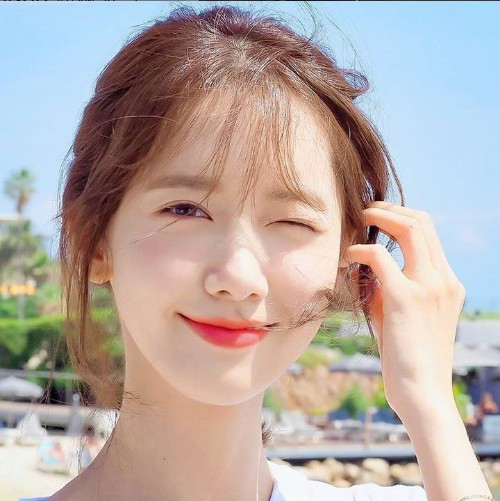

In [28]:
img = Image.open('./gpu01_dataset/data/girl/girl.jpg')
img

In [32]:
img = img.resize((224, 224))
x = np.transpose(img, (2, 0, 1))
x = x[np.newaxis, :]

### -1~1 사이의 값으로 조정
# https://visionhong.tistory.com/25
x = (x/128) - 1
x = torch.FloatTensor(x)
x, x.shape

(tensor([[[[ 0.2422,  0.1172,  0.0391,  ..., -0.0234, -0.0234, -0.0312],
           [ 0.5156,  0.5156,  0.5156,  ...,  0.3672,  0.3359,  0.3281],
           [ 0.4062,  0.4062,  0.3984,  ...,  0.3125,  0.3281,  0.3281],
           ...,
           [ 0.8594,  0.8438,  0.8438,  ...,  0.3984,  0.3828,  0.3516],
           [ 0.8672,  0.8516,  0.8594,  ...,  0.4062,  0.3984,  0.3516],
           [ 0.8672,  0.8516,  0.8594,  ...,  0.5547,  0.3672,  0.3516]],
 
          [[ 0.3906,  0.2734,  0.1953,  ...,  0.1562,  0.1562,  0.1562],
           [ 0.7344,  0.7422,  0.7422,  ...,  0.7500,  0.7578,  0.7578],
           [ 0.7109,  0.7109,  0.7109,  ...,  0.7109,  0.7031,  0.7031],
           ...,
           [ 0.8203,  0.8047,  0.7969,  ...,  0.3828,  0.4297,  0.4219],
           [ 0.8125,  0.7969,  0.8047,  ...,  0.3672,  0.4219,  0.3906],
           [ 0.8125,  0.7969,  0.8047,  ...,  0.5234,  0.3984,  0.3906]],
 
          [[ 0.5703,  0.4453,  0.3672,  ...,  0.2969,  0.2891,  0.2891],
           [ 

In [39]:
output = model(x)
imagenet_labels[int(torch.argmax(output))]

'maid, maiden\n'

Inference Result:
maid, maiden



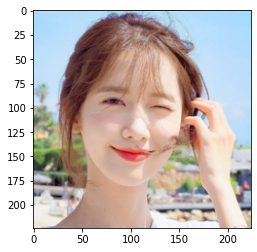

In [40]:
output = model(x)
print("Inference Result:")
print(imagenet_labels[int(torch.argmax(output))])
plt.imshow(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  import sys


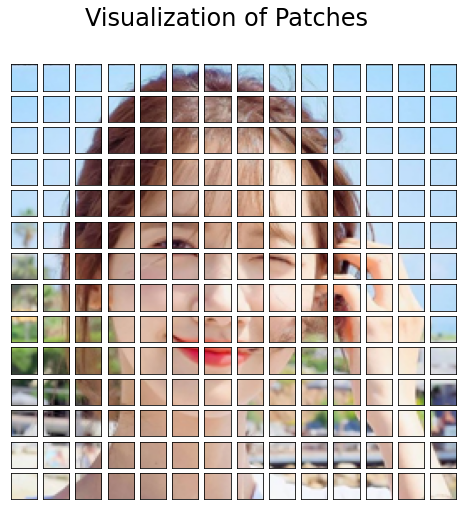

In [45]:
# This is NOT a part of the pipeline.
# Actually the image is divided into patch embeddings by Conv2d 
# with stride=(16, 16) shown above.

fig = plt.figure(figsize=(8, 8))
fig.suptitle("Visualization of Patches", fontsize=24)
fig.add_axes()
img = np.asarray(img)
for i in range(0, 196):
    x = i % 14
    y = i // 14
    patch = img[y*16:(y+1)*16, x*16:(x+1)*16]
    ax = fig.add_subplot(14, 14, i+1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(patch)

In [43]:
logits = model(x)
probs = torch.nn.functional.softmax(logits, dim=1)

k = 10

top_probs, top_idxs = probs[0].topk(k)
print("Inference Result:")
for i, (idx_, prob_) in enumerate(zip(top_idxs, top_probs)):
    idx = idx_.item()
    prob = prob_.item()
    print(idx, prob)
    cls = imagenet_labels[idx].strip()
    print(f"{i}: {cls:<45} --- {prob:.4f}")

Inference Result:
16060 0.08006200194358826
0: maid, maiden                                  --- 0.0801
14516 0.06659885495901108
1: gook, slant-eye                               --- 0.0666
8161 0.06568706780672073
2: leisure_wear                                  --- 0.0657
16291 0.06543940305709839
3: nymph, houri                                  --- 0.0654
16292 0.043723274022340775
4: nymphet                                       --- 0.0437
4789 0.03576800972223282
5: bikini, two-piece                             --- 0.0358
14690 0.027879327535629272
6: Sabahan                                       --- 0.0279
14680 0.02743961289525032
7: Korean                                        --- 0.0274
16734 0.020617062225937843
8: scofflaw                                      --- 0.0206
17003 0.018802929669618607
9: sylph                                         --- 0.0188


In [6]:
# Define transforms for test
IMG_SIZE = (224, 224)
NORMALIZE_MEAN = (0.5, 0.5, 0.5)
NORMALIZE_STD = (0.5, 0.5, 0.5)

data_transforms = transforms.Compose([transforms.Resize(IMG_SIZE),
                                      transforms.ToTensor(),
                                      transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
                                      ])

datadir = './gpu01_dataset/data/'

data = datasets.ImageFolder(datadir,
                            transform=data_transforms)

data_loader = torch.utils.data.DataLoader(dataset=data,
                                           shuffle=False,
                                           batch_size=1)

for num, (img, label) in enumerate(data_loader):
    print(img, label)

tensor([[[[-0.5843, -0.5765, -0.5765,  ..., -0.7098, -0.7098, -0.7176],
          [-0.5608, -0.5686, -0.5608,  ..., -0.8667, -0.8667, -0.8588],
          [-0.5294, -0.5294, -0.5137,  ..., -0.8510, -0.8510, -0.8588],
          ...,
          [-0.6549, -0.6549, -0.6549,  ..., -0.6941, -0.7020, -0.7098],
          [-0.6549, -0.6549, -0.6627,  ..., -0.6941, -0.7020, -0.7020],
          [-0.6627, -0.6627, -0.6627,  ..., -0.6941, -0.6941, -0.7020]],

         [[-0.5686, -0.5608, -0.5529,  ..., -0.6627, -0.6627, -0.6706],
          [-0.5529, -0.5608, -0.5529,  ..., -0.8275, -0.8275, -0.8196],
          [-0.5059, -0.5059, -0.4980,  ..., -0.8118, -0.8118, -0.8196],
          ...,
          [-0.6235, -0.6235, -0.6235,  ..., -0.6471, -0.6549, -0.6627],
          [-0.6235, -0.6235, -0.6314,  ..., -0.6471, -0.6549, -0.6549],
          [-0.6235, -0.6314, -0.6314,  ..., -0.6471, -0.6471, -0.6549]],

         [[-0.6235, -0.6157, -0.6157,  ..., -0.7098, -0.7098, -0.7255],
          [-0.6157, -0.6235, -

In [7]:
data_loader.dataset.class_to_idx

{'cat': 0, 'girl': 1}

In [8]:
classes = data_loader.dataset.classes
classes

['cat', 'girl']

In [9]:
def custom_imshow(img):
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train image: 


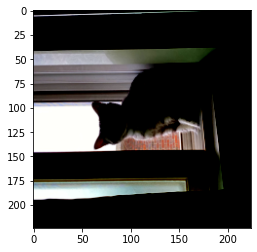


train label cat


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train image: 


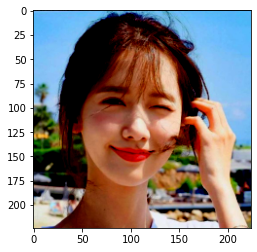


train label girl


In [10]:
def process():
    for batch_idx, (inputs, labels) in enumerate(data_loader):
        print('train image: ')
        custom_imshow(inputs[0])
        print()
        print('train label', classes[labels[0]])
        print('=====================')
        
process()

In [13]:
!pwd

/data/FoodDetection/Object_Detection/yolov5-test/yolov5


In [14]:
for batch_idx, (imgs, labels) in enumerate(data_loader):
    print(imgs.shape)

torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])


In [15]:
for batch_idx, (imgs, labels) in enumerate(data_loader):
    patches = model.patch_embed(imgs)  # patch embedding convolution
    print("Image tensor: ", imgs.shape)
    print("Patch embeddings: ", imgs.shape)

Image tensor:  torch.Size([1, 3, 224, 224])
Patch embeddings:  torch.Size([1, 3, 224, 224])
Image tensor:  torch.Size([1, 3, 224, 224])
Patch embeddings:  torch.Size([1, 3, 224, 224])


In [22]:
for batch_idx, (imgs, labels) in enumerate(data_loader):
    print(imgs.shape)

torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])


In [55]:
for batch_idx, (img, label) in enumerate(data_loader):
    logits = model(img)
    probs = torch.nn.functional.softmax(logits, dim=1)

    k = 10

    top_probs, top_idxs = probs[0].topk(k)
    
    print(f'Real label: {classes[int(label)]}')
    print("Inference Result:")
    print()
    
    for i, (idx_, prob_) in enumerate(zip(top_idxs, top_probs)):
        idx = idx_.item()
        prob = prob_.item()
        print(idx, prob)
        cls = imagenet_labels[idx].strip()
        print(f"{i}: {cls:<45} --- {prob:.4f}")
        
    print('===============')

Real label: cat
Inference Result:

11879 0.4626550078392029
0: windowsill                                    --- 0.4627
2405 0.21203778684139252
1: Egyptian_cat                                  --- 0.2120
11870 0.03672916442155838
2: window                                        --- 0.0367
2396 0.019984474405646324
3: kitten, kitty                                 --- 0.0200
11877 0.019697068259119987
4: window_seat                                   --- 0.0197
2389 0.017567915841937065
5: kitty, kitty-cat, puss, pussy, pussycat       --- 0.0176
5421 0.016782192513346672
6: casing, case                                  --- 0.0168
2388 0.014759114943444729
7: domestic_cat, house_cat, Felis_domesticus, Felis_catus --- 0.0148
6447 0.014587596990168095
8: drapery                                       --- 0.0146
2387 0.013581992127001286
9: cat, true_cat                                 --- 0.0136
Real label: girl
Inference Result:

14516 0.06218273565173149
0: gook, slant-eye                 

# 2. 도시락 데이터로 Fine tunning

### 파이토치 멀티 gpu 해결....

https://sanghyu.tistory.com/33

https://artiiicy.tistory.com/61

#### os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
#### os.environ["CUDA_VISIBLE_DEVICES"]='0, 1'

으로 먼저 사용할 특정 GPU를 지정해주고,

#### vit = torch.nn.DataParallel(vit)
#### vit.cuda()

Classifier를 바꾼 모델을 넣어준다. ".to(device)"처럼 ".cuda()"를 해줘라!

train_model 함수에서도 inputs = inputs.cuda(), labels = labels.cuda() 해줘라!

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt
import numpy as np
import os
import time
import copy

from tqdm import tqdm

import timm 

In [2]:
torch.__version__

'1.7.1+cu101'

In [3]:
# 구지 train_transforms, val_transforms을 따로 둬야하나? -> 해줘야한다!!

def SubsetRandomSampler_train_val1(datadir, valid_size = .1):
    
    # 모델 입력 사이즈는 모델 이름에 이미 정해져있다.
    IMG_SIZE = (224, 224)
    # vit는 -1~1로 정규화를 해준 input을 받는다.
    NORMALIZE_MEAN = (0.5, 0.5, 0.5)
    NORMALIZE_STD = (0.5, 0.5, 0.5)
     
     
    # 도시락은 이미지가 비슷비슷해서 Augmentation 안하는게 더 성능이 높이진다!
    train_transforms = transforms.Compose([transforms.Resize(IMG_SIZE),
                                           transforms.ToTensor(),
                                           transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
                                           transforms.RandomHorizontalFlip(p=0.2),
                                           transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)])
    
    val_transforms = transforms.Compose([transforms.Resize(IMG_SIZE),
                                         transforms.ToTensor(),
                                         transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)])
    
    train_data = datasets.ImageFolder(datadir,       
                    transform=train_transforms)
    
    val_data = datasets.ImageFolder(datadir,
                    transform=val_transforms)
    
    num_train = len(train_data)
#     print('num_train:', num_train)
    indices = list(range(num_train))
#     print('indices: ', indices)
    split = int(np.floor(valid_size * num_train)) # np.floor는 반올림하는 함수다.
#     print('split: ', split)
    np.random.shuffle(indices)
#     print('shuffle_indices: ', indices)
    
    train_idx, val_idx = indices[split:], indices[:split]
    print('train_num: ', len(train_idx), ', val_num: ', len(val_idx))
    
    from torch.utils.data.sampler import SubsetRandomSampler
    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)
    
    train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                               shuffle=False,
                                               sampler=train_sampler,
                                               batch_size=32, num_workers=8)

    val_loader = torch.utils.data.DataLoader(dataset=val_data,
                                             sampler=val_sampler,
                                             shuffle=False,
                                             batch_size=32, num_workers=8)
    
    print('len(train_loader): ', len(train_loader), ', len(val_loader): ', len(val_loader))
    
    return len(train_idx), len(val_idx), train_loader, val_loader


In [4]:
data_dir = '/data/Data_data/FoodDetection/data/food_detection/LunchBox/data'
train_num, val_num, train_loader, val_loader = SubsetRandomSampler_train_val1(data_dir, .1)

train_num:  15934 , val_num:  1770
len(train_loader):  498 , len(val_loader):  56


In [3]:
vit = timm.create_model('vit_large_r50_s32_224_in21k', pretrained=True)

In [4]:
vit

VisionTransformer(
  (patch_embed): HybridEmbed(
    (backbone): ResNetV2(
      (stem): Sequential(
        (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
        (norm): GroupNormAct(
          32, 64, eps=1e-05, affine=True
          (act): ReLU(inplace=True)
        )
        (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
      )
      (stages): Sequential(
        (0): ResNetStage(
          (blocks): Sequential(
            (0): Bottleneck(
              (downsample): DownsampleConv(
                (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (norm): GroupNormAct(
                  32, 256, eps=1e-05, affine=True
                  (act): Identity()
                )
              )
              (conv1): StdConv2dSame(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (norm1): GroupNormAct(
                32, 64, eps=1e-05, 

In [5]:
vit.head

Linear(in_features=1024, out_features=21843, bias=True)

In [6]:
vit.head = torch.nn.Linear(in_features=1024, out_features=103, bias=True) 

In [7]:
vit.head

Linear(in_features=1024, out_features=103, bias=True)

In [8]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]='0, 1'

vit = torch.nn.DataParallel(vit)
vit.cuda()

DataParallel(
  (module): VisionTransformer(
    (patch_embed): HybridEmbed(
      (backbone): ResNetV2(
        (stem): Sequential(
          (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
          (norm): GroupNormAct(
            32, 64, eps=1e-05, affine=True
            (act): ReLU(inplace=True)
          )
          (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
        )
        (stages): Sequential(
          (0): ResNetStage(
            (blocks): Sequential(
              (0): Bottleneck(
                (downsample): DownsampleConv(
                  (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (norm): GroupNormAct(
                    32, 256, eps=1e-05, affine=True
                    (act): Identity()
                  )
                )
                (conv1): StdConv2dSame(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('Device:', device)
print('Current cuda device:', torch.cuda.current_device())
print('Count of using GPUs:', torch.cuda.device_count())

Device: cuda
Current cuda device: 0
Count of using GPUs: 2


In [11]:
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(vit.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [12]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time() #시작 시간을 기록(총 소요 시간 계산을 위해)

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1)) #epoch를 카운트
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:  #train mode와 validation mode 순으로 진행
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]): #dataloader로부터 dataset과 그에 해당되는 label을 불러옴
                inputs = inputs.cuda() #GPU로 입력데이터를 올림
                labels = labels.cuda() #GPU로 label을 올림

                # zero the parameter gradients
                optimizer.zero_grad() #Gradient를 0으로 초기화

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1) #마지막 layer에서 가장 값이 큰 1개의 class를 예측 값으로 지정
                    loss = criterion(outputs, labels) 

                    # backward + optimize only if in training phase
                    if phase == 'train': # training 모드에서는 weight를 update한다.
                        loss.backward() #backward
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
                # labels과 preds 출력
                if phase == 'val' :
                    print("labels.data ==", labels.data)
                    print("preds==", preds)
                
            if phase == 'train':
                scheduler.step()
                
            # 모델 저장
            
            if epoch != 0 and (epoch % 10)==0 and phase=='val':
                print(f'({epoch} 학습 중, Saving model ...')
                path = f'./gpu01_dataset/classification_model/vit_large_r50_s32_224_in21k_{epoch}_checkpoint.pt'
                torch.save(model.state_dict(), path)
                
           
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    
    # load best model weights
    model.load_state_dict(best_model_wts)
    model.cuda()
    return model

In [13]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [14]:
dataloaders = {'train':train_loader, 'val':val_loader}
dataset_sizes = {'train':train_num, 'val':val_num}

vit = train_model(vit, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=200)

  0%|          | 0/498 [00:00<?, ?it/s]

Epoch 0/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 4.6921 Acc: 0.0232


  2%|▏         | 1/56 [00:09<08:58,  9.78s/it]

labels.data == tensor([ 82,  96,  61,  23,  61,  82,  93,  97,  29,  92,  50,  87,  23, 100,
         61,  98,  67,  55,   8,  98,   0,  67,  21,  45,  52,  90,  91,  94,
         88,  68,  32,  37], device='cuda:0')
preds== tensor([ 44,  98,  56,  98,  82,  44,  56,  98,  51,  87,  56,  72,  56, 102,
         51, 102,  82,  56,  82, 102,  82,  51,  51,  51,  56,  67,  56, 102,
        102,  56,  56,  51], device='cuda:0')


  4%|▎         | 2/56 [00:10<06:14,  6.93s/it]

labels.data == tensor([71,  5,  6, 16, 88, 47, 91, 50, 68, 47, 30, 71, 46, 91, 87, 12, 40, 86,
         9, 59, 29, 18, 59, 38, 72, 91, 61, 12, 70, 77, 89,  9],
       device='cuda:0')
preds== tensor([102,  51,  56,  51, 102,  51,  98,  56,  56,  51,  51,  56,  51, 102,
         94,  56,  82,  82,  51,  63,  82,  67,  87,  19,  56,  98,  56,  51,
         51,  56,  98,  51], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:21,  4.93s/it]

labels.data == tensor([ 73,  37,  80,  93,  59,  31,  68,  32,  88,  91,  44,  67,  80,  58,
         73,  33,  93,  98, 101,  27,  11,  34,  33,  23,  56,  82,  72,  18,
         28,  13,  47,  20], device='cuda:0')
preds== tensor([ 51,  44,  56,  67,  87,  51,  56,  51,  56, 102,  82,  51,  56,  51,
         56,  44,  98,  51, 102, 102,  51,  51,  51,  44, 102,  82,  98,  51,
         56,  98,  56,   0], device='cuda:0')


  7%|▋         | 4/56 [00:10<03:03,  3.53s/it]

labels.data == tensor([ 19,  58,  99,  87,  72,  32,  35,   1,  31,   2,  73,  45,  41,  10,
         74,  22,   2,  51,   2,  46,  57, 100,  64,  99,  15,  70,  38, 100,
         17,  74,  35,  34], device='cuda:0')
preds== tensor([ 44,  51,  98, 102,  51,  82,  51,  72,  51, 102,  56,  51,  51,  82,
         51,  51, 102,  51,  94,  51,  51,  67,  56,  98,  51,  44,  51,  72,
         56,  56,  51,  51], device='cuda:0')


  9%|▉         | 5/56 [00:10<02:10,  2.55s/it]

labels.data == tensor([ 11,  98,  14,  38,  95,   8,  48,  78,  19,  20,  38,  92,   1,  94,
         36,   1,  23, 102,  72, 102,  23,  60,  32,  87,   4,  59,  83,  16,
         35,  19,   8,  61], device='cuda:0')
preds== tensor([ 51,  51,  44,  51,  51, 102,  51,  56,  72,  82,  44,  59,  56,   2,
         51,  56,  51, 102,  44,  90,  56,  72,  51,  94,  82, 102, 102,  44,
         56,  56,  56,  56], device='cuda:0')


 11%|█         | 6/56 [00:11<01:33,  1.87s/it]

labels.data == tensor([25, 65, 19, 60, 55, 35, 38, 59,  3, 72, 30, 63, 94, 32, 63, 63, 23, 46,
        79, 87, 54, 16, 23, 56, 18, 15, 12, 47, 82, 51, 73, 84],
       device='cuda:0')
preds== tensor([ 51,  51,  72,  51,  56,  51,  44,  63,  44,  56,  44,  63, 102,  82,
         63,  56,  98,  51,  82,  94,  51,  56,  56,  56,  51,  51,  56,  56,
         56,  51,  56,  82], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:09,  1.42s/it]

labels.data == tensor([49, 71, 97, 10, 88, 60, 68, 79, 61, 57, 78, 24, 65, 44, 23, 32, 57,  9,
        59, 87, 70, 95, 91, 96, 66, 87, 64, 10,  5, 25, 64, 95],
       device='cuda:0')
preds== tensor([ 59,  56,  98,  44,  82,  51,  56,  51,  56,  51,  51,  51,  51,  51,
         82,  44,  51,  51,  87,  87,  51,  56, 102, 102,  51,  51,  56,  56,
         82,  56,  56, 102], device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:51,  1.08s/it]

labels.data == tensor([23, 98, 20,  3, 40, 20, 55, 85, 24, 61, 68, 72, 70, 82, 52, 55, 17, 39,
        56, 70, 57, 69, 60, 98, 73, 79,  6, 10, 14, 86, 95, 66],
       device='cuda:0')
preds== tensor([ 51, 102,  44,  44,  51,  82,  51,  51,  51,  51,  51,  56,  51,  56,
         51,  56,  63,  44,  56,  51,  44,  98,  51,  56,  87,  51,  56,  82,
         56,  51,  29,  51], device='cuda:0')


 16%|█▌        | 9/56 [00:17<01:59,  2.54s/it]

labels.data == tensor([56,  3, 65, 39, 49, 27,  0, 73, 52, 97,  9, 52, 20, 34,  9, 17, 16, 52,
        19, 32, 45, 26, 89, 62, 58,  0, 85, 97, 43, 16, 57,  8],
       device='cuda:0')
preds== tensor([ 98, 102,  51,  51,  63,  98,  51, 102,  56,  98,  51,  82,  56,  51,
         51, 102,  51,  51,  44,  44,  51,  51,  51, 102,  51,  82,  51,  72,
         51,  44,  44,  44], device='cuda:0')


 18%|█▊        | 10/56 [00:17<01:25,  1.86s/it]

labels.data == tensor([ 42,  66,   8,   3,  72,  82,  79,  41,  15,  98,  80,  10,  69,  67,
         56,   3,  22,  35,  34,  71,  79,  62,  95,  12,  70, 100, 100,  10,
         42,  26,   0,  70], device='cuda:0')
preds== tensor([ 51,  51,  56,  44,  82,  56,  51,  82,  51,  67,  56,  56,  67,  51,
         56,  56,  56,  51,  51,  64,  56,  51,  72,  98,  51, 102,  98,  72,
         51,  82,  82,  56], device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:02,  1.38s/it]

labels.data == tensor([78, 13, 55, 12, 82, 41, 65, 20,  0,  5, 17, 70, 88, 97, 72, 55, 74,  3,
        44, 66, 47, 43, 52, 66, 66, 52, 18, 11, 37, 83,  8, 48],
       device='cuda:0')
preds== tensor([ 82,  56,  98,  72,  51,  51,  51,  44,  82,  82,   2,  51, 102,  56,
         56,  56,  56,  44,  44,  51,  51,  51,  56,  51,  51,  51,  51,  67,
         51,  56,  72,  51], device='cuda:0')


 21%|██▏       | 12/56 [00:18<00:46,  1.05s/it]

labels.data == tensor([78,  0,  0, 54,  1, 67, 44, 56, 57, 92, 19, 16, 51, 82, 45, 64, 39, 29,
        51,  3, 51, 74,  3, 72, 14, 23, 23, 65, 45,  4,  8, 34],
       device='cuda:0')
preds== tensor([82, 56, 44, 82, 82, 82, 51, 56, 44, 87, 44, 44, 56, 51, 44, 63, 51, 51,
        51, 44, 56, 51, 44, 82, 51, 51, 51, 82, 51, 44, 56, 51],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:38,  1.11it/s]

labels.data == tensor([ 45,  15,  72,  14,  88,  21,  22,  44,  35,  62,  48, 102,  23,  71,
         57,  58,  72,  58,  49,  14,  82,  36,  37,  64,  98,  97,  36,  30,
         16,  29,  47,  70], device='cuda:0')
preds== tensor([ 51,  51,  67,  51, 102,  56,  51,  44,  51,  72,  51,  72,  51,  63,
         44,  51,  82,  44,  87,  56,  82,  51,  51,  56,  55, 102,  51,  82,
         82,  44,  51,  51], device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:29,  1.40it/s]

labels.data == tensor([ 0, 99, 31, 18, 21, 73, 67, 67, 51, 67,  9, 83, 87, 51, 27, 61, 29, 95,
        90, 46, 33, 58, 56, 65, 50, 89, 17, 92, 51, 45, 80, 29],
       device='cuda:0')
preds== tensor([ 44,  72,  51,  51,  51, 102,  51,  51,  56,  82,  51,  56,  90,  51,
         98, 102,  51, 102,  90,   3,  51,  44,  56,  56,  56, 102,  56,  64,
         51,  51,  56,  51], device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:23,  1.73it/s]

labels.data == tensor([ 79,  90,  22,  67,  92,  31,  43,  49,  49,   0,  15,  31,  62,  47,
         80,  27,  96,  20, 102,  71,  84,  73,  90,  57,  65, 100,  56,  25,
          5,  15,  16,  19], device='cuda:0')
preds== tensor([ 51, 102,  56,  51,  87,  51,  51,   3,  63,  56,  51,  51,  82,  51,
         44,  98, 102,  51,  72,  56,  56,  51,  98,  51,  56,  98,  56,  51,
         51,  51,  44,  44], device='cuda:0')


 29%|██▊       | 16/56 [00:19<00:19,  2.05it/s]

labels.data == tensor([92,  9,  8, 54, 93, 82, 57, 83, 16, 66, 67, 97, 60,  4, 77, 90, 23, 97,
        52, 29, 72, 58,  5, 99, 19, 42, 57, 22, 58, 90, 68, 61],
       device='cuda:0')
preds== tensor([ 56,  56,  56,  82, 102,  44,  51,  56,  56,  51,  51,  98,  51,  44,
         82,  98,  56,  67,  82,  51,  51,  51,  56,  56,  44,  44,  44,  56,
         44,  98,  98,   2], device='cuda:0')


 30%|███       | 17/56 [00:26<01:34,  2.41s/it]

labels.data == tensor([ 86,   7,  57,  44,  83,  37,  81,  49,  64,  68,  69,  41,  56,  30,
         58,  59,  42, 100,  98,  62,  22,  40,  78,  60,  63,  92,  95,  40,
         82,  87,  32,  30], device='cuda:0')
preds== tensor([ 51,  19,  44,  44,  56,  51,  82,   3,  51,  56,  56,  44,  56,  44,
         51,  63,  51,  72,  98,  56,  51,  51, 102, 102,  56, 102,  98,  51,
         56,  59,  44,  51], device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:07,  1.77s/it]

labels.data == tensor([ 34,  19,  35,  80,  94,  52,  23,  58,  70,  22,  61, 101,   7,  68,
         61,   7,  69,  68,  30,  26,  60,  35,  74,   0,  36,  41,  63,  40,
         42,  99,  84,  11], device='cuda:0')
preds== tensor([ 51,  56,  51,  51,   2,  51,  56,  51,  51,  56, 102,  67,  44,  98,
         82,  44,  51, 102,  44,  72,  51,  56,  56,  44,  51,  51,  44,  51,
         51,  56,  82,  51], device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:48,  1.32s/it]

labels.data == tensor([ 58, 101,   7,   3,  72,  55,   5,  93,  70,  10,  89,  23,  89,  16,
         31,  33,  58,  23,  88,  54,  70,  18,  61,  43,  71,  52,  19,  19,
         23,   6,  37,  58], device='cuda:0')
preds== tensor([ 44, 102,  82,  72,  56,  56,  82, 102,  51,  82,  98,  51,  98,  98,
         51,  51,  44,  82,  98,  82,  56,  72,  94,  51,  63,  51,  44,  56,
         82,  44,  51,  44], device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:36,  1.00s/it]

labels.data == tensor([90, 90, 64, 50, 82, 41, 64, 33, 80, 15, 20, 96, 61, 21, 54, 24,  0, 23,
        83, 67, 25, 56, 14, 27, 41, 34, 92, 62, 70, 43, 58, 19],
       device='cuda:0')
preds== tensor([102, 102, 102,  56,  56,  82,  51,  44,  51,  51,  56, 102,  51,  51,
         44,  51,  51,  56, 102,  51,  51,  56,  56,  56,  82,  51,  56,  51,
         51,  51,  51,  56], device='cuda:0')


 38%|███▊      | 21/56 [00:27<00:27,  1.28it/s]

labels.data == tensor([ 97,  15,  28,  72,  19,  30,  53,  45,   0,  52, 101,   0,  29,  78,
         64, 101,  61,  79,  16,  44,  38,   7,  18,  16,  80,  94,  11,  27,
         44,  72,  93,  72], device='cuda:0')
preds== tensor([ 98,  51,  93,  44, 102,  44,  51,  51,   3,  51,  98,  82,  51,  82,
         56, 102,  94,  51,  82,  44,  44,  44,  55,  56,  82,  94,  51,  98,
         51,  82,  51,  51], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:21,  1.56it/s]

labels.data == tensor([44, 73, 67, 63, 57, 79, 57, 40, 48, 51, 74, 98, 89, 63, 90, 20, 69, 45,
        96, 57, 73, 98,  7, 29, 47, 43, 22, 26, 59,  3, 57, 43],
       device='cuda:0')
preds== tensor([ 44,  56,  82,  63,  44,  82,  51,  51,  51,  82,  72,  72, 102,  56,
         98,  51, 102,  51, 102,  44,  82, 102,  44,  51,  56,  51,  51,  51,
         63,  82,  51,  51], device='cuda:0')


 41%|████      | 23/56 [00:28<00:17,  1.89it/s]

labels.data == tensor([ 74,  26,  56,  66,  82,   5,  16,  82,  36,  63,  23,  36,  98,  93,
         20,  27,  55,  61,  40,  32,  43,  53,  44,  80,  32, 100,  35,  33,
         99,  58,  28,  15], device='cuda:0')
preds== tensor([ 82,  67,  51,  51,  51,  51,  51,  56,  82,  63,  72,  44,  98,  67,
         51,  98, 102,  51,  44,  82,  51,  51,  51,  44,  82, 102,  51,  44,
         72,  51,  56,  51], device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:14,  2.23it/s]

labels.data == tensor([  7,  60,  79,  80,   6,  68,   5,   9,  89,  54,  39,  15,  46,  15,
         53,  70,  74,  74,  57,  63,  78, 101,  18,  48,  81, 100,  40,   2,
         50,  77,  27,  74], device='cuda:0')
preds== tensor([ 72,  72,  51,  51,  44,  56,  56,  51,  56,  51,  51,  51,  56,  51,
         51,  44,  51,  72,  51,  56,  82,  98,  51,  51,  44, 100,  51, 102,
         98,  82,  56,  82], device='cuda:0')


 45%|████▍     | 25/56 [00:34<01:06,  2.13s/it]

labels.data == tensor([  1,  10,   0,  61,  38,   5,  67,  77,  75,   0, 101,  77,  75,  81,
         84,   8,  87,  61,  93,  54,  27,  10, 100,  97,  84,  43,  63,  60,
         52,  51,  13,  18], device='cuda:0')
preds== tensor([ 82,  44,  56,  51,  51,  56,  51,  56,  82,  56,  98,  51,  82,  44,
         82,  44,  87,  56,  98,  56,  98,  56, 102,  56,  56,  51,  56,  51,
         56,  51,  82,  51], device='cuda:0')


 46%|████▋     | 26/56 [00:35<00:47,  1.57s/it]

labels.data == tensor([ 84,  15,  40,  85,  70,   6,  32,  61,  97, 102,  55,  25,  16,   0,
         68,   2,  38,  16,  70,  89,  24,  70,  35,  45,   3,  19,   1,  29,
         25,  54,  45,  74], device='cuda:0')
preds== tensor([ 82,  51,  82,  51,  82,  56,  44,  63,  72, 102,  72,  51,  44,  44,
         56,  94,  51,  44,  44,  51,  51,  51,  51,  51,  44,  51,  51,  51,
         51,  51,  51,  98], device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:43,  1.51s/it]

labels.data == tensor([ 80,  68,   8,   9,  45,  79,  30,  82,  86,   0,  26, 101,  91,  90,
         24,  98,   6,  29,  73,  34,  52,  67,  56,  22,  23,  71,  42,  85,
          6,  97,  32,  91], device='cuda:0')
preds== tensor([ 51,  98,  56,  51,  51,  51,  51,  44,  82,  82,  51,  98,  56, 102,
         51,  56, 102,  51,  82,  51,  51,  51,  56,  56,  51,  56,  51,  51,
         56,  72,  51,  72], device='cuda:0')


 50%|█████     | 28/56 [00:36<00:31,  1.14s/it]

labels.data == tensor([22, 23,  0, 85, 66, 79, 37, 58, 45, 22, 72, 69, 22, 58, 12, 98, 14,  0,
        70, 37, 84, 48, 47, 44, 81, 21, 73, 54, 64, 29, 52,  6],
       device='cuda:0')
preds== tensor([ 51,  56,  72,  51,  51,  51,  44,  44,  51, 102,  56,  51,  51,  44,
         72,  98,  51,  51,  51,  44,  51,  29,  51,  82,  51,  51,  56,  82,
         82,  51,  51,  82], device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:23,  1.14it/s]

labels.data == tensor([ 30,  98,  51,  69,  68,  11, 101,  36,  72,  64,  61,  76,  77,  21,
         52,  39,   3,  30,   9,  57,  70,  16,  56,  31,  11,  73,  27,   5,
          1,  26,  15,  40], device='cuda:0')
preds== tensor([ 51,  56,  44,  94,  56,  51, 102,  51,  44,  82,  82,  44,  51,  72,
         82,  51,  82,  44,  51,  44,  82,  82, 102,  51,  51,  82,  98,  72,
         82,  44,  51,  44], device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:17,  1.44it/s]

labels.data == tensor([30, 42, 58, 15, 96, 97, 38, 62,  7, 43, 47, 61, 11, 21, 65, 52, 17, 91,
        17, 12, 34, 29, 59, 54, 57, 96, 71, 11, 43, 68, 51, 25],
       device='cuda:0')
preds== tensor([ 51,  44,  56,  51, 102,  98,  51,  72,  44,  56,  51, 102,  51,  51,
         51,  82, 102,  98,  56,  98,  51,  82,  64,  51,  44, 102, 102,  72,
         51,  51,  51,  51], device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:14,  1.77it/s]

labels.data == tensor([  6,  21,  68,  35,  34,   8,   8,  31,  28,  72,  94,  43,  13,  82,
         52,  55,  19,   1,  72,   4,   3,   8,  10,  63,  66,  29,  59,   0,
         29,  19, 101,  80], device='cuda:0')
preds== tensor([ 72,  51,  82,  51,  51,  82,  44,  51,  56,  72, 102,  51,  51,  98,
         51,  44,  72,  51,  56,  44,  44,  44,  56,  63,  51,  51, 102,  56,
         82,  82,  72,  51], device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:11,  2.12it/s]

labels.data == tensor([ 50,  16,  79,  16,  55,  47,  88, 101,  88,  87, 101,  29,  21,  95,
         87,  38, 102,  46,   0,  82,   2,  89,  42,  91,  15,  46,  21,  31,
          1,  88,  82,  46], device='cuda:0')
preds== tensor([ 56,  44,  51,  56,  44,  67, 102,  98, 102,  93, 102,  56,  56,  67,
         56,  44, 102,  51,  56,  44, 102,  72,  51,  44,  56,  56,  51,  51,
         51, 102,  56,  51], device='cuda:0')


 59%|█████▉    | 33/56 [00:43<00:46,  2.04s/it]

labels.data == tensor([ 25,  20,  62,   8,  20,  95,  29,  81,  31,  65,  74,  78, 100,  20,
         70,  22,  49,   4,  51,  24,  30,  55,  10,  36,   7,  30,  34,  40,
         52,  97,  62,  23], device='cuda:0')
preds== tensor([ 51,  56,  72,  44,  51,  56,  51,  56,  44,  56,  56,  56, 102,  51,
         44,  51,  63,  56,  51,  51,  51,  72,  56,  51,  44,  51,  51,  44,
         51,  51, 102,  56], device='cuda:0')


 61%|██████    | 34/56 [00:43<00:33,  1.51s/it]

labels.data == tensor([ 47,  20,  30, 102,  84,  22,  86,  67, 100,  24,  90,  71,   1,  44,
         18,  31,  23,  40,  72,  61,  96, 102,  22,  70,  96,  89,   8,  24,
         33,  57,  22,  25], device='cuda:0')
preds== tensor([ 82,  51,  44, 102,  51,  72,  72,  51,  98,  51,  98, 102,  98,  82,
         72,  67,  51,  44,  44,  51, 102, 102,  56,  51, 102,  98,  44,  51,
         51,  51,  51,  51], device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:33,  1.60s/it]

labels.data == tensor([89, 80, 58, 25, 46, 67, 93, 54, 62,  0, 55, 76, 30,  6, 42,  5, 30, 63,
        98, 19,  8, 61, 92, 13,  6, 64, 25, 94,  5, 40, 35, 17],
       device='cuda:0')
preds== tensor([102,  51,  51,  51,  56,  51,  55,  51,  51,  44,  56,  51,  44,  44,
         51,  56,  51,  63,  55,  56,  44,  56,  56,  98,  56,  63,  51,   2,
         56,  44,  44,  63], device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:24,  1.20s/it]

labels.data == tensor([ 56,  55,  79, 101,  80,  69,   8,  67,  94,  88,  54,  24,  54,  42,
          0,  50,  20,  49,  94,  33,  10,   1,  14,  31,  95,  30,  67,  97,
         52,  35,  34,  83], device='cuda:0')
preds== tensor([ 56,  56,  51,  72,  56,  94,  44,  82, 102, 102,  51,  67,  51,  51,
         51,  72,  56,  63,   2,  51,  56,  56,  51,  51,  72,  44,  51,  98,
         82,  44,  51,  56], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:17,  1.09it/s]

labels.data == tensor([91,  0, 25, 23, 16, 16, 27, 22, 50, 67, 86, 23, 43, 87, 68, 26, 34, 43,
        63, 92,  8, 69, 34,  0, 67, 67, 76, 93, 23, 64, 79, 24],
       device='cuda:0')
preds== tensor([102,  51,  51,  56,  44,  44, 102,  82,  56,  51,  82,  56,  51,  94,
         51,  44,  51,  51,  63,  87,  44,  82,  51,  56,  56,  82,  51,  98,
         56,  56,  51,  51], device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:13,  1.38it/s]

labels.data == tensor([46, 24, 98, 93, 34, 80, 82, 51, 71,  8, 23, 48, 52, 89,  7,  6,  0, 46,
        69, 51, 42, 97, 87, 68, 84,  6, 34, 79, 28, 88, 90, 55],
       device='cuda:0')
preds== tensor([ 56,  51, 102,  56,  51,  51,  51,  56, 102,  56,  56,  51,  51, 102,
         98,  56,   3,  51,  56,  51,  51,  51, 102,  56,  82,  56,  44,  51,
         56,  44,  72,  56], device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:09,  1.71it/s]

labels.data == tensor([ 62,  24,  30,  28, 101,   1,  95,  15,  24,  74,  99,  89,  22,   5,
         61,  45,   6,  72,  54,  59,  62,  44,  33,  29,  26,  50,  19,  45,
         24,  69,  69,  66], device='cuda:0')
preds== tensor([ 44,  51,  51,  56, 102,  51, 102,  51,  51,  82, 102,  51,  56,  51,
         72,  51,  44,  56,  82,  64,  29,  51,  51,  82,  51,  51,  56,  51,
         51,  51,  67,   3], device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:07,  2.05it/s]

labels.data == tensor([ 89,  16,  78,  24,  96,  59,  75,  12,  46,   6,  95,  74,  41,  88,
         52,  48,  83,  19,  71,  91,  48,   5,  14,  22,  23,  63, 100,  29,
         50,  25,  52,  64], device='cuda:0')
preds== tensor([ 72,  56,  56,  72,  90,  87,  82,  72,  56,  44,  98,  51,  82,  56,
        102,  51,  56,  44,   2, 102,  51,  56,  51,  44,  98,  63,  56,  67,
         56,  51,  51,  56], device='cuda:0')


 73%|███████▎  | 41/56 [00:52<00:30,  2.02s/it]

labels.data == tensor([ 89,   5,  19,  94,  27,  66,  35,   2,  19,  60,  37,  65,  40,  81,
         44,  60,  78,  42,  58,  34,  40,  58,  94, 102,   6,  44,  31,  87,
         93,  61,   5,  28], device='cuda:0')
preds== tensor([ 67,  56,  56,  94,  56,  51,  51, 102,  44,  72,  82,  51,  44,  51,
         82,  51,  72,  51,  51,  51,  51,  51,   2,  98,  82,  82,  51,  94,
         51,  51,  82,  56], device='cuda:0')


 75%|███████▌  | 42/56 [00:52<00:20,  1.50s/it]

labels.data == tensor([84, 22, 74, 64, 57, 50, 70, 96, 32,  6, 72, 98, 91, 87,  6,  6, 42,  7,
        56, 53, 12,  0, 29, 48, 44, 87, 67, 74, 15, 20, 47, 72],
       device='cuda:0')
preds== tensor([ 82,  44,  56, 102,  44,  56,  51,  98,  51,  56,  56,  56, 102,  51,
         56,  56,  51,  98, 102,  51,  72,  51,  51,  51,  82,  98,  72,  82,
         51,  51,  51,  98], device='cuda:0')


 77%|███████▋  | 43/56 [00:54<00:21,  1.66s/it]

labels.data == tensor([ 22,  29,  45,  38,   2,  83,  40,  94,   1,  29,  48,  15,  57,  92,
         16,  93,  69,  31,  11, 100,  89,  84,  91,  47,  71,  81,  10,  46,
         29,  63,  96,  64], device='cuda:0')
preds== tensor([102,  51,  51,  44, 102,  72,  51,  90,  56,  51,  51,  51,  51,  63,
         56,  67, 102,  56,  51, 102, 102,  67,  98,  51,  63,  56,  56,  56,
         51,   3, 102,  56], device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:14,  1.24s/it]

labels.data == tensor([11, 69, 95, 96, 63,  7, 95, 11, 32, 72, 99, 55, 66, 64, 64, 15, 31, 53,
        29, 95, 40, 29, 70, 64, 49, 73, 53, 55,  0, 58, 25, 78],
       device='cuda:0')
preds== tensor([ 51, 102, 102, 102,  56,  44,  72,  51,  82,  82,  51,  56,  51,  56,
         56,  51,  51,  72,  51,  98,  44,  82,  51, 102,  56,  98,  51,  56,
         56,  44,  82,  56], device='cuda:0')


 80%|████████  | 45/56 [00:55<00:10,  1.05it/s]

labels.data == tensor([ 54,  80,  84, 101,  34,  69,   9,  22,  50,  37,  70,  23,  49,   0,
         64,  75,  96,  48,  69,  60,  98,  81,  25,  73,  82,  16,  69,  48,
         25,  18,   2,   3], device='cuda:0')
preds== tensor([ 44,  51,  51, 102,  51, 102,  51, 102,  56,  51,  51,  72, 102,  51,
        102,  72,  90,  51,   2,  67,  98,  51,  51,  82,  51,  44, 102,  51,
         51,  72, 102,  44], device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:07,  1.35it/s]

labels.data == tensor([ 76,  54,  66,  58,  11,  13,  10,  50,  67,  32,  16,  32,  56,  89,
         72,  74,  48,  18,  30,  15,  68,  14,  60,  40,  23,  57,   3,  34,
         53, 102,  18,  80], device='cuda:0')
preds== tensor([ 44,  51,  44,  51,  98, 102,  56,  56,  51,  44,  44,  44,  56, 102,
         56,  82,  72,  51,  51,  51,  51,  56,  51,  51,  51,  51,  44,  51,
         51, 102,  72,  56], device='cuda:0')


 84%|████████▍ | 47/56 [00:55<00:05,  1.67it/s]

labels.data == tensor([22, 13, 42, 56, 20, 74, 29, 39, 14, 40, 19, 97, 63, 83, 87, 70, 61, 66,
        25, 23, 22, 52, 36, 11, 19, 52, 58, 73, 37, 36, 36, 66],
       device='cuda:0')
preds== tensor([ 44,  98,  51,  56,  44,  82,  82,  51,  82,  44,  56,  51,   3,  56,
         94,  44,  56,  51,  51,  67,  51,  51,  51,  51,  82,  51,  51, 102,
         51,  51,  51,  51], device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:04,  1.97it/s]

labels.data == tensor([97, 80,  0, 65, 94, 19, 33, 64, 19, 39, 34, 79, 80, 38, 24, 23,  2, 82,
        99, 50, 14, 86, 39, 70, 64, 93, 40, 69, 46, 43, 41, 37],
       device='cuda:0')
preds== tensor([ 67,  56,  82,  51,  94,  51,  51, 102,  82,  51,  82,  51,  51,  44,
         67,  51, 102,  44, 102,  56,  51,  51,  51,  51, 102, 102,  44,  98,
         51,  51,  56,  51], device='cuda:0')


 88%|████████▊ | 49/56 [01:00<00:11,  1.65s/it]

labels.data == tensor([ 21,   3,  71,  52,  83,  47,  63,  58,  62, 101,  67,  95,  73,  43,
         72,  45,  84,  42,  42,  83,  54,  20,  31,  37,  68,  12,  30,  20,
         67,  99,  79,  61], device='cuda:0')
preds== tensor([ 72,  82,  56,  51, 102,  72,  63,  51,  56,  98,  51,  98, 102,  51,
         56,  51,  51,  51,  51,  51,  51,  82,  51,  82,  98,  56,  51,  51,
         82,  98,  51, 102], device='cuda:0')


 89%|████████▉ | 50/56 [01:00<00:07,  1.23s/it]

labels.data == tensor([ 70,  54,  93,  67,   8,  18,   1,  70,  28,  42,  54,  59,  31,  30,
         47,  61,  16,  69,  16,  96,   0,  16,  45,  41,   4,  72,  96,  51,
        101,  76,   6,   6], device='cuda:0')
preds== tensor([ 82,  56,  72,  51,  44,  51,  56,  51,  56,  51,  82,  63,  44,  51,
         51,  82,  56, 102,  44,  98,  51,  56,  51,  51,  56,  56, 102,  67,
         72,  51,  56,  19], device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:08,  1.68s/it]

labels.data == tensor([ 62,  11,  74,  61,  53,  19,   6,  39,  20,  97,  80,  53,  79,  58,
         79,  63,  61,   9,  28,   4,  73,  14,  42,  99,  89,  67,  85,  75,
        100,  10,  33,   1], device='cuda:0')
preds== tensor([44, 51, 82, 94, 56, 82, 44, 51, 56, 98, 51, 98, 51, 44, 44, 63, 51, 72,
        56, 56, 56, 82, 51, 98, 98, 82, 51, 56, 98, 56, 51, 82],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:05,  1.26s/it]

labels.data == tensor([ 59,  11,  39,  78,   7,  90,   2,  75,  68,  15,  71,  19,  29,  97,
         10,  42,  43,  30,  54,  23,  66,  88,  57,  30,  30,  70,   2,  62,
         31, 100,  68,  98], device='cuda:0')
preds== tensor([ 63,  72,  51,  67,  44,  72, 102,  56,  51,  82,  63,  44,  82,  67,
         56,  51,  51,  51,  56,  72,  51,  98,  51,  44,  51,  56,   2,  44,
         82,  98,  51,  98], device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.05it/s]

labels.data == tensor([82, 33, 63, 58,  5, 45, 14, 38, 78, 58,  7, 67, 70, 85, 16, 30, 63, 78,
        19, 43, 71, 57, 20, 82, 17,  2, 36, 99,  8, 69, 52, 50],
       device='cuda:0')
preds== tensor([ 56,  51,  44,  56,  82,  51,  51,  44,  56,  51,  44,  51,  82,  51,
         44,  51,   3,  51,  51,  51,  90,  51,  44,  56, 102, 102,  51,  98,
         19,  56,  51,  56], device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.34it/s]

labels.data == tensor([ 64,  62,  19,  55,  19,  31,  48,   4,   0,  25,  70,  97,  64,   5,
          0,  46,  22,  72,  51, 100,  58,  23,  56,  61,  36,  13,  98,  10,
         54,  80,  10,  41], device='cuda:0')
preds== tensor([ 56,  82,  44,  56,  51,  51,  51,  44,  44,  56,  51,  72,  44,  56,
          3,  51,  51,  56,  51, 102,  51,  56,  56,  56,  72, 102,  56,  56,
         56,  56,  56,  44], device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  1.67it/s]

labels.data == tensor([ 73,  54,  59,  46,  39,  95,   0, 101,  52,  46,  58,  38,  45,  57,
         32,  96,   7,  68,  80, 102,  96,  78,  21,  30,  18,  36,  74,  82,
        102,  65,  72,  92], device='cuda:0')
preds== tensor([ 82,  82,  63,  51,  72,  72,  51,  72,  56,  51,  51,  56,  51,  51,
         82, 102,  44, 102,  51, 102, 102,  44,  51,  51,  72,  51,  51,  56,
         72,  82,  82,  87], device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  1.16s/it]

labels.data == tensor([88, 69, 43, 55, 81, 83,  1, 50, 33,  2], device='cuda:0')
preds== tensor([ 3, 94, 51, 51, 44, 56, 82, 51, 51, 63], device='cuda:0')
val Loss: 4.2858 Acc: 0.0345



  0%|          | 0/498 [00:00<?, ?it/s]


Epoch 1/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 3.6492 Acc: 0.0977


  2%|▏         | 1/56 [00:10<09:11, 10.02s/it]

labels.data == tensor([ 30,  59,  72,  58,  32,  18,  80,  35,  31,  85,  43,  14,   0,  71,
         68,  69,  72,  64, 102,  63,  48,  87,  12,  16,  97,  72,  67,  48,
         45,  43,  98,   0], device='cuda:0')
preds== tensor([58, 71, 62, 34, 74, 26, 79, 26, 74, 26, 40, 65,  6, 70, 62,  2, 70, 74,
        73, 74, 15, 87, 26, 15, 44, 62, 73, 15, 44, 65, 44, 73],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:23,  7.10s/it]

labels.data == tensor([ 84,  69,  16,  89,  73,   6,  64,  25,  70,  42,  61,  73,  30,  74,
         51,  67, 100,  97,   6,  86,  12,  79,  65,  55,  73,  22,  24,  66,
        102,  92,  46,   2], device='cuda:0')
preds== tensor([67, 89, 67, 89, 73, 32, 70, 15, 26, 34, 69, 10, 58, 58, 44, 44, 89, 89,
        70, 26, 38, 79, 58, 39, 67, 58, 44, 26, 89, 71, 55,  2],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:29,  5.08s/it]

labels.data == tensor([ 17,  22,  93,  42,  37,  37,  30,  66,  30,  83,  83,  54,  29,  96,
         97,   6, 100,  80,  61,  15,  58,  72,  72,  28,  53,   9,  56,   5,
          6,  49,  52,  58], device='cuda:0')
preds== tensor([64,  6, 93, 40, 40, 40, 58, 26, 58, 62, 70, 38, 34, 89, 38, 58, 89, 79,
        61, 15, 34, 74, 62, 80, 48, 15, 56, 16, 42, 63, 51, 58],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:09,  3.64s/it]

labels.data == tensor([ 0, 34, 31, 49, 41, 50, 44, 10, 71, 11, 53, 19, 61, 52, 72, 52, 60, 11,
        78, 15, 72, 12, 26, 69, 97, 54, 24, 65, 81, 30, 12, 38],
       device='cuda:0')
preds== tensor([58, 26, 15, 28, 58, 44, 44, 40, 28, 21, 44, 21, 44, 56, 70, 47, 58, 79,
        70, 15, 62, 21, 26, 55, 44, 51, 26, 58, 44, 58, 13, 44],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:13,  2.63s/it]

labels.data == tensor([16, 86, 55, 70, 65, 58,  0, 56, 45, 98, 85, 56, 19, 68, 80, 79, 64, 36,
        96, 39, 82, 61, 33, 93, 23, 30, 97, 89,  6, 84, 52, 41],
       device='cuda:0')
preds== tensor([ 48,  72,  39,  58,  58,  44,   3,  10,  44,  47,  26,  56,  26, 102,
         15,  58,  58,  26,  89,  26,  80,  93,  34,  44,  67,  40,  89,  89,
         34,  67,  52,  44], device='cuda:0')


 11%|█         | 6/56 [00:11<01:35,  1.92s/it]

labels.data == tensor([ 82,  66,  98,  32,  52,  65,   2, 101,  39,  47,  62,  20, 101,  83,
          2,  64,   8,  62,  56,  52, 101,  64,  30,   8, 101,  25,  19,  47,
         25,  61,  22,  74], device='cuda:0')
preds== tensor([82, 26, 15, 58, 51, 58,  2, 89, 42, 48, 70, 40, 89, 70, 73, 62, 26, 62,
        55, 48, 89, 70, 58, 58, 62, 26, 44, 84, 10, 73, 58, 74],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:09,  1.42s/it]

labels.data == tensor([ 81,  60,  81,   9,  70,  77,  48,  55,  73,  89,  71,  99,   8,  96,
          1,   0,  29,  32,  92,   1,  78,  29,  84, 100,  46,  57,  91,  43,
         11,  22,  13,  45], device='cuda:0')
preds== tensor([ 58,  26,  58,  15,  26,  44,  15,  55,  73,  10,   3,  89,  73,  89,
         70,   6,  73,  36,  71,  13,  72,  89,  67, 102,  48,  44,  89,  40,
         26,  79,  70,  44], device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:51,  1.07s/it]

labels.data == tensor([67, 70, 36, 63, 66, 61, 57, 20,  6, 77, 62, 51, 36, 72, 12, 22,  8, 56,
        16, 51, 18, 19, 21, 79, 23, 96, 87, 78, 37, 57, 15, 64],
       device='cuda:0')
preds== tensor([67, 26, 26, 63, 26, 10, 51, 40, 58, 72, 70, 51, 79, 70, 15, 51, 58, 56,
        67, 51, 15, 10, 26, 79, 13, 89, 87, 55, 40, 48, 15, 74],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:02,  2.61s/it]

labels.data == tensor([ 14,  69,  42,  58,  94,  56, 101,  50,  94,  73,  72,  23,  73,  46,
         42,   8,   2,  58,  22,  90,  19,  30,  91,  87,  11,  64,  22,  34,
         22,  63,  23,  95], device='cuda:0')
preds== tensor([ 65,   2,  58,  26,  94,  56,  89,  55,  94,  67,  70,  58,  73,  48,
         34,  40, 102,  26,  58,  98,  44,  58,  55,  69,  80,  74,  79,  40,
         55,   6,  13,  89], device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:27,  1.91s/it]

labels.data == tensor([ 32,  73,  16,  70,  97,  63,  11,  59,  32,  34,  43,  23,  20,  75,
          5,  40,  48,  93,  94,   6,  97,  66,  25,  97,   3,  74,  10,  19,
         54,  54, 100,  20], device='cuda:0')
preds== tensor([74, 73, 58, 74, 89, 40, 26, 71, 58, 26, 40, 62, 58, 70, 16, 58, 48, 62,
        94, 34, 44, 58, 26, 10, 93, 44, 67, 73, 48, 58, 89, 44],
       device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:03,  1.42s/it]

labels.data == tensor([  0,  78,  67,  67,  24,   0,  27,  13,  94,  31,  25,  79,  64,   8,
         54,  70,  41,  21, 100,  23,  39,  50,  86,  82,  23,  60,  57,  10,
         64,  62,  56,  45], device='cuda:0')
preds== tensor([44, 74, 84, 67, 26, 15, 89, 13, 94, 89, 44, 79, 70, 67, 58, 58, 70, 21,
        73, 58, 34, 55, 70, 58, 70, 44, 48,  0, 70, 70, 52, 15],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:47,  1.07s/it]

labels.data == tensor([ 58,  98,   0,  79,  10,  60,  49,  87,   9,  81,  68,  80, 101,  64,
         29,  86,  99,  95,  70,  58, 102,   3,  96,  15,  56,   0,  34,  17,
         46,  83,  90,  22], device='cuda:0')
preds== tensor([15, 47, 58, 79, 10, 26, 28, 70, 26, 44, 73, 58, 62, 64, 26, 62, 89, 73,
        26, 26, 89,  3,  2, 15, 56, 10, 26, 64, 51, 70, 89, 56],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:35,  1.21it/s]

labels.data == tensor([40, 95, 10,  5, 58, 27, 67, 90, 15, 16, 72, 35, 88, 95, 40, 65, 48,  1,
        93, 74, 15, 57, 30,  5, 77, 74, 68,  2, 13, 66, 76,  9],
       device='cuda:0')
preds== tensor([58, 62, 74, 70, 10, 89, 67, 93, 15, 58, 70, 15, 10, 62, 21, 26, 15, 38,
        58, 70, 15, 58, 58, 72, 58, 74, 73,  2, 13, 63, 44, 93],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:27,  1.51it/s]

labels.data == tensor([ 69,  94,   2,  46,  72, 101,  80,  62,  75,  25,  79,  89,  90,  82,
         70,  64,  15,  76,   1,  58,  53,  44,  97,  78,  78,  38,  16,  54,
         79,  44,  22,  92], device='cuda:0')
preds== tensor([89, 94, 93, 48, 70, 89, 26, 62, 55, 58, 79, 89, 89, 67, 26, 70, 15, 44,
        74, 58, 55, 44, 89, 72, 62, 48, 44, 58, 79, 44, 84, 92],
       device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:22,  1.85it/s]

labels.data == tensor([ 87,  31,  62,  68,  47,  72,  92,  23,  67,  34,  23,  46,  93,  16,
         71,  63,  51,  91,  42,  46, 102,  73,  74,  66, 100,  36,  68,  98,
          7,  14,  69,  87], device='cuda:0')
preds== tensor([61, 40, 62, 73, 55, 70, 28, 44, 84, 40, 55, 55, 89, 23, 28, 63, 51, 89,
        58, 48, 89, 73, 62, 26, 89, 79, 62, 98, 32, 26, 73, 10],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.11it/s]

labels.data == tensor([53, 26, 29, 63, 54, 91, 67, 54,  7, 38, 19,  5, 67,  0, 82, 23, 20, 58,
        69, 57,  7, 67, 93, 70, 29, 27, 91, 50, 30, 55, 47, 35],
       device='cuda:0')
preds== tensor([15, 10, 34, 71, 48, 93, 44, 44, 58, 15, 58, 73, 73,  6, 10, 10, 16, 26,
        94, 38, 58, 44, 89, 44, 26, 89, 55, 55, 58, 55, 48, 26],
       device='cuda:0')


 30%|███       | 17/56 [00:26<01:28,  2.26s/it]

labels.data == tensor([ 39,  45,  91,  83,  67,  98,   9,  10,  34,  11,  92,  88,   5,   9,
         40,  57,  94,  52,   2,  22,  61,   7,  57,  54,  70,  27, 100,  21,
        101,  96,  74,  98], device='cuda:0')
preds== tensor([34, 44, 89, 72, 67, 44, 15, 67, 34, 79, 28, 73, 70, 79, 58, 15, 99, 51,
        89, 44, 61, 62, 58, 58, 58, 80, 89, 79, 89,  2, 70, 56],
       device='cuda:0')


 32%|███▏      | 18/56 [00:26<01:03,  1.66s/it]

labels.data == tensor([38, 20, 35, 62, 70, 47, 60, 54, 16, 55, 52, 33,  6, 87, 52, 51, 19,  8,
        86, 24, 20, 76, 10, 23, 76, 98, 25, 21, 40, 85, 64, 64],
       device='cuda:0')
preds== tensor([44, 44, 26, 62, 44, 48, 58, 38, 34, 44, 51, 58, 34, 10, 44, 55, 10, 74,
        72, 11, 67, 15, 15, 48, 58, 44, 26, 58, 40, 26, 70, 70],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:45,  1.24s/it]

labels.data == tensor([ 92,  90,  81,  16,  24,  64,   6,  78,  95, 101,  54,  67,  59,  35,
         95,  59,  71,  49,   5,  78,  34,  23,  43,  23,  55,  61,  71,  99,
         15,  36,  49,  48], device='cuda:0')
preds== tensor([28, 89, 44, 42, 58, 64,  6, 62, 89, 89, 54, 70, 64, 15, 62, 71, 73, 64,
        70, 72, 26,  6, 65, 65, 26, 10, 93, 73, 15, 34, 63, 48],
       device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:34,  1.06it/s]

labels.data == tensor([88,  7, 28,  2, 51, 69, 95, 43, 45, 91, 70, 69, 71, 54, 80, 58, 14, 24,
        63, 22, 30, 30, 97, 82, 16, 32,  9, 29, 97, 59, 56, 40],
       device='cuda:0')
preds== tensor([55, 58, 21,  2, 51, 53, 73, 22, 44, 89, 58, 44, 28, 58, 10, 70, 26, 79,
        64, 58, 34, 40, 15,  3, 10, 70, 44, 79, 15, 28, 56, 70],
       device='cuda:0')


 38%|███▊      | 21/56 [00:27<00:25,  1.35it/s]

labels.data == tensor([50, 52, 54, 84, 31, 40, 11,  4, 87, 22, 74, 36, 37, 25,  3, 91, 10, 61,
        31,  1, 58, 95, 74, 51, 52, 65, 23, 38, 88, 48, 84, 57],
       device='cuda:0')
preds== tensor([16, 51, 44, 73, 40, 40, 11, 80, 13,  6, 74, 26, 40, 26, 40, 89, 67, 44,
        58, 44, 48, 89, 70, 48, 48, 58, 15, 44, 89, 15, 67, 58],
       device='cuda:0')


 39%|███▉      | 22/56 [00:27<00:20,  1.66it/s]

labels.data == tensor([ 94,  38,  22,   5,  89,   3,  69,   0,  40,   8,  58,  98,   5,  96,
         16, 102,  47,  95,  80,  44,  45,  22,  19,  28,  20,  27,  52, 101,
         58,  80,   3,  75], device='cuda:0')
preds== tensor([94, 44, 70, 70,  2,  3, 15, 10, 58, 62, 58, 56, 70,  2, 44, 70, 48, 73,
        80, 38, 44, 15, 10, 80, 44, 89, 51, 73, 40, 79,  3, 70],
       device='cuda:0')


 41%|████      | 23/56 [00:28<00:16,  2.00it/s]

labels.data == tensor([ 27,  55,  65,   1,  18,  30,  15,  19,  17,  32,  66,  56,  38, 101,
         57,  44,  68,  18,  36,  58,  58,  72,   6,  84,   7,  16,  66,   0,
          6,   5,  92,  23], device='cuda:0')
preds== tensor([89, 58, 65, 73, 11, 65,  0, 80, 64, 58, 40, 80, 44,  2, 38, 44, 62, 24,
        10, 26, 58, 55, 26, 70, 58, 58, 40, 62, 63, 70, 71, 10],
       device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:13,  2.34it/s]

labels.data == tensor([100,   0,  32,  94,  81,  61,  19,  31,  46,  50,  22,  42,  20,  42,
         70, 100,  88,  26,  58,  88,  42,  14,  93,  61,  13,  72,  95,  45,
         45,  35,  24,  72], device='cuda:0')
preds== tensor([73, 44, 70, 94, 58, 73,  3, 31, 55, 51, 98, 26, 58, 40, 58, 73, 89, 15,
        26, 89, 40, 70, 44, 73, 13, 10, 73, 26, 44, 26, 26, 70],
       device='cuda:0')


 45%|████▍     | 25/56 [00:35<01:12,  2.35s/it]

labels.data == tensor([102,  99,  83,  82,  16,  43,  94,  98,  73,  35,  16,  60,  30,  41,
         73,  69,  51,  77,  45,   4,  43,  19,  43,   1,  81,  98,  48,  62,
         69,   8,  41,  15], device='cuda:0')
preds== tensor([102,  73,  62,  58,  56,  58,  94,  47,  73,  15,  10,  79,  58,  74,
         10,  69,  52,  58,  44,   3,  58,  10,  58,  62,  58,  56,  15,  70,
         15,  58,  74,  34], device='cuda:0')


 46%|████▋     | 26/56 [00:35<00:51,  1.72s/it]

labels.data == tensor([ 79,  15,  29,  33,  31,   6,  46,  68,  69,   9, 101,  17,  46,   8,
          6,  67,  58,  23,  61,  20,  30,  74,  27,  54,  50,  96,  39,  35,
         64,  62,  97,  68], device='cuda:0')
preds== tensor([79, 44, 73, 26, 40, 74, 55, 89, 38, 15, 73, 64, 58, 34,  6, 67, 15, 13,
        44, 44, 58, 23, 89, 57, 56,  2, 79, 15, 74, 70, 10, 44],
       device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:37,  1.29s/it]

labels.data == tensor([ 3, 29,  1, 17, 11, 57, 46,  4, 39, 54, 45, 19, 98, 57, 63, 58, 30,  9,
        40,  0, 58, 15, 56, 96, 68, 23, 89, 82, 71, 70, 38, 28],
       device='cuda:0')
preds== tensor([  3,  26,  89,  28,  79,  38,  48,  80,  26,  44,  38,  70,  79,  44,
         71,  51,  58,  26,  58,  82,  58,  15,  56, 102,  10,  10,  89,  47,
         74,  26,  55,  80], device='cuda:0')


 50%|█████     | 28/56 [00:36<00:27,  1.01it/s]

labels.data == tensor([ 82,  78,  81,  63,  46,  10,  67,  18,  78,  78,  23,  90,  34, 102,
         13,  21,  38,  63,  32,  50,  42,  66,  13,   8,  15,  29,  93,  79,
          0,  85,  44,  98], device='cuda:0')
preds== tensor([58, 73, 70, 71, 52, 74, 73, 26, 62, 44, 65, 89, 26, 10, 13, 21, 44, 21,
        74, 51, 34, 58, 13, 58, 15, 26, 89, 58, 58, 26, 16, 56],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:21,  1.28it/s]

labels.data == tensor([ 93,  79,  83,  51,  50,  60,  30,  68,  58,  71,  72,  72,  95,  31,
         87,  19,   4,  55,  73,   6, 100,  97,  29,  91,  58,  89,  48,  39,
         89,  51,  97,   0], device='cuda:0')
preds== tensor([93, 58, 70, 48, 56, 26, 58, 67, 65,  3, 70, 62, 89, 67, 61,  3, 63, 55,
        70,  7, 89, 89, 67, 89, 58, 73, 48, 26, 89, 44, 98, 98],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:36<00:16,  1.59it/s]

labels.data == tensor([32, 28,  2, 60, 22, 20, 16, 99, 68, 70, 67, 36, 56, 59, 23, 56, 25, 72,
        85, 16, 11, 96, 47, 33, 26, 53, 96, 50, 23, 61, 41, 71],
       device='cuda:0')
preds== tensor([58, 80, 89, 58, 44, 44, 34, 89, 16, 58, 67, 58, 56, 28, 19, 51, 62, 62,
        26, 82, 79, 89, 48, 26, 26, 84, 89, 51,  6, 62, 74, 10],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:36<00:12,  1.93it/s]

labels.data == tensor([71, 79, 82,  1, 91, 54, 89, 43, 80, 29, 95, 24, 38, 48, 23, 70, 82,  5,
        52, 24,  8, 57, 67,  1, 60, 55,  5, 67, 78, 63, 72, 67],
       device='cuda:0')
preds== tensor([93, 80, 82, 58, 53, 44, 89, 40, 79, 26, 89, 21, 45, 38, 10, 58, 34, 16,
        51, 44, 26, 58, 44, 89, 79, 44, 44, 67, 70, 71, 70, 16],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:10,  2.26it/s]

labels.data == tensor([59, 42, 49, 96, 81, 61, 49, 47, 31, 75, 90, 55, 35, 14, 63, 16, 22, 43,
        57, 85, 96, 29, 87, 63, 52, 15, 82, 88, 17, 88, 31, 29],
       device='cuda:0')
preds== tensor([ 71,  40,  28, 102,  70,  10,  21,  67,  40,  31,  89,  55,  26,  44,
         40,  51,  40,  58,  47,  15, 102,  48,  89,  40,  51,  44,  26,  89,
         64,   6,  40,  43], device='cuda:0')


 59%|█████▉    | 33/56 [00:43<00:54,  2.36s/it]

labels.data == tensor([36, 43, 15, 45, 51,  5,  0, 19, 26, 61, 66, 23, 72, 20, 93, 33, 63, 82,
        62, 69, 68,  9, 70, 80, 50, 62, 83, 39,  2, 97, 72, 87],
       device='cuda:0')
preds== tensor([ 40,  58,  44,  44,  44,  15,  62,  58,  58,  67,  15,  26,  16,  44,
         11,  26,  71,  34,  62,  38,  73,  26,  58,  80,  55,  62,  70,  15,
        102,  89,  70,  69], device='cuda:0')


 61%|██████    | 34/56 [00:44<00:38,  1.73s/it]

labels.data == tensor([34, 70, 30, 57, 29, 80, 20, 61, 11, 62, 58,  0, 25, 48, 59, 28, 55, 52,
        17, 89, 61, 44, 88,  7, 61, 43, 82, 65, 65, 84, 60,  3],
       device='cuda:0')
preds== tensor([26, 44, 58, 21, 31, 80, 67, 73, 26, 62, 89,  3, 26, 15, 71, 21, 23, 52,
        21, 89, 67, 44,  6, 58, 61, 58, 58, 58, 26, 67, 26, 21],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:44<00:27,  1.29s/it]

labels.data == tensor([ 44,  47,  83,  20,  33,  29, 102,  25,  22,  97,  29,  19,   7,  97,
         19,  47,  46,  80,  67,  77,  15,  42,  35,  72,  66,  23,  44,  14,
         99,  37,  12,  99], device='cuda:0')
preds== tensor([67, 44, 44, 40, 34, 67, 89, 26, 56, 98, 29, 73, 58, 98, 58, 47, 47, 79,
        73, 58, 15, 34, 26, 10, 26, 10, 48, 58, 47, 40, 21, 89],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:44<00:19,  1.02it/s]

labels.data == tensor([61, 26, 96, 34, 60,  6, 31, 87, 37,  0, 22, 70, 77,  7, 49, 79, 12, 79,
        87, 89, 59, 70, 25, 42, 63,  5, 40, 61, 68, 18, 93, 98],
       device='cuda:0')
preds== tensor([67, 26, 89, 26, 79, 74, 40, 73, 40, 58, 40, 26, 16, 10, 87, 58, 21, 34,
        71, 89, 71, 58, 10, 34, 40, 70, 40, 73, 67, 73, 89, 11],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:14,  1.31it/s]

labels.data == tensor([43, 40, 51, 66, 34, 32, 99, 44, 47, 90, 70, 51,  6, 42, 69, 70, 61, 62,
        68, 90, 60, 26, 44,  7, 95, 16,  8, 29, 73, 52, 39, 23],
       device='cuda:0')
preds== tensor([40, 70, 48, 15, 26, 74, 89, 44, 74, 89, 26, 52, 62, 40, 93, 70, 73, 70,
        10, 89, 26, 26, 44, 26, 93, 93, 93, 29, 73, 52, 15,  5],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:45<00:11,  1.62it/s]

labels.data == tensor([  7,  24, 100,  56,  89,  40,  25,  70,  22,  66,  92,  36,  20,  94,
          5,  98,  67,   2,  20,  24,  72,  93,  67,  37,  50,  79,  15,  63,
         38,  41,  52,  21], device='cuda:0')
preds== tensor([58, 44, 67, 56, 89, 79, 26, 26, 44, 26, 63, 58, 56, 93, 58, 93, 44, 89,
        67, 26, 62, 10, 73, 40, 52, 79, 44, 40, 44, 43, 51, 80],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:45<00:08,  1.96it/s]

labels.data == tensor([16, 29, 70, 15, 42, 71, 75, 50, 27, 14, 99,  0, 70, 67, 26, 67, 70, 98,
        59, 11, 45, 29,  4,  3, 13, 72,  1, 16, 70, 49, 56, 61],
       device='cuda:0')
preds== tensor([55, 31, 26, 15, 34, 74, 67, 55, 10, 55, 47, 74, 70, 73, 60, 67, 26, 56,
        71, 11, 15, 44, 63,  3, 79, 70, 26, 55, 26, 92, 56, 62],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:45<00:06,  2.29it/s]

labels.data == tensor([ 2, 73, 87,  7, 18, 54, 28, 82, 29, 19, 18, 74,  3, 11, 82, 19, 64, 19,
        12, 67, 29,  2, 35, 18, 89, 48, 37, 94, 70, 70,  3, 65],
       device='cuda:0')
preds== tensor([ 2, 67, 87, 26, 89, 48, 28, 82, 34, 73, 26, 62, 40, 11, 80, 58, 64, 44,
        21, 67, 62,  2, 34, 26, 89, 48, 40,  2, 44, 58, 80, 74],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:52<00:34,  2.27s/it]

labels.data == tensor([ 70,  67,  20,  72,  95,  45,  69,  19,  33, 102,  84,  32,  68,  98,
         96,  30,  96,  30,  97,  53,  51,  86,  24,  25,  71,   3,  47,  74,
         43,   8,   5,  78], device='cuda:0')
preds== tensor([58, 73, 44, 70, 89, 44, 51, 11, 58, 73, 67, 40, 73, 10, 89, 58, 89, 34,
        44, 48, 52, 70, 21, 58, 74, 26, 51, 70, 40, 70, 67, 70],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:52<00:23,  1.69s/it]

labels.data == tensor([ 30,  89,  73,  90,  65,  55,  31,  67,  68,  59,  47,  46, 100,  57,
         91,  79,  52,  19,  67,  57,  20,  39,  82,  48,   4,  34,  68,  51,
         91,   1,   8,  99], device='cuda:0')
preds== tensor([58, 62, 73, 93, 26, 73, 15, 15, 48, 71, 48, 48,  2, 44, 70, 79, 51, 89,
        44, 58, 73, 70, 82, 15,  3, 79, 51, 55, 89, 10, 16, 19],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:52<00:16,  1.26s/it]

labels.data == tensor([19, 55, 70, 80, 68, 86, 94, 91, 12, 50, 97, 94, 33,  4, 80, 24, 21, 54,
        93, 25, 95, 82, 82, 35, 36, 10, 15, 44, 39, 63, 73, 88],
       device='cuda:0')
preds== tensor([74, 55, 74, 79, 73, 70, 89,  6, 13, 55, 89, 94, 26, 80, 58, 89, 21, 58,
        89, 26, 89, 56,  3, 15, 79, 74, 44, 44, 26, 40, 62, 58],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:53<00:11,  1.04it/s]

labels.data == tensor([31,  0, 64, 34, 58, 37, 88, 52, 52, 19, 34,  1, 45, 29, 56, 34, 23, 35,
         8, 83, 25,  3, 43, 99, 10, 89, 34, 73, 42, 23, 33, 13],
       device='cuda:0')
preds== tensor([67, 67, 62, 26, 26, 40, 62, 51, 56, 70, 15, 74, 44, 79, 52, 15, 13, 26,
        58, 70, 15, 80, 58, 89, 70, 62, 26, 73, 80, 13, 26, 13],
       device='cuda:0')


 80%|████████  | 45/56 [00:53<00:08,  1.33it/s]

labels.data == tensor([ 30,  80,  21,   7,   0,  64,  27,  10,  16,  46,  40,  62,   0,  80,
         27,  49,  38,  48,  27,  51,  24,  61, 100,  22,  90,  79,  29,  64,
         50,  63,  23,  97], device='cuda:0')
preds== tensor([65, 79, 21, 70,  3, 62, 89, 10, 70, 44, 40, 89, 44, 79, 89, 28, 26, 15,
        89, 51, 84, 44,  2, 48, 89, 79, 79, 62, 55, 63, 44, 89],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:53<00:06,  1.65it/s]

labels.data == tensor([  0,  56,  82,  52,  68,   0,  47,  16,  84,  45,  64,  95,  73, 101,
         11,  33,   6, 100,  15,   9,  31,  54,   3,  40,  16,  74,  61,  31,
         61,  52,   8,  88], device='cuda:0')
preds== tensor([58, 52, 80, 48, 10, 73, 10, 65, 67, 44, 70, 89, 15, 89, 11, 26, 70, 89,
        15, 15, 44, 51,  3, 40, 10, 70, 61, 40, 44, 55, 26,  2],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:54<00:04,  1.99it/s]

labels.data == tensor([ 55,  80,  80,  52,  41,  88,  38,  33,  29,   0,   2,  85,  59,  16,
          8,  52,  99,  18,  56,  90, 102,  74,  53,  76,  42,  10,   8,  41,
         72,  23,  19,  43], device='cuda:0')
preds== tensor([55, 79, 79, 73, 74, 10, 44, 26, 44, 44, 73, 26, 71, 73, 34, 51, 89, 26,
        55, 89, 89, 26, 89, 44, 32, 10, 70, 74, 31, 13, 44, 58],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:54<00:03,  2.33it/s]

labels.data == tensor([ 63,  30,  62, 101,  69,  29,  95,   6,  44,  40,  55,  11,  80,  68,
         24,  37,  24,  17,  69,  54,  80,   8,  58,  89, 100,  64,  23,  73,
         40,  37,  50,  14], device='cuda:0')
preds== tensor([ 63,  58,  62,  62,  94,  73,  93,  89,  44,  74,  15,  79,  79,  44,
         15,  40,  26,  64,  87,  51,  79,  58,  26,  89, 102,  70,  44,  10,
         34,  40,  55,  16], device='cuda:0')


 88%|████████▊ | 49/56 [01:00<00:15,  2.27s/it]

labels.data == tensor([ 64,  33,  37,  40,  82,  72,  26,  74,  55,  84,  10,  61, 100,  68,
         96, 102,  36,  55,  42,  32,  22,  11,  43,  98,  44, 101,   6,  78,
         90,  10,  83,  61], device='cuda:0')
preds== tensor([ 64,  26,  40,  40,   3,  62,  62,  58,  80,  89,  73,  44,  89, 102,
         89,  67,  26,  80,  40,  40,  58,  21,  58,  89,  44,  89,  79,  70,
         89,  67,  70,  62], device='cuda:0')


 89%|████████▉ | 50/56 [01:01<00:09,  1.67s/it]

labels.data == tensor([ 72,  74,  14,  18,  87,  16,  32,  27,  22,  25,  18,  73,  46,  83,
         15,  91,  44,  60,   6, 101,  64,   8,   0,  45,  57,  57,  28,  44,
         82,  40,  72,  82], device='cuda:0')
preds== tensor([62, 44, 65, 26, 87, 55, 74, 10, 10, 44, 26, 15, 55, 70, 15, 26, 44, 13,
         6, 89, 62, 74, 62, 15, 48, 58, 80, 44, 79, 58, 10, 56],
       device='cuda:0')


 91%|█████████ | 51/56 [01:01<00:06,  1.24s/it]

labels.data == tensor([  7,  40,  74,  84,  93,  14,  31,   6, 100,  37,  54,  40, 102,  42,
         88,  98,  23,  69,  14,  71,  82,  74,  53,  74,  35,  84,  34,   9,
          3,  41,   0,  14], device='cuda:0')
preds== tensor([ 58,  26,  44,  67,  89,  70,  67,  16, 102,  40,  74,  79,  73,  32,
         44,  51,  21,  89,  74,  93,  26,  58,  48,  58,  26,  73,  26,  79,
          3,  58,  58,  26], device='cuda:0')


 93%|█████████▎| 52/56 [01:01<00:03,  1.06it/s]

labels.data == tensor([ 14,  84, 101,  20,  20,   0,  57,  58,  57,  23,  55,  34,  89,  52,
        101,  19,   0,  89,  64,  80,  71,   1,  19,  59,  63,  92,  21,  16,
         55,  48,   3,   0], device='cuda:0')
preds== tensor([55, 48, 89, 16, 67,  6, 79, 22, 58, 38, 39, 26, 89, 48, 62, 80, 73, 89,
        74, 79, 10, 16, 58, 71, 40, 28, 26, 40, 39, 48, 21, 58],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:01<00:02,  1.35it/s]

labels.data == tensor([79, 88, 21, 45, 52, 57, 87, 52,  1, 30, 11, 71, 69, 20, 57, 30,  0, 93,
        12, 47, 32, 25, 96, 32, 92, 98, 22, 58, 33, 61, 28, 67],
       device='cuda:0')
preds== tensor([80, 23, 21, 44, 48, 58, 87, 51, 15, 58, 26, 61, 10, 44, 58, 40,  6, 44,
        13, 48, 74, 26, 89, 70, 71, 79, 48, 44, 32, 67, 80, 73],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:02<00:01,  1.43it/s]

labels.data == tensor([80, 21, 66, 59, 36, 57, 98, 72, 58, 17, 46,  7, 66, 38, 79, 29, 18, 63,
        43, 31, 18, 42, 45, 61, 18,  0, 21, 36, 31, 10,  5, 23],
       device='cuda:0')
preds== tensor([79, 21, 65, 92, 79, 48, 89, 62, 26, 71, 48, 58, 26, 44, 58, 26, 70, 71,
        58, 73, 26, 34, 26, 61, 70, 73, 79, 26, 89, 56, 70, 13],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:02<00:00,  1.77it/s]

labels.data == tensor([34, 19,  0, 78, 51, 19, 30, 23, 92, 97, 69, 87, 62, 53, 66, 10, 57, 61,
         6, 65, 87, 45, 34, 16, 41,  4, 47, 74, 23, 32, 75,  1],
       device='cuda:0')
preds== tensor([26, 10, 67, 70, 51, 10, 40, 10, 28, 62, 89, 89, 89, 89, 34, 16, 15, 44,
         6, 26, 61, 44, 44, 70, 74, 80, 22, 74, 10, 74, 70, 55],
       device='cuda:0')


100%|██████████| 56/56 [01:03<00:00,  2.07it/s]

labels.data == tensor([19,  5, 58, 83, 59,  3, 10, 79, 54, 92], device='cuda:0')
preds== tensor([93, 85, 70, 70, 63,  3, 10, 58, 52, 28], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 3.4180 Acc: 0.1203

Epoch 2/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 2.8764 Acc: 0.2244


  2%|▏         | 1/56 [00:10<09:48, 10.70s/it]

labels.data == tensor([ 88,  68,  69,  88,   2,  70, 101,  39,  74,   7,  90,  29,  64,  57,
         56,  68,   6,  85,  82,   5,   1,  20,  97,  30,  50,  70,  38,   3,
         11,  38,  23,  42], device='cuda:0')
preds== tensor([ 93,  24,   0,  82, 100,  39,  84,  39,  24,  39,  24,  62,  74,  44,
         56,  44,  39,  24,  56,   5,  24,  44,   0,  79,  46,  33,   0,  79,
         79,   0,  15,  79], device='cuda:0')


  4%|▎         | 2/56 [00:11<06:54,  7.68s/it]

labels.data == tensor([ 78,  61,  50,  69,  23,  18,  96,  15,  20,  25,  64,  30,  68,  98,
          3,  64,  58,  36,   5,  71,  20,  45,  89,   0,  92, 102,  89,  69,
        101,  11,  64,  30], device='cuda:0')
preds== tensor([ 74,  44,  46,  53,  66,  26,  89,  26,  16,  18,  18,  79,   5,  98,
         93,  72,  33,  39,  75,   1,  20,  45,  67,  22,  21,  20, 100,  13,
         84,  18,  72,  39], device='cuda:0')


  5%|▌         | 3/56 [00:11<04:49,  5.46s/it]

labels.data == tensor([69, 25, 71, 51, 62, 94,  6, 72, 56, 80, 74, 56, 16, 97, 82, 41, 60, 63,
        94, 32, 30, 37, 58, 29, 99, 40, 79,  2, 75, 73, 43, 95],
       device='cuda:0')
preds== tensor([98, 26, 46, 51, 62, 94, 18, 26, 56,  0, 18, 56,  0, 98, 39, 75, 29, 82,
        98, 30, 30, 24, 26, 18, 98, 24, 79, 93,  0,  5, 31, 18],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:22,  3.90s/it]

labels.data == tensor([ 45,  73,  35,   6,  87,  21,  79,  42,  12, 100,  59,   6,  19,  19,
         84,  78,  26,  18,  44,  89,  19,  48,  42,  20,   9,  42,  54,  12,
         48,  32,  57,  32], device='cuda:0')
preds== tensor([ 24,  68,  26,  39,  87,  29,  39,  24,  45, 100,  82,  39,   1,   0,
         62,  24,  29,  18,  44, 100,  29,  26,  24,  75,  29,  33,  30,  45,
         24,  30,  45,  74], device='cuda:0')


  9%|▉         | 5/56 [00:12<02:23,  2.81s/it]

labels.data == tensor([ 72,  31,  23,  44,  35,  71,  52,  70,  48, 102,  34,  37,  42,  63,
         59,   6,  23,  70,  57,  64,  31,  97,  72,  43,  29,  19,  15,  65,
         86,  82,  51,  97], device='cuda:0')
preds== tensor([23, 31, 24, 44, 26,  1, 51, 74, 26, 94, 29, 66, 24, 39, 82, 39, 24, 39,
        75, 72, 30,  0, 62, 30, 29, 29, 26, 30, 24, 39, 55, 98],
       device='cuda:0')


 11%|█         | 6/56 [00:12<01:42,  2.05s/it]

labels.data == tensor([53, 25, 61, 32, 42, 39, 96, 42, 84, 72, 50, 79, 82, 56,  6, 61, 11, 27,
        43, 80, 67, 33, 42, 66, 71, 44, 38, 36, 64, 15, 57,  9],
       device='cuda:0')
preds== tensor([ 62,  18,  75,  39,  33,  29, 100,  33,  16,  62,  46,  79,  39,  56,
         16,  16,  18, 100,  75,  24,  24,  29,  33,  24,  44,  44,  29,  29,
         18,  18,   0,  29], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:14,  1.52s/it]

labels.data == tensor([82, 86, 60, 68, 24,  0, 11, 66, 58, 40, 13, 96, 19, 83, 34, 54, 88,  8,
        10, 11, 68, 48, 45, 47, 69, 70, 24, 34, 21, 68, 34, 52],
       device='cuda:0')
preds== tensor([66, 72, 29, 23, 24, 75, 29, 82, 33, 24, 11, 93, 55, 29, 29, 55, 93, 72,
        29, 39, 18, 26, 45,  0, 12, 33, 79, 26, 12, 23, 26, 52],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:54,  1.14s/it]

labels.data == tensor([ 57,  44,  10,  33,  43,  72,  68,  66,  80,  97,  64,  55,  18,  29,
         14, 100,  23,  66,  82,  23,  72,  37,  14,  57,  61, 102,  56,   3,
         87, 101,  16,  22], device='cuda:0')
preds== tensor([ 24,  44,   9,  39,  30,  72,   0,  39,  39,  98,  64,  55,  67,  29,
         62, 100,  56,  39,  79,  11,  70,  66,  18,  75,   0,  93,  56,  79,
          0,  67,  39,  98], device='cuda:0')


 16%|█▌        | 9/56 [00:19<02:10,  2.77s/it]

labels.data == tensor([ 32,  38,  31, 101,  75,   8,  97,  25,  10,  16,  89,  10,  45,  50,
         91,  11,   3,  42,  51,  89,  40,  40,  67,  89,  16,  80,  99,  23,
         19,  29,  85,  64], device='cuda:0')
preds== tensor([ 30,  26,  75,  89,  67,  14,  98,  39,  62,   5, 100,  51,  45,  55,
         18,  29,  82,  39,  55,   0,  24,  24,  45,  29,  39,  39,   0,  26,
         26,  75,  39,  24], device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:32,  2.02s/it]

labels.data == tensor([ 46,  61,  83,  67,  51,  64,  93,  62,  67,  83,  70,  73,  82,  73,
         28,  41,  94,  57,  71,  78,  88,   0,   3,  30,  24,  22,   7,   0,
         90, 102,  94,  88], device='cuda:0')
preds== tensor([56, 74, 72,  0, 46, 70, 18, 62, 44, 18, 39, 68, 16, 67, 79, 30, 94, 39,
         1, 18,  5, 11, 79, 39, 24, 67, 39, 82, 98, 62, 98, 82],
       device='cuda:0')


 20%|█▉        | 11/56 [00:20<01:07,  1.49s/it]

labels.data == tensor([89, 71, 16, 98, 54, 99, 72, 52, 54, 38,  0, 61, 98, 62, 44, 47, 56, 16,
        73, 59, 65, 45, 60, 36, 22,  2, 54, 43, 21, 29, 34, 54],
       device='cuda:0')
preds== tensor([100,  56,  22,  44,  47,  53,  74,  16,  15,  24,  82,  67,  55,  62,
         44,   1,  56,  39,  72,  45,  39,  45,  33,  39,  15, 100,  75,  79,
         24,  62,  29,  75], device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:49,  1.12s/it]

labels.data == tensor([  0,  44,   3,  84,  75,  70,  50,  34,  72,  72,   0,  43,  71,  65,
          7,  20, 100,   9,  38,  22,  98,  48,  15,  51,  43,  16,  73,  11,
          1,  68,  60,  53], device='cuda:0')
preds== tensor([ 66,  45,  79,  16,  75,  39,  46,  29,  72,  62,   0,  66,   1,  39,
         33,   0, 100,  29,  39,  39,  24,  24,   0,  51,  66,  29,  75,  33,
         24,  44,  11,  60], device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:38,  1.11it/s]

labels.data == tensor([63, 59, 70, 95,  1, 69, 22,  4, 82, 93, 26, 32, 52, 71, 36, 78, 59, 88,
        36, 92, 27, 41, 80, 69, 43, 46, 48, 23, 96, 58, 78, 27],
       device='cuda:0')
preds== tensor([ 39,  82,  75,   0,  12,  48,  24,  79,  82,  48,  16,  39,  46,  16,
         79,  72,  16,  18,  39,  45,  24,  75,  39,  98,  39,  55,  26,  22,
        100,  62,  62,  27], device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:29,  1.41it/s]

labels.data == tensor([98, 11, 63, 72, 84, 23, 40, 27, 34,  2, 63, 14, 96, 87,  9, 96, 70, 67,
        96, 66, 16, 32, 53, 57, 28, 48, 31, 15,  2,  8,  3, 12],
       device='cuda:0')
preds== tensor([ 98,  39,  66,  26,  16,  22,  33,  23,  26, 100,  39,  72, 100,  87,
         29, 100,  79,  23,  89,  39,   0,  39,  48,  39,  98,  26,  62,  29,
         93,  39,  79,  21], device='cuda:0')


 27%|██▋       | 15/56 [00:21<00:23,  1.74it/s]

labels.data == tensor([66, 46,  5, 40, 21, 40, 99, 98, 78, 61, 63, 96, 59, 57, 64, 35, 59,  8,
        66, 38, 43,  0,  6,  9, 44, 59, 45, 98, 32, 90, 51, 58],
       device='cuda:0')
preds== tensor([24, 55, 44,  9, 24, 66, 98, 98,  0, 62, 66, 89, 55, 45, 24, 29, 82, 39,
        29, 26, 79, 20, 39, 18, 48, 33, 24, 56, 24, 98, 75, 39],
       device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:19,  2.07it/s]

labels.data == tensor([  0,  44,  32,   4,  38,  50,  74,  72,  57,  22,  34,  53, 100,  30,
         73,   1,  49,  69,  27,  85,  65,  72,  69,  57,  24,  22,  73,  32,
         49,  92,  52,  65], device='cuda:0')
preds== tensor([ 72,  44,  16,  79,  24,  46,  18,  29,  58,  24,  29,  62, 100,  30,
          1,  18,  21,  27, 100,  26,  39,  26,  99,  24,  24,  55,  62,  30,
         39,   1,  52,  24], device='cuda:0')


 30%|███       | 17/56 [00:27<01:18,  2.00s/it]

labels.data == tensor([28, 67, 62, 52, 70, 54, 41,  5,  4, 39, 72, 57,  0, 16, 80, 35, 31, 55,
        70, 10, 10, 23, 15, 12, 80,  5, 74,  6, 27, 33, 20, 33],
       device='cuda:0')
preds== tensor([79, 44, 62, 51, 33, 30, 23, 75, 39, 39, 18, 39, 39, 44, 39, 29, 67, 55,
        33, 22,  0, 24, 16, 11, 24,  5, 39, 39,  1, 29, 39, 82],
       device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:08,  1.79s/it]

labels.data == tensor([ 57,  37,  69,   3, 100,  17,  57,  19,  79,  80,  81,  23,  45,  19,
         14,  24,  62,  63,  23,  95,  70,  83,  69, 102,  57,  94,  88,   0,
         16,  26,   7,  73], device='cuda:0')
preds== tensor([ 24,  24, 100,  80, 100,  21,  26,  53,  39,  39,  30,  24,  24,   0,
         44,  24,  75,  33,  82,  62,  39,  62,  93,  68,  26,  94, 100,   0,
         16,  39,  62,  75], device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:49,  1.33s/it]

labels.data == tensor([10, 37, 40, 28, 19, 22, 52, 86, 56, 96, 51, 90,  8, 61, 29, 74, 16, 27,
        91, 22, 64, 92, 48, 54, 44, 45,  8, 80, 35, 24, 83, 52],
       device='cuda:0')
preds== tensor([ 30,  66,  33,   0,  18,  16,  48,  24,  56, 100,  51,  55,  39,  75,
         67,  72,  44,  27,  39,  22,  24,  55,  24,  55,  48,  24,  39,  33,
         15,  24,  72,  51], device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:36,  1.02s/it]

labels.data == tensor([ 19,  62,  23,   5,  10,  16,   7,  31,  27,  60,  58,  23,  97,  54,
         78,  47,  27,  92,  40,  19,  29,   6,  30,  50,  67,  61, 100,  88,
          0,  83,  19,  29], device='cuda:0')
preds== tensor([39,  0, 30,  5, 15, 44, 62,  0, 27, 33, 26, 52, 98, 55, 62, 26, 62, 12,
        66, 29, 75, 39, 79, 16, 44, 15, 67, 55, 52, 16,  1, 29],
       device='cuda:0')


 38%|███▊      | 21/56 [00:29<00:27,  1.27it/s]

labels.data == tensor([101,  47,  74,  53,  84,   3,  45,   5,  23,  80,  29,  57,  15,  11,
         43,  19,  98,  56,  29,  17,  96,  67,  13,  56,  57,  59,   6,  88,
         71,  67,  58,  81], device='cuda:0')
preds== tensor([ 67,  48,  72,  24,  16,  79,  15,   5,   1,  39,  26,  79,  15,  18,
         30,  75,  56,  56,  26,  17, 100,  24,  18,  56,  79,  44,  39,  93,
         79,  44,  39,  26], device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:21,  1.59it/s]

labels.data == tensor([  8,  72,  97, 101,  58,   9,   1,  11,  82,  92,  10,  40, 101,  36,
         70,  25,  83,  55,  63,  29,  88,  98,   0,   2,  39,  66,  31,  36,
         99,  95,  87,  16], device='cuda:0')
preds== tensor([ 62,  26,  98,  89,  51,  39,   0,  29,  82,  44,   0,  74,  18,  29,
         33,  26,  62,  39,  66,  67, 100,  98,  22, 100,  39,   0,  30,  39,
         98,  93,  23,  29], device='cuda:0')


 41%|████      | 23/56 [00:29<00:17,  1.93it/s]

labels.data == tensor([97, 79, 96, 29, 72, 71, 40, 20, 52, 20, 60, 36, 78, 37, 49, 97,  4, 17,
         0, 62, 73, 94, 30, 35, 65,  0, 12, 70, 69, 72, 73, 27],
       device='cuda:0')
preds== tensor([ 24,  79, 100,  39,  26,  46,  33,  75,  48,  75,  29,  33,  62,  66,
         21,  98,  79,  12,  39,  75,  73,  94,  39,  26,  75,  82,  11,  29,
         55,  75,  62, 100], device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.27it/s]

labels.data == tensor([ 76,  22,   0,  99,  42,  97,  61,  66,  37,  59,  16,  91,  61,  95,
        102,  79,  34,  61,  93,  25,  80,  61,  10,  40,  23,   5,  50,  90,
         17,  59,   2,  81], device='cuda:0')
preds== tensor([ 16,  39,  82,  24,  29,  44,  19,   0,  24,  22,   0,  18,  75,  23,
        100,  39,  26,  74,  98,  18,  24,  26,  67,  33,  44,  75,  50,  53,
          0,  72, 102,  30], device='cuda:0')


 45%|████▍     | 25/56 [00:35<00:59,  1.93s/it]

labels.data == tensor([98, 70, 56,  2, 60, 31, 51, 84, 54, 79, 35,  7, 54, 55, 69, 30, 10, 63,
        95, 99, 64, 91, 31, 65, 67, 19, 79, 57,  9, 16, 82,  6],
       device='cuda:0')
preds== tensor([98, 29, 82,  5, 79, 75, 51, 16, 22, 79, 26, 39, 46, 55, 94, 39, 73, 39,
        93, 53, 72, 18, 67, 30, 45, 39, 79, 45,  0, 16, 39, 39],
       device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:51,  1.72s/it]

labels.data == tensor([ 63,  34,  87,  40,  93,  55,  45,  52,  46,  58,  98,  89,  73,  30,
         20,  72,  45,  18,  15,  61,  61,  34,  52,  25,   6, 101,  93,   6,
         80,  70,  93,  13], device='cuda:0')
preds== tensor([30, 18, 62, 33, 29, 39, 45, 48, 16, 26, 56, 44,  5, 66, 33, 23, 45, 26,
         0, 62, 44, 24, 55, 39, 39, 89, 60, 33, 79, 29, 29, 30],
       device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:37,  1.31s/it]

labels.data == tensor([ 77,  30,  47,  15,  44,  89,  51,  35,  58,  38,  32,  67,  45,  14,
         19,   3,  38,  87,  98,  85,  41,  19,  61,   6,  24,  87,  94,  74,
        101,  52,  38,  80], device='cuda:0')
preds== tensor([18, 39, 48, 15, 44, 29, 48, 26, 39, 24, 14, 23, 45, 18, 39, 79, 39, 87,
        24, 24, 75, 44, 16, 39, 24, 93, 94, 24, 67, 16,  1, 39],
       device='cuda:0')


 50%|█████     | 28/56 [00:37<00:27,  1.01it/s]

labels.data == tensor([19, 58, 61,  0, 30, 60, 54, 56,  2,  5, 25, 64, 75, 62, 20, 22, 14, 51,
        55, 14, 58, 30, 57, 29, 40, 41, 62, 64,  6, 45, 69, 32],
       device='cuda:0')
preds== tensor([ 0,  0, 44, 39, 79, 39, 26, 56,  2,  5, 82, 74, 74, 24, 75, 75, 74, 75,
        55, 75, 66, 33, 79, 16, 33, 72, 75, 72, 39, 26, 79, 74],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:20,  1.29it/s]

labels.data == tensor([ 97,  25,  43,  85,  32,   0,  57,  98,  18,  43,   7,  55,  35,  99,
         19,  69,   0,   7,  14,   1,  56,   6,   0,   4,  24,  30, 101,  89,
          3,  62, 102,  67], device='cuda:0')
preds== tensor([ 98,  26,  30,  26,  14,   0,   0,  98,  24,  39,   9,  55,  26,  53,
         39,  99,  66,  39,  11,  24,  45,  39,   0,  79,  24,  39,  62, 100,
         79,  62,  93,   0], device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:16,  1.61it/s]

labels.data == tensor([91, 33, 66, 68, 41, 13, 55,  9, 93, 92, 25, 60,  8, 47, 29, 79, 68, 24,
        23, 98,  0, 21,  8, 71, 21, 74, 64, 96, 18, 24, 34, 78],
       device='cuda:0')
preds== tensor([18, 11, 39, 93, 72, 29, 56, 39, 62, 45, 26, 11, 39,  0, 26, 79, 93, 24,
        24, 79, 30,  0, 62, 55,  0, 39, 72, 89, 26, 24, 30, 72],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:12,  1.95it/s]

labels.data == tensor([ 21,  97,  15,  13,  63,   7, 101,   1,  18,  30, 100,  35,   1,  36,
          2,  55,  78,  88,  18,  46,  97,  38,  50,  38,  19,   8,  89,  27,
         29,  33,  23,  61], device='cuda:0')
preds== tensor([ 24,  98,  15,  33,  39,  39,  62,  45,  18,  66,  67,  26,  24,  33,
         68,  39,  24,  55,  18,  48,  98,  45,  55,  45,  39,  16,  62, 100,
         67,  11,  30,  16], device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:10,  2.30it/s]

labels.data == tensor([64, 78, 79, 20,  0, 23, 70, 91, 15, 14, 63, 47, 37, 55, 72, 59, 88, 48,
        82, 19,  8,  1, 42, 94, 54, 68, 21, 11, 23, 54, 97, 64],
       device='cuda:0')
preds== tensor([62, 24, 79, 51, 44, 82, 33, 33,  0, 75, 82,  1, 33, 39, 70, 16, 24, 24,
        48, 39, 62, 18, 29, 94, 26, 18, 39, 79,  0, 75, 55, 45],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:43<00:44,  1.92s/it]

labels.data == tensor([ 16,  51,  91,  55,  25,  53,  88,  13,  58,   6,  59,  36,  86,  90,
         30,  60,  61,  67,  94,  10,  98,  14,  34, 101,  23,  72,  39,  22,
         48,  68,  30,  26], device='cuda:0')
preds== tensor([ 79,  51,  18,  55,  23,  62,  18,  18,  26,  18,  82,  29,  62,  98,
         79,  33,  15,  44,  94,  82,   0,  18,  11, 100,  29,  72,  39,  26,
         24,  18,  66,  75], device='cuda:0')


 61%|██████    | 34/56 [00:44<00:36,  1.64s/it]

labels.data == tensor([  5,  39,  67, 100,  24,  22,  93,  80,  49,  52,  74, 101,  47,  33,
         71,  97,  58,  98,  16,  20,  79,  79,  63,  73,  29,  12,   0,  30,
         82,  56,  17,  29], device='cuda:0')
preds== tensor([  5,  66,  62, 100,  24,  44,  29,  79,  21,  52,  39,  67,  47,  33,
         19,  98,  26,  98,  79,  16,  24,  24,  39,  44,  67,   0,  29,  66,
         39,  56,  39,  39], device='cuda:0')


 62%|██████▎   | 35/56 [00:44<00:25,  1.23s/it]

labels.data == tensor([ 52,  52,  60,  16,  64,  82,  96,  80,  71,  14,  22,  61,  54,  58,
         19,   8,  11,  22,  97,  60,   6,  50,  52,  17,  38,  16,  34,  58,
         92,  58,  69, 100], device='cuda:0')
preds== tensor([ 47,  51,  33,  16,  72,  39, 100,  39,   1,  75,  33,  16,  46,  26,
         39,  18,  29,  22,  55,   0,  39,  55,  51,  24,  24,   5,  26,  39,
         44,  26,  27, 100], device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:18,  1.07it/s]

labels.data == tensor([92, 97, 93,  5, 79, 46, 53, 76, 46, 29, 20, 20, 61, 52, 88, 22,  9, 67,
        93, 15, 46, 91, 40, 24, 63, 22, 11, 12, 68, 23, 63,  8],
       device='cuda:0')
preds== tensor([82, 24, 98, 61, 39, 74, 26, 44, 55, 29, 39, 82, 44, 29, 93, 82, 26, 45,
        62, 16, 55, 18, 65, 44, 39, 82, 39, 48, 16, 12, 82, 39],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:13,  1.36it/s]

labels.data == tensor([ 81,  19,  79,  82, 100,  49,  10,  62,  90,   1,  51,  98,  72,  49,
         92,  87,  93,  19,  87,  58,  37,  50,  14,  39,  34,  51,  29,  36,
          8,  24,  67,  66], device='cuda:0')
preds== tensor([ 62,  47,  39,  39, 100,  39,   0,   1,  98,  18,  55,  24,  75,  45,
          1,  44,  39,   0,  87,   0,  66,  55,  62,  39,  26,  48,  18,  79,
         39,  24,  75,  39], device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:13,  1.31it/s]

labels.data == tensor([41, 20, 82, 45, 95, 11, 57, 11, 15, 84, 87, 46, 12, 70, 84, 22,  6, 54,
        34, 77, 36, 46,  1, 28, 94, 91, 70, 69, 69, 89, 66, 80],
       device='cuda:0')
preds== tensor([ 72,  39,  82,  45,  23,  29,  79,  24,  15,   0,  44,  58,  33,  33,
         51,  55,  39,  48,  26,  26,  79,  55,  24,  79,  98,  60,  24,  12,
         98, 100,  29,  39], device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:10,  1.63it/s]

labels.data == tensor([ 73,  71,  66,   7,  18,  77,  67,  72,  63,  90,  72,  64,  54,  67,
         90,  20,   5,   6, 102,  62,  31,  22,  79,  67,  91,  84,  63,  95,
          0,  23,  96,  93], device='cuda:0')
preds== tensor([74, 19, 24, 39, 26, 72, 15, 62, 82, 98, 72, 62, 26, 44,  0,  0, 67, 39,
        93, 62, 16, 39, 79, 18, 93, 84, 82, 62, 82,  1,  5, 18],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:08,  1.89it/s]

labels.data == tensor([ 62,  61, 102,  48,   1,  16,  33,  16,  19,   1,  80,  43,  74,  54,
         90,  70,  47,  28,  29,  41,  10,  40,  58,  23,  78,  22,  74,  55,
         73,  74,   3,  17], device='cuda:0')
preds== tensor([ 75,  61,  62,  39,  24,  33,  33,   0,  39,  24,  79,  22,  18,  51,
        100,  33,  47,  98,  26,  23,   0,  74,  33,  11,  15,  39,  24,  39,
         16,  24,  30,  16], device='cuda:0')


 73%|███████▎  | 41/56 [00:52<00:29,  2.00s/it]

labels.data == tensor([ 67,  58,   8,   5,  22,   2,   5,  89,  67,  87,  19,  31,   3,  64,
         16,  59,   7,  19,  58, 102,  83,  82,  21,   9,  67,  45,   4,  86,
         65,  42,  30,  70], device='cuda:0')
preds== tensor([44,  0, 39,  5, 29, 93, 44, 62,  0, 87, 39,  9, 79, 72, 55, 79, 62, 33,
        29, 20, 26, 82, 24,  0, 67, 45, 33, 26, 30, 29, 30, 33],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:52<00:20,  1.48s/it]

labels.data == tensor([ 43,  55,  15,   0,  57,  87,  54,  52,  31,  68,  83,  87,  81,   0,
         14,  22,  31,  37,  25,  95,  12,  62,  37,  61,  13, 100,  95,  26,
         82,  23,  78,  74], device='cuda:0')
preds== tensor([ 66,  39,   0,  62,  39,  29,  22,  52,  75,  18,  18,  62,  16,  72,
         16,  82,  62,  66,  26,   0,  24,  62,  24,   0,  11, 100,  18,   0,
         39,  24,  62,  24], device='cuda:0')


 77%|███████▋  | 43/56 [00:52<00:14,  1.11s/it]

labels.data == tensor([30, 20, 26, 43, 75, 23, 44, 18,  5, 46, 87, 95, 11, 18, 97, 74, 90, 64,
         4, 23, 47,  0, 99,  0, 48, 32, 70, 82, 55, 79, 46, 47],
       device='cuda:0')
preds== tensor([39, 82, 39, 39, 26, 22, 24, 18, 75, 55, 55, 18, 33, 26,  0, 24, 98, 62,
        82, 24,  1, 24, 98, 39, 26, 30, 39, 66, 39, 79, 48, 48],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:53<00:10,  1.16it/s]

labels.data == tensor([ 84,   3,  63, 100,  52,  81,  68,  95,  22,  30,  91,  49,  18,  29,
         25,  84,  55,  23,  39,  24,  52,  28,  98,  81,  43,  67,  82,  46,
         48,  46,  35,  16], device='cuda:0')
preds== tensor([16, 82, 39, 67, 48, 30, 44, 18, 55, 39, 93, 39, 18, 67, 26,  0, 62, 75,
        39, 29, 51, 21, 67, 72, 66, 44, 56, 74, 26, 55, 15, 39],
       device='cuda:0')


 80%|████████  | 45/56 [00:53<00:07,  1.47it/s]

labels.data == tensor([ 73,  26,  58,  87,  70,  65,  58,  93,  94,   5,  57,  44,  30,  58,
         68,  56,  16,  70, 100,  72,  89,  70,  18,  90,  16,  15,  23,  32,
         52,  74,  45,  70], device='cuda:0')
preds== tensor([ 62,  26,  39,  17,  29,  30,  33,  18,  98,  75,  45,  44,  79,  62,
         16,  51,   0,  33, 100,  60, 100,  33,  18, 100,  39,  26,  12,  30,
         51,  39,  45,  26], device='cuda:0')


 82%|████████▏ | 46/56 [00:54<00:07,  1.27it/s]

labels.data == tensor([ 33,   9,  53,  55,  77,  20,  40,  55,  47,  74,  14,  10,  22,   8,
        101,  96,  98,  31,  28,  17,   0,  73,  70, 101,  93,  81,  26,  61,
         48,  82,  62,  83], device='cuda:0')
preds== tensor([ 39,  26,  24,  56,  18,  44,  66,  55,  62,  60,  44,  67,  79,  39,
         62, 100,  98,  22,  98,  39,  39,  16,  39,  62,  18,  75,  11,  62,
         24,  66,  75,  62], device='cuda:0')


 84%|████████▍ | 47/56 [00:54<00:05,  1.59it/s]

labels.data == tensor([ 57,  51,  78,  99,  42,  73,  19,  92,  12,  29,  55,  36,   1,  15,
         91,  80,   5, 101,  43,  21,  31,  54,   1,  94,  44,  80,  13,  23,
         58,  68,  25,  91], device='cuda:0')
preds== tensor([39, 55, 24, 93, 24, 44, 39, 45, 24, 62, 55, 39, 62, 26, 18, 39, 62, 62,
        66, 24, 62, 55,  0, 94, 44, 33, 18, 11, 39, 18, 18, 60],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:54<00:04,  1.92it/s]

labels.data == tensor([ 60,  65,  66,  56,  47,  68,  32,  46,  31,  16,  87,  92,  52,  75,
         74,  28,  64,  66,  64,  10,  43,  99,  79,  76,   3,  81,  47,  65,
         41,  83, 102,  32], device='cuda:0')
preds== tensor([ 93,  30,  29,  56,  15, 100,  30,   0,  75,  79,  87,   0,  50,  75,
         58,  79,  45,  15,  24,  66,  66,  98,  39,  79,  24,  31,  55,  24,
         72,  72,  62,  74], device='cuda:0')


 88%|████████▊ | 49/56 [01:00<00:14,  2.06s/it]

labels.data == tensor([ 70,  97,  69,  40,  22,  64,  88,  68,  50,  82,  33,  72,   7,  42,
        100,  84,  87,  41,  50,  31,  67,  23,  27,  83,  29,  25,  30,  25,
         82,  98,  58,  96], device='cuda:0')
preds== tensor([ 24,  55,  94,  24,  82,  60,   0,  16,  44,  39,  33,  72,  39,  33,
        100,  67,  44,  29,  55,   0,  44,   0,  23,  23,  29,  18,  39,   0,
         82,  79,   0, 100], device='cuda:0')


 89%|████████▉ | 50/56 [01:00<00:09,  1.52s/it]

labels.data == tensor([ 67,  98,  61,  56,  76,  20,  10,  69,  96,  23,  30,  42,  40,  19,
         95,  25,  52,  50,  45,   7,  45,  72,  29,  25,  31,  85,  15,  51,
         69,  59,   1, 100], device='cuda:0')
preds== tensor([44, 48, 67, 56, 44, 16, 67, 24, 93, 24, 39, 39, 66,  0, 18, 60, 48, 51,
        45, 66, 45, 72, 62, 39, 65, 15, 15, 51, 94, 16,  0, 93],
       device='cuda:0')


 91%|█████████ | 51/56 [01:00<00:05,  1.14s/it]

labels.data == tensor([ 63,  47,  10,   0,  91,  45,  35,  79,  82,  30,  95,  34,  42,  37,
         74,  24,  24,   6,  16,  18,   6,  49,  29,  44,  58,  34,  72,  40,
         54,   0,  23, 100], device='cuda:0')
preds== tensor([ 66,  48,  73,  62,  62,  45,  26,  39,  82,  33,  18,  29,  29,  26,
         24,  24,  24,  39,  16,  67,  60,  45,  75,  44,  39,  18,  62,  33,
         26,  44,  24, 100], device='cuda:0')


 93%|█████████▎| 52/56 [01:01<00:03,  1.14it/s]

labels.data == tensor([100,  17,  50,  80,  67,  33,  58,  18,  52,  49,  20,  89,  72,  99,
         16,   0,  82,  50,  29,  61,  72,  46,   8,  19,  39,  55,   7,  53,
         67,   2,  34,  56], device='cuda:0')
preds== tensor([100,   0,  48,  39,  18,  33,  62,   5,  51,  33,  29,  62,  62,  98,
          5,  39,  82,  48,  75,  73,  62,  55,  33,  16,  39,  60,  79,  26,
         24, 102,  22,  56], device='cuda:0')


 95%|█████████▍| 53/56 [01:01<00:02,  1.41it/s]

labels.data == tensor([ 89,  68,  39,  63,  26,  21,  89,  36,  42,   0,   8,  84,  46,  93,
         58, 102,   7,  19,  62,  58,  95,  65,  44,  66,  31,  52,  71,  72,
         21, 101,  95,  63], device='cuda:0')
preds== tensor([100,  44,  79,  66,  26,  29,  62,  29,  39,  82,  62,  67,  55,  62,
         51,  51,  39,  39,  15,   0,  18,  39,  44,  24,  67,  52,  22,  62,
         39, 100,  23,  66], device='cuda:0')


 96%|█████████▋| 54/56 [01:02<00:01,  1.14it/s]

labels.data == tensor([61, 37, 15, 83, 78, 42, 70,  4, 61, 77, 49, 97, 33, 30, 96, 56, 52, 15,
        80, 54, 20, 77,  2, 70, 48, 79, 51, 42,  8, 52, 39, 90],
       device='cuda:0')
preds== tensor([ 44,  66,  39,  62,  72,  33,  33,  79,  26,  18,  21,  98,  79,  39,
        100,  82,  57,  15,  79,   0,  44,  18, 102,  18,  24,  39,  51,  33,
         39,  75,  15,  98], device='cuda:0')


 98%|█████████▊| 55/56 [01:03<00:00,  1.45it/s]

labels.data == tensor([ 43,  45,  15,  73,  57,  76,  15,  86,  72,  74,  35, 101,  34,  47,
         51,  94,  95,  71,   5,  70,  33,  61,  80,   9,  68,  89,  61,  85,
         74,  23,  35,  44], device='cuda:0')
preds== tensor([ 30,  24,  29,  23,  24,  79,  16,  18,  62,  18,  26,   5,  29,  57,
         51, 100,  62,  16,  75,  29,  11,   1,  79,  24,  18, 100,  61,  39,
         79,  24,  39,  44], device='cuda:0')


100%|██████████| 56/56 [01:03<00:00,  1.84it/s]

labels.data == tensor([ 8, 68, 87, 67,  3,  0, 86,  8, 66,  2], device='cuda:0')
preds== tensor([ 62,   5,  29,  16,  79,  29,  29,  39,  29, 100], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 3.9904 Acc: 0.1158

Epoch 3/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 2.0304 Acc: 0.4360


  2%|▏         | 1/56 [00:09<08:54,  9.71s/it]

labels.data == tensor([24,  4, 55, 89, 44, 48, 25, 53, 63, 21, 30, 70, 70, 86,  8, 74, 58,  6,
        32, 96, 98, 59, 18, 20, 56, 45, 23, 33, 78, 57, 34, 86],
       device='cuda:0')
preds== tensor([ 24,  33,  33,  10,   1,  26,  10,  47,  19,  21,  26,  72,  74,  20,
         86,  26,  26,  11,  86,  69, 102,  92,   0,  45,  56,  38,  21,  39,
         10,   0,   0,  86], device='cuda:0')


  4%|▎         | 2/56 [00:09<06:11,  6.88s/it]

labels.data == tensor([36, 24, 32, 14, 16, 46, 55, 67, 60, 28, 72, 47, 44, 89,  2, 73, 68, 48,
        89,  3, 38, 43, 73, 31, 30, 61, 70, 80, 94, 88, 29, 37],
       device='cuda:0')
preds== tensor([33, 24, 74, 86, 10, 47,  1, 10, 24, 24, 86, 47,  1, 68,  2, 86, 18, 26,
        19,  4,  1, 26, 45, 20, 21, 69, 26, 21, 94, 10, 20, 21],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:19,  4.90s/it]

labels.data == tensor([ 24,  45, 101,   9,  70,  23,  92,  44,  45,   6,   8,  59,  20,  80,
         87,  87,  13,  45,  49,  67,  57,  64,  94,  56,  43, 101,  25,  57,
         21,  70,  59,  51], device='cuda:0')
preds== tensor([21, 38, 10, 24, 72, 82, 27, 44, 38, 86, 86, 86, 21, 21, 10, 87, 56, 38,
        21, 45, 82, 45, 94, 56, 56, 10, 18,  0, 27, 33, 16,  0],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:02,  3.51s/it]

labels.data == tensor([ 34,  28,  63,  66,  64, 101,  20,  43,  48,  24,  58,  18,  19,  85,
         57,  15,  95,  51,  98,  42,  58,  86,  11,  95,  36,  75,  92,  99,
         93,  85,  78,  54], device='cuda:0')
preds== tensor([ 0, 27, 17, 34, 19, 19, 19, 45, 53, 24, 34, 10,  1, 26, 82, 10, 10, 53,
        68, 24, 26, 86, 24, 23, 24, 70, 27,  0, 86, 26, 19, 47],
       device='cuda:0')


  9%|▉         | 5/56 [00:10<02:09,  2.54s/it]

labels.data == tensor([  2,  35,  19,   6,  66,  61,  89,  14,  67,  62,  59,  90,  90,  65,
         61,  13,  82,  61,  42,  37, 102,  53,  27,  89,  40,   8,  80,  19,
         29,  89,  78,  58], device='cuda:0')
preds== tensor([ 69,  26,   0,  10,  82,  61,  68,  45,  45,  70,  92,  20, 102,  19,
          1,  19,  21,  69,  19,  37,  20,  47,   1,  10,  26,  55,  21,  19,
         10,  10,   0,  47], device='cuda:0')


 11%|█         | 6/56 [00:11<01:34,  1.89s/it]

labels.data == tensor([ 61,  88,  11,   2,  80,  99,  32,  74,   9,  28,  52,  34,  45,  69,
         22,  49,  35,   2,  51,  98,  20, 101,   8,  89,  87,  72,  46,  33,
         69,  23,  62,  31], device='cuda:0')
preds== tensor([61, 82, 24,  2, 21, 24, 86, 21, 10, 39, 47, 24, 38, 21, 82, 45, 82, 68,
         0, 33, 21, 20, 86, 10, 11, 10, 55, 24, 82, 82, 20, 10],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:08,  1.40s/it]

labels.data == tensor([54, 40, 23, 61, 18, 47,  5, 72, 73, 55, 35, 58, 69, 15, 23, 64, 10, 90,
        43, 57, 49, 31,  1, 35, 88,  8, 58, 98, 57, 54, 97, 69],
       device='cuda:0')
preds== tensor([47, 16, 82, 19, 53,  0, 25, 10, 61, 55, 26, 26, 24, 10, 10, 19, 23, 82,
        33, 82, 45,  0,  1, 10, 19, 86, 20, 26,  0, 53, 27, 20],
       device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:51,  1.06s/it]

labels.data == tensor([31, 66, 29, 19, 63, 58, 73, 16, 15,  0, 39, 58,  5, 50, 52,  0,  2, 38,
        40, 98, 36, 74, 22,  3, 15, 92,  3, 56, 56, 23, 16, 27],
       device='cuda:0')
preds== tensor([70, 10, 10,  1, 17, 20, 61, 26, 10,  0, 10,  0, 15, 55, 47,  0, 68, 24,
        26, 33, 23, 45,  0,  4, 10, 21, 79, 56, 56, 82, 26, 20],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:04,  2.64s/it]

labels.data == tensor([ 23,  67,  72,  72,  17,  70,   3,  52,  52,  16,  10,  84,  46,  88,
         60,  63,  68, 101,  45,  55,  61,  45,  71,  42,   5,  20,  40,  83,
         52,  61,  22,  84], device='cuda:0')
preds== tensor([10, 69, 33, 19, 17, 33,  4,  0,  0, 26, 26, 10, 53, 55, 15, 37, 68, 10,
        72, 55, 61, 38, 27, 33, 61, 20, 26, 10, 50, 61, 82, 20],
       device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:28,  1.93s/it]

labels.data == tensor([68, 58, 88,  1,  1, 76, 57, 42,  0, 57, 69,  7, 39, 58, 81, 34, 63, 59,
        75,  8, 84,  5, 83, 16, 86, 73, 33, 78, 56,  3, 20, 53],
       device='cuda:0')
preds== tensor([ 0, 24, 19,  1, 21, 38, 82, 33, 82,  0, 20, 16, 82, 82,  0, 82, 19, 92,
         0, 26, 20, 61, 19, 75, 10, 61, 39, 20, 56,  4, 45, 58],
       device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:04,  1.43s/it]

labels.data == tensor([ 22,   7,  70,  64,   5,  36,  74,   0,   7,  50,  53,   2,  71,  95,
         69,  57,  99,  73, 100,  89,  74,  15,  70,  58,  32,  95,  63,  15,
         12,  42,  96,  73], device='cuda:0')
preds== tensor([ 0, 86, 26, 86,  0, 33, 21, 82, 19, 53, 55, 68, 16, 69, 94, 21, 24, 86,
        20, 68, 21, 10, 33, 10, 45, 10, 19, 10, 21, 82, 69, 45],
       device='cuda:0')


 21%|██▏       | 12/56 [00:18<00:47,  1.08s/it]

labels.data == tensor([24, 33, 76, 93, 36, 16, 25, 69, 23, 30, 34, 98, 22, 19, 36, 22, 23, 92,
        37,  0, 89, 15, 11,  0, 63,  8,  6, 82, 56, 75, 23, 55],
       device='cuda:0')
preds== tensor([24, 24, 23, 33, 21, 10, 25, 38, 23, 26, 18, 21, 10,  0, 79, 24, 10, 27,
        26, 82, 68, 10, 11, 82, 17, 86, 11, 56, 56, 26,  0, 33],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:41,  1.04it/s]

labels.data == tensor([ 88,  23,  37,  38,  49,  63,  58,   4,  79,  97,  39,  37,   8, 101,
         80,  30,  90,  18,  10,  84,  31,  84,  45,   8,  50,  80,  85,  71,
         71,  72,  87,  64], device='cuda:0')
preds== tensor([10, 10, 56,  0, 21, 42, 20, 33, 33, 82, 10, 37, 86, 20, 33, 26, 20, 26,
        10, 61,  0, 20, 38, 19, 51, 21, 26, 50, 50, 10, 87, 17],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:31,  1.33it/s]

labels.data == tensor([102,  15, 101,  65,  18,  77,  41,  76,  38,  18,  79,  67,  58,  94,
         30,  19,  46,  58,  97,  16,  74,   7,  99,  21,  82,  34,  38,  55,
         80,  45,  20,  25], device='cuda:0')
preds== tensor([68, 10, 20, 26, 24, 86, 86, 68,  0, 10, 33, 45, 26, 94, 82,  0, 55, 26,
        24, 26, 21, 70, 24, 21, 82, 82,  0, 55, 33, 38, 45, 14],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:24,  1.65it/s]

labels.data == tensor([ 74,  43,  70,   5,  72,  23,  32,  70,  25,  64,  26,  72,  67,  93,
         38,  29,  24,  67,  13,  61,  28,  54,  15,  61,  73,  34,  43,  90,
         23,  31,  17, 102], device='cuda:0')
preds== tensor([26, 56, 33,  0,  1, 25, 86, 56, 10, 10, 16, 10, 10, 15,  0, 82, 21, 10,
        11, 61, 12, 82, 10, 61, 10,  0, 56,  0, 10, 81, 17, 20],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:20,  1.99it/s]

labels.data == tensor([ 48,  30,  61,  79,  22,   3,  97,  67,  98,  94,  70,  49,  35, 101,
         23,  73,  71,  45,  17,  52,  92,  68,  25,  19,  72,  84,  60,   9,
         56,  31,  58,  54], device='cuda:0')
preds== tensor([26, 26, 10, 33, 58, 33, 24, 10, 33, 94, 56, 19, 26, 10, 27, 68, 22, 38,
        17, 47, 92, 19, 10,  0, 10, 10, 24, 10, 56, 10, 26, 19],
       device='cuda:0')


 30%|███       | 17/56 [00:27<01:36,  2.48s/it]

labels.data == tensor([ 79,  54,  32,  17,  49,  74,   5,  96,  32,  70,  90,  98,  33,   1,
         34,  67,  73,  31, 102,  99,  24,  92,  75,  22,  71,  95,  97,  29,
         80,  72,  79,  67], device='cuda:0')
preds== tensor([10, 47, 86, 17, 17, 72, 74, 69, 19, 33, 24,  0, 24, 24, 18, 10, 19, 15,
        69, 53, 24, 24,  0, 24, 82, 69, 24, 10, 33, 86, 79, 45],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:08,  1.81s/it]

labels.data == tensor([43,  4, 41, 82, 87, 98, 19, 21, 59,  8, 45, 14, 80,  7, 41, 98, 46, 68,
        18, 98, 65, 69, 23,  0, 73, 68, 51,  6, 22,  2, 99,  6],
       device='cuda:0')
preds== tensor([30, 80, 86, 82, 61, 98, 82, 24, 92, 45, 38, 16, 33, 10, 86, 33, 50, 61,
         0, 33, 10, 24, 23, 18, 10, 10, 48, 86, 82, 68, 20, 45],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:50,  1.37s/it]

labels.data == tensor([ 25,  16,  45,  87,  14,  53,  19,  48,  95,  14,  69,  50,  68,  43,
         58, 102,  74,  61, 100,  63,  99,  63,  24,  77,  12, 100,  95,   6,
         43,  93,  70,  11], device='cuda:0')
preds== tensor([55, 16, 38, 45, 14, 53, 25, 33, 69, 10, 12, 55, 68, 82, 42, 20, 72, 61,
        20, 19,  0, 19, 20, 86, 21, 10, 69, 33, 56, 10, 33, 82],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:37,  1.04s/it]

labels.data == tensor([ 68,  72,  16,  41,  55,  67,  19,   0,  74,  91,  21,  18,  32,  71,
         26,  52,  47,  78,  59,  89,  21,   8,  63,  38,  71,  30,  48,  19,
          1,  50,  79, 101], device='cuda:0')
preds== tensor([72, 69, 21, 23,  1, 68,  1,  0, 45, 10, 21, 10, 23, 16, 16,  0, 53, 10,
        92, 20, 21, 86, 19,  0, 82, 26, 33, 10, 21, 38, 33,  0],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:28,  1.23it/s]

labels.data == tensor([45, 91, 55,  6, 62, 66, 52,  1, 52, 66, 60, 70, 56, 57, 88,  0, 93, 20,
        56, 40, 38, 16, 70, 42,  0, 91, 82, 51,  5, 52, 13, 71],
       device='cuda:0')
preds== tensor([38, 10, 56, 17, 10,  0, 47,  1, 50, 26, 24, 26, 56, 82, 86, 23, 55, 38,
        56, 56,  1, 10, 26, 24,  0, 86, 82, 47, 61, 55, 33, 27],
       device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:22,  1.54it/s]

labels.data == tensor([ 44,   6,  54,  75,  40,  20,  68,  96,  16,  31,  32,  36,  20,  33,
         55,  52,  13,  78,  67,  39,  11,  93,  20,  51,  78,   7,  58,  65,
         80,  50, 100,  72], device='cuda:0')
preds== tensor([24, 86, 19, 10, 16, 20, 72, 69,  1, 15, 86, 24, 10, 33, 55, 47, 13, 19,
        10,  0, 24, 72, 20, 47, 26, 69, 26, 86, 56, 47, 20, 10],
       device='cuda:0')


 41%|████      | 23/56 [00:29<00:17,  1.87it/s]

labels.data == tensor([ 96,  42,  87,  63,  85,  35,  84,  62,  20,  95,  61,   0,  15,  28,
          5,  35, 101,  99,  22,  35,  37,  46,   6,  64,  14,  29,  26,  71,
         93,  81,  95,  64], device='cuda:0')
preds== tensor([20, 33, 10, 82, 26, 26, 10, 20, 21, 69, 44, 82, 10, 24, 61, 26, 69, 24,
         0, 26, 26, 55, 10, 86, 16, 10, 82, 22, 86, 47, 10, 86],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.21it/s]

labels.data == tensor([  9,  59,  64,  54,  29,  36,  22,  68,  10,  47,  94,  62,  63,   5,
         62,  55,  30,  95,   6,  20, 100,  48,  50,  33,  19,  30,  93,  30,
         31,  66,  29,  44], device='cuda:0')
preds== tensor([10, 92, 45, 53,  0, 33, 22, 10,  0, 47, 94, 24, 19, 16, 70, 82, 56, 10,
        86, 45, 20, 26, 46, 24,  0, 58, 86, 26, 15, 82, 10, 45],
       device='cuda:0')


 45%|████▍     | 25/56 [00:36<01:21,  2.61s/it]

labels.data == tensor([ 97,  30, 100,  11,  57,  82,  81,  93,  53,  10,  46,  16,  84,  72,
         14,  98,   0,  82,  97,  67,  35,   8,  64,  67,  31,  28,   4,  97,
         65,  25,  54,   0], device='cuda:0')
preds== tensor([82, 74, 20, 82,  0, 82,  0, 86, 58, 10, 55, 26, 10, 10, 14, 98,  0, 82,
        98, 69, 15, 69, 17, 45, 20, 39, 33, 24, 19, 16, 46, 10],
       device='cuda:0')


 46%|████▋     | 26/56 [00:37<00:57,  1.91s/it]

labels.data == tensor([ 70,  64,  30,  65,  69,  68,  11,  16,  97,  49,  24,  84,  61,  15,
         86,  44,  25,   4,  77,  81, 102,  55,   0,  19,  34,  59,  20,  96,
         63,  64,  15,  78], device='cuda:0')
preds== tensor([ 26,  17,  26,  26,  94,  10,  11,  19,  24,  21,  24,  20,  10,  10,
          0,   1,  25,  33,  45,  47,  69,  56,  82,  82,   0,   1,  45, 102,
         45,   1,  10,  19], device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:41,  1.42s/it]

labels.data == tensor([  8,   3,  84,  23,  52,   7,  60,   1,  22, 100,   9,  74,  12,  97,
         86,  54,  22,  69,  80,  14,  34,  23,  33,  30,  80,  32,  23,  73,
         57,  54,  73,   9], device='cuda:0')
preds== tensor([86,  4, 10, 22, 47, 16, 33, 21, 82, 20, 82, 26, 21, 33, 19, 47,  0, 21,
        33, 86,  0, 22, 24, 33, 33, 26, 10, 10, 82, 26, 10,  0],
       device='cuda:0')


 50%|█████     | 28/56 [00:37<00:30,  1.07s/it]

labels.data == tensor([ 10,  62,  62,   9,  58,  44,  47, 101,  87,   6,  64,  15,  82,  55,
         10,  96,  56,  59,  69,  88,  61,  87,  23,  79,  66,  10,  68,  91,
         90,  60,  43,  77], device='cuda:0')
preds== tensor([ 0, 10, 20, 26, 26, 44, 53, 20, 10, 86, 45, 10, 82, 26,  0, 20, 56, 24,
         2, 82,  0, 68, 21,  0, 42, 23, 10, 86, 20, 33, 26, 86],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:38<00:22,  1.20it/s]

labels.data == tensor([ 52,  62,  98,  26,  50,  83,  63,   9,  14,  16,   0,  11,  24,  72,
        101,   1,  37,  68,  70, 102,  51,  64,  80,  82,  46,   1,  52,  78,
         30,  61,  16,  30], device='cuda:0')
preds== tensor([ 0,  1, 55, 16, 55, 16, 19, 10, 61, 16,  1, 18, 24, 86, 20,  1, 37, 18,
        86, 10, 47, 10, 21, 82, 55,  1, 50,  0, 26,  0, 82, 26],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:17,  1.51it/s]

labels.data == tensor([ 44,  71,  72,  61,  40,  59,  71,  65,  94,   5,   1,  91,  67,  55,
         43,  47, 101,   2,  99,  83,  36,  40,  31,  93,  66,   0,  53,  98,
         78,  57,  94,  29], device='cuda:0')
preds== tensor([ 1, 54, 10, 69, 26, 92, 27, 14, 94, 14, 21, 86, 68, 56, 82, 47, 69, 68,
         0, 19, 33,  0, 15, 86, 10,  0, 21, 98,  0,  0, 94, 82],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:13,  1.84it/s]

labels.data == tensor([ 29,  40,   0,   9,  19,  21,  81,   6,  17,  47,  74,  48,  61, 101,
         94,  25,  82,  27,  21,   0,  69,   6,  36,  64,  74,  32,  47,  56,
         46,  35,   0,  37], device='cuda:0')
preds== tensor([10,  0,  0,  0, 10, 21, 31, 86, 17, 48, 26, 38, 61,  0, 94, 25, 82, 27,
        21, 82, 21, 86, 33, 10, 45, 14, 47, 56, 55, 26,  0, 37],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:11,  2.17it/s]

labels.data == tensor([ 56,  76,  77,   2,  11,  81,   7,  46,  55,  12,  52,  16,  44,  90,
         57,  19,  80,  63,  92,  95,  67,  22,  82,  34,  24,  89,  79,  80,
         30, 100,  43,  84], device='cuda:0')
preds== tensor([56, 33, 45,  2, 24, 70, 16, 55, 55, 21, 53, 10, 24, 33, 82, 21, 33, 71,
        92, 86, 38,  0, 82, 82, 24, 20, 56, 26, 21, 20, 30, 10],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:44<00:49,  2.15s/it]

labels.data == tensor([  5,  79,  16,  56, 102,  61,  88,  63, 100,  30,  30,  98,  44,  22,
         22,  43,  91,  72,  52,  51,  87,  76,  52,  54,  51,  20,  44,   1,
         72,  50,  58,  90], device='cuda:0')
preds== tensor([25, 33, 19, 56,  2, 38,  0, 26, 20, 33, 26, 21, 44, 82, 82,  0, 55, 69,
        47, 47, 55, 38, 47,  0, 53, 21, 38, 24, 10,  0, 20, 21],
       device='cuda:0')


 61%|██████    | 34/56 [00:45<00:34,  1.58s/it]

labels.data == tensor([ 42,  10,  48,  23,  13,  61,  44,   0,  22,  28,  87,  60,  42,  58,
          0,  83,  98,  96,   0,  55,  68,  12,  31,  72,  29,  87,  15,  58,
        101,   1,  21,  15], device='cuda:0')
preds== tensor([24, 10, 26, 25, 10, 10, 61, 82, 82, 24, 87, 18, 24, 82, 20, 45, 33, 10,
         0, 56, 69, 21, 75,  1,  0, 45, 10, 26,  0, 21, 26, 82],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:24,  1.19s/it]

labels.data == tensor([ 12, 102,  89,  68,  60,  39,  32,  91,  66,  70,  57,  17,  40,  37,
         52,  83,  41,  70,  39,  51,  67,  57,  61,  36,  67,  39,  83,  71,
         11,  54,  44,  54], device='cuda:0')
preds== tensor([21, 69, 20,  1,  0, 82, 86, 86, 10, 33, 15, 17, 10, 10, 47, 19, 19, 23,
        37,  0, 10, 82, 17, 24, 10, 82, 86, 27, 24, 47,  1,  0],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:18,  1.10it/s]

labels.data == tensor([102, 100,  19,  45,  75,  66,  82,  67,   9,  56,  43,  34,  25,  31,
         37,  92,  48,  49,  50,  15,  67,  27,  67,  56,  88,  22,  70,   7,
         72,   3,  42,  22], device='cuda:0')
preds== tensor([20,  2, 82,  0,  0, 10, 24, 86, 10, 56, 33,  0, 10, 15, 10, 27, 26, 17,
        23, 10, 61,  1, 45, 56, 10, 26, 26, 86, 10, 79, 24, 82],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:13,  1.39it/s]

labels.data == tensor([ 57,  16,  83,  29,  33,  43,   3,  39,  15,  43, 100,  97,  67,  88,
         71,  41,  16,  66,  95,  23,  15,  97,  71,  68,  29,  94,  24,  69,
         99,  97,  54,  68], device='cuda:0')
preds== tensor([ 0, 26, 70, 82, 39, 24,  4,  0, 10, 56, 20, 82,  1, 16, 23, 19,  1, 10,
        23, 69, 10, 12, 82, 61, 10, 94, 24,  2, 24, 24,  1,  1],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:10,  1.71it/s]

labels.data == tensor([23, 73, 54, 40, 70, 45, 35, 68, 54, 10, 92, 52, 29, 19, 67, 66, 84, 62,
        79, 18, 79,  0, 11, 82, 20, 99, 81,  0, 66, 89, 68,  6],
       device='cuda:0')
preds== tensor([10, 17, 55, 21, 72, 38, 10, 10, 47, 10, 92, 47, 61,  0, 10, 24, 20, 10,
        56, 26, 56,  0, 24, 82, 55, 24,  0, 82, 24, 10, 18, 33],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:08,  2.04it/s]

labels.data == tensor([ 8, 64,  3, 87, 23, 92, 16,  7, 22, 64, 16, 46,  5, 88, 96, 40, 24, 50,
        65, 80, 48, 19, 32, 15, 93, 80, 72, 46, 70, 38,  5, 40],
       device='cuda:0')
preds== tensor([19, 86,  9, 10, 10, 45, 26, 16, 10, 45, 55, 56, 69, 86, 95, 26, 21, 55,
        26, 56, 53, 10, 74, 16, 72, 21, 53, 55, 26,  0, 86,  0],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:06,  2.37it/s]

labels.data == tensor([ 38,  72,  67,  94, 102,  42,  55,  98,  97,  51,   2,  32,  60,  97,
         38,  52,  49,  90,  93,  72,  11,   3,  10,  67,   0,  58,  19,  27,
          8,  16,  95,  16], device='cuda:0')
preds== tensor([ 0, 10, 45, 94, 53, 24,  0, 98, 98,  0, 69, 45, 24,  0, 24, 47, 45, 95,
        69, 72, 12, 33, 16, 45, 20, 33, 82, 22, 19, 19, 68, 19],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:54<00:40,  2.68s/it]

labels.data == tensor([ 97,  39,  69,  59,  74,  30,  41,  30,  38,  80,  29,  73,  40,  73,
          7,  33,  70,  64,  25,  22,  32, 100,  36,  13,  26,  72,  14,  25,
         83,  47,  58,   0], device='cuda:0')
preds== tensor([33, 10, 69, 71, 45, 86, 86, 21,  0, 33, 10, 15, 21, 10, 16, 12, 26, 17,
        82,  0, 26, 20, 33, 12,  0, 72, 19, 10, 45, 47, 23, 24],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:55<00:27,  1.95s/it]

labels.data == tensor([37, 27, 26, 83, 11, 68, 61, 57,  6, 45, 26, 95, 98, 64, 27, 79,  8, 42,
        83, 69, 82,  0, 58, 91, 42, 31, 70, 79, 64,  8, 34, 62],
       device='cuda:0')
preds== tensor([37, 13, 24, 10, 24, 19, 10,  0, 86,  0,  0, 69, 68, 17, 13, 33, 19, 24,
        17, 21, 82,  0, 82, 86, 24, 26, 26, 33, 19, 19, 24, 20],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:55<00:18,  1.45s/it]

labels.data == tensor([36, 46, 52, 73, 59,  2, 16, 63, 57, 61, 51,  6, 25, 61, 58, 70,  6, 96,
        21, 17, 96, 89, 63, 27, 19, 50, 57, 54, 79, 55, 94, 69],
       device='cuda:0')
preds== tensor([24, 53, 51, 61, 10,  2, 82, 17,  0, 25, 47, 86, 16, 86, 21, 26, 86, 20,
        24, 17, 69, 68, 17, 10, 26, 55, 82, 56, 33,  0, 94, 27],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:13,  1.09s/it]

labels.data == tensor([ 85, 100,  90,  30, 102,  42, 100, 101,  28,  87,  74,  95,   1,  95,
         61,  98,  28,  72,  65,  19,  80,  93,  22,  50,  74,  22,   6,  19,
         45,  23,  11,   8], device='cuda:0')
preds== tensor([ 33, 102,  20,  82,  68,  26,  20,  10,  27,  17,  21,  69,  53,  69,
         45,  98,  27,  19,  19,   1,  33,  33,   0,  55,  45,  82,  86,  16,
         38,  82,  18,  19], device='cuda:0')


 80%|████████  | 45/56 [00:55<00:09,  1.19it/s]

labels.data == tensor([26,  9, 66, 57, 54, 97, 30, 27, 64, 96, 79, 66, 54, 82, 23, 58, 92, 21,
        72,  3, 91, 33, 82, 47, 41, 34, 67, 96, 23, 20, 59, 74],
       device='cuda:0')
preds== tensor([ 0, 15, 24, 82, 53,  0, 26,  1, 19, 69, 33, 10, 55, 21,  0, 26, 24, 24,
        10, 79, 86, 33, 82, 38, 19,  0, 45, 69, 26, 20, 71, 45],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:56<00:07,  1.43it/s]

labels.data == tensor([15, 85, 29, 19,  1,  6, 86, 73, 17,  8, 29, 47,  5, 36, 19, 61, 93, 48,
        45, 57, 37, 95, 60, 62, 40,  1, 26, 72, 72, 68, 44,  0],
       device='cuda:0')
preds== tensor([10, 33,  1,  0, 21, 86, 26, 86, 21, 86, 82, 47, 61, 33, 10, 61, 26, 48,
        38, 21, 37, 72, 18, 72, 16, 23, 82, 69, 10, 10, 20, 47],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:05,  1.75it/s]

labels.data == tensor([23, 34, 31, 47, 24, 23,  0, 88, 11, 27, 40, 80, 52, 14, 20, 72, 23, 53,
         7, 47, 82,  8, 25, 16, 70,  7, 42, 10, 67, 58, 72, 40],
       device='cuda:0')
preds== tensor([47,  0, 65,  1, 12, 45, 10, 19, 24, 27, 21, 45,  0, 14, 20,  1, 26, 47,
        16,  0, 10, 86, 25, 10, 23, 16, 33,  0, 45, 82, 10, 26],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:03,  2.09it/s]

labels.data == tensor([ 52,  31,  78,  57,  56,  78, 100,  40,  31,  51,  24,  82,   4,  88,
         45,  41,  12,  16,  30,  91,  19,  29,  29,  15,  19,   3,  56,  18,
         17,  10,  30,  82], device='cuda:0')
preds== tensor([47, 61,  0, 82, 56,  0, 20, 10,  0, 47, 24, 82, 33, 33, 38, 86, 27, 16,
        26, 33,  1, 10, 82, 10, 10, 79, 56, 68, 17, 10, 26, 82],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:03<00:16,  2.41s/it]

labels.data == tensor([ 82,  81,  18,  72,  19,  58,  11,  61,  23,  69, 101,  60,  79,  52,
         74,  34,  34,  52,  44,  51,  40,  79,  94,  37,  50,  61,  96,  78,
         32,  34,  42,  90], device='cuda:0')
preds== tensor([24, 82, 19, 10, 19, 26, 11,  1, 26, 21, 20, 82, 79, 50, 45, 24,  0, 51,
         1, 47, 20, 56, 94, 21, 55,  0, 20, 19, 23, 15, 24, 27],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:10,  1.76s/it]

labels.data == tensor([82, 14, 58, 97, 50, 62, 91,  5, 91, 98, 18,  9, 47, 31, 41, 10, 38, 54,
        78, 27, 87, 96, 23, 59,  0, 19, 82, 23, 51, 34, 52, 87],
       device='cuda:0')
preds== tensor([12, 19, 82, 98, 47, 10, 86, 61, 69, 98,  0, 26, 47, 58, 19, 10, 82,  0,
        38, 69, 87, 69, 24, 92, 82, 10, 56, 47,  0, 18, 47, 87],
       device='cuda:0')


 91%|█████████ | 51/56 [01:04<00:06,  1.31s/it]

labels.data == tensor([87,  4,  5,  0, 22, 97, 32, 46, 64, 55, 47,  2, 70, 61, 83, 90, 29, 33,
        14, 21, 69, 62, 25, 13, 42, 79,  3, 51, 62, 10, 43, 51],
       device='cuda:0')
preds== tensor([10, 33, 15,  0, 82, 12, 86, 53, 45, 56, 47, 69, 21, 69, 45, 68, 10, 24,
        16, 21, 94, 10, 10, 12, 24, 33,  4, 72, 19, 10, 56, 72],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:04<00:03,  1.01it/s]

labels.data == tensor([70, 34, 89, 16, 25, 89, 70, 98, 20, 38, 74, 49, 92, 50, 77, 97, 30, 43,
        81, 40, 85, 61,  2, 48,  4, 25,  0, 29, 80, 12,  2,  0],
       device='cuda:0')
preds== tensor([26, 24, 68, 16, 26, 20, 26, 33,  0,  0, 45, 19, 92, 47, 19, 99, 26, 23,
         0, 23, 26, 10, 10, 26, 33, 25, 82, 61, 33, 33,  2,  0],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:04<00:02,  1.29it/s]

labels.data == tensor([ 29,  44,  16,  10,  96,  64,  70,  87,  19,  78,  96,  39,  89,  29,
          7,  69,  52,   7,  23,  71,  57,  23,  79,  29,  70,  53,  65, 100,
         29,  64,  63,   6], device='cuda:0')
preds== tensor([10, 44, 10, 25, 69, 45, 26, 87, 21, 19, 20,  0, 10, 24, 10, 82,  0, 16,
        82, 27,  0,  1, 33, 61, 33, 53, 11, 20, 47, 10, 21, 86],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.62it/s]

labels.data == tensor([39,  0, 18, 45, 47, 18, 41, 80, 22, 65, 99, 66,  5, 30, 46, 42, 19, 35,
        29, 46, 66, 62, 93, 35, 91, 58, 96, 35, 56,  3, 67, 65],
       device='cuda:0')
preds== tensor([82, 69,  0, 38, 48, 19, 19, 33, 82, 19, 20, 26, 61, 26, 55, 24, 19, 33,
        67, 55, 33, 20, 24, 82, 86, 20, 69, 24, 56,  4, 69, 86],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:05<00:00,  1.97it/s]

labels.data == tensor([ 63,  83,  43,   3,  12,  73,  46,  20,   1,   6,  68,  29,  14, 100,
         27,  42,  82,  97,  33,  18,  54,  89,  12,  69,  82,  60, 101,  60,
         20,  55,   8,  10], device='cuda:0')
preds== tensor([19, 45, 33,  4, 24, 38, 55, 82, 69, 16, 26, 10, 86, 20,  1, 24, 82, 24,
        82,  0, 55, 20, 24, 20, 21, 39, 20, 82, 10, 21, 45, 23],
       device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  2.39it/s]

labels.data == tensor([74, 24, 10, 91, 48, 48, 84, 57, 94, 88], device='cuda:0')
preds== tensor([26, 24, 10, 55, 26, 26, 10,  0,  2, 69], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 5.2996 Acc: 0.1090

Epoch 4/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 1.4597 Acc: 0.5842


  2%|▏         | 1/56 [00:10<09:34, 10.45s/it]

labels.data == tensor([14, 39, 23, 52,  1, 24, 65, 59, 16, 59, 43, 73, 50,  6, 93, 20, 70, 72,
        79, 43, 81, 40, 80,  5, 61, 79, 97,  2, 67,  0, 88, 20],
       device='cuda:0')
preds== tensor([16, 82, 82, 47,  1, 24, 16, 92, 82, 27, 82,  1, 82, 17, 53, 69, 21,  1,
        21, 16, 81, 23, 19,  5, 18, 19, 82, 69, 38, 82, 95, 69],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:39,  7.39s/it]

labels.data == tensor([101,  16,  19,  57,   2,  18,  88,  61,  23,  40, 101,  96,  11, 100,
         48,  56,  40,  93,  79,  64,  19,  99,  31,  72,  47,  56,  63,  51,
         47,   2,  23,   0], device='cuda:0')
preds== tensor([ 20,  82,  82,  18,  69,  82,  90,  17,  16,  21,  10, 102,  99, 102,
          1,  56,  21,  21,  82,  21,  82,  12,  82,   1,  82,  56,  17,  82,
         23,   2,  26,  20], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:38,  5.26s/it]

labels.data == tensor([ 78, 100,  78,  66,  42,  88,  16,  79,  54,  63,  81,  71,  94,  58,
         63,  78,  25,  64,   2,  83,  72,  45,   7,  67,  28,  33,  68,  97,
          5,  69,  27,  64], device='cuda:0')
preds== tensor([ 82, 102,   0,  49,  21,  21,  82,  56,  82,  17,  82,  27,  94,  82,
         82,  82,  19,  17,   2,  19,  69,   0,  19,  14,  27,  24,  82,  82,
         18,  94,  23,  19], device='cuda:0')


  7%|▋         | 4/56 [00:11<03:15,  3.76s/it]

labels.data == tensor([ 68,  99,  45,  40,  19,  18,  97,  35,  80,  43,  78,  84,  32,  30,
         87,  81,  46, 100,  30,   3,  54,  41,  64,  61,  57,  67, 101, 102,
        100,  13,  41,  93], device='cuda:0')
preds== tensor([ 19,  21,  82,  23,   0,  82,  82,  18,  21,  82,  20,  24,  16,  35,
         87,  82,  82, 102,  21,  21,  82,  16,  19,  16,  82,   1,  20, 102,
        102,  56,  10,  69], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:18,  2.71s/it]

labels.data == tensor([88, 40, 64, 64, 50, 47, 40, 74, 64, 61,  5, 89, 44, 82, 19, 17,  8, 63,
        33, 61, 16, 31, 18, 52, 68, 50, 96, 31, 40,  9, 81, 57],
       device='cuda:0')
preds== tensor([21, 23,  1, 55, 10, 82, 82, 21,  1, 82, 16, 23, 20, 82, 23, 17,  2, 49,
        24, 82, 82, 19, 18, 10, 69, 82, 95, 29,  1, 10, 82, 82],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:38,  1.97s/it]

labels.data == tensor([ 30,  66,  32, 101,  30,  18,  67,  68,  87,  23,  98,  28,  40,  67,
          2,   3,  29,   0,  68,  88,  34,  27,  94,  88,  19,  29,  49,  54,
         35,  56,  47,  17], device='cuda:0')
preds== tensor([35, 21, 16, 27, 82, 21, 69, 21, 19, 21, 12, 27, 82, 69, 69,  4, 82, 82,
         0, 82, 24, 27, 94, 69,  1,  1, 17, 82, 82, 19,  1, 21],
       device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:11,  1.46s/it]

labels.data == tensor([48, 82, 56, 82, 90, 60, 50, 23, 19,  0, 81, 87, 32, 94, 67, 23,  1, 19,
        44, 72, 19, 65, 21, 52, 98, 45,  9,  6, 36, 94, 61,  1],
       device='cuda:0')
preds== tensor([20, 19, 82, 82, 99, 24, 82, 21, 82, 82, 40, 87, 74, 94, 69, 26,  1,  1,
        21, 82, 23, 10, 27, 82, 82, 20, 82, 10, 21, 94, 82, 23],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:52,  1.10s/it]

labels.data == tensor([ 22,  42,  57,   0,  25,  22,  13,  52,  21, 102,  24,  59,  30,  87,
         65,  67,  47,  85,  55,  14,  55,  96,  44,   8,  41,  15,  29,  58,
         29,  80,  18,  19], device='cuda:0')
preds== tensor([ 82,  24,  82,  82,  21,  39,  13,  82,  21,  69,  24,  27,  21,  87,
         82,  10,  23,  26,  82,  19,  82, 102,  82,  10,  16,  82,  22,  26,
         22,  17,  18,  23], device='cuda:0')


 16%|█▌        | 9/56 [00:19<02:17,  2.92s/it]

labels.data == tensor([ 58,  70,  93,  95,  19,  20,  44,   1,  27,  74,  63,  95,  24,  51,
         64,  58,  68,  57, 100,   9,   7,  19,  66,   0,   9,  33,  61,  57,
         70,  83,  94,  31], device='cuda:0')
preds== tensor([22, 21, 95, 95, 24, 16, 82, 24, 27, 21, 82,  1, 24, 82, 19, 82, 18, 24,
        99, 82, 73, 82, 10, 82, 82, 24,  0, 82, 21, 69, 94, 23],
       device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:37,  2.13s/it]

labels.data == tensor([72, 41, 45, 64, 89, 87, 69,  5, 37, 38, 57, 69, 33, 89, 95, 52, 14, 79,
         8, 91, 20, 68, 63, 29, 82, 17, 36, 90, 72, 23, 72, 65],
       device='cuda:0')
preds== tensor([10, 16, 27, 19, 69, 10, 94, 14, 19, 82, 24, 27, 24, 99, 21, 20, 18, 99,
        16, 10, 16, 95, 49, 24, 22, 21, 21, 82, 23, 27, 82, 18],
       device='cuda:0')


 20%|█▉        | 11/56 [00:20<01:10,  1.57s/it]

labels.data == tensor([ 82,  74,   6,  72,  57,  42,  63,  92,  99,  71,  32,  67,  72,  30,
         11,  73,  60,  72,  10,  45, 102,  16,  22, 100,  38,  66,   8,  69,
         69,  87,  63,  66], device='cuda:0')
preds== tensor([ 82,  21,  10,   1,  82,  39,  19,  27,  53,  71,  32,  16,  18,  35,
         27,  69,  24,  87,  82,  21, 102,  82,  82, 102,  24,  82,  66,  21,
         82,  87,  17,  10], device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:53,  1.21s/it]

labels.data == tensor([ 87,  16,  15,  96,  78,  75,  69,   5,  16,  70,   1,  71,  73,  85,
         16,  22,  74,  34,  68,   5,  83,  80,   8,  63,  69,   7,  31, 100,
         61,  62,   0,  21], device='cuda:0')
preds== tensor([ 17,  82,   0,  99,  69,   0,  82,  16,  19,  21,   1,  71,  69,  21,
         73,  82,  21,  18,  10,  14,  19,  21,  95,  82,  21,  19, 102, 102,
         69,   1,  82,  27], device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:39,  1.08it/s]

labels.data == tensor([69, 15, 67, 65, 56, 33, 55, 61, 30, 25, 44,  6, 51, 97, 66, 41, 96, 72,
        78, 13, 58, 30, 54, 32, 82,  8, 31, 57, 98,  1, 52, 32],
       device='cuda:0')
preds== tensor([ 21,  82,  68,  19,  56,  82,  56,  17,  82,  86,  16,  19,  53,  27,
         22,  16, 102,   1,  23,  13,  82,  82,  47,  35,  82,  82,  18,  82,
         99,  82,  82,  74], device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:30,  1.38it/s]

labels.data == tensor([20, 89, 96, 18, 62, 42, 51, 52, 55, 23,  6, 78, 55, 80, 54, 37, 65, 80,
        61, 44, 76, 61, 61, 11, 32, 28, 29, 27, 66, 23, 26, 31],
       device='cuda:0')
preds== tensor([82, 95, 95, 99,  1, 82, 82, 52, 21, 27, 19, 24, 21, 19, 82, 82, 19, 21,
        17, 21, 21, 16, 16, 82, 16, 27,  0, 27, 24, 82, 82, 15],
       device='cuda:0')


 27%|██▋       | 15/56 [00:21<00:23,  1.71it/s]

labels.data == tensor([ 10,  74,  90,  94,  97,  22,  37,  52,  79, 101,  25,  26,  97,   9,
         53,  71,  35,   2,  27,  20,  24,  66,  64,  98,   0,  55,  40,  61,
         11,  58,  29,   9], device='cuda:0')
preds== tensor([ 82,  82,  21,  94,  12,  82,  21,  82,  82, 102,  82,  24,  82,  26,
         21,  27,  82,  69,  23,  16,  24,  21,  10,  98,  82,  21,  24,  69,
         24,  23,  82,  12], device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:19,  2.04it/s]

labels.data == tensor([100,  59,  95,  63,  75,  88,  92,  45,  43,  69,  42,  40,  12,  57,
         77,   6,  38,  20,  70,  95,  22,  93,  19,  89,  47,  90,  51,  89,
         83,   3,  15,   8], device='cuda:0')
preds== tensor([102,  92,  69,  16,   1,  10,  27,  21,  82,  27,  24,  21,  27,  82,
          0,  10,  24,  16,  21,  69,  82,  95,  82, 102, 102,  99,  82,  23,
         16,   4,  82,  19], device='cuda:0')


 30%|███       | 17/56 [00:27<01:30,  2.31s/it]

labels.data == tensor([ 73,  48,  70,  66,  18,  93,   0, 102,  14,  48,  73,  41,  29,  47,
         55,  24,  44,  79,  71,  82,  95,  62, 100,  71,  70,  93,  11,  45,
         14,  66,  56,  67], device='cuda:0')
preds== tensor([16, 82, 21,  1, 18, 21, 82, 69, 86, 26, 19, 55, 24, 53, 21, 24, 18, 17,
        27, 82, 69,  1, 99, 27,  1, 18, 28, 27, 18, 82, 56, 53],
       device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:04,  1.69s/it]

labels.data == tensor([41, 45, 32, 70, 55, 57, 12, 24, 61, 80, 66, 24, 60, 80, 60,  6, 16, 74,
        58, 45, 97, 10, 89, 53, 74, 63, 24, 16, 37, 12, 79, 69],
       device='cuda:0')
preds== tensor([19, 38, 74, 21,  1, 82, 12, 24, 82, 19, 10, 82, 24, 21, 82, 16, 82, 21,
        82, 82, 82, 82, 10, 82, 21, 19, 24, 82, 82, 82, 17, 99],
       device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:46,  1.26s/it]

labels.data == tensor([ 19,  92,  86,  67,  20,  42,  52,  43,  12,  10,  70, 102,   0,  37,
         81,  43,  53,  52,  72,  73,  60,  33,  84,   6,  64,  48,  54,  34,
         93, 102,   9,  39], device='cuda:0')
preds== tensor([ 82,  92,  26,  68,  82,  24,  16,  82,  21,  19,  21, 102,  82,  12,
         81,  16,  24,  24,   0,  82,  95,  82,  16,  16,  10,  26,  82,  24,
         55, 102,  82,  82], device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:34,  1.03it/s]

labels.data == tensor([ 38,  45,  57, 101,  70,   4,  49,  46,  73,  73,  80,  83,  45,  45,
         41, 102,   5,  23,  99,  94,  57,  74,  54,  62,  44,  26,  22,  98,
         91,  98,  32,  50], device='cuda:0')
preds== tensor([ 24,  82,  82,  27,  21,  21,  55,  55,  18,   1,  21,  19,  38,  82,
         16, 102,  14,  27,  82,  94,  18,  21,  82,  55,  82,  24,  82,  21,
          1,  94,  16,  82], device='cuda:0')


 38%|███▊      | 21/56 [00:29<00:26,  1.32it/s]

labels.data == tensor([31, 85, 33,  5, 98, 15, 45, 21, 68,  1, 44, 82, 91, 78, 46, 68, 10, 79,
         1, 59, 67,  8, 87,  8, 60, 64, 29, 61, 22,  6, 19, 52],
       device='cuda:0')
preds== tensor([53, 18, 98, 18, 98, 82, 82, 96,  0, 21, 27, 82, 82, 23, 82, 53, 10, 56,
        24, 92, 16, 86, 95, 16, 82, 17, 15, 87, 82, 86, 21, 82],
       device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:20,  1.65it/s]

labels.data == tensor([ 6, 82, 16,  8, 63, 43, 53, 91, 80, 80, 89, 40, 52, 23, 30, 34, 23, 63,
         7, 62, 74, 56, 22, 60,  1, 37, 86, 87, 28,  3, 10, 35],
       device='cuda:0')
preds== tensor([ 16,  21,  82,  14,  21,  82,  24,  86,  21,  21, 102,  82,  82,  21,
         21,  24,   1,  49,  82,  20,  99,  56,  82,  18,  95,  24,  18,   1,
         27,   4,  10,  82], device='cuda:0')


 41%|████      | 23/56 [00:29<00:16,  1.99it/s]

labels.data == tensor([ 6, 96, 84, 20, 39, 97, 34,  8, 76, 58, 51, 45,  9, 15, 69, 64, 20, 30,
        74, 76, 29, 81, 92, 36, 23, 90, 94,  3, 80, 31, 54, 10],
       device='cuda:0')
preds== tensor([16, 95, 16, 20, 82, 98, 18, 42, 99, 26, 82, 38, 22, 19, 27, 55, 82, 21,
        17, 99, 84, 20, 27, 21, 19, 21, 94,  4, 21, 53, 82, 10],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:13,  2.32it/s]

labels.data == tensor([ 70,  97,  20,  62,  58,  67,  30,  89,   0,   2,  69,  72,  33,  65,
         36,  84,  49,  74,  30,  90,  56,  16,  34,  10,  29,  92,  46,  49,
         29,  33, 101,   0], device='cuda:0')
preds== tensor([ 21,  21,  16,  20,  82,  86,  21,  69,  82,  69,  82,  90,  24,  82,
         12,  82,  17,  21,  82,  99,  56,  82,  82,  10,  82,  92,  55,  17,
         82,  82, 102,  23], device='cuda:0')


 45%|████▍     | 25/56 [00:36<01:15,  2.44s/it]

labels.data == tensor([ 51,  77,   1, 100,  84,  38,  64,   1,  61,  72,   4,  36,  62,  98,
         43,  78,  99,  29,  87,   8,  48,  95,  62,  21,  32,  58,  85,  11,
         22,  98,  83,  43], device='cuda:0')
preds== tensor([ 82,  16,  55, 102,  20,  82,  17,  53,   0,   0,  99,  21,  19,  99,
         82,  95,  12,   1,  87,  19,  26,  99,  16,  21,  16,   0,  21,  21,
         22,  33,  19,  21], device='cuda:0')


 46%|████▋     | 26/56 [00:37<00:53,  1.79s/it]

labels.data == tensor([44, 40, 97, 29, 37, 31, 30, 97, 77,  4, 98,  7, 71, 70, 56, 26, 90, 12,
        61, 75,  6, 94, 33, 25, 62, 57, 32, 74, 27, 64, 15, 22],
       device='cuda:0')
preds== tensor([24, 19, 27, 13, 82, 14, 82, 82, 18, 19, 11, 82, 27, 82, 56, 82, 27, 27,
        16, 82, 86, 94, 24, 18, 19, 18, 74, 21, 27, 55,  0, 23],
       device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:38,  1.33s/it]

labels.data == tensor([73, 52,  5, 25, 32, 68, 74, 28, 29,  9, 62, 82, 58,  0, 72, 39, 64,  2,
        86, 17, 35, 44, 98, 52, 95, 74, 39, 45, 80, 34, 13,  5],
       device='cuda:0')
preds== tensor([16, 16, 55, 55, 82, 10, 55, 27, 24, 82, 10, 82, 26, 82,  1, 10,  1, 69,
        21, 17, 82, 20, 53, 53,  1, 21, 82, 27, 21, 24, 12, 14],
       device='cuda:0')


 50%|█████     | 28/56 [00:37<00:28,  1.01s/it]

labels.data == tensor([15, 63, 61, 97, 28, 70, 22, 25, 33, 90, 42,  8, 89, 70, 22, 67, 15, 50,
        16, 13, 78, 56, 26, 22, 22, 42, 84, 67, 89, 30, 23, 95],
       device='cuda:0')
preds== tensor([ 10,  19,  82,  82,  27,  14,  82,  82,  24,  94,  24,  19, 102,  21,
         82,  68,  19,  82,  82,  33,  18,  56,  24,  24, 102,  82,   1,  69,
         99,  99,  23,   1], device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:21,  1.28it/s]

labels.data == tensor([  4,  45,  35,  58, 100,  16,  45,  19,  15,  39,  79,  94,  72,   7,
         24,  89,  52,  68,  82,  67,  19,   8,  73,  61,  79,  21,  87,  10,
         37,  31,  55,  16], device='cuda:0')
preds== tensor([ 71,  38,  26,  20, 102,  55,  82,  82,   0,  82,  21,  94,   1,  69,
         24,  27,  52,  82,  21,  10,  82,  92,  69,  69,  56,  21,  19,  10,
         35,  15,  21,  82], device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:16,  1.58it/s]

labels.data == tensor([ 30,  40,  33,  34,  29,  65,  89,  27,  50,  49,  51,  54,  93,  99,
          0,  11,  58,  25,  83,  59,  38,  88,  55,  98, 101,  47, 100,  69,
         85,   8,  34,  73], device='cuda:0')
preds== tensor([ 21,  21,  24,  24,  69,  19, 102,   1,  82,   1,  82,  82,  53,  27,
         69,  27,  82,  18,   0,  92,  24,  87,  56,  21,  95,  82, 102,  21,
         21,  19,  24,  16], device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:13,  1.92it/s]

labels.data == tensor([10, 59, 58, 57, 15, 91, 94, 60,  6, 73, 30, 57, 41, 59, 12,  8, 18, 80,
        68, 92,  5, 94, 59, 88, 63, 57, 59, 72, 25, 74,  8,  0],
       device='cuda:0')
preds== tensor([23, 19,  1, 82, 82, 55, 94, 24, 19, 82, 22, 82, 16, 92, 24, 19, 24, 68,
        94, 27, 69, 94, 71, 82, 49, 82, 92, 82, 82, 21, 16, 82],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:10,  2.26it/s]

labels.data == tensor([ 34,  22,  70,  23,  72,  23,   4,  79,  36,  65,  10,  27,  88,  98,
         18,  22,  33,   6,  17,  88,  14,  24,  16,  23,  72, 101,  66,  72,
         65,   2,  50,  19], device='cuda:0')
preds== tensor([ 24,  82,  21,  27,  82,  82,  19,  56,  82,  19,   1, 102,  82,  33,
         69,  82,  82,  10,  17,  87,  16,  21,  82,  82,   0,  27,  21,  82,
         14,   2,  82,  82], device='cuda:0')


 59%|█████▉    | 33/56 [00:44<00:45,  1.97s/it]

labels.data == tensor([ 36,  14,  15,  58,  12,  52,   2,  19,  79,  57,  12, 102,  52,  29,
          5,  75,  19,  79,  59,  45,  19,  66,  70,  16,  93,  65,  54,  21,
         72,  23,  70,  55], device='cuda:0')
preds== tensor([ 21,   1,  82,  22,  27,  20, 102,  82,  21,  82,  24,  99,  52,   0,
         18,   0,  82,  17,  27,  82,  82,  82,  21,  55,  18,  19,  53,  21,
         10,  15,  82,  55], device='cuda:0')


 61%|██████    | 34/56 [00:44<00:32,  1.46s/it]

labels.data == tensor([23, 30, 57, 20, 58,  3, 13, 34, 23, 80,  3, 95, 28,  0, 80,  2,  0, 14,
        92, 53, 43, 72, 57, 68, 83, 45, 38, 68, 74, 27, 42, 72],
       device='cuda:0')
preds== tensor([82, 21, 82, 69, 20,  4, 23, 21, 21, 21, 82, 69, 28, 82, 17, 69, 82, 16,
        27, 82, 82,  1, 82,  0, 16, 38, 24, 82, 21,  1, 24, 82],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:44<00:23,  1.10s/it]

labels.data == tensor([25, 97, 34, 71, 36, 82, 15, 30, 36, 62, 10, 43, 98, 35, 64, 93, 29, 83,
        31, 99, 83, 19,  0, 82, 49, 19, 34, 21, 25, 15, 19,  0],
       device='cuda:0')
preds== tensor([18, 82, 82, 82, 27, 82,  0, 82, 23,  1, 10, 82, 99, 82,  1, 18, 24, 16,
        20, 12, 26, 23, 82, 21, 21, 69, 82, 21, 16, 15, 82, 10],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:17,  1.18it/s]

labels.data == tensor([69, 46,  7, 20, 70, 57, 17, 71, 84, 70, 39, 43, 52, 44,  7, 19, 86, 84,
        73, 71, 61, 40, 82, 56, 67, 91, 31, 48, 29, 90,  6, 11],
       device='cuda:0')
preds== tensor([94, 10, 19, 24, 99, 24, 17, 82, 82, 82, 82, 82, 53, 24, 16, 82, 82, 16,
        73, 27, 24, 23, 82, 56, 16, 90, 20, 82, 82, 99, 17, 27],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:12,  1.48it/s]

labels.data == tensor([  3,  80,  20,  51,  96,  98,  47, 100,  18,  56,  50,   2,  40,  78,
         16,  83,  47,  25,  93,  31,  35,  31,  74, 101,  27,  34,  40,   8,
         58,  72,  25,  27], device='cuda:0')
preds== tensor([  4,  19,  82,  82, 102,  99,  27, 102,  24,  56,  82,   2,  19,  18,
         82,  26,  27,  82,  21,  16,  26,  24,  21, 102,  23,  15,  82,  17,
         82,  16,  10,  27], device='cuda:0')


 68%|██████▊   | 38/56 [00:45<00:09,  1.82it/s]

labels.data == tensor([21, 68, 46, 15, 69, 96, 55, 83, 59, 68, 27, 70,  0, 22, 43, 91, 84, 92,
        46, 16, 62, 48, 22, 13,  5, 46, 96, 32, 72, 29, 91,  1],
       device='cuda:0')
preds== tensor([ 21,   0,  82,   0,  94, 102,  21,  19,  92,  19,  71,  21,  82,  82,
         82,  55,   1,  27,  53,  82,  16,  26,  53,  13,  61,  10,  95,  16,
         55,  82,  90,  21], device='cuda:0')


 70%|██████▉   | 39/56 [00:45<00:08,  2.07it/s]

labels.data == tensor([26, 30, 58, 52, 34, 63, 82, 39, 82, 17, 89, 54, 71,  1, 74, 60, 29,  2,
        46, 78, 43, 24, 72, 51, 95, 68, 54, 96, 48, 51, 16, 19],
       device='cuda:0')
preds== tensor([ 82,  21,  26,  52,  24,  82,  21,  82,  24,  17,   0,  82,  27,   0,
         21,  24,  13,  95,  10,  18,  35,  21,  82,  82,   2,  69,  82, 102,
         20,  54,  26,   1], device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:06,  2.39it/s]

labels.data == tensor([11, 19, 11,  0, 59, 67, 47, 23, 62,  6, 23, 58, 88, 54, 58, 67, 60, 10,
        96, 98, 96, 50, 99, 23, 99, 81, 70, 72, 83, 31, 29, 42],
       device='cuda:0')
preds== tensor([ 12,  23,  27,  69,  92,  14,  23,  12,  20,  14,  16,  26,   1,  82,
         35,  82,  18,  16, 102, 102,  69,  55,  82,  18,  12,  81,  21,   1,
         16,  65,  84,  23], device='cuda:0')


 73%|███████▎  | 41/56 [00:53<00:37,  2.52s/it]

labels.data == tensor([ 22,  79,  64,  85,  28,   7,  25, 102,  35,  55,  42,  23,  23,   5,
         42,  34,  80,  52,  37,  63,   6,   8,  18,  30,  95,  80,   0,  42,
         87,   0,  51,   6], device='cuda:0')
preds== tensor([53, 56,  1, 18, 27, 69, 69, 27, 35, 21, 82, 19, 95, 16, 82, 23, 21, 52,
        19, 82, 19, 14,  0, 21, 69, 56, 82, 24, 87, 10, 21, 42],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:25,  1.84s/it]

labels.data == tensor([ 50,  69,  38,  32,  60,  47,   6,  14,  85,  40,  24,  14,  18,   0,
         70,  67,  55,  42,  69,  87,  38,  64,  42,  66, 101,  73,  19,  22,
         29,  55,  45,  91], device='cuda:0')
preds== tensor([ 82,  82,  23,  16,  24,  12,  19,  18,  21,  26,  24,  16,  18,  20,
         21,  68,  55,  24,  27,  19,  82,  23,  24,  82, 102,  16,  82,  82,
         10,   1,  38,  19], device='cuda:0')


 77%|███████▋  | 43/56 [00:54<00:17,  1.37s/it]

labels.data == tensor([ 97,  64,  68,  87,  82,  79,  20, 100,  71,  47,  26,   7,  62,  98,
         57,  54,   5,  38,  73,  10,  58,  98,  51, 101,  19,  44,  23,  70,
         40, 102,  70,  55], device='cuda:0')
preds== tensor([ 99,  17,  69,  87,  82,  82,  19,  99,  71,  24,  24,  82,  16,  82,
         24,  82,  14,   1,  69,  19,  21,  99,  82,  69,  82,  82,   0,  21,
         23, 102,  82,  56], device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:12,  1.04s/it]

labels.data == tensor([10, 95, 52, 53,  6, 10, 41, 79, 23, 21, 80, 98, 35, 57, 25,  3, 29, 53,
        71, 67, 63, 44, 16, 72, 90, 68,  0, 67, 58, 58, 98, 96],
       device='cuda:0')
preds== tensor([ 10,  69,  82,  24,  68,   1,  55,  82,  19,  21,  17,  12,  82,  82,
         82,   4,  20,  55,  27,  25,  49,  82,  82,   1,  99,  69,  20,  38,
         26,  26,  98, 102], device='cuda:0')


 80%|████████  | 45/56 [00:54<00:08,  1.24it/s]

labels.data == tensor([ 0, 37, 87, 15, 36, 55, 52, 21, 56, 30,  2, 54, 39, 26, 91, 43, 77, 52,
        62, 80, 38, 12,  0, 58, 56, 73, 97, 73,  9, 44, 54, 90],
       device='cuda:0')
preds== tensor([20, 35, 10, 82, 21, 56, 82, 21, 82, 21, 69, 22, 82, 20, 55, 21, 16, 58,
        10, 56, 82, 24, 82, 16, 56, 16, 27, 73, 23, 82, 82, 21],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:54<00:06,  1.56it/s]

labels.data == tensor([ 23,  97,  64,  62,   4,  25,   0, 100,  61,  46,  79,  91,  24,  43,
         52,  20,  88,  76,  18,  46,  58,  46,  51,   1,  20,  66,  32,  37,
         41,  23,  68,   0], device='cuda:0')
preds== tensor([ 21,  27,  87,  16,  21,  18, 102,  96,  82,  10,  21,  95,  24,  82,
         52,  20,  21,  99,  26,  10,  16,   1,  82,  95,  69,  24,  16,  19,
         19,  82,  55,  10], device='cuda:0')


 84%|████████▍ | 47/56 [00:55<00:04,  1.90it/s]

labels.data == tensor([ 57,  56,  57,  67,  58,  70,  74,  18,  52,  11,  61, 101,  23,  61,
         18,  19,  49,  29,  46,  40,  30,  37,  71,  91,  59,  84,  50,  81,
         67,  17,   6,   0], device='cuda:0')
preds== tensor([82, 56, 82, 16, 23, 21, 21, 99, 82, 27, 69, 10, 21,  0, 26, 21, 16, 65,
        55, 19, 21, 24, 27, 55, 27, 16, 55, 82, 10, 17, 90, 82],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:03,  2.24it/s]

labels.data == tensor([48, 54, 56, 54, 16, 95, 79, 15, 35, 36, 24, 22, 70,  4, 38, 74, 53, 80,
         1,  7, 58, 22, 61, 69, 50,  0, 64, 96, 91, 92, 16, 43],
       device='cuda:0')
preds== tensor([26, 82, 10, 82, 82,  2, 17, 82, 82, 21, 24, 82, 21, 87, 82, 21, 21, 21,
        82, 82, 82, 82, 24, 99, 82, 22, 17, 90, 55, 27, 82, 30],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:02<00:16,  2.40s/it]

labels.data == tensor([  7,  30,  89,  97,  10,  20,   0,  46,  12,  72,   3,   3,  82,  30,
         49,  63,  99,  70, 101,  78,  96,  92,  19,  58,  88,  93,  13, 101,
          5,  96,  75,  34], device='cuda:0')
preds== tensor([ 19,  82,  95,  27,  23,  82,  82,  55,  21,   1,   4,  99,  22,  21,
         21,  82,  27,  21,  95,  18, 102,  99,  82,  82,  69,  53,  12,  95,
         16, 102,  82,  24], device='cuda:0')


 89%|████████▉ | 50/56 [01:02<00:10,  1.76s/it]

labels.data == tensor([ 49,  16,  67,   7,  69,  56, 100, 101,  25,   3,  39,  25, 100,  28,
         23,  15,  58,  34,  47, 102,  38,  92,   4,  42,  53,  90,  67,   9,
         48,  16,  97,  55], device='cuda:0')
preds== tensor([ 17,  82,  10,  19,  21,  56, 102,  20,   0,  99,  82,  16, 102,  27,
         19,  82,  26,  24,  23, 102,  26,  92,  99,  24,  82,  21,  53,  82,
          1,  18,  82,  21], device='cuda:0')


 91%|█████████ | 51/56 [01:02<00:06,  1.31s/it]

labels.data == tensor([54, 31, 70, 70, 32,  3, 48, 61, 77,  7, 14, 82, 46, 54, 11,  7,  3,  8,
        60, 87, 34, 37, 21, 82,  6, 30, 92, 55, 87, 10,  0, 20],
       device='cuda:0')
preds== tensor([55, 24, 21, 21, 16,  4, 26, 69,  0, 82, 16, 82, 82, 82, 28, 19, 49, 16,
        24, 16, 24, 82, 21, 19, 19, 56, 92, 21, 68, 10, 82, 69],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:04,  1.02s/it]

labels.data == tensor([  5,  47,  82,  86,  17,  91,  63,  99,  42,  75,  42,  46,  95,  34,
         50,  11,  29,  97,  48,  51,  82,  16,  64,   8,  78,  30, 101,  69,
         86,  16,  51,  70], device='cuda:0')
preds== tensor([ 16,  53,  82,  21,   1,  86,  82, 102,  82,   0,  24,  10,  69,  82,
         21,  19,  24,  94,  26,  82,  82,  82,  17,  19,  20,  22, 102,  21,
          1,  82,  82,  21], device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.27it/s]

labels.data == tensor([50, 65, 71, 61, 11, 94, 16, 56, 78, 14, 87, 11, 47, 89, 40, 99, 72, 90,
        84, 76, 24, 71, 29,  9, 54, 97, 61, 50,  5, 86, 97, 69],
       device='cuda:0')
preds== tensor([50, 19, 82, 82, 27, 94, 55, 56, 82, 16, 87, 19, 82, 84, 22, 12,  0, 82,
        20, 27, 24, 27, 24, 82, 82, 99, 82, 82, 86, 19, 99, 94],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:03<00:01,  1.59it/s]

labels.data == tensor([46, 23, 64, 98, 35, 15, 82, 49, 58, 38, 89, 20, 26, 61, 60, 68, 39, 11,
        43, 14, 44, 67,  3, 48, 31, 73, 93, 63, 66, 77, 61, 31],
       device='cuda:0')
preds== tensor([55, 19, 87, 98, 82, 19, 21, 17,  1, 24, 69, 16, 24, 82, 82, 82, 82, 24,
        14, 16, 16, 53,  4, 26, 27, 10, 63, 19, 82, 82, 73,  9],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  1.92it/s]

labels.data == tensor([ 22,  59,  35,  82,  36,  66,   1,  42,  95,  35,  32,  15,  67,  84,
         22,  89,  84,  52,  23,  95,   3, 101,  24,  15,  88,  61,  20,   0,
         73,  70,  14,  96], device='cuda:0')
preds== tensor([ 22,  19,  24,  82,  82,  24,   0,  82,  69,  82,  74,   0,  68,   0,
         82, 102,  16,  53,  23,  99,  82, 102,  27,   0,  19,  69,  82,  23,
         16,  21,  95,  69], device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  2.34it/s]

labels.data == tensor([102,  52,  43,  51,  54,  36,  93,  48,  23,  36], device='cuda:0')
preds== tensor([55, 82, 82, 82, 82, 82, 55, 20, 18, 82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 6.8884 Acc: 0.0836

Epoch 5/199
----------


 12%|█▏        | 60/498 [01:17<07:16,  1.00it/s] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.1925 Acc: 0.9436


  2%|▏         | 1/56 [00:09<08:26,  9.21s/it]

labels.data == tensor([65, 15, 22, 55, 48, 19, 71, 71, 11,  9, 54,  5, 73, 10, 46, 15, 42, 32,
        35, 44, 70, 51, 93, 42, 21, 26, 16, 90, 76, 15, 51, 50],
       device='cuda:0')
preds== tensor([ 9, 15, 82, 21, 48, 82,  3, 22, 19,  0, 20, 14, 73, 82, 53, 73, 24, 74,
        82, 73, 21, 82, 95, 24, 94,  9, 82, 71, 33, 73, 23, 82],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:11,  6.88s/it]

labels.data == tensor([42, 78, 16, 84, 13, 90, 17,  6, 43, 38, 89, 50, 67, 11, 70, 25, 98, 37,
        72, 90, 31, 20, 72, 95, 62,  0, 96, 30, 97, 72, 52, 37],
       device='cuda:0')
preds== tensor([ 82,  24,  23,   0,  21,  94,  17,  19,  20,  82,  87,  82,  73,  39,
         21,  15,  98,  14,  23,  71,  69,  82,  82,  69,  64,  82, 102,  14,
         12,  23,  52,  14], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:19,  4.90s/it]

labels.data == tensor([66, 80, 70, 88, 44,  8, 36, 70, 15,  4, 90, 63,  8, 91,  4, 16, 20, 32,
        47, 54, 25, 64, 72, 73, 80, 84, 19, 80, 72, 98, 73, 61],
       device='cuda:0')
preds== tensor([21, 17, 79, 82, 21, 14, 21, 21, 82, 71, 21, 82, 83, 86,  9, 82, 20, 74,
        23, 82, 18,  2,  0, 73, 21, 82, 23, 21, 23, 82, 73, 73],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:04,  3.54s/it]

labels.data == tensor([ 9, 42, 66, 74, 19, 79, 64, 63, 66, 79, 72,  5, 19, 17, 23, 41,  1, 79,
        84, 70, 87, 95, 59, 99, 71, 40, 78,  3, 31, 44, 21, 88],
       device='cuda:0')
preds== tensor([ 15,  82,   9,  21,  82,  21,  82,  17,  18,  21,   0,  73,  82,  17,
         82,  14,  21,  17,  84,  21,  82,  69,  92, 102,  82,  34,  82,   4,
         47,  82,  21,  82], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:10,  2.56s/it]

labels.data == tensor([ 16,   8,  51,  52,  31,  44,  74,  99,  67,   6,   4,   9,  69,  63,
         95,  50,  67, 101,  70,  67,  67,  57,  45,  56,  39,  61,  43,  91,
          5,  60,  70,  35], device='cuda:0')
preds== tensor([ 82,  35,  82,  23,  14,   1,  14,  23,  73,  17,  79,   9,  94,  17,
         95,  47,  14, 102,  21,  69,  14,  82,  38,  56,  23,  73,  21,  86,
         14,  82,  21,  82], device='cuda:0')


 11%|█         | 6/56 [00:11<01:33,  1.87s/it]

labels.data == tensor([ 57,  10,  46,  91,  10,  29,  47,  69,  97,  69,  19,  50,  64, 101,
         35,  84,  21,  64,  51,  61,  78,  94,  96,  66,   8,   5,  26,  95,
         47,  73,  20,  94], device='cuda:0')
preds== tensor([ 82,  23,  82,  69,  23,  15,  20,  94,  98,  94,  82,  21,  73, 102,
         35,  23,  21,  18,  82,  14,  23,  94,  13,  82,  14,  14,   0,  82,
         23,  18,  82,  71], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:08,  1.39s/it]

labels.data == tensor([ 41,  21,  95,  22,  77,  62,  74,  23,  23,  12, 101,  16,  10,  67,
         19,  16,  97,  47,  32,  30,  14,  52,  30,  82,  23,  20,  54,  57,
         70,  91,  47,  38], device='cuda:0')
preds== tensor([16, 21,  2, 23, 82, 72, 21, 82, 23, 21, 95, 82, 82, 14, 23, 82, 12, 20,
        74, 21, 14, 52, 20, 71,  0,  0, 53, 82, 82, 69, 23,  9],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:50,  1.05s/it]

labels.data == tensor([ 15,  38,  47,  16,  38,  54,  61,  31,  29,  64,  83,  93,  41,  82,
        101,  52,  73,  29,  45,  10,  87,  43,  73,  23,  72,  20,  11,  34,
         50,  72,  98,  79], device='cuda:0')
preds== tensor([35, 12, 23,  1, 82, 20, 87, 69, 20, 14, 16, 69, 17, 21, 95, 46, 73, 10,
        21, 23, 87, 21,  0, 21, 23,  0, 39, 12, 82,  0, 98, 21],
       device='cuda:0')


 16%|█▌        | 9/56 [00:17<01:48,  2.32s/it]

labels.data == tensor([ 22,  49,  72,  10,  54,  31,  64,  23,  58,  57,  64,  69, 102,   0,
         61,  91,  55,  50,   8,  67,  77,  70,  38,  25,  36,  46,  71,  25,
         20,  72,  24,  71], device='cuda:0')
preds== tensor([ 82,  21,   1,  23,   0,  23,  87,  23,  24,  82,  14,  71, 102,  82,
         10,  86,  21,  50,  17,  69,  14,  33,  82,  15,  42,  53,   3,  18,
          0,  14,  23,  71], device='cuda:0')


 18%|█▊        | 10/56 [00:20<01:50,  2.39s/it]

labels.data == tensor([ 94,  35,   9,  84,  58,  64,  14,  10,  40,  85,  68,  24,  98,  16,
         34,  59,  14,  97,  40,  71,   1,  98, 101,  28,  15,  36,  97,  60,
         20,  19,  19,  49], device='cuda:0')
preds== tensor([ 94,  82,   9,  69,  82,  73,  82,  23,  16,  14,  82,  62,  98,  82,
         21,  10,  33,  12,  82,  82,  82,  82, 102,  27,  23,  33,  27,  82,
         10,  82,  82,  17], device='cuda:0')


 20%|█▉        | 11/56 [00:20<01:19,  1.76s/it]

labels.data == tensor([ 46,   6,  20,  86,  30,  46,  24,   7,  25,  90,  43,  86,  23,  32,
          0,  45,  16,  96,  98,  24,  31,  34,  96,  20,   3,  68,  47,  82,
         18, 102,   0,  67], device='cuda:0')
preds== tensor([ 53,  19,  21,  14,  21,  53,  27,   9,   0,  82,   0,  23,  82,  86,
         82,  38,  82, 102,  33,  24,   9,  82, 102,  20,  71,   0,  23,  82,
          0, 102,  23,  14], device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:57,  1.31s/it]

labels.data == tensor([96, 47, 86, 37, 96, 99, 80, 82, 57, 30, 47, 60, 45, 21, 90, 32, 12, 30,
        54,  0, 46, 23, 98, 49, 27, 16, 68, 54, 95, 51, 66, 20],
       device='cuda:0')
preds== tensor([100,  20,  18,  14, 100,  23,  21,  82,  82,  14,   1,  33,  38,  21,
         97,  74,  33,  14,  24,  82,  50,  23,  21,  17,  27,  82,  82,  69,
          2,  53,  21,  82], device='cuda:0')


 23%|██▎       | 13/56 [00:21<00:42,  1.00it/s]

labels.data == tensor([ 46,  45,  36,  56,  57,  25,  23,  61,  16,  19,  21,  67,  98,  82,
         34,  37,  48,  57,  59,  56,   9,  74,  42,  78,  97,  59,  61,  59,
        101,  54,  87,  44], device='cuda:0')
preds== tensor([53, 38, 21, 56, 82, 73,  0, 82, 23, 53, 21, 14, 98, 82, 82, 20, 35, 21,
        10, 56, 82, 82, 23, 20, 98, 92, 73, 12, 20, 82, 69, 20],
       device='cuda:0')


 25%|██▌       | 14/56 [00:21<00:32,  1.29it/s]

labels.data == tensor([29, 57, 16, 79, 33, 27, 46, 19, 70, 84, 70, 29, 43, 17, 13, 82, 89, 36,
        98,  4,  6, 11,  0, 18, 32, 33,  7, 54, 94, 10,  1, 19],
       device='cuda:0')
preds== tensor([ 1, 82, 23, 16, 23, 23, 53, 82, 21, 23, 21, 84, 66, 17, 22, 71, 23, 33,
        82, 71, 86, 29,  0,  9, 35, 24, 14, 82, 94, 23, 53, 23],
       device='cuda:0')


 27%|██▋       | 15/56 [00:21<00:25,  1.60it/s]

labels.data == tensor([19, 39, 43, 42, 54, 42, 29, 75, 79, 33, 65, 95, 72, 43, 40, 33, 73, 91,
         0, 58,  0, 56, 40, 81,  8, 95,  3, 89, 71, 61, 25, 73],
       device='cuda:0')
preds== tensor([82, 20, 21, 82, 82, 21, 82, 23, 21, 24, 14, 95, 23, 21, 23, 82, 73, 23,
        23, 82, 82, 56, 82, 81, 69, 69,  4, 20, 94, 82, 18, 61],
       device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:20,  1.93it/s]

labels.data == tensor([ 58,  70,  99,  12,  61,  87,  15,  39,  66,  72,  91,   6,  35,  41,
         13,  60,  67,  54,  78, 101, 100,  32,  40,  97,   9,  80,  67,   6,
         89,   3,   7,  75], device='cuda:0')
preds== tensor([ 82,  79, 102,  27,  73,  87,  15,  82,  23,  23,  14,  86,  35,  14,
         13,  39,  44,  82,  24,  20, 102,  74,  20,  27,  82,  71,  14,  17,
         23,   4,  19,   0], device='cuda:0')


 30%|███       | 17/56 [00:25<01:02,  1.61s/it]

labels.data == tensor([ 82,  43,  15,  68,  79,  87,  51,  55,  34, 102,  48,  62,   5,  11,
         18,  64,  19,  64,  32,  90,   5,  51,  97,  67,  22,  31,   0,  68,
         52,  76,  32,  24], device='cuda:0')
preds== tensor([ 82,  23,  82,   0,  21,  69,  48,  55,  24,  69,  53,  20,  14,  29,
          0, 102,  82,  82,  82,  27,  18,  82,  98,  45,  82,  81,  82,   0,
         52,  42,  74,  21], device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:17,  2.03s/it]

labels.data == tensor([ 55,   9,   0,  50,  71,  69,  19,  39,  31,  25,  70,   0,  63,   1,
         48,  29,  80,  73,   6,  18,   0,  11,  82,  45,  40,  80,  77,  52,
         94, 101,  93,  26], device='cuda:0')
preds== tensor([21, 79, 23, 50, 71, 94,  9, 82, 73, 82, 21, 23, 17, 82, 21,  0, 21, 73,
        33,  0, 82, 33, 82, 21, 21, 21, 14, 69, 94, 95,  0, 18],
       device='cuda:0')


 34%|███▍      | 19/56 [00:29<00:55,  1.50s/it]

labels.data == tensor([67, 56, 58, 16,  9, 42, 89, 19, 97, 62, 88, 16,  0, 73, 54, 57, 87, 64,
         9, 55, 18, 62, 62, 64, 96, 23,  2, 44, 55, 84, 10, 39],
       device='cuda:0')
preds== tensor([ 73,  56,  82,  23,  82,  21,  10,  82,  82,  74,  23,  23,  82,  82,
         23,  21,  69,  82,   9,  21,  18,  64,  23, 102, 102,  82,   2,  82,
         21,  82,  23,  82], device='cuda:0')


 36%|███▌      | 20/56 [00:29<00:40,  1.13s/it]

labels.data == tensor([ 88,  29,  57,  55,  72, 102,  52,  29,  46,   3,  88,  98,  17,  31,
         56,   1,   7,  20,  89,  97,  58,  88, 100,  83,  52,  93,  30,  40,
         97,  55,  59, 100], device='cuda:0')
preds== tensor([ 23,  44,  82,  21,  18,  82,  22,  23,  53,   4,  95,  21,  17,  69,
         56,  24,  86,   0, 102,  98,  21,  23, 102,  82,  52,  23,  21,  21,
         21,  21,  92,  95], device='cuda:0')


 38%|███▊      | 21/56 [00:29<00:30,  1.15it/s]

labels.data == tensor([ 61,  88,  32,  71,  27,  78,  17,  16,  74,  61,  25, 102,  22,  53,
         92,   7, 101,  18,  19,  92,  28,  16,  50,  49,  45,   6,  37,  22,
          7,  78,  34,  30], device='cuda:0')
preds== tensor([82, 13, 35, 71, 23, 82, 17, 75, 21, 73, 73, 69, 21, 24, 92, 74, 93,  0,
        82, 92, 29, 82, 55, 17, 82, 86, 40, 82, 16, 69, 18, 21],
       device='cuda:0')


 39%|███▉      | 22/56 [00:30<00:23,  1.45it/s]

labels.data == tensor([65,  4, 88, 40, 74, 64, 45, 64, 87, 72,  8, 30,  2, 24, 64, 20, 51, 85,
        31, 45, 68, 53, 50, 66, 16, 94, 41, 12, 65, 56, 72, 69],
       device='cuda:0')
preds== tensor([14, 21, 55, 82, 82, 82,  9, 82, 87, 23,  7, 21,  2, 24, 23, 82, 46, 24,
        65, 38, 18, 24, 82, 82, 23, 94, 14, 27, 14, 82, 23, 21],
       device='cuda:0')


 41%|████      | 23/56 [00:30<00:18,  1.77it/s]

labels.data == tensor([33, 80, 18, 67,  1,  3, 74, 52, 69, 23, 97, 32,  5, 74, 25, 78, 74, 83,
        57, 23, 37, 79, 39, 55, 89, 57, 74, 24, 58, 87, 21, 77],
       device='cuda:0')
preds== tensor([33, 17,  9, 69, 82,  4, 21, 23, 82, 82, 27, 74, 14, 21, 15, 82, 45, 10,
        82, 23, 40, 21, 20, 21, 23,  9, 21, 13,  0,  0, 21, 82],
       device='cuda:0')


 43%|████▎     | 24/56 [00:30<00:15,  2.09it/s]

labels.data == tensor([  1,  32,  85, 101,  73,  82,  72,  36,  24,  81,   3,  31,  92,  68,
        102,   5,  89,  74,  63,  47,  11,  53,  37,  79,  95,  30,  80,   4,
         35,  15,  76,  71], device='cuda:0')
preds== tensor([ 23,  35,  24,  19,  73,  21,  14,  79,  21,  81,  21,  47,   1,  73,
        102,   0,  10,  45,  82,   1,  11,  21,  23,  56,  69,   4,  21,  71,
         35,  23,  79,  71], device='cuda:0')


 45%|████▍     | 25/56 [00:34<00:48,  1.57s/it]

labels.data == tensor([ 63,  74,  11,  61,  62,  24,  43,  99,  68,  14,  61,  82,  38,   8,
         49,  44,  12,  34,  44,  48,  33,   2,  44,  54,  60,   3,   3, 100,
         24,  48,  41,  49], device='cuda:0')
preds== tensor([ 21,  21,  15,  82,  20,  24,  66, 102,  95,  18,  73,  21,  82,  72,
         92,  82,  23,  81,  21,  33,  28,   2,  82,  46,  33,   4,   4, 102,
         82,  45,  14,  17], device='cuda:0')


 46%|████▋     | 26/56 [00:38<01:05,  2.18s/it]

labels.data == tensor([96, 58, 46, 84,  8, 83, 65, 48, 22, 82, 65, 67, 18, 61, 96, 30, 31, 43,
        54, 98, 29, 23, 14, 30, 18, 95,  9, 64, 34, 96,  6, 15],
       device='cuda:0')
preds== tensor([95, 20, 55,  0, 69, 82,  9, 21, 23, 82,  9, 73, 18, 82, 69, 21,  9, 23,
        82, 98, 23, 23, 82, 21, 10, 95,  9,  1, 22,  2, 55, 82],
       device='cuda:0')


 48%|████▊     | 27/56 [00:38<00:46,  1.61s/it]

labels.data == tensor([ 10,  55,  60,  78,  91,  80,  92,  58,  87,  43,  56,  95,  11,   5,
         78,  62,  54,  58,   7,  51,  47,  52,   0,  42,  58,  40,  92,  63,
         92,  43,  90, 100], device='cuda:0')
preds== tensor([ 10,  56,  28,  23,  23,  21,  71,  82,  87,  14,  56,  95,  15,   0,
         23,  20,   0,  82,  21,  82,  82,  46,  82,  21,  24,  21,  71,  14,
         92,  21,  21, 102], device='cuda:0')


 50%|█████     | 28/56 [00:38<00:33,  1.21s/it]

labels.data == tensor([95, 66, 95, 61, 56, 15, 37,  8, 61, 22, 54, 30, 55, 72, 40, 30, 87, 61,
         0, 92, 62, 61, 48, 81, 87, 88, 11, 72, 51, 95, 43, 68],
       device='cuda:0')
preds== tensor([82, 82, 69, 69, 56, 20, 20, 14, 82, 82, 82, 82, 56, 23, 21, 14, 86, 73,
        23, 92, 20, 82,  1, 81, 87, 14, 29, 16, 82, 95, 21,  0],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:39<00:24,  1.08it/s]

labels.data == tensor([ 38, 100,  60,  29,  64,  56,  14,  46,  20,  42,  14,  23,   0,  60,
         60,  87,  95,  10,  56,  23,  74,  48,  83,  22,  48,  56,  82,  30,
         10,  28,  68,  27], device='cuda:0')
preds== tensor([ 21, 102,  39,  73,  14,  56,   1,  53,  82,  21,  14,  82,  82,  39,
         21,  69,  95,  23,  56,  82,  21,  53,  69,   0,  33,  56,  71,  21,
          0,  28,  21,  23], device='cuda:0')


 54%|█████▎    | 30/56 [00:39<00:19,  1.35it/s]

labels.data == tensor([ 29,  27,  69,  93,  61,  59,  22,  11,  98,  63,  20,  30,  38,  75,
         69,   2,  73,  78,  52,  42,  29,  23, 100,  26,  75,  94,  63,  12,
         68,  10,  34,   0], device='cuda:0')
preds== tensor([ 20,   1,  21,  23,  73,  92,  22,  29,  33,  21,   0,  21,  82,  82,
         94,   2,  73,  73,  23,  23,  23,  82, 102,  62,   0,  94,  17,  33,
         82,  23,   9,  23], device='cuda:0')


 55%|█████▌    | 31/56 [00:39<00:14,  1.67it/s]

labels.data == tensor([11, 51, 31,  7, 92,  6, 29, 29, 70, 78, 62, 63,  0, 46, 81, 97, 71, 61,
        52, 16, 24, 93,  5, 25,  1, 20, 72, 50, 74, 33, 71, 62],
       device='cuda:0')
preds== tensor([15, 82, 82, 14, 92, 17, 23, 64, 82, 82, 64, 82, 82, 50, 81, 12, 82, 82,
        22, 82, 24, 69, 82, 14,  0, 21, 23, 51, 21, 21, 71, 73],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:39<00:11,  2.01it/s]

labels.data == tensor([97, 72, 63, 70, 19, 68,  0, 30, 71, 88, 99,  8, 19, 16, 22, 23, 27, 61,
        94, 19, 89, 90, 70, 14, 23, 29,  8, 21, 61, 98, 88, 24],
       device='cuda:0')
preds== tensor([ 79,  18,  82,  82,  82,   0,  20,  21,  82,  13,  23,  14,   9,  82,
         82,  14,   1,  73,  94,  23,  69,  71,  21,  23,  82,  15,  35,  21,
         10, 102,  19,  24], device='cuda:0')


 59%|█████▉    | 33/56 [00:44<00:38,  1.68s/it]

labels.data == tensor([ 91,  66,  86,  45,  26,   6,   0,  26,  72,  83,  49,  34,  23,  72,
         22,  87,  89,  10,  96,  25,  59,  96, 102,  94,  61,  72,  34,  19,
         79,  67,  50,  57], device='cuda:0')
preds== tensor([  0,  23,  23,  38,   0,  86,  82,  82,  23,  16,  16,  12,  82,  23,
         24,  87,  87,  82, 102,  82,  92, 102, 102,  94,  82,   0,  24,  82,
         17,  73,  82,  82], device='cuda:0')


 61%|██████    | 34/56 [00:47<00:44,  2.03s/it]

labels.data == tensor([ 68,  59,  98,  70,  55,  34,  28,  40,  91,   0,  93,  63, 101,  58,
         52,  59,  25,  48,  84,  39,  54,  65,  19,  81,  18,  29, 101,  87,
          2, 102,  80,  18], device='cuda:0')
preds== tensor([ 0, 40, 98, 21, 55,  9, 29, 12, 19, 82, 86, 21, 82, 21, 47, 92, 55, 45,
        10, 82, 82, 14, 23, 81, 82, 64, 20, 14, 69,  2, 17, 82],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:47<00:31,  1.50s/it]

labels.data == tensor([ 0, 45, 46, 16, 36, 74, 51, 38, 32, 42, 85, 32, 16, 40, 52, 29, 56, 52,
        19, 77, 24, 30, 82, 45, 80, 66, 13, 45, 12, 68, 36, 27],
       device='cuda:0')
preds== tensor([82, 38, 50, 23, 79, 21, 46, 82, 74, 21, 21, 35, 23, 23, 52, 24, 82, 50,
        24, 82, 24, 33,  0, 38, 21, 23, 13, 38, 82,  0, 82, 13],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:47<00:22,  1.13s/it]

labels.data == tensor([ 70, 101,   7,   8,  36,  38,  80,  22,  96,   1,  73,  63,  53,  62,
         40,  20,  58,  79,  64,  22,  52,  16,  57,  69,  56,  70,  56,   4,
         43,  14,  35,  74], device='cuda:0')
preds== tensor([ 21, 102,  14,  86,  21,  12,  21,  82,  82,  82,  69,  17,  24,  73,
         21,  21,  21,  21,  23,  23,  52,  82,  82,  27,  56,  21,  56,  19,
         20,  14,  35,  21], device='cuda:0')


 66%|██████▌   | 37/56 [00:48<00:17,  1.11it/s]

labels.data == tensor([76, 34, 64, 74, 35, 17, 58, 65, 57, 88, 44, 60, 67, 98, 66,  3, 19,  5,
        60, 58, 37, 22, 50, 70, 67, 68, 73,  0, 57, 53, 42, 63],
       device='cuda:0')
preds== tensor([10, 21, 82, 21, 21, 17,  9, 14, 82, 69, 24, 21, 73, 98,  9,  4, 23, 73,
        82,  0, 20,  0, 82, 33, 86, 82, 73, 24, 82,  0, 21, 21],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:48<00:12,  1.40it/s]

labels.data == tensor([98, 64, 29, 68, 72, 82, 27, 33, 74, 89, 59, 58, 41,  5, 32, 36,  6,  1,
        13, 70, 16, 70, 65,  8, 58, 40, 16, 39, 10, 70, 80, 69],
       device='cuda:0')
preds== tensor([98,  2, 23, 82, 82, 21, 27, 82, 21, 84, 40, 82, 14, 14, 74, 21, 86, 82,
        23, 79, 82, 82, 14, 86, 21, 23,  0, 21, 23, 21, 21, 27],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:48<00:09,  1.72it/s]

labels.data == tensor([ 45,  70,   6,  80,  29,  84, 100,  93,  67,  15,  44,  80,  61,  42,
         63,  28,  84,  78,   5,  63,  22,  86,  33,  25,  16,   0,  12,   7,
         45,  46,  70,  23], device='cuda:0')
preds== tensor([  9,  21,  86,  71,  23,  73, 102,   0,  14,  73,  82,  71,  82,  21,
         21,  27,  84,  24,  73,  17,  82,  21,  82,   0,  82,   0,  82,   0,
         38,  82,  21,  23], device='cuda:0')


 71%|███████▏  | 40/56 [00:48<00:07,  2.06it/s]

labels.data == tensor([ 61,  82,  20,  69,  49,  42,  44,  52,  73,  14,  66,  57,  28,  26,
         63,  67,   3,  59,  98,  99,  83,  43,  31,  87,  52,   6,  42,  67,
         79,  61,  66, 100], device='cuda:0')
preds== tensor([  0,  82,  21,  94,  17,  24,  73,  48,  14,  14,   9,  82,  27,  15,
         17,  69,   4,  92,  82,  82,  23,  24,   0,  87,  52,  19,  82,  10,
         17,  87,  24, 102], device='cuda:0')


 73%|███████▎  | 41/56 [00:53<00:23,  1.57s/it]

labels.data == tensor([ 81,  52,  39,  82,  86,  23, 102,  67,  19,  72,  35,  71,  48,  32,
         16,   6,  52,  58,  55,  82,  37,  53,  98,  17,  40,  19,  23,  97,
         34,  34,  99,  38], device='cuda:0')
preds== tensor([82,  1, 21, 82, 14, 82, 82, 14,  9,  1, 20, 82, 20, 74, 21, 17, 82,  0,
        82, 82, 23, 21, 23, 71, 24, 82, 23, 98, 12, 24, 23, 82],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:55<00:26,  1.86s/it]

labels.data == tensor([ 86,   5,  88,  84,   2,  70,  23,  82,  97,  28,  81,  68,  52,  41,
          8,  67,  25,   1,  89,  54,   1,  74,  23,  89,  22,  60, 101,  69,
         54,  27,  89,   8], device='cuda:0')
preds== tensor([ 21,  14,  13,  84,   2,  21,  21,  21,  12,  27,  81,  69,  15,  23,
         83,  73,  10,  47, 102,  82,  53,  14,  82,  19,  23,  21, 102,  94,
          0,   1, 102,  86], device='cuda:0')


 77%|███████▋  | 43/56 [00:55<00:17,  1.38s/it]

labels.data == tensor([27, 36, 79, 22, 75, 61,  0, 69, 81, 11, 30, 31,  7,  0, 80, 95,  8, 10,
        80, 58, 63, 44, 97, 19, 89, 87, 61, 44, 91, 53,  3, 54],
       device='cuda:0')
preds== tensor([23, 21, 21, 82, 23, 73, 82, 82, 81, 29, 21, 82, 21,  0, 21,  2, 35, 82,
        21, 21, 21, 44, 98, 23, 82, 69, 73, 82, 18, 23,  4, 82],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:56<00:12,  1.05s/it]

labels.data == tensor([ 44,   6,  14,  38,  80,  33,  63,  79,  43,   7,  68, 100,  19,  15,
         15,  67,  46,  96,  18,  47,   2,  79,  47,  92,  67,   1,   6,   8,
         23,  23,  30,   0], device='cuda:0')
preds== tensor([ 21,  86,   0,  12,  82,  98,  17,  56,  21,  86,   0, 102,   0,  23,
         73,  73,  50,  95,  82,  27,  69,  21,  23,  27,  69,  23,  86,  72,
         23,  23,  21,  82], device='cuda:0')


 80%|████████  | 45/56 [00:56<00:09,  1.18it/s]

labels.data == tensor([25, 52, 18, 24, 23,  6, 21, 30,  4, 99, 74, 10, 51, 48, 55,  3, 89, 57,
        27, 64, 80, 93, 45, 29, 94, 69,  2, 93, 55, 22, 34, 41],
       device='cuda:0')
preds== tensor([  0,  52,   0,  24,  82,  86,  23,  14,  19, 102,  21,   9,  82,  45,
         21,   4,  87,  82,  27,  14,  71,   0,  24,  29,  94,  82,   2,  95,
         55,   1,  18,  14], device='cuda:0')


 82%|████████▏ | 46/56 [00:56<00:06,  1.48it/s]

labels.data == tensor([  8,  52,  91,  30,  50,  30,  90, 100,  11,  46,  83,  54,  85,  55,
        101,   2,  57,  49,  78,  50,  95,  57,  56,  90,   0,  64,  82,  16,
         69,  10,  68,  92], device='cuda:0')
preds== tensor([ 16,  82,  86,  21,  82,  21,  71,  69,  39,  53,  19,  82,  21,  55,
         23,  69,   0,  17,  20,  82, 102,  82,  56,  21,  20, 102,  82,  82,
         21,  23,   0,  64], device='cuda:0')


 84%|████████▍ | 47/56 [00:57<00:04,  1.81it/s]

labels.data == tensor([ 94,  30, 101,  72,  98,   1,   7,  66,  52,  45,  15, 100,  23,  47,
         43,  31,  99,  99,  96,  68, 102,  34,  18,  39,  53,  98,  35,   3,
          6,  42,  57,  56], device='cuda:0')
preds== tensor([ 94,  21, 102,   0,  84,  82,  73,  23,  52,   0,  21,  69,  21,  23,
         98,  47, 102, 102,  13,   0,  69,  12,   9,  82,  53,  21,  21,   4,
         35,  82,  82,  56], device='cuda:0')


 86%|████████▌ | 48/56 [00:57<00:03,  2.14it/s]

labels.data == tensor([  8,   0,  34, 100,  64,  58,   0,  58,   0,  58,  14,  58,   1,   2,
         23,  31,   5,   2,   5,  63,  70,  23,  93,  66,  21,  13,  96,  83,
         15,  70,   8,  61], device='cuda:0')
preds== tensor([ 86,  82,   9, 102, 102,  82,  82,  10,  82,  42,  14,  21,  82,   2,
         95,   9,  14,  69,  14,  17,  21,   0,  18,  82,  21,  13,  69,  73,
         23,  21,  87,  69], device='cuda:0')


 88%|████████▊ | 49/56 [01:02<00:12,  1.74s/it]

labels.data == tensor([45, 32, 13,  3, 58, 57, 58,  3, 99, 81,  2, 80, 38, 58, 37, 97, 59, 15,
        97, 51,  2, 41, 12, 11, 84, 43, 55, 13, 62, 57,  0, 96],
       device='cuda:0')
preds== tensor([ 82,  14,  23,   4,  20,  82,  21,   4, 102,  81,   2,  21,   0,  23,
         21,  82,  92,  15,  12,  20,   0,  86,  27,   0,  82,  21,  82,  13,
         73,  82,  82,   2], device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:09,  1.62s/it]

labels.data == tensor([29, 52, 68, 51, 47, 69,  9, 23, 29, 66, 97, 82, 11, 51, 23, 22, 33, 48,
        92, 89, 48, 70, 29, 29, 63, 70,  2, 93, 16, 77, 91, 22],
       device='cuda:0')
preds== tensor([13, 46, 69, 20, 23, 94,  0, 23,  0, 23, 12, 21, 29, 21, 14, 82, 23, 20,
        92, 69, 20, 21, 23,  1, 82, 21,  2, 21, 82, 82, 86, 82],
       device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:06,  1.21s/it]

labels.data == tensor([ 22,  34,  66,  18,  73,  22,  93,  87,  98,  90,  35,  71,  47,  15,
        101,  57,  52,  87,  29,  58, 102,  79,  40,  37,  34,  69,   5,  30,
        100,  19,   9, 100], device='cuda:0')
preds== tensor([ 82,   9,  23,   0,  14,  23,   0,  10,  98,  71,  35,   0,  24,  20,
        102,  82,  46,  10,  10,  24, 102,  21,  21,  21,  18,  94,   0,  21,
        102,   0,   9,   0], device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:03,  1.08it/s]

labels.data == tensor([ 7, 59, 85, 35, 24,  7, 90, 61, 44, 93, 36, 26, 33, 91, 93, 50, 73, 31,
        83, 53, 58, 82, 82,  0, 67, 35, 33, 54, 45, 20,  0, 60],
       device='cuda:0')
preds== tensor([19, 40, 21, 82, 24, 14,  4, 73, 82, 69, 33, 82, 24, 72, 55, 82, 73, 82,
         0, 82,  9, 82, 21, 23, 73, 20, 82, 23, 24, 20,  0, 39],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:04<00:02,  1.38it/s]

labels.data == tensor([ 69,  42,  15,  22,  88,  49,  20,  30, 100,  82,  14,  72,  88,  19,
         71,  80,  67,  72,  17,  43,  67,  23,  96,  51,  85,  75,   6,  65,
         55,  72,  65,  12], device='cuda:0')
preds== tensor([ 21,  24,   0,  82,  18,  16,  82,  21, 102,  82,  18,   0,  86,  21,
         23,  21,  14,  53,  17,  21,  10,  23,  95,  46,  21,   0,  86,  14,
         21,  23,  14,  82], device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.72it/s]

labels.data == tensor([ 26,  58,  28,  45,  94,  94,  22, 102,  40,  20,  35,  69,  14,  55,
         21,  64,  40,  62,   1,  38,  72, 100,  97,  70,  25,  21,  79,  41,
         40,  46,  68,  73], device='cuda:0')
preds== tensor([  9,  82,  27,  38,  94,  94,  82, 102,  21,   0,  35,  23,  95,  21,
         21,  69,  21,  73,  24,   0,   0, 102,  94,  21,  23,  33,  17,  17,
         20,  53,   0,   0], device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  2.04it/s]

labels.data == tensor([  6,  24,  69,  78,  25,  79,   6,  20,  83,  57,  56,  92,  59,  42,
         62,  23,  39,  17,  37,  52,  50,  28, 101,  36,  65,  73,  83,  82,
         79,  62,  15,  58], device='cuda:0')
preds== tensor([86, 23, 82, 24, 15, 45, 87, 73, 35, 82, 56, 92, 92, 23, 74, 20, 82, 17,
        40, 82, 46, 27, 93, 79, 14, 73, 73,  9, 21, 64, 21, 23],
       device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  2.47it/s]

labels.data == tensor([83, 36, 19, 76, 15,  5, 31, 27, 29, 89], device='cuda:0')
preds== tensor([  0,  21,  82,  42,  82,  73,   9, 102,  10, 102], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 10.9527 Acc: 0.1164

Epoch 10/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.1596 Acc: 0.9509


  2%|▏         | 1/56 [00:09<09:01,  9.85s/it]

labels.data == tensor([ 0, 71, 62, 25, 56, 22, 23, 61, 44, 22, 80, 55, 48,  6, 70, 88, 16, 15,
        12, 30, 25, 87, 37, 25, 57, 40, 34, 50,  5, 80, 57, 45],
       device='cuda:0')
preds== tensor([82,  3, 72, 18, 45, 23, 14, 82,  0, 20, 21, 82, 20, 35, 21, 23, 82, 15,
        27, 21,  9, 69, 20,  0, 82, 21, 24, 82,  0, 21, 82, 38],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:27,  7.17s/it]

labels.data == tensor([93, 47,  0, 35, 25, 75, 12, 61,  7, 84,  9, 42, 57, 32, 87, 57, 96, 51,
        23, 91, 42, 58, 74, 54, 74, 98, 70, 79, 61, 71, 79,  0],
       device='cuda:0')
preds== tensor([ 87,  23,   0,  35,  10,  23,  21,  73,   9,  84,   9,  24,  82,  86,
         87,  82, 102,  69,  15,  69,  82,  82,  17,  82,  14,  12,  21,  21,
         73,  82,  10,   0], device='cuda:0')


  5%|▌         | 3/56 [00:11<04:30,  5.10s/it]

labels.data == tensor([ 54,  19,   7,  64,  58,  66,  42,   5,  36,  23,  80,  23,  29,  31,
         64,  80,  93,  70,  16, 101,  15,  73,  36,  31,   8,  44,  52,  57,
         51,  51,  70,  36], device='cuda:0')
preds== tensor([ 23,  82,   0,  87,  35,  82,  82,  14,  23,  82,  71,  23,  84,  15,
        102,  17,  95,  21,   9,  20,  14,  73,  79,  65,  86,  73,  15,  82,
         23,  82,  21,  21], device='cuda:0')


  7%|▋         | 4/56 [00:11<03:09,  3.65s/it]

labels.data == tensor([ 94,  53,  55,  57,  61,  63,  30,  69,  52,   5,  87,  82,  80,  32,
         83,  57,  42,  23,  51,  73,  88,  36,  95,  63, 102, 100,  62,  58,
          5,   6,  67,  54], device='cuda:0')
preds== tensor([ 94,  23,  21,  82,  82,  20,  14,  94,  22,  73,   0,  82,  71,  14,
         23,  82,  24,  23,  46,  16,  23,  33, 102,  23, 102, 101,  64,  10,
         73,  19,  73,  23], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:14,  2.63s/it]

labels.data == tensor([55, 13, 45, 70, 52,  9, 28, 11, 62, 46, 86, 54, 86, 51,  0, 58, 44, 40,
         0, 78, 16, 83, 49, 57, 82, 29,  0, 31, 82, 43, 33, 27],
       device='cuda:0')
preds== tensor([21, 13, 38, 33, 52,  0, 27, 12, 74, 53, 23, 20, 19, 82, 82,  9, 20, 14,
        82, 82, 23, 82, 19, 82, 82, 23, 23, 18,  9, 21, 23, 23],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:36,  1.92s/it]

labels.data == tensor([92, 63, 91, 84, 45, 52, 74, 24, 69, 46, 31, 30, 64, 61, 37,  9, 54, 11,
        19, 44, 60, 93, 70, 88, 96, 55, 93, 40,  5, 76, 32, 19],
       device='cuda:0')
preds== tensor([ 71,  17,  86,  84,  38,  91,  21,  21,  94,  53,  65,  33,  14,  73,
         14,  23,  82,  15,  82,  82,  39,   0,  23,  19, 102,  21,  69,  23,
         73,  79,  74,  23], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:09,  1.43s/it]

labels.data == tensor([39, 19, 15, 40, 32, 15,  6, 35, 25, 16, 60, 91, 69, 84, 12, 34, 10, 36,
        58, 40, 13, 18, 26,  4, 15, 68, 25, 82, 38, 58, 97,  2],
       device='cuda:0')
preds== tensor([23,  9, 82, 21, 74,  0, 86, 35, 23, 82, 82, 86, 21, 73, 23, 12, 23, 33,
        69, 21, 22,  0,  0, 21, 82, 69, 21, 82, 12, 82, 12, 69],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:51,  1.08s/it]

labels.data == tensor([41, 92, 78, 89, 90, 61, 52, 67, 16, 87, 39, 87, 33, 31, 63, 69, 88, 54,
        47,  0, 87, 19, 66,  6, 15, 72, 15, 75, 58, 27, 34,  0],
       device='cuda:0')
preds== tensor([14, 12, 69, 87, 21, 73, 46, 68, 82, 87, 82, 10, 12, 67, 17, 94, 82, 82,
        23, 82, 87, 23, 23, 86, 15,  0, 15,  0, 21, 13,  9, 82],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:01,  2.59s/it]

labels.data == tensor([16, 45, 85, 98, 52, 42, 75,  8, 20, 30,  8, 97, 31, 65, 33, 39, 64, 65,
        26, 74, 74, 56, 29, 54, 13, 28, 57, 70,  1, 57, 44, 96],
       device='cuda:0')
preds== tensor([ 73,  38,  33,  98,  52,  21,  75,  35,   0,  21,  17,  82,  69,  14,
         98,  23,  82,  14,  82,  14,  14,  56,  15,  82,  13,  27,  82,  33,
         47,  82,  73, 102], device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:43,  2.25s/it]

labels.data == tensor([29, 59, 61, 18, 96, 63, 95, 24, 78,  8, 20, 24, 45, 44, 76, 82, 80, 98,
        70, 94, 67, 70, 19, 87, 74, 19, 27, 21, 90, 65, 45, 15],
       device='cuda:0')
preds== tensor([23, 92, 82,  0,  2, 17, 95, 24, 24, 87, 21, 62, 82, 20, 10, 82, 17, 98,
        82, 94, 69, 14, 82, 10, 82, 23, 23, 21, 97, 14, 38, 15],
       device='cuda:0')


 20%|█▉        | 11/56 [00:20<01:14,  1.65s/it]

labels.data == tensor([ 67,  88,  14,  52,   5,  89,  89,  23,  93,  11,  20,  70,  39,   9,
         72,  21,  78,  34,  52,  74,  35,  55,  66,   3,  51,  83,  52,   3,
          3,  90,  72, 102], device='cuda:0')
preds== tensor([ 69,  13,  14,  46,  82,  23,  23,  23,  23,  11,   0,  21,  82,   9,
         23,  21,  24,  12,  69,  21,   9,  56,  82,   4,  20,  16,  46,   4,
          4,  71,  16, 102], device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:54,  1.23s/it]

labels.data == tensor([ 80,  67,  38, 101,  36,  24, 101,  93,  10,  15,  88,  98,  49,  73,
         42,  30,  24,   1,  69,  20,  66,   6,  30,  30,  32,  20,  61,  25,
         44,  38,  95,  19], device='cuda:0')
preds== tensor([ 17,  73,  82, 102,  21,  24, 102,  23,  23,  23,  95,  98,  17,   2,
         23,  21,  24,  82,  94,  20,   9,  86,  82,  21,  19,  82,  82,  15,
         73,   0,  69,  23], device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:40,  1.06it/s]

labels.data == tensor([ 27,  61,  29,  79,  56,  72,  34,  18, 102,  86,  53,  35,  42,  16,
         98,  76,   8,   5,  94,  48,   4,  48,  16,  72,  52,  61,  62,  28,
         69,  34,  42,  31], device='cuda:0')
preds== tensor([23, 82, 10, 21, 56, 23, 18, 82,  2, 21, 24, 35, 82, 82, 21, 42, 72, 14,
        94, 53, 79, 20, 10, 23, 52, 73,  9, 28, 94, 18, 24, 82],
       device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:31,  1.35it/s]

labels.data == tensor([23, 62, 30, 58, 20, 93, 98, 21, 50, 96,  7, 72, 19, 50, 85, 47, 13, 77,
        33, 42, 70, 53, 29, 59, 83, 50, 73, 23, 71, 24, 83, 59],
       device='cuda:0')
preds== tensor([23, 73, 21,  9, 91, 69, 82, 21, 46, 82,  7, 23, 82, 82, 33, 23, 20, 14,
        82, 21, 33, 24, 12, 12, 73, 82, 73, 21,  3, 27, 73, 42],
       device='cuda:0')


 27%|██▋       | 15/56 [00:21<00:24,  1.67it/s]

labels.data == tensor([ 49,  43,  57, 102,  95,  81,  11,  69,  92,   3,  62,  59,  89,  26,
         71,  91,  23,  19,  27,  64,  39,  54,  96,  30,  46,  26,  58,   7,
         68,  22,  48,   2], device='cuda:0')
preds== tensor([17, 23, 82, 69, 82, 67, 29, 82,  1, 71, 73, 12,  0,  9, 71,  0, 23, 15,
        82, 14, 82, 82, 69, 14, 53, 18, 35,  9,  0, 82, 20,  2],
       device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:19,  2.01it/s]

labels.data == tensor([ 23, 101,  48,  29,  62,  53,  67,  27,  42, 100,  78,  19,  53,  10,
         10,  41,  27,   7,  20,  61,  43,  64,  87,  29,  14,  72,  10,  67,
         61,  44,  17,  82], device='cuda:0')
preds== tensor([ 23, 102,  68,  23,  64,  24,  10,  13,  82, 102,  82,  15,  23,  23,
         10,  14,  23,   9,  82,  73,  21,   2,  69,  15,   1,   0,  23,  86,
         10,  21,  71,  21], device='cuda:0')


 30%|███       | 17/56 [00:26<01:16,  1.95s/it]

labels.data == tensor([ 72,   0,   2,   6,  87,  81,  59, 100,  97,  67,  29,  49,  43,  69,
         54,  52,  61,  48,  82,  42,  95,  44,  22,  47,  46,   4, 102,  11,
         51,  35,  58,  62], device='cuda:0')
preds== tensor([  0,  82,   2,  17,  69,  81,  15,  69,  12,  68,  23,  17,  21,  23,
         23,  52,  73,   0,  21,  23,  95,  82,  82,  23,  53,  71, 102,  27,
         46,  35,  23,  20], device='cuda:0')


 32%|███▏      | 18/56 [00:29<01:20,  2.11s/it]

labels.data == tensor([ 70,  98,  97,   6,  74,  99,  78,   0,  46,  17,   7,  49,  81,  20,
         23,  49,   8,  71,   8, 101, 101, 100,  91, 100,  82,  66,   1,  72,
         67,  31,  78,  19], device='cuda:0')
preds== tensor([ 21,  98,  98,   7,  14, 102,  73,  82,  53,  17,  73,  92,  81,   0,
         14,  17,  83,  94,  86,  93,  69, 102,  86, 102,  21,  21,  21,  23,
         69,  23,  24,  23], device='cuda:0')


 34%|███▍      | 19/56 [00:29<00:57,  1.56s/it]

labels.data == tensor([72, 40, 62, 94, 66, 60, 36, 98, 36, 59, 80, 18,  3, 63, 58, 55, 18, 37,
        20, 65, 52, 39, 64, 41, 32, 21, 41, 21, 56, 93, 42, 62],
       device='cuda:0')
preds== tensor([23,  9, 64, 94,  9, 82, 21, 33, 79,  1, 21, 10,  4, 17,  0, 21,  0, 14,
        20,  9, 52, 15, 82, 16, 74, 21, 14, 33, 19, 23, 24,  9],
       device='cuda:0')


 36%|███▌      | 20/56 [00:29<00:42,  1.17s/it]

labels.data == tensor([ 60,  14,  79,  52,   0,  99,  68,   8,  16,  43,  17,  87,  19,  42,
          1,  17,  82,  72,  84,  23,  69,  78,  30,  63,  70,  79,  11,   5,
         54,   7,   3, 101], device='cuda:0')
preds== tensor([39, 18, 16, 82, 82, 23, 73, 83, 19, 35, 17, 19, 82, 21, 82, 17, 82, 18,
        23, 82, 82, 18, 21, 17, 21, 56, 15, 14,  0, 19,  4, 87],
       device='cuda:0')


 38%|███▊      | 21/56 [00:30<00:31,  1.11it/s]

labels.data == tensor([ 29,  62,  54, 101,  19,  56,  71,  63,  35,  89,  40,  25,  71,  90,
         39,  37,  56,   0,  47,  43,  46,  98,  56,  57,  66,  37,  99,  10,
         25,  38,  64,  40], device='cuda:0')
preds== tensor([ 73,  20,  46,  20,  23,  56,  16,  17,  35, 102,  35,  82,  71,  94,
         23,  14,  56,  82,  23,  21,  50,  23,  56,  82,  23,  20, 102,  23,
          0,  12,  14,  23], device='cuda:0')


 39%|███▉      | 22/56 [00:30<00:24,  1.41it/s]

labels.data == tensor([11, 20, 94, 23, 65, 19, 37, 51, 34, 44, 92,  7, 54, 58, 11, 38, 85, 33,
        86, 86, 71,  5, 30, 24, 53, 99,  9, 66,  0, 66, 51, 60],
       device='cuda:0')
preds== tensor([ 60,  20,  94,  82,  14,  15,  40,  23,  15,  82,  92,  19,   0,  24,
         19,   0,  24,  82,  23,  14,  82,  14,  21,  21,  24, 102,  82,  24,
         82,  12,  48,  33], device='cuda:0')


 41%|████      | 23/56 [00:30<00:19,  1.67it/s]

labels.data == tensor([ 70,  75,  77,  73,  29,  79,  15,  35,  98,  34,  29,  73,  74,  80,
         18,  30,   0,  82,  97,  22,   6,  34,  30,   5,  65,  51, 100,  59,
         18,  97,  38,  19], device='cuda:0')
preds== tensor([21, 23, 82,  0, 20, 21, 15, 35, 98, 12, 12, 69, 21, 17, 82, 82, 23, 82,
        98, 82,  7, 18, 14, 18,  9, 46,  0, 49,  9, 27, 82, 23],
       device='cuda:0')


 43%|████▎     | 24/56 [00:30<00:15,  2.00it/s]

labels.data == tensor([ 0, 92, 96, 57, 33, 36,  3, 28, 29, 88, 51, 66, 14, 83, 58, 60, 24, 11,
        29, 70, 27, 18, 31,  7, 22, 29, 90, 33, 71, 73, 12, 64],
       device='cuda:0')
preds== tensor([ 82,  71, 102,  82,  24,  79,   4,  27,  23,  13,  46,  18,  14,   0,
         82,  82,  13,  11,  64,  79,  27,  12,  65,  86,  23,  23,  94,  82,
         82,  73,  12,  23], device='cuda:0')


 45%|████▍     | 25/56 [00:35<00:51,  1.66s/it]

labels.data == tensor([ 40,  18,  47,  43,  97, 100,  79,  64, 100,  79,  16,  15,  32,  60,
         65,  57,  68,  98,  66,  34,  87,  79,  50,   0,  77,  61,  93,  50,
         10,  22,  81,  99], device='cuda:0')
preds== tensor([ 23,   9,  23,  66,  94, 102,  17,  23, 102,  17,   0,  82,  86,  39,
         14,   0,  82,  82,   9,  12,  23,  17,  82,  23,  82,  87,  23,  55,
         23,  22,  23, 102], device='cuda:0')


 46%|████▋     | 26/56 [00:38<00:59,  2.00s/it]

labels.data == tensor([95, 58, 89, 17,  7, 41,  1, 85, 99, 61, 70, 70, 59, 23, 47, 88, 34, 81,
        55, 74, 69, 90, 15, 43, 69, 60,  1, 70, 68, 69, 23, 58],
       device='cuda:0')
preds== tensor([ 95,  82,  23,  17,   9,  86,  82,  33, 102,   9,  21,  21,  92,  20,
         46,  14,   9,  81,  82,  17,  94,  21,  15,  20,  71,  28,  23,  82,
         73,  94,  21,  10], device='cuda:0')


 48%|████▊     | 27/56 [00:38<00:42,  1.48s/it]

labels.data == tensor([  8,  47,  98,  72,  54,  36,  82,   8,  10,  67,  32,  51, 102,   5,
         15,  75,  57,  29,  40,  23,  69,  30,  56,  45,   3,  58,  96,  13,
          1,  52,  59,  66], device='cuda:0')
preds== tensor([ 19,  24,  21,  14,  20,  33,  21,  14,  23,  73,  14,   0, 102,  14,
         21,   0,  82,  29,   0,  23, 102,  35,  10,  24,   4,  23,  95,  13,
         23,  52,  10,  23], device='cuda:0')


 50%|█████     | 28/56 [00:38<00:31,  1.11s/it]

labels.data == tensor([ 56,  67,  16, 100,  79,  34,  71,   9,  37,  84,  95,  74,  18,  10,
         28,  82,  24,  96,  88,  74,  93,  82,  97,  71,  60, 101,  28,  23,
         98,  82,  70,   9], device='cuda:0')
preds== tensor([ 56,  10,  23, 101,  56,  82,  82,   9,  13,  23,  82,  45,  12,  23,
         29,  21,  13,  90,   0,  82,  86,  82,  12,  71,  82,  93,  27,  23,
        102,  82,  21,   9], device='cuda:0')


 52%|█████▏    | 29/56 [00:38<00:23,  1.16it/s]

labels.data == tensor([ 0,  3, 73, 84, 88, 15, 70,  6, 80, 38, 29,  2, 22, 54, 78, 80, 84, 98,
        15, 76, 57, 54, 73, 84, 45, 23, 45, 43, 10, 19, 56, 46],
       device='cuda:0')
preds== tensor([82,  4,  0,  0, 23, 21, 21, 11, 71, 82,  9, 69, 23, 82, 82, 17, 82, 33,
        35, 79, 82, 23, 73,  0, 24, 82, 38, 21, 23, 23, 56, 23],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:39<00:17,  1.47it/s]

labels.data == tensor([ 82,  71,  64,  55,  70,  58,  41,  11,  70,  89,  54,  16,  73,  64,
        100,  15,  96,  95,  87,  60,  47,   9, 101,  47,   1,  71,  25, 101,
         31,   6,  80,   1], device='cuda:0')
preds== tensor([ 12,  82,  23,  56,  14,  82,  23,  29,  21,  10,  82,  23,   2,  23,
        102,  73,  95,  69,  87,  33,  23,   0, 101,  23,  82,  71,  23, 102,
         82,  19,  17,   0], device='cuda:0')


 55%|█████▌    | 31/56 [00:39<00:13,  1.79it/s]

labels.data == tensor([ 23,  12,  72,  55,  32,  40,  67,  88,  48,  63,  10, 102,  13,  19,
         82,  38,  99,  45, 101,  52,  30,  31,  64,  20,  49,  90,  30,  12,
         73,  16,  56,  43], device='cuda:0')
preds== tensor([ 14,  27,   0,  21,  74,  23,  73,  14,  33,  21,  23,  55,  23,  82,
         82,   9,  23,   0, 102,  52,  21,  65,  14,  82,  17,  21,   4,  82,
         73,  21,  56,  82], device='cuda:0')


 57%|█████▋    | 32/56 [00:39<00:11,  2.12it/s]

labels.data == tensor([ 51,  52,  40,  44,  99,  43,   6,  95,  91,  71,  19,  70,  16, 102,
         98,  15, 102,  31,  31,  35,   0,  64,  81,  34,  35,  44,  35,  52,
         97,  70,  69, 101], device='cuda:0')
preds== tensor([ 82,  52,  21,  20, 102,  21,  17,  95,  18,  82,  82,  21,   9, 102,
         36,  23,  69,  47,  47,  82,   0,  23,   0,  82,  35,  73,  35,  46,
         12,  21,  94, 102], device='cuda:0')


 59%|█████▉    | 33/56 [00:44<00:36,  1.61s/it]

labels.data == tensor([58, 91, 74, 25,  3,  3,  0, 96, 72, 56, 30, 53, 87, 91, 82, 84, 11, 46,
        22, 57,  9, 35, 88, 92, 40, 26, 78, 19, 63, 26, 12, 50],
       device='cuda:0')
preds== tensor([ 21,  13,  14,  55,  94,   4,  20, 102,   1,  19,  21,  82,  87,  72,
         82,  69,  11,  46,  82,  82,   9,  82,   0,  71,  21,  82,   9,  82,
         21,  12,  82,  23], device='cuda:0')


 61%|██████    | 34/56 [00:47<00:49,  2.24s/it]

labels.data == tensor([34, 50, 73,  0, 95, 66, 69, 78, 39, 36, 16, 67, 67, 20, 89, 51,  5,  2,
         7,  2,  5, 65, 17,  8,  0, 98, 97, 59, 97, 74, 67, 50],
       device='cuda:0')
preds== tensor([12, 55, 73, 23, 95,  9, 94, 82, 82, 42, 23, 68, 14, 20, 18, 82,  0,  0,
         9,  2, 23, 14, 17, 86, 23, 98, 98, 10, 12, 21, 61, 21],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:47<00:34,  1.65s/it]

labels.data == tensor([  7,  99,  40,  16,  48,  21,  11,  40,  68,  97,   7, 102,  58,  90,
         29,  79,  80,  14,  77,   0,  43,  66,  31,   0,  48,   0,  52,  72,
         58,  72,  30,  83], device='cuda:0')
preds== tensor([  9, 102,  21,  75,  33,  20,  11,  21,   9,  73,  15,  69,  20,  71,
         23,  21,  56,  14,  14,  24,  98,  23,  47,   0,  48,  82,  46,   0,
         82,   0,  21,   9], device='cuda:0')


 64%|██████▍   | 36/56 [00:48<00:25,  1.25s/it]

labels.data == tensor([ 72,  95,  38,  72,  46,  43,  94,  57,  37,  83,  42,  50,  90,  63,
         94,  96,  55,  18, 101,  43,  45,   3,  17,  68,  61,  46,  93,  14,
         98,  72,  22,  79], device='cuda:0')
preds== tensor([ 14,   2,  12,   1,  82,  23,  94,  82,  20,  16,  24,  50,  71,  21,
         94, 101,  21,  60,  20,  24,  35,  33,  17,   0,  73,  50,  86,  14,
         21,  23,  23,  17], device='cuda:0')


 66%|██████▌   | 37/56 [00:48<00:18,  1.05it/s]

labels.data == tensor([ 73,  92,  67,  18,  57,  58,  65,  19,  84,  96,   4,  21,  47,  88,
         13,  14,  70,  42,   8,  59, 101,  21,  71,  79,  32,  31,  94,  26,
         47,  32,  81,  65], device='cuda:0')
preds== tensor([ 73,  92,  69,  12,  15,  21,  14,   0,  84, 102,  19,  82,  23,  86,
         13,  14,  21,  23,  19,  92,  87,  21,  23,  17,  74,  20,  94,   9,
         23,  74,  81,  14], device='cuda:0')


 68%|██████▊   | 38/56 [00:48<00:13,  1.33it/s]

labels.data == tensor([ 30,  78,  16,  24,  22,  67,  22,  44, 100,  53,  33,  95,  49,  83,
         64,  66,  45,   0,  24,  61,  11,   0,  57,  10,  82,  10,   0,  91,
         73,  80,  55,  23], device='cuda:0')
preds== tensor([ 21,  23,  23,  13,  82,  14,  23,  82, 102,  23,  23,  95,  17,  73,
         78,  23,  15,  23,  24,  23,  27,  82,   0,  82,  82,  23,  82,   0,
         73,  94,  82,  23], device='cuda:0')


 70%|██████▉   | 39/56 [00:49<00:10,  1.64it/s]

labels.data == tensor([ 52,   4,   6,  72,  46,  63,  54,  64,  69,  41,  29,  37,  16,  94,
         52,  96,  57,  70,  98, 101,  47,  64,  68,  61,  41,  72,  68,  73,
         97,  86,  15,  49], device='cuda:0')
preds== tensor([ 82,  71,  19,  73,  23,  17,  23, 102,  21,  14,  64,  40,  82,  94,
         23,  89,   0,  21,  98,  19,  23,  82,  18,  69,  35,  23,  82,  23,
         27,  19,  15,  17], device='cuda:0')


 71%|███████▏  | 40/56 [00:49<00:08,  1.98it/s]

labels.data == tensor([ 3, 24, 54, 72, 67, 60, 67, 59, 64, 71, 54, 20, 55,  6, 63, 95, 54, 23,
        82, 80, 48, 39, 90, 55, 24, 68, 61, 20, 10, 79,  0, 56],
       device='cuda:0')
preds== tensor([ 4, 24, 82, 23, 68, 60, 73, 10, 23,  0, 82,  0, 21, 10, 21, 69,  0, 23,
        71, 71, 20, 23, 82, 55, 13,  0, 73,  9, 82, 21, 23, 56],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:52<00:18,  1.26s/it]

labels.data == tensor([ 72,  26,  12,  17,  58,  46,  47,   8,  37,   3,  50,  25,  58,  40,
         45,  64,  15,   8,  89,  86,  62,  38,  35,   6,  20,  92,  31, 102,
         68,  27,   9,  67], device='cuda:0')
preds== tensor([ 23,  12,  82,  17,   0,  53,  24,  19,  40,   4,  14,  23,  21,  21,
         38,   0,  23,  19, 102,  19,  91,   0,  82,  87,  21,   1,  18,  82,
          0,  23,  15,  10], device='cuda:0')


 75%|███████▌  | 42/56 [00:56<00:30,  2.18s/it]

labels.data == tensor([101,  93,  59,  29,  30,  27,  46,  97,  55,  36,  61,  34,   6,  83,
         63,   7,  44,  72,  96,   2,  98, 102, 101,  37,  48,  79,  69,  68,
         98,  32,  47,  28], device='cuda:0')
preds== tensor([ 23,  95,  12,  24,  20,  27,  53,  98,  82,  79,  87,  12,   7,   0,
         17,   9,  24,  23,  69,  69,   0, 102,  19,  20,  21,  16,  82,  82,
         98,  74,  23,  29], device='cuda:0')


 77%|███████▋  | 43/56 [00:57<00:20,  1.60s/it]

labels.data == tensor([79, 84,  1, 90,  6, 66, 64, 37, 99, 16, 52, 22, 85, 92, 48, 42, 67, 76,
        74, 57, 89, 79, 16, 91, 92, 58, 41, 14, 61, 14, 68, 22],
       device='cuda:0')
preds== tensor([ 17,   0,  23,  97,   7,  21,   0,  23,  23,  75,  52,  82,  21,  71,
         45,  82,  69,  82,  82,  15, 102,  21,  15,   0,  92,  24,  14,   0,
         23,   9,   0,  23], device='cuda:0')


 79%|███████▊  | 44/56 [00:57<00:14,  1.20s/it]

labels.data == tensor([23, 61,  6, 89, 94, 31, 87, 66, 59, 72, 15, 93, 48, 35, 33, 20, 79, 99,
        41, 46,  8, 87, 34, 24, 11, 54, 82, 72, 45, 29,  4,  8],
       device='cuda:0')
preds== tensor([ 82,  73,   7, 102,  94,  65,  87,  82,  92,  23,  15,  50,  21,  35,
         82,  82,  21, 102,  14,  23,  73,  87,  22,  24,  15,  82,  82,  23,
         24,  23,  71,   7], device='cuda:0')


 80%|████████  | 45/56 [00:57<00:10,  1.09it/s]

labels.data == tensor([12, 18, 29,  2, 40, 23, 56, 22, 23, 61, 28, 55, 70, 90, 16, 89, 68, 78,
        63, 87, 53, 45,  0, 30, 50, 16, 33, 95, 33, 61, 24, 56],
       device='cuda:0')
preds== tensor([ 82,   9,  84,   2,  82,  14,  19,  82,   0,  82,  27,  21,  21,  21,
         23, 101,  69,  82,  20,  87,  53,  38,  23,  21,  23,   9,  24,   2,
         21,  73,  62,  56], device='cuda:0')


 82%|████████▏ | 46/56 [00:57<00:07,  1.39it/s]

labels.data == tensor([ 78,  22,  82,  27,  19,  57,  48,  73,  61,  81,  55,  72,  23,  68,
         68,  19,  19,   6,  62,   0,  45, 100,  70,  42,  58,  23,  89,  67,
         29,  63,  46,  36], device='cuda:0')
preds== tensor([23,  0, 82, 23, 23, 82, 45, 73, 73, 23, 21, 23, 23,  0,  0, 82, 82, 33,
        73,  9,  9, 69, 82, 23, 20, 23, 18, 73,  1, 14, 53, 21],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:58<00:05,  1.72it/s]

labels.data == tensor([ 85,  33,  21,  96,   4,  61, 100,  45,  49,  96,  44,  23,  67,  74,
         36,  45,  14,   2,   1,  68,  70,  58,  52,   4,  44,  80,  39,  72,
         73,  16,  45,  88], device='cuda:0')
preds== tensor([ 14,  24,  23,  69,  19,  73, 102,  38,  21,  13,  82,  82,  45,  21,
         82,  38,  82,   2,  24,   0,  79,  82,  22,  71,  73,  21,  82,  23,
          0,  73,  18,   2], device='cuda:0')


 86%|████████▌ | 48/56 [00:58<00:03,  2.06it/s]

labels.data == tensor([ 92,  87, 100,   5,  80,  22,   0,  43,  16,  79,   2,  89,  72,  91,
         83,   6,  89,  52,  51,  77,  67,  97,  27,  69,  94,  22,  22,  64,
         42,  67,  52,   8], device='cuda:0')
preds== tensor([  0,  23, 102,  82,  21,  82,  82,  82,  82,  21,   2, 101,   9,  14,
         19,  17, 101,  52,  74,  82,  73,  98,  27,  82,  94,  82,  60,   2,
         82,  68,  52,  83], device='cuda:0')


 88%|████████▊ | 49/56 [01:00<00:07,  1.11s/it]

labels.data == tensor([ 51,  10,  72,  97,  33,  12,  19,  62,  22,  29,  34,  70,   2,  22,
         82,  99,  77,   2,  95,  75,  80,  91,  80,  74, 100,  81,  98,  56,
         32,  20,  41,  68], device='cuda:0')
preds== tensor([  5,  23,   0,  12,  82,  27,  23,  73,  82,   9,  82,  21,   2,  82,
         82, 102,  82,   2,  69,  82,  71,  86,  82,  14, 102,  81,  82,  56,
         23,  20,  23,  69], device='cuda:0')


 89%|████████▉ | 50/56 [01:05<00:12,  2.02s/it]

labels.data == tensor([50,  1, 25, 73,  6, 43, 63, 60, 61, 91, 20, 23, 84, 26, 68, 46, 11, 52,
        22, 93, 62, 19, 60, 55, 25, 92, 58, 55, 37,  2, 24, 30],
       device='cuda:0')
preds== tensor([23, 23, 15, 73,  7, 14, 21, 21, 82, 86, 23, 82, 82, 82,  0, 53, 11, 46,
         0, 69, 73, 23, 82, 55, 82, 92, 21, 21, 20, 69, 23, 21],
       device='cuda:0')


 91%|█████████ | 51/56 [01:05<00:07,  1.52s/it]

labels.data == tensor([ 30,   3,  64,  32,  54,  64,   8,   6,  89,  14,   9,  63,  19,  97,
          0,  19,  10,  50,  23,  57,  80,  73,   1,  23,  40,  18,  38,  43,
        100,  10,  90,  68], device='cuda:0')
preds== tensor([ 14,   4,  14,  74,  23,  23,  17,  16, 102,   0,  79,  21,  82,  12,
         23,  82,   0,  82,  95,  82,  17,  73,  23,  23,  23,   9,  82,  14,
        101,  23,  94,   0], device='cuda:0')


 93%|█████████▎| 52/56 [01:05<00:04,  1.14s/it]

labels.data == tensor([68, 58, 70, 89, 67, 51, 45, 95, 20,  9, 55, 22, 82, 20, 19,  5, 97, 15,
        94, 97, 74, 85, 91, 25, 74, 30,  5, 21, 67, 16,  2, 47],
       device='cuda:0')
preds== tensor([  0,  82,  82, 102,  14,  46,  38,  95,  21,   9,  21,  23,  82,  82,
         23,  14,  98,  15,  94,  27,  45,  33,  19,  19,  21,  14,  14,  23,
         14,  23,   2,  20], device='cuda:0')


 95%|█████████▍| 53/56 [01:05<00:02,  1.14it/s]

labels.data == tensor([19, 25, 69, 23, 58, 69, 30,  8, 25, 23, 50, 83, 21, 59, 34, 14, 56, 83,
        78, 63, 80, 48,  5, 65, 14, 40, 11, 13, 20, 30, 32,  6],
       device='cuda:0')
preds== tensor([24,  0, 82, 21, 21, 27, 21,  0, 15, 23, 82, 19, 94, 40,  0, 73, 56,  0,
        23, 17, 17, 45,  0, 14, 23, 23, 15, 13, 73, 14, 35, 86],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:06<00:01,  1.45it/s]

labels.data == tensor([ 23,  18,  46,   7,   1,  52,  52,  97,   0,  74,  64,  28,  14,  61,
          5,  34, 100,  38,  32,   8,  16,   1,  25,  22,  38,  65,   3,  96,
         57,   8,  61,  56], device='cuda:0')
preds== tensor([  0,   0,  82,  19,  23,  46,  50,  82,  82,  21,  82,  27,   9,  73,
         18,  18, 102,  12,  74,  86,  82,  24,  15,  23,  82,  14,   4,  95,
          9,  35,  73,  19], device='cuda:0')


 98%|█████████▊| 55/56 [01:06<00:00,  1.78it/s]

labels.data == tensor([34, 21, 63, 97, 23,  0, 84, 67, 29,  1, 80, 42, 63, 16, 58, 62, 95, 43,
        68, 89, 40, 38, 29, 31, 87, 61, 16, 22, 31, 94, 93, 43],
       device='cuda:0')
preds== tensor([  9,  82,  82,  12,  82,   0,  84,  73,  53,   0,  82,  21,  14,  82,
         21,  64,   2,  20,  69,  84,  12,  15,  22,  69,  87,  73,  82,  82,
        101,  94,   0,  23], device='cuda:0')


100%|██████████| 56/56 [01:06<00:00,  2.19it/s]

labels.data == tensor([82, 69, 29, 10, 50, 17, 32, 39, 35, 88], device='cuda:0')
preds== tensor([71, 94, 15, 23, 14, 17, 74, 82, 35, 13], device='cuda:0')


100%|██████████| 56/56 [01:06<00:00,  1.20s/it]


(10 학습 중, Saving model ...


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 10.7645 Acc: 0.1237

Epoch 11/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.1579 Acc: 0.9512


  2%|▏         | 1/56 [00:09<08:17,  9.05s/it]

labels.data == tensor([66, 55, 23, 92, 58, 97, 47, 46, 52,  6, 50, 72, 60,  3, 80, 86,  9, 23,
         6, 93, 97, 71, 74,  5, 50, 99,  5, 71, 16, 61, 93, 85],
       device='cuda:0')
preds== tensor([ 21,  21,  23,   0,  82,  27,  23,  53,  22,  86,  82,  23,  21,   4,
         71,  14,   9,  23,  86,  21,  82,   3,  21,  14,  14, 102,  73,  71,
         23,  14,   2,  21], device='cuda:0')


  4%|▎         | 2/56 [00:09<05:46,  6.42s/it]

labels.data == tensor([81, 46,  0, 35, 40,  0, 51, 75, 76, 27, 54, 50, 74, 54, 93, 61, 73, 97,
        71, 24, 64, 95, 42, 56, 13,  1, 28,  3,  1, 28, 54, 11],
       device='cuda:0')
preds== tensor([47, 21,  0, 21, 82, 82, 82,  0, 79,  1, 53, 21, 17, 23, 21, 10, 10, 98,
         0, 21,  1,  2, 23, 19, 21, 82, 27,  4, 23, 27, 23, 33],
       device='cuda:0')


  5%|▌         | 3/56 [00:09<04:04,  4.62s/it]

labels.data == tensor([ 99,   3,  44,  20,  11,  90, 101,  66,   7,  48,  94,  16,  98,   0,
          1,  69,  50,  68,  27,   2,  54,  87,  39,  85,  88,  37,  71,  42,
         55,  46,  91,  20], device='cuda:0')
preds== tensor([102,   4,  73,  21,  39,  94, 102,  21,  21,  21,  94,  73,  21,  82,
          1,  82,  21,  10,  22,   2,  82,  87,  21,  21,  69,  21,  82,  24,
         56,  53,  16,  82], device='cuda:0')


  7%|▋         | 4/56 [00:10<02:52,  3.31s/it]

labels.data == tensor([67,  6, 63, 42, 51, 22, 98, 31, 82, 29, 73, 70, 23, 23, 31, 96,  1, 49,
         5,  0,  8, 72, 44, 56,  8, 72, 47, 58, 29,  9, 58, 57],
       device='cuda:0')
preds== tensor([ 73,  86,  14,  24,  48,  82,  33,  79,  82,  23,  16,  21,   0,  14,
         42, 102,  21,  17,  18,   0,  86,  23,  82,  56,  35,   0,  23,  19,
         10,   0,  82,  82], device='cuda:0')


  9%|▉         | 5/56 [00:10<02:04,  2.44s/it]

labels.data == tensor([ 65,  45,  90,  97,  21,  80,  23,  70,  83,  99,  68,  29,  73,  37,
         72,  50,  75,   7,  37,  75,  19,  57,  63,  42,  65,  10,  43, 101,
         35,  26,   7,  35], device='cuda:0')
preds== tensor([ 14,  45,  94,  12,  21,  17,  82,  14,  19, 102,   0,  84,  73,  21,
         14,  82,   0,  86,  35,  21,  24,  82,  17,  23,  21,  23,  24,  20,
         35,   9,  19,  35], device='cuda:0')


 11%|█         | 6/56 [00:10<01:29,  1.79s/it]

labels.data == tensor([37, 18, 21, 48, 40, 58, 58, 59, 29, 15,  6, 89, 73, 61, 27, 11, 30,  4,
        94, 61, 71, 45, 45, 15, 80, 54, 82, 23, 30, 23, 35,  0],
       device='cuda:0')
preds== tensor([21, 18, 21, 20, 21, 42, 21, 42, 53, 21, 10, 69,  2, 87, 82,  0, 21, 19,
        94, 10, 71, 38, 38, 73, 17, 82, 82, 82, 14, 14, 82, 20],
       device='cuda:0')


 12%|█▎        | 7/56 [00:10<01:05,  1.33s/it]

labels.data == tensor([ 12,  41, 101,  42,  30,   3,  38,   6,  50,  11,  74,  15,  97,  41,
         25,  52, 101,  90,  94,  64,  34,  32,  40,  82,   7,  74,  78,  47,
         87,  49, 101,  42], device='cuda:0')
preds== tensor([ 82,  14,  20,  82,  21,   4,  12,  25,  23,  29,  14,  23,  82,  86,
         21,  15, 102,  71,  94,   2,  82,  74,  21,  82,  42,  45,  82,  82,
         19,  92, 102,  21], device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:48,  1.01s/it]

labels.data == tensor([ 69, 101,  45,  29,  23,  59,  47,  88,  18,  61,  47,  13,  51,  17,
          6,   0,  30,  30,  14,   0,  15,  95,  86,  72,  96,   8,  73,  30,
         67,  23,  26,  95], device='cuda:0')
preds== tensor([ 94, 102,  38,   1,  21,  92,  14,  23,  18,  73,  23,  13,   0,  17,
         17,  23,  21,  21,  14,  82,  23,   2,  21,  23,  69,  86,   0,  21,
         86,  21,  12,   2], device='cuda:0')


 16%|█▌        | 9/56 [00:17<01:55,  2.46s/it]

labels.data == tensor([ 99,  15,  64,  36,  88,  13,  27,   0,  64,  55,  12,   1,  85,  58,
         50,  69,  72,  64,  63,  11,  92,  17,  65,  52,  10,  23,  77,  96,
        102,  79,  88,  35], device='cuda:0')
preds== tensor([102,  82,   2,  79,  23,  23,  23,  82,  14,  56,  23,  23,  21,  21,
         50,  94,  21,  82,  21,  29,  92,  17,  14,  52,  82,  23,  82,  95,
          2,  56,  23,  35], device='cuda:0')


 18%|█▊        | 10/56 [00:17<01:22,  1.80s/it]

labels.data == tensor([ 85,  82,  79,  22,  42,  16,  19,  55,  62,  11,  23,   0,  62,  38,
         19,  70,  29,  42,  68,  14,  12,   3,  66,   1,  58, 101,  37,  62,
          2,  83,  64,  17], device='cuda:0')
preds== tensor([14, 21, 17, 20, 82,  0, 21, 21, 69, 29, 14, 82, 64,  0, 82, 21, 95, 23,
        10, 14, 21,  4, 42, 23, 82, 69, 14, 64,  2, 35, 45, 17],
       device='cuda:0')


 20%|█▉        | 11/56 [00:17<01:02,  1.39s/it]

labels.data == tensor([82, 21, 64,  5, 67, 51, 22, 50, 70, 54, 63, 43, 10, 92,  9, 59, 34, 68,
        53, 94, 59,  0, 57, 73, 46, 57, 38, 62, 16, 93,  2, 39],
       device='cuda:0')
preds== tensor([21, 21, 82, 73, 73, 46, 82, 55, 21, 35, 21, 21, 16, 92,  9, 10, 18,  0,
        24, 71, 92, 82, 82, 18, 53, 82, 12, 72,  0, 95,  2, 82],
       device='cuda:0')


 21%|██▏       | 12/56 [00:18<00:46,  1.05s/it]

labels.data == tensor([ 69,  10,  65,  62,  10,  47,  39,  40,  30,  29,   9,  85, 101,  51,
         72,  89,  13,  98,  33,  35,  55,  11,  45,  42,  70,  61,  58,  32,
         65,  66,  57,  91], device='cuda:0')
preds== tensor([94, 23,  0, 73, 23, 24, 23, 23, 14, 10, 21, 21, 19, 82, 23, 18, 95, 33,
        23, 35, 21, 11, 38, 33, 21, 82, 21, 74, 14, 21,  9, 14],
       device='cuda:0')


 23%|██▎       | 13/56 [00:18<00:40,  1.07it/s]

labels.data == tensor([ 67,  58,  72,  73,  52,  66,   4,  82,  33,  92,  22, 101,  59, 101,
         16,  11,  32, 100,  22,  19,  29, 100,  19,  47,  66,  63,  19,  99,
         56,  36,  40,  87], device='cuda:0')
preds== tensor([ 61,  21,  18,  73,  23,  49,  71,  82,  28,  92,  23, 102,  92,  19,
         18,   0,  74,  69,  82,  21,  29,  95,  23,  23,   9,  21,  53,  21,
         56,  21,  21,  10], device='cuda:0')


 25%|██▌       | 14/56 [00:18<00:30,  1.36it/s]

labels.data == tensor([  2,  66,  78,  24,  81,  40,  17,  89,  26,   8,  16,  54,  22,  19,
         13,  96,  18,  17,  42,  42,  27,  95,  43,  18,  94,   7,  14,   8,
         44, 101,  58,  34], device='cuda:0')
preds== tensor([  2,  21,  18,  21,  29,  82,  17, 102,  82,  14,  82,  53,  82,  21,
         23,   2,  18,  17,  82,  21,  27,  95,  35,  18,  94,  86,  18,  86,
         73, 102,  82,   0], device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:24,  1.68it/s]

labels.data == tensor([ 23,  90,  40,  72,   7,  70,   2,  86,  46,  29,  34,  73,  98,  54,
         42,  89,  70,  43,  61,  72,  54,  19,   9,  40,  80,   3,  69,  72,
         88,  44,   0, 100], device='cuda:0')
preds== tensor([ 21,  71,  21,  23,  86,  21,   2,  21,  53,  23,  18,   0,  98,  23,
         21,  10,  21,  21,  82,  53,   0,  82,  15,  21,  17,   4,  94,  23,
          2,  82,   0, 102], device='cuda:0')


 29%|██▊       | 16/56 [00:19<00:19,  2.01it/s]

labels.data == tensor([48, 27, 40, 48, 68, 79, 67, 80, 51,  1, 57, 18, 30,  0, 87, 68, 25, 81,
         5, 27,  6, 70, 54, 40, 55, 63, 38, 83, 62, 72, 82, 99],
       device='cuda:0')
preds== tensor([61, 23, 21, 45, 10, 21, 10, 17, 53, 24, 82, 10, 14,  9, 10, 82, 10, 21,
        14, 23, 86, 21, 82, 21, 21, 21, 21, 16, 64, 23, 82, 82],
       device='cuda:0')


 30%|███       | 17/56 [00:25<01:25,  2.18s/it]

labels.data == tensor([ 16,  10,  66,  31,  50,  87,  74,  86,  41,  88,   8, 100, 101,  70,
         80,  97,  61,   6,  87,  10,  24,  31,  24,  43,  53,  29,  20,  76,
         54,  98,  48,  65], device='cuda:0')
preds== tensor([ 23,  23,  14,  15,  21,  87,  14,  14,  17,  13,   7, 102,  95,  14,
         17,  12,  73,  16,  87,  23,  24,  69,  24,  21,  21,  64,   0,  10,
         23, 102,  45,  14], device='cuda:0')


 32%|███▏      | 18/56 [00:25<01:01,  1.61s/it]

labels.data == tensor([63, 46, 80, 34, 66,  5, 30, 84, 16, 33, 48, 30, 61,  1, 58, 36, 72, 36,
        82, 47, 76, 69, 20, 61,  8,  6, 57,  1, 38, 32, 27, 93],
       device='cuda:0')
preds== tensor([17, 53, 21, 15, 21, 14, 19, 82, 23, 21, 21, 21, 73, 21, 21, 21, 16, 33,
        71, 23, 79, 94, 21, 82, 86, 86, 82,  0, 82, 35, 23, 45],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:56,  1.52s/it]

labels.data == tensor([ 6, 25, 80, 39, 38, 70, 97, 57, 12, 68, 52, 97, 95, 89, 78, 68, 85,  7,
        57, 37, 35, 99, 89, 35, 70, 13, 10, 64, 64, 22, 44, 70],
       device='cuda:0')
preds== tensor([33, 18, 21, 82,  0, 21, 82, 82, 27, 21, 52, 21, 10, 10, 18, 18, 33, 73,
        82, 14, 35, 10, 23, 45, 21, 95, 23, 69, 73, 24, 73, 21],
       device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:41,  1.14s/it]

labels.data == tensor([  8,  53,  80,  79,  84,  57,  46,  29,  70,  47, 101,  43,  73,  93,
         69,  71,  36,  66,   7,  79,   0,  47,  69,  23,  52,  54,   0,  10,
         29,   2,  87,   8], device='cuda:0')
preds== tensor([ 16,  18,  21,  17,  23,  82,  53,  21,  45,  23, 102,  21,  73,   2,
         94,   0,  42,  21,  21,  21,  82,   1,  94,  14,  52,  82,  82,  23,
          9,  69,  19,  14], device='cuda:0')


 38%|███▊      | 21/56 [00:27<00:30,  1.14it/s]

labels.data == tensor([ 10,  31,   0,  78,  12,  16,  63,  35,  98,  44,   7,  44,  26,  94,
         50,   6,  15,  18,  74,  94,  52,  67,  29,  70,  72,  78, 102,   3,
         19,  95,  59,  62], device='cuda:0')
preds== tensor([23, 23, 23, 82, 82, 95, 17, 18, 98,  1, 14, 82, 82, 94, 55, 17, 21,  0,
        21, 94, 46,  2, 21, 21, 16, 18, 69,  4, 82, 69, 10, 73],
       device='cuda:0')


 39%|███▉      | 22/56 [00:27<00:23,  1.44it/s]

labels.data == tensor([ 78,  29,  54, 101,  70,  67,   4,  37,  83,  51,  25,  59,  67,  43,
         60,  42,  18,  23,  26,  20,  20,  43,  95,  74,   8,  85,  38,  59,
         80,  80,  67,  22], device='cuda:0')
preds== tensor([ 18,  82,  82, 102,  14,  73,  71,  21,  21,  21,  21,  92,  10,  21,
         39,  24,   0,  23,  18,   0,  23,  21,   2,  14,  73,  21,  12,  21,
         21,  71,  14,  23], device='cuda:0')


 41%|████      | 23/56 [00:28<00:18,  1.77it/s]

labels.data == tensor([  0,  40,  73,  16,  57,   5,  21,  66,  18,  36,  54,  98,  59,  88,
         93,  41,  73, 100,   6,  52,  30,  43,  11,   2,  62,   3,  70,  93,
         58,  97,  67,  64], device='cuda:0')
preds== tensor([ 82,  21,   0,  21,  82,  61,  82,  18,  18,  79,  23,  98,  10,  14,
          2,  14,  73, 102,  17,  82,  21,  21,  29,  16,   9,   4,  21,  86,
         21,  98,  14,   2], device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:15,  2.02it/s]

labels.data == tensor([ 54,  58,   1,  53,  62,  15,  63,  30,  68,  21,  70,  87,  91,  20,
         77,  53, 100,  68,  82,  24,  84,  48,  60,  45,  97,  84,  72,  72,
         65,  49,   3,  98], device='cuda:0')
preds== tensor([ 14,  21,  24,  21,  64,  21,  17,  21,  23,  21,  21,  10,  55,  82,
         82,  53, 102,  73,  21,  27,   1,  20,  39,  82,  98,  82,  18,  23,
         14,  17,   4,  98], device='cuda:0')


 45%|████▍     | 25/56 [00:34<01:03,  2.06s/it]

labels.data == tensor([22, 64, 32,  0, 74, 15, 99, 83, 97, 19, 92, 27, 44,  3, 16, 74, 31, 93,
        51, 89, 56, 25, 31, 16, 56, 54, 87, 70, 30,  8, 37, 30],
       device='cuda:0')
preds== tensor([ 21,   2,  74,  82,  17,  14, 102,   0,  12,   0,  71,  23,  82,   4,
          0,  55,  81,   0,  14,  82,  56,  15,  20,  21,  56,  82,  87,  21,
         21,  14,  21,  21], device='cuda:0')


 46%|████▋     | 26/56 [00:34<00:45,  1.52s/it]

labels.data == tensor([68, 34,  3, 29, 32, 53, 88, 25, 26,  8, 25, 49, 82, 24, 52, 73, 74, 45,
        99, 74,  3, 15, 31, 31, 34, 21, 92, 87, 90, 24, 82, 95],
       device='cuda:0')
preds== tensor([ 18,   0,  80,  73,  14,  21,  95,  18,  12,  19,  55,  16,  82,  21,
         46,   2,  45,  38, 102,  21,  94,  15,   9,  47,   9,  21,   1,  95,
         21,  24,  71,  95], device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:43,  1.49s/it]

labels.data == tensor([10, 78,  9, 40, 89, 44,  7, 95, 59, 47, 54, 72, 91, 25, 59, 61, 65, 25,
        58, 67, 55, 33, 79, 73, 51,  1, 62, 20, 93, 55, 32, 65],
       device='cuda:0')
preds== tensor([10, 18,  9, 21, 95, 82, 14, 95, 49, 23, 23, 82, 86, 18, 92, 87, 14, 21,
        82, 14, 21, 82, 45, 73, 54, 21, 64, 82, 86, 21, 74,  9],
       device='cuda:0')


 50%|█████     | 28/56 [00:36<00:31,  1.12s/it]

labels.data == tensor([ 52,  26,  98,   2,  20,  91,  30,  63,  95,  72,  97,  82,   6,   8,
         80,  16,  46, 102,  78,  54,  36,  95,  68,  98, 100,  57,  15,  25,
          8,  53,  63,   5], device='cuda:0')
preds== tensor([52,  9, 98, 69, 10, 86, 21, 17,  2, 16, 12, 21, 86, 35, 21, 10, 55, 69,
        23, 23, 79, 95, 18, 73, 69, 82, 21, 25, 16, 23, 21, 73],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:23,  1.16it/s]

labels.data == tensor([ 3, 68, 95, 49, 30, 50, 72, 56, 23, 56, 61, 27, 19, 68, 42, 16, 37, 70,
        25, 34, 18, 88, 23, 97, 70, 38, 96, 77, 54,  8, 91, 83],
       device='cuda:0')
preds== tensor([ 71,  18,  17,  17,  14,  55,  23,  56,  23,  56,  10,  23,  23,   0,
         21,  21,  21,  21,  15,  82,   9,  10,  19,  94,  14,   9, 102,  14,
          0,  86,  86,  82], device='cuda:0')


 54%|█████▎    | 30/56 [00:36<00:17,  1.46it/s]

labels.data == tensor([ 36,  34,  22,  52,  49,  32,  71,  35,  79,   8,  66,  71,  52,  61,
         62,  58,  23,  57,   1,  24,  70,  82,  67,  52,  13, 102,   4,  98,
        100,  48,  16,  23], device='cuda:0')
preds== tensor([ 21,  18,  82,  52,  17,  74,  82,  35,  21,  86,  21,  82,  82,  82,
         73,  21,   0,  82,  82,  21,  33,  82,  14,  52,  13, 102,  21,  98,
        102,  21,  19,   0], device='cuda:0')


 55%|█████▌    | 31/56 [00:36<00:13,  1.79it/s]

labels.data == tensor([ 70,  98,  84,  31,  62,  40,  55,  56,   3,  19,   7,  34,  29,  60,
         39,  52,  14,  34,  38,  61,   8,   5,  57,  45, 100,  79,  11,  32,
        100,  32,  66,  75], device='cuda:0')
preds== tensor([ 21,  98,  84,  14,  74,  21,  21,  56,   4,  82,  19,  18,  24,  28,
         21,  46,  14,  18,  15,  73,  17,  82,   9,  18, 102,  21,  39,  74,
          0,  19,  42,   0], device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:11,  2.13it/s]

labels.data == tensor([ 55,  32,  34,  79,  83,   3, 102,  67,  94,  56,  70,  19,  91,  69,
         93,  60,  30,  36,  95,  78,  33,  41,  22,  18,  56,  23,  96,  74,
         40,  23,   0,  97], device='cuda:0')
preds== tensor([ 55,  74,  24,  21,  19,  66,  82,   2,  94,  82,  82,  82,   2,  82,
          2,  82,  21,  21,  95,  23,  21,  14,  82,  10,  56,  82, 102,  21,
         21,  82,  23,   4], device='cuda:0')


 59%|█████▉    | 33/56 [00:42<00:43,  1.91s/it]

labels.data == tensor([ 43,  63,  45,  64,  46,  52,  39,  25,   0,   0,  99,  24,  49,  21,
         63,  14,  12,  70,  72,   1,  40,  51,  58,  73, 101,  82,  23,  97,
         22,  42,  14,  74], device='cuda:0')
preds== tensor([ 42,  17,  38,  87,  23,  52,  82,  25,  20,  82, 102,  21,  21,  21,
         17,   0,  21,  33,  95,  82,  21,  82,  21,  73, 102,  82,  82,  98,
          0,  21,  95,  17], device='cuda:0')


 61%|██████    | 34/56 [00:42<00:31,  1.42s/it]

labels.data == tensor([63, 61, 64, 78,  0, 16, 52, 39, 87, 18, 29, 23, 70, 15, 18, 19, 98, 45,
        58, 12, 96, 81, 82, 20, 19, 31, 90, 41, 52,  5,  5, 69],
       device='cuda:0')
preds== tensor([ 17,  73,  14,  18,  82,  21,  23,  82,  87,   0,  23,   0,  21,  73,
         21,   9,  98,  38,  19,  27,  95,  21,  82,   0,  82,  14,  94,  14,
         82,  14,  14, 102], device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:37,  1.78s/it]

labels.data == tensor([ 33,  67,  49, 102,  52,  84,  72,  34,  87,  66,   0,  34, 102,   5,
         92,   0,   8,  81,  20,  40,  98,  15,  22,  95,  30,  29,  34,  56,
         90,  61,  65,  96], device='cuda:0')
preds== tensor([24, 10, 17, 69, 46, 84, 23, 21,  2,  9, 82, 18,  2, 14, 92, 23, 86,  0,
        21, 21, 98, 23, 14, 95, 21, 12, 82, 56, 21, 18, 14, 95],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:26,  1.33s/it]

labels.data == tensor([ 20,  94,  33,  59,  25, 100,  98,  55,  32,  86,  33,  23,  57,  78,
         64,  46,  42,  28,  79,  91,  29,  98,  96,   5,  73,  78,  10,  84,
         52,  88,  91,  22], device='cuda:0')
preds== tensor([82, 94, 98, 92, 19, 69, 98, 21, 74, 21, 33, 14, 21,  9,  2, 53, 21, 28,
        45, 86, 64, 82, 69, 14,  0, 20, 23, 73, 82, 95, 86, 82],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:19,  1.01s/it]

labels.data == tensor([ 67,   5,  19,  55,  41,  69,  61,  43,   6,  22,  41,  20,  56,  18,
         62,  48,  31,  20,  91,  64,   0,  16, 100,  71,  70,  83,  64,  38,
         28,  82,  81,  60], device='cuda:0')
preds== tensor([73, 14, 21, 21, 14, 71, 73, 21, 17, 82, 17, 20, 56, 82,  9, 45, 23,  0,
        18,  2, 82, 19, 69, 82, 21, 19, 21, 24, 27, 82, 21, 82],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:14,  1.24it/s]

labels.data == tensor([80, 86, 51, 33, 12,  9, 25, 82, 56, 87, 61, 23, 53, 67, 81, 11, 14, 23,
        70, 68,  4, 67, 29, 30, 82, 58, 70, 67, 51, 67, 33, 19],
       device='cuda:0')
preds== tensor([71, 21, 14, 82, 33, 79, 10, 82, 56, 69,  9, 82, 21, 68, 81, 33, 14, 23,
        21,  0, 19,  2, 23, 21, 82, 10, 82, 14, 46, 69, 82, 82],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:11,  1.54it/s]

labels.data == tensor([  6,  14,  69,   9,  74, 100,  38,  22,  60,  55,  99,  17,  68,  75,
         69,  32,  65,  65,   4,  70,  46,  39,  31,  92,  76,  40,  15,  67,
         14,  23,  34,  71], device='cuda:0')
preds== tensor([ 86,   9,  23,   9,  17, 102,  82,   0,  33,  21, 102,  17,  82,   0,
         21,  74,  14,  14,  79,  79,  53,  82,  19,  92,  71,  21,   0,   2,
         73,  18,  21,  21], device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:08,  1.87it/s]

labels.data == tensor([31, 80, 48, 90,  1, 92, 97, 97, 48, 64, 11, 19, 92, 52, 61, 37, 35,  6,
        64, 22, 69, 60, 82, 19,  7,  5, 50, 97, 48,  0, 98, 84],
       device='cuda:0')
preds== tensor([ 0, 56, 20, 94,  0, 12,  3, 27, 45, 82, 80, 82, 29, 82, 82, 21, 21, 16,
         1, 82, 21, 95, 21,  0, 14, 18, 82, 98, 61, 82, 73, 69],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:51<00:27,  1.80s/it]

labels.data == tensor([ 67,  34,  74,  25,  59,  47, 100,  52,  89,  17,  92,  33,  78,  73,
         20,  23,  60,  34,  40,  69,  79,  55,  89,  72,  79,  15, 102,  10,
         70,  72,   0,  33], device='cuda:0')
preds== tensor([ 45,  21,  45,  23,  92,   1, 102,  46,  10,  17,  92,  82,  21,  10,
         21,  23,  33,  12,  35,  82,  21,  21,  69,   0,  17,  15,   2,  10,
         21,   0,  23,  24], device='cuda:0')


 75%|███████▌  | 42/56 [00:52<00:21,  1.52s/it]

labels.data == tensor([ 89,  79,  96,  11,  50,  37,  67,  66,  52,  97,  28,  87,   4,  45,
         15, 101,  97,  16,  29,  30,  67,  71,   0,  58,  58,  36,  68,  35,
         90,  19,   9,  83], device='cuda:0')
preds== tensor([102,  17, 102,  10,  82,  21,  73,  82,  52,  94,  27,  87,  71,  18,
         73,  69,  98,  82,  84,  82,  10,  82,  82,  23,  21,  33,  18,  35,
         94,   9,  82,  82], device='cuda:0')


 77%|███████▋  | 43/56 [00:54<00:20,  1.61s/it]

labels.data == tensor([ 20,  96,  39,  15,  11,  16,  46,  98,  95,  60,   2,  22,  74,  22,
         29,  32,   5,  34,  30,   2,  68,  72,  47,  36,  47, 102,  52,  52,
         30,  96,  71,  58], device='cuda:0')
preds== tensor([82, 69, 82, 23, 33, 82, 53, 98, 95, 39,  2, 82, 21, 23, 23, 14, 72, 22,
        21,  2, 10, 14, 23, 79, 46, 69, 52, 52, 21, 95, 22, 23],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:14,  1.21s/it]

labels.data == tensor([55, 88, 72, 61,  9, 28, 18, 79, 90, 10, 51, 64, 15, 11, 15, 21, 58, 94,
        19, 88, 78, 83, 99,  2, 98,  0, 45, 20, 23, 61,  6, 62],
       device='cuda:0')
preds== tensor([ 21,  13,  10,   0,   9,  27,  18,  21,  21,   0,  21,  21,  82,  15,
         82,  21,  82,  94,  82,  14,  10,  10, 102,   2,  23,  82,  18,  21,
         82,  82,  16,  64], device='cuda:0')


 80%|████████  | 45/56 [00:54<00:10,  1.08it/s]

labels.data == tensor([ 81,  12,  44,  45,   2,  72,  56,  98,  44,  76, 101,  41,  17,  58,
         16,  89,  87,  14,  34,  32,  28,   3,  71,  77,  10,  22,  69,  60,
         79,  48,  33,  19], device='cuda:0')
preds== tensor([54, 33, 82, 18,  2, 21, 56, 21, 21, 42, 20, 16, 17, 21, 82, 69, 95, 14,
        12, 35,  0, 79, 10, 82, 23, 82, 94, 21, 56, 23, 23, 21],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:07,  1.38it/s]

labels.data == tensor([ 23,  43,  24,  31,  74,  47, 102,  21,  29,  45, 100,  45,  43,  61,
         89,  51,  80,  39,  78,  56,  62,  31,  23,  24,  66,  40,  38,  30,
         57,   8,  55,  61], device='cuda:0')
preds== tensor([23,  0, 24, 23, 45, 23,  2, 21, 64, 38, 69, 21, 21, 87, 23, 21, 21, 82,
        18, 56, 20, 69, 21, 24, 42, 21, 12, 21, 21, 19, 21, 73],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:55<00:05,  1.70it/s]

labels.data == tensor([ 22,  58,   7,  88,  14,  80,  47,   0,  21,  79,  82,  46, 101,  13,
         50,  69,  16,  91,  72,  61,   7,  46,  90,  26,  15,  39,  23,  93,
         15,  62,   1,  23], device='cuda:0')
preds== tensor([82, 23, 21, 14, 23, 56, 23, 82, 21, 16, 82, 53, 69, 22, 82, 94, 10, 86,
        23, 82,  9, 55, 82, 24, 45, 21, 20, 55, 82, 73, 21, 82],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:03,  2.05it/s]

labels.data == tensor([ 57,  68,  96,  64,  19,  22,  19,  68,  87,  54,  43,  56,  74,  32,
         87,  67,  63,  90,  57,  49,  42,  60,  44,  97,  89,  40,  74,  14,
         57, 100,  58,   0], device='cuda:0')
preds== tensor([ 82,  18,  69,  69,  82,  23,  19,   0,  87,  82,  23,  56,  14,  86,
         87,  68,  21,  71,  21,  17,  21,  82,  21,   3,   9,  23,  21,  14,
         82, 102,  21,  82], device='cuda:0')


 88%|████████▊ | 49/56 [00:59<00:09,  1.37s/it]

labels.data == tensor([24, 52, 25, 30, 38, 82, 21, 79, 55, 30, 86, 14, 61, 60, 16, 48, 52, 80,
        27, 89, 26, 55, 45, 38, 42, 44, 91, 29, 53, 68,  8, 88],
       device='cuda:0')
preds== tensor([24, 50, 10, 21, 21, 21, 94, 21, 21, 21, 19, 14, 82, 33, 21, 20, 53, 71,
        23, 19, 82, 95, 38, 82, 24, 82, 95, 23, 21,  0, 86, 19],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:01<00:10,  1.73s/it]

labels.data == tensor([ 51,  82,  20,  83,  80,   7,  44,  46, 102,  72,  92,  51,  84,  57,
         71,  29,  63,  43,  57,  29,  63,  31,  57,  22,  10,  63,  27,   9,
         72,  37,  19,  80], device='cuda:0')
preds== tensor([20, 12, 82,  0, 17,  9, 82, 55,  2, 53, 92, 82,  1, 82,  0,  1, 17, 21,
        21,  0, 21, 23, 82, 22,  1, 17, 27, 56,  1, 21, 82, 21],
       device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:08,  1.72s/it]

labels.data == tensor([93, 84, 45, 44,  5, 84, 19, 35, 59, 84, 90, 25, 28, 74, 23, 11, 36,  0,
        12, 10, 56, 61, 48, 58, 36,  8,  5, 19, 68, 29, 81, 61],
       device='cuda:0')
preds== tensor([ 95,  82,  38,  21,  14,  84,  23,  82,  10,  84, 102,  19,  29,  21,
         23,  11,  21,  82,  82,  21,  56,   9,  45,  21,  21,  17,  82,  19,
          2,  23,  29,  73], device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:05,  1.28s/it]

labels.data == tensor([20, 89, 57, 56, 24,  0, 30, 73, 73, 41, 94, 41, 58, 22, 45, 45, 24, 16,
        16, 67,  6, 43, 83, 20,  9, 19, 80,  1, 50, 57, 64, 80],
       device='cuda:0')
preds== tensor([ 82, 102,  82,  56,  24,  82,  21,  73,  23,  14,  94,  14,  82,  82,
         21,  18,  24,  21,   0,  73,  19,  66,  10,   0,   9,  23,  55,  21,
         82,  82,  14,  17], device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.03it/s]

labels.data == tensor([88, 24, 15, 16, 79, 63, 10, 46, 69, 54, 32, 96, 67, 36, 23, 18, 57, 54,
        20, 58,  2, 70, 91, 71, 77, 22, 37, 72, 61, 89, 16, 24],
       device='cuda:0')
preds== tensor([ 18,  21,  21,  21,  21,  21,  23,  53,  94,  82,  74,  95,  45,  21,
          0,  18,  21,  82,  82,  21,  10,  21,  72,  82,  14,  82,  21,  21,
         73, 102,  23,  24], device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.32it/s]

labels.data == tensor([ 96,  82,  16,  95,   6,  35,   4,  49,  42,  64,  91,  17,  69,  43,
         28,  83,  66,  51,   0,  46,  64,   2,  94, 100,  94,   6,  31,  93,
         25,  67,  71,  50], device='cuda:0')
preds== tensor([ 95,  82,  21,   2,  86,  21,  71,  17,  21,  14,  14,  17,  21,  21,
         27,  21,  21,  82,  82,  53,  23,   2,  94, 102,  94,  10,   9,  69,
         82,  68,  82,  82], device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  1.64it/s]

labels.data == tensor([ 63,   0,  96,  64,  16,  63,  87,  43,   6,  93,  84,  69,  89,  96,
         21,  61,   6,  95,  19,  69,  52, 102,  45,  96,  59,  80,  98,  31,
         19,  79,  61,  77], device='cuda:0')
preds== tensor([ 17,  18, 102,  23,  23,  17,  86,  21,  16,  23,  84, 102,  18, 102,
         21,  73,  17,  69,  82,  94,  69, 102,  82, 102,  40,  71,  21,  68,
         82,  17,  82,  82], device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  2.04it/s]

labels.data == tensor([67, 75, 14, 43, 58, 82, 44, 58, 73, 55], device='cuda:0')
preds== tensor([18, 23, 18, 14, 21, 82, 20, 21, 73, 21], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 11.3934 Acc: 0.1158

Epoch 12/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.1188 Acc: 0.9650


  2%|▏         | 1/56 [00:08<08:07,  8.86s/it]

labels.data == tensor([10, 13, 50, 71, 74, 47,  0,  5, 99, 20, 27, 73, 52, 98, 22, 60, 95, 21,
        28, 56, 40, 45, 19, 47, 21, 10, 54, 89,  4, 34,  3, 47],
       device='cuda:0')
preds== tensor([ 23,  13,  82,  82,  14,  53,   0,  14, 102,  20,  27,  14,  46,  98,
          0,  82,  69,  21,  27,  56,  21,  45,  23,  23,  21,  14,  53,   9,
         71,  81,   4,  23], device='cuda:0')


  4%|▎         | 2/56 [00:10<06:06,  6.79s/it]

labels.data == tensor([ 93,  29,  23,  13, 100,  68,  57,  56, 101,  10,  89, 102,  70,   7,
         30,  74,  80,  21,  23,  37,  46,  89,  10,  71,  58,   2,  15,  76,
         69,  25,  16,  75], device='cuda:0')
preds== tensor([ 53,  23,  23,  21, 102,   0,  82,  56, 102,  23,  23, 102,  33,  14,
         21,  21,  21,  33,   0,  40,  53,  23,  23,  82,  47,  69,  14,  42,
         21,   0,  23,   0], device='cuda:0')


  5%|▌         | 3/56 [00:11<04:18,  4.87s/it]

labels.data == tensor([ 67,  65,  97,  34,  88,  67,  19,  58,  36,  29,  42,  54,  69,  63,
         52,  11,  96,  70,   5,  45,  55, 101,  69,   0,  41,  23, 101,  32,
         19,  29,  82,  67], device='cuda:0')
preds== tensor([ 73,  14,  98,  12,  14,  23,  82,  82,  21,  23,  23,  14,  82,  17,
         52,  11,  89,  21,  18,  21,  21,  19,  21,  82,  14,  14, 102,  74,
         24,   1,  82,  14], device='cuda:0')


  7%|▋         | 4/56 [00:11<03:01,  3.49s/it]

labels.data == tensor([101,   3,  95,   8,   8,  33,  69,  23,  21,  80,  98,  72,  58,  44,
         78,  66,  55, 100,  47,  29,  85,  54,   8,  68,  84,  56,  82,  70,
         90,  68,  60,  58], device='cuda:0')
preds== tensor([ 23,  80,  23,  86,  17,  21,  21,  82,  21,  71, 102,  16,  21,  82,
         23,  21,  21, 102,  23,  23,  21,  82,  35,  23,  84,  19,  82,  21,
         71,   0,  33,  21], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:08,  2.52s/it]

labels.data == tensor([ 73,   0,  72,   1,  68,  57,  31,  89,  48,  26,  13,  22,   2,  45,
         11,  51,  20,  34,  56, 101,  25, 100,  19,  33,  80,  94,  97,  34,
         15,  59,  64,  92], device='cuda:0')
preds== tensor([ 73,  82,  18,  82,   2,  21,  82,  87,  21,  82,  23,  82,   2,  38,
         39,   5,   0,   9,  56,  33,  14, 102,  82,  33,  17,  94,  12,  12,
         35,  92,  14,  92], device='cuda:0')


 11%|█         | 6/56 [00:11<01:32,  1.84s/it]

labels.data == tensor([ 54,  27,  63,  97,  25,  80,  54,  30,  64,  72,  93,  36,  54,  14,
         22, 101,  52,  16,  99,  16,  64,  38,  70,  10,  19,   2,  67,  88,
          0,  29,  69,  36], device='cuda:0')
preds== tensor([ 23,  13,  21,   3,  15,  17,  14,  21,   1,  23,   0,  33,  14,  14,
         82,  20,  23,  23, 102,  82,  14,   0,  21,  23,  82,   2,  14,  95,
         82,  44,  94,  79], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:07,  1.37s/it]

labels.data == tensor([  8,  24,  12,  95,  79,  29,  82,  31,  98,   8,  93,  19,  82,  67,
         16,  88,  23,  90,  97,  11,  89,  16,  19,  89,  39,  57,  82,   1,
         98,  22, 100,  32], device='cuda:0')
preds== tensor([ 87,  21,  82,  95,  17,  64,  82,  65,  98,  86,  53,  23,  21,  14,
         21,  23,  23,  21,   4,  60,  20,  82,  82, 102,  35,  21,  21,  23,
         98,  21,  10,  74], device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:49,  1.04s/it]

labels.data == tensor([ 30, 101,  72,  75,  44,  87,  65,  80,  52,  87,  82,  17,  22,  78,
         24,  37,  81,  43,  99,  42,  72,  66,  57,  61,  68,  33,  20,  26,
         87,  22,  51,  54], device='cuda:0')
preds== tensor([21, 19,  1, 13, 21, 86, 80, 56, 46, 87, 82, 17, 23, 23, 24, 40, 29, 23,
        23, 82,  0, 23, 82, 82,  0, 98, 14,  0, 87, 82, 48, 23],
       device='cuda:0')


 16%|█▌        | 9/56 [00:17<01:49,  2.32s/it]

labels.data == tensor([ 19,  51,  85,  24,  70,  14,  82,  64,  60,  39,  66,  30,   3,  83,
        100,  45,  23,  16,  97,  10,  79,  91,  45,   2,  78,  20,  16,  61,
         45,  35,  84,  83], device='cuda:0')
preds== tensor([ 23,  46,  21,  24,  21,  14,  82,  23,  28,  35,  21,  21,   4,  10,
        102,  18,  21,  95,  98,  10,  21,  55,  38,  73,  18,  21,  23,  73,
         38,  14,  84,   0], device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:32,  2.02s/it]

labels.data == tensor([  3,  71,  58,  62,   6,  91,  11,  52,  73,  27,  51,  37,  82,  33,
         54,  52,  87,  61,  66,  90,  50,  58,  32,  15,  88,  15,  78,  19,
         32, 102,  70,  95], device='cuda:0')
preds== tensor([  4,  27,  23,   9,   7,  86,  23,  22,  18,  23,  14,  35,  82,  98,
         53,  52,  23,  82,  24,  71,  14,  82,  14,  14,  23,  23,  10,  21,
         74, 102,  21,   2], device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:09,  1.55s/it]

labels.data == tensor([ 84,  68,  69,  21,  70,  95,  67,  60,  57, 100,  25,  40,  92,  87,
         58,  35,  58,  40,  50,  25,  79,  14,   3,  72,  41,  10,  99,  29,
         40,  57,  28,  79], device='cuda:0')
preds== tensor([  1,   2,  21,  21,  21,   2,  45,  21,  21, 102,  18,  21,  92,  87,
          0,  82,  21,  20,  21,  18,  21,   1,   4,  21,  14,  23, 102,  23,
         21,  82,  28,  21], device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:51,  1.16s/it]

labels.data == tensor([20, 93, 88, 81, 71, 88, 19, 47, 70, 61, 46, 18,  8, 54, 63, 29, 52, 74,
         2,  4, 80, 55, 79,  8, 71, 73, 23, 92, 82,  4, 68, 64],
       device='cuda:0')
preds== tensor([21, 14,  2, 23, 82, 86, 82, 23, 21, 14, 53, 18, 21, 14, 21, 23, 38, 21,
         2, 19, 71, 21, 21, 14, 82, 14, 82, 92, 71, 21, 23, 21],
       device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:38,  1.12it/s]

labels.data == tensor([ 68,  52,  59,  28,  90,  66,   2,  62,  59,   5,   7,  17,  86,   7,
         53,  52,  30,  87,  16,  44, 101,  78,   9,  63,   7,  26,  73,  50,
         67, 100,  40,  74], device='cuda:0')
preds== tensor([ 18,  23,  10,  28,  94,  21,   2,  73,  17,  14,  86,  17,  21,  14,
         24,  53,  21,  10,  23,  44, 102,  18,  18,  17,  14,   9,  73,  14,
         72,  19,  21,  21], device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:29,  1.41it/s]

labels.data == tensor([43, 83,  0, 94, 50, 71, 72, 25, 48, 39, 12, 69, 97, 80, 37, 22,  9, 89,
        58, 69, 35, 46, 58, 55, 31, 98, 85, 42, 25, 40, 35, 62],
       device='cuda:0')
preds== tensor([21, 14, 82, 94, 14, 22,  1, 21, 14, 23, 33, 94, 98, 21, 21, 23, 79, 87,
        82, 21, 35, 53, 82, 55, 47, 98, 14, 24, 25, 21, 35, 74],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:23,  1.74it/s]

labels.data == tensor([ 29,  65,  88,  87,  30,   7,  96,  44,  68,  13,  66,  84,  61,  96,
         55,  42,  29,   3, 101,  77,  37,  74,  70,   2,  87,  57,  68,  47,
         66,   8,  97,  22], device='cuda:0')
preds== tensor([64, 14, 21, 87, 24, 72, 95, 24, 18, 13, 14, 23, 82, 69, 21, 21, 13, 87,
        20, 82, 21, 45, 79, 16, 87, 82,  0, 23,  9, 21, 27, 23],
       device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:20,  1.99it/s]

labels.data == tensor([ 33,  72,  97,  48,  68,  51,  80,  84,  49,  18,  67,  64,  23,  36,
         72,  92, 101,  79,  94,  21,  19,  28,  34,  29,   0,  41,  18,  18,
         39,  41,  40,   3], device='cuda:0')
preds== tensor([ 98,  14,  98,  33,   0,  74,  21,  84,  17,  20,  68,  78,  23,  21,
         23,  92, 102,  17,  94,  21,  23,  27,  18,  84,  22,  14,  82,   9,
         23,  14,  21,   4], device='cuda:0')


 30%|███       | 17/56 [00:26<01:19,  2.04s/it]

labels.data == tensor([29, 72, 23, 18, 23, 90, 29, 95, 53, 32, 20, 98, 58, 16,  9, 89, 15, 64,
         1, 61, 12, 45, 82, 47, 83, 44, 93, 23, 25, 17, 31, 16],
       device='cuda:0')
preds== tensor([23, 23, 23, 21, 21, 21, 64, 95, 24, 35, 14,  9, 18, 56,  9, 23, 82, 23,
        24,  9, 33, 18, 21, 23, 14, 21, 86, 21, 82, 17, 20, 82],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:01,  1.62s/it]

labels.data == tensor([18, 67, 91, 36, 32, 55, 66, 35, 10, 84, 37, 19, 30, 66, 59, 65, 14, 53,
        79, 55, 16, 40, 52, 56, 73, 65, 22, 23,  8, 46, 70, 47],
       device='cuda:0')
preds== tensor([ 9, 72, 18, 79, 74, 55, 21, 35, 23, 82, 21, 23, 35, 21, 92, 14, 14, 21,
        16, 21, 14, 20, 52, 56, 14, 14, 14, 23, 86, 53, 79,  1],
       device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:51,  1.39s/it]

labels.data == tensor([ 8, 53,  6, 25, 10, 70, 70, 86, 96, 52, 96, 92, 46, 51, 88, 57, 48,  0,
         4, 81, 82, 57, 67, 95, 34, 70, 83,  8, 44, 75, 57,  0],
       device='cuda:0')
preds== tensor([19, 21, 55, 10, 23, 14, 21, 14, 13, 52, 69, 92, 53, 35, 13, 82, 20, 20,
         4,  0, 21,  9, 72, 95, 18, 21, 35, 35, 82,  0, 82, 23],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:37,  1.06s/it]

labels.data == tensor([48, 50,  6, 50, 72, 19, 45, 48, 63, 11, 75, 34, 30, 46, 29, 36, 48, 65,
         3, 24, 31,  1, 69, 71,  2, 58,  0,  6, 68,  5,  8, 27],
       device='cuda:0')
preds== tensor([21, 14,  7, 14,  0, 23, 24, 33, 17, 11, 23, 18, 14, 53, 23, 33, 45, 14,
        33, 24, 14, 23, 94, 82,  2, 82, 23, 86, 73, 14, 17, 23],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:28,  1.22it/s]

labels.data == tensor([70, 98, 45, 48, 11, 25, 23, 67, 80, 34, 79, 97, 96, 15, 35, 23, 80, 74,
        90, 41, 63, 67, 91, 95,  0, 15, 68, 71,  0, 62, 79, 90],
       device='cuda:0')
preds== tensor([ 33,  98,  38,  20,  80,  18,  23,  19,  17,  18,  56,  82, 102,  15,
         35,  23,  17,  21, 102,  14,  14,  14,  86,  95,   0,  15,  18,  82,
         23,  74,  17,  87], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:22,  1.53it/s]

labels.data == tensor([101,   6,  33,  24,  73,  91,  59,  95,  16,  69,  61,  88,  15,  32,
         64,  68,  66,  55,  52,  63,  51,  61,  23,  52,  28,   6,  14,  20,
          5,   5,  19,  20], device='cuda:0')
preds== tensor([102,  17,  23,  13,   2,  86,  92,  95,  23,  21,   9,  69,  35,  74,
        102,   0,  42,  56,  50,  21,  55,  82,  23,  22,   0,   7,  18,  23,
         14,  14,  23,  23], device='cuda:0')


 41%|████      | 23/56 [00:29<00:17,  1.86it/s]

labels.data == tensor([71, 11, 63, 59, 42, 18, 54, 14, 58, 97, 26, 95, 20, 40, 80, 64, 54, 33,
        74, 62, 19, 10, 83, 79, 21, 72, 23, 52, 43, 28, 99, 98],
       device='cuda:0')
preds== tensor([ 82,  11,  17,  92,  21,  10,  35,  14,  20,  98,  62,  95,   0,  21,
         21,  87,  23,  82,  55,  73,  23,  23,  16,  17,  21,  98,  23,  46,
         35,  80, 102,  33], device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.20it/s]

labels.data == tensor([ 10,  91,  35,  91,  15,  62,  23,  91, 102,  52,  98,  56,  55,  47,
         52,  52,  39,  21,  85,  90,  67,   0,  15,  54,  98,  57,  83,   9,
         52,  68,  43,  49], device='cuda:0')
preds== tensor([23, 86, 35, 55, 15, 73, 23, 14, 69, 52, 73, 56, 21, 14, 46, 46, 23, 21,
        33, 94, 14, 82, 23, 23, 21, 82, 16,  9, 46, 21,  0, 83],
       device='cuda:0')


 45%|████▍     | 25/56 [00:34<00:58,  1.88s/it]

labels.data == tensor([ 54,  63,   5,   6,  61,  49,  48,  78,  16,   7,  40,  80,  34,  55,
         45,  61,  52,  73,  22,  51,  48,  66,  70,  29,  88,  60,  47, 101,
         34,  72,  23,  97], device='cuda:0')
preds== tensor([14, 17, 73, 17, 82, 17, 45, 20, 82, 86, 21, 17, 82, 56, 38, 69, 23, 73,
        23, 82, 23, 82, 21, 13, 14, 60, 23, 95,  0, 23, 23,  3],
       device='cuda:0')


 46%|████▋     | 26/56 [00:37<01:02,  2.08s/it]

labels.data == tensor([ 10,  30,   7,  89,  29,  90,  77,  43,  43,  79,  93,  67,  24,  72,
        100,  72,  92,  90,  22,  40,  11,  74,   6,  49,  22,  11,  82,  87,
         63,  30,  67,   5], device='cuda:0')
preds== tensor([23, 21, 17, 18, 23, 97, 82, 21, 14, 21, 23, 14, 24, 53, 69, 23, 92, 97,
         0, 35, 29, 21, 33, 17, 82, 33, 82, 10, 17, 21,  2,  5],
       device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:44,  1.53s/it]

labels.data == tensor([ 44,  46,  31,  72,  29,  94,  68,  78,  15,  61,  24,  50,  49,  72,
         89,  43,  41,  54,  95,  92,  17,  59,  48,  16, 101,  73,  69,  98,
         57,  80,  57,  72], device='cuda:0')
preds== tensor([ 44,  21,  47,  23,  23,  94,  10,  23,  21,  73,  20,  55,  17,  21,
         20,  14,  35,  14,  95,  92,  17,  12,   5,  82, 102,   0,  23,  21,
          9,  21,  21,  23], device='cuda:0')


 50%|█████     | 28/56 [00:37<00:32,  1.15s/it]

labels.data == tensor([69, 49,  0, 38, 74, 88, 29, 56, 99,  0,  9, 74, 27, 20, 45, 45, 22, 23,
        39, 38, 80, 89, 67, 94,  1, 91, 61, 31, 96, 78, 46, 30],
       device='cuda:0')
preds== tensor([ 21,  17,  23,  12,  14,  13,  10,  56, 102,  82,   9,  45, 102,   0,
         18,  18,  60,  23,  21,  18,  17,  84,  14,  94,  82,  13,  82,  23,
         69,  23,  53,  21], device='cuda:0')


 52%|█████▏    | 29/56 [00:38<00:24,  1.09it/s]

labels.data == tensor([ 73,  19,  22,  76, 102,  74,  33,  22,  79,  78,   4,  24,  51,  18,
         31,   0,  64,  42,  98,  11,  64, 100,  52,   5,  94,  43,  61,  18,
         24,  25,  61,  16], device='cuda:0')
preds== tensor([ 73,   0,  82,  79,   2,  17,  23,  23,  21,  18,  33,  21,  74,  10,
          9,  82,  23,  21,  98,  80, 102, 102,  82,  14,  94,  21,  18,   9,
         21,  23,  15,  21], device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:18,  1.39it/s]

labels.data == tensor([ 84,  34,  65, 102,  23,  42,  78,  60,  32,  73,   5,  61,  22,  13,
         78,  93,  11,  18,  64,  82,  32,  19,  43,  70,  81,   7,  78,  55,
         20,  79,  79,  81], device='cuda:0')
preds== tensor([84, 24,  9,  2, 18, 21, 18, 21, 74, 73, 14, 23, 82, 23, 21, 21, 33,  9,
        73, 82, 35, 82, 20, 45, 81, 19, 23, 21, 20, 21, 21, 81],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:14,  1.71it/s]

labels.data == tensor([ 40,  25,  16,   3,  27,  41,  27,  79,  97,  23,  16,  23,  57,  46,
         45,  73,  16,  89, 101,  11,  72,  50,  30,  67,  24,  82,  14,  29,
         30,  97,  18,  19], device='cuda:0')
preds== tensor([21, 18, 82,  4, 23, 17, 23, 45, 21,  0, 21, 23, 82, 53, 38,  2,  0, 69,
        23, 29, 23, 55, 21, 72, 24, 82, 33, 23, 35, 73,  9, 15],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:11,  2.05it/s]

labels.data == tensor([15, 97, 14, 31, 97, 58,  8, 26, 18, 53, 59, 72, 23, 88, 29, 48, 33, 81,
        87, 32, 56, 30, 63, 70, 38, 30, 96, 51, 29, 77, 65, 11],
       device='cuda:0')
preds== tensor([14, 27, 23,  5, 98, 21, 14,  0,  0, 53, 10,  0, 82, 13, 23, 45, 28, 81,
        87, 74, 56, 14, 17, 21,  9, 14, 89, 14, 29, 82, 14, 29],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:43<00:38,  1.67s/it]

labels.data == tensor([ 24,  27,  56,  69,   0,  67,  20,  87,  14,  63,  83,  24,   5,  93,
         97,   5,  22,  67,  65,  96,  11,  95,  61, 100,  61,  81,  56,  54,
         32,  60,  42,  80], device='cuda:0')
preds== tensor([ 21,  23,  56,  27,  23,  14,  14,  87,  14,  17,   0,  21,  14,   2,
         94,  72,  23,  10,  14, 102,  60,   2,  10, 102,  14,  81,  56,  14,
         14,  33,  21,  17], device='cuda:0')


 61%|██████    | 34/56 [00:47<00:52,  2.41s/it]

labels.data == tensor([ 92,  67,  99,  70,  92,  72,  16,  58,  97,  43,  27,  97,  96,  17,
         42,  91,  69,  63,  16,  99,  38,  66, 101,  61,  92,  38,  64,  89,
         11,  87,  10,  59], device='cuda:0')
preds== tensor([ 92,  72, 102,  21,   1,  23,  21,  82,  98,  23,   1,  82, 102,  17,
         23,   2,  12,  17,   0,  21,  18,  14,  20,  23,  92,  21,  82,  10,
         29,  87,  23,  92], device='cuda:0')


 62%|██████▎   | 35/56 [00:47<00:37,  1.77s/it]

labels.data == tensor([102,  70,  59,  33,   4,  80,  87,  68,   3,  28,  26,   3,  31,   0,
         82, 102,  29,  51,  61,  95,  18,  68,  98,  52,  83,  82,  30,  67,
         23,  58,   1,  56], device='cuda:0')
preds== tensor([102,  21,  10,  82,  71,  17,  72,  23,   4,  28,  82,  79,  82,  82,
         82,  18,  84,  53,  82,  95,   0,  18,  21,  52,  25,  21,  21,   2,
          0,  21,  21,  56], device='cuda:0')


 64%|██████▍   | 36/56 [00:47<00:26,  1.32s/it]

labels.data == tensor([23, 20, 45, 84, 69, 78,  1, 99,  1, 66, 40,  3, 19, 23, 41, 59, 53, 90,
        97, 35, 43, 51, 54, 55, 95, 94, 98, 51, 89, 72, 62, 15],
       device='cuda:0')
preds== tensor([ 95,  20,  82,  82,  27,  23,  53, 102,  82,  21,  21,  21,  23,  21,
         86,  40,  21,  21,  12,  14,  21,  74,  53,  21,  95,  94,  98,  55,
        101,  23,  64,  23], device='cuda:0')


 66%|██████▌   | 37/56 [00:48<00:19,  1.00s/it]

labels.data == tensor([  9,   7,  60,  37,  98,  58,   1,  83,  17,  97,  22,  82,  10,  66,
         62,   0,  68,  82, 102,  45,  79,  14,  62,  71,  16,   5,  52,  20,
         81,  37,  64,  43], device='cuda:0')
preds== tensor([ 23,  14,  39,  14,  21,  21,  82,  23,  17,   3,  82,  21,  23,   9,
         64,  82,  82,  82, 102,  38,  56,  95,  64,  82,  82,  14,  23,  21,
         29,  21,  45,  21], device='cuda:0')


 68%|██████▊   | 38/56 [00:48<00:14,  1.29it/s]

labels.data == tensor([ 61,  19,  98,  33,  76,  91,  56,  57,  57, 102,  10,  16,  72,  55,
         39,  74,  66,  28,  58,  89,  46,  22,  87,  52,  57,  20,   0,   2,
         29,  56,  36,  20], device='cuda:0')
preds== tensor([ 18,  23,  98,  82,  33,  23,  82,  74,  82,   2,  23,  23,  23,  55,
         23,  14,  42,  27,  21, 102,  14,  22,  23,  69,  82,   0,  82,  95,
         23,  56,  21,  21], device='cuda:0')


 70%|██████▉   | 39/56 [00:48<00:10,  1.60it/s]

labels.data == tensor([96, 44, 51,  5, 19,  0, 64, 30,  0, 94, 31, 36, 19, 31, 50, 19,  8, 79,
        61, 67, 32, 25, 65,  6,  8, 54, 40, 58, 52,  3, 83, 82],
       device='cuda:0')
preds== tensor([102,  44,   5,  14,  82,  82,  14,  21,  13,  94,  14,  79,   9,  18,
         14,  23,  72,  21,  87,  14,  17,  15,  14,  19,  19,  23,  21,  21,
         46,   4,  69,  82], device='cuda:0')


 71%|███████▏  | 40/56 [00:49<00:08,  1.94it/s]

labels.data == tensor([58, 74, 35, 10, 96, 58, 20, 85, 61,  2,  7, 74, 68, 52, 74, 47,  0, 35,
        73, 99, 36, 21, 29, 36, 55, 27, 74,  2, 35, 59, 31, 44],
       device='cuda:0')
preds== tensor([  9,  17,  35,  23,   2,  20,  82,  21,  73,   2,  70,  21,  53,  52,
         14,  46,  23,  35,   2, 102,  33,  21,   0,  21,  21,  23,  45,   2,
         35,  92,  69,  21], device='cuda:0')


 73%|███████▎  | 41/56 [00:53<00:23,  1.59s/it]

labels.data == tensor([ 63,  25,  89, 102,  33,  69,  99,  46,  91,  70,  40,  67,   6, 102,
         20,  42,  49,  35,  48,  20,  57,   8,  60,  19,  70,  16,  43,  34,
         22,  67,  29,  75], device='cuda:0')
preds== tensor([ 21,  23,  82, 102,  23,  94,  21,  53,  72,  21,  35,  14,  17, 102,
         10,  24,  17,  21,  53,  20,  82,   7,  39,  53,  21,  82,  21,  18,
         23,  10,  84,  23], device='cuda:0')


 75%|███████▌  | 42/56 [00:56<00:30,  2.18s/it]

labels.data == tensor([ 43,   1,  15,  47,  94,  96, 101,  96,  84,  59,  38,  45,  75,  48,
          6,  30,  45,  63,  82,  58,  30,  85,  68,  45,  63,  38,  64,  72,
          0,  87,   1,  29], device='cuda:0')
preds== tensor([ 24,  24,  15,  84,  94, 102,  19, 102,  82,  92,  82,  38,   0,  48,
         25,  14,  23,  14,  82,  23,  21,  33,  18,  38,  17,   0,  14,   1,
         82,  87,   0,  23], device='cuda:0')


 77%|███████▋  | 43/56 [00:56<00:20,  1.61s/it]

labels.data == tensor([ 30,  88,  47,  37,  39,  80,  63,   0,  70,  55,  76,  19,   9,  59,
         15,  84,  73,  37,  30,  60,  69,  42,   3,  19,  66,  38, 102, 100,
         61,  20,  72,  56], device='cuda:0')
preds== tensor([ 21,  19,  23,  14,  35,  21,  17,  82,  14,  95,  79,  21,  23,  92,
         23,  73,  18,  21,  21,  33,  21,  23,   4,  21,  21,  12, 102, 102,
         87,   0,  23,  56], device='cuda:0')


 79%|███████▊  | 44/56 [00:57<00:14,  1.20s/it]

labels.data == tensor([12, 15, 54, 71, 95, 27,  6, 70, 84,  5, 74, 11, 68, 64, 72,  4, 54, 90,
        70, 89, 49, 61, 21,  1, 12, 22, 67, 94, 23, 96, 57, 44],
       device='cuda:0')
preds== tensor([27, 15, 23, 71,  2, 22,  7, 21, 69, 14, 21, 29, 18,  2, 18, 79, 82, 94,
        21, 87, 17,  9, 21, 53, 21, 82, 72, 94, 23, 23, 82, 82],
       device='cuda:0')


 80%|████████  | 45/56 [00:57<00:10,  1.08it/s]

labels.data == tensor([ 79,  14,  25,  39,  46,  17, 100,  49,  27,  93,  19,  59,  31,  94,
         93,  23,  71,   3,  25,  45,   2,  34,   1,  15,  44,  23,  73,  30,
         73,  24,   5,  65], device='cuda:0')
preds== tensor([ 56,  14,  55,  23,  53,  17, 102,  92,  23,  86,  23,   9,  69,  94,
         23,  14,   0,   4,  23,  24,   2,  82,  21,  23,  73,  21,  10,  14,
          0,  62,  14,  14], device='cuda:0')


 82%|████████▏ | 46/56 [00:57<00:07,  1.38it/s]

labels.data == tensor([ 41,  43,   6,  34,  58,  88,  18,  50,  30,  57,   1,  23,   8,  44,
         42,  82,  24,  98,  52,  56,  74,  38,  63,  10,  17, 100,  20,  83,
         44,   1,  22,  24], device='cuda:0')
preds== tensor([ 16,  21,  10,  21,  21,  18,  18,  55,  35,  21,   0,  14,  25,  82,
         21,  82,  24,  98,  82,  56,  17,  18,  17,  23,  17, 102,  21,  14,
         21,  21,  23,  62], device='cuda:0')


 84%|████████▍ | 47/56 [00:58<00:05,  1.71it/s]

labels.data == tensor([16, 73, 46, 51,  8, 76, 56, 34, 22, 23, 88, 34, 71, 72,  7, 47, 53,  2,
        46, 31, 95, 67, 42, 32, 78, 25, 80, 86, 60, 98, 74, 77],
       device='cuda:0')
preds== tensor([ 21,  18,  53,  82,  16,  10,  56,  15,  82,  82,  14,  12,   3,  23,
         14,  23,  23,   2,  23,   9, 102,  72,  21,  74,  18,  14,  21,  21,
         20,  98,  21,  18], device='cuda:0')


 86%|████████▌ | 48/56 [00:58<00:03,  2.05it/s]

labels.data == tensor([70, 72, 12, 82, 96,  0,  7,  9,  5, 47,  0, 31, 67, 64, 70,  7, 63, 40,
        61, 35, 36, 19,  6, 13, 19, 61, 58,  6, 69, 61,  0, 84],
       device='cuda:0')
preds== tensor([ 33,  23,  21,  82, 102,  23,  42,   0,  74,  23,  82,  14,  14,   1,
         79,  72,  17,  34,  18,  35,  79,  15,   7,  95,  82,  82,  14,  16,
         21,  82,  82,  23], device='cuda:0')


 88%|████████▊ | 49/56 [01:01<00:08,  1.28s/it]

labels.data == tensor([ 37,  37,  40,  50,  58,  17,   9,  15, 100,  80,  12,  51,  14, 100,
         69,  57,  45,  13,   3,  53,  42,  50,  23,  93,  34,  72,  72,  58,
          6,  71,  44,  55], device='cuda:0')
preds== tensor([ 21,  14,  35,  55,  23,  17,   9,  35,   0,  92,  23,  53,  14, 102,
         94,  21,  35,  22,   4,  18,  79,  55,  14,   2,  82,  23,  23,  74,
         17,   0,  14,  21], device='cuda:0')


 89%|████████▉ | 50/56 [01:05<00:13,  2.17s/it]

labels.data == tensor([  7,  12,  44,  64,  50,  70,  87,  77,  31,   8,  36,  16,  83,  14,
         25,  78,  34,  71,  65,  57,  40,  73,  47,  61,   4,  34,  86, 100,
         19, 101,  90,  43], device='cuda:0')
preds== tensor([ 72,  82,  73,  23,  50,  21,  87,  45,   9,  35,  79,  23,   0,  14,
         23,  82,  21,   3,  14,  21,  21,  23,  24,  10,  14,  24,  14, 102,
         23,  20,  21,  20], device='cuda:0')


 91%|█████████ | 51/56 [01:05<00:07,  1.60s/it]

labels.data == tensor([32, 22, 33, 64, 44, 36, 55, 57, 30, 84, 67, 64, 98, 80, 79,  0, 61, 93,
        42, 69, 93, 26, 30, 80, 26, 92, 62, 99,  0, 42, 62,  0],
       device='cuda:0')
preds== tensor([74, 82, 33,  2, 44, 42, 21, 82, 14, 23, 73, 14, 98, 21, 17,  9, 10, 86,
        24, 94, 95, 18, 19, 21,  9, 92, 64, 98,  0, 33, 73, 82],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:06<00:04,  1.19s/it]

labels.data == tensor([62, 56, 71, 12,  0,  6, 54, 42, 91, 70, 23, 57,  8, 82, 16, 86, 55,  9,
        64, 81, 77, 38, 23, 40, 97, 52, 86,  6, 91, 66, 21, 73],
       device='cuda:0')
preds== tensor([64, 56, 82, 23, 82, 16, 14, 21,  0, 14, 22,  9, 72, 82, 75, 18, 55,  9,
        69, 23, 14, 82, 23, 21, 98, 52, 21, 25, 86, 42, 20, 75],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:06<00:02,  1.10it/s]

labels.data == tensor([43, 70, 42, 60, 32, 38, 96, 87, 57, 39, 34, 94, 55, 80,  0, 48, 40, 58,
        15, 32, 22, 46, 50, 63, 69, 13, 64,  6, 93,  2, 10, 63],
       device='cuda:0')
preds== tensor([82, 21, 21, 82, 56, 18,  2, 87, 82, 82, 24, 94, 21, 17, 23, 48, 23, 42,
        23, 74, 82, 55, 14, 17, 94, 13, 14, 17,  2,  2, 16, 82],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:06<00:01,  1.40it/s]

labels.data == tensor([ 89,  70,  28,  15,  93,  74,  43,   6,  21, 100,  36,  41,  31,  37,
         26,   0,  62,  64,  62,   9,  29,  38,  31,   6,  61,  86,  30,  60,
         18,  58,  50,  62], device='cuda:0')
preds== tensor([ 18,  14,  27,   0,  23,  21,  21,  25,  82, 102,  33,  35,  69,  21,
         18,  82,  72,   0,   9,   9,  20,  18,  47,  17,  73,  23,  21,  33,
         18,  21,  14,  64], device='cuda:0')


 98%|█████████▊| 55/56 [01:06<00:00,  1.72it/s]

labels.data == tensor([ 85,  24,  15,  39, 101,  46,  56,  98,  51,  12,  41,  58,  70,  42,
          5,   7,  98,  35,  43,  82,   1,  92,  95,  58,  49,  16,  14,  62,
          8,  16,   0,  53], device='cuda:0')
preds== tensor([21, 21, 23, 21, 93, 55, 19, 33,  0, 27, 16, 24, 82, 23, 14, 14, 55, 35,
        66, 82, 13, 92, 95, 21, 21, 18,  0, 64, 73,  1, 23, 21],
       device='cuda:0')


100%|██████████| 56/56 [01:07<00:00,  2.01it/s]

labels.data == tensor([46, 94, 87, 32,  6, 54, 38, 54, 96,  9], device='cuda:0')
preds== tensor([ 53,  94,  14,  35,   7,  23,  12,  53, 102,   9], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 11.3383 Acc: 0.1345

Epoch 13/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.1157 Acc: 0.9639


  2%|▏         | 1/56 [00:09<08:30,  9.28s/it]

labels.data == tensor([10, 88,  5,  0, 94, 57, 40, 43, 98, 56, 79, 61, 51, 41,  0, 94, 18, 71,
        57, 56, 24, 65, 35, 82, 93, 26, 79, 69, 63, 21, 66, 46],
       device='cuda:0')
preds== tensor([23, 14, 64,  0, 94, 82, 40, 66, 82, 56, 21, 82, 82, 16, 82, 94, 19, 82,
        82, 19, 24, 14, 82, 82, 23, 82, 66, 94, 17, 33,  9, 53],
       device='cuda:0')


  4%|▎         | 2/56 [00:09<05:56,  6.61s/it]

labels.data == tensor([23, 63, 72, 67, 67, 72, 71, 66, 47, 68, 48, 23, 55, 42, 68, 89, 51, 32,
        92, 23, 17, 31, 40, 15, 22, 72, 69,  5, 36, 10, 50, 90],
       device='cuda:0')
preds== tensor([82, 21,  0,  2, 14, 14, 71,  9, 23, 82, 14, 82, 56, 21, 18, 20, 46, 74,
        92, 23, 17, 23, 21, 73, 82, 73, 82, 64, 21, 14, 14,  4],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:14,  4.81s/it]

labels.data == tensor([ 84,   0,  70,  78,  20,  62,  57,  29,  60,  61,  23,  10,  30,  39,
         23,  19,  92,  27,  17,  44,   0,  81,  45,  52, 101,   6,  44,  36,
         22,  23,  46,  99], device='cuda:0')
preds== tensor([ 0, 82, 14, 23, 14,  0, 82,  0, 82, 82,  0, 23, 35, 23, 18, 82, 92,  1,
        17, 82,  0, 29, 82, 23, 69, 17, 21, 21, 82, 23, 53, 23],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<02:59,  3.45s/it]

labels.data == tensor([74, 10, 33, 45, 13, 29, 64, 96, 73, 87, 43, 98, 70, 56, 29, 80,  2, 79,
        20, 57, 44, 19, 64, 41, 52, 30, 67, 51, 51, 93, 58, 79],
       device='cuda:0')
preds== tensor([14, 82, 82, 18,  0, 23, 87, 69, 75, 19, 21, 98, 14, 56,  0, 71, 69, 21,
        19,  0, 82, 15, 78, 14, 82, 21, 68, 53, 82, 86, 14, 17],
       device='cuda:0')


  9%|▉         | 5/56 [00:10<02:07,  2.49s/it]

labels.data == tensor([19, 16, 84,  8,  0, 83, 61, 18, 27,  0, 47, 94, 53, 18, 49,  7, 86, 94,
        73, 25, 97, 32, 63, 73, 98, 55, 91, 61, 85, 65, 80, 87],
       device='cuda:0')
preds== tensor([82, 14, 82, 86, 23, 86, 82, 18, 27, 23, 23, 71, 18, 10, 17, 14, 20, 94,
        73, 69, 82, 74, 17, 14, 21, 55, 45, 73, 14,  9, 82, 69],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:31,  1.83s/it]

labels.data == tensor([44, 52, 56, 14, 84, 73, 10, 74,  2, 24, 32, 78, 92, 19, 73, 12,  4, 66,
        23, 22, 11, 95, 80,  7, 16, 38, 49, 67,  1, 67, 31, 45],
       device='cuda:0')
preds== tensor([82, 52, 56, 14, 84, 14, 23, 14, 10, 24, 86, 18, 71,  9, 14, 82, 80, 24,
        82, 23,  0, 95, 17, 72, 14, 18, 17, 14, 53, 69, 14, 38],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:06,  1.36s/it]

labels.data == tensor([ 97,  66,  58,  54,  82,  69,  31,  62,  52,  89,  37,   5,  87,  45,
         55,   1,  97, 102,  81,  22,  47,  14,  98, 101,  69,  78,  93,  54,
         25,  55,  56,  51], device='cuda:0')
preds== tensor([12, 82, 18, 14, 82, 94, 82,  0, 82, 84, 37, 14, 45, 38, 21, 82, 94, 69,
        81,  0, 23, 95, 55, 13, 12, 18, 86, 47, 14, 21, 19, 21],
       device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:49,  1.03s/it]

labels.data == tensor([ 94,  89,  14,  42,  12,  62,  43,  64,  35,   6,  37,  46,  37,   3,
         25,  30,  82,  69,  78,  23, 101,  35,  73,  70,  55,  59,  22,  58,
         93, 101,  34,  64], device='cuda:0')
preds== tensor([94, 10, 18, 23, 82,  9, 20, 23, 35, 17, 14, 23, 21,  4, 14, 33, 82, 82,
        24, 23, 19, 35,  0, 14, 55, 49, 82, 82, 72, 19, 12,  1],
       device='cuda:0')


 16%|█▌        | 9/56 [00:16<01:48,  2.31s/it]

labels.data == tensor([101,  24,  72,   0,  63,  16,  59,  19,  20,   5,  14,   0,  58,  97,
         47,  46,  24,  79,  97,  98,  41,  23,  88,   9,  19,  73,  17,  52,
         98,  30,  55,  45], device='cuda:0')
preds== tensor([102,  24,  23,  82,  17,   0,  40,  15,  21,  14,  14,   9,  18,  82,
         14,  55,  21,  21,  12,  33,  86,  16,  14,   9,  23,  69,  17,  22,
         98,  21,  21,  18], device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:32,  2.02s/it]

labels.data == tensor([ 99,  10,   8,  16,  59,  73,  69,   2,  24,  94,   7,  48,  96,  68,
         25,  49,  69,  51, 101,  85,  60,  70,  30, 100,  10,  70,  15,  50,
         87,  91,  48,  22], device='cuda:0')
preds== tensor([ 23,  10,  17,  75,  12,   0,  94,   2,  21,  94,  19,  45, 102,   0,
          0,  17,  21,  35,  20,  33,  82,  21,  19,  69,   0,  14,  23,  82,
         10,  86,  53,  23], device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:07,  1.49s/it]

labels.data == tensor([91, 33, 30, 73, 70, 71, 18, 84, 30, 45, 80, 23, 91, 30, 69, 29, 33, 72,
        15, 20,  8, 83, 97, 36, 55, 40, 39, 61,  0, 24, 66, 64],
       device='cuda:0')
preds== tensor([72, 23, 21,  0, 21,  0, 18, 82, 14, 14, 82, 14, 86, 14, 94, 23, 82, 18,
        82,  0, 14, 10, 98, 21, 82, 24, 23, 73, 82, 15, 49, 14],
       device='cuda:0')


 21%|██▏       | 12/56 [00:18<00:49,  1.12s/it]

labels.data == tensor([ 67,   5,   5,  94,  90, 100,  72,  93,  28,  87,  15,  97,  54,  88,
         62,  68,  34,  60,  61,  51,  64,  71,  92,  84,  40,  68,  72,   0,
         37,  63,  58,  28], device='cuda:0')
preds== tensor([ 61,  14,  18,  94,  94, 102,  14,  23,  27,  87,   0,  12,  14,  13,
          0,  18,  82,  82,  87,  50,   2,  40,  49,  82,  16,  18,  23,  23,
         14,  17,  14,  27], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:38,  1.11it/s]

labels.data == tensor([  3,  43,  40,  71,  92,  98,  29, 101,  71,  72,  49,  62,  35,   4,
          2,  16,  34,  54,  12,  54,  48,  25,  39,  34,  22,  21,  55,  79,
        102,  69,  29,  60], device='cuda:0')
preds== tensor([ 49,  24,  21,  82,  92,  98,  29, 102,  71,  16,  17,  69,  35,  71,
          2,  23,  12,  82,  27,  14,  35,  18,  82,  15,  23,  82,  82,  17,
         69,  94,  23,  21], device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:29,  1.41it/s]

labels.data == tensor([ 38,  15,  57,  97,  55,   0,  44,  96,  75,  29,  69,  59,  60,  24,
         35,   9,  16,  19,   7,  27,  80,  70,  51,  34,  30,  22, 101,  43,
         19,  10,  95,  33], device='cuda:0')
preds== tensor([  0,  14,  18,  98,  82,  82,  82,  69,   0,  23,  21,  92,  33,  82,
         35,   9,  23,  82,  14,  22,  17,  21,   5,  18,  35,  82,  23,  21,
         82,  23, 102,  23], device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:23,  1.72it/s]

labels.data == tensor([ 57,  23,  83,   8,  19,   4,  80,  58,  66,  26,  70,  48,  56,  16,
         80,  69,  48, 100,  22,  76,  88,  64,  78,   8,  52,  70,  72,  67,
         45,  96,  80,  62], device='cuda:0')
preds== tensor([ 82,  14,  10,  87,  23,  66,  19,  21,   9,  18,  21,  45,  56,  14,
         17,  94,  14, 102,  14,  79,  13,  78,   9,  17,  23,  21,  23,  23,
         38,   2,  55,  72], device='cuda:0')


 29%|██▊       | 16/56 [00:19<00:19,  2.06it/s]

labels.data == tensor([18, 23, 74, 89, 70, 46, 67, 63, 47, 70, 31, 22, 32, 33, 18, 71, 27, 29,
        50, 35,  0, 93,  1, 48, 93, 56, 57, 96, 53, 95, 31, 54],
       device='cuda:0')
preds== tensor([ 9, 14, 82, 82, 21, 53, 10, 21, 82, 21, 68, 22, 74, 24, 18, 82, 13, 23,
        82, 14, 82, 53, 21,  1, 95, 56, 82,  2, 53, 69, 82,  0],
       device='cuda:0')


 30%|███       | 17/56 [00:24<01:01,  1.59s/it]

labels.data == tensor([91, 92, 88, 47, 47,  2,  5, 78, 54, 38, 42, 36, 54, 72, 54, 82, 42, 46,
        67, 27,  4, 40, 72, 22, 63, 58, 23, 43, 18, 39,  1, 63],
       device='cuda:0')
preds== tensor([14, 12, 23,  1, 24,  2, 73, 20, 14, 18, 23, 42, 35, 23, 82, 21, 21, 53,
        14, 23, 59, 16,  1,  0, 17, 21, 20, 20, 18, 23, 23, 14],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:22,  2.18s/it]

labels.data == tensor([ 72,  72,  88,  66,  43,  91,  29,  67,  27,  26,  52,  42,   3,  78,
        101,  99,  71,  74,  33,  39,  11,  98,   2,  47,   3,  61,  96,   0,
         64,  28,  83,  90], device='cuda:0')
preds== tensor([ 23,   0,  19,  12,  23,  13,  13,   2,  23,   0,  46,  14,  94,  82,
         20,  82,  82,  21,  82,  82,   0,  98,  69,   9,  80,   9,  13,  23,
        102,  28,  19,  82], device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:59,  1.61s/it]

labels.data == tensor([ 19,  80,  59,  79,  23,  18,  51,  34, 100,  99,  80,  73,  71,  24,
         72,  36,  91,  63,  58,  14,   8,   9,  42,  72,  10,  22,  25,  87,
         20,   1,  90,  29], device='cuda:0')
preds== tensor([  0,  17,  10,  66,   0,  18,  46,  22, 102,  23,  21,  61,  40,  24,
         16,  23,  86,  14,  19,  14,  35,   0,  23,  23,  23,  23,  25,  69,
         82,  82,  21,  23], device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:43,  1.21s/it]

labels.data == tensor([ 41,   5,  61,  51,  81,  98,  36,  22,  11,  34,  25,  25,   0,  76,
          0,  42,   7, 102,  87,  42,  30,  72,  66,  57,  56,  58,  46,   5,
         74,  58,  13,   9], device='cuda:0')
preds== tensor([16, 14, 82, 82, 21, 73, 21, 82,  0,  9, 14, 18, 20, 42, 23, 24, 86, 69,
        10, 24, 21, 53, 23,  0, 19, 16, 53, 14, 14, 21, 16, 15],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:32,  1.08it/s]

labels.data == tensor([70, 56, 70, 15,  1, 20, 19, 49,  0, 54, 25, 87, 29, 33, 51, 99,  6, 98,
        91, 42, 58, 14, 62, 15, 69, 42, 42, 58, 83, 70, 15, 19],
       device='cuda:0')
preds== tensor([ 21,  16,  82,  23,  53,  21,  23,  17,  23,  14,  14,  87,  23,  23,
          5, 102,  16,  98,  86,  24,  21,  14,  64,  35,  21,  21,  21,   0,
         14,  21,  14,   0], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:24,  1.38it/s]

labels.data == tensor([46,  6,  7, 45, 50, 79, 68, 70, 44, 30,  6, 48, 26, 42, 88, 20, 44, 43,
        92, 16, 72, 75, 12, 30, 87, 58, 11, 63, 96, 26, 86, 48],
       device='cuda:0')
preds== tensor([53, 17, 14, 18, 51, 21,  0, 45,  1, 14, 17, 35,  9, 23, 14, 10, 20, 16,
        92,  0, 23, 82,  0, 14, 87, 21, 11, 17, 13, 15, 14, 53],
       device='cuda:0')


 41%|████      | 23/56 [00:29<00:19,  1.70it/s]

labels.data == tensor([ 43,  81,  78,  21,   1,  73,  23,  16,  40,  29, 101,   3,  73,  33,
         45,  74,  60,  49,  98,  55,   0,  73,  78,  52,  42,   1,  39,  41,
         21,  82,  29,  54], device='cuda:0')
preds== tensor([21,  0, 82, 21,  0, 16, 23, 10, 16, 10, 20,  4,  0, 12, 38, 14, 33, 14,
        33, 21,  0, 10, 18, 69, 21, 23, 23, 17, 21, 21, 20, 14],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:15,  2.05it/s]

labels.data == tensor([32, 35, 64, 10, 79, 60,  8, 58, 88, 86, 92, 90, 97, 64,  3, 57, 81, 86,
        31, 82, 22, 70, 52, 97, 85, 84, 46, 30, 99, 45, 52, 52],
       device='cuda:0')
preds== tensor([14, 35, 18, 23, 56, 20, 17, 23, 14, 14,  0, 94, 98, 19,  4, 82, 82, 14,
        69, 82, 23, 21, 22, 82, 14, 84, 53, 14, 22, 24, 53, 46],
       device='cuda:0')


 45%|████▍     | 25/56 [00:32<00:44,  1.42s/it]

labels.data == tensor([ 19,   5,  72,  89,  39,   8, 100,  93,  99,  56,  32,  92,  70,  58,
         38,  64,  82,   2,  64,  84,  50,  40,  83,  67,  52, 102,  11,  19,
         11,   0,  31,   3], device='cuda:0')
preds== tensor([14, 14, 73, 23, 23, 86, 69, 95, 23, 56, 74, 27, 33, 16,  0, 69, 71, 69,
        82,  0, 82, 14, 14, 14, 22,  2, 15,  0, 29, 23,  0,  4],
       device='cuda:0')


 46%|████▋     | 26/56 [00:36<01:02,  2.07s/it]

labels.data == tensor([ 72,  45,  87,  80,   8,  65,  23,  75,  84,  91,  40,  28,  78,  80,
         79,  48,  74,  16,  71,  91,  55,  74,  16,  47,  16, 102,  17,  50,
         11,  12,   5,  70], device='cuda:0')
preds== tensor([ 0, 18, 87, 71, 86, 14, 23, 14, 69, 14, 21, 27, 73, 56, 10, 48, 21, 10,
        22, 69, 82, 21, 23, 27, 82, 82, 17, 82, 23, 27,  5, 33],
       device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:45,  1.55s/it]

labels.data == tensor([19, 10, 98, 72, 98, 32, 72, 54, 76, 57, 66, 68, 53, 51, 64, 36, 77, 64,
        97, 31, 51, 97, 24, 80, 19, 40,  0, 34, 81, 74, 33, 52],
       device='cuda:0')
preds== tensor([82, 23, 21,  1, 82, 74, 23, 14, 16, 82, 42, 53, 53, 14, 14, 79, 18, 69,
        27, 69, 48, 27, 24, 71, 82, 14, 23, 12, 23, 45, 21, 46],
       device='cuda:0')


 50%|█████     | 28/56 [00:37<00:32,  1.17s/it]

labels.data == tensor([ 70,  89,   6,  27,  32,  37,  89,  61,   2, 102,  98,  15,  87,  89,
         64,  11,  52,  13,   0,  94,  15,  16,  16,  45,  82,   5,  18,  63,
         19,  95,   3,  72], device='cuda:0')
preds== tensor([ 21,  20,   7,  23,  17,  21,  10,  10,  69, 102,   9,  82,  87,  20,
          1,  29,  69,  13,  82,  94,  82,  82,   0,  18,  82,  14,  10,  17,
         23,  95,   4,  23], device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:24,  1.11it/s]

labels.data == tensor([ 40,   6,  58,   1,  42,  16,   3,  79,  27,  65,  97,  64,  56,  59,
          7,   2,  32,  70, 100,  43,  31, 102,  30,   8,   0,  74,  77,  79,
         62,  73,  20,  49], device='cuda:0')
preds== tensor([ 21,  87,  82,  24,  23,  14,   4,  21,  82,  14,  27,  14,  56,  49,
         19,  69,  35,  21, 102,  23,  47,   2,  82,  17,  82,  14,  14,  21,
         64,  10,  20,  17], device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:18,  1.41it/s]

labels.data == tensor([22, 62, 19, 27, 67, 59, 34, 36,  7, 95, 80, 88, 67, 66, 41, 38, 97, 61,
        54, 64, 66, 59,  2, 23, 50, 70, 20, 58, 28, 53, 64, 92],
       device='cuda:0')
preds== tensor([82, 64, 69,  0, 14, 12, 18, 79, 86, 95, 17, 55, 73, 82, 14, 82, 12,  0,
        53, 14, 23, 49,  2, 23, 21, 21,  0, 10,  0, 18, 14, 27],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:14,  1.74it/s]

labels.data == tensor([ 56,  34,  63,  82,  43, 101,  65,  38,  66,  11,  18,  59,  87,  40,
         11,  30,  29,  21,   0,  52,  30,  37,  22,  57,  84,  16,  17,   6,
         63,  52,  16,  32], device='cuda:0')
preds== tensor([19, 24, 14, 82, 21, 20, 14,  0, 21, 12, 10, 49, 10, 16, 80, 21, 23, 21,
        23,  0, 82, 14, 82, 21, 23, 82, 17, 17, 17, 50, 23, 35],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:11,  2.08it/s]

labels.data == tensor([  4,  22,   1, 100,  78,  67,  46,   8,  40,  27,  38,  69,  68,  55,
         10,   3,  24, 101,  68,  60,   0,  86,  97,  41,  43,  35,  56,  98,
         25,   7,  16,  43], device='cuda:0')
preds== tensor([71, 82, 14, 69, 82, 69, 53, 19, 23, 23,  0, 23, 61, 21, 23,  4, 24, 69,
         0, 39, 20, 82, 12, 17, 14, 35, 56, 98, 82, 14, 82, 42],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:41<00:29,  1.30s/it]

labels.data == tensor([ 94,  96,  84,  70,   8,  82,  59,  46,  22,  68,  53,  37,  68,  34,
         28,  87,  79,  72,  20,  16,  50,  30, 102,  95,  45,  15,  68,  95,
          3,  58,  30,  58], device='cuda:0')
preds== tensor([94, 13, 84, 14, 14, 82, 49, 53, 82, 61, 24, 12,  0, 22, 27, 10, 17, 53,
         0, 23, 55, 35, 69, 95,  0, 14,  0, 95,  4, 82, 21, 18],
       device='cuda:0')


 61%|██████    | 34/56 [00:45<00:47,  2.16s/it]

labels.data == tensor([ 54,   8,  15,   6,  62,  15,  53,  57,  62,  49,  75,  95, 100,  61,
         38,   1,   7,  87,  67,  44,  98,  20,  84,  31,  66,  47,  63,  74,
         22,  22,  46,  70], device='cuda:0')
preds== tensor([ 82,  14,  35,  17,  64,  73,  23,  82,  19,  17,   0,  82, 102,  10,
         18,  82,  14,  17,  14,  82, 102,  82,  82,  15,   9,   1,  14,  21,
          0,  82,  53,  21], device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:33,  1.59s/it]

labels.data == tensor([ 29,   9,  68,   6,  47,  24,  73,  22,  11,  24,  28,  19,  73,  34,
         88,   3,  89,  50,  12,  72, 102,  77,  95,  23,  52,  18,  45,  57,
         67,  82,  40,  31], device='cuda:0')
preds== tensor([23,  9,  0, 17, 23, 27, 73, 82, 11, 21, 27, 82, 73, 24, 13,  4, 23, 55,
        82, 14, 69, 14, 95, 14, 46,  0, 38,  0, 14, 82, 21,  9],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:23,  1.19s/it]

labels.data == tensor([47, 96, 56, 46, 55,  8, 50, 58, 50, 61, 83, 71, 96, 23,  3, 61, 62, 44,
        83, 89, 90, 69, 97, 58, 88, 80, 82, 36, 20, 89, 76,  7],
       device='cuda:0')
preds== tensor([ 14, 102,  56,  53,  21,  14,  50,  16,  14,  82,  16,  27, 102,  23,
         79,  82,   9,  82,  14,  69,  21,  22,  98,   0,  23,  21,  82,  33,
          0,  69,  61,  14], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:17,  1.09it/s]

labels.data == tensor([  8,  18,  11,  13,   6,  90,  96,  39, 101,  61,  45,  52,  36,  79,
         97,  99, 100,  24,  21,  73,  77,  80,  34,  65,  30,  80,  63,  31,
          1,  32,  11,  36], device='cuda:0')
preds== tensor([ 86,  18,  11,   0,  17,  82,  69,  14, 102,  73,  38,  50,  21,  17,
         12,  82, 102,  21,  94,  14,  14,  71,  24,  14,  21,  17,  19,  23,
         23,  14,  11,  79], device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:12,  1.39it/s]

labels.data == tensor([  3, 100,  82,   2,  38,  68,  90,  55,  57,  77,  61,  27,  54,  25,
         44,  86,  58,  88,  87,  64,  86,  57,  60,  26,   1,  83,  44,  39,
         80,  58,  56,  49], device='cuda:0')
preds== tensor([ 4, 95, 82, 19, 24, 21, 94, 21, 82, 82, 82, 27, 16,  0, 21, 18, 24, 23,
        87, 73, 82, 21, 15, 12, 82, 69, 82, 24, 21, 82, 56, 17],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:09,  1.71it/s]

labels.data == tensor([77, 96, 22, 46, 14, 52, 33,  5, 56, 89, 71, 98, 23,  0, 37, 32,  8, 68,
        34, 53, 94, 25,  9, 96, 10,  6, 13, 23, 15, 61, 72, 92],
       device='cuda:0')
preds== tensor([82,  2, 82, 53, 14, 23, 24, 14, 56,  9,  3, 98, 18, 14, 21, 35, 16, 18,
        15, 24, 94, 15, 79,  0, 23, 17, 23, 82, 15, 87, 14, 71],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:08,  1.94it/s]

labels.data == tensor([ 43,  30,  36,  98,  20,   8,  29,  39,  79, 101,  61,  74,  95,  70,
         61,   8,  50,  19,   8,  71,  20,  74,  16,  33,  58,  76,  95,  42,
         57,  69,  20,   8], device='cuda:0')
preds== tensor([14, 14, 21, 21, 21, 86, 10, 24, 56, 20, 14, 45, 21, 21, 73, 86, 14, 82,
         7, 82, 14, 14, 82, 98, 18, 42, 69, 82,  0, 21, 14, 35],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:49<00:15,  1.06s/it]

labels.data == tensor([ 95,  51,  44,  35,  38,  22,  71,  61,  15, 100,  94,  35,  31,  82,
         85,  68,  74,  34,  48,  50,  30,  68,  57,  40, 101,  59,  23,  32,
         63,   0,  38,  14], device='cuda:0')
preds== tensor([69, 53,  5, 35, 23, 23, 27, 73, 73, 69, 94, 35, 69, 21, 14,  2, 21,  0,
        48, 14, 33,  0,  0, 21, 18, 92, 82, 74, 17,  0, 18, 14],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:28,  2.05s/it]

labels.data == tensor([ 70, 100,  15, 101,  54,  53, 101,  19,  61,   0,  23,  68,  22,  90,
         98,  55,  99,  61,  20,  18,   3,  61,  34,  90,  64,  24,  40,  63,
         72,  46,  50,  85], device='cuda:0')
preds== tensor([ 14, 102,  23, 102,  23,  21,  23,  24,  82,  82,   0,   0,  82,  21,
         98,  56,   9,   0,  20,  18,   4,   0,  24,  82,  14,  24,  21,  17,
          0,  21,  14,  21], device='cuda:0')


 77%|███████▋  | 43/56 [00:54<00:19,  1.51s/it]

labels.data == tensor([ 29,   9,  19,  67,  37,   0,  96,  85,  19,  19,   9,   5,  62,  80,
          9,   4,  17,  14, 100,  47,  54,  55,   6,  28, 100,  35,  82,  43,
         29,  20,  87,  50], device='cuda:0')
preds== tensor([ 23,  15,  53,  14,  37,   0,   2,  33,  82,  82,   9,  82,  73,  71,
          9,  71,  17,  14, 102,  23,  53,  21,  17,  27,  69,  14,  82,  21,
         10,   0,  23,  82], device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:13,  1.14s/it]

labels.data == tensor([93, 23, 89, 31, 65, 99, 90, 38, 67, 34, 61, 21, 70,  6, 50, 48, 25, 29,
        61, 25, 37, 31,  9, 83, 72, 69, 99, 37, 20, 15, 35,  9],
       device='cuda:0')
preds== tensor([86, 23, 20, 40, 14, 82, 82, 18, 68, 82, 82, 21, 21, 17, 14, 48, 18, 73,
        73, 14, 16, 82,  0, 19, 23, 27, 23, 12, 40, 15, 35,  9],
       device='cuda:0')


 80%|████████  | 45/56 [00:54<00:09,  1.14it/s]

labels.data == tensor([31, 35, 45, 80, 22,  5, 47, 34, 57, 29, 51, 67, 82, 30, 37, 39, 55, 47,
        21, 78, 29, 61, 16, 71, 43, 66, 72, 48,  2, 94, 91,  5],
       device='cuda:0')
preds== tensor([23, 35, 38, 21, 23,  5,  1, 18, 82,  1, 14, 10, 21, 35, 14, 82, 55, 23,
        20, 82, 73, 23,  0,  3, 82, 23, 23, 61,  2, 94, 18, 14],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:54<00:06,  1.45it/s]

labels.data == tensor([ 29,  40,  27,  14,  74,  85, 102,  98,  58,  19,   5, 101,  57,  60,
         10,  12,  79,  52,  48,  41,  12,  23,  70,  43,  59,  10,  92,  29,
         23,  29,  70,  81], device='cuda:0')
preds== tensor([64, 16, 23, 14, 21, 33, 69, 98, 82, 23, 18, 20, 18, 82, 23, 23, 45, 52,
        45, 16, 82, 14, 53, 21, 10, 23, 71, 23, 21, 84, 21, 23],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:55<00:05,  1.78it/s]

labels.data == tensor([ 73,  26,  95,  16,  82,  66,  69,   0,  58,  59,  87,  89,  13,  68,
         74,  93,  83,  72,  67,  78,  83,  15,  10,  67, 102,  61,  23,  99,
         67,  57,  90,  13], device='cuda:0')
preds== tensor([ 16,   0,  14,  21,  12,   9,  94,  23,  10,  10,  10, 102,  23,   0,
         17,  23,  19,  23,  45,  23,  86,  82,  23,  73,  82,   0,   0, 102,
         86,  82,  82,  10], device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:03,  2.11it/s]

labels.data == tensor([ 67,  20,  95,   0,  42,  23, 100,  54,  67,  14,  28,  52,  61,   7,
         31,   6,  75,  19,  82,   1,  57,  95,  67,  32,  16,  81,  88,  38,
         52,  64,  93,  79], device='cuda:0')
preds== tensor([ 73,  14,   2,  82,  24,  23, 102,  23,  86,  14,  27,  53,  69,  86,
         23,  17,  23,  82,  82,  13,  82,   2,  10,  14,  23,  81,  86,  18,
         82,  14,  23,  17], device='cuda:0')


 88%|████████▊ | 49/56 [00:57<00:07,  1.08s/it]

labels.data == tensor([31, 44, 58, 98, 11, 21, 14,  6,  4,  0, 78, 43, 13, 96,  8, 97, 82, 45,
        64, 96, 71, 30, 30, 30, 17, 23, 26, 59, 64, 34, 69, 69],
       device='cuda:0')
preds== tensor([ 69,  82,   9,  98,  14,  23,  18,   7,  21,  23,  23,  21,  13, 102,
         69,  98,  12,  38,   1,  73,   0,  21,  21,  21,  17,  23,   0,  42,
        102,  18, 102,  13], device='cuda:0')


 89%|████████▉ | 50/56 [01:02<00:12,  2.13s/it]

labels.data == tensor([ 19,  80,  64,  93,  83,  32,  20,  23,  54,   6,  10,  34,  30,  95,
         45,  41, 100,  23,  70,  55,  63,  24,  82,  69,  96, 100,   0,  58,
         25,  25,  52,  40], device='cuda:0')
preds== tensor([23, 71, 14, 23, 14, 74, 82, 23, 14, 86, 23, 38, 14,  2, 18, 14, 69,  0,
        21, 82, 14, 21, 71, 27, 69,  0, 82, 21, 10, 14, 50, 35],
       device='cuda:0')


 91%|█████████ | 51/56 [01:02<00:07,  1.57s/it]

labels.data == tensor([60, 45, 97, 82,  7, 42, 53, 93, 35, 29, 68, 61, 97, 58, 74, 82,  2, 47,
         9, 32, 40, 14, 16,  6, 65, 62, 74, 58,  6, 93, 20, 67],
       device='cuda:0')
preds== tensor([33, 38, 21, 21, 14, 82, 21, 69, 35, 64, 18, 82, 98, 19, 14, 82,  2,  5,
         9, 35, 21, 14, 14, 17, 14, 64, 82,  0, 17, 69, 20, 86],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:04,  1.18s/it]

labels.data == tensor([46, 75, 54, 12, 45, 65, 70, 16, 69, 74, 70, 44, 78, 23, 72, 59,  0, 15,
        57, 81,  5, 62, 18, 51, 21,  7, 65,  4, 37, 19, 97, 96],
       device='cuda:0')
preds== tensor([50, 21, 82, 33, 38, 10, 14, 14, 94, 17, 21, 73, 18, 21, 18, 10, 82, 82,
         9, 81, 14, 61,  0, 82, 21, 16, 14, 19, 21, 82, 98, 89],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.09it/s]

labels.data == tensor([94, 56, 11, 90, 54, 41, 52, 11, 84, 17, 52, 18, 25, 33,  0, 19, 91, 93,
        49, 65, 66,  3, 52,  2, 29, 16, 79, 24, 52, 88, 82, 57],
       device='cuda:0')
preds== tensor([94, 19, 27, 71, 14, 14, 82, 27, 84, 17, 52,  0, 10, 33, 82, 23, 86, 82,
        21, 14, 23, 33, 52, 69, 23, 14, 21, 24, 69, 69, 71,  0],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:03<00:01,  1.39it/s]

labels.data == tensor([ 26,  44, 102,   1,  61,  41,  42,  82,  17,  95,  88,  23,  87,  21,
         33,  42,  80,  14,  67,  43,  67,  89,  36,  57,  15,  89,  57,  63,
         63,   6,  68,  79], device='cuda:0')
preds== tensor([12, 82,  2, 21, 18, 14, 82, 82, 17, 95, 69, 23, 95, 21, 82, 24, 17, 14,
        10, 21, 69, 69, 14,  0, 35, 69, 82, 14, 82, 10,  0, 17],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:03<00:00,  1.73it/s]

labels.data == tensor([29, 74, 91, 46, 65, 44, 68, 66,  6, 21, 73, 55, 10, 19, 60, 61, 31, 89,
        48,  1, 40,  7,  6, 62, 16, 91, 25, 89, 38, 15, 32, 23],
       device='cuda:0')
preds== tensor([23, 45, 86, 14, 14, 82, 18, 21, 17, 21, 61, 21, 19, 82, 82, 10, 40, 87,
        20, 82, 23, 14, 86, 64, 14, 16, 14, 10, 18, 35, 14, 14],
       device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  2.14it/s]

labels.data == tensor([63, 16, 51, 56, 36, 12, 84, 54, 60,  0], device='cuda:0')
preds== tensor([14, 21, 14, 56, 33, 21, 84, 14, 21, 23], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 12.0733 Acc: 0.1124

Epoch 14/199
----------


 57%|█████▋    | 282/498 [05:30<05:33,  1.55s/it]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 79%|███████▊  | 44/56 [00:57<00:14,  1.21s/it]

labels.data == tensor([46,  2, 37, 63, 94, 98, 36, 89, 67, 88, 74, 72, 72, 41, 66, 10, 74, 15,
        16,  6, 20, 87,  3, 30,  7, 69, 11, 87, 34, 23, 30, 15],
       device='cuda:0')
preds== tensor([53, 10, 21, 17, 94, 18, 79, 23, 14, 14, 14,  1, 18, 86,  9, 23, 45, 23,
        10, 17,  0, 86,  4, 14,  9, 21, 11, 87, 18, 18, 82, 14],
       device='cuda:0')


 80%|████████  | 45/56 [00:57<00:10,  1.08it/s]

labels.data == tensor([ 72,  58,   4, 101,  70,  74,  68,  95,  49,  64,   8,  56,  82,  98,
         56,  86,  27,  90,  82,  22,  40,  52, 101,  47,  70,  96,  36,   0,
         11,  66,  88,   7], device='cuda:0')
preds== tensor([ 82,  21,   4,  20,  21,  14,   0,  95,  77,  82,  86,  56,  82,  53,
         56,  18,   1,  82,  21,  12,  21,  23, 102,  23,  21,  13,  42,  23,
         11,   9,  23,  14], device='cuda:0')


 82%|████████▏ | 46/56 [00:57<00:07,  1.38it/s]

labels.data == tensor([11, 32, 92, 46, 15, 72, 67, 79, 27, 48, 23,  8, 99, 30, 82, 97, 43, 82,
        90, 42, 83, 17, 19, 88, 12,  7, 20, 17, 57, 96, 84, 79],
       device='cuda:0')
preds== tensor([ 29,  14,  49,  50,  35,   0,  86,  17,  23,  20,  23,  17, 102,  14,
         12,  98,  42,  82,  82,  21,  14,  17,  15,  14,  33,  14,  21,  17,
          9,   2,  84,  10], device='cuda:0')


 84%|████████▍ | 47/56 [00:57<00:05,  1.71it/s]

labels.data == tensor([ 23,  37,  47,  10,  27,  56,  24,  73,  82,  61,  23,  98,  23,  82,
         59,  41,  18,  38,  11,   7, 100,  97,  39,  16,  97,  13,  24,  74,
         51,  29,   0,   3], device='cuda:0')
preds== tensor([16, 35, 23, 23, 23, 16, 13, 18, 82, 73, 82, 98, 14, 82, 10, 17,  0, 18,
        80, 14, 69, 12, 21, 75, 98, 10, 24, 21, 46,  0,  9,  4],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:58<00:03,  2.06it/s]

labels.data == tensor([ 80,  64,  20,  79,  40,  34,  80,  21,  52,   2,  43, 100,  51,  59,
         24,  78,  23,  12,  73,  98,  75,  57,  61,  97,  91,  85,  70,   8,
         34,  43,  31,  73], device='cuda:0')
preds== tensor([ 71, 102,  82,  21,  82,   9,  17,  21,  46,  69,  82,  69,   5,  92,
         24,   9,  14,  27,  10,   9,  82,   0,   0,  23,   2,  24,  33,  25,
         82,  21,  82,   0], device='cuda:0')


 88%|████████▊ | 49/56 [00:59<00:05,  1.31it/s]

labels.data == tensor([101,  30, 101,  55,  96, 101,  72,  45,  72,  67,  78,  98,  75,  67,
         85,  13,  64,  42,  99,  55,  83,  48,  85,  67,  27,  63,  11,  55,
         66,  49,  21,  58], device='cuda:0')
preds== tensor([ 20,  21,  19,  55, 102,  20,  23,  18,   9,  14,  18,  98,   0,   2,
         33,   0, 102,  33, 102,  56,  86,  45,  21,  86,  13,  17,  14,  55,
         12,  17,  23,  21], device='cuda:0')


 89%|████████▉ | 50/56 [01:04<00:12,  2.09s/it]

labels.data == tensor([ 70,  89,  51,  50,  69,  20,  45,  58,  16,  87,  16,  99,   4,  28,
         62,   0,  78,  46,  21,   1,  56,  37,  61, 100,  67,  23,  26,  57,
         33,  58,  11,  55], device='cuda:0')
preds== tensor([ 14,  20,  50,  35,  94,  20,  82,  16,  23,  23,  82,  84,  71,  29,
         73,  82,  18,  53,  21,  13,  19,  14,  15, 102,  45,   0,   0,  82,
         24,  24,  40,  21], device='cuda:0')


 91%|█████████ | 51/56 [01:05<00:07,  1.54s/it]

labels.data == tensor([56, 65, 66, 93, 66, 95, 25, 84, 43, 22, 44, 18, 43,  8, 23, 52, 80, 53,
        30, 32,  9,  0, 18, 68,  7, 52, 54, 91, 26, 35, 22, 48],
       device='cuda:0')
preds== tensor([56, 14, 23, 86, 24, 95,  0, 84, 21, 82, 21,  9, 14, 86, 23, 69, 19, 24,
        35, 14,  9, 82, 18,  0, 86, 22, 82, 18,  9, 35, 23, 48],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:05<00:04,  1.15s/it]

labels.data == tensor([ 34,  12,  55,  20,  48,  50,  19,  45,   6,  41,  97,  82,  70, 100,
         69,   6,  83,  29,  54,   1,  93,  72,  17,  84,  49,  82,  88,  58,
         29,  33,  35,  31], device='cuda:0')
preds== tensor([ 81,  82,  82,  14,  14,  21,  53,  38,  11,  25,  82,  82,  21, 102,
         21,  86,  16,  64,  75,  24,  86,  23,  17,   1,  14,  82,  13,   9,
         23,  82,  82,  69], device='cuda:0')


 95%|█████████▍| 53/56 [01:05<00:02,  1.13it/s]

labels.data == tensor([15, 73, 78, 68, 73, 14,  7, 69, 56, 29, 57, 14, 91, 88, 80, 47, 23, 23,
        51, 41, 46, 88, 57, 16, 10, 17, 19,  6, 21, 82, 68, 56],
       device='cuda:0')
preds== tensor([35, 73, 18,  2, 18, 14, 14, 94, 56,  0, 18, 95, 86, 13, 21, 23, 82, 23,
        14, 14, 82, 19, 82, 23,  9, 17, 82, 25, 23, 82,  0, 56],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:05<00:01,  1.43it/s]

labels.data == tensor([ 52,  84,  54,  99,  23, 102,  57,  68,  30, 101,   9,  16,  39,  43,
         49,  98,  64,  63,  59,  31,  59,  19,  52,   3,  80,  25, 100,  93,
         72,  81,  47,  88], device='cuda:0')
preds== tensor([ 23,  84,  23,  23,  23, 102,  18,  18,  35,  19,   9,  95,  14,  21,
         17, 102,  14,  17,  92,  15,  40,  82,  50,  98,  71,  18, 102,  53,
          1,  81,  23,  18], device='cuda:0')


 98%|█████████▊| 55/56 [01:06<00:00,  1.76it/s]

labels.data == tensor([73, 20, 18, 68, 16, 36, 72, 24, 97, 40, 22, 44, 57, 22, 58, 88, 88,  0,
        96, 43, 27, 44, 88, 43, 47, 61, 93, 17, 21, 92, 81, 54],
       device='cuda:0')
preds== tensor([18,  0, 18, 21,  0, 21, 23, 21, 98, 24,  0, 82, 82, 82, 23,  0, 23, 22,
        69, 14, 23, 82, 95, 33, 23, 73, 18, 17, 21, 92, 81, 53],
       device='cuda:0')


100%|██████████| 56/56 [01:06<00:00,  2.01it/s]

labels.data == tensor([13, 30, 77, 31, 31, 30, 54,  5, 45, 19], device='cuda:0')
preds== tensor([13, 14, 14, 20, 14, 14,  0, 14, 18, 82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 13.7727 Acc: 0.1209

Epoch 19/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0473 Acc: 0.9858


  2%|▏         | 1/56 [00:10<09:13, 10.06s/it]

labels.data == tensor([ 65,  87,  39, 100,   1,  32,  94,  14,  29,  17,   6,  23,  24,  19,
         45,  67,  83,  23,  50,  22,  99,  74,  80,  59,  20,  52,  94,  98,
         97,  42,  96,  52], device='cuda:0')
preds== tensor([ 14,  87,  14, 102,  24,  14,  94,  14,  29,  17,   7,  23,  21,  53,
         18,  61,  86,  14,  14,  23,  22,  45,  17,  40,  23,  82,  94,  73,
         12,  21,  13,  52], device='cuda:0')


  4%|▎         | 2/56 [00:10<06:24,  7.12s/it]

labels.data == tensor([ 13,  25,  52,   0, 101,   6,  88,  46,  29,  35,  23,   9,  83,  42,
         71,  18,   0,  40,  86,   2,  82,   6,  91,  97,  57,  87,   0,  82,
         22,  51,  22,  54], device='cuda:0')
preds== tensor([10, 25, 52, 23, 23, 11, 13, 53,  1, 35, 23,  9, 10, 24, 82,  9,  0, 21,
        82,  2, 82, 17, 86, 12,  9, 86, 82, 82, 82, 14, 23,  0],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:28,  5.07s/it]

labels.data == tensor([57, 63, 59, 83, 68, 34, 52, 69, 83, 97, 72, 60, 85, 52, 88, 45, 72, 81,
        33, 54, 70, 43, 24, 96, 26, 34, 30, 42, 13, 16, 87, 45],
       device='cuda:0')
preds== tensor([82, 17, 92, 35, 53, 18, 82, 94, 16, 94, 23, 39, 21, 50,  2, 38, 14, 81,
        23, 53, 21, 66, 62, 69, 12, 18, 21, 21, 23, 23, 10, 38],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:08,  3.63s/it]

labels.data == tensor([14, 43,  1, 79, 44,  7, 69, 18,  7, 18, 74, 67, 64, 67, 73, 84, 80, 23,
         6, 69, 28, 54, 61,  8, 20, 74, 10, 30,  9,  0, 53, 64],
       device='cuda:0')
preds== tensor([ 14,  42,  82,  10,  21,  86,  21,  10,  14,  18,  82,  73,  14,   2,
         73,  84,  56,  23,   2, 102,  27,  14,  82,  86,   0,  21,   9,  82,
          9,  23,  24,  18], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:14,  2.65s/it]

labels.data == tensor([ 38,  77,  30,  36,  98,  81,  57,  22,  93,   7,  32,  65,  30,  41,
        100,  49,  89,  69,  40,  96,  40,  40,  64, 100,  54,  59,  58,  42,
         67,  96,  80,   8], device='cuda:0')
preds== tensor([ 18,  82,  14,  33,  82,  23,   9,  82,  69,  14,  74,  14,  14,  14,
        102,  17,  23,  94,  24, 102,  35,  21,   1,   0,  82,  10,   0,  21,
         10,  69,  17,  72], device='cuda:0')


 11%|█         | 6/56 [00:11<01:36,  1.93s/it]

labels.data == tensor([12, 35, 83, 89, 36,  0, 54, 37, 36, 74, 91, 36, 68, 54,  0,  9, 52, 46,
        21, 58, 85, 90, 96,  7, 80, 72, 94, 62, 55, 72, 79, 71],
       device='cuda:0')
preds== tensor([ 23,  35,  86, 102,  14,  82,  23,  14,  79,  14,  86,  79,   0,  35,
         82,  79,  69,  53,  35,  82,  33,  21,  69,  14,  17,  18,  94,  72,
         21,  18,  21,   3], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:11,  1.47s/it]

labels.data == tensor([ 97,  84,  97,   6,  88,  98,  89,   6,  18,  50,   6,   1,  81,  24,
         51,  79,  96,  93,  93,  38,   9,  73,  79,  19,  98,  82,   6,  23,
         61,  15,  17, 100], device='cuda:0')
preds== tensor([27, 82, 12, 87, 86, 33, 20, 86, 18, 35, 17, 53, 81, 12, 82, 21, 73, 95,
        13, 18,  9,  0, 56,  9, 98, 82, 17, 14, 73, 82, 17,  2],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:53,  1.11s/it]

labels.data == tensor([27, 44, 29, 92, 67, 85, 46, 22, 79, 66, 38, 61, 43, 55, 19, 62, 29, 23,
        49, 48, 72, 10, 20, 23, 48, 18, 70, 52, 19, 69, 52, 88],
       device='cuda:0')
preds== tensor([23, 82, 23,  0,  2, 33, 53, 82, 21,  9, 18, 82, 21, 82, 23, 73,  9, 14,
        14,  5,  0, 23, 14, 18, 53, 10, 21, 22, 82, 98, 46, 23],
       device='cuda:0')


 16%|█▌        | 9/56 [00:17<01:56,  2.48s/it]

labels.data == tensor([ 30,  67,   1,   5,  84,  55,  84,  35,  61, 101,  55,  63,  20,  80,
         64,  40,  99,   5,  28,  56,  63,  38,  34,  19,  75,   0,   9,  24,
         74,  15,  63,  47], device='cuda:0')
preds== tensor([14, 73, 82, 82, 84, 55, 84, 35, 87, 20, 55, 17, 21, 17, 23, 35, 12, 82,
        27, 19, 21, 12, 18, 82, 82, 82,  9, 21, 33, 15, 17, 23],
       device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:29,  1.94s/it]

labels.data == tensor([86, 93, 55, 44, 37, 44, 70, 17, 98, 89, 59, 81, 19, 98, 34,  5, 29, 32,
        87,  8, 45, 61, 92, 24, 56, 29, 91, 95, 90, 21, 51, 36],
       device='cuda:0')
preds== tensor([14, 86, 21, 82, 12, 82, 14, 17,  9, 82, 49, 81, 82, 18, 18, 18, 12, 74,
        87, 14, 18, 87, 92, 24, 56, 23, 13, 95, 94, 20, 48, 79],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:18,  1.74s/it]

labels.data == tensor([ 37,  43,  63,  10,  20, 100,  63,  81,  63,  94,  83,   2,  61,  61,
         78,  75,  72,  20,  71,  55,  14,  72,  23,  46,  73,   9,  91,  96,
         69,  81,  50,  18], device='cuda:0')
preds== tensor([ 35,  20,  14,  23,  14, 102,  14,  81,  21,  94,  19,  19,  73,  73,
         18,   0,   0,  21,  82,  82,  18,  23,  82,  82,  73,   0,  86,   2,
         94,  81,  82,  18], device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:57,  1.30s/it]

labels.data == tensor([29,  6, 99, 23, 69, 37, 63, 34, 30, 72, 57, 91, 98, 47, 95, 66, 54, 58,
         2, 68, 72, 41, 95, 69, 11, 19, 60, 21, 61,  4, 64, 34],
       device='cuda:0')
preds== tensor([64, 17, 82, 23, 82, 35, 17, 18, 14, 23, 82, 18, 98, 23, 95, 23, 82, 21,
        69, 18, 14, 25, 95, 27,  0, 82, 21, 21, 82, 33, 69, 15],
       device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:42,  1.01it/s]

labels.data == tensor([ 57,  61,  31,  79,  50,  61, 100,  20,   0,  41,  92,  63,  58,  56,
         22,  54,  57,  72,   4,  95,  32,  14,  24,   9,  74,  98,  95,  98,
         47,  72,  73,  72], device='cuda:0')
preds== tensor([82, 73, 14, 17, 82, 82, 69, 14, 22, 14, 92, 17, 18, 56, 22, 23, 82, 23,
        71, 69, 74, 14, 62, 82, 35, 53, 14, 98, 23, 23,  0,  1],
       device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:32,  1.30it/s]

labels.data == tensor([  0,  78,  97,  78,  73,  30,  15, 100,  31,  94,  26,  82,  31,  97,
         58,  14,   6,  82,  87,  66,  78,  69,  21,   0,  57,  87,  67,  25,
         18,  29,  70,  51], device='cuda:0')
preds== tensor([ 82,  82,  27,  18,  18,  21,  23, 102,  69,  94,  82,  71,  69,  12,
         35,  95,  86,  82,  95,  82,  18,  82,  94,  82,   9,  87,  73,  23,
          0,   0,  14,  82], device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:25,  1.61it/s]

labels.data == tensor([ 59,  67,  44,  64,  77,   2,  21,  44,  37,  23, 100,  47,  80,  95,
         52,  91, 102,  21,  20,  91,  21,  82,  48,  74,  67,  92,  93,  56,
         53,  41,  45,  73], device='cuda:0')
preds== tensor([ 12,  14,  73,  92,  82,   2,  21,  20,  14,   0, 102,  23,  17,   2,
         82,  86,  69,  23,  82,  86,  23,  21,  48,  14,  73,  92,  23,  19,
         53,  14,  38,  14], device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:20,  1.95it/s]

labels.data == tensor([35, 50, 26, 33, 97, 10, 96, 29, 78, 84, 29, 82, 77,  0, 58, 46, 70, 99,
        25, 31, 34, 74,  2, 19, 45, 25, 67, 19, 22, 82,  0, 79],
       device='cuda:0')
preds== tensor([ 35,  55,   9,  33,  12,  23, 102,  10,  18,  82,  23,  82,  18,   0,
         18,  53,  21,  23,  10,  82,  18,  14,   2,  82,  18,  86,  14,  82,
         23,  82,  82,  45], device='cuda:0')


 30%|███       | 17/56 [00:25<01:06,  1.70s/it]

labels.data == tensor([52, 99,  8, 23, 21, 10, 95, 72,  7, 97, 79, 83, 79, 62, 78, 80, 11, 60,
        91, 80, 15, 13, 50, 82, 64, 80, 76, 23,  3, 10, 13,  6],
       device='cuda:0')
preds== tensor([82, 23, 35,  0, 21, 14,  2, 23,  9, 98, 56, 82, 17, 18, 23, 21,  0, 12,
        18, 21, 35, 13, 14, 12, 87, 92, 42, 21,  4, 10, 13, 17],
       device='cuda:0')


 32%|███▏      | 18/56 [00:26<00:59,  1.56s/it]

labels.data == tensor([ 44,  86,  25,  15,  32,  50,  15,  36,  24,  76,  74,  50,  46,  63,
         45, 101,  61,  25,  30,  33,  57,  77,  69,  24,   2,  69,  72,  82,
         31,   3,  53,  36], device='cuda:0')
preds== tensor([73, 18, 23, 73, 35, 82, 15, 42, 13, 79, 21, 50, 53, 14, 82, 19, 73, 82,
        14, 82, 82, 14, 13, 24, 95, 94,  1, 12, 47, 94, 18, 23],
       device='cuda:0')


 34%|███▍      | 19/56 [00:29<01:11,  1.93s/it]

labels.data == tensor([ 87,  79,  91,  16, 102,  65,  51,  57,  30,  35,  90,  95,  27,  34,
         47,  88,   3,   8,  60,  98,  37,  14,  31,  64,  63,  61,  58,  25,
          6,  97,  59,  67], device='cuda:0')
preds== tensor([10, 21, 72, 18, 82, 14, 21, 18, 42, 35, 94, 95, 23, 18, 27, 23, 33, 35,
        20, 98, 14, 14, 15, 14, 17, 87, 21, 14, 86, 12, 49, 68],
       device='cuda:0')


 36%|███▌      | 20/56 [00:29<00:51,  1.43s/it]

labels.data == tensor([ 15,  12,  54,  59,  15,  29, 102,  74,  70,  19,  65,  54,  70,   6,
         19,  96,  94,  96,  30,  93,  78,   0,  25,  37,  95,  70,  18,  72,
         57,  16,  68,  58], device='cuda:0')
preds== tensor([ 0, 82, 82, 12, 73, 13, 69, 17, 21, 23, 14, 35, 21, 86, 82, 69, 94,  2,
        20, 18, 18,  9, 18, 12, 95, 21, 10, 23, 15,  0,  2,  9],
       device='cuda:0')


 38%|███▊      | 21/56 [00:30<00:37,  1.08s/it]

labels.data == tensor([ 30,  34,   8,  22,  22,  20,  61,  24,  14,  16, 101,  37,   5,  40,
         68,  66,  10,  70,  10,   1,  98,  34,  97,  39,  38,  58,  20,  17,
         47,   6,  89, 101], device='cuda:0')
preds== tensor([21, 12, 86, 23, 82, 40, 82, 24, 18, 21, 18, 21, 14, 21, 73, 12, 23, 21,
        23, 21, 98, 82, 82, 82, 18, 20, 20, 17,  9,  7, 20, 20],
       device='cuda:0')


 39%|███▉      | 22/56 [00:30<00:29,  1.17it/s]

labels.data == tensor([ 54,  40,  51,  43,  22,  45,  57,  43,   3,  51,  61,  39,  32,  64,
         49,  87,  47,  44,  64,  62,  62,  65,  70,  23,  72,  89,  88,   2,
        101,  97,  31,  20], device='cuda:0')
preds== tensor([23, 21, 82, 23, 82, 35,  9, 14,  4, 46, 82, 82, 35, 14, 17, 87, 23, 20,
         1, 64,  9, 14, 21, 14, 23,  9, 14,  2, 69, 98, 69, 21],
       device='cuda:0')


 41%|████      | 23/56 [00:30<00:22,  1.47it/s]

labels.data == tensor([ 16,  25,  89,  32,   8,  32,  72,  58,  93,  46,  38,  50,  43,  57,
         96,  61,  12,  52,  69,  32,  79,  95, 102,  25,  70,  42,  27,   8,
         57,  80,  52,  35], device='cuda:0')
preds== tensor([18,  0,  9, 14, 14, 14, 23, 23, 95, 23, 18, 55, 33, 18,  2, 73, 18, 52,
        94, 74, 17, 95, 53, 23, 14, 24, 13, 86,  0, 21, 69, 35],
       device='cuda:0')


 43%|████▎     | 24/56 [00:30<00:17,  1.80it/s]

labels.data == tensor([48, 16, 16, 45, 72, 84, 39, 71, 80, 82, 58, 87, 33,  0, 60, 63, 19, 60,
         4, 36, 68, 15, 34, 16, 45, 32, 85, 84, 39, 61, 45, 30],
       device='cuda:0')
preds== tensor([14, 82, 18, 18,  1, 84, 23, 71, 17, 82, 18, 87, 24, 23, 39, 17, 23, 35,
        21, 79, 18, 23,  1, 82, 38, 14, 33, 84, 82,  9, 38, 35],
       device='cuda:0')


 45%|████▍     | 25/56 [00:32<00:30,  1.02it/s]

labels.data == tensor([ 42,  35, 100,  92,  69,  68,  47,  16,  56,  56,  16,  69,  87,  16,
          5,  47,  36,  40,  61,  14,  52,   0,  83,  14,  55,  58,  27,  47,
         94,  85,  48,  68], device='cuda:0')
preds== tensor([23, 35, 69, 92, 94, 82, 23, 23, 56, 56, 23, 82, 87, 82, 14, 23, 33, 21,
        82,  0, 82, 82, 14, 14, 21, 24, 27, 23, 94, 33, 48,  0],
       device='cuda:0')


 46%|████▋     | 26/56 [00:35<00:44,  1.50s/it]

labels.data == tensor([ 5, 11, 27, 57, 45,  7, 36, 60, 80, 70, 66, 27, 88, 90, 37, 93, 68, 91,
        56, 43, 15, 43,  2, 21, 29, 45, 47, 98, 96, 69, 31, 11],
       device='cuda:0')
preds== tensor([ 82,  23,  22,  82,  38,  14,  33,  28,  71,  79,   9,  23,  13,   4,
         40,  53,  18,  86,  56,  21,  35,   0,   2,  21,  23,  18,  84,  98,
        102, 102,  20,  27], device='cuda:0')


 48%|████▊     | 27/56 [00:38<00:57,  1.98s/it]

labels.data == tensor([ 98,  64,  16,  71,  42,  68,  26,  55,  96,  23,   2,  64,  23,  16,
         72,   8, 101,  70,  22,  54,  89,  62,  88,  19,  22,  70,  67,  49,
          3,  18,  29,  67], device='cuda:0')
preds== tensor([ 98,   1,  10,   0,  23,   0,  18,  56,  13,  82,  69,  14,  82,  82,
         53,  73, 102,  14,  82,  82,  84,  73,  14,  23,  23,  21,  86,  17,
          4,   9,  23,  86], device='cuda:0')


 50%|█████     | 28/56 [00:39<00:41,  1.47s/it]

labels.data == tensor([ 19,  73,  25,  75, 102,  99,  50,  90,  69,  57,  62,  54,  67, 102,
          6,  30,  53,  82,  96,  46,  90,  98,  42,  26,  87,  42,  72,  64,
         87,  43,  97,  70], device='cuda:0')
preds== tensor([  9,  18,  14,  23,  82, 102,  55,  82,  94,  82,  64,  53,  14,  18,
         17,  14,  18,  21,  13,  53,  21,  21,  21,  12,  10,  23,  53,  78,
         87,  21,  82,  21], device='cuda:0')


 52%|█████▏    | 29/56 [00:39<00:29,  1.10s/it]

labels.data == tensor([73, 41, 31, 58, 94, 48, 89, 45, 79, 32,  1, 11, 66, 83, 39, 57, 40, 34,
        23, 28, 52, 23, 70, 66, 30, 31, 30, 61,  6, 19, 34, 35],
       device='cuda:0')
preds== tensor([73, 14, 23, 21, 71, 45, 69, 38, 17, 74, 23, 29, 23,  0, 23, 82, 14, 89,
        23, 27, 52, 23, 21, 35, 35, 18, 21,  0, 86, 23, 12, 14],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:39<00:22,  1.17it/s]

labels.data == tensor([  5,  24,  64,   0,  41,  82,  25,  52,   0,  78,  41,  50,   8,  49,
         36,  63,  43,  43,  67,   1,  98,  98,  73,  92,  37, 100,  46,  57,
         72,  55,  97,  71], device='cuda:0')
preds== tensor([ 18,  13, 102,  23,  35,  82,  18,  46,  23,  23,  86,  82,  14,  21,
         21,  17,  14,  21,  23,  13,  98,  33,  10,   1,  21, 102,  53,   0,
         23,  21,  98,  82], device='cuda:0')


 55%|█████▌    | 31/56 [00:39<00:16,  1.48it/s]

labels.data == tensor([  0,  84,  66,  46,  55,   1,  97,  60,  53,  67,   2,  63,  64,  54,
         13,  29,  56,  12,  90,  96,  71,  48,  12,  23,  48,   9,  12, 102,
         89,  67,  10,  40], device='cuda:0')
preds== tensor([82, 84, 21, 50, 21, 23, 98, 33, 24, 14, 69, 82, 14, 14, 23, 64, 56, 82,
        82, 13, 82, 35,  1, 23, 61,  9, 82, 69, 23, 14,  9, 23],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:40<00:13,  1.81it/s]

labels.data == tensor([ 72,   6,  84,  20,   1,  89,  63,  98,  65,  20,   0,  25,  98,  80,
         70,  36,  40, 100,  70,   0,  38,  26,  54,  45,  61,  11,  23,  38,
         22,  97,  47,  68], device='cuda:0')
preds== tensor([  9,  25,   1,  82,  82,  10,  17,  21,   9,  19,  82,  18,  98,  21,
         21,  21,  21, 102,  33,  23,  18,   0,  82,  18,  73,  11,  21,   0,
         24,  98,  23,   0], device='cuda:0')


 59%|█████▉    | 33/56 [00:41<00:18,  1.25it/s]

labels.data == tensor([ 19, 101,  58,  56,  15,  62,  79,  87,  42,  74,  84,  78,  78,  70,
         68,  56,  39,  36,  90,  70,  17,  28,  48, 102,  32,  86,  72,  21,
         42,  58,  61,   0], device='cuda:0')
preds== tensor([69, 20, 16, 56, 82,  9, 17, 10, 23, 33, 69, 18, 18, 14, 73, 56, 82, 79,
        71, 14, 17,  0, 14, 82, 74, 21,  1, 21, 82, 23,  9,  0],
       device='cuda:0')


 61%|██████    | 34/56 [00:45<00:36,  1.64s/it]

labels.data == tensor([ 30,  44,  13,   5,  22,  19,  58,  77,  33,  11,  95,  55,  94,  26,
         72,  35,  45,  98,  29,  80,  30,  34,  88,  23,  65,  93,  68,  16,
         59,  16, 101,  16], device='cuda:0')
preds== tensor([35, 82, 13, 14,  0, 82, 82, 14, 82, 11, 82, 56, 94,  9, 73, 14, 24, 98,
        23, 71, 21, 22, 18, 23,  9, 18, 18, 23, 92,  0, 19, 23],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:47<00:42,  2.01s/it]

labels.data == tensor([31, 37,  6, 46, 63, 23, 65, 94, 50, 57, 66, 45, 70, 44, 92, 61, 70, 78,
        48, 12, 65, 10, 81, 43, 92, 61, 16, 11, 64, 32, 68,  3],
       device='cuda:0')
preds== tensor([23, 37, 17, 53, 35,  0, 14, 94, 14, 82,  9, 38, 18, 82,  0,  0, 33, 23,
        23, 33, 14, 23,  0, 82, 92, 18,  0, 27,  1, 74, 18,  4],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:48<00:29,  1.49s/it]

labels.data == tensor([  7,  12,  20,  30,  63,  29,   4,   5,   0,   3,   0,  66,  33,  42,
         18,  23,  88,  44, 101,  10,   5,  68,   8,  64,  18,  56,  83,  61,
         61,  89,  46, 101], device='cuda:0')
preds== tensor([14, 27,  0, 35, 14, 23, 71, 14, 82,  4, 23, 23, 82, 14,  9,  0, 23, 73,
        20, 23,  5,  0, 17, 18, 18, 56, 14, 73, 14, 20, 53, 13],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:48<00:21,  1.12s/it]

labels.data == tensor([84, 82, 69,  6, 80, 24, 32, 40, 29, 83, 89, 86, 16, 29, 53, 31, 86,  3,
        41, 48, 51, 92,  5, 42, 74, 41, 91, 22, 39,  6, 40, 71],
       device='cuda:0')
preds== tensor([ 82,  82,  82,  17,  19,  21,  17,  21,  23,  16, 102,  14,  21,  23,
         18,  23,  20,   4,  17,  20,  20,  92,  18,  23,  45,  17,   2,   0,
         18,  86,  16,  40], device='cuda:0')


 68%|██████▊   | 38/56 [00:48<00:15,  1.16it/s]

labels.data == tensor([34, 80, 49, 75, 99, 75, 58, 57,  7, 94, 87, 15, 15, 88, 42, 93, 99, 16,
        12, 89, 52, 53, 96, 10, 81, 58, 60, 52, 66, 16, 11, 95],
       device='cuda:0')
preds== tensor([ 9, 55, 17, 23, 82,  0,  0, 18, 14, 94, 87, 14, 23, 23, 24, 86, 84, 10,
        27,  9, 82, 23,  2, 23, 81, 82, 82, 23, 82,  0,  0, 95],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:48<00:11,  1.46it/s]

labels.data == tensor([ 99,  14,  30,  47,   3,   0,  23,  52, 101,  59,   0,  52,   0,  22,
         54,  58,  23,  46,  73,  13,  79,  83,  55,  78,  99,   7,   8,  98,
         40,  73,  92,  46], device='cuda:0')
preds== tensor([ 23,  14,  21,  24,   4,  20,  23,  69, 102,  10,   0,  52,  23,  82,
         82,  82,  18,  55,  23,  13,  21,  95,  55,  73,   9,  19,  35, 102,
         23,  73,  12,  53], device='cuda:0')


 71%|███████▏  | 40/56 [00:49<00:08,  1.79it/s]

labels.data == tensor([49, 56, 19, 72, 22, 11,  8, 57, 94,  3,  3, 82, 29, 42, 39,  8, 80,  0,
        54, 33, 67, 51, 10, 21, 70, 55, 85, 23, 55, 43, 14, 56],
       device='cuda:0')
preds== tensor([17, 56, 82, 23, 82, 11, 25, 82, 94, 49,  4, 71, 23, 24, 23, 86, 71, 82,
        14, 24, 14, 14, 23, 21, 53, 55, 33, 82, 21, 24, 14, 16],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:49<00:07,  2.11it/s]

labels.data == tensor([ 87,  40,   0, 101,  90,  73,  19,  17,  10,  16,  82,   5,  80,  63,
         31,  77,   4,  15,  34,  55,  24,  28,  52,  37,  22,  43,  34,  99,
         48,  71,  51,  47], device='cuda:0')
preds== tensor([ 87,  21,  82,  20,  94,  14,  82,  17,  82,  82,  82,  14,  17,  14,
         82,  82,  19,  14,  82,  21,  20,  28,  53,  14,  82,  21,  18, 102,
         48,   0,  14,  14], device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:22,  1.59s/it]

labels.data == tensor([ 29,  59,  34,  43,  92,  23,  62,  69,  87,  73,  29,  19,   3,  57,
          7,   5,  18,  53, 101,  49,   5,  69,  55,  65,  29,  50,  46,  57,
         14,  82,  53,  35], device='cuda:0')
preds== tensor([10, 92, 12, 20, 71, 16, 64, 21, 10, 14, 73, 23,  4, 82, 25, 14,  9, 21,
        23, 17, 14, 82, 21, 10, 84, 82, 53, 82, 14, 21, 21, 35],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:57<00:27,  2.13s/it]

labels.data == tensor([  0,  64,  61,  59,  39,  74,  30,  64,  26, 101,  38,   1,   5,  36,
         54,  55,  24,  44,  17,  28,  31,  78,  19,  97,  38,  40,  66,  93,
          9,  10,  78,  11], device='cuda:0')
preds== tensor([ 20,  82,  87,  10,  21,  14,  33,   2,   0, 102,   0,  23,  14,  79,
         14,  21,  24,  82,  17,  27,  40,   9,  82,  98,  18,  21,   9,  86,
          9,  23,   9,  11], device='cuda:0')


 79%|███████▊  | 44/56 [00:57<00:18,  1.57s/it]

labels.data == tensor([ 70,  62,  22,  30,   1,  29,  35,  47,  19,  65, 100,  30,  57,   9,
         97,  80,  19,  55,  59,  91,  84,  58, 101,  42,  49,  16,  33,  19,
         24,  20,   8,  94], device='cuda:0')
preds== tensor([21, 64, 23, 14, 82, 64, 35, 82, 23, 14, 69, 21,  0,  9, 98, 71, 82, 21,
        92, 14, 82, 21, 19, 21, 17, 95, 12,  9, 21,  9, 16, 94],
       device='cuda:0')


 80%|████████  | 45/56 [00:57<00:12,  1.17s/it]

labels.data == tensor([ 44,  47,   8,  74,  65,  88,   7,  39,  51,  51,  92,  89,  73,  32,
         19,  58,  89,  60,  58,   9,  80,  58,  23,  15,  45,  45, 102,  30,
         73,  52,   0,  35], device='cuda:0')
preds== tensor([82, 23, 25, 33, 14, 13, 86, 82, 14, 82, 92, 18, 18, 56,  0, 82, 84, 39,
        42,  9, 21, 82, 14, 35, 18, 82,  2, 21, 69, 46, 82, 82],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:57<00:09,  1.11it/s]

labels.data == tensor([16, 51, 32, 56, 20, 18, 59, 80, 35, 52,  0, 95, 68, 95, 16, 27, 27, 37,
        76, 31, 43, 23, 90, 61, 16, 11, 88, 93, 91, 63, 96, 16],
       device='cuda:0')
preds== tensor([75, 50, 35, 56,  0,  9, 10, 71, 35, 82, 23,  2, 18, 95, 82, 23, 82, 14,
        10,  9, 21, 14, 94, 82, 75, 11, 86, 72, 14, 35, 89, 82],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:58<00:06,  1.41it/s]

labels.data == tensor([67,  4, 66, 54, 27, 30, 68, 70, 74,  8, 33, 61, 99, 15, 63, 43, 23,  3,
        82, 33, 42, 67, 61, 20,  9, 13, 33, 41, 73, 66, 10, 73],
       device='cuda:0')
preds== tensor([ 2, 71, 42,  0, 27, 14, 23, 82, 21, 87, 82, 82, 23, 23, 17, 23, 20, 79,
        82, 21, 23, 73, 18, 20,  0, 21, 98, 16, 10, 42, 23, 25],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:58<00:04,  1.69it/s]

labels.data == tensor([ 56,   5,   8,  24,   1,  80,  20,  58,   8,  58,  16,  84,  19,  62,
         22,  20,   2,  89,  82,  56,  31,  67,  89,   1, 100,  28, 100,  69,
         48,  19,  70,  11], device='cuda:0')
preds== tensor([ 56,  18,  17,  24,  82,  82,  19,  16,  17,   9,   9,   1,  23,  64,
         82,  21,   2,  18,  21,  56,  82,  69,  84,  23,  69,  29, 102,  27,
         20,  82,  33,  15], device='cuda:0')


 88%|████████▊ | 49/56 [00:58<00:03,  2.03it/s]

labels.data == tensor([  0,  64,  95,  71,  97,  41,  23,  54,  33,  51,   6, 100,   4,   1,
         67,  52,  96,  81,  40,   3,  19,  19,   8,  38,  95,  31,   4,  88,
         78,  27,  14,  67], device='cuda:0')
preds== tensor([ 82,  13,  95,  82,  84,  14,   0,  14,  23,   5,  17, 102,  59,  23,
         14,  23, 102,  23,  21,   4,  82,  23,  19,  18,  95,   9,  79,  95,
         24,   1,  14,  14], device='cuda:0')


 89%|████████▉ | 50/56 [01:02<00:08,  1.43s/it]

labels.data == tensor([ 70,  58,  69,  60,  74,  38,  74,   2,  72,  29,  17,  90,  15, 100,
         31,  85,  50,  98,  10,  60,  22,  70,  15,  31,   6,  73,  27,  29,
         52,   3,  44,  59], device='cuda:0')
preds== tensor([ 21,  18,  21,  21,  17,   0,  33,   2,  23,  82,  17,  98,  23, 102,
          9,  33,  82,   0,  23,  23,  82,  21,  82,  68,  10,  73,  23,  10,
         23,   4,  82,  42], device='cuda:0')


 91%|█████████ | 51/56 [01:05<00:09,  1.95s/it]

labels.data == tensor([16, 71, 79, 88, 87, 56, 62, 22, 49, 67, 15, 44, 29, 58, 18, 55, 82, 50,
        66, 29, 60, 52, 25, 18, 28, 67, 43, 62, 19, 93, 34, 58],
       device='cuda:0')
preds== tensor([23, 82, 21, 23, 14, 56,  9, 14, 17, 14, 35, 82, 23,  9, 18, 55, 82, 82,
         9, 84, 82, 69, 18, 18, 27, 14, 21, 64, 15, 23,  9, 14],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:05<00:05,  1.44s/it]

labels.data == tensor([ 0, 25, 64, 70, 66, 82, 67, 15, 51,  5, 79, 71, 22, 42, 68, 62, 52, 66,
        82, 59, 74, 32, 63, 68, 58, 64,  8,  7, 15, 14, 23, 79],
       device='cuda:0')
preds== tensor([82, 18, 14, 21, 49, 82,  2, 23, 82, 73, 66,  0, 23, 24,  0, 73, 52, 24,
        21, 92, 14, 35, 14, 23,  9, 78, 86, 14, 73, 14, 82, 17],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:06<00:03,  1.09s/it]

labels.data == tensor([ 25,  34,  74,   2,  82,  46,  58,  11,  71,  87,  10,   3,  67,  70,
         27,   0,  74,  91, 102,  48,  20,  25, 101,  68,  68,  93,  64,  11,
         20,  70,  51,  40], device='cuda:0')
preds== tensor([  9,  18,  14,  69,  82,  14,  82,  14,  82,  69,  23,  33,  86,  21,
         23,   9,  17,  23, 102,  53,  82,  18,  20,   2,  21,  95,  14,   0,
          0,  14,  74,  82], device='cuda:0')


 96%|█████████▋| 54/56 [01:06<00:01,  1.19it/s]

labels.data == tensor([90, 22, 57, 26, 90,  5, 48, 76,  1, 75, 62, 79, 97, 68, 64, 86, 71, 23,
        11, 40, 38, 52, 17,  7, 30, 72, 33, 57, 46, 23, 23, 38],
       device='cuda:0')
preds== tensor([82, 77, 82, 82, 71, 14, 53,  9, 82, 82, 19, 21, 79, 82, 73, 18,  3, 23,
        11, 21, 18, 23, 17, 86, 82, 23, 23, 82, 53, 23, 82,  9],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:06<00:00,  1.50it/s]

labels.data == tensor([ 50,   1,  56,  28,  25,  72,  61, 102,  45,  21, 102,   2,  93, 101,
         44,   7,  72,  67,  71,  54,  35,  71,  42,  30,  82,  76,  97, 100,
         22,  83,  40,  95], device='cuda:0')
preds== tensor([ 21,  53,  56,  27,  25,  23,  73,  82,  18,  21, 102,   2,  23,  20,
         20,  19,   0,  45,  71,  82,  35,  22,  33,  21,  82,  42,  12, 102,
         82,  14,  26,  95], device='cuda:0')


100%|██████████| 56/56 [01:06<00:00,  1.89it/s]

labels.data == tensor([79, 61, 24,  7, 12, 51, 73, 54, 62, 72], device='cuda:0')
preds== tensor([56, 73, 24, 14, 82,  5, 73, 75, 73,  1], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 14.2987 Acc: 0.1254

Epoch 20/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0423 Acc: 0.9873


  2%|▏         | 1/56 [00:11<10:09, 11.08s/it]

labels.data == tensor([57, 85, 87,  2, 83,  9, 22, 30,  8, 55, 58,  9, 97,  6, 44, 18, 50,  1,
         2, 95,  0, 25, 97, 78, 48, 91, 29, 16, 79, 31, 22, 34],
       device='cuda:0')
preds== tensor([82, 33, 87, 69, 35,  0, 20, 21, 86, 21, 82,  9, 12, 86, 20,  9, 82, 24,
        69, 82, 82, 25, 94, 24, 23, 86, 10, 82, 21, 82, 23,  9],
       device='cuda:0')


  4%|▎         | 2/56 [00:11<07:03,  7.84s/it]

labels.data == tensor([ 30,  37,   6,   8,   1,  71,  70,  87,  68,  18,  84,  91,   3,  92,
         45,  70,  66,  10,  32,  84,   5,  95,   7, 101,  70,  25,  71,  32,
         91,   5,  17,  46], device='cuda:0')
preds== tensor([14, 14, 11, 35, 82, 71, 21, 87, 18,  9, 84,  2,  4, 92, 38, 14, 82, 23,
        14, 84, 82, 95, 19, 20, 79,  9, 40, 74, 14, 14, 17, 53],
       device='cuda:0')


  5%|▌         | 3/56 [00:11<04:54,  5.57s/it]

labels.data == tensor([21,  8, 11, 79, 36, 74,  5, 11, 97, 13, 71, 45,  0, 46, 48,  4, 78, 89,
        42, 89, 29, 43, 15, 41, 23, 74, 46, 68, 39, 47, 96, 48],
       device='cuda:0')
preds== tensor([21, 25, 40, 17, 42, 14, 14,  0, 98, 21, 22,  0, 82, 82,  5, 71, 82, 20,
        23, 84, 84, 21, 35, 14,  0, 33, 53,  2, 23, 23, 13, 53],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:26,  3.98s/it]

labels.data == tensor([ 96,   0,   9, 101,  22,  31,  18,  20,  74,  74,  30,  42,  32,  84,
         33,  47,  44,  64,  82,  64,  93,  30,  81,  87,  38,  47,  10,  73,
         23,  23,  94,  25], device='cuda:0')
preds== tensor([13,  9, 82, 20, 82, 15,  9,  9, 35, 33, 14, 23, 74, 84, 82,  1, 82, 78,
        82, 14, 23, 20, 81, 10, 18, 14, 23, 73, 21, 23, 94, 10],
       device='cuda:0')


  9%|▉         | 5/56 [00:12<02:26,  2.87s/it]

labels.data == tensor([ 46,  23,  67,  69,   5,  55,  58,  79,  71,  45,  18,   0,   9,  20,
         61,  10,   0,  20,  18,  10,  63,   7,  23, 100,  54,  38,  11, 101,
         83,  16,   5,  40], device='cuda:0')
preds== tensor([53, 16, 14, 27, 18, 55, 24, 56,  3, 18,  9, 82,  0, 14, 73, 23, 20, 82,
        10, 23, 14, 19, 18, 69, 82, 18, 80, 18, 14, 82, 82, 23],
       device='cuda:0')


 11%|█         | 6/56 [00:12<01:44,  2.09s/it]

labels.data == tensor([ 66,  95,  79,  78,  13,  40,  78,  44,  74, 100,  47,  64,  96,   4,
         89, 100,  78,  76,   2,  69,  29,  10,  72,  89,   8,   0,   3,  89,
         80,  72,  59,  40], device='cuda:0')
preds== tensor([ 23,  95,  45,  18,  13,  24,   9,  82,  17, 102,  23,  18,  13,  71,
          9, 102,  18,  10,   2,  94,   9,  14,  23,  10,  16,  82,   4,  20,
         82,  23,  92,  21], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:15,  1.54s/it]

labels.data == tensor([ 51,  49,  42,  11,  36,  52,  45, 101,  79,  65,  72,  23,   6,  82,
         58,  58,  67,  14,  96,  70,  66,  61,  23,  59,   0,  95,  25,  99,
         41,  19,  22,  80], device='cuda:0')
preds== tensor([ 21,  14,  23,  11,  21,  69,  38, 102,  66,  10,  18,  18,   2,  71,
          0,  24,  14,  14,  13,  21,  23,  82,  14,  92,  82,   2,   9,  84,
         86,  82,  23,  71], device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:55,  1.16s/it]

labels.data == tensor([26, 88, 58,  7,  4,  3, 20, 67, 45, 48, 43, 87, 80, 69, 25, 29, 54, 72,
        21, 61, 35, 85, 62, 30, 51, 58, 72, 63, 98, 61, 16, 42],
       device='cuda:0')
preds== tensor([ 0,  0, 14,  9, 21,  4, 82, 69, 38, 35,  0, 87, 21, 94, 18, 23, 14, 23,
        21, 82, 35, 33, 64, 21, 82,  9, 53, 17, 18, 87, 18, 82],
       device='cuda:0')


 16%|█▌        | 9/56 [00:19<02:13,  2.85s/it]

labels.data == tensor([55, 14, 71,  1, 11, 24, 83, 23, 51,  6, 39,  7, 69, 58, 77, 45, 44, 86,
         4,  0, 49, 61,  6, 52, 44, 70, 32, 26, 31, 22, 18,  8],
       device='cuda:0')
preds== tensor([21, 95,  0, 82, 23, 24, 25, 82, 14,  7, 12, 14, 21, 82, 14, 38, 21, 18,
        71, 82, 17, 82, 17, 50, 82, 18, 14, 82, 69,  0, 18, 86],
       device='cuda:0')


 18%|█▊        | 10/56 [00:20<01:35,  2.07s/it]

labels.data == tensor([  7,   0,  46,  81,  54,  30,  94,  99,  87,   2,  90,  44,  70,  72,
         34,  23, 100,  56,  38,  15,  70,  28,  31,  52,  82,   6,  19,  36,
         19,  72,  73,  57], device='cuda:0')
preds== tensor([86, 23, 53, 81, 82, 35, 94, 82, 10,  2, 97, 20, 21, 18, 15, 82,  0, 56,
         0, 14, 21, 28, 20, 82, 82, 17, 23, 79, 82, 23, 69, 82],
       device='cuda:0')


 20%|█▉        | 11/56 [00:20<01:08,  1.53s/it]

labels.data == tensor([ 38,  91,  73,  70,  95,  22,  62,  57,  49,  72,  61,  47,  87,   8,
        100, 101,  59,  69,  70,   0,  87,  64,  54,  34,  15,  63,  19,   6,
         58,  50,  35,  19], device='cuda:0')
preds== tensor([ 18,  13,  73,  21,  95,  82,  73,  82,  17,   0,  87,  23,  87,  14,
        102, 102,  40,  94,  21,  23,  87,   1,  35,  18,  35,  21,  82,  17,
          9,  35,  35,  82], device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:50,  1.15s/it]

labels.data == tensor([ 19,  61,  31,  98,  97,  69,  45,  19,  70,  64,  69,  17,   5,  89,
         19,  11,  62,  57,  52,  80,  18,  72, 101,  87,  97,  82,  26,  91,
         79,  93,  21,   8], device='cuda:0')
preds== tensor([ 82,  82,  69,  98,  12, 102,  35,  82,  53,  23,  82,  17,  18,  23,
         82,  29,  73,  82,  46,  56,   9,  23,  19,  10,  12,  82,  82,  86,
         21,  23,  21,  14], device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:39,  1.09it/s]

labels.data == tensor([63, 16, 15, 33,  2, 15, 68, 33, 64, 97, 49, 30,  7, 34, 70, 95, 67, 83,
        33, 73, 82, 48, 23, 35,  9, 16, 11, 93, 44, 89, 39, 27],
       device='cuda:0')
preds== tensor([17,  0, 23, 33,  2, 15, 18, 98, 23, 98, 17, 21, 14, 18, 14, 95, 45, 69,
        24, 73, 82,  5,  0, 35,  9,  9, 11, 18, 82, 84, 14, 27],
       device='cuda:0')


 25%|██▌       | 14/56 [00:21<00:30,  1.39it/s]

labels.data == tensor([65, 20, 22, 41, 97, 52, 16, 25,  5, 40, 86, 12,  5, 23, 63, 93, 94, 19,
         8, 19, 34, 19,  5, 43, 81,  3,  0, 93, 59, 52, 79, 61],
       device='cuda:0')
preds== tensor([14, 40, 23, 86, 12, 69,  0, 14, 14, 21, 18, 82, 14, 23, 14, 23, 94, 53,
        72, 23, 18,  0, 14, 23, 81, 79,  0, 13, 92, 82, 16, 73],
       device='cuda:0')


 27%|██▋       | 15/56 [00:21<00:23,  1.72it/s]

labels.data == tensor([ 68,  92,  88,  31,  63,  93,  22,   0,  92,  70,   1,  21,  15,  34,
        101,  93,  20,  54,   8,  99,  32,  45,  50,  92,  74,   1,  49,   6,
          7,  68, 100,  63], device='cuda:0')
preds== tensor([ 0, 71, 14, 23, 21, 95, 82,  9, 92, 21, 53, 21, 23, 24, 13, 69, 19, 23,
        69,  9, 74, 38, 82, 12, 45, 23, 17, 86, 14,  0, 69, 14],
       device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:19,  2.05it/s]

labels.data == tensor([37, 38, 28, 26, 11, 31, 53, 81, 64, 24, 39, 33, 78, 50, 66, 23, 50, 16,
        29, 82, 52, 27, 61, 55, 55, 55, 31, 24, 43, 98, 67, 95],
       device='cuda:0')
preds== tensor([ 14,  18,  27,   0,  11,  65,  21,  81, 102,  12,  82,  82,  18,  82,
         82,  14,  14,  21,  64,  21,  23,  23,  82,  21,  21,  55,   9,  24,
         23,   0,  68,   2], device='cuda:0')


 30%|███       | 17/56 [00:28<01:32,  2.38s/it]

labels.data == tensor([ 10,  38, 100,  54,  57,  19,  43,   7,  61,  98,  24,  84,  10,   0,
         15,  15,  67,  61,   1,  58,  62,  20,   0,   6,  87,  72,  12, 102,
         16,  29,  52,   6], device='cuda:0')
preds== tensor([23,  9, 69, 35, 82, 82, 33, 14, 10, 21, 62, 69, 23, 82, 23,  0, 14, 87,
        23, 20,  9, 21, 23, 86, 14, 23, 18, 69, 82,  1, 52, 17],
       device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:06,  1.75s/it]

labels.data == tensor([19, 38, 51, 37, 43, 48, 19, 60, 14, 24, 83, 79, 74, 19, 90, 27,  9, 57,
        75, 32, 62, 54, 83,  2, 69, 72, 40, 48,  6, 97, 58,  6],
       device='cuda:0')
preds== tensor([ 0, 18, 14, 14, 14, 61,  9, 21,  1, 21, 16, 21, 21, 23, 94, 82,  9,  0,
         0, 35, 64, 14, 14, 69, 82, 82, 21, 20, 25, 82, 23, 17],
       device='cuda:0')


 34%|███▍      | 19/56 [00:29<00:48,  1.30s/it]

labels.data == tensor([36, 62, 53, 41, 44, 61, 84, 39, 60, 41, 47, 62, 49, 93, 80, 39, 89, 16,
        12, 89, 93, 66, 87, 30, 29, 13, 96, 67, 78, 49, 13, 95],
       device='cuda:0')
preds== tensor([ 21,  64,  18,  17,  82,   9,  82,  82,  21,  35,  27,  19,  77,  53,
         17,  82,  20,   0,  27,  84,  95,   9,  87,  42,  23,  10,  89,  14,
          9,  17,  23, 102], device='cuda:0')


 36%|███▌      | 20/56 [00:29<00:35,  1.01it/s]

labels.data == tensor([ 19,  96,  13,  16,  75,  65,  46,  51,  56,  62,  21, 100,  98,  33,
         11,  69,  29,   7,  18,  20,  87,  22,  20,  69,  58,  15,  29, 101,
         63,  45,  67,  45], device='cuda:0')
preds== tensor([ 23,   2,  23,  18,   0,  14,  53,  82,  56,  73,  82, 102,  33,  21,
          0,  82,  23,  14,   9,  21,  10,  82,  21,  94,  82,  35,  84,  19,
         14,  18,  23,  18], device='cuda:0')


 38%|███▊      | 21/56 [00:29<00:27,  1.29it/s]

labels.data == tensor([75, 99, 80, 32, 53, 34, 24, 64, 10, 45, 51, 68,  8, 72, 16, 35, 27,  3,
        44, 80, 90, 38, 45, 70, 52, 14, 67, 67,  8, 23, 12, 56],
       device='cuda:0')
preds== tensor([23, 84, 17, 14, 23, 82, 13, 14,  9, 24,  5,  0, 86,  9, 82, 35, 13, 80,
        20, 17, 71, 18, 38, 82, 46, 14,  2, 73, 19, 23,  0, 16],
       device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:21,  1.61it/s]

labels.data == tensor([84, 36, 15, 60, 96,  1, 61,  9, 82, 80, 68, 70,  3, 54, 23,  1, 80, 12,
        58, 57, 30,  0, 61, 80, 19, 34, 73, 16, 90, 65, 29, 41],
       device='cuda:0')
preds== tensor([ 0, 79, 73, 39, 69, 21, 82, 79, 82, 17, 23, 14, 33, 82, 23, 23, 21, 33,
        82, 82, 35, 23, 82, 55, 89, 82, 18, 82, 21, 14, 23, 14],
       device='cuda:0')


 41%|████      | 23/56 [00:30<00:16,  1.95it/s]

labels.data == tensor([10,  0, 80, 23, 41,  8, 16, 55, 79, 75, 74, 21, 64, 12, 43, 81, 28, 24,
        43, 99, 96, 88, 92, 30, 64, 94, 10, 56, 50, 82, 23, 51],
       device='cuda:0')
preds== tensor([ 23,  23,  82,  23,  14,  35,  21,  82,  17,  82,  17,  94,   1,  27,
         66,  23,  27,  24,  21, 102,  69,   2,   1,  21,  14,  94,  23,  56,
         21,  21,  14,  14], device='cuda:0')


 43%|████▎     | 24/56 [00:30<00:14,  2.28it/s]

labels.data == tensor([ 72,  30,  98,  32,  97,  63,   7,  78,  47,  33,  74,  90,  29,  54,
         50,   2,  28,   0,  33,  13, 102,  25,   0,  59, 101,   7,   4,  66,
         42,  18,  82,  61], device='cuda:0')
preds== tensor([ 0, 14, 82, 74, 12, 17, 25, 82, 24, 82, 33, 21, 23, 82, 14, 10, 28, 23,
        82, 13, 82, 18, 23, 10, 20, 14,  4, 23, 24, 18, 82, 82],
       device='cuda:0')


 45%|████▍     | 25/56 [00:37<01:16,  2.47s/it]

labels.data == tensor([91, 34, 40, 25, 68, 57, 61,  0, 23, 15, 84, 50, 43, 38, 25, 24, 61, 42,
         5, 30, 88, 36, 60, 45, 30, 85, 58, 42, 50, 69, 95,  2],
       device='cuda:0')
preds== tensor([23, 12, 21,  0, 18,  0,  9, 82, 23, 23, 82, 55, 98, 82, 23, 24, 82, 23,
        14, 14, 23, 14, 39, 18, 14, 33, 23, 23, 82, 94, 95,  2],
       device='cuda:0')


 46%|████▋     | 26/56 [00:37<00:54,  1.81s/it]

labels.data == tensor([43, 29, 53, 29, 77,  1, 47, 60,  6, 53, 84, 64, 34, 63, 96, 48, 43, 20,
        66, 83, 97, 89, 95, 45, 19, 39, 85, 37, 78, 48, 75, 97],
       device='cuda:0')
preds== tensor([ 21,  82,  18,  23,  82,  82,  23,  82,  17,  21,  82,  14,   9,  17,
        102,  45,  20,   0,  82,  10,  12,   9,  95,  38,  23,  23,  33,  14,
         23,  48,  23,  27], device='cuda:0')


 48%|████▊     | 27/56 [00:38<00:39,  1.37s/it]

labels.data == tensor([23, 22, 63, 64, 12, 58, 26, 67, 52,  0, 61, 30, 27, 98, 51, 80, 97, 52,
         8, 43, 54, 82, 73, 72, 23, 58, 88, 13,  2, 14, 69, 96],
       device='cuda:0')
preds== tensor([14, 82, 14, 73, 82, 20, 18, 14, 52,  0, 14, 35, 23, 98, 48, 17, 98, 46,
        25, 82, 14, 21, 73,  9, 23, 82, 23, 13, 19, 18, 98, 89],
       device='cuda:0')


 50%|█████     | 28/56 [00:38<00:29,  1.04s/it]

labels.data == tensor([ 15,  73,  66,  96,  46,   6,  54,  88,  70, 100,  59,  20,  39,  23,
         10,   3,  88,  64,  69,  51,  88,  52,  47,  82,  82,  43,  63,  86,
         96,  78,  21,   1], device='cuda:0')
preds== tensor([ 15,  18,   9, 102,  53,  86,  14,  13,  82, 102,  12,   0,  82,  82,
         10,   4,  23,  78,  82,  82,  13,  46,  23,  82,  21,  21,  14,  18,
         23,  23,  21,  82], device='cuda:0')


 52%|█████▏    | 29/56 [00:38<00:21,  1.23it/s]

labels.data == tensor([40, 90, 26, 65, 98, 27, 69, 42, 94, 11, 97, 58, 68, 63,  5, 95, 62, 59,
        68, 66, 37, 90, 89, 24, 90, 29, 23, 33,  0, 63, 64, 55],
       device='cuda:0')
preds== tensor([21, 94, 12, 14, 98, 27, 21, 82, 94, 11, 98, 82, 23, 17, 73, 69,  9, 10,
         0, 49, 14, 82, 18, 21, 82, 23,  0, 24,  0, 17, 23, 55],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:16,  1.55it/s]

labels.data == tensor([ 66,  64,  88,  15,  62,  24,  98,  82,  24,  70,  54,  31,   9,  51,
         88, 100,  62,  97,  61,  22,  58,  69,  59,  67,  91,  94,  76,  13,
         74,  30,  64,  53], device='cuda:0')
preds== tensor([  9,  82,  95,  23,  64,  62,  21,  82,  24,  21,  82,   9,   9,   5,
         14, 102,  72,  84,  73,  82,  21,  82,  10,  23,  18,  94,  42,  13,
         82,  14,  87,  24], device='cuda:0')


 55%|█████▌    | 31/56 [00:39<00:13,  1.88it/s]

labels.data == tensor([ 50,  47,  25,  68,  37,  19,  64,  95,   2,  35,  82,  55,  73,  35,
         37,  54, 100,   2,  23,  46,  80,  26,  68,   5,  42,  73,   0,  54,
         80,  40,  98,  68], device='cuda:0')
preds== tensor([ 50,   9,   9,   0,  12,  23,  14,  95,  69,  18,  82,  55,  73,  35,
         21,   0, 102,   2,  23,  53,  71,   9,  82,  14,  21,   0,  82,  53,
         71,  82,  33,  23], device='cuda:0')


 57%|█████▋    | 32/56 [00:39<00:10,  2.22it/s]

labels.data == tensor([ 45,  56,  52,  74,   1,  30, 101,  95,  36,  29,  21,  57,  48,  98,
         68,   0,  53,  29,  24,  93,  72,  83,  97,  97,  86,  29,  72,  98,
         70,   6,  71,  12], device='cuda:0')
preds== tensor([18, 56, 23, 45, 23, 21, 23,  2, 79, 10, 23, 82, 45, 21, 73, 82, 23, 23,
        12, 23, 23, 23, 98, 82, 20,  0, 23, 98, 33, 17,  3, 82],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:46<00:52,  2.28s/it]

labels.data == tensor([61, 82,  0, 66, 67, 73, 15, 75,  3, 62,  5, 46, 26, 80, 57, 79, 57, 56,
        44, 58,  5, 67, 51, 67, 78, 79, 48, 50,  8, 69, 76, 52],
       device='cuda:0')
preds== tensor([82, 12,  0, 24, 73, 23, 82, 82,  4, 64, 14, 53, 12, 21,  9, 21, 82, 19,
        82,  0, 18, 14, 82, 73, 82, 21, 20, 82, 14, 13, 79, 82],
       device='cuda:0')


 61%|██████    | 34/56 [00:46<00:36,  1.68s/it]

labels.data == tensor([ 52,  66,  50, 102,  74,  52,  94,   0,  47,  96,  35,  25,  68,  89,
         38,  70,  22,  67,  44,  89,  16,  76,  25,  80,  69,  68,  57,  45,
         79,  34,  30,  90], device='cuda:0')
preds== tensor([ 52,  12,  14,  69,  33,  82,  94,  22,  23,  73,  35,  25,  18,  23,
          0,  14,  23,  14,  82, 102,  23,  82,  23,  21,  94,   0,   9,  18,
         17,  18,  21,  21], device='cuda:0')


 62%|██████▎   | 35/56 [00:46<00:26,  1.25s/it]

labels.data == tensor([  3,  71,  10, 101,  27,   2,  67,  23,  25,  30,  92,  71, 102,  36,
         47,  69,  60,  61,   1,  31,  56,  59,  89,  17,  42,  98,  99,  14,
         64,  62, 101,   6], device='cuda:0')
preds== tensor([ 4,  0, 23, 20, 23,  2, 14, 21, 15, 21, 92, 82, 82, 79, 23, 21, 23, 73,
        23, 82, 56, 49, 18, 17, 24, 98, 12, 14, 82,  9, 19, 87],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:19,  1.04it/s]

labels.data == tensor([87, 28, 94, 54, 94, 21, 45, 78, 33, 60, 29, 40, 94, 59, 54, 96, 68, 23,
        60, 40, 61, 56, 22, 17, 91, 11,  7, 10, 82, 67, 94, 23],
       device='cuda:0')
preds== tensor([ 10,  28,  94,  82,  94,  23,  18,  73,  23,  82,  10,  82,  94,  12,
         23, 102,   2,   0,  82,  21,   0,  56,  23,  17,  86,  27,  14,  23,
         82,   2,  94,  23], device='cuda:0')


 66%|██████▌   | 37/56 [00:47<00:14,  1.33it/s]

labels.data == tensor([ 80,  30,  86,  29,   0,  64,   4,  14,   3,  91, 101,  14,  16,  88,
         73,   8,   2,  30,  57,  82,  40,  76,  23,  55,  16,  99,  12,   1,
         29,  98,  66,  35], device='cuda:0')
preds== tensor([17, 82, 14, 23, 82, 14, 33, 14,  4, 86, 20, 14, 23, 18, 16, 87, 69, 14,
        18, 82, 23, 42,  0, 21, 82, 23, 27, 82, 23, 98, 42, 35],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:10,  1.66it/s]

labels.data == tensor([ 40,  30,  58, 100,   3,  22,  57,  74,  20,  23,  65,  97,  50,  19,
         39,  18,  71,  73,  43,  32,   6,  43, 100,  91,  30,   5,  57,   7,
         46, 102,  71,  99], device='cuda:0')
preds== tensor([35, 33, 21, 69,  4, 82, 82, 14, 82, 23, 14,  4, 82, 15, 35, 10, 82, 73,
        20, 74, 10, 21, 10, 72, 21, 73, 82, 86, 55,  2, 82, 23],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:08,  1.99it/s]

labels.data == tensor([11, 43, 22, 88, 91, 50, 30, 72, 16,  7, 28, 80, 92, 40, 16, 36, 23, 71,
        42, 42, 52, 11, 42, 58, 15,  8, 81, 70, 95, 83, 68, 25],
       device='cuda:0')
preds== tensor([33, 42, 22, 86, 86, 82, 82, 23, 10, 19, 27, 71, 92, 21,  0, 33, 23, 82,
        24, 24, 23, 39, 23,  9, 23, 17,  0, 14, 14, 82, 82, 18],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:07,  2.22it/s]

labels.data == tensor([ 56,  37,  33,  82,  17,  51,  36,  57,  47,  98,  97,  20,  14,  71,
         57,  62,  85,  72,  55,  36,  72,  93,  23,  52,  81,  40,  61,  14,
         59,  55, 102,  17], device='cuda:0')
preds== tensor([ 56,  12,  23,  21,  17,  46,  33,  82,  23, 102,  98,  23,   0,  82,
          9,  64,  24,   1,  55,  79,  23,  86,  20,  69,  81,  21,  73,  18,
         92,  21,  18,  17], device='cuda:0')


 73%|███████▎  | 41/56 [00:54<00:34,  2.33s/it]

labels.data == tensor([93, 67, 73, 12, 74, 65, 92, 70, 31, 68, 11, 37, 74,  5, 29, 18, 32, 21,
        95, 44, 15, 22, 55,  9, 56, 10, 89, 96, 34, 60, 50, 35],
       device='cuda:0')
preds== tensor([ 23,  61,   0,  23,  14,  14,   0,  33,  69,  73,  14,  14,  14,  14,
         64,  82,  82,  20,  95,  73,  73,   0,  21,   9,  56,  23,  82, 102,
         18,  23,  14,  82], device='cuda:0')


 75%|███████▌  | 42/56 [00:55<00:25,  1.79s/it]

labels.data == tensor([ 57, 102,  65,  34,  31,  54,  74,  39,  46,  58,  42,  93,  18,  61,
          4,  32,  88,  16,  32,  63,  23,  61,  78,  55,  72,  18,  70,  43,
         70,  66,  93,  37], device='cuda:0')
preds== tensor([ 82, 102,  14,  24,  82,  14,  14,  82,  53,  18,  23,  18,  10,  10,
         79,  14,  23,  23,  74,  35,  23,  87,  23,  56,  23,  18,  33,  24,
         21,   9,  23,  21], device='cuda:0')


 77%|███████▋  | 43/56 [00:55<00:17,  1.33s/it]

labels.data == tensor([30, 46, 15,  0, 77, 72, 19, 71, 35, 92, 57,  3, 99, 72, 22, 70, 82, 52,
        33, 56, 16, 17, 17, 23, 74, 70, 87,  1,  6, 63, 37, 83],
       device='cuda:0')
preds== tensor([14, 53, 14, 23, 82, 23, 82, 82, 14, 71,  9, 94, 23, 14, 23, 21, 82, 53,
        23, 56, 10, 17, 17, 82, 14, 14, 10, 13, 86, 82, 40,  0],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:12,  1.01s/it]

labels.data == tensor([ 20, 100,  39,  40,  26,  92,  22,  52,  47,  29,  56,  94,  95,   0,
         82,  57,  36,  81,  54,  27,  29,  40, 101, 101,  49,  34,  98,  87,
         99,  54,  29,  24], device='cuda:0')
preds== tensor([ 82, 102,  82,  21,   9,  92,  82,  52,  23,  13,  56,  94,  95,  82,
         82,  82,  23,  81,   0,  23,  23,  14,  20,  19,  17,   9,  98,  95,
         23,  82,  29,  20], device='cuda:0')


 80%|████████  | 45/56 [00:56<00:08,  1.27it/s]

labels.data == tensor([ 73,  22,  25,   0,  20,  48,  30,  60,  44,  67, 102,  15,  53,  98,
         20,  36,  57,   8,  42,  73,   8,  87,  10,  80,  14,  54,  41,  52,
         72,  34,  28,  63], device='cuda:0')
preds== tensor([10, 82, 23, 23, 20, 21, 21, 15, 82, 86, 82, 73, 18, 98,  9, 79, 18, 35,
        82, 25, 86, 86, 23, 71, 14, 82, 14, 82,  1,  1, 27, 17],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:56<00:06,  1.59it/s]

labels.data == tensor([ 56,  46,  22,  16,  20,  16,  70,  79,  96,  15,  18,  97,  40,  59,
         34,  98, 100,   0,  70,  38,  73,  44,  68,  90,  21,  70,  43,  60,
         67,   6,  98,  52], device='cuda:0')
preds== tensor([ 56,  53,  82,  18,  82,  23,  21,  21, 102,  82,   0,  98,  21,  49,
         89,  98, 102,  23,  21,   0,   0,  73,  18,  94,  23,  21,  21,  20,
         86,  17,  98,  52], device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:04,  1.93it/s]

labels.data == tensor([79, 63, 28, 32, 29, 64, 77, 66, 87, 10,  5, 30, 87, 22, 60,  5, 45, 22,
        67, 97,  3, 89, 25, 47, 16, 72, 72, 16, 64, 58, 88, 48],
       device='cuda:0')
preds== tensor([21, 14, 27, 56, 64, 69, 14, 35, 23, 82, 82, 14, 10, 82, 82, 18, 18, 82,
        10, 12,  4, 20, 18, 82, 82, 23,  1, 23,  1, 35, 13, 48],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:03,  2.27it/s]

labels.data == tensor([52, 41, 52, 56, 61, 56, 35, 42, 45, 52,  0, 52, 71,  7, 46, 84, 65, 20,
        28, 90, 56, 27, 92, 99,  0, 20, 19, 35, 60, 57, 19, 42],
       device='cuda:0')
preds== tensor([52, 25, 23, 56, 82, 56, 82, 14, 82, 82, 82, 82, 23, 14, 14, 84,  9,  0,
        29, 54, 19, 22, 92, 22, 82, 21, 82, 35, 79, 82, 23, 21],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:03<00:16,  2.37s/it]

labels.data == tensor([ 32,  67,  93,  41, 102,  84,  10,  82,  24,  35, 100,  58,  16,  51,
         32,  86,  20,  59,  74,  19,  11,  66,  79,  90,  92,  82,  79,  86,
         68,   3,  52,  15], device='cuda:0')
preds== tensor([ 35,  73,  69,  17,  69,  84,  23,  12,  24,  35, 102,  18,  75,  50,
         74,  18,   0,  92,  33,  82,  11,  42,  17,  82,   0,  82,  56,  14,
         18,   4,  22,  35], device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:10,  1.74s/it]

labels.data == tensor([59, 32, 31, 10, 72, 91, 23, 68, 77, 14, 36,  6, 57, 37, 54, 85, 56, 27,
        67, 72, 51, 24, 83, 98, 25, 65,  9, 84, 58, 48, 73, 77],
       device='cuda:0')
preds== tensor([42, 35, 68, 23,  1, 86, 14, 23, 82, 14, 33, 86, 82, 21, 23, 82, 56, 23,
        73,  0, 82, 21, 10,  9, 14, 14,  9, 82, 21, 48, 73, 82],
       device='cuda:0')


 91%|█████████ | 51/56 [01:04<00:06,  1.30s/it]

labels.data == tensor([ 34,  57,  19,  45,   8,  40,  19,  64, 101,  49,  21,  27, 101,   8,
         15,  61,  11,  58,  95,  58,  51,  46,  48,  19,  25,  88,  64,  89,
         84,  22,  72,   8], device='cuda:0')
preds== tensor([12, 82, 82, 38, 86, 12, 82,  2, 23, 17, 21,  1, 20, 17, 82,  9, 27, 21,
        82, 21, 20, 53, 14, 82, 82, 14, 82, 69,  0, 82, 18, 17],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:04<00:03,  1.02it/s]

labels.data == tensor([67,  3, 80, 67, 53, 55, 79, 61, 19, 57, 82, 34, 32, 31,  3, 41, 42, 71,
         6, 34, 38, 61, 24, 31, 80, 69, 80, 51,  0, 70, 55, 78],
       device='cuda:0')
preds== tensor([73,  4, 21, 69, 24, 82, 17, 73, 15, 82, 82, 22, 35, 23,  4, 16, 24, 22,
        25, 12, 18,  0, 21, 18, 19, 27, 17, 14, 23, 21, 21, 18],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:04<00:02,  1.29it/s]

labels.data == tensor([ 33,  87,   2,  51,  34,  40,  73,  69,  16,  73,   1,  16,  91,  71,
         29,  64,  62,  79,  98,  58,  54,  14,  96,  20,  22,  82,  29,  46,
         31,  67,  50, 102], device='cuda:0')
preds== tensor([12, 87, 69, 46, 82, 21, 18, 82, 82, 14, 82,  0, 23, 82, 23, 13, 18, 21,
        73, 42, 75, 14,  2, 14, 23, 82, 73, 50,  9,  2, 82, 82],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.61it/s]

labels.data == tensor([ 99,  38,  55,  49,  44,  55,  31,   6,  94, 102, 102,  56,  44,  74,
         65,  58,  46,   0,  84,  31,  79,  63,  23,  61,  97,  85,  62,  78,
         96,  43,  91,  83], device='cuda:0')
preds== tensor([102,  18,  21,  21,  82,  56,  23,   7,  94, 102, 102,  56,  73,  14,
          9,  82,  23,  82,  84,  82,  10,  17,  82,  73,  27,  21,  73,  18,
         69,  14,  18,  16], device='cuda:0')


 98%|█████████▊| 55/56 [01:05<00:00,  1.95it/s]

labels.data == tensor([ 14,  89,  27,  72,  23,  90,   9,  19,  47,  58,  65,  69,  18,  83,
         66,  38,  70,  74,  16,  63,  59,  19,  37,  42,  58,   1, 100,  17,
         55, 101,  63,  70], device='cuda:0')
preds== tensor([ 14,   9,  23,  23,  82,  71,   9,   9,  23,  82,  14,  94,  18,  14,
          9,  18,  21,  21,  23,  17,  10,  82,  21,  21,  23,  23, 102,  17,
         21, 102,  17,  21], device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  2.38it/s]

labels.data == tensor([72,  9, 22, 81, 31, 67, 35,  4, 70, 40], device='cuda:0')
preds== tensor([14,  9, 77, 23, 47, 14, 35, 14, 21, 21], device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  1.17s/it]


(20 학습 중, Saving model ...


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 14.8674 Acc: 0.1198

Epoch 21/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0409 Acc: 0.9884


  2%|▏         | 1/56 [00:09<08:51,  9.66s/it]

labels.data == tensor([37, 15, 53, 71, 41, 29, 84, 53, 99, 63, 74, 72, 82, 63, 32, 90, 68,  6,
        31, 32, 57, 71,  7, 34, 71, 37, 53, 54, 66, 23, 34, 16],
       device='cuda:0')
preds== tensor([12, 82, 21, 82, 14, 64, 82, 18, 23, 14, 14, 23, 82, 21, 56, 21,  0, 10,
        47, 74, 82, 40, 86, 24,  3, 14, 18, 82, 82, 23, 82, 10],
       device='cuda:0')


  4%|▎         | 2/56 [00:09<06:09,  6.85s/it]

labels.data == tensor([19, 22, 91, 73, 82, 12, 31, 15, 26, 45,  6, 98, 49, 56, 10, 49, 23, 82,
        34, 35, 92, 51, 58, 19, 16, 64, 13,  3, 65, 24, 45, 72],
       device='cuda:0')
preds== tensor([82, 77, 14, 73, 82, 27, 65, 35, 82, 18, 86, 33, 77, 56, 23, 17, 82, 82,
         9, 35, 92, 14,  0, 23, 23, 23, 23, 79, 14, 21, 18, 18],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:21,  4.93s/it]

labels.data == tensor([42, 96, 35, 15, 58, 34, 63, 45, 90, 61, 36, 57, 22, 50, 94, 87, 74, 83,
         8, 40,  5, 19, 79, 26, 88, 22, 32, 20, 23, 20,  3, 68],
       device='cuda:0')
preds== tensor([23, 73, 35, 73, 21, 12, 82, 38, 97, 73, 79, 82, 82, 82, 94, 87, 33, 35,
        17, 21, 82, 82, 21, 18,  0, 82, 14,  9, 82, 21, 33,  2],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:05,  3.57s/it]

labels.data == tensor([ 68,  73,  69,   9,  73,  80,  19,  48,  91,   8,  28,  27,  97,  70,
         18,  49,  67,  52,   8,  57,  84,  41,  79,  22,  80,  61,  84,  63,
        101,  33,  28,  69], device='cuda:0')
preds== tensor([ 2, 18, 12,  9, 73, 21, 82, 61, 86, 19, 27,  1, 12, 79,  9, 17, 14, 82,
        17,  9, 82, 17, 21, 82, 17, 14, 84, 17, 20, 24, 27, 82],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:11,  2.58s/it]

labels.data == tensor([ 35,  56,  72,  64,  33,  59,  11,  33,  42,  28,  18,  47,  80,  67,
         75,  67,  97,  38,  73,  74,  72, 101,  79, 101,  55,  33,  14,  38,
          3,  69,  98,   8], device='cuda:0')
preds== tensor([35, 56, 82, 14, 82, 12, 29, 82, 21, 27, 18,  9, 55, 86, 82, 69, 98, 18,
        73, 21,  1, 20, 17, 19, 55, 23, 14, 18,  4, 94, 98, 14],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:34,  1.88s/it]

labels.data == tensor([19, 87, 61,  3, 80,  8, 52, 45, 97, 39, 89, 25, 98, 78, 80,  3, 33, 44,
         5, 61, 20, 54, 93, 50, 49, 91, 11,  6, 16, 33, 92, 62],
       device='cuda:0')
preds== tensor([82, 23, 73,  4, 56, 35, 52, 38, 27, 21, 84, 18, 53, 23, 17, 94, 82, 82,
        18, 82, 21, 82, 13, 82, 17, 18, 80, 86, 10, 82, 92,  9],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:08,  1.40s/it]

labels.data == tensor([ 54, 101,   3,   4,  98,  46,  18,   5,   7,  12,  90,  52,  90,  22,
         43,  65, 100,  24,   0,  30,  72,   0,  65,   2,  97,  93,  23,  81,
         50,  21,  22,  62], device='cuda:0')
preds== tensor([ 53,  19,   4,   4,  98,  53,   9,  73,  19,  27,  54,  69,  94,  82,
         21,   9, 102,  20,  23,  14,  23,  82,  14,  69,  94,  95,  23,  81,
         21,  21,  23,  64], device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:50,  1.06s/it]

labels.data == tensor([ 62,  23,  70,  30, 102,  78,  44,  40,   6,  16,  50,  19,  33,  27,
         20,   5,  13,  11,  88,   1,  54,  95,   7,  43,  19,  51,   5,  42,
         76,  58,  20,  29], device='cuda:0')
preds== tensor([ 64,  14,  21,  20, 102,  73,  73,  14,  17,   9,  50,  82,  33,  27,
         21,  18,  10,  11,  95,  23,   0,  82,  14,  23,  82,  82,  14,  23,
         42,  18,   0,  23], device='cuda:0')


 16%|█▌        | 9/56 [00:16<01:46,  2.26s/it]

labels.data == tensor([ 44,  94,  23,  68,  16,  98,  72,  24,   5,  51,  33,  44,  34,  48,
         80,  14,  87,  82,  32,   5,  24,  51,  46,  51,  64,  73,  40,  88,
         83,  29, 100,  82], device='cuda:0')
preds== tensor([82, 94,  0, 18, 23, 73,  1, 62, 82, 14, 23, 20, 82,  5, 17,  0, 10, 82,
        35, 14, 21, 50, 53, 48,  2, 14, 21, 13, 25,  9, 10, 82],
       device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:33,  2.04s/it]

labels.data == tensor([ 64,  63,  16,  68,  43,   0,  19,  31,  51,  89,   6,   4,  68,  62,
         27,  19,  24,  62,  42,  73,  82,  40,   3,  45,   0,  28,  95,  83,
         72,  57, 100,  72], device='cuda:0')
preds== tensor([ 82,  17,  82,  73,  21,  82,  82,  69,  46,   9,  11,  14,  23,  64,
         23,  82,  21,   9,  23,  23,  21,  21,   4,  38,  23,  28,  95,  10,
         23,   0, 102,  18], device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:08,  1.52s/it]

labels.data == tensor([70,  0, 44,  7, 73, 39,  7, 37, 59, 47, 72, 71, 68, 78, 80, 81, 80, 26,
        55, 15, 42, 47, 52, 15,  8, 31, 96, 34, 95, 79, 61, 59],
       device='cuda:0')
preds== tensor([21,  0, 82, 14, 18, 82, 14, 14, 42, 23,  9, 22, 18, 23, 71, 81, 21,  9,
        21, 23, 23, 27, 23, 15, 86, 68, 23,  9, 95, 56, 82, 92],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:50,  1.15s/it]

labels.data == tensor([ 23,   2,  93,  50,  31,  43,  14,  68,  82,  94,  10, 100,  39,  70,
         89,  38,  69,  81,  69,  43,  97,  44,  10,  42,  80,  87,  95,  96,
         78,  98,  52,  88], device='cuda:0')
preds== tensor([ 23,  69,  23,  14,   9,  66,  14,  23,  82,  94,  23, 102,  82,  21,
         18,  82,  82,  81,  82,  20,  98,  82,  10,  24,  21,  87,  95,  89,
         82,  98,  46,  13], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:38,  1.13it/s]

labels.data == tensor([ 72,  16,  12,  93,  51,  15,  96,  43,  69,  94,   6,  54,  31,  74,
         90,  82,  17,  96,  28,  59,   0,   7,  77,  47,  87,  31,  23, 101,
          1,  58,  35,   8], device='cuda:0')
preds== tensor([  1,  23,  82,  23,   5,  14, 102,  21,  27,  94,  86,  23,  23,  14,
         94,  82,  17, 102,  28,  92,  82,  14,  14,  23,  87,  18,  18,  20,
         23,   9,  35,  86], device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:29,  1.42it/s]

labels.data == tensor([ 66,  81,  20,  36,  10,  12,  73,  88,  63,  74,  67,  45, 100,  66,
         29,  11,  58,  73,  72,  61,  20,  29,  40,  46,  85,  97,  22,  68,
         99,  57,  58,  85], device='cuda:0')
preds== tensor([ 9, 23, 14, 79, 23, 82, 10, 18, 35, 14,  2, 18, 19, 23, 23, 39, 82, 73,
        53,  0, 14, 84, 21, 53, 24, 82, 23,  0, 12, 82, 21, 33],
       device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:23,  1.75it/s]

labels.data == tensor([ 26,  29,  50,  35,  23,  80,  89,  73,  95,  56,  69,  43,  55,  36,
         71,  17,  87,  79, 100,  52,  38,  96,  73,  69,   8,  19,   0,  23,
         19,  57,   6,  16], device='cuda:0')
preds== tensor([ 12,  23,  14,  35,  23,  17, 102,   0,  95,  19, 102,  98,  21,  79,
         82,  17,  10,  17, 102,  22,  18,   2,  18,  82,  73,  82,  82,   0,
         23,   9,  86,  23], device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.09it/s]

labels.data == tensor([ 99,  72,  54,  57,  74,  32,   0,  19,  40,  52,  75,  77,  13,  34,
         98,  49,  51,  58,  72,  27,  40,  91,  64,  30,  23,  50, 101,  49,
         66,  84,  79,  45], device='cuda:0')
preds== tensor([ 23,  23,  82,   9,  17,  74,  23,  82,  24,  69,  23,  82,  13,  18,
        102,  17,  14,  35,  18,  23,  21,  86,   1,  14,  21,  55,  19,  17,
         12,  84,  21,  18], device='cuda:0')


 30%|███       | 17/56 [00:25<01:14,  1.90s/it]

labels.data == tensor([41, 22, 84, 55,  0, 67, 61, 88, 16, 67, 93, 40, 63, 29, 66, 50, 89, 32,
        60, 86, 10, 15,  0, 65, 11, 45, 43,  3, 91, 39, 54, 99],
       device='cuda:0')
preds== tensor([14, 82, 69, 82, 82, 45, 87, 10, 21, 14, 23, 23, 17, 10, 82, 35, 84, 74,
        23, 18, 23, 23, 23, 14,  0, 18, 21,  4, 86, 35, 82, 82],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:20,  2.13s/it]

labels.data == tensor([ 61,  46,  67,  30,  20,  43,  71,  95,  44,  22,  34,   7,  29,  67,
         68,  80,  28,  10, 100,  15,  52,  11,  97,   7,  19,  81,  16,  95,
         36,  31,  25,  63], device='cuda:0')
preds== tensor([ 73,  82,  10,  21,  23,  14,  82,  95,  21,  82,  24,  14,  10,  23,
         18,  21,  27,  82, 102,   0,  53,  27,  12,  14,  89,   0,  82,  95,
         23,  69,  15,  17], device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:58,  1.57s/it]

labels.data == tensor([ 35,  54,  67,   9,  89,  52,  80,  19,  30,  25,  69,  65,   3,  27,
        102,  52,   6,  45,  20,  92,  91,  22,  90,  82,  14, 100,  26,  29,
         10,  58,  72,  21], device='cuda:0')
preds== tensor([ 35,  14,  73,  82,  20,  46,  19,  23,  35,  14,  21,  14,   4,  23,
        102,  23,  17,  38,  82,  92,  86,  22,  94,  21,  14, 102,   9,  23,
         23,  23,  23,  21], device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:42,  1.18s/it]

labels.data == tensor([42, 61, 35, 22, 75, 83, 58,  3, 87, 48, 30, 28, 56, 78,  8,  5, 10, 61,
        29, 17, 29, 18, 78, 52, 58, 57, 92, 53, 77, 50,  8, 56],
       device='cuda:0')
preds== tensor([23, 82, 35, 82, 82, 16,  0, 33, 86, 48, 14, 29, 56, 18, 86, 14, 23, 73,
        23, 17, 23, 10, 18, 23, 21, 18, 92, 23, 82, 82, 14, 56],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:31,  1.11it/s]

labels.data == tensor([ 52,  16,  29,  36,  71,  50,  13,  55,  97,  80,  28,  83,  94,  79,
        102,  98,  23,  67,  99,  61,  55,  43,  35,  38,   3,  50,  70,  98,
         11,  76,  17,  20], device='cuda:0')
preds== tensor([46, 23,  1, 79, 82, 82, 21, 21, 12, 71, 27,  0, 94, 16, 82,  0, 23, 86,
        84, 73, 82, 33, 82,  9,  4, 14, 33, 98, 11, 42, 17, 21],
       device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:24,  1.41it/s]

labels.data == tensor([86, 59, 46, 98, 97, 69,  0, 87, 23, 40, 55, 56,  1, 54, 67, 29, 70, 11,
        23, 78, 74, 81, 46, 54, 70, 64, 55, 39,  4, 66, 55, 48],
       device='cuda:0')
preds== tensor([ 18,  12,  14,  98,  12,  94,  23,  69,  23,  21,  21,  56,  53,  35,
         14,  84,  21,  11,   0,   9,  45,  81,  55,  14,  18, 102,  55,  82,
         71,   9,  21,   5], device='cuda:0')


 41%|████      | 23/56 [00:29<00:19,  1.74it/s]

labels.data == tensor([  8,   0,  60,  75,  72,  75,  64,  30,  22,  98, 102,  51,  67,  53,
         79,  74,  59,  69,  63,  64,  32,  99,  61,  70,  95,  41,  10,  65,
         80,  32,  25,  70], device='cuda:0')
preds== tensor([ 72,  82,  39,   0,  23,   0,   1,  42,  82,  98,  69,  14,  69,  18,
         10,  14,  10,  94,  14,  23,  35, 102,  82,  53,  23,  86,   9,  14,
         71,  82,  25,  21], device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:15,  2.07it/s]

labels.data == tensor([ 97,  72,  41,  90,  36,   9,  51,  94,  32,  78,  87,  47,  80,  64,
         24,  15,  21,  38,  83,  77,  45,  16,  39,  25,  70,  25,  30,  70,
          2, 101,  78,  16], device='cuda:0')
preds== tensor([98,  1, 14, 82, 42, 79, 82, 94, 14, 18, 87, 23, 82, 87, 24, 23, 21, 18,
        10, 18, 38, 82, 82,  9, 21, 14, 14, 21, 19, 20, 82, 75],
       device='cuda:0')


 45%|████▍     | 25/56 [00:32<00:40,  1.30s/it]

labels.data == tensor([ 41,  42,  73,  56,  25,  27,  68,  73,  30,  86,  36,  47,  22,   2,
         21, 102,  37,  67,  58,  19,  14,  88,  71,  59,  31,  47,  50,  32,
         23,  74,  16,  66], device='cuda:0')
preds== tensor([ 35,  24,   0,  16,  82,  27,  18,  73,  21,  14,  21,  23,  82,   2,
         21, 102,  35,  61,  82,  23,  95,  23,  82,  10,   9,  23,  82,  74,
         20,  33,  14,  23], device='cuda:0')


 46%|████▋     | 26/56 [00:36<01:01,  2.04s/it]

labels.data == tensor([ 50,  17,  97,  58,  69,  42,  69,   0,   2,  95,  16,  80, 101,  26,
         42,  24,  68,  64,  86,  67,  82,  23,  47,  37,   0,  98,  56,   0,
         97,  93,  67,  59], device='cuda:0')
preds== tensor([ 82,  17,  27,  21,  94,  23,  21,  82,   2,   2,   0,  21, 102,  82,
         14,  24,   0, 102,  18,  14,  82,  82,  23,  40,  82,  82,  56,   0,
         84,  23,  14,  49], device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:43,  1.51s/it]

labels.data == tensor([ 25,  25,  52,  26,  97,  40,  90,  57,  25,  12,   2,  91,  30,  64,
         32,  37,  48,  88,  47,  79,  64,  60,  72,   9,  72,  52,  55,  64,
        100,  65,  61,  14], device='cuda:0')
preds== tensor([10,  9, 23,  0, 98, 35, 71, 82, 23, 82, 69, 13, 21, 14, 14, 14, 20, 23,
        23, 21, 82, 82, 14,  0, 73, 69, 21, 14, 69, 10,  9, 14],
       device='cuda:0')


 50%|█████     | 28/56 [00:37<00:31,  1.13s/it]

labels.data == tensor([32, 92, 16, 70, 18, 45, 78, 93, 89, 10, 74, 35, 18, 21, 66, 89, 82, 66,
        66, 22, 52, 19, 58, 73, 55, 93, 87, 43, 29, 91, 36, 86],
       device='cuda:0')
preds== tensor([74,  0, 18, 82, 18, 38, 82, 86, 20, 23, 33, 14, 18, 82, 49, 23, 82, 42,
        23, 23, 50, 53, 20, 69, 21, 23, 87,  0, 64, 72, 33, 14],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:23,  1.14it/s]

labels.data == tensor([ 1, 92, 93, 29, 52, 11, 23, 48, 60, 29, 57, 74, 58, 59, 62, 82, 43, 91,
        50, 60,  8, 61, 79,  8, 93,  6, 94, 20, 87, 58, 42, 24],
       device='cuda:0')
preds== tensor([24, 92, 69, 23, 52, 11, 23, 53,  9, 64, 82, 14, 24, 92, 73, 21, 14, 23,
        82, 21, 86, 10, 17, 35, 69, 86, 94,  0, 10, 24, 24, 12],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:18,  1.40it/s]

labels.data == tensor([34, 64, 31, 15,  5, 35, 10, 44, 18, 99, 44,  6, 55,  4, 69, 58, 21, 57,
        63, 82, 46, 31, 34, 96, 52, 46, 93,  5, 95,  6,  6, 19],
       device='cuda:0')
preds== tensor([ 82,  78,  82,  35,  82,  35,  23,  82,  18, 102,  82,  87,  55,  21,
         82,  14,  94,   9,  14,  82,  53,  82,   1,  13,  82,  53,  95,  73,
         82,   7,  17,  82], device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:14,  1.72it/s]

labels.data == tensor([ 34,  80,  77,  44,  30,  40,  61,  88,  26,  29,   9,  41,  31,  96,
         14,  89,  63,  71, 102,   7,  17,  25,  64,  44,  14,   2,  88,  93,
         79,  98,  85,  70], device='cuda:0')
preds== tensor([ 9, 71, 14, 20, 33, 21,  0,  2,  0,  0,  9, 16, 82, 89,  1, 23, 17, 71,
        82, 19, 17, 18,  9, 73, 14,  2, 23, 18, 56,  9, 33, 14],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:11,  2.06it/s]

labels.data == tensor([62,  1, 96, 29, 18, 48, 10,  1, 22, 34, 94, 92, 23, 56, 82, 61, 15, 50,
        70, 64, 56, 86, 87, 54, 68, 61,  2, 70, 80, 22, 73, 27],
       device='cuda:0')
preds== tensor([19, 23, 10, 10,  9, 45, 23, 13,  0,  9, 94,  1, 23, 56, 82, 10, 23, 14,
        21, 14, 56, 18, 14,  0, 23, 82,  2, 33, 17, 23, 73, 23],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:40<00:26,  1.15s/it]

labels.data == tensor([ 96,  22,  45,  70,  72,  63,  18,  73,   6,  79, 101,  63,   6,  31,
         21,  45,  17,   0,  30,  29,  60,  61,  91,  95,  18,   0,  46,  27,
         19,  85,  23,  34], device='cuda:0')
preds== tensor([69, 23, 18, 14,  0, 17, 10, 73, 25, 21, 18, 21,  7, 20, 23, 18, 17, 82,
        21, 82, 15, 87,  2, 14, 18, 82, 23, 13, 23, 82, 82, 15],
       device='cuda:0')


 61%|██████    | 34/56 [00:45<00:47,  2.15s/it]

labels.data == tensor([ 64,  90,  47,  70, 102,  71,  61,  15,  43,  73,  19,  82,  82,  58,
         23,  82,  54,   2,   4,  70,  80,  38,  99,  98,  38,  84,  52,  31,
         81,  10,  38,  48], device='cuda:0')
preds== tensor([78, 21, 82, 14, 82, 22, 82, 23, 82,  0,  9, 21, 12, 21, 82, 82, 75,  2,
        79, 21, 71,  0, 22, 21,  0, 82, 82, 82, 81, 23,  0, 35],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:33,  1.58s/it]

labels.data == tensor([23,  2, 64, 79, 96, 54, 51, 14, 68, 67,  0, 32, 68, 20, 30, 43, 59, 57,
        60, 82, 29,  5, 94, 30,  9, 88, 67, 22, 15, 41, 70, 17],
       device='cuda:0')
preds== tensor([  0,  69,   1,  21, 102,  23,  20,  18,   0,  73,   0,  74,  82,  14,
         14,  42,  10,  82,  39,  82,  23,  14,  94,  21,   9,  14,  73,  82,
         82,  25,  21,  17], device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:23,  1.19s/it]

labels.data == tensor([ 33,  47,  85,  30,  65,  58,  19,   1,  20,  22, 100,  96,  96,   9,
         84,   2,  32,  18,  74,  91,  29,   3,  92,  74,  20,  93,  41,  83,
         34,  48,  91,  58], device='cuda:0')
preds== tensor([ 23,  23,  33,  21,  14,  82,  82,  23,   0,  82, 102, 102,  69,   0,
         82,  69,  35,   9,  21,  23,  13,   4,   0,  45,  82,  18,  14,  14,
         18,  45,  18,  82], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:17,  1.10it/s]

labels.data == tensor([ 18,  60,  72,  31,  96,  57,  68,  26, 101,  37,  32,  57,  83,  32,
         64,  63,  69,  31,  97,   0,  22,  45,  43,  57,  70,  69,  30,  37,
         72,  65,  58,  35], device='cuda:0')
preds== tensor([ 9, 79, 14, 69, 13, 82, 82, 12, 13, 21, 35, 82, 95, 14, 18, 17, 94, 23,
        98,  9, 23, 35, 24, 82, 33, 13, 21, 14, 23, 14,  9, 35],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:12,  1.40it/s]

labels.data == tensor([ 18,  79,  69,  84,  57,  29,  98,  56,   1, 100,  37,  95,  64, 101,
         71,  29,  19,  60,   0,  57,  22,   7,  60,  63,  10,  19,  58,  18,
          6,  52,  88,  74], device='cuda:0')
preds== tensor([ 10,  45,  94,  84,   0,  23,  98,  56,  82, 102,  21,   2,  82,  23,
         82,  23,  82,  21,  23,  82,  23,  19,  82,  14,  23,  82,   9,   9,
         17,  52,  14,  33], device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:09,  1.72it/s]

labels.data == tensor([74, 89, 91, 64, 87,  6, 56, 15,  9, 54, 40,  5, 79,  9,  8,  8, 49, 79,
        54, 46,  2, 62, 20, 67, 93, 16, 21, 67, 39, 17, 30, 53],
       device='cuda:0')
preds== tensor([14, 69, 86, 14, 87, 17, 56, 73,  9, 14, 21, 14, 21,  9, 87, 25, 21, 16,
        35, 53, 69, 73, 82, 14, 53,  0, 21, 14, 14, 17, 35, 21],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:07,  2.06it/s]

labels.data == tensor([54, 43, 37,  1, 58, 11, 24, 33, 12, 63, 23, 14, 51, 42, 21, 72,  0, 47,
         9,  2, 19, 59, 33, 24,  0, 51, 76, 25, 87, 42, 31, 24],
       device='cuda:0')
preds== tensor([23, 21, 21, 82, 82, 11, 21, 24, 33, 17,  0, 18, 82, 24, 23, 23,  0, 24,
         9,  2, 23, 10, 98, 62, 82, 82, 82, 18, 10, 82,  9, 13],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:49<00:15,  1.01s/it]

labels.data == tensor([61, 48, 38, 70, 60, 87, 81, 15, 44, 52, 94, 62, 71, 78, 79, 25, 61, 97,
        55, 34,  6, 14, 59, 19,  7, 37, 78, 30, 14, 34, 62, 82],
       device='cuda:0')
preds== tensor([87, 48, 18, 21, 23, 95, 81, 15, 82, 82, 94, 64,  0, 24, 17, 23, 73, 82,
        21, 18, 17, 14, 92, 82,  9, 14, 18, 14, 14, 22, 18, 82],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:54<00:31,  2.22s/it]

labels.data == tensor([ 57,  95,  40,  58,  44,  48,   5,  34,  69, 102,  97,  66,  85,  65,
          5,   1,  95,   4,  48,  32,  14,  82,  19,  70,  19,  58,  45,  57,
         43,  46,  67,  85], device='cuda:0')
preds== tensor([82, 95, 21, 82, 73, 21, 14, 12, 82, 82, 12, 35, 33, 14, 14, 23, 95, 71,
        48, 74, 14, 82, 23, 14, 82, 82, 38, 82, 23, 53, 73, 21],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:54<00:21,  1.63s/it]

labels.data == tensor([74, 13, 58, 38, 24, 30, 41,  0, 61,  6,  8, 46, 80,  7, 72, 53, 84, 67,
        82, 52, 86, 16, 20, 48, 87, 49, 10, 96, 61, 16, 62, 58],
       device='cuda:0')
preds== tensor([35,  0, 20, 18, 13, 82, 25, 20, 82,  2, 16, 53, 71, 86, 23, 23,  1,  2,
        21, 46, 20, 75, 19, 20, 10, 14, 23, 13, 87, 21, 64, 23],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:14,  1.22s/it]

labels.data == tensor([ 22,  63,  69,  57,  14,  39,  43,  94,  53,  35,  57, 100,   0,   3,
         44,  66,  23,  70,  61,  10,  61,  74,  68,  74,  78,  95, 102,  87,
         99,   6,  12,  67], device='cuda:0')
preds== tensor([ 82,  17,  94,  82,  14,  23,  20,  94,  24,  35,  18, 102,  82,   4,
         82,  82,  23,  21,  82,  23,  82,  33,   0,  17,  18,  95,  18,  18,
         84,  17,  82,  73], device='cuda:0')


 80%|████████  | 45/56 [00:55<00:10,  1.04it/s]

labels.data == tensor([ 36,  98,  88,  59,  59,  43,  74,  52,  42,  50,  69,   8,  30,  60,
         66,  82,  84,  15, 102, 102,  83,  67,  42,  33,  36,  18,  40,  78,
         89,  39,  89,  51], device='cuda:0')
preds== tensor([21, 33, 23, 92, 49, 21, 82, 82, 21, 82, 27, 14, 21, 20,  9, 71, 84, 73,
         2, 69, 14, 73, 24, 12, 33, 82, 82,  9,  9, 18, 82, 21],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:07,  1.34it/s]

labels.data == tensor([100,  94,  38,  20,  16,  19,  54,  29,   7,  89,  16,  47,  97,  52,
          1,   0,   6,  47,  55,  92,  11,  83,  70,   0,  99,  63,  25,  42,
         15,  22,  35,  70], device='cuda:0')
preds== tensor([102,  94,  18,  82,  18,   9,  82,  73,  14,  20,  82,  23,  98,  82,
         82,  82,  86,  84,  55,  92,  40,  16,  21,  23,  23,  17,  23,  23,
         23,   0,  82,  21], device='cuda:0')


 84%|████████▍ | 47/56 [00:55<00:05,  1.66it/s]

labels.data == tensor([ 13,   0, 101,  58,  71,  98,  33,  97,  74,   3,  19,  20,  10,  49,
         70,  64,  48,  54,  57,  75,  51,  65,  10,  88,  51,  52,  72,  58,
         52,  11,  93,  22], device='cuda:0')
preds== tensor([ 13,  82, 102,  23,   0,  98,  21,  98,  14,   4,   9,  20,  23,  17,
         14,  73,  14,  82,  82,  23,  14,   9,  14,  13,  82,  52,  23,  82,
         52,  23,  23,  82], device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:03,  2.00it/s]

labels.data == tensor([ 68,  47,  71,  76,  15,  71,  30,  89,  12,  89,  72,  67,  40,  70,
         15,   3,  42,   0,  56,  62,  21,  70,  36,  71,  90,  24,  30,  51,
        100,  70,  41,  23], device='cuda:0')
preds== tensor([ 18,  23,  23,  79,  14,  82,  82,  84,  23,   9,  23,   2,  21,  21,
         35,   4,  82,   9,  56,  72,  23,  82,  14,   3,  82,  24,  35,  46,
        102,  21,  17,  82], device='cuda:0')


 88%|████████▊ | 49/56 [00:57<00:04,  1.41it/s]

labels.data == tensor([ 16,  52,  21,  29,  46,  24,  63,  58,  20,  28,  72,  79,  45,  39,
         62, 101,  87,  16,  96,  89,   1,   4,  45,   7,   5,  72,  20, 101,
         61,  99,  30,  90], device='cuda:0')
preds== tensor([ 0, 52, 21, 23, 50, 24, 14, 18,  9, 27,  9, 17, 24, 82, 64, 19, 87, 23,
         2, 18, 82, 33,  0, 14, 14, 23,  0, 20, 82,  9, 14, 82],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:01<00:11,  1.89s/it]

labels.data == tensor([  1,  55,  84,  24,  63,   0,  59,  39,  56,  46,  70,  83,  11,  11,
          0,   8,  19,   1, 101,  73,  66,   3,  80,  68,  68,  82,  11,  20,
          1,  21,  53,  66], device='cuda:0')
preds== tensor([21, 21,  0, 24, 14, 82, 40, 82, 56, 53, 21, 82, 14, 11, 82, 17,  0, 82,
        20, 25, 24,  4, 21, 23,  0, 12, 27, 40, 23, 35, 24,  9],
       device='cuda:0')


 91%|█████████ | 51/56 [01:01<00:07,  1.40s/it]

labels.data == tensor([ 54,  25,  68,  77,   0,  57,  45,  23,  23,  61,  13,  65,  56,  24,
          0,  27,  30,   5,  73,  54,  82,  23,  34,  76,   8,  27,  40, 100,
         23,  57,  29,  27], device='cuda:0')
preds== tensor([82, 18, 73, 82, 23, 82, 82, 14, 14,  9, 13, 14, 56, 24, 22, 23, 14, 18,
        14, 14, 82, 21, 18, 10, 35, 82, 21, 69, 23, 82, 23, 23],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:02<00:04,  1.06s/it]

labels.data == tensor([ 60,  34,  25,  89,  81,  46,  88,  38,  79,   8,  34,  16,  54,  78,
         16,  84,   1,  58,   5,  98, 100,  23,  22,  23,  37,  83,  40,  12,
         23,  13,  55,   8], device='cuda:0')
preds== tensor([82, 18,  0, 20, 23, 53, 14, 18, 21, 25, 12, 82, 82, 23,  0, 84, 82, 42,
        18, 98, 69, 23, 20, 18, 12, 14, 23, 27, 14, 23, 21, 86],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:02<00:02,  1.22it/s]

labels.data == tensor([ 96,  57,  83,  98,   6,  29,  55,  44,  62,  62,  63,  90,  25,  46,
         55, 100,  68,  95,  31,   9,  67,  98,  15,  16,  91,   9,  99,  56,
         92,  52,  35,   0], device='cuda:0')
preds== tensor([102,  82,  69,  21,  17,  29,  56,  82,   9,  73,  14,  71,  25,  53,
         55,   0,  18,  69,  23,   9,  14,  18,  82,  23,  86,   9,  23,  56,
          0,  82,  18,  23], device='cuda:0')


 96%|█████████▋| 54/56 [01:02<00:01,  1.54it/s]

labels.data == tensor([ 30,  61, 101,  92,  67,  25, 102,  92,  62,  36,  38,  72,  23,  23,
         84,  40,  42,  12,  45,  27,  56,  97,  96,   6,  15,  46,  97,  40,
         61,  90,  19,  47], device='cuda:0')
preds== tensor([21, 73, 23, 71, 14,  9, 69, 71, 73, 33, 18, 23, 16, 14, 84, 21, 82, 18,
        18, 22, 56, 12, 13, 25, 35, 53,  4, 21, 82, 21, 15, 14],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:03<00:00,  1.88it/s]

labels.data == tensor([  0,  66,  49,  98,  31,  16,   5,   7,  66,  55,  64,  64,  42,   2,
         40,  16,  37,  23,  48,  56,  67, 101, 101,  67,  54,  11,  97,  80,
         72,   4,  61,  44], device='cuda:0')
preds== tensor([ 23,  42,  17,  98,  15,  82,  14,  25,   9,  56,  14,  69,  21,  69,
         82,  82,  14,  23,  23,  19,  68, 102,  20,  23,  14,   0,  12,  17,
          0,  71,   9,  20], device='cuda:0')


100%|██████████| 56/56 [01:03<00:00,  2.30it/s]

labels.data == tensor([72, 89, 70, 95, 45, 69, 36, 94, 30, 36], device='cuda:0')
preds== tensor([ 0, 23, 14,  2, 38, 21, 79, 94, 14, 79], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 14.9291 Acc: 0.1198

Epoch 22/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0424 Acc: 0.9886


  2%|▏         | 1/56 [00:09<08:53,  9.71s/it]

labels.data == tensor([ 97,  36,   8,  20,  98,  76, 100,  21,  90,   6,   5,  97,  50,  68,
         19,  62,  59,   1,  67,   9,  83,  87,   5,  14,  37,  68,  61,  22,
         37,  88,  50,  12], device='cuda:0')
preds== tensor([ 82,  33,  35,  14, 102,  10, 102,  35,  54,  17,  14,  98,  35,   0,
         23,   9,  40,  24,  73,  79,  14,  87,  18,  14,  14,  18,  82,  82,
         35,  18,  14,  23], device='cuda:0')


  4%|▎         | 2/56 [00:09<06:11,  6.88s/it]

labels.data == tensor([ 35,   8,  91,  60, 102,  48,  19,  50,  41,  22,   9,  84,   6,  93,
          5,  79,  53,  23,  13,  62,  80,  64,  69,  26,  29, 100,  46, 102,
         20,  74,  89,   5], device='cuda:0')
preds== tensor([ 35,  14,  14,   9,   2,  48,  82,  82,  25,  20,   9,  82,  11,  69,
         14,  17,  24,  16,  21,  64,  71,  14,  27,   9,   9, 102,  50, 102,
         19,  45,  20,  18], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:23,  4.98s/it]

labels.data == tensor([ 63,  86,  15,  17,  67,  80,  73,   9,  58,  67,   0,  74,  19,   0,
         69,  32,  97,  15,  39,  24,  32,  34,  46,  84,  69,  98, 101,  83,
         36,  60,  52,  91], device='cuda:0')
preds== tensor([14, 18, 73, 17, 23, 21, 10,  9, 82, 69,  0, 14, 82, 23, 94, 35, 12, 73,
        18, 21, 74, 24, 53,  0, 27, 98, 19, 14, 33, 23, 22, 86],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:05,  3.56s/it]

labels.data == tensor([87,  1, 32, 57, 53, 50, 87, 71, 63, 57, 69, 91, 40,  7, 83, 88, 30, 68,
         5, 72, 83, 57, 20, 34, 29,  6, 23, 62, 55, 99,  6, 21],
       device='cuda:0')
preds== tensor([10, 53, 74, 82, 23, 14, 95, 82, 17, 82, 21, 23, 21,  9, 16, 23, 21, 82,
        14, 23, 95, 18, 82, 15, 10, 86, 20, 64, 55, 82,  7, 23],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:11,  2.57s/it]

labels.data == tensor([ 56,   5,  15,  36,  51,  97,  77,  34,  19,  70, 100,  38, 100,  87,
         61,  73,  23,  21,  52,  31,  74,  90,  47,  29,   2,  43,  92,  62,
         71,  56,  94,  85], device='cuda:0')
preds== tensor([ 56,  14,  82,  14,  82,  12,  82,   9,  82,  21, 102,  18, 102,  14,
         14,  73,  23,  21,  52,   9,  35,  82,  23,  23,  19,  33,   0,  64,
         82,  56,  94,  33], device='cuda:0')


 11%|█         | 6/56 [00:11<01:34,  1.88s/it]

labels.data == tensor([86, 37, 46,  7, 20, 36, 69,  6, 11, 53, 80, 40, 12, 89, 22, 84, 23, 87,
        29, 88, 27,  0, 43, 94, 93, 50, 22, 22, 84, 80, 65, 46],
       device='cuda:0')
preds== tensor([18, 14, 53, 14, 21, 23, 94, 17, 40, 18, 17, 21, 18, 84, 82, 84, 82, 10,
        73, 13, 23, 23, 21, 94, 95, 82, 82, 23, 69, 71,  9, 53],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:08,  1.39s/it]

labels.data == tensor([ 74,  48,  55,   8,  34,   0,   2, 102,  47,  31,  34,  78,  46,  39,
         78,  79,  74,  74,  26,  54,   3,  46,  71,  31,  79,  95,  30,  29,
        101,  58,   5,  70], device='cuda:0')
preds== tensor([14, 45, 82, 17, 12, 23,  2, 82, 27, 68, 12, 18, 53, 14,  9, 21, 14, 17,
         0, 23,  4, 53,  0, 82, 10, 82, 14, 23, 19, 82, 14, 14],
       device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:50,  1.06s/it]

labels.data == tensor([54, 62, 95, 55, 73, 51, 52, 98, 48, 28, 71,  7, 52, 85, 56, 81, 46, 29,
        66, 98, 71, 52, 66, 98, 67, 16, 40, 97, 70, 87, 42, 42],
       device='cuda:0')
preds== tensor([23,  9, 95, 21, 69, 14, 46,  9, 48, 27, 82, 19, 82, 21, 56, 81, 53,  1,
        23, 33, 22, 82, 82, 73, 14, 14, 21, 98, 33, 10, 24, 23],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:04,  2.64s/it]

labels.data == tensor([91, 10,  7, 91, 17,  7, 45, 58, 48, 30, 67,  6, 56, 18, 44, 95, 69,  1,
        61, 72, 72, 50, 96, 33, 95, 14, 96, 59, 88, 55, 89, 63],
       device='cuda:0')
preds== tensor([ 86,  23,  19,  13,  17,  14,  18,   9,  48,  21,   2,  17,  56,  18,
         82,  95,  82,  23,  82,   1,   1,  21,  89,  98,  82,  14, 102,  92,
         23,  21,  18,  82], device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:30,  1.96s/it]

labels.data == tensor([  6,  31,  74,  38,   4,   0,  57,  97,  57,  96,  44,  91, 101,  38,
         38,  46,  96,  23, 100,   6,  22,  24,  26,  23,   0,  56,  95,  11,
         22,  11,  91,   1], device='cuda:0')
preds== tensor([ 17,  82,  14,  18,  33,  82,  82,  82,  82,  13,  82,  23,  20,  18,
         18,  53,  23,  82, 102,  17,  82,  24,   0,  82,  82,  56,  69,   0,
         82,  27,  72,  23], device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:05,  1.46s/it]

labels.data == tensor([ 46,  32,  74,  99,  23,  27,  54,  45,  87,  73,  96,  29,  89,  99,
         56,  58,  58, 100,  38,  66,  56,  52,  44,  11,  76,   8,  64,  19,
         80,   7,  47,  52], device='cuda:0')
preds== tensor([ 55,  14,  45, 102,  82,  23,  23,  38,  87,  18,  89,  23,  23,  22,
         19,  42,  24,  69,   0,  35,  56,  46,  82,  11,  42,  35,  73,  89,
         71,  14,  14,  52], device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:48,  1.10s/it]

labels.data == tensor([ 78,  65,  89,  54,   6,  62,   3,   5,  11,  45,  16,  61,  69,  14,
         67,  61,  15,  34,  78, 100,  83,  13,  80,  55,  50,  96,  72,  60,
         98,   1,  52,  35], device='cuda:0')
preds== tensor([ 24,  14, 102,  82,   2,  73,   4,  73,  23,  38,  82,  82,  82,  18,
         73,  82,  82,   9,   9, 102,  25,  13,  21,  56,  82,  13,  18,  39,
         98,  21,  52,  35], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:36,  1.18it/s]

labels.data == tensor([70, 55,  5, 61, 25, 74, 53, 63,  0, 13, 63, 73, 19, 45, 46, 57, 16, 25,
        50, 42, 82, 51, 88, 18, 82, 85, 55, 83, 35, 10, 32, 61],
       device='cuda:0')
preds== tensor([21, 55, 14, 87, 82, 33, 18, 14,  9, 23, 17, 73, 82, 18, 14, 82, 23, 23,
        82, 24, 21, 20, 86, 18, 21, 24, 82,  0, 35, 23, 74,  0],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:28,  1.49it/s]

labels.data == tensor([73, 23, 82, 57, 25, 79, 20, 48, 96,  4,  5, 59, 10, 58,  3, 50, 45, 78,
        70, 71,  3, 70, 73, 61,  0, 40, 38, 16, 57, 33, 30, 73],
       device='cuda:0')
preds== tensor([ 73,  21,  82,  82,  14,  21,  14,  21, 102,  71,  14,  10,  14,  23,
          4,  14,  38,  23,  21,  82,   4,  21,  14,  82,  82,  23,  18,  21,
         82,  82,  14,  23], device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:22,  1.82it/s]

labels.data == tensor([33, 30, 15, 88,  1, 18, 13, 72, 73, 91, 63, 22, 16, 34, 58, 56, 66, 47,
        46, 24, 64, 97, 29, 10,  1, 45, 29, 63,  3, 15, 94, 28],
       device='cuda:0')
preds== tensor([21, 35, 35,  0, 23, 10, 23, 23, 73, 86, 35,  0, 10, 82,  0, 56, 82, 23,
        53, 62, 82, 12, 64, 23, 82, 38, 23, 17,  4, 23, 94,  0],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:18,  2.15it/s]

labels.data == tensor([82, 75, 23, 29, 25, 67, 44, 90, 81, 31, 25, 30, 58, 68, 59, 30, 40, 84,
        32, 89, 58, 61, 70, 68, 65, 66, 13, 16, 64, 82, 33, 96],
       device='cuda:0')
preds== tensor([82,  0, 23, 23, 14, 68, 73, 71, 81, 20, 25, 14, 21, 23, 12, 21, 35, 82,
        14, 20, 35,  9, 82, 18, 14,  9,  0, 23, 82, 82, 24, 69],
       device='cuda:0')


 30%|███       | 17/56 [00:26<01:25,  2.20s/it]

labels.data == tensor([67, 84, 67, 99, 48, 10, 74, 23, 70,  4, 78,  8, 67,  1, 34,  7, 29, 19,
        44, 52, 61, 54, 27, 57, 36, 28, 70,  9, 91, 49, 11,  1],
       device='cuda:0')
preds== tensor([14, 84, 14, 12, 20, 23, 82, 23, 53, 14, 82, 72, 14, 23, 82, 14, 23, 82,
        82, 53, 82, 14, 23, 82, 21, 27, 14,  9, 86, 17, 80, 13],
       device='cuda:0')


 32%|███▏      | 18/56 [00:26<01:01,  1.62s/it]

labels.data == tensor([ 82,  40,  58,  52,   0,  47,  89, 100,  47,  65,  39,   5,  83,  59,
         33,  22,  80,  78,  72,  64,  97,  57,  62,  43, 102,  63,  60,  90,
         74,  58,  16,   2], device='cuda:0')
preds== tensor([ 82,  14,  24,  69,  82,  23,  84, 102,  84,  14,  82,  18,  69,  92,
         82,  23,  21,  82,  23,  23,  12,   0,  73,  42, 102,  21,  15,  94,
         21,  21,  75,  69], device='cuda:0')


 34%|███▍      | 19/56 [00:26<00:44,  1.21s/it]

labels.data == tensor([95, 59, 69, 16,  5, 30, 78, 60, 83, 72, 82, 19, 64, 11, 72, 73, 54, 51,
         9, 14, 27, 23, 55, 96, 41, 60, 54, 72, 72, 75, 97, 29],
       device='cuda:0')
preds== tensor([95, 49, 12, 82, 14, 21, 23, 82, 16, 23, 82,  9, 14, 39, 23,  0, 82, 82,
         9,  0, 82, 82, 55,  2, 35, 23,  0, 23,  9, 23, 98, 23],
       device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:33,  1.08it/s]

labels.data == tensor([ 40,  58,  48,  46,   2,  91,  22,  30,  15,  57,  55,  58,  43,  72,
         58,  47,  19,  95,  93,  87,  23,  22,  11,   6,  94,  58,  61,  41,
        102,  14,  11,  88], device='cuda:0')
preds== tensor([ 21,  82,  14,  53,   2,  18,  23,  14,  14,  82,  21,   9,  20,  23,
         23,  82,  82,  14,  95,  87,  14,  82,   0,  86,  94,  82,  82,  86,
        102,  14,  11,  14], device='cuda:0')


 38%|███▊      | 21/56 [00:27<00:25,  1.38it/s]

labels.data == tensor([32, 33, 23, 42, 61, 87, 20,  1, 54, 23, 52, 93, 46, 48,  1, 25, 84, 53,
        23, 40, 82, 34, 82, 23, 27, 10, 55, 45, 80, 62, 46, 28],
       device='cuda:0')
preds== tensor([35, 24, 14, 23, 87, 87, 82, 82, 14,  0, 82, 23, 53,  5, 82, 18, 84, 18,
        23, 21, 82, 18, 82,  0, 27, 10, 21, 18, 55, 18, 53, 28],
       device='cuda:0')


 39%|███▉      | 22/56 [00:27<00:19,  1.70it/s]

labels.data == tensor([68, 21, 47, 88, 82, 63, 91, 70, 92, 11, 54, 82, 31, 79, 89,  0, 69, 93,
        30, 42, 30, 67,  8, 12, 23, 78, 51,  3, 64,  0, 13,  7],
       device='cuda:0')
preds== tensor([ 0, 23, 23, 14, 71, 17,  2, 21, 92, 11, 82, 82, 47, 21, 82, 82, 82, 23,
        21, 23, 35, 73, 25, 27, 23, 23, 82, 80, 82, 23, 13, 19],
       device='cuda:0')


 41%|████      | 23/56 [00:28<00:16,  1.95it/s]

labels.data == tensor([  0,  43,   3,  31,  48,  69,  60,  32,  61,  83,  60,  34,  68, 100,
         49,  13,   0,  89,  74,  38,  20,  68,  67,  20,   0,  27,  97,   1,
         20,  74,  23,  72], device='cuda:0')
preds== tensor([ 20,  14,  94,  69,  14,  94,  82,  56,  87,  10,  20,   9,   0, 102,
         17,  13,  82,  20,  33,   0,  40,  82,  61,   9,  82,  13,  27,  82,
          0,  33,  23,  23], device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:14,  2.28it/s]

labels.data == tensor([ 80,  34,  44,  80,  79,   7,  90,  10,  97,  61,   4, 101,  71,  37,
         54,  21,  93,  49,  72,  96,   8,  69,  25,  41,  84,  73,  98,  33,
          5,  45,  68,   6], device='cuda:0')
preds== tensor([21,  1, 21, 17, 56, 86, 21, 23, 12, 73, 79, 20, 82, 21, 82, 21, 18, 17,
        23, 69, 73, 13,  9, 14, 84,  0, 98, 82, 82, 35,  0, 10],
       device='cuda:0')


 45%|████▍     | 25/56 [00:33<01:01,  1.98s/it]

labels.data == tensor([ 47,  47,  30,  59,  78,  69,  16,  43,   3, 102,  16,  40,  70,  40,
         34,  17,  90,  25,  30,  10,  26,  22,  82,  54,  23,  10,  80,  46,
         80,  20,  12,  19], device='cuda:0')
preds== tensor([23, 23, 21, 92, 18, 94, 10, 23, 33, 69, 18, 23, 21, 21, 82, 17, 71, 10,
        82, 82, 12, 23, 12, 82, 23, 23, 56, 82, 71, 21, 27, 82],
       device='cuda:0')


 46%|████▋     | 26/56 [00:34<00:47,  1.57s/it]

labels.data == tensor([39, 84, 23, 61, 89, 71, 89,  8, 70, 21, 32, 14, 97, 79, 93, 52, 29, 21,
        58, 11, 45, 38, 15, 61, 68, 29, 65, 63, 94, 69, 30, 43],
       device='cuda:0')
preds== tensor([82, 82, 14,  0, 69,  3,  9, 86, 21, 23, 35, 14,  4, 21, 18, 52, 84, 82,
        23, 11, 38, 82, 23,  9, 18, 23, 14, 14, 94, 94, 21, 82],
       device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:49,  1.70s/it]

labels.data == tensor([58, 83, 20,  3, 10, 10, 62, 65, 76,  3, 49, 31, 16, 14, 30, 15, 29, 61,
        61,  0, 34, 44, 38, 73, 43, 79, 28, 99, 91, 71, 19, 52],
       device='cuda:0')
preds== tensor([18, 82, 21,  4, 23, 23, 72, 14, 82,  4, 77, 23, 82, 14, 35, 35, 23, 10,
        82, 23,  9, 82, 18, 14, 20, 17, 27, 23,  0, 22, 82, 23],
       device='cuda:0')


 50%|█████     | 28/56 [00:36<00:35,  1.27s/it]

labels.data == tensor([ 39,  67,  93,   3,  23,   0,  69,  84, 102,  19,  27,  78,  59,  18,
          0,  38,   9,   0,  11,  63,  31,  43,  65,  65,  69,  42,  65,   3,
         98,  23,  86,  55], device='cuda:0')
preds== tensor([82, 14, 86,  4, 23, 82, 82,  1, 69,  9, 23, 18, 42, 18, 82, 18,  9, 82,
        27, 14, 82, 21, 14, 10, 21, 82, 14,  4, 82, 82, 20, 21],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:26,  1.03it/s]

labels.data == tensor([ 40,  40,  43,  88,   4,  67,  10,  58,  93, 100,  97,  32,  27,  97,
         51,  74,  41,  10,  14,  66, 101,  42,  82,  57,  55,  42,  18,  39,
         77,  31,  70,  73], device='cuda:0')
preds== tensor([21, 24, 21, 13,  4, 86, 23, 20, 23,  0, 84, 14, 23, 27,  5, 21, 25, 23,
        14,  9, 19, 23, 21,  9, 21, 24,  9, 82, 82, 69, 21, 25],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:19,  1.32it/s]

labels.data == tensor([ 57,  17,  72,  42,  15,   6,  15,   0,  40,  92,  23,  70,  68,  63,
         27,  22,  70, 101,   0, 102,   8,  86,  97,  93,  19,  42,  54,  68,
         22,  62,  23,  80], device='cuda:0')
preds== tensor([82, 17, 53, 24, 82, 17, 15, 22, 21, 71,  0, 21, 23, 17, 27, 23, 21, 23,
        82, 82, 17, 14, 98, 23, 53, 23, 14,  0, 82, 19,  0, 17],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:15,  1.63it/s]

labels.data == tensor([80,  8,  6, 57, 43, 11, 14, 95, 20, 60, 30,  8, 94, 93, 48, 11, 64, 16,
        92,  5, 87, 53, 29, 51, 58, 33, 58,  6, 50, 90,  7,  7],
       device='cuda:0')
preds== tensor([19, 86, 87, 82, 21, 11, 14,  2, 82, 39, 82, 14, 94, 23, 45, 29,  1, 23,
        92, 14, 87, 21, 23, 14, 21, 82, 20,  7, 14, 94, 86, 14],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:12,  1.97it/s]

labels.data == tensor([ 47,  50,  57,  70,  56,  99,  57,  30,  18,  88,  73,  82,  72,  23,
         58,  94,   9,  20,  64,  12, 102,  57,  30,  79,  46,  96,  63,   2,
         14,  20,  19,  19], device='cuda:0')
preds== tensor([  9,  82,  82,  33,  16,  23,  82,  14,  18,  23,  18,  82,   9,  14,
         21,  94,  82,  82, 102,  82,  18,  18,  42,  21,  53,   2,  17,   2,
         18,   0,  82,   0], device='cuda:0')


 59%|█████▉    | 33/56 [00:41<00:32,  1.43s/it]

labels.data == tensor([12,  6, 82, 92, 47, 55,  8, 81, 71, 14, 23,  4, 31,  2, 70, 37, 85, 87,
        95, 56, 22, 52, 57, 67,  3, 43, 27, 56, 51, 33, 31, 45],
       device='cuda:0')
preds== tensor([82, 86, 82, 71, 23, 55, 86, 81,  3, 14, 18, 71,  9, 69, 21, 21, 33, 87,
        95, 56,  0, 82,  9, 45,  4, 14, 22, 56, 82, 23,  9, 38],
       device='cuda:0')


 61%|██████    | 34/56 [00:42<00:32,  1.47s/it]

labels.data == tensor([58,  6, 41, 39, 52, 20, 41, 98, 96, 21, 55, 59, 30, 36, 44, 34, 68, 68,
        98, 33, 25, 40, 31, 65, 82, 91, 20, 17, 41, 30, 44, 10],
       device='cuda:0')
preds== tensor([21, 25, 14, 23, 46, 14, 14, 33, 69, 21, 21, 10, 14, 33, 20, 18,  2, 23,
        98, 23, 23, 21, 15, 14, 82, 86,  0, 17, 16, 21, 82, 23],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:38,  1.84s/it]

labels.data == tensor([ 56,   9,  72,  97,  43,  29,  67,   0,  19,  52,  76,  16,  88,  19,
         28,   4,  15,  71,  31,  42,  95, 100,  19,  68,  51,  65,  31,  92,
         97,   8,   5,  72], device='cuda:0')
preds== tensor([56,  9,  1, 94, 21, 10, 73,  0, 15, 82, 79, 82,  2, 23, 27, 71, 23, 82,
        23, 21, 95, 69, 82, 18,  5,  9, 82, 92, 98, 86, 18, 23],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:27,  1.40s/it]

labels.data == tensor([ 27,  52,  79,  82,  19,  23,  95,  77,  48,  99,  72,  79,  91,  21,
         66,   8,  58,  62,  24,  51,  95,  66,  75,  24, 101,  25,  18,  24,
          2,  97,  42,  82], device='cuda:0')
preds== tensor([ 23,  23,  56,  82,  82,   0,   2,  14,   5,  23,  23,  21,  86,  94,
          9,  35,  82,  73,  24,  46,  95,  23,  23,  24, 102,  15,   9,  12,
         69,  12,  82,  82], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:20,  1.06s/it]

labels.data == tensor([102,  39,  98,  39,  16,  53,  77,  38,  79,  29,  35,  19,  10,  69,
         49,  26,  64,  52,  68,  92,  70,  74,  43,  67,  49,  66,  32,  11,
         16,  31,  17,  36], device='cuda:0')
preds== tensor([82, 35, 98, 82,  0, 24, 82,  0, 17, 84, 35, 82, 23, 94, 14, 82, 78, 52,
        73,  1, 14, 14, 66, 86, 17, 42, 74, 14, 82, 69, 17, 79],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:14,  1.22it/s]

labels.data == tensor([ 17,  89,   0,  26,  16,  66,  95,  95,  37, 101,  34,  22,  12,  68,
         18,  94,  37,  50,  61,  87,  79,  79,  29,  72,  66,  68,  29,  38,
          8,  41,  12,  77], device='cuda:0')
preds== tensor([17,  9, 82, 18, 82, 42, 23,  2, 21, 23, 18,  0, 82, 18,  9, 94, 12, 82,
        73, 86, 21, 45, 64,  0, 23, 18, 13, 18, 87, 14, 82, 14],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:11,  1.53it/s]

labels.data == tensor([ 24,  17,  64,  43,  67,  57,  99,  96,  16,   0,  99,  70,  55,  36,
         45,  55,  80,  66,   0,  30,  25,  24,  54,   1,  16,  98, 101,  72,
         78,  25,  72,  39], device='cuda:0')
preds== tensor([ 13,  17,  13,  21,   2,   9,  23, 102,  23,  82,  84,  14,  21,  79,
         18,  21,  21,   9,  23,  33,   9,  21,  53,  23,  75,  18,  20,  23,
         82,  25,   0,  21], device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:08,  1.86it/s]

labels.data == tensor([101,  70, 100,  96,  94,  88, 101,  87,  82,  87,  24,   0,  99,  49,
         22,  64,  47,  12,  63,  80, 101,  18, 101,  57,   0,  52,  16,  16,
         13,  19,  56,  89], device='cuda:0')
preds== tensor([20, 18, 69, 73, 94, 14, 19, 10, 82, 87, 24, 23, 23, 17, 23,  2, 23, 21,
        14, 71, 20, 10, 13, 82, 82, 82, 82, 18, 10, 23, 56,  9],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:50<00:20,  1.36s/it]

labels.data == tensor([40, 75, 99,  0, 59, 64, 68, 92, 61, 72, 42, 25, 31, 80, 62, 40, 37, 47,
        17, 61, 15, 67, 33, 29, 71, 98, 24, 14, 30, 89, 35, 61],
       device='cuda:0')
preds== tensor([82, 82, 84, 23, 10, 78, 73, 92, 82,  1, 21,  0, 18, 82, 73, 82, 14, 24,
        17, 73, 73, 73, 12, 23,  0, 98, 62, 95, 14, 20, 82, 82],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:50<00:14,  1.03s/it]

labels.data == tensor([ 69,  57,   7,  47,  22,  54,  51,  93,  51,  23,  19,  67,  97,  56,
         64,  69,  54,  45,  90,  98,  50,  94,  19,  72,  45,  87,  81,  24,
         79, 100,  19,  38], device='cuda:0')
preds== tensor([82, 82, 14, 23, 82, 14, 14, 72, 21, 23, 82,  2, 12, 56,  1, 94, 75, 18,
        21,  0, 82, 94, 82, 14, 24, 69,  0, 13, 66, 10, 82,  9],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:55<00:26,  2.05s/it]

labels.data == tensor([ 81,  10,  44,  66,  61,  49,  61,  59,  28,  63,   2,  51, 102,  75,
          8,  33,  64,  16,  94,  16,  20,  35,  59,  87,  18,  72,  48,  28,
          2,   0,  56,  67], device='cuda:0')
preds== tensor([81, 23, 20, 12, 15, 21, 82, 92, 29, 17,  2, 46, 69,  0, 25, 33, 14,  9,
        94, 82, 21, 14, 49, 10,  9, 18, 53, 28,  2, 23, 56, 14],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:18,  1.51s/it]

labels.data == tensor([ 82,  70,  35,  48,   7,  45,  24,  93,  50,  90, 100,  67,  40,  92,
         15,  73,  57,  87,   6,  16,  84,  64,  35,  30,  92,  66,  37,  56,
         90,  79,   0,  74], device='cuda:0')
preds== tensor([ 12,  21,  82,  20,  25,  18,  21,  69,  50,  21, 102,  14,  21,   0,
         82,  73,   9,  87,  86,   0,  82,  18,  35,  20,  92,  24,  14,  56,
         97,  17,  82,  14], device='cuda:0')


 80%|████████  | 45/56 [00:55<00:12,  1.14s/it]

labels.data == tensor([37, 45, 86, 10, 96, 19, 80, 18, 44, 74, 29, 62,  8, 29,  3, 93, 52, 18,
        37, 63,  5, 45, 54, 64, 19, 36, 72, 34, 40, 70, 16, 40],
       device='cuda:0')
preds== tensor([ 14,  18,  14,   9, 102,  23,  71,   9,  82,  17,  82,  64,  86,   0,
          4,  13,  50,  82,  21,  14,  73,  38,  82,  14,  23,  79,  82,  18,
         21,  14,  23,  21], device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:08,  1.14it/s]

labels.data == tensor([ 0, 96, 52, 68, 22, 53, 72, 42, 23, 53, 11, 15, 66, 80, 19, 63, 35, 46,
        60, 67, 96, 89, 98,  3, 18, 24, 42, 98, 44, 64, 95, 15],
       device='cuda:0')
preds== tensor([ 23, 102,  69,   0,  82,  23,  23,  33,  23,  21,  11,  35,  49,  21,
         23,  17,  35,  23,  21,  23,  13,  23,  21,   4,  18,  24,  21,  98,
         20,  14,  95,  23], device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:06,  1.45it/s]

labels.data == tensor([32, 20, 58, 24, 88, 41, 45, 54,  2,  1, 63, 71, 48, 71, 69, 55, 63, 59,
        85, 98, 64, 25, 90, 26, 80, 89, 70, 64, 29,  1, 24, 22],
       device='cuda:0')
preds== tensor([ 35,  23,  82,  24,  23,  17,  18,  35,  69,  82,  14,  40,  61,  71,
        102,  21,  21,  12,  33,  98,  14,  23,  82,  12,  17,  84,  21,  87,
         64,  82,  20,  22], device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:04,  1.78it/s]

labels.data == tensor([42, 72, 15,  8, 22, 58, 52, 85, 67, 21, 35, 83, 73,  0, 14, 61,  0,  9,
        42, 43, 70, 52, 33, 59, 82, 69, 25, 10, 72, 78,  1, 62],
       device='cuda:0')
preds== tensor([82, 23, 23, 19, 23,  9, 23, 33, 10, 21, 35, 10, 73,  0, 14, 87, 82,  0,
        23, 23, 79, 23, 23, 10, 82, 82, 18, 23, 14, 18, 23, 64],
       device='cuda:0')


 88%|████████▊ | 49/56 [00:58<00:07,  1.13s/it]

labels.data == tensor([ 83,   2,   5,  52,  50,  61,  43,  27,  48,  16,  32,  73,  32,  45,
         62,  15,   5, 100,  42,  26,  96,  18,  23,  73,  84,  94,   8,  36,
         77,  72,  36,  98], device='cuda:0')
preds== tensor([ 14,   2,  82,  69,  55,  73,   0,   1,  23,  23,  74,  73,  17,  38,
         64,  15,  82, 102,  24,  82,  13,  10,  23,  82,  84,  94,  86,  79,
         82,   0,  21,  98], device='cuda:0')


 89%|████████▉ | 50/56 [00:59<00:05,  1.15it/s]

labels.data == tensor([ 16,  90, 101,   9,  59,  37,  50,  60,  79,  78,  67,  36,   7,  89,
         43,  89,  81,  51,  44,  79,  62, 101,   0,   9,  22,  54,   2,  64,
         58,  34,  22, 100], device='cuda:0')
preds== tensor([  0,  94, 102,   9,  92,  14,  82,  21,  17,  73,  14,  79,  14,  23,
         21,  18,  23,  14,  73,  17,   9, 102,   0,   0,  82,  82,  69,  23,
         18,  18,  82, 102], device='cuda:0')


 91%|█████████ | 51/56 [01:04<00:11,  2.27s/it]

labels.data == tensor([  8,  71,  63,  60,  31,  72,  74,  19,  43,  58,  39, 102,  70,  98,
         25,   2,   0,   6,  94,  64,  54,  28,  44,  45,  34,  98,  80,  22,
         30,  30,  54,  40], device='cuda:0')
preds== tensor([17, 23, 17, 79, 23, 73, 21, 23, 24,  0, 82, 82, 21, 21, 18, 69,  9, 25,
        94, 23, 35, 27, 82, 82, 22, 98, 17, 82, 14, 21,  0, 21],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:04<00:06,  1.67s/it]

labels.data == tensor([ 71,  34,  57,  80,  95,  74,  16,  87,  83,  57,  22,  67,  35,  92,
         23,  58,  60,   3,  73,  32,  19,  51,  67,  32,  68,  82, 100,   2,
         36,  36,  99,  37], device='cuda:0')
preds== tensor([ 82,  12,  82,  17,  95,  33,  21,  23,  35,   0,  82,  14,  35,  92,
         23,  82,  82,  79,   0,  14,  82,  50,  73,  74,   2,  21,  19,  69,
         42,  79, 102,  12], device='cuda:0')


 95%|█████████▍| 53/56 [01:05<00:03,  1.24s/it]

labels.data == tensor([ 9, 23, 15, 61, 69, 70, 61, 67, 35, 86, 61, 84, 49, 65, 81, 68, 12, 70,
        54,  7, 58, 88, 51, 21, 82,  6, 15, 82, 70, 19, 35, 32],
       device='cuda:0')
preds== tensor([ 9, 21, 14, 73, 21, 82, 73, 69, 35, 18, 10, 84, 17, 14, 81, 23, 33, 21,
        14, 14, 14, 13, 82, 21, 21, 86, 35, 82, 21,  9, 18, 74],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:05<00:01,  1.06it/s]

labels.data == tensor([24, 16, 42, 86, 15, 52, 57, 44, 63, 47, 66, 52,  4, 92, 55, 95, 49, 51,
         6,  6, 29, 81, 70, 44, 55, 90, 97, 58, 30, 70, 79,  8],
       device='cuda:0')
preds== tensor([21, 82, 23, 18, 23, 82, 82, 82, 17, 23,  9, 46, 21,  0, 55, 95, 17, 48,
        86, 17, 10, 23, 33, 73, 56, 82, 98, 82, 14, 21, 56, 14],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:05<00:00,  1.35it/s]

labels.data == tensor([ 54,  52,  20,  29,  21,  14,  25,  20,  45,  23,   6,  20,  66, 101,
         97,  98,  76,  61,  64,  23, 101,  34,  64,  81, 101,  56,  78,  70,
         41,  29,  85,  31], device='cuda:0')
preds== tensor([82, 52,  0, 29, 21, 14,  9,  9, 82, 18, 17, 20, 82, 20, 98, 21, 42,  9,
         1, 14, 20, 24, 69, 81, 18, 56, 18, 14, 17, 23, 82, 40],
       device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  1.72it/s]

labels.data == tensor([56, 74, 25, 93, 18, 75, 26, 35, 88, 38], device='cuda:0')
preds== tensor([19, 14, 18, 53,  9, 82,  9, 35, 95, 18], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 14.9717 Acc: 0.1209

Epoch 23/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0378 Acc: 0.9893


  2%|▏         | 1/56 [00:10<09:32, 10.42s/it]

labels.data == tensor([ 99,  86,  73,  48,  64,  48,  69,  52,  22,  82,  36,  68,  36,  88,
         23,  71,   8,  31, 101,  31,   1,  71,  26,  75,  28,  14,  30,  26,
         68,  10,  70,   6], device='cuda:0')
preds== tensor([102,  18,  18,  45,  69,   5,  21,  82,   0,  82,  79,  82,  21,  13,
         23,   0,  19,  82,  23,  69,  23,   3,   9,   0,  28,  14,  21,   9,
          0,  23,  21,  86], device='cuda:0')


  4%|▎         | 2/56 [00:10<06:37,  7.37s/it]

labels.data == tensor([88, 52, 16, 50,  4, 30, 42,  2, 98, 74, 58,  3, 28, 67, 72, 23, 62, 27,
        16, 15, 49, 41, 94, 50, 15, 15, 55, 51, 52, 60, 91,  6],
       device='cuda:0')
preds== tensor([14, 46, 10, 21, 14, 35, 21,  2,  9, 82, 23, 79, 27,  2,  1, 23, 64, 13,
        23, 82, 77, 25, 94, 50, 35, 23, 21, 14, 82, 39, 86, 17],
       device='cuda:0')


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0388 Acc: 0.9885


  2%|▏         | 1/56 [00:10<09:35, 10.47s/it]

labels.data == tensor([ 43,  58,  39,  30,  77,  51,  41,  99,  66,  35, 101,  12,  17,  19,
         25,  17,  10,  44,  59,  44,  22,  47,   1,  61,  98,  75,  30,  59,
         60,  31,  99,  73], device='cuda:0')
preds== tensor([14, 23, 21, 35, 14,  5, 17, 84,  9, 35, 13, 21, 17, 82,  9, 17, 23, 73,
        42, 20, 82, 14, 53, 73, 21, 82, 35, 92, 39, 23, 82, 14],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:40,  7.41s/it]

labels.data == tensor([24, 96, 73, 55, 10,  8, 27, 97, 89,  8, 58, 62, 10, 84, 66, 66, 64, 25,
        93, 43, 45, 67, 39,  5,  1, 45, 57, 14, 61, 10, 14, 56],
       device='cuda:0')
preds== tensor([ 12,  23,  25,  56,  23,  19,  23,  27, 102,  86,  82,  64,  23,  82,
         23,  42,  14,  23,  18,  20,  38,  73,  82,  18,  23,  38,  82,  14,
         73,  23,  14,  56], device='cuda:0')


  5%|▌         | 3/56 [00:11<04:40,  5.30s/it]

labels.data == tensor([ 38,  29,   0,  18,  45, 100,  30,  29,  11,  95,  18,   6,  94,  57,
         40,  95,  57,  50,  31,  64,  78,  67,   5,  26,   0,  40,  68,  29,
         51,  64,  17,  94], device='cuda:0')
preds== tensor([ 0, 23, 82,  9, 38, 69, 14, 10, 11,  2,  9, 87, 94,  9, 21, 95, 82, 82,
         9, 69, 82, 14, 18,  0, 82, 21, 18, 23, 48, 73, 17, 94],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:16,  3.79s/it]

labels.data == tensor([18, 88, 79, 82, 32, 93,  7, 52, 23, 19, 67, 79, 71, 83, 88,  0,  8, 54,
        94, 49, 66, 75,  1, 70, 72, 71, 87, 58, 23, 11, 65, 47],
       device='cuda:0')
preds== tensor([ 9, 14, 17, 82, 35, 86, 14, 23, 23, 23, 14, 17, 82, 14, 13, 22, 25,  0,
        94, 17, 82,  0, 82, 21, 23, 23, 87,  9, 14, 11, 14, 82],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:19,  2.73s/it]

labels.data == tensor([82, 42, 72, 57, 94, 27,  4, 58, 16, 34, 11, 42, 56, 74, 40, 93, 20, 54,
        66, 69, 25, 89, 50,  7, 90, 96, 85, 14, 65, 42, 94, 38],
       device='cuda:0')
preds== tensor([82, 24, 23,  9, 94, 23, 14,  0,  9, 12, 29, 24, 56, 14, 21, 72, 82, 82,
        49, 94, 18, 84, 21, 14, 94, 13, 33, 14, 14, 24, 94, 18],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:39,  1.99s/it]

labels.data == tensor([59, 61, 59, 57, 95, 89, 70, 22, 47, 94, 63, 72, 78, 38, 98, 17, 52, 44,
        91, 89,  6, 97, 30, 40, 12, 31, 22, 16, 54, 86,  9, 19],
       device='cuda:0')
preds== tensor([ 40,  10,  49,  82,  14,  20,  21,  20,  23,  94,  14,  23,   9,  18,
        102,  17,  23,  82,  86,  18,  17,  98,  14,  21,  82,  69,  23,  82,
         35,  18,   9,  23], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:12,  1.47s/it]

labels.data == tensor([ 16,  70,  23,  35,   8,  80,  16,   0, 102,  60,  25,  85,  13,   9,
         77,  67,  64,  34,  75,  55,  39,  26,  80,  56,  36,  57,  56,   8,
         52,  23,  32,  68], device='cuda:0')
preds== tensor([  0,  21,  23,  35,  87,  17,  75,  23,  82,  23,  18,  24,  21,  79,
         18,  73, 102,  18,  23,  55,  23,  12,  21,  56,  33,  82,  56,  73,
         23,  14,  74,  18], device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:53,  1.11s/it]

labels.data == tensor([23, 21, 27, 56, 93, 46, 20, 52, 78, 46, 92, 64, 16, 75, 97, 88, 52, 85,
        60, 26, 96, 30, 31, 87, 63, 32, 93,  0, 92, 29, 79, 29],
       device='cuda:0')
preds== tensor([ 14,  21,   1,  56,  95,  53,  21,  52,  18,  53,  71,   2,  23,  23,
         27,  14,  46,  33,  39,  82, 102,  21,  40,  87,  14,  74,  69,  23,
         92,  10,  21,  64], device='cuda:0')


 16%|█▌        | 9/56 [00:17<01:44,  2.22s/it]

labels.data == tensor([15, 27, 51, 19, 33, 54, 12,  4, 78, 72, 23, 20, 48, 80, 70, 53, 33, 21,
        23, 13, 43, 18,  0, 38, 44, 67, 50, 25, 93, 73,  7, 50],
       device='cuda:0')
preds== tensor([73, 13, 14, 23, 23, 35, 82,  4, 18,  0, 20, 19,  5, 19, 21, 21, 82, 94,
        23, 13, 21, 82, 23, 18, 82, 73, 14, 15, 13, 73, 14, 82],
       device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:28,  1.92s/it]

labels.data == tensor([22, 97, 86, 23, 35, 30, 34, 22, 70, 87,  5, 18, 67, 67, 34, 98, 14, 12,
        60, 18, 75, 61, 48, 70, 62, 47, 58, 20, 17, 78, 98, 23],
       device='cuda:0')
preds== tensor([82, 82, 14,  0, 35, 21, 24, 82, 33, 87, 73, 18, 86,  2,  9,  9, 18, 18,
        79,  9,  0, 82,  5, 79, 64, 23, 14, 40, 17, 23, 73, 82],
       device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:04,  1.42s/it]

labels.data == tensor([101, 100,  98,  61,  96,  59,  37,  61,  26, 101,  43,   8,  20,  33,
         64,  34,  96,  42,  29,  97,  51,  68,  16,  11,  70,  54,  34,  77,
         47,  78,  73,  42], device='cuda:0')
preds== tensor([19, 69, 21,  9,  2, 10, 14, 73, 12, 18, 21, 14, 21, 82, 18, 18, 13, 82,
         1, 12, 14, 23, 23,  0, 21, 14, 89, 82, 23,  9, 73, 21],
       device='cuda:0')


 21%|██▏       | 12/56 [00:18<00:47,  1.08s/it]

labels.data == tensor([ 7, 23, 39, 24, 56, 30, 18, 22, 88, 74, 95,  3, 72, 39, 61, 23, 54, 59,
        62, 34, 23,  1, 64, 23, 14,  0, 71, 59, 29, 21, 61,  9],
       device='cuda:0')
preds== tensor([ 14,  82,  23,  24,  56,  82,  10,  82,  23,  14, 102,   4,  82,  14,
         14,   0,  14,  92,  72,   9,  82,  23,  14,  21,  14,  23,   0,  12,
         23,  21,  82,   9], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:35,  1.20it/s]

labels.data == tensor([65, 83, 29, 67, 55, 84, 32,  3, 43, 89, 58, 27, 19, 98, 34, 52, 66, 19,
        66, 97,  4, 29, 58,  4, 87, 33, 61, 80, 81,  9, 25, 44],
       device='cuda:0')
preds== tensor([14, 35, 82, 73, 21, 82, 14,  4, 21, 84,  0, 23, 82, 98, 18, 52, 23, 82,
        35, 12, 71, 23, 42, 79, 87, 33, 87, 21, 81,  9, 23, 82],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:27,  1.51it/s]

labels.data == tensor([ 46,  90, 102,  36,  85,  28,  25,  38,  88,  59,   2,  44,   0,  19,
         16,  57,   8,  34,  61,  50,  79,  56,  57,  95,  58,  88,  63,  63,
         20,   4,  66,   9], device='cuda:0')
preds== tensor([53, 21, 82, 14, 33, 27, 18,  0, 23, 92, 69, 20, 82, 53, 82, 82, 86, 82,
        82, 82, 21, 19,  9, 95,  9, 23, 21, 14,  0, 21, 24,  9],
       device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:22,  1.85it/s]

labels.data == tensor([27, 46, 95, 20, 83, 70, 64, 91, 74, 27, 99, 55, 37, 50, 37, 63, 52, 82,
        60, 29, 69, 89, 84, 31, 54, 12, 74, 88, 67, 79, 16, 70],
       device='cuda:0')
preds== tensor([23, 53,  2, 82, 10, 21, 82, 23, 33, 27, 12, 21, 35, 82, 14, 82, 52, 82,
        82, 64, 27, 23, 84, 82,  0, 27, 17, 95, 14, 21, 73, 21],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.05it/s]

labels.data == tensor([ 3,  6, 62, 81, 78, 53, 66, 61, 72, 16, 24, 57, 12, 22, 47, 79, 14, 80,
        52, 80,  2, 79, 23, 72,  0, 25, 33, 25, 24, 42,  0, 94],
       device='cuda:0')
preds== tensor([79, 86, 73, 81, 18, 18,  9, 87, 23, 82, 24, 82, 33, 82, 23, 56, 14, 71,
        22, 17, 69, 17,  0, 18, 82,  9, 82, 25, 20, 23, 82, 94],
       device='cuda:0')


 30%|███       | 17/56 [00:26<01:29,  2.29s/it]

labels.data == tensor([ 23,  37,  44,  48,   2,  30,  20,  16,  88,  70,  43,  97,  24,  92,
          2,  43, 100,  98,  97,  18,  82,  40,  85,   6,  61,  19, 101,  20,
         10,  94,  43,  43], device='cuda:0')
preds== tensor([ 23,  12,  82,  20,  69,  21,  14,  23,  23,  14,  23,  98,  62,  92,
         19,  66, 102,  82,   4,  18,  82,  21,  14,  86,  73,  82,  20,   0,
         23,  94,  21,  24], device='cuda:0')


 32%|███▏      | 18/56 [00:26<01:03,  1.68s/it]

labels.data == tensor([100,  43,  78,  51,  73,  87,  86,  85,  55,  60,  13,  82,  55, 101,
         61,  56,  61,  98,  52,  35,  41,  61,  73,  66,  80,  57,  34,  69,
         11,  87,  59,  37], device='cuda:0')
preds== tensor([102,  14,  82,  20,   0,  10,  14,  24,  55,  15,  13,  82,  55,  23,
         73,  56,   0,  33,  46,  35,  14,  82,  69,   9,  21,  82,  82,  94,
         11,  87,  10,  21], device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:46,  1.26s/it]

labels.data == tensor([77, 83, 80, 22, 22, 87, 71, 89, 93,  1, 90, 57,  7, 45, 60, 16, 12, 23,
        50, 24, 40, 66, 82, 47, 68, 79, 39, 23,  6, 78, 60, 29],
       device='cuda:0')
preds== tensor([82, 82, 71, 22, 82, 86, 82, 23, 23, 82, 94, 82, 86, 18, 82, 23, 82, 23,
        82, 21, 35, 12, 71, 23,  2, 21, 18, 14, 17, 23, 20, 84],
       device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:34,  1.04it/s]

labels.data == tensor([ 90,  70,   5,  22,  67,  23,  23,  86,  82,  67,  72,   7,  45, 100,
         76,  48,  31,  25,  95,  34,  42,   3,  15,  24,  67,  59,  87,  89,
         98,   8,  91,  77], device='cuda:0')
preds== tensor([ 21,  21,  14,  23,  86,  23,  82,  18,  21,   2,   1,  14,  38, 102,
         10,  53,  23,  82,  23,  12,  21,  49,  82,  24,  68,  92,  87,  18,
         98,  86,  86,  14], device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:31,  1.11it/s]

labels.data == tensor([ 95,  20,  58,  96,  76,  28,   1,  89,  71,  74,  56,  33,  73,  66,
         79,  32,  48,   9,  68,  74,  11, 100,  35,  55, 101,  32,  84,  36,
          7,  16,  44,  38], device='cuda:0')
preds== tensor([ 82,   0,  21,  95,  42,  28,  23,  20,  82,  21,  19,  23,  73,  21,
         21,  74,  21,   9,  23,  21,  27, 102,  35,  56,  20,  74,  82,  79,
         19,  75,  82,  18], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:24,  1.41it/s]

labels.data == tensor([ 0, 71, 49, 99,  0, 65, 64, 89, 84, 14, 67, 23, 30, 30, 80, 68, 34,  6,
        20, 99,  5, 79, 32, 73, 84, 84, 11, 96, 65, 64, 41, 20],
       device='cuda:0')
preds== tensor([ 23,  82,  17,  23,  82,  10,  14,   9,  84,  14,   2,  16,  14,  35,
         17,   0,  15,   7,   0,  84,  14,  21,  74,   0,  84,  82,  11, 102,
         14,   1,  17,  21], device='cuda:0')


 41%|████      | 23/56 [00:28<00:19,  1.73it/s]

labels.data == tensor([ 80,  13,  93,  35,  97,  20,  71,  97,  44,  40,   5,  89,  71, 100,
         23,  38,  52,  69,  12,  79,  45,  31,  18,  28,   5,  65,  26,  56,
         60,  23,  33,  52], device='cuda:0')
preds== tensor([ 71,  13,  23,  35,  12,  19,  40,  12,  82,  21,  14,  20,  82, 102,
         21,  18,  82,  94,  23,  21,  82,  68,  10,  28,  14,  14,   0,  56,
         23,  18,  24,  23], device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:15,  2.07it/s]

labels.data == tensor([22, 21, 54, 72, 17, 19, 42,  2, 27,  1, 13, 69, 69, 52, 52, 93, 37, 30,
        55,  7, 76, 38, 81, 40, 24,  8, 61, 81,  0, 88, 61, 67],
       device='cuda:0')
preds== tensor([82, 21, 23, 23, 17,  0, 33,  2, 27, 24, 23, 94, 82, 46, 82, 18, 12, 14,
        21, 86, 79, 18, 23, 24, 62, 14, 82,  0, 82, 19,  0, 23],
       device='cuda:0')


 45%|████▍     | 25/56 [00:35<01:13,  2.39s/it]

labels.data == tensor([ 64,  95,  28,  60,  51,  21,  96,  52,  79,   7,  94,  39,  45,  67,
         67,  84,   5,  49,  50,  73,   9,  72,  69,  99, 102,  16,  87,   4,
         97,  95,  91,  64], device='cuda:0')
preds== tensor([ 14,  82,  27,  82,  21,  23, 102,  52,  17,  25,  94,  35,  38,  14,
         73,  84,  18,  17,  55,  23,   9,   1,  94, 102,  82,  10,  87,  71,
         12,  95,  18,   1], device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:52,  1.75s/it]

labels.data == tensor([ 22,  30,  44, 100,  72,  57,  15,  32,  89,  81,  70,  72,  59,  54,
         51,  49,   1,   2,  67,  11,   0,  13,  87,  21,  65,  72,   4,  51,
          2,  53,  80,  23], device='cuda:0')
preds== tensor([82, 14, 21, 19,  9, 82, 82, 14,  9, 23, 14, 23, 10, 82,  5, 17, 23,  2,
        10, 80, 23, 23, 73, 21,  9,  1, 33, 14, 69, 24, 21, 82],
       device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:37,  1.31s/it]

labels.data == tensor([ 62,  73,  30,  35,  15,  61,  88,  71,  79,  69, 100,  98,  38,  40,
        101,  59,  91,  18,   8,  66,  16,  19,  56,  44,  64,  28,  30,  58,
         72,  42, 102,  37], device='cuda:0')
preds== tensor([  9,  18,  21,  14,  35,  82,  10,  71,  10,  82, 102,  98,  18,  21,
         19,  10,   2,  18,  16,  42,  82,  82,  56,  82,  78,  27,  21,  82,
         23,  21,  82,  21], device='cuda:0')


 50%|█████     | 28/56 [00:36<00:27,  1.01it/s]

labels.data == tensor([  9, 100,  99,   3,  58,  58,  15,  47,  70,  39,  29,   8,  74,  96,
         36,  36,  35,  31,  46,  74,  70,  34,  49,  52,  14,  65,  65,  44,
          6,  11,  23,  50], device='cuda:0')
preds== tensor([ 82, 102,  23,   4,  82,  82,  35,   9,  21,  82,  23,  35,  33,  73,
         79,  21,  35,   9,  53,  45,  14,  18,  21,  82,   0,  14,   9,  73,
          7,  14,   0,  82], device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:21,  1.25it/s]

labels.data == tensor([ 0, 59, 93, 40, 80,  3,  1, 63,  2, 86, 92, 87, 65, 71,  5, 33, 68, 92,
        80, 36, 17,  5, 54, 22, 47, 58,  9, 20, 27, 83, 34, 30],
       device='cuda:0')
preds== tensor([82, 12, 95, 21, 56,  4, 82, 33, 69, 18, 92, 87, 14,  0, 14, 98, 23, 12,
        71, 33, 17, 14, 53, 23, 24, 23,  9, 23, 82, 25, 82, 14],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:16,  1.57it/s]

labels.data == tensor([ 18,  55,  13,  83, 100,  82,  78,  16,  91,  86,  23,  80,  92,  82,
         63,  16,  40,  15,  21,  97,  52,  71,  18,  70,  45,  31,  68,   9,
         41,  36,  43,  64], device='cuda:0')
preds== tensor([  9,  82,  10,  69, 102,  82,  24,  21,  86,  21,  23,  71,   1,  82,
         17,  82,  21,  23,  21,  98,  23,   3,  82,  82,  38,  20,  61,   0,
         25,  21,   0,   1], device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:13,  1.90it/s]

labels.data == tensor([ 19,  10,  30,  22, 101,  96,  54,  46,   1,  87,  83,  51,  21,   8,
         63,  74,  15,  68,  73,   0,  45,  91,   5, 102,  35,  58,  34,  54,
          2,  45,  79,  20], device='cuda:0')
preds== tensor([23, 23, 20, 82, 20, 10, 23, 53, 82, 10, 14, 82, 33, 25, 17, 14, 82, 73,
        18, 82, 38, 13, 73, 69, 35, 23, 22, 14, 69, 18, 45, 20],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:10,  2.24it/s]

labels.data == tensor([38, 65, 15, 98, 40, 59, 96, 25,  0, 75, 52, 22, 87, 10, 61, 34, 90, 62,
         2,  6, 55, 33, 61, 10, 40, 19, 98, 92, 23, 47, 34,  7],
       device='cuda:0')
preds== tensor([ 82,  14,  15,  53,  23,  92, 102,   9,  82,  82,  23,  82,  10,  23,
         82,  12,  71,  18,   2,  17,  21,  12,  87,  23,  21,  23,  98,  71,
         23,  27,  18,  14], device='cuda:0')


 59%|█████▉    | 33/56 [00:44<00:50,  2.21s/it]

labels.data == tensor([  3,  25,  16,  42,  50,  62,  12, 100,  29,  51,  19,  29,   0,  48,
         23,  55,  52,  70,  58,  63,  29,  41,  80, 101,   0,  67,  87,  80,
        102,  82,  72,  57], device='cuda:0')
preds== tensor([ 33,  14,  82,  23,  82,  73,  82,  69,   9,  74,  82,  73,   9,  61,
         23,  21,  50,  21,  18,  35,  84,  14,  55, 102,  82,  14,  14,  21,
         69,  12,   0,   9], device='cuda:0')


 61%|██████    | 34/56 [00:44<00:35,  1.63s/it]

labels.data == tensor([48, 32, 66, 55, 57,  7, 36, 72,  6, 29, 94, 52, 71, 28,  0, 19,  1, 72,
        16, 86, 61, 91, 61, 79,  5, 47, 26, 71,  0, 27, 40, 45],
       device='cuda:0')
preds== tensor([48, 35, 82, 55, 18, 19, 79, 53, 17, 10, 94, 46, 71, 27, 82, 82, 13, 23,
        14, 18, 73, 23,  9, 16, 14, 23, 82, 22, 23, 23, 82, 18],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:44<00:25,  1.22s/it]

labels.data == tensor([  1,  43,  54,  48,  43,  31,  99,  33, 101,   8,  14,   0,  43,  68,
         96,  23,  61,  32,  56,  42,  67,  91,  74,  81,  64,  69,  10,   6,
         51,   0,  46,  15], device='cuda:0')
preds== tensor([ 21,  21,  82,  45,  21,  82,  23,  23, 102,  14,  14,  23,  33,  18,
         69,  23,   9,  35,  56,  23,  14,  86,  21,  81,  14,  12,  23,   2,
         46,  23,  82,  15], device='cuda:0')


 64%|██████▍   | 36/56 [00:44<00:18,  1.07it/s]

labels.data == tensor([ 69,  69,  67,  79,  72,   9,  84,  50,  15,  57,  36, 101,  19,  83,
         42,   3,  32,  97, 100,  38,  89,  79,  14,  98,  63,  62,  46,  63,
          0,  29,  30,  96], device='cuda:0')
preds== tensor([ 82,  21,  14,  17,  23,   9,   1,  14,  35,  82,  79,  20,   9,  10,
         23,   4,  56,  98, 102,  18,  82,  17,  18,  33,  14,  64,  50,  17,
          0,  23,  21,   2], device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:13,  1.36it/s]

labels.data == tensor([ 41,  70,  63,  30,  46,  73,   0,  45,  58,  66,  16,  60,  89,  29,
         19,  24, 102,  66,  54,  74,  31,  52,  22,   0,  57,  52,  50,  98,
        100,  68,  19,  72], device='cuda:0')
preds== tensor([ 16,  33,  14,  21,  53,  14,   9,  18,  21,  23,  10,  82, 102,  64,
         82,  21,  69,   9,  75,  82,  69,  52,  82,   0,  82,  82,  50,  18,
         10,   0,  15,  23], device='cuda:0')


 68%|██████▊   | 38/56 [00:45<00:10,  1.68it/s]

labels.data == tensor([ 37,  24,  91,  52, 100,  33,   8,  10,  38,  51,  82,  88,  83,  30,
         72,  67,  14,  57,  56,  93,  31,  46,  36,  58,  94,  58,  81,  57,
         70,  31,  67,  89], device='cuda:0')
preds== tensor([ 21,  13,  14,  52, 102,  24,  86,  23,  18,  14,  82,  13,   0,  21,
         18,  14,  14,  82,  56,  23,  23,  14,  33,  20,  94,  21,  81,  82,
         14,  18,  69,   9], device='cuda:0')


 70%|██████▉   | 39/56 [00:45<00:08,  2.02it/s]

labels.data == tensor([20, 49, 25, 68, 69, 51, 16, 47, 98, 20, 96,  0, 48, 35, 84, 53, 46, 48,
        23, 52, 68, 72,  5,  5, 16, 63, 64, 13, 83, 26, 93, 68],
       device='cuda:0')
preds== tensor([ 21,  77,  25,   0,  21,  82,  23,   1,  98,  82, 102,  23,  48,  35,
         82,  53,  53,  35,  14,  69,   2,   0,  82,  82,   0,  17,  23,  13,
         16,   9,  23,  82], device='cuda:0')


 71%|███████▏  | 40/56 [00:45<00:06,  2.35it/s]

labels.data == tensor([ 90,  24,  30, 102,  44,  70,  45,  89, 102,  95,  14,  42,  34,  31,
          6,  24,  68,  68,  73,  51,  92,  63,  58,  31,   6,   1,   3,  36,
         11,  58,  72,  87], device='cuda:0')
preds== tensor([ 21,  24,  42, 102,  82,  21,  18,  23, 102,  95,  95,  23,   1,  82,
         17,  24,  18,  18,  73,  82,  92,  14,   9,  47,  86,  82,   4,  23,
          0,  24,  53,  95], device='cuda:0')


 73%|███████▎  | 41/56 [00:53<00:37,  2.47s/it]

labels.data == tensor([56, 93, 91, 35,  7,  7,  0, 97, 58, 58, 64, 22, 45, 78,  6, 43, 25, 87,
         3, 22, 27, 54, 36, 84, 81, 42, 30, 76, 37, 78, 52, 62],
       device='cuda:0')
preds== tensor([56, 23, 86, 35, 14,  9, 20, 84, 21, 18, 87,  0, 18, 82, 17, 20, 14, 23,
         4, 77, 23, 82, 21, 84, 81, 21, 14, 42, 14, 18, 82, 64],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:25,  1.84s/it]

labels.data == tensor([45, 96, 29, 15, 83, 44, 70, 11, 74, 74, 63, 88, 45, 58, 68, 66, 98, 70,
        92, 15, 38, 63, 98, 99, 82, 87, 51, 67, 69, 46, 22, 64],
       device='cuda:0')
preds== tensor([38, 89, 23, 35, 95, 73, 21, 40, 14, 17, 17,  0, 24, 20, 53,  9, 98, 82,
        92, 23,  9, 17,  0, 22, 82, 23, 82, 69, 82, 53,  0, 14],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:53<00:17,  1.36s/it]

labels.data == tensor([ 49,  58, 102,  21,   3,   8,  16,  11,  42,  62,   6,  84,  10,  23,
         63,  69,   0, 100,  51,  91,  18,  14,  19,  18,  53,  87,  95,  70,
         43,  21,  57,  31], device='cuda:0')
preds== tensor([ 17,  21, 102,  21,  94,  25,  82,  27,  24,  64,  17,  69,  23,  23,
         21,  13,   0,   0,  82,   0,  10,  14,  15,  18,  21,  10,   2,  21,
         23,  21,  82,  15], device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:12,  1.03s/it]

labels.data == tensor([ 43,   6,  20,  29,  70,  15,  82,   2,  69,  12,  24,   0,  19,  98,
         29,  44,  48,   9,  91,  34,  93,  41,  34,  54,  72,  49,  72,  84,
         40,  43,   8, 101], device='cuda:0')
preds== tensor([ 42,  86,  14,  13,  21,  23,  21,   2, 102,  27,  21,  82,  82,  98,
         29,  82,  14,   0,  86,  18,  86,  14,  18,  14,  23,  17,  14,  84,
         21,  21,  86,  19], device='cuda:0')


 80%|████████  | 45/56 [00:54<00:08,  1.24it/s]

labels.data == tensor([ 67,  50,  82,  42,  32,  78,  89,  92,  40,  79,  54,  97,  83,  29,
          1,  62, 102,  92,  42,  64,  73,  82,  32,  58,  90,  74,  54,   5,
         64,  97,  22,  74], device='cuda:0')
preds== tensor([14, 35, 21, 21, 14, 18, 69, 92, 21, 56, 23, 12, 14, 23, 23,  9, 18,  0,
        24, 23, 82, 82, 74, 21, 82, 14, 82, 18, 14, 98, 82, 35],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:54<00:06,  1.56it/s]

labels.data == tensor([54, 25, 46, 29, 41, 48, 43,  6, 70,  8, 60, 58,  8, 55, 82, 36, 88, 16,
        62, 47, 69, 89, 82, 72, 14, 99, 83, 10, 39, 37, 29, 64],
       device='cuda:0')
preds== tensor([82, 23, 55, 23, 25, 45, 82, 11, 14, 17, 21, 35, 17, 21, 21, 42,  2, 82,
        64, 23, 21, 84, 71, 23, 14, 23, 16, 10, 82, 21, 23, 78],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:54<00:04,  1.90it/s]

labels.data == tensor([98, 96, 10,  4, 73, 39, 74, 53, 15, 71, 61, 11, 95, 50, 22, 67, 30, 65,
        70, 21, 69, 61, 20, 32, 18, 61, 22,  5, 30,  6, 54, 56],
       device='cuda:0')
preds== tensor([98, 13, 14, 71,  0, 23, 33, 23, 15, 22, 82, 39, 95, 82, 23, 45, 14, 14,
        14, 23, 94, 73,  9, 35,  9, 82, 23, 14, 82, 25, 14, 16],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:03,  2.24it/s]

labels.data == tensor([32, 63, 35, 39, 45, 40, 82,  6, 22, 59, 53, 73, 58, 68, 94, 72, 78, 82,
        46, 10, 30, 51, 96, 47, 15, 57, 10, 74, 33, 15, 64, 41],
       device='cuda:0')
preds== tensor([17, 17, 14, 82, 18, 82, 82, 17, 82, 49, 23, 73, 82,  0, 94, 23, 73, 82,
        53, 23, 35, 82, 13, 23, 82,  0, 82, 33, 82, 14, 82, 86],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:02<00:17,  2.44s/it]

labels.data == tensor([ 90,  54,  17,  80, 101,  80,  67,  58,  72,  82,   3,  24,  80,  47,
          6,  16,  52,  23,   0,  90,   5,  19,  74,  57,  97,  57,  85,  73,
         19,  95,   0,  97], device='cuda:0')
preds== tensor([97, 82, 17, 17, 20, 17, 61, 82, 23, 82, 80, 24, 71, 23, 10,  0, 69, 18,
        82, 71, 82, 82, 45, 18, 82, 82, 21, 73, 23, 95, 82, 94],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:02<00:10,  1.79s/it]

labels.data == tensor([ 48,  46,  90,  16,  19,  19,  31,  70,  88,  26, 101,  70,  60,  58,
          6,  80,  80,  97,  55,  97,  50,   5,  37,  99,  16,  35,   6,  19,
         44,  28,  19,  56], device='cuda:0')
preds== tensor([ 23,  23,  94,  23,  89,  82,  69,  21,  13,  18,  23,  18,  21,  21,
         25,  17,  17,  12,  21,  98,  14,  14,  14, 102,  21,  82,  86,  23,
         20,  27,  82,  56], device='cuda:0')


 91%|█████████ | 51/56 [01:02<00:06,  1.33s/it]

labels.data == tensor([  2,  90,  11,  19,   3,  25,  70, 101,  55,  57,   7,  50,  45,  71,
         40,  99,  19,  23,  10,  21,   7,  95,   6,  58,  55,  16,   1,  64,
         52,  95,  31,  69], device='cuda:0')
preds== tensor([69, 82, 23, 82,  4, 18, 21, 20, 82, 82, 19, 55, 35,  3, 14, 23, 82, 14,
         9, 35, 14, 69, 86, 82, 21, 23, 23,  1, 53, 95,  9, 94],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:02<00:04,  1.01s/it]

labels.data == tensor([ 70,  15, 101,  25,  49,  27,  90,  47,  22,  53,  74,  94,   0,  15,
         82,  92,  73,   8,  45,  68,  40,  32,  15,  28,   3,  64,  68,  29,
         22,  19,  74,  76], device='cuda:0')
preds== tensor([21, 14, 19,  0, 14, 22, 54, 23, 23, 21, 14, 94,  0, 23, 82, 92, 10, 72,
        82, 82, 23, 74, 23, 27,  4, 13,  0, 23, 23, 82, 14, 33],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.28it/s]

labels.data == tensor([ 30,  61,  57,  48,  25,  70,  63,   1,  72,  62,  46,  41,  68,  42,
         40,  69,  15,  20,  26, 102,  56,   2,  37,  37,  98,   8,  93,  62,
         16,  49,  79,  82], device='cuda:0')
preds== tensor([33, 82,  0, 48, 10, 53, 17, 82, 23, 19, 53, 35,  0, 82, 21, 82, 23, 14,
         9,  2, 56, 69, 14, 14, 98, 35, 53, 73, 18, 17, 16, 82],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:03<00:01,  1.60it/s]

labels.data == tensor([ 48,  41,  24,  46,  78,  61,  88,  72,  82,  15,  63,  77,  19, 100,
         68,  61,  10,  23,  36,  91,  80,  56,  52,  32, 101,  19,  61,  55,
         10,  45,  62,  82], device='cuda:0')
preds== tensor([ 20,  14,  13,  53,  23,  82,  18,  14,  21,  73,  17,  82,  82, 102,
         18,  73,  23,  23,  79,  72,  82,  56,  69,  14,  20,   9,  87,  21,
         23,  18,   9,  12], device='cuda:0')


 98%|█████████▊| 55/56 [01:03<00:00,  1.94it/s]

labels.data == tensor([ 72,   3,  95,  17,  73,  54,  28,  23,  98,  20, 101,  11,  67,  38,
         69,  24,  63,  69,   8,  42,  29,  62,  96,  11,  55,  70,  57,  97,
          2,   3,  35,   0], device='cuda:0')
preds== tensor([  1,   4,  95,  17,  73,  82,  28,   0,  98,   9, 102,  11,  14,   0,
         21,  21,  17,  27,  17,  23,  23,  73,   2,  11,  55,  21,  82,  98,
          2,   4,  35,  82], device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  2.19it/s]

labels.data == tensor([31, 53, 81, 29, 90, 33, 55, 71, 67, 30], device='cuda:0')
preds== tensor([82, 24, 81,  0, 94, 21, 21, 82, 73, 21], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.1901 Acc: 0.1232

Epoch 29/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0386 Acc: 0.9890


  2%|▏         | 1/56 [00:10<09:11, 10.03s/it]

labels.data == tensor([ 59,  55,  24,  47,  25,  98,  18,  66,  41,  91,  56,  16,  56,  80,
         15,  19,  63,  74,  36,  70, 100,  72, 102,  30,  38,  35,  32,  59,
         43,  42,  72,  37], device='cuda:0')
preds== tensor([10, 21, 13, 82, 25, 98,  9,  9, 16, 86, 56,  0, 56, 56, 35,  0, 14, 33,
        21, 82, 69, 23, 69, 21, 18, 14, 74, 12, 21, 21,  1, 12],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:29,  7.22s/it]

labels.data == tensor([38, 26, 16,  2, 80,  0, 56, 63, 75, 89, 79,  8, 41, 44, 40, 70, 69, 72,
        80, 57, 70, 74,  5, 94, 49, 15, 14, 40, 35, 17, 70,  0],
       device='cuda:0')
preds== tensor([18, 12, 21, 69, 17, 82, 19, 82,  0, 18, 21, 14, 25, 82, 21, 21, 21, 23,
        17,  9, 53, 45, 14, 94, 17, 82, 14, 21, 35, 17, 14, 23],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:32,  5.13s/it]

labels.data == tensor([70, 27, 73, 72, 89, 72, 61,  0, 80, 33, 32, 89, 74, 60, 45, 48, 11, 46,
        69, 45, 15,  0, 11, 51, 43, 78, 10, 73, 20, 65,  0, 50],
       device='cuda:0')
preds== tensor([21, 27, 73, 23, 84, 23, 73, 82, 17, 82, 17,  9, 33, 82, 18,  5, 80, 82,
        21, 18, 35, 23,  0, 82, 23, 23, 10, 25,  0, 14, 23, 82],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:11,  3.67s/it]

labels.data == tensor([ 95,  30,   8,  55,  40,  69,  35,  82,  72,  87,  44,  20,  58,  85,
         40,  96,  63, 102,  56,  57,  45,  70,  93,  88,  44,  19,  49,  50,
         95,   0,  37,  83], device='cuda:0')
preds== tensor([82, 14, 16, 82, 82, 94, 35, 82, 53, 10, 20, 21,  9, 33, 21, 10, 35, 69,
        16,  0, 18, 21, 53, 14, 82, 82, 17, 82,  2, 22, 14, 35],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:15,  2.65s/it]

labels.data == tensor([59, 56, 16, 58,  7, 98, 23, 52, 23, 43, 45, 10, 17, 56, 23,  7, 92, 36,
        70, 94, 66, 69, 40, 90, 89, 14, 86, 86, 54, 40, 69, 67],
       device='cuda:0')
preds== tensor([ 92,  56,  82,  20,  14, 102,  20,  82,  14,  21,  82,  23,  17,  19,
         14,  19,  12,  23,  21,  94,  42,  94,  21,  94,  82,  14,  18,  14,
         35,  21,  94,  73], device='cuda:0')


 11%|█         | 6/56 [00:11<01:36,  1.94s/it]

labels.data == tensor([100,  73,  64,  32,  40,  35,  39,  23,  60,   0,  25,  42,  51,   6,
         39,  58,  88,   7,  57,  22,  68,  10,  72,  55,  19,  20,  46,  34,
         15,  91,  20,  65], device='cuda:0')
preds== tensor([102,  10,  14,  35,  21,  35,  23,  14,  82,   0,  23,  82,  14,  17,
         82,  20,  13,  14,  82,  82,  18,  23,  23,  55,  82,   9,  55,  12,
         82,  23,   9,  14], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:11,  1.47s/it]

labels.data == tensor([67, 33, 97, 39, 70,  8, 54, 62, 39, 61, 26, 11, 60, 94, 30,  8, 71, 43,
        67, 68, 78,  0, 98, 26, 42, 10, 71, 72, 99, 55, 69, 34],
       device='cuda:0')
preds== tensor([73, 12, 82, 21, 21, 86, 14, 64, 82, 82, 82, 11, 39, 94, 33, 14, 22, 23,
        73,  0, 82, 23, 82,  9, 33, 23,  0, 23, 23, 82, 21, 18],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:53,  1.11s/it]

labels.data == tensor([ 63, 102,  41,  14,  82,  45,  45,  51,  68, 101,  42,  93,  74, 100,
         54,  57,  43,  74,  46,  27,  50,  77,  15,  33,  63,  22,  41,  60,
         21,  43,  83,  25], device='cuda:0')
preds== tensor([ 17, 102,  14,  95,  82,  38,  38,  46,   0,  19,  23,  18,  17,  10,
         53,   9,  66,  21,  53,  13,  14,  14,  14,  24,  14,  23,  86,  21,
         35,  14,  14,  15], device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:04,  2.66s/it]

labels.data == tensor([ 29,  78,  19,  23,   2,  84,   0,  67,  78,  31,  59,  79,  20,  87,
         31,  45,  16,  61,  64,  43,  78, 101,  15,  92,  20,  80,  60,  69,
         24, 101,  24,  40], device='cuda:0')
preds== tensor([84, 18, 82,  0, 69, 84, 82, 14, 18, 68, 92, 21, 21, 87, 20, 38, 21, 73,
        14, 21, 82, 20, 15, 92, 21, 17, 82, 27, 12, 23, 24, 35],
       device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:29,  1.94s/it]

labels.data == tensor([ 14,  39,  82,  93,  67,  28,  91,   7,  31,  94,  63,  94,  13,  71,
         67,   9,  52,  87,  57,  23,  52,  54,  30,  85,  34,  50,  57,  32,
         45, 100,  95, 101], device='cuda:0')
preds== tensor([ 14,  82,  82,  69,  69,  27,  72,  14,  23,  94,  17,  94,  23,  71,
         14,   9,  23,  87,  82,   0,  50,  14,  14,  21,  24,  82,  82,  74,
         24, 102, 102, 102], device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:04,  1.44s/it]

labels.data == tensor([100,  36,  35,  46,  24,  22,  48,  93,  50,  18,  16,  53,  54,  44,
         15,  23,  61,  25,  48,  21,  54,  71,  58,  48,  24,  88,  20,  44,
         15,  14,  58,  81], device='cuda:0')
preds== tensor([102,  14,  14,  53,  13,  23,  23,  23,  14,  18,  23,  18,  82,  82,
         82,   0,  82,  14,  20,  94,  82,  82,  21,  35,  24,  23,  23,  20,
         15,  14,   0,   0], device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:47,  1.09s/it]

labels.data == tensor([ 94,  25,  35,  62,  52,  36,  41,  42,  58,  19,  99,  74,  79, 101,
         39,  25,  32,   1,  52,  64,  19,  73,  39,   3,  25,  95,  54,  82,
         77,  83,  51,  11], device='cuda:0')
preds== tensor([94, 25, 35,  9, 46, 79, 17, 24, 21, 23, 82, 21, 56, 20, 14,  9, 35, 13,
        52, 78, 15,  0, 18,  4, 10, 14, 75, 12, 82, 69, 14, 23],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:36,  1.19it/s]

labels.data == tensor([ 6, 19,  3,  6, 68,  8,  1, 55, 93, 44, 74, 26, 54, 87, 64, 95, 11, 15,
        52, 74,  0, 97, 47,  6, 70, 91, 83, 97, 83, 93, 74, 79],
       device='cuda:0')
preds== tensor([17, 82,  4,  2,  0, 25, 82, 21, 23, 82, 21, 18, 82, 10, 14, 95, 14, 15,
        52, 14, 82, 84, 24, 11, 14,  0, 14, 12, 25, 23, 14, 56],
       device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:28,  1.50it/s]

labels.data == tensor([21, 57, 52, 54, 32, 53, 66, 11, 47, 55, 72, 78, 40, 77, 63, 64, 70, 36,
        58, 80, 23, 19, 57, 68, 67, 93, 55,  0, 52, 20, 89, 89],
       device='cuda:0')
preds== tensor([21, 82, 46, 35, 74, 53, 23, 11, 23, 55, 14, 82, 21, 82, 17, 14, 21, 79,
        82, 71, 23, 53, 82, 82, 10, 86, 21, 82, 52, 19, 20,  9],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:22,  1.82it/s]

labels.data == tensor([34, 18, 72, 86, 61, 86,  6, 80, 96,  0, 18, 22, 41, 32, 29, 42, 74, 15,
        70, 79, 30, 83, 67,  1, 24, 87, 52, 27, 65, 38, 19, 30],
       device='cuda:0')
preds== tensor([ 9,  9,  1, 14, 82, 21, 86, 71, 13, 82, 10, 82, 14, 35, 64, 23, 14, 35,
        14, 56, 21, 10, 73, 23, 24, 87, 23, 23, 14, 18, 23, 14],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:18,  2.16it/s]

labels.data == tensor([13, 68, 54, 58, 66,  3, 73, 63, 51, 38, 44, 84, 54, 43,  0, 43, 63,  1,
        80,  6, 42, 47, 61, 20, 87, 71, 79, 66, 57, 89, 64, 58],
       device='cuda:0')
preds== tensor([13, 18, 82, 21, 82,  4, 82, 14, 14, 18, 82, 84, 82, 21, 82, 21, 17, 82,
        21, 10, 21, 23, 82, 19, 87, 82, 10, 12, 18, 23, 87,  0],
       device='cuda:0')


 30%|███       | 17/56 [00:26<01:23,  2.14s/it]

labels.data == tensor([16, 93, 23, 68, 71, 50, 68, 97,  5, 27, 66, 37, 41, 64, 29, 16, 58, 78,
         0, 44, 56, 33, 58, 23, 12, 11, 51, 72, 68, 31, 57, 45],
       device='cuda:0')
preds== tensor([75, 72, 23, 23, 82, 55, 18, 98, 18, 23, 42, 14, 14,  1, 23, 82, 21,  9,
        23, 73, 56, 23, 82, 23, 18, 11,  5, 53, 18, 18, 82, 38],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:12,  1.90s/it]

labels.data == tensor([ 62,  94,  66,  20,  27,   9,  29,  85,   2,  10,  57,  87,  96,   8,
         42,  20,  72,  93,  57,  83,  90,  62,  36,  99,  54,  88, 101,   6,
         60,  25,  19,  32], device='cuda:0')
preds== tensor([19, 94, 82, 82, 23,  9,  1, 33,  2, 23, 18, 87, 23, 87, 21, 14,  1, 23,
        82, 82, 94, 73, 42, 84, 23, 10, 18,  7, 82,  0, 15, 56],
       device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:52,  1.41s/it]

labels.data == tensor([ 99,  29,  24,  88,  79,  37,  97,  16,  53,  59,  47,  56, 101,  93,
         49,  74,  57,  61,  23,  62,  50,  63,  80,  59,  57,  67,  69,  99,
         89,  39,  30,   8], device='cuda:0')
preds== tensor([ 84,   9,  24,  19,  17,  21,  27,  10,  24,  40,  23,  56,  20,  86,
         17,  14,  82,  10,  82,  64,  82,  17,  55,  49,  82,  14,  82, 102,
         18,  23,  14,  19], device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:38,  1.07s/it]

labels.data == tensor([ 71,  84,  52,  29,   0, 100,  68,   0,  28,  67,   0,   9,   2,  72,
        100,  44,  43,  58,  26,  23,  96,  55,  98,  46,  95,  23,  34,  24,
         72,   9,  95,  18], device='cuda:0')
preds== tensor([ 71,  82,  52,  23,  82, 102,   2,  82,  27,  69,  23,   9,   2,  23,
         69,  21,  21,  35,   0,  14, 102,  55,  98,  53,  95,  82,  82,  21,
         23,   9,  69,  18], device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:28,  1.21it/s]

labels.data == tensor([  0,  75,  58,  43, 100,  22,  58,  91,  72,  21,  48,  75,  48,   0,
         11,  23,  20,  40,  32,  50,  89,  68, 101,   3,  56,  60,  37,  87,
         82,  86,  37,  15], device='cuda:0')
preds== tensor([  9,  23,  82,   0, 102,  23,  18,  86,   0,  23,  48,   0,   5,  82,
         29,  18,  14,  23,  74,  35,  23,  73,  20,  79,  56,  79,  14,  87,
         21,  18,  21,  35], device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:23,  1.47it/s]

labels.data == tensor([76,  1, 51,  7,  0, 22, 52, 93, 11, 87, 56, 64,  5, 29, 98, 61, 70, 98,
        79, 33, 16, 14, 46, 18, 46, 42, 33, 89,  2, 92, 61,  5],
       device='cuda:0')
preds== tensor([42, 21, 82, 14, 82, 20, 82, 95, 11, 87, 56, 14, 82, 23, 98, 73, 21, 53,
        45, 82, 23, 18, 53, 10, 53, 21, 24, 23, 69,  0, 82, 18],
       device='cuda:0')


 41%|████      | 23/56 [00:29<00:18,  1.80it/s]

labels.data == tensor([26, 81, 59, 18, 24, 72, 33, 19, 22, 52, 78, 27, 82, 52, 29, 40, 58, 40,
        28, 15, 61, 64,  7, 68, 34, 40, 11, 88, 27, 65, 88, 42],
       device='cuda:0')
preds== tensor([ 9, 81, 92,  9, 62, 23, 98, 23, 82, 46, 18, 23, 82, 23, 23, 82, 18, 21,
        28, 73, 87, 73, 14,  0, 18, 21, 27, 14,  1,  9, 23, 23],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.14it/s]

labels.data == tensor([ 2, 30, 39, 50, 80, 67, 55,  1, 29, 73, 32, 27, 82,  6, 24, 22, 23, 16,
        90, 18,  5, 90, 71,  6, 65, 14, 22, 74, 22, 42, 18, 58],
       device='cuda:0')
preds== tensor([ 2, 14, 35, 50, 21, 14, 55, 23, 23, 18, 74, 22, 82, 86, 20, 82, 23, 82,
        94,  9, 14, 71, 40, 87, 14, 14, 82, 17, 23, 24, 10, 82],
       device='cuda:0')


 45%|████▍     | 25/56 [00:34<00:58,  1.89s/it]

labels.data == tensor([ 64,   9,  84,  54,  23,  19,   6,  91,  22,  28,  46,  99,  45,   1,
         98,  98,  34,   9,  69,  61,  23,  60,  67,  72,  57,  22,  98,  71,
         34,  46,  67, 101], device='cuda:0')
preds== tensor([ 2, 82, 84, 82, 16, 82, 17, 14, 82, 28, 23, 23, 18, 23, 98, 98, 18,  0,
        82, 87, 23, 23, 14, 23, 82, 23, 33,  3, 89, 53, 86, 20],
       device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:52,  1.76s/it]

labels.data == tensor([ 45,   8,  39,   8,  89,  60,   3,  46,  55,  80,  59,  34,  78,   1,
         80,  76,  71,  65,   5,  84,   0,  64,  15,  98, 101,  23,  71,   2,
         19,  18,  42,  51], device='cuda:0')
preds== tensor([38, 17, 82, 25, 84, 15,  4, 53, 21, 21, 12, 82, 18, 24, 19, 33, 23, 14,
        14, 82, 82, 23, 23,  9, 19, 14, 82,  2,  9, 82, 24, 21],
       device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:38,  1.31s/it]

labels.data == tensor([  3,  52,  12,  29,  68,  36,  84,  33,  49,  94,  75,  72,   4,  29,
         21,   3,   5,  41,  91,  80,  47, 102,   7,  34,  73,  63,  92,  94,
         88,   6,  59,  34], device='cuda:0')
preds== tensor([ 4, 52, 82, 23, 82, 33, 82, 82, 14, 94, 82, 23,  4, 73, 23, 94, 73, 25,
        86, 71, 14, 18, 86, 12, 14, 17, 92, 94, 23, 17, 92, 22],
       device='cuda:0')


 50%|█████     | 28/56 [00:36<00:27,  1.00it/s]

labels.data == tensor([57, 73, 62, 67, 69, 70, 50,  6, 20, 19, 30, 61, 50, 15, 95, 30, 31, 57,
        35, 78,  8, 83, 47, 61, 47, 80, 89, 29, 97, 52, 48, 81],
       device='cuda:0')
preds== tensor([82, 18, 72, 23, 94, 21, 21, 17,  0, 89, 35, 73, 82, 23, 23, 21, 23, 82,
        35, 23, 86,  0, 23,  9, 23, 17,  9, 23, 12, 23, 48, 81],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:20,  1.29it/s]

labels.data == tensor([36, 70, 67,  1, 40, 98, 52, 30, 18,  8, 83, 96,  7, 83, 73, 17, 48, 79,
        91, 43, 51, 53, 95, 62, 52, 45, 70, 94, 27, 61, 25, 73],
       device='cuda:0')
preds== tensor([ 33,  21,   2,  23,  24,  98,  69,  21,   9,  86,  16, 102,  19,  14,
          0,  17,  45,  21,  86,  33,  82,  24,   2,  73,  69,  38,  21,  94,
         23,  82,  18,  69], device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:16,  1.61it/s]

labels.data == tensor([ 62,  22,  89,  17,  25,  82,   6,  61,  53,  56,  90,  18, 102,  55,
         37,  28,  54,  47,  14,  69,  33,  62,  12,  89,  72,  39,  74,  74,
        101,  16,  69,  19], device='cuda:0')
preds== tensor([ 18,  82,  84,  17,   9,  82,  86,  82,  21,  56,  97,  18,  82,  21,
         14,  27,  14,  23,  14,  82,  23,  64,  82,  20,  23,  23,  45,  82,
        102,  23,  13,  23], device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:12,  1.94it/s]

labels.data == tensor([96, 86, 61, 31, 99, 58,  6, 82, 21, 72, 16, 38, 24, 97, 64, 33, 70, 63,
        81,  8, 25, 26, 12, 69, 61, 92, 13, 71, 73, 66, 65, 97],
       device='cuda:0')
preds== tensor([73, 18, 73, 69, 23,  9, 17, 21, 33, 18, 82, 82, 24, 98, 14, 21, 33, 17,
        23, 86, 14, 12, 82, 82, 14, 71, 21, 82, 73,  9, 14, 12],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:10,  2.27it/s]

labels.data == tensor([ 36,  52, 102,  97, 102,  97,  23,   9,  30,  60,  73,  62,  90,  50,
         28,  58,  29,  70,   7,   1, 101,  64,  46,  64, 100,  24,  72,  63,
         21,  60, 100,  99], device='cuda:0')
preds== tensor([ 79,  52,  82,  27, 102,  82,  23,   0,  14,  21,  23,  73,  21,  82,
         27,  82,  29,  21,  14,  23,  19,  23,  53,   1, 102,  62,  82,  14,
         21,  23, 102,  12], device='cuda:0')


 59%|█████▉    | 33/56 [00:42<00:42,  1.84s/it]

labels.data == tensor([33, 44, 57, 69,  0,  5, 21, 55, 82, 34,  6, 19, 68, 16, 96, 16, 23, 83,
        68, 22,  1, 87, 96, 77,  5, 57, 42, 53,  1, 87,  5, 31],
       device='cuda:0')
preds== tensor([ 23,  82,  82, 102,  23,  18,  21,  55,  71,  15,  86,   9,  23,   0,
         13,  23,  23,  10,  18,  82,  82,  10,  95,  14,  18,  82,  23,  23,
         82,  87,  14,  82], device='cuda:0')


 61%|██████    | 34/56 [00:45<00:42,  1.95s/it]

labels.data == tensor([ 22,  58,  92,  87,  57,  67,  82,   3,  43,  10,  48,  78,  22,  64,
         33,  94,  76,  84,  66,  44,   8,  18,  23,  95, 100,  31,  48,  96,
         51,  20,  58,  23], device='cuda:0')
preds== tensor([ 82,   9,   1,  10,  82,  14,  82,  80,  42,  23,  45,  18,  77,  14,
         82,  94,  42,   1,   9,  82,  35,   9,   0,  95, 102,  82,  21, 102,
         48,  82,  21,  18], device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:30,  1.46s/it]

labels.data == tensor([98, 22, 63, 92, 87,  6, 52,  9, 17, 87, 54,  7, 31, 32, 53, 47, 98,  8,
        16, 55, 60,  5, 93, 98, 18,  2, 34,  0, 55, 61, 31, 56],
       device='cuda:0')
preds== tensor([98, 23, 14, 92, 95, 86, 23, 79, 17, 73, 82, 14, 47, 14, 21, 23, 21, 86,
        23, 21, 39, 14, 95, 98, 82, 69,  1, 23, 21,  0,  9, 56],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:22,  1.10s/it]

labels.data == tensor([ 87,  69,  63,  32,   7,  49,  35,  62, 100,  40,  14,  44,  15, 100,
         10,  64,  69,  32,  11,  47,  54,  16,  70,  90,  32,   1,   8,  29,
         74,  70,  97,   0], device='cuda:0')
preds== tensor([ 23,  21,  17,  35,  25,  17,  35,  64,  69,  21,  18,  82,  23, 102,
         23,  69,  27,  14,   0,  23,  82,   9,  21,  71,  74,  23,  14,  23,
         14,  21,  98,   0], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:16,  1.17it/s]

labels.data == tensor([ 70,   4,  58,  11,  15,  46,   1,  30,  61,  85,  19,  19,  16,  19,
         59,  43,  90,  72,  67,  82,  64,  99,  23,  25, 100,  68,  98,  59,
        102,   8,  35,  82], device='cuda:0')
preds== tensor([ 21,  71,  24,  11,  73,  53,  82,  42,  87,  14,  23,  82,  82,  23,
         42,  20,  82,  23,   2,  12, 102,  23,  23,  23,   0,  61,  98,  10,
         82,  72,  35,  21], device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:12,  1.47it/s]

labels.data == tensor([ 97,  69,  45, 100,  50, 102,  25,  10,  28,  34,  30,  61,  57,  22,
         79,  21,  34,   6,  54,  46,  29,  23,  65,  36,   0,  64,  78,  97,
          1,  69,  63,  95], device='cuda:0')
preds== tensor([ 94,  12,  38, 102,  55,  82,  23,  23,  27,  18,  14,   9,  82,   0,
         21,  21,  82,  25,  14,  53,  64,  82,  14,  21,   0,  18,  24,   4,
         82,  94,  17,  95], device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:09,  1.80it/s]

labels.data == tensor([ 46,  52,  38, 101,  36,  70,   7,  16,  57,  50,  48,   0,  98,  89,
         67,  40,  19,  59,  74,  37,  29,  97,  14,   3,  85,  80,  70,  58,
         55,  36,  71,  51], device='cuda:0')
preds== tensor([ 50,  82,  18, 102,  79,  14,  19,  23,   9,  14,  14,  82,  73, 102,
         14,  21,  82,  92,  35,  14,  10,  98,  14,   4,  33,  21,  21,  42,
         21,  33,  22,  20], device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:07,  2.13it/s]

labels.data == tensor([ 33,  51,  91,  44,  23,  84,  30,  44,  23,  15,  61,  92,  21,  82,
         94,  38,   9,  96,  71,  20,   3,  32, 101,   4,  66,  79,  54,   7,
         23,  43,  22,  73], device='cuda:0')
preds== tensor([33, 82, 18, 20, 23, 84, 35, 82, 82, 14,  9, 71, 21, 82, 94, 18,  9,  2,
        82, 40,  4, 14, 13, 71, 23, 21, 23, 86, 23, 82, 82, 73],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:51<00:26,  1.79s/it]

labels.data == tensor([ 16,  78,  16,   0,  30,  10,  17,  21,  44,  63,  86, 101,  38,  16,
         60,  73,  31,  19,  19,  52,  96,  96,  51,  97,  92,  22,  49,   2,
        101,  82,  66,   0], device='cuda:0')
preds== tensor([ 73,  23,  82,  82,  21,  23,  17,  21,  73,  17,  18,  19,  18,  82,
         20,   0,  23,  82,  82,  82,  69, 102,   5,  12,  92,  82,  77,  69,
         23,  82,  23,  20], device='cuda:0')


 75%|███████▌  | 42/56 [00:52<00:19,  1.41s/it]

labels.data == tensor([88, 28, 40, 63, 29, 20, 26,  6, 31, 54, 56, 79, 19, 48, 42, 46, 82,  2,
        43, 58, 91, 64, 30, 55, 13, 73, 79, 24, 42, 13,  0, 61],
       device='cuda:0')
preds== tensor([95, 28, 21, 21, 23, 21, 82, 25, 15, 14, 56, 16, 82, 53, 23, 14, 82,  2,
        20, 82,  2,  1, 21, 21, 13, 73, 21, 24, 24, 10, 82, 73],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:52<00:13,  1.06s/it]

labels.data == tensor([ 89,  67,  35,  70,  70,  58,   3,  68,  67,  29,  16,  89,  12,   0,
         54,   2, 102,  58,  49,  79,  26,  72,  67,  58,  54,  23,  68,  88,
          3,   4,   0,  30], device='cuda:0')
preds== tensor([ 69,  14,  35,  21,  14,  21,  33,   2,  73,  23,  14, 102,  23,   9,
         23,  69,   2,  23,  17,  17,   0,  18,  86,  21,   0,   0,  18,   0,
          4,  33,   0,  82], device='cuda:0')


 79%|███████▊  | 44/56 [00:52<00:09,  1.22it/s]

labels.data == tensor([24, 83, 84, 20, 92, 34, 66, 57, 29, 77, 19, 30, 78,  0, 90,  7, 55, 50,
        36, 80,  9, 45, 47, 84, 19, 27, 32, 84, 95, 74, 73, 59],
       device='cuda:0')
preds== tensor([21, 16, 84, 14, 92, 18, 21, 82, 23, 82, 82, 21, 73, 23, 94, 14, 56, 82,
        21, 71,  9, 18, 27, 84, 82, 27, 74, 82, 95, 33, 73, 10],
       device='cuda:0')


 80%|████████  | 45/56 [00:53<00:07,  1.53it/s]

labels.data == tensor([ 34,  64, 102,  70,  82,  30,  49,  79,  12,  38,  97,  67,  14,  90,
         79,  88,  61,  75,  11,  46,  61,  94,  30,  35,  48,  49,   4,  87,
         74,  16,  58,  20], device='cuda:0')
preds== tensor([ 18,  82, 102,  14,  82,  20,  17,  17,  33,  18,  98,  73,  14,  54,
         17,  13,  73,  23,  39,  53,  15,  94,  21,  35,  20,  21,  14,  23,
         14,  18,  23,   0], device='cuda:0')


 82%|████████▏ | 46/56 [00:53<00:05,  1.86it/s]

labels.data == tensor([ 59,  67,  42,  25,  82,  64,  13,  31,  81,  58,  38,  88,  67,  29,
         38,  95,  45,   6,  56,  79,  64,  15, 101,  67,  12,  98,  15,  61,
         30,  72,  70,  47], device='cuda:0')
preds== tensor([ 10,   2,  23,  18,  82,  82,  13,  82,  81,  82,   9,   2,  14,  10,
          0,  82,  18,   7,  56,  21, 102,  23,  20,  14,  82,  33,  82,  82,
         14,  23,  33,  23], device='cuda:0')


 84%|████████▍ | 47/56 [00:53<00:04,  2.20it/s]

labels.data == tensor([40, 66,  8, 25, 66, 20, 23, 55, 97, 31, 16, 34, 61, 30, 23, 22, 29, 22,
        70,  5, 31, 91, 42, 23, 98, 59, 96, 85, 80, 83, 36, 11],
       device='cuda:0')
preds== tensor([ 21,  24,  35,   9,  35,  82,  21,  56,  12,   9,   0,   9,   0,  35,
         23,  82,  82,  23,  18,  73,  69,  86,  24,  14,  18,  49, 102,  24,
         82,  95,  79,  27], device='cuda:0')


 86%|████████▌ | 48/56 [00:53<00:03,  2.34it/s]

labels.data == tensor([ 68,   5,   5,  12,  29,  98,  30,  69,  29,  31,   3,  56,  93,  93,
         43,  90,  61,  63,  62, 102,  87,  90,  78,  38,  15,  14,  29,  17,
         52,  27,  70,  10], device='cuda:0')
preds== tensor([21, 14, 14, 27, 10,  0, 82, 94, 84,  9,  4, 56, 13, 18, 21, 21, 82, 33,
         9, 69, 86, 21,  9, 18, 23, 14, 23, 17, 53, 23, 79, 23],
       device='cuda:0')


 88%|████████▊ | 49/56 [00:59<00:14,  2.11s/it]

labels.data == tensor([75,  3, 96, 22, 49, 48, 80, 10, 10, 31, 73, 47, 16, 81, 91,  6, 71, 34,
        64, 34, 15,  5, 22,  3, 65, 35, 52, 11, 72, 68, 87, 97],
       device='cuda:0')
preds== tensor([82,  4, 13, 22, 17, 48, 17, 14, 23, 40, 73, 23, 75, 81, 23, 17,  0, 12,
         1, 18, 23, 82,  0,  4, 14, 35, 23, 40,  1,  0, 14, 12],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:00<00:09,  1.63s/it]

labels.data == tensor([13, 95,  4,  2, 44, 56, 10, 23, 65, 43, 63, 19, 95, 63, 31, 62, 74, 96,
        70, 18,  8,  5,  8, 61, 56, 52, 72, 95, 45, 16,  7,  2],
       device='cuda:0')
preds== tensor([13,  2, 79, 69, 73, 56, 23, 82, 14, 24, 21, 23, 95, 14, 69, 64, 33,  2,
        82, 18, 73, 14, 17, 82, 56, 69,  0, 95, 35, 82,  9, 69],
       device='cuda:0')


 91%|█████████ | 51/56 [01:00<00:06,  1.22s/it]

labels.data == tensor([100,  52,  57,  81,  62,  88,   8,  66,  24,   1,  74,  97,  37,  70,
         84,  17,  80,  92,  72,  38,  40,  81,  53,  97,  41, 101,  95,  91,
         89,   4,  69,  96], device='cuda:0')
preds== tensor([69, 46,  0, 81,  9, 23, 17,  9, 21, 53, 14, 98, 35, 21, 69, 17, 21, 92,
        14,  0, 14, 23, 23, 98, 35, 20, 95, 86, 20, 21, 82, 89],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:00<00:03,  1.08it/s]

labels.data == tensor([99, 10, 41, 27, 68,  4, 53, 66, 79, 82, 69, 40, 93, 73,  6, 77, 80,  0,
        25, 90, 37, 88, 67,  6, 98, 35, 51, 37, 32,  5, 38, 43],
       device='cuda:0')
preds== tensor([102,  82,  17,  82,  23,  71,  21,   9,  17,  82,  94,  23,  23,  14,
         86,  18,  71,  23,  82,  82,  21,  13,  68,  17,  98,  35,  82,  14,
         14,  14,   0,  14], device='cuda:0')


 95%|█████████▍| 53/56 [01:01<00:02,  1.37it/s]

labels.data == tensor([ 91,   9,  65,  76,  56,  37,  96,  70,  67,  22,  82, 100,  52,  72,
         31,  68,  25,  62,  72,  80,  84,  42,  47,  14,  47,  58,  20,  72,
         20,  80,  97,  19], device='cuda:0')
preds== tensor([ 13,   9,   9,  79,  56,  12,   2,  21,  45,  82,  21, 102,  22,  23,
         82,   0,  18,  73,   9,  17,  82,  21,  84,   0,   9,  23,  20,   0,
          0,  71,  12,  82], device='cuda:0')


 96%|█████████▋| 54/56 [01:01<00:01,  1.70it/s]

labels.data == tensor([19, 19, 19, 52, 45, 29, 21, 62, 10, 13, 45, 92, 45, 25, 61, 61, 51, 71,
        88, 81, 30, 46, 99, 96, 54, 17, 98, 23, 48, 66, 12, 51],
       device='cuda:0')
preds== tensor([82, 82, 82, 82, 38,  0, 21, 64, 23, 23, 18, 92, 82, 18, 87, 82, 14,  3,
        18, 81, 21, 53, 22, 13,  0, 17, 21, 21, 61, 49, 27, 74],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:01<00:00,  2.04it/s]

labels.data == tensor([58,  3, 23, 10, 65,  8, 12, 35, 76, 37,  5, 29, 30, 29, 82, 45, 82,  2,
        57, 10,  9, 10, 79, 82, 55, 14, 51, 16, 73, 85, 67, 24],
       device='cuda:0')
preds== tensor([14,  4, 23, 23, 10, 25, 21, 82, 10, 21, 82, 13, 35, 64, 82, 18, 82, 19,
         9,  9,  9, 23, 17, 21, 21, 14, 82, 10, 73, 24, 61, 21],
       device='cuda:0')


100%|██████████| 56/56 [01:01<00:00,  2.47it/s]

labels.data == tensor([99, 82,  0, 28, 16, 64, 50, 41, 42, 11], device='cuda:0')
preds== tensor([23, 71, 82, 27, 23, 13, 82, 14, 82, 11], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.1950 Acc: 0.1232

Epoch 30/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0395 Acc: 0.9890


  2%|▏         | 1/56 [00:10<09:50, 10.74s/it]

labels.data == tensor([ 60,  80,  73,  51,  60,  77,  19,   0,  89,  70,  36,  66,  20,  89,
         23,  30,  96,   9,  32,  90,   5,  99, 101, 101,  92,  18,   9,  67,
         68,  67,  52,  63], device='cuda:0')
preds== tensor([82, 21, 73, 82, 82, 82, 82, 82,  9, 21, 33, 49, 19, 23, 82, 21, 23,  9,
        14, 94, 82, 23, 20, 20, 92, 10,  0, 14, 18, 23, 46, 14],
       device='cuda:0')


  4%|▎         | 2/56 [00:11<06:50,  7.60s/it]

labels.data == tensor([56, 61, 16,  8, 16, 93, 66, 21, 23, 70, 38, 20, 19, 23, 26, 52, 56,  5,
        33, 82, 42, 29, 51, 70,  8, 82, 55, 47, 37, 99,  1, 20],
       device='cuda:0')
preds== tensor([56, 82, 73, 17,  0, 23, 23, 21, 14, 21, 18,  0, 82, 14, 12, 82, 56, 18,
        82, 71, 24, 23, 14, 82, 86, 82, 55, 84, 14, 84, 53, 40],
       device='cuda:0')


  5%|▌         | 3/56 [00:11<04:46,  5.41s/it]

labels.data == tensor([ 71,  73,  43,  70,  89,  72,  72,  31,  68,  75,  56,  16,  84,   2,
        100,  97,  24,  57, 100,  52,  89,  18,  57, 102,  32,  97,  98,  38,
         71,  64,   0,  18], device='cuda:0')
preds== tensor([ 82,  73,  21,  82,  84,  14,  23,   9,  23,  23,  56,  82,  84,   2,
          0,  98,  21,   0, 102,  52,  20,   9,  82,  82,  74,  82,  98,  18,
         82,  82,  82,  18], device='cuda:0')


  7%|▋         | 4/56 [00:11<03:20,  3.87s/it]

labels.data == tensor([ 29,  68,  53,  72,  39,  64,  30,   1,  24,  21,  37,  92,  99,  31,
         57,  27,  20, 102,  93,  61,  81,  52,  78,   8,  40,  74,   1,  39,
         25,  97,   4,  45], device='cuda:0')
preds== tensor([ 23,  23,  53,  23,  23,  78,  82,  13,  24,  21,  14,  71, 102,  23,
         82,  23,  21, 102,  95,   0,  81,  69,  18,  86,  21,  14,  82,  21,
          9,  98,  33,  24], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:21,  2.78s/it]

labels.data == tensor([90,  6, 33, 32, 88, 13, 93, 75,  6, 55, 66, 93, 55, 66, 13,  8, 40,  5,
        50,  3, 54, 31, 61, 86,  0, 83, 67, 63, 55, 23, 54, 96],
       device='cuda:0')
preds== tensor([94, 86, 98, 17, 23, 21, 69, 82, 86, 55, 24, 53, 21, 21, 13, 14, 23, 82,
        82, 49, 23, 40,  0, 18,  9, 25, 14, 17, 21, 23, 14, 95],
       device='cuda:0')


 11%|█         | 6/56 [00:12<01:41,  2.03s/it]

labels.data == tensor([ 42,  36,  83, 100,  73,  64,  78,  61,  32,  94,  33,  23,  47,  92,
         89,  64,  79,  15,  55,   0,  69,  82,  50,  67,  21,   3,  15,  46,
         80,  34,  60,  30], device='cuda:0')
preds== tensor([23, 79, 14, 69, 73, 82, 82, 82, 74, 94, 21, 21, 27,  0, 23,  1, 21, 23,
        21, 82, 82, 12, 55,  2, 21,  4, 73, 53, 21, 12, 15, 35],
       device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:13,  1.50s/it]

labels.data == tensor([23, 89, 98, 36, 57,  3, 29, 93, 27, 62, 37,  7, 72, 48, 91,  5, 34, 12,
        22, 29, 61, 12,  4, 53, 52,  2, 71, 38, 42, 43, 22, 63],
       device='cuda:0')
preds== tensor([82, 23, 98, 79, 18, 80, 23, 18, 23, 64, 35, 25, 23, 45, 86, 73, 18, 18,
        23, 23, 15, 21, 71, 24, 23, 69, 82, 82, 24, 14, 23, 21],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:54,  1.13s/it]

labels.data == tensor([ 15,  46, 102,  53,  31,  63,  90,  51,  67,  30,  87,  50,  90,  83,
         22,  10,  72,  77,  87,  16,  89,  67,   0,  71,  75,   6,  10,  68,
         43,  69,  15,  64], device='cuda:0')
preds== tensor([82, 14, 69, 21, 69, 14, 82, 20, 14, 33, 86, 14, 94, 14, 82, 23, 23, 18,
        87,  0, 20, 69, 82, 82, 23, 87, 23,  0, 21, 21, 23, 14],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<01:57,  2.50s/it]

labels.data == tensor([ 54,   6,  62,  63,  11,  60, 102,  52,  42,  72,  79,  70,  60,  56,
         87,  42,  59,  88,   6,  43,  36,  67,  63,  56,  76,  21,  44,  61,
         52,  70,  12, 100], device='cuda:0')
preds== tensor([ 82,   7,  19,  82,  27,  39,  82,  52,  23,  23,  17,  53,  23,  56,
         10,  24,  92,  23,  17,  20,  23,  68,  17,  19,  10,  23,  73,  82,
         52,  21,  82, 102], device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:24,  1.83s/it]

labels.data == tensor([ 22,  52,  42,  55,  14,  58,  52,  67,  29,  20,  61,  56,  59,  19,
         27,  98,  20,  65,  59,  65,  49, 102,  94,  57,  14,  65,  47,  98,
        101,  96,  21,  31], device='cuda:0')
preds== tensor([ 23,  82,  23,  56,  14,   9,  82,  73,   1,  82,  82,  56,  10,  82,
         23,  53,  19,  14,  92,  14,  17, 102,  94,  82,  14,   9,  23,  82,
         20,   2,  21,  47], device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:01,  1.36s/it]

labels.data == tensor([61, 50, 24, 58, 54, 69, 78, 32, 24, 79, 74, 57, 31, 29, 89, 79, 73, 96,
         7,  7, 82, 17, 51, 62, 24, 35,  3,  7, 56, 67, 62, 54],
       device='cuda:0')
preds== tensor([ 9, 82, 20, 21, 82, 12, 18, 14, 24, 10, 21,  9, 18, 84,  9, 17, 25, 10,
        19, 14, 21, 17, 82, 72, 24, 35, 33, 14, 56, 14, 64, 53],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:45,  1.03s/it]

labels.data == tensor([35, 58, 57, 58, 97, 87,  9, 13,  0, 63, 18, 66, 41, 11, 70, 36, 77, 43,
        89, 48, 54, 63, 70, 69, 53, 70, 58, 72, 13, 74, 59, 19],
       device='cuda:0')
preds== tensor([ 35,   0,  82,  82,   4,  87,   9,  13,  23,  17,  18,  42,  16,  11,
         21,  21,  82,  21, 102,  14,  82,  17,  14,  94,  21,  21,  23,   1,
         10,  14,  10,  82], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:35,  1.20it/s]

labels.data == tensor([ 68,  78,  50,  15,  44,  22,  29,  74,  68,  47,  44,  15,  64,  50,
         89,  83,  50,  98,   2,  88,  45,  37,  61,  33, 100,  66,  67,  80,
         37,  11,  68,  31], device='cuda:0')
preds== tensor([ 21,  23,  50,  82,  73,  82,   9,  14,  82,  23,  82,  15,  13,  82,
         82,  16,  55,   9,  69,  19,  38,  14,  87,  12, 102,  42,  73,  71,
         12,  11,  61,  82], device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:27,  1.51it/s]

labels.data == tensor([46, 64, 23, 61, 29, 84, 85, 70, 18, 34, 57, 16, 49, 70,  8, 97, 40, 71,
        67, 75, 12, 80, 93, 41,  4, 35, 72, 84, 82, 35, 59, 52],
       device='cuda:0')
preds== tensor([82, 18, 82, 73, 64, 84, 14, 14,  9, 12, 82,  0, 77, 21, 73, 12, 21, 22,
        73,  0, 33, 71, 13, 17, 14, 35, 53,  0, 82, 35, 92, 82],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:22,  1.85it/s]

labels.data == tensor([ 27,  88, 101,  23,  64,   6,  94,  97,  20,  81,   1,  68,   3,  95,
         41,  45,  99,  65,  80,  45,  43,  58,  71,  19,  39,  27,   0,  68,
          1,  23,  23,  54], device='cuda:0')
preds== tensor([ 82,  95,  19,  82,   1,  25,  94,  82,  21,   0,  23,  18,   4,  95,
         14,  38, 102,  14,  71,  82,  21,  82,  23,  23,  20,   1,   0,  82,
         82,  23,   0,  14], device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:18,  2.19it/s]

labels.data == tensor([ 23,  17,   0,  63,  57,  79,  52,  75,  23, 101,  45,  14,  87,  57,
         18,  67,  78,  21,  61,  25,  34,  57,  39,  26,   0,  65,  73,  71,
         30,  58,  34,  35], device='cuda:0')
preds== tensor([23, 17, 23, 14,  9, 21, 53, 82,  0, 19, 18, 14, 87, 82,  9, 86, 18, 33,
        82, 25, 82,  9, 82,  0, 82, 14, 73,  0, 35, 35,  1, 14],
       device='cuda:0')


 30%|███       | 17/56 [00:27<01:34,  2.42s/it]

labels.data == tensor([ 40,  40,  61,  30,  40, 100,  72,  96,  38,  30,  56,  78,  42,  82,
          1,  96,  28,  84,  84,  80, 100,  95,  29,  49,  56,  88,  74,  63,
         68,  13,  10,  82], device='cuda:0')
preds== tensor([ 21,  14,  73,  14,  21, 102,   1, 102,  18,  14,  56,  23,  23,  82,
         23, 102,  28,  82,  84,  55, 102,  95,  23,  17,  19,  13,  35,  14,
          0,  13,  23,  82], device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:07,  1.77s/it]

labels.data == tensor([51, 47, 21, 90, 42, 37, 20, 64,  1, 25,  0, 22, 19, 22, 11, 37, 69, 59,
         0, 99, 15, 58,  0, 73, 99, 41, 97, 52, 10,  3, 87, 55],
       device='cuda:0')
preds== tensor([ 5, 23, 23, 82, 24, 21,  0, 14, 21, 25, 82, 77, 82, 23, 80, 12, 82, 92,
        23, 23, 23, 21,  0, 18, 84, 25, 98, 52, 23,  4, 95, 55],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:48,  1.32s/it]

labels.data == tensor([86, 22, 94, 82,  5, 87, 41,  5, 25,  5, 93, 34, 91, 80, 48, 94, 60, 73,
        61, 45, 50, 28, 53, 37, 25, 72, 71, 58, 57, 58, 91, 24],
       device='cuda:0')
preds== tensor([14, 23, 94, 82, 14, 87, 86, 18,  9, 14, 72, 15, 86, 17, 23, 94, 39, 14,
        82, 18, 21, 27, 21, 14, 23, 18, 40, 82, 82, 21, 86, 24],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:36,  1.00s/it]

labels.data == tensor([74, 65, 64, 91, 46, 72, 29, 50, 15,  3, 10, 67, 98, 40, 30, 26, 54, 94,
        72, 48, 48, 11, 79, 98, 31, 45, 68, 82, 23, 47, 65, 69],
       device='cuda:0')
preds== tensor([21, 10, 14, 72, 53, 23, 23, 82, 35,  4, 23, 10, 98, 82, 14,  9, 82, 94,
        23,  5, 21, 23, 21, 98, 82, 38,  0, 82, 23, 23, 14, 27],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:27,  1.28it/s]

labels.data == tensor([ 22,  25, 101,  84,  63,  52,  36,  38,  32,  22,  29,  47,  24,  42,
         23,  33,  36,  86,  52,  62,  14,  90,  87, 102,  41,  68,  70,  11,
         95,  35,  53,  33], device='cuda:0')
preds== tensor([ 22,  10, 102,  69,  17,  69,  14,  18,  14,  82,  82,   9,  13,  21,
         18,  24,  21,  21,  52,  73,  14,  71,  10, 102,  35,  18,  21,  11,
         69,  14,  21,  33], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:21,  1.59it/s]

labels.data == tensor([ 36, 101,  37,  94,  14,  25,  66,  49,  74,  19,   2,  35,  73,  26,
         69,  61,  45,  53,  77,  58,  48,  54,  64,  23,  46,  96,  72,  82,
         22,  72,  63,  67], device='cuda:0')
preds== tensor([33, 20, 21, 94, 14, 18,  9, 17, 33, 82,  2, 35,  0, 82, 27, 10, 38, 18,
        14,  9, 45, 14, 14, 14, 53, 13, 23, 82, 20, 82, 35, 61],
       device='cuda:0')


 41%|████      | 23/56 [00:28<00:17,  1.92it/s]

labels.data == tensor([ 67,  69,   3,  19,  74,   6, 102,  44,  58,  45,  67,   6,  83,  73,
         96,  96,  61,  29,  40,  45,  54,  30,  67,  85,  95,  95,   9,  90,
         87,  96,  68,  43], device='cuda:0')
preds== tensor([86, 94,  4, 82, 21, 10,  2, 73, 82, 18, 45, 11, 10, 14,  2, 73, 82, 23,
        21, 18, 23, 82,  2, 33,  2, 95,  9, 21, 87, 13, 18, 23],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.26it/s]

labels.data == tensor([ 38,  97,  53,  19,  97, 100,  42,  25,  61,  67,   0,   5,  73,  13,
         16,  22,  11,  52,  59,   2,  33,  92,   9,  83,  19,  25,  29,  82,
         27,  67,  20,  24], device='cuda:0')
preds== tensor([ 9, 84, 23, 82, 98, 69, 24, 18, 82, 14, 23, 82, 73, 23, 23,  0, 29, 46,
        92, 69, 82, 92,  9, 95,  9,  9, 29, 82, 23, 14, 14, 62],
       device='cuda:0')


 45%|████▍     | 25/56 [00:36<01:19,  2.55s/it]

labels.data == tensor([ 16,  99,  35,  98,  45, 101,  98,  65,  52,  43,  79,   0,  10,  98,
         62,  19,  48,  29,  66,  91,  98,  29, 101,  60,  97,   1,  44,   7,
         66,  38,  33,  54], device='cuda:0')
preds== tensor([82, 82, 35, 33, 18, 19, 98, 14, 22, 33, 17, 82, 23,  0, 73, 23, 35, 73,
         9, 13, 98, 13, 18, 23, 98, 23, 20, 86,  9, 18, 24, 35],
       device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:55,  1.86s/it]

labels.data == tensor([ 61,  83,   7,  23,   0,  44,  97,  19,  11,  91,  45,  25,  82,  46,
         49,  45,  65,  43,  51,  12,  71, 100,  43,  47,  80,  32,  64,   0,
          6,  19,  29,  97], device='cuda:0')
preds== tensor([73, 10, 14, 23, 82, 82, 94, 82, 11,  0, 38, 82, 21, 50, 17, 35,  9,  0,
        14, 27, 82, 10, 42, 23, 21, 35, 14, 20, 86,  0, 10, 12],
       device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:40,  1.41s/it]

labels.data == tensor([ 11,  72,  83,  11,  44,  89,  34, 101,  80,  50,  79,  86,  48,   5,
         41,  69,  12,  96,  15,  85,  51,   2,  57,  50,  31,  18,  91,  59,
         95,  29,  70,  69], device='cuda:0')
preds== tensor([ 40,  14,  82,   0,  82,   9,   9,  20,  17,  82,  21,  18,  20,  14,
         14,  13,  23, 102,  23,  33,  14,   2,  82,  82,  68,  18,  86,  42,
         82,  10,  14,  82], device='cuda:0')


 50%|█████     | 28/56 [00:37<00:29,  1.07s/it]

labels.data == tensor([ 18,  80,   0,  78,  80,   6,  87,  70,  30,  49,  61,  56,  30,  80,
         30,  47,  49,  10,  58,  46,  20,  23,  31,  17,  29,  80,  43,  39,
         98,  24, 101,  23], device='cuda:0')
preds== tensor([  9,  17,  23,  18,  82,  17,  87,  18,  21,  17,   9,  56,  21,  17,
         21,  23,  17,  23,  42,  55,   0,  23,  69,  17,  23,  71,  23,  35,
        102,  12, 102,  21], device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:22,  1.21it/s]

labels.data == tensor([ 77,   6,  70,  38,  81,   0,  19,   8,  30,  16,  37,  61,  44,  23,
          2,   0,  67,  89,  67,  28,  71,  22,  43,  94,  87, 100,  74,  91,
         50,  81, 101,  19], device='cuda:0')
preds== tensor([ 82,   7,  21,   0,  81,  23,  82,  14,  35,  18,  14,  82,  21,  23,
         69,  82,  73,  84,   2,  27,  71,  82,  24,  94,  87, 102,  17,  18,
         35,  23,  23,   9], device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:17,  1.52it/s]

labels.data == tensor([63, 83, 14, 57, 70, 72, 28, 15, 74, 52, 58, 34, 56, 82, 69, 78, 68,  4,
        94,  1, 28, 34, 80, 12, 19, 63, 54, 37, 31, 88, 47, 23],
       device='cuda:0')
preds== tensor([17, 14, 18, 82, 21,  1, 28, 35, 33, 23, 21, 82, 56, 82, 94, 82,  0, 21,
        94, 23, 28, 18, 71, 82, 23, 17, 82, 21,  9, 23, 14, 20],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:13,  1.85it/s]

labels.data == tensor([ 72,  10,  48, 100,  82,  73,  29,  56,  58,   8,  74,  54,   4,  59,
         44,  55,  73,  23,  32,  49,  25,   6,  90,  96,  56,  21,  51,  46,
         51,  21,  52,  55], device='cuda:0')
preds== tensor([23, 82,  5, 69, 82, 18, 23, 56,  9, 25, 14, 82, 71, 12, 82, 21, 82, 23,
        14, 14, 23, 17, 71, 89, 56, 21, 82, 53, 74, 21, 23, 82],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:10,  2.18it/s]

labels.data == tensor([ 97,  32,  14,  42,  58,  53,  67,  19,  67,  70,  33,  21,  22,  99,
         72,  19,  39,  29,  69, 100,  15,  17,  94,  18,  70,   8,  88,  46,
         63,  74,  14,  27], device='cuda:0')
preds== tensor([ 27,  35,  95,  82,  21,  23,  14,  82,  69,  79,  23,  21,  82,  23,
         23,  53,  82,  84,  21, 102,  14,  17,  94,  82,  21,  19,  13,  53,
         14,  17,  14,  23], device='cuda:0')


 59%|█████▉    | 33/56 [00:45<00:54,  2.38s/it]

labels.data == tensor([ 15,   5,   2,  85,  92,  31,  34,   5,  97,  69,  57,  69,  84,   7,
        102,  16,  20,  37,  70,  71,  71,  39,  16,  85,   1,  57,  54,  19,
        101,  44,  42,  46], device='cuda:0')
preds== tensor([ 35,  18,  69,  21,  92,  20,  82,  14,  12, 102,  82,  94,  82,  19,
         18,  82,   9,  21,  21,  71,  82,  14,  23,  24,  23,  82,  75,  15,
         13,  82,  21,  53], device='cuda:0')


 61%|██████    | 34/56 [00:45<00:38,  1.75s/it]

labels.data == tensor([34,  7, 88, 61,  8, 50, 35, 52,  5, 87, 19, 56, 10, 45, 79, 82,  5, 30,
        80, 72, 51, 46, 93, 20, 89, 62, 30, 42, 71, 58, 82, 11],
       device='cuda:0')
preds== tensor([24, 19, 13, 82, 35, 82, 35, 23, 14, 14, 82, 56, 23, 38, 21, 82, 14, 14,
        71, 18, 82, 53, 18, 23, 18, 64, 14, 23,  0, 18, 71, 11],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:27,  1.31s/it]

labels.data == tensor([69, 72, 72,  3, 22, 55, 82, 72, 72, 38, 30, 91, 98, 14,  0, 54, 11, 87,
        84, 34,  8, 31, 36, 58, 78, 20, 26, 79, 88, 18, 11, 52],
       device='cuda:0')
preds== tensor([21, 23, 23, 94, 82, 21, 12, 53, 23, 18, 14, 23, 21, 14, 82, 14,  0, 23,
        82, 12, 86, 82, 79, 82, 82, 82, 82, 21, 23,  9, 14, 23],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:19,  1.01it/s]

labels.data == tensor([44, 15, 65, 91, 57, 79, 64,  1, 73, 54,  1, 16,  0,  7, 95, 74, 46, 45,
        64, 51, 23, 16,  3, 54, 61, 24, 54, 60, 79, 82, 97, 20],
       device='cuda:0')
preds== tensor([82, 15, 14, 14, 82, 17,  2, 82, 73, 23, 24, 82, 23, 86,  2, 14, 53, 38,
        14, 14,  0, 82,  4, 82, 14, 21,  0, 21, 17, 82, 12,  0],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:14,  1.29it/s]

labels.data == tensor([19, 19, 70, 63, 94, 41, 36, 29, 85, 74, 23, 88, 55, 82, 90,  8, 55, 73,
        69, 44, 24, 78, 70, 95, 16, 69, 27, 34, 78, 10, 56, 52],
       device='cuda:0')
preds== tensor([23, 14, 21, 17, 94, 14, 79, 64, 24, 21,  0,  0, 55, 82, 21, 17, 21,  0,
        82, 82, 13, 73, 33, 95, 10, 94, 27, 89,  9, 23, 56, 50],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:11,  1.61it/s]

labels.data == tensor([68, 10, 18, 99, 16, 81, 63, 45, 96, 36, 65, 93, 30, 39, 63, 90,  0, 83,
        45,  2, 95, 31, 57, 62, 12, 42, 80, 62, 17, 66,  7, 55],
       device='cuda:0')
preds== tensor([  2,  23,  82,  23,  82,  81,  17,  18,  13,  33,  14,  23,  20,  23,
         17,  54,  23,  35,  82,  69, 102,   9,  82,  64,  82,  21,  21,  64,
         17,  82,  14,  21], device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:08,  1.94it/s]

labels.data == tensor([ 34,  21,  88,  78,  73,  73,  65,   6,   7,  35,  58,  73,  98,  46,
         27,  79,  93,  10,  31,  70,  36,  55,  24,  50, 101,  70,  44,  15,
         14,  58,  38,  83], device='cuda:0')
preds== tensor([18, 94, 10, 24, 23, 73, 14,  2, 14, 35, 82, 10, 98, 53, 13, 56, 86, 23,
        23, 21, 21, 21, 62, 82, 20, 21, 82, 82, 14, 18, 18, 69],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:07,  2.17it/s]

labels.data == tensor([  6,  77,  88,  97,  40,  52,   3,  10,  62,  60,   3,  18, 101,  55,
         64,  15,  61,  58,  84,  73,  89,  23,  50,  93,  58,  95,  35,  40,
         71,  38,  47,  90], device='cuda:0')
preds== tensor([ 17,  14,   2,  98,  21,  52,   4,  14,  73,  82,  79,  10,  23,  21,
         14,  14,  87,  21,  84,   0, 102,  14,  14,  86,  23,  23,  35,  82,
          3,   0,  23,  21], device='cuda:0')


 73%|███████▎  | 41/56 [00:54<00:37,  2.48s/it]

labels.data == tensor([33,  8, 14, 64, 63, 33, 46, 73, 92, 89, 74, 26, 98,  0,  2, 72, 10, 19,
        62, 59, 25, 81, 22, 87, 15, 46, 37, 14, 48, 57,  7, 28],
       device='cuda:0')
preds== tensor([ 23,  25,  18, 102,  33,  82,  53,  69,  92,  20,  33,  12,  21,   9,
          2,   1,  23,  23,  18,  49,  14,  81,  23,  10,  23,  53,  14,  14,
         61,   9,  14,  27], device='cuda:0')


 75%|███████▌  | 42/56 [00:54<00:25,  1.81s/it]

labels.data == tensor([ 34, 100,  99,  58,  25,  39,  16,  75,   7,  81,  97,  14,  21,  98,
         15,  71,  48,  99,  26,  83,   3,  61,  87,  41,  59,  46,  52,  19,
         26,  43,   5,  29], device='cuda:0')
preds== tensor([ 18, 102,  12,  20,  18,  23,  23,   0,   9,  81,  12,   0,  35,  98,
         15,  22,  48,  23,  18,  16,   4,  87,  10,  25,  10,  23,  82,  82,
          9,  21,  73,  23], device='cuda:0')


 77%|███████▋  | 43/56 [00:55<00:17,  1.35s/it]

labels.data == tensor([23, 54, 52, 67, 70, 62, 59, 16,  2, 93, 64, 66, 40, 20, 58, 88, 13, 15,
        95, 39,  0, 82, 23, 67, 24,  8, 61, 80, 32, 55, 69, 88],
       device='cuda:0')
preds== tensor([23, 35, 23, 73, 14, 64, 12, 23,  2, 23, 69, 23, 21, 14, 14, 18, 23, 73,
        95, 82, 23, 21,  0, 73, 21, 87, 87, 56, 74, 82, 94, 14],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:12,  1.02s/it]

labels.data == tensor([24, 32, 90, 64, 76,  0, 59, 61, 54, 25, 47, 95, 92, 42, 64, 19, 51, 64,
        98, 74, 47, 60, 57,  6, 62, 43, 68,  3, 36, 16, 54, 17],
       device='cuda:0')
preds== tensor([ 24,  35,  97, 102,  42,   0,  49,  73,  82,  15,  23,  95,  71,  21,
         23,  89,  21,   1,  98,  45,  24,  79,  82,  86,   9,  21,   0,   4,
         42,  23,  14,  17], device='cuda:0')


 80%|████████  | 45/56 [00:55<00:08,  1.26it/s]

labels.data == tensor([ 80,  82,  45,  66,  32,  32,  54,  61,   0,   0, 102,  66,  80,  72,
          6,   3,  18,  19,  93,  43,  28,  74,   5,  58,  31,  82,  69,   0,
         68,  22,  13,  36], device='cuda:0')
preds== tensor([19, 82, 18,  9, 74, 74,  0, 73, 82, 22, 69, 23, 17,  0, 86,  4, 10, 82,
        95, 82, 27, 82, 18, 23, 15, 82, 82, 82, 73, 82, 13, 79],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:06,  1.58it/s]

labels.data == tensor([ 15,  52,   9,   0,  35,  52,  84,  96,  72,   0,  31,  92,  48, 100,
          9,  30,  48,  59,  41,  64,  97,  70,  20,  51,  58,  48,  18,  57,
         97,  56,  15,  67], device='cuda:0')
preds== tensor([ 23,  46,  82,  23,  35,  69,  84,  13,   0,  82,  82,  92,  20, 102,
          9,  21,  53,  10,  14,   1,  12,  21,  21,  82,   0,  48,   9,  82,
         98,  16,  35,  14], device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:04,  1.92it/s]

labels.data == tensor([ 74,  12,  91,  34,  95,  80,  86,  23,  51,  30,  30,  61,   0,  67,
         66,  16,  12,  22,  22,   9,  55,  92,   8,   1, 100,  52,  16,   2,
         22,   5,  29,  22], device='cuda:0')
preds== tensor([14, 82, 86, 18,  2, 17, 18, 16,  5, 21, 14, 82, 82, 14, 12, 75, 27, 82,
        82,  9, 55, 92, 35, 23, 69, 46, 10, 69, 82, 14, 64, 82],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:03,  2.25it/s]

labels.data == tensor([40, 84,  9, 66, 23, 33, 29, 16, 79, 58, 19, 58, 96, 20, 42, 68, 15, 22,
        29, 49,  9, 81, 70, 38, 70, 68, 30, 79, 94,  6, 81, 50],
       device='cuda:0')
preds== tensor([24, 84,  9, 35, 23, 23, 23, 14, 56, 24, 82, 20,  2, 20, 33, 18, 82, 82,
        10, 17, 79, 81, 21, 18, 14, 23, 14, 17, 94, 86, 23, 14],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:03<00:16,  2.37s/it]

labels.data == tensor([ 61,   6,  83,  31,  58,  62,  30,  22,  35,  68,  87,  42,  91,  92,
         23,  70,  31,   7,  80,  32,  98,  89,  20,  11,  32,  38,  24,  20,
         40,  59, 101,  47], device='cuda:0')
preds== tensor([73, 17,  0, 69, 82,  9, 21, 23, 82,  0, 87, 23,  2,  1, 14, 14, 23, 14,
        17, 35, 18, 69, 14, 11, 74,  0, 24, 21, 21, 40, 20, 23],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:10,  1.74s/it]

labels.data == tensor([  1,  30,   6,  69,  26,  43,  20,  95,  40, 102,  98,  96,  44,  89,
         79,  30, 102,  18,   0,  34,  57,  43,  94,  16,  66,  67,   7,  20,
          8,  24,  96,  63], device='cuda:0')
preds== tensor([ 82,  21,  17,  94,   0,  21,  82,  14,  21,  82,  98,  69,  82,  18,
         16,  35,  82,  18,   0,  22,  18,  14,  94,  82,   9,  14,  14,   9,
         17,  21, 102,  21], device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:06,  1.29s/it]

labels.data == tensor([ 1, 79, 45, 16, 16, 98, 33, 86, 78, 97, 74,  8, 43, 90, 25, 76, 49, 22,
        44, 63, 32, 23, 64, 96, 68, 16, 88, 56, 93, 62, 99, 34],
       device='cuda:0')
preds== tensor([ 82,  56,  18,  21,  75,  73,  82,  14,  23,  12,  45,  14,  66,  94,
         14,  42,  21,  82,  20,  14,  74,  23,  73, 102,   2,  23,  14,  56,
         23,  73,  22,   9], device='cuda:0')


 93%|█████████▎| 52/56 [01:04<00:03,  1.02it/s]

labels.data == tensor([ 78,  91,   0,  74,  38,  69,  44,  66,   8,  17,  23,  22,  46,  64,
         86,  16,  51, 100,  61,  10,  10,   5,  25,  40,  19,   5,  58,  55,
         23,  72,  25,   8], device='cuda:0')
preds== tensor([  9,  23,  82,  14,  18,  21,  20,  82,  25,  17,  23,   0,  53,  23,
         18,   9,  46, 102,   9,  10,   9,  14,  18,  21,  15,  14,  21,  56,
         18,  23,  23,  86], device='cuda:0')


 95%|█████████▍| 53/56 [01:04<00:02,  1.28it/s]

labels.data == tensor([ 87,  71,   2,  57,   8,  82,  16,  95, 101,  76,  19,  16,   6,   4,
         25,  84,  47,  14, 100,  40,  89,  34,  93,  64,  27,  68,   0,  79,
         10,  47,  57,  27], device='cuda:0')
preds== tensor([ 69,   3,  69,  82,  16,  21,  82,  95, 102,  79,  23,  23,  25,  79,
          0,   1,  23,  14, 102,  21,  84,  18,  23,  87,  27,  18,  82,  21,
         23,  82,   0,  22], device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.59it/s]

labels.data == tensor([ 92,  43,  16,   8,  57,  45,  98,  95,   8,  82,  41,  34,  42,  17,
          1,  19,  79,  40,  87, 101,  85,  27,  29,  91,  48,  60,  23,   9,
         42,  76,   9,  55], device='cuda:0')
preds== tensor([12, 20, 21, 86, 82, 38, 33, 82, 72, 21, 17, 18, 21, 17, 82, 82, 45, 23,
        23, 19, 33, 23, 23, 86, 48, 20, 82,  9, 82, 33,  0, 21],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  1.94it/s]

labels.data == tensor([95,  6, 40, 72,  2,  4,  4, 97, 51, 78, 51,  6, 11,  3, 84, 70, 35, 62,
        60, 17, 92, 70, 39, 23, 28, 30, 60, 72, 28, 80, 11, 29],
       device='cuda:0')
preds== tensor([95, 17, 35,  0, 19, 71,  4, 27, 82, 18, 48, 17, 27,  4, 82, 33, 35,  9,
        82, 17, 92, 21, 82, 14, 27, 21, 21, 23, 27, 21, 39,  0],
       device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  2.36it/s]

labels.data == tensor([ 72,  10,  61,  40, 102,  40,  70,  56,  32,  30], device='cuda:0')
preds== tensor([ 9, 23, 73, 21, 69, 21, 21, 56, 56, 42], device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  1.17s/it]


(30 학습 중, Saving model ...


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2048 Acc: 0.1232

Epoch 31/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0369 Acc: 0.9900


  2%|▏         | 1/56 [00:10<09:29, 10.35s/it]

labels.data == tensor([85, 78, 31, 27,  8, 19,  0, 52, 49, 26, 72, 95, 13, 98, 42, 35, 27, 33,
        15, 72, 52, 10, 79, 68, 63, 93, 88,  0, 96, 75, 16,  4],
       device='cuda:0')
preds== tensor([33,  9, 40, 13, 14, 82, 23, 46, 14, 82, 14, 95, 13, 21, 23, 35, 23, 23,
        23,  0, 52, 23, 45, 18, 17, 23,  0,  9,  2, 23, 75, 14],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:35,  7.32s/it]

labels.data == tensor([ 63,  47,  87,   3,  73,  36,  92, 102,   5,  51,  61,  31,   6,  62,
         54,  71,  10,  57,  68,  97,  70,  68,  29,  88,  91,  11,  25,  25,
         30,  33,  46,  56], device='cuda:0')
preds== tensor([17, 23, 87,  4, 23, 79, 71, 82, 82, 14, 82, 23,  7, 64, 14, 22, 23, 82,
        18, 12, 14, 23, 23, 14, 86, 11, 25,  9, 14, 98, 53, 56],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:36,  5.21s/it]

labels.data == tensor([ 22,  95,  70,  42,  62,  69,  74,  96,  79,  57,   0,  85,  60,  34,
         34,  57,  19,  92,  29,   0,  39,  72, 100,  70,  91,  45,  98, 102,
         19,  49,   0,  89], device='cuda:0')
preds== tensor([ 82,  95,  21,  24,  64,  82,  35, 102,  21,  82,  20,  33,  39,  22,
         82,  82,  82,  92,  23,  23,  23,   1, 102,  21,   2,  18,  98,  18,
         23,  17,  82,   9], device='cuda:0')


  7%|▋         | 4/56 [00:11<03:15,  3.76s/it]

labels.data == tensor([30, 34, 13, 19, 79, 55, 69, 56, 10, 98, 67, 57, 36,  5, 85, 19, 67, 32,
        54, 26, 67, 90, 72, 61,  7, 45, 66,  0,  3, 24, 56, 11],
       device='cuda:0')
preds== tensor([14,  9, 23, 82, 17, 82, 94, 56, 23, 98, 14, 82, 79, 82, 14, 82,  2, 74,
         0, 18,  2, 82, 23, 73, 14, 38, 49, 22,  4, 13, 56, 40],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:18,  2.71s/it]

labels.data == tensor([ 55,   3,  83,   7,  12,  20,  46,   9,  16,  98,  28,  68,  23, 102,
         38,  82,  78,  40,  39,  82,  33,  40,  43,  65,  16,  74,   6,   0,
         93,  61,  49,  68], device='cuda:0')
preds== tensor([82, 80, 14, 14, 27, 82, 53,  9, 82, 73, 27,  0, 23, 69, 18, 21, 73, 21,
        23, 82, 82, 21, 24, 10, 82, 45, 17, 82, 23, 82, 17, 18],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:38,  1.98s/it]

labels.data == tensor([101,  31,  44,  51,  56,  79,  69,   7,  64,  24,  11,  20,  58,  94,
        100,  88,   0,  91,  42,  68,  20,  44,  64,  59,  10,  58,  52,  94,
         37,  45,  42,  98], device='cuda:0')
preds== tensor([ 13,  68,  82,  82,  56,  21,  12,  19,  87,  24,  11,  21,  82,  94,
        102,  14,  82,  23,  23,  73,  14,  82,  23,  49,  23,  42,  46,  94,
         21,  18,  21,  98], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:11,  1.47s/it]

labels.data == tensor([ 70,  34,  19,  85,  44,  27,  29,  26,   1,  68, 101, 100,   9,  65,
          5,  19,   1,  54,  52,  81,  69,  50,  19,  43,  19,   6, 101,  71,
         72,  30,  99,  15], device='cuda:0')
preds== tensor([ 21,  18,  82,  24,  82,  23,  23,   0,  82,   2,  20, 102,  79,  14,
         18,  15,  82,  82,  52,  81,  82,  21,   0,  42,  15,  25,  19,  82,
         23,  21,  23,  35], device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:53,  1.11s/it]

labels.data == tensor([ 65,  98,  67,  79,  43,  63,  23, 100,   5,  68,  70,   5,  79,  67,
          3,  28,  12,  20,  61,  89,  64,  39,  46,  68,  29,  32,  51,  16,
         87,  58,  41,  52], device='cuda:0')
preds== tensor([ 14, 102,  10,  56,  21,  17,  23,   0,  14,   0,  33,  14,  17,  45,
          4,  27,  82,  82,  82,  84,  14,  23,  53,   0,   9,  14,  14,  21,
         87,  14,  25,  82], device='cuda:0')


 16%|█▌        | 9/56 [00:19<02:14,  2.86s/it]

labels.data == tensor([ 30,  68,  93,  89,  98,  16,  79,  48, 101,  46,  80,  72,  84,  72,
         79,  29,  64,  81,  70,  50,  40,  61,  26, 101,  36,   3,  72,   9,
         16,  57,  11, 100], device='cuda:0')
preds== tensor([21,  0, 13, 84, 21, 82, 10, 20, 23, 53, 21, 23, 69,  1, 17, 10, 14, 81,
        14, 82, 35, 82,  9, 20, 23,  4, 23,  9,  9, 82, 11, 69],
       device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:36,  2.09s/it]

labels.data == tensor([50, 51, 14, 99, 12, 18, 80,  6, 15, 21, 16, 66, 91, 60, 18,  1, 43,  0,
        80, 61, 67, 24,  2, 76,  0,  9, 31, 27, 52, 20,  8, 18],
       device='cuda:0')
preds== tensor([55, 14, 14, 23, 27,  9, 17, 86, 23, 23, 10, 35, 18, 82, 82, 82, 23, 23,
        17, 73, 73, 21,  2, 10, 23,  9, 23, 82, 82,  0, 14, 18],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:09,  1.54s/it]

labels.data == tensor([ 16,   5,  98,  77,  71, 101,  87,  57,  83, 102,   3,  22,  27,  19,
         48,  51,  89,  98,  18,  52,  70,  40,  39,  29,  20,  69,  98,  67,
         72,  69,  41,  34], device='cuda:0')
preds== tensor([14, 14,  9, 14, 22, 20, 87,  9,  0, 69,  4, 82, 22, 89, 48,  5, 23, 98,
        18, 23, 21, 82, 35, 29, 19, 94,  0, 73,  9, 82, 14, 12],
       device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:50,  1.16s/it]

labels.data == tensor([54, 64,  6, 94, 71,  3, 40, 82, 68, 11, 54, 29, 84, 35, 95, 46,  8, 76,
        48, 74, 50, 84, 71, 12, 23, 57, 10, 23, 38, 28, 69, 26],
       device='cuda:0')
preds== tensor([23, 18, 10, 94, 82,  4, 23, 82, 18, 29, 82, 10, 84, 35, 82, 14, 72, 42,
        48, 82, 82, 82,  0, 18, 20, 82, 23, 14,  9, 28, 21,  0],
       device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:38,  1.13it/s]

labels.data == tensor([ 29,  16,  24,  82,   4,  19,  80,  48,   5,  14,   2, 101,  61,   5,
         61,  58,  37,  23,  60,  66,  90,  20,  18,  73,  97,  91,  29,  94,
         91,  37,  66,  81], device='cuda:0')
preds== tensor([ 23,  82,  62,  82,  71,  82,  21,  45,  73,  14,  69, 102,  82,  14,
          9,  21,  35,  82,  23,  42,  54,  19,   9,  73,  98,  86,  84,  94,
         13,  21,   9,   0], device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:29,  1.43it/s]

labels.data == tensor([17, 51, 70, 73, 42, 45, 65, 34, 35, 89, 50,  3,  3, 82, 78, 31, 79, 61,
        76, 69, 24, 87, 86, 50, 43, 25, 40, 57, 52, 88, 31, 55],
       device='cuda:0')
preds== tensor([17, 48, 21,  0, 24, 38, 14, 18, 35, 84, 14,  4, 79, 21, 82, 18, 21, 82,
        33, 13, 21, 87, 14, 14, 20, 10, 21, 82, 52, 18, 82, 21],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:23,  1.75it/s]

labels.data == tensor([ 31,  66,   6,  54,  21, 101,  34,  91,   8,  25,  22,  55,  70,   6,
         71,  44,  62,   6,  31,  95,  52,  67,  62,  69,  10,  33,  72,  67,
         40, 100,   5,  21], device='cuda:0')
preds== tensor([ 47,  82,  87,  82,  35, 102,  18,  86,  86,  18,  82,  55,  21,  25,
         82,  82,  19,   7,   9,  14,  69,  14,  64,  94,  23,  82,  23,  86,
         21,  69,  14,  21], device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:19,  2.09it/s]

labels.data == tensor([ 84,  75, 102,  67,  59,  77,  61,  87,  20,  44,   0,  91,  77,  81,
          7,  68,  48,  19,  73,  47,  68,   4,  77,  31,  93,  16,   1,  85,
        102,  24, 101,  30], device='cuda:0')
preds== tensor([ 84,  82, 102,  14,  40,  18,  82,  87,   0,  73,  82,  72,  14,  81,
         25,  82,  35,  82,  73,  27,   0,  71,  82,  82,  23,   0,  23,  24,
         82,  21,  20,  21], device='cuda:0')


 30%|███       | 17/56 [00:28<01:33,  2.39s/it]

labels.data == tensor([ 46,  29,  50,   8,  30,  71,  93,  97, 102,  61,  33,  16,  55,  31,
         71,  42,  23,  78,  69,  22,  73,   0,  65,  23,  72,  68,  27,   0,
         64,  93,  96,  37], device='cuda:0')
preds== tensor([53, 73, 82, 25, 35, 82, 18,  4, 82, 73, 23, 18, 21, 82, 82, 82, 23, 18,
        21, 23, 73, 82,  9,  0, 53, 53, 23, 82,  1, 95, 13, 14],
       device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:06,  1.75s/it]

labels.data == tensor([ 7, 63, 45, 23,  0, 25, 34, 45, 34, 25, 67, 78,  8, 98, 66, 45, 79, 35,
        23, 82, 42, 19, 83, 61, 37, 63, 92, 67, 78, 19, 83, 72],
       device='cuda:0')
preds== tensor([14, 17, 38,  0, 23, 23, 82, 35, 82,  0, 14,  9, 17, 98, 24, 18, 56, 35,
        14, 12, 24,  9, 16,  9, 14, 82,  0, 14, 82, 23, 16,  0],
       device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:48,  1.31s/it]

labels.data == tensor([ 79,  64,  73,  47,   2,  51,   0, 100,  96,   6,  61,  82,   0,  70,
         70,  83,  55,  47,  72, 102,  72,  64,  89,  87,  21,  81,  40,  18,
         38,  70,  21,  45], device='cuda:0')
preds== tensor([ 21,  69,   0,  23,  69,  46,   0, 102,   2,  86,  73,  82,  23,  21,
         21,  10,  21,  82,  23,  82,  23,   1, 102,  86,  94,  23,  21,  10,
         82,  21,  21,  18], device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:35,  1.01it/s]

labels.data == tensor([ 63,  83,  15,  52,  54,   7,  11,   3,  59,   8,  74, 100,  45,  97,
         88,  40,  69,  52,  58,  23,  82,  42,  83,   7,  16,  30,  41,  72,
         24, 100, 101,  56], device='cuda:0')
preds== tensor([ 17,  69,  23,  53,  14,  19,  11,  33,  10,  73,  21, 102,  18,  82,
         95,  21,  27,  69,  82,  82,  82,  82,  25,  14,  82,  82,  17,  23,
         24, 102,  23,  56], device='cuda:0')


 38%|███▊      | 21/56 [00:29<00:27,  1.29it/s]

labels.data == tensor([ 95,  46,  48,  66,  41,  88,  19,  70,  73,  99,  35,  74,  63,  57,
        100,  70, 101,   1,  27,   1,  72,  22,  74,  67,  79,  19,  84,  14,
         90,  67,  23,  96], device='cuda:0')
preds== tensor([ 95,  53,   5,   9,  14,  10,  82,  53,  14,  23,  14,  33,  14,   0,
         69,  18,  18,  21,  27,  23,  23,  22,  45,  14,  17,  23,  82,  14,
         97,  14,  18, 102], device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:21,  1.61it/s]

labels.data == tensor([ 15,  97,  43,  40,   0,  16, 100,  63,  32,  73,  15,  52,  11,  32,
         10,  99,   9,  53,  90,  12,  58,  91,  33,   0,  97,  66,  77,  15,
         10,   2,  12,   0], device='cuda:0')
preds== tensor([82, 84, 82, 21,  0, 21, 10, 14, 74, 18, 15, 82,  0, 35, 23, 82,  0, 24,
        21, 21,  9, 23, 24, 82, 12,  9, 82, 82, 23,  2, 82,  0],
       device='cuda:0')


 41%|████      | 23/56 [00:29<00:16,  1.94it/s]

labels.data == tensor([44, 52, 36, 74, 32, 16, 28,  9, 93, 60, 37, 55, 64, 52, 64, 44, 36, 12,
        93, 42, 13, 23, 32, 93, 93, 51, 96, 61, 29, 72, 54, 23],
       device='cuda:0')
preds== tensor([73, 52, 14, 21, 14, 23, 27,  9, 53, 82, 21, 55, 14, 69, 13, 20, 33, 82,
        23, 21, 13, 18, 14, 86, 23, 14, 89, 82, 64,  0, 23, 23],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.28it/s]

labels.data == tensor([ 19,  83,  14,   0,   1,  22,  35,  20,  80,  72,  96,  92,  62,  54,
         36,  26,  18,  43,  67,  61,   8,  73,  58,  43,  16,  19, 101,  13,
         30,  61,  62,  45], device='cuda:0')
preds== tensor([  9,  14,   0,  82,  13,   0,  35,  21,  71,  23, 102,  92,  64,  14,
         21,  82,  10,  21,  73,  82,  17,  73,  21,  23,  75,  82,  19,  13,
         21,  14,   9,  38], device='cuda:0')


 45%|████▍     | 25/56 [00:37<01:18,  2.53s/it]

labels.data == tensor([66, 35, 82, 55, 91, 16,  3, 61, 16, 20, 19, 29, 97, 88, 63, 70, 67, 80,
        87, 35, 80,  7, 58,  8, 45, 23, 70, 17, 48, 29,  3, 71],
       device='cuda:0')
preds== tensor([21, 35, 12, 55, 14, 23,  4, 87, 82,  0, 82, 64, 98, 13, 17, 21, 14, 17,
        73, 35, 17, 19, 18, 35, 18, 23, 21, 17, 20,  1,  4, 71],
       device='cuda:0')


 46%|████▋     | 26/56 [00:37<00:55,  1.85s/it]

labels.data == tensor([98, 62, 69, 66, 60, 56, 62, 60,  9,  5, 67, 79,  7, 43, 40, 17, 95, 38,
        68, 29, 32, 31,  0, 45, 22, 40, 72, 58, 91, 16, 93, 70],
       device='cuda:0')
preds== tensor([98, 73, 27, 23, 23, 56, 64, 79, 82, 14, 61, 17,  9, 21, 21, 17, 82,  0,
         0, 23, 74, 69, 82, 38, 82, 24, 18, 20, 86, 23, 72, 14],
       device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:39,  1.38s/it]

labels.data == tensor([ 36,  64,  20,   4,  95,  88,  93,  29,  58,  34,  85,  59,  53,  90,
         58,  11,  19,  75,  99,   2,  53, 101,  88,   3,  42,  55,  32,  16,
         21,  82,  36,  17], device='cuda:0')
preds== tensor([21, 14, 14, 71, 95, 23, 18, 82, 18, 15, 33, 12, 18, 71, 21, 11, 53,  0,
        84, 69, 21, 19, 23,  4, 23, 21, 74, 82, 21, 82, 42, 17],
       device='cuda:0')


 50%|█████     | 28/56 [00:38<00:29,  1.04s/it]

labels.data == tensor([ 79,   1,  59,  71,  38,  46,   5,  23,  58,  72,  58,  59,  87,  11,
         61,  16,  72,  25,   0,  13,  63,  54,  32,  17,  35,  57,  22,  72,
         69,  19,  74, 101], device='cuda:0')
preds== tensor([56, 23, 10, 23, 18, 82, 82, 82,  9, 23, 21, 92, 87,  0, 87,  0,  1, 15,
        23, 13, 14, 82, 35, 17, 14,  9, 82, 14, 82, 82, 14, 20],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:38<00:21,  1.24it/s]

labels.data == tensor([40, 27, 25, 22, 56, 68,  4, 30, 43, 56, 24, 26, 16, 87, 92, 99, 31, 81,
        57, 74, 43, 55, 68, 70, 59, 40, 42, 92, 14, 36, 97, 38],
       device='cuda:0')
preds== tensor([21, 27,  9, 23, 19, 82, 79, 21, 21, 56, 12,  9, 23, 10, 12, 23, 69, 81,
         0, 33, 66, 56, 23, 21, 49, 21, 33, 92, 18, 33, 82, 18],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:17,  1.48it/s]

labels.data == tensor([ 61,  87,  65,  29,  27,  80,  97,  20,  58,  66,  68,  24,  15,  20,
         11,  95,  59,  88,   8,  11,  58,   6,  68, 101,  33,   5,   8,  57,
          8,  53,  38,  29], device='cuda:0')
preds== tensor([ 87,  87,   9,  23,   1,  71,  27,  40,  23,  12,  61,  24,  14,  20,
         11,  95,  10,  13,  16,  23,  21,  86,  18, 102,  21,  18,  14,  82,
         86,  21,   0,  23], device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:13,  1.81it/s]

labels.data == tensor([ 26,  20,  42,  23,  89,   8,  14,  24,  15,  70,  42, 100,  86,  29,
         39,   8,  87,  78,  57,  58,  95,  90,  11,  94,  71,  73,  23,  25,
         35,  52,   1,  30], device='cuda:0')
preds== tensor([ 12,   9,  21,   0,  23,  25,  14,  20,  35,  14,  24, 102,  18,  23,
         82,  35,  87,  82,  82,  82,   2,  71,  80,  94,  71,  18,  82,  25,
         35,  46,  23,  35], device='cuda:0')


 57%|█████▋    | 32/56 [00:39<00:11,  2.15it/s]

labels.data == tensor([84, 57, 28, 92, 38, 55, 51, 35,  2, 25, 96, 11, 22, 89, 30, 64, 54, 56,
        86, 34, 29, 93, 80, 36, 51, 34, 49, 11,  9, 10, 36, 89],
       device='cuda:0')
preds== tensor([ 82,  82,  28,  92,  18,  21,  82,  35,  69,  18,  69,  27,  82,  18,
         21, 102,  14,  19,  21,  12,   0,  86,  71,  79,  21,  18,  17,  14,
          9,  23,  33,  20], device='cuda:0')


 59%|█████▉    | 33/56 [00:45<00:52,  2.29s/it]

labels.data == tensor([ 63,  60,  54,  13,  17,  32,  17,  82,  80,  61,  22,  22,  27,  30,
          0,  57,  53,  70,  51,  63,  95,  56,   7,   2,  30,  30,  18,  41,
         74,  57,  44, 102], device='cuda:0')
preds== tensor([14, 82, 75, 21, 17, 14, 17, 71, 21, 82, 20, 82, 23, 14, 82,  9, 53, 14,
        74, 17,  2, 56, 14, 69, 14, 82, 82, 86, 33, 82, 82,  2],
       device='cuda:0')


 61%|██████    | 34/56 [00:46<00:37,  1.68s/it]

labels.data == tensor([ 88,  16,  23,  97,  69,  38,   1,  83,  38,  88,  72,  98,  78,   6,
         71,  30,  55,  55,  47,  34,  68,  73,  37,  54,  45,  82,  20,  47,
         59, 100,  84,  64], device='cuda:0')
preds== tensor([ 13,  23,  23,  12, 102,  18,  24,  82,  18,  19,  23,  53,  23,  86,
          3,  21,  21,  21,  23,  24,  21,  14,  14,   0,  82,  82,  14,  23,
         92, 102,  82,  23], device='cuda:0')


 62%|██████▎   | 35/56 [00:46<00:26,  1.26s/it]

labels.data == tensor([91, 86, 74, 60, 57, 74, 44, 44, 96, 56, 21, 54, 72, 19, 18, 69,  5, 30,
        43, 15, 63, 58, 33, 14, 55, 93, 56, 97, 70, 37, 62, 70],
       device='cuda:0')
preds== tensor([ 0, 18, 17, 20, 82, 14, 21, 82, 13, 56, 21, 35,  1, 23,  9, 94, 14, 21,
         0, 15, 17,  0, 82, 14, 55, 95, 56, 94, 21, 14, 73, 79],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:19,  1.04it/s]

labels.data == tensor([ 23,  23,  37, 101,  31,  44,   6,  84,  22,  29,  18,  57,  36,  43,
         65,  78,  45,  73,  23,  52,  10,  93,  76,  49,  73,  35,  19,   7,
         84,  22,  63,  62], device='cuda:0')
preds== tensor([ 0,  0, 12, 19, 69, 82, 17, 84, 23, 23,  9, 18, 21, 20, 14, 18, 38, 69,
        21, 23, 23, 69, 42, 17, 18, 35, 82, 86, 82, 77, 17, 73],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:14,  1.34it/s]

labels.data == tensor([42, 42, 22, 15,  2, 14, 19, 32, 19,  6, 77, 33, 32, 27, 99,  8, 92, 82,
        96, 21, 46, 90, 65, 45, 82, 34, 98, 19, 82, 58, 13, 90],
       device='cuda:0')
preds== tensor([21, 23, 82, 82,  2, 14, 23, 35, 82, 17, 82, 24, 74, 23, 12, 86, 71, 82,
        13, 21, 53, 21, 14, 82, 82, 18, 33, 82, 82, 21, 23, 94],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:10,  1.66it/s]

labels.data == tensor([12, 36, 72, 14,  6, 22, 37,  1, 15, 23, 89, 94, 83, 48, 66,  9, 59, 59,
         1, 24, 61, 40, 96, 30, 38, 30, 63, 23, 52,  6, 54, 43],
       device='cuda:0')
preds== tensor([ 82,  79,  23,  14,  17,  23,  14,  82,  23,  23, 102,  94,  10,   5,
         23,   9,  92,  12,  23,  21,  73,  14, 102,  14,  18,  35,  35,  23,
         46,  17,  82,  98], device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:08,  1.99it/s]

labels.data == tensor([21, 19, 20, 44, 61, 98, 42, 59, 67, 92, 61, 34, 96, 31, 46, 40, 58, 79,
        84, 56, 95, 39, 95,  8,  3, 70, 25, 57, 67, 33, 47, 62],
       device='cuda:0')
preds== tensor([ 23,  82,   0,  82,  15,  82,  21,  92,  69,   1,  73,   1,  73,   9,
         53,  21,  23,  21,   1,  56,  69,  14, 102,  17,  49,  82,  14,  82,
         73,  12,  23,  64], device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:06,  2.32it/s]

labels.data == tensor([ 31,  55,  43,  88,  99,  91,  55,  78,  55, 102,  18,  87,   1,  80,
         48,  95,  30,  70,   6,  74,   2,  25,  18,  22,  25,  52,  82,  62,
         46,  82,  54,   3], device='cuda:0')
preds== tensor([ 82,  21,  21,  23,  23,  86,  21,  18,  55, 102,   9,  10,  82,  17,
         48,  95,  14,  14,  17,  14,   2,  18,  10,   0,   9,  52,  82,  72,
         53,  71,  82,   4], device='cuda:0')


 73%|███████▎  | 41/56 [00:54<00:35,  2.34s/it]

labels.data == tensor([49, 62, 61, 22, 64, 54, 35, 89, 20, 18, 97, 78, 22,  2, 69,  9, 76, 48,
        35, 80, 63, 52, 47, 58, 84,  5,  0, 94, 83,  5, 46, 98],
       device='cuda:0')
preds== tensor([17, 73, 87, 82, 14, 14, 35, 23, 21, 18, 98, 24, 82, 69, 21,  0, 79, 53,
        82, 82, 14, 23,  1, 82, 84, 18,  0, 94, 95, 14, 23, 18],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:54<00:24,  1.72s/it]

labels.data == tensor([90, 53,  2, 10, 69, 43, 61, 64, 94, 58, 20, 80, 21, 75, 66, 66, 88,  7,
        52, 31, 67, 15,  0, 39, 52, 48, 41, 66, 71, 44, 88, 10],
       device='cuda:0')
preds== tensor([94, 23, 19, 23, 94, 14, 10, 14, 94,  9,  9, 17, 21, 23,  9,  9,  2, 14,
        22,  9, 73, 35, 82, 82, 23, 21, 14, 82,  0, 20, 23, 23],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:54<00:16,  1.28s/it]

labels.data == tensor([ 23,  46,  29,  90,   8,  40,  74,  75,  64,  10,  72,  16,  64,  31,
         54,  24,  67,  96,  66,  58,  97,  94,  33,  50,  48,  97, 100,  73,
         54,   8,  41,  64], device='cuda:0')
preds== tensor([ 23,  53,  64,  94,  25,  23,  14,   0, 102,  82,  18,  10,   2,  20,
         82,  62,  73, 102,  23,  23,  98,  94,  82,  82,  14,  12,  69,   0,
         35,  87,  25,  82], device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:11,  1.03it/s]

labels.data == tensor([ 18,  23,  42,  45,  56,  73,  43,  96,   0,  15,  24,   9,  15,  80,
         37,  14,  36,  80,  52,  32,   8,  70,  57,  30,  16,  72, 100,   4,
         84,  46,  15,  89], device='cuda:0')
preds== tensor([  9,  23,  24,  18,  56,  73,  33,   2,   9,  73,  24,   9,  82,  71,
         12,  14,  79,  71,  82,  56,  19,  21,  82,  35,  23,  53, 102,   4,
         84,  53,  15,  20], device='cuda:0')


 80%|████████  | 45/56 [00:55<00:08,  1.29it/s]

labels.data == tensor([ 5, 10, 25, 21, 58, 87, 61, 56, 99, 97, 38, 80, 80, 38, 81, 21,  5, 65,
        62,  1, 34, 23, 69, 89, 46, 87, 42, 60, 81, 79, 47, 28],
       device='cuda:0')
preds== tensor([ 14,  14,  82,  33,  82,  23,  73,  56, 102,  12,  18,  21,  17,   0,
         81,  21,  18,  14,   9,  23,  18,  23,  82,   9,  50,  95,  23,  21,
         81,  21,   9,  27], device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:06,  1.60it/s]

labels.data == tensor([82, 23, 95, 64, 79,  1, 23, 48, 50, 85,  0, 68, 29, 74, 51, 18, 52, 95,
         6, 28, 44, 57, 22, 58, 96, 25, 83, 10, 28, 23, 90, 48],
       device='cuda:0')
preds== tensor([82, 14, 95, 78, 17, 82, 14, 23, 82, 21, 82, 18, 23, 21, 82, 18, 52, 23,
        17, 27, 73, 18, 82,  0, 23, 23, 35, 23, 28, 14, 94, 61],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:04,  1.94it/s]

labels.data == tensor([ 60,  86,  73,  19,  79,   0,  15,  82,   9,  87,  29,  60,  90,  52,
          6,  34,  57,  34,   0, 102,  40,  70,   2,  34,  92,   6,  41,  96,
         51,  94,  68,  91], device='cuda:0')
preds== tensor([ 21,  14,  25,  23,  16,  23,  23,  82,   9,  23,  84,  82,  21,  23,
         86,  12,   9,  89,  82, 102,  21,  82,  69,   9,  92,  17,  17,  95,
         20,  94,   2,  86], device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:03,  2.28it/s]

labels.data == tensor([15, 70, 72, 15, 98, 74, 89, 95, 10, 59, 19, 15, 56, 50, 45, 96, 49, 98,
        40, 23, 97, 94, 57, 47, 67, 82, 22, 50, 73, 92, 39, 95],
       device='cuda:0')
preds== tensor([35, 33, 82, 23, 98, 17, 20,  2,  9, 10, 23, 73, 56, 82, 38, 13, 17, 98,
        82, 82, 98, 94, 82, 23, 86, 21, 23, 55, 73, 92, 82, 95],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:02<00:15,  2.24s/it]

labels.data == tensor([ 62, 100,  47,  53,  51,  97,  58,  74,  69,  59,  99,  50,  22,   8,
         87,  63,  87,  25,  52,  81,  67,  72,  38,  46,  10,  12,  74,  43,
         65,  89,  61,  71], device='cuda:0')
preds== tensor([ 18, 102,  23,  21,  82,  27,  82,  14,  94,  42,  22,  35,  82,  86,
         10,  14,  10,  23,  50,  23,  14,  23,  18,  55,  23,  33,  21,  14,
         14,  82,   0,  40], device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:09,  1.65s/it]

labels.data == tensor([ 11,  29,  58,  14,  47,   0,  97,  30,  99,  64, 100,  82,  67,  23,
          5,  47,  55,  32,  97,  43,  14,  64,  84,  22,  74,   6,  41,  70,
         54,  33,  42, 101], device='cuda:0')
preds== tensor([ 39,  10,  21,  14,  23,  23,  12,  33, 102,  14, 102,  21,  69,  16,
         73,  23,  21,  35,  98,  21,  14,  73,  84,  23,  14,  11,  35,  21,
         82,  33,  23,  20], device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:06,  1.23s/it]

labels.data == tensor([65, 24, 16, 67, 15, 23, 57, 31, 54, 80, 20, 82,  4, 46, 33,  0,  3, 14,
        78, 67, 30, 56, 63, 63, 61, 61, 70, 51, 22, 24, 79, 16],
       device='cuda:0')
preds== tensor([14, 24, 82, 23, 14, 14, 82, 15, 53, 55, 82, 21, 21, 53, 23, 23, 94, 18,
        23, 68, 20, 56, 33, 21,  9,  0, 21,  5, 23, 13, 21, 23],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:03,  1.07it/s]

labels.data == tensor([20, 82, 41, 82, 83, 64, 53, 72, 16, 73, 49, 20,  6, 50, 50, 40, 75, 55,
        23, 70, 45, 31, 22, 30, 63,  1, 98, 80, 62, 65, 90, 30],
       device='cuda:0')
preds== tensor([23, 82, 16, 82, 14,  1, 23, 23,  0, 73, 21, 21, 86, 82, 14, 21, 82, 56,
        21, 21, 24, 23, 82, 14, 17, 53, 98, 56,  9, 14, 82, 42],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.36it/s]

labels.data == tensor([ 64,  58,  89,  87,  71,  94,  61,  27,  69,  94,  17,   7,  49,   8,
         56,  30,  96,  67,  14,  98,  29, 101,  50,  53,  74,  86,  50,  32,
          0,  32,  78, 102], device='cuda:0')
preds== tensor([82, 82,  9, 14,  3, 94, 82, 23, 21, 94, 17, 86, 77, 86, 16, 14, 10,  2,
        95, 33, 23, 20, 82, 21, 14, 18, 50, 74, 82, 74, 18, 69],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.69it/s]

labels.data == tensor([13, 12, 11, 30, 44, 80, 80, 51, 54, 34, 89, 98, 37, 48, 39, 60, 29, 39,
        26, 60, 52, 86,  2,  2,  6, 73, 10,  7, 78, 63, 47, 92],
       device='cuda:0')
preds== tensor([10, 23, 27, 21, 20, 21, 19, 82, 23, 18, 18, 98, 21, 45, 18, 39, 13, 82,
        12, 15, 23, 18,  2, 69,  2, 10, 10, 14, 23, 21, 23, 92],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  2.02it/s]

labels.data == tensor([97, 16, 25, 28, 19, 78, 45, 71, 57, 58, 59,  7, 52, 39, 17,  0, 37, 32,
        29, 51, 64, 24, 67,  4, 99, 49, 45, 41, 66, 89, 23, 70],
       device='cuda:0')
preds== tensor([98, 73, 18, 27, 82, 18, 38, 82, 82, 35, 92, 14, 82, 21, 17, 82, 14, 17,
        23, 82,  1, 24, 14, 33, 84, 17, 18, 14, 42, 69, 23, 21],
       device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  2.43it/s]

labels.data == tensor([58, 25,  0, 47, 80, 44, 97, 58, 47, 69], device='cuda:0')
preds== tensor([20, 14, 82, 14, 71, 82, 12, 24, 24, 94], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2121 Acc: 0.1232

Epoch 32/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0374 Acc: 0.9903


  2%|▏         | 1/56 [00:09<08:42,  9.49s/it]

labels.data == tensor([19, 96, 16, 22, 33, 15, 46, 57, 59, 80, 51, 21, 54, 20,  3, 66, 88, 75,
        35, 92, 59,  3, 67, 90,  6, 45, 61, 73, 21, 72, 78, 61],
       device='cuda:0')
preds== tensor([ 82, 102,  82,  77,  23,  82,  53,  82,  92,  71,  82,  33,  23,  40,
         79,   9,  19,   0,  35,  92,  10,   4,  86,  94,   7,  38,   0,  14,
         94,  82,  82,  82], device='cuda:0')


  4%|▎         | 2/56 [00:09<06:03,  6.72s/it]

labels.data == tensor([22, 66, 98, 67, 23, 74, 48, 87, 48, 31, 24, 88, 81, 22, 68, 32, 89, 11,
        72, 50,  6, 83, 91,  8, 23,  8, 23, 92, 24, 82,  7, 50],
       device='cuda:0')
preds== tensor([82,  9, 82, 69, 82, 33, 48, 87, 14, 69, 24, 13, 81, 82, 18, 35, 69, 11,
        18, 82, 87, 95, 86, 19, 16, 25, 23, 92, 24, 82, 14, 21],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:13,  4.79s/it]

labels.data == tensor([ 56,  48,  49,  72,  20,  16,  64,  10,  28,  25,  44,  52,  15,  50,
         88,  47,  58,  58, 100,  68,  61,  30,  34,  27,  43,  57,  20,  40,
         93,  69,  28,  36], device='cuda:0')
preds== tensor([ 56,  21,  14,  23,  82,  21,   1,  23,  27,   9,  82,  22,  15,  82,
         14,  23,  20,  21, 102,   0,  82,  21,  12,  23,  14,  82,  19,  21,
         18,  94,  27,  79], device='cuda:0')


  7%|▋         | 4/56 [00:10<03:09,  3.64s/it]

labels.data == tensor([ 69,  19,  80,  16,  38,  22,  81,  40,  63,   2,  20,  29,  81,  42,
        101,  81,  79,  69,  23, 101,   7,  47, 102,  30, 101,  95,  84,  19,
         11, 102,  18,  54], device='cuda:0')
preds== tensor([94,  0, 17, 23,  0, 23,  0, 21, 35, 69,  9, 23, 23, 24, 20, 81, 17, 82,
        82, 20, 86, 23, 82, 82, 19, 69, 82, 23, 27, 18,  9, 14],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:14,  2.63s/it]

labels.data == tensor([12, 25, 89, 16, 61, 23, 70, 62, 54, 40,  0, 58, 56, 10, 67, 23, 23, 22,
        33, 74, 52, 42, 76, 49, 64, 19, 38, 80, 88, 91, 94, 10],
       device='cuda:0')
preds== tensor([33, 18, 84, 82, 10, 82, 21, 64, 75, 21, 82,  9, 56, 23, 14, 14, 18, 82,
        82, 33, 52, 23, 42, 77,  2, 82, 18, 17, 10, 23, 94, 23],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:36,  1.92s/it]

labels.data == tensor([82, 52,  5, 39, 28,  5, 56, 68, 83, 72, 71, 36, 58,  7, 96, 75,  7, 29,
        22, 92, 15, 42, 19, 22, 95,  7, 98, 22, 92, 31, 17, 73],
       device='cuda:0')
preds== tensor([82, 46, 82, 18, 28, 14, 56, 23, 25, 23, 22, 42, 21, 19,  2, 23,  9,  0,
        22, 92, 73, 23, 82, 82, 95, 14, 98, 23, 12, 82, 17, 18],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:09,  1.42s/it]

labels.data == tensor([57, 10, 98, 37, 12, 51, 48, 70, 89,  0, 46,  3, 72, 83, 70, 45, 22, 16,
        82, 67, 65,  1, 37, 34, 31, 47, 21, 19, 40, 21, 94, 27],
       device='cuda:0')
preds== tensor([ 0, 23,  9, 21, 82, 82, 20, 33, 20, 23, 50,  4,  1, 16, 21, 38, 82, 23,
        82, 14,  9, 23, 12,  1, 23, 23, 21, 82, 14, 21, 94, 23],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:51,  1.08s/it]

labels.data == tensor([ 63,  52,  38,  67,  23,  52,  98,  32,  69,  67,  79,  49,  35,  20,
         60,  42,  33,   5,   0,   6,  63,  74,   8,  64,  23,   4, 101,  19,
          9,  51,  95,  76], device='cuda:0')
preds== tensor([14, 69, 18, 61, 14, 69,  0, 35, 94,  2, 56, 17, 35, 14, 82, 23, 24, 14,
        82, 11, 17, 14, 16,  1, 14,  4, 20, 82,  0,  5, 82, 79],
       device='cuda:0')


 16%|█▌        | 9/56 [00:16<01:42,  2.18s/it]

labels.data == tensor([ 40,  20,  86,  85,   1,  13,  29,  25,   0,  83,  61,  26,  53,  93,
         70,  60,  97,  44,   0,  37,  20,  70,  69,  15,  56, 100,  70,  53,
         99,  69,  43,  74], device='cuda:0')
preds== tensor([21, 21, 21, 33, 23, 13, 73, 10, 82, 69, 73,  9, 18, 53, 21, 21, 98, 82,
        82, 21, 21, 79, 21, 82, 56, 69, 33, 23, 22, 82, 21, 45],
       device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:42,  2.23s/it]

labels.data == tensor([ 88,  80,  19,  62,  87,  70,  78,  42,  91,  91,  30, 101,  58,   7,
          0,  73,  16,  49,  28,  78,  36,  49,  19,  52,  98,  64,  90,  11,
         48,  74,  64,  31], device='cuda:0')
preds== tensor([18, 21, 15,  9, 87, 21, 18, 23, 23, 86, 14, 13, 18, 25,  0, 14,  9, 17,
        27, 23, 33, 17, 82, 46, 21, 14, 97, 11, 53, 33, 14, 82],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:14,  1.64s/it]

labels.data == tensor([ 63,  60,  64,  58,  51,  36,  68,  11,  67,   8, 100,  30,  36,  23,
         40,  53,  51,  25,  55,  96,  87,  74,   3,  16,  96,  18,  45,  64,
         71,  65,  43,  91], device='cuda:0')
preds== tensor([ 17,  23,  14,   0,  14,  79,  73,  29,  68,  86, 102,  14,  21,   0,
         23,  21,  82,  82,  55,  13,  10,  14,  80,   0, 102,   9,  38,  82,
         82,  14,   0,  13], device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:54,  1.23s/it]

labels.data == tensor([57, 73, 24,  5, 20,  2, 24, 74, 40, 63, 70, 50, 93,  3, 23, 94, 36, 55,
        89, 25, 87, 85, 40, 53, 40, 90, 28,  8,  0, 24, 57, 57],
       device='cuda:0')
preds== tensor([82, 73, 24, 73, 14, 69, 62, 17, 21, 14, 82, 55, 23, 94, 18, 94, 79, 21,
        23, 23, 87, 33, 21, 21, 21, 82, 27, 35, 82, 21, 18, 82],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:40,  1.06it/s]

labels.data == tensor([52, 54, 68, 90, 35,  8, 57, 64, 17, 72, 79, 25, 24, 34, 10, 98, 90, 53,
         2,  9, 56, 56, 87, 70, 74,  0, 56, 71, 18,  2, 36, 23],
       device='cuda:0')
preds== tensor([52,  0, 23, 94, 35, 25, 82, 14, 17, 23, 10, 14, 12,  9, 23, 98, 94, 53,
        69, 82, 56, 19, 95, 14, 14, 82, 56, 23, 18, 19, 33, 23],
       device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:31,  1.35it/s]

labels.data == tensor([41, 86, 91, 97, 11, 89, 97, 55, 33, 26, 82, 30, 48, 80, 55, 42, 67, 61,
        97, 74, 45, 18, 80, 82, 71, 16, 69,  0, 95,  0, 68, 59],
       device='cuda:0')
preds== tensor([14, 18, 86, 27, 39, 82, 82, 82, 21, 18, 12, 35, 48, 17, 21, 21,  2, 87,
        27, 21, 38,  9, 71, 82, 82, 75, 94,  9, 95,  0,  0, 49],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:24,  1.67it/s]

labels.data == tensor([ 51,  90,  85,  31,  20,  16,  82,  27,  23,  38,  27,  89,  79,  96,
         19,  45,   6,  67,  30,  65,  65,  20,  99,  71,  26,  18,  41, 102,
         57,  75,  42,  91], device='cuda:0')
preds== tensor([ 82,  21,  24,   9,  19,  23,  82,  27,  14,  82,  23,  84,  21,  13,
         23,  18,  86,  86,  14,  14,  14,   0,  23,  82,  12,  10,  86, 102,
          9,  23,  21,  86], device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.00it/s]

labels.data == tensor([ 70,  89,   0,  14, 101,   6,  54,  62, 101,  22,   1,  87,  98,  80,
         89,  71,  54,  10,  31,  59,  82,  72,  38,   3,  84,  17,  58,  99,
         78,  61,  65,  16], device='cuda:0')
preds== tensor([21, 20, 82, 14, 20, 86, 14, 64, 18, 82, 82, 10, 53, 71, 18,  0, 82, 23,
        82, 92, 21, 23, 18,  4, 84, 17, 21, 23,  9,  0, 14, 82],
       device='cuda:0')


 30%|███       | 17/56 [00:25<01:03,  1.63s/it]

labels.data == tensor([ 69,  86, 100,  69,  66,  56,  37,  50,  35,  70,  39,  27,  54,  29,
         62,  15,  14,  81,  52,  73,  66,  80,  79,  74,  13,  72,  76,  22,
         68,  64,  95,  97], device='cuda:0')
preds== tensor([82, 14, 69, 27, 24, 56, 12, 14, 14, 14, 23, 13, 23, 29, 73, 23, 14, 81,
        23, 73, 35, 21, 21, 14, 13,  0, 33, 23, 18,  1, 95, 84],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:15,  1.98s/it]

labels.data == tensor([45, 92, 97, 87, 36, 30, 99, 32, 65, 46, 57, 19, 61, 35, 16, 22, 47, 45,
        72, 31, 29, 93, 45, 93, 70, 33, 84, 44, 73, 73, 67, 43],
       device='cuda:0')
preds== tensor([18, 71, 12, 23, 21, 14, 23, 14, 14, 82, 18, 82,  9, 35, 10,  0,  1, 18,
        23, 20, 23, 13, 38, 23, 21, 23, 82, 82, 73, 18, 73, 21],
       device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:54,  1.46s/it]

labels.data == tensor([12, 59, 87, 71, 12, 97, 51, 96, 17, 51, 89,  7, 73,  5, 40, 14, 67, 57,
        55, 31, 83, 10, 60, 67, 98, 69, 79, 46, 82, 58,  0, 12],
       device='cuda:0')
preds== tensor([ 82,  42,  86,  82,  23,  98,  46,  13,  17,  82, 102,  86,  73,  18,
         82,   0,  45,  82,  21,  69,  10,  14,  21,  14,  98,  94,  17,  53,
         82,  82,  23,  82], device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:43,  1.21s/it]

labels.data == tensor([50, 61, 52, 66, 30, 80, 52, 72,  5, 19, 69, 66, 91, 96, 23, 66, 61, 75,
        95, 39, 32, 79, 45, 20, 80, 83, 60, 25, 94,  6, 73, 11],
       device='cuda:0')
preds== tensor([82, 73, 52, 23, 14, 71, 23, 14, 14,  9, 21, 23,  0, 89, 23, 42, 82,  0,
        95, 82, 74, 16, 18,  0, 19, 16, 39, 18, 94, 86,  0, 80],
       device='cuda:0')


 38%|███▊      | 21/56 [00:29<00:32,  1.07it/s]

labels.data == tensor([  7,  67,  18,  51,  62,  54,  23,   3,  23,  62,  55,  61,  29, 101,
          5,  78,  94,  71,  43,  87,  25,   4,  23,   0,  40,  29,  41,  95,
         75,   8,  25,  89], device='cuda:0')
preds== tensor([ 14,  14,  10,  14,   9,  82,   0,   4,  82,  19,  21,  15,  23, 102,
         14,  24,  94,  22,  21,  87,  14,  33,  82,  20,  21,  23,  14,   2,
         82,  17,  25,   9], device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:24,  1.37it/s]

labels.data == tensor([ 15,  81,  51,  23,  74,  50,  55,  66,  80,  16,  44,   4,  20,  19,
         11,  36,  15,  77,   8,  41,   1,  53,  59,  94,  32,  30,  30,  29,
         32,  71,  97, 101], device='cuda:0')
preds== tensor([23, 81, 14, 14, 35, 50, 21, 12, 17, 82, 20, 71, 21, 82, 40, 79, 82, 14,
        73, 35, 23, 24, 49, 94, 14, 82, 21, 10, 74,  0, 12, 20],
       device='cuda:0')


 41%|████      | 23/56 [00:29<00:20,  1.62it/s]

labels.data == tensor([96, 30, 63, 53, 34, 19, 93, 19, 20, 88, 57,  6, 82,  1, 61, 53, 73, 70,
        19, 97, 72, 94,  4, 34, 44, 97, 57, 13,  3, 11, 51, 79],
       device='cuda:0')
preds== tensor([10, 33, 17, 24, 82, 23, 72,  9, 82, 23,  9, 10, 82, 13, 82, 23, 25, 14,
        82, 98, 23, 94, 21, 18, 73, 98, 82, 23,  4, 11, 14, 56],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:16,  1.95it/s]

labels.data == tensor([26, 30, 96, 24, 22, 52, 13, 47, 35, 29, 67,  0, 74, 54, 30, 61,  3, 40,
        58, 30, 47, 79, 55, 27, 82, 23, 12, 13, 35, 58, 73, 54],
       device='cuda:0')
preds== tensor([  0,  21, 102,  62,  23,  23,  23,   9,  35,  23,  14,  23,  21,  14,
         21,  73,   4,  21,  23,  42,  24,  21,  21,  23,  21,  23,  82,  10,
         35,  82,  18,  82], device='cuda:0')


 45%|████▍     | 25/56 [00:33<00:42,  1.38s/it]

labels.data == tensor([52,  3, 38, 92, 26, 67, 16, 85, 82, 71, 42, 72, 34, 69, 91,  6, 15, 44,
        87, 37,  7, 45, 80, 48,  0, 25, 90, 62, 61, 98, 39, 50],
       device='cuda:0')
preds== tensor([52,  4, 18, 92, 82,  2, 23, 14, 21,  3, 24,  0, 18, 94, 14, 17, 15, 82,
        87, 14, 14, 18, 21, 20, 82, 15, 71, 72, 73, 33, 23, 14],
       device='cuda:0')


 46%|████▋     | 26/56 [00:35<00:49,  1.67s/it]

labels.data == tensor([29, 60, 26, 47, 55, 59, 59, 82, 63, 22, 15, 24, 37, 93,  2, 43, 79, 74,
        44, 37, 56, 17, 31, 38, 88, 72, 50, 68, 52, 89, 21,  5],
       device='cuda:0')
preds== tensor([23, 82, 82, 27, 82, 10, 12, 21, 17, 82, 35, 21, 14, 18,  2, 23, 17, 14,
        82, 14, 19, 17, 23,  9, 13, 14, 14, 18, 52,  9, 23, 18],
       device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:36,  1.24s/it]

labels.data == tensor([33, 16,  2, 42, 30, 56, 55, 30, 50, 29, 23,  8, 50, 92, 42, 49, 12, 48,
        72,  5, 34, 40, 33, 15, 78, 61, 93, 83, 37, 68, 68, 23],
       device='cuda:0')
preds== tensor([82, 14, 69, 82, 14, 56, 21, 14, 82, 13, 23, 86, 82,  0, 23, 17, 21, 35,
        23, 82, 82, 21, 12, 14, 23, 82, 23, 14, 14,  2, 18,  0],
       device='cuda:0')


 50%|█████     | 28/56 [00:36<00:33,  1.19s/it]

labels.data == tensor([ 96,  84,  47,  96,  50,  62, 101,   4,  62,  14,  16,  70,  46,  24,
         80,  47,  58,  78,  12,  68,  40,  89,  23,   2,  70,  15,  82,  10,
         22,  44,  32,  42], device='cuda:0')
preds== tensor([69, 82, 14, 13, 82, 64, 19, 71, 73, 14, 23, 21, 53, 21, 71, 23, 42, 18,
        27, 23, 24,  9, 23,  2, 21, 14, 71, 23, 82, 20, 74, 33],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:24,  1.09it/s]

labels.data == tensor([ 71,  76,  22,  78,  59,  26,  66,  69, 101,  34,  24,  74,  58,  42,
         23,  88,  34,   0,   7,  61,  50,  57,  79,  58,   6,  34,  64,  13,
         81,  82,  27,  20], device='cuda:0')
preds== tensor([40, 10,  0,  9, 10,  9, 23, 82, 20, 22, 13, 45, 82, 21, 23, 23, 12, 82,
        14, 82, 82, 82, 21, 14, 86, 82, 23, 13, 23, 82, 27, 21],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:18,  1.39it/s]

labels.data == tensor([52, 72, 92, 96, 69, 79, 67, 29, 58, 10, 44, 78, 68, 19, 38, 66,  6, 92,
        11, 99, 57, 91,  0, 31, 63, 68, 80, 58, 68, 20, 89, 22],
       device='cuda:0')
preds== tensor([ 82,   0,  71,  95, 102,  21,  69,  10,  24,  82,  82,  18,  18,  82,
         18,  42,  17,  92,  14, 102,   9,   2,  82,  23,  17,   0,  21,  35,
          0,  82,  84,  23], device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:14,  1.72it/s]

labels.data == tensor([ 9, 29, 35, 36, 56, 33, 32, 84, 43, 48, 61, 45, 33, 18, 82, 64,  0,  7,
         0, 16, 70, 14, 81,  9, 44, 14, 49, 82, 88, 71, 79, 58],
       device='cuda:0')
preds== tensor([  9,  64,  35,  33,  56,  98,  74,  84,  21,  23,  82,  82,  33,  10,
         82, 102,  82,  14,  23,   0,  21,  14,  81,   9,  20,  14,  17,  82,
          2,   3,  56,  21], device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:11,  2.06it/s]

labels.data == tensor([ 46,  79,  96,   0,   0,  59,  54,  99,  44,  95,   0,  63,  30,  93,
         50,  80,  98,  52,  74, 101,  86,  54,  67,  99,  67,  23,  34,  62,
         12,  83,  66,  30], device='cuda:0')
preds== tensor([14, 17, 73, 23, 82, 12, 23, 12, 73,  2, 82, 17, 21, 86, 35, 17, 21, 46,
        33, 23, 18, 14, 14, 23, 14, 23, 18, 73, 18, 14,  9, 35],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:41<00:31,  1.35s/it]

labels.data == tensor([72, 36, 73, 82,  8,  6, 23, 72, 62, 39,  5, 29,  0, 97, 10, 24, 90, 16,
        45, 93, 72, 86, 57, 13, 98, 93,  2, 58, 87, 36, 93, 73],
       device='cuda:0')
preds== tensor([23, 79, 73, 82, 86, 17, 23,  1, 18, 35, 73, 82, 22, 12, 23, 24, 71, 75,
        35, 95, 18, 14,  0, 21, 98, 86,  2, 21, 87, 21, 95,  0],
       device='cuda:0')


 61%|██████    | 34/56 [00:43<00:33,  1.53s/it]

labels.data == tensor([21, 61, 37, 21, 71, 85, 58, 42, 55,  0, 65, 98,  5, 86, 95,  8, 53, 61,
         8, 32, 73, 29, 84, 98, 30, 29, 38, 65, 31, 10, 46, 52],
       device='cuda:0')
preds== tensor([23, 82, 21, 21, 82, 21, 21, 82, 55,  0, 14, 98, 14, 18, 95, 14, 21, 87,
        35, 14, 10, 64, 69, 98, 20, 10, 18,  9, 18, 23, 53, 82],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:43<00:24,  1.16s/it]

labels.data == tensor([ 64,   5,  64,  71,  88,  62,   1,  87,  38,   6, 100,  29,  73,  18,
         29,  32,   0,  63,  67,  56,  87,  43,  41,  84,  98,  70,   6,   7,
         61,  42,  60,  19], device='cuda:0')
preds== tensor([ 23,  82,  14,  71,  23,   9,  24,  10,  18,  17, 102,  23,  23,  18,
         84,  56,  23,  17,  14,  56,  87,  42,  14,  84,  73,  21,  17,  19,
         73,  24,  23,  15], device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:28,  1.42s/it]

labels.data == tensor([ 60,  78,  80,  62,  23,  60,  74,  74,  99,  64,  74,  23,  69,  60,
          7, 101,  51,  37,  32,  69,  62,  32,  34,  56,  38,  92,  72,  63,
         30,  15,  54,  72], device='cuda:0')
preds== tensor([39, 73, 17, 64, 23, 15, 82, 14, 84, 18, 17, 21, 13, 82, 14, 19, 21, 21,
        35, 82, 64, 74, 12, 56, 18,  1, 23, 17, 14, 35, 82,  1],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:20,  1.07s/it]

labels.data == tensor([ 19,  60,  18,  54,  73,  28,  73,  41,  67,  63,  52,  55,  33,  87,
         48, 100,  47,  70,  91,  16,  91,  57,   5,  40,  12,  46,  80,  16,
         93,  78,  70,  39], device='cuda:0')
preds== tensor([23, 82,  9, 82,  0, 28, 73, 16, 10, 33, 23, 21, 23, 23,  5,  0, 82, 21,
        86, 82, 86, 82, 18, 21, 27, 53, 71, 73, 23, 18, 18, 23],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:15,  1.18it/s]

labels.data == tensor([ 10,  52,  20,  97,   2,  33,  79,  97,  21,  72,  35,  82,  76,   9,
         32,  34, 100,  54, 100,  69,  25,  84,  43,  48,   4,  94,  63,  67,
         72,  15,  97,  14], device='cuda:0')
preds== tensor([ 23,  50,   9,  98,   2,  82,  17,  98,  21,  23,  35,  71,  42,   9,
         14,  18, 102,  53, 102,  21,   9,  82,  82,   5,  71,  94,  17,  14,
          9,  82,  12,  18], device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:11,  1.48it/s]

labels.data == tensor([ 20,  45,  70,  82,  62,  29,  19,  95,  17,  48,  50,  78,  67,  52,
         25,  88,  61,  29,  89,  57,   7,  20, 102,  52,  95,  66, 100,  34,
         22,  59,  52,  87], device='cuda:0')
preds== tensor([  0,  24,  21,  82,  64,   9,  53,   2,  17,  45,  55,  23,  73,  23,
          9,  95,  82,  23, 102,  82,  14,  23,  69,  53,  95,   9, 102,   9,
         23,  92,  82,  73], device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:08,  1.81it/s]

labels.data == tensor([ 69,  15,  57,  40,  52, 100,  65,  74,  67,  43,  16,  56,   6,  42,
         23,  43,  54,  61,  31,  46,   6,  30,   2,  70,  59,   3,   9,  71,
         73,   8,  81,  35], device='cuda:0')
preds== tensor([94, 23, 82, 35, 82, 69, 14, 14, 23, 21, 18, 56, 25, 24, 20, 33, 82, 82,
        82, 53, 86, 35,  2, 82, 92,  4,  9, 82, 73, 86, 81, 14],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:48<00:13,  1.11it/s]

labels.data == tensor([ 87,  54,  43,  47,  31,   1,  68, 102, 100,  11,  23,  92,  19,   0,
         72,  30,  43,   6,  57,   1,  67,  29,   0, 100,  33, 100,   8,  31,
         55,  52,  55,  70], device='cuda:0')
preds== tensor([ 87,  35,  14,  23,  15,  82,   2,  69,  69,   0,  21,  92,  23,   9,
         23,  35,  20,  86,  82,  23,  73,   1,   0, 102,  24, 102,  25,  40,
         56,  23,  55,  21], device='cuda:0')


 75%|███████▌  | 42/56 [00:51<00:20,  1.45s/it]

labels.data == tensor([102,  72,  14,  91,  48,  98,  63,  56,  70,  55,  34,   2,  27,   2,
         58,  13,  41,  58,  32,   5,  44,  75,  34,  71,   6,  19,   1,  39,
         64,  97,  94,  66], device='cuda:0')
preds== tensor([102,  23,  14,  18,  61,  98,  21,  56,  14,  55,  18,  69,  23,  69,
         23,  13,  17,  23,  35,  14,  82,  82,  89,  71,  17,  82,  82,  82,
         73,  94,  94,  21], device='cuda:0')


 77%|███████▋  | 43/56 [00:52<00:17,  1.32s/it]

labels.data == tensor([ 27,  70,  19,  69,  72,  45,  65,  39,  45,  20,  46,  97,  15,  63,
          0, 101,  23,  25,  14,  61,  51, 102,  68,  84,  47,   6,  22,  23,
         28,  96,  19,  67], device='cuda:0')
preds== tensor([  1,  14,  82,  12,  53,  82,  14,  14,  38,  20,  53,  12,  15,  82,
         23, 102,  14,  23,  14,   9,  20,   2,   0,  84,  23,  25,  82,   0,
         27, 102,  89,  73], device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:20,  1.74s/it]

labels.data == tensor([ 87,  52,  30,  16,  37,  67,  34,  67, 100,  45,  47,  43,  34,  44,
         64,  84,  40,  63,  68,  18,  84,  68,  95,  80,  17,  61,  42,  97,
        101,  18,   2,  89], device='cuda:0')
preds== tensor([10, 46, 21, 82, 35, 14, 24, 73, 10, 18, 23, 20, 18, 21,  1, 84, 82, 14,
         0, 82, 82, 82, 14, 55, 17, 87, 21, 98, 20, 82, 69, 23],
       device='cuda:0')


 80%|████████  | 45/56 [00:55<00:14,  1.30s/it]

labels.data == tensor([87, 64, 61, 83, 90, 66, 30, 72, 11, 46, 44, 11,  5, 45, 21, 89, 15, 43,
        90, 15, 40, 39,  1, 51, 42, 99, 16,  5, 88, 15, 31, 58],
       device='cuda:0')
preds== tensor([14, 82, 82, 35, 21, 49, 21, 23,  0, 53, 82, 11, 14, 38, 35, 18, 23, 66,
        94, 73, 21, 82, 82, 82, 24, 84, 10, 18, 23, 23, 69,  9],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:11,  1.14s/it]

labels.data == tensor([44, 99, 95,  0, 19, 14, 45,  9, 35, 27, 92, 86, 14, 80, 15, 58, 54, 43,
         3, 29, 58, 14, 88, 96, 58, 22, 95, 63, 57, 28, 61, 26],
       device='cuda:0')
preds== tensor([73, 23, 23, 23, 82, 95, 38,  9, 35, 22, 92, 18, 14, 82, 35, 82, 35, 21,
         4, 23, 82, 14, 14,  2, 18, 20, 82, 21, 82, 28,  9,  0],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:07,  1.14it/s]

labels.data == tensor([ 51,  73,  98,  88,   1,  83,  31, 102,  20,  60,  85,  29,  54,   1,
         62,   4, 100,   8,  10,  23, 102,  16,  23,  22,  30,  72,  69,  94,
         49,  21,  84, 102], device='cuda:0')
preds== tensor([  5,  69,  98,   0,  82,  82,  47,  82,   0,  79,  33,  64,  82,  53,
         73,  14, 102,  14,   9,  23,  69,  82,  23,  82,  21,  23,  27,  94,
         17,  21,  84, 102], device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:05,  1.45it/s]

labels.data == tensor([94, 40, 65, 70,  4, 82, 64,  0, 55, 98, 61, 46, 20,  2, 10,  0,  1, 37,
        59, 22, 47, 39, 34,  1, 98, 32, 16, 96, 11, 17, 32, 31],
       device='cuda:0')
preds== tensor([ 94,  23,  10,  21,  79,  82, 102,  23,  56,  98,  14,  23,  14,  69,
         23,  82,  21,  14,  40,  82,  23,  82,  18,  82, 102,  74,   0, 102,
         11,  17,  74,  68], device='cuda:0')


 88%|████████▊ | 49/56 [00:56<00:03,  1.78it/s]

labels.data == tensor([100,  63,   6,  58,  74,  30,  99,   1,  52,   9,  68,  89,  40,  38,
         36,  45,  22,  24,  97,  99,  48,  77,  82,  83,  24,  25,  63,   5,
          0,  31,  26,  48], device='cuda:0')
preds== tensor([102,  14,  17,  82,  21,  21, 102,  23,  52,   0,  82,  20,  21,   0,
         14,  18,  82,  13,  82,  82,  45,  82,  82,   0,  24,  18,  17,  14,
         82,   9,  12,  48], device='cuda:0')


 89%|████████▉ | 50/56 [00:59<00:06,  1.11s/it]

labels.data == tensor([  8,   9,  49,  16,  97,   9,  52,  57,  89,  68,  59,  57,  72,  18,
        101,  14,  64,  51,  90,  41,  56,  54,  19,  69,  94,  11,  56,  11,
         46,  15,  28,   3], device='cuda:0')
preds== tensor([ 14,  79,  17,  23,  12,   9,  69,  82,  23,  61,  92,  82,  53,  18,
        102,  14,  14,  48,  21,  25,  16,   0,  82,  21,  94,  27,  56,  11,
         53,  35,  27,  33], device='cuda:0')


 91%|█████████ | 51/56 [01:01<00:07,  1.41s/it]

labels.data == tensor([ 46,  83,   8,  90,  14,   0,  64,  79,  38,  72,  66, 100,  93,  43,
         82,  64,  22,  29,  61,  58,  55,  58,  64,  34,  61,  45,  31,  33,
         50,  43,  61,  19], device='cuda:0')
preds== tensor([ 53,  14,  87,  82,  18,  23,  69,  21,   0,  23,  82, 102,  69,  24,
         21,  78,  23,  23,  87,  82,  21,  20,  14,  15,  73,  18,   9,  82,
         82,  23,  73,  23], device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:06,  1.70s/it]

labels.data == tensor([ 96,  66,   3,  95,  63,  97,  35,  60,  78,  68,  17,  52,  19,  79,
         29,  41,  78,  83,  65,  29,  39,   9,  88,   9,  35, 102,  43,   3,
          8,  24,  18,  23], device='cuda:0')
preds== tensor([23, 82, 49, 95, 14, 12, 35, 20, 82, 23, 17, 82, 23, 45, 23, 17, 18, 10,
        14, 23, 21,  9, 13,  9, 82, 82, 21,  4, 17, 20, 18,  0],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:03,  1.27s/it]

labels.data == tensor([ 77,  64,  44,  25,  37,  95,  47,  25,  63,  16,  10,  18,  70,  10,
         70,  54,  35, 101,  77,  80,  98,  19,  56,  70,  27,  79,  97,  46,
         55,  64,  55,  24], device='cuda:0')
preds== tensor([ 14,  13,  82,  23,  14, 102,  23,  18,  14,  23,  23,   9,  14,  10,
         21,  14,  35,  23,  18,  56,  18,  82,  56,  53,  23,  21,   4,  53,
         21,  87,  55,  24], device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.03it/s]

labels.data == tensor([59,  6, 24, 90, 98,  6,  6, 42, 82, 19, 54, 70, 18, 15, 32, 21, 94, 80,
        58, 10, 80, 77, 16, 57, 41, 16, 21, 47, 57, 22, 29, 79],
       device='cuda:0')
preds== tensor([10,  2, 21, 54, 33, 17,  7, 21, 82, 82, 82, 21,  9, 23, 17, 21, 94, 17,
         9, 23, 21, 82, 21, 82, 14, 82, 21, 23, 82, 82, 84, 17],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  1.33it/s]

labels.data == tensor([  0,  49,  46,  25,  38, 102,  25,  82,  72,  57,  93,  27,  58,   8,
          5,  41,   3,  67,  11,   8,   7,  68,  58,  91,  36,   8,  46,  51,
         70, 101,  42,  70], device='cuda:0')
preds== tensor([82, 21, 55, 25, 18, 82,  0, 12,  1,  9, 23, 82, 21, 72, 14, 25,  4, 73,
        23, 86, 19, 18,  0, 72, 23, 17, 53, 74, 21, 19, 23, 21],
       device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  1.70it/s]

labels.data == tensor([98, 96,  1, 78, 85, 84, 10, 66, 95, 77], device='cuda:0')
preds== tensor([98,  2, 23, 82, 24,  1, 23,  9, 95, 82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2192 Acc: 0.1232

Epoch 33/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0380 Acc: 0.9899


  2%|▏         | 1/56 [00:10<09:26, 10.30s/it]

labels.data == tensor([ 19,  39,  70,  64,  69,  34,  87,  48,  59,  66,  89, 102,  98,  19,
         87,  91,  95,  68,   1,  14,  99,  55,  36,  74,  72,   8,  95,  92,
         63,  13, 102,  56], device='cuda:0')
preds== tensor([ 23,  82,  79,  14,  82,  22,  10,  48,  92,   9,   9,  82,  73,  82,
         73,  86,   2,   0,  82,  95,  23,  82,  79,  14,  23,  17,  82,  92,
         14,  13, 102,  56], device='cuda:0')


  4%|▎         | 2/56 [00:10<06:33,  7.29s/it]

labels.data == tensor([61,  2, 66, 88, 29, 70, 79, 29, 15, 83, 95, 89,  8, 44, 18, 43, 82, 10,
         3, 54, 70, 71, 48, 33, 56, 16, 87, 31, 74, 84,  1, 27],
       device='cuda:0')
preds== tensor([87, 69, 35, 19, 82, 18, 56, 29, 23, 35, 14, 84, 16, 20,  9, 82, 82, 23,
        80, 82, 21,  3, 20, 82, 16,  9, 10, 82, 45, 84, 23, 27],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:36,  5.22s/it]

labels.data == tensor([83, 65, 50, 58, 64, 96, 87, 70, 40, 79,  5, 69,  5,  8, 41, 35, 48, 36,
        56, 61, 19, 30, 22, 72, 72, 51, 62, 55, 35, 68, 47, 69],
       device='cuda:0')
preds== tensor([ 10,  14,  14,  21, 102, 102,  87,  21,  21,  17,  14,  94,  14,  86,
         17,  35,  53,  33,  56,   9,  82,  14,  20,  23,   0,  14,  73,  21,
         35,  18,  23,  94], device='cuda:0')


  7%|▋         | 4/56 [00:11<03:14,  3.74s/it]

labels.data == tensor([ 16,  72,  12,  22,  93,  59,   8,  23,  78,  68,  70,  62,  50,  26,
         73,  55,  80,  47,  69,  72,  40,   0,  84,  97, 101,  99,  98,  29,
         56,  88,  14,  34], device='cuda:0')
preds== tensor([ 82,  23,  82,  82,  69,  12,  35,   0,  23,  23,  82,  64,  55,   9,
          0,  21,  71,  23,  82,   1,  21,  20,  69,  27,  13, 102,  98,  10,
         19,  23,  14,  82], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:17,  2.69s/it]

labels.data == tensor([ 51,  85,  82,  15,  42,  57,  18, 101,  69,  80,  67,  67,  39,  66,
         58,  70,  48,  11,  16,  51, 101,  42,  21,  50,  57,  43,  48,  18,
         44, 101,  98,  24], device='cuda:0')
preds== tensor([ 20,  33,  82,  23,  24,   9,  10, 102,  94,  17,  14,  14,  14,  23,
         82,  21,  14,  11,  82,   5,  20,  23,  94,  50,  82,  14,  61,   9,
         82,  20, 102,  24], device='cuda:0')


 11%|█         | 6/56 [00:11<01:38,  1.96s/it]

labels.data == tensor([ 74,  87,  70,  10, 102,  57,  88,  93,  10,  91,  29,  72,  95,  51,
         92,  87,  57,  64,  89,  55,  80,  61,  33,  23,  66,  74,  52,   6,
         45,  34,  46,  40], device='cuda:0')
preds== tensor([ 45,  87,  21,  23,  18,  82,  23,  18,  23,   2,  64,   1, 102,  48,
         92,  10,  82,  14, 102,  55,  21,  73,  82,  23,  12,  21,  52,  86,
         18,  18,  23,  23], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:11,  1.46s/it]

labels.data == tensor([ 15,  74,  89,  19,   9,  67,   1,  32,  82,  64,  45,  44,  54,   1,
         42,  90,  70,  20,  70,  30,  72,  66,  59,  16,  90,  82,  11,  42,
        100,  55,  38,  58], device='cuda:0')
preds== tensor([73, 14, 82, 82,  9, 14, 23, 14, 71, 14, 18, 82, 14, 13, 23, 82, 21, 21,
        21, 21, 14, 23, 49, 82, 71, 82, 39, 21,  0, 55, 82, 82],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:52,  1.10s/it]

labels.data == tensor([ 31,  32,  90,  72,  94,  12, 102,  57,  98,  82,  18,  61,  23,  31,
         58,  43,  99,  19,  65,  25,  57,  64,  61,  70,   8,  38,  54,  13,
         44,  20,  36,  26], device='cuda:0')
preds== tensor([68, 74, 71, 23, 94, 27, 82, 82, 98, 82,  9, 82, 23, 69, 14, 66, 23, 23,
        14, 15, 82, 18, 82, 21, 25,  0, 35, 10, 82, 82, 79, 12],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:10,  2.77s/it]

labels.data == tensor([ 39,  56,  58,  53,  35,  35,  90,  76,  46,  72,  70,   0,  97, 100,
         16,  51,  57,  11,  60,  10,  17,  24,  67,  64,  88,  16,  25,  71,
          8,   7,  19,  31], device='cuda:0')
preds== tensor([82, 56, 82, 23, 35, 35, 94, 42, 53, 23, 82,  0, 98, 69,  0, 14, 18,  0,
        21, 23, 17, 62, 86, 14, 18, 21, 23,  0, 86, 14, 15, 23],
       device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:32,  2.02s/it]

labels.data == tensor([30, 59, 22, 37, 23, 80, 65, 94, 73, 98, 63, 96, 30, 60, 78, 15, 86, 27,
        82, 23, 62, 31, 71, 89, 69, 11, 11, 46, 94, 47, 20,  5],
       device='cuda:0')
preds== tensor([14, 92, 22, 14, 16, 19,  9, 94, 73, 21, 17, 23, 21, 21, 18, 35, 18,  1,
        21,  0,  9, 82, 82, 69, 21, 11, 11, 53, 94, 23, 21, 82],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:07,  1.49s/it]

labels.data == tensor([71, 42, 45, 72, 41, 93, 89, 67, 56, 10,  3, 39, 40,  0,  9,  0, 34, 97,
        88, 22, 24, 16, 95, 51, 79, 72, 24,  0, 63, 46, 66, 41],
       device='cuda:0')
preds== tensor([82, 21, 18, 53, 14, 23,  9, 69, 56, 10,  4, 82, 21, 23, 82, 82, 18, 12,
        23, 82, 21, 14, 69, 82, 21, 14, 21, 23, 17, 53,  9, 86],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:49,  1.12s/it]

labels.data == tensor([93, 20, 51, 12, 19, 94, 19, 63, 87, 23, 78,  4, 99, 67, 19, 29, 43, 14,
        71, 17, 43,  5, 55, 34, 67, 41,  0, 45, 58, 98, 47, 74],
       device='cuda:0')
preds== tensor([86,  0, 14, 18, 15, 94, 82, 21, 87, 14, 23, 79, 23, 73, 89, 23, 21, 14,
        82, 17, 24, 73, 21, 15, 73, 14, 82, 38, 24, 33, 23, 33],
       device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:37,  1.16it/s]

labels.data == tensor([78, 96, 64, 13, 70, 59, 71, 79,  6, 59, 81, 24, 38, 78, 68, 27, 29,  8,
        65, 76, 18, 72, 15, 98, 18,  0, 58, 23, 21, 97, 62, 35],
       device='cuda:0')
preds== tensor([ 82, 102,  78,  13,  33,  92,  82,  21,  11,  40,   0,  13,   9,  18,
         18,  13,  73,  35,  14,  79,  18,   9,  35,  98,   9,  23,  18,  82,
         21,  27,  64,  35], device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:28,  1.46it/s]

labels.data == tensor([74, 32, 73, 96, 34, 68, 45, 34, 84, 98,  9, 59, 94, 96, 24,  9,  9, 67,
        86, 59, 50,  1, 47, 67, 79, 30, 45, 96, 52, 57, 34, 68],
       device='cuda:0')
preds== tensor([33, 17, 14,  2, 18, 18, 38, 18, 82, 18,  9, 10, 94, 13, 12,  9,  0, 45,
        18, 10, 55, 53, 82,  2, 17, 35, 82, 73, 50,  9, 12, 61],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:22,  1.79it/s]

labels.data == tensor([35, 95, 40, 56, 89, 36, 78,  6, 64,  5, 16, 79, 72, 11, 10, 51, 87, 15,
        36, 63,  0, 86, 95, 74,  8, 21,  6, 42, 20, 88, 63, 55],
       device='cuda:0')
preds== tensor([35, 95, 21, 19, 18, 33,  9, 17, 23, 14, 23, 45, 23, 11, 23, 82, 87, 15,
        42, 33,  9, 14, 95, 14, 86, 21, 86, 23,  9, 13, 17, 21],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.01it/s]

labels.data == tensor([ 1, 20, 28, 78, 91, 49, 44, 23, 96, 86, 84, 16, 35,  3,  6, 60, 23, 25,
        65, 62, 34, 32, 80, 74, 97, 29, 29, 65, 14,  0, 58, 38],
       device='cuda:0')
preds== tensor([82, 14, 27, 18,  0, 17, 21, 18, 13, 18, 82, 75, 14,  4, 17, 79, 23, 82,
        14, 73,  1, 74, 17, 35, 98, 23, 23, 10, 14,  0, 21,  0],
       device='cuda:0')


 30%|███       | 17/56 [00:27<01:34,  2.43s/it]

labels.data == tensor([ 15,  18, 100,  60,  89,  82,  95,  42,  90,  39,  89,  25,  38, 101,
          6,  73,  44,  57,  48,  45,  21,  25,  83,  33,  70,  66,  23,  68,
         89,  47,  84,   1], device='cuda:0')
preds== tensor([ 23,  18, 102,  39,  23,  82,  23,  33,  54,  18,  23,  25,  18,  23,
         10,  73,  82,   0,  35,  38,  23,   9,  95,  23,  21,   9,   0,  73,
         84,  27,  82,  21], device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:07,  1.78s/it]

labels.data == tensor([ 98,   2, 100,   2,  47,  52,  68,  65,  52,  64,  23,  98,  82,  29,
         68,  50,  20, 101,  98,  63,  45,  12,  30,  47,  65,  89,  19,  61,
         19,  34,  58,  66], device='cuda:0')
preds== tensor([ 53,  69, 102,  69,  23,  23,   0,   9,  46,   1,  23,  98,  82,  84,
         82,  82,  82,  20,  33,  17,  18,  82,  14,  23,  14,  20,  82,   0,
         82,  18,  82,  42], device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:48,  1.32s/it]

labels.data == tensor([44, 99, 19, 33, 23, 57, 51, 48,  4, 31,  0, 46,  4, 73, 93, 50, 57, 57,
         0, 16, 83, 32, 63, 24, 68, 83, 87, 80,  9, 59, 54, 31],
       device='cuda:0')
preds== tensor([82, 22, 82, 23, 14, 82, 14,  5, 21, 23, 82, 14, 71,  0, 13, 82,  9, 18,
         0, 21, 14, 74, 14, 20,  0, 10, 23, 71,  9, 42, 23, 82],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:36,  1.00s/it]

labels.data == tensor([48, 96, 23, 25, 20, 19, 37, 44, 11, 86, 53, 31, 10, 56, 25,  0, 85, 70,
        47, 91,  6, 96, 36, 71,  2, 61, 34, 33,  3, 43, 75, 88],
       device='cuda:0')
preds== tensor([ 21,  95,  23,  18,  82,   9,  35,  82,  29,  21,  21,  40,   9,  56,
          9,  23,  24,  14,  14,  86,   7, 102,  33,   3,   2,  82,  24,  23,
          4,  14,   0,  10], device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:27,  1.28it/s]

labels.data == tensor([ 0,  7, 97,  1, 90, 83, 42, 42, 15, 71, 43, 22, 71, 62, 43, 22, 51, 18,
         2, 73, 25, 60, 70, 26, 45, 14, 87,  6, 58,  2, 22, 41],
       device='cuda:0')
preds== tensor([82, 14, 98, 23, 21, 14, 24, 23, 23, 71, 23, 82, 22,  9, 21, 82, 82,  9,
        19,  0, 10, 23, 21, 18, 38, 18, 86, 25, 21,  2, 23, 35],
       device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:21,  1.60it/s]

labels.data == tensor([64, 63, 73, 27, 16,  3, 19, 69, 23, 97, 58, 30, 55, 93, 66, 77, 92, 72,
        79, 77, 20, 56, 64, 62,  7, 99, 16, 22,  9, 70, 15, 68],
       device='cuda:0')
preds== tensor([ 73,  17,  73,  22,  82,   4,  23, 102,  82,  12,  21,  21,  21,  23,
          9,  14,   1,  23,  21,  14,   0,  56,  13,  19,  14,  84,  23,  82,
          9,  33,  73,  18], device='cuda:0')


 41%|████      | 23/56 [00:29<00:17,  1.93it/s]

labels.data == tensor([ 57,  29,  69,   6,  70, 100,  27,  78,  28,  53,  58,  40,  54,  33,
          9,  99,  98,  25,  90,  23,  25,  12,  84,   6,  72,  44,  67,  29,
         60,  75,  54,  76], device='cuda:0')
preds== tensor([ 82,  10,  94,  17,  21, 102,  82,  18,  28,  24,  21,  24,   0,  98,
          9,  23,  82,  25,  97,  82,   9,  21,  84,  25,  18,  20,  73,  23,
         82,   0,  35,  42], device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.28it/s]

labels.data == tensor([ 45,   6,  96,  80,  97,  31, 101,   0,   3,  33,  12,  75,  29,   8,
         15,  60,  98,  24,  20,  18,   0,  30,   0,  21, 101,  52,  24,  87,
         88, 102,  90,  99], device='cuda:0')
preds== tensor([ 38,  86, 102,  17,  12,  82,  20,  82,  49,  82,  23,  23,   0,  17,
         35,  82,   9,  24,  21,  82,  23,  21,  82,  21,  20,  82,  24,  23,
          0, 102,  82,  82], device='cuda:0')


 45%|████▍     | 25/56 [00:35<01:06,  2.15s/it]

labels.data == tensor([ 54,  61,  31,  82,  23,  11,  23, 102,  71,  52,  67,   6,  59,  22,
         14,  43,  43,  16,  68,   5,  54,  69,  78,  94,  30,  97,  82,   3,
         31,  63,  74,  80], device='cuda:0')
preds== tensor([ 0, 82, 20, 82, 14, 27, 21, 82,  0, 52, 10,  7, 49, 23, 18, 42, 21, 82,
        82, 82, 14, 27, 82, 94, 14, 12, 12,  4, 47, 35, 14, 17],
       device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:47,  1.58s/it]

labels.data == tensor([ 83, 101,  96,  70,   5,  68,  34,   0,  34,  99,  23,  25,   3,  16,
         65,  50,   4,  93,   3,  61,  24,  63,  95,  22,  49,  39,  74,  50,
         90,  30,  37,  26], device='cuda:0')
preds== tensor([ 69, 102,  13,  53,  18,  23,  82,   0,   9,  12,  23,  23,  33,  10,
         14,  82,   4,  23,   4,  82,  13,  14,  95,  23,  17,  23,  14,  82,
         94,  35,  14,  82], device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:34,  1.19s/it]

labels.data == tensor([ 50,  29,   9,  89,  60,  46,  28,  42,  97,  43,  41,  27,  15,  60,
         28,  62,  20,  79,  38,  16,  45,  87,  92,  23, 100,   3,   7,  99,
         27,  97,  90,  23], device='cuda:0')
preds== tensor([ 82,   9,   9,  18,  15,  53,  27,  24,  12,  21,  17,  23,  14,  82,
         27,  64,  40,  56,  18,  23,  18,  87,   0,  14,  69,   4,  14, 102,
         23,  12,  94,  82], device='cuda:0')


 50%|█████     | 28/56 [00:36<00:25,  1.10it/s]

labels.data == tensor([46, 33, 43, 63, 16, 54, 55, 74, 81, 70, 16, 54, 54, 35, 61, 16, 74, 64,
        78,  5, 10,  7, 29, 58, 52, 45, 37, 13, 17, 28, 20, 30],
       device='cuda:0')
preds== tensor([53, 24, 21, 82, 82, 82, 21, 17, 23, 14, 82, 82, 14, 82, 73, 73, 14,  1,
        82, 18, 23, 14, 64, 82, 82, 18, 14, 23, 17, 27, 19, 21],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:20,  1.35it/s]

labels.data == tensor([22, 61, 62, 49, 46, 53, 40, 48, 17, 79, 34, 52, 58, 16, 35, 29, 89, 63,
        19, 61, 33, 62, 95, 82, 83, 34, 30, 73, 29, 54, 93, 37],
       device='cuda:0')
preds== tensor([82, 82, 73, 77, 53, 24, 21, 45, 17, 17, 12, 23,  9, 23, 35, 64, 20, 21,
        23,  0, 82,  9,  2, 82, 25,  9, 21, 10, 13, 82, 23, 14],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:15,  1.67it/s]

labels.data == tensor([ 6, 15, 18, 95, 88, 20, 79, 34, 75, 53, 28, 81, 30, 72, 60,  0,  2, 70,
        42, 84, 37, 52, 52, 70, 89, 82, 22, 17, 33, 10, 19, 52],
       device='cuda:0')
preds== tensor([17, 23,  9, 82, 13, 23, 21, 18, 23, 23, 27, 81, 82, 23, 82, 82, 69, 21,
        82, 84, 21, 82, 53, 21, 23, 82,  0, 17, 21, 14,  0, 52],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:12,  2.01it/s]

labels.data == tensor([ 40,  20,  45,  10,  23, 100,  45,  40,  81,  91,   0,   1,   6,  85,
         42,  72,  57,   2,  67,  32,  93,  44,  23,  12,  11,  57,  86,  57,
         49,   0,  32,  23], device='cuda:0')
preds== tensor([ 35,  21,  82,  23,  23, 102,  35,  21,  81,  86,  82,  82,  17,  33,
         82,  23,   0,   2,  23,  35,  95,  20,  23,  33,  27,  82,  14,   9,
         17,  82,  14,  23], device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:10,  2.33it/s]

labels.data == tensor([ 80,  16,  68,  67,  48,  31,  29,  67,  43,  82,  61,  34,   3,  27,
         29,  80,  69,  80,  26,  99,  30,   7,  64,  11,  72,   9,  88, 101,
         80,   1,  12,   5], device='cuda:0')
preds== tensor([17, 18, 23, 61, 45,  9,  1, 68, 23, 21, 73, 12,  4, 23, 10, 55, 21, 71,
        12, 84, 14, 86,  1, 80,  1,  0,  2, 18, 56, 82, 82, 18],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:44<00:51,  2.25s/it]

labels.data == tensor([ 96,  94, 102,  90,  73,  64,  67,  15,  83,  96,  84,   8,  14,   8,
         77,  22,  24,  74,  72,  51,  53,  69,  35,  64,  55, 101,   0,   5,
         21,   1,  22,  91], device='cuda:0')
preds== tensor([ 89,  94, 102,  21,  14,   2,  14,  15,   0,  69,   1,  25,  14,  35,
         18,  82,  21,  21,  23,   5,  21,  94,  35,  14,  56,  20,  23,  14,
         21,  23,  77,  23], device='cuda:0')


 61%|██████    | 34/56 [00:44<00:36,  1.65s/it]

labels.data == tensor([ 69,  35,  40,  84, 102,  98,  98,  37,  56,  72,  13,  58,  22,  46,
         56,  74,  39,  52,  47,  15,  73,  16,  76,  39,  15,  30,  22,  21,
         58, 102,   8,  71], device='cuda:0')
preds== tensor([94, 35, 21, 82, 82, 98, 98, 14, 56, 23, 13,  9, 82, 55, 56, 17, 35, 52,
        23, 82, 69,  0, 10, 23, 82, 82, 82, 21,  9, 69, 14, 71],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:44<00:25,  1.24s/it]

labels.data == tensor([80, 54, 81, 69, 44,  8, 59, 79, 66, 28, 52, 32, 30, 64,  4, 91, 23, 21,
        61, 15, 50, 67, 50, 88, 62, 14, 98, 95, 89, 76, 46, 68],
       device='cuda:0')
preds== tensor([71, 14, 81, 12, 82, 72, 10, 17, 42, 28, 23, 74, 35, 82, 71, 18, 20, 21,
        82, 14, 82, 86, 21, 14, 64, 14, 98, 95,  9, 33, 53,  0],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:18,  1.06it/s]

labels.data == tensor([  1, 100,  37,  19,  95,   1,  84,  19,   0,  46,  52,  63,  32,  10,
         92,  97,  98,   4,  97,  70,  87,  82,  25,   0,  25,  41,  52,  21,
         23,  38,   0,  33], device='cuda:0')
preds== tensor([23, 10, 21, 82, 95, 24, 82, 82, 82, 53, 82, 14, 35, 23, 92, 84, 21, 33,
        94, 21, 10, 82, 14, 23, 18, 16, 23, 35,  0, 18, 82, 24],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:14,  1.35it/s]

labels.data == tensor([ 43,  71,  93,   6, 100,  63,  93,  97,  68,  49,  40,  23,  27,  64,
         61,  79,  70,  14,  40,  58,  73,  63,  83,  96,  10,  79,  45,  53,
         69,  42,  83,  69], device='cuda:0')
preds== tensor([ 20,  82,  18,  86, 102,  17,  23,  82,   2,  17,  21,  21,  23,  14,
         82,  56,  21,  14,  21,  35,  73,  17,  16,   2,  82,  21,  38,  18,
         82,  24,  82,  82], device='cuda:0')


 68%|██████▊   | 38/56 [00:45<00:10,  1.67it/s]

labels.data == tensor([19, 82, 36, 96, 75,  3, 57, 93, 15, 61, 67, 29, 97, 97, 44, 67, 87, 57,
        48, 64, 48, 30, 57, 72, 97, 13, 27, 68, 19, 52, 31, 14],
       device='cuda:0')
preds== tensor([23, 82, 21,  2, 82,  4, 82, 53, 35, 87, 73, 84, 98, 82, 82, 14, 14, 82,
        20, 14, 48, 14, 82,  0, 12, 21, 23, 53,  9, 23, 69,  0],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:45<00:08,  2.01it/s]

labels.data == tensor([42, 72, 81, 45, 19, 55, 43, 11, 58, 52, 46, 11, 81, 66, 70, 22, 58, 31,
         8, 85, 31, 66, 86, 48, 60, 66, 61, 58, 55, 68, 59, 61],
       device='cuda:0')
preds== tensor([24, 23, 23, 24, 82, 55, 21, 23,  0, 46, 53, 14, 81, 49, 21, 23, 23, 18,
        17, 24, 23, 24, 18, 48, 23, 23, 82, 18, 55,  0, 92, 15],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:06,  2.33it/s]

labels.data == tensor([64, 40, 82, 29, 24, 19,  0, 48, 32, 10, 37,  2, 23, 27, 73, 17, 85, 21,
        84, 36, 72, 45, 61, 12, 82,  1, 44, 67, 62, 78, 84, 17],
       device='cuda:0')
preds== tensor([87, 21, 82, 23, 62, 82, 23,  5, 74, 23, 12,  2, 82, 27, 18, 17, 21, 33,
        84, 14, 23, 38, 82, 27, 71, 82, 82, 14, 73, 73, 84, 17],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:52<00:32,  2.18s/it]

labels.data == tensor([ 58,   5,  52,  71,  54,  72,  71,  50,  99,  38,  68,  10,  32,  49,
         31,  11,   8, 101,  61,  73,  21,  80,  47,  68,  51,  87,  71,   0,
         58,  50,  52,  30], device='cuda:0')
preds== tensor([82, 14, 69, 23, 82, 23, 40, 82, 23, 18, 18, 23, 74, 17, 69, 40, 87, 19,
        10, 73, 23, 21,  9,  0, 21, 87, 82, 82, 42, 82, 46, 20],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:52<00:22,  1.64s/it]

labels.data == tensor([ 13,   0,  39,  87,  72,   5,  56, 101,  10,  88,  18,  82,  95,  37,
        100,  97,  36,  38,  92,  98,  93,  44,  79,  73,  52,  96,  54,  19,
         63,  16,  96,  59], device='cuda:0')
preds== tensor([ 23,  23,  21,  87,  53,  14,  56,  19,  23,  95,  10,  82,  95,  21,
        102,  98,  21,  18,  92,  98,  86,  73,  16,  73,  46, 102,  23,  53,
         17,  10,  69,  92], device='cuda:0')


 77%|███████▋  | 43/56 [00:53<00:15,  1.23s/it]

labels.data == tensor([  1,  17,   0,  51,  62,   7,  29,   5,  70,  30,  58,  36,  52,  66,
          6,  25,  38,  56,   6,  74,  56,  37, 101,  40,  26,  73,  89,   8,
          7,   7,  66,  52], device='cuda:0')
preds== tensor([82, 17,  9, 74, 64, 19, 23, 14, 21, 21, 21, 23, 69,  9, 86, 14, 18, 56,
        17, 21, 56, 12, 20, 82,  0, 73, 84, 86, 86,  9, 82, 69],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:53<00:11,  1.06it/s]

labels.data == tensor([ 55,  95,  51,  61,   5,  54,  63,   3,  61,  25,   4,  12,  61,   2,
         14, 102,   6,  56,  20,  69,  16,  70,   0,  61,  20,  94,  74,  66,
         22,  62,  20,  20], device='cuda:0')
preds== tensor([55,  2, 82, 73, 82, 82, 14,  4, 82,  0, 71, 82, 87, 69, 14,  2, 87, 56,
        19, 21, 23, 14, 82, 73, 14, 94, 21, 21, 82, 18,  9, 20],
       device='cuda:0')


 80%|████████  | 45/56 [00:53<00:08,  1.36it/s]

labels.data == tensor([100,  16,  21,  25,  15,  36,  45,  72,  79,  32,  87, 100,  47,  77,
         83,  64,  22,  38,  58,  14,  82,  29,   5,  23,  82,  80,  30,   1,
         78,  80,  18,  47], device='cuda:0')
preds== tensor([ 69,  23,  21,  18,  82,  79,  18,  23,  21,  14,  87, 102,   1,  82,
         16,   1,  23,  18,  82,  14,  21,  23,  14,  23,  12,  21,  14,  23,
          9,  82,  18,  24], device='cuda:0')


 82%|████████▏ | 46/56 [00:53<00:05,  1.68it/s]

labels.data == tensor([46,  7, 40, 52, 80, 56, 20, 19,  6, 58, 94, 82,  0,  2, 65, 22, 62, 30,
        49, 31, 32,  8,  3, 91, 74, 10, 92, 72, 54, 29, 92, 19],
       device='cuda:0')
preds== tensor([82, 19, 21, 22, 17, 56,  0, 82, 86, 23, 94, 21, 23, 69, 14, 82, 64, 33,
        17,  9, 35, 73,  4, 14, 14, 23, 12,  0, 14, 23, 71, 23],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:54<00:04,  2.02it/s]

labels.data == tensor([34, 90, 26,  0, 94, 64, 57, 47, 64, 95, 98, 70, 24, 78, 61, 19, 67, 19,
        88,  0, 90, 69, 67, 20, 34, 80, 55, 22, 24,  8, 16, 56],
       device='cuda:0')
preds== tensor([18, 21, 82, 82, 94, 69, 82, 23, 82, 95, 98, 21, 21, 23, 87, 82,  2, 82,
        23, 22, 94, 82, 14, 14, 89, 17, 56,  0, 24, 19, 23, 56],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:54<00:03,  2.36it/s]

labels.data == tensor([94, 92,  6, 47, 46, 23,  3, 42, 67, 45, 24, 42, 52, 93, 98, 81, 57, 73,
        67, 57, 19, 91, 40, 48, 54, 28, 57, 22, 81, 72,  2, 61],
       device='cuda:0')
preds== tensor([94, 71,  2, 23, 53, 23, 94, 21, 14, 18, 24, 21, 23, 72,  0, 81, 82, 23,
        14, 82, 23, 13, 21, 23, 75, 28, 82, 23, 81, 82, 69,  9],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:01<00:16,  2.42s/it]

labels.data == tensor([ 10,  31,  41,  36, 101,  40,  38,  74,  69, 101,   5,  11,  77,  23,
         59,  26,  30, 101,  58,  14,  89,  54,  30,  72,  33,  79,  11,  92,
         84,  91,  50,  91], device='cuda:0')
preds== tensor([ 23,  15,  14,  21,  19,  14,  18,  82,  13, 102,  14,  11,  82,  14,
         10,   0,  21,  19,   0,  14, 102,  53,  14,  18,  33,  17,  11,  92,
         84,  86,  35,  86], device='cuda:0')


 89%|████████▉ | 50/56 [01:01<00:10,  1.77s/it]

labels.data == tensor([ 33,  52,  61,   8,  31,  58,  60,  28,  82,  97,  54,  42,  20,   5,
         56,  43,  62,   7,  50,  94,  32, 100,  58,  19,  78,  52,  61,  97,
          7,  30,  45,  22], device='cuda:0')
preds== tensor([ 12,  52,  14,  14,   9,  23,  39,  27,  21,  98,  23,  21,   0,  18,
         56,  20,  72,  25,  14,  94,  74, 102,  20,  82,  24,  82,  73,   4,
         14,  42,  38,  82], device='cuda:0')


 91%|█████████ | 51/56 [01:01<00:06,  1.32s/it]

labels.data == tensor([ 23,  51,  80,  41, 100,  65,  83,  49,  69,  23,  40,  23,  95,  14,
         22,  47,  30,  67,  16,  43,  69,  30,  32,  22,  91,  32,  57,  13,
         68,  66,  57,  49], device='cuda:0')
preds== tensor([ 14,  82,  71,  25, 102,  14,  14,  21,  27,  23,  21,  18,  95,  14,
         82,  23,  35,  73,  82,  33,  21,  21,  14,  23,  23,  35,  82,  13,
         18,  82,  82,  17], device='cuda:0')


 93%|█████████▎| 52/56 [01:02<00:03,  1.00it/s]

labels.data == tensor([ 80,  54, 101,  55,  88,  79,  75,  94,  61,  37,  93,  85,  37,  49,
         98,  36, 100,  50,  16,  63,  85,  65,   6,  39,   9,  18,  16,  53,
         38,  39,  92,   8], device='cuda:0')
preds== tensor([21, 82, 23, 21, 13, 21, 82, 94,  9, 21, 95, 14, 14, 14, 98, 79, 69, 14,
         0, 17, 33, 14, 17, 82, 79, 10, 75, 53, 18, 23, 92, 86],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:02<00:02,  1.29it/s]

labels.data == tensor([ 87, 100,  18,  58,  23,  35,  64,  15,  60,  70,  77, 102,  15,   7,
         40,  44,  89,  64,  61,   7,  35,  51,  55,  97,  55,  26,  80,  29,
         36,  34,  73,  96], device='cuda:0')
preds== tensor([ 95, 102,  82,  20,   0,  14,  23,  23,  20,  14,  82,  69,  82,  14,
         23,  73,  20,  78,  73,  19,  35,  82,  21,  98,  82,   9,  71,  23,
         79,  82,  25,  13], device='cuda:0')


 96%|█████████▋| 54/56 [01:02<00:01,  1.61it/s]

labels.data == tensor([ 38,  17,  88,  51,  46,  25,   0,  18,  11,  63,  35,  32,   4,  15,
         52,  46,   0,  91,  40,  74,  44,  82,  41,  53,  46,  58, 102,  72,
         70,  80,  71,  91], device='cuda:0')
preds== tensor([ 0, 17, 14, 46, 50, 18, 82, 18,  0, 17, 35, 56, 14, 15, 52, 53, 82, 72,
        82, 33, 73, 82, 25, 21, 53, 21, 69,  1, 14, 21, 22, 86],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:02<00:00,  1.95it/s]

labels.data == tensor([ 43,  29,  68,  78,  79,  43,  29,  27,  10,  92,   2,  79,  82,  25,
         67,  42,  24,   2,  63,   9,   8,  67,   3,  42,  55,  55,  73, 100,
         69,  70,  54,  73], device='cuda:0')
preds== tensor([ 21,  23,   2,  18,  17,   0,  23,  23,  23,  92,   2,  10,  82,  23,
         14,  23,  24,  69,  14,   9,  14,  73,  79,  23,  21,  21,  18, 102,
         94,  14,  82,  18], device='cuda:0')


100%|██████████| 56/56 [01:03<00:00,  2.23it/s]

labels.data == tensor([59, 41,  7, 67, 70,  5, 67,  6, 19, 29], device='cuda:0')
preds== tensor([12, 14, 14,  2, 21, 73, 69, 17, 82, 23], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2215 Acc: 0.1232

Epoch 34/199
----------


 31%|███       | 152/498 [03:00<04:18,  1.34it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0382 Acc: 0.9893


  2%|▏         | 1/56 [00:11<10:15, 11.20s/it]

labels.data == tensor([ 92,  64,  61,  45,  70,  26,  99,  84,  98,  95,  95,  83,   6,  41,
         43,  27,  42,  80,  92,  83,  92,  32, 100,  68,  38,  58,  58,  82,
         35,  63,  80,  25], device='cuda:0')
preds== tensor([ 92,  18,  82,  18,  21,   0,  84,  84,  53,  95,  23,  10,  17,  16,
         14,  23,  21,  56,   0,  14,  92,  35, 102,  73,  18,  42,  82,  82,
         35,  14,  21,   9], device='cuda:0')


  4%|▎         | 2/56 [00:11<07:07,  7.92s/it]

labels.data == tensor([97, 52, 56, 67, 35, 23,  8, 45, 90, 52, 16, 45, 54, 19, 11,  0, 61, 23,
        40,  0, 47, 60,  6,  0, 56, 91, 42, 20,  0,  8, 67, 47],
       device='cuda:0')
preds== tensor([27, 69, 56, 73, 35, 23, 16, 18, 21, 82, 14, 18, 35, 23, 11, 82, 87, 82,
        82, 82, 23, 23, 17, 82, 56, 86, 24, 82, 82, 25, 14, 23],
       device='cuda:0')


  5%|▌         | 3/56 [00:11<04:57,  5.62s/it]

labels.data == tensor([ 11,  12,  19,  96,  71,  97,  40,  98,  95, 100, 101,  32,  82,  90,
          0,  19,  72,  70,  47,  73,   8,  71,  61,  57,  58,  89,  97,  63,
         43,  22,  29,  16], device='cuda:0')
preds== tensor([ 11,  27,  82,   2,   0,  27,  21, 102,  95, 102,  20,  74,  82,  71,
         82,  82,   0,  21,  14,  14,  35,  82,  15,  82,  21,  84,  12,  21,
         14,  23,  82,  23], device='cuda:0')


  7%|▋         | 4/56 [00:12<03:30,  4.05s/it]

labels.data == tensor([ 17, 102,  31,   8,  85,  22,  54,  42,  87,  63,  35,  48, 100,  30,
         96,   4,  63,  15,  89,  34,  23,  15,  57,  58,  44,  31,  21,  81,
          7,  68,  78,  93], device='cuda:0')
preds== tensor([ 17,  82,  82,  86,  24,  23,  82,  21,  87,  17,  35,  14, 102,  14,
         95,  71,  17,  23,  69,   1,  21,  14,  18,  14,  82,   9,  35,  23,
         25,   2,  18,  18], device='cuda:0')


  9%|▉         | 5/56 [00:12<02:28,  2.91s/it]

labels.data == tensor([20, 74, 88, 23,  4, 59, 44, 85, 15, 34, 50, 18, 42, 63, 34,  6, 29, 16,
        22, 75, 93, 34, 34, 74, 21, 59,  8, 11, 58, 39,  1, 63],
       device='cuda:0')
preds== tensor([21, 33, 95, 14, 33, 92, 20, 14, 14, 89, 14, 18, 82, 17, 24, 17, 29, 21,
        82,  0, 23, 18,  9, 14, 21, 92, 72, 29, 82, 82, 24, 14],
       device='cuda:0')


 11%|█         | 6/56 [00:12<01:45,  2.12s/it]

labels.data == tensor([ 71,  57,  34,   9,  44,  30,  43,  34,  70,  82,  62,  36,  22,  38,
        102,  10,  42,  12,  10,  32,  82,  40,  61,  40,  20,  63,  15,  64,
         78,  42, 101,   2], device='cuda:0')
preds== tensor([82,  0,  9,  0, 82, 35, 23, 18, 82, 21,  9, 79, 77, 18, 82, 23, 21, 82,
        10, 35, 71, 14, 10, 21,  0, 14, 23, 69, 18, 23, 19, 69],
       device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:16,  1.56s/it]

labels.data == tensor([ 61,  49,  72,  50,  99,  41,  11,  51,  44,  68,  32,  78,  27,   9,
         82,  14,  59,  24,  68,  80,  70,  57,   2, 101,  71,  42,  57,  78,
         67,  64,  82,   6], device='cuda:0')
preds== tensor([ 82,  17,   1,  82,  23,  35,   0,  14,  82,  23,  14,  18,  23,   9,
         82,  18,  92,  13,   0,  17,  21,  82,   2, 102,  82,  33,  82,  18,
         73,  14,  82,  86], device='cuda:0')


 14%|█▍        | 8/56 [00:13<00:56,  1.17s/it]

labels.data == tensor([ 15,  92,  86,  74,  34,  57,  23,  79,  30,  52,  79,  61,  74,  99,
         40,  64,  36,  98,  47,  73,  62,  87, 102, 100,  57,  89,  54,  24,
          3,  54,  76,  73], device='cuda:0')
preds== tensor([ 73,  71,  18,  14,  12,  18,   0,  21,  21,  53,  17,  87,  21,  12,
         21,  87,  79,  98,  23,  73,  73,  10, 102, 102,  82,  18,  35,  21,
         79,  82,  33,  10], device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:00,  2.57s/it]

labels.data == tensor([ 74,  67,  67,  62,  44,  83,  22,  68,  33,  56,  36,   5,  64,   7,
         72,  16,   0,  28,  23,  51,  69,  43,  24,   7,  96,  23,  75,  50,
        100,  50,  18,  94], device='cuda:0')
preds== tensor([ 17,  10,   2,  64,  20,  35,  82,  23,  82,  56,  21,  14,  14,  14,
         82,  82,  23,  27,  20,  21,  94,  21,  21,  86,  13,  23,   0,  55,
        102,  82,  82,  94], device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:26,  1.88s/it]

labels.data == tensor([15, 71, 95, 72, 13, 40, 79, 77, 23, 66, 67, 53,  7, 52, 22, 66, 74, 51,
        88, 56, 73, 79, 49, 46, 36, 22, 13, 29, 61, 58, 14,  0],
       device='cuda:0')
preds== tensor([35, 22,  2, 14, 23, 82, 17, 14, 23, 21, 61, 21, 14, 23, 82, 82, 17, 82,
        19, 56, 73, 21, 17, 53, 14, 82, 13, 10,  0, 35, 95, 82],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:02,  1.40s/it]

labels.data == tensor([ 45,  17, 102,  89,  98,  17,  84,  98,  40,  67,  46,   4,  68,  56,
         15,  29,  25,  34,  37,  10,  51,  73,  69,  82,  62,  32,   1,  89,
         80,  55,  25,  35], device='cuda:0')
preds== tensor([35, 17, 82,  9, 98, 17, 82, 33, 21, 14, 14, 14, 18, 19, 15, 23,  9, 18,
        14, 23, 14, 18, 27, 82, 73, 74, 53, 20, 71, 21, 18, 14],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:46,  1.06s/it]

labels.data == tensor([29, 37, 83, 50, 18,  0, 66, 18, 54, 57, 38, 79, 20, 24, 16, 64, 40, 79,
        53, 20,  0, 54, 72, 73, 22, 23,  8, 97, 11, 63, 92, 63],
       device='cuda:0')
preds== tensor([23, 21, 14, 82, 18, 23, 49, 10, 82, 82, 18, 45, 82, 24,  0,  1, 35, 56,
        21, 14,  9, 82, 23,  0, 82, 23, 86, 98, 40, 17, 92, 17],
       device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:35,  1.22it/s]

labels.data == tensor([80, 34, 14, 86, 92, 69, 35, 26, 39, 14, 45, 26, 58, 57,  5, 97, 36, 19,
        37,  9, 16, 16, 55, 31, 10, 19, 87, 94,  8, 66, 80, 22],
       device='cuda:0')
preds== tensor([71, 18, 14, 18,  1, 94, 35, 18, 20, 14, 38, 12, 82, 82, 82, 12, 21, 82,
        21,  9, 82, 23, 55, 69, 23, 82, 10, 94, 35, 23, 71, 22],
       device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:27,  1.53it/s]

labels.data == tensor([ 91,  81,  24,  36,   0,  68,  40,  71,  23,  64,   5,   0,  48, 101,
         21,  43,  47,  67,  24,  43, 100,  91,  12,  25,  17,  74,  63,  50,
         16,   0,  11,  91], device='cuda:0')
preds== tensor([ 86,  81,  24,  79,  23,   0,  21,  82,  23, 102,  18,   9,   5,  23,
         23,  21,  23,  23,  24,  21,  69,  18,  27,  25,  17,  14,  14,  21,
         82,  23,  11,  23], device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:21,  1.87it/s]

labels.data == tensor([ 98,  56,  67,  76, 101,  90,  58,  16,  96,  23,  99,  49,  74,  54,
         54,  56,   3,  87,   0,  19,  56,  52, 101,  57,  70,  64,  10,  34,
         70,  58,  79,  82], device='cuda:0')
preds== tensor([18, 56, 14, 79, 20, 21, 21, 75, 69, 82, 23, 17, 14, 82, 82, 56, 33, 10,
        23, 23, 56, 52, 23,  9, 14, 78, 23, 82, 21, 18, 21, 82],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:18,  2.20it/s]

labels.data == tensor([ 0, 91, 48, 90, 98, 50, 72, 31,  0, 57, 58, 74,  3, 93, 20, 19, 19, 42,
        10, 66, 14, 16, 98, 66, 91, 58, 29, 82, 20,  0,  2, 33],
       device='cuda:0')
preds== tensor([82, 14, 45, 97, 98, 82,  1, 15, 23, 82, 23, 14,  4, 86,  0, 82, 82, 23,
        23,  9, 14, 73, 33, 23,  2,  0, 23, 82,  9, 23, 69, 23],
       device='cuda:0')


 30%|███       | 17/56 [00:26<01:23,  2.15s/it]

labels.data == tensor([ 47,  95,  23,   2,  66,  44,  91,   1,  37,  52,  91,  44,  94,  72,
         15,  84,  22,   0,  55,  33,  54,  74,   1,  19,  22,  12,  92,  34,
         62,  95,   2, 101], device='cuda:0')
preds== tensor([23, 95, 23,  2, 24, 82, 86, 82, 21, 46, 23, 82, 94, 23, 35, 84, 82, 82,
        55, 33, 82, 21, 23,  0, 82, 23, 92, 12,  9, 95,  2, 20],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:00,  1.58s/it]

labels.data == tensor([30, 63, 87, 72, 69, 55, 59,  7, 42,  2, 63, 62, 55, 18, 94, 16, 43,  4,
        46, 15, 50, 90, 10, 11, 51, 44, 83, 27, 46, 97, 19,  7],
       device='cuda:0')
preds== tensor([21, 17, 73,  0, 82, 21, 40,  9, 24, 69, 14, 72, 21, 82, 94, 23, 82, 79,
        53, 23, 50, 94, 23, 11,  5, 73, 16,  1, 55, 12, 82, 19],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:44,  1.19s/it]

labels.data == tensor([78, 26, 90,  3, 23, 68, 86, 77, 75, 30, 46, 33, 87, 25, 39, 25, 52, 37,
        33, 54, 32, 41, 45, 60, 30,  0, 65, 47,  5, 95, 88, 45],
       device='cuda:0')
preds== tensor([ 18,   9,  54,   4,  23,  53,  14,  14,  23,  14,  53,  98,  87,  23,
         14,  23,  52,  14,  82,  23,  14,  86,  18,  39,  42,   0,  10,   9,
         14, 102,  23,  18], device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:34,  1.06it/s]

labels.data == tensor([ 33, 101,  47,  33,   2,  52, 101,  53,   3,  27,  35,  25,  94,  62,
         93,  64,  20,  72,  77,   3,  67,  10,  43,  72,  40,  17,  73,  22,
         22,  90,  54,   9], device='cuda:0')
preds== tensor([24, 20, 24, 82, 69, 82, 18, 23,  4, 23, 35, 82, 94, 64, 13,  1, 19, 23,
        18,  4, 14, 23, 21, 23, 21, 17, 73, 23, 23, 94, 14,  0],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:25,  1.35it/s]

labels.data == tensor([ 90,  25,  66,  69,  70,  29,  88, 101,  29, 101,  42,  31,   9,   9,
         11,  37,  92,  87,  82,   6, 102,  82,  44,  89,  16,  80,  13,  55,
         60,  23,  61, 100], device='cuda:0')
preds== tensor([ 94,   9,  82,  21,  21,   1,   2, 102,  73, 102,  23,   9,  79,   9,
         27,  14,  71,  87,  21,  87,  69,  82,  82,  84,  18,  82,  21,  21,
         79,  14,  87,  69], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:20,  1.67it/s]

labels.data == tensor([ 58,  30,  73,  18,  31,  67,  21,  78,  68,  63,  30,  80,  55,   8,
         81,  58,  40,  65,  72,  33,  19,  27,  37,  74,  12,  31,   8,  54,
         34, 102,  49,  53], device='cuda:0')
preds== tensor([21, 35, 14,  9, 20, 14, 21, 23, 18, 35, 21, 17, 56, 14,  0,  9, 21, 14,
        23, 82, 82, 27, 14, 21, 82, 69, 14,  0, 12,  2, 17, 18],
       device='cuda:0')


 41%|████      | 23/56 [00:28<00:16,  1.98it/s]

labels.data == tensor([ 97,  85,  27,  70,  61,  52,  58,  83,  12,  42,  66,  87,  64,  72,
          0,  21,  85,  62,  73,   9,  80, 101,  79,  30,  42, 102,  52,  70,
         16,  98,  58,  60], device='cuda:0')
preds== tensor([82, 33, 13, 21,  9, 23, 21, 82, 33, 82,  9, 87,  1, 23, 82, 33, 24, 18,
         0,  9, 17, 19, 21, 35, 24, 82, 46, 14, 10, 98, 23, 23],
       device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:13,  2.32it/s]

labels.data == tensor([ 2, 10, 74, 57, 99, 40, 19, 55,  2, 89, 64, 61, 83, 24, 72, 52,  8, 61,
        41, 63, 66,  1, 37, 64, 29, 87, 96, 33, 14, 89, 38, 22],
       device='cuda:0')
preds== tensor([ 69,  23,  14,  82, 102,  21,  23,  56,  69,  20,  14,  73,  95,  62,
         23,  23,  17,   9,  14,  33,  42,  82,  14,  82,  23,  87,  13,  21,
          0, 102,   0,  82], device='cuda:0')


 45%|████▍     | 25/56 [00:34<01:00,  1.96s/it]

labels.data == tensor([50, 62, 82, 45, 32,  0, 74,  3, 36, 94, 84, 28, 19, 57, 40,  1, 29, 53,
        27, 39, 24, 46, 55,  6, 11, 23, 72, 17, 83, 46, 57, 28],
       device='cuda:0')
preds== tensor([82, 64, 82, 38, 74, 23, 45, 94, 33, 94, 84, 27, 82, 82, 21, 82, 23, 24,
        22, 23, 24, 53, 55, 17, 23, 23, 23, 17, 25, 53, 82, 28],
       device='cuda:0')


 46%|████▋     | 26/56 [00:34<00:43,  1.45s/it]

labels.data == tensor([ 73,  99,  82,   3,  98,  61, 100,  10,  29,  12,  21,  28,   6,  61,
         61,  73,  10,  41,  92,   6,  61,  72,  10,  57,  97,  58,  63,  35,
         19,  61,  14,  68], device='cuda:0')
preds== tensor([69, 82, 21,  4, 82, 82, 69, 23, 23, 21, 21, 27, 86, 73, 82, 23, 82, 17,
        12, 11, 82, 23, 23, 82, 12, 24, 82, 35, 82, 82, 14, 18],
       device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:38,  1.34s/it]

labels.data == tensor([43, 59, 59, 65, 47, 70, 56, 31, 73, 26, 32, 63, 16, 88, 29, 50, 78, 58,
        11, 29, 45, 41, 15, 82, 37, 60, 41, 49, 38, 30, 88, 89],
       device='cuda:0')
preds== tensor([98, 10, 92, 14, 23, 21, 56, 82, 73, 82, 74, 17, 82, 14, 23, 82, 82, 21,
        80, 84, 38, 14, 15, 82, 14, 82, 25, 17, 18, 14, 23,  9],
       device='cuda:0')


 50%|█████     | 28/56 [00:37<00:39,  1.42s/it]

labels.data == tensor([ 48,  61,  95,  82,  43,  69,  91,  70,   8,  74,  45,  97, 101,  31,
         24,   5,  87,  23,   5,  15,   9,  88,   2,  30,  23,  66,  61,  89,
        100,  25,  61,  98], device='cuda:0')
preds== tensor([ 23,  87,  82,  12,  66,  13,  86,  21,  87,  82,  18,  12,  20,  68,
         20,  73,  87,  18,  14,  73,   9,  13,  69,  21,  14,   9,  73,  23,
        102,  14,  82,  98], device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:29,  1.08s/it]

labels.data == tensor([ 0, 32, 16, 14, 58, 61, 89,  8, 37, 35, 27, 88, 52, 22, 39,  5,  7, 67,
        20, 53, 93,  6, 35, 20, 51, 79, 87, 84, 37, 37, 61, 99],
       device='cuda:0')
preds== tensor([  0,  35,   9,  14,  82,  82,  84,  86,  35,  14,  23,  13,  23,  82,
         82,  18,  19,  14,  23,  23,  23,  86,  35,  21,  20,  21,  87,  82,
         12,  12,   0, 102], device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:22,  1.17it/s]

labels.data == tensor([ 8, 35, 54, 43, 19, 43, 25,  5, 30, 40, 52, 29, 30, 78, 23, 62, 62, 34,
        44,  5, 69, 64, 78,  2, 45, 20,  4, 32,  1, 99, 94, 46],
       device='cuda:0')
preds== tensor([86, 35, 53, 42, 23, 24, 23, 14, 21, 21, 69,  9, 20, 73, 14, 64, 19, 82,
        73, 14, 82, 23, 23,  2, 38, 20, 71, 56, 23, 23, 94, 53],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:16,  1.48it/s]

labels.data == tensor([88, 17, 97, 22, 42, 21,  7, 36, 84, 79, 24, 77, 31, 23, 22, 88, 38, 52,
        86, 71, 50, 38, 12, 30, 16, 36, 68, 35,  6, 20, 69, 52],
       device='cuda:0')
preds== tensor([18, 17, 12, 20, 21, 21, 14, 33, 84, 56, 21, 82, 23, 16, 82,  0, 18, 23,
        18,  0, 14, 82, 82, 14,  0, 23, 61, 35, 25,  0, 21, 82],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:13,  1.81it/s]

labels.data == tensor([ 4,  0, 57, 19, 24, 65, 26, 79, 30, 88, 67, 49, 70,  7, 72, 23, 96, 44,
        14, 48, 36, 80, 20, 11, 19, 18, 93, 96, 90, 29, 59, 29],
       device='cuda:0')
preds== tensor([ 71,  82,  82,  82,  21,  14,  82,  17,  21,  14,  14,  17,  33,  14,
         18,   0, 102,  82,  14,  20,  79,  21,  14,  14,  15,   9,  23,  73,
         82,  23,  49,  23], device='cuda:0')


 59%|█████▉    | 33/56 [00:43<00:42,  1.84s/it]

labels.data == tensor([  0,  70,  63,  91,  55,  89,  41,  22,  96,  72,  73,  72,  27,  20,
        100,  82,  26,  61,  25,  28,  93,  51,  66,  83,  68,  66,  23,  22,
         15,  97,  48,  71], device='cuda:0')
preds== tensor([ 22,  21,  17,   0,  21,  20,  17,   0, 102,  23,  73,   0,  23,   9,
         69,  82,   9,  73,   0,  27,  95,  82,  42,   0,   2,  35,  14,  23,
         82,  98,  35,   3], device='cuda:0')


 61%|██████    | 34/56 [00:43<00:30,  1.36s/it]

labels.data == tensor([ 95,  44,  22,  52,  95,  43,  87, 100,  38,  70, 100,  95,  38,  63,
         27,  36,  55,   1,  19,  48,  25,  91,   1,  98,  29,  92,  43,  61,
         59,  52,  84,  94], device='cuda:0')
preds== tensor([ 95,  20,  82,  22,  95,   0,  95, 102,  18,  21, 102,  82,   0,  17,
         27,  33,  82,  23,  82,  45,  15,  86,  13,  73,  64,  92,  21,   9,
         10,  52,  84,  94], device='cuda:0')


 62%|██████▎   | 35/56 [00:44<00:22,  1.06s/it]

labels.data == tensor([ 89,   3, 100,  58,  68,  32,  86,  23,   8,  71,  94,  69,  60,  65,
          1,  13,  23,  85,  15,  79,   8,  90,  11,  55,  65,  33,  59,  98,
          5,  60,  70,  59], device='cuda:0')
preds== tensor([ 82,   4, 102,  82,  23,  14,  21,  82,  17,  71,  94,  94,  20,  14,
         23,  23,  23,  33,  23,  17,  25,  94,  27,  21,  14,  23,  12,  21,
         14,  21,  33,  49], device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:31,  1.55s/it]

labels.data == tensor([ 61, 102,  21,  94,  18,  70,  16,   7,  56,  16,   0,  80,  32,  69,
         90,  42,  50,  39,  30,  96,   8,  69,  49,  97,  74,  69,  18,  45,
         92,  68,  13,  78], device='cuda:0')
preds== tensor([ 82,  18,  21,  94,  10,  14,  82,  14,  16,  21,  23,  71,  17,  94,
         21,  23,  82,  82,  82,  89,  86,  21,  17,  98,  33, 102,   9,  82,
         92,   0,  13,  23], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:22,  1.17s/it]

labels.data == tensor([93, 55, 11, 58, 80, 61, 54, 97, 25, 87, 46, 14, 51, 96, 43, 56, 59, 67,
        21, 56, 55, 16, 68, 75, 70, 45, 55, 22, 67, 44, 93, 23],
       device='cuda:0')
preds== tensor([18, 55, 11,  9, 71, 82, 75, 94, 25, 23, 53, 14, 48,  2, 20, 56, 12, 73,
        94, 56, 21,  0,  0, 82, 21, 18, 55, 82, 73, 21, 95,  0],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:16,  1.11it/s]

labels.data == tensor([91, 20, 30, 72, 51, 54, 47,  3, 95, 76, 91, 29, 10,  6, 23, 86, 77, 58,
        99, 52, 22, 10, 55, 15, 43, 64, 71, 82, 81,  6, 70, 31],
       device='cuda:0')
preds== tensor([13, 82, 14,  1, 82, 14, 82, 49, 95, 42, 86, 64, 23, 25, 23, 18, 82,  0,
        23, 46,  0, 23, 21, 35, 33, 14, 82, 71, 81, 17, 14, 47],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:12,  1.41it/s]

labels.data == tensor([ 50,  30,  70,  60, 101,  62,  65,  25,  12,  48, 102,  13,  73,  15,
         52, 100,  81,  98,   6,   0,  85,  42,  93,  46,  51,   6,  30,  32,
         58,  57,  19,  84], device='cuda:0')
preds== tensor([ 82,  35,  21,  82,  13,  73,  14,  10,  18,  61,  69,  13,  18,  82,
         46, 102,  23,  21,  10,  82,  21,  24,  69,  53,  14,   7,  14,  14,
         20,   0,  53,   1], device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:09,  1.74it/s]

labels.data == tensor([26,  0,  2, 56, 40, 55, 60, 25, 52, 16, 37,  6, 42, 57, 42, 16, 70, 34,
        16,  3, 95, 70, 81, 87,  7, 72,  5, 98,  5, 95, 84, 21],
       device='cuda:0')
preds== tensor([ 0, 82,  2, 56, 24, 82, 15, 18, 52, 82, 21, 86, 24, 82, 23, 23, 14, 22,
        82,  4,  2, 21, 81, 87, 86,  9, 82, 98, 18, 14, 82, 23],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:51<00:21,  1.42s/it]

labels.data == tensor([ 18,  50,  23, 101,  31,  60,  86,  46,  40,  15,  10,  52,  47,  18,
         34,  79,  89,  41,  31,  74,  54,  69,  74,  52,   6,  46,  35,  64,
         83,   8,  54,   5], device='cuda:0')
preds== tensor([ 9, 14, 23, 20, 40, 39, 14, 53, 23, 23,  9, 52, 27, 18, 18, 10, 23, 14,
        18, 21, 23, 94, 35, 50, 17, 53, 82, 14, 10, 19, 23, 14],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:51<00:15,  1.07s/it]

labels.data == tensor([ 54,  46,  73,  66,  24,  74,  39,  72,  88, 101,  49,  69,  22,  58,
         65,   0,  79,  81,  43,  79,  56,  64,  11,  58,  58,  48,  29,  69,
         25,  45,  78,  48], device='cuda:0')
preds== tensor([ 0, 50, 73,  9, 24, 45, 23, 23, 23, 19, 14, 82, 23, 18, 14,  0, 17, 81,
        20, 56, 56, 82, 11, 82, 21, 48, 84, 21, 18, 38, 82,  5],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:52<00:13,  1.02s/it]

labels.data == tensor([ 97,  66,  69,  62,  29, 100,  40,  30,   1,  28,  70,   1,  56,  71,
         80,   1,  46,   9,   8,  98,  57,  19,  52,   2,  96,  67,  99,  39,
          3,  75,  96,  84], device='cuda:0')
preds== tensor([98,  9, 94, 64, 13, 10, 21, 21, 21, 28, 21, 82, 19,  3, 21, 23, 23,  9,
        14,  0, 82, 23, 82, 19,  2, 14, 84, 23,  4, 23, 13, 84],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:17,  1.46s/it]

labels.data == tensor([70, 72, 24, 29, 54, 80, 34, 65, 31, 70, 31, 36, 59, 94, 20, 15, 16, 52,
        29, 32, 63, 48, 19, 99, 66, 59, 70, 53, 11, 55, 21, 19],
       device='cuda:0')
preds== tensor([21, 23, 12,  0, 82, 17, 18, 14, 82, 14, 23, 42, 92, 94, 21, 15, 23, 52,
        23, 74, 17, 48, 82, 22, 12, 10, 21, 21,  0, 21, 21, 82],
       device='cuda:0')


 80%|████████  | 45/56 [00:55<00:12,  1.12s/it]

labels.data == tensor([49,  3, 38, 23, 64, 93, 65, 91,  7, 96, 32,  0, 19, 80, 52, 40, 97, 71,
        18, 53, 14, 82, 47, 89, 29, 93, 89, 30, 84,  6, 85,  9],
       device='cuda:0')
preds== tensor([ 21,   4,  18,  14,  14,  72,  14,  72,  14,  23,  35,   0,  15,  17,
         82,  23,  98,  40,   9,  53,  18,  82,  23,  18,  64,  53, 102,  82,
         82,  86,  33,  82], device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:08,  1.16it/s]

labels.data == tensor([ 28,   5,  19,  64,  80,  10,   7,  81,  64,  69,  78,  87,  95,  95,
         17,  19,  47,  62,  62,  23, 102,  98,  45,  67,  77,  31,  54,  98,
         84,  97,  97,  89], device='cuda:0')
preds== tensor([ 27,  73,   9,  23,  17,  23,  14,  81,   2,  27,   9,  86,   2,  69,
         17,  23,  23,   9,  73,  82, 102,  98,  38,   2,  82,  23,  14,  98,
         69,  98,  84,   9], device='cuda:0')


 84%|████████▍ | 47/56 [00:55<00:06,  1.46it/s]

labels.data == tensor([41, 78, 35, 80, 72, 19, 20, 32, 29, 47, 64, 45, 70, 43, 15,  8,  7, 39,
         3, 30, 19, 83, 13, 40, 82, 87, 67,  6, 71, 50, 16, 60],
       device='cuda:0')
preds== tensor([25,  9, 35, 21, 18, 82, 14, 74, 10, 23, 73, 38, 21, 23, 35, 73, 14, 21,
         4, 21, 89, 16, 13, 21, 82, 14, 14,  2, 23, 35, 10, 82],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:04,  1.79it/s]

labels.data == tensor([28, 51, 80, 70, 57, 67, 75, 22, 82, 36, 20, 65, 56, 58, 46, 76, 47, 73,
        61, 23, 55, 23, 68, 96, 66, 79, 45, 15, 88,  0, 62, 16],
       device='cuda:0')
preds== tensor([ 27,  14,  55,  79,  82,  69,  82,  82,  12,  79,  21,   9,  56,  20,
         53,  42,   1,  25,  82,   0,  21,  18,  82, 102,  23,  21,  18,  23,
         13,  20,  64,  23], device='cuda:0')


 88%|████████▊ | 49/56 [01:00<00:11,  1.63s/it]

labels.data == tensor([  0,  96,  97,  54,  82,  98,  67,  44,   5,  98,  22,  64,  15,  23,
          2,   1,  42,  72,  80,  16,  44,  89, 101,  73,  60,  71,  14,  21,
         87,  31,  45,  73], device='cuda:0')
preds== tensor([ 82, 102,  12,  14,  21,  98,  68,  82,  14,  98,  23,  13,  82,  82,
         69,  23,  23,  23,  17,  23,  82,  23,  19,  18,  21,  82,  14,  21,
         10,   9,  82,  73], device='cuda:0')


 89%|████████▉ | 50/56 [01:00<00:07,  1.22s/it]

labels.data == tensor([ 56,   5,  14, 102,   9,  11,  43,  72,  73,  51,  10,   7,  96,  15,
         74,   3,  51,  69,  61,  47,  83,  94,  20,  70,  90,  61,  93,  36,
         48,  96,  68,  33], device='cuda:0')
preds== tensor([ 56,  18,  14, 102,   9,  39,  21,  53,   0,   5,  23,  19,  10,  82,
         14,   4,  46,  94,  73,  23,  14,  94,  19,  53,  82,  73,  23,  21,
         48,  13,  18,  12], device='cuda:0')


 91%|█████████ | 51/56 [01:01<00:05,  1.08s/it]

labels.data == tensor([ 79,  59,  61,  69,  34,  67,  93,  71,  67,  38,  69,  58,  64,   5,
         39,  58,  83,  90,  61,  64,  79,  67,  34,  80,  30, 100,  30,  88,
         57,  51,  58,  19], device='cuda:0')
preds== tensor([ 17,  42,  73,  12,  18,  14,  23,  71,  45,   9,  82,  82, 102,  14,
         35,  23,  69,  71,  14,   1,  21,   2,  15,  21,  14,   0,  33,  23,
         82,  74,   9,  82], device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:05,  1.36s/it]

labels.data == tensor([78, 48, 24, 16,  8, 84, 76, 58, 45, 51, 68, 57, 27, 50,  6,  1, 42, 79,
         1,  6, 67, 19, 63, 57,  0, 81, 97, 38, 14, 31, 74, 68],
       device='cuda:0')
preds== tensor([24, 21, 24, 75, 17, 82, 10, 21, 38, 82, 18,  9, 23, 55, 17, 82, 21, 16,
        82, 17, 73,  9, 14,  9, 23, 81, 82,  0, 14, 82, 33,  0],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:03,  1.03s/it]

labels.data == tensor([71, 30,  8, 49, 52, 44, 24, 97, 46, 31, 82,  0, 29, 68, 32, 17, 52, 98,
        63, 34, 72,  9, 25, 67,  6, 23, 64, 30, 68,  6, 56, 40],
       device='cuda:0')
preds== tensor([22, 21, 25, 77, 23, 73, 13, 98, 53, 69, 82, 82, 10, 18, 74, 17, 69,  9,
        21, 82, 23,  9, 18, 86, 86, 23, 14, 14, 82,  7, 56, 21],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:03<00:01,  1.25it/s]

labels.data == tensor([78,  4, 87, 99, 53, 29, 92, 67,  0, 10, 27, 23, 26, 97, 45, 88, 46, 67,
        65,  4, 13, 25, 48, 72, 68, 96,  3, 38, 72, 29, 70, 94],
       device='cuda:0')
preds== tensor([ 82,  21,  23,  23,  21,  23,  92,  73,  82,  14,  82,  21,  12,   4,
         24,  10,  82,  69,   9,   4,  10,  14,  53,  14,   0, 102,  80,  18,
          1,  23,  18,  94], device='cuda:0')


 98%|█████████▊| 55/56 [01:03<00:00,  1.57it/s]

labels.data == tensor([ 41,  57,  48,  39,  28,  38,  57,  16,  51, 100,  72,  23,  95,  24,
         19, 102,  33,  93,   5,  72,  80,  82,  70,  82,  67,  70,  20,  51,
         20,  80,  54,  18], device='cuda:0')
preds== tensor([ 14,   9,  20,  82,  28,  18,  82,  82,  82, 102,  53,   0,  95,  62,
         23,  69,  24,  86,  82,  23,  71,  82,  82,  21,  86,  21,  40,  82,
          0,  19,  14,  18], device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  1.96it/s]

labels.data == tensor([ 69, 101,  18,   0,  33,  18,  60,  35,  59,  12], device='cuda:0')
preds== tensor([82, 20,  9, 82, 23, 10, 82, 35, 10, 82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 39/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0364 Acc: 0.9899


  2%|▏         | 1/56 [00:10<09:18, 10.16s/it]

labels.data == tensor([ 75,  88,  78,  67,  30,  16,   0,  24,  73,  42,  73,  71,  95,  66,
         14,  15, 101,  26,  48,  74,  97,  69,  58,   3,  91, 102,   1,  47,
         18,  63,  70,  30], device='cuda:0')
preds== tensor([ 0, 95, 18, 86, 21, 82, 82, 24, 23, 21, 10, 82, 95, 82, 14, 73, 20,  9,
        53, 14, 94, 94,  9,  4, 86, 82, 53, 23, 82, 17, 21, 82],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:28,  7.19s/it]

labels.data == tensor([69, 30, 61, 51, 51, 56, 23, 25, 19, 69, 67, 16, 32, 33, 17, 47, 42, 96,
        38, 39, 83, 38, 58, 57, 98, 23, 80, 70, 89, 73, 18, 50],
       device='cuda:0')
preds== tensor([ 21,  35,  87,  14,  14,  56,  23,  18,  82,  21,  61,  23,  74,  24,
         17,  23,  23, 102,  18,  82,  10,  18,  21,  82,  82,  18,  82,  21,
         20,   0,  10,  14], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:30,  5.11s/it]

labels.data == tensor([ 40,  97,  18,  42,  64,  31,   6,  42,  27,  48,  48,   3,  22,  61,
          7,  14,  70, 100,  26,  33,  67,  89,  23,  28, 101,  72,  55,  89,
         21,  62,  99,  63], device='cuda:0')
preds== tensor([ 21,  12,   9,  24, 102,  47,  17,  21,  23,  48,  35,  94,  82,  10,
         25,   0,  21,  10,  12,  21,  86,  23,  82,  27,  23,  23,  55,  84,
         23,  72, 102,  17], device='cuda:0')


  7%|▋         | 4/56 [00:10<03:10,  3.66s/it]

labels.data == tensor([ 84,  53,  22,  76,  84,  19,   9,  92,  37,  56,   1,  35,  66,  22,
         68,  27,  35,  50,  24,  86,  91, 102,  94,  91,  72,  90,  24,  47,
        101,   6,  38,  96], device='cuda:0')
preds== tensor([ 69,  21,  82,  10,  84,   9,   9,   1,  12,  56,  13,  35,  12,  82,
         82,  13,  14,  14,  62,  14,  72, 102,  94,  13,   0,  21,  13,  23,
         20,  86,   0, 102], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:14,  2.64s/it]

labels.data == tensor([ 63,  45,  56,  79,  41,  25,  62,  91,  79,  45,  55,  27,  72,  67,
         53,  97,   2,  11,  89,  96,  90,  43,   1,  20,  98,  23,  72, 101,
         87,  23,   8,  72], device='cuda:0')
preds== tensor([17, 18, 16, 56, 14, 10, 64,  2, 17, 38, 55, 23, 23, 69, 23, 98,  2, 14,
         9,  2, 82, 21, 82,  9, 21, 82, 82, 18, 73,  0, 17, 23],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:36,  1.93s/it]

labels.data == tensor([ 23,   0,  52,  31,  86,  97,  19,   2,  83,   8,  56,  97,  70,  54,
         84,   6,  72,  46,  22, 100,   7, 101,  50,  88,  35,  51,  19,  38,
         15,  27,  67, 102], device='cuda:0')
preds== tensor([ 23,  82,  52,  40,  21,  27,  82,  69,  14,  86,  19,  98,  33,  35,
         82,  87,  18,  53,  23,  69,  14,  20,  82,  13,  35,  82,  82,  18,
         23,  23,  23, 102], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:09,  1.43s/it]

labels.data == tensor([ 29,  70,   7,  51,  37,  40,   5,   2,  15,  20,  94,  16,  93,  41,
         37,  46,  23,   0,  89,   0,  39,  32,   7,  38,  80,  70,  47,  57,
        101,  20,  31,  91], device='cuda:0')
preds== tensor([23, 82, 14, 14, 14, 21, 14, 69, 82, 21, 94, 21, 13, 14, 14, 53, 23, 23,
        23, 82, 23, 35, 14, 18, 17, 33, 23,  9, 19,  0, 69, 86],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:51,  1.08s/it]

labels.data == tensor([ 87,  60,  31,  29,   6,  58,  27,  57,   9,  33,   9,  19,  30,  68,
         68,   0,  42,  63,   0,  15,  43,  84,  34,  65,  15,  89,  94,  91,
        102,  68,   2,  84], device='cuda:0')
preds== tensor([87, 15, 20, 73, 86, 42, 23, 82,  9, 82, 82, 82, 21,  2, 53, 82, 23, 33,
         0, 15, 24, 84, 18, 14, 23,  9, 94, 86, 18,  0,  2, 84],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:13,  2.83s/it]

labels.data == tensor([ 13,  93,  45,  52,  69,  27,  71,   0,  29,  49,  70,  46,  40,   4,
         40,  62, 100,  84,  33,  57,  78,  35,  61,   0,  14,  95,  82,  29,
         30,  19,  58,   4], device='cuda:0')
preds== tensor([13, 53, 38, 23, 94, 23, 82, 82, 64, 17, 14, 53, 23,  4, 21, 73, 69, 84,
        23, 82, 23, 35, 73, 20, 14, 82, 21, 23, 14, 82, 23, 71],
       device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:36,  2.10s/it]

labels.data == tensor([ 20,  19,  90,   8,  66,  70,  57,  63,   4,  29,  20,  79,  68,  22,
         25,  26,  44,  82,   7,  61,  67,  98,  91,  86,  32,  39,  68,  24,
         93, 100,  88,  11], device='cuda:0')
preds== tensor([ 20,  23,  71,  14,   9,  21,  82,  21,  21,  23,  14,  45,  18,  82,
          9,   0,  82,  82,  14,  82,  14,  53,  86,  18,  56,  21,  18,  24,
         95, 102,  23,   0], device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:09,  1.55s/it]

labels.data == tensor([25, 74, 91, 38, 45, 72, 16,  5,  8, 72, 77, 58,  3, 34, 66, 36, 83, 74,
        72, 63, 10, 90, 35, 20, 31, 80, 67, 80, 99, 78, 72,  9],
       device='cuda:0')
preds== tensor([18, 14, 86, 18, 38,  1, 82, 14, 16,  1, 82, 14,  4, 12,  9, 42, 82, 17,
        53, 14,  9, 82, 35,  0, 68, 17, 14, 71, 84, 23, 23,  9],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:51,  1.17s/it]

labels.data == tensor([ 16,  43,  99,  56,  69,   2,  12,  70,  66,  52,  23,  27,   7,  57,
         84,   6,  16,  96,  43,  69,  58,  73,   4,  40,  29,  96, 100,  67,
         46,  40,  68,  30], device='cuda:0')
preds== tensor([ 23,  23,  84,  56,  27,  69,  27,  21,  42,  52,  23,  82,  19,  82,
         82,  17,   0, 102,  21,  94,  21,  14,  71,  21,  84,  69, 102,  14,
         53,  21,   0,  35], device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:38,  1.11it/s]

labels.data == tensor([19,  9, 85, 80, 52, 61, 87, 24, 70, 45, 30, 63, 23,  9, 92, 16, 37, 23,
        47, 17, 92, 23, 64, 32,  1, 65,  1, 36, 21, 68, 57, 42],
       device='cuda:0')
preds== tensor([82,  0, 33, 21, 52,  9, 87, 20, 53, 24, 21, 17, 14,  9, 92,  0, 21, 23,
        27, 17, 92, 14, 73, 35, 23, 14, 82, 14, 21, 18,  0, 24],
       device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:29,  1.42it/s]

labels.data == tensor([58, 95,  5, 56, 72,  1,  5, 97, 78, 24, 30, 16, 56, 20, 79, 96, 50, 64,
        55, 82, 72, 88, 68, 30, 10, 76, 85, 83, 40,  7, 37, 16],
       device='cuda:0')
preds== tensor([18, 14, 14, 56,  0, 23, 14, 82, 18, 21, 35, 82, 56,  9, 10, 13, 55, 13,
        21, 82, 23, 13, 73, 82, 14, 42, 24, 25, 21, 19, 14, 23],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:23,  1.75it/s]

labels.data == tensor([ 78,  97,  32,  44,  88,  79,  19,  77,  44,  57,  19,  23,  72,  80,
         92, 101,  79,  46,  51,  56,  89,  44,  76,  43,  52,  63,  29,  31,
         55,  92,  64,   8], device='cuda:0')
preds== tensor([18, 98, 14, 82, 23, 21, 82, 14, 73, 82, 82,  0, 23, 21,  0, 20, 21, 53,
        48, 56, 20, 20, 79, 20, 82, 17, 64, 69, 21, 92, 69, 73],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.09it/s]

labels.data == tensor([80, 81, 22, 56, 23, 34, 91, 35, 35,  0, 52, 64, 19, 87, 28, 34, 16, 62,
        19, 43,  9, 14, 13, 54, 89,  0, 58, 94, 89, 92, 21, 58],
       device='cuda:0')
preds== tensor([ 17,  81,  20,  56,  23,  18,  23,  35,  14,  23,  22,  14,  82,  10,
         27,  82,  23,  64,  82,  21,   0,  14,  13,  82, 102,  82,  82,  94,
         20,  71,  21,   0], device='cuda:0')


 30%|███       | 17/56 [00:27<01:33,  2.40s/it]

labels.data == tensor([89, 13, 77, 44,  3, 73, 25, 59, 57, 20, 22,  1, 45, 15, 65, 61, 74, 82,
        97, 26, 33, 19, 99, 56, 67, 57, 85, 73, 66, 10, 90, 39],
       device='cuda:0')
preds== tensor([84, 10, 14, 73,  4, 69, 15, 49, 18, 21, 82, 82, 18, 35,  9, 82, 21, 82,
        82, 82, 82, 23, 23, 56, 14, 82, 24, 18, 23, 23, 94, 14],
       device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:06,  1.76s/it]

labels.data == tensor([41, 70, 96, 34, 46, 23, 94, 78,  4, 72, 62, 25, 44, 39, 98, 10, 82, 66,
        68, 50, 41, 11, 38, 21, 51, 79, 20, 62, 46, 70, 56, 24],
       device='cuda:0')
preds== tensor([25, 21, 73, 82, 53,  0, 94, 73, 33, 23, 64,  9, 21, 35, 98, 23, 82,  9,
        23, 82, 35, 27, 18, 21, 82, 21, 40, 73, 23, 14, 56, 24],
       device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:48,  1.31s/it]

labels.data == tensor([68, 33, 92, 50, 94, 19, 45, 34, 24, 91, 62, 41, 93,  3, 52, 51, 36, 66,
        19, 22, 11,  3, 66, 56, 98, 14, 72, 75, 30,  5, 80, 88],
       device='cuda:0')
preds== tensor([ 2, 23, 92, 82, 94, 23, 18, 89, 21, 18,  9, 86, 95,  4, 46, 82, 21, 49,
        53, 23, 29,  4, 35, 56, 73, 14, 23,  0, 21, 18, 71, 23],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:35,  1.00it/s]

labels.data == tensor([ 7, 16, 31, 24, 74, 94, 45, 20, 65, 11, 71,  7, 61, 11, 45,  1, 89,  3,
        18, 61, 36, 12, 54, 14, 54, 78, 32, 13, 83, 52, 61, 32],
       device='cuda:0')
preds== tensor([86, 23, 82, 62, 33, 94, 38,  0, 14, 11, 23, 14, 73,  0, 38, 23, 18,  4,
        18, 82, 79, 23, 14, 14, 23,  9, 35, 23, 10, 82, 14, 14],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:27,  1.29it/s]

labels.data == tensor([ 1, 71, 83, 34, 15,  1, 63, 69, 47, 46, 42, 25, 52,  5, 41, 48, 63, 63,
        67, 70, 18,  6, 15, 37, 61, 16, 73, 10, 28, 57, 92, 52],
       device='cuda:0')
preds== tensor([23,  0,  0, 18, 82, 21, 14, 13, 23, 53, 23, 23, 52, 73, 14, 45, 14, 82,
        68, 21, 82, 17, 73, 12, 82,  0, 73, 23, 27, 82, 71, 82],
       device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:21,  1.61it/s]

labels.data == tensor([  1, 102,  24,  58,  74,   5,  59,  19,  80,  46,  82,  31,  91,  15,
         64,  98,  40,  14,  82,  47,  43,  58,  56,  40,  59,  65,  83,   7,
         78,  61,  66,  80], device='cuda:0')
preds== tensor([ 82, 102,  24,  82,  14,  18,  10,  23,  21,  55,  82,  23,  86,  14,
        102,  98,  21,  14,  82,  23,  42,  21,  56,  23,  12,  14,  35,   9,
         82,  82,   9,  71], device='cuda:0')


 41%|████      | 23/56 [00:29<00:17,  1.85it/s]

labels.data == tensor([52, 22,  5, 38, 25, 15, 38, 11, 55, 16, 93, 23,  0, 11, 23, 24, 36, 19,
        18, 32, 16, 25, 80, 10, 31, 98,  8, 10, 71, 10, 54, 50],
       device='cuda:0')
preds== tensor([69, 23, 18, 18, 23, 23,  9, 11, 82, 82, 69, 82, 23, 23, 14, 21, 79, 23,
        10, 74, 82, 25, 21, 23, 82, 18, 35, 23, 71, 23, 82, 21],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.18it/s]

labels.data == tensor([ 95,  32,  17,  38,  65,   3,  39,  45,  45,  98,  67,  42,  25,   7,
         67,  82,  57,  18, 102,  30,  74,  82,  60,  73,  12,  65,  84,  32,
         74,   8,  44,  29], device='cuda:0')
preds== tensor([ 2, 74, 17, 18, 14, 79, 82, 82, 82, 98, 14, 24, 82, 19, 69, 82, 82, 18,
        82, 21, 45, 82, 20, 73, 27, 14, 84, 74, 21, 19, 82, 82],
       device='cuda:0')


 45%|████▍     | 25/56 [00:36<01:16,  2.47s/it]

labels.data == tensor([ 72,   8,  79,  96,  70,  13,  80,   6,  59,   3,  80,  54,  97,  72,
         30,  73,  45,  44,  68,  98,  69,  99,  15,  96, 101,  68,  95,  22,
         31,  23,  58,  54], device='cuda:0')
preds== tensor([ 14,  86,  56,   2,  21,  13,  21,  86,  10,   4,  56,  82,  12,  23,
         14,  18,  38,  82,   0,  98,  94,  12,  35,  13, 102,   0, 102,  82,
         23,   0,  21,   0], device='cuda:0')


 46%|████▋     | 26/56 [00:37<00:54,  1.81s/it]

labels.data == tensor([84, 57, 26, 12,  3, 15, 42, 57, 73, 32, 98, 99, 80, 28, 23, 19, 21, 22,
         2,  0, 22, 88, 31, 69, 55, 67, 20, 44, 12, 70, 56,  4],
       device='cuda:0')
preds== tensor([ 82,   0,   9,  21,   4,  82,  82,   9,  73,  14,  98,  23,  55,  28,
         14,  82,  94,  82,  69,  82,  23,  14,  23, 102,  21,   2,  21,  73,
         18,  14,  56,  14], device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:38,  1.34s/it]

labels.data == tensor([ 29,  60,  98,  82,  49,  55,  39,  84,  50,   2,   0, 100,  29,  79,
         72,  97,  30,  58,  43,  70,  11,   2,  60,  47,  51,  60,  95,  54,
         73,  97,  33,  58], device='cuda:0')
preds== tensor([ 23,  82,  98,  82,  17,  56,  82,   1,  82,   2,   9, 102,  29,  21,
          9,  12,  14,  35,  33,  79,  39,   2,  23,  82,  20,  21,  95,  82,
         73,  98,  82,  21], device='cuda:0')


 50%|█████     | 28/56 [00:37<00:28,  1.02s/it]

labels.data == tensor([95, 20, 72, 48, 16,  6, 35, 52, 79,  0, 54, 37, 82, 79, 52, 70, 58, 69,
        44, 46, 17, 97,  6, 14, 48,  6, 31, 95, 99, 47, 32, 17],
       device='cuda:0')
preds== tensor([82,  0, 23, 20, 75, 25, 35, 82, 16, 82, 14, 14, 21, 17, 52, 21, 23, 82,
        82, 53, 17,  4, 11, 14, 48, 86,  9, 95, 23, 23, 74, 17],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:21,  1.26it/s]

labels.data == tensor([ 78,  52,  97,  31,  69,  57,  72,  66,   1,  58,  55,  18,  58, 101,
         67,  19,  61,   8,  73,  19,  78,  66,  93,  39,  39,  58,  14,  59,
         24,  87,  20,  50], device='cuda:0')
preds== tensor([  9,  50,  98,  69,  82,  82,   0,   9,  82,   0,  55,   9,   9, 102,
         73,  15,  15,  87,  14,  15,  82,  24,  86,  20,  82,  23,  18,  10,
         24,  87,  14,  82], device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:16,  1.58it/s]

labels.data == tensor([79,  0, 15, 22, 93, 25,  5,  2, 52, 48, 73, 93, 72, 29, 93, 14, 43, 62,
        82,  5, 81, 30, 36, 53, 98, 96, 96, 43, 46, 22, 82, 28],
       device='cuda:0')
preds== tensor([17, 82, 15, 23, 23, 25, 73, 69, 82, 61, 73, 72, 23, 23, 23, 14, 14, 64,
        12, 18,  0, 14, 21, 23, 98, 95, 89, 21, 53, 82, 82, 28],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:13,  1.91it/s]

labels.data == tensor([ 58,  94,  60,  61,   7,  51,  23,  88,  95,  67,  50,  22,  37,  51,
         42,  26,  99,  55,   8,  85, 101,   3,  41,  31,  70,  62,  24,  90,
         10,  35,  28,  32], device='cuda:0')
preds== tensor([20, 94, 21, 82, 14, 14, 16, 18, 95, 73, 82, 23, 21, 82, 21,  0, 23, 21,
        35, 14, 19, 49, 14, 82, 82, 73, 12, 94, 23, 82, 28, 35],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:10,  2.25it/s]

labels.data == tensor([ 30,  20,  20,   1,  31,  42,  61,   6,  56,  52,  91, 102,  29,  12,
         48,  12,  11,  27,   0,  35,  74,  47, 100,  90,  72,  77,  10,  51,
         10,  92,  29,  58], device='cuda:0')
preds== tensor([ 42,  21,  14,  82,  15,  24,  73,  17,  19,  23,  14,  69,  23,  33,
         21,  82,  80,  22,  82,  35,  82,  23, 102,  54,   1,  82,  23,  46,
         10,  12,  23,  20], device='cuda:0')


 59%|█████▉    | 33/56 [00:45<00:54,  2.38s/it]

labels.data == tensor([39, 80, 22, 57, 54, 90,  0, 23, 44, 86, 80, 46, 67,  8, 24, 95, 51, 61,
        28, 90, 93, 43, 26,  8,  3, 78, 30, 82, 67, 84, 82,  0],
       device='cuda:0')
preds== tensor([23, 17, 77, 82, 82, 97, 22, 18, 82, 18, 17, 53, 73, 25, 21, 23, 21, 73,
        27, 21, 86, 14, 82, 17, 80, 23, 33, 82, 14, 84, 82, 82],
       device='cuda:0')


 61%|██████    | 34/56 [00:45<00:38,  1.74s/it]

labels.data == tensor([ 43,  71,  22,  30,  70,  93,  91,   5,  30,  72,  25,  78,  71,  55,
         52,  53,  89,  81,  15,  83,  67,  58, 101,  58,  71,  61,  59,  65,
          2,  65,   8,  42], device='cuda:0')
preds== tensor([21, 82,  0, 21, 21, 23, 23, 14, 14, 23, 18, 18, 22, 55, 23, 21, 84, 81,
        15, 69, 45, 21, 20, 82,  3,  0, 92, 10, 69, 14, 86, 24],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:46<00:27,  1.30s/it]

labels.data == tensor([ 23,  49,  70,  91,  45,  57,  16,  61,  22,  16,  69,  10,  74, 100,
         93,  32,  23,  52,  23,  63,   5,  10,  87,  25,   0, 100,  11,  64,
         64,   7,  99,  23], device='cuda:0')
preds== tensor([21, 17, 21,  0, 38, 82, 82, 82, 82,  9, 21, 23, 14, 69, 18, 17, 23, 46,
        82, 14, 14, 23, 87,  0, 23,  0, 11,  2, 14, 14, 23, 23],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:20,  1.01s/it]

labels.data == tensor([ 11,  72,  43,  29,  80,  29,  41, 100,  23,  97, 102,  48,  70,  94,
          2, 100,  90,   6,  69,  71,  43,  48,  98,  34,  60,  72,  71,  30,
         26,  29, 102,  15], device='cuda:0')
preds== tensor([ 27,  53,  66,  13,  71,  64,  16, 102,  23,  98,  69,  20,  21,  94,
          2, 102,  94,  17,  82,  82,  98,  14,  33,  82,  82,  23,  22,  21,
         18,   0,  82,  35], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:14,  1.27it/s]

labels.data == tensor([49, 81, 68, 59, 58, 25, 10, 18, 20,  8, 36, 42, 20, 34, 22, 73, 54, 48,
        18, 50, 63, 47, 83, 73, 80, 21, 65, 40, 40,  9, 20, 85],
       device='cuda:0')
preds== tensor([21, 81,  0, 92, 82, 14, 23,  9, 19, 86, 33, 23, 82, 12, 82,  0, 35, 23,
         9, 50, 17,  9, 14, 73, 19, 21,  9, 14, 21,  9, 23, 21],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:11,  1.59it/s]

labels.data == tensor([ 35,  22,  45,  40,  72,  38,  87,  27,  59,  75,  89,  73,  60,  66,
         63,   1,  10,  52,   8,  53,  64,  60,  67, 100, 101,  57,  52,  47,
         14,  50,  60,  23], device='cuda:0')
preds== tensor([35, 23, 18, 21, 23, 82, 10, 27, 12, 82, 69, 25, 79, 21, 17, 23, 23, 69,
        86, 24, 82, 82, 14, 69, 20, 18, 46, 23, 14, 35, 39, 82],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:08,  1.93it/s]

labels.data == tensor([ 72,  42,  70,  58,  64,  64, 101,  79,  55,  38,  54,  29,  60,  93,
         68,  58,  21,  79,  95,  97,   6,  54,  16,  44,  62,  22,  64,  56,
         89,  52,  25,  80], device='cuda:0')
preds== tensor([14, 82, 21, 82,  1, 82, 13, 17, 21,  0, 82,  1, 23, 23, 23,  9, 21, 21,
        69, 98, 17, 82, 23, 20, 18,  0,  1, 56,  9, 52, 23, 17],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:07,  2.27it/s]

labels.data == tensor([79, 89, 36,  0, 43, 29, 23, 43, 28, 61,  9, 64, 53, 57, 17, 18, 30,  0,
        92, 96, 98, 51, 37, 50, 99, 86, 98, 19, 13, 64, 50, 66],
       device='cuda:0')
preds== tensor([ 21,  23,  79,  23,  82,  10,  14,  20,  27,   9,  79,  18,  21,  82,
         17,  10,  14,  82,  92, 102,  98,   5,  14,  82,  22,  14,  33,   9,
         23,  23,  55,  23], device='cuda:0')


 73%|███████▎  | 41/56 [00:53<00:31,  2.07s/it]

labels.data == tensor([52, 53, 48,  8, 16, 44, 16, 42, 37, 23, 13, 41, 31, 74, 25, 54, 80, 49,
        29, 68, 50, 40, 87, 54, 88, 10, 42, 74, 70, 38,  0, 82],
       device='cuda:0')
preds== tensor([23, 53,  5, 72, 75, 20, 73, 23, 35, 21, 13, 17,  9, 21, 14, 23, 71, 17,
        84, 18, 14, 21, 87, 82, 10, 23, 21, 45, 21, 18, 23, 21],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:21,  1.53s/it]

labels.data == tensor([93, 57, 69, 96, 69, 82, 11, 56,  4, 87, 71, 57, 35, 41, 64, 22, 69, 69,
        47, 44, 34, 79, 72, 38, 16, 45, 73, 74, 42, 70, 69, 64],
       device='cuda:0')
preds== tensor([23, 82, 12,  2, 82, 71, 11, 56, 71, 87, 82, 82, 35, 25,  1, 82, 94, 94,
        14, 82,  9, 17, 23,  0, 10, 18,  0, 17, 33, 18, 21, 14],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:53<00:14,  1.15s/it]

labels.data == tensor([  9,   9,  62,  55,  57,  36,   0,  55,  88,  95,   2,  59,  36,   5,
         68,  68,  97,  49,  59,  60,  66, 102,  98,   3,  68,  61,  31,  67,
         70,  23,  11,  37], device='cuda:0')
preds== tensor([ 9,  9, 64, 21, 82, 33,  0, 21,  0, 95, 69, 42, 23, 82, 18, 61, 12, 17,
        40, 82, 42, 82, 21,  4, 23, 82,  9,  2, 14, 23, 11, 21],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:10,  1.13it/s]

labels.data == tensor([ 70,  40,  32,  55,  14,  62,  49,  32,  93,  29,  51,  87, 100,  40,
         43,  92,   0,  35,  66,  43,  34,  88,  76,  51,  24,  82,  54,  69,
         78,  49,  94,   6], device='cuda:0')
preds== tensor([ 14,  82,  74,  56,  14,  64,  17,  74,  18,  23,  82,  23, 102,  21,
         23,  92,  82,  35,  82,  21,  12,  13,  42,  74,  13,  82,  23,  94,
         18,  14,  94,  86], device='cuda:0')


 80%|████████  | 45/56 [00:54<00:07,  1.43it/s]

labels.data == tensor([ 34,  61,  40,  31,  64,  51,  47,  83,  45,  30,  15,  57,  15,  13,
         82,  54,  19,  22,  61,  87,  54,  71,  88,  90, 100,  33,  96,  61,
         99,  30,   6,  37], device='cuda:0')
preds== tensor([ 18,  87,  21,  18,  87,   5,  24,  95,  18,  21,  14,  82,  23,  21,
         21,  14,  89,  82,   0,  87,  53,   3,   2,  21, 102,  98,  10,  73,
        102,  14,  17,  14], device='cuda:0')


 82%|████████▏ | 46/56 [00:54<00:05,  1.76it/s]

labels.data == tensor([ 19,  79,   0,   1,  43,   7,  36,  19,  59,   1,  75,  67, 101,  81,
         59,   2,  48,  74,  87,  89,  75,   0,  84,  21,  36,  15,  12,  11,
          0,  17,  90,  52], device='cuda:0')
preds== tensor([ 82,  17,  82,  23,   0,  14,  21,  82,  92,  24,  23,  73, 102,  23,
         92,  69,  48,  33,  23,  82,  82,  82,  82,  21,  79,  35,  82,  40,
         23,  17,  94,  53], device='cuda:0')


 84%|████████▍ | 47/56 [00:54<00:04,  2.10it/s]

labels.data == tensor([  6,  97,  23,  94,  82,  66,  98,  69,  30,  46,  53,  95,  57,  61,
          3,  61,  54,  16,  14, 102,  67,   0,  60,  50,  17,  35,  47,  18,
         33,  67,  16,   2], device='cuda:0')
preds== tensor([17, 12,  0, 94, 21, 23, 98, 82, 20, 50, 21, 95,  9, 73,  4, 82, 14, 82,
        18,  2, 73,  9, 39, 82, 17, 35, 23, 18, 24, 14, 82, 19],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:03,  2.42it/s]

labels.data == tensor([25, 62, 74, 80, 83, 64, 71, 40, 36, 73, 71, 78, 79, 32, 56, 34, 55, 54,
        94, 20, 19,  0, 98, 46, 34, 29, 34, 30, 61, 92,  8, 14],
       device='cuda:0')
preds== tensor([ 9, 19, 14, 71, 16, 23, 71, 35, 79, 18,  0, 82, 21, 14, 56, 24, 21,  0,
        94, 19, 82,  0,  0, 53, 18, 10, 15, 35, 82, 92, 25, 95],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:01<00:15,  2.27s/it]

labels.data == tensor([ 52,  58,  67,  21,  95,   6,  15,  59,  62,   9,  82,  40,   5,   6,
         44,   3,  64,  83,  65,  34,  98,  29,  95,  71,  67,  21,  48, 101,
         80,  74,  33,  87], device='cuda:0')
preds== tensor([ 46,  18,  14,  23,  95,  25,  23,  49,  73,   9,  82,  82,  14,   7,
         82,  33,   1,  14,  14,  22, 102,  10,   2,  82,  73,  21,   5,  23,
         17,  14,  23,  86], device='cuda:0')


 89%|████████▉ | 50/56 [01:02<00:10,  1.67s/it]

labels.data == tensor([ 23, 100,  78,   6,  82,  34,  96,  12,  30,  33,  81,  52,  59,  22,
         46,  29, 102,  34,  96,  87,  19,  11,  82,  39,  41,  97,  94,  85,
         31,  40,  28,  16], device='cuda:0')
preds== tensor([ 20, 102,  24,  10,  82,   1, 102,  82,  14,  33,  81,  69,  92,  82,
         82,  23,  69,  18,  13,  87,  23,  11,  12,  23,  17,  27,  94,  33,
         82,  24,  27,  18], device='cuda:0')


 91%|█████████ | 51/56 [01:02<00:06,  1.27s/it]

labels.data == tensor([ 54,   5,  12,   8,  61,  96,  30,  77,   8, 100,  86,  20,  67,  36,
         87,  76,  63,  10,  16,  45,  77,  27,  97,  63,  27,  81,   0,  96,
         58,  25,  46,   5], device='cuda:0')
preds== tensor([ 75,  14,  82,  17,   9,  23,  21,  82,  14, 102,  18,  82,  10,  33,
         10,  33,  14,  82,  14,  35,  18,  27,  84,  17,   1,  81,  23,  13,
         82,  18,  53,  82], device='cuda:0')


 93%|█████████▎| 52/56 [01:02<00:03,  1.03it/s]

labels.data == tensor([ 67,  29,  52,  95,  98,  70,  23,  64,  67,   3,  72,  26,  68,  70,
          0,  88,  97,  89,  45, 100,   5,  10,  63,  16,  37,  95,  63,  48,
         85,  42,  15,  74], device='cuda:0')
preds== tensor([  2,  23,  23,   2,   9,  21,  23,  78,  14,   4,  18,  12,  18,  21,
         23,  23,  12,  18,  38, 102,  14,  23,  35,  21,  21,  95,  21,  45,
         33,  23,  23,  35], device='cuda:0')


 95%|█████████▍| 53/56 [01:02<00:02,  1.32it/s]

labels.data == tensor([70, 51, 45, 18, 86, 47, 63, 53, 73, 83, 34, 34, 22, 16, 87, 97, 84, 64,
        79, 19, 40, 59, 16, 21, 72, 55,  6,  0, 42, 63, 58, 62],
       device='cuda:0')
preds== tensor([14, 82, 18,  9, 18,  1, 17, 18, 73, 16,  9, 18, 22, 10, 14, 12, 82, 14,
        56, 82, 21, 10, 23, 35,  1, 55, 86,  0, 21, 14, 21,  9],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:03<00:01,  1.65it/s]

labels.data == tensor([ 89,  21,  61,  49,  68,  74,   5,  23, 101,  19,  63,  70,  18,  19,
         20,   8,  23,  33,  27,  69,  57,  15,  64,   6,  33,  29,  17,  87,
         49,  74,  54,  61], device='cuda:0')
preds== tensor([102,  33,  82,  17,   0,  21,  82,  23,  19,   0,  17,  21,  18,  82,
         82,  14,  14,  82,  23,  27,   9,  82,  14,   7,  12,   9,  17,  10,
         77,  14,  14,  73], device='cuda:0')


 98%|█████████▊| 55/56 [01:03<00:00,  1.99it/s]

labels.data == tensor([ 46,  90,  24,   4,   0,  62,  44,   6,  58,  70,  61,  55,  81,  81,
         29,  99,  71,  58,  64,  88,  45,  52,  19,  61,  64,  75,  55,  68,
        101,  55,  29,  65], device='cuda:0')
preds== tensor([14, 71, 24, 79, 23,  9, 82,  2, 82, 21, 87, 21, 23, 81, 23, 82, 40, 24,
        14, 14, 18, 23, 23, 87, 14, 23, 21, 82, 19, 82, 23, 14],
       device='cuda:0')


100%|██████████| 56/56 [01:03<00:00,  2.42it/s]

labels.data == tensor([ 88,   0,  87, 101,  74,   8,  98,  82,   7,  18], device='cuda:0')
preds== tensor([19, 82, 95, 20, 33, 25, 98, 71, 86,  9], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2288 Acc: 0.1232

Epoch 40/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0392 Acc: 0.9879


  2%|▏         | 1/56 [00:09<09:02,  9.87s/it]

labels.data == tensor([89, 11, 12, 36, 36, 56, 60, 71, 27, 71, 88, 72, 70,  6, 22, 70, 57, 40,
        22, 45, 47, 82, 83, 30, 71, 31, 66, 26, 36, 61, 46, 64],
       device='cuda:0')
preds== tensor([102,  39,  23,  79,  42,  56,  39,   0,  82,  71,  13,   1,  21,  17,
         82,  21,  82,  21,  20,  38,  23,  21,  14,  14,  23,  69,  49,  12,
         21,  87,  50,  82], device='cuda:0')


  4%|▎         | 2/56 [00:10<06:22,  7.08s/it]

labels.data == tensor([ 59,  97,  73,  31,  67,  13,  66,  58,  10,  97,  83,  17,  96,  11,
         30,  94,  58,  19,  81, 100,  52,  65,  35,  26,  52,  83,  89,  67,
         35,  63,  18,  58], device='cuda:0')
preds== tensor([ 92,  94,  73,  82,  86,  23,  23,  20,   9,  98,  14,  17, 102,  11,
         20,  94,  21,  53,  23, 102,  46,  14,  35,  12,  53,  35,  84,  69,
         35,  14,  18,   9], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:28,  5.07s/it]

labels.data == tensor([60, 22, 96, 99, 22, 38, 24, 57, 80, 94, 40, 51, 11, 15, 27, 67, 13, 46,
        44,  0, 63, 41, 71, 41,  6,  0, 82, 68, 25, 62, 42, 52],
       device='cuda:0')
preds== tensor([82, 23,  2, 22, 82,  0, 21, 82, 21, 94, 21, 48, 14, 23, 23, 14, 10, 53,
        82, 82, 17, 25,  0, 17, 86, 82, 71, 18, 82, 73, 23, 52],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:08,  3.62s/it]

labels.data == tensor([ 8, 59, 47, 51, 24, 11, 73, 69, 24, 49, 54, 29, 96, 70, 25, 87, 14,  0,
        54, 76, 22,  7, 55, 80, 71, 68, 21, 83, 20, 97, 72,  0],
       device='cuda:0')
preds== tensor([14, 10, 23, 14, 20, 11, 73, 94, 13, 77,  0,  0,  2, 21, 23, 87, 14, 23,
        14, 33, 23, 14, 55, 17,  3, 53, 21, 82,  0, 12, 18, 82],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:13,  2.62s/it]

labels.data == tensor([ 64,  58,  92,  73, 100,  14,  19,   8,  30,  23,  60,  97,  53,  73,
         51,  82,  74,   3, 100,  48,  59,  15,  51,  34,  50,  58,  29, 102,
         63,  57,   6,  93], device='cuda:0')
preds== tensor([  2,  42,  71,  73, 102,  14,  23,  86,  14,  14,  21,  98,  18,  73,
         21,  21,  21,   4, 102,  61,  12,  35,  14,  15,  82,  21,   1,  82,
         14,  82,  86,  18], device='cuda:0')


 11%|█         | 6/56 [00:11<01:35,  1.91s/it]

labels.data == tensor([ 82,  38,  59,  77,  95,  33,  35,  76,  80,  92,  55,  49, 100,  47,
         32,  47,  21,  46,  62,  41,  62, 102,  17,  57,  65,  25,  21,  38,
         68,  11,  35,  22], device='cuda:0')
preds== tensor([ 71,   0,  92,  18,  95,  24,  35,  42,  71,  92,  21,  17, 102,  23,
         14,  23,  33,  23,  73,  14,   9,  69,  17,  18,   9,  14,  21,  18,
         18,  27,  35,  77], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:09,  1.41s/it]

labels.data == tensor([ 47,  20,  58,  67,  63,  31,  70,  31,  43,  10,   7,  63,  32, 101,
         87,  66,  90,  16,   5,  62,  19,  80,  39,  78,  23,  82,   3,   2,
         55, 101,  37,  90], device='cuda:0')
preds== tensor([ 9, 21, 23, 86, 33, 15, 14, 23, 66, 23, 14, 17, 35, 20, 10, 21, 21, 82,
        73, 64, 82, 21, 82, 18, 14, 21,  4,  2, 21, 20, 21, 71],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:51,  1.07s/it]

labels.data == tensor([96, 30,  8, 13,  8, 74, 96, 72, 40, 45,  0, 68,  1, 72, 85, 34, 78, 36,
        79, 61,  5,  0, 52, 66,  1, 18, 78, 74, 23, 99, 13, 88],
       device='cuda:0')
preds== tensor([89, 21, 86, 23, 25, 14, 95, 23, 23, 38, 82,  0, 13, 23, 33, 82,  9, 79,
        21,  9, 14, 82, 69,  9, 82, 18, 18, 33, 20, 23, 13, 14],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<01:58,  2.53s/it]

labels.data == tensor([ 54,  27,  46,   6,  58,  97,   1,  89,  47,   5,  28,  58,   5,  33,
        101,  42,  49,  95,  75,  98,  88,  44,  99,   6,  36,  34,  77,  98,
         32,  46,  31,   4], device='cuda:0')
preds== tensor([ 82,  27,  53,  87,  23,  82,  82,   9,  23,  14,  27,  21,  82,  23,
        102,  82,  17, 102,  82,  53,  23,  73,  12,  17,  79,   1,  14,  98,
         17,  53,  82,  21], device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:25,  1.85s/it]

labels.data == tensor([64, 19, 23, 30,  3, 40, 34, 64, 50, 88, 57,  8, 54,  5,  8, 62, 74, 61,
        51, 24, 24, 48, 20, 21, 80, 98, 22, 72, 32, 81, 83, 42],
       device='cuda:0')
preds== tensor([14, 23, 14, 82,  4, 21, 18, 18, 82, 18, 18, 35, 23, 73, 17, 64, 14, 82,
        82, 24, 21, 35, 21, 21, 17, 21, 22, 23, 35,  0, 10, 23],
       device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:01,  1.37s/it]

labels.data == tensor([57, 44, 43, 84, 34, 19, 60, 26, 59, 50, 73, 47,  3, 55, 36, 71, 12, 94,
        91, 23, 12, 93, 67, 55, 71, 44, 35, 23, 98, 67, 60, 78],
       device='cuda:0')
preds== tensor([82, 20, 21, 82, 82, 82, 82,  9, 42, 82, 23, 23, 94, 55, 79,  3, 82, 94,
        72, 23, 27, 23, 14, 21, 82, 20, 35, 23, 18, 14, 23, 73],
       device='cuda:0')


 21%|██▏       | 12/56 [00:18<00:45,  1.04s/it]

labels.data == tensor([88, 63, 61, 15, 79, 66, 50, 45, 42, 29, 61, 96, 58, 65, 96, 28, 46, 18,
        31,  7, 16, 16, 34, 82,  7, 33,  6, 39, 16, 47, 39,  4],
       device='cuda:0')
preds== tensor([ 0, 14, 82, 35, 10, 23, 14, 35, 24, 23, 73, 13, 82, 14, 10, 27, 53,  9,
        82, 19, 82, 21, 12, 82, 14, 23, 17, 82, 82, 23, 23,  4],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:34,  1.23it/s]

labels.data == tensor([ 37,  97,  70,  21,   4,  69,  44,  80,  62,  43,  61,  42, 101,  33,
         32,  54,  70,  40,  34,  15,  76, 100,  29,  83,   7,  24,  53,  36,
         23,  50,  19,  80], device='cuda:0')
preds== tensor([ 12,  12,  14,  94,  71,  21,  20,  82,  72,  20,  15,  21,  13,  24,
         14,  14,  82,  21,  24,  82,  10, 102,  29,  14,   9,  21,  24,  79,
          0,  14,  82,  17], device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:27,  1.54it/s]

labels.data == tensor([ 47,   8,  80,  22,  94,  64,  89,  55,  88,  25,  39,   8,  20, 100,
         88,  33,  42,  74,   0,  11,  64,  61,  40,  58,  78,  90, 100,   7,
         30,  93,  22,  30], device='cuda:0')
preds== tensor([ 1, 72, 71, 23, 94, 14, 18, 21, 23, 23, 21, 17,  0,  0, 13, 82, 23, 14,
         0, 11,  1, 82, 21,  0, 18, 94, 10, 86, 21, 18, 82, 21],
       device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:21,  1.86it/s]

labels.data == tensor([ 6, 69,  3, 70,  9, 35, 67, 80, 92, 39, 22, 24, 80, 18, 15,  2, 97, 39,
        19, 34, 31, 56, 20, 49, 55, 46, 86, 62, 54, 93, 36, 92],
       device='cuda:0')
preds== tensor([25, 82, 49, 21,  9, 35, 14, 71, 92, 82, 82, 62, 71, 10, 23, 69, 12, 23,
        82, 18, 69, 19, 21, 17, 21, 53, 14,  9, 75, 23, 21,  0],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.10it/s]

labels.data == tensor([ 61,  11,  15,  79,  81,  56,  55,  43,  73,  69,  42,  46,  59,   1,
          9,  44,  21,  68,   0,  33,  93,   8,  69, 102,  29,  94,  58,  26,
         46,  67,  35,  21], device='cuda:0')
preds== tensor([ 82,  40,  15,  17,  81,  56,  55,  21,   0,  94,  24,  53,  12,  82,
         82,  82,  23,  18,  82,  82,  72,  87, 102,  69,  23,  94,  82,   0,
         53,  61,  35,  21], device='cuda:0')


 30%|███       | 17/56 [00:26<01:31,  2.35s/it]

labels.data == tensor([ 55,  20,  64, 101,  72,  48,  77,  87,  39,  72,  87,  83,  52,  62,
          9,  75,  89,  80,  50,   0, 102,  34,  32,  61,  70,  58,  22,  82,
         43,  60,  67,  86], device='cuda:0')
preds== tensor([ 21,  19, 102,  19,  23,  48,  14,  14,  82,  23,  95,  69,  23,  64,
          9,   0,  20,  71,  50,  23,  18,  89,  35,  73,  21,  21,   0,  21,
         82,  23,  14,  18], device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:05,  1.73s/it]

labels.data == tensor([34, 39, 89, 32, 46, 57, 57, 64, 59, 33, 32, 14, 97, 29, 10, 36, 95, 69,
         8, 79, 79, 29, 20, 39, 30,  0, 56, 72, 80, 17, 28, 60],
       device='cuda:0')
preds== tensor([18, 14,  9, 14, 53, 82, 82, 14, 40, 33, 74, 95, 12, 23, 23, 33, 95, 21,
        86, 21, 45, 23, 20, 35, 21, 23, 56, 23, 17, 17, 27, 20],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:47,  1.29s/it]

labels.data == tensor([37, 52, 27, 33, 38, 55, 64, 98, 52, 43, 45, 61, 84, 74, 59, 52, 98,  9,
        89, 55, 56, 56, 86, 38, 79, 93,  2, 63, 72, 97, 46, 33],
       device='cuda:0')
preds== tensor([14, 69, 27, 21, 82, 56, 73, 73, 69, 14, 38, 73, 84, 33, 92, 82, 98,  0,
        23, 56, 56, 56, 18, 18, 17, 69,  2, 17, 23, 12, 53, 98],
       device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:35,  1.02it/s]

labels.data == tensor([ 28,  70,   6,  19,  12,  10,  84,   0,  58,  52, 100,  58,  35,  69,
         71,  19,  40,  21,  53,  69,  91,  49,  61,  37,  52,  56,  24,  87,
         87,  31,   0,  51], device='cuda:0')
preds== tensor([27, 21, 17, 82, 82, 23, 82, 82, 82, 82, 69, 82, 82, 82, 22, 89, 21, 35,
        21, 82, 86, 17,  0, 21, 23, 56, 24, 10, 87,  9, 23, 46],
       device='cuda:0')


 38%|███▊      | 21/56 [00:27<00:26,  1.30it/s]

labels.data == tensor([29, 22, 74, 72,  8, 60,  4, 96, 97, 91, 70, 89, 55, 86, 19, 62, 80, 35,
        56, 44, 11, 82, 51, 72, 67, 41, 32, 70, 72, 29,  1, 94],
       device='cuda:0')
preds== tensor([23, 23, 21, 23, 14, 82, 33, 13, 98, 86, 21, 23, 55, 18, 82, 64, 21, 14,
        19, 82,  0, 82, 20, 14, 73, 17, 74, 21, 23, 23, 23, 94],
       device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:20,  1.62it/s]

labels.data == tensor([25,  8, 98, 61, 37, 10, 14, 59, 38, 54, 86, 74, 48,  8, 23, 57,  3, 73,
         5, 63, 94, 87, 23, 40, 29, 96, 51, 82, 52, 81, 77, 17],
       device='cuda:0')
preds== tensor([ 18,  19,  98,  73,  12,  23,  14,  49,  18,  23,  14,  17,  45,  17,
         14,  82,   4,  14,  82,  82,  94,  86,  14,  21,  13, 102,  82,  82,
         50,  81,  82,  17], device='cuda:0')


 41%|████      | 23/56 [00:28<00:16,  1.96it/s]

labels.data == tensor([68, 19, 89, 63, 15, 56, 42, 57, 56,  5, 47, 58, 62, 99,  6,  1, 43, 88,
         9, 91, 91, 79, 15, 20, 36, 68, 50, 70, 12, 84, 86, 90],
       device='cuda:0')
preds== tensor([23, 82, 84, 14, 73, 56, 21, 82, 56, 14, 27, 21, 73, 23, 17, 23, 21, 23,
         0, 14, 18, 21, 14, 82, 33, 18, 21, 21, 82, 82, 18, 97],
       device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:13,  2.29it/s]

labels.data == tensor([24,  4, 51, 55, 44, 11, 54, 37, 11, 94, 40, 62, 48, 31, 78, 74, 10, 96,
        91, 61, 30, 68, 25,  5,  8, 75, 73, 44, 23, 73, 93, 42],
       device='cuda:0')
preds== tensor([24, 79, 14, 21, 82, 23, 14, 35, 80, 94, 21, 73, 45, 47,  9, 45, 23, 13,
        23, 73, 42,  0,  9, 18, 73, 82, 25, 82, 82, 69, 86, 24],
       device='cuda:0')


 45%|████▍     | 25/56 [00:36<01:19,  2.56s/it]

labels.data == tensor([101,  29,  64,  52,  49,   7,  50,  46,  29,   0,  63,  25,  90,  22,
         42,  60,   2,  88,  60,  72,  92,  79,  20,  58,  84,  22,  88,  68,
         92,  79,  30,  64], device='cuda:0')
preds== tensor([19,  9, 14, 23, 17, 14, 14, 53, 10, 82, 17,  9, 82, 82, 33, 15, 69,  2,
        39,  0, 71, 21, 14, 21, 69,  0, 95,  0, 92, 56, 33,  1],
       device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:56,  1.87s/it]

labels.data == tensor([68, 85, 68, 95,  0, 10, 20, 68, 50, 65, 48, 87, 45, 99, 17, 55, 48, 89,
        66,  0, 32, 32, 73, 95, 19, 20, 23, 16,  1, 81, 61, 83],
       device='cuda:0')
preds== tensor([ 73,  21,  82,   2,  23,  23,   9,   2,  82,  14,   5,  87,  18, 102,
         17,  82,  20,   9,  23,  82,  74,  14,   0,  23,  23,   0,  23,  23,
         82,  23,   9,  10], device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:40,  1.39s/it]

labels.data == tensor([ 74,  68,  23, 101,   6,  33,  99,  34,   3,  18,  82, 101,  71,  64,
         50,   3,  20,  17,  51,  10,  97,  72,  85,  39,  31,  57,  48,  25,
         84,  16,  12,   0], device='cuda:0')
preds== tensor([14, 18, 23, 20,  7, 82, 84, 82,  4,  9, 82, 19, 82, 14, 82,  4, 40, 17,
        82, 23, 98, 23, 14, 20, 18,  9, 23, 23, 84,  0, 27, 82],
       device='cuda:0')


 50%|█████     | 28/56 [00:36<00:29,  1.05s/it]

labels.data == tensor([ 7, 79, 52, 18, 58,  2, 14, 75,  6, 54, 48, 47, 61, 71, 66, 95, 80, 58,
        23,  0, 23, 83, 51, 14, 37, 78, 49, 57, 93, 96,  6, 84],
       device='cuda:0')
preds== tensor([14, 56, 46, 18, 24, 19, 14, 23, 17, 82, 14, 82, 82, 22, 82, 95, 19, 18,
        21, 82, 23, 16, 82, 14, 14, 82, 17,  9, 13, 69, 17, 84],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:22,  1.19it/s]

labels.data == tensor([ 99,  70,  64,  59,  92,  68,  16,  65,  27,  80,  42,  43,  54,  79,
        102,   0, 100,  22,  24,  65,  23,  56,  29,   7,   8,  28,  48,  87,
         98,  54,  58,  50], device='cuda:0')
preds== tensor([102,  21,   1,  92,  92,   0,  75,  14,  23,  17,  24,  98,  14,  17,
         82,  82, 102,  82,  24,  14,  23,  56,  23,  86,  25,  27,  48,  10,
         98,   0,  20,  55], device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:17,  1.49it/s]

labels.data == tensor([ 61,  57,  12,  10,   0,   1,  75,  44,  64,  23,  67,   1,  69,  52,
         54,  10,  87,  53,  44,  17,  64,  11,  95,  58,   2,  98,  24,  16,
         72, 101,  11,  26], device='cuda:0')
preds== tensor([87, 82, 33, 23, 82, 23,  0, 73, 14, 23, 73, 53, 27, 23, 23, 14, 10, 23,
        82, 17, 69, 11,  2, 14,  2,  0, 13,  0,  1, 20, 27,  0],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:13,  1.82it/s]

labels.data == tensor([ 97,  43,  41,  73,  98,   0,  96,  43,   8,  29,  37,  73, 101,  56,
         70,  48,  45,  61,  45,  66,  42,  32,   2,  98,  55,  81, 102,  34,
         70,  45,  23, 100], device='cuda:0')
preds== tensor([ 84,  21,  25,  10,  98,   9, 102,  33,  35,  84,  14,  18, 102,  56,
         53,  21,  18,  14,  18,   9,  21,  74,  69,  33,  21,  81,  82,  22,
         21,  18,   0,  69], device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:11,  2.16it/s]

labels.data == tensor([ 72,   9,   6,  52,  69,  67,  90,  79,  69,   8,  62,  72,  21,  67,
          5,   7,  63,  52,  87,  30,   0,   2,  89,   9,  27,  83,  63, 101,
         20,  92,  13,  93], device='cuda:0')
preds== tensor([ 23,   9,  86,  82,  13,  73,  21,  17,  94,  14,   9,   1,  21,  69,
         14,  14,  17,  52,  23,  14,   0,  69,  20,   9,  23,  95,  14, 102,
         19,  92,  13,  23], device='cuda:0')


 59%|█████▉    | 33/56 [00:45<00:56,  2.43s/it]

labels.data == tensor([15, 23,  6, 41, 40, 45, 84, 66,  5, 94, 67,  0, 55,  5, 29, 67,  0, 19,
        74, 40, 19, 34, 90, 35, 43,  2, 16, 83, 90, 97, 92, 97],
       device='cuda:0')
preds== tensor([15, 14, 86, 14, 35, 38, 84, 42, 14, 94,  2, 82, 82, 14, 84, 14, 23,  0,
        21, 23, 23, 18, 21, 35, 23,  2,  0, 16, 94, 27, 92, 98],
       device='cuda:0')


 61%|██████    | 34/56 [00:45<00:39,  1.78s/it]

labels.data == tensor([16, 70, 13, 54, 80, 65, 67, 78, 62, 68, 23, 67, 12, 29, 40, 69, 15, 25,
        12, 50, 37, 23, 80, 84, 64, 80, 16, 61, 45, 70, 68, 34],
       device='cuda:0')
preds== tensor([82, 21, 21, 35, 71, 14, 14, 23, 64, 23, 21,  2, 82, 82, 24, 27, 82, 25,
        21, 35, 14, 23, 17, 82, 82, 17, 75,  0, 38, 33,  2, 18],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:27,  1.33s/it]

labels.data == tensor([ 29,  25,  31,  24, 100,  16,  93,  16,  77,  84,  15,  23,  60,  58,
         72,  65,  87,  89,  78,   1,  30,  13,  31,  42,  70,  56,  30,  24,
         95,  67,  82,  15], device='cuda:0')
preds== tensor([ 23,  14,  20,  24, 102,  23,  23,  82,  82,   1,  35,  82,  21,   9,
         53,   9,  87,  82,  23,  23,  82,  13,  23,  21,  21,  16,  14,  21,
         14,   2,  82,  23], device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:20,  1.01s/it]

labels.data == tensor([66, 73, 64, 99, 52,  8, 56, 40, 69, 75, 64, 58, 54, 65, 95,  0, 20, 89,
         3, 22, 22, 91, 16, 26, 73,  1, 27, 55,  3, 91, 47,  0],
       device='cuda:0')
preds== tensor([ 42,  18,  14,  84,  46,  86,  56,  21,  94,  23, 102,  23,  82,  14,
         95,  23,  14,  84,   4,  82,  82,  86,  10,  82,  73,  82,  23,  21,
         80,   2,  23,  22], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:14,  1.27it/s]

labels.data == tensor([30, 70, 26,  9, 14, 29, 70, 98, 34, 36, 54, 88, 50, 88, 45, 67, 16,  5,
        66, 65, 61, 28, 58, 51, 10, 29, 98, 99, 58, 43, 82, 10],
       device='cuda:0')
preds== tensor([ 35,  14,  18,   9,  18,  23,  21,  21,  12,  21,  82,  10,  82,  23,
         18,  14,  82,  18,  82,  10,   9,  28,  21,  14,  10,  64, 102,  82,
         18,  21,  21,  23], device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:11,  1.59it/s]

labels.data == tensor([ 78,  61,  22,   5,  86,  27,  73,  95,  33,  61,  38,  30,  34,   6,
         38,  93,  73,  72,  93,  51,  29,  95,  52,  70,  19,  89, 100,   1,
         33,  55,  12,   3], device='cuda:0')
preds== tensor([18, 82, 23, 14, 21, 22, 73, 95, 12, 82, 18, 14, 18,  7, 18, 95, 14,  0,
        95, 82, 23, 69, 52, 82, 82, 20, 69, 23, 23, 55, 18, 33],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:08,  1.93it/s]

labels.data == tensor([ 16,  54,  63,  49,   0,  41,  48,  54,  65,  31,  50,   2,  50,  73,
         79,  16,  18,  34,  52,  14,  23,  54,   3,   9,  40,  63,  15,  51,
         23,  53, 102,  82], device='cuda:0')
preds== tensor([ 10,  14,  17,  21,   0,  14,  48,  53,  14,   9,  82,  69,  82,   0,
         17,  23,  10,  18,  23,  14,   0,  82,  79,  79,  21,  17,  23,   5,
         82,  53, 102,  82], device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:07,  2.26it/s]

labels.data == tensor([74, 20, 98, 80, 70, 84, 50, 14, 16, 29, 54, 61, 90, 94, 46, 23, 35, 35,
        19, 82, 23, 52, 19, 22, 25, 82, 39, 26, 73, 51, 58, 19],
       device='cuda:0')
preds== tensor([35, 23, 98, 56, 14, 84, 55,  0, 23, 64, 82, 73, 71, 94, 53, 23, 35, 14,
        82, 82, 23, 46, 15, 23, 10, 82, 23, 82, 73,  5,  9, 82],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:54<00:38,  2.56s/it]

labels.data == tensor([15, 74, 45, 30, 38, 18, 72, 89, 69, 10, 41, 41, 49, 85, 63, 38, 98, 87,
        15, 64,  5, 47, 85, 66,  3, 62, 20, 22,  6, 23, 97, 82],
       device='cuda:0')
preds== tensor([ 35,  14,  38,  21,  18,   9,  14, 102,  94,  23,  35,  16,  17,  33,
         35,  18,  33,  87,  82,  78,  14,  23,  24,   9,   4,  64,   0,  82,
          2,  23,  12,  82], device='cuda:0')


 75%|███████▌  | 42/56 [00:54<00:26,  1.90s/it]

labels.data == tensor([ 67,  61,  19,  60,  45,  15, 101,  23,   6,  57,  74,  38,  32,  76,
         31,  70,  68,  66,  79,   8,  91,  10,  68,  85,  22,  99,  42,  90,
         92,  16,  51,  87], device='cuda:0')
preds== tensor([73, 87, 15, 82, 18, 15, 23, 82, 86,  9, 45, 18, 74, 42, 82, 14, 23, 12,
        56, 16, 86, 82, 82, 33, 82, 23, 23, 82,  1, 18, 74, 73],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:55<00:18,  1.41s/it]

labels.data == tensor([ 45,  57,  53,  69,  74,  96,  40,  96,  63,  66,  53,  97,  60,  33,
        101,  27,  52,  54,  71,  64,  22,  16,  29,  27,  69,  72,  95,  88,
         70,  15,  73,  89], device='cuda:0')
preds== tensor([ 38,   9,  21,  94,  82, 102,  21,  73,  21,  24,  23,  12,  79,  82,
         20,   1,  82,  82,  71,  23,  23,  73,  23,  23,  21,  23,  82,  14,
         21,  82,  18,  23], device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:12,  1.06s/it]

labels.data == tensor([ 23,  72,  90, 102,  29,  74,  10,   4,  19,  70,  14, 101,  30,  68,
        100,  67,  72,  48,  27,  16,  34,  68,  91,  77,  47,  30,  58,  21,
         11,  82,  69,  47], device='cuda:0')
preds== tensor([ 18,   0,  54,  82,  73,  33,  23,  14,  82,  14,  14,  20,  35,  61,
        102,  73,   9,  53,  23,  14,  12,   0,  13,  82,  23,  14,  82,  21,
         29,  12,  21,  24], device='cuda:0')


 80%|████████  | 45/56 [00:55<00:09,  1.21it/s]

labels.data == tensor([ 9, 88,  0, 53, 66, 10, 32, 38, 68, 23, 56, 19, 80,  5, 81, 66, 82, 69,
        90, 37, 95, 82, 52, 23, 54, 40, 97, 81, 57, 20, 43, 46],
       device='cuda:0')
preds== tensor([ 9, 19,  9, 21, 35, 23, 74,  9, 18,  0, 56, 82, 21, 14, 81,  9, 82, 82,
        94, 21, 95, 82, 82, 82, 35, 14, 27, 81, 82, 21, 23, 82],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:06,  1.53it/s]

labels.data == tensor([ 24,   8,  98, 102,  84,  36,  57,  15,  25,  18,  42,  70,   1,  64,
         18,  40,   5,  53,  65,  74,   0,  98,  26,  81,  97,  67,   6,  68,
         24,  16,  63,  28], device='cuda:0')
preds== tensor([ 24,  35,  98, 102,  84,  23,  82,  23,   0,   9,  21,  21,  21,  87,
          9,  82,  18,  21,  14,  14,  20,  98,   9,  81,  98,  68,  25,   0,
         62,  82,  17,  28], device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:04,  1.86it/s]

labels.data == tensor([ 23,  79,  14,   3,  89,  31, 102,   0,   4,  48,  43,  11,   9,  92,
         18,  23, 101,  95,  38,  41,   9,  98,  30,  30, 101,  18,  37,  45,
         94,  57,  43,  97], device='cuda:0')
preds== tensor([16, 17, 14,  4, 69,  9,  2, 82, 71, 20, 21,  0,  9, 12, 82, 23, 19, 82,
        18, 86,  9, 82, 21, 14, 18, 18, 14, 18, 94,  0, 14, 98],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:03,  2.19it/s]

labels.data == tensor([ 7, 17, 91, 97,  6, 63, 25, 63, 20, 56, 78, 45, 87, 79, 71, 32, 31,  0,
        57, 72, 35, 42, 69,  1, 82, 59, 28, 19, 67, 59, 61, 42],
       device='cuda:0')
preds== tensor([19, 17,  0, 82, 86, 21,  9, 17, 82, 56, 82, 24, 87, 21, 40, 35, 23, 23,
        82, 18, 35, 82, 82, 82, 12, 92, 27, 23, 14, 49, 82, 24],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:03<00:17,  2.45s/it]

labels.data == tensor([ 52,  94,  44,  31,  45,  16,   7,  57,  10,  46,  67,  64,  32,  61,
         30,  19,  89,  57,  30,  14,  34,   7,  93,  70,  58,   6,  71, 100,
         67,  16,  78,  52], device='cuda:0')
preds== tensor([ 52,  94,  73,  68,  38,   9,  25,  82,  23,  55,  23,   1,  56,  87,
         21,  82,  18,  82,  14,  14,   9,  19,  23,  18,  82,  10,  82, 102,
         14,  23,  23,  52], device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:10,  1.79s/it]

labels.data == tensor([ 80,  40,  52,  25,  21,  72,   2,  10,  36,   2,  22,  16,  13,  59,
         99,  44,  67,   5,  49,  82,  95,  15,  91,  79,  95,  17,  14,  92,
        102,  20,  32,  57], device='cuda:0')
preds== tensor([21, 21, 52, 18, 21, 82,  2, 23, 14, 69, 82, 21, 13, 10, 23, 82, 73, 82,
        14, 82, 95, 23, 23, 21, 95, 17, 18, 92, 69, 82, 74,  0],
       device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:06,  1.33s/it]

labels.data == tensor([ 98,  61,  15,  43,  46,  64,  66,  37,  15,  29,  58,  78, 101,  71,
         61, 100,  22,  19,   4,  72,  37,  19,  93,  55,  99,  58,  18,  31,
          7,  25,  59,  54], device='cuda:0')
preds== tensor([ 98,  10,  73,  20,  14,  13,   9,  14,  14,  23,   0,  82,  23,  82,
         82, 102,  82,  23,  71,  53,  21,  82,  53,  21,  23,  35,  82,  69,
         14,  18,  10,  82], device='cuda:0')


 93%|█████████▎| 52/56 [01:04<00:04,  1.01s/it]

labels.data == tensor([30, 67, 16, 96, 58, 82, 48, 94, 29, 95, 20, 56, 45, 28, 52, 71,  2, 57,
        63, 42, 74,  1, 19, 18, 36, 42, 43, 87, 79, 44, 16, 56],
       device='cuda:0')
preds== tensor([21, 45, 82, 23, 82, 82,  5, 94, 64,  2, 14, 56, 18, 28, 22, 82, 69, 82,
        14, 23, 17, 24, 82, 10, 33, 23,  0, 87, 21, 21, 23, 56],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:04<00:02,  1.28it/s]

labels.data == tensor([ 87,  44,  25,  11,  46,  69,  82,  96,  29,  97,  90,  78,  61,  79,
         67,  43, 100,  76,   6,  20,  72,  52, 101,  70,  35,  19,  45,   5,
         98,  84,   0,  85], device='cuda:0')
preds== tensor([ 87,  82,  15,  11,  53,  94,  82,   2,  10,   4,  94,  18,  82,  16,
         10,  24, 102,  79,  11,   9,  23,  23,  20,  21,  35,   9,  82,  18,
          9,  82,   0,  24], device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.60it/s]

labels.data == tensor([ 22,  45,  57,  82,  43,   0,  70,  87,  88,  91,  23,  30,  16,  19,
         57,  63,  70,   3,  74,  71,   8,  30,  23,  72,  25,  74,   1,  59,
         34, 100,  72,  19], device='cuda:0')
preds== tensor([82, 82, 82, 82, 42, 82, 33, 23, 13, 86,  0, 21, 23, 82, 82, 17, 79,  4,
        14, 82, 86, 35, 18,  1, 18, 21, 23, 10,  9, 69, 23,  9],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:05<00:00,  1.94it/s]

labels.data == tensor([ 29,  44,  80,   2,  98,  72,  27,  93,  69,  18,  83,   6,  31,  40,
         25,  14,  30,  96, 102,  91,  41,  61,  70,   0,  11,  47,  21,  62,
         83,  40,  78,   0], device='cuda:0')
preds== tensor([ 10,  82,  55,  69,  98,  23,  13,  86,  12,   9,   0,  17,  40,  21,
         25,  14,  35,  13, 102,  86,  14,  82,  21,  23,  11,  14,  23,  18,
         25,  82,  24,  23], device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  2.22it/s]

labels.data == tensor([19, 38, 61,  3,  7, 96, 24, 64, 62, 51], device='cuda:0')
preds== tensor([ 23,   0,  73,   4,  14, 102,  12,  23,  19,  82], device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  1.17s/it]


(40 학습 중, Saving model ...


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2287 Acc: 0.1232

Epoch 41/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0362 Acc: 0.9894


  2%|▏         | 1/56 [00:11<10:11, 11.11s/it]

labels.data == tensor([28, 16, 83,  3, 43, 32, 16, 97, 79, 60, 33, 75, 90, 64, 47, 59, 85, 78,
        57, 98, 69, 37, 11, 18, 40, 17,  8, 63, 98, 99,  0, 86],
       device='cuda:0')
preds== tensor([27, 23, 95, 80, 21, 74, 82, 98, 21, 82, 23,  0, 82, 18, 23, 92, 33, 23,
        82, 98, 94, 35, 80, 18, 21, 17, 35, 17, 18, 23, 82, 21],
       device='cuda:0')


  4%|▎         | 2/56 [00:11<07:04,  7.86s/it]

labels.data == tensor([ 49,  21,  32,  81,  80,  55,  18,  66,  67, 101,  67,  51,  50,  45,
         89,   8,  73,  72,  53,  30,  92,  35,  34,  77,  19,  42,  80,  58,
         24, 100,  27,  91], device='cuda:0')
preds== tensor([ 17,  21,  74,   0,  55,  55,  18,  23,   2,  20,  73,  14,  82,  38,
         84,  17,  14,  23,  21,  82,  92,  14,  18,  18,  82,  21,  17,  21,
         24, 102,  23,  23], device='cuda:0')


  5%|▌         | 3/56 [00:11<04:55,  5.58s/it]

labels.data == tensor([ 98,  51, 101,  71,  59,  75,  79,  56,  80,  31,  55,  52,  55,  23,
         33,   8,  88,  92,  57,  52,  69,  95,  80,  31,  24,  10,  50,  94,
         18,  79,  33,  99], device='cuda:0')
preds== tensor([98,  5, 19, 23, 10, 23, 21, 56, 71, 82, 55, 50, 55, 18, 24, 25, 19,  0,
         0, 46, 27,  2, 17, 23, 24, 23, 50, 94, 82, 21, 33, 84],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:27,  3.99s/it]

labels.data == tensor([42, 15, 72,  4, 15, 95, 91, 11, 70, 67, 61, 48, 36, 23, 68, 57, 86, 62,
        83, 22, 29, 67, 97, 74, 59, 73, 36, 69, 69, 61, 18,  0],
       device='cuda:0')
preds== tensor([23, 23,  1, 71, 23, 82,  0, 29, 21, 14, 87, 53, 23, 21,  0, 82, 18, 64,
        16, 23, 23, 14, 12, 21, 40, 69, 21, 12, 82, 73,  9, 82],
       device='cuda:0')


  9%|▉         | 5/56 [00:12<02:26,  2.87s/it]

labels.data == tensor([22, 31, 22, 60, 57, 20, 78, 40, 70, 82, 48, 61, 78, 72, 31, 29, 79, 85,
        93, 65, 70, 51, 87, 24, 24, 83, 20, 64,  8, 32, 49, 42],
       device='cuda:0')
preds== tensor([82, 68,  0, 21, 82, 40, 18, 23, 21, 82, 45,  9,  9, 23, 23,  9, 10, 21,
        69, 14, 21, 82, 87, 20, 24, 16, 82, 82, 19, 74, 17, 24],
       device='cuda:0')


 11%|█         | 6/56 [00:12<01:44,  2.09s/it]

labels.data == tensor([ 9, 30, 22, 18, 23, 45, 33, 11, 94,  0,  8, 16, 11,  8, 63, 23, 55, 80,
        87, 36,  8, 57,  2, 75, 62, 67, 23, 65, 49, 35, 95, 16],
       device='cuda:0')
preds== tensor([ 9, 14, 20, 82, 23, 38, 82, 40, 94, 20, 35, 23, 11, 86, 17, 23, 82, 17,
        87, 79, 87, 82, 69, 82,  9,  2,  0, 14, 21, 35, 14, 75],
       device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:15,  1.54s/it]

labels.data == tensor([ 48,   6,  16,  22,  16,  29,  73,  58,  42, 100,  37,  73,  42,  35,
         32,  42,  33,  37,  70,   3,  48,  22,  19,  79,  46,   1,  12,  43,
         18,  23,   8,  63], device='cuda:0')
preds== tensor([ 35,   7,  75,  82,  82,  10,  73,  20,  24, 102,  14,   0,  24,  35,
         74,  23,  98,  21,  14,   4,   5,   0,  89,  17,  14,  13,  82,  23,
          9,  23,  14,  14], device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:55,  1.16s/it]

labels.data == tensor([ 52,  64,  64,  68,   1,  61,   0,  96,  97,   7,  70,  50,  58,  88,
         72,  80,  76,  46,  19,  23,  67,  78, 101,  54,  30, 100,  10,  84,
         89,   1, 102,  72], device='cuda:0')
preds== tensor([23, 82,  2, 61, 82, 82, 23, 13, 12, 14, 14, 55, 82, 14,  9, 71, 42, 53,
         9, 23, 69, 73, 20, 23, 21, 69, 10, 82, 20, 21, 82, 18],
       device='cuda:0')


 16%|█▌        | 9/56 [00:19<02:03,  2.62s/it]

labels.data == tensor([25, 60, 47, 52, 95, 15, 46, 61, 38, 60,  3, 87, 63,  3, 80,  5, 60, 58,
        20, 18, 27, 52, 35, 78, 31, 64, 59, 87, 56, 21,  0, 12],
       device='cuda:0')
preds== tensor([18, 82, 23, 52, 69, 15, 55, 82, 18, 20, 79, 87, 14, 33, 82, 18, 82,  9,
        19, 18, 27, 23, 35, 82, 23, 73, 12, 10, 56, 23, 82, 82],
       device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:28,  1.91s/it]

labels.data == tensor([29,  1, 88, 89, 30, 95, 45, 25, 54, 68, 34, 46, 14, 87, 68, 64, 18, 21,
        52, 99, 15,  7, 47, 40, 50, 93, 43, 22, 63, 16, 31, 92],
       device='cuda:0')
preds== tensor([73, 24, 23, 69, 35, 95, 38, 18, 82, 18, 22, 53, 14, 10, 82, 23, 10, 21,
        46, 22, 23, 14, 23, 35, 21, 23, 21, 22, 17, 21, 20, 92],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:03,  1.42s/it]

labels.data == tensor([ 70,  16,  66,  66,  69,  23,  57,  92,  35,  23,  49,   8,  10, 102,
         41,  45,  89,  46,  58,  35,  34,  41,   8,  57,  97,   2,  81,  19,
         62,  26,  64,  88], device='cuda:0')
preds== tensor([14, 10,  9,  9, 94, 82, 18, 71, 35, 23, 17, 35, 23, 18, 14, 18, 84, 50,
        82, 35, 89, 25, 73, 82, 94,  2, 23, 82, 19,  0,  1, 14],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:47,  1.07s/it]

labels.data == tensor([25, 92, 45, 54, 53, 53, 47, 96, 64, 35, 58, 68, 25, 11, 41, 44, 87, 62,
        77, 13, 89, 88, 34, 30,  0, 71, 40, 84, 21, 19, 69, 31],
       device='cuda:0')
preds== tensor([ 25,  92,  38,  82,  21,  24,  82, 102,  14,  35,  18,  23,   9,  11,
         25,  82,  87,   9,  14,  10,  20,  23,   9,  14,  82,   3,  21,  69,
         21,  82,  27,  82], device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:37,  1.15it/s]

labels.data == tensor([27, 83, 54, 63, 30, 46, 99, 22, 21, 80, 36, 51, 97, 70, 58, 96, 24, 56,
        59, 67, 71,  5, 42, 54, 82, 78, 89, 50, 31, 34, 70, 29],
       device='cuda:0')
preds== tensor([27, 35, 23, 14, 35, 53, 23, 82, 21, 21, 33, 82, 27, 33,  9, 13, 21, 56,
        92,  2, 82, 73, 24, 14, 12, 18,  9, 82, 18, 82, 14, 64],
       device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:28,  1.46it/s]

labels.data == tensor([ 44,   0,   5,  30,  93, 101,   2,  72,  31,  40,  33,   7,  54,  36,
         44,  67,  39,  50, 101,  19,  49,  68,  47,  15,   8,  43, 101,  86,
         26,  34,  34,  41], device='cuda:0')
preds== tensor([21, 82, 14, 14, 53, 19, 69, 23,  9, 21, 23, 14, 82, 21, 20, 23, 20, 82,
        20,  0, 77,  0, 24, 23, 16, 20, 19, 18, 12, 12, 18, 14],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:22,  1.79it/s]

labels.data == tensor([ 90,  42,  28,  42,  64,  23,   3,  40,  90,  21, 102,  95,  59,  23,
         31,   0, 101,  67,  98,  45,  84,  27,  51,  28,  80,  46,   2,  49,
        101,  40,  54,  90], device='cuda:0')
preds== tensor([ 21,  21,  27,  33,  14,  23,   4,  21,  21,  94,  69,  95,  49,   0,
          9,  82, 102,  14,  21,  24,  82,  82,  82,  27,  17,  53,   2,  17,
         23,  21,  14,  94], device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:18,  2.13it/s]

labels.data == tensor([100,  22,  10,  75,  67,  33,  68,  80,  69,  63,  80,  96,  31,  19,
         61,  62,  15,  78,  61,  21,  12,  94,  82,   8,  54,  97,   7,  16,
         58,  81,   7,  32], device='cuda:0')
preds== tensor([102,  82,  23,   0,  14,  82,  23,  21,  21,  14,  19,   2,  69,  82,
         73,  64,  35,   9,  73,  21,  82,  94,  12,  14,  82,  12,  19,  18,
          0,  81,  86,  35], device='cuda:0')


 30%|███       | 17/56 [00:26<01:19,  2.05s/it]

labels.data == tensor([ 6, 61, 16, 54, 18, 30, 16, 16, 34, 14, 39, 70, 59, 56, 53, 25, 63, 47,
        53, 76, 46, 53, 52, 13, 69, 14, 63, 61, 29, 57,  7,  3],
       device='cuda:0')
preds== tensor([86, 87, 23, 23,  9, 21, 23, 23, 18, 18, 14, 14, 92, 19, 23, 23, 17, 23,
        53, 10, 82, 23, 82, 21, 21, 14, 35, 73, 23, 82, 14,  4],
       device='cuda:0')


 32%|███▏      | 18/56 [00:26<00:57,  1.51s/it]

labels.data == tensor([88, 96, 43, 51, 11, 26, 44, 30, 26, 74, 58, 66, 93, 43,  6, 19, 50, 74,
        71, 51, 20, 61, 96, 23, 38, 42, 27, 60, 78, 56, 60, 37],
       device='cuda:0')
preds== tensor([18, 13, 42, 82, 39, 12, 82, 14, 82, 17, 21, 23, 18, 33, 17, 82, 14, 14,
        82, 82, 19, 87, 69, 23,  9, 21, 23, 21, 23, 56, 15, 14],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:42,  1.14s/it]

labels.data == tensor([ 11,  32,   0,  56,  69,  40,  52,  67,  23, 100,  26,  99,   5,  57,
         72,   8,  22,  54,  42,   9,  51,  62,  98,  11,  67,   0,   3,  49,
          4,   4,  33,  23], device='cuda:0')
preds== tensor([11, 35, 82, 56, 21, 23, 82, 86, 23, 69, 82, 23, 14, 82, 82, 86, 82, 14,
        23,  9, 48, 64, 82,  0, 73, 23,  4, 17, 79, 71, 24, 23],
       device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:31,  1.14it/s]

labels.data == tensor([67, 54,  1, 91,  1, 70, 22, 89, 41, 26, 59, 58, 87, 97, 44, 79,  7, 18,
        96, 42, 25,  1, 30, 84, 24, 76, 20, 35, 48, 66, 30, 76],
       device='cuda:0')
preds== tensor([ 69,  82,  23,  18,  23,  21,  23, 102,  86,   9,  92,  82,  87,  12,
         82,  17,  14,   9,   2,  21,  18,  23,  14,  84,  62,  42,   0,  35,
         61,  35,  21,  33], device='cuda:0')


 38%|███▊      | 21/56 [00:27<00:24,  1.45it/s]

labels.data == tensor([ 0, 69, 16, 49, 65, 98, 58, 93, 14, 71,  0, 24, 69, 31, 52, 57, 61,  2,
        22, 70, 12, 40, 45,  3, 13, 32, 79, 61, 55, 54, 86, 62],
       device='cuda:0')
preds== tensor([23, 94, 82, 17,  9, 21, 42, 23, 18, 71,  9, 24, 82, 82, 82,  9, 87, 69,
        77, 18, 82, 24, 18, 94, 13, 74, 17,  0, 21,  0, 14, 72],
       device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:19,  1.77it/s]

labels.data == tensor([ 52,  20,  64,  60,  42,   5,  67,  55,  22,  46,   1,   5,  52,   5,
         66, 101,  68,  23,  45,  92,  84,  89,  52,  10,  29,  23,  45,  59,
         98,  39,  53,  31], device='cuda:0')
preds== tensor([52, 21, 14, 39, 23, 82, 73, 56, 82, 53, 82, 14, 69, 82, 12, 13, 18,  0,
        38, 92, 84, 84, 53, 14, 23, 82, 18, 10,  0, 23, 21,  9],
       device='cuda:0')


 41%|████      | 23/56 [00:28<00:15,  2.11it/s]

labels.data == tensor([79, 82, 28,  9, 52, 12,  6, 54, 18, 79, 54, 20, 57, 36, 16, 88, 98, 23,
        94, 34, 29, 31, 39, 83, 17, 19, 40, 29, 95, 17, 22, 35],
       device='cuda:0')
preds== tensor([17, 82, 28,  9, 23, 21, 17, 53, 10, 45, 14, 82, 18, 79, 21, 13, 98, 23,
        94, 18, 64, 40, 82, 82, 17, 15, 21, 82, 95, 17, 82, 35],
       device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:13,  2.44it/s]

labels.data == tensor([  6,  58,  61,  74,  70,  72,  29, 100,  93,  88,  56,  97,  29,  95,
         58,  64,  96,  25,  63,  46,  89,  10,  74,  69,  52,  20,  12,  45,
         29,   9, 100,  21], device='cuda:0')
preds== tensor([ 17,  82,  82,  14,  21,  23,  84, 102,  23,   2,  56,   4,  64,   2,
         23, 102, 102,   0,  17,  53,  82,   9,  14,  82,  23,  82,  27,  18,
         29,  82, 102,  21], device='cuda:0')


 45%|████▍     | 25/56 [00:35<01:09,  2.24s/it]

labels.data == tensor([49, 81,  3, 98, 10, 38, 22, 42, 82, 62, 44, 94, 21, 52, 67, 10, 72, 52,
        23,  0,  3, 20, 35, 79, 51, 16,  0, 46, 97, 93, 33, 89],
       device='cuda:0')
preds== tensor([17, 81,  4, 98, 23, 82, 23, 82, 82, 64, 82, 94, 23, 82, 73, 23, 23, 52,
        14, 82,  4, 23, 14, 17, 14,  0, 22, 53, 84, 13, 12, 23],
       device='cuda:0')


 46%|████▋     | 26/56 [00:35<00:49,  1.64s/it]

labels.data == tensor([93, 27, 56, 11, 77, 39, 36, 87, 94, 17, 98, 29, 38, 48, 62, 14, 28,  4,
        64, 15, 70, 20, 43, 80, 61, 82, 14, 14, 61, 40, 32, 29],
       device='cuda:0')
preds== tensor([95, 23, 16, 23, 82, 82, 33, 14, 94, 17, 33,  1,  0, 14,  9, 14, 28,  4,
         1, 15, 82,  0, 21, 21, 73, 21, 14, 14, 82, 21, 14, 23],
       device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:36,  1.25s/it]

labels.data == tensor([ 89,  97,  23,  16,   6,  88, 101,  22,  10,  87,   6,  10,  58,  58,
         77,  52,  34,  66,  55,  23,  40,  64,  72,  65,  71,  84,  72,  23,
         13,  97,  94,  27], device='cuda:0')
preds== tensor([ 23,  98,  14,  82,  86,  23, 102,  23,  23,  23,  86,  23,  82,  14,
         14,  46,   9,  82,  55,  14,  21,   1,  23,  14,   3,  84,   0,  18,
         13,  12,  94,  23], device='cuda:0')


 50%|█████     | 28/56 [00:35<00:26,  1.04it/s]

labels.data == tensor([63, 68, 34, 92, 90, 40, 85, 83, 56, 47, 61, 57,  6, 15, 73, 20, 20, 82,
         7, 45, 74, 14, 81, 80, 50, 11, 54, 45, 79, 38, 15, 32],
       device='cuda:0')
preds== tensor([14, 18, 18, 92, 21, 21, 24, 10, 56, 23,  9, 82, 17, 23, 18,  0,  0, 82,
        19, 18, 45, 14, 81, 17, 14, 11, 82, 18, 16, 18, 14, 35],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:20,  1.33it/s]

labels.data == tensor([48,  6, 73, 57, 28, 90, 11, 67, 33,  9, 34, 29, 14, 33, 84, 59, 66, 95,
        47, 92, 37, 80, 74, 17, 98, 38, 15,  2, 70, 18, 46, 19],
       device='cuda:0')
preds== tensor([23, 25,  0, 82, 27, 94, 27, 14, 82,  9, 18, 23,  0, 82, 84, 10, 24, 95,
         9, 71, 12, 71, 17, 17, 53,  0, 73, 69, 21,  9, 53, 23],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:36<00:15,  1.65it/s]

labels.data == tensor([ 52,  38,  58,  58,  20,  23,  37,  67,  43,  34,  55,  98,  50,  48,
         63,   5, 100,  65,  16,  55, 101, 102,  17,  45,  40,  22,  65,  16,
         82,  99,  57,  82], device='cuda:0')
preds== tensor([ 23,  18,  21,   0,  21,   0,  12,  68,  23,  15,  21,  98,  82,   5,
         14,  14,   0,   9,  10,  82, 102,   2,  17,  38,  82,  23,  10,  82,
         82,  84,   9,  21], device='cuda:0')


 55%|█████▌    | 31/56 [00:36<00:12,  1.99it/s]

labels.data == tensor([70, 36, 44, 58, 95, 96, 38, 43, 10, 57, 23, 25, 93, 84, 48, 23, 64,  6,
        87, 81, 73, 89, 51, 19, 67, 93, 65, 62, 56,  6, 20, 98],
       device='cuda:0')
preds== tensor([ 79,  79,  73,  21, 102,  95,   0,  82,  23,  82,  21,  14,  23,  82,
         48,  20,  14,  87,  10,  81,  73,  18,  20,  82,  14,  18,  14,  73,
         56,  10,  21,  73], device='cuda:0')


 57%|█████▋    | 32/56 [00:36<00:10,  2.32it/s]

labels.data == tensor([ 20,  82,  74,   7,  19,  19,  81,  52,  57,  91,  23,  67,   8,  43,
         29,  62, 101,  45,  62,  19,   6,  16,  25,  19,  19,   6,  78,  23,
         11,  21,  31,  62], device='cuda:0')
preds== tensor([21, 21, 14,  9, 82, 23, 23, 46, 82, 86,  0, 14, 72, 24, 13, 64, 20, 82,
        64, 82,  7, 14, 23, 23, 23, 86, 18, 14, 11, 21, 69, 73],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:43<00:49,  2.14s/it]

labels.data == tensor([ 55,  14,  82,  73, 102,  87,  46,   3,  99,  41,  24,  59,   5,  82,
         25,  22,  53,  73,  72,  46,  94,  52,  68,  63,  52,  88,  80,  93,
         38,  64,   0,  15], device='cuda:0')
preds== tensor([ 56,  14,  82,  73,  69,  10,  53,   4,  82,  17,  12,  49,  18,  82,
         82,  82,  21,  18,  23,  23,  94,  22,  18,  17,  23,  10,  71,  72,
         18, 102,   0,  82], device='cuda:0')


 61%|██████    | 34/56 [00:44<00:43,  1.96s/it]

labels.data == tensor([ 28,  32, 101,  25,  58,   5,   4,  74,  63,  51,  31,  71,  71,   1,
         91,  70,  90,  46,  79,  84,  15,   8,  87,   8,  79,  65,  61,  10,
         70,  97,  84,  58], device='cuda:0')
preds== tensor([27, 74, 23, 18, 35, 14, 71, 14, 17, 46, 69, 71, 82, 23, 86, 21, 54, 53,
        56, 84, 35, 17, 86, 86, 21, 14, 82, 82, 53, 82, 82, 20],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:44<00:30,  1.46s/it]

labels.data == tensor([73, 61, 54, 61, 72, 93, 58, 67, 29, 66, 61,  7, 37, 11, 61, 42, 25, 67,
        70, 61, 96,  6, 87,  2, 99, 56, 19, 60, 21, 40,  9, 82],
       device='cuda:0')
preds== tensor([14, 82, 75, 73, 23, 86, 21, 73, 23,  9, 10, 25, 21, 14, 15, 24, 10, 14,
        21, 82, 23, 86, 73,  2, 23, 56, 53, 23, 33, 82,  9, 82],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:21,  1.10s/it]

labels.data == tensor([ 41,  50,  55,  40,  59,  91,  58,  89,  79,  98,  30,  42,  15,  73,
         83,  24,  34,  63,  69,  74,  24,  91,  19,  99,  55,  12,   0,  30,
         83,  72, 100,  67], device='cuda:0')
preds== tensor([ 14,  35,  21,  14,  10,  86,  21, 102,  21,  98,  21,  23,  35,  10,
         14,  21,  82,  17, 102,  33,  24,  72,  82, 102,  21,  27,   0,  14,
         25,  23,  10,  86], device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:16,  1.18it/s]

labels.data == tensor([ 0, 57, 96, 10, 92, 19, 19, 72, 66,  9, 31, 23,  0, 35, 21,  0,  8, 23,
        11, 31, 56, 65, 74, 22, 61, 91, 16, 24, 61, 43, 56, 92],
       device='cuda:0')
preds== tensor([82, 82,  2, 23, 92, 82, 82,  0, 82,  0, 82, 14, 82, 35, 35, 23, 25, 82,
         0, 47, 56, 14, 35, 23, 82, 86, 23, 62, 14, 21, 56, 92],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:45<00:12,  1.49it/s]

labels.data == tensor([ 95,  13,  52,  68,   7,  34,   9,  72,  37, 100,   6,  37, 102,  51,
         98,  70,  51,  30,  56,  33,  87,   0,   0,   5, 101,  18,  64,  65,
         61,  96,  30,  20], device='cuda:0')
preds== tensor([  2,  13,  69,  53,  14,  12,   0,  23,  14, 102,  17,  14, 102,  82,
         98,  21,  74,  35,  19,  23,  95,  23,  82,  18,  19,  18,  69,  14,
          9,  10,  33,  14], device='cuda:0')


 70%|██████▉   | 39/56 [00:45<00:09,  1.82it/s]

labels.data == tensor([100,  86,  80,  37,  43,   3,  80,  66,  60,  71,  67,  10,  46,  27,
         96,  57, 102, 101,  64,   3,  72,   5,  67,   0,  95,  72,  46,  51,
         58,  94,  73,  72], device='cuda:0')
preds== tensor([102,  18,  17,  14,  66,   4,  71,  23,  23,  82,  14,  23,  53,  23,
        102,  82, 102,  20,  23,   4,  23,  14,  61,  82,  95,  18,  53,  21,
         82,  94,  25,  23], device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:07,  2.02it/s]

labels.data == tensor([ 68,  22,  35,  96,   0,  84,  48,   3,  69,  96,  89,   6,  44,  70,
         50,  45, 100,  22,  97,  16,   0,  19,  50,  82,  84,  13,  73,  97,
         13,  39,  84,   3], device='cuda:0')
preds== tensor([18, 82, 35, 13, 23, 84, 21,  4, 94, 73, 20, 86, 73, 21, 82, 38, 69, 82,
        12, 23, 82, 82, 82, 82, 82, 13, 23, 82, 23, 35,  1, 49],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:52<00:34,  2.30s/it]

labels.data == tensor([ 10,  82,  74,  63,  74,  22,  74,  39,  72,  34,  79,  95,  30,  22,
         88,  32,  32,  63,  18, 102,  22,  68,  86,  34,  15,  64,  60,  30,
         82,  43,  98,  44], device='cuda:0')
preds== tensor([ 23,  82,  21,  82,  21,  82,  21,  23,  53,  18,  56,  82,  82,  23,
          0,  14,  17,  17,   9, 102,  82,   0,  18,   1,  15,   1,  39,  21,
         82,  20,  98,  20], device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:23,  1.69s/it]

labels.data == tensor([ 34,  91,   4,  83,  47,  16,  34,  66,  23,  72,  45,  29,  70,  20,
         47,  73,  81,  48,  29,  27,  80,  99,  63,   9,   8,  72,  14,  87,
         26,  48, 101,  48], device='cuda:0')
preds== tensor([ 82,  86,  21,  10,   1,   9,  24,   9,  82,  23,  35,  23,  14,  14,
         23,  73,  81,  20,  84,  22,  21, 102,  17,  79,  14,   1,  14,  87,
          9,  48,  20,  45], device='cuda:0')


 77%|███████▋  | 43/56 [00:53<00:16,  1.26s/it]

labels.data == tensor([  1,  39,  57,  91,  10,  61,  23,  55,  74,  16,   8,  74,  12,   6,
         48,  59,  90,  71,  15,  40,  61,  83, 102,  79,  62,  11,  19,  51,
         52,   4,  29,  89], device='cuda:0')
preds== tensor([23, 21, 82, 86, 23, 82, 23, 21, 33, 82, 86, 45, 18, 25, 48, 92, 97, 40,
        73, 21, 82, 14, 82, 17, 18, 11, 82,  5, 82, 14, 23,  9],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:53<00:11,  1.04it/s]

labels.data == tensor([83, 19, 98, 66, 72, 78, 56,  7, 40, 69, 68, 41, 70,  6, 63, 95, 29, 97,
        94, 82, 82,  0, 92, 93, 22, 31, 95, 29, 72,  8, 69, 91],
       device='cuda:0')
preds== tensor([ 14,  82, 102,  49,  53,  23,  56,  14,  21,  94,   2,  16,  82,  17,
         33,  95,  23,  98,  94,  21,  71,   0,   1,  86,  82,  15,  95,  23,
          1,  86,  21,  23], device='cuda:0')


 80%|████████  | 45/56 [00:53<00:08,  1.33it/s]

labels.data == tensor([55, 96, 32, 70, 74, 98, 30,  5, 45, 69, 44, 47, 17, 55, 78, 97, 38,  2,
        69, 90, 52, 30, 70, 49, 64, 41, 60, 99, 19, 30, 65, 43],
       device='cuda:0')
preds== tensor([ 21, 102,  14,  21,  14,  98,  14,  14,  82,  94,  82,  23,  17,  21,
         18,  98,  18,  69,  82,  94,  69,  14,  21,  14,  13,  35,  82,  12,
         82,  21,  14,  21], device='cuda:0')


 82%|████████▏ | 46/56 [00:54<00:06,  1.65it/s]

labels.data == tensor([ 47,  82,  27,  36,  32,  59,  15,  40,  78,  36,  70,  57,  82,  70,
         33, 102,  61,  80,  52,  68,  79,  91,  88,  45,  58,   1,  10,  87,
         82,  72,  88,  44], device='cuda:0')
preds== tensor([23, 82, 23, 79, 56, 12, 82, 21, 82, 21, 33,  9, 21, 21, 21, 69, 73, 21,
        52,  0, 56, 14, 23, 38, 23, 23, 23, 23, 82, 23, 13, 20],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:54<00:04,  1.99it/s]

labels.data == tensor([ 78,  72,  30,  56, 100,  47,  29,  51,  43,   7,  64,  16,  93,  97,
         90,  29,  91,   1,  65,  38,  89,  26,  87,  58,  39,  45,  64,  97,
         30,  73,   2,  51], device='cuda:0')
preds== tensor([ 24,  14,  21,  56, 102,  14,  23,  14,  98,  86,  78,   0,  95,  98,
         71,  10,  13,  53,  14,  18,   9,  18,  87,  82,  82,  18,  14,  12,
         42,   0,   2,  14], device='cuda:0')


 86%|████████▌ | 48/56 [00:54<00:03,  2.33it/s]

labels.data == tensor([ 36,  41,  89,  53,  17,  96, 101,  77,  71,   3,  54,  87,  57,  63,
         15,  35,   6,  95,  78,  50,   1,   0,   1,  29,  25,  24,  47,  27,
          6,  68,  78,  36], device='cuda:0')
preds== tensor([ 79,  17,  18,  18,  17, 102,  20,  82,  82,   4,  35,  87,  82,  21,
         35,  35,   2,  23,  82,  82,  82,  82,  82,   0,  14,  13,  23,  13,
         17,   0,  18,  14], device='cuda:0')


 88%|████████▊ | 49/56 [01:01<00:15,  2.24s/it]

labels.data == tensor([ 80,  30,  19,  25,  24,  54,  67,  19,  50, 100,  44,  55,  24,  43,
         68,  91,  42, 100,  10,  66,  71,  69,  50,   0,  47,  73,  44,  19,
         11,  25,  74,  94], device='cuda:0')
preds== tensor([ 17,  35,  23,  15,  21,  35,  73,  82,  82, 102,  82,  21,  21,  21,
         23,   2,  21, 102,  23,  21,  22,  13,  55,  23,  23,  73,  73,  23,
         27,   9,  33,  94], device='cuda:0')


 89%|████████▉ | 50/56 [01:01<00:10,  1.75s/it]

labels.data == tensor([ 68,  17,  82,   0,  83,   2,  96,  12,  88,  45,  19,  56,  85,  67,
        101,   2,  60,  58,   6,  73,  58,  30,  70,  98,  61,  29,  48,   2,
         97,   5,  64,  90], device='cuda:0')
preds== tensor([ 0, 17, 82,  9, 69, 69, 89, 33, 13, 18,  9, 56, 14, 14, 18, 19, 79, 18,
        17, 73,  9, 21, 21, 98, 82, 23, 20, 69, 98, 18, 14, 71],
       device='cuda:0')


 91%|█████████ | 51/56 [01:02<00:06,  1.30s/it]

labels.data == tensor([23, 57, 24, 18, 36, 98, 82, 14, 81, 37, 75, 58, 86, 35, 71, 71, 43,  5,
         0,  1, 74, 14, 58, 89, 71, 63, 73, 38, 88, 62,  9, 30],
       device='cuda:0')
preds== tensor([16, 82, 24, 10, 42,  9, 82, 14, 81, 14, 82, 24, 14, 82, 82, 22,  0, 14,
        82, 82, 82, 95, 23, 23,  0, 21, 73, 18, 95, 73,  9, 20],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:02<00:03,  1.01it/s]

labels.data == tensor([28, 94, 95, 62, 54, 44, 52, 67, 80, 24,  5, 15, 38, 20, 85, 83, 58, 57,
        61, 15, 97, 44, 85, 20, 29, 72, 43, 16,  0, 55, 59, 90],
       device='cuda:0')
preds== tensor([27, 94, 95, 73, 82, 82, 52, 10, 71, 13, 82, 14, 18,  9, 33,  0, 21, 82,
         0, 23, 27, 82, 24, 20, 10,  0, 14, 82, 82, 21, 42, 82],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:02<00:02,  1.27it/s]

labels.data == tensor([ 25,  73,  68,  37,  85,  54,  28,  92,  27,  68,   4,   8,  32,   0,
         64,  54,  66,   0,  42,   9,  23,  34, 102,  41,   2,  15,  70,  66,
          6,   7,  19,   0], device='cuda:0')
preds== tensor([25, 18,  2, 21, 33, 14, 28, 12,  1, 73, 33, 17, 35,  0, 14,  0, 42, 23,
        23,  9, 23, 12, 82, 14, 69, 82, 21, 42, 11, 19, 23, 23],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:02<00:01,  1.59it/s]

labels.data == tensor([ 54,   1,  26, 100,  72,  70,  20, 102,  55,  47,  79,  13,  68,  16,
         70,  44,  15,  23,   2,  77,  20,  56,  69,  79,  32,  80,  57,  74,
         37,  82,  76,  52], device='cuda:0')
preds== tensor([82, 82,  0, 69,  1, 21,  9, 82, 21, 27, 21, 23, 82, 82, 21, 82, 82, 14,
         2, 82, 14, 56, 94, 21, 74, 56,  9, 14, 21, 71, 79, 52],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:03<00:00,  1.92it/s]

labels.data == tensor([ 68,  14,   5,  94,  97,  12,  72,  55,  57,  16,  16,  66,  30,   0,
         23, 100,   9,  70,  32,  19,  98,  71,  69,  72,  38,  43,  39,  67,
         36,  90,  25,  25], device='cuda:0')
preds== tensor([ 18,  14,  73,  94,  98,  23,  14,  55,   0,  73,   0,   9,  21,  23,
         82, 102,   9,  21,  14,  15,  33,   0,  82,  23,  18,  14,  82,  45,
         33,  94,   9,  23], device='cuda:0')


100%|██████████| 56/56 [01:03<00:00,  2.35it/s]

labels.data == tensor([99, 50, 39, 75,  7, 42, 64, 93, 40,  5], device='cuda:0')
preds== tensor([23, 14, 23, 23, 14, 82, 87, 23, 21, 14], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 45/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0365 Acc: 0.9896


  2%|▏         | 1/56 [00:10<09:41, 10.58s/it]

labels.data == tensor([  9,   3,  98,  96,  55,  40,  37,  16,  59, 100,  15,  72,   5,  79,
         11,  37,  63,  59,  82,  23,  11,  15,  88,  47, 101,  81,  80,   7,
         70,  78,  91,  36], device='cuda:0')
preds== tensor([  9,   4,  98, 102,  21,  21,  12,  82,  49, 102,  23,  23,  14,  17,
         23,  21,  14,  40,  21,  82,   0,  82,  13,  23,  20,  23,  21,  14,
         21,  18,   0,  33], device='cuda:0')


  4%|▎         | 2/56 [00:10<06:44,  7.48s/it]

labels.data == tensor([69,  4, 97, 27, 70, 19, 87, 95,  3, 33, 44, 22, 56, 71, 99, 34, 91, 69,
        91, 51, 87, 11, 52, 72, 80, 16, 91, 97, 74, 16,  6, 58],
       device='cuda:0')
preds== tensor([ 12,   4,  98,  22,  21,  23,  95,  95,   4,  82,  82,  23,  56,   0,
        102,   9,  18,  21,  86,  14,  87,  14,  69,   0,  71,  23,  86,  98,
         45,  23,  86,  20], device='cuda:0')


  5%|▌         | 3/56 [00:11<04:41,  5.32s/it]

labels.data == tensor([ 89,  33,  73,  65,  42,  73,  19,  19,  93,  18,  61,  56,  90,  11,
         13,  17,  82,  34,  67,  69,  57,  10,   0,  63,  27, 102,  40,  70,
         22,   2,  68,  35], device='cuda:0')
preds== tensor([84, 23, 18, 10, 23, 69, 89,  9, 23, 18, 82, 56, 21, 11, 23, 17, 12, 12,
        45, 82, 18, 23,  0, 21, 23, 82, 21, 21, 20, 69,  0, 35],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:17,  3.80s/it]

labels.data == tensor([ 49,  58,  30,  58,  33,  14,  67,  80,  50,  32,  99,  56,  36,  22,
         67,  39,  84,  91,   0,  67,  59,  51,  47, 100,  63,  97,  36,  31,
         56,  98,  70,   5], device='cuda:0')
preds== tensor([ 17,   9,  21,  21,  21,  14,  14,  56,  82,  56, 102,  16,  79,  23,
         69,  21,  82,   2,  82,  14,  92,   5,   9, 102,  82,  84,  14,  82,
         56,  18,  21,  18], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:19,  2.74s/it]

labels.data == tensor([ 98,  63,  70,  30,  52,  14,  38,  15,  44,  73,  21,   7,  14,  72,
         82, 100,  32,  15,  95,  46,  58,  23,   9,  67,  29,  54,  52,  80,
          3,  45,  34,   6], device='cuda:0')
preds== tensor([  9,  14,  21,  21,  52,  14,  18,  23,  82,  73,  21,  14,  18,  14,
         21, 102,  74,  14,  69,  53,   0,  23,   9,  10,  73,   0,  46,  17,
          4,  38,  82,  86], device='cuda:0')


 11%|█         | 6/56 [00:12<01:41,  2.04s/it]

labels.data == tensor([ 61,  40,  57,   8,  60,  51,   5,  64,  48,  28,  69,   1,  46,  85,
         22,  97,  16,  89,  70,  50,  47,  87, 101,  59,  54,  67,  31,  54,
         18,  45,  30,  97], device='cuda:0')
preds== tensor([  0,  21,  82,  86,  21,  74,  82,   1,  14,  27,  21,  23,  53,  24,
         82,  98,  14,   9,  21,  55,  23,  87, 102,  10,  23,  73,  40,  14,
          9,  82,  82,  12], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:13,  1.51s/it]

labels.data == tensor([67, 80, 72, 69, 57, 84,  5, 68, 36, 82, 58, 25, 68, 11, 29, 26, 30, 79,
        94, 72, 27, 45, 68, 24, 98, 22, 35, 35, 13,  3, 42, 79],
       device='cuda:0')
preds== tensor([14, 17,  0, 94, 82, 84, 18, 23, 79, 82, 35, 18,  0, 29, 84,  9, 21, 16,
        94, 23, 23, 38, 18, 21,  0, 82, 35, 14, 13, 49, 23, 21],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:54,  1.13s/it]

labels.data == tensor([ 21,  98,  82,  72,  33,  69,  65,  37,  11,  90,  63,  59,   2,  57,
          5,  91, 102,  96,  71,  57,  78,  23,  36,  42,  88,  72,   0,  65,
         69,   6,  84,  70], device='cuda:0')
preds== tensor([21, 98, 82, 23, 23, 82, 14, 12, 11, 94, 14, 10,  2,  9, 82, 86, 82, 13,
         0,  0, 18, 14, 79, 23,  0, 23, 82, 14, 82, 10, 84, 21],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:05,  2.68s/it]

labels.data == tensor([13, 31, 57, 62, 50, 72, 17, 10, 87, 16, 95,  6, 61, 99, 59, 40, 79,  0,
        88, 37, 19, 29, 41, 54, 83, 60, 23, 84, 64, 89, 52, 49],
       device='cuda:0')
preds== tensor([ 13,  68,  82,  73,  82,  23,  17,  23,  10,  82,  82,   7,  73,  22,
         42,  21,  17,  82,  14,  14,  53,  23,  35,  23,  82,  15,   0,  84,
        102,  20,  22,  17], device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:29,  1.95s/it]

labels.data == tensor([57, 32, 31, 26, 64, 45, 23, 52, 23, 39, 50, 23, 32, 23, 72, 10, 39, 62,
        13, 32, 19, 38, 45, 71, 93, 46, 55, 54, 24, 93, 59, 80],
       device='cuda:0')
preds== tensor([82, 74,  9, 82,  2, 24, 14, 50, 23, 35, 35, 14, 74, 23, 23, 14, 23,  9,
        21, 14, 82,  0, 38, 82, 23, 53, 21, 14, 13, 18, 10, 71],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:05,  1.45s/it]

labels.data == tensor([ 61,  89,  79,  57,  98,  53,  27,  39, 101,  89,  58,  80,  92,  11,
         67,  29,  69,  14,  98,  89,  61,  95,  75,  62,   6,  74, 100,  75,
         25,  71,  25,  50], device='cuda:0')
preds== tensor([ 73,  18,  56,  18,  98,  21,  27,  20,  19,  23,  82,  21,  92,  11,
         73,  23, 102,  14,  98,  23,  82,  95,  82,  64,  17,  21, 102,   0,
         23,  40,  23,  82], device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:48,  1.09s/it]

labels.data == tensor([64, 11, 56, 22, 94, 32, 31, 73, 23, 51,  0, 80, 79, 23, 88, 15, 60, 68,
        10, 33, 69, 71, 55, 63, 15, 66, 20, 56,  4, 14, 53, 69],
       device='cuda:0')
preds== tensor([ 1,  0, 56, 23, 94, 74, 69, 73, 82, 82, 82, 71, 21, 20, 23, 82, 82, 18,
        23, 12, 94, 71, 21, 17, 15, 23, 21, 56, 71, 18, 23, 27],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:36,  1.18it/s]

labels.data == tensor([15, 42, 95, 52, 74,  0, 94, 35, 96, 74, 46, 35, 61,  0, 24, 96, 52, 66,
        87, 61, 73, 40, 23, 10, 43,  9, 46, 56, 20, 43, 61, 54],
       device='cuda:0')
preds== tensor([14, 82, 95, 52, 35, 82, 94, 35, 73, 14, 53, 14,  9, 23, 21, 13, 46,  9,
        87, 73, 73, 24, 14, 23, 82,  0, 53, 56, 14, 21, 82, 82],
       device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:28,  1.49it/s]

labels.data == tensor([ 97,   3,  51,  19,  72,  19,   7,  55,   1,  44,  20,  60,  60,  11,
         70,  51,  43,  79,  30,  87,  60,   3, 101,  69,   8,   4,  42,  54,
         41,  83,  30,  31], device='cuda:0')
preds== tensor([27, 94, 14, 23, 23, 15,  9, 55, 82, 82, 82, 79, 20, 40, 53, 20, 20, 21,
        14, 23, 39,  4, 20, 94, 86, 71, 21, 35, 14, 95, 35, 69],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:22,  1.82it/s]

labels.data == tensor([43, 34, 71, 28, 18, 40, 63, 72, 97, 25, 46, 98, 85,  6, 80, 72, 67, 20,
        70,  9,  1, 93, 67, 96, 56, 48, 70,  9,  8, 79, 98, 33],
       device='cuda:0')
preds== tensor([20, 18,  3, 28, 82, 82, 14, 53, 12, 14, 53, 21, 14,  2, 71,  9, 23, 14,
        21,  9, 21, 23, 14, 10, 56, 20, 21, 79, 86, 17, 33, 82],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:18,  2.16it/s]

labels.data == tensor([ 22,  75,   6,  73,  54,  22,  52,  23,   6,   5,  78,  39,  67,  24,
         92,  25,  23,  67,  58,   0,   6,  94,  41,  82, 101,  91,  64,  58,
         16,  91,  66,  40], device='cuda:0')
preds== tensor([ 82,   0,  86,  18,  82,  23,  52,  23,  25,  14,  23,  23,   2,  13,
         92,  18,  14,  69,  21,   0,  11,  94,  86,  82,  23,  23, 102,  18,
          0,  13,  42,  23], device='cuda:0')


 30%|███       | 17/56 [00:28<01:38,  2.53s/it]

labels.data == tensor([26, 75, 69, 61, 82,  7, 64, 78,  4, 57, 51, 61, 82, 32, 92,  3, 55, 96,
        67, 96, 16, 74, 89, 61, 42,  1, 15, 59, 25, 43, 20, 73],
       device='cuda:0')
preds== tensor([ 0, 23, 27, 82, 12, 86, 14,  9, 14, 82, 21, 87, 82, 74, 92, 79, 21,  2,
         2, 13, 23, 14,  9, 15, 21, 24, 35, 92, 14, 66,  0, 10],
       device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:10,  1.85s/it]

labels.data == tensor([ 57,  41,   6,  74,  24,  95,   6,  24,  38,  16,  81,  92,   9,  16,
         79,  69,  19,  79,  70,  79,  40,  24, 101,   2,   0,  98,   4,  56,
         98,  77,  30,  10], device='cuda:0')
preds== tensor([82, 14, 17, 45, 62,  2, 17, 24, 82, 75, 81, 12,  9, 82, 10, 94, 82, 17,
        33, 56, 82, 24, 19,  2, 23, 82, 79, 56, 33, 82, 14, 23],
       device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:51,  1.40s/it]

labels.data == tensor([ 78,  70,  38,  21,  22,   1,  89,  23,  10,  62,  12,  31,  25,  44,
         57,  68,  65,  82,  48,  54,  20,  30,  15, 101,   0,  53,  65,  30,
         33,  99,   3,  54], device='cuda:0')
preds== tensor([73, 18, 18, 94, 23, 23, 23, 23, 10,  9, 27, 69, 25, 20,  0, 73, 14, 82,
        48, 82, 21, 33, 82, 20, 82, 53, 14, 20, 23, 23, 33, 14],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:38,  1.06s/it]

labels.data == tensor([77, 40, 11, 99, 25, 38, 13, 24, 89, 90,  5, 89, 96, 62, 82, 95, 86, 65,
        51, 20, 66, 71, 72, 60, 34, 43, 83, 14, 72, 22, 31, 22],
       device='cuda:0')
preds== tensor([ 82,  35,  11,  23,   9,  18,  13,  20,  84,  82,  18,  84, 102,  73,
         71,  95,  18,  14,  14,  40,  42,  23,  23,  39,  82,  14,  10,  14,
         23,  82,  23,   0], device='cuda:0')


 38%|███▊      | 21/56 [00:29<00:28,  1.22it/s]

labels.data == tensor([ 94,   1,  61,  32,  73,  30,  52,  30,  83,  19,  74,  61,  62,  95,
         68,  72,  43,  74, 101,  52,   6,  44,  89,  68,  90,  13,  28,  87,
         58, 100, 100,  97], device='cuda:0')
preds== tensor([ 94,  82,   0,  35,  25,  42,  52,  21,  14,  23,  33,  10,  19,  95,
          0,   1,  21,  21,  18,  52,  86,  82,  20,  18,  71,  10,  27,  87,
         82, 102,  69,  82], device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:22,  1.52it/s]

labels.data == tensor([ 46,  62,  78,  65,  18,  20,  29,  82,  61,  56, 102,  39,  96,  36,
         16,  45,  27,  62,  33,  31,  97,  63,  60,  90,  18,  64,  38,  40,
         62,   5,  73,  47], device='cuda:0')
preds== tensor([ 53,  64,  24,  14,  18,   9,  64,  82,  73,  19,  69,  23, 102,  79,
         75,  18,   1,  64,  33,   9,  12,  21,  23,  94,  18,  14,  18,  21,
         64,  14,  14,  23], device='cuda:0')


 41%|████      | 23/56 [00:29<00:17,  1.85it/s]

labels.data == tensor([ 82,  34,  37,  58,  70,   8,  48,  64,  48,  67,  43, 100,  58,  16,
         79,  17,  61,  34,  50,  38,   8,  96,  45,  66,  15,  98,  23,  67,
         45,  70,  51,  20], device='cuda:0')
preds== tensor([ 82,  18,  14,  23,  14,  25,  48,  18,  61,  73,  14,   0,  23,  23,
         17,  17,   9,  22,  82,  18,  25, 102,  38,   9,  73,  98,  23,  14,
         18,  14,  48,   0], device='cuda:0')


 43%|████▎     | 24/56 [00:30<00:14,  2.20it/s]

labels.data == tensor([ 33,  20,  15,  98,   6,  99,  45,  46,  43,  12,  42,  47,   1,  82,
         29,  51, 100,  55,  58,  32,  82,  30,  50,  88,  21,  82,  74,  19,
          8,  49,  30,  12], device='cuda:0')
preds== tensor([82,  9, 23, 98, 17, 84, 18, 14, 42, 82, 24, 23, 23, 21, 10, 14, 69, 21,
        20, 35, 82, 35, 82, 13, 23, 21, 14, 23, 17, 17, 14, 33],
       device='cuda:0')


 45%|████▍     | 25/56 [00:37<01:18,  2.55s/it]

labels.data == tensor([  0,  68,  95,  71,  35,  22,  30,  79,  79,  70,  19,  91,  78,  48,
         43,  93,  98,  63,  43,  19,  15,  66,  42,  80, 101,  23,  82,  87,
         23,  92,  68,  11], device='cuda:0')
preds== tensor([ 0,  0, 95, 22, 35, 77, 21, 21, 56, 79, 82, 23, 23, 53, 23, 86, 98, 17,
        98, 82, 82, 24, 21, 17, 20, 21, 82, 86, 23, 92, 82, 39],
       device='cuda:0')


 46%|████▋     | 26/56 [00:37<00:55,  1.86s/it]

labels.data == tensor([30, 89, 41, 66, 60, 12, 96,  2, 20, 90, 97,  7, 52, 29, 73, 10, 39, 24,
        34, 84, 26, 76, 91, 62, 15, 95, 22, 57, 84, 37, 74, 58],
       device='cuda:0')
preds== tensor([ 14,   9,  25,  35,  23,  23,  95,  69,  19,  21,  94,  14,  23,   1,
         14,  82,  82,  62,  18,  84,  12,  42,  86,  72,  23, 102,  82,   9,
         69,  14,  14,  18], device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:40,  1.38s/it]

labels.data == tensor([29, 69, 72, 64,  9, 48, 57, 18, 74, 19, 73, 60, 87, 87, 25, 98, 22, 12,
        17, 64, 16, 17, 32, 21, 80,  6, 88,  8,  5, 28, 32, 99],
       device='cuda:0')
preds== tensor([ 23,  94,  23,   1,   9,  23,   9,   9,  14,  82,  73,  21,  14,  10,
         25, 102,  82,  82,  17,  82,  82,  17,  14,  21,  21,  86,  23,  73,
         14,  28,  14,  23], device='cuda:0')


 50%|█████     | 28/56 [00:38<00:29,  1.05s/it]

labels.data == tensor([25, 83,  8, 19, 21, 70, 74, 50, 42, 20, 70, 74, 29, 84,  3, 38, 30, 20,
        58, 16, 73, 29, 15, 44, 73,  8, 95, 36, 51, 81, 40, 64],
       device='cuda:0')
preds== tensor([18, 35, 17, 82, 33, 21, 21, 14, 24, 82, 21, 82, 23, 82,  4, 18, 14, 23,
         9, 82,  0, 23, 35, 73, 73, 35, 82, 33, 82, 23, 21, 23],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:38<00:21,  1.23it/s]

labels.data == tensor([ 98,   6,  80,   0,  57,  63,  52,  68, 101,  74,   0,  61,  51,  75,
         67,  66,  85,  94,  69,  87,   7,  56,  18,  51,  43, 102,  24,   5,
         23,  38,  79,  33], device='cuda:0')
preds== tensor([21, 17, 55, 23, 82, 17, 23,  2, 20, 17, 82, 73, 46, 23, 61,  9, 33, 94,
        13, 87, 14, 56, 10, 82, 21, 82, 21, 14, 82,  0, 45, 82],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:16,  1.54it/s]

labels.data == tensor([ 90,   0,  20, 100, 102,  44,  47,  71,  34,   8,  47,  71,  63,  16,
         14,  94,  50,  37,  48,  23,  59,  60,  42,  29,  31,  20,  49,  73,
          3,  99,  93,  86], device='cuda:0')
preds== tensor([ 94,  23,  14, 102, 102,  82,  23,  82,  18,  14,  23,  82,  17,  82,
         95,  94,  21,  14,  45,  23,  92,  82,  23,  64,  23,   0,  17,  18,
          4,  82,  69,  18], device='cuda:0')


 55%|█████▌    | 31/56 [00:39<00:13,  1.88it/s]

labels.data == tensor([ 67,  54,  64,  58,  79,  55,   8,   4,  99,  42,  22,   6,  72,   3,
         73,  81, 101,  29,  17,  40,  20,  94,  54,  52,  57,  40,  49,  10,
         52,  68,  89,  20], device='cuda:0')
preds== tensor([14, 53, 69, 82, 17, 21, 35, 71, 12, 24, 23, 17, 53,  4, 73, 81, 19, 23,
        17, 23, 21, 94, 82, 82, 82, 21, 17,  9, 23, 82, 20, 21],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:39<00:10,  2.22it/s]

labels.data == tensor([ 33,  83,  19,  97,  87,  10,  74,  20, 101,  97,  10,  83,  32,  87,
         22,  16,   9,  23,  93,  78,  41,  92,   7,  70,   5,  97,   1,  95,
         35,  31,  61,  34], device='cuda:0')
preds== tensor([98, 69,  9,  4, 10, 23, 14, 19, 20, 98, 23, 14, 35, 87, 22,  0,  0, 18,
        23, 82, 17, 71, 19, 14, 14, 82, 82, 23, 35,  9, 87, 12],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:46<00:54,  2.36s/it]

labels.data == tensor([ 39,   6,  45,  18,  25,  55,  43,  69,  19,  16,  65,   2,  72,  97,
         46,  93,  53,  30,  73,  47,  57,  19,  96,  79,  96,  22,  78,  40,
         33, 100,  54,   0], device='cuda:0')
preds== tensor([ 82,  87,  38,  18,  10,  55,  21,  21,  82,  21,   9,  69,  82,  12,
         23,  95,  21,  14,   0,  27,  82,  82,  23,  21,   2,  82,  82,  21,
         24, 102,  82,  82], device='cuda:0')


 61%|██████    | 34/56 [00:46<00:38,  1.73s/it]

labels.data == tensor([ 21,  49,  78,  18,  50, 102, 101,  53,  66,  11,  60,  58,  57,   5,
         27,   2,  86,  98,   9,  58,  93,  29,  89,  74,  62,  30,  34,  95,
         62,  50,  43,  13], device='cuda:0')
preds== tensor([35, 17,  9, 10, 82, 69, 19, 23,  9, 11, 82, 24, 82, 14, 23, 69, 14, 98,
        82, 21, 72, 23, 82, 33, 73, 21, 12, 14,  9, 82, 33, 13],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:46<00:27,  1.29s/it]

labels.data == tensor([57,  8, 32, 22, 62, 92, 81, 83, 87, 41, 52, 44, 48, 79, 19, 63, 80, 12,
        54, 45, 72, 61, 14, 70, 23, 67, 22, 29, 34, 70, 27, 44],
       device='cuda:0')
preds== tensor([82, 14, 35, 23, 64, 92, 81, 16, 23, 17, 23, 73, 21, 21, 23, 17, 71, 82,
        75, 82, 23, 82, 14, 33,  0, 73, 82, 23, 18, 82, 23, 20],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:19,  1.02it/s]

labels.data == tensor([ 45,  26,  61,  48,  29,  92,  55,   0,  22,  72,  26,  58,  70,  17,
         70,   8, 102,  55,  23,  92,  18,  54,   0,  64,  68,  26,  76,  63,
         68,  57,  29,   7], device='cuda:0')
preds== tensor([18, 82, 82,  5, 29, 92, 82,  9, 82, 18,  0, 82, 21, 17, 21, 16, 18, 55,
         0, 92,  9, 35, 22, 78, 18, 12, 33, 17,  0, 82, 23, 19],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:47<00:14,  1.30it/s]

labels.data == tensor([71, 89, 59,  0, 34, 77, 98, 36, 84, 16, 98,  8, 10, 67, 14, 82, 69, 52,
         8, 10, 65, 76, 54, 88, 48, 76, 15, 21, 24, 65, 29, 25],
       device='cuda:0')
preds== tensor([71, 69, 92,  9,  9, 18, 98, 21, 84, 18, 98, 72, 23, 14, 14, 82, 94, 53,
        14, 23, 14, 10,  0, 23, 45, 42, 23, 21, 24, 14, 23, 15],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:11,  1.62it/s]

labels.data == tensor([  8,  95,  52,   9,  85,  23,  89,  11,  55,   2,  72,  25,  74,  55,
         35, 102,  77,  55,  31,  36,  61,  59, 100,   8,  58,  63,   0,  13,
         72,  53,  63,  29], device='cuda:0')
preds== tensor([86, 95, 82,  9, 24, 14, 18, 11, 21, 19,  1, 82, 33, 55, 35, 82, 82, 21,
        18, 33, 73, 12, 69, 86, 82, 33, 82, 23, 18, 18, 14,  9],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:08,  1.96it/s]

labels.data == tensor([31, 14,  3, 81, 45, 40, 80, 88, 44, 37, 78, 78,  8,  0, 34, 11, 35, 57,
        54,  1, 61, 30, 56, 21, 48,  1, 24, 23, 90, 32, 19, 14],
       device='cuda:0')
preds== tensor([23, 14,  4, 81, 38, 21, 21, 14, 82, 21, 18, 18, 19, 82, 15, 80, 35, 82,
        82, 82, 82, 14, 56, 21, 35, 23, 21,  0, 82, 14, 82,  0],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:07,  2.28it/s]

labels.data == tensor([29, 97, 71, 59, 64, 69, 54,  8, 72, 46, 58, 80, 43, 10, 42, 10, 71, 28,
        57, 85, 58, 92,  0, 77, 97, 58, 75,  0, 47, 19, 55, 41],
       device='cuda:0')
preds== tensor([23, 12, 22, 12, 14, 82, 82, 17,  0, 53,  0, 17, 23, 23, 21, 23, 82, 27,
        82, 33, 21,  1, 82, 14, 98, 21, 82, 23, 82,  0, 82, 14],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:55<00:37,  2.53s/it]

labels.data == tensor([ 19,   8,  37,  29,  19,  54,  18, 102,  29,  35,   3,  88,  14,  61,
         63,  67,   7,   0,  68,  44,  95, 100,  24,  90,  16,  69,  47,  62,
          6,  57,  83,  44], device='cuda:0')
preds== tensor([ 82,  87,  21,  64,  82,  82,   9, 102,  13,  35,   4,  10,  14,  82,
         17,  73,  86,  82,   0,  82,   2, 102,  24,  94,  82,  94,  23,  18,
         17,  82,   0,  21], device='cuda:0')


 75%|███████▌  | 42/56 [00:55<00:25,  1.85s/it]

labels.data == tensor([ 59,  31, 101,  44,  64, 101,  30,  67,  38,  66,  87,   6,  43,   5,
         55,  30,  45,  84,  80,   8,  30,  29,  58,   7,  58,  45,  30,  36,
          1,  63,  15,  52], device='cuda:0')
preds== tensor([ 10,  47, 102,  73,  14,  23,  21,  14,  18,  82,  10,  17,  21,  82,
         55,  14,  18,  82,  82,  35,  35,  10,  14,  25,   9,  18,  21,  23,
         23,  14,  15,  82], device='cuda:0')


 77%|███████▋  | 43/56 [00:55<00:17,  1.37s/it]

labels.data == tensor([ 50,  37,  84,  51,  49,  99,  23,  31,  23,  91,  27, 100,  53,  94,
         45,  70,  19,   5,  96,   3,  97,  40,  70,  34,  34,  36,   0,  91,
         31,   7,  22,  61], device='cuda:0')
preds== tensor([ 14,  14,  82,  82,  17,  23,  23,  82,  82,  72,  27, 102,  21,  94,
         18,  14,  82,  73,  13,  80,  98,  21,  21,   1,  82,  21,  20,  86,
         20,  14,  82,  82], device='cuda:0')


 79%|███████▊  | 44/56 [00:56<00:12,  1.04s/it]

labels.data == tensor([ 54,  15,  40,  12,  19,  26,  42,  86,  16,  52,  64,  80,  32,  83,
         64,  67,  49,  23,  37,  97, 101,  20,  67,  45,  28, 100,  28,  62,
         96,  41,   0,  52], device='cuda:0')
preds== tensor([14, 23, 21, 21, 23,  9, 33, 18, 23, 69, 14, 17, 74, 25, 82, 73, 77, 23,
        14, 27, 20, 82, 68, 38, 28, 10, 27, 64, 69, 25, 23, 46],
       device='cuda:0')


 80%|████████  | 45/56 [00:56<00:08,  1.24it/s]

labels.data == tensor([10,  5,  2, 19, 82, 23, 93, 64,  0, 66, 51, 62, 39, 57, 40, 90, 54, 33,
        57, 39, 29, 36, 16, 73,  0,  1, 77,  1, 61, 40, 59,  2],
       device='cuda:0')
preds== tensor([23, 14,  2, 82, 71, 23, 95, 87, 82, 82, 82, 73, 14,  9, 14, 97, 23, 24,
        82, 82,  0, 21, 73, 73, 82, 23, 14, 13, 82, 21, 49,  2],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:56<00:06,  1.49it/s]

labels.data == tensor([ 46,  57,  58,  23,   4,  81,  80,  58,  88,  22,  52,  28,  29,   2,
         70,  55,  91,  15,  24,  12,  45,  67,  71,  66,  27,  55, 100,  70,
         68,   2,  78,  47], device='cuda:0')
preds== tensor([53, 82, 42, 16, 33, 81, 17, 82, 18, 82, 46, 27, 23, 69, 21, 56, 86, 35,
        24, 18, 18, 14, 82, 23, 23, 21, 69, 21, 18, 69, 82, 23],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:57<00:04,  1.82it/s]

labels.data == tensor([ 61,  47,  49,  36,  39,  92,  56,  83,   3,  73,  38,  22,  89,  72,
         16,  30,   7, 102,  46,  31,  19,  41,  99,  15,  18,   6,  16,  27,
         88,  74,  54,  78], device='cuda:0')
preds== tensor([ 87,  24,  14,  42,  82,  71,  56,  10,   4,   0,   9,   0, 102,   1,
         10,  82,  14, 102,  53,  82,  82,  14,  84,  35,   9,   7,  23,  23,
         95,  14,  14,  18], device='cuda:0')


 86%|████████▌ | 48/56 [00:57<00:03,  2.16it/s]

labels.data == tensor([ 48,  31,  66,  80,  35, 100,  19,  52,  84,  10,  52,  61,  16,  65,
         42,  87,  82,   1,  58,  34,  93,  72,  50,  79,  80, 101,  37,  20,
         24,  11,  70,  73], device='cuda:0')
preds== tensor([  5,  15,   9,  17,  35, 102,  82,  69,  82,  23,  82,  14,   0,  14,
         21,  87,  82,  82,  23,  24,  86,  23,  82,  21,  19, 102,  21,  20,
         12,  27,  21,  23], device='cuda:0')


 88%|████████▊ | 49/56 [01:03<00:15,  2.28s/it]

labels.data == tensor([90, 17, 47, 93, 18, 32, 23, 26, 67, 16, 63, 35, 56, 67, 34, 70, 68, 45,
        16, 63, 20,  6, 74, 93, 85, 83, 95, 22, 56, 84, 70, 94],
       device='cuda:0')
preds== tensor([71, 17, 14, 23, 10, 17, 82, 18, 14, 10, 17, 35, 56,  2, 18, 14, 23, 38,
         9, 17,  0, 86, 17, 13, 21, 14, 95, 82, 56,  1, 21, 94],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:04<00:10,  1.68s/it]

labels.data == tensor([ 31,  70,  25,  60,  22,  91,  53,  21,  90,  59,  64,  58, 101,  86,
         61,  38,  72,  50,  82,   1,  61,  86,  64,  55,  56,  25,  61,  97,
         82,  52,  94,  92], device='cuda:0')
preds== tensor([82, 82, 23, 82, 82, 14, 21, 21, 21, 92,  1, 21, 13, 21, 73,  0, 14, 55,
        82, 53, 87, 14, 73, 21, 56,  0,  9, 98, 82, 52, 94,  0],
       device='cuda:0')


 91%|█████████ | 51/56 [01:04<00:06,  1.25s/it]

labels.data == tensor([ 3, 65, 51, 93, 50, 42, 96, 46, 68, 23, 47,  7, 30, 44, 72, 24, 48,  2,
         1, 12, 82, 88, 30, 15, 98, 37,  4,  9, 64, 71, 82, 98],
       device='cuda:0')
preds== tensor([  4,   9,   5,  18,  14,  24, 102,  53,  23,   0,  23,  14,  21,  82,
         23,  24,  20,   2,  82,  27,  82,  23,  35,  15,  53,  35,  21,   9,
         14,   3,  82,  73], device='cuda:0')


 93%|█████████▎| 52/56 [01:04<00:03,  1.05it/s]

labels.data == tensor([ 81,  78,  72,  50,   0,   5,  40,   0,  76, 102,   0,   5,  42,  27,
         66,  51,  38,  28,  58,  69,  82,  56,   0,  44,  88,  99,   2,  68,
         29,  42,  52,  47], device='cuda:0')
preds== tensor([81, 23, 23, 50, 23, 73, 21, 23, 79, 69, 23, 14, 24, 13, 49, 82, 18, 27,
        21, 82, 21, 19,  0, 20, 19, 23, 69, 18, 84, 23, 82, 23],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:04<00:02,  1.34it/s]

labels.data == tensor([90, 61,  2, 87, 10, 34, 35, 56, 17,  0, 19, 25, 41, 12, 88, 11, 44, 35,
        32, 25, 94, 46,  0, 80, 16, 55, 68, 93,  7, 43, 72, 66],
       device='cuda:0')
preds== tensor([54, 82, 69, 73, 23, 89, 82, 56, 17, 82, 82,  9, 16, 82,  2, 27, 82, 35,
        74,  9, 94, 50, 23, 71, 21, 56, 53, 53, 19, 21, 23, 21],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:05<00:01,  1.67it/s]

labels.data == tensor([ 52,  89,  21,  53,  25,  88,  64,   0,  83,  68,  85,  42,  14,  64,
        102,  27,  38,  86,  69,  43,  95,  46,  46,  67,   6,  29,   5,  64,
         48,  63,  23,  19], device='cuda:0')
preds== tensor([ 23, 102,  21,  24,  18,  13,  13,  82,  16,  61,  33,  82,  14,  23,
          2,  82,  18,  18,  21,  24,   2,  53,  82,  86,  25,  82,  18,  14,
         48,  17,  23,  23], device='cuda:0')


 98%|█████████▊| 55/56 [01:05<00:00,  2.02it/s]

labels.data == tensor([ 36,   7,  71,  52,  66,  96,  21,  97,  15,  16,  34,  87, 100,  19,
         16,  66,  74,  97,   9,  29,  67,  23,  18,  46,  96,  84,  45,  94,
         80,  68,  14,  23], device='cuda:0')
preds== tensor([ 79,  14,  82,  23,  12,   2,  23,  12,  73,  82,  18,  87, 102,  15,
         23,  23,  21,  12,   9,  10,  86,  18,   9,  55,  89,  84,  35,  94,
         21,   2,  14,  21], device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  2.44it/s]

labels.data == tensor([18, 58, 72, 49, 47, 42, 70, 81, 43, 63], device='cuda:0')
preds== tensor([82, 82,  1, 21,  1, 23, 14,  0,  0, 35], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 46/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0395 Acc: 0.9896


  2%|▏         | 1/56 [00:09<08:28,  9.24s/it]

labels.data == tensor([ 53,  52,  70,  23,  61,  16,  69,  80,  52,  57,  97,  30,  49,  97,
         23,  80,  51,   0,  63,  64,  33,  19,  14,   6,   7,  67,  18,  20,
        102,  59,  69,  38], device='cuda:0')
preds== tensor([ 23,  82,  21,  82,  73,  23, 102,  71,  46,  82,   4,  82,  14,  98,
         21,  21,  48,  82,  21, 102,  23,  53,  14,  25,  14,  73,   9,  82,
          2,  49,  94,  18], device='cuda:0')


  4%|▎         | 2/56 [00:10<06:06,  6.79s/it]

labels.data == tensor([15, 76, 87,  0, 53, 39, 36, 37, 92, 54, 14, 62, 89, 87,  4, 70, 45, 57,
        59, 16, 59,  2, 49, 82, 24, 10, 62, 10, 95, 43, 66, 82],
       device='cuda:0')
preds== tensor([82, 79, 87,  0, 53, 82, 21, 21, 92, 14, 18, 64,  9, 87, 71, 14, 38, 82,
        10,  0, 10,  2, 17, 21, 24, 23, 73, 23, 23, 20, 82, 82],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:16,  4.83s/it]

labels.data == tensor([ 29, 101,  69,  28,  16,  61,  87,  19,  95,  20, 102,  37,  31,  67,
         99,   8,   3,  94,  24,   1,  16,  19,  85,  68,  88,  42,  80,  61,
         51,  61,  23,  77], device='cuda:0')
preds== tensor([10, 20, 21, 27, 82, 87, 23, 82, 95,  0, 18, 14, 20, 14, 23, 73,  4, 94,
        21, 82, 10, 82, 21,  2, 13, 23, 17, 82, 82, 15,  0, 14],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:00,  3.46s/it]

labels.data == tensor([93, 15, 92, 62, 62, 30, 16, 92, 52, 29, 40,  8, 72, 69, 70, 79, 53, 82,
        23, 90,  0, 25, 75, 61,  0, 40, 40, 71,  7, 34, 98, 52],
       device='cuda:0')
preds== tensor([23, 73, 71, 73,  9, 14, 23,  1, 52, 23, 21, 86,  0, 82, 33, 21, 21, 82,
        82, 94, 82, 14,  0, 82, 23, 21, 21, 82, 86, 82, 53, 23],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:07,  2.50s/it]

labels.data == tensor([ 54,  16,  16,  81,  81,  58,  96, 102,   0,  30,  33,  21,   0,  93,
         14,   1,   0,  10,  91,  18,  31,  78,  30,   8,   4,  71,  47,  18,
         12,  56,  64,  64], device='cuda:0')
preds== tensor([ 14,   0,  82,  81,  81,  42, 102, 102,  82,  14,  82,  94,  82,  69,
         14,  23,  82,  23,  13,  82,   9,  23,  21,  86,  71,  71,  23,  18,
         82,  56,   1,   1], device='cuda:0')


 11%|█         | 6/56 [00:11<01:31,  1.83s/it]

labels.data == tensor([ 24,  84,  88, 100,  50,  56,  23,  97,  26,  11,  30,  13,  95,  83,
         71,  29,  10,  82,  96,  90,  89,   0,  55,  65,  78,  73,  16,  85,
         84, 101,  61,  87], device='cuda:0')
preds== tensor([ 20,   1,  14,   0,  82,  56,   0,  27,  12,  23,  21,  13,  95,  14,
         82,  23,  23,  21, 102,  21,  23,  23,  21,  14,  73,  14,  82,  24,
         84,  23,   9,  10], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:06,  1.36s/it]

labels.data == tensor([ 44,  48,   8,  95,  40,  84,  65,  91,  92,  34,  40,  65,  18,  58,
        100,  91,  57,  15,   3,  29,   6,  89,  54,  16,  55,  13,   2,  51,
         31,   0,  42,  54], device='cuda:0')
preds== tensor([20,  5, 86, 95, 23, 84, 14,  0, 71, 18, 23, 14, 18, 82, 69, 86, 82, 15,
         4, 84, 17, 20, 82, 23, 21, 13, 69, 21, 23, 82, 24, 75],
       device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:49,  1.03s/it]

labels.data == tensor([ 83,  58,   7,  80, 101,  16,  58,  80,  91,  32,  80,  93,   6,  20,
         21,  15,  35,  66,  39,  93,  45,  55,  79,  58,  16,  47, 101,   8,
         64,  22,  38,  40], device='cuda:0')
preds== tensor([16,  9, 14, 17, 20, 23, 82, 56, 72, 56, 21, 23, 86, 20, 21, 15, 14, 42,
        35, 72, 18, 82, 56, 35, 75, 23, 20, 14, 14, 82, 18, 82],
       device='cuda:0')


 16%|█▌        | 9/56 [00:17<01:48,  2.31s/it]

labels.data == tensor([ 23,  95,  20,  42,  74,  52,  63, 102,  77,  20,  16,   1,  70,  35,
         43,  44,  84,  27,  67,  36,  63,  12,  43,  43,  32,  18, 100,  72,
         68,  73,  99,  56], device='cuda:0')
preds== tensor([ 14,   2,   0,  23,  35,  53,  21, 102,  18,   0,  23,  23,  21,  35,
         42,  20,  82,   1,   2,  23,  14,  27,  23,  14,  74,  10, 102,  23,
         18,  18,  12,  56], device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:31,  1.99s/it]

labels.data == tensor([ 70,  57,  19,  28,  56,  29,   3,  98,  55,  67,  62,  27, 101,  77,
         50,  99,  80,  62,  82,  29,  46,  70,  46,  47,  59,  19,  35,  98,
         57,  96, 101,   5], device='cuda:0')
preds== tensor([ 18,  82,  23,  27,  56,  23,   4,  18,  21,  73,  73,  23, 102,  82,
         14, 102,  17,  73,  82,  23,  53,  14,  53,  23,  92,  82,  35,   0,
         82, 102,  20,  14], device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:06,  1.47s/it]

labels.data == tensor([96, 22, 74, 70, 40, 33,  1, 48, 82, 10, 25, 87, 32, 40, 79, 50, 64, 47,
        56, 16, 67,  6, 86,  6, 23, 18, 66, 33, 30, 55, 74, 13],
       device='cuda:0')
preds== tensor([13, 82, 21, 21, 21, 21, 23,  5, 82, 23, 23, 87, 14, 21, 21, 50, 14, 23,
        56, 23, 14, 17, 14, 86, 23, 10,  9, 12, 21, 55, 21, 10],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:50,  1.14s/it]

labels.data == tensor([17, 57, 78, 57, 50, 92, 27, 45, 60, 91,  0,  1, 79, 87, 72, 18, 98, 23,
        57, 30, 18, 73, 39,  0, 63, 59, 63, 56, 80, 92, 72, 38],
       device='cuda:0')
preds== tensor([17, 82, 82, 82, 82,  0, 23, 18, 82, 14,  9, 23, 21, 14,  1,  9, 98, 14,
        82, 35,  9, 23, 23, 23, 17, 49, 14, 56, 55, 92, 23,  9],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:37,  1.14it/s]

labels.data == tensor([20, 40, 61, 23, 80, 15, 32, 67, 83, 50, 60, 84, 97, 30, 95, 41, 19, 22,
        12, 75, 24, 90, 15, 19, 48, 61, 18, 23, 12, 67, 11, 58],
       device='cuda:0')
preds== tensor([82, 14, 82, 23, 82, 35, 35, 73, 16, 21, 79, 82, 98, 35, 95, 14, 82, 82,
        82, 23, 62, 71, 82,  9, 48, 73,  9, 82, 82, 14, 29, 21],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:29,  1.44it/s]

labels.data == tensor([74, 19, 72, 51, 69, 34, 56, 68, 73, 32, 95, 42, 84, 87, 91, 26, 71, 79,
        46, 57,  6, 14, 70, 15, 45, 91,  6, 80, 46, 40, 43, 32],
       device='cuda:0')
preds== tensor([14, 82,  1, 82, 13, 12, 56,  0, 25, 74,  2, 23, 84, 10, 86, 82, 82, 56,
        53, 82, 86, 14, 21, 23, 18, 23,  7, 17, 55, 82, 82, 14],
       device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:23,  1.77it/s]

labels.data == tensor([22, 67,  5, 36, 85, 64, 34, 19, 41,  5, 73, 54, 48, 49, 42, 87, 19, 60,
        65,  2, 45,  6, 40, 83, 13, 31, 19,  6, 25, 22, 70, 84],
       device='cuda:0')
preds== tensor([23, 23, 14, 79, 14, 23, 24, 82, 25, 18, 73, 82, 45, 17, 23, 87, 23, 39,
        14,  2, 38, 17, 21, 10, 23, 15, 82,  2,  9, 23, 21, 82],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.10it/s]

labels.data == tensor([ 56,  99,  92,  35,  48,  94,  29,  14,  76,  73,  96,  60,  46,  14,
         14,  19,  52,   8,   7,  26,  56,  80,  80,  70, 102,  56,  30,  41,
         80,  42,  93,  15], device='cuda:0')
preds== tensor([56, 22, 12, 35, 61, 94, 84, 14, 10, 73, 10, 21, 23, 14, 14, 82, 46, 25,
        14, 82, 56, 17, 21, 21, 69, 19, 14, 16, 17, 23, 86, 82],
       device='cuda:0')


 30%|███       | 17/56 [00:24<01:08,  1.75s/it]

labels.data == tensor([ 45,  42,  48,  68,  35,  54,  34,  31, 101,  31,  63,  12,  32,  63,
          3,  21,  86,   7,  29,  63,  32,  51,  97,  27,  98,  68,  96,  64,
         78,  24,  58,  44], device='cuda:0')
preds== tensor([82, 21, 23, 53, 35, 82, 89, 82, 20, 18, 17, 82, 35, 17,  4, 21, 14, 14,
         0, 17, 35, 14, 84, 22, 82, 18, 73, 13, 82, 21, 23, 82],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:18,  2.07s/it]

labels.data == tensor([ 90,  67,  22,   5,  38,  99,  72,  29,  43,  20,  35,  48,  35,  30,
         11,  26,  30,  16,  48,  60,  70,  66,   3,  21,  22, 100,  58,  35,
          8, 101,  37,  36], device='cuda:0')
preds== tensor([94, 73, 82, 14,  0, 84,  1, 23, 98,  9, 14, 35, 35, 21, 39, 12, 21, 73,
        20, 82, 33,  9,  4, 21, 82, 69,  0, 35, 86, 20, 12, 79],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:56,  1.53s/it]

labels.data == tensor([ 47,   5,   2,  72,  91, 100,  17,  58,  51,  64,  51,  30,  30,  64,
         33,  58,  74,   0,  44,  94,  46,  69,  82,  43,   3,  17,  27,  67,
         72,  61,  14,  57], device='cuda:0')
preds== tensor([82, 18, 69, 23, 23, 10, 17, 82, 14,  1, 74, 20, 14, 14, 82, 21, 14, 23,
        82, 94, 53, 27, 82, 21, 94, 17, 23, 14, 23, 14, 14, 82],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:41,  1.15s/it]

labels.data == tensor([71, 85, 63, 60, 87, 27, 59, 10, 41, 73, 83, 68, 16, 55, 30, 35, 74,  1,
        93,  6, 59, 57,  6, 81, 70, 30, 37,  8, 29, 64, 56, 16],
       device='cuda:0')
preds== tensor([ 3, 33, 17, 15, 87, 27, 92, 14, 14, 14, 25, 82, 82, 55, 21, 82, 14, 24,
        95, 86, 12, 82, 17, 81, 14, 14, 14, 16, 10, 82, 56, 75],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:30,  1.13it/s]

labels.data == tensor([87, 15, 82, 98, 16, 52, 81,  2, 46, 45, 74, 27, 88, 94, 99, 97,  0, 92,
         2, 19,  4, 22, 29,  0, 26,  0, 11, 95, 16, 72, 72, 25],
       device='cuda:0')
preds== tensor([87, 73, 82, 98, 82, 82, 81, 19, 53, 38, 45, 13, 13, 94, 23, 82, 82, 92,
        69, 23,  4,  0, 23, 23,  9, 82,  0, 14, 10, 23,  9, 10],
       device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:23,  1.44it/s]

labels.data == tensor([ 42,  10,  65,  94,   2,  68,  27,   5,  19,  63,  37,   7,  14,  57,
        100,   5,   1,  59,   0,  54,  54,   3,  11,  40, 101,  62,  37,  64,
         98,   4,  69,  79], device='cuda:0')
preds== tensor([ 33,  23,  14,  94,  69,  18,  23,  14,  23,  17,  14,  19,  95,   0,
        102,  73,  82,  42,   0,  35,  82,   4,  27,  21,  18,  64,  21,  18,
         98,  79,  82,  45], device='cuda:0')


 41%|████      | 23/56 [00:28<00:18,  1.76it/s]

labels.data == tensor([40, 54, 42, 31, 64, 55, 88, 91, 24, 29, 38, 68, 74, 78, 50, 70, 37, 10,
        36, 40,  6, 79, 54, 72, 82, 54, 66, 23, 19, 16, 97, 34],
       device='cuda:0')
preds== tensor([21,  0, 24,  9, 14, 56, 95, 86, 13, 73, 18, 18, 14, 18, 14, 21, 21, 23,
        21, 21,  7, 56, 53, 23, 82,  0,  9, 23, 82,  9, 12, 12],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:15,  2.10it/s]

labels.data == tensor([ 72,   6,  72,   1,  47,  48,  73,  71,  23,  64,  15,  87,  90,  47,
         70,  70,  22,  93,  85,  31,  61,  46,  88,  68,  34,  46,  80,  21,
         80,  12,  25, 100], device='cuda:0')
preds== tensor([ 23,  17,  23,  82,  23,  48,   0,  82,  23,  14,  23,  95,  82,  24,
         21,  82,  20,  18,  33,  23,   0,  53,  23,   0,  18,  50,  71,  35,
         71,  21,  18, 102], device='cuda:0')


 45%|████▍     | 25/56 [00:32<00:43,  1.41s/it]

labels.data == tensor([43, 88, 82, 90,  0, 68, 88, 65, 88, 52, 57, 24, 65, 21, 45, 81, 68, 79,
        88, 16, 68, 64, 70, 41, 19, 81, 29, 54, 57, 56, 24, 35],
       device='cuda:0')
preds== tensor([24,  2, 82, 54,  0, 18, 14,  9,  0, 52, 82, 24, 14, 23, 18, 23, 73, 16,
        13, 82, 18, 87, 21, 17, 82, 23, 29, 82, 18, 56, 21, 35],
       device='cuda:0')


 46%|████▋     | 26/56 [00:36<01:03,  2.11s/it]

labels.data == tensor([73, 43, 80, 56, 23, 19, 61, 34, 36, 58, 89, 30,  9,  0, 51, 82, 70, 72,
        73, 56, 67, 99, 91, 45, 20, 18, 31, 29, 78,  0, 85, 58],
       device='cuda:0')
preds== tensor([73, 21, 71, 56, 23, 82,  0,  1, 21, 18, 18, 21,  9, 82, 82, 82, 21, 82,
         0, 19, 86, 23,  2, 18, 14,  9, 82, 13, 18, 82, 24,  9],
       device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:45,  1.55s/it]

labels.data == tensor([62, 84, 74, 91, 97,  9, 45, 62, 12, 30, 59, 71, 13, 89, 23, 25,  0, 61,
        73, 45, 66, 29, 53, 98, 38, 80, 24, 67, 42, 66, 67, 90],
       device='cuda:0')
preds== tensor([ 9, 84, 82, 86, 12,  9, 38, 64, 23, 35, 92, 22, 21, 84, 23, 18, 23, 73,
        73, 24, 42, 23, 18, 73,  0, 71, 24, 14, 24, 12, 61, 97],
       device='cuda:0')


 50%|█████     | 28/56 [00:37<00:32,  1.17s/it]

labels.data == tensor([ 97,  61,  68,  23,  58,  27,  63,  81,  87,   0,  79,  82,  35,  63,
         97,  50,  67,  31,  58,  29,  73,  90,  88,  22,  49,  67, 100,  21,
         82,   9,   6,  13], device='cuda:0')
preds== tensor([98, 82, 23, 16, 82, 23, 14,  0, 73, 82, 21, 82, 35, 35, 12, 82, 73, 69,
        82, 23, 73, 82, 18, 23, 17, 10, 69, 21, 82, 82, 17, 13],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:24,  1.12it/s]

labels.data == tensor([ 55,   3,  63,  44,  18,  33,   0,  81,  49,  61,  82, 101,  83,  51,
         62,  77,  75,  77,  22, 102,  23,  56,  25,  60,  94,  61,  26,  38,
         54,  93,  95,   3], device='cuda:0')
preds== tensor([21,  4, 17, 21, 10, 33, 23, 81, 17,  9, 21, 23, 14, 82, 64, 82, 23, 14,
        82, 82, 82, 56, 18, 82, 94, 87,  9, 18, 14, 23, 95, 80],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:18,  1.42it/s]

labels.data == tensor([ 78,  34,  22,  58,  15,  74, 101,  66,  47,  63,  21,  56,  31,  23,
         38,  31,  52,  95,  69,  10,  31,   3,  84,   1,   0,  26,  47,  58,
         52,  23,  54,  52], device='cuda:0')
preds== tensor([ 9, 15, 23, 24, 23, 33, 19, 82, 23, 17, 21, 16, 40,  0, 18, 82, 82, 82,
        21, 23, 69, 79, 84, 82, 22,  0, 27, 20, 23, 23, 82, 22],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:14,  1.75it/s]

labels.data == tensor([ 68,  72,  55,  32,  41,  19, 101,   1,  33,  21,  11,  83,   1,  14,
         43,  33,  33,  53,  45,  96,  97,  12,  10,  89,  73,  20,  16,   4,
         19,  54,  45,  43], device='cuda:0')
preds== tensor([  0,   1,  56,  17,  14,   9, 102,  82,  24,  21,  80,  95,  82,   0,
         23,  98,  23,  23,  18,  69,  98,  33,  23,  84,  73,  19,   0,  33,
         82,  82,  38,  20], device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:11,  2.08it/s]

labels.data == tensor([31, 74, 49, 52,  8, 44, 51, 71,  1, 79, 29, 34, 97, 20, 39, 68, 61, 68,
        52, 98, 58, 74, 79, 65,  5, 89, 64, 89, 15, 67, 33, 70],
       device='cuda:0')
preds== tensor([ 9, 14, 17, 52, 19, 82, 14, 40, 21, 10, 23, 18, 12, 40, 23,  0, 82, 61,
        23, 33, 14, 14, 17, 14, 14, 84, 23, 18, 15,  2, 23, 82],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:41<00:27,  1.21s/it]

labels.data == tensor([ 26,  67,  48,  86,  24,  11,  29, 100,   5,  79,  78,  72,  24,   2,
         96,  42,  69,  44,  16,   3,  61,  44,  72,  96,  89,  20,   3,  70,
          5, 100, 102,  24], device='cuda:0')
preds== tensor([ 18,  68,  48,  18,  62,  40,   1, 102,  73,  17,  24,  23,  12,  69,
         13,  21,  94,  82,  14,   4,  87,  82,  23,  13,  20,  21,   4,  14,
         82, 102,  69,  24], device='cuda:0')


 61%|██████    | 34/56 [00:45<00:49,  2.25s/it]

labels.data == tensor([ 29,  98, 101,  20,  52,  32,  58, 102,  79,  63,  57,  69,  27,  89,
          7,   0,  33,  25,  84,  66,  39,  63,  97,  93,  51,  46,   0,  41,
         96,  69,  87,  75], device='cuda:0')
preds== tensor([  9,  98,  20,  82,  52,  74,  21,  82,  17,  14,  18,  27,  82,   9,
         14,  20,  24,  23,  82,  35,  82,  82,  94,  53,   5,  53,  23,  35,
        102,  94,  23,  82], device='cuda:0')


 62%|██████▎   | 35/56 [00:46<00:34,  1.66s/it]

labels.data == tensor([ 34,  43,  99,  69,  53,  50,   2,  36,  34,   0,  20,  38,  52,  57,
          5,  65,  64,  33,  80,  79,  67,  62,  98,  98,  30, 100,  93,  52,
         25,  70,  22,  55], device='cuda:0')
preds== tensor([ 22,   0,  84,  21,  24,  14,  69,  33,  82,  82,  14,  82,  82,   9,
         14,   9,  73,  82,  71,  21,  45,  18,  33,  98,  14, 102,  86,  69,
          9,  14,  23,  21], device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:24,  1.24s/it]

labels.data == tensor([48, 96, 31, 29, 22,  1, 34, 97, 89,  4, 57, 55, 83, 70, 78, 30, 45, 11,
        68, 50, 49,  8, 64, 74, 45, 93, 95, 23, 37, 90, 52, 29],
       device='cuda:0')
preds== tensor([53, 13, 82, 64, 82, 53, 18, 27, 20, 71, 82, 55, 10, 14, 23, 42, 38, 11,
         0, 55, 17, 17, 78, 21, 18, 18, 82, 23, 21, 94, 50, 82],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:18,  1.05it/s]

labels.data == tensor([ 92,  68,  53,  26,  31,  31,  20,  21,  25, 101,  23, 100,  72,  60,
         63,  16,  43,  69,  36,  82,  44,  73,  78,  83,  88,  69,  19,  13,
         61,  14,  67,  53], device='cuda:0')
preds== tensor([ 92,  82,  21,   0,  47,  68,  21,  23,  25,  19,  18, 102,  23,  82,
         14,  18,  21,  21,  33,  71,  82,  18,   9,   0,  23,  82,  15,  23,
          9,  14,  86,  21], device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:13,  1.35it/s]

labels.data == tensor([  6,  74,  36,  52,  78,  58,  11,  78,  28,  41,  42,  38,  71,  54,
          5,   8,  94,  52,  58,  15,  63,  25,  96,  61,  70,  60,  42,  29,
         55, 101,  66,  14], device='cuda:0')
preds== tensor([25, 14, 33, 69, 18, 23, 11, 18, 27, 25, 82,  0,  3, 82, 14, 87, 94, 69,
        20, 14, 14, 14,  2, 82, 21, 23, 21, 23, 21, 19, 23, 14],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:10,  1.61it/s]

labels.data == tensor([17, 66, 73, 27, 17, 20,  9, 20,  0, 52, 84, 57, 72, 15,  3, 78, 49, 72,
        57, 11, 34,  4,  9, 49, 67, 11, 40, 65, 32, 30, 39,  0],
       device='cuda:0')
preds== tensor([17,  9, 18, 23, 17, 21,  9,  0, 82, 23, 84, 82, 14, 14, 49, 23, 17, 53,
         0, 11, 82, 14, 79, 77, 14,  0, 21, 14, 74, 35, 23, 23],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:08,  1.94it/s]

labels.data == tensor([75, 24, 96, 22, 19, 79, 10, 59, 67, 32,  1, 40, 83, 46,  9, 61, 36, 50,
        98, 58, 62, 69, 61,  8,  8, 42,  9, 24, 58, 60, 10, 78],
       device='cuda:0')
preds== tensor([ 82,  24, 102,  82,   0,  21,  23,  12,  14,  74,  23,  24,  35,  14,
          0,  87,  42,  82,   9,  82,  64,  94,  82,  17,  35,  24,   9,  13,
         21,  20,  23,  18], device='cuda:0')


 73%|███████▎  | 41/56 [00:49<00:14,  1.05it/s]

labels.data == tensor([ 97,  79,  27,  20,  17,  67,  72,  80,  86,  90,  98,  36,  74,  47,
          0,  72,  55,   2,  52,  94,  57,  94,  15,  73,  43,  95,  69,  61,
         32, 102,  54,  20], device='cuda:0')
preds== tensor([ 82,  21,  27,   9,  17,   2,  23,  17,  18,  71,  98,  79,  17,  23,
         82,  18,  55,   2,  23,  94,  82,  94,  23,   0,  21, 102,  82,  73,
         14,  69,  23,  23], device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:28,  2.04s/it]

labels.data == tensor([89, 22,  2, 58, 53, 22, 68, 58, 86, 76, 22,  9,  8, 82, 50, 58, 15, 70,
        46, 84, 73, 35, 39, 95, 70, 46, 99, 82, 25,  5, 52, 42],
       device='cuda:0')
preds== tensor([ 9, 82, 69, 21, 21, 82,  0, 82, 18, 33, 82,  0, 14, 12, 82, 21, 23, 21,
        53, 82, 69, 35, 82, 95, 21, 53, 23, 82,  9, 18, 46, 24],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:54<00:19,  1.51s/it]

labels.data == tensor([71, 52, 43, 90, 61,  7, 12, 47, 89, 16, 98, 32, 25, 19,  5, 66, 72, 64,
        19, 20, 72, 50, 28, 59, 66, 62, 57,  3,  0, 19, 38, 99],
       device='cuda:0')
preds== tensor([  0,  46,  14,  21,  10,  19,  18,  23, 102,  23,  98,  74,  18,  82,
         18,  49,  18, 102,  23,  14,  23,  82,  27,  40,  23,  19,   9,  33,
         23,  15,  18,  23], device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:13,  1.14s/it]

labels.data == tensor([52, 62,  2, 44, 64, 89, 44, 29, 22, 22, 30, 55,  9, 47,  9, 24, 48, 23,
        15, 45, 68, 13, 88, 18, 47, 64, 34, 41, 95, 82, 61, 88],
       device='cuda:0')
preds== tensor([ 82,  64,   2,  82,  14, 102,  82,  23,  22,  82,  14,  21,   9,  23,
          9,  21,  20,  23,  82,  38,   2,  13,  19,  82,  23,  14,  18,  86,
         95,  21,  73,  10], device='cuda:0')


 80%|████████  | 45/56 [00:54<00:09,  1.14it/s]

labels.data == tensor([ 89,  40,  22,  67,  28,  52,  22,  69,  15,   2,  29,   0,   8,  61,
         84,  59,  25,  50,  15,  91,  31,  70, 102,  71,   7,   7,  92,  72,
         15,  21,  66,  87], device='cuda:0')
preds== tensor([ 82,  21,  23,  14,  28,  52,  82,  12,  35,   2,  64,   9,  86,  73,
         69,  10,  23,  35,  23,  86,  69,  79, 102,  82,  14,   9,  92,   0,
         35,  21,  21,  87], device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:06,  1.45it/s]

labels.data == tensor([73, 67,  7, 23, 83, 17, 63, 96, 48, 63, 72, 23, 35, 98, 55, 42, 74, 23,
        50, 85,  7, 82, 87, 68, 96,  6, 61,  6, 14, 97, 77, 98],
       device='cuda:0')
preds== tensor([ 73,  69,  19,  21,  69,  17,  17,   2,  45,  17,   0,  23,  35,  98,
         21,  82,  33,  23,  82,  33,  25,  21,  10,  23,  95,  86,  82,  86,
         18,  98,  82, 102], device='cuda:0')


 84%|████████▍ | 47/56 [00:55<00:05,  1.78it/s]

labels.data == tensor([ 23,  16,  70,  30,  23,  61,  37,  75, 100,  37,  25,   6,  66,  55,
         37,  95,  34,  86,  37,  74,   8,  67,  95,  34,  17,  64,  62,  29,
         46,  58,  59,  28], device='cuda:0')
preds== tensor([ 14,  21,  21,  14,  14,  73,  14,   0, 102,  12,  82,  10,   9,  82,
         35,   2,   9,  18,  14,  21,  35,  14,  69,   9,  17,  82,   9,  23,
         82,   0,  92,  28], device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:03,  2.11it/s]

labels.data == tensor([43, 45, 87, 69, 67,  0,  5, 28, 44, 23, 11, 55, 80, 20, 36, 22, 71, 10,
        65, 22, 18, 48,  8, 71, 57,  6, 88, 80, 50, 33, 73, 51],
       device='cuda:0')
preds== tensor([66, 35, 86, 94, 73, 82, 14, 27, 73,  0, 14, 21, 21, 21, 14,  0, 71, 10,
        14, 23,  9, 14, 25, 82, 82, 11, 23, 21, 55, 82, 10, 46],
       device='cuda:0')


 88%|████████▊ | 49/56 [00:58<00:08,  1.17s/it]

labels.data == tensor([  3,  82,  37,  59,  43,  64,  58,  42,  36,  19,  68,  96,   8, 101,
         90,   9,  40,   7,  32,   5,  66,  11,  55,   8,  91,  87,  51,  91,
         65,  10,  19,  89], device='cuda:0')
preds== tensor([  4,  12,  14,  92,  21,   1,  23,  23,  79,  23,  23,  89,  14, 102,
         21,   9,  21,  86,  74,  82,  24,  11,  55,  72,  86,  10,   5,  18,
         10,  23,  82,  23], device='cuda:0')


 89%|████████▉ | 50/56 [01:02<00:11,  1.96s/it]

labels.data == tensor([ 24,  16,  69,  30,  97,  23,  82,  38,  70,  47,  39,  58,  70,  16,
         30,  49,  57,  45, 101,  72,  82,  82,  70,  35,  51,  99,  34,  93,
         28,  20,  32,  12], device='cuda:0')
preds== tensor([ 24,  82,  82,  82,  12,  20,  71,  18,  21,  14,  20,   9,  53,  82,
         21,  21,  82,  82,  13,  23,  82,  82,  21,  35,  82, 102,  18,  23,
         27,  19,  14,  27], device='cuda:0')


 91%|█████████ | 51/56 [01:02<00:07,  1.45s/it]

labels.data == tensor([38, 19, 39, 18, 90, 98, 87, 57, 60, 95, 36, 79, 98, 18, 76, 39,  0, 23,
        40,  6, 29, 76, 80,  6, 46,  3, 47, 64, 41, 23, 54, 61],
       device='cuda:0')
preds== tensor([18, 82, 21, 18, 94, 21, 87,  9, 39, 95, 79, 17, 21, 18, 42, 14, 82, 14,
        21, 87, 64, 42, 19, 17, 53,  4,  1, 69, 17, 14, 35, 82],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:02<00:04,  1.12s/it]

labels.data == tensor([ 93, 102,  54,  10,  51,  83,  66,   0,  11,  79,  23,  97,  44,  23,
         44,  54,  19,  99,  92,  28,  62,  45,  79,   5,  61,   4,  98,  11,
         70,   8,  54, 101], device='cuda:0')
preds== tensor([95, 82, 14, 23, 14, 14, 23,  0, 27, 17, 18, 98, 20, 82, 73, 23, 82, 82,
        92, 28, 72, 18, 17, 14, 82, 21, 98, 11, 21, 35, 23, 19],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.16it/s]

labels.data == tensor([  5,  19, 100,  46,  41,   7,  89,  15,  72,  94,  34,  98,  81,  48,
         51,  23,  78,  29,  97,  71,  46,   2,  93,  30,  63,  94,  96,  11,
         43,  71,  89,  93], device='cuda:0')
preds== tensor([ 82,  23, 102,  53,  14,  14,  23,  35,  14,  94,  18,  98,  81,  21,
         20,  23,  82,  10,  12,   0,  53,  69,  23,  33,  33,  94,  23,  11,
         21,  23,  69,  13], device='cuda:0')


 96%|█████████▋| 54/56 [01:03<00:01,  1.47it/s]

labels.data == tensor([  8,  22,  56,  74,  50,  19,  74,  58,  96,  59,  10,  83,  60,   9,
         40,  74,  10,  97,  25,  70,  38,  52,  17, 100,  42,  47,  67,  69,
         16,  10,  56,  55], device='cuda:0')
preds== tensor([17, 77, 56, 17, 82, 89, 33, 18,  2, 10, 23, 82, 23,  9, 35, 45, 82, 98,
        25, 21, 18, 52, 17, 69, 21,  9, 14, 94, 21,  9, 56, 21],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:03<00:00,  1.81it/s]

labels.data == tensor([ 21,  72,   7,  58,  61,  25,  31, 100,   1,  64,  69,  82,   6,  71,
          1,  86,  97,  44,  94,  88,  92,  45,  67, 100,  34,  25,  42,  43,
         94,  57,  54,  72], device='cuda:0')
preds== tensor([ 33,  53,  14,  21,  82,   0,  23, 102,  23,   2,  94,  82,  17,  22,
         13,  21,  12,  73,  94,  23,  92,  38,  69, 102,  12,  15,  21,  33,
         94,   9,  14,  23], device='cuda:0')


100%|██████████| 56/56 [01:03<00:00,  2.22it/s]

labels.data == tensor([ 60,  23,  52,  14,  51,  39,  32,  44,  30, 102], device='cuda:0')
preds== tensor([21,  0, 23, 14, 82, 82, 35, 82, 21, 82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 47/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0380 Acc: 0.9895


  2%|▏         | 1/56 [00:10<09:19, 10.16s/it]

labels.data == tensor([87, 37, 80,  0, 99, 99,  4, 34, 88, 21, 95, 97, 40, 41, 16, 37, 22, 64,
        55, 61, 58, 34,  6, 55, 77, 97,  9, 55, 23, 91, 92, 57],
       device='cuda:0')
preds== tensor([ 87,  21,  21,   0,  23, 102,  71,  18,   2,  21,  82,  12,  35,  14,
         23,  14,  82,  69,  21,  10,  21,  18,  17,  55,  82,  12,   0,  21,
         23,  86,  92,  82], device='cuda:0')


  4%|▎         | 2/56 [00:10<06:28,  7.19s/it]

labels.data == tensor([  3,  68,  79,  61,  16,  57,  94,  97,  55,  72,  70,  54,  23,  55,
        100,  51,  89,   7,  60,  59,  89,  80,  97,  10,  58,  24,  60,  67,
         39,   5,  34,  58], device='cuda:0')
preds== tensor([  4,  23,  21,  73,  82,  82,  94,   4,  21,   9,  33,  23,   0,  55,
        102,  14,  23,  14,  23,  12,  20,  17,  98,  23,  82,  24,  82,  73,
         23,  14,  18,  18], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:31,  5.12s/it]

labels.data == tensor([ 19,  87,  76,  84,  85,  49,  14, 101,  18,  57,  88,  89,  94,  60,
         29,  40,  47,  85,  11,  61,  50,  78,  60,  60,  28,   6,  27,  40,
         20,  86,   3,  68], device='cuda:0')
preds== tensor([23, 87, 42, 84, 33, 17, 14, 13,  9, 82, 19, 23, 94, 39, 23, 21, 23, 33,
         0, 82, 82, 73, 21, 82, 28, 17,  1, 82, 82, 21,  4,  0],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:12,  3.70s/it]

labels.data == tensor([ 67,  58,  19,  99,  95,  54,  31,  54,  85,  82,  56,  23,  22,  69,
          0,  20,  90, 100,  98,   5,  23,  10,  46,  19,  98,  70,  72,  30,
         21,  38,  93,  21], device='cuda:0')
preds== tensor([ 73,  82,   0,  84,   2,  23,  23,  82,  14,  82,  56,  23,  77,  94,
         23,  82,  21,  10, 102,  18,  82,  23,  53,  82,  98,  21,  82,  21,
         35,  18,  95,  21], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:16,  2.67s/it]

labels.data == tensor([  6,  48,  24,  15,  82,  74,  83,  47,  72,   6,  82,  56,  45,  35,
         16,  16,  97,  85,  68,  31,  11,  30,   8,  27,   6, 101,  11,  55,
         15,  48,  26,  64], device='cuda:0')
preds== tensor([17, 61, 24, 15, 71, 33, 14, 23, 53, 25, 82, 56, 35, 35, 82, 23, 82, 33,
         2, 18,  0, 35, 14, 23, 25, 19, 27, 21, 15, 48, 12, 82],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:37,  1.95s/it]

labels.data == tensor([100,   7,  25,  17,   3,  55,  79,  94,   1,  96,  57,  10,  83,  70,
         14,   7,  30,  92,  52,  31,  77,   7,  15,  16,   8,  80,  19,  35,
         14,  68,  25,  20], device='cuda:0')
preds== tensor([102,  25,  18,  17,   4,  56,  17,  94,  82,   2,  82,  23,  10,  14,
         14,  19,  21,  12,  82,  82,  18,  14,  15,  23,  17,  17,  82,  35,
         14,   0,  18,   0], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:10,  1.44s/it]

labels.data == tensor([ 65,  70,  57,  11,   1,  63,  72,   3,  42,  11,  43,  56,   9,  66,
         16,  58,  71,  56,   5,  72,  19,  41,  67,  91,  62,  32,  41, 102,
         49,  24,  83,  97], device='cuda:0')
preds== tensor([14, 14, 82, 27, 24, 82,  0, 94, 82, 11, 82, 56, 79, 24, 10, 82, 71, 56,
        14, 23, 82, 25,  2, 18, 64, 56, 14, 82, 17, 24,  0, 82],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:52,  1.09s/it]

labels.data == tensor([87, 13, 63, 80, 29, 19, 30, 33, 60, 57, 55, 31, 42, 33, 98, 91, 20,  8,
        84, 40, 88, 58, 51, 60, 24, 52, 15, 93, 96, 13, 70, 40],
       device='cuda:0')
preds== tensor([95, 13, 17, 17, 23, 82, 14, 23, 21, 82, 21, 82, 24, 24, 21, 23, 19, 35,
        84, 21, 10, 24, 74, 20, 21, 46, 82, 23, 23, 23, 21, 23],
       device='cuda:0')


 16%|█▌        | 9/56 [00:19<02:16,  2.91s/it]

labels.data == tensor([63, 73,  2, 72, 23, 91, 75, 87,  8, 98, 32, 27, 17, 85,  8, 23, 14, 42,
        45,  0, 11, 50, 22, 23, 18, 71, 63, 58, 69, 66, 67, 53],
       device='cuda:0')
preds== tensor([33, 18, 69, 23, 82, 23, 23, 87, 14, 98, 17, 23, 17, 24, 73, 14, 14, 21,
        18, 23, 40, 82, 23,  0,  9, 40, 17, 23, 94,  9, 73, 23],
       device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:37,  2.11s/it]

labels.data == tensor([51, 60, 96, 58, 32, 82, 74,  7, 71,  5,  5, 10, 35, 68, 65, 32, 70, 61,
        37, 66, 53, 96, 71, 23, 39,  3, 83, 54, 15, 98, 24, 79],
       device='cuda:0')
preds== tensor([82, 23,  2,  9, 74, 82, 14,  9,  0, 14, 73, 23, 35,  0, 14, 35, 53, 82,
        14, 82, 21, 13, 82,  0, 23,  4, 25, 53, 14, 21, 24, 21],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:10,  1.56s/it]

labels.data == tensor([ 56,  70,  15,  46,  42,  10,  69,  66,  78,  94,  54,  69,  80,  27,
         74,  67,  29,  18,   5,  15,  98, 101,   3,  60,  67,  22,  30,  98,
         38,  75,  73, 101], device='cuda:0')
preds== tensor([ 56,  21,  35,  53,  33,   9,  82,  42,  18,  94,  35,  82,  56,  27,
         35,  86,  13,  18,  18,  35,   0,  20,   4,  15,  14,  82,  35,  98,
         18,   0,  10, 102], device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:51,  1.17s/it]

labels.data == tensor([72, 69, 35, 81, 61, 41, 22, 73, 40, 79, 68, 42, 54, 48, 18, 29, 30, 28,
        54, 67, 52, 67, 32, 87, 71, 35, 36, 67, 55,  0, 37, 45],
       device='cuda:0')
preds== tensor([53, 27, 35, 81,  9, 86, 20,  0, 21, 21, 23, 23, 23, 21, 82,  0, 35, 27,
         0, 86, 52,  2, 35, 87,  3, 35, 33, 45, 21, 82, 12, 38],
       device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:38,  1.11it/s]

labels.data == tensor([16, 57, 20, 52, 73,  1, 18,  1, 96, 45, 77, 89,  0, 30, 90, 15, 96, 72,
        43, 55, 89, 36, 52, 19, 25, 69, 70, 73, 35, 59, 21, 75],
       device='cuda:0')
preds== tensor([  0,  82,   0,  52,  25,  53,   9,  23, 102,  18,  14,  18,  82,  21,
         82,  23,  13,  23,  21,  56,   9,  79,  50,  23,  14,  94,  21,  73,
         82,  40,  21,   0], device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:29,  1.41it/s]

labels.data == tensor([ 8, 63, 40, 90, 33, 15, 91, 74, 36, 32,  6, 62, 14, 21, 38, 88, 82, 14,
        16, 49,  3, 72, 54, 74, 29,  5, 46, 24,  0, 79,  2, 42],
       device='cuda:0')
preds== tensor([25, 14, 21, 97, 21, 82, 86, 82, 79, 74, 86,  9, 14, 33, 18, 95, 82, 14,
         9, 17,  4, 23, 14, 21, 23, 18, 55, 24,  0, 56, 69, 24],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:23,  1.74it/s]

labels.data == tensor([ 97,  40,  79,  92,   8,  61,   6,  14,  31,  87,   4,  90,  69,  38,
         45,  46,  46,  44,  95,  98,  23,  27,  38,  78,  73,  40,  89,  90,
         43, 102,  31,  70], device='cuda:0')
preds== tensor([12, 21, 21,  0, 19, 82, 10,  0, 82, 23, 14, 82, 82, 18, 18, 50, 53, 20,
        95, 98, 18, 23, 18, 82,  0, 21, 84, 94, 98, 69,  9, 14],
       device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:19,  2.08it/s]

labels.data == tensor([ 63,  23,  19, 101,  64,  55,  74,  52,  95,  23,  16,  48,  64,  64,
         19,  31,  80,  16,  56,  86,   2,  26,  25,  83,   3,   0,  82,  83,
         31,  61,  36,  57], device='cuda:0')
preds== tensor([ 14,  14,  53, 102,  14,  55,  14,  52,  69,  23,  23,   5,  14,  14,
         82,  82,  17,  21,  19,  14,  69,  12,   9,  14,  79,  82,  82,  16,
         15,  73,  79,  82], device='cuda:0')


 30%|███       | 17/56 [00:28<01:41,  2.61s/it]

labels.data == tensor([73, 38, 73, 72, 11, 67, 72, 29, 95, 62,  2, 78, 35, 37, 45, 20, 62, 34,
        99, 52, 30, 14, 53, 22, 40, 69, 67, 50, 78, 98, 93, 30],
       device='cuda:0')
preds== tensor([73,  0, 73,  1, 11, 14,  1, 10,  2, 73, 69, 23, 35, 14, 18,  0, 72, 22,
        23, 69, 14, 14, 21, 23, 21, 21, 14, 14,  9, 33, 23, 21],
       device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:12,  1.91s/it]

labels.data == tensor([ 19,  29,  17,  18,  58,  37,  78,  31,  91,  19,  40,  42,  83,  16,
         85, 100,  89,  42,  26,  39,   4,  81,  91,   0,   8,   6,  59, 101,
         75,  25,  47,  97], device='cuda:0')
preds== tensor([ 82,   9,  17,  18,  20,  12,  23,   9,   0,  15,  21,  24,  95,  82,
         24, 102, 102,  23,  82,  82,  71,   0,  86,   9,  87,   2,  10,  18,
         82,  18,  14,  98], device='cuda:0')


 34%|███▍      | 19/56 [00:29<00:52,  1.41s/it]

labels.data == tensor([ 63,  70,  59,  68,   7,  34,  61,  70,   6,   6,  23,  21,  35,  74,
         63,  23,  27,  61,  69,  61,  16, 100, 102,  37,  50,  24,  25,  42,
         16,  67,  58,  20], device='cuda:0')
preds== tensor([ 21,  14,  42,  61,  14,  82,  15,  79,  17,  17,  23,  94,  35,  14,
         17,  23,  82,  73,  27,  87,  21, 102,  69,  14,  50,  20,  23,  21,
         14,  23,  21,  14], device='cuda:0')


 36%|███▌      | 20/56 [00:29<00:38,  1.07s/it]

labels.data == tensor([ 30,  15,  99,   4,  10,  61,  36,  56,  91,  82,  19,  39,  19,  24,
         92,  37,  10,  30,  45,  55,  18,  43,  19,  97,  97, 100,  10,   3,
         71,  44,  66,  51], device='cuda:0')
preds== tensor([ 21,  23,  84,   4,  14,  14,  21,  56,  13,  82,  82,  82,  23,  13,
         92,  21,  23,  82,  24,  21,  10,  66,  23,  94,  98, 102,  10,   4,
         71,  73,  35,  14], device='cuda:0')


 38%|███▊      | 21/56 [00:29<00:29,  1.21it/s]

labels.data == tensor([ 55,  56,  95,  70,  60,  81,  78,  22,  22,  46,  58,  42,  93,  70,
         83,  58,  44,  24,  11,  14,  23,  80,  94,  69,  66,  96,  56, 101,
         32, 101,  58,  93], device='cuda:0')
preds== tensor([ 55,  19,  23,  21,  39,  81,  23,  82,  82,  53,  20,  21,  23,  21,
         69,  21,  82,  21,  11,  95,  23,  55,  94,  82,  12,  69,  56,  19,
         74, 102,   0,  18], device='cuda:0')


 39%|███▉      | 22/56 [00:30<00:22,  1.52it/s]

labels.data == tensor([82, 70, 22, 70, 39, 80, 19, 33, 62, 21, 61, 52, 61, 90, 17,  6, 24, 19,
        54, 55, 57, 73, 65,  8, 91,  8, 66, 67, 34, 15, 41, 64],
       device='cuda:0')
preds== tensor([12, 18, 23, 21, 82, 21, 82, 82, 73, 23, 82, 52, 82, 54, 17, 11, 21, 82,
        82, 21,  9, 73, 14, 17, 86, 25,  9, 10, 12, 35, 17, 23],
       device='cuda:0')


 41%|████      | 23/56 [00:30<00:17,  1.85it/s]

labels.data == tensor([ 89,   2,  52,  83,  18,   7,  36,  54,  20,  89,  49,  43, 100,  76,
         66,  96,  48,  26,  86,   7,  20,  80,  31,  90,  52,  66,  50,  84,
        102,   8,  67,   3], device='cuda:0')
preds== tensor([  9,   2,  82,  35,   9,  86,  79,  35,  20,  23,  17,  21, 102,  42,
         23,  73,  20,   0,  18,  19,  21,  71,  69,  94,  69,  23,  82,  82,
         69,  72,  14,  33], device='cuda:0')


 43%|████▎     | 24/56 [00:30<00:14,  2.19it/s]

labels.data == tensor([95, 57, 33, 54, 21, 26, 68, 46, 79, 96, 44, 82, 95, 52, 58, 19, 39, 31,
         2, 64, 58, 88, 68, 13, 78, 30, 72, 99, 51, 65,  0, 66],
       device='cuda:0')
preds== tensor([102,  82,  33,  82,  21,   0,  18,  53,  56,   2,  82,  21,  95,  52,
         21,  89,  20,  23,   2,   2,   9,  13,  18,  13,  18,  14,  14,  23,
         21,  14,  82,   9], device='cuda:0')


 45%|████▍     | 25/56 [00:36<01:06,  2.15s/it]

labels.data == tensor([ 23,   4,  64,  63,  35,  15,  55,  42,  67, 101,  93,  13,   1,  30,
          1,  67,  88,  15,  47,   2,  36,  87,  89,  23,  29,  65,  56,  70,
         43,  48,  17,   8], device='cuda:0')
preds== tensor([23, 79, 78, 17, 14, 73, 21, 23, 14, 23, 23, 13, 82, 21, 21, 14, 14, 23,
        23,  2, 42, 87, 20,  0, 23, 14, 56, 21, 33,  5, 17, 86],
       device='cuda:0')


 46%|████▋     | 26/56 [00:37<00:50,  1.67s/it]

labels.data == tensor([  0,  16,  80,  74, 101,   8,  30,  23,  94,  23,   6,  56,  67, 100,
         88,   0,  82,  55,  87,   7,  95,  42,  31,  68,  62,  58,   1,  97,
          5,  48,  87,  67], device='cuda:0')
preds== tensor([82, 73, 71, 17, 19, 14, 82, 82, 94, 14,  7, 56, 69, 69, 23, 23, 21, 82,
        87, 14, 82, 23, 69, 18, 64, 21, 82, 12, 73, 53, 10, 14],
       device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:36,  1.25s/it]

labels.data == tensor([ 27,  23,  45,  70,  71,  34,  74,  49,  84,   8,  89,  75, 102,  59,
         83,   0,  94,  97,  84,  79,  68,  73,  20,  43,  14,  88,  18,  66,
         47,  51,  12,  98], device='cuda:0')
preds== tensor([23, 16, 82, 14, 82, 15, 14, 17, 82, 86, 69, 23, 82, 10, 14, 82, 94, 12,
        84, 17,  2,  0, 23, 14, 18,  0, 10, 82, 24, 82, 82, 98],
       device='cuda:0')


 50%|█████     | 28/56 [00:37<00:26,  1.04it/s]

labels.data == tensor([ 50,   8,  68,  59,  82,  68,  24,  87,  38,  12,  76,  29, 101,  22,
         48,  48,  95,  66,  26,  58,  20,  22,   9,   1,  66,  81,   0,  63,
         13,  98,  79,  89], device='cuda:0')
preds== tensor([82, 35, 82, 10, 82,  0, 13, 87, 18, 27, 33, 10, 20, 82, 48, 20, 14, 21,
         9,  9, 19, 23, 82, 23, 23, 81,  0, 17, 13, 98, 17, 84],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:38<00:20,  1.33it/s]

labels.data == tensor([ 82,   1,   9,   3,  89,   7,  25,  30,  28,  64,  80,  95,   5,  61,
         72,  62,  22,   7,  38,  52, 101,  12,  97,  22,  34,  34,  51,  23,
          1,  57,  34,  51], device='cuda:0')
preds== tensor([82, 23,  9, 49, 82, 19, 25, 14, 27, 14, 21,  2, 14, 87, 23, 18, 82, 86,
        18, 23, 23, 18, 98, 82, 18,  9, 82, 18, 23, 82, 18,  5],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:16,  1.56it/s]

labels.data == tensor([ 43,  94,  56,  64, 102,  72,  30,  39,  90,  23,  82,  23,  70,  73,
         79,  68,  42,   9,  58, 100,  54,  44,  14,  47,  42,  30,  34,  51,
         25,  82,  37,  19], device='cuda:0')
preds== tensor([ 20,  94,  56,  87, 102,  18,  20,  14,  21,  14,  82,  14,  21,  14,
         10,  23,  23,   9,  82, 102,  14,  73,  18,  23,  82,  14,  12,  82,
         23,  12,  21,  82], device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:13,  1.89it/s]

labels.data == tensor([74, 24, 14, 40, 84, 91, 25,  5, 22, 82, 70, 19, 67, 57, 46,  2, 38, 58,
        67, 27, 22, 62, 67, 10, 55, 43, 40, 45, 57, 77, 72, 62],
       device='cuda:0')
preds== tensor([21, 62, 14, 21, 84, 86,  9, 82, 22, 82, 14, 82, 14,  9, 53,  2, 18, 42,
        68, 23, 82,  9, 69, 23, 55, 21, 21, 38, 18, 14, 18,  9],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:10,  2.22it/s]

labels.data == tensor([40, 27, 72,  0, 81, 73, 84, 45,  8, 19, 64,  1,  6,  6, 78, 57, 19, 97,
        94, 16, 44, 74, 17, 91, 80, 10, 29, 33, 84,  6, 94, 35],
       device='cuda:0')
preds== tensor([ 21,  23,   0,   9,  81,  18,  84,  82,  35,   9, 102,  82,  86,  86,
         82,  82,  15,  27,  94,  82,  21,  45,  17,  72,  71,  82,  23,  23,
         82,  17,  94,  35], device='cuda:0')


 59%|█████▉    | 33/56 [00:45<00:54,  2.35s/it]

labels.data == tensor([ 48,  78,   0,   0,  97,  59,  27,  41,  85,  29,  79,  29,  71,  79,
         96,  78,  71,  29,  61,  52,  95,  88,  30,  22, 100,  47,  61,  93,
         87,  61, 101,  11], device='cuda:0')
preds== tensor([ 45,  18,  23,  82,  27,  92,  13,  14,  21,  84,  56,  23,  22,  17,
         95,  82,  82,   1,  82,  46,  95,  23,  21,  82, 102,   1,  87,  23,
         23,   0,  20,  80], device='cuda:0')


 61%|██████    | 34/56 [00:46<00:38,  1.76s/it]

labels.data == tensor([58, 12, 68, 42, 38, 95, 83, 98,  6, 93, 71, 97, 52, 65, 62, 98,  6, 57,
        43, 71,  6, 72, 26, 72, 12, 54, 30, 22, 53, 60, 61,  0],
       device='cuda:0')
preds== tensor([21, 82,  0, 23,  9, 95, 10, 73, 86, 72, 22, 84, 22, 14, 19, 98, 17, 82,
        23, 82, 86, 23, 82,  1, 21, 75, 14, 23, 23, 79, 73, 23],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:46<00:27,  1.31s/it]

labels.data == tensor([41, 72, 80, 67, 51, 56, 29, 32, 61, 25, 51, 44, 16, 96, 76, 51, 69, 72,
         3, 43, 17, 71, 29, 69, 19, 20, 61, 17, 72, 23, 28, 74],
       device='cuda:0')
preds== tensor([17,  1, 17, 14, 82, 16, 82, 14, 82, 10, 48, 82, 82, 10, 10, 46, 82, 23,
         4, 14, 17,  3, 84, 21, 82, 14,  0, 17, 23, 23, 27, 33],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:19,  1.00it/s]

labels.data == tensor([ 96,   0,  79,  58,  58,   9,  24,  24,  36,  57,  78,  71,  25,  31,
         50,  80,  31, 102,  41,  99,  19,  34,   8,  45,  64,  28,  88,  52,
         82,  89,  80,  23], device='cuda:0')
preds== tensor([ 13,  23,  17,   0,  35,   9,  21,  24,  33,   9,  24,  82,   9,   9,
         14,  71,  40, 102,  35,  23,  82,  82,  86,  18,   1,  27,  23,  46,
         82,  20,  71,  82], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:14,  1.28it/s]

labels.data == tensor([ 61,  87,  20,  93,  97,  96,  91,  81,  99,   6,  49,  35,  80,  30,
         64,   0,  17,  87,  50,  10, 101,  11,  43,  45,  96,  64,   4,  73,
         48,   5,  42,  47], device='cuda:0')
preds== tensor([ 87,  73,  21,  53,  12, 102,  14,  23,  12,  87,  14,  14,  82,  21,
         14,  82,  17,  14,  35,  23,  19,  11,  20,  38,  13,  14,  21,  14,
         35,  14,  24,  23], device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:11,  1.59it/s]

labels.data == tensor([29, 92, 79, 74, 28, 91, 50, 39, 63,  8, 23, 57, 72, 68, 16, 21, 56, 54,
        10, 51, 48, 65, 10, 19, 99, 67, 47,  7, 95, 67, 87, 28],
       device='cuda:0')
preds== tensor([23, 71, 45, 33, 27,  2, 82, 21, 17, 16, 21,  0, 23, 82,  0, 21, 56, 82,
        23, 14, 14, 14, 23, 82, 22, 61, 23, 14, 95,  2, 10, 28],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:08,  1.92it/s]

labels.data == tensor([ 59,  68,  88, 101,  29,  84,  94,  57,  74,  79,  86,  47,  98,  92,
        102,  82,  68,  18,  12,   0,  16,   5,  95,  34,  15,   1,  99,  66,
         57,  45,  99,  98], device='cuda:0')
preds== tensor([ 92,  53,  13,  20,  23,  84,  94,   0,  21,  21,  14,  23,   9,  71,
         82,  82,  18,  10,  23,  82,  23,  14,  95,  24,  14,  23,  23,  49,
          9,  38, 102,  18], device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:07,  2.26it/s]

labels.data == tensor([ 64,  80,  33,  29,  32,  60,  47,  74,  56,  93,   2,  29,  40,  64,
        101,  36,  46,  35,   0,  89,  78,  80,  89,  29, 102,  89,  10,  40,
          9,  87,  53,  14], device='cuda:0')
preds== tensor([ 1, 19, 82, 23, 14, 82, 23, 45, 56, 86, 19, 29, 24, 73, 20, 79, 53, 35,
        20,  9,  9, 17, 18, 23, 82, 84, 23, 21,  9, 10, 24, 14],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:53<00:32,  2.17s/it]

labels.data == tensor([101,  77,  34,  53,  87,  52,  92,  70,  53,  23,  16,  52,  52,  83,
         64,  98,  34, 101,  33,  19,  43,  82,  40,  96,  16,  68,  81,  93,
         72,   3,  50,  36], device='cuda:0')
preds== tensor([ 20,  82,   1,  21,  10,  23,  92,  21,  18,  20,  23,  23,  23,  82,
         14,  98,   9,  20,  82,  23,  42,  82,  23, 102,  82,  18,  23,  18,
         23,   4,  82,  14], device='cuda:0')


 75%|███████▌  | 42/56 [00:54<00:24,  1.73s/it]

labels.data == tensor([51, 41, 61, 33, 88, 82, 95, 68, 50, 51, 74, 22, 39, 15, 54, 23, 75, 95,
        30, 25, 54, 63, 41, 22,  6, 37, 32, 11,  0, 54, 32, 63],
       device='cuda:0')
preds== tensor([14, 16, 82, 98, 13, 82, 95,  0, 82, 20, 17, 82, 23, 35, 82, 23, 82, 95,
        33, 14, 14, 17, 25,  0, 17, 35, 14, 11,  0,  0, 74, 35],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:54<00:16,  1.29s/it]

labels.data == tensor([100,   9,  34,  31,  66,   8,  23,  54,   6,  13,  69,  52,  10,  52,
          3,  52,  22,  21,  19,  27,  52,  30,  91,  46,  54,  79,  73,  46,
         18,  22,  64,  74], device='cuda:0')
preds== tensor([ 0,  9, 12, 23,  9, 86, 82, 14,  7, 21, 21, 23, 23, 69, 80, 52, 82, 21,
        23, 27, 82, 21, 86, 23, 82, 17, 23, 53,  9, 82, 18, 14],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:11,  1.02it/s]

labels.data == tensor([ 14,  38,  29,  52,  55,  16,   0,  94,  16,  54,  61,  70,  72,  46,
        100,  35,  70, 100,  90,  80,  97,  92,  43,  70,  61,  57,  22,   8,
         67,  58,  20,   9], device='cuda:0')
preds== tensor([14, 82, 64, 53, 82, 82, 23, 94, 10, 14, 82, 82, 23, 53, 69, 35, 21, 69,
        94, 21, 98, 92, 21, 33, 82, 82, 23, 17, 14, 23,  9,  9],
       device='cuda:0')


 80%|████████  | 45/56 [00:55<00:08,  1.27it/s]

labels.data == tensor([59,  7, 82, 72, 43, 62, 21, 25, 68,  0, 25, 16,  5, 97, 59, 15, 88, 73,
        61, 12, 46, 32, 38, 38,  5, 36, 33,  1, 72, 65, 50, 80],
       device='cuda:0')
preds== tensor([92, 14, 82, 23, 21, 64, 23, 25, 18, 82, 23, 18, 14, 98, 92, 82, 23, 73,
        73, 82, 14, 74,  0, 18, 82, 21, 23, 82, 14, 10, 55, 21],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:06,  1.59it/s]

labels.data == tensor([70, 21, 81, 86, 16, 71, 20,  1, 11, 19, 63, 69, 23, 93, 22, 45, 11, 72,
        49, 41, 22,  5, 37, 87, 53,  2, 10, 36, 16, 32, 23, 16],
       device='cuda:0')
preds== tensor([21, 21, 81, 18,  0,  0, 21, 23, 39, 82, 14, 94, 14, 69, 82, 18, 29, 23,
        17, 14,  0, 82, 21, 87, 53, 69, 23, 21, 23, 35,  0, 75],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:04,  1.92it/s]

labels.data == tensor([98, 30, 47, 72, 32, 69, 58, 16, 50, 88, 20, 79,  7, 20,  2, 58, 52, 57,
        25, 70, 54, 72,  1, 34, 30, 44, 28, 92, 11,  9, 64, 83],
       device='cuda:0')
preds== tensor([53, 14, 82, 23, 74, 94, 82, 75, 55, 14,  9, 21, 14, 14,  2, 21, 82, 82,
         0, 82, 82,  0, 13, 89, 14, 20, 27, 92, 23,  9,  1, 16],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:03,  2.26it/s]

labels.data == tensor([100,  45,  62,  63,  25,  70,  19,  26,  79,  31,   9,   0,  44,  97,
         96,  29,  97,  43,  11,  45,  70,  22,  57,  70,  44,  34,  77,  59,
         87,  45,  20,  64], device='cuda:0')
preds== tensor([102,  38,  64,  17,  18,  21,  23,  18,  21,  20,   9,  23,  82,  12,
         89,  10,  98,   0,  14,  38,  21,  23,  82,  21,  20,  18,  82,  92,
         86,  38,  40,   1], device='cuda:0')


 88%|████████▊ | 49/56 [01:02<00:14,  2.11s/it]

labels.data == tensor([ 0, 12, 62, 74, 53, 66, 59, 82, 98, 50, 76, 15, 32, 25, 18, 62,  6, 18,
         0,  0, 30, 32, 99, 58, 42, 46, 13, 82, 90, 20,  2, 36],
       device='cuda:0')
preds== tensor([22, 33, 64, 14, 21, 42, 10, 21, 33, 82, 79, 23, 14, 15, 18, 64, 86, 82,
        82, 82, 35, 35, 82, 14, 24, 53, 10, 21, 71, 82, 69, 33],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:02<00:09,  1.56s/it]

labels.data == tensor([ 73,  93,   0,  98,  50,  78,  40,  61, 100,  23,  46,  73,  90,  58,
         15,  34,  34,   3,  33,  56,  15,   3,  48,  48,  16,  10,  62,  44,
         46,  69,   7,  39], device='cuda:0')
preds== tensor([ 69,  86,  82,  98,  21,  18,  82,   9, 102,  23,  53,  18,  21,  23,
         23,  18,  82,   4,  12,  56,  82,   4,  48,  45,  82,  23,  73,  82,
         53,  94,  14,  82], device='cuda:0')


 91%|█████████ | 51/56 [01:02<00:05,  1.17s/it]

labels.data == tensor([ 68,  12, 102,  88,  29,  44,  45,  73,  69,  26,  64,  23,  11,  49,
         63,  33, 100,  84,  66,   0,   9,  38,  29, 102,  24,  84,  31,  46,
         19,  96,  25,  54], device='cuda:0')
preds== tensor([ 73,  82, 102,  18,  23,  82,  38,  73,  13,   9,  82,  23,  11,  21,
         14,  82,  69,  82,   9,  82,   0,   0,  64,   2,  62,   1,  47,  82,
         82, 102,  82,  82], device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:03,  1.12it/s]

labels.data == tensor([61, 67, 35, 61, 44, 45, 62, 98, 92, 10, 32, 92, 47, 69, 31, 15, 73, 80,
        82, 94, 40, 45, 56, 52, 90,  2, 82, 23, 47, 79, 93, 15],
       device='cuda:0')
preds== tensor([82, 73, 35, 73, 82, 18, 73, 98, 92, 23, 74,  1, 23, 94, 69, 73, 73, 71,
        21, 94, 14, 18, 56, 82, 94, 69, 71, 21, 23, 16, 95, 23],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.42it/s]

labels.data == tensor([29, 70, 18, 59,  8, 57, 58, 84, 80, 44, 63, 47, 67, 29,  4, 92, 43, 44,
        59, 47, 24, 40, 57, 51, 65, 60, 98, 65, 71, 44, 49, 56],
       device='cuda:0')
preds== tensor([64, 21, 18, 12, 86, 82, 18, 82, 17, 73, 17, 27, 73, 23, 71, 92, 24, 82,
        49,  9, 12, 21, 18,  5,  9, 82, 82, 14, 23, 82, 17, 56],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:03<00:01,  1.75it/s]

labels.data == tensor([51, 39,  5, 74, 27, 30,  2, 58, 52, 72, 63, 74, 69, 43, 37, 49, 23,  4,
        86, 33, 19, 50, 12,  0, 57, 59, 13,  0, 18, 63, 31,  5],
       device='cuda:0')
preds== tensor([82, 35, 14, 21, 22, 42, 69, 82, 46, 23, 14, 14, 21, 23, 14, 77, 23, 33,
        18, 24,  9, 14, 27, 23, 82, 49, 23, 23,  9, 21, 68, 18],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:03<00:00,  2.10it/s]

labels.data == tensor([ 64,  20,  61,  20,  89,  28,  42,   0,  69,  65, 100,  29,  67,  64,
         81,  61,  65,  78,  58,  90,  48,  84,  63,  93,  64,  96,  43,  70,
         37,  71, 102,  52], device='cuda:0')
preds== tensor([102,   0,  73,  21, 102,  28,  21,  82,  12,   9, 102,  73,  73,  13,
         81,   9,  14,  18,  82,  71,  23,  69,  17,  13,  23, 102,  21,  21,
         14,  82,  18,  23], device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  2.53it/s]

labels.data == tensor([70, 42, 36,  0, 63, 55, 86,  5, 69,  1], device='cuda:0')
preds== tensor([ 21,  21,  23,  82,  14,  21,  18,  14, 102,  82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 48/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0360 Acc: 0.9898


  2%|▏         | 1/56 [00:10<09:17, 10.13s/it]

labels.data == tensor([ 74,  94,   2,  25,  20,  64,  72,  48, 100,  19,  89,  55,   4,  99,
         67,   1,  56,  66,  70, 101,  28,  64,  10,  93,  37,  19,  74,  45,
         62,  22,  30, 102], device='cuda:0')
preds== tensor([14, 94,  2, 25,  0, 23, 23, 45, 69,  0, 69, 21, 21, 84, 86, 23, 56,  9,
        21, 19, 27, 14, 14, 23, 35, 82, 17, 18,  9, 23, 21, 69],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:27,  7.17s/it]

labels.data == tensor([ 40,  96,  98,  19,  29,  56, 101,  15,  78,  40,  34,  63,  69,  89,
         70,  96,  66,  23,  47,   0,  19,  67,  94,  64,  20,  32,  46,  68,
         65,  79,  63,  34], device='cuda:0')
preds== tensor([ 21,  95,  98,  23,  10,  56,  19,  14,   9,  21,  22,  17,  21,  23,
         53, 102,  82,   0,  23,  82,  23,  14,  94,  14,  23,  74,  53,   0,
         14,  17,  17,  18], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:30,  5.10s/it]

labels.data == tensor([ 62,  98,  89,  54,  52,  44,  55,  54,  21,  91,  56,  32,  89,  40,
         55,  97,  19,  42,  66,  35, 100,  59,  85,  13,  25,  71,  86,  61,
         23,  27,  61,  21], device='cuda:0')
preds== tensor([64, 82, 20, 14, 46, 82, 55, 14, 33, 13, 56, 35, 23, 21, 21, 12, 82, 21,
        21, 35, 69, 92, 33, 10, 23, 22, 18, 82, 23, 27,  9, 21],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:09,  3.65s/it]

labels.data == tensor([  8,  19,  85,  51,  92,  70, 102,  31,  68,  86,  65,  62,  16,  76,
          2,  64,   8,  29, 101,  75,  61,  78,  72,  42,  23,  55,  45,   8,
        102,  67,  90,  72], device='cuda:0')
preds== tensor([ 73,  15,  14,  48,  12,  21,  18,  15,   0,  21,  14,  73,  23,  33,
         69,  13,  72,  64,  20,  82,  82,   9,  23,  82,  16,  82,  38,  87,
        102,  14,  82,  23], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:14,  2.63s/it]

labels.data == tensor([ 57,  41,  63,  35,  42,   3,  76,  32,  24, 100,   2,  21,  32,  62,
         51,   0,  31,  76,  93, 101,  52,  84,  63,  31,   5,   6,  61,  34,
         57,  26,  63,  39], device='cuda:0')
preds== tensor([ 82,  25,  14,  35,  33,  94,  10,  14,  20, 102,  69,  21,  35,  64,
         82,  23,  18,  79,  86,  20,  46,  84,  14,  69,  18,  17,  10,  82,
         82,   0,  17,  21], device='cuda:0')


 11%|█         | 6/56 [00:11<01:35,  1.92s/it]

labels.data == tensor([92, 87, 81, 84, 51, 24, 25, 79, 21, 82, 82, 73, 19, 38, 38,  6, 97, 45,
        91, 96, 93, 85, 51, 23, 42, 11, 15, 43, 69,  1, 54, 89],
       device='cuda:0')
preds== tensor([ 1, 10, 81,  1, 20, 13, 14, 21, 23, 82, 82, 73,  9, 18,  0, 25, 98, 38,
        23,  2, 23, 21, 82, 23, 24,  0, 35, 24, 82, 53, 82, 84],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:09,  1.42s/it]

labels.data == tensor([  0, 102,  47,  72,  80,  22, 102,  37,  29,  78,   1,  67,  92,  94,
         52,  98,  40,  41,  82,  54,  52,  99,  20,  23,  80,  67,   8,  33,
         37,  74,  95,  93], device='cuda:0')
preds== tensor([ 82,  69,  23,  23,  21,  82, 102,  12,  23,  73,  82,  69,  92,  94,
         69,  53,  23,  14,  82,   0,  23,  84,  40,  14,  17,  45,  19,  82,
         14,  21,   2,  95], device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:51,  1.07s/it]

labels.data == tensor([30, 53, 26, 23, 25, 61, 56, 72, 40, 31, 91, 40,  5, 35, 30, 30, 38, 69,
        77, 12, 40, 92,  7, 83, 21, 87, 15, 45, 61, 15, 24,  0],
       device='cuda:0')
preds== tensor([14, 23, 82, 14, 23, 87, 16, 18, 21, 47, 86, 82, 18, 35, 82, 33,  9, 12,
        82, 21, 21, 92, 14, 14, 35, 87, 82, 38, 73, 82, 21, 82],
       device='cuda:0')


 16%|█▌        | 9/56 [00:19<02:18,  2.95s/it]

labels.data == tensor([ 18,  18,  64,  69,  29,  29,  96,  23,  10,  99,   3,  98,  19,  89,
         93,   7,  79,  83,  68,  72,  52,  91,  60,  20,  45,  81,  62, 100,
         32,  46,  95,  61], device='cuda:0')
preds== tensor([ 18,   9,  69,  82,  23,  23,  89,  14,  23,  12,   4,  98,  23,  84,
         53,  14,  17,  16,   0,  23,  52,  86,  21,  82,  18,  23,   9, 102,
         14,  53,   2,  73], device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:40,  2.19s/it]

labels.data == tensor([65, 50, 89, 19, 81, 30, 16, 64, 29, 54, 60, 48, 27, 92, 24, 79, 18, 46,
        10, 83, 48, 67, 36, 26, 11, 73, 72, 59, 42, 66, 43, 19],
       device='cuda:0')
preds== tensor([14, 55, 20, 82, 81, 35,  0, 14, 23, 23, 21,  5,  1,  0, 62, 17, 10, 23,
        23, 14, 48, 14, 23, 82, 11,  0,  1, 92, 82, 42, 21, 23],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:12,  1.61s/it]

labels.data == tensor([ 14,  94,  27,  78,  23,  98,  21,  70,  67,  16, 100,  58,  46,  11,
         47,   2,   9,  69,  53,  48,  75,   7,  64,  14,  72,  25,  77,  11,
         64,  12,  16,  40], device='cuda:0')
preds== tensor([ 14,  94,  23,  18,  18,  21,  21,  21,  14,  73, 102,  21,  53,  11,
         23,   2,   9,  27,  21,  21,   0,  19,  14,  18,   1,  18,  82,  27,
        102,  33,   9,  21], device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:53,  1.21s/it]

labels.data == tensor([ 19,   7,  47,  37,   7,   0,  18,  80,  19,  69,  20,  50,  60,  84,
         45,  72,  88, 101,  66,  67,   0,  41,  65,  21,  13,  34,  97,  40,
         59,  53,  24,  29], device='cuda:0')
preds== tensor([ 9, 25, 23, 14, 19, 23,  9, 17, 82, 82,  0, 82, 39, 84, 18, 23, 95, 23,
        42, 14,  0, 35, 14, 94, 21, 18,  4, 21, 12, 18, 24, 84],
       device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:39,  1.08it/s]

labels.data == tensor([ 57,  19,  86,  19,  96,  72,  17,  99,  58,  39,  70,  57,  95,  43,
         64,  36,  68,  68,  95,  37,  20,  30, 100,  50,  41,  66,  55,  82,
         85,  61,  72,  14], device='cuda:0')
preds== tensor([ 82,  82,  14,  82, 102,   1,  17,  82,  21,  82,  21,  82,  95,  66,
         73,  33,  18,  23,  95,  14,   0,  14,   0,  82,  86,  49,  55,  82,
         24,   9,  18,  14], device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:30,  1.37it/s]

labels.data == tensor([23, 93, 57, 88, 58, 81, 69, 72,  3, 95, 87, 87, 82, 99, 82,  8,  8,  8,
        64, 54, 68, 79, 25, 38, 82, 15, 73, 60, 67, 66, 71, 61],
       device='cuda:0')
preds== tensor([ 23,  18,  82,  10,   9,  81,  82,  53,   4,  69,  10,  87,  82, 102,
         82,  17,  17,  86,   1,  14,  18,  21,  18,  18,  21,  14,   0,  82,
          2,  12,  23,  82], device='cuda:0')


 27%|██▋       | 15/56 [00:21<00:24,  1.69it/s]

labels.data == tensor([88,  6, 34, 54, 89, 45, 18, 58, 43, 10, 54, 38, 99, 54, 44, 58,  0, 29,
        70, 29, 30, 55, 43, 19, 34, 47, 95, 19, 58, 79, 46, 73],
       device='cuda:0')
preds== tensor([19, 86, 12, 82, 84, 18, 82, 23, 21, 23, 75, 18, 22, 82, 73, 20, 82, 23,
        14,  0, 21, 21, 21, 82, 18, 14, 14, 23, 82, 21, 53, 10],
       device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:19,  2.03it/s]

labels.data == tensor([71, 57, 87, 30, 36, 54, 61, 99, 63, 38, 88, 98, 25,  6, 67, 25, 61, 10,
         1,  1, 60, 17, 23,  4, 58, 97, 80, 16, 16, 90, 30,  0],
       device='cuda:0')
preds== tensor([82, 18, 14, 14, 79, 82, 15, 23, 14, 18, 14, 33, 18, 86, 73,  9,  0, 82,
        23, 82, 82, 17,  0, 14, 23, 82, 17, 82, 23, 21, 21,  0],
       device='cuda:0')


 30%|███       | 17/56 [00:27<01:20,  2.07s/it]

labels.data == tensor([ 79,  56,  89,  49,  61,  16,  53,  97,   8, 101,  51,  20,  38,  69,
         58,  71,  42,  78,  23,  64,   4,  30,  56,  40,  10,  22,  23,  79,
         89,  72,  97,  74], device='cuda:0')
preds== tensor([ 45,  56,   9,  17,  82,  23,  24,  27,  14, 102,  82,  82,   0,  94,
         20,   0,  21,  24,  23,   1,  71,  21,  56,  24,  23,  82,  23,  56,
         18,   9,  12,  14], device='cuda:0')


 32%|███▏      | 18/56 [00:27<00:58,  1.53s/it]

labels.data == tensor([27, 69, 40, 97, 58, 55, 89, 17,  9, 14, 29, 34, 18, 51,  0, 62, 10, 52,
        82, 28,  5, 52, 34, 23, 72, 48, 93, 73, 23, 93, 74, 36],
       device='cuda:0')
preds== tensor([23, 94, 21, 98,  9, 56, 18, 17,  9, 14, 29, 18,  9, 14, 23, 64, 23, 82,
        82, 28, 14, 53, 15, 14, 23, 61, 23, 73, 82, 18, 14, 42],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:42,  1.15s/it]

labels.data == tensor([ 66,  91,  47,  60,  29,  23,  74,  44,  43,  38,  34,  35,  73,   9,
         42,  67,  87,  16,  52,  80,  25,  90,   6,  70,  52,  36,  12,  62,
         65, 100,  70,  60], device='cuda:0')
preds== tensor([ 82,  86,   1,  20,  73,  23,  21,  73,  21,  82,  18,  35,  73,   0,
         23,  86,  10,  82,  23,  82,  82,  94,  17,  14,  69,  33,  23,  73,
         14, 102,  21,  79], device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:31,  1.13it/s]

labels.data == tensor([ 24,  96,  11,  15,  93,  89,  68,   0,   7,  56,  11,  96,  22,  56,
         81,  25,  56, 101,  58,  31,  51,   3,  30,  37,   8,  48,  48,  50,
         66, 100,   4,  68], device='cuda:0')
preds== tensor([ 21,  13,  40,  82,  23, 102,  18,   0,  14,  56,  23,  13,  23,  56,
         23,  14,  56,  23,  24,  20,  14,   4,  14,  21,  14,  48,  20,  14,
         23, 102,  79,   2], device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:24,  1.43it/s]

labels.data == tensor([ 2, 73, 70, 84, 14, 11, 32,  3, 67, 34, 15, 22, 16, 57, 23, 62, 29, 82,
        79, 83, 65, 77, 60, 28, 75, 30, 59, 24, 32, 72, 72, 22],
       device='cuda:0')
preds== tensor([69,  0, 21, 82, 14, 11, 56, 33, 73, 82, 82, 82, 82, 18, 23, 64, 10, 82,
        21, 82, 14, 18, 23, 28, 82, 14, 92, 21, 74, 14, 23, 82],
       device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:19,  1.76it/s]

labels.data == tensor([45, 44, 56, 19, 37,  5, 56, 62, 35, 84, 31, 90, 33, 82, 94, 31, 58, 62,
        61, 98, 22, 88, 88, 73, 48, 21, 78, 83, 45, 40,  1, 38],
       device='cuda:0')
preds== tensor([38, 20, 56, 23, 21, 18, 56, 64, 35, 84, 82, 71, 98, 21, 94,  9, 82,  9,
        87, 98, 82, 13, 18, 73, 20, 21, 82, 16, 24, 21, 13, 18],
       device='cuda:0')


 41%|████      | 23/56 [00:28<00:16,  1.98it/s]

labels.data == tensor([ 52,  96,  22,  82,  34,   2, 100,  59,  68,  42,  40,  49,  58,  75,
         29,  52,  30,  36,   7,  47, 101,  89,  97,  93,  94,  76,  22,  59,
         70,  96,   2,  58], device='cuda:0')
preds== tensor([ 69, 102,  82,  12,   9,  69, 102,  10,   0,  24,  35,  17,   9,  23,
         23,  23,  14,  79,   9,  24,  19, 102,  98,  72,  94,  42,  22,  40,
         33,   2,  19,  21], device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:13,  2.31it/s]

labels.data == tensor([ 51,  98,  40, 101,  95,  19,  70,  72,  92,  36,  64,  55,  29,  23,
         14,  43,  49,  63,  61,  35,  20,  58,  95,  13,  11,  18,  25,  58,
         46,  11,   6,  20], device='cuda:0')
preds== tensor([ 82,  98,  14,  19,  95,  15,  14,   0,  71,  79, 102,  21,  23,  23,
         14,  42,  17,  82,  82,  35,  19,  21,  95,  23,  11,   9,  23,  82,
         53,  80,  10,  14], device='cuda:0')


 45%|████▍     | 25/56 [00:35<01:06,  2.15s/it]

labels.data == tensor([71, 51, 42,  8, 93, 82, 86,  9, 16, 77, 17, 35, 50, 14,  6, 32, 98,  7,
        66, 38, 23, 94, 20, 15,  8,  9, 58, 73, 16, 15, 87, 59],
       device='cuda:0')
preds== tensor([82, 82, 23, 35, 95, 82, 18, 79, 75, 14, 17, 35, 82,  0,  2, 14, 73, 19,
         9, 18, 21, 94, 21, 23, 86,  9, 21, 73,  0, 15, 73, 92],
       device='cuda:0')


 46%|████▋     | 26/56 [00:35<00:47,  1.59s/it]

labels.data == tensor([101,   0,  70,  69,  42,  18,  50,  84,   7,  22,  26,  16,  11,  80,
          6,  98,  82,  29,  82,  37,  68,  83,  38,  71,  24,  43,  49,  30,
         61,  87,  64,  55], device='cuda:0')
preds== tensor([20, 82, 14, 94, 21, 82, 14, 84, 14, 82,  0, 82,  0, 56, 86, 98, 82, 64,
        82, 14, 73, 35,  0, 82, 24, 23, 17, 35, 73, 87, 14, 55],
       device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:34,  1.19s/it]

labels.data == tensor([ 44,  40,  87,  25,  70,  19,  33,  83,  34,  70,  23,  95,  80,  42,
         63,  88,  50,   0,  34,  20,  62,  16,  29,  59,  54,  67,  65,  62,
         51, 102,  16,  46], device='cuda:0')
preds== tensor([20, 21, 87,  0, 21, 82, 33, 69, 24, 82, 82, 95, 21, 24, 17, 23, 21, 22,
        12, 21, 72, 23, 23, 10, 82, 61, 14, 73, 14, 82, 82, 53],
       device='cuda:0')


 50%|█████     | 28/56 [00:35<00:25,  1.10it/s]

labels.data == tensor([29, 58, 61, 78, 19, 52, 64, 69, 12, 67, 42, 35, 77, 99, 37, 69, 44, 75,
        92, 63, 85, 57, 57, 31, 23, 56, 12, 22, 18, 39, 31, 37],
       device='cuda:0')
preds== tensor([13, 14, 82, 18, 89, 82, 82, 94, 27, 10, 23, 82, 14, 23, 12, 94, 82,  0,
        92, 14, 33, 82, 82, 23, 23, 56, 82, 82,  9, 20, 82, 21],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:19,  1.39it/s]

labels.data == tensor([90, 11, 25, 22,  6, 56, 54, 59, 51, 96, 64, 63, 23, 16, 87, 74, 64, 54,
        46,  0, 32, 68,  6, 65, 45, 96,  3, 51, 17, 33,  6, 73],
       device='cuda:0')
preds== tensor([21, 29,  9, 20, 17, 56, 82, 42, 46, 13,  1, 21, 20, 23, 87, 45, 14,  0,
        53, 82, 74, 82, 17, 14, 18,  2,  4, 21, 17, 82, 87, 23],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:36<00:15,  1.72it/s]

labels.data == tensor([ 27,  56,  38,  45,  22,  87,   1,  40,   1,  63,  19,  59,  41,  74,
         58,  71,  91,  58,  54,  64,  73,  26,  89,  10, 102,  74,  35,   0,
         85,  87,  68,  71], device='cuda:0')
preds== tensor([13, 19, 18, 38,  0, 87, 82, 23, 23, 17, 53, 12, 25, 14, 18, 40,  0, 23,
        23, 23, 14, 12,  9, 23, 69, 14, 35, 82, 33, 95,  0, 82],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:36<00:12,  2.05it/s]

labels.data == tensor([  0,  23,  79,  69,  50,  21,  47,  43,  88,  46,  69,  47,  70,  63,
        102,  68,  53,  61,  61,  54,  18,  47,  66,  54,  70,  74,   0,  64,
         16,  32,  98,  50], device='cuda:0')
preds== tensor([ 20,  82,  56, 102,  82,  21,  23,  20,  23,  53,  21,  82,  21,  17,
         82,  18,  21,  73,  82,  53,  10,  23,  23,  14,  21,  21,  23,  14,
         23,  14,  98,  82], device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:10,  2.38it/s]

labels.data == tensor([94, 43, 34, 90, 79, 67, 46, 22, 43, 70, 52, 52,  9, 47, 46, 69, 29, 57,
        29, 22, 71, 34,  6, 52, 93, 86, 29, 54, 25,  1, 48, 26],
       device='cuda:0')
preds== tensor([94, 33, 18, 97, 21, 14, 53, 82, 14, 21, 82, 52,  9, 23, 82, 27, 23,  9,
        23, 23,  3,  9, 86, 82, 86, 18, 82, 82, 25, 23, 45,  9],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:43<00:50,  2.21s/it]

labels.data == tensor([31, 63, 98, 68, 46, 98, 80, 17, 52, 14, 79, 69, 31, 42, 95, 70, 32, 94,
        39, 52,  7, 27,  2, 42, 23, 71, 30, 90, 95, 89, 95, 48],
       device='cuda:0')
preds== tensor([ 69,  35, 102,  53,  53,  98,  19,  17,  50,  14,  21,  94,   9,  21,
         95,  33,  35,  94,  82,  23,  14,  23,  69,  23,   0,  82,  21,  82,
         82,  20,  95,   5], device='cuda:0')


 61%|██████    | 34/56 [00:43<00:35,  1.63s/it]

labels.data == tensor([92, 52, 83, 95, 37, 72, 89, 65, 58, 16, 56,  3, 39, 80, 27, 52, 73, 93,
        44, 23, 58, 42, 42, 67,  3, 14, 93, 71, 19, 15, 19, 91],
       device='cuda:0')
preds== tensor([ 71,  52,  10, 102,  21,  23,   9,  10,  35,  82,  19,   4,  23,  71,
         23,  46,  73,  69,  82,   0,  21,  23,  24,  14,   4,  14,  23,   0,
         82,  15,  82,  86], device='cuda:0')


 62%|██████▎   | 35/56 [00:43<00:25,  1.22s/it]

labels.data == tensor([  5,  83,  57,  68,   0,  46,  30,  63,  45,  61,  62,  10,   0,  13,
         17,  27,   0,  20,  86,  78,  51,   7,  36,  76, 102,  28,  96,  14,
         52,  31,  37,  71], device='cuda:0')
preds== tensor([ 14,  95,   0,  82,  82,  53,  35,  17,  18,  82,  18,  23,  23,  13,
         17,  22,  82,  21,  14,  18,  14,  86,  79,  42, 102,  27,  23,  14,
         52,  82,  14,  82], device='cuda:0')


 64%|██████▍   | 36/56 [00:44<00:19,  1.05it/s]

labels.data == tensor([15, 55, 45, 61, 71, 63, 71, 67, 42,  3, 30, 16,  8, 41, 29,  0, 54,  5,
        64, 78, 63, 19,  7, 34, 68, 58, 97, 21, 53, 60, 32,  9],
       device='cuda:0')
preds== tensor([73, 21, 82, 82, 71, 33,  3, 73, 21,  4, 21, 10, 17, 14, 84, 82, 82, 82,
        82, 82, 14, 82, 14,  1, 23,  0, 82, 23, 53, 82, 74,  0],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:44<00:14,  1.33it/s]

labels.data == tensor([ 85,  24,  56,  35, 101,  97,  15,   1,  84,  52,  90,  13,   8,  13,
         43,  54,  91,  46,  66,   0,   5,  21,   5,   7,  74,  12,  11,  97,
         16,  23,  10,  92], device='cuda:0')
preds== tensor([24, 24, 56, 35, 18, 98, 23, 23, 82, 23, 94, 23, 86, 13, 20, 35, 14, 50,
        35, 23, 14, 21, 14, 86, 33, 82, 39, 84, 75,  0, 23, 92],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:44<00:10,  1.65it/s]

labels.data == tensor([ 21,  59,  30,   8,  62, 100,  49,  50,  61,  64,  49,  16,  50,  28,
         68,   6,  81,   2,  54,  59,  15,  57,  98,  98,  70,  45,  63,  23,
         74,  74,  57,   5], device='cuda:0')
preds== tensor([21, 92, 35, 25, 19, 69, 21, 55,  9, 87, 17, 21, 82, 27,  2, 17, 81, 69,
        23, 10, 35,  9,  9,  0, 18, 82, 17, 23, 33, 35, 82, 14],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:45<00:08,  1.99it/s]

labels.data == tensor([ 68,  10,   6,  88,  67,  58,  20,  66,   0,  43,  27,  23,   5,   5,
         44,  51,  42,  30,  97,  41, 102,  14,  93,  70,   8,   2,  43,  79,
         84,  47,  39,  87], device='cuda:0')
preds== tensor([ 0, 23, 86, 13, 73, 18,  0,  9, 82, 23, 82, 23, 73, 82, 21,  5, 23, 14,
        12, 17, 82, 14, 13, 21, 86, 69, 82, 17, 82, 23, 82, 23],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:45<00:06,  2.32it/s]

labels.data == tensor([ 31,  64,   3,  52,  92,  29,  53,  29,  35,  67,  99,  97,  33,  24,
         80, 101,  65,  69,  72,  68,   4,  61,  66,  33,  91,  58,  16,  31,
          9,  55,  22,  74], device='cuda:0')
preds== tensor([40,  2, 80, 22, 92,  1, 21, 10, 14, 73, 23, 12, 21, 12, 21, 13,  9, 82,
        23, 61, 71,  0,  9, 24, 18, 42, 14, 23,  9, 21, 23, 33],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:51<00:32,  2.18s/it]

labels.data == tensor([ 6, 87, 49, 10, 20, 78,  7, 14, 62, 70, 19, 43, 67, 30, 14, 22,  1, 56,
        44, 20, 66, 40, 87, 82, 50, 66, 99, 52, 97, 74, 72, 82],
       device='cuda:0')
preds== tensor([17, 23, 17, 23, 20, 18, 14, 14, 73, 21, 23, 21,  2, 21, 95, 82, 23, 56,
        82, 19,  9, 82, 87, 82, 50, 24, 23, 82, 27, 14,  0, 82],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:51<00:22,  1.60s/it]

labels.data == tensor([74, 67, 24, 74, 22, 87, 88, 98, 36, 70,  0, 35, 62, 30, 92, 71, 15, 31,
        41, 80, 24, 57, 11, 39, 91,  5,  1, 55, 22, 52, 44, 91],
       device='cuda:0')
preds== tensor([45, 68, 24, 21, 82, 87, 23, 98, 14, 82, 23, 14, 64, 21, 92, 71, 23, 82,
        17, 21, 62, 82, 27, 82, 23, 14, 82, 56, 23, 52, 82, 86],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:52<00:15,  1.20s/it]

labels.data == tensor([ 69,  82,  73,  58,  55,  83,  96,  84,  88,  49,  81,   5,   3,  69,
         67,  78,  61,  72,  74,  15,  65,   3,  29,  25,  25,  80,  70,  15,
         15,  45,  98, 101], device='cuda:0')
preds== tensor([ 13,  71,  18,  82,  21,   0, 102,  69,   0,  77,  81,  14,   4,  94,
          2,  23,  82,  23,  17,  23,  14,   4,  23,   9,  10,  21,  21,  23,
         35,  38,  18,  20], device='cuda:0')


 79%|███████▊  | 44/56 [00:52<00:11,  1.08it/s]

labels.data == tensor([ 48,  23,  48,  30,   3,   4,  82,   4,  73,  39,  70,  52,   6,  42,
         27,  97, 100,  79,  73,  82,  67,  31,  74,  90,  35,  19,  94,  67,
         58,  90, 102,  57], device='cuda:0')
preds== tensor([ 53,  18,  48,  14,  49,   4,  21,  33,  25,  23,  14,  52,  11,  24,
         27,  98, 102,  16,  18,  71,  14,  68,  82,  94,  35,  82,  94,  14,
         21,  21,  82,  82], device='cuda:0')


 80%|████████  | 45/56 [00:52<00:07,  1.38it/s]

labels.data == tensor([ 43,  24,  64,  56,  90,  70,  82,  26,   6,  80,  30,   4,  23,  87,
          1,  67,  70,  71,  13,  70,  89,  59,  58, 101,  57,   5,  80,  50,
         63,  75,  90,  36], device='cuda:0')
preds== tensor([21, 13, 18, 56, 94, 14, 21, 18, 86, 17, 20, 71, 82, 86, 21, 23, 21, 22,
        13, 21, 23, 49, 82, 20,  9, 73, 71, 82, 21, 23, 71, 79],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:52<00:05,  1.71it/s]

labels.data == tensor([ 72,  80, 101,  60, 100,  82,  33,  23,  27,  86,   5,  49,  94,  22,
         88,  16,  91,  44,  50,   0,  81,   3,  18,  44,  10,   6,  39,  72,
         43,  27,  32,  95], device='cuda:0')
preds== tensor([82, 71, 20, 82, 10, 82, 24, 23, 23, 18, 14, 17, 94, 23, 14, 82, 72, 82,
        82, 82,  0, 79,  9, 20, 23,  7, 23, 53,  0, 23, 74, 95],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:53<00:04,  2.04it/s]

labels.data == tensor([58, 72, 91, 40,  2, 57, 34, 17, 32,  0, 72, 98, 70,  3, 80, 61, 70, 16,
        32, 18, 43, 47, 80,  1, 11, 88, 41, 22, 31,  3, 80,  0],
       device='cuda:0')
preds== tensor([82,  1,  2, 21,  2,  9, 89, 17, 35, 82,  0, 98, 21,  4, 17, 73, 21, 82,
        74, 18, 14, 23, 71, 82, 11,  2, 16, 23, 23,  4, 71, 23],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:53<00:03,  2.37it/s]

labels.data == tensor([  9,   5,  78,  30,  18,  61,  52,  55,   5,  97,   7,  55,  33,  30,
         16,  57, 100, 101,  20,  37,   2,  79,  24,  82,  48,  40,  39,  70,
         51,  84,  29,  36], device='cuda:0')
preds== tensor([  9,  82,  18,  42,  10,  14,  46,  82,  14,  98,  14,  55,  23,  82,
         23,   0,  69, 102,   9,  14,   2,  17,  21,  12,  14,  21,  35,  21,
         74,  82,  64,  21], device='cuda:0')


 88%|████████▊ | 49/56 [00:59<00:14,  2.05s/it]

labels.data == tensor([ 88,  13,  30,  46,  16, 101,  17,  28,  41,  60,  19,  22,  55,  40,
         39,  24,  25,  58,  51,  33,  25,  73,  33,   0,  10,  19,  31,  10,
         78,  26,   0, 100], device='cuda:0')
preds== tensor([ 13,  13,  21,  14,   0, 102,  17,  28,  14,  15,  82,  77,  21,  21,
         14,  24,  18,   0,   5,  82,  15,  69,  82,  23,  23,  82,  69,   9,
         23,   9,  82, 102], device='cuda:0')


 89%|████████▉ | 50/56 [01:00<00:10,  1.75s/it]

labels.data == tensor([  8,  12,  78,  23,  16,   9,  68,  98,  64,  92,   0,  15,  19,  84,
         33,  43,  99,  80,  67,  33,  31,   9,  47,  83,  67,  96,  96,  46,
         44,  45, 100,  35], device='cuda:0')
preds== tensor([ 86,  27,  23,  21,  18,   9,  23,  21,  78,  92,   0,  73,  82,  84,
         23,  98,  23,  71,  73,  12,   9,  82,   9,  10,  69, 102,  69,  53,
         73,  38, 102,  35], device='cuda:0')


 91%|█████████ | 51/56 [01:00<00:06,  1.32s/it]

labels.data == tensor([ 38,  44,  22,  55,   0,  96,  74,  45,   0,  53, 100,   6,  95,  28,
         12,  82,  60,  34,   9, 102,  96,  61,  16,  28,  83,  26,  46,  19,
          8,  41,  83,  66], device='cuda:0')
preds== tensor([ 18,  82,  82,  21,  82,  10,  14,  38,   9,  23, 102,   7,  23,  27,
         82,  82,  23,  12,   9,   2,  73,  73,  21,  27,  14,  12,  55,  82,
         14,  14,  25,  23], device='cuda:0')


 93%|█████████▎| 52/56 [01:00<00:04,  1.00s/it]

labels.data == tensor([68,  6, 79, 50,  8, 12, 20, 10, 45, 72, 22, 91, 22, 15, 84, 11,  5, 61,
        97, 72, 70,  0, 57,  1, 54, 15, 20, 47, 61,  8, 32, 63],
       device='cuda:0')
preds== tensor([18, 25, 21, 35, 35, 18, 14, 10, 18, 23, 82, 86,  0, 15, 82, 14, 18, 87,
        12, 23, 79,  9, 82, 82, 14, 35, 21, 23, 73, 35, 17, 17],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:01<00:02,  1.28it/s]

labels.data == tensor([ 0,  6, 69, 72, 84, 38, 95, 58, 57, 63, 88, 79, 32, 95,  1, 79,  8, 80,
        97, 73, 10, 20,  2, 47, 54, 57, 97, 48, 12, 82, 61,  6],
       device='cuda:0')
preds== tensor([23, 17, 21, 23, 84, 18,  2, 82, 82, 14, 23, 56, 74, 82, 24, 17, 25, 17,
        12, 14, 23,  9, 69, 27, 35, 82, 94, 35, 82, 21, 82, 17],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:01<00:01,  1.60it/s]

labels.data == tensor([ 36,  94, 101,  87,  45,  96,   2,  59,  57,  57,  72,  50,  53,  61,
         80,  52,  23,  49,  90,  80,  51,  44,  72,  10,   0,  45,  57,  11,
         97,  36,  18,  44], device='cuda:0')
preds== tensor([21, 94, 20, 10, 18, 13,  2, 49, 82, 82, 14, 14, 21, 87, 55, 23, 14, 14,
        54, 17, 82, 82, 23, 23, 82, 35, 82, 11, 12, 21, 18, 82],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:01<00:00,  1.94it/s]

labels.data == tensor([ 14,  20, 100,  69,  77,  65,  29,  60,  33,  28,  23,  64,  73,  57,
         34,  94,  59,  68,  78,  29,  16,  48,  36,  73,  15,  23,  81,  24,
          8,  79,  98,  97], device='cuda:0')
preds== tensor([ 18,  82, 102,  21,  82,   9,  23,  39,  23,  27,  82,   1,  18,  82,
         18,  94,  10,  18,  82,   9,  10,  23,  33,  73,  23,  14,  81,  24,
         16,  10,  33,  98], device='cuda:0')


100%|██████████| 56/56 [01:01<00:00,  2.37it/s]

labels.data == tensor([55, 67, 55, 18, 63, 20, 89, 34, 98, 99], device='cuda:0')
preds== tensor([ 21,  14,  55,  18,  17,  14,  82,  82,  98, 102], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 49/199
----------


 73%|███████▎  | 364/498 [07:01<02:18,  1.04s/it]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0370 Acc: 0.9889


  2%|▏         | 1/56 [00:09<09:03,  9.88s/it]

labels.data == tensor([59, 54, 10, 81, 95, 61, 80, 94, 79,  0, 95, 35, 96, 32, 35,  5, 62, 16,
        79, 58, 57, 25, 88, 29, 80, 52, 10, 42,  7,  0, 30, 87],
       device='cuda:0')
preds== tensor([92, 23, 14, 81, 95, 82, 21, 94, 21, 82, 14, 35, 95, 14, 35, 73, 73, 82,
        56,  0, 82, 10,  0, 23, 21, 82, 23, 82, 25, 82, 14, 87],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:17,  7.00s/it]

labels.data == tensor([69, 73, 75, 12, 53, 70, 71, 48, 22, 89, 70, 78, 67, 69, 73, 77, 46, 29,
        96, 42, 89, 75, 62, 22, 49, 40, 50, 71, 98, 39, 23,  2],
       device='cuda:0')
preds== tensor([102,   0,   0,  27,  53,  21,  82,   5,  22, 102,  21,  82,  73,  13,
         10,  14,  53,   1,  69,  33,  84,  23,  73,  82,  17,  21,  21,  71,
         98,  23,  23,  69], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:23,  4.98s/it]

labels.data == tensor([22, 59, 92, 55, 25, 20, 30, 82, 57, 82, 40, 60, 25, 82, 22, 87, 19, 23,
        15, 23, 38, 61, 77, 97, 82, 58, 36, 77,  4, 38, 99, 19],
       device='cuda:0')
preds== tensor([82, 49,  1, 55, 23, 14, 14, 21, 82, 21, 21, 20, 25, 82, 82, 87, 82, 23,
        82, 23,  9, 82, 82, 98, 82, 23, 79, 18, 71, 18, 23, 82],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:05,  3.56s/it]

labels.data == tensor([19, 98,  6, 52, 91,  2, 50, 15, 91, 32, 19, 40,  0,  9, 52, 56, 60, 97,
        90,  6, 21, 87,  9, 52, 66, 69, 66, 16, 90, 62, 23, 42],
       device='cuda:0')
preds== tensor([23, 98, 17, 69, 86, 69, 55, 14, 86, 35, 23, 23, 82,  9, 52, 56, 21, 84,
        21, 87, 21, 14,  9, 50,  9, 82, 42, 23, 54, 19, 23, 24],
       device='cuda:0')


  9%|▉         | 5/56 [00:10<02:11,  2.58s/it]

labels.data == tensor([ 30,  59,  61,  58,  22,  81,  74, 100,  88,  70,  67,  88,  99,  33,
         42,  63,  44,  74,  31,  20,  90,  39,  84,   0,  23,  17,  95,  72,
          9,  30,  70,  45], device='cuda:0')
preds== tensor([14, 40, 73, 82, 77, 23, 35, 69, 95, 21,  2, 13, 23, 82, 21, 17, 82, 14,
        18,  0, 94, 21, 84,  9, 21, 17, 95, 14,  9, 21, 21, 82],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:34,  1.88s/it]

labels.data == tensor([ 19,  27,   1,  92,  46,  52,  58,  76,  10,  37,  36,  77, 100,  74,
         19,  23,  67,  61,  64,  61,   0,  53,  98,   5,  48,  97,  91,  87,
         52,  72,  63,  44], device='cuda:0')
preds== tensor([ 89,  13,  82,  71,  23,  52,  21,  10,  23,  14,  33,  82, 102,  82,
          0,  23,  23,  14,  69,  87,  23,  21,  33,  73,  14,  82,  72,  87,
         52,  23,  17,  82], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:08,  1.40s/it]

labels.data == tensor([ 35,  20,  40,  70,  88,  30,  78,  97,  68, 102,  20,  33,  85,   5,
         29,  54,  22,  48,  66,  71,  30,  59, 100,  25,   7,  62,  96,  52,
         52,  82,  22,   8], device='cuda:0')
preds== tensor([35, 82, 21, 33, 14, 21, 18, 98, 18, 82,  0, 21, 24, 14, 84, 23, 23,  5,
         9,  0, 14, 49, 10,  9, 14, 64,  2, 23, 82, 82, 82, 17],
       device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:50,  1.06s/it]

labels.data == tensor([ 23,  17,  33,  72,  35,  68,  59,  66,  42,  15,  47,  27,  72,  89,
        102,   5,   6,  75,  54,  96,  62,  65,  51,  87,  37,  50, 102,  26,
          0,   8,   6,  40], device='cuda:0')
preds== tensor([ 18,  17,  12,  23,  35,  23,  12,  35,  23,  23,  23,   1,  23,   9,
        102,  82,  17,  82,  14,  89,  72,  14,  82,  10,  12,  82,  82,   0,
          9,  14,  86,  21], device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:03,  2.62s/it]

labels.data == tensor([ 70,  44,  64,  79,  71,  81,  33, 101,  66,  72,  98,  64,  47,  58,
        101,  83,  48,  55,  70,  80,  83,  94,  16,  65,  79,  57,  42,  57,
         20,  65,  58,  96], device='cuda:0')
preds== tensor([ 14,  73, 102,  21,  82,  23,  82,  20,  23,  23,  98,  14,  14,  23,
        102,  35,  48,  21,  79,  21,  69,  94,   0,  14,  16,  82,  23,  82,
         82,  14,  42, 102], device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:34,  2.06s/it]

labels.data == tensor([41, 47,  7, 93, 43, 94, 30, 96, 65, 79, 68, 61, 98, 55, 34, 45, 98, 29,
        73, 82, 69, 18, 65, 88, 96, 57, 50, 75, 14, 68,  2, 47],
       device='cuda:0')
preds== tensor([17, 23, 19, 53, 21, 94, 35, 23, 14, 17,  2, 73,  9, 21, 12, 18, 53, 64,
        18, 82, 82, 18, 14, 10, 13, 18, 55,  0, 14, 23, 69,  9],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:08,  1.53s/it]

labels.data == tensor([29,  8, 78, 15,  0, 76, 68, 31,  3, 95, 88, 30, 29, 92, 70, 65, 52,  6,
        43, 39, 38, 49, 99,  5, 55, 43, 12, 77, 52, 11, 98, 42],
       device='cuda:0')
preds== tensor([23, 86, 23, 15, 23, 42, 53, 47,  4, 95, 23, 14, 10, 92, 21, 14, 46, 17,
        21, 35, 82, 17, 12, 14, 82, 33, 18, 14, 23,  0, 73, 21],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:50,  1.15s/it]

labels.data == tensor([ 19,  16,  32,  19,   5,  23,  14,  12,  96,  34,  97,  69,  24,  43,
         40,  99,  31,  34,  46,  91,  89,  23,  23, 101,  33,  66,  45,  57,
         93,  59,  96,  42], device='cuda:0')
preds== tensor([ 82,  23,  74,  82,  18,  23,  14,  21, 102,  24,  27,  82,  13,  20,
         21,  23,  69,   1,  55,  86,  84,  23,  82,  20,  33,  24,  38,   9,
         23,  92,  10,  21], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:39,  1.09it/s]

labels.data == tensor([ 92,  82,   7,  54,  64, 102,  34,  67,   1, 102,  84,  10,  64,   0,
         28,  47,  65,  98,  14,  60, 101,  63,  13,  50,   6,  58,  72,  76,
         93,  10,  66,  17], device='cuda:0')
preds== tensor([ 92,  82,  86,  53,   1, 102,  18,  68,  82,  69,  84,  23, 102,  22,
         27,  27,   9,  98,  14,  39,  20,  33,  23,  82,   2,  21,  23,  33,
         72,  23,  23,  17], device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:30,  1.38it/s]

labels.data == tensor([ 30,  98,  69,   6,  72,  76,  40,  15,  44, 101,  36,   8,  11,  98,
         71,  72,  52,  57,  11,   9,  12,  80,  23,  28,  97,  61,   8,  52,
         72,  35,  58,  89], device='cuda:0')
preds== tensor([ 14,  98,  21,  86,  23,  79,  21,  15,  73, 102,  79,  87,  23,  98,
         82,  23,  46,  82,  11,  79,  82,  71,  14,  27,  94,  73,  35,  82,
         23,  14,  18,  18], device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:24,  1.71it/s]

labels.data == tensor([ 31,  14,  97,  74,  54,  63,  36,   3,  64,  54,  97,  63,  84,  68,
         49,  20,  74,  54,  70,   2, 102,  40,  41,  74,   8,  58,  83, 100,
         70,  54,   7,  60], device='cuda:0')
preds== tensor([ 69,  18,  98,  33,  82,  21,  33,   4,  14,  35,  98,  14,  84,  18,
         77,  21,  21,   0,  33,  69,  82,  21,  35,  21,  14,  21,  95, 102,
         21,  14,  14,  15], device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.03it/s]

labels.data == tensor([ 94,  27,  75,  66,  50,  87,  71,  25,  36,  53,  28,  20,  57,  83,
        100,   7,  93,  80,  15,  16,  23,  32,   3,   2,  11,  16,  20,  68,
         97,  30,  32,  62], device='cuda:0')
preds== tensor([ 94,  27,  23,  49,  82,  73,  22,  18,  79,  24,  27,  14,  82,  10,
        102,  19,  86,  19,  23,   0,  21,  14,   4,   2,  80,  75,   9,  18,
          4,  35,  56,  73], device='cuda:0')


 30%|███       | 17/56 [00:27<01:32,  2.37s/it]

labels.data == tensor([ 67,  91,  47,   2,  10,  57,  96,  67,  36,  40,  57,  29,  64, 100,
         79,  20,  47,  68,   8,  66,  43,  18,  61,  94,  24,  18,  95,   3,
         70,  28,  73,  23], device='cuda:0')
preds== tensor([ 73,  86,  82,  19,  23,  82, 102,   2,  21,  35,  82,  64,   1, 102,
         21,  23,  23,  82,  86,   9,  21,  18,  82,  94,  24,  18,  82,   4,
         14,  27,  18,  14], device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:10,  1.86s/it]

labels.data == tensor([ 48,  51,  16,  66,  66,  34,  91,  65,  78,  29,  30, 101,  73,   1,
         47,  30,  61,  85,  34,  71,  70,   6,  49,  29,   4,  98,   9,  29,
         20,  61,  84,  15], device='cuda:0')
preds== tensor([45,  5, 82, 12,  9, 18, 13,  9, 82, 23, 21, 23, 73, 21, 23, 21, 87, 33,
        22, 22, 21, 11, 17,  9, 21, 98,  9, 10, 20, 73, 84, 15],
       device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:51,  1.38s/it]

labels.data == tensor([  3, 100,  74,  51,   1,  19,  83,  63,  67,  45,  30,  19,  42,  23,
         93,  49,  11,  31,  58,  48,  49,  92,  63,  55,   8,  68,  37,  84,
          0,   1,  80,  91], device='cuda:0')
preds== tensor([ 4, 69, 45, 20, 82, 82, 16, 14, 14, 38, 21, 82, 21, 23, 23, 17,  0, 82,
        21, 53, 14, 92, 35, 55, 35,  0, 21, 69, 82, 23, 56, 86],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:37,  1.05s/it]

labels.data == tensor([12, 89, 29, 65, 32, 93, 35, 24, 80, 45,  3, 48, 95, 22, 80, 42, 48,  6,
        35,  0,  2, 23, 16,  1, 58, 28, 29, 17, 87, 63, 25,  8],
       device='cuda:0')
preds== tensor([82,  9, 73, 14, 35, 95, 35, 21, 17, 18, 79, 23, 69, 23, 17, 23, 20, 17,
        35,  0, 69, 82, 82, 82, 23, 27, 23, 17, 10, 17,  9, 19],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:28,  1.23it/s]

labels.data == tensor([ 70,  64,  50,  18,  34,  30,   9,  87,  54,  14,  30,  21,  86,  11,
         90,  63,  46,  99,  98,  24,   8,  80,  27,  78,  46, 100,  34,  58,
         56,  45,  95,  43], device='cuda:0')
preds== tensor([ 14,  18,  82,  18,  82,  82,   9,  23,  82,   0,  35,  33,  18,  11,
         94,  17,  53,  23,  33,  62,  16,  71,  23,   9,  53, 102,  18,   9,
         56,  18,  95,  23], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:22,  1.54it/s]

labels.data == tensor([ 61,  70,  62,  32,  60,   8,  36,  16,  82,   0,  47,  81, 102,  72,
         34,  82,   0,   6,  94, 102,  27,  93,   3,  91,  11,  24,  96,  30,
         71,  58,  57,  44], device='cuda:0')
preds== tensor([82, 21, 64, 74, 82, 14, 79, 82, 82, 82, 24, 81, 69, 53, 89, 82, 82, 10,
        94, 82, 23, 86,  4, 23, 11, 24,  2, 21, 40, 21, 18, 20],
       device='cuda:0')


 41%|████      | 23/56 [00:29<00:17,  1.87it/s]

labels.data == tensor([68, 97, 64, 57, 40, 42, 11, 14, 41, 23, 57, 43, 31, 69, 15, 46, 26, 78,
        50, 35, 70, 32, 10, 56, 19, 46, 56, 88, 87, 42, 38, 56],
       device='cuda:0')
preds== tensor([23, 98, 14, 82, 82, 24, 40, 18, 25, 23, 82, 66,  9, 94, 82, 53,  9, 18,
        14, 35, 14, 14, 23, 56, 53, 53, 56,  2, 23, 24, 18, 56],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.21it/s]

labels.data == tensor([ 86,  93,  31,  48,  58,  85,   5,   5,  44,  44,   0, 102,   2,  28,
         59,  68,  69,  85,  92,  97,  29,  70,  97,  21,  72,  63,   1,   4,
        100,  64,  84,  21], device='cuda:0')
preds== tensor([18, 95, 23, 21, 82, 33, 14, 14, 82, 82, 82,  2,  2, 28, 92,  2, 21, 21,
        12, 12, 84, 21, 98, 35, 23, 17, 23, 33, 69, 23, 82, 21],
       device='cuda:0')


 45%|████▍     | 25/56 [00:35<01:01,  1.98s/it]

labels.data == tensor([ 83,  87,  43,  22,  51,   8,  64,  39,  88,  71,  46, 100,   5,  53,
         41,  22,  68,  69,  10,  19,  18,   5,  19, 101,  55,  88,  74,  63,
         39,  54,  91,  21], device='cuda:0')
preds== tensor([14, 95, 20, 23, 21, 17, 14, 82, 19,  3, 14, 69, 14, 21, 17, 23, 73, 94,
        23, 82, 82, 18, 82, 19, 21, 18, 14, 82, 82, 75, 14, 21],
       device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:50,  1.69s/it]

labels.data == tensor([24,  4, 55, 48, 67, 10, 84, 15, 54, 65, 44, 72, 44, 43, 46, 23, 72, 22,
        10, 40, 78, 95, 56,  6, 42, 56, 89, 80, 26, 33, 40, 25],
       device='cuda:0')
preds== tensor([ 21,  14,  21,  61,  69,   9,  82,  23,  82,  14,  20,  53,  73,  24,
         53,  18,  82,  82,  23,  21,  18, 102,  19,   7,  23,  16,  23,  21,
         82,  23,  21,  23], device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:37,  1.29s/it]

labels.data == tensor([ 17,  57, 101,  43,  92,  57,  80,  32,  53, 101,  73,  79,  29,  68,
         23,  23,  61,  73,  55,  23,  69,  54,  66,  22,  61,  95,  98,  54,
         95,  34,  34,  34], device='cuda:0')
preds== tensor([ 17,   0,  20,  21,  71,  82,  71,  74,  23, 102,  23,  21,  64,   0,
         14,  82,  73,   0,  21,   0,  21,  82,  42,   0,   0,   2,  18,  82,
         95,  18,  82,  18], device='cuda:0')


 50%|█████     | 28/56 [00:36<00:27,  1.02it/s]

labels.data == tensor([ 64,  79,  14,  90,  37,  21,  61,  70,  93,  58,  72, 100,  37,  49,
         52,  80,  29,  74,  41,   6,   6,   3,  99,  21,  34,  58,  18,  64,
         68,  14,  60,   0], device='cuda:0')
preds== tensor([ 87,  10,  14,  94,  12,  21,  15,  21,  13,  82,  23, 102,  35,  17,
         23,  17,  10,  14,  14,   7,  86,   4, 102,  94,  15,  35,   9,  23,
          0,  14,  39,  82], device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:20,  1.31it/s]

labels.data == tensor([ 2, 22, 82, 99, 68, 40, 36, 69, 96, 82, 70, 87, 78, 37, 16, 37, 98, 89,
        13, 50, 19, 55, 38, 74, 51, 59, 67, 15, 22, 32, 83, 98],
       device='cuda:0')
preds== tensor([69, 82, 82, 84, 18, 21, 23, 94, 13, 82, 21, 87, 82, 21, 10, 14, 21, 84,
        13, 35, 82, 21, 18, 14,  5, 42, 14, 35, 82, 35, 82, 98],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:16,  1.62it/s]

labels.data == tensor([34, 38, 33, 22, 22, 91, 22, 18, 80, 22, 45, 84, 45, 16, 83, 31, 27, 10,
         1,  7, 63, 55, 23, 22, 67, 98, 96, 86, 49, 17, 64, 28],
       device='cuda:0')
preds== tensor([18, 18, 24, 20,  0, 23, 82, 82, 17, 82, 18, 84, 38, 18,  0, 23, 23, 23,
        23, 14, 17, 56,  0, 23, 14, 21, 73, 18, 17, 17, 82, 27],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:12,  1.96it/s]

labels.data == tensor([ 63,  50,   1,  20,  68,  27,  42,  11,  60,  73,  98, 101,  44,  73,
         37,  64,  15,  67,  92,  32,  64,  79,  72,  31,  24,  99,  39,  66,
          0,  32,  55,  45], device='cuda:0')
preds== tensor([14, 82, 13,  0, 82, 22, 24, 39, 79, 18,  0, 13, 21, 73, 14, 73, 23, 14,
        92, 74,  1, 45,  1, 69, 20, 22, 82, 82, 23, 35, 21, 24],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:10,  2.31it/s]

labels.data == tensor([ 8, 71, 61, 43, 45, 20, 59, 78,  5, 16, 19, 91, 52, 26, 30, 38, 78, 47,
        51, 71, 64, 69, 78, 35, 37, 39, 80,  4, 10, 46, 90, 64],
       device='cuda:0')
preds== tensor([86, 23, 82,  0, 18, 21, 12, 73, 14, 82, 23, 86, 53, 12, 14, 18,  9, 23,
        14, 82, 14, 94, 23, 35, 14, 23, 71,  4, 82, 53, 71, 13],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:42<00:41,  1.82s/it]

labels.data == tensor([ 19,  54,   0,  79,  82,   1,  23,  98,  72,  80,  64,  45,  12,  37,
          0,  85,  40,  93,   9,  72,  44,  73,  59,   9, 102,  84,  69,  92,
         66,  81,  55,  72], device='cuda:0')
preds== tensor([ 23,  23,  23,  21,  82,  82,  14, 102,  23,  71,   2,  35,  82,  21,
         82,  24,  23,  23,   9,  23,  82,  14,  10,   9,  18,   1,  94,   0,
         21,  81,  21,   9], device='cuda:0')


 61%|██████    | 34/56 [00:43<00:33,  1.51s/it]

labels.data == tensor([48, 52, 27, 87, 99,  8, 56, 29, 74, 70, 47, 57, 86,  0, 45,  0, 24, 35,
        59, 51, 44, 78, 67, 52, 87, 15, 52, 37,  7, 74, 82, 97],
       device='cuda:0')
preds== tensor([ 35,  52,  23,  10, 102,  86,  56,  23,  33,  21,  23,  82,  18,  23,
         18,  23,  21,  82,  10,  14,  82,  18,  73,  23,  87,  73,  52,  21,
          9,  17,  71,  12], device='cuda:0')


 62%|██████▎   | 35/56 [00:43<00:23,  1.14s/it]

labels.data == tensor([18, 14, 62, 95, 23, 61, 51, 70, 63, 96, 61, 19,  1, 97, 38, 58,  7, 74,
         0, 31, 36, 42, 40, 32, 84, 42, 58, 16, 57, 31, 97, 67],
       device='cuda:0')
preds== tensor([ 9, 14, 18, 95,  0, 82, 46, 14, 14, 13, 87, 23, 23, 12,  0, 82, 14, 21,
        23, 23, 79, 82, 21, 74, 82, 23,  9, 21, 82, 82, 12, 14],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:44<00:17,  1.14it/s]

labels.data == tensor([81, 13, 51,  8, 19, 69, 28, 24,  0, 17, 44, 55, 93,  0, 58, 23, 44,  0,
        70, 78, 58, 43, 15, 20, 21, 92, 63, 56, 51, 70,  2, 62],
       device='cuda:0')
preds== tensor([81, 13, 82, 25, 15, 12, 28, 24, 23, 17, 82, 21, 23, 23, 21, 23, 20,  0,
        21, 18, 18, 21, 23, 40, 23, 92, 14, 56, 82, 82,  2,  9],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:44<00:13,  1.44it/s]

labels.data == tensor([65,  8, 12, 18, 92, 68, 94, 72, 33,  1, 61, 29, 44, 31, 20, 64, 81, 63,
        68, 82, 88, 56, 78, 59, 30, 89, 98, 15, 90, 89, 55, 32],
       device='cuda:0')
preds== tensor([10, 25, 33, 10, 92, 61, 94,  1, 23, 23,  9, 29, 82, 82, 14, 82, 81, 21,
         0, 82, 14, 56, 24, 92, 20, 23, 98, 82, 71, 20, 55, 17],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:44<00:10,  1.77it/s]

labels.data == tensor([ 22,  72,  57,   7,  72,  21,  24,  41,  79,  23,  91, 101,  61,  67,
         86,  46,  66,   9,  39,  79,  22,  20,  10,  83,  73, 100,   7,  67,
         64,  93,  72,  34], device='cuda:0')
preds== tensor([ 82,   1,  82,  14,   0,  21,  13,  14,  21,  16,  18,  23,  82,   2,
         21,  53,  23,   0,  14,  17,  23,  21,  23,  10,   0, 102,  14,  14,
          1,  18,   0,  12], device='cuda:0')


 70%|██████▉   | 39/56 [00:44<00:08,  2.09it/s]

labels.data == tensor([ 98,  69,  60,  54,  18,  76,  31, 101,   2,  11,  13,  59,   3,  70,
         14,  51,  67,  23,   0,  82,  57,  25,  73,  89,  19,  61,  50,  34,
         47,  41,  10,  55], device='cuda:0')
preds== tensor([98, 94, 82, 35,  9, 42,  9, 19, 69, 29, 10, 10,  4, 18, 14, 82, 86, 23,
        20, 82, 82,  0, 73, 20,  9, 82, 14, 12, 23, 25, 23, 21],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:45<00:07,  2.26it/s]

labels.data == tensor([24, 11, 73, 73, 26,  2, 47, 57,  6, 19, 69, 11, 37, 72, 24, 50, 13, 72,
        81, 31, 10, 13, 15, 90, 63,  9, 59, 48, 69, 73, 82, 67],
       device='cuda:0')
preds== tensor([62, 11, 73, 73, 18,  2, 23,  9, 17, 82, 27, 14, 14,  1, 24, 82, 23, 23,
        81, 20, 23, 13, 35, 82, 17,  0, 92, 48, 27, 69, 12, 14],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:51<00:30,  2.05s/it]

labels.data == tensor([ 79,  52,  33,  99,  16,  60,  22,  88,  11,  40,   3,  16,  41, 101,
         38,  16,   6,  95,   3,  52,  74,  79,   6,  16,  74,  20,  56,  15,
         17,  58,  32,  29], device='cuda:0')
preds== tensor([17, 69, 82, 23, 21, 82, 82, 13, 11, 21, 49, 23, 14, 18,  0, 73, 25, 95,
         4, 23, 17, 17, 86, 23, 14, 21, 56, 82, 17,  0, 14, 23],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:52<00:26,  1.92s/it]

labels.data == tensor([ 14,  33,  61,  19,  19,   6,  32,  25,   1,  69,   3,   2,  95,  41,
         83,  91,   3,  62,  30,  24, 101,  57,   0,  52,  94,  84,  62,  45,
         64,  30,   8,  90], device='cuda:0')
preds== tensor([14, 98,  0, 23, 15, 25, 74, 14, 24, 21,  4,  2,  2, 86, 14,  0, 33, 73,
        21, 12, 20,  0, 82, 46, 94, 84,  9, 38, 14, 14, 35, 21],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:52<00:18,  1.42s/it]

labels.data == tensor([ 82,  60,   8,   3,  26,  13,  14,  45,  34,  49,  40, 100,  72,  82,
         16,  18,  95,  47,  19,  61,  29,  58,  81,  46,  95,  30,   9,  95,
         43,  38,  89,  21], device='cuda:0')
preds== tensor([ 71,  23,  73,  80,  12,  13,  14,  18,  18,  21,  14, 102,  18,  21,
         82,   9,  23,  23,  23,  82,  13,  14,   0,  53,   2,  82,  82,  82,
         21,  18,  23,  21], device='cuda:0')


 79%|███████▊  | 44/56 [00:53<00:12,  1.08s/it]

labels.data == tensor([ 16, 101,  92,  38,  45,  36,  46,  22,   9,  96,  19,  11,  51,   0,
         20,  74,   6,  53,  16,  19,  68,  86,  12,  45,  59,  82,  47,  80,
         93,  57,  39,  55], device='cuda:0')
preds== tensor([23, 20, 92, 18, 82, 33, 50, 82,  9, 13, 82, 27, 48, 82, 82, 45, 17, 18,
        75, 82, 18, 14, 82, 18, 10, 12, 23, 17, 18,  9, 82, 55],
       device='cuda:0')


 80%|████████  | 45/56 [00:53<00:09,  1.20it/s]

labels.data == tensor([54, 25, 29, 79, 35, 61, 96, 57, 44, 29, 50, 16, 41, 58, 52,  5, 62, 30,
        71,  8, 61, 54, 69, 89, 74, 98, 45, 23, 15, 61, 57, 70],
       device='cuda:0')
preds== tensor([  0,  18,  23,  21,  35,  82, 102,   9,  82,  23,  82,  82,  16,  82,
         22,  14,  64,  33,  82,  72,  82,  14,  82,  69,  33,  82,  38,  23,
         73,  73,  82,  14], device='cuda:0')


 82%|████████▏ | 46/56 [00:53<00:06,  1.51it/s]

labels.data == tensor([66, 29, 43, 67, 18, 26, 15, 77, 48,  0, 73, 33, 16, 18, 85, 94,  8, 53,
        25, 54, 25, 95, 16, 43, 56, 63, 51, 52, 45, 80, 24, 39],
       device='cuda:0')
preds== tensor([ 9, 23, 14, 73,  9,  0, 14, 82, 48, 82, 73, 82, 14,  9, 14, 94, 17, 21,
        14, 14, 25, 95,  9, 98, 56, 17, 14, 46, 38, 17, 24, 20],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:54<00:04,  1.85it/s]

labels.data == tensor([67, 16,  0, 61, 88, 42, 16, 29, 21, 68, 38, 67, 42, 73, 57, 58, 67, 70,
        80,  5, 73, 56, 23, 39, 70,  3, 66, 17, 26, 97, 97, 28],
       device='cuda:0')
preds== tensor([86, 23,  0,  9, 13, 24, 23, 23, 23, 18, 18, 73, 21, 14, 82, 20, 69, 21,
        71, 14, 25, 56, 14, 23, 53, 94, 82, 17, 82, 82, 27, 28],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:54<00:03,  2.19it/s]

labels.data == tensor([75, 10, 63, 87, 30,  6,  1, 70, 73,  5, 54, 64, 88,  0, 50, 69, 90, 71,
        27, 24, 52, 89, 52, 97, 23, 63, 79, 70, 31, 46, 56, 94],
       device='cuda:0')
preds== tensor([82, 23, 14, 86, 42, 17, 23, 21, 73, 14, 82, 14, 23, 82, 50, 94, 94,  0,
        27, 21, 23, 20, 82, 12, 20, 17, 56, 21, 15, 53, 56, 94],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:00<00:14,  2.06s/it]

labels.data == tensor([ 26,  67,  35,   5,  52,  29,  79,  15,  78,  30,  19,  74,  60,  82,
         25,  25,   5,  82,  87, 101,  80,  15,  14,  15,  43, 101,  31,  72,
          4,  85,  20, 102], device='cuda:0')
preds== tensor([  9,  14,  14,  82,  69,  23,  56,  35,  23,  21,  82,  21,  23,  82,
         18,   9,  18,  82,  87,  19,  17,  35,  95,  23,  42,  19,  68,  18,
         71,  33,  19, 102], device='cuda:0')


 89%|████████▉ | 50/56 [01:01<00:10,  1.82s/it]

labels.data == tensor([ 54,  53,  10, 100,  46,  80,  87,  29,  90,  20,  71,  84,  94,  89,
         62,  88,   3,  61,   5,  97,  56,  80, 100,  70,   0,  49,  62,  88,
          2,  94,  56,  47], device='cuda:0')
preds== tensor([ 82,  23,  10, 102,  53,  21,  87,   0,  21,   0,   3,  82,  94, 102,
         64,  23,   4,  73,  82,  98,  56,  82,   0,  21,  23,  17,  64,  23,
         69,  94,  56,   1], device='cuda:0')


 91%|█████████ | 51/56 [01:01<00:06,  1.35s/it]

labels.data == tensor([  6,  70,  93,  38,  64,  61,  65,  46,  22,   4,  43,  43,  40,  25,
          7,  27,   6,  62,  83,  35,  79,  30, 100,  86,  89,  31,  42,  23,
         12,  12,  79,  30], device='cuda:0')
preds== tensor([ 86,  82,  69,   0,  78,   9,  14,  53,  82,  79,  14,  23,  82,  18,
         19,  82,  86,   9,  14,  35,  17,  35, 102,  14,   9,  82,  23,  82,
         23,  27,  17,  21], device='cuda:0')


 93%|█████████▎| 52/56 [01:01<00:04,  1.02s/it]

labels.data == tensor([33, 96,  4, 60, 24, 19, 91, 51, 32, 83, 19, 27, 96, 46, 16, 51, 82, 25,
        87, 38, 22, 27, 48, 50, 41, 56, 45, 58, 34, 71,  7, 90],
       device='cuda:0')
preds== tensor([ 24,   2,  71,  21,  24,   9,   2,  82,  74,  25,  82,  23, 102,  82,
         82,  74,  21,  82,  10,  18,  23,  23,  45,  14,  14,  56,  38,  24,
          9,  82,  14,  97], device='cuda:0')


 95%|█████████▍| 53/56 [01:02<00:02,  1.23it/s]

labels.data == tensor([ 6, 55, 89, 69, 50,  5, 36, 13, 36, 20, 21, 25, 51, 97, 29, 43,  0, 23,
        52, 48, 71, 31, 19, 23, 80, 31, 23, 19, 35, 53,  1, 67],
       device='cuda:0')
preds== tensor([17, 56, 18, 82, 82, 18, 21, 21, 14, 19, 21, 23, 82, 12, 23, 82, 82,  0,
        82, 20, 71,  9, 82, 82, 55, 40,  0, 82, 35, 21, 82, 14],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:02<00:01,  1.55it/s]

labels.data == tensor([ 16,  36,   7,  16,  97,  14,  23,  70,  11,  20,  61,  55,  11,  37,
         72,  72,  56,  74,  58,  58,  36,  51, 101,  33, 100,  63,  90,   1,
         45,  67,  54,  84], device='cuda:0')
preds== tensor([  0,  42,  86,  10,  12,  14,  14,  21,  27,   9,  10,  55,  11,  14,
          0,  23,  19,  14,  21,  82,  21,  14,  20,  23, 102,  17,  82,  53,
         38,  10,  82,  82], device='cuda:0')


 98%|█████████▊| 55/56 [01:02<00:00,  1.89it/s]

labels.data == tensor([ 62,  18,  67,  55,  40,   8,  10,  54,   0,  99,  99,   7,  82,  93,
         52,  83,  89,  87, 102,  25,  82,  40,  58,  60,  74,  68,  67,  67,
         72,  34,  18,  94], device='cuda:0')
preds== tensor([64, 10, 45, 82, 24, 86, 23, 14, 82, 84, 82, 14, 82, 23, 52, 16, 82, 87,
        69, 15, 21, 21, 20, 82, 14,  0, 61, 14, 14,  9, 10, 94],
       device='cuda:0')


100%|██████████| 56/56 [01:02<00:00,  2.31it/s]

labels.data == tensor([ 0, 29, 68,  0, 72, 67, 58, 34, 61, 58], device='cuda:0')
preds== tensor([82, 82,  0,  0, 23, 73,  9, 82, 87, 82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 55/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0381 Acc: 0.9903


  2%|▏         | 1/56 [00:09<08:33,  9.34s/it]

labels.data == tensor([ 61,  96,  98,  22,  31,  86,  52,  52,   5,  53,   8,  82,   0,  79,
         55,  63,  23,  98, 101,  14,  22,  57,  67,  34,  89,  53,  16,  61,
         64,  46,  14,  74], device='cuda:0')
preds== tensor([ 87,  13, 102,  82,  68,  18,  82,  46,  82,  18,  14,  82,  82,  56,
         82,  33,   0,  98,  19,  14,  82,   9,  69,  89,  18,  23,  10,  82,
         14,  53,  14,  82], device='cuda:0')


  4%|▎         | 2/56 [00:09<06:00,  6.67s/it]

labels.data == tensor([64, 26, 28, 50, 16, 67, 27, 42, 91, 86, 19, 16, 47, 42, 96,  5, 59, 95,
        18, 19, 93, 34, 91, 53, 15, 51, 31, 22,  0, 49, 87, 93],
       device='cuda:0')
preds== tensor([ 14,  12,  28,  82,  82,  14,  23,  23,  23,  21,  82,  82,  23,  21,
        102,  14,  92,  14,   9,  82,  95,  18,  86,  23,  23,  14,  23,  82,
         23,  17,  10,  95], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:15,  4.82s/it]

labels.data == tensor([ 3, 61, 45, 40,  0,  4, 62, 72, 73, 52, 35, 32, 30, 22, 19, 98, 30, 94,
        24, 41, 62, 20, 64, 15, 25, 78, 87, 30, 49, 37, 29, 59],
       device='cuda:0')
preds== tensor([ 80,  87,  18,  21,  82,  79,  73,  23,  18,  23,  35,  14,  14,   0,
          0,  21,  14,  94,  24,  25,   9,   0, 102,  35,  18,  23,  86,  21,
         17,  14,  23,  92], device='cuda:0')


  7%|▋         | 4/56 [00:10<02:59,  3.46s/it]

labels.data == tensor([73, 44, 72, 52, 82, 83, 19, 67,  8, 58,  6, 95, 42, 74, 42, 78,  3, 97,
        32, 97,  6, 18, 58,  0,  2, 60, 23, 64, 34, 87, 63, 43],
       device='cuda:0')
preds== tensor([14, 73, 53, 52, 82, 10, 82, 73, 73, 21,  7, 95, 82, 17, 21, 18,  4, 98,
        74, 84, 86,  9,  9, 23,  2, 15, 18, 78, 12, 95, 82,  0],
       device='cuda:0')


  9%|▉         | 5/56 [00:10<02:07,  2.50s/it]

labels.data == tensor([  7,  85,  93,  61,   5,  79,  19,  56,   8,  15,  31, 101,   1,  72,
         21,  57,  42,  93,  66,  51,  16,  70, 102,  41,  24,  68,  45,  93,
         24,  14,  32,  27], device='cuda:0')
preds== tensor([86, 24, 23, 73, 14, 21, 82, 56, 35, 35,  9, 20, 23, 23, 21, 82, 24, 18,
        82, 82, 82, 14,  2, 14, 24, 82, 38, 23, 62, 14, 35, 13],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:33,  1.87s/it]

labels.data == tensor([ 29,  54, 100,   0,  61,   8,  87,  79,  35,  10,   3,  64,  10,  52,
         29,  58,  17,  39,  95,  37,  98,  99,  19,  70,  54,   5,  66,   0,
         16,  96,  67,  52], device='cuda:0')
preds== tensor([ 23,   0, 102,  82,  82,  25,  87,  21,  14,  23,   4,  82,  23,  53,
         10,  35,  17,  23,  82,  21,  33,  84,  53,  21,  14,  18,  82,  23,
         14,  73,  14,  23], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:08,  1.39s/it]

labels.data == tensor([ 77,  89,  12,  77, 102,  55,  14,  40,  52,  16,  43,  59,  80,  31,
          1,  83,  74,   5,  52,  46,  13,  98,  69,   6,  18,   7,  34,  20,
         54,  89,  64,  63], device='cuda:0')
preds== tensor([ 14,  18,  82,  82, 102,  21,  18,  21,  82,  82,  21,  92,  17,  82,
         82,  25,  14,  18,  46,  50,  23,  98,  13,   2,   9,  14,  18,  14,
         53,  20,  73,  14], device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:50,  1.05s/it]

labels.data == tensor([ 57,   0,  78,  43,  22,  30,  29,  25,  19,  65,   7,  29,  33,  96,
          6,  51,  11,  96,  59,  63,  16,  47,  24, 102,   2,  73,  47,  37,
         70,  55,   0,  36], device='cuda:0')
preds== tensor([82, 23, 82, 98, 82, 14, 73, 10, 82, 14, 86, 23, 82, 23,  7, 74, 11,  2,
        12, 17, 23, 27, 21, 69, 69, 10, 23, 21, 82, 21, 82, 33],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:06,  2.70s/it]

labels.data == tensor([100,  84,  61,  89,  29,  25,  52,  62,  88,  77,  12,  41,  36,  70,
         43,  66,  17,  34,  11,  89,  74,  58,  75,  30,  35,  15,  75,  54,
         48,  22,  90,  40], device='cuda:0')
preds== tensor([102,  84,  73,  23,  64,   0,  82,  64,  14,  14,  18,  16,  21,  33,
         23,  23,  17,  82,  80,  84,  17,   9,  82,  21,  35,  35,   0,  14,
         53,  23,  54,  82], device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:35,  2.08s/it]

labels.data == tensor([ 79,  66,  81,  69,  18,  27,  93,  15,  64,  15,  34,  52,  89, 100,
         34,  34,  25,  80,  38,  70,  63,  67,   0,  60,  92,  64,  20,  48,
         22,  87,  61,  80], device='cuda:0')
preds== tensor([ 21,   9,  81,  82,  18,  23,  69,  82,   2,  15,  82,  50,   9, 102,
         82,  18,  82,  21,  18,  21,  17,  61,  82,  82,  92,  14,   0,  45,
         82,  87,   9,  71], device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:09,  1.54s/it]

labels.data == tensor([43, 43, 41, 40,  9, 21, 38, 20, 66, 55, 94, 93, 25, 97,  2, 16, 73,  3,
        54, 86,  5, 14, 89, 55, 69,  5, 66, 74, 84, 81,  1, 80],
       device='cuda:0')
preds== tensor([ 21,  21,  17,  21,   9,  21,  18,   0,  23,  21,  94,  72,  23,  12,
         69,  21,   0,   4,  14,  18,  14,  14,  69,  56, 102,  14,   9,  21,
         82,  81,  23,  21], device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:50,  1.16s/it]

labels.data == tensor([84,  7,  7, 53, 46, 78, 88, 67, 48, 51, 97,  3, 60, 77, 51,  1, 22, 31,
        83,  6, 42, 49, 35, 38, 73, 40, 43, 22, 61,  2, 88, 65],
       device='cuda:0')
preds== tensor([69, 25,  9, 21, 82, 18, 23, 86, 21, 82, 27,  4, 82, 82, 14, 53, 22, 82,
        16, 17, 23, 21, 35, 18,  0, 21, 66, 82,  9,  2, 23,  9],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:38,  1.13it/s]

labels.data == tensor([ 16, 102,  18,  83,  43,  94,  60,  83,  33,  20,  84,  45,  62,  70,
         64,  58,  76,  52,  60,  72,  71,  70,  57,  34,  22,  22,  27,  72,
         39,  62,  32,  36], device='cuda:0')
preds== tensor([ 0, 82, 82, 95, 20, 94, 82, 14, 21, 21, 84, 18, 18, 53, 14, 20, 10, 23,
        23,  1,  3, 21, 82, 12, 23, 82,  1, 23, 14, 73, 14, 23],
       device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:29,  1.43it/s]

labels.data == tensor([56, 34, 73, 80, 26,  2,  2, 76, 52, 30, 78, 40, 67, 61, 63, 22, 19, 95,
        73, 69, 33, 44, 54, 25, 11, 29, 23, 50, 16, 63, 13, 55],
       device='cuda:0')
preds== tensor([ 56,  18,  25,  21,   9,  69,   2,  79,  23,  35,  24,  23,  73,  73,
         14,  82,   9, 102,  18,  94,  82,  20,   0,  23,  29,  23,  82,  50,
         23,  21,  13,  56], device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:23,  1.76it/s]

labels.data == tensor([ 61,  75,  66,  10, 101,  35,  58,  49,  99,  19,  63,   7,   4,  64,
         67,  63,  44,  23,  74,  62,  65,  70,  70,  90,  65,  82,  82,  59,
         61,  15,  70,  68], device='cuda:0')
preds== tensor([ 82,  23,   9,  23, 102,  35,  18,  77, 102,  82,  17,  14,  33,  87,
         14,  17,  73,   0,  33,  73,  14,  21,  21,  71,  14,  21,  82,  42,
          9,  73,  21,  53], device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.10it/s]

labels.data == tensor([ 19,  81,  15,  99,  45,  23,  48,  90,  39,  24,  73,  54,  80,  34,
         98,  14,  66,  94,  25,  82, 101,  21,  64, 100,  73,  19,  13,  61,
         74,   3,  31,  16], device='cuda:0')
preds== tensor([ 82,  81,  23,  23,  35,  82,  48,  94,  82,  24,  18,  82,  71,  15,
         98,  14,  35,  94,   9,  21,  23,  94,  23, 102,  73,  89,  21,   0,
         21,  94,  40,  73], device='cuda:0')


 30%|███       | 17/56 [00:26<01:19,  2.04s/it]

labels.data == tensor([ 83,  46,  64,  57, 100,  54,  23,  67,  34,  15,  37,  13,  44,  71,
         52,  39,  56,  93,  63,  10,  52,  67,  30,  16,  88,  51,  88,  20,
        101,  31,  34,  74], device='cuda:0')
preds== tensor([ 16,  53, 102,  82,  10,  23,  16,  73,   9,  15,  14,  13,  82,   3,
         46,  82,  56,  53,  14,  82,  22,  73,  14,   0,   0,  82,  18,  14,
         20,   9,  22,  14], device='cuda:0')


 32%|███▏      | 18/56 [00:26<01:00,  1.59s/it]

labels.data == tensor([ 61,  64,   1,  72, 100,  20,  98,  29,  15,  95,  46,  35,  97,  25,
         72,  28,  99,  10,  13,  53,  57,  94,  12,  50,  72,  54,  32,  43,
          5,  15,  47,  20], device='cuda:0')
preds== tensor([73,  1, 82, 23, 69, 82, 98, 23, 82,  2, 53, 35, 82, 23, 18, 27, 23, 23,
        13, 53, 82, 94, 33, 82,  1, 35, 14, 82, 14, 82, 24, 19],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:45,  1.22s/it]

labels.data == tensor([45, 62, 70, 52, 38, 17, 91, 70, 36, 30, 54, 95, 92, 15, 11,  4, 94, 65,
        33, 29, 97, 55, 39, 40, 50, 46, 89, 66, 68,  0, 91, 95],
       device='cuda:0')
preds== tensor([ 18,   9,  21,  69,  18,  17,  13,  21,  79,  21,  35,  23,   1,  73,
         11,  14,  94,  14,  23,  10,  12,  55,  23,  23,  35,  53, 102,   9,
          0,  20,   0,  95], device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:33,  1.07it/s]

labels.data == tensor([102,  20,  82,  65,  38,  12,  39,  23,  25,  87,  10,  95,   0,  47,
          0,  41,   0,   8,  67,  67,  30,  95,  99, 102,  33,  46,  27,  45,
         70,  93,  50,  37], device='cuda:0')
preds== tensor([18, 82, 21, 14,  0, 82, 21,  0, 18, 87, 23, 95, 23, 23, 82, 17, 22, 25,
        10, 86, 21, 82, 23, 69, 98, 55, 27, 82, 21, 13, 82, 35],
       device='cuda:0')


 38%|███▊      | 21/56 [00:27<00:25,  1.36it/s]

labels.data == tensor([  6,  21,  79,  87,   0,  70,  70,  11, 100,  45,  99,  36,  42,  19,
         47,  25,  19,  88,  42,  89,  80,  44,  19,  87,  20, 100,  43,  58,
         36,  71,  33,  31], device='cuda:0')
preds== tensor([ 86,  21,  56,  73,   0,  21,  21,  11, 102,  18, 102,  79,  24,  23,
         23,  14,  82,  23,  24,  84,  17,  20,  82,  10,  14, 102,  21,   9,
         33,  71,  23,  15], device='cuda:0')


 39%|███▉      | 22/56 [00:27<00:20,  1.69it/s]

labels.data == tensor([ 90,  19,  42,  68,  56,  61,  16,   7,  38, 102,  70,  94,  52,  82,
         96,  98,   7,  70,  29,  68, 100,  14,  95,  69,  34,  68,  39,  58,
         65,  22,  58,  79], device='cuda:0')
preds== tensor([ 82,  82,  23,  23,  56,  82,  82,  14,   9, 102,  82,  94,  52,  12,
        102,   9,  19,  21,  23,   0, 102,  14,  69,  21,   1,   0,  23,  24,
         14,  23,  18,  17], device='cuda:0')


 41%|████      | 23/56 [00:28<00:16,  2.03it/s]

labels.data == tensor([ 52,  35,  82,  19,  20,  79,  71, 101,  90,  68,  12,  81,  20,  41,
         84,  82,  49,  24,  52,  62,  68,   0,  42,  32,  56,  49,  82,  70,
         79,  98,  96,   6], device='cuda:0')
preds== tensor([52, 82, 71, 23, 21, 17, 82, 20, 82,  2, 82, 81, 19, 35, 82, 82, 17, 21,
        52, 72, 23, 82, 23, 74, 56, 17, 12, 33, 10, 98, 10, 10],
       device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:13,  2.35it/s]

labels.data == tensor([ 4, 40, 11, 64, 19, 17, 73, 73, 14, 33, 16, 40, 29, 44, 27, 60, 56,  2,
        46, 52, 51, 55, 23, 83, 56, 12, 80, 23, 71,  5, 80, 59],
       device='cuda:0')
preds== tensor([21, 82,  0,  1, 15, 17, 73, 73, 14, 82, 23, 21, 84, 20, 82, 39, 19, 69,
        53, 52, 82, 21, 14, 69, 56, 27, 17, 20,  0, 14, 71, 10],
       device='cuda:0')


 45%|████▍     | 25/56 [00:34<01:06,  2.14s/it]

labels.data == tensor([45, 50, 70, 88, 46, 87,  2, 42, 31, 46, 82, 33, 48, 56, 16, 42, 61, 46,
        49, 78,  6, 97, 14, 30, 23, 11, 61,  3,  1, 20, 72, 96],
       device='cuda:0')
preds== tensor([ 38,  82,  21,  13,  53,  87,  69,  33,  69,  53,  82,  82,  45,  56,
         75,  24,  87,  53,  14,  18,  17,  82,  14,  14,   0,  11,  10,   4,
         23,   9,  23, 102], device='cuda:0')


 46%|████▋     | 26/56 [00:36<01:01,  2.06s/it]

labels.data == tensor([ 87,  35,  48,   0,  42,  72,  62,  62,  70,  10,   8,  61,  73,  86,
         89, 100,  10,  16,   7,  41,  43,  74,  86,  37,  91, 101,   9,   7,
         63,  82,  28,  57], device='cuda:0')
preds== tensor([ 14,  14,   5,  23,  23,  18,  64,  64,  21,  23,  86,  82,  69,  18,
         20, 102,  23,  82,  14,  14,  21,  14,  14,  12,  86,  23,   9,  14,
         14,  82,  28,  18], device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:44,  1.52s/it]

labels.data == tensor([95, 12, 72, 80, 89, 44, 45,  9,  7, 19, 41, 98,  6, 59, 29, 63, 50, 11,
        92, 69, 49, 20, 26, 60, 60, 70, 10, 78, 24, 40, 61, 18],
       device='cuda:0')
preds== tensor([95, 82,  1, 17, 23, 21, 38, 79, 14,  9, 86,  0, 11, 40, 23, 17, 55, 14,
        92, 27, 17, 21,  0, 82, 20, 14, 23, 23, 12, 21, 15, 18],
       device='cuda:0')


 50%|█████     | 28/56 [00:36<00:31,  1.14s/it]

labels.data == tensor([ 66,  55,  68,  44, 102,  26,  64,  20,  55,  42,   8,  62,  44,   4,
         30,  14,  40,  32,  96,  51,  68,   0,  82,  97,  82,  78,  55,  55,
         59,  97,  82,   9], device='cuda:0')
preds== tensor([ 9, 55,  0, 73, 82, 82, 13, 21, 21, 23, 86, 64, 82,  4, 21, 14, 21, 74,
        89, 82, 61, 82, 82, 98, 82, 18, 55, 82, 49, 12, 82,  9],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:23,  1.14it/s]

labels.data == tensor([  9,   1,  31,  94,  70,  90,  97,  29,  68,  37,  58,  16,   0,  70,
         51,  56,  72,  40,  44,  36,  10,  69,  57,  64,  23,  67,  74,  61,
         74,  98,  71, 101], device='cuda:0')
preds== tensor([  9,  82,   9,  94,  14,  94,  98,   1,  23,  14,  82,  23,  82,  14,
          5,  56,  23,  21,  82,  42,  23,  94,  82,  82,  14,  73,  45,  73,
         21,  98,  82, 102], device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:18,  1.44it/s]

labels.data == tensor([101,  22,  22,  67,  15,  61,  66,  92,  43,  92,  51,  20,   5,   8,
         43,  83,  27,  58,   8,  52,  29,  89,  22,  96,  69,  45,  83,  54,
         29,   8,  84,  91], device='cuda:0')
preds== tensor([102,  23,  20,  14,  15,  14,  23,  12,  14,  92,  14,  23,  14,  35,
         33,  14,  23,   0,  86,  69,  82,  82,   0,  13,  94,  18,  82,  82,
          9,  17,  84,   2], device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:14,  1.77it/s]

labels.data == tensor([57, 23, 35, 28, 30, 98, 97, 97, 39, 51, 69, 82, 76, 18, 59, 88, 78,  2,
        21, 24, 60,  9, 72,  2, 57, 80, 89, 59, 32,  0, 58, 22],
       device='cuda:0')
preds== tensor([82, 23, 35, 27, 21, 53, 12, 12, 82, 48, 27, 21, 33,  9, 12, 10, 82, 19,
        23, 24, 79, 82, 23,  2, 82, 17, 20, 92, 35, 82, 82, 23],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:11,  2.10it/s]

labels.data == tensor([98,  9, 29, 30, 54, 84, 92, 61, 72, 37, 19, 91, 33, 96, 54,  8, 71, 17,
         1, 33, 60, 57, 30, 89, 37, 14, 79, 12, 56, 88, 15, 54],
       device='cuda:0')
preds== tensor([98,  9, 64, 35, 82, 84, 71, 73,  9, 14, 82, 72, 24,  2, 23, 86, 82, 17,
        21, 12, 23, 82, 35, 23, 14, 95, 17, 27, 56, 23, 14, 82],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:42<00:35,  1.55s/it]

labels.data == tensor([ 31,  21,  96,   6,  67,  11,  24,   0,  16,  46,  48,  17,  56,  40,
         52,  32,  14,  21,   0,  74,  30,   1,  52,  63,  25, 100,  22,  91,
         23,  29,  21,  91], device='cuda:0')
preds== tensor([ 69,  33,  13,  17,  14,   0,  62,   0,  18,  23,  20,  17,  56,  21,
         69,  74,  18,  21,   0,  45,  42,  23,  82,  21,  18, 102,  82,  14,
         14,   0,  21,  18], device='cuda:0')


 61%|██████    | 34/56 [00:45<00:44,  2.03s/it]

labels.data == tensor([ 23,  10,  91,  32,  98,  34,  78,   7,  20, 100,  50,   3,  45,   9,
         14,  61,  16,  97,  79,  63,  36,   8,  30,  27,  45,  16,  61,  23,
         23,  66,  58,  21], device='cuda:0')
preds== tensor([21, 14, 86, 17, 98, 18, 73, 14, 20, 69, 14, 49, 38,  0,  0, 73, 10,  4,
        16, 17, 79, 72, 14, 27, 18, 21, 82, 82, 18, 24, 42, 21],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:31,  1.50s/it]

labels.data == tensor([  4,  93,  46,  76,  36,  65,  74,  54,  27,  72,  94,  55,  58,  82,
         19,  23,  79,  66,  81, 101,  85,  74,  15,  72,  63,  23,  25,  91,
         62,  19,  73,  32], device='cuda:0')
preds== tensor([71, 86, 14, 42, 14, 14, 21, 75, 23, 23, 94, 55, 23, 21, 82, 14, 45, 49,
        81, 19, 33, 14, 23, 23, 17,  0, 25, 23, 19, 23, 73, 74],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:22,  1.13s/it]

labels.data == tensor([101,  72,  66,  83,  68,   5,  97,  60,   3,  58,  74,  44,   1,  52,
         81,  59,   1,  93,  64,  94,  15,  19,  67,  11,  67,  97,   3,  11,
         48,  16,  34,  44], device='cuda:0')
preds== tensor([19, 82, 42, 10,  2, 14, 27, 39,  4, 23, 35, 82, 24, 52, 23, 10, 82, 23,
        14, 94, 23, 23,  2, 27,  2, 12,  4, 39, 23, 23, 18, 82],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:16,  1.15it/s]

labels.data == tensor([ 80,  88,   8,  90,  85,  26,  98,  98,  42,  90,  14,  16,   6,  41,
         61,  72,  64,  43,  38,  84,  26,  71,  70,  51,  22,  69,   7,  93,
         30,  71,  88, 100], device='cuda:0')
preds== tensor([55,  2, 17, 21, 33, 82, 82, 18, 21, 21, 14, 75, 25, 14, 82, 23, 14, 21,
        18, 84,  0, 82, 14, 20, 23, 82, 19, 18, 20, 82, 95,  0],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:12,  1.45it/s]

labels.data == tensor([69, 59, 45, 38, 97, 32, 48, 30, 74, 42, 38, 23, 86, 37, 50, 38, 45, 23,
        99, 63, 63, 72, 73, 92,  1, 58, 98, 57, 53, 64,  9, 32],
       device='cuda:0')
preds== tensor([94, 92, 38, 18, 94, 56, 14, 82, 14, 21, 18, 21, 18, 21, 14, 18, 18, 23,
        84, 14, 17, 23,  0, 71, 82, 14, 73, 82, 24, 14,  9, 35],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:09,  1.78it/s]

labels.data == tensor([ 98,  40,  87,  35,  59, 100,   4,  16,   8,  95,  67,  65,  19,  22,
         19,  84,  48,  23,  31,  20, 101,   6,  43,  68,  45,  33,  34,  54,
         87,  22,  74,  29], device='cuda:0')
preds== tensor([98, 14, 87, 35, 10, 69, 71,  0, 14,  2, 14, 14, 82, 82, 82, 82,  5, 82,
        23, 82, 20, 17, 42, 82, 38, 23, 18, 82, 87, 82, 14, 10],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:07,  2.11it/s]

labels.data == tensor([102,  10,   2,  40,  29,  23,  53,  18,  30,  94,  97,  50,  64,  87,
          6,  11,   0,  30,  56,  31,  68,  15,  80,  68,  72,   8,  17,   5,
         22,  80,  70,  61], device='cuda:0')
preds== tensor([102,  23,  69,  21,  23,  23,  21,   9,  14,  94,  98,  82,  23,  23,
         17,  11,  82,  82,  56,  82,  18,  35,  21,  73,  14,  16,  17,  73,
         82,  17,  21,  82], device='cuda:0')


 73%|███████▎  | 41/56 [00:50<00:22,  1.48s/it]

labels.data == tensor([85, 16, 29, 89, 50,  1, 13, 74, 87, 15, 33, 65, 18, 64, 64, 11, 82, 44,
        79, 25, 43, 56, 97,  9, 86, 95, 78, 20, 40, 13, 57, 99],
       device='cuda:0')
preds== tensor([24,  9, 23, 84, 82, 82, 10, 14, 23, 23, 24, 14, 18, 18,  1, 27, 82, 82,
        21, 15, 23, 16, 98,  9, 14, 95, 82, 40, 24, 13, 82, 12],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:27,  1.98s/it]

labels.data == tensor([ 80,  94,  23,  63,  45,  19,  60,  82,  71,  97,  10,   3,  89,   3,
         51,  75,   9,  77,  72,  65,  50,  82,  52,  69,  57,  93,  61,  56,
        101,  70,   8,  56], device='cuda:0')
preds== tensor([21, 94, 23, 35, 82, 15, 21, 82,  0, 98, 23, 79,  9,  4, 46,  0,  0, 18,
         0,  9, 55, 82, 46, 21, 82, 23, 82, 56, 19, 18, 35, 56],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:54<00:19,  1.47s/it]

labels.data == tensor([28, 25, 10, 35, 46, 68, 81, 82,  9, 39, 33, 67, 72, 99, 36, 87, 35,  5,
        45, 95, 84, 71, 92, 30, 38, 50, 69, 47,  5, 16, 85,  3],
       device='cuda:0')
preds== tensor([27,  9, 23, 35, 53, 18, 81, 82,  9, 20, 33, 14, 53, 23, 21, 87, 35, 73,
        38, 95, 84, 82, 92, 35, 82, 14, 21, 23, 14, 23, 14,  4],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:13,  1.10s/it]

labels.data == tensor([56,  0, 47, 72, 73, 57, 81, 73, 87, 57, 52, 34, 20, 44, 23, 89,  8, 54,
        10, 85, 57, 20, 39, 71, 11,  6, 58, 47, 30, 31, 69,  4],
       device='cuda:0')
preds== tensor([19, 82,  9, 23, 73, 82,  0, 14, 10,  9, 82, 12,  9, 82, 82,  9, 17, 23,
        23, 33, 18,  0, 35, 71, 23, 86, 23, 14, 33, 18, 21, 71],
       device='cuda:0')


 80%|████████  | 45/56 [00:54<00:09,  1.17it/s]

labels.data == tensor([19, 55, 19, 83, 96, 71, 45, 23, 56,  6, 62, 70, 72, 63, 64, 10, 75, 27,
        96, 47, 58, 23, 16, 40, 30, 95, 36, 31,  0, 58, 82, 76],
       device='cuda:0')
preds== tensor([ 23,  21,  82,  14,  69,  40,  24,  23,  56,  17,   9,  14,  23,  17,
         69,  10,  23,  22, 102,  23,  82,  23,  82,  35,  21,   2,  79,  20,
         82,  21,  82,  42], device='cuda:0')


 82%|████████▏ | 46/56 [00:54<00:07,  1.42it/s]

labels.data == tensor([ 99,  69,  43,   1,  75,  55,  24, 101,   6,  52,  40,  80,  47,  67,
         61,  42,  23,   6,  46,  22,  68,  37,  78,   5,  15,  80,  57,  67,
         45,  57,  23,  58], device='cuda:0')
preds== tensor([23, 94, 20, 23, 82, 55, 21, 20, 86, 23, 21, 71,  1, 14, 82, 82, 23, 86,
        53, 82, 18, 21,  9, 18, 14, 82, 82, 73, 38, 82, 23, 82],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:55<00:05,  1.75it/s]

labels.data == tensor([ 83,  84,  63,  24,  62,  80,  73,  18,  58, 101,  61,  79,  19,  54,
         47,  80,  54, 102,  32,  41,  90,  72,   0,  62,  38,   5,  15,  96,
         48,  29,  73,  39], device='cuda:0')
preds== tensor([ 0, 82, 14, 13, 64, 56, 73, 82, 21, 20, 82, 17, 23, 14, 82, 71, 82, 69,
        74, 25, 97,  1, 23, 64,  0, 18, 82, 95, 35, 64, 73, 82],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:03,  2.10it/s]

labels.data == tensor([48, 18,  6, 61, 62, 57, 53, 71,  0, 47, 90, 11, 72, 10, 16, 36, 91,  0,
        82, 90, 31,  6, 36, 23, 88, 10, 31,  3, 92, 46, 54, 22],
       device='cuda:0')
preds== tensor([48, 10, 87, 87, 73,  0, 21, 23,  9, 23, 71, 40, 14,  9, 23, 33, 86, 82,
        71, 21, 82, 86, 79, 23, 13, 23, 23,  4, 92, 53, 82, 23],
       device='cuda:0')


 88%|████████▊ | 49/56 [00:58<00:08,  1.21s/it]

labels.data == tensor([ 0, 44, 24, 72,  2, 47, 36, 72, 29, 80, 58, 64, 70, 47, 95, 24, 58, 48,
         8, 21, 57, 98, 51, 69, 58, 40, 57, 47, 91, 32, 88, 23],
       device='cuda:0')
preds== tensor([23, 82, 13,  0,  2, 23, 21, 23, 13, 71,  0,  1, 21, 23, 95, 24, 21, 20,
        14, 21,  9, 21,  5, 82, 82, 21, 82, 23, 86, 74, 13, 23],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:01<00:11,  1.87s/it]

labels.data == tensor([ 98,  24,  54,   6,  30,  25,  23,  56,  94,  22,  84,  90,  77,   0,
         57,  70,  67, 100,  29,  13,  93,  58,  32,  90,   8,  54,  28,  96,
         99,  98,  12,  69], device='cuda:0')
preds== tensor([ 33,  21,  82,  17,  21,  25,  14,  56,  94,  77,  82,  94,  82,  82,
         82,  21,   2, 102,  23,  23,  23,  21,  35,  94,  19,  14,  27,   2,
         22,  98,  23,  94], device='cuda:0')


 91%|█████████ | 51/56 [01:02<00:06,  1.38s/it]

labels.data == tensor([ 52,  99,   7,  79,   1,  84,  46,  74,  31,  67,  69,  79,   6,  43,
         96,  25,  65,  78,   7,  80,  21,  67,  79,  38, 101,  19,  58,  97,
         92, 101,  19,  51], device='cuda:0')
preds== tensor([ 23,  82,  19,  21,  13,   1,  53,  33,  47,  68,  82,  17,  25,  14,
        102,  14,  10,  18,  14,  19,  35,  23,  21,  18,  20,  23,  82,  12,
         92,  13,  82,  82], device='cuda:0')


 93%|█████████▎| 52/56 [01:02<00:04,  1.05s/it]

labels.data == tensor([ 6, 55, 58, 48,  0, 61, 79, 55, 50, 42, 30, 67, 72, 21, 25, 55,  5, 67,
         3, 70, 88, 16, 67, 70, 42, 27, 80,  0, 29, 50, 73,  1],
       device='cuda:0')
preds== tensor([17, 21, 20, 61, 23,  0, 21, 21, 82, 21, 14, 45, 23, 23,  9, 21, 82, 14,
        33, 21, 14, 82, 14, 79, 24, 23, 17,  0, 23, 21, 23, 23],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:02<00:02,  1.23it/s]

labels.data == tensor([23,  0, 15,  2, 53, 24, 31, 26,  2, 43, 35, 23, 32, 92, 79, 68, 69,  3,
        57, 49, 11, 79,  0,  8, 18, 66,  0, 26, 71, 45, 78, 29],
       device='cuda:0')
preds== tensor([23, 23, 23, 69, 21, 20, 69, 12, 69, 24, 35, 14, 14, 92, 56,  0, 12,  4,
         0, 17, 11, 17,  9, 87,  9, 42, 82, 18, 22, 18,  9, 29],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:02<00:01,  1.55it/s]

labels.data == tensor([ 26, 100,  88,  97, 101,  49,  96,  41,  68,  81,  51,  34,  68,  87,
         78,  48,  28,  12,  18,  66,   8,  28,  29,  68,  29,  51,  18,  91,
         50,  59,  60,  58], device='cuda:0')
preds== tensor([  9, 102,  19,  98,  18,  17,  13,  14,  18,  23,  21,  24,   0,  87,
         23,  48,  27,  21,  18,  12,  86,  28,  23,  18,  84,  14,  10,  86,
         82,  49,  21,  21], device='cuda:0')


 98%|█████████▊| 55/56 [01:03<00:00,  1.89it/s]

labels.data == tensor([ 44,  25,  74,  68,   5, 102,  59,  38,  18,  58,  95,  40,  67, 102,
         37,  89,  72,  17,  85,  69,  24,  93,  37,  17,  58,  69, 100,  35,
         34,  28,  66,  57], device='cuda:0')
preds== tensor([ 82,  18,  33,  18,  82,  82,  10,   0,  10,  21,  95,  21,  69,  82,
         14, 102,   0,  17,  21,  94,  24,  86,  12,  17,  82,  82,  69,  35,
          9,  27,  21,   9], device='cuda:0')


100%|██████████| 56/56 [01:03<00:00,  2.31it/s]

labels.data == tensor([55, 92, 63, 71, 23, 83, 27, 87, 30, 82], device='cuda:0')
preds== tensor([21,  0, 17, 22, 23, 35, 23, 10, 21, 82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 56/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0415 Acc: 0.9883


  2%|▏         | 1/56 [00:10<10:04, 10.98s/it]

labels.data == tensor([ 69,  79,   7,  30,  34,  42,  84,  47,  63,  73,   8,  22,  73,  16,
         59,  62,  93,  38,  82,  62,  43,   0,  44,  19,  98,  20, 100,  73,
         81,  17,  23,  83], device='cuda:0')
preds== tensor([82, 45, 14, 21, 18, 23, 82, 23, 17, 18, 86, 23, 73, 82, 92, 19, 23,  0,
        82, 64, 98,  0, 73, 82,  0, 19, 69, 14, 81, 17, 18, 14],
       device='cuda:0')


  4%|▎         | 2/56 [00:11<06:59,  7.77s/it]

labels.data == tensor([22, 89, 22, 83, 41, 64, 64,  1, 64, 76,  1,  5, 25,  9, 10, 76, 18, 72,
        67, 18, 52, 62, 67, 77,  4, 54, 88, 99, 83, 29, 94, 97],
       device='cuda:0')
preds== tensor([82,  9, 82,  0, 17,  1, 14, 53, 87, 10, 23, 82, 10,  9, 23, 42,  9, 23,
        73, 82, 52, 64, 14, 14, 21, 14, 23, 82, 10,  1, 94, 12],
       device='cuda:0')


  5%|▌         | 3/56 [00:11<04:52,  5.52s/it]

labels.data == tensor([16, 91, 70, 19, 61, 23,  5,  9, 38, 55, 70, 98,  0, 60, 54, 80, 34, 84,
        23, 16, 98, 57, 41, 84, 98, 46, 51, 82, 10, 18, 64, 43],
       device='cuda:0')
preds== tensor([23, 23, 21, 82,  0, 23, 14,  9, 18, 55, 18, 98, 82, 39, 82, 71, 18, 82,
        23,  0, 98, 82, 17, 82, 82, 53, 82, 82, 23, 18, 69, 21],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:24,  3.94s/it]

labels.data == tensor([ 10,  33,  57,  70,  38,  92,  31,  64,  38,  52, 101,  78,   8,  70,
         42,  40,  87,  46,  70,  23,   1,  47,  73,  36,  85,  56,  34,  12,
          7,  72,  67,  97], device='cuda:0')
preds== tensor([82, 98, 18, 14, 18, 92, 23, 14, 18, 69, 23, 73, 17, 21, 24, 21, 87, 53,
        82, 16, 13, 23, 73, 42, 24, 56, 22, 27, 14,  0, 69, 82],
       device='cuda:0')


  9%|▉         | 5/56 [00:12<02:24,  2.84s/it]

labels.data == tensor([ 51,  22,  64,  80,  17,  90,  55,  16,  55,  13,  55,  43,  48,  39,
         54,  46,  99,  89,  79, 101,  42,  50,  31,  21,  87,  62,  37,  72,
         26,  77,  27,  21], device='cuda:0')
preds== tensor([82, 82,  2, 82, 17, 71, 55, 75, 21, 10, 21, 14, 20, 21,  0, 55, 84, 84,
        21, 19, 23, 55,  9, 23, 10, 64, 14, 18, 18, 14, 27, 21],
       device='cuda:0')


 11%|█         | 6/56 [00:12<01:43,  2.07s/it]

labels.data == tensor([ 74,  85,  23,  16,  20,  62,  72,  25, 101,  93,  41,  26,  97,  71,
         80,  20,  95,  90,  38,  37,  80,  84,  89,  33,  12,  74,  25,  11,
         55,  31,  87,  87], device='cuda:0')
preds== tensor([21, 33, 20, 82,  9, 73, 14, 23, 13, 23, 14, 82, 12,  0, 19, 21, 95, 21,
        18, 14, 17, 84,  9, 21, 82, 45,  9, 11, 21, 82, 87, 14],
       device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:14,  1.53s/it]

labels.data == tensor([  6,  86,   3, 100,  73,  17,  19,  89,  82,  80,   7,  15,  68,  89,
         70,   8,   1,  80,  56,  95,  43,  50,  47,  53, 100,  54,  54,  25,
        102,  67,  23,  70], device='cuda:0')
preds== tensor([ 17,  18,   4,  69,  18,  17,  82, 102,  82,  17,  86,  73,   0,  82,
         53,  86,  82,  17,  56,  95,   0,  82,   9,  53, 102,   0,  82,  15,
        102,  73,  23,  21], device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:55,  1.15s/it]

labels.data == tensor([ 53,  90,  23,  74,  15,  54,  24,  78,  44,  29,  30,  12,  14,  57,
         10, 102,  11,  25,  23,  71,   4,  92,  75,  96,  15,  22,  61,   0,
         98,  97,  71,  98], device='cuda:0')
preds== tensor([21, 71, 23, 14, 82, 14, 24, 82, 21, 23, 21, 21, 14, 82, 23,  2, 27, 82,
        23, 71, 71,  1, 23, 23, 15,  0, 87, 82, 98, 94, 23, 98],
       device='cuda:0')


 16%|█▌        | 9/56 [00:19<02:17,  2.93s/it]

labels.data == tensor([ 43,  16,  81,  69,  48,  22,  63,  41,  82,  31,  65,   2,  62,  72,
         49,  29,  63,  45,   0,  23,  60,  86,  70,  79,   6,  58,  74,  49,
        101,  45,  82,  58], device='cuda:0')
preds== tensor([20, 14, 23, 94, 20, 77, 14, 35, 12,  9, 14, 69,  9, 82, 17, 23, 17, 18,
         9, 21, 79, 14, 14, 21, 87, 82, 21, 14, 19, 38, 82, 21],
       device='cuda:0')


 18%|█▊        | 10/56 [00:20<01:38,  2.13s/it]

labels.data == tensor([94, 68, 53, 22, 30, 66, 31, 88, 44, 58, 52,  1, 50, 34, 16, 59, 22,  2,
        58, 51,  5, 97, 23, 89, 65, 42,  3, 37,  8, 61, 79, 20],
       device='cuda:0')
preds== tensor([94,  0, 18, 82, 21, 12, 69, 14, 82, 23, 46, 23, 21, 82, 82, 40, 82,  2,
        21, 82, 14, 98,  0, 20, 14, 24,  4, 14, 14,  9, 17,  0],
       device='cuda:0')


 20%|█▉        | 11/56 [00:20<01:10,  1.57s/it]

labels.data == tensor([ 54,  23,  58,   5,  34,  88,  64,  64,  42,  47, 100,  71,  69,  79,
         59,  92,  38,  93,  32,  63,  88,  28,  86,   0,  41,  22,  67,  24,
         91,  78,  95,  64], device='cuda:0')
preds== tensor([82, 14, 24, 82, 12,  2,  1, 78, 21, 23, 69, 82, 94, 21, 92, 92,  9, 18,
        74, 17,  0, 28, 18, 23, 14, 82, 14, 13,  0, 18, 95, 82],
       device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:53,  1.21s/it]

labels.data == tensor([ 69,  46,  54,  19,  28,  82,  10,  52,  25, 102,  84,  29,  47,  14,
         66,  66,  70,   8,  43,  16,  54,  67,  80,  10,  30,  63,  72,  39,
         22,  72,  44,  45], device='cuda:0')
preds== tensor([94, 53, 82,  0, 27, 21, 23, 23, 25, 69, 84, 82,  1, 14,  9, 82, 82, 19,
        21, 82, 82, 73, 17, 14, 14, 17, 53, 23, 82, 23, 73, 24],
       device='cuda:0')


 23%|██▎       | 13/56 [00:21<00:39,  1.08it/s]

labels.data == tensor([67, 60, 73, 15, 31, 55, 45, 95, 35, 30, 58, 31, 67, 61, 89, 80, 34, 70,
        27, 86, 79, 16, 86, 77, 91, 35, 97, 36, 63, 47, 87, 99],
       device='cuda:0')
preds== tensor([86, 82, 73, 73, 15, 56, 38, 14, 14, 14, 82, 69, 68, 10, 84, 71, 18, 21,
        27, 18, 17,  9, 21, 82, 14, 35,  4, 79, 35, 23, 87, 23],
       device='cuda:0')


 25%|██▌       | 14/56 [00:21<00:30,  1.37it/s]

labels.data == tensor([83,  7, 78, 64, 45, 50, 75, 40, 55, 51, 59,  7, 31, 50, 80, 93, 11, 40,
        54, 64, 16, 40, 34, 90, 40, 32,  8, 29, 15,  3, 29, 45],
       device='cuda:0')
preds== tensor([95, 14, 24,  1, 38, 82, 82, 23, 21, 20, 10, 14, 20, 82, 21, 86, 80, 21,
        23, 73, 82, 21,  9, 82, 82, 74, 25, 10, 35, 79, 29, 38],
       device='cuda:0')


 27%|██▋       | 15/56 [00:21<00:24,  1.70it/s]

labels.data == tensor([47, 43, 19, 40, 84, 87, 88, 26, 51,  5, 71, 37, 11, 61, 40, 35, 46, 73,
        55, 14, 71, 20, 25, 58, 28, 18, 20, 31, 61, 30, 98, 50],
       device='cuda:0')
preds== tensor([24, 66, 82, 21, 84, 95, 23, 12, 48, 14, 82, 14, 27, 73, 82, 35, 53,  0,
        21,  0, 71,  0, 18, 21, 27, 10, 20, 82, 82, 21, 98, 50],
       device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:19,  2.04it/s]

labels.data == tensor([ 98,  99,  61,  82,  16,  73,  22,  30,  32,  23,  50,  60,  77,  76,
          8,  94,   8,  36,  58,  43,  70,  42,  73,  32,  56, 101,  13,  44,
         24,  52,   5,  68], device='cuda:0')
preds== tensor([ 33,  23,  15,  82,  82,   0,  82,  35,  14,  23,  82,  82,  82,  42,
         35,  94,  14,  79,  14,  14,  21,  82,  10,  74,  56, 102,  23,  82,
         62,  46,  82,  53], device='cuda:0')


 30%|███       | 17/56 [00:28<01:33,  2.41s/it]

labels.data == tensor([ 91,   9,  95,  56,  72,  38,   6, 100,  91,  95,   1,  70,   8,  70,
         20,  95,  58,  88,  15,  43,   6,  90,  26,  96,  55,  94,  67,  33,
         20,  18,  36,  61], device='cuda:0')
preds== tensor([ 72,   9,  95,  56,  23,  18,  10,   0,  86,  23,  82,  79,  17,  14,
         14,   2,   9,  10,  23,  21,  17,  21,   0, 102,  55,  94,  61,  23,
         19,  82,  79,  14], device='cuda:0')


 32%|███▏      | 18/56 [00:29<01:06,  1.76s/it]

labels.data == tensor([ 95,  52,  71,  23,  78,   6,  65,  45,  74,  72,  66,  99,  28,  83,
         27,  84,  37, 101,  42,  35,   6,   4,  11,  81,   0,  74,   0,  45,
         52,   0,  70,   0], device='cuda:0')
preds== tensor([82, 82, 82,  0, 82,  7, 10, 18, 14, 23, 82, 23, 27, 14, 23, 84, 21, 19,
        23, 35, 17, 71,  0, 81, 82, 14, 82, 38, 52,  0, 14, 23],
       device='cuda:0')


 34%|███▍      | 19/56 [00:29<00:48,  1.31s/it]

labels.data == tensor([64, 88, 55, 19, 11, 42,  0, 19, 55,  3, 27, 15, 68, 89, 54,  2,  6,  9,
        69, 58, 66, 62, 16, 31, 30, 29, 64, 20, 70, 48, 39, 97],
       device='cuda:0')
preds== tensor([18, 13, 82, 23, 29, 23,  9, 23, 21, 33, 23, 23,  2,  9, 75, 69, 25,  9,
        21, 82, 21, 18, 10, 23, 21, 23, 14,  0, 21, 53, 14, 84],
       device='cuda:0')


 36%|███▌      | 20/56 [00:29<00:35,  1.00it/s]

labels.data == tensor([69, 24, 92,  8, 68, 43,  8, 46, 20,  5, 18, 57, 70, 74, 68, 48, 71, 40,
        13, 74, 50, 65, 15, 63, 43, 22, 20, 73, 20, 61, 32, 97],
       device='cuda:0')
preds== tensor([27, 13, 71, 14, 18, 23, 86, 50, 14, 73, 18, 82, 21, 82,  0,  5, 22, 21,
        13, 33, 82, 14, 82, 14, 42, 22,  0, 14, 21, 87, 14, 12],
       device='cuda:0')


 38%|███▊      | 21/56 [00:29<00:27,  1.29it/s]

labels.data == tensor([  1,   0,  51,  98,  96,  74,   2,  21,  39,  51,  86,  51,  70,  70,
         35,  70,  50,  43,  97,  29,   1,  91,  88,   6,  87, 100,  97,  95,
         32,  19,  96,  82], device='cuda:0')
preds== tensor([23, 82, 14, 98, 10, 14,  2, 21, 20, 46, 18,  5, 33, 21, 35, 14, 35, 24,
        98, 84, 82, 86, 95, 86, 10, 10, 12, 82, 35, 82, 89, 82],
       device='cuda:0')


 39%|███▉      | 22/56 [00:30<00:21,  1.61it/s]

labels.data == tensor([89, 93, 59, 75, 74, 94, 67, 85, 95, 13, 93, 72,  0, 78, 84,  2, 69, 42,
        20, 83, 22, 61, 52, 64,  9, 68, 93, 87, 73,  1, 25, 57],
       device='cuda:0')
preds== tensor([23, 72, 92, 23, 33, 94, 73, 33, 69, 13, 23,  1, 20, 23, 69, 69, 94, 33,
        40, 25, 82, 73, 82, 82,  9, 82, 86, 87,  0, 23,  9, 18],
       device='cuda:0')


 41%|████      | 23/56 [00:30<00:16,  1.95it/s]

labels.data == tensor([ 97,  32,  42,  68,  35,  38,  36,  66,  21,  90, 101,  29, 102,  38,
         59,  21,  62,  25,  62,  93,  76,  61,  16,  12,  10,  29,  19,  20,
         22,  58,  43,  37], device='cuda:0')
preds== tensor([27, 35, 23, 18, 35,  0, 23,  9, 23, 54, 20, 10, 82, 18, 49, 21, 73, 18,
         9, 95, 79, 82, 21, 82, 23, 23, 82, 82, 23,  0, 20, 21],
       device='cuda:0')


 43%|████▎     | 24/56 [00:30<00:14,  2.28it/s]

labels.data == tensor([ 2, 57, 59, 94,  9, 28,  3, 30, 41, 61, 75, 74, 71,  1, 64, 30, 73, 68,
        80, 58, 92, 14, 41, 67, 72, 96, 50, 24, 44, 33,  5, 36],
       device='cuda:0')
preds== tensor([69, 82, 42, 94,  0, 28, 94, 20, 25, 73,  0, 33, 22, 23, 14, 33, 69,  0,
        56, 21, 71, 18, 86, 73, 18,  2, 14, 20, 20, 82, 14, 79],
       device='cuda:0')


 45%|████▍     | 25/56 [00:38<01:20,  2.61s/it]

labels.data == tensor([ 8, 14, 18, 92, 52,  2, 47, 23, 85, 28, 82, 46, 70, 68, 94, 94,  7,  2,
        99, 29, 15, 83, 40, 11, 18, 96, 42, 74, 34, 87, 60, 62],
       device='cuda:0')
preds== tensor([ 86,  18,   9,  92,  53,   2,  23,  14,  21,  28,  82,  53,  21,   0,
         94,  94,  19,   2, 102,  23,  23,  16,  35,  23,   9,   2,  21,  21,
         24,  10,  82,  73], device='cuda:0')


 46%|████▋     | 26/56 [00:38<00:57,  1.91s/it]

labels.data == tensor([ 10,  95,   4,  29,  94,  23,  25,  58,  13,  96,  23,  80,  79,  57,
         43,  92,  13,  38,  30,   6,  41,  39,  48,   9,  97,  66, 100,  67,
         81,  66,  98,  63], device='cuda:0')
preds== tensor([ 23,  95,  71,  84,  94,  82,  18,  82,  13, 102,  23,  17,  16,  82,
         82,  92,  13,  82,  35,  17,  14,  82,   5,  79,  12,  23, 102,   2,
         23,  49,  73,  17], device='cuda:0')


 48%|████▊     | 27/56 [00:38<00:41,  1.41s/it]

labels.data == tensor([ 79,  54,  98,  19,  30,  92,  31,  57,  49,  55,   6,  72,  29,  68,
         38,  58, 101,  52,  15,  82,  78,  59,  68,   9,  81,  23,   9,  39,
         80,  53,  84,  51], device='cuda:0')
preds== tensor([17, 35, 18, 82, 14, 92, 47, 82, 17, 55,  2,  9,  9, 82,  0, 18, 20, 23,
        15, 82, 18, 92, 73,  9, 81, 14,  9, 82, 71, 24, 84, 14],
       device='cuda:0')


 50%|█████     | 28/56 [00:39<00:29,  1.07s/it]

labels.data == tensor([64, 25, 32, 97, 82,  5, 78, 19, 46, 35, 82, 27, 91, 22,  0, 68, 65,  6,
        22, 57, 57, 60, 63, 57, 33, 58, 75, 61, 32, 99, 20, 72],
       device='cuda:0')
preds== tensor([102,  23,  74,  98,  82,  14,  18,  53,  53,  35,  82,   1,  23,  23,
         23,   0,  14,  86,  82,  82,   0,  20,  17,  82,  24,  35,  82,  82,
         74,  23,  14,  23], device='cuda:0')


 52%|█████▏    | 29/56 [00:39<00:22,  1.21it/s]

labels.data == tensor([ 44,  82,  69,  72,  29,  62,  61,  68,  90,  27,  58,  59,  34,  52,
         49,  89,  16,  79,  13,  65,  16,  69,   9,  57,  25,  87,  34,   2,
         64,  94,  15, 100], device='cuda:0')
preds== tensor([ 82,  82,  82,   0,  23,  64,   9,  23,  94,  23,  23,  92,  15,  82,
         21,  20,  73,  56,  21,   9,   0,  94,  82,  82,  23,  73,  82,  69,
         14,  94,  35, 102], device='cuda:0')


 54%|█████▎    | 30/56 [00:39<00:17,  1.51it/s]

labels.data == tensor([  5,  90,  50,  72,  25,  91,  47,  30,   6,  82,  38,  72,  48,  73,
        100,  54,  59,   6,  47,  87,  98,  23,  32,   5,   5,  14,  96,  61,
         45,  62,  63, 102], device='cuda:0')
preds== tensor([ 73,  94,  82,  23,  18,  18,  23,  14,  25,  82,  18,  23,  48,  23,
        102,  82,  49,  86,  23,  87,  21,  82,  74,  18,  18,  95,  13,  82,
         35,  64,  82,  82], device='cuda:0')


 55%|█████▌    | 31/56 [00:39<00:13,  1.85it/s]

labels.data == tensor([ 65,  46,  24,  54,  15,  63,  58,   7,  33,  96,  26,  34,  37,  69,
          0,  70,   6,  40,  31,  71, 102,  29,   9,  88,  48,  48,  24,   5,
         96,  93,  21,   3], device='cuda:0')
preds== tensor([ 14,  53,  24,  53,  23,  17,   0,  86,  23,   2,  12,  12,  14,  27,
         22,  21,  86,  21,   9,   0, 102,  64,   9,  14,  35,  48,  21,  18,
         13,  69,  21,   4], device='cuda:0')


 57%|█████▋    | 32/56 [00:40<00:10,  2.19it/s]

labels.data == tensor([ 19,  11,   0,   2,  39,  72,  34,  15,  78,  66,  53,  79,   0,   3,
         34,  63,  78,  38,  98,  33,  11,   5, 101,  91,  54,   5,  70,  40,
          2,  81,  89,  71], device='cuda:0')
preds== tensor([ 23,  39,   0,  19,  35,   0,  89,  82,  23,  42,  21,  21,  82,   4,
         18,  14,  18,  18,  98,  23,  11,  14,  20,  86,  14,  14,  21,  21,
         69,  81, 102,  82], device='cuda:0')


 59%|█████▉    | 33/56 [00:46<00:50,  2.18s/it]

labels.data == tensor([49, 56, 23, 30,  6, 55, 30, 23, 91, 21,  1, 48, 23, 54, 81, 52, 72, 58,
        73, 32, 18, 67, 71, 57, 67, 45, 96, 16, 71,  3, 69, 35],
       device='cuda:0')
preds== tensor([ 17,  56,  23,  14,  17,  21,  21,  82,  86,  35,  82,  14,   0,  23,
         81,  46,  23,  20,  73,  14,  18,  10,  40,   9,  14,  18, 102,  21,
         82,   4,  94,  35], device='cuda:0')


 61%|██████    | 34/56 [00:46<00:35,  1.61s/it]

labels.data == tensor([ 51,  27,  93, 101,  48,  46,  12,  79,  19,  10,   4,  46,  30,  54,
         49,  15,   7,  23,  42,  37,  45,  32,  31, 100,  43,  29,   0,  66,
         84,  50,  25, 100], device='cuda:0')
preds== tensor([ 14,  82,  23,  18,  23,  53,  82,  17,  82,  23,  33,  14,  21,  35,
         17,  35,  14,  82,  24,  35,  18,  35,  69, 102,  21,  23,  82,   9,
         82,  14,  14, 102], device='cuda:0')


 62%|██████▎   | 35/56 [00:46<00:25,  1.20s/it]

labels.data == tensor([ 44,  44,  42,  24,  66,  63,  64,  96,  52, 102,  15,   0,  11,  88,
         27,  87,  79,  26,  61,  36,  63,  84,  64,  30,  90,  39,  67,  48,
         30,  97,  78,  64], device='cuda:0')
preds== tensor([ 82,  82,  82,  21,   9,  33,   1,  13,  69,  69,  14,  23,  11,  23,
         22,  86,  17,   9,  73,  79,  14,  84, 102,  14,  94,  82,  14,  45,
         82,  82,  23,  14], device='cuda:0')


 64%|██████▍   | 36/56 [00:47<00:18,  1.09it/s]

labels.data == tensor([ 31,   6,  26,  32,  12, 100,   4,  12,  60,  59,  77,  59,  10,  63,
         98,  93,  97,  67,  18,  72,  51,  99, 101,  15,  38,  52,   8,  36,
         32,   2,  74, 100], device='cuda:0')
preds== tensor([ 23,  17,   0,  14,  23, 102,  14,  18,  21,  10,  82,  12,  23,  21,
         21,  95,  98,  69,   9,  14,  82,  12, 102,  23,  18,  46,  73,  21,
         56,  69,  35, 102], device='cuda:0')


 66%|██████▌   | 37/56 [00:47<00:13,  1.38it/s]

labels.data == tensor([ 6, 73, 33, 19, 31, 50, 97, 94, 61, 83,  0, 83, 56, 40, 68, 14, 31, 62,
        57, 69, 35, 36,  0, 98, 58, 66,  6, 96, 85, 97, 19, 91],
       device='cuda:0')
preds== tensor([17, 73, 12, 89, 68, 82, 98, 94, 82, 16, 23, 82, 56, 21, 23, 14, 82, 64,
        82, 21, 14, 14, 23, 98, 82, 23, 17, 95, 33, 12, 82, 86],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:10,  1.70it/s]

labels.data == tensor([57, 82, 98, 80, 58, 42, 17,  0, 78, 83, 19, 67, 46,  6, 31,  3, 52, 16,
        51, 36, 57, 40, 57,  0, 97, 56, 67, 22, 41, 68, 90, 87],
       device='cuda:0')
preds== tensor([82, 71, 53, 17, 21, 21, 17, 82, 18, 69, 82, 73, 23, 86, 18, 49, 52, 75,
        21, 33,  9, 21,  9, 82, 98, 19, 86, 82, 14, 18, 21, 87],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:08,  1.98it/s]

labels.data == tensor([ 0, 57, 29, 61, 79, 21, 96, 10, 10, 58, 79, 56, 29, 15, 62, 94, 58,  9,
        89, 66, 72, 52, 44, 69, 19, 45, 34, 19,  0, 65, 28, 31],
       device='cuda:0')
preds== tensor([ 23,  82,  64,   0,  21,  21, 102,  23,  23,  21,  17,  56,  23,  35,
          9,  94,  18,   0,  20,  24,  23,  52,  20,  21,  82,  18,  18,  82,
         23,  14,  27,  82], device='cuda:0')


 71%|███████▏  | 40/56 [00:48<00:06,  2.31it/s]

labels.data == tensor([ 80,  84,  84,  69,  58,   4,  95,  67,  99, 100,  66,  80,  72,  49,
          8,  23,   2,  52,   8,  95,  24,  63,  80,  86,  51,  63,  70,  25,
        102, 102,  16,   0], device='cuda:0')
preds== tensor([ 21,   1,  82,  82,  42,  79, 102,  14,  84, 102,  42,  17,  23,  17,
         35,  23,  69,  23,  25,  95,  62,  14,  71,  14,  74,  17,  21,   0,
         82, 102,  18,  82], device='cuda:0')


 73%|███████▎  | 41/56 [00:54<00:33,  2.21s/it]

labels.data == tensor([101,  52,  97,  61,  46,  68,  35,  97,  64,  25,  59,  72,  53,  29,
         83,  90,  96,  52,   3,   0,  10,  56,  54,  61,  72,  41,  57,  89,
          8,  17,  48,  14], device='cuda:0')
preds== tensor([ 23,  23,  27,  82,  53,  23,  35,  98,  14,  14,  12,  23,  23,  64,
         10,  94, 102,  52,   4,  82,  10,  56,  82,  82,  23,  25,  82,  18,
         87,  17,  45,  14], device='cuda:0')


 75%|███████▌  | 42/56 [00:54<00:22,  1.62s/it]

labels.data == tensor([ 14,  60,  71,  43,  11,  55,  92,   7,  83,   7,  29,  73,  32,  24,
         61,  61,  13,  19,  11,  16,  51,  16,  35,  63, 101,   2,  56,  19,
         32,  63,  23,  20], device='cuda:0')
preds== tensor([14, 23,  3, 21, 11, 21, 12, 19, 14, 14, 13, 73, 35, 24, 87, 82, 23, 23,
        14,  0,  5, 23, 35, 21, 20,  2, 56, 15, 17, 14, 14, 21],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:55<00:15,  1.22s/it]

labels.data == tensor([95, 67,  7, 98, 52, 33, 37, 63, 69, 58, 57, 64, 16, 67,  0,  5, 40, 57,
        70, 29, 36, 35, 19, 35, 68, 60, 27, 87, 47, 80, 93, 25],
       device='cuda:0')
preds== tensor([95, 14, 14, 98, 82, 82, 12, 17, 94,  9, 82, 23, 23, 14, 82, 14, 21,  0,
        21, 23, 33, 82, 82, 35, 18, 21, 23, 87, 23, 55, 53,  9],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:11,  1.08it/s]

labels.data == tensor([29, 74,  1, 12, 15, 17, 22, 73, 24, 43,  0, 44, 92, 58, 98, 90, 36, 79,
        78, 46, 64, 93, 56, 94, 19, 67, 67, 95, 82, 17, 23, 48],
       device='cuda:0')
preds== tensor([10, 17, 82, 27, 15, 17, 82, 25, 24, 33, 82, 82, 92, 82,  9, 82, 33, 21,
        82, 53, 13, 23, 56, 94, 23, 14, 14,  2, 71, 17, 14, 21],
       device='cuda:0')


 80%|████████  | 45/56 [00:55<00:08,  1.36it/s]

labels.data == tensor([ 10,  27,  80,  45,  37,  89,  79,  42,   3,  67,  55,  56,  54,  55,
         10,  19,  93,  33,  87,  53,  82,  50,  15,  36,  49,   3,  39,  44,
        102,  10,  92,  14], device='cuda:0')
preds== tensor([ 9, 23, 71, 82, 21, 23, 56, 24, 80, 23, 82, 56, 23, 21, 23, 82, 18, 82,
        23, 21, 12, 14, 23, 21, 17,  4, 23, 20, 18, 23,  0, 14],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:05,  1.69it/s]

labels.data == tensor([ 45,  99,  17,  96, 100,  23,  22,  59, 102,  30,  30,  85,  95,  71,
         34,  47,  68,  42,  22,  16,  18,  14,  25,  87,  34,  74,  31,  53,
         34,  24,  21,  24], device='cuda:0')
preds== tensor([ 38, 102,  17,  13, 102,  23,  82,  10,  82,  35,  82,  14,   2,   3,
         12,  23,   2,  23,  23,  82,  10,  14,  25,  10,  82,  21,  40,  23,
          9,  24,  21,  21], device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:04,  2.02it/s]

labels.data == tensor([57,  5, 19, 26, 67, 66, 87, 57, 58, 61, 43,  7, 45, 76, 33, 63, 22, 23,
        14,  7, 22, 52, 82, 74, 57, 15, 90, 35, 64, 14, 78, 51],
       device='cuda:0')
preds== tensor([82, 14, 23,  9, 14,  9, 87, 82, 82, 87, 23, 25, 38, 33, 24, 17,  0, 18,
        14, 14, 23, 23, 82, 14,  9, 82, 97, 35, 23, 14,  9, 14],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:03,  2.36it/s]

labels.data == tensor([ 93,  97, 101,  72,  46,  23,  65,   5,  33,  37,  42,  89,  27,  54,
         45,  56,  20,  23,   7,  81,  52,  77,  65,  21,  80,  11,  27,  82,
          3,  54,  18, 100], device='cuda:0')
preds== tensor([ 13,  12, 102,  23,  53,   0,  14,  18,  82,  14,  21,  69,  23,  82,
         82,  56,  21,  23,   9,  81,  50,  18,  14,  21,  21,  11,  13,  21,
          4,  14,   9,  69], device='cuda:0')


 88%|████████▊ | 49/56 [01:02<00:14,  2.13s/it]

labels.data == tensor([ 51,  69,  23,  79,  29,  28,  37,  21,  69,   0,  42,  22,  61,  67,
         80,  70,  82,  18, 101,  47,  44,  61,  52,  91,  10,  56,  20,  40,
         62,  56,  11,  21], device='cuda:0')
preds== tensor([82, 82, 14, 10,  0, 27, 12, 94, 13,  0, 21, 23, 82,  2, 21, 14, 21,  9,
        20, 23, 73, 73, 52, 86, 23, 56, 23, 21, 73, 19, 40, 33],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:02<00:09,  1.57s/it]

labels.data == tensor([  3,  34, 101,  57,  19,  56,  30,   8,  45,  40,   1,  46,  70,  75,
          8,  51,  88,  89,  60,  29,  59,  55,  47,  66,  24,  12,   0,  18,
         15,  19,  56,  82], device='cuda:0')
preds== tensor([ 4, 18, 19, 82,  9, 16, 42, 16, 18, 24, 23, 53, 33,  0, 17, 82, 13, 23,
        39, 73, 10, 56, 27, 35, 12, 33, 82, 10, 14, 82, 56, 82],
       device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:05,  1.18s/it]

labels.data == tensor([91, 74, 40, 60, 85,  8, 20, 50, 45, 40, 78, 30, 99, 95,  8, 58, 60, 54,
        58, 41, 50, 47, 67, 20, 30,  0, 61, 34, 20, 58, 61, 10],
       device='cuda:0')
preds== tensor([13, 14, 23, 23, 24, 35, 82, 55, 38, 21,  9, 21, 22, 95, 72, 21, 82, 14,
        23, 16, 82, 82, 45,  9, 14, 82, 82, 18, 82,  9, 73, 23],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:03,  1.08it/s]

labels.data == tensor([70, 53, 52, 30, 80, 30, 24, 23, 61, 23, 72,  6,  1,  6, 55, 29, 42, 26,
        14, 68, 44,  1, 61, 82, 23, 58, 96, 92,  4, 74, 91, 29],
       device='cuda:0')
preds== tensor([21, 21, 82, 35, 21, 14, 24, 21, 82, 82, 23,  7, 24, 11, 55, 23, 24, 82,
        14, 18, 82, 21,  9, 21,  0, 20, 69, 92,  4, 14,  2, 23],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.37it/s]

labels.data == tensor([101,  65,  60,  98,   7,  88,  28,  74,  36,  98,  39,   3,  72,   0,
         52,  48,  70,  73,  22,  49,  89,  43,  55,   0,  69,  16, 101,  82,
         89,  70,  34,  66], device='cuda:0')
preds== tensor([ 20,  14,  15,  33,  19,  18,  27,  45,  21, 102,  23,   4,   1,  82,
         69,  48,  21,  73,  23,  17,  18,  21,  21,  23,  21,  82,  20,  82,
         84,  21,   1,  23], device='cuda:0')


 96%|█████████▋| 54/56 [01:03<00:01,  1.70it/s]

labels.data == tensor([72, 12, 72, 80, 68, 45, 16, 88, 69, 70, 44, 87, 33,  3, 56, 44, 47, 81,
        40, 69, 88, 88, 71, 67, 83, 74, 70, 72, 98,  1, 72, 68],
       device='cuda:0')
preds== tensor([ 1, 82, 23, 71, 18, 18, 23, 23, 12, 21, 82, 23, 33,  4, 56, 82, 14,  0,
        21, 82, 13, 19, 82,  2, 35, 17, 21, 53, 98, 82,  1, 61],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  2.04it/s]

labels.data == tensor([ 19,  30,   8,  37,  61,  79,  45,  82,  32,  46,  18,  96,  99,  49,
         16,   0,  73,  19,  40, 100,  24,  62,  52,  11, 102,  39,  48,  79,
         19,  16,  29,  16], device='cuda:0')
preds== tensor([ 15,  21,  86,  21,  73,  21,  18,  21,  74,  82,  18,  73,  23,  77,
         23,  23,  18,  82,  14, 102,  21,  72,  23,  11,  69,  82,  61,  56,
         23,  10,  23,  23], device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  2.47it/s]

labels.data == tensor([65, 11, 23,  6, 16, 19, 69, 22, 52, 17], device='cuda:0')
preds== tensor([  9,   0,  23,  86,  23,   9, 102,  20,  22,  17], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 57/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0363 Acc: 0.9893


  2%|▏         | 1/56 [00:09<08:27,  9.22s/it]

labels.data == tensor([55, 81, 72, 15, 77, 51, 30, 54, 52, 82, 64, 74, 72, 75, 78, 59, 90, 33,
        47, 17,  9, 16, 11, 13, 72, 61, 19, 36, 38, 12, 95, 71],
       device='cuda:0')
preds== tensor([ 55,   0,   0,  23,  18,  82,  14,  23,  23,  82,   2,  33,  23,  82,
         23,  10,  71,  82,  23,  17,   9,  23,  11,  10,  23,  82,  82,  79,
          0,  82, 102,  22], device='cuda:0')


  4%|▎         | 2/56 [00:09<05:52,  6.54s/it]

labels.data == tensor([86, 27, 14, 43,  1, 36,  0, 30, 56, 58, 99, 21, 30, 68,  5, 21, 85, 11,
        64, 63, 28,  8, 70, 84, 51,  2, 42, 68, 45, 52, 53, 62],
       device='cuda:0')
preds== tensor([21, 22,  0, 42, 23, 33,  9, 21, 56,  9, 22, 35, 21, 18, 14, 21, 14,  0,
        14, 17, 27, 35, 21, 82, 82,  2, 23, 53, 38, 53, 21, 64],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:18,  4.88s/it]

labels.data == tensor([ 96,  41,  58,  80,  22,  73, 102,  69,  26,  69,  32,  87,  81, 101,
         58,  34,  54,  49,  95,   3,  16,  41,  73,  94,  61,  67,  90,  66,
         37,  23,  16,  72], device='cuda:0')
preds== tensor([ 2, 14, 20, 17, 23,  0, 69, 82,  9, 94, 35, 87, 81, 19, 14, 89, 23, 14,
        95, 94,  9, 25, 14, 94,  0,  2, 21, 82, 12, 82, 73,  1],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:03,  3.53s/it]

labels.data == tensor([  3,  96,  41,  10,  70,  56,  19,   9,  63,   5,   0,  29,  72,   6,
         15,  22,  23,  40,  67,  58,   6,  64,  18,  98,  93,   4,  98,   1,
         93, 100,  73,   0], device='cuda:0')
preds== tensor([ 4, 13, 35, 23, 21, 56, 23,  9, 17, 18, 82, 23, 23, 17, 23, 23, 23, 24,
        14, 82, 17, 14, 18, 98, 23,  4, 98, 82, 23, 69, 23, 82],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:10,  2.55s/it]

labels.data == tensor([ 84,  60,  44, 101,  57,  79,  19,  93,  25,  80,  74,  20,  71,  22,
         26,  64,  41,  22,  56,  90,  40,  50,  44,  69,  98,  36,  16,  97,
         30,   6,  39,   0], device='cuda:0')
preds== tensor([ 84,  82,  73, 102,  82,  45,   0,  86,   9,  55,  33,  82,  82,  23,
         18, 102,  14,  82,  56,  21,  82,  82,  82,  21,  98,  21,  82,  12,
         21,  25,  23,  23], device='cuda:0')


 11%|█         | 6/56 [00:11<01:33,  1.87s/it]

labels.data == tensor([ 43,  98,  70,  55,  46,  91,  58,  16,  52,   2,  82,  25,  21,  70,
         57,  38,  80,  29,  61,  58,   1,  11,  92,  59,  98,  60, 102,  53,
         98,  32,  61,  36], device='cuda:0')
preds== tensor([ 23,  98,  21,  55,  23,  23,  21,  82,  22,  69,  82,  18,  21,  21,
         82,  18,  17,  10,  82,  20,  21,  11,  92,  42,  53,  23, 102,  23,
         18,  74,  87,  42], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:07,  1.38s/it]

labels.data == tensor([67, 36, 59, 54, 42, 58, 23, 66, 70, 21, 40, 63, 91, 82, 74, 77, 58, 71,
        58, 35, 68, 63, 37, 64, 31,  1, 61, 94, 91, 22, 80, 43],
       device='cuda:0')
preds== tensor([68, 33, 10, 82, 24, 21, 82,  9, 79, 21, 35, 14, 86, 21, 21, 82, 21, 71,
         9, 35, 23, 17, 14, 14, 18, 13, 82, 94, 86, 82, 17, 20],
       device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:50,  1.05s/it]

labels.data == tensor([29, 70, 74, 48,  6, 46, 32, 23, 32, 51, 39, 72, 72, 87, 72, 94, 83, 85,
        16, 51, 89, 95, 44, 65, 88, 32, 51, 15, 68, 32, 69, 19],
       device='cuda:0')
preds== tensor([23, 21, 14,  5, 86, 50, 17, 21, 14, 74, 35, 23, 23, 14, 23, 94, 16, 33,
         0, 82, 84,  2, 20, 14,  2, 74, 20, 23, 82, 56, 82, 15],
       device='cuda:0')


 16%|█▌        | 9/56 [00:17<01:46,  2.26s/it]

labels.data == tensor([42, 60, 83, 46, 65, 91, 52, 42, 53, 93, 15, 21,  0, 58, 16, 10,  1, 61,
        25, 20, 56, 87, 78, 42, 31, 14, 61,  5, 62, 97, 13, 56],
       device='cuda:0')
preds== tensor([21, 23, 14, 53, 14, 13, 52, 23, 23, 95, 14, 23, 82, 23, 23, 23, 23, 73,
         9,  0, 56, 87, 18, 24, 20, 14, 82, 82, 64, 98, 21, 56],
       device='cuda:0')


 18%|█▊        | 10/56 [00:17<01:16,  1.66s/it]

labels.data == tensor([33, 66, 34,  7, 23, 40,  5, 20, 78, 80, 60, 31, 37, 14, 74, 94,  7, 52,
        97, 88, 72, 53, 52, 99, 87, 94, 64, 29, 13, 43, 15, 83],
       device='cuda:0')
preds== tensor([24, 82, 82,  9, 23, 21, 14, 20, 82, 17, 21, 69, 21, 14, 14, 94, 14, 82,
        82, 23,  0, 24, 69, 23, 23, 94,  1, 10, 13, 33, 15, 14],
       device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:14,  1.65s/it]

labels.data == tensor([  2,  23,   8,  93,  29,  80,  64,  97,  99,  92,  20,  22,  82,  18,
         12, 101,  61,   8,  75,  64,  45,  78,   6,  69,  52,   9, 100,   3,
         64,  93,  95,  25], device='cuda:0')
preds== tensor([ 69,  16,  86,  53,  23,  21,   1,  12,  84,  92,  21,  82,  21,   9,
         23,  23,   9,  16,  23,  82,  38,  23,  86,  94,  46,   9, 102,   4,
         78,  13,  95,  25], device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:55,  1.26s/it]

labels.data == tensor([ 50,  25,  30,  45,  79,   9,  89,   6,  66,  86,  89,  16,  62,  34,
         97,  11,  74,  68,   8,   0,  46,  51,  55,   2,   2,  16,  62,  79,
        102,  18,   9,  36], device='cuda:0')
preds== tensor([ 14,  10,  14,  18,  16,   9,  69,   2,  23,  14,  23,  82,  72,  24,
         82,   0,  14,  18,  17,  82,  53,  14,  21,  69,  69,   0,  19,  56,
        102,  10,   9,  21], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:41,  1.04it/s]

labels.data == tensor([ 43,  84,   7,  25,  62,  59,  63,  78,  10,  50,  96,  62,  75,  11,
          5, 101,  47,   0,  14,  68,  11,  38,  55,  17,  40,  56,  46,  58,
         25,  82,  20,  45], device='cuda:0')
preds== tensor([ 66,  84,  14,  14,   9,  10,  14,  18,  23,  14, 102,  73,   0,  11,
         18,  20,  82,   0,  14,   0,  23,  18,  21,  17,  21,  19,  53,  23,
          9,  21,  21,  38], device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:31,  1.33it/s]

labels.data == tensor([ 75,  24,  42,  80,   1, 102,  19,  35,  17,  62,  76,   7,  92,  42,
         52,  57,  67,   3,  99,  58,  83,  92,  30,  99,  63,  15,  23,  70,
         23,  22,   9,  61], device='cuda:0')
preds== tensor([ 23,  24,  21,  71,  82, 102,  82,  35,  17,  64,  42,  86,   0,  82,
         23,   0,  14,   4,  12,  21,  14,  92,  21, 102,  14,  35,  14,  14,
         23,  23,   0,   0], device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:25,  1.64it/s]

labels.data == tensor([20, 22, 43, 30, 51, 69, 28, 15, 23, 97, 67,  3, 45, 43, 67,  3,  2, 64,
        18, 82, 82, 72,  6, 29, 54, 31, 36, 13, 68, 41, 71, 30],
       device='cuda:0')
preds== tensor([ 14,  77,  14,  14,  46,  94,  27,  35,   0,  98,  86,  80,  82,  21,
         69,  49,  69, 102,  82,  12,  82,  14,  17,   1,  82,  82,  79,  13,
         18,  25,  23,  35], device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:20,  1.97it/s]

labels.data == tensor([  8,  34,  67,  48,  95,  57,  57,  13,  74,  37,  72,  98,  31,  16,
         16,  73, 101,  74,  53,   6,  61,  47,  72,  19,  92,  11,  96, 100,
         84,  13,  31,  34], device='cuda:0')
preds== tensor([ 14,  18,  73,  23,  95,   0,  82,  23,  45,  14,  23,  21,  40,   0,
         10,  10, 102,  21,  21,   7,  82,  23,  14,  53,  12,  11,  73, 102,
          1,  23,  68,  18], device='cuda:0')


 30%|███       | 17/56 [00:26<01:21,  2.09s/it]

labels.data == tensor([ 27,   0,  33,  19,  19,  11,  17, 100,  50, 100,   6,  83,  57,  45,
         79,  48,  22,  31,  12, 101,  57,  87,  66,  10,  98,  30,  69,  40,
         30,  61,  69,  95], device='cuda:0')
preds== tensor([ 23,  23,  98,  23,   9,  11,  17, 102,  14,  69,  17,  16,  82,  38,
         21,  48,   0,  82,  21,  19,  82,  10,  24,  82,  98,  35,  82,  21,
         21,  82,  27,  69], device='cuda:0')


 32%|███▏      | 18/56 [00:26<00:58,  1.55s/it]

labels.data == tensor([ 58,  25,  67,  91,  21,  91,  59,   9,  98,  78,  15,  48,  10,  49,
         88,   9,  23,  52,   0,  19,  70,  51,  16,  70,  19,  74, 100,  80,
         84,  68,  10,  39], device='cuda:0')
preds== tensor([24, 14, 14, 14, 21, 86, 49,  9,  0, 23, 23, 48, 23, 17, 14,  9, 23, 46,
        23, 15, 33,  5, 82, 21, 82, 14, 10, 71, 82, 23, 14, 21],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:50,  1.36s/it]

labels.data == tensor([73, 41, 67, 66, 47, 29, 71, 93, 67, 94,  2, 54, 73,  2, 56, 47, 95, 41,
        64, 72, 33, 59,  8, 15,  8, 14, 52, 24, 63, 97, 44, 25],
       device='cuda:0')
preds== tensor([ 0, 17, 14, 12,  1, 29, 82, 72, 14, 94, 19,  0, 73, 69, 19, 23, 14, 14,
        18, 23, 82, 92, 86, 23, 72, 14, 82, 21, 14, 94, 73,  0],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:42,  1.18s/it]

labels.data == tensor([89, 38, 89, 32, 22, 53, 35, 74, 58, 94, 54,  5,  8, 30, 40, 82, 58, 91,
        85, 81, 57, 96, 30, 90, 56, 84,  1, 67, 98,  5, 37, 33],
       device='cuda:0')
preds== tensor([102,  18,  18,  35,  82,  18,  82,  17,   0,  94,  82,  18,  14,  21,
         82,  82,   9,  23,  33,  81,  18,  95,  21,  94,  56,  84,  23,  69,
         98,  18,  14,  23], device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:31,  1.11it/s]

labels.data == tensor([57, 54, 38, 50, 88, 89, 52, 38, 34, 90, 58, 92, 90, 57, 96, 42,  1, 23,
         6, 96, 15, 81, 46,  0, 89,  9, 27, 69, 87, 72, 24, 38],
       device='cuda:0')
preds== tensor([ 9, 53, 18, 35, 19, 82, 52,  0,  9, 94, 82, 92, 21, 82,  2, 33, 23, 82,
        17, 10, 73, 23, 53, 82, 20,  0, 23, 82, 86, 23, 24,  0],
       device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:24,  1.41it/s]

labels.data == tensor([ 65,  22,   0,  73,  59,  35, 101,  89,  72,  23,  73,  97,  99,  43,
         26,  52,   1,  79,  95,  81,  18,  37,  93,  55,  54,  62,   5,  44,
         43,  79,   2,   0], device='cuda:0')
preds== tensor([14,  0, 23, 73, 40, 14, 18,  9, 23, 23, 73, 27, 23, 23, 12, 82, 82, 17,
        82, 81, 18, 14, 23, 21, 23, 64, 82, 20, 21, 56,  2, 23],
       device='cuda:0')


 41%|████      | 23/56 [00:28<00:19,  1.73it/s]

labels.data == tensor([ 49,  17,   2,  33,  69,  46, 100,  71,  25,  36,  15,  14,  20,  47,
         29,  30,  83,  69,  42,  57,  48,  10,  79,  83,  40,  44,  20,  38,
         98,  56,  85,  69], device='cuda:0')
preds== tensor([ 17,  17,   2,  23, 102,  14,  69,   0,  23,  23,  82,  14,   0,  23,
         73,  14,  10,  27,  21,  82,  45,  23,  21,  95,  21,  82,  23,  18,
          9,  56,  24,  94], device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:15,  2.07it/s]

labels.data == tensor([ 21,   7,  25,  28,  18,  35,  73,  19,  89,  56,  20,  37,  23,  54,
        101,  71,  16,  19,  14,  31,  19,  75,  29,  58,  62,  30,  54,  18,
         70,  22,  39,  87], device='cuda:0')
preds== tensor([23, 25, 82, 27,  9, 35, 18, 82, 23, 56, 82, 12, 23, 35, 20, 82, 10, 82,
        14, 82, 82, 82, 23,  0, 64, 14, 82, 18, 14, 82, 82, 73],
       device='cuda:0')


 45%|████▍     | 25/56 [00:34<01:01,  1.98s/it]

labels.data == tensor([ 5, 69, 77,  5, 58, 70, 67, 47, 29, 47, 59, 91, 63, 55, 15, 66, 70,  6,
        32, 49, 82, 73, 74, 82, 82, 27,  3, 13, 67, 58, 70, 35],
       device='cuda:0')
preds== tensor([14, 13, 82, 82, 82, 21, 73, 24, 13, 14, 92, 86, 35, 21, 14,  9, 18, 87,
        14, 17, 82, 73, 21, 82, 82, 23,  4, 13, 14, 23, 82, 35],
       device='cuda:0')


 46%|████▋     | 26/56 [00:34<00:43,  1.47s/it]

labels.data == tensor([69, 10, 32, 90, 64, 63, 17, 82, 45, 87, 62,  9, 40, 65, 22, 44, 60, 42,
        57, 87, 11, 24, 70, 22,  0, 48, 29, 34, 71, 97, 45,  0],
       device='cuda:0')
preds== tensor([82, 23, 74, 82, 14, 17, 17, 12, 38, 10, 73, 82, 21, 14, 82, 82, 82, 24,
        18, 87, 29, 24, 33, 23,  0, 48, 64, 18, 71, 12, 38, 82],
       device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:36,  1.26s/it]

labels.data == tensor([ 32,  62,  70,  14,   0,  88,  61,  84,  20,   4,  93,  61,  21, 100,
         74,  63,  73,  29,   4,  93,  24,  74,  56,  61,  98,  51,  86,  46,
         23,  23,  72,  58], device='cuda:0')
preds== tensor([ 74,   9,  21,  18,  20,  23,  73,  82,  40,  71,  23,  82,  21, 102,
         17,  21,  18,  23,  14,  86,  20,  35,  56,   9,  33,  14,  18,  53,
          0,  23,   1,  21], device='cuda:0')


 50%|█████     | 28/56 [00:37<00:39,  1.40s/it]

labels.data == tensor([102,  93,  72,  70,  64,  34,  64,  30,  11,   4,  40,  27,  80,  65,
         30, 102,  56,  23,  70,  57, 100,  45,  82,  99,  88,  61,  68,  42,
         48,   0,  74,  68], device='cuda:0')
preds== tensor([ 18,  18,   1,  14,  87,  82,   1,  82,  14,  21,  14,  82,  17,   9,
         21,  82,  16,  18,  21,   9, 102,  18,  82,  23,  23,   9,   0,  23,
         61,  23,  33,   2], device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:28,  1.06s/it]

labels.data == tensor([ 51,  35,  66, 101,  71,  97, 102,  38,  68,  74,  20,  97,  72,  59,
         73,  96,  29,  17,  19,  48,  12,  40,  16,  89,  31,  11,  18,  24,
         72,  70,  88,  46], device='cuda:0')
preds== tensor([82, 35,  9, 20, 22,  4, 82, 18,  0, 14,  9, 98,  0, 92, 73, 13, 84, 17,
        82,  5, 82, 21, 82, 23,  9, 39,  9, 13, 53, 53, 13, 55],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:22,  1.18it/s]

labels.data == tensor([67, 79, 96, 55, 63, 82, 43, 45,  0, 72, 44, 20, 25, 42, 67, 87, 60, 88,
        23, 32, 50,  3, 88, 54, 26, 82, 28, 63, 70, 40, 68, 52],
       device='cuda:0')
preds== tensor([ 61,  17, 102,  55,  14,  21,  21,  18,  23,  18,  82,  14,  23,  24,
         86,  87,  79,  95,  21,  35,  21,  79,  18,  14,   0,  82,  27,  14,
         82,  23,  18,  23], device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:16,  1.48it/s]

labels.data == tensor([16, 68, 69, 80, 55, 57, 61, 71, 61, 53, 79,  9, 58, 11,  7, 32, 27, 31,
        95, 80, 57, 19,  8, 87, 51,  7, 43, 52, 64, 68, 38, 57],
       device='cuda:0')
preds== tensor([23,  0, 21, 19, 82, 82, 73, 82, 87, 21, 21,  9, 35, 27, 14, 35, 23, 23,
         2, 71, 82, 23, 25, 87, 21, 19, 20, 46, 69,  0,  9, 82],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:13,  1.81it/s]

labels.data == tensor([ 66,  32,  55,  48, 100,  20,  34,  82,  29,  64,   6,  90,  62,  64,
         44,  11,  26,  74,  71,  61,  81,  39,  43,  58,  28,  78,   8,  96,
         87, 100,  23,  97], device='cuda:0')
preds== tensor([ 49,  14,  21,  14, 102,  14,  18,  21,  23,  14,  86,  97,  73,  73,
         21,  11,  82,  82,   0,  73,  81,  82,  82,  42,  28,  82,  86, 102,
         95, 102,   0,  98], device='cuda:0')


 59%|█████▉    | 33/56 [00:43<00:43,  1.88s/it]

labels.data == tensor([88, 22, 40, 27, 20, 72, 93, 80, 37, 65, 20, 34, 24, 89, 90, 45, 29, 14,
        55,  0,  8, 57, 11, 80, 58, 44, 20, 29, 70, 46, 42, 72],
       device='cuda:0')
preds== tensor([14, 82, 21,  1,  0, 23, 18, 56, 21, 14,  0,  1, 24, 20, 54, 18, 23, 14,
        82, 82, 19, 82, 80, 21, 18, 82, 19, 82, 21, 53, 23,  1],
       device='cuda:0')


 61%|██████    | 34/56 [00:43<00:30,  1.40s/it]

labels.data == tensor([50, 77, 15,  1, 37,  3, 24, 18, 61, 14, 54, 22, 87,  4, 68, 97, 19, 75,
        26, 79,  0, 93, 79, 18, 68,  2, 58, 37, 57,  1,  0, 46],
       device='cuda:0')
preds== tensor([82, 82, 15, 82, 14,  4, 62, 10, 82, 14, 14, 82, 87, 33, 18, 98, 82,  0,
        82, 17, 23, 95, 17,  9,  2, 69, 82, 35, 82, 82, 23, 82],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:44<00:26,  1.26s/it]

labels.data == tensor([  3,  87,  96,   7,  25,  89,  31,  73,  60,  80,  32,  50,  90,  44,
         71,  16, 101,  33,  96,  42,  66,  76,  16,  27,  29,  70,  64,  69,
         51,   1,  63,  41], device='cuda:0')
preds== tensor([  4,  23, 102,  19,  18,  84,  47,  69,  20,  71,  14,  55,  94,  82,
         40,  23,  23,  82,  69,  23,  21,  10,  23,  27,  64,  21,  14,  12,
         82,  23,  33,  17], device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:24,  1.23s/it]

labels.data == tensor([85, 51, 23, 45, 19, 20, 61, 12, 30, 73, 11, 24,  1,  8, 67, 79, 37, 89,
        19, 25, 35, 31, 87, 66, 86, 16,  6, 53,  7,  7, 19, 70],
       device='cuda:0')
preds== tensor([24, 14, 14, 38, 82, 19, 87, 82, 14, 73, 27, 24, 23, 73, 10, 21, 14,  9,
        82, 25, 14,  9, 87, 23, 18, 75, 17, 53, 14, 14, 23, 21],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:17,  1.06it/s]

labels.data == tensor([101,  29,  98,   0,  84,   6,  47,  36,  15, 101,  56,  56,  28,  29,
         46,  80,   8,  48,  30,  97,  90,  16,  62,  27,  10,  55,  29,  34,
         89,  92,  56,  20], device='cuda:0')
preds== tensor([19, 64, 33, 82, 82, 11, 23, 14, 35, 20, 56, 56, 28,  0, 53, 71, 25, 20,
        20, 12, 94, 82,  9, 23, 23, 21, 84, 12, 20, 92, 56,  9],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:13,  1.35it/s]

labels.data == tensor([65, 21, 52, 78, 74, 78, 50, 61, 33, 54, 80, 37, 23,  5, 33,  8, 92, 80,
         4, 24, 66, 19, 38, 10, 74, 19,  0, 82, 14,  6, 62, 70],
       device='cuda:0')
preds== tensor([14, 94, 50, 18, 14, 18, 82, 82, 23,  0, 21, 21, 18, 14, 12, 35, 92, 71,
        71, 24, 42, 23, 18, 23, 45, 82, 82, 82, 14,  7, 18, 21],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:10,  1.68it/s]

labels.data == tensor([ 52,  82,  99,  84,  10,  69,  49,  83,  40,  15,  35, 102,  40,  10,
         73,  51,  61,  12,  22,  82,  22,  95,  69,  31,  58,  25,  99,  41,
         69,  52, 101,  67], device='cuda:0')
preds== tensor([23, 71, 23, 82, 23, 94, 17, 10, 21, 23, 35, 82, 21, 23, 14, 14, 87, 33,
        22, 82, 23, 95, 21, 69, 21, 15, 23, 16, 94, 23, 20, 14],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:07,  2.02it/s]

labels.data == tensor([23, 41, 31, 23, 87, 66, 54, 28, 97, 63, 63, 19, 19, 37, 43, 67,  8, 20,
        79,  8, 52, 46, 29, 81, 59, 50, 68, 93, 45, 98, 60, 73],
       device='cuda:0')
preds== tensor([ 14,  14,  15,  14,  10,   9,  82,  28,  12,  21,  17,  82,  23,  21,
         24,  14,  35,  21,  56,  17,  23,  53,  23,  23,  49,  55,   0,  23,
         18, 102,  82,  18], device='cuda:0')


 73%|███████▎  | 41/56 [00:50<00:21,  1.45s/it]

labels.data == tensor([ 55,  72,  81,  66,   1,  82,  12,  86,  15, 100,  25,  34,  24,  23,
         55,  10,  13,  52,  15,  56,  94,  70,  30,  30, 101,  47,  67,  55,
         36,  61,  86,  67], device='cuda:0')
preds== tensor([ 21,  23,  81,  23,  53,  82,  27,  18,  82, 102,  18,  18,  21,   0,
         21,  23,  13,  52,  82,  56,  94,  21,  14,  35,  20,  23,  23,  56,
         79,  82,  14,   2], device='cuda:0')


 75%|███████▌  | 42/56 [00:50<00:15,  1.10s/it]

labels.data == tensor([ 60,  48,  12,   0,  48,  22,  78,  20,  99,  96,  30,  72,  47,  48,
          8,  42,  89,  95, 101,  59,  64,   5,  20,  39,  92,  16,  30,  79,
         90,  83,  25,  57], device='cuda:0')
preds== tensor([ 21,  20,  82,  82,  35,  82,  18,  82,  82,  13,  21,  82,   9,  21,
         17,  82, 102,  95, 102,  92,  82,  14,  21,  23,  71,  23,  82,  21,
         82,   0,  18,  82], device='cuda:0')


 77%|███████▋  | 43/56 [00:53<00:21,  1.63s/it]

labels.data == tensor([ 23,  57,  18,  64, 101,  95,   3,  28,  22,  57,  26,  91,  97,  61,
         29,  78,  71,  58,  61,  42,  45,  94,  29,  99,  64,  46,  83,  68,
          0,  63,   5,  31], device='cuda:0')
preds== tensor([14,  9,  9, 23, 20, 82, 33, 27, 82,  9,  0,  2, 12, 73, 10,  9, 82, 82,
        82, 21, 82, 94,  9, 84,  1, 53, 69, 73, 22, 17, 73, 82],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:18,  1.56s/it]

labels.data == tensor([ 67,  68,  67,   5, 102,   3,  43,  39,  18,   6,  51,  36,  91,   6,
         21,  81,  29,  46,  98,   7,  63,   6,  34,  33,  78,  15,  69,  19,
         78,   8,  38,  84], device='cuda:0')
preds== tensor([73, 82, 73, 14, 82,  4, 21, 14, 18, 86,  5, 79, 72, 86, 21, 81, 23, 53,
        82, 19, 82, 25, 82, 21, 82, 35, 21,  9, 73, 87, 82, 84],
       device='cuda:0')


 80%|████████  | 45/56 [00:55<00:13,  1.19s/it]

labels.data == tensor([ 34,  17,   0,  83,  52,  44,  58,  49,  80,  97,  16,  24,  66,  41,
         95,  60,  16,   3, 100,  36,  96,  34,   7,   0,  55,  76,  44,  29,
          7,  64,  42,  70], device='cuda:0')
preds== tensor([ 12,  17,  82,  25,  52,  73,  82,  17,  17,  27,  23,  21,  42,  86,
         95,  39,  21,   4, 102,  33,   2,  18,  86,  82,  21,  33,  20,  23,
         14,  13,  21,  21], device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:09,  1.09it/s]

labels.data == tensor([45, 54,  4, 39, 39, 18, 71, 16,  2, 16, 70, 53, 98, 60, 93, 91, 57, 84,
        62, 95, 55, 96, 26, 98, 43, 98, 69, 80, 89, 95, 50, 19],
       device='cuda:0')
preds== tensor([18, 14, 79, 23, 82, 10, 82, 18,  2, 21, 14, 21, 98, 39, 69, 86, 82, 84,
        73, 95, 56, 23, 12, 98, 98, 98, 94, 21, 84,  2, 82, 82],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:06,  1.39it/s]

labels.data == tensor([ 95,   4,  14,  23,  96,  92,  30,  79,  82,  46,  16,  72,   8,  43,
         47,  78,  33,  86,  45,  47,  29, 100,  16,  45,  57,  70,  50,  97,
         11,  15,  85,  52], device='cuda:0')
preds== tensor([ 95,  71,  95,  82, 102,  92,  42,  17,  82,  53,  75,  53,  14,  21,
         23,   9,  82,  18,  24,  23,  23, 102,  82,  38,  82,  21,  50,  98,
         40,  15,  33,  69], device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:04,  1.72it/s]

labels.data == tensor([34, 67, 40, 31, 47, 94, 34, 56, 97, 91, 91,  5, 99, 63, 72, 92, 80, 58,
         1, 98, 87, 12, 36, 54, 60, 42, 23,  0, 12, 49, 55, 89],
       device='cuda:0')
preds== tensor([ 15,  45,  21,   9,  23,  94,  22,  56,  12,  86,  18,  14, 102,  17,
         23,  71,  82,  82,  82,  98,  87,  18,  79,  35,  82,  23,  20,  82,
         27,  17,  55,  18], device='cuda:0')


 88%|████████▊ | 49/56 [00:58<00:07,  1.03s/it]

labels.data == tensor([ 15,  52,  72,  31,  24,   0,  35,  67,  32,  97,  74,  22,   0, 100,
         36,  54,  89,  54,  54,  28,  96,  21,  65,  24,  61,  34,   0,  30,
         76,  39,  38,  40], device='cuda:0')
preds== tensor([ 73,  52,  23,  69,  12,  82,  35,  73,  74,  98,  14,  82,  82, 102,
         21,  82,   9,  75,  82,  27,  89,  33,  14,  13,  15,  12,   0,  35,
         42,  20,  18,  21], device='cuda:0')


 89%|████████▉ | 50/56 [00:58<00:04,  1.25it/s]

labels.data == tensor([ 27,  49,  51,  10,  64,   8,  30,  45,  94,   6,   5,  25,  72,  33,
        100,  80,  82,  83,  67,  43,  74,  88,  14,  88,  58,  23,  55,  61,
         87,  40,  95,  88], device='cuda:0')
preds== tensor([27, 21, 48, 23, 14, 86, 33, 18, 94, 10, 14, 23, 18, 33, 69, 21, 71, 82,
        14, 21, 21, 23, 14,  0, 21, 14, 21, 73, 10, 23, 23, 13],
       device='cuda:0')


 91%|█████████ | 51/56 [01:00<00:05,  1.11s/it]

labels.data == tensor([23, 24, 27, 52, 19, 54, 57, 50, 72, 19, 54, 88,  7, 38, 97, 47, 35, 72,
        66, 67,  0, 50, 82, 43, 57, 65, 51, 44, 63, 98, 83, 23],
       device='cuda:0')
preds== tensor([23, 21, 23, 52, 82, 14, 82, 82,  9, 82, 82, 13, 14, 18, 84, 27, 35, 23,
        35,  2,  9, 82, 82,  0, 82, 10, 82, 82, 17, 73, 35, 82],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:07,  1.80s/it]

labels.data == tensor([100,  35,  50,  96,  59,  43,  61,  39,  59,  80,  23,   3,  92,  52,
         17,  63,   2,  84,  26,  68,  19,  46,  54,  34,  61,  73,  79,   3,
        102, 102,  50,   6], device='cuda:0')
preds== tensor([ 0, 35, 82, 13, 12, 14, 10, 82, 10, 17,  0,  4,  1, 82, 17, 17, 69, 69,
         9, 18, 89, 53, 14,  9, 14, 25, 21,  4, 69,  2, 82, 86],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:04<00:04,  1.34s/it]

labels.data == tensor([64, 65, 59, 60, 78, 19, 79, 59, 30, 67, 52, 33, 16, 23, 18,  9, 14, 98,
        82, 70, 16, 94, 61, 62, 45, 19,  3,  0,  5, 85, 27, 45],
       device='cuda:0')
preds== tensor([23, 14, 92, 15, 24, 23, 21, 12, 14, 14, 69, 24, 14, 23, 82, 79, 18, 21,
        82, 14, 82, 94, 73, 64, 18, 82,  4, 82, 14, 21, 13, 35],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:02,  1.02s/it]

labels.data == tensor([101,  15,  24,   1,  23,   8, 101,   0,  34,  23,  10,  48,  10,  32,
         23,  84,  79,  35,  21,  22,  22,  29,  42,  31,  65,  49,  77,  55,
         68,  44,  65,  58], device='cuda:0')
preds== tensor([19, 82, 62, 24, 23, 86, 13, 23, 18, 23,  9, 53, 23, 74, 23, 84, 17, 35,
        21, 23, 20, 23, 24, 23, 14, 17, 14, 55, 23, 82,  9, 18],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  1.27it/s]

labels.data == tensor([52, 47, 67, 76, 70,  2,  5,  6, 68, 77, 71, 79, 94, 91, 73, 70,  6, 10,
        66,  7, 90, 40, 73, 49, 35, 71, 70, 56, 88, 22, 40, 10],
       device='cuda:0')
preds== tensor([46, 23, 73, 79, 21,  2, 73, 17, 61, 14,  3, 10, 94,  0,  0, 21, 17, 10,
         9, 14, 71, 21, 73, 77, 35,  3, 14, 56, 10, 82, 21, 23],
       device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  1.62it/s]

labels.data == tensor([ 31,  63,  44,   0,  32,  48,  18,  52, 102,  22], device='cuda:0')
preds== tensor([23, 17, 82,  0, 74, 45,  9, 82, 69, 82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 58/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0365 Acc: 0.9900


  2%|▏         | 1/56 [00:09<08:58,  9.80s/it]

labels.data == tensor([ 63,  19,  31,   5,  15,  72,  44,  72,   2,  16,  87,  75,  44,  62,
         48, 101,  93,  54,  65,  54,  15,  43,  29,  48,   0,  46,  61,  93,
         71, 101,  50,   3], device='cuda:0')
preds== tensor([17, 82, 69, 14, 23,  1, 82, 23, 69, 82, 86,  0, 82, 73, 23, 19, 23,  0,
         9, 23, 82, 21, 13,  5, 23, 14, 73, 95, 22, 20, 82, 80],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:29,  7.21s/it]

labels.data == tensor([  6,  42,   1,   6, 102,  58,  84,  29,  30,  66,  61,  35,  79,  55,
         94,  98,  39,  19,  60,  87, 100,  32,  58,  44,  45,  61,   8,  39,
         72,  78,  34,  62], device='cuda:0')
preds== tensor([ 11,  23,  82,  10, 102,  23,  82,  84,  14,  42,  73,  35,  56,  21,
         94,  98,  23,   0,  20,  10, 102,  74,   9,  82,  82,  73,  16,  82,
          1,  73,  82,  19], device='cuda:0')


  5%|▌         | 3/56 [00:11<04:31,  5.13s/it]

labels.data == tensor([ 30,  63,  72,  64, 101,  51,  63,   6,  82,  73,  98,  72,  35,   6,
         56,  54,  49,  95,  63,  82,  70,  23,  58,  97,  87,  50,  99,  29,
         27,   1,  47,  51], device='cuda:0')
preds== tensor([42, 82,  1, 87, 18, 82, 17,  2, 82, 73, 98, 23, 35, 17, 56, 82, 17,  2,
        17, 82, 14, 23,  0,  4, 87, 82, 23, 64, 22, 82, 23, 14],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:10,  3.67s/it]

labels.data == tensor([99, 89, 83, 84, 68, 10,  7, 92, 58, 48, 41, 71, 78, 69, 62, 22,  1, 92,
        59, 33, 25, 11,  4, 78, 47, 91, 68,  0, 42,  7, 67, 52],
       device='cuda:0')
preds== tensor([23, 82, 25, 82,  0, 23, 25, 92, 35, 20, 25, 22, 23, 12, 64, 82, 82, 92,
        12, 23,  9, 11, 71, 18, 23,  2,  0, 82, 24, 14, 23, 23],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:15,  2.65s/it]

labels.data == tensor([72, 73, 90, 29, 15, 92, 58,  6, 91, 68, 48, 95, 23, 51, 62, 97, 38, 73,
        74, 49, 79, 54, 20, 88, 70, 11, 64, 97, 98,  5, 20, 20],
       device='cuda:0')
preds== tensor([ 18,   0,  82,  73,  82,  71,  82,  86,  86,   0,  35, 102,   0,  21,
          9,  84,  18,  25,  21,  17,  17,  75,  82,  23,  14,  80,  14,  12,
        102,  18,  21,  21], device='cuda:0')


 11%|█         | 6/56 [00:12<01:36,  1.94s/it]

labels.data == tensor([100,  12,  27,   9,   9,  29,  29,  36,  15,  91,  19,  44,  51,  62,
         60,  77,  58,  35,  63,  57,  59,  43,  16,  29,  79,  94,  38,  31,
         81,  41,  62,  59], device='cuda:0')
preds== tensor([102,  82,  23,   9,   9,  64,  23,  21,  35,  86,  23,  82,  14,  64,
         82,  82,   0,  35,  14,   9,  10,  20,  23,  10,  21,  94,  82,   9,
         23,  14,  72,  49], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:10,  1.43s/it]

labels.data == tensor([19, 34, 13, 40, 14,  0, 74, 94,  9, 10, 62, 74, 53, 22, 17, 15, 70, 16,
         0, 44, 37, 52, 45, 89, 57, 16, 47,  5, 89, 84, 62, 57],
       device='cuda:0')
preds== tensor([23, 12, 21, 21,  0,  9, 14, 94, 79, 23, 64, 14, 23, 22, 17, 35, 53, 10,
        82, 82, 21, 82, 38,  9,  9, 23, 23, 82, 20, 82, 73, 82],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:51,  1.08s/it]

labels.data == tensor([ 64,  19,  96,  60,  57,  23,  92,  58,  97,   8,  99,  71,  34,  70,
         19,  19,  43,  26, 101,  57,  69,  70,  41,  34,  16,  30,  25,  80,
         46,  15,  39,  11], device='cuda:0')
preds== tensor([ 13,  82, 102,  21,  82,  82,  92,  82,  98,  17,  84,   0,  24,  21,
         23,  82,  24,  18,  20,  82,  27,  21,  16,   9,  82,  21,  14,  17,
         82,  15,  82,  11], device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:00,  2.55s/it]

labels.data == tensor([  9,  82,  92,  39,  36,  32,  48,  56,  55,  28,   2,  15,   6,  52,
          0,  39,  38,   2,  29,  97, 101,  40,  67,  41,  79,   8,  84,   5,
          8,  61,  72,   5], device='cuda:0')
preds== tensor([  0,  82,   1,  21,  23,  14,  53,  56,  21,  27,   2,  73,   7,  69,
         82,  82,   0,  69,  23,  82, 102,  21,  73,  14,  17,  86,  84,  82,
         25,  82,  23,  14], device='cuda:0')


 18%|█▊        | 10/56 [00:20<01:52,  2.45s/it]

labels.data == tensor([ 25,   5,  65,  57, 102,  37,  31, 101,  31,  94,   9,  97,  32,  16,
         74,   7,  25,  96,  95,  61,  14,  32,  53,  83,  91,  23, 101,   3,
         60,   3, 102,  44], device='cuda:0')
preds== tensor([18, 14, 14, 82,  2, 12, 23, 13, 20, 94,  9, 82, 17, 82, 14, 14, 82, 10,
        23, 73, 18, 56, 53, 14, 13, 23, 19,  4, 82, 94, 69, 73],
       device='cuda:0')


 20%|█▉        | 11/56 [00:21<01:20,  1.80s/it]

labels.data == tensor([52, 67, 82, 40, 52, 68,  1, 42, 93, 73, 32, 79,  0, 83, 31, 11, 44, 63,
        10, 50, 64, 10, 95, 53, 16, 55, 85, 72, 67, 49, 37,  1],
       device='cuda:0')
preds== tensor([ 52,  14,  82,  14,  53,  53,  82,  21,  53,  23,  35,  21,  23,  14,
         23,  14,  82,  21,  23,  82, 102,  14,   2,  18,  82,  21,  24,   0,
         14,  17,  14,  23], device='cuda:0')


 21%|██▏       | 12/56 [00:21<00:58,  1.34s/it]

labels.data == tensor([ 46,  97,  23,  82,  74, 100,  97,  80,  68,  29,  49,  77,  33,  92,
         64,  55,  12,  45,  27,  22,  52,  52,  34,  72,  74,  22,  79,  40,
         10,  16,   3,  84], device='cuda:0')
preds== tensor([ 53,  27,   0,  82,  14, 102,  12,  71,   0,  23,  21,  82,  23,  92,
         82,  55,  82,  24,  23,  82,  23,  82,  18,  23,  14,  82,  21,  35,
         23,  82,  79,  84], device='cuda:0')


 23%|██▎       | 13/56 [00:21<00:43,  1.02s/it]

labels.data == tensor([ 19,  59,   0,  38,  43,  89,  57,  16,  57,  95,  42,  56,  59,  23,
         67,   6,  22,  56,  63,  58,  83,  71, 100,  55,  94,  22,  64,  83,
         14,  23,  27,  25], device='cuda:0')
preds== tensor([ 89,  40,  82,  18,  21, 102,  82,  75,  82,  14,  21,  56,  92,  23,
         73,   7,  20,  56,  14,  18,  95,  82,  69,  21,  94,  82,  14,  16,
         18,  14,   1,  18], device='cuda:0')


 25%|██▌       | 14/56 [00:21<00:33,  1.26it/s]

labels.data == tensor([ 53,  34,  34,  60,  53,  61,  66,  23,  57,  64, 100,  39,  37,  67,
         40,  30,  30,  50,  26,  10,  58,  56,  46, 101,  67,  70,  16,   5,
         80,  23,  84,  64], device='cuda:0')
preds== tensor([ 24,  18,  82,  15,  21,  82,  23,  21,  82,   1, 102,  35,  14,  14,
         82,  14,  14,  55,  12,   9,  20,  56,  53,  20,  68,  18,  75,  18,
         71,  82,  82,  23], device='cuda:0')


 27%|██▋       | 15/56 [00:22<00:25,  1.58it/s]

labels.data == tensor([72,  0, 53, 29, 19, 72, 42, 55, 71, 99, 25, 80, 29, 22, 14, 69, 30,  8,
        72, 44, 25, 46, 61, 84, 66, 83, 23, 15, 14, 24, 32, 36],
       device='cuda:0')
preds== tensor([23, 82, 21, 10, 82, 14, 23, 82, 82, 23, 23, 21, 23, 23, 14, 27, 14, 35,
        14, 73,  9, 53,  0,  1, 23, 16, 14, 23, 14, 13, 74, 79],
       device='cuda:0')


 29%|██▊       | 16/56 [00:22<00:20,  1.92it/s]

labels.data == tensor([ 87,  80,  57,   8,  57,   0,  90,  89,  74,  78,  87,  94,  85, 101,
          7,  72,  28,  43,  17,  90,  56,  16,  89,  18,   5,  51,  44,  50,
         26,  95,  67,   6], device='cuda:0')
preds== tensor([87, 17,  0, 86, 82, 82, 82, 23, 14, 82, 23, 94, 21, 19, 14,  9, 28, 42,
        17, 54, 56, 23, 18, 10, 14,  5, 73, 82, 12, 95, 73, 25],
       device='cuda:0')


 30%|███       | 17/56 [00:27<01:08,  1.77s/it]

labels.data == tensor([82, 70, 70, 34, 22, 95, 56, 70, 22, 42, 95, 22, 57, 98, 64, 58, 91, 22,
        16,  3, 47, 42, 15, 16, 48, 98,  7, 57, 80, 80, 27, 54],
       device='cuda:0')
preds== tensor([82, 21, 14, 22, 82, 82, 16, 21, 23, 23,  2, 82, 18, 21, 82, 42, 86, 82,
        21,  4, 14, 23, 35, 23, 14, 98, 14,  9, 21, 19, 13, 82],
       device='cuda:0')


 32%|███▏      | 18/56 [00:29<01:10,  1.86s/it]

labels.data == tensor([101,  21,  54,  61,  74,  29, 101, 101,  68, 100,  23,   8,  84,  41,
         83,  63,  48,  55,  65, 100,  30,  24,  82,  95,  70,  98,  15,  40,
         74,  91,  19,   8], device='cuda:0')
preds== tensor([23, 35, 14, 87, 45, 23, 20, 19, 18, 69, 23, 87, 69, 86,  0, 14, 45, 21,
        14, 69, 35, 24, 21, 95, 14, 53, 82, 21, 21, 86, 82, 73],
       device='cuda:0')


 34%|███▍      | 19/56 [00:29<00:50,  1.38s/it]

labels.data == tensor([ 65, 102,  52,   7,  62,  75,  61,  47,  20,   3,  42,  54,  58,  82,
         40,  66,  64,  13,  50,  88,  70,  47,  66,  46,  78,  54,  33,  14,
         23,   3,  49,  56], device='cuda:0')
preds== tensor([14, 69, 82, 19, 73, 23, 87, 23,  0,  4, 23, 82, 82, 12, 21, 24, 78, 13,
        55, 13, 82, 23,  9, 53, 24, 23, 24, 14, 18,  4, 17, 56],
       device='cuda:0')


 36%|███▌      | 20/56 [00:29<00:37,  1.04s/it]

labels.data == tensor([ 18,  51,  73,  23,  97, 102,  64,  50,  82,  19, 101,  97,   9,  39,
         60,  44,  80,  88,  70,  19,  15,  85,  11,  81,   6,  16,  58,  29,
         42,  64,  23,  23], device='cuda:0')
preds== tensor([ 18,  14,  73,  23,  98,  82, 102,  82,  21,  82,  20,  98,   9,  23,
         39,  82,  17,  23,  21,  82,  23,  33,  11,  23,  87,   0,  23,  23,
         24,  14,   0,  21], device='cuda:0')


 38%|███▊      | 21/56 [00:29<00:28,  1.24it/s]

labels.data == tensor([ 63,  89,  96,  20,  90,  79, 100,  87,  70,  19,  82,  42,  57,  53,
         52,  34,  91,  10,  42,  64,   2,  43,  99,  73,  40,  10,  40,  58,
         93,  88,   2,  58], device='cuda:0')
preds== tensor([ 33, 102, 102,  40,  97,  17,  10,  87,  33,  53,  82,  24,  82,  23,
         23,  15,  86,  82,  24,   1,  69,  23,  22,  73,  82,  23,  23,  82,
         23,  13,  69,  82], device='cuda:0')


 39%|███▉      | 22/56 [00:30<00:21,  1.55it/s]

labels.data == tensor([70, 54, 45, 55, 14, 99, 31, 70, 61, 32, 59, 73, 11, 13, 46, 69, 35, 12,
        11, 65, 99, 61, 68, 10, 36, 90, 34, 65, 33, 12, 82, 94],
       device='cuda:0')
preds== tensor([21, 35, 18, 56, 14, 23, 69, 21, 82, 74, 12, 14, 11, 10, 53, 94, 35, 21,
        29, 14, 23, 82, 18, 23, 79, 21, 18, 10, 12, 33, 21, 94],
       device='cuda:0')


 41%|████      | 23/56 [00:30<00:18,  1.78it/s]

labels.data == tensor([ 68,   0,  66,  21,   3,  90,  64,  71,  16,  19,  24,  32,  80,  97,
         52,  22,  45,  16,  58,  40,  30,  96,   8,  45,  43,  38,  30,  64,
        102,  19,  79,  65], device='cuda:0')
preds== tensor([ 23,  82,  82,  21,   4,  94,   2,   3,  21,  23,  24,  74,  21,  12,
         22,  77,  38,  73,  82,  24,  21, 102,  35,  18,  21,  18,  14,  14,
        102,   9,  17,   9], device='cuda:0')


 43%|████▎     | 24/56 [00:30<00:15,  2.11it/s]

labels.data == tensor([ 13,  18,  31,  23,  56,   7,  80,   2,  25, 101,  27,  62,  73,  36,
         67,  70,  26,   3,  56,  79,  22,  56,  45,  61,  96,  11,  48,  54,
         95,  51,  95,  46], device='cuda:0')
preds== tensor([13,  9, 40, 14, 56, 14, 17,  2, 15, 23, 23,  9,  0, 33, 14, 21,  9,  4,
        56, 21, 82, 19, 38, 82,  2, 11, 48, 82, 95, 20, 95, 53],
       device='cuda:0')


 45%|████▍     | 25/56 [00:36<01:02,  2.03s/it]

labels.data == tensor([45,  6, 15, 23, 29, 15, 34, 59, 61, 29, 37, 31, 99, 82, 31, 31, 63, 37,
        70, 54, 87,  6, 43, 97, 78,  1, 72, 53, 68, 40, 66, 92],
       device='cuda:0')
preds== tensor([38, 17, 23, 18, 64, 73, 12, 49, 82, 23, 35, 18, 82, 82, 47, 23, 17, 14,
        82,  0, 87, 86, 20, 12,  9, 53, 23, 21, 61, 23,  9, 12],
       device='cuda:0')


 46%|████▋     | 26/56 [00:38<00:57,  1.93s/it]

labels.data == tensor([ 81,  25,  72,  18,  80,  33,  65, 100,   4,  36,  56,  19,  90,  14,
         14,  30,  83,  42,  51,  39,  70,  57,  50,  62,   7,  21,  30,  19,
         30,  69,  45,  76], device='cuda:0')
preds== tensor([ 81,  23,  53,   9,  56,  98,  14, 102,  21,  79,  56,  23,  94,  14,
         95,  21,  35,  23,  82,  14,  21,  82,  82,  64,  19,  23,  21,  82,
         35,  13,  38,  42], device='cuda:0')


 48%|████▊     | 27/56 [00:38<00:41,  1.43s/it]

labels.data == tensor([11, 23, 43, 61, 80, 74, 32, 45,  4, 82, 37, 28, 55,  3, 20,  1, 69, 57,
        19, 25, 43,  8, 56, 20, 73, 96, 79, 35, 22, 56, 80, 69],
       device='cuda:0')
preds== tensor([40, 23, 21, 82, 71, 14, 35, 18, 14, 21, 14, 28, 21,  4,  0, 23, 82, 82,
        82, 10, 14, 86, 19, 14, 73,  2, 10, 35, 23, 56, 71, 82],
       device='cuda:0')


 50%|█████     | 28/56 [00:38<00:30,  1.08s/it]

labels.data == tensor([ 99,  40,  33,  57, 100,  81,  96,  89,  88,  52,  78,   7,  46,  61,
         50,  73,  98,  12,   8,  18,  78,  81,  42,  34,  24,  70,  27,   1,
         46,  28,  67,  23], device='cuda:0')
preds== tensor([102,  21,  24,   0, 102,  81,  89,  20,  18,  52,  82,  19,  53,  73,
         14,  18,  33,  82,  35,  10,  23,  81,  21,  18,  13,  21,  23,  21,
         53,  27,  14,  82], device='cuda:0')


 52%|█████▏    | 29/56 [00:38<00:22,  1.20it/s]

labels.data == tensor([50, 24, 60, 51, 71, 55, 45, 46, 61, 46, 63, 10, 30, 91, 67,  3, 32, 92,
        20,  0, 48, 77,  1,  0, 35, 55, 89, 79, 15, 26, 66, 89],
       device='cuda:0')
preds== tensor([35, 62, 82, 82,  0, 56, 35, 53, 14, 23, 17, 23, 21, 86, 14,  4, 14, 92,
        20, 23, 48, 18, 82, 82, 35, 82, 84, 21, 23,  9, 49, 23],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:39<00:17,  1.51it/s]

labels.data == tensor([ 94,  50,  76,  19,  88,   6, 101,  73,   2,  69,  58,   0,  80,  24,
         47, 100,  23,  74,   6,  17,   0,  21,   7,  20,  79,  77,  48,  38,
         56,  34,  95,  52], device='cuda:0')
preds== tensor([ 94,  14,  33,  82,  14,  17, 102,  73,  69,  21,   9,  82,  17,  62,
         23, 102,  23,  35,  86,  17,   0,  94,  14,  19,  16,  14,  61,  18,
         56,   9,  69,  52], device='cuda:0')


 55%|█████▌    | 31/56 [00:39<00:13,  1.84it/s]

labels.data == tensor([ 69,  43,  31,  17,  11,  89,  52,  65,  48,  48,  90,  74,  18,  84,
         56,  51,  91,  17,  93,  77,  88,   1,  83,  67,   2,  38,  88,  93,
         60,  93,  18, 100], device='cuda:0')
preds== tensor([ 21,  82,  82,  17,  11,  69,  46,  14,  20,   5,  94,  21,  82,  84,
         56,   5,   0,  17,  95,  82,  14,  13,  82,   2,   2,  18,  95,  13,
         21,  23,  10, 102], device='cuda:0')


 57%|█████▋    | 32/56 [00:39<00:11,  2.18it/s]

labels.data == tensor([15, 64, 98, 50,  4, 67, 47, 14, 79, 24, 33, 73, 38, 45, 72, 33, 17, 54,
        82, 94, 72, 98, 62, 93, 51, 46, 11, 58, 70,  9, 29, 64],
       device='cuda:0')
preds== tensor([15,  1, 73, 82,  4, 61, 23, 14, 21, 21, 23, 73,  9, 18, 23, 82, 17, 23,
        12, 94,  0, 82, 64, 23, 14, 53,  0, 21, 21,  9, 29, 14],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:44<00:42,  1.83s/it]

labels.data == tensor([ 54,  69,  61,  13,   0,  82,   9,   0,  30, 101,  78,  70,  82,  70,
         40,  22,  72,   4, 100,  11,  88,  23,  92,   4,  59,  21,  74,  81,
         32,  24,  95,  69], device='cuda:0')
preds== tensor([ 82,  94,   9,  23,  82,  82,   9,  23,  14,  20,   9,  21,  82,  21,
         21,  23,   1,  33, 102,  27,  23,  23,  92,  71,  92,  21,  33,  81,
         74,  20,  82,  94], device='cuda:0')


 61%|██████    | 34/56 [00:46<00:40,  1.85s/it]

labels.data == tensor([ 96,  54,  10,  87,  60,  75, 100,  72,  21,   1,  56,   0,  67,   0,
         45,  75,  34,  19,   9,  11,  67,  68,  11,  18,  98,  59,  28,  90,
         40,  30,  16,  96], device='cuda:0')
preds== tensor([ 69,  35,  23,  10,  23,  82, 102,  82,  21,  82,  56,  82,  69,  23,
         18,   0,  18,  82,  82,   0,  14,   2,  27,   9,  98,  92,  27,  21,
         21,  82,  23,  95], device='cuda:0')


 62%|██████▎   | 35/56 [00:46<00:28,  1.38s/it]

labels.data == tensor([ 34,  91,  39,  20,   5,  22,  74,  67,  59,  83,  44,  29,  23,  40,
         20,  96,  81,  24,  16,  44,  74,  30,  96, 101,   0,  86,   3,  43,
         15,  92,  64,  15], device='cuda:0')
preds== tensor([ 89,  18,  82,  82,  73,  82,  17,  86,  92,  69,  82,  23,   0,  21,
          0,  13,  81,  21,  23,  20,  33,  21, 102, 102,  20,  18,   4,  21,
         23,  71,  14,  14], device='cuda:0')


 64%|██████▍   | 36/56 [00:47<00:21,  1.07s/it]

labels.data == tensor([ 45,  44,  36,  28,  61,  10,  18,   4,   6,   0,  19,  23,  67,  52,
         64,  20,  30,  87,  19,  48,  90,  42,  19,  38, 102,  52,   8,  58,
         68,  24,  29,  58], device='cuda:0')
preds== tensor([18, 20, 79, 28, 73, 23,  9, 79, 86, 23,  9,  0, 14, 82, 69, 14, 82, 23,
        82, 21, 71, 24, 82, 18, 82, 69, 17, 21, 82, 24, 23,  9],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:47<00:15,  1.20it/s]

labels.data == tensor([43, 16, 16, 20, 58, 80, 12,  0, 52, 63, 68, 63, 52, 27, 36, 63, 82, 48,
        72, 69, 22, 40, 70, 99, 36, 37, 25,  5, 70, 57, 47, 55],
       device='cuda:0')
preds== tensor([98,  9,  0, 82, 23, 21, 82, 23, 50, 14, 18, 14, 52, 27, 42, 21, 82, 48,
        18, 94, 23, 21, 21, 84, 79, 12, 23, 73, 21, 82, 27, 55],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:11,  1.51it/s]

labels.data == tensor([71,  8, 47, 26, 91, 73,  4,  8, 32, 38, 16, 56, 55, 70, 43,  0, 46, 89,
        99, 80, 47, 31,  6, 49, 90, 64,  9, 10, 37, 21, 43, 79],
       device='cuda:0')
preds== tensor([82, 17, 23, 82, 23, 69, 71, 14, 74, 18, 10, 56, 55, 14, 14, 82, 55, 23,
        12, 17,  9, 82, 86, 14, 94, 18,  9, 23, 21, 21, 23, 45],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:48<00:09,  1.85it/s]

labels.data == tensor([33, 26, 19, 68, 24, 21,  9, 34, 53, 32,  2, 38, 89, 20, 32, 46, 80, 80,
        52, 96, 88, 19, 71, 33, 51, 37, 45, 10, 17, 34, 20, 29],
       device='cuda:0')
preds== tensor([82, 82, 82, 18, 21, 33,  0,  1, 21, 35,  2,  0, 18,  9, 35, 50, 82, 71,
        69, 13, 10, 15, 82, 82, 82, 21, 82, 23, 17, 82,  0,  0],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:48<00:07,  2.18it/s]

labels.data == tensor([94, 71, 30,  3, 11, 25, 67, 59, 96, 94, 14, 61, 24, 58, 22, 30, 96, 62,
        58, 52,  7, 72, 30, 34, 42, 79, 33, 19, 24, 60, 20, 68],
       device='cuda:0')
preds== tensor([ 94,  82,  21,   4,  23,  25,   2,  92,  13,  94,  14,  82,  24,  21,
          0,  20, 102,   9,  20,  46,  86,  23,  35,  12,  21,  21,  33,  23,
         21,  82,  21,  82], device='cuda:0')


 73%|███████▎  | 41/56 [00:53<00:29,  1.95s/it]

labels.data == tensor([ 61,  16, 102,   8,  89,  35,  63,  76,  86,  32,  41,  91,  15,  40,
         87,  52,  54,  93,  29,  95, 100,  41,  36,  37,  27,  19,  25,   5,
         11,  23,  68,  16], device='cuda:0')
preds== tensor([ 73,  82, 102,  86,   9,  14,  17,  42,  18,  14,  17,  23,  82,  21,
         14,  52,  14,  86,   1,  95,  69,  14,  21,  14,  82,  82,   0,  82,
         39,  23,   2,  23], device='cuda:0')


 75%|███████▌  | 42/56 [00:56<00:29,  2.13s/it]

labels.data == tensor([66, 57, 31, 58, 28, 29, 98, 51, 72, 31, 66, 68, 80, 23,  6, 79, 57, 16,
        12, 15, 59, 38, 58,  2,  3, 89, 87, 98, 74, 29, 66,  8],
       device='cuda:0')
preds== tensor([35, 82,  9, 21, 27, 23,  0, 48, 23, 82,  9, 23, 71, 82, 25, 17, 82,  0,
        23, 14, 10, 18, 14, 69, 33,  9, 87, 98, 33, 23,  9, 25],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:56<00:20,  1.58s/it]

labels.data == tensor([54, 98, 31, 59, 52, 29,  0, 35, 44, 20, 98, 71, 19, 74,  6, 67, 78, 67,
         5, 35, 69, 28, 96, 66, 91, 67, 72, 18, 97, 97, 57, 51],
       device='cuda:0')
preds== tensor([53, 21, 69, 10, 46, 23, 23, 82, 21, 19, 98, 82, 15, 45, 17, 69, 18, 86,
        18, 35, 21, 27, 73, 42, 72, 73, 23,  9, 98, 94, 18, 74],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:56<00:14,  1.18s/it]

labels.data == tensor([ 0, 58,  1, 61, 61, 86, 95, 97, 55, 75, 29, 45, 63, 52,  0,  5, 71, 70,
        70, 74, 69, 79, 94, 70, 87,  8, 71, 64, 67, 70, 73, 37],
       device='cuda:0')
preds== tensor([23, 82, 23, 87,  0, 18, 95, 98, 55, 82, 82, 18, 17, 46,  9, 18,  3, 79,
        33, 21, 82, 17, 94, 14, 73, 86, 23,  1, 45, 21, 10, 14],
       device='cuda:0')


 80%|████████  | 45/56 [00:57<00:09,  1.10it/s]

labels.data == tensor([ 61,  98,  22,  52,  31,  61,   6,  69,  26,  44,  55,  27, 102,  25,
         10,   8,   5,   0,  67,  93,  21,  22,  34,  33,   6,  92,  83,  21,
         61,  67,  80,   0], device='cuda:0')
preds== tensor([ 9,  9, 82, 23,  9,  9, 17, 94,  0, 20, 21, 23, 18, 18, 23, 72, 14,  0,
         2, 86, 21, 82, 18, 82, 17,  0, 10, 21, 10, 73, 21,  0],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:57<00:07,  1.40it/s]

labels.data == tensor([22, 50, 67, 12, 54, 20, 59, 81, 89, 72, 95, 96, 69, 59, 77, 46, 30, 51,
        31, 87, 43, 91, 93, 45,  8,  0, 98, 82,  1, 67, 87, 50],
       device='cuda:0')
preds== tensor([23, 82, 14, 27, 82, 21, 10,  0, 84, 23, 95, 23, 94, 42, 14, 53, 21, 82,
        82, 10, 33, 14, 69, 38, 19,  0, 98, 82, 23, 73, 87, 14],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:57<00:05,  1.73it/s]

labels.data == tensor([57, 25, 82, 32, 97, 64,  2, 80,  3, 65, 58, 54,  5, 57, 17, 97, 68, 98,
        51,  6, 42, 73, 63, 71, 48, 72, 31, 89, 78, 30, 39, 21],
       device='cuda:0')
preds== tensor([82, 14, 82, 14, 27, 23, 69, 55,  4, 14, 24, 82, 14,  9, 17, 12, 23, 98,
        46, 17, 82, 14, 17, 71, 45, 23, 15, 84, 23, 35, 23, 23],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:57<00:03,  2.08it/s]

labels.data == tensor([ 96,  76,   5,  68,  78,   7,  36,  65,  52,  66,  52,  35,  23,  63,
        102,   6,  40,  72,  68,  69,  82,  68,  84,  93,  82,  70,  41,  35,
         22,  14,  87,  40], device='cuda:0')
preds== tensor([ 2, 10, 14,  0, 18, 14, 33, 14, 82,  9, 52, 35, 14, 14, 69, 86, 21, 53,
         0, 82, 82, 73, 84, 72, 71, 21, 25, 35, 82, 14, 95, 21],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:01<00:10,  1.54s/it]

labels.data == tensor([ 5, 10, 63, 22, 82, 62,  2, 38, 61, 47, 73, 73, 74, 15, 83, 10, 49, 60,
        23, 23, 51, 31, 27, 42, 84, 29, 23, 87,  0, 58, 13, 86],
       device='cuda:0')
preds== tensor([14, 10, 17,  0, 71, 73, 69, 18, 15, 82, 18, 18, 82, 35, 10, 23, 17, 23,
        20, 82, 82, 68, 23, 33, 84,  9, 14, 87, 82, 21, 13, 18],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:09,  1.54s/it]

labels.data == tensor([86, 54,  0, 98,  1, 14, 47,  7, 67, 85, 84, 43, 22,  8, 65, 13, 72, 97,
        42, 98,  1, 23, 64, 25, 24, 98, 27, 47, 45, 52, 69, 36],
       device='cuda:0')
preds== tensor([14, 14, 23, 18, 24, 14, 23, 86, 10, 33, 82,  0, 82, 14, 14, 13,  0, 12,
        21, 98, 23, 16, 14, 18, 24, 98, 27, 23, 38, 23, 82, 33],
       device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:05,  1.18s/it]

labels.data == tensor([  9,  18,  87,  23,  95,  76,  12,  72,  88,  46,  96,  69,  71,  15,
         16,  68,  87,  58,  61,  38,   3,  80,  19,  57,  98, 102,  62,   8,
         85,   0,  79,  18], device='cuda:0')
preds== tensor([ 9, 18, 87, 23, 95, 79, 18, 23, 19, 53, 13, 21, 40, 15, 82, 18, 10, 18,
        82,  0, 49, 17, 23, 82, 33, 82, 64, 14, 14, 82, 56,  9],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:04<00:03,  1.10it/s]

labels.data == tensor([ 78,  58,  55,  18,  85,  89,  67,  13,  66,  62,  35,   0,  81,  49,
         75,  88,  72,   2,   5,  20,  35,  40,  84,  16,  29,  93,  71,  35,
         54,  36, 100,   2], device='cuda:0')
preds== tensor([ 82,  21,  21,  18,  24,  20,  14,  23,  23,  18,  35,  82,  81,  17,
         23,   0,  23,  19,  14,  23,  35,  21,  84,  18,  84,  18,  71,  14,
         14,  14, 102,   2], device='cuda:0')


 95%|█████████▍| 53/56 [01:04<00:02,  1.41it/s]

labels.data == tensor([ 10,  22,  17,  99,  20,  25,  25,  69,  83,  88,  63,  49,  70, 102,
         61,  28,  39,  43,  29,  64,  61,  47,  97,  74,  73,  66,  90,  30,
         69,  78,  23,  60], device='cuda:0')
preds== tensor([ 23,  23,  17, 102,   9,   9,  25,  94,  14,   2,  35,  17,  21,  82,
         82,  27,  20,  66,  10,  73,  87,   1,  98,  17,   0,  12,  71,  33,
        102,  18,  14,  39], device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.74it/s]

labels.data == tensor([ 34,  68,  55,  54,  97,  60,  92,  16,  55,  16,  41,  86,  32,  36,
         42,  45, 101,  93,  50,  86,  85,  14,   1,  90,  33,  88,  30,  23,
         50,  63,  18,  23], device='cuda:0')
preds== tensor([18, 18, 21, 82, 98, 79, 92, 14, 21, 82, 35, 14, 74, 21, 82, 18, 20, 23,
        50, 21, 33, 14, 23, 21, 21, 23, 21, 23, 21, 17, 82, 23],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  2.08it/s]

labels.data == tensor([ 37,  49,  72,  54,  82,  44,  20,  55,  66,  30,  41,  58,   0,  18,
         52,  19,  73,  57,  26,   0,   6,  97,   7,  24,  30, 100,  94,  66,
         43,  61,  78,  24], device='cuda:0')
preds== tensor([21, 77, 23, 14, 21, 82, 14, 55, 82, 14, 17, 21, 22, 18, 23, 82, 73, 82,
         0, 82, 17, 12, 14, 24, 14,  0, 94, 21, 21, 82, 18, 12],
       device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  2.50it/s]

labels.data == tensor([79,  7, 47, 82, 41, 45, 88, 21, 93, 12], device='cuda:0')
preds== tensor([56,  9, 24, 82, 14, 38, 13, 21, 18, 27], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 59/199
----------


 42%|████▏     | 208/498 [04:04<03:34,  1.35it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0368 Acc: 0.9898


  2%|▏         | 1/56 [00:10<09:44, 10.64s/it]

labels.data == tensor([67, 22, 57, 98, 51, 70, 24, 40, 79, 17, 43,  2, 90, 97, 58, 87, 96,  6,
        37, 41, 74, 72, 84, 28, 57, 10, 24, 77, 82, 15, 64, 54],
       device='cuda:0')
preds== tensor([ 73,  82,  82,  21,  14,  21,  62,  24,  21,  17,  14,  69,  94,  12,
          9,  95,   2,   2,  12,  35,  17,  23,  84,  27,  18,  23,  21,  82,
         82,  82, 102,   0], device='cuda:0')


  4%|▎         | 2/56 [00:10<06:46,  7.53s/it]

labels.data == tensor([74, 56, 19, 73, 31, 96, 61, 41, 96, 54, 74, 14,  0, 32, 79, 64,  7, 29,
        77, 16, 85, 30, 97, 57,  6, 14, 72, 84, 18, 53, 52, 63],
       device='cuda:0')
preds== tensor([ 45,  56,   0,  25,  40,   2,  73,  86, 102,  53,  14,   0,   0,  35,
         21,  13,  14,  23,  14,  82,  33,  14,  98,  82,   7,  14,  23,  84,
         10,  21,  23,  21], device='cuda:0')


  5%|▌         | 3/56 [00:11<04:43,  5.35s/it]

labels.data == tensor([ 51,  82, 101,  56,  18,  72,   1,  54,  35,  61,  36,  70,  99,   5,
         58,  33,  82,  69,  82,  67,  19,  24,  67,   0,  88,  50,  68,  95,
         20,  59,  91,  95], device='cuda:0')
preds== tensor([14, 82, 19, 56,  9, 23, 23, 82, 35, 73, 21, 14, 12, 14, 18, 82, 82, 21,
        82, 69, 82, 24, 10, 82, 13, 82, 23, 95, 82, 12, 86, 23],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:18,  3.82s/it]

labels.data == tensor([80, 80, 79, 30, 89, 23, 61, 80, 15, 25, 19, 36, 55, 63, 64, 96, 31, 45,
        23, 43, 52, 97, 70, 66, 22, 25, 13, 90, 69, 23, 58, 19],
       device='cuda:0')
preds== tensor([ 71,  21,  56,  42, 102,  14,  87,  71,  82,  82,  82,  79,  21,  14,
         82,  13,  47,  38,  82,  21,  23,  98,  21,  23,  20,  23,  21,  94,
         94,  82,   9,  82], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:20,  2.75s/it]

labels.data == tensor([ 13,  64,   6,  66,  45,  43,  30,  94,  47,  57,  11,  19,  41,  42,
          1,  65,  15,  52,  33,  69,  67,  29,  56,  47,  30,  48,  33, 100,
        101,  21,  66,   0], device='cuda:0')
preds== tensor([10, 14, 17,  9, 18,  0, 14, 94, 23, 82, 29, 82, 14, 21, 82, 14, 23, 52,
        33, 94,  2, 64, 19,  9, 21,  5, 23, 10, 19, 21, 23, 82],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:40,  2.01s/it]

labels.data == tensor([ 88,  91,  64,   4,  61,  95,  18,   1,   0,  56,  29,  20,  71,   1,
         28,  10,  62,  30, 100,  74,  26,  14,  88,  44, 102,  11,  58,  80,
         87,  11,  82,  19], device='cuda:0')
preds== tensor([  0,  23,  87,  33,  82,  95,  18,  53,  82,  56,  23,  19,   0,  23,
         27,  23,  64,  14, 102,  14,   9,  14,  23,  20,  69,  23,  82,  21,
         73,  11,  82,   9], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:14,  1.51s/it]

labels.data == tensor([ 38,  44,  62,  25,  34,  74,  73,  62,  16,  91,  29, 102,  42,   7,
         70,   9,   5,  69,  40,  66,  29,  63,  50,  59,  94,  84,  47,  79,
         76,  46,  48,  72], device='cuda:0')
preds== tensor([18, 82, 64, 18, 12, 21, 73, 72, 82, 72, 10, 82, 21, 19, 21,  9, 18, 21,
        14, 24, 23, 17, 14, 10, 94, 82, 23, 21, 42, 53, 21, 23],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:54,  1.14s/it]

labels.data == tensor([ 44,  52,  56, 100,  45,  39,   6,  47,  58,  60,  72,  69,  83,  30,
          8,  78,  98,  39,  70,  71,  33,  89,   3,  43,   8,   5,  15,  54,
         41,  64,  99,   6], device='cuda:0')
preds== tensor([ 20,  69,  56,  69,  82,  20,  86,  23,  14,  79,  53,  94,  82,  21,
         72,  18, 102,  23,  21,  22,  23,  18,   4,  33,  86,  14,  23,  75,
         16,  18,  84,  25], device='cuda:0')


 16%|█▌        | 9/56 [00:17<01:53,  2.42s/it]

labels.data == tensor([55, 78, 21,  1, 19, 55, 33,  9, 80, 30, 67,  6, 23, 29, 82,  7, 63, 23,
        68,  0, 93, 56, 56, 22, 56, 23, 80,  6, 64, 98, 59, 46],
       device='cuda:0')
preds== tensor([21, 18, 21, 23, 23, 55, 21,  9, 21, 82, 14, 17, 23,  0, 21, 14, 17, 14,
         0, 82, 86, 56, 56,  0, 19, 21, 21, 17,  2, 98, 12, 53],
       device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:21,  1.77s/it]

labels.data == tensor([ 23,  29,  90,  24,  36,   9, 101,  61,  16,  52,  65,  66,  15,  42,
         87,   8,   9,  65,   0,  86,  23,  38,  52,  91,  43,   3,  60,  58,
         90,  29,  55, 101], device='cuda:0')
preds== tensor([20, 64, 71, 24, 21,  9, 20,  0, 23, 69, 14, 82, 35, 21, 14, 17, 79, 14,
        82, 18, 23, 18, 82, 18, 82,  4, 82, 21, 94, 29, 21, 20],
       device='cuda:0')


 20%|█▉        | 11/56 [00:18<00:59,  1.32s/it]

labels.data == tensor([ 28,  98,   6,  89,  43,  14,   0, 101,  29,  50,  69,  58,  48,  46,
         46,  79,  22,  82,  43,  54,  25,  45,  62,  98,  61,  64,  27,  19,
         24,  50,  33,  81], device='cuda:0')
preds== tensor([27, 98, 86,  9, 21, 14, 82, 18, 23, 55, 21, 35, 61, 53, 53, 21, 82, 82,
        21, 14, 14, 18, 73, 18, 82, 69,  1, 82, 24, 82, 98, 81],
       device='cuda:0')


 21%|██▏       | 12/56 [00:18<00:44,  1.00s/it]

labels.data == tensor([ 81,  41,  57,  92,  42, 102,  20,  25,  68,  70,  65,  18,   2,   0,
         35,  80,  16,  54,  15,  70,  44,  50,  68,  21,  70,  87,  82,   8,
         74,  79,  42, 100], device='cuda:0')
preds== tensor([ 23,  25,  82,  92,  24,  69,   9,   0,   0,  21,  14,   9,   2,  23,
         35,  17,  82,  14,  23,  33,  82,  35,  61,  21,  79,  87,  12,  35,
         17,  17,  23, 102], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:33,  1.28it/s]

labels.data == tensor([ 89,  46,  71,  19,  31,  34,  62,  55,  67,  11,  73,  61,  95,  70,
        101,  93,  67,  14,   4,  99,  45,  20,  31,  51,  81, 100,  72,  19,
         45,  40,  37,  10], device='cuda:0')
preds== tensor([ 84,  50,  82,  82,  20,  82,   9,  56,  73,  27,  14,   9, 102,  21,
         23,  18,  14,  14,  21,  23,  38,  14,   9,  82,  81, 102,  82,  82,
         18,  21,  21,  23], device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:26,  1.60it/s]

labels.data == tensor([23, 27, 22, 48, 23, 12,  7, 67, 24, 44, 32, 38, 29,  0, 74, 25,  6, 19,
        42,  0, 20, 96, 80, 71,  0, 66, 56, 18,  0, 78,  8, 92],
       device='cuda:0')
preds== tensor([23, 23, 23, 20, 14, 18, 86, 14, 12, 82, 74, 18, 64, 82, 14, 18, 86,  9,
        24, 20, 14, 69, 55, 82, 82, 42, 56, 82, 82, 18, 86, 92],
       device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:21,  1.94it/s]

labels.data == tensor([88, 87, 39, 72, 29, 16, 20, 21, 71, 49, 61, 22, 24, 63, 42, 91, 72, 16,
        71, 92, 20, 57, 89, 63, 29, 73,  1, 25, 42, 64, 21, 91],
       device='cuda:0')
preds== tensor([14, 87, 82, 23, 23, 10,  0, 35,  0, 17, 82, 82, 13, 21, 24, 13, 23, 73,
        82,  0, 23, 82, 69, 17, 10, 73, 82, 23, 24, 14, 94, 86],
       device='cuda:0')


 29%|██▊       | 16/56 [00:19<00:17,  2.27it/s]

labels.data == tensor([30, 50, 91, 48, 57, 93, 11, 45, 63, 69, 64, 96, 59, 58, 69, 40, 56, 57,
        30,  3, 87, 81, 23, 34, 97, 22, 49, 52, 14, 93, 34, 23],
       device='cuda:0')
preds== tensor([21, 50,  2, 48,  9, 23, 11, 18, 35, 21, 23, 89, 42, 82, 82, 21, 56,  9,
        35, 33, 10, 81, 82, 82, 98, 82, 77, 46, 14, 13, 18, 21],
       device='cuda:0')


 30%|███       | 17/56 [00:27<01:38,  2.53s/it]

labels.data == tensor([ 89,  38,  39,  61,  29,  46,  97,  65,  26,  22,  74,  70,  75,  79,
         88,  20,  42,   6,  97, 101,  44,  64,  68,  48,  32,  70,   2,   9,
          7,   5,   3,  49], device='cuda:0')
preds== tensor([ 9, 82, 82, 73, 13, 14, 84, 14, 12, 23, 14, 14, 23, 16, 13, 19, 23, 17,
        27, 20, 82, 14, 18, 45, 74, 21, 69, 82, 14, 14,  4, 17],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:10,  1.85s/it]

labels.data == tensor([ 74,  37,  51,   5,  84,  60,   7,  83,  79,  98,   0, 102,  18,  34,
         39,  82,  79,  76,  13,  42,  22,  22,  10,  54,  92,  15,   9,  62,
         83,  61,  88,  79], device='cuda:0')
preds== tensor([14, 12, 82, 14, 84, 20,  9, 35, 10, 98, 82, 82, 18, 18, 23, 21, 17, 33,
        13, 23, 82, 23, 23, 82, 71, 35,  9, 19, 14, 82, 23, 21],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:50,  1.38s/it]

labels.data == tensor([32, 54, 32, 38, 15, 45, 32, 40, 43, 63, 59, 58, 72, 72, 89, 36, 64, 30,
        23, 88, 67, 77, 22, 62, 67, 16, 57, 83, 32, 58, 27, 30],
       device='cuda:0')
preds== tensor([14, 14, 35, 18, 82, 82, 14, 21, 14, 17, 92, 23, 18,  1, 23, 21, 14, 21,
        23, 19,  2, 82, 23, 73, 14, 14,  9, 10, 35, 21, 23, 82],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:37,  1.04s/it]

labels.data == tensor([ 88,  68,  50,   6,  80,  55,  90,  89,   1,  34,   0,  52,  51,  26,
         71,  83,  17,   1,  88,  98,  18,  23,  52,   6,  93,  79,  58,  16,
         28,  10, 102,  82], device='cuda:0')
preds== tensor([18, 73, 55, 17, 71, 21, 94, 20, 23, 18, 23, 52, 82,  0, 71, 14, 17, 82,
        13, 33,  9, 23, 52, 17, 23, 17, 82, 23, 27, 23, 69, 82],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:28,  1.23it/s]

labels.data == tensor([54, 46,  3, 95, 19, 86, 20, 37, 30,  0,  6,  9, 95, 51, 43,  4, 96, 46,
        11,  6, 66, 68, 40, 44, 30, 33, 41, 89, 13, 68, 31, 10],
       device='cuda:0')
preds== tensor([ 23,  53,  49,  95,  82,  18,   0,  35,  14,  23,  17,   0,   2,  14,
         21,  14, 102,  55,  39,  86,   9,  18,  21,  20,  14,  82,  14,  20,
         23,  18,  23,  23], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:22,  1.48it/s]

labels.data == tensor([ 38,  60,  26,  99,  69,  32,  66,  57,  72,  32,  73,  45,  19,  54,
         12,  45,  31,  49,  65,  45,  57,   5,  23,  23,  88,  59,  82,  68,
         23,  52, 101,  51], device='cuda:0')
preds== tensor([ 18,  39,   9,  22,  94,  35,   9,  18,   9,  74,  69,  38,  23,  23,
         82,  24,  23,  17,  14,  38,  82,  73,  23,  23,  95,  92,  82,  23,
         23,  23, 102,  74], device='cuda:0')


 41%|████      | 23/56 [00:28<00:18,  1.81it/s]

labels.data == tensor([97, 19, 52, 40, 76, 55, 36,  0, 24,  9, 22, 27, 84, 35, 53, 32, 52, 13,
         3, 98, 41, 54, 22, 67, 31, 59, 98, 58, 64, 67, 98, 19],
       device='cuda:0')
preds== tensor([27, 23, 53, 21, 42, 55, 14, 82, 24,  9, 82, 13, 84, 14, 23, 56, 82, 13,
         4, 73, 17, 82, 23, 86, 82, 10, 98, 21, 82,  2, 98, 23],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.15it/s]

labels.data == tensor([49, 85, 47, 16, 54, 12, 66, 25, 96, 14, 30, 34, 33, 22,  7, 35, 93, 18,
        61, 25, 55, 21, 64, 97, 43, 33, 58,  0, 35, 99, 64, 57],
       device='cuda:0')
preds== tensor([ 17,  14,  23,  82,  23,  33,  42,  18,  10,  14,  21,   9,  82,  23,
         14,  35,  23,   9,  73,  25,  21,  33,  23,  12,  42,  24,   0,  23,
         35, 102,   1,  82], device='cuda:0')


 45%|████▍     | 25/56 [00:36<01:13,  2.37s/it]

labels.data == tensor([ 35,  69,   8,  35,   4,  56,   9,  97,  17,  48,  58,  43,  34,   1,
         56,  45,  39,  91,  67,  78,  72, 101,  34,   6,  95,  74,  70,  32,
        102,  33,  82,   3], device='cuda:0')
preds== tensor([35, 82, 35, 35, 71, 56,  9,  4, 17, 53,  9, 21, 18, 24, 56, 38, 35,  0,
        14,  9,  1, 23, 89, 86,  2, 45, 21, 74, 82, 23, 21,  4],
       device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:52,  1.74s/it]

labels.data == tensor([45, 54, 43, 23, 88, 90, 97, 14,  7, 54, 81, 94, 60, 69, 73, 89, 71, 24,
        40, 52, 83, 70, 78, 11, 93, 67, 32, 52, 72, 92, 34,  1],
       device='cuda:0')
preds== tensor([ 38,  82,  23,  23,  23,  21,  12,  18,  19,  14,  81,  94,  39, 102,
         23,  18,   3,  20,  21,  52,  10,  21,  82,  27,  23,  45,  74,  82,
         23,  92,  18,  82], device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:37,  1.30s/it]

labels.data == tensor([  8,  60,  17,   0,  37,  63,  57,  86,  54,   5,   7,  35,  79,  87,
         99, 100,  86,  72,  94,  55,   2,  16,  65,  16, 102,  46,   8,  83,
         20,  36,  62,  73], device='cuda:0')
preds== tensor([86, 21, 17, 82, 21, 14,  0, 18, 35, 18, 19, 82, 56, 87, 23,  0, 14, 23,
        94, 55, 69, 23, 14, 23,  2, 82, 19, 69,  0, 33, 18,  0],
       device='cuda:0')


 50%|█████     | 28/56 [00:36<00:27,  1.01it/s]

labels.data == tensor([18, 40, 12,  2, 87, 96, 74, 53, 13, 69, 14,  5, 58, 42,  2, 37,  8, 20,
         0, 98, 38, 61, 50, 61, 23, 29,  8, 71, 82, 46, 44, 81],
       device='cuda:0')
preds== tensor([  9,  82,  82,  19,  86, 102,  21,  24,  13,  94,  18,  18,  24,  82,
         69,  14,  86,  82,  23,  82,  18,  73,  82,  73,  23,  84,  14,  71,
         82,  53,  82,   0], device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:20,  1.30it/s]

labels.data == tensor([ 87,  94,  23,   5,  60,  19,  76,  30,  18,   7,   8,  43,  23,  73,
         94,  31,  48,  44,  23,   2,  34,  53,  25,  16,  99,   3,  38,  73,
         61,  60,  64, 100], device='cuda:0')
preds== tensor([ 10,  94,   0,  73,  82,  82,  79,  35,  82,  14,  25,  21,  14,  73,
         94,  69,  35,  21,  16,   2,  12,  21,  23,  23,  23,   4,   0,  14,
         82,  23,  73, 102], device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:16,  1.61it/s]

labels.data == tensor([98, 37, 93, 53, 55, 20, 85, 35, 92, 57, 58, 40, 61, 97, 68, 91, 70, 50,
        97, 57, 61, 55, 74, 15,  0, 47, 21, 89,  8, 87, 37, 64],
       device='cuda:0')
preds== tensor([98, 14, 72, 53, 21, 21, 21, 14,  1, 82, 21, 21, 15, 98,  0, 86, 14, 82,
        12, 82, 87, 21, 82, 23, 23, 23, 21, 23, 86, 87, 21, 78],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:12,  1.95it/s]

labels.data == tensor([63, 81, 71, 52, 16, 52,  8, 69, 57, 97, 28, 68, 59, 38,  2, 20, 32, 19,
        51, 27, 84, 50, 34, 80, 47, 65, 71, 58, 41, 30,  1, 16],
       device='cuda:0')
preds== tensor([17, 81, 82, 46, 10, 50, 17, 82, 82, 12, 27,  0, 10, 18, 69, 21, 14, 23,
        82, 27, 82, 14, 22, 71, 23,  9, 82, 21, 14, 14, 13, 82],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:10,  2.27it/s]

labels.data == tensor([  8,  40,  75,  60,  29,  72,  32,  29,   7,  19,   5,  44,  66,  43,
         31,  79,  75,  66,  97,  81,  99,  80,  72,  50,  67, 100,  40,  11,
         37,  78,  58,  98], device='cuda:0')
preds== tensor([ 14,  21,   0,  15,   9,   0,  17,   1,  14,  15,  14,  82,  21,  66,
         82,  17,  82,  82,  12,  81,  82,  17,   1,  82,  68, 102,  21,  11,
         14,  73,  82,  98], device='cuda:0')


 59%|█████▉    | 33/56 [00:44<00:52,  2.30s/it]

labels.data == tensor([57, 36, 18, 16, 72, 12, 47, 46, 57, 35, 80, 80, 90, 58,  0, 29, 50,  4,
        36, 61,  7, 11,  5, 45, 67, 34, 82, 42, 51, 19,  9, 28],
       device='cuda:0')
preds== tensor([82, 42,  9, 23,  0, 23, 24, 53, 82, 35, 17, 21, 82,  0, 23, 73, 82, 71,
        79,  9, 14, 14, 82, 18, 23, 18, 21, 23,  5, 82,  9, 28],
       device='cuda:0')


 61%|██████    | 34/56 [00:44<00:37,  1.69s/it]

labels.data == tensor([ 19,  79,  46,  23,  52,  48,  29,  15,   0,  78,   3,  11,  80,  59,
         27,  88,  52,  47, 101,  20,  66,  58,  29,  14,  93,  22,  84,   6,
         39,   8,  23,  52], device='cuda:0')
preds== tensor([ 89,  21,  53,  14,  52,  14,  23,  15,   0,  23,  79,  11,  71,  92,
         23,  14,  82,  23, 102,  21,   9,  82,  23,  95,  86,  22,  69,  86,
         21,  14,   0,  46], device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:26,  1.28s/it]

labels.data == tensor([ 52,  20,  35,  96,  87,  96,  56,  69,  25,  42,  64,  44,  68,  36,
         14,  95,  41,  71,  71,  52,  53,  42,  33, 101,  42,  92,   8,  63,
         59,   5,  47,  27], device='cuda:0')
preds== tensor([ 23,   0,  35,  23,  87, 102,  56,  27,  18,  21,  14,  82,   0,  79,
         14,  82,  14,  40,   3,  82,  21,  24,  12,  20,  23,  92,  73,  14,
         49,  82,  23,  23], device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:19,  1.03it/s]

labels.data == tensor([ 47,  87,   0,   4,  70,   3,   1,  88,  24,   3,  50,  68,  31,  41,
         31,  39,  60,  31,  72,  62,  64, 100,  15,  56,  57,  72,  80,  23,
         68,  31,  24,  62], device='cuda:0')
preds== tensor([ 23,  87,  23,   4,  21,   4,  82,   2,  21,  94,  82,   0,  69,  25,
         15,  82,  23,  69,  18,  64, 102, 102,  23,  56,   0,  23,  19,   0,
         82,   9,  62,   9], device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:14,  1.31it/s]

labels.data == tensor([ 3, 92, 70,  7, 82, 18, 94, 40, 90, 67, 19,  9, 51, 58, 72,  3, 30, 54,
        10, 44, 96, 32,  6, 58, 31, 45, 93, 54, 66, 19, 63, 52],
       device='cuda:0')
preds== tensor([ 4, 92, 33, 25, 21, 10, 94, 21, 54, 86, 15,  0, 21, 21,  0,  4, 20, 14,
        23, 73,  2, 74, 87, 82, 68, 38, 69, 35, 35, 23, 14, 23],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:45<00:11,  1.63it/s]

labels.data == tensor([ 70,  15,  36,  55,  94,  38,  70,  34,  46,  29,  39,  67,  15,  29,
         40,  48,  23,  82,  19,  74,  18, 100,  20,  22,  63,  46,  58,  23,
         50,  98,  61,  85], device='cuda:0')
preds== tensor([21, 73, 79, 55, 94, 18, 82, 82, 53, 84, 14, 73, 14, 23, 23, 23, 82, 82,
        82, 14, 18, 69, 14, 77, 14, 53, 23, 23, 14, 33, 82, 24],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:08,  1.97it/s]

labels.data == tensor([19, 74, 69, 14, 22, 83, 80, 36, 79,  2, 16, 16, 54, 43, 51, 40, 95, 31,
        58, 87, 91, 85, 92, 85, 70, 55, 70, 61, 58, 80, 67,  8],
       device='cuda:0')
preds== tensor([23, 35, 13, 14, 82,  0, 17, 33, 56, 69,  0, 75, 82, 20, 82, 21, 14, 82,
        21, 87, 86, 24, 12, 33, 14, 21, 14,  0, 20, 82, 14, 87],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:06,  2.30it/s]

labels.data == tensor([96, 87, 50, 72, 96, 21, 99, 37, 62, 98, 92, 39, 80, 90, 57, 26, 61, 62,
        70, 54, 40, 58, 10, 89, 10, 46, 94, 26, 10, 44, 97, 73],
       device='cuda:0')
preds== tensor([102,  10,  82,  23,  95,  23,  23,  21,  64,  98,  92,  82,  17,  21,
         82,  82,  82,  64,  21,   0,  21,  42,  23, 102,  10,  23,  94,  82,
         23,  73,  82,  73], device='cuda:0')


 73%|███████▎  | 41/56 [00:53<00:36,  2.41s/it]

labels.data == tensor([ 68,  70,  29,   8,  46,  43,  45,  55,   4, 101, 101,  69,  55,  30,
         65,  89,  70,  78,  10,  25,  83, 102,  83,  95,  12,  15,  15,  99,
         51,  30,  67,  43], device='cuda:0')
preds== tensor([ 53,  21,  23,  17,  53,  24,  18,  82,  79,  20,  13,  82,  82,  35,
         14,   9,  53,  82,  23,   9,  25, 102,  16,  95,  21,  23,  15, 102,
         46,  35,  69,  23], device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:24,  1.77s/it]

labels.data == tensor([30, 11, 15, 25, 84, 16, 69, 84, 73, 68, 84, 40, 79, 27,  0, 97,  9, 10,
        77, 56, 38, 10, 71,  0, 14, 27, 19, 64, 86, 51,  5, 98],
       device='cuda:0')
preds== tensor([14,  0, 82, 25, 84, 23, 94,  1,  0, 18, 82, 23, 17, 82, 82, 82,  9, 23,
        82, 56,  0, 82, 22,  9, 14, 23, 53, 14, 18, 14, 14,  0],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:53<00:17,  1.31s/it]

labels.data == tensor([37, 53, 22, 15, 93, 65, 63, 89, 23, 30,  0, 83, 95, 16, 36, 74, 83, 74,
         0, 22, 30, 15, 19, 67, 72, 58, 47, 42, 60, 72, 36, 19],
       device='cuda:0')
preds== tensor([14, 21, 82, 14, 53, 10, 82, 84,  0, 21,  0, 14, 95, 82, 23, 14, 16, 33,
        82, 82, 33, 15, 82, 14, 14, 20, 14, 33, 82, 14, 79, 82],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:11,  1.00it/s]

labels.data == tensor([ 47,  64,  52,  31,  23,  82,  58,  17,  72,  49,  16,  61,  57,  63,
          0,  94,  33,  25,  60,  16, 100,  35,  71,  82, 102,  21,   1, 100,
        101,  82,  70,  73], device='cuda:0')
preds== tensor([ 23,   1,  23,   9,  18,  71,  82,  17,  23,  17,  18,  82,  82,  33,
         23,  94,  82,   9,  82,   0, 102,  35,  23,  82,  18,  21,  21,  69,
         20,  82,  21,  18], device='cuda:0')


 80%|████████  | 45/56 [00:54<00:08,  1.29it/s]

labels.data == tensor([ 43,  72,  59,  12,  70,  89,  73,  55,  90,  76,  67,  34,  78,  63,
          7,  77,  55, 100,  47,   7,  88,  52,  85,  21,  57,  49,  44,  36,
         34,  16,  74,  98], device='cuda:0')
preds== tensor([ 98,  23,  49,  82,  21,  84,  73,  56,  82,  10,  73,   9,  18,  17,
         14,  14,  55, 102,  82,  86,  23,  52,  33,  21,  82,  17,  82,  33,
         12,  21,  21,  98], device='cuda:0')


 82%|████████▏ | 46/56 [00:54<00:06,  1.61it/s]

labels.data == tensor([  5,  23,  97,  66,   5,  62,  27,  11,  88,  78,  11,  80,  10,  12,
         54,  22,  17,  96, 101,  34,  73,  38,   6,  59,  93,  72,  53,  30,
         22,  61,  95,  48], device='cuda:0')
preds== tensor([14,  0, 98, 12, 14, 73, 23, 11, 10, 23, 80, 17, 23, 27, 82, 82, 17, 73,
        19,  1, 10,  9, 17, 92, 18, 53, 23, 21, 82,  9, 95, 20],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:54<00:04,  1.95it/s]

labels.data == tensor([ 21,  72,  98,  52,  96,  57,  45,  16,  30,  71,  55, 100,  23,  50,
          0,  47,  20,  35,  87,  29,  40,  74,  51,  68,  70,  61,   5,  62,
         73,  33,  97,  23], device='cuda:0')
preds== tensor([23,  1, 98, 69, 13,  9, 18, 75, 14, 82, 21, 69, 23, 21,  9,  1, 20, 35,
        23, 23, 35, 33, 82, 23, 18, 87, 82, 64,  0, 24, 94, 18],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:03,  2.21it/s]

labels.data == tensor([ 56,  25,  96,  63,  40,  55,  82,  62,  45,  73,  67,  59,  60,  16,
         82, 101,   1,  27,  53,  24,  92,  34,  96,  67,   5,  69,  64,  80,
          4,  97,  40,  68], device='cuda:0')
preds== tensor([ 56,  10,  13,  14,  21,  21,  82,   9,  38,  73,  14,  10,  21,   0,
         71, 102,  23,  27,  18,  21,  92,  15,  13,  73,  14,  12,   1,  17,
         71,  98,  82,  82], device='cuda:0')


 88%|████████▊ | 49/56 [01:01<00:15,  2.16s/it]

labels.data == tensor([ 16,  70,  39,  64,  78,  49,   2,  98,  14,  42,  48,   1,  67,  13,
          2,  89,  24, 101,  93,  61,   0,  25,  68,   3,  12,  30,  32,  30,
         73,  92,  26,  54], device='cuda:0')
preds== tensor([21, 21, 23, 14, 24, 14, 69,  9, 14, 82, 48, 82, 14, 13, 69, 23, 13, 19,
        23, 10, 82, 14,  2,  4, 27, 21, 74, 21, 18, 71,  0, 82],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:01<00:09,  1.59s/it]

labels.data == tensor([ 43,   2,  34,  67,  51,  66,  59,  48,  59,  64,  81,  52,  45,  66,
        102,  98,   8,  58,   3,  15, 100,  10,  22,  29,  17,  78,  87,  80,
         29,  75,  82,   0], device='cuda:0')
preds== tensor([ 20,   2,  24,  73,  20,   9,  92,   5,  40,   1,  23,  22,  18,  23,
        102,  53,  16,  23,  80,  73, 102,  23,  23,  82,  17,   9,  10,  71,
         10,   0,  82,  22], device='cuda:0')


 91%|█████████ | 51/56 [01:01<00:05,  1.19s/it]

labels.data == tensor([91, 84, 22, 65, 94, 78, 80, 21, 51, 67, 37, 26, 52,  0, 10, 32, 61, 69,
        90, 93, 44, 28, 69, 84, 16, 24, 72, 94, 19, 31, 20, 11],
       device='cuda:0')
preds== tensor([23, 84, 82, 14, 94, 18, 56, 21,  5, 14, 14, 18, 46, 82, 23, 14, 82, 82,
        71, 95, 73, 28, 94, 82, 82, 21, 23, 94, 82, 18, 82,  0],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:02<00:03,  1.10it/s]

labels.data == tensor([ 19,  62,  69,  70,  31,  24,  75,  63,  38,  95,  44, 100,   0,   6,
          3,  49,   6,  17,   2,  95,   8,  97,  41,  18,  57,   5,   6,  99,
         47,  67,  99,  42], device='cuda:0')
preds== tensor([ 82,  73,  27,  14,  23,  24,  82,  17,   0,  82,  82, 102,   0,  25,
          4,  17,  11,  17,   2,  95,  25,  12,  17,  18,  82,  18,  10,  23,
         27,  61,  84,  21], device='cuda:0')


 95%|█████████▍| 53/56 [01:02<00:02,  1.40it/s]

labels.data == tensor([ 83,   1,  63,  79,   6,  16,  58,  25,  10,  61,   0,  22,  86, 101,
         20,  37,  61,  70,  78,  68,  95,  91,  87,  28,  31,  77,  84,  61,
         27,  17,  89,  70], device='cuda:0')
preds== tensor([95, 23, 17, 17,  7, 82, 18, 15, 14, 82, 23, 82, 14, 20,  9, 14, 87, 82,
        23,  2,  2, 86, 23, 28, 82, 18, 82, 14, 22, 17, 20, 21],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:02<00:01,  1.73it/s]

labels.data == tensor([49, 68, 54, 35, 63, 82, 90, 29, 74, 38, 95, 87, 23, 56, 63, 16, 79, 66,
        15, 98, 28, 26, 73, 48, 48, 94, 68, 82, 45, 19, 74, 57],
       device='cuda:0')
preds== tensor([21, 18, 82, 35, 17, 12, 97, 23, 21, 18, 95, 87, 82, 56, 17,  9, 45, 49,
        35, 21, 27, 12, 18, 48, 45, 94, 18, 82, 35, 82, 33, 82],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:03<00:00,  2.08it/s]

labels.data == tensor([ 70,  90,  13,  86,  73,  46,  72,  61, 100,  91,  79,  25,  15,  91,
         61,   2,  72,  75,  18,  78,  97,  20,  34, 102,  89,  56,  20,  95,
         24,  23,  42,  51], device='cuda:0')
preds== tensor([ 21,  21,  23,  21,  73,  53,  23,  73, 102,  14,  21,   9,  35,  86,
         82,   2,  23,  23,  10,  82,  98,  21,  18, 102,  82,  16,  40,  69,
         24,  14,  23,  48], device='cuda:0')


100%|██████████| 56/56 [01:03<00:00,  2.49it/s]

labels.data == tensor([ 29,  65,  11,  12, 102,  22,  10,  11,   8,  93], device='cuda:0')
preds== tensor([23,  9, 40, 82, 82,  0,  9, 11, 35, 95], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 64/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0311 Acc: 0.9913


  2%|▏         | 1/56 [00:10<09:35, 10.47s/it]

labels.data == tensor([ 65,   6,  90,  51,  87,  70,  36,  90,  18,  50,  63,  74,  57,  48,
         69,  94, 101,  40,  95,  82,  89,  29,  47,  88,  61,   3,  74,  88,
         69,  20,  40,  97], device='cuda:0')
preds== tensor([14, 17, 82, 46, 87, 21, 42, 97,  9, 55, 21, 14, 82, 45, 82, 94, 20, 21,
        14, 21, 84, 10, 23, 18, 82,  4, 17, 95, 13, 14, 21, 82],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:40,  7.41s/it]

labels.data == tensor([ 92,   1,  44,   3,  70,  81,  63,  48,  55,  61,  83,  70,  13,  17,
          8, 102,  23,  78,  89,  25,  98,  77,  82,  67,   0,  70,  61,  15,
         23,  59,   6,  72], device='cuda:0')
preds== tensor([92, 82, 82,  4, 53, 23, 17, 48, 21, 87, 69, 21, 23, 17, 17, 82, 23, 82,
         9, 15, 21, 82, 82, 10, 82, 82, 73, 73, 23, 10,  2, 23],
       device='cuda:0')


  5%|▌         | 3/56 [00:11<04:39,  5.27s/it]

labels.data == tensor([  7,  16,  94,  93,  56,  53, 102,  86,  81,  80,  91,  19,   7,  13,
         28,  47,  26,  74,  29,  58,  73,  96,  20,  51,   5,  62,  72,   8,
         22,  57,   2,  74], device='cuda:0')
preds== tensor([86, 75, 94, 95, 56, 21, 18, 14, 81, 21, 86, 15, 25, 13, 27, 23,  9, 14,
        23, 35, 18, 13, 23, 82, 18,  9, 82, 86, 23, 82, 69, 33],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:15,  3.77s/it]

labels.data == tensor([ 3, 61, 32, 79, 75, 57,  1, 68,  0, 96, 87, 64, 37, 24, 88, 99, 60, 57,
        84,  9,  8, 55, 39, 95, 95, 46, 75, 88, 61, 93,  6, 41],
       device='cuda:0')
preds== tensor([ 4,  0, 74, 17, 82, 82, 82, 18, 23, 10, 10, 14, 21, 62, 19, 22, 82, 82,
        69,  0, 86, 55, 23, 23, 95, 53, 23,  2, 73, 13, 86, 25],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:18,  2.72s/it]

labels.data == tensor([28, 94, 47, 72, 19, 35, 45, 14, 35, 46, 88, 97, 28, 16, 82, 62, 88, 31,
        58, 44, 56, 72, 88, 29, 35, 56, 23, 38, 19, 83, 24, 37],
       device='cuda:0')
preds== tensor([28, 94, 23,  0, 53, 35, 18, 14, 14, 53, 23, 12, 27,  0, 82, 73, 14, 18,
        18, 82, 56, 23, 23, 23, 82, 56, 16, 18, 82, 82, 24, 14],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:38,  1.98s/it]

labels.data == tensor([15, 90, 96, 23, 93, 67, 48, 23, 65, 80, 67, 16, 80, 73, 35, 98, 29, 10,
        16, 67, 33, 31, 78, 73, 20, 53, 95, 36, 70, 22, 68, 82],
       device='cuda:0')
preds== tensor([23, 54, 89, 82, 53, 14, 48, 14, 14, 56,  2, 82, 71, 73, 35, 33,  1, 23,
         0, 73, 23, 82, 23, 14, 19, 53, 82, 21, 14, 82, 18, 82],
       device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:11,  1.47s/it]

labels.data == tensor([58, 72, 34, 41, 69, 23, 45, 25, 98, 63, 22, 24, 19, 58, 92, 37, 22, 15,
        33, 72, 60, 63, 58, 44, 31, 26, 62, 54, 58, 81, 79, 38],
       device='cuda:0')
preds== tensor([82, 23, 12, 17, 94,  0, 82,  9, 98, 21, 82, 24, 82,  0, 92, 12, 82, 35,
        82,  1, 15, 14, 21, 82, 68, 12, 64, 14,  9, 81, 56, 18],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:53,  1.11s/it]

labels.data == tensor([ 83,  90,  80,  12,  56,  10,  84,   5,  83,  39,  48,  18,  99,  39,
         54,   6,  29,  47,  52,  44,  54, 101,  59,  87,   0,  87,  34,  69,
         63,   8,  97,  47], device='cuda:0')
preds== tensor([14, 94, 17, 33, 56, 23, 82, 14,  0, 82, 23, 18, 84, 23, 82, 17, 13, 23,
        82, 82, 14, 20, 12, 87, 82, 10, 18, 82, 17, 16, 98, 23],
       device='cuda:0')


 16%|█▌        | 9/56 [00:20<02:25,  3.10s/it]

labels.data == tensor([46, 89, 70, 18, 90, 81, 31, 70, 72, 66, 45, 93, 34, 97, 71,  3, 32, 74,
        67, 70, 16,  5, 42, 37, 92, 66, 58, 58, 27, 96, 68,  6],
       device='cuda:0')
preds== tensor([ 82,  82,  21,  82,  21,  81,  69,  82,   0,  12,  24,  23,  22,  82,
         23,  94,  14,  17,  14,  33,  82,  14,  21,  14,  92,   9,  20,  82,
         82, 102,  18,  25], device='cuda:0')


 18%|█▊        | 10/56 [00:20<01:43,  2.25s/it]

labels.data == tensor([ 66,  64,  55,   2,  60,  64,  87,  23,  23,  34, 100,  84,  40,  29,
         66,  58,  40,  16,  54,  80,  38,  89,  30,   2,  10,  52,   3,  78,
         64, 100,  70,  23], device='cuda:0')
preds== tensor([ 23,  14,  82,  69,  39,  14,  10,  23,  23,  18,   0,  84,  14,  29,
          9,   9,  23,  10,  35,  71,   0,  84,  21,  69,  14,  23,   4,  18,
          1, 102,  14,  14], device='cuda:0')


 20%|█▉        | 11/56 [00:20<01:14,  1.66s/it]

labels.data == tensor([14, 20, 80, 62, 66, 75, 29, 17,  3, 40, 34,  6,  5, 58, 29, 61, 26,  0,
        64, 52, 30, 69, 78, 16, 23, 42, 47, 27, 55, 43, 72, 87],
       device='cuda:0')
preds== tensor([ 18,  82,  19,  64,  23,   0,  84,  17,  80,  21,   9,   7,  18,   9,
         23,  73,   9,  20, 102,  46,  21,  94,  73,  21,   0,  33,  27,   1,
         82,  42,  53,  10], device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:54,  1.24s/it]

labels.data == tensor([ 56,  60,  41,  58,  95,  19,  10,  33,  30,   2,  83,  22,  29,  67,
         23,  32,  22,  67,   0,  73,  16,  72, 100,  42,  13,  60,  52,  16,
          4,  79,  54,  74], device='cuda:0')
preds== tensor([ 19,  82,  14,  82,  95,  82,  10,  24,  14,  19,  10,  23,   0,  73,
         14,  35,  82,  61,  82,  23,  73,  53, 102,  24,  23,  39,  23,  82,
         21,  17,  14,  82], device='cuda:0')


 23%|██▎       | 13/56 [00:21<00:42,  1.01it/s]

labels.data == tensor([ 92, 100,  38,  44,  20,  35,  55,  78,  18,  76,  30,   6,  23,  68,
         20,  48,  70,  63,  82,  85,   0,  98, 100,  10,  90,   2,  50,  52,
         72,  18,   6,  18], device='cuda:0')
preds== tensor([ 12, 102,   0,  20,   9,  35,  21,  24,  18,  10,  14,  87,  14,  18,
         14,  20,  33,  14,  82,  24,   0,  82, 102,  23,  94,   2,  82,  46,
          1,  82,  17,  18], device='cuda:0')


 25%|██▌       | 14/56 [00:21<00:32,  1.29it/s]

labels.data == tensor([16, 43, 68, 51, 21, 34,  1, 78, 39, 19,  7, 26, 56, 82,  0, 20, 78, 27,
        29, 15, 74, 67, 21, 24, 87, 45, 25, 89, 20, 54, 55, 65],
       device='cuda:0')
preds== tensor([21, 20, 23, 21, 94,  1, 23, 82, 82, 23, 14, 82, 56, 82, 82, 20,  9, 23,
        10, 15, 14, 14, 21, 13, 87, 38,  0, 20, 40, 82, 21, 14],
       device='cuda:0')


 27%|██▋       | 15/56 [00:21<00:25,  1.62it/s]

labels.data == tensor([47, 73, 23, 69, 21, 70, 53, 99, 52, 39, 52, 34,  9, 14, 12, 16,  4, 42,
        29, 30, 35,  1, 48, 22, 14, 54, 95, 89, 80,  5, 49, 19],
       device='cuda:0')
preds== tensor([23,  0, 82, 21, 21, 14, 21, 23, 23, 82, 23, 12,  9, 14, 27, 75, 79, 23,
        23, 21, 35, 24, 35,  0, 14, 82, 69, 20, 17, 14, 17, 23],
       device='cuda:0')


 29%|██▊       | 16/56 [00:22<00:20,  1.95it/s]

labels.data == tensor([  2,  63,  61,  73,  69,  66,  18,  14,  23,  37,  56,  51,  53,  30,
         22,  43,  72,  10,  14,  96,  11,  23,  22,  12,  70,  99,  93,  96,
        102,  39,  21,  31], device='cuda:0')
preds== tensor([  2,  17,  73,  73,  82,  82,  10,  18,   0,  14,  56,  14,  21,  33,
         82,  20,  23,   9,   0,  13,  11,   0,  77,  82,  21,  23,  72, 102,
         82,  21,  23,  47], device='cuda:0')


 30%|███       | 17/56 [00:28<01:34,  2.42s/it]

labels.data == tensor([ 56,  73,  14,  25,  52,  27,  91,  72,  61,  70,  25,  10,  61,  87,
         16,  43, 100,   0,  79,  22,  95,  51,  30,  19,  43,  19,  32, 100,
          5,   9,  38,  32], device='cuda:0')
preds== tensor([ 16,  73,  95,   9,  53,  23,   2,   1,   9,  18,  23,  23,  82,  86,
         14,  21, 102,  82,  21,  23,  95,  14,  42,  82,  21,  82,  35,  69,
         14,   9,   0,  56], device='cuda:0')


 32%|███▏      | 18/56 [00:29<01:07,  1.77s/it]

labels.data == tensor([102,  10,  81,  99,  42,  71, 100,   7,  96,  55,  25,   5,   0,  67,
         62,  19,  58,  90,  35,  25,  54,  88,  67,  66,   9,  93,  16,  70,
         33,  44,  97,   7], device='cuda:0')
preds== tensor([102,  23,  81,  23,  21,   0,  10,  19, 102,  21,  82,  14,  23,  69,
          9,  23,  82,  71,  35,  18,  53,  10,  68,   9,   9,  86,  10,  21,
         33,  20,  12,  14], device='cuda:0')


 34%|███▍      | 19/56 [00:29<00:48,  1.32s/it]

labels.data == tensor([11, 19, 42,  6, 68, 61, 55, 94, 64, 84, 13, 36, 16, 82,  4, 32, 71, 68,
        23, 56, 74, 14, 16, 82, 22, 56, 89, 97,  0, 82, 83, 71],
       device='cuda:0')
preds== tensor([27, 23, 24, 86,  0, 82, 55, 94, 82, 82, 13, 21, 82, 82, 71, 14, 40,  0,
        23, 56, 21, 14, 23, 82, 82, 56, 84, 84, 22, 21, 10, 82],
       device='cuda:0')


 36%|███▌      | 20/56 [00:29<00:36,  1.00s/it]

labels.data == tensor([ 98,  15,  24, 101,  19,  71,  70,  42,  31,  50,  78,  70,  43,  82,
         55,  48,  73,  58,  17,  65,  27,  22,  93,  26,  79,  87,   6,  42,
         85,  72,  28,   0], device='cuda:0')
preds== tensor([98, 15, 20, 23,  9,  3, 21, 21, 23, 82, 23, 21, 21, 21, 55,  5, 14, 18,
        17,  9, 23, 82, 18,  0, 21, 23, 17, 82, 33, 23, 27,  0],
       device='cuda:0')


 38%|███▊      | 21/56 [00:30<00:27,  1.28it/s]

labels.data == tensor([ 63,   6,  98,  51,  19,  45,  30,  73,  42,  46,   4,  68,  52,  95,
         54,  38,  23,  15,  40,   1,  88,  65,   1,  28,  12,  23,  22,  78,
         70, 102,  70,  25], device='cuda:0')
preds== tensor([17, 17, 98, 48, 82, 18, 21, 73, 24, 55, 71,  0, 82, 95, 82, 18, 23, 23,
        21, 23,  0, 14, 53, 27, 21, 20, 82, 18, 21, 69, 21,  9],
       device='cuda:0')


 39%|███▉      | 22/56 [00:30<00:21,  1.60it/s]

labels.data == tensor([85, 23, 72, 58, 59, 71, 84, 18, 25, 93, 63, 44, 73, 16, 74,  7, 60, 23,
         1, 75, 68,  4, 43, 87, 45, 72, 41, 63,  2, 98, 91, 80],
       device='cuda:0')
preds== tensor([33, 82, 23, 21, 10, 82, 84,  9, 18, 86, 14, 73,  0, 23, 14, 19, 23, 23,
        23,  0, 82, 33, 66, 87, 18, 23, 35, 17,  2, 98,  0, 71],
       device='cuda:0')


 41%|████      | 23/56 [00:30<00:17,  1.94it/s]

labels.data == tensor([ 73,   6,  26,  84,  64,   3,  20,  85,  90,  61,  10,  30,  54,  87,
         23,  80,  97,  45,  58,  61,  18,  42,  77,  96,   3,  85,  21,  50,
          5,  42,  27, 101], device='cuda:0')
preds== tensor([ 73,  17,  12,  84,  69,   4,  19,  21,  82,  73,  23,  35,  35,  87,
         23,  17,  12,  38,  82,  87,  10,  21,  14,  95,  49,  33,  23,  82,
         82,  82,  23, 102], device='cuda:0')


 43%|████▎     | 24/56 [00:30<00:14,  2.27it/s]

labels.data == tensor([ 25,  35,  70,  55,  65,  57, 102,  98,   9,  34,  19, 102,  61,  83,
        100,  93,  97,  43,   7,  34,  32,  47,   5,  15,  29,  67,   9,  11,
          8,  54,  24,  73], device='cuda:0')
preds== tensor([ 18,  35,  21,  55,  10,  82,  69,   9,   9,  24,  82,   2,   0,  95,
        102,  23,  12,  14,  14,  18,  74,  82,  14,  35,  23,  14,   9,  40,
         17,  23,  24,  10], device='cuda:0')


 45%|████▍     | 25/56 [00:38<01:17,  2.51s/it]

labels.data == tensor([89, 89, 64, 61, 15, 12, 23,  2, 50, 10, 18, 96, 69, 95, 96, 59, 81, 37,
        79, 57, 68, 49, 57, 89, 10, 50, 59,  5, 61, 82, 57, 58],
       device='cuda:0')
preds== tensor([ 23, 102,   1,  82,  73,  23,  21,  69,  14,  23,  10,  13,  82,   2,
          2,  92,  23,  14,  21,   0,   0,  14,  18,  18,  23,  21,  92,  18,
         82,  21,  82,   0], device='cuda:0')


 46%|████▋     | 26/56 [00:38<00:54,  1.83s/it]

labels.data == tensor([16, 54, 41, 74, 94, 46, 61, 40, 39, 34, 67, 72, 67, 64, 56, 51, 62, 83,
        98, 35, 19, 94, 86,  8, 55,  5,  6, 67, 46, 50, 78, 53],
       device='cuda:0')
preds== tensor([ 0, 82, 14, 14, 94, 53,  9, 21, 82, 82, 86, 23, 14,  2, 56, 82, 19, 16,
        98, 35, 82, 94, 18, 35, 21, 82, 17, 73, 53, 35,  9, 18],
       device='cuda:0')


 48%|████▊     | 27/56 [00:38<00:40,  1.40s/it]

labels.data == tensor([36, 43,  3, 68, 39, 55, 74, 66, 44, 95, 24, 99, 16, 16, 82, 79, 12, 71,
        28, 63, 52, 82, 97, 99, 80, 14, 31, 95, 52, 23, 23, 58],
       device='cuda:0')
preds== tensor([ 14,  21,  33,  18,  23,  21,  14,  24,  82, 102,  21,  12,  82,  82,
         82,  16,  82,  22,  28,  17,  82,  82,  94, 102,  17,  14,  23,  95,
         22,  82,   0,  21], device='cuda:0')


 50%|█████     | 28/56 [00:39<00:29,  1.06s/it]

labels.data == tensor([73, 43, 40, 93, 36, 52, 45, 97, 16, 33, 34, 52, 59, 52, 93, 36, 64, 45,
         5, 97, 10, 23, 14, 54,  8, 42, 47, 98, 60, 20, 24, 50],
       device='cuda:0')
preds== tensor([73, 23, 21, 69, 79, 52, 18, 98, 18, 82,  9, 82, 92, 52, 23, 21, 13, 18,
        73, 12, 82, 82, 14, 14, 17, 23, 24, 53, 21,  9, 21, 82],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:39<00:22,  1.22it/s]

labels.data == tensor([ 91,  11, 100,  97,  19,  20,  49,  68,  11,  19,  51,  29,  64,  33,
        100,  56,  79,  27,  29,  72, 101,  43,  77,  67,  24,  58,  22,   2,
         79,  74,  72,  16], device='cuda:0')
preds== tensor([ 13,  11, 102,  98,  82,  82,  17,  18,  11,  23,  14,  84,  78,  23,
         69,  56,  21,  13,  64,   1,  20,   0,  14,  14,  24,  24,  20,  69,
         17,  35,  23,   9], device='cuda:0')


 54%|█████▎    | 30/56 [00:39<00:16,  1.54it/s]

labels.data == tensor([ 59,  54,  30,  65,  78,   8,  55,  88, 101,  45,  35,  41,   8,   1,
          9,  22,  97,  48,  28,  62,  72,  40,  81,  66,  64,  66,  57,  21,
         11,   6,  11,  26], device='cuda:0')
preds== tensor([49,  0, 35, 14, 18, 86, 56, 13, 20, 35, 35, 25, 19, 23,  9, 82, 98,  5,
        27, 73, 23, 21,  0, 35, 14,  9,  9, 21, 11, 17, 11, 82],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:39<00:13,  1.87it/s]

labels.data == tensor([  6,  38,  19,  58,  80,  45,  32,  66,  22,  24,  63,  64,  65,  38,
         30,  23,  57,  52,  34, 101,  15,  58,  45,  84,  70,   1,  58,   0,
         29,  66,  34,  95], device='cuda:0')
preds== tensor([86, 18, 15, 82, 71, 18, 74, 23, 82, 21, 17, 18,  9, 18, 21, 18, 82, 46,
        18, 20, 14, 21, 38, 84, 21, 23, 21,  9, 23,  9, 15, 95],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:40<00:10,  2.21it/s]

labels.data == tensor([42, 70, 92, 93, 72, 38, 79, 73, 44, 35, 80, 76, 89,  5, 50, 74, 61, 90,
        69, 57, 25, 42, 69,  1, 14, 65, 31, 11, 79, 70, 43, 52],
       device='cuda:0')
preds== tensor([23, 21, 92, 18, 14, 18, 17, 69, 21, 14, 17, 42,  9, 14, 50, 33, 87, 71,
        94,  0, 23, 23, 21, 82, 14, 14,  9, 27, 21, 14, 33, 50],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:46<00:52,  2.28s/it]

labels.data == tensor([ 61,   0,  62,  95,  94,  61,  18,  89,  75,  33,  15,  98,  68,  52,
         54,  35,  52, 101,  67,  93,  82,  97,  15,  88,  49,  52,  72,  30,
         62,  46,   8,  61], device='cuda:0')
preds== tensor([ 73,  23,  73,   2,  94,  10,   9, 102,  23,  82,  14,  21,   2,  69,
         14,  35,  23,  19,  14,  95,  82,  98,  23,  14,  17,  52,   9,  14,
         64,  53,  86,  14], device='cuda:0')


 61%|██████    | 34/56 [00:46<00:36,  1.68s/it]

labels.data == tensor([29, 57, 54, 58, 37, 19,  8, 99,  9, 91, 33, 94, 19, 76, 70, 23, 58, 33,
        51, 10, 55, 62, 42, 69, 19,  7, 54,  7, 35, 90, 19, 71],
       device='cuda:0')
preds== tensor([ 23,  82,  82,  23,  35,  82,  86,  84,  82,  18,  21,  94,  23,  42,
         21,  23,  20,  12,  82,  23,  21,  64,  23, 102,  23,  14,  23,  14,
         35,  21,  82,   0], device='cuda:0')


 62%|██████▎   | 35/56 [00:47<00:26,  1.25s/it]

labels.data == tensor([ 56,  19,  95,  48,  26,  67,  17,  15, 101,  35,  38,  40,  43,  64,
         83,  78,  41,  31,  98,  70,  17,  32, 101,  68,  99,  11,  42,  14,
         41,  20,  15,  82], device='cuda:0')
preds== tensor([ 56,   0,   2,  53,   0,  73,  17,  23,  20,  35,  18,  21,  14,   1,
         14,  18,  17,  69,  33,  14,  17,  14, 102,  73,  23,   0,  24,  14,
         86,   0,  15,  12], device='cuda:0')


 64%|██████▍   | 36/56 [00:47<00:19,  1.04it/s]

labels.data == tensor([ 0, 12, 83, 98, 70, 89, 68, 44, 78, 20, 32, 16, 86, 46, 17, 78, 96, 25,
        11, 16, 80, 46, 11, 87,  0, 66, 91, 77, 92,  9, 75, 37],
       device='cuda:0')
preds== tensor([82, 82, 16, 98, 21, 23, 23, 82, 18, 14, 74, 23, 18, 53, 17, 82, 69, 14,
         0, 23, 71, 14, 29, 73, 82, 42, 23, 82, 71,  9, 82, 21],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:47<00:14,  1.33it/s]

labels.data == tensor([ 1, 97, 47, 36, 83, 93, 90, 59, 24, 98, 28, 41, 55, 67,  6, 72, 78, 17,
        68, 74, 39, 10, 79, 71,  9, 69, 33, 46, 53,  0, 19, 21],
       device='cuda:0')
preds== tensor([13, 27, 23, 79, 14, 23, 94, 10, 24,  0, 27, 14, 21, 23,  7, 23, 23, 17,
        61, 14, 14, 23, 17, 82,  9, 12, 24, 53, 23,  0,  9, 35],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:10,  1.66it/s]

labels.data == tensor([64, 25, 58, 73, 77,  5, 34, 60, 79, 81, 30, 69, 34, 19, 25, 59, 19,  6,
         3, 74, 79, 18, 97, 84, 69, 82, 10, 22, 76, 36, 22, 64],
       device='cuda:0')
preds== tensor([14, 18, 42, 25, 18, 82, 12, 21, 21, 81, 14, 94, 89, 82, 25, 92, 89, 86,
         4, 21, 21,  9, 12, 82, 21, 82, 23, 82, 33, 33, 23, 23],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:48<00:08,  1.99it/s]

labels.data == tensor([ 67,   0,  65,  96,  91,  70,  52,  59,  83,  56,  68,  24, 101, 101,
         24,  92,  67,  41,  56,  80,  99,  57,  97,  48,   0,  67,   1,  64,
         87,  22,  10,   8], device='cuda:0')
preds== tensor([45, 82, 14, 73, 86, 14, 23, 42, 35, 56, 53, 24, 18, 13, 21, 71, 73, 16,
        56, 21, 82, 82, 27, 45, 23, 14, 82, 82, 14, 82, 23, 25],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:48<00:07,  2.22it/s]

labels.data == tensor([ 15,  86,  20,  10,  40,  52,  27,  31,  59,  17,  46,  84,  71, 102,
         69,  64,  60,  44,  61,  16,  30, 101,  73,  44,  96,  44,  97,  61,
         72,  62,  15,  70], device='cuda:0')
preds== tensor([82, 18, 21, 23, 21, 52, 27,  9, 12, 17, 53, 84, 82, 82, 27,  1, 20, 82,
        82, 82, 82, 19, 73, 73,  2, 73,  4, 73, 23, 73, 23, 21],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:55<00:36,  2.46s/it]

labels.data == tensor([43, 86, 68, 31,  0, 22, 74, 36, 98, 82, 30, 47, 42, 62,  8, 64, 29,  2,
        17, 51, 88, 51,  8, 80, 57, 37, 98, 28, 25, 64, 82, 72],
       device='cuda:0')
preds== tensor([ 24,  21,  23,  40,  82,  23,  21,  79,  98,  12,  35,  23,  21,  64,
         72,  87,  10,   2,  17,   5,  13,  14,  14,  17,  82,  21,  98,  28,
         23, 102,  71,  14], device='cuda:0')


 75%|███████▌  | 42/56 [00:55<00:25,  1.80s/it]

labels.data == tensor([ 63,  63,  13,  23,  43,  14,  92,  31,  87,  23,   5,  29,   8,  55,
          8,   2,  47,  54,  32,  76,   0,  52,  49,   1,  31,   5, 100,  46,
         70,  79,  34,  20], device='cuda:0')
preds== tensor([ 17,  33,  10,  18,  23,  14,  92,  82,  87,  23,  18,   9,  35,  55,
         14,  69,  14,  82,  74,  79,  23,  69,  17,  82,   9,  14, 102,  53,
         21,  10,  18,  21], device='cuda:0')


 77%|███████▋  | 43/56 [00:56<00:17,  1.34s/it]

labels.data == tensor([67, 43, 91, 80, 54,  3,  1, 91, 29, 74, 37, 52, 95, 84, 15, 20,  8, 79,
        44, 39, 30, 30, 23, 56, 63,  3, 45, 71,  0, 52, 22, 61],
       device='cuda:0')
preds== tensor([ 2, 98, 86, 21, 75,  4, 82, 72, 23, 21, 14, 52, 82, 82, 82,  0, 35, 56,
        20, 20, 20, 82, 14, 19, 35,  4, 38, 22, 82, 69, 23, 82],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:56<00:12,  1.02s/it]

labels.data == tensor([ 29,  29,  15,  47,  80,  68,  60,  58,   7,  51,  89,  38,  84,   6,
         63,  70,   0, 100,  62,  36, 101,  98,  62,  63,  72,  44,  57,  21,
         15,  54,  45, 102], device='cuda:0')
preds== tensor([ 64,  23,  23,  23,  21,   0,  82,  23,  14,  82,  18,  18,  84,  86,
         17,  79,  82, 102,   9,  79, 102,  98,  18,  17,  18,  82,   9,  33,
         82,  23,  38,  69], device='cuda:0')


 80%|████████  | 45/56 [00:56<00:08,  1.26it/s]

labels.data == tensor([ 79,  31,   7,  31,  54,  40,   9,   0,  69,  89,  50,   7,  23,  46,
         89,  67,  48,  30,  85,  21,  86,  51,  53, 102,  71,  18,  94,  57,
         50,  94,  71,  38], device='cuda:0')
preds== tensor([ 45,  20,   9,  69,  82,  23,   0,   9,  27,  20,  82,  14,  14,  53,
          9,  86,  61,  21,  24,  21,  18,  82,  24, 102,  82,   9,  94,  82,
         82,  94,   3,   9], device='cuda:0')


 82%|████████▏ | 46/56 [00:57<00:06,  1.58it/s]

labels.data == tensor([ 96,  47,  48,  46,  32,  68,  11,  40,  72,  98,  64,  58,  40,  32,
         13,  11,  11,  41, 101,  31,  31,  88,  42,  22,  33,  73,  40,  19,
         69,  18,  67,  29], device='cuda:0')
preds== tensor([102,   1,  20,  50,  17,   0,  23,  21,  23,  18,  14,  21,  24,  14,
         13,  39,  11,  14,  23,  23,  82,  23,  24,   0,  82,  18,  21,  82,
         94,   9,  14,  23], device='cuda:0')


 84%|████████▍ | 47/56 [00:57<00:04,  1.92it/s]

labels.data == tensor([  8,  92,  82,  80,  87,  25,  15,  25,  46,   9,  52,  79,   8,  72,
         47, 101,  58,  97,  57,  29,  87,  15,  24,  23,  30,  30,  37,  73,
         50,  45,  71,   2], device='cuda:0')
preds== tensor([73, 92, 82, 17, 87, 10, 35, 25, 53, 79, 46, 17, 25, 23, 23, 19, 82, 98,
        18, 23, 95, 35, 12, 21, 21, 14, 12,  0, 55, 38, 71,  2],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:57<00:03,  2.26it/s]

labels.data == tensor([ 29,  97,  91,  84,  72,   5,   0,  55, 102,  23,   0,  53,  59,  32,
         16,  48,   0,  49,  96,  99,  46,  34,  19,  84,  83,  98,  51,  80,
         61,   4,  61,  96], device='cuda:0')
preds== tensor([64, 12, 86,  1,  0, 73, 23, 21, 82, 23, 82, 23, 49, 74, 23, 14,  0, 77,
         2, 23, 23, 82, 82, 82, 25, 73, 20, 21, 15, 14, 82, 13],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:04<00:16,  2.32s/it]

labels.data == tensor([43, 57, 58, 32, 89, 38, 58, 49, 63, 66, 33, 55, 30, 38,  0, 21,  1, 16,
        51, 95, 29, 40, 80, 19,  7, 79, 80, 10,  5, 92, 86, 51],
       device='cuda:0')
preds== tensor([82, 82, 14, 35, 69, 82, 21, 17, 14, 21, 98, 21, 14, 18, 23, 21, 23, 23,
        74, 95, 23, 35, 55, 82, 14, 56, 82, 23, 14,  1, 14, 82],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:04<00:10,  1.70s/it]

labels.data == tensor([ 45,   8,  40,   7,  64,  43,  92,  64,  48,  53,  74,  30,   3,  11,
        100,  96,  50,  81,  61,  65,  90,   6,   0,  69,  57,   2,  21,  31,
         32,  80,  69,  27], device='cuda:0')
preds== tensor([ 18,  14,  21,  19,  73,  21,   0,  23,  21,  21,  33,  14,   4,  14,
         69, 102,  14,  81,  82,  14,  21,  11,  82,  21,  82,  69,  21,  15,
         74,  71,  82,  27], device='cuda:0')


 91%|█████████ | 51/56 [01:04<00:06,  1.27s/it]

labels.data == tensor([20, 59,  1, 49, 96, 25,  7, 67, 27,  6, 36,  8, 29, 63, 15, 69, 45,  4,
        63, 23, 12, 60, 22, 91, 20, 49, 30,  6, 39,  0, 16, 36],
       device='cuda:0')
preds== tensor([82, 40, 21, 21, 23, 14, 86, 69, 23, 86, 23, 87, 73, 14, 82, 94, 18,  4,
        14, 23, 18, 79, 22, 14,  0, 17, 21, 10, 35, 82, 23, 33],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:05<00:03,  1.03it/s]

labels.data == tensor([ 37,  91,  66,  27,  82,  22,  94,  57,  88,  26,  43,  50,  61,  82,
         34,  12,  45,  50,  18,  56, 101,  37,  24,  13, 101,  73,  62,  88,
         59,  71,  58,   6], device='cuda:0')
preds== tensor([14, 86, 42, 22, 82, 82, 94, 82, 23, 18, 21, 82, 82, 82, 18, 82, 82, 82,
        18, 56, 20, 21, 62, 13, 19, 18, 64, 13, 10, 71, 23, 25],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:05<00:02,  1.28it/s]

labels.data == tensor([ 93,  90, 100,  87,  61,  87,   0,  48,   0,  40,  74,   0,  52,  57,
         57,  45,  60,  21,  70,  94, 102,  99,  97,  27,   0,  52,   4,  61,
         89,  30,  91,  67], device='cuda:0')
preds== tensor([ 23,  94, 102,  87,  82,  23,  23,  48,  82,  82,  45,  82,  52,  82,
          9,  38,  23,  21,  21,  94, 102, 102,  98,  23,  23,  82,  71,   9,
         23,  21,  86,  73], device='cuda:0')


 96%|█████████▋| 54/56 [01:05<00:01,  1.60it/s]

labels.data == tensor([68, 63, 12, 22, 67,  2, 42, 44, 92, 16, 94, 57, 34, 30, 57, 67, 13, 20,
        57, 31, 30, 45, 36, 69, 46,  3, 36, 33, 54, 40, 98, 19],
       device='cuda:0')
preds== tensor([  2,  82,  27,  23,  14,  69,  23,  82,  92,  82,  94,   9,  18,  14,
         82,   2,  21,  21,  82,  82,  35,  38,  33,  94,  53,  79,  79,  23,
          0,  21, 102,  82], device='cuda:0')


 98%|█████████▊| 55/56 [01:05<00:00,  1.94it/s]

labels.data == tensor([ 29,  72,  11,  49,   3,  47,  59,  70, 100, 100,  50,  82,  32,  66,
         77,  71,  62,  24,  60,  98,  95,  64,  20,  40,  61,  82,  55,  72,
         20,  74,  56,  82], device='cuda:0')
preds== tensor([ 82,  23,  80,  17,   4,   9,  92,  21, 102,  69,  14,  71,  35,  82,
         82,  82,  72,  13,  82,  98,  95,  14,  21,  82,  87,  21,  56,  18,
          0,  45,  56,  82], device='cuda:0')


100%|██████████| 56/56 [01:06<00:00,  2.36it/s]

labels.data == tensor([ 0, 34, 14, 66, 65, 91,  3, 85, 51, 68], device='cuda:0')
preds== tensor([23, 82, 14, 49, 14, 23,  4, 14,  5, 82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 65/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0379 Acc: 0.9900


  2%|▏         | 1/56 [00:10<10:01, 10.94s/it]

labels.data == tensor([ 47,  69,  61,  98,  16,   0,  39,   7,  38,  66,  39,  29,  64,  70,
         52,  14,  71,  40,   5,   7,  23,  74,  87,   0,  78,  66, 101,  66,
         58,  79, 102,  92], device='cuda:0')
preds== tensor([23, 94, 87, 73,  9, 23, 21, 19, 18,  9, 82,  1,  2, 21, 52, 14, 40, 21,
        14, 86, 23, 21, 23, 23, 18,  9, 23, 23, 42, 16, 82, 12],
       device='cuda:0')


  4%|▎         | 2/56 [00:11<06:57,  7.74s/it]

labels.data == tensor([ 68,  59,  37,  41,  10,  18,  21,  93,  10,  63,  84,  63,  72,  44,
         23,  97,  58,  16,   1,  70,  16, 101,  51,  29,  57,  31,  66,  13,
         68,  72,  47,   0], device='cuda:0')
preds== tensor([18, 12, 14, 14, 23,  9, 21, 18, 23, 14, 84, 17,  0, 73, 16, 98,  0, 14,
        82, 14, 23, 20, 20, 64, 18, 68, 82, 13, 23, 23, 23,  9],
       device='cuda:0')


  5%|▌         | 3/56 [00:11<04:51,  5.50s/it]

labels.data == tensor([  5,   6,  63,  53,  68,  67,   6,  99,  32,  14,  16,   5,  87,  48,
         83,  52,  23,  63, 100,  58,  30,  73,  78,  38,  40,  71,  65,  22,
         45,  29,  66,  10], device='cuda:0')
preds== tensor([ 73,  87,  21,  21,   0,  14,  86,  84,  35,  14,  82,  18,  87,  48,
         35,  52,  23,  14, 102,   9,  21,  18,  24,  18,  82,  82,  14,  82,
         82,  10,  49,  23], device='cuda:0')


  7%|▋         | 4/56 [00:11<03:24,  3.93s/it]

labels.data == tensor([31,  9, 98, 37, 27, 77, 23, 97,  2, 49, 92, 99, 40, 60, 49, 91, 45,  8,
         6, 30,  4,  0, 23,  2, 98, 73, 88, 98, 11, 22,  9, 32],
       device='cuda:0')
preds== tensor([82,  9, 98, 14,  1, 82, 23, 94, 69, 17, 71, 23, 21, 23, 17,  2, 24, 35,
        17, 21, 21, 82, 14, 69, 98, 73, 18, 98, 11, 82,  0, 74],
       device='cuda:0')


  9%|▉         | 5/56 [00:12<02:24,  2.83s/it]

labels.data == tensor([ 43,   5,  95,  44,   8,  99,  18,  46,   5,  14,  42,  72,  72,  98,
         29,  89,  64,  34,  62, 100,  43,  98,  64,   8,   0,  52,  52,  32,
         10,  66,  70,  72], device='cuda:0')
preds== tensor([21, 82,  2, 82, 86, 23, 10, 53, 14, 14, 24, 23, 23, 18,  0,  9, 23, 82,
        73,  0, 33,  0, 14, 25, 23, 46, 23, 74, 23,  9, 14,  1],
       device='cuda:0')


 11%|█         | 6/56 [00:12<01:45,  2.10s/it]

labels.data == tensor([102,  43,  71,  89,  14,  57,  62,  49,  31,  40,  56,  71,  77,  91,
         72,   0,  86,  66,  64,  97,   9,  54,  62,  86,  67,  24,  57,  67,
         75,  68,   0,  96], device='cuda:0')
preds== tensor([ 82,  98,  22, 102,   0,  82,  64,  17,  69,  21,  56,  71,  14,  86,
         23,  23,  18,  23,  14,  12,   9,  82,  64,  18,  73,  62,  82,  68,
          0,   0,  23,  89], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:15,  1.55s/it]

labels.data == tensor([ 31,  19,  29,  74,   5,  95,  32,  64,  35,  16,  92,  22,   4,  20,
        100,  86,   0,  44,  20,  61,  20,  71,  73,  74,  31,  48,  41,   4,
         23,  89,  95,   4], device='cuda:0')
preds== tensor([ 82,  82,  23,  33,  73,  95,  17,   1,  35,  82,  92,  82,  71,   0,
         10,  18,   0,  82,   0,  87,  14,   3,  73,  14,  40,  23,  25,  71,
         14,  84, 102,  33], device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:55,  1.17s/it]

labels.data == tensor([ 20,   3,  22,  33,  67,  91, 102,  72,  44,  93,  82,  19,  16,  60,
         23,   2,   1,  58,  23,  80,  29,  59,  40,  81,  47,  72,   7,   6,
         56, 100,   8,  79], device='cuda:0')
preds== tensor([ 19,   4,  20,  23,  14,  23, 102,  23,  82,  69,  82,  15,  82,  39,
         23,   2,  23,  21,  14,  17,  23,  42,  14,  81,  82,  23,  14,  86,
         56, 102,  14,  21], device='cuda:0')


 16%|█▌        | 9/56 [00:19<02:04,  2.65s/it]

labels.data == tensor([ 20,  63,  63,  59,  78,  22,  58,  54,  68,  53,  17,  16,  50,  91,
          9,  55,  72,  42,  20, 100,  52,  20,  64,  59,  32,  56,   0,  30,
         51, 101,  88,  89], device='cuda:0')
preds== tensor([ 14,  17,  17,  10,  23,  82,  21,  14,   0,  21,  17,  21,  82,   0,
          9,  82,  23,  21,  40, 102,  23,  82,  14,  49,  74,  56,   0,  21,
         14,  19,   0,  20], device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:28,  1.93s/it]

labels.data == tensor([ 36,  45,  86,  61,  54,  22,  57,  20,  48,  60,  67,  52,  55,  34,
         54,  98,   0,  74,  79,  10,  30,  68,  23,  91,  34,  43,  50,  57,
         54, 101,  99, 100], device='cuda:0')
preds== tensor([ 33,  82,  21,   9,  53,  82,  82,  21,  20,  21,  73,  82,  55,  12,
         14,  98,  20,  33,  21,  23,  21,  18,  23,  86,  18,  66,  14,  82,
         14, 102,  84,  69], device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:04,  1.43s/it]

labels.data == tensor([ 67,   9, 102,  34,  52,  44,  19,  60,   3,  15,  63,  64,  53,   8,
         20,  99,  15,  84,  65,  83,  18,   1,  44,  70,   8,  56,  31,  88,
         26,  97,  59,  78], device='cuda:0')
preds== tensor([ 10,   0,  69,  18,  82,  20,  23,  20,   4,  23,  17,  23,  53,  17,
          9, 102,  23,  84,  10,  82,  10,  82,  82,  14,  25,  56,  23,  19,
          0,  98,  92,   9], device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:47,  1.08s/it]

labels.data == tensor([47, 56, 96, 78, 23, 45, 66, 81, 51, 23, 19, 58, 85, 19, 46, 73, 80, 30,
         6, 69, 83, 96, 67, 40, 90, 48, 64, 82, 10, 89, 52, 61],
       device='cuda:0')
preds== tensor([ 23,  56, 102,  18,  82,  18,  24,  23,   5,  23,   0,  18,  21,  82,
         23,  69,  19,  35,  10,  21,  14,   2,  73,  21,  94,  45,  78,  82,
         23,  69,  52,  82], device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:36,  1.19it/s]

labels.data == tensor([ 78,   8,  32,  54,  68,  84,  96,  97,  83,  15,  61,  16,  35,  96,
         69,   0,  17,  76, 101,  19,  51,  70,  31,  29,  77,  31,  90,   0,
         46,  11,  94,  71], device='cuda:0')
preds== tensor([18, 73, 14, 82, 82, 82, 69, 82, 14, 73, 87, 18, 35, 95, 94, 23, 17, 79,
        20, 82, 82, 21,  9, 64, 18, 69, 82,  0, 53, 11, 94, 82],
       device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:27,  1.50it/s]

labels.data == tensor([ 46,  60,  90,  52,  70,  23,  74,  11,  79,  44,  17,  21,  16,  67,
         17,  87,  52,  51,  23,  73,  52, 101,  66,  97,  87,  92,  15,  38,
         52,   0,  61,  36], device='cuda:0')
preds== tensor([53, 82, 21, 52, 21, 23, 14, 27, 56, 82, 17, 21, 10, 73, 17, 10, 46,  5,
         0, 14, 23, 20,  9, 98, 87, 92, 82,  0, 52, 82, 87, 33],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:22,  1.83it/s]

labels.data == tensor([96, 52, 28, 54, 58, 92, 57,  6, 70, 81, 32, 91, 22, 79, 87, 12, 92, 71,
         8, 46, 88, 84, 37, 27, 22, 52, 27, 25, 81, 90, 79, 29],
       device='cuda:0')
preds== tensor([ 2, 82, 28,  0, 82, 92,  9, 25, 82, 23, 35, 86,  0, 56, 87, 82, 71, 82,
        16, 14, 23, 82, 21, 23, 23, 52, 13, 18, 81, 94, 17, 10],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:18,  2.16it/s]

labels.data == tensor([ 50,  87,  87,  55,  68,  58,  69,  14,   0,  54,  39,  88,  42, 102,
         99,  75,  80,  88,  10,  80,  11,  67,  29,   5,  61,  97,  88,  55,
          7,  30,  74,  78], device='cuda:0')
preds== tensor([ 50,  10,  87,  55,  23,  82,  27,  18,  23,  82,  20,  13,  23, 102,
         82,  82,  21,   2,  23,  17,  11,  86,  29,  82,  82,  12,  13,  21,
         25,  14,  17,  82], device='cuda:0')


 30%|███       | 17/56 [00:28<01:38,  2.53s/it]

labels.data == tensor([ 71,  70,  82,  85,  81,  58,   1, 100,  55,  99,   5,  91,  22,  93,
         67,  45,   2,  91,  27,  33,  94,   5,  14,  84,  97,   0,  93,  48,
         60,  16,   5,  29], device='cuda:0')
preds== tensor([ 82,  21,  21,  33,  81,   9,  82, 102,  21, 102,  14,  86,  23,  86,
         14,  38,   2,  18,  23,  23,  94,  14,  14,  84,  12,  82,  23,   5,
         15,  23,  14,  23], device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:10,  1.85s/it]

labels.data == tensor([ 51,  59,  47,  31,  78,  57,   8,  72,  44,  17,  87,  53,  58,  22,
          8, 100,  68,  61,  72,  20,  74,  32,  25,  82,  72,  62,  67,  34,
          1,  69,  98,  79], device='cuda:0')
preds== tensor([ 14,  49,  27,  69,   9,  82,  86,  14,  82,  17,  14,  23,  18,  82,
         86, 102,  73,  73,  23,  82,  14,  74,   0,  82,  23,  72,  69,  12,
         23,  94,  98,  21], device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:52,  1.41s/it]

labels.data == tensor([15, 92, 80, 54, 44, 24, 73, 78, 54, 91, 38, 42, 94, 96, 42, 25, 51, 13,
        62, 43, 73, 20, 55,  0, 82, 67, 37, 23, 45, 67, 69, 56],
       device='cuda:0')
preds== tensor([ 82,  92,  55,  23,  20,  13,  10,  23,  82,  86,  82,  24,  94, 102,
         82,  15,  21,  23,  64,  21,  73,   9,  21,  82,  82,  45,  14,   0,
         18,  14,  82,  56], device='cuda:0')


 36%|███▌      | 20/56 [00:29<00:38,  1.07s/it]

labels.data == tensor([ 69, 101,   1,  49,  91,  74,  61,  98,  33,  67,   7,   7,  82,  66,
         33,  48,  52,  57,  23,  12,  45,  23,  92,  96,  95,  57,  11,  43,
         58,  58,  69,  22], device='cuda:0')
preds== tensor([ 21, 102,  53,  17,  23,  33,  82,  21,  82,  14,  14,  19,  82,  21,
         24,  48,  69,  82,  82,  27,  38,   0,   0,  13,   2,   9,  40,  82,
         23,  20, 102,  23], device='cuda:0')


 38%|███▊      | 21/56 [00:29<00:28,  1.21it/s]

labels.data == tensor([47, 40, 38, 24, 54, 57, 40,  3, 36, 68, 89, 50,  0,  6, 98, 63, 24, 15,
        38, 55,  6, 45, 70, 66, 59, 18, 53, 23, 83, 96, 34, 64],
       device='cuda:0')
preds== tensor([ 1, 21, 18, 13, 14, 82, 21,  4, 21, 18, 18, 35, 22,  2,  9, 17, 24, 73,
        18, 21, 25, 18, 79, 23, 10, 18, 21, 21, 25, 13, 18, 82],
       device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:22,  1.51it/s]

labels.data == tensor([16, 36, 15, 83, 15,  1, 26, 34, 96, 74, 72, 65, 52, 71, 33, 19, 82, 63,
        61, 62, 15, 37,  7, 27, 69, 25, 29,  6, 12, 84, 80, 11],
       device='cuda:0')
preds== tensor([ 82,  21,  23,  10,  35,  23,  82,  82, 102,  17,  18,   9,  23,   0,
         24,  23,  82,  14,  82,   9,  14,  21,  86,  23,  27,  18,  23,  86,
         23,  69,  21,  39], device='cuda:0')


 41%|████      | 23/56 [00:30<00:17,  1.84it/s]

labels.data == tensor([45, 53, 89, 46, 21, 68, 30, 60,  7, 87, 41,  2, 72, 83, 96,  8, 89,  0,
        20,  8,  2, 95, 36, 63, 60, 32, 69, 90, 57, 27, 44,  9],
       device='cuda:0')
preds== tensor([18, 18,  9, 53, 21,  2, 21, 79, 19, 73, 14,  2, 23, 16, 10, 17,  9, 82,
        14, 86, 19, 95, 79, 14, 82, 14, 12, 82, 82, 82, 21, 79],
       device='cuda:0')


 43%|████▎     | 24/56 [00:30<00:14,  2.18it/s]

labels.data == tensor([94, 78, 69, 75, 72, 79, 25, 58,  1, 31, 61, 81, 24, 61, 14, 68,  1, 29,
        71, 30, 22, 18, 18, 78, 37, 46, 22, 93, 85, 30, 20, 32],
       device='cuda:0')
preds== tensor([94, 82, 94, 82,  9, 21, 10, 21, 24, 18, 73,  0, 12, 82, 14, 18, 13, 23,
         3, 35,  0, 18,  9, 73, 35, 53, 82, 23, 24, 14, 23, 14],
       device='cuda:0')


 45%|████▍     | 25/56 [00:37<01:17,  2.50s/it]

labels.data == tensor([ 18,  53,   9,  57,  45,  23,  29,  28,  79,  52,  35,  16,  93,  24,
          3,   8,  94, 100,   8,   7,  48,  45,  12,  40,  36,  49,  43,  28,
         38, 100,  59,  30], device='cuda:0')
preds== tensor([10, 21,  9,  0, 18, 18, 23, 28, 17, 46, 82, 75, 95, 21, 79, 86, 94, 69,
        35, 14, 48, 18, 27, 21, 33, 17, 20, 27, 18, 69, 92, 33],
       device='cuda:0')


 46%|████▋     | 26/56 [00:37<00:54,  1.83s/it]

labels.data == tensor([ 2, 35, 59, 73, 52, 39,  1, 96, 29, 66, 92, 82, 53, 98, 65, 46, 62, 77,
        61, 45, 64, 63, 70, 25, 55,  9, 62, 63, 84, 70, 46, 19],
       device='cuda:0')
preds== tensor([ 2, 35, 92, 25, 53, 23, 23,  2,  9,  9,  1, 82, 24, 98, 14, 53, 64, 14,
         9, 38, 13, 17, 21, 14, 21,  9,  9, 14, 82, 18, 53,  9],
       device='cuda:0')


 48%|████▊     | 27/56 [00:38<00:39,  1.36s/it]

labels.data == tensor([ 30,   1,  46,  47,  16,  23,  95,  39,  30,  54,  58,  90,  65,  13,
         30,   8, 101,  90,  98,  21,  19,  94,  79,  61,  67,   7,  19,  16,
         42,  55,   6,  31], device='cuda:0')
preds== tensor([21, 23, 53, 24, 82, 82, 95, 82, 35, 35, 14, 71, 14, 21, 14, 17, 20, 21,
        98, 21, 82, 94, 10, 15, 14,  9, 82,  0, 23, 56, 17, 23],
       device='cuda:0')


 50%|█████     | 28/56 [00:38<00:28,  1.03s/it]

labels.data == tensor([61, 81, 51, 96, 32,  6, 32, 51, 51, 15, 10, 24, 54,  2, 91, 39,  1,  5,
        97, 62, 19, 32, 58, 22, 25, 40,  1, 19, 55,  0, 48, 57],
       device='cuda:0')
preds== tensor([ 14,  81,  82, 102,  74,  17,  56,  14,  46,  15,  10,  24,  14,   2,
         14,  14,  21,  18,  98,  18,  82,  35,   9,  82,  25,  21,  23,  23,
         55,  23,   5,  82], device='cuda:0')


 52%|█████▏    | 29/56 [00:38<00:21,  1.24it/s]

labels.data == tensor([ 35,  31,  50,  23, 102,  16,  96,  83,  42,  83,  86,  54,  79,   4,
         58,  29,  11,  61,  41,  35,  66,  65,  18,   0,  34,   0,  46,  43,
         76,  70,  82,  61], device='cuda:0')
preds== tensor([35, 15, 82, 23, 82, 23, 73,  0, 21, 10, 18, 82, 17, 14, 23, 23,  0, 73,
        35, 14, 82,  9,  9, 23,  9, 82, 53, 42, 33, 14, 12,  9],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:16,  1.56it/s]

labels.data == tensor([95, 82, 24, 48, 89, 40, 45, 26, 98, 57, 57, 79, 64, 31, 82, 79, 63, 72,
        43, 78, 85,  6,  7, 18, 30, 82, 15, 68,  7, 95,  6, 39],
       device='cuda:0')
preds== tensor([82, 21, 20, 61, 18, 24, 35, 12, 98,  9, 82, 17, 69, 82, 71, 21, 17,  1,
        21, 23, 33,  7, 14, 82, 20, 82, 82, 23, 14, 95, 17, 23],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:39<00:13,  1.89it/s]

labels.data == tensor([ 44,  49,  87,  76,  90,  82,  15,  64,  70,  14,  22,  24,  33,  68,
          7,  89,  54,  92,  19,   7,  89,  82, 102,  31,  82,  30,  60,  72,
         72,  23,  66,  36], device='cuda:0')
preds== tensor([82, 17, 87, 42, 71, 21, 23,  1, 21, 14, 82, 24, 98, 53, 14, 84, 35, 92,
        89, 14, 20, 82, 82, 82, 82, 42, 21, 23, 23, 23, 35, 79],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:39<00:10,  2.22it/s]

labels.data == tensor([102,  40,  22,  33,  67,   8,  36,  68,  97,   0,  64,  38,  85,  26,
         38,  15,   2,  28,  19,  96,  32,  39,  18,  26,  10,  38,   9,   7,
         24,  69,   1,  29], device='cuda:0')
preds== tensor([18, 21, 23, 21, 73, 14, 79,  0, 27, 82, 14, 18, 14,  0,  0, 35, 69, 27,
        82, 13, 14, 82, 82,  9,  9, 18,  9, 14, 24, 21, 82, 23],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:45<00:51,  2.24s/it]

labels.data == tensor([ 82,  40,  16,  54,  48,  56,  20,  32,  21,  56,  80,  70,  79,  61,
         87, 100,  19,  30,  96,  84,  19,  47,  70,   6,  50,  44,  25,  61,
         62,  97,  45,  30], device='cuda:0')
preds== tensor([ 71,  21,   0,  23,  21,  56,   0,  74,  23,  56,  71,  21,  21,  82,
         86, 102,  82,  14,  23,  82,  82,  23,  21,  86,  82,  82,  82,  82,
          9,  12,  38,  21], device='cuda:0')


 61%|██████    | 34/56 [00:46<00:36,  1.65s/it]

labels.data == tensor([ 72,  61,  24,  37,  38,  65,  29,  29,  82,  52,  26,  51, 101,  22,
         43,  41,  29,   3,  65,  28,  83,  34,  16,  84,  22,  30,  43,  60,
          0,  75,  13,  16], device='cuda:0')
preds== tensor([53, 73, 24, 21,  9, 14, 64, 82, 21, 23, 18, 82, 18, 82, 24, 16, 84,  4,
        14, 28, 14, 12, 21, 84, 23, 14, 20, 82, 82,  0, 13, 82],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:46<00:25,  1.24s/it]

labels.data == tensor([36, 29,  6, 30, 11, 56, 74, 80, 42, 95, 97, 93, 11, 70,  0, 47,  2, 80,
        57, 59, 58, 30, 74, 16, 84, 85, 73, 99, 33, 24, 22, 34],
       device='cuda:0')
preds== tensor([21, 84, 17, 14, 11, 56, 14, 21, 33, 14, 82, 23, 14, 82, 82, 23, 69, 17,
        18, 40, 21, 21, 82, 23, 84, 24, 14, 23, 82, 21, 23, 18],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:18,  1.06it/s]

labels.data == tensor([58, 61, 73, 50, 95, 64, 48, 60, 75, 49, 88, 33, 10, 71, 24, 58, 14, 49,
        68, 96, 64, 30, 57,  5, 70, 83, 34, 35, 78, 74, 87, 21],
       device='cuda:0')
preds== tensor([82, 73,  0, 55, 69,  1, 45, 82, 23, 14, 23, 82, 82, 71, 21,  0, 14, 17,
        18, 13, 87, 21, 82, 14, 21, 69, 18, 35, 82, 21, 87, 21],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:14,  1.35it/s]

labels.data == tensor([ 16,  58,  70,  63,   3,  50,  42,  72,  69,  11,  15,  20, 101,  21,
         89,  51,  93,  67,  16,  29,  72,  31,  22,  80,  29,  65,  10,  25,
         97,  69,  74,   5], device='cuda:0')
preds== tensor([23, 82, 21, 21,  4, 82, 23, 53, 82,  0, 23, 21, 20, 33, 20, 82, 23,  2,
        73, 73,  1, 47, 82, 21, 23, 14, 23, 23, 12, 94, 14, 18],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:10,  1.67it/s]

labels.data == tensor([101,  25,  46,  71,  31,  94,  79,  69,  15,  29,  51,  16,  47,  32,
         55,  72,  74,  31,  12,  45,  43, 101,  87,  24,  48,  91,  73,  55,
         42,  39,  56,   6], device='cuda:0')
preds== tensor([20, 14, 53,  0, 20, 94, 21, 21, 35, 23, 48, 82,  9, 35, 21, 82, 14, 23,
        82, 18, 23, 13, 87, 21, 14, 72, 73, 82, 21, 23, 19, 17],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:08,  2.01it/s]

labels.data == tensor([16, 84, 73, 73, 50, 42, 25, 76, 25, 12, 78, 67, 40, 36, 72, 15, 20, 51,
        40, 87, 80, 10, 16, 15, 37, 43, 94, 30, 86, 69, 34, 45],
       device='cuda:0')
preds== tensor([23, 84, 23,  0, 21, 23, 18, 10, 23, 21, 18, 14, 35, 23,  0, 23, 20, 74,
        21, 95, 17, 23, 23, 14, 21, 21, 94, 82, 14, 94, 15, 38],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:06,  2.33it/s]

labels.data == tensor([ 90,  44,  18,  64,  90, 101,  55,  72,  33,  27,  80,  64,  98,  57,
         59,  95,  70,  54,  19,  88,   3,  41,  20,  64,  99,  55,  10,  43,
         11,  50,  91,  34], device='cuda:0')
preds== tensor([54, 73, 18,  1, 94, 19, 56, 14, 12, 27, 17, 82, 33,  9, 10, 95, 21, 75,
        82, 95, 94, 14, 82, 14, 22, 21, 23, 21, 29, 82, 13,  9],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:54<00:37,  2.47s/it]

labels.data == tensor([  8,  43,  87,  22,  58,  68,  36,  89,  56,  28,  21,  42,  33,  34,
         64,  80,  27,  79,  23,   9,  97,  62, 101,  32,  79,   8,  25,  88,
         43,  56,  88,   9], device='cuda:0')
preds== tensor([ 87,  14,  10,  82,  23,  82,  14,  23,  16,  27,  35,  23,  82,  18,
        102,  21,  23,  56,  14,  82,  12,  73,  20,  74,  17,  14,  23,  14,
         14,  56,  13,   9], device='cuda:0')


 75%|███████▌  | 42/56 [00:55<00:25,  1.81s/it]

labels.data == tensor([97, 30, 27, 11, 56, 29, 34, 61, 30, 64, 70, 70, 12, 61, 68, 19, 72, 23,
         0, 61, 62,  3, 69, 10, 55, 68, 27,  0, 52,  3, 12, 17],
       device='cuda:0')
preds== tensor([ 27,  14,  22,  80,  56,  13,  89,  82,  82, 102,  33,  21,  82,  10,
         61,  82,  18,  20,  82,  73,  64,  80,  82,  23,  21,   0,  23,  82,
         69,   4,  33,  17], device='cuda:0')


 77%|███████▋  | 43/56 [00:55<00:17,  1.34s/it]

labels.data == tensor([ 88,  52,  57,  97,  67,  45,  29, 100,  24,  33,  58,  19,  42,  13,
         95,  66,  73,  28,  10,  97,   6,  37,  13,  31,   8,  43,  84,  61,
         11,  19,  45,  51], device='cuda:0')
preds== tensor([ 14,  23,  82,  98,  23,  38,  23, 102,  62,  23,  21,  82,  24,  13,
         82,  42,  73,  27,  23,  84,  17,  14,  10,   9,  19,  21,   1,  73,
         27,  23,  38,  82], device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:12,  1.02s/it]

labels.data == tensor([79, 40, 58, 35, 58, 16,  3, 22, 23,  2, 33, 93, 21, 48, 95, 47,  9, 19,
        40, 44, 14, 81, 27, 68, 43, 55, 61, 36,  3, 56, 45, 36],
       device='cuda:0')
preds== tensor([17, 21, 82, 35, 20, 82,  4, 82, 82, 69, 33, 13, 23, 35, 95, 23,  9,  9,
        23, 73, 95, 81, 23,  2, 23, 21,  0, 79, 33, 56, 18, 79],
       device='cuda:0')


 80%|████████  | 45/56 [00:55<00:08,  1.26it/s]

labels.data == tensor([56, 92,  2, 52, 10, 67, 82, 57, 67, 94, 37,  5, 63, 43, 27,  3,  6, 61,
        80, 89, 46, 47, 62, 37, 61, 97, 87, 23, 64, 80, 94, 73],
       device='cuda:0')
preds== tensor([ 56,  92,  69,  50,  14,  14,  82,   0,  69,  94,  14,  14,  17,   0,
         27,   4,  86,  82,  82, 102,  53,  23,  64,  14,   0,  98,  10,  82,
         14,  71,  94,  18], device='cuda:0')


 82%|████████▏ | 46/56 [00:56<00:06,  1.53it/s]

labels.data == tensor([ 21,   0,  98,  97,  67,  80,  65,  34,  55,   0,  18,  22,  36,  63,
         41, 102,  52,  72,  22,  80,  35,  92,  93,  17,   0,  88,   2,  26,
         93,  18,  20,  58], device='cuda:0')
preds== tensor([94,  0, 53,  4, 14, 71, 14, 24, 55, 82,  9, 77, 42, 35, 17,  2, 82, 23,
        22, 71, 35, 92, 72, 17, 23, 10, 69,  9, 86,  9, 21, 21],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:04,  1.86it/s]

labels.data == tensor([ 50, 100,  12,  19,  38,  88,  72,  19,  25,  37,  66, 100,  29,  38,
         46,  11,  41,  23,  15,  91,   1,  52,  98,  69,  71,  19,  65,  73,
         13,   6,  57,  59], device='cuda:0')
preds== tensor([ 55, 102,  18,  23,  18,  23,  23,  23,   9,  12,  42, 102,  23,   0,
         82,  23,  86,  14,  35,  86,  82,  46, 102,  94,  22,  15,  14,   0,
         13,  17,  82,  12], device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:03,  2.21it/s]

labels.data == tensor([15,  0, 24, 19, 10, 70, 19, 54,  8, 70, 19,  5, 70, 17, 41, 34, 97, 94,
        82, 21, 29,  6, 72, 35, 30, 25,  4, 26, 14,  6, 80, 98],
       device='cuda:0')
preds== tensor([15, 82, 24, 82, 23, 21, 82, 23, 72, 21, 82, 14, 21, 17, 14, 82, 12, 94,
        82, 21, 10,  7,  0, 14, 35,  9, 79, 82, 14, 86, 71, 82],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:03<00:16,  2.33s/it]

labels.data == tensor([ 42,   3,  35,  41,  53,  14,  59,  62,  70, 100,  79,  68,  83,  93,
         34,  46,  82,  10,  68,  54,  67,  89,  58, 100,  52,  40,  14,  76,
         18,  85,  54,  44], device='cuda:0')
preds== tensor([ 21,  49,  35,  17,  23,  14,  92,  19,  14, 102,  45,   0,  95,  23,
         18,  53,  82,  23,  18,  82,   2,  84,  24, 102,  69,  82,  18,  42,
          9,  33,   0,  20], device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:10,  1.71s/it]

labels.data == tensor([66, 40, 55, 34, 57, 49, 22, 69, 47, 78, 90, 39, 62, 82, 89, 64,  5, 23,
        52, 25,  0, 89, 88, 72, 15, 90, 86, 70, 46, 90,  3, 23],
       device='cuda:0')
preds== tensor([12, 23, 55, 22, 82, 77, 23, 13, 23, 18, 94, 35, 73, 21, 82, 73, 82, 23,
        22, 18, 82, 23, 23, 23, 15, 21, 14, 33, 55, 97,  4, 23],
       device='cuda:0')


 91%|█████████ | 51/56 [01:04<00:06,  1.28s/it]

labels.data == tensor([  4,  41,   2,  23,  19, 102,  16,  28,  82,  47,   1,  42,  71,  73,
         98,  50,  67,  55,  38,   5,  50,  52,  50,  80,  93,  98,  51,  25,
         65,  63,  20,  20], device='cuda:0')
preds== tensor([  4,  25,  69,  14,  53, 102,  75,  27,  82,  14,  82,  82,  82,  73,
         98,  82,  14,  21,  18,  18,  14,  82,  82,  56,  95,  98,  14,   9,
         14,  33,   0,  19], device='cuda:0')


 93%|█████████▎| 52/56 [01:04<00:03,  1.03it/s]

labels.data == tensor([ 25,  58,   0,  77, 101,  87,  82,  60,  48,   0,  23,  67,  95,  42,
         58,  73,  71,  16,  77,  57,  49,  40,  73,  94,  74,  47,  11,  35,
         61,  34, 101,  59], device='cuda:0')
preds== tensor([ 25,  35,  82,  82,  23,  87,  12,  23,  20,  82,  18,  61,   2,  21,
         82,  18,  82,  10,  82,  82,  21,  21,  73,  94,  45,  23,  11,  35,
         82,   1, 102,  92], device='cuda:0')


 95%|█████████▍| 53/56 [01:04<00:02,  1.32it/s]

labels.data == tensor([ 75,  70,  42,  69,  57,  28,  70,  23,  96,  62,  80, 102,  57,  80,
         18,  56,  80,   3,  82,  99,   4,  95,  47,  48,   3,  23,  51,  89,
         21,  94,  60,  72], device='cuda:0')
preds== tensor([ 23,  53,  24,  82,  82,  27,  21,  21, 102,  73,  17,  69,  82,  17,
         18,  56,  71,   4,  82,  12,  71,  23,  23,  53,   4,   0,  82,  23,
         21,  94,  39,   1], device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.65it/s]

labels.data == tensor([ 63,  19, 102,  56,  70,  26,  61,  42, 101, 100,  74,  37,  63,  70,
         44,  93,  50, 101,  97,  67,  46,  35,  15,  63,  81,  63,  16,  87,
         84,  71,  99,  20], device='cuda:0')
preds== tensor([17, 82, 69, 56, 21, 12, 82, 24, 19, 69, 21, 12, 17, 14, 82, 18, 82, 19,
        98, 73, 50, 35, 82, 14, 81, 82,  0, 23, 82, 23, 23, 21],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:05<00:00,  2.00it/s]

labels.data == tensor([ 8, 74, 74, 14, 56, 42, 19, 23, 98, 64, 64, 54, 59,  6, 39, 93,  5, 99,
        70, 74, 13, 50, 23, 58, 35, 98, 95, 12, 69, 54, 67, 83],
       device='cuda:0')
preds== tensor([35, 35, 14, 14, 19, 23, 23, 23, 21, 18, 14, 82, 10, 11, 82, 53, 14, 23,
        21, 21, 23, 14,  0, 82, 35, 33, 95, 82, 82, 82, 86, 16],
       device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  2.42it/s]

labels.data == tensor([67, 30, 45, 58, 31, 11, 95, 17,  0, 74], device='cuda:0')
preds== tensor([ 2, 14, 38, 21,  9, 11, 95, 17,  9, 45], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 66/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0404 Acc: 0.9890


  2%|▏         | 1/56 [00:09<09:03,  9.89s/it]

labels.data == tensor([26,  1, 18,  8, 45, 64, 65, 41, 51, 47, 18, 72, 40, 52, 34, 30,  2, 96,
        70, 64, 70, 95, 22, 54,  2, 10, 22, 40,  2, 69, 21, 17],
       device='cuda:0')
preds== tensor([82, 82,  9, 14, 24,  1, 14, 14, 14, 23, 18, 23, 14, 22, 24, 14,  2, 23,
        21, 14, 33, 82, 23,  0, 19, 23, 82, 21, 69, 94, 35, 17],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:21,  7.07s/it]

labels.data == tensor([19, 31, 82, 89,  0, 57, 27, 57, 19, 58,  7, 27, 78, 45, 20, 93, 78, 67,
        69, 57, 79, 83, 36, 23, 63, 28, 82, 59, 94, 57, 59, 15],
       device='cuda:0')
preds== tensor([ 9,  9, 82,  9, 23, 18,  1, 82, 23, 23, 14, 13, 24, 38,  0, 86, 18, 73,
        94, 82, 17,  0, 79, 14, 17, 27, 82, 10, 94, 82, 92, 14],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:26,  5.03s/it]

labels.data == tensor([60, 55, 90, 36,  4, 43, 22, 62, 29, 22, 62, 35, 41, 96, 35, 88, 15, 60,
        67, 54, 41, 80, 15, 98, 18, 45, 72, 20, 89, 54, 74, 63],
       device='cuda:0')
preds== tensor([79, 55, 21, 21, 79, 14, 82, 72, 23, 82, 73, 35, 16, 95, 35, 13, 15, 21,
         2, 14, 17, 21, 23, 98, 82, 38, 23, 14, 23, 82, 14, 35],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:07,  3.60s/it]

labels.data == tensor([ 0, 80, 35, 25,  6, 40, 20, 89, 49, 56, 18, 96, 84, 15, 33, 34, 98, 64,
        38, 90, 34, 98, 68, 23, 12, 20, 39, 98, 18, 34, 89, 84],
       device='cuda:0')
preds== tensor([  9,  21,  35,  82,  17,  35,  82,  23,  17,  56,   9,   2,  69,  35,
         33,  12,   0,  23,  18,  94,   9,  33,   0,  18,  82,  21,  82,  98,
         18,  12, 102,  84], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:12,  2.60s/it]

labels.data == tensor([ 62,  82,   8,  13,  14, 101,   3,  84,  60,  16,  97,  34,  64,  58,
          7,  76,  34, 100,  16,   3,  19, 102,  72,  22,  23,  95,  65,   1,
         78,  43,  71,  18], device='cuda:0')
preds== tensor([ 19,  12,  35,  13,  18,  13,   4,  84,  39,  82,  12,  18,   1,   9,
         14,  33,  18, 102,  75,   4,  82,  18,  23,  23,  23,  95,  14,  23,
          9,  98,   0,  18], device='cuda:0')


 11%|█         | 6/56 [00:11<01:35,  1.90s/it]

labels.data == tensor([ 91,  98,  79,  92,  70,  15,  70,  84,  91,  53,  49,  22,  68,   9,
         58,  65,  41,  23,  19,  55,  57,  29,  52,  32,  95,  23,  68,  30,
         76, 100,  47,  97], device='cuda:0')
preds== tensor([ 86, 102,  17,   1,  21,  23,  21,  84,  14,  21,  17,   0,   2,   9,
          9,  10,  25,   0,  23,  55,  82,  10,  82,  14,  95,  14,   0,  42,
         42, 102,  23,  98], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:09,  1.41s/it]

labels.data == tensor([53, 55, 54, 79, 55, 64, 43, 23, 57, 31, 51, 43, 64, 89, 98, 15, 52, 52,
        66, 61, 67, 80, 23, 70, 18, 19, 79, 85, 33, 52, 64, 82],
       device='cuda:0')
preds== tensor([ 21,  55,  23,  17,  55, 102,  20,  21,  82,  15,  46,  24,  73,  18,
         98,  82,  50,  23,   9,  87,   2,  17,  23,  21,  10,  82,  10,  21,
         24,  82,   1,  82], device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:51,  1.07s/it]

labels.data == tensor([101,  22,  53,  33,  18,  58,  66,  36, 102,  90,  51,  68,   0,  83,
         88,  60,  68,  29,  58,  28,   8,  24,  22,  30,  71,  68,  31,  55,
         64,  62,  13,   7], device='cuda:0')
preds== tensor([23, 23, 53, 82,  9, 21, 23, 33, 82, 21, 82, 18, 22, 35, 19, 82, 61, 10,
        21, 28, 86, 24, 23, 35,  0,  0, 69, 21,  2, 73, 13, 14],
       device='cuda:0')


 16%|█▌        | 9/56 [00:19<02:14,  2.87s/it]

labels.data == tensor([ 18,  25,  58,  99,  11,  95,  16,  54,  10,  63,  14,  15,  82,   1,
          0,  82,  99, 101,  93,  32,  95,  87,  72,  23,  38,  45,  72,  70,
          4,  31,  72,  57], device='cuda:0')
preds== tensor([ 10,   9,  42,  82,  11,  95,   0,  82,  23,  17,  14,  82,  82,  53,
         23,  82,  84, 102,  23,  17,   2,  23,  14,   0,   9,  18,   1,  21,
         71,  82,  18,   9], device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:36,  2.09s/it]

labels.data == tensor([ 70,  88,  67,  44,  58,  24,  42,  59,  16,  71,  40,  16,  24,  19,
         12,  14,  40,   6,  24,  32,  24,  23,   5, 101,  19,  46,  46,  73,
         31,  57,  52,   2], device='cuda:0')
preds== tensor([21, 10, 45, 82, 82, 13, 21, 92, 10,  3, 21,  9, 13, 82, 18, 14, 21, 86,
        21, 74, 62, 14, 14, 20,  0, 53, 53, 73,  9, 82, 82, 69],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:09,  1.54s/it]

labels.data == tensor([ 66,  85,  27,  66,  21,  26,  31,  63,  19,  58,  73,  78,  81,  92,
         50,   2,  56,  59,  67,  36, 100,  43,  16,  69,  74,  19,  63,  14,
          8,  45,  70,  94], device='cuda:0')
preds== tensor([49, 24, 23,  9, 21,  9, 82, 17, 23, 82, 73, 18, 81, 92, 14,  2, 56, 10,
        14, 79, 69, 21, 14, 94, 14, 82, 17, 14, 86, 35, 79, 94],
       device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:52,  1.20s/it]

labels.data == tensor([ 12,   5,  45,  42,  62,  97,   1,  40,  89,  97,  33,   9,  97,  18,
         34,  74,  79,  95,  31,  87, 100,   2,  60,  17,  30,  31,  63,  88,
         67,  30,  25,  80], device='cuda:0')
preds== tensor([ 33,  18,  82,  23,  18,  82,  82,  82,  20,  12,  23,   0,  98,  82,
         82,  21,  21, 102,  47,  87,   0,  69,  82,  17,  21,  69,  14,  23,
         14,  14,  18,  55], device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:39,  1.09it/s]

labels.data == tensor([ 19,  73,  63,  82,  17,  74,   2,  87,  45,  28,   6,  69,  19,  57,
          7,  71,  30,  25,  89,  31, 101,  24,  87,  14,  34,  51,  52,  56,
         52,  74,   9,  70], device='cuda:0')
preds== tensor([23, 10, 33, 82, 17, 21,  2, 10, 18, 27,  7, 82, 53, 82, 19, 82, 20, 23,
         9, 23, 20, 21, 87, 14, 82, 48, 52, 56, 69, 14,  9, 82],
       device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:30,  1.38it/s]

labels.data == tensor([13, 74, 37, 29, 50, 19, 68, 59, 43, 63, 12, 40,  1, 37, 22, 69, 49, 69,
        62, 72, 46, 76, 42, 23, 84, 43, 73, 29, 37, 20, 23, 19],
       device='cuda:0')
preds== tensor([13, 17, 21, 13, 35, 82, 18, 12,  0, 17, 23, 21, 82, 14, 82, 21, 17, 82,
        64, 23, 53, 42, 82,  0, 82, 21, 18, 23, 35,  0, 20, 23],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:24,  1.70it/s]

labels.data == tensor([ 84,  87,   0,  93,   2,  51,  61,   8,   6, 101,  11,  87,  83,   3,
         59,  63,  62,  48,  32,  88,  19,  17,   6,  38,  67,  25,   4,  29,
         32,  33,  61,  73], device='cuda:0')
preds== tensor([84, 95, 82, 23, 69, 82, 82, 87, 17, 19,  0, 87, 25,  4, 10, 14,  9, 20,
        35, 14, 15, 17, 25, 18, 14, 14, 21, 23, 74, 24, 82, 14],
       device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:19,  2.04it/s]

labels.data == tensor([ 37,  98,  61,  23,  91,  61,   0,  13,  33,  16,  17,  14,  81,  24,
         70,  70,  79,  52,  25, 100,  25,  67,  84,  94,  22,  82,  49,  35,
         27,  72,  28,  61], device='cuda:0')
preds== tensor([ 21,  98,  82,  14,  18,  15,  82,  10,  21,   0,  17,  14,  81,  24,
         14,  21,  21,  53,  18, 102,  25,  86,  82,  94,  22,  82,  77,  35,
         23,  23,  27,  73], device='cuda:0')


 30%|███       | 17/56 [00:27<01:34,  2.42s/it]

labels.data == tensor([ 99,  39,  25,  42,  37,  98,  79,  55,  89,  31,  10,  10,  29,  85,
         82,  33, 102,  15,  39,  58,  94,  56,  88,  80,  53,  31,  67,  16,
         38,  72,  74,  94], device='cuda:0')
preds== tensor([ 84,  82,  18,  24,  12,  21,  21,  56, 102,  18,  23,  10,  84,  33,
         82,  23, 102,  15,  35,  82,  94,  16,   2,  71,  24,  68,  86,  23,
         18,  23,  21,  94], device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:07,  1.77s/it]

labels.data == tensor([ 67, 101, 101,  40,   2,  15,  46,  16,  46,  58,  50,  92,  93, 102,
         96,  18,  46,  43,  11,  66,  30,  21,   6,  70,  10,  68,   0,  83,
         74,  22,  91,  19], device='cuda:0')
preds== tensor([ 73,  20,  20,  21,  69,  23,  53,  82,  53,  18,  82,  92,  86, 102,
         13,  18,  53,  21,  11,  42,  14,  21,  86,  21,  82,  18,  82,  16,
         14,  82,  86,  82], device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:48,  1.32s/it]

labels.data == tensor([ 90, 100,  95,  69,  57,   0,  22,  11,  39,  95,  11,  79,  57,  38,
         10,  57,  61,  10,  92,  25,  29,  70,  57,  58,  92,  72,   8,  30,
         82,  56,  67,  53], device='cuda:0')
preds== tensor([ 97, 102,   2, 102,  82,  23,  23,  80,  23,  95,  29,  45,   9,  18,
         23,   0,  87,  23,  92,   9,  64,  21,  82,  82,  92,  23,  86,  21,
         21,  56,  14,  23], device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:36,  1.00s/it]

labels.data == tensor([ 5, 95, 87, 16, 30, 88, 71, 65, 74, 72, 50, 70,  6, 32, 86, 37, 74, 22,
        61, 21, 58, 30,  7, 58, 21, 82, 40, 69, 29, 52, 36, 73],
       device='cuda:0')
preds== tensor([14, 95, 10, 21, 21,  0, 23, 14, 33, 14, 82, 21, 17, 35, 18, 12, 14, 82,
        87, 23,  0, 21, 86, 21, 33, 21, 21, 21, 23, 69, 42, 73],
       device='cuda:0')


 38%|███▊      | 21/56 [00:29<00:27,  1.28it/s]

labels.data == tensor([ 74,  55,  34,  47,   5,  80, 100,  97,  89,  73,   7,  45,  32,  40,
         20,  43, 102,  26,   6,  31,  98,  61,  36,  28,  62,  88,  53,  79,
         95,  55,   8,  14], device='cuda:0')
preds== tensor([ 35,  21,  18,  23,  14,  17, 102,  82,  84,   0,  14,  38,  74,  23,
         14,  33,  82,   0,   2,  82,   9,   0,  21,  27,  64,  23,  21,  21,
          2,  56,  19,  14], device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:21,  1.60it/s]

labels.data == tensor([  0,  96,   4,   8,  42,  59,   0,  89,  87,  65, 100,  97,  30,   5,
         72,  97,  87,  32,  32,  35,  59,  87,  94,  30,  91,  47,  58,  12,
         47,  71,  39,   3], device='cuda:0')
preds== tensor([ 23, 102,  33,  72,  24,  92,  82,  20,  14,  14,  69,   4,  21,  14,
          9,  98,  10,  35,  14,  35,  92,  87,  94,  21,  23,  23,  23,  27,
         27,   3,  23,  80], device='cuda:0')


 41%|████      | 23/56 [00:29<00:17,  1.93it/s]

labels.data == tensor([  6,  45,  10,   6,  47,  82,  34,  50, 102,  58,  54,  37,  59,  62,
         22,  96,   9,   8,  15,  80,  79,  98,  51,  80,  36,  61, 100,  27,
         97,  24,  22,  72], device='cuda:0')
preds== tensor([ 86,  38,  23,  17,  23,  21,   1,  55, 102,  23,  23,  14,  49,   9,
         82, 102,  82,  35,  35,  56,  16,  98,  14,  21,  21,  10, 102,  22,
         12,  12,  23,   0], device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.27it/s]

labels.data == tensor([ 99,  19,  50,  56,   5,  11,  92,  98,  48,  14, 101,  38,  67,  10,
         49,  77,  35,  67,  63,  94,  61,  70,  44,  69,   0,   3,  74,  43,
         78,   9,  42,  48], device='cuda:0')
preds== tensor([23, 82, 82, 56, 82, 11, 92, 98, 45, 18, 18, 82, 10, 23, 17, 14, 35, 73,
        17, 94,  9, 21, 20, 12, 82,  4, 33, 42, 23,  9, 24, 48],
       device='cuda:0')


 45%|████▍     | 25/56 [00:37<01:20,  2.60s/it]

labels.data == tensor([ 20,  36,  79,  59,  89,  20,  72, 100,  33,  10,  23,  15,  52,  57,
         64,  71,   5,  22,  97,  41,  91,  97,  79,  30, 101,  68,  32,  34,
          1,  61,  36,  96], device='cuda:0')
preds== tensor([ 82,  79,  21,  42,  69,  82,  23, 102,  82,  23,  82,  35,  69,  82,
         87,  22,  14,  82,  12,  86,  72,  27,  17,  21,  19,  53,  14,   9,
         13,  82,  14,  10], device='cuda:0')


 46%|████▋     | 26/56 [00:37<00:56,  1.90s/it]

labels.data == tensor([ 78,  78,  69,  30,  11,  57,  29,  39,  15,  99,  67,  56,  64,  61,
          8,  38,  29,  39,  74,  98,  38,  76,  72,  46, 102,   2,  78,  29,
         53,  34,  81,  64], device='cuda:0')
preds== tensor([23,  9, 82, 14, 11, 82, 23, 82, 23, 22, 69, 56, 14, 82, 25, 18, 23, 14,
        14, 18, 18, 79,  0, 53, 69, 69, 82, 64, 23, 18, 23, 69],
       device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:40,  1.41s/it]

labels.data == tensor([ 47, 101,  72,  19,  44,   3,  83,  74,  29,  48,  17,  14,  80,   1,
         44,  29,  98,  97,   6,  58,  30,  77,  67,   6,   3,  41,  83,  80,
         52,  99,  19,  99], device='cuda:0')
preds== tensor([ 23,  20,  23,  82,  73,   4,  10,  45,  84,  21,  17,  14,  71,  82,
         73,  23,  53,  84,  86,   9,  14,  82,  23,   7,  33,  14,  10,  17,
         23, 102,  82,  23], device='cuda:0')


 50%|█████     | 28/56 [00:38<00:29,  1.06s/it]

labels.data == tensor([37, 16, 99, 85, 16, 30, 91, 44, 36, 41, 33, 50, 29, 83, 61, 14, 56, 11,
         0, 40, 22, 14, 66, 66, 47, 98, 97, 23, 80, 82, 43, 94],
       device='cuda:0')
preds== tensor([21, 82, 23, 33, 73, 82,  2, 20, 79, 14, 82, 82, 23, 14, 73, 95, 56, 27,
         0, 23, 82,  0,  9, 21, 23, 21, 12, 82, 17, 12, 66, 94],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:38<00:22,  1.22it/s]

labels.data == tensor([ 73,  47,  45,  40,  36,  70, 102,  90,  57,   7,  10,  54,  72,  16,
         68,  16,  33,  72,  78,  24,  98,  35,  22,  25,  79,  71,  96,  57,
         62,  69,  68,  46], device='cuda:0')
preds== tensor([14, 23, 18, 21, 33, 14, 82, 71,  9, 14, 23, 14, 23, 10,  0, 82, 98, 82,
        18, 24, 73, 35, 77,  0, 17, 71, 13, 82, 64, 21, 18, 53],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:17,  1.52it/s]

labels.data == tensor([61, 57, 55, 11, 26, 79, 98, 25, 56,  6,  3, 73, 42,  2, 61, 42, 36, 81,
        68, 82, 84, 34, 49, 10,  4, 84, 29, 72,  1, 18, 78, 10],
       device='cuda:0')
preds== tensor([82, 18, 82,  0, 12, 56, 98, 25, 19, 11,  4, 69, 24,  2, 82, 82, 23, 81,
        82, 82, 82, 22, 17, 23, 14, 84,  0,  1, 23,  9, 23, 23],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:39<00:13,  1.86it/s]

labels.data == tensor([ 54,  56,  41,  83,  22,  61,  28,  14,  56,  50,  61,   5,  60,  54,
         59,  96,  83,  37,  77,   0,  39,   5,  38,  68, 100,  20,  93,  57,
          6,  54,  80,  64], device='cuda:0')
preds== tensor([14, 56, 14, 14, 20, 73, 28, 14, 56, 82, 73, 82, 15,  0, 92,  2, 95, 14,
        82, 82, 23, 14,  0,  0, 10,  0, 18, 82, 86, 82, 17,  1],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:39<00:10,  2.19it/s]

labels.data == tensor([ 30,   1,  52,  40,  37,  51,  38,  91,  18,  16, 100,  82,  30,  82,
         27,  43,  67,  69,  42,  75,  93,  17,  61,  66,   0,  52,  52,  16,
         87,  56,  60,  31], device='cuda:0')
preds== tensor([35, 21, 46, 21, 14, 20, 18, 86,  9, 23, 69, 71, 14, 21, 27, 14, 14, 94,
        33,  0, 23, 17, 73, 42,  0, 52, 46, 23, 73, 56, 20, 23],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:45<00:53,  2.31s/it]

labels.data == tensor([ 54,  47,  25,  55,  46,  58,  81,  62,   5,  46,  15,  29,  11,  55,
         44,  71,  82,  57, 102,  40,  70,  62,  25,  58,  71,  23,  11,  60,
         31,  40,  69,  22], device='cuda:0')
preds== tensor([23, 23,  9, 21, 53, 20,  0, 64, 82, 14, 73, 82, 39, 21, 82, 82, 82, 82,
         2, 21, 14, 64, 18, 21, 40, 82, 11, 23, 82, 21, 21, 23],
       device='cuda:0')


 61%|██████    | 34/56 [00:46<00:37,  1.70s/it]

labels.data == tensor([21,  8, 23, 69, 12, 15, 61, 74, 96,  6, 80,  1, 19, 88, 44, 16, 54, 70,
         9,  0, 98,  7, 52, 54, 13, 80,  7, 30, 59, 16, 70,  2],
       device='cuda:0')
preds== tensor([ 94,  16,  23,  27,  27,  82,  82,  33, 102,  25,  17,  23,  23,  13,
         82,  23,  82,  21,   0,  23,  98,  19,  52,  82,  23,  71,  14,  21,
         12,  23,  21,  69], device='cuda:0')


 62%|██████▎   | 35/56 [00:46<00:26,  1.27s/it]

labels.data == tensor([ 54,   7,  32,  70,  31,  24,  48,  31,  74,  42,   6,  63, 102,   5,
         26,  26,  34,  46,  42,   6,  73,  62,  87,  63,  87,  52,  46,  69,
          6,  22,  50,  63], device='cuda:0')
preds== tensor([82, 86, 74, 18, 23, 24, 23,  9, 82, 21, 17, 14, 82, 18, 82, 18, 18, 50,
        24, 10, 18, 73, 87, 17, 23, 23, 53, 82, 17, 82, 82, 14],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:19,  1.03it/s]

labels.data == tensor([ 29,  42,  92,  67,  54,  19,  55,   0,  20,   2,  95,  40,  89,  44,
         57,  52,  80, 101,  64,  94,  97,  52,  39,  40,  68,  23,  11,  23,
         26,   7,  25,  45], device='cuda:0')
preds== tensor([10, 23, 92, 14, 35,  9, 55, 23, 21, 69, 23, 24, 18, 82, 82, 46, 71, 19,
        14, 94, 98, 52, 82, 21,  0, 21, 11, 23,  9, 14, 15, 18],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:47<00:14,  1.32it/s]

labels.data == tensor([ 16,  99,   3,  47,  82, 101,  72,  27,  93,  45,  43,   0,  88,  22,
         14,  95,  89,  68,  61,   0,  83,  23,  42,  55,  27,  10,  56,  96,
         71,  70,  16,  79], device='cuda:0')
preds== tensor([23, 23, 79, 23, 21, 20,  1, 82, 13, 38, 20, 82, 23,  0, 14, 82,  9, 23,
        73, 23, 14, 14, 23, 21, 27, 23, 56, 73, 82, 21, 18, 21],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:10,  1.64it/s]

labels.data == tensor([ 19,  15,  32,  75,  66,  26,  73,  43,  89, 101,  69,  64,  97,  74,
         57,  23,  23,  63,  21,  71,  23,  56,  67,   7,  49,   3,  58,   0,
          8,  86,  20,  62], device='cuda:0')
preds== tensor([ 82,  82,  56,  82,  23,  12,  18,  82,  20, 102,  94,  14,  98,  45,
         82,  23,   0,  17,  21,  22,  23,  56,  61,  14,  21,  49,  21,   0,
         14,  14,  14,  64], device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:08,  1.89it/s]

labels.data == tensor([ 46,  89,  12,  58,  62,  48,  63,  30,  22,  98,   4,  13,  65,  74,
         19,  61,  78,  18,  38,  93,  36,   8,  88,   8,   9, 101,  60,  53,
         87,  81,   6,  92], device='cuda:0')
preds== tensor([ 82,  84,  82,  21,   9,  45,  17,  21,  82,  98,   4,  13,   9,  17,
         82,   9,  18,   9,  18,  95,  33,  86,  95,  25,  79, 102,  82,  21,
         86,  81,  17,  12], device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:07,  2.22it/s]

labels.data == tensor([ 44,  74,  47,  64,  33,  44,  30,  87,  67,  10,  48,  52,  97,  70,
         12,  54,   5,   6,  51,  81,  71,  80,  35,  42, 101,  54,  93,  68,
         61,  71,  77,   3], device='cuda:0')
preds== tensor([82, 14, 14, 13, 23, 82, 14, 87, 14, 23, 35, 23, 98, 21, 82, 82, 14, 87,
         5, 23, 82, 19, 35, 23, 20, 53, 53, 73,  9, 71, 14,  4],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:54<00:34,  2.29s/it]

labels.data == tensor([100,  72,  91,  16,  29,  92,  63,  18,  20,  14,   8,  83,  43,  64,
          8,  43,  32,  49,  58,  16,  48,  67,  66,  47,  50,  66,  64,  99,
         32,  48,  24,  29], device='cuda:0')
preds== tensor([102,  23,   0,  82,  23,   0,  82,  10,  21,  14,  14,  82,  21,  23,
         17,  21,  74,  17,  20,   0,  48,   2,  82,  82,  82,   9,  14,  23,
         14,  61,  24,  23], device='cuda:0')


 75%|███████▌  | 42/56 [00:54<00:23,  1.68s/it]

labels.data == tensor([ 0, 52, 67, 68, 69, 90, 88, 60, 70, 51, 19, 97, 19, 49, 42, 95, 66, 34,
        41, 78,  0, 58, 58, 52, 30,  3, 77, 78, 34, 52, 73, 23],
       device='cuda:0')
preds== tensor([82, 23, 14, 82, 94, 54, 18, 23, 33, 82, 82, 12, 15, 14, 21, 69, 12, 18,
        17, 82, 82, 14, 35, 23, 33,  4, 82, 82, 15, 52, 73, 14],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:55<00:16,  1.26s/it]

labels.data == tensor([ 63,  35,  96,  92,  65,  16,  37,  51,  79,   1, 100,  24,  56,  64,
         19,  23,  78,  61,  30,  21,  45,  47,  89,   2,  34,  13,  90,   9,
         15,  40,  24,  95], device='cuda:0')
preds== tensor([ 21,  35,  89,  71,  14,  23,  14,  14,  17,  82, 102,  21,  56,  14,
         89,  82,  18,  82,  35,  21,  82,   1,  84,   2,  89,  21,  71,   9,
         15,  21,  21,  14], device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:11,  1.04it/s]

labels.data == tensor([ 63,  84,  82,  72,  26,  63,   0,  48,   5,   9,  98,  37, 100,  66,
         83,  35,  11,  20,  25,  84,  61,  10,  58,  29,  82,  20,  95,  25,
         43,  54,   1,  79], device='cuda:0')
preds== tensor([14, 84, 82, 53,  0, 17, 23,  5, 18,  9, 82, 14, 69, 24, 16, 35, 23, 20,
        14, 82, 14,  9, 21, 23, 82, 21, 95, 23, 21, 14, 23, 21],
       device='cuda:0')


 80%|████████  | 45/56 [00:55<00:08,  1.34it/s]

labels.data == tensor([57, 31, 37, 82, 58, 35, 23, 25, 31, 73,  5, 92, 97, 19, 64, 73, 86, 21,
        52, 69, 96, 70, 68, 55, 90, 58, 21, 68,  0, 34, 21,  0],
       device='cuda:0')
preds== tensor([  9,  69,  21,  82,  18,  35,  23,  10,  20,   0,  73,  71,  12,  82,
        102,  73,  14,  21,  82,  94, 102,  21,   2,  21,  82,  82,  23,  23,
         82,  82,  21,  23], device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:06,  1.66it/s]

labels.data == tensor([ 0, 46, 51,  1, 72, 50, 38, 96, 52, 45, 96, 70, 50, 86, 27, 88, 64, 19,
        97, 57, 67, 30, 71, 45, 72, 67, 96, 92, 89, 67,  3, 72],
       device='cuda:0')
preds== tensor([ 0, 53, 74, 23, 53, 50,  0, 13, 52, 38,  2, 53, 55, 18, 23, 23, 18, 82,
        98,  0, 73, 14, 82, 38, 23, 14, 13, 92, 82, 14,  4,  0],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:04,  2.00it/s]

labels.data == tensor([95, 50, 11, 16,  5, 20, 20,  7, 17, 62, 32, 91, 74, 33,  0, 54, 90, 86,
        41, 55, 59, 80, 29, 24, 66, 73, 43, 44, 80, 10,  1, 38],
       device='cuda:0')
preds== tensor([95, 21, 27, 82, 14, 19,  9, 25, 17, 73, 74, 13, 21, 12, 82, 14, 82, 18,
        25, 82, 49, 17, 29, 20, 23, 73, 23, 73, 71, 14, 24, 18],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:03,  2.33it/s]

labels.data == tensor([ 60,  91,  58,  68,  45,  44,  20,  70,  85,  60,  72,  16,  11,  73,
         56,  89,  65,  94,  34,  93, 102,  97,  99,  20,  58,  51,  46,  80,
         73,  86,  55,   9], device='cuda:0')
preds== tensor([21, 86,  0, 18, 38, 21,  9, 14, 33, 82, 23, 82, 40,  0, 56, 23, 14, 94,
        18, 95, 69, 27, 12,  0, 82, 82, 53, 21, 25, 21, 21,  9],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:02<00:15,  2.18s/it]

labels.data == tensor([ 51,  27,  87,  65,  67,  50,  32,  15,  23,  31,  15,  33, 100,  79,
         39,   0,  88,  35,  11,  78,  40,  93,  23,  98,  84,  99,  23,  25,
          6,  42,  47,  29], device='cuda:0')
preds== tensor([ 14,  23,  10,  14,  68,  14,  74,  35,   0,  40,  23,  82, 102,  56,
         21,  82,  13,  82,  14,  73,  21,  23,  23,  98,  82, 102,  23,  23,
         86,  21,   9,   1], device='cuda:0')


 89%|████████▉ | 50/56 [01:02<00:09,  1.61s/it]

labels.data == tensor([66, 80, 82, 70, 23, 17, 83, 29, 56, 60,  4, 82, 28, 45, 55, 44, 94, 42,
        64, 29,  1, 98,  3,  7, 69, 68, 69,  8,  8, 72,  0, 57],
       device='cuda:0')
preds== tensor([82, 71, 71, 14, 82, 17, 69, 73, 19, 39, 71, 82, 28, 18, 21, 82, 94, 21,
        14, 23, 23, 33,  4, 19, 27, 23, 13, 17, 73, 18, 82, 82],
       device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:06,  1.20s/it]

labels.data == tensor([95, 48, 46, 69, 48, 48, 66, 12, 23, 73, 91, 80, 72,  7, 21, 44, 42, 50,
        47, 52, 90, 82, 44,  3, 36, 16, 75, 27, 19, 58,  0, 29],
       device='cuda:0')
preds== tensor([95, 48, 55, 82,  5, 14, 35, 82, 16, 73, 23, 21, 23,  9, 21, 82, 23, 14,
        24, 82, 94, 82, 82, 94, 79, 21, 82, 23, 82, 82, 20,  9],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:03,  1.07it/s]

labels.data == tensor([ 63,  94, 102,  90,   9,  93,  55,  96,  52,   8,  93,  30,  32,  44,
          0,   9, 101,  87,  70,   0,  23,  40,  45,   5,  38,  22,  53,  72,
         97,  91,  91,   0], device='cuda:0')
preds== tensor([ 14,  94,  69,  21,   9,  18,  21, 102,  46,  17,  23,  82,  35,  20,
         23,   9,  23,  87,  21,  82,  23,  82,  18,  14,   0,  82,  18,   1,
         94,  86,  86,  82], device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.36it/s]

labels.data == tensor([ 28,  80,  42,  59,  49, 101,  76,  93,  24,  16,  72,   3,  13,  71,
          6,  23,   0,  81,  50,  46,  70,   8,  15,  23,  96,  87,  20,  10,
         86,  67,  12,  54], device='cuda:0')
preds== tensor([27, 82, 23, 10, 17, 19, 10, 69, 62, 75, 23,  4, 23, 82, 17, 23,  9, 81,
        82, 23, 82, 35, 14, 18, 69, 87, 23, 23, 18, 69, 21, 35],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:03<00:01,  1.69it/s]

labels.data == tensor([61, 93, 43,  5, 94, 61, 58, 30, 24, 61, 48,  0, 79, 75, 65, 29, 84, 77,
         5, 64, 51, 70,  4, 85, 61, 64,  8, 59, 90, 67, 35, 55],
       device='cuda:0')
preds== tensor([87, 72, 23, 18, 94, 82, 24, 35, 24, 82, 53, 82, 56, 23, 14, 64,  1, 18,
        73, 78, 21, 21, 71, 24,  0, 82, 86, 40, 94, 73, 14, 21],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  2.04it/s]

labels.data == tensor([ 85,  70,  45,  56,  51,  27,  68, 100,  19,  61,   1,  81,  19,  39,
         15,  34,  41,  35,  48,  75,  20,  51,  64,  28,  90,  66,  54,  88,
         75,  45,  65,  63], device='cuda:0')
preds== tensor([ 14,  14,  18,  56,  82,  23,  18, 102,  82,  73,  82,  81,  23,  20,
         23,  12,  35,  14,  20,  23,  40,   5,  82,  27,  94,   9,  82,  14,
          0,  18,   9,  21], device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  2.46it/s]

labels.data == tensor([16, 23, 51, 54, 73, 67, 22, 15, 65, 20], device='cuda:0')
preds== tensor([82, 23, 82, 75, 23, 73, 82, 73, 14, 19], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 67/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0357 Acc: 0.9903


  2%|▏         | 1/56 [00:09<08:51,  9.67s/it]

labels.data == tensor([11, 23, 89, 93, 67, 85, 19, 72, 29, 50, 38,  8, 58, 69, 97, 29, 56, 73,
        84, 23, 19, 23, 37, 80, 58, 97, 14, 44, 84, 82, 96, 46],
       device='cuda:0')
preds== tensor([14, 23, 69, 23, 14, 21, 82, 23, 29, 35,  0, 16, 24, 94,  4, 23, 56, 73,
        82, 23, 82, 23, 14, 21, 21, 12, 14, 82, 84, 21, 13, 53],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:15,  6.95s/it]

labels.data == tensor([83, 94, 79, 18, 72, 89, 57, 25, 71, 27, 57, 58, 17, 54, 22, 13,  6, 74,
        26, 23, 74, 57, 10, 95, 36, 57, 16, 10, 40,  6, 44, 42],
       device='cuda:0')
preds== tensor([69, 94, 17, 10, 23, 23, 82, 10, 82, 23, 82, 21, 17, 82, 82, 10, 25, 45,
         9, 23, 17,  9, 23, 95, 79, 82, 75, 23, 21, 86, 82, 23],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:21,  4.94s/it]

labels.data == tensor([ 19,  39,  82, 102,  52,  30,  22,  18,  58,  23,  93,  24,  42,  64,
         15,  31,  30,  97,  35,  64,  15,  87,   8,   5,   7,  12,  74,   6,
         56,   2,  33,   9], device='cuda:0')
preds== tensor([ 0, 82, 71, 82, 46, 14, 82,  9,  9, 23, 13, 24, 21, 23, 23, 69, 14, 98,
        35, 69, 73, 10, 14, 14, 14, 82, 17, 17, 56, 19, 23,  9],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:06,  3.58s/it]

labels.data == tensor([56,  9, 64,  1, 99, 98, 59, 21, 91,  6, 35, 15, 20, 64, 79, 78, 19, 33,
        15, 15, 70, 70, 61, 22, 51, 45, 40, 33, 21, 31, 19, 47],
       device='cuda:0')
preds== tensor([ 56,   9, 102,  23,  12,  33,  12,  33,  14,  86,  82,  23,   0,  87,
         21,   9,  82,  82,  35,  35,  18,  21,  73,  23,  14,  38,  21,  24,
         21,  15,  53,  23], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:11,  2.58s/it]

labels.data == tensor([20, 72, 93, 55, 64, 19, 44,  2, 68, 41, 29, 64, 32, 61,  3, 95, 44, 82,
        28, 19, 22, 25, 10, 42, 34,  9, 87, 54, 57, 16, 89, 22],
       device='cuda:0')
preds== tensor([ 0, 53, 69, 56, 82, 23, 82, 69, 23, 86, 23, 14, 14,  0, 49,  2, 73, 82,
        27,  9, 82, 18, 23, 24, 18,  0, 87, 82, 82, 10, 23, 82],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:34,  1.89s/it]

labels.data == tensor([ 62,  87,  66,  68,  72,  51,  37,  35,  44,  50,  42,  95,  80,  79,
         75,  82,  71,  27, 101,  47,  23,  69,  98,  31,  63,  69,  24,  24,
         83,  94,  92,  71], device='cuda:0')
preds== tensor([ 9, 14, 82, 82, 14, 82, 21, 35, 21, 82, 23, 69, 19, 10,  0, 21, 82, 23,
        20, 23, 23, 27, 98, 47, 17, 82, 21, 62, 35, 94, 92,  0],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:08,  1.40s/it]

labels.data == tensor([ 88,  74,  94,  30,  11,  68,  16,  74,  97,  99,  23,   4,  55,  96,
         42,   5,  72,  38,  50,  29,  34,  81,  58,  98,  68,  27,  33,  29,
        100,  49,  44,  61], device='cuda:0')
preds== tensor([ 23,  14,  94,  21,   0,  82,  18,  21,  98,  23,   0,  71,  21, 102,
         21,  14,   1,  18,  55,  23,  24,   0,  82,  73,  18,  22,  82,  84,
        102,  17,  73,  73], device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:51,  1.06s/it]

labels.data == tensor([29, 12, 54, 22, 94, 10, 65, 50, 97, 28, 19, 23, 29, 39,  5, 22, 64, 40,
        30, 10, 41, 88, 94, 32, 18, 62,  6, 37, 61, 92, 14, 72],
       device='cuda:0')
preds== tensor([84, 82, 23, 82, 94, 23, 14, 55, 84, 27, 23, 82, 64, 14, 82,  0, 14, 35,
        21, 23, 17, 14, 94, 74,  9,  9,  7, 21, 73, 92, 14, 18],
       device='cuda:0')


 16%|█▌        | 9/56 [00:19<02:20,  2.98s/it]

labels.data == tensor([36, 87, 62, 10, 33, 64, 25, 82, 41, 74, 22, 23, 72, 85, 91, 10, 96, 62,
        44, 91,  3, 15, 74, 70, 34, 87, 98, 37, 31, 40, 36, 96],
       device='cuda:0')
preds== tensor([21, 87, 64, 23, 23, 14, 18, 82, 25, 14, 82,  0, 53, 33,  0, 23, 13, 73,
        20, 23,  4, 14, 21, 21, 15, 23, 98, 14,  9, 21, 79, 95],
       device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:39,  2.17s/it]

labels.data == tensor([90, 42, 21, 90, 72, 58, 23, 62, 54, 68, 98, 16, 71, 79, 31, 42, 97, 94,
        68, 98, 98, 12, 61, 67, 93,  7, 62,  1, 95, 23, 23, 60],
       device='cuda:0')
preds== tensor([ 71,  82,  21,  94,  23,  23,   0,   9,  23,   0, 102,  10,  23,  56,
         82,  33,  27,  94,   0,  21,  82,  27,  82,  45,  95,  14,  64,  82,
         23,  23,  23,  20], device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:11,  1.60s/it]

labels.data == tensor([ 47,  71,   3,  30,  63,   5,  95,  37,  80,   5,   6,  19,  44,  43,
         52,  34,  92, 100,  96,  65,  88,  61,  92,   6,  50,  42,  87,  45,
         17,  38,  63,  29], device='cuda:0')
preds== tensor([ 23,   3,  33,  21,  14,  18,  95,  14,  21,  14,  17,  15,  82,   0,
         52,  18,  92,  69, 102,  14,  23,  87,  71,  17,  82,  21,  86,  38,
         17,  18,  14,  10], device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:52,  1.20s/it]

labels.data == tensor([ 45,  31,  95,  22,  76,  34,  15,  46,  71,  61,  47,  69,  23,  73,
         35,  72,  37,  80,   3,  70,  73,  30,  77, 101,  72,   3,  39,  57,
         21,  54,  95,  11], device='cuda:0')
preds== tensor([ 18,  40,  82,  77,  42,  18,  82,  23,  22,  15,  23,  94,  23,   0,
         14,  23,  12,  21,   4,  82,  69,  20,  18, 102,  82,   4,  23,  18,
         23,  53,  95,  11], device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:39,  1.09it/s]

labels.data == tensor([ 27,  60,  97,  55,  14,  23,  75,  65,  46,  37,  29,  39,  96,  97,
         47,  62,  23,  95,  63, 100,  27,  20,  54,  22,  89, 102,  20,  43,
         30,  57,  31,  55], device='cuda:0')
preds== tensor([  1,  15,  82,  55,  18,  14,  82,  14,  53,  21,  13,  35,   2,  98,
         23,  72,  14,   2,  35, 102,  13,  14,  14,  82,  82,  82,  21,  14,
         35,   9,  82,  21], device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:30,  1.39it/s]

labels.data == tensor([ 67,   1, 100,  94,  70,  18,   3,  94,  85,  44,  52,  22,  70,  64,
         16,  29,  83,  15,  49,  43,  54,  51,  44,  10,  78,  45,  74,  96,
         55,  48,  69,  65], device='cuda:0')
preds== tensor([ 14,  24, 102,  94,  33,  18,   4,  94,  33,  82,  22,  23,  21,  14,
          0,  23,  25,  73,  14,  21,  14,  20,  20,  14,  18,  38,  14,  10,
         82,  48,  94,  14], device='cuda:0')


 27%|██▋       | 15/56 [00:21<00:23,  1.71it/s]

labels.data == tensor([24, 84, 14, 73, 42, 98, 43, 95, 31,  7,  3, 16, 88, 55, 19, 26, 34, 75,
        92,  0, 27, 23, 64,  0, 57, 71, 68, 19, 27, 46, 95, 49],
       device='cuda:0')
preds== tensor([ 12,  84,  14,  18,  24,   0,  21,  95,  18,  86,   4,  23,  13,  21,
         23,  18,  18,  23,  92,  23,  23,  14,  18,  23,   0,  82,  23,  89,
         23,  53, 102,  17], device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:19,  2.05it/s]

labels.data == tensor([  8,  63,  15,  40,   0,  93, 100,  60,  43,  18,  48,  88,  14,  37,
         20,  58,  73,  28,   9,  36,   0, 101,  82,  46,  97,  34,  72,  40,
         62,   8,  62,  52], device='cuda:0')
preds== tensor([35, 14, 15, 23, 82, 86, 69, 39, 23, 18, 48, 18, 14, 14, 23, 42,  0, 28,
        82, 33, 82, 20, 82, 53, 12,  1, 23, 21, 73, 17, 64, 50],
       device='cuda:0')


 30%|███       | 17/56 [00:28<01:42,  2.63s/it]

labels.data == tensor([ 43,  20,  90, 100,  44,  50,  61,  33,  48,  39,   6,  45,  14,  68,
          5,  10,  93,  66,  73,  50,  59,  42,  16,  41,   7,  95,  77,  89,
         22,  76,  86,  81], device='cuda:0')
preds== tensor([ 42,   9,  21,  69,  20,  82,  87,  82,  53,  21,   2,  18,  18,   0,
         82,   9,  72,  82,  73,  14,  92,  23,  23,  14,  86,   2,  82, 102,
         82,  42,  18,  23], device='cuda:0')


 32%|███▏      | 18/56 [00:29<01:13,  1.92s/it]

labels.data == tensor([ 9, 63, 22, 66, 30, 70, 46, 23, 20,  4, 87, 50, 90, 24, 61, 52, 29,  0,
        70, 35, 64,  8,  0, 30, 70, 58,  7, 24, 64, 15,  1, 38],
       device='cuda:0')
preds== tensor([ 9, 17, 82, 23, 35, 21, 53,  0, 40, 71, 87, 50, 21, 24,  9, 23, 64,  0,
        14, 35, 13, 72, 82, 14, 33, 23, 19, 13, 23, 82, 23,  0],
       device='cuda:0')


 34%|███▍      | 19/56 [00:29<00:53,  1.44s/it]

labels.data == tensor([ 16,  58,  11,  57, 102,  10,  16,  98,  46,   8,  24,  15,   2,  41,
         55,  59,  20,  71,  51,  70,   0,  22,  74,  30,   8,  26,  98,  40,
         48,  66,  43,  82], device='cuda:0')
preds== tensor([ 0,  0, 23, 82,  2, 23, 82, 21, 53, 25, 20, 82, 69, 16, 55, 10, 82, 71,
        21, 14,  0, 23, 33, 14, 35,  0, 98, 21, 48, 49, 21, 82],
       device='cuda:0')


 36%|███▌      | 20/56 [00:29<00:39,  1.08s/it]

labels.data == tensor([ 24,  54,  45,  52,  78,  60,  40,   1, 101,  84,  85,  75,  61,  82,
         41,  60,  23,  61,  69,  39,  57,  64,  87,   0,  99,  45,  80,  91,
         67,  43,  56,  72], device='cuda:0')
preds== tensor([24, 14, 35, 23, 82, 21, 21, 23, 13, 82, 14, 23, 73, 82, 14, 21, 16, 82,
        94, 23, 82,  1, 73, 82, 23, 24, 17, 72, 68, 21, 56, 14],
       device='cuda:0')


 38%|███▊      | 21/56 [00:30<00:29,  1.19it/s]

labels.data == tensor([ 59,  18,  93,  67,  47,  70,  25,  61,   3,  96,  62,  42,  97, 101,
         46,  78,  71,  34,  48,  69,  22, 101,  19,  53,  43,  19,  65,  67,
         15,  32,  68,  76], device='cuda:0')
preds== tensor([92, 82, 95, 73, 23, 14, 15, 82, 94, 69, 19, 23, 94, 19, 53, 23, 22, 22,
        21, 82, 82, 19, 15, 21, 20, 82, 14, 69, 15, 35, 61, 79],
       device='cuda:0')


 39%|███▉      | 22/56 [00:30<00:22,  1.50it/s]

labels.data == tensor([34, 56, 73, 66,  0,  2, 55, 58, 45, 11, 98, 61, 12,  1, 57, 87, 14, 58,
        29, 39, 91, 91, 99, 49, 16, 25, 51, 34, 70, 98,  8, 57],
       device='cuda:0')
preds== tensor([ 9, 56, 73, 35, 82, 69, 21, 82, 38, 11, 18, 82, 27, 23, 82, 87, 14, 82,
        23, 82,  2, 86, 23, 17, 82, 18, 14, 82, 21, 53, 17, 82],
       device='cuda:0')


 41%|████      | 23/56 [00:30<00:17,  1.84it/s]

labels.data == tensor([102,  58, 101,   1,  23,  65,  92,  89,  76,  40,  52,  90,  42,  70,
         58,  23,  52,  55,  11,  35,  96,  36,  99,  48,  55,  15,  75,  17,
         11,  82,  35,  83], device='cuda:0')
preds== tensor([102,  21,  19,  53,  14,  14,  92,  84,  10,  21,  82,  21,  21,  14,
         20,  82,  46,  82,  11,  35, 102,  42,  23,  61,  21,  82,   0,  17,
         40,  82,  35,  10], device='cuda:0')


 43%|████▎     | 24/56 [00:30<00:14,  2.18it/s]

labels.data == tensor([84,  6, 95, 89, 63, 88, 48, 72, 88, 51, 49, 51,  7, 53, 46, 97, 59, 23,
        48, 59, 23, 86, 30, 56, 50, 87, 58, 16, 61, 18, 83,  0],
       device='cuda:0')
preds== tensor([84, 10, 95, 20, 33, 23, 45, 23, 19, 14, 17, 74, 19, 18, 53, 98, 42, 23,
        14, 12, 82, 21, 33, 56, 82, 87, 21, 82, 82,  9, 16, 23],
       device='cuda:0')


 45%|████▍     | 25/56 [00:38<01:19,  2.58s/it]

labels.data == tensor([40, 80, 72, 98, 82, 19,  8, 91, 66, 67, 61, 98, 31,  0, 71, 72,  0, 58,
        78, 14, 71, 84, 19, 45, 89, 74, 11, 82, 97, 82, 22, 82],
       device='cuda:0')
preds== tensor([23, 21,  1, 98, 71, 23, 14, 86,  9, 61, 82, 98, 69, 82, 71,  9, 82,  9,
         9,  0, 82,  1, 82, 18, 84, 33, 11, 21, 98, 82, 82, 82],
       device='cuda:0')


 46%|████▋     | 26/56 [00:38<00:56,  1.88s/it]

labels.data == tensor([ 13,   4,  49,  81,  90,  19,  25,  73,  87,  73,  98,   2,   8,  63,
          1,   1,  26,  62,  72,  28, 101,  24,  16,  24,  29,  87,  27,  56,
         81,  79,  67,  41], device='cuda:0')
preds== tensor([23, 14, 77, 81, 82, 82,  0, 18, 87, 14, 98, 69, 14, 21, 82, 82,  9, 18,
        23, 27, 23, 24, 23, 24, 23, 10, 23, 16, 81, 21, 23, 17],
       device='cuda:0')


 48%|████▊     | 27/56 [00:38<00:40,  1.40s/it]

labels.data == tensor([ 88,  60,  70,  82,  24,  87,  28,  18,  68,  64,  43,  11,   7,  47,
         92,  62,  27,  18,  30,  90,  92,  56,  78,  74, 102,   6,  66,  21,
         70,  80,  11,  99], device='cuda:0')
preds== tensor([ 0, 82, 21, 82, 21, 87, 27, 18, 23, 14, 24, 29, 25, 24, 92, 64, 82,  9,
        35, 82,  1, 56, 73, 82, 69, 86,  9, 21, 14, 21, 11, 23],
       device='cuda:0')


 50%|█████     | 28/56 [00:39<00:29,  1.06s/it]

labels.data == tensor([ 45,  61,  57,  48,  12,  80,  59,  19,  36,  74,  84,  35,  17,  36,
        100,  58,  63,   1,  60,  47,   5,  79,  58,  29,  24,  10,  12,   2,
          0,  70,   0, 101], device='cuda:0')
preds== tensor([ 18,  82,  82,  45,  82,  82,  40,  82,  79,  14,  82,  35,  17,  79,
        102,   0,  17,  82,  82,  23,  18,  17,  82,  73,  24,  23,  33,   2,
         22,  21,  82,  20], device='cuda:0')


 52%|█████▏    | 29/56 [00:39<00:22,  1.22it/s]

labels.data == tensor([ 18,  64,  16,   8,  73,  55,  37,  19, 102,  50,  68,  54,  18,  31,
         73,  14,  58,  54,  94,   9,  18, 102,  52,  85,  87,  54,   8,  73,
         36,  69, 102,  45], device='cuda:0')
preds== tensor([ 9,  1,  9, 86, 14, 21, 21, 82, 69, 82,  0, 82,  9, 69,  0, 14, 82, 23,
        94, 79, 82, 82, 23, 33, 87, 75, 86, 73, 33, 82, 69, 82],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:39<00:17,  1.47it/s]

labels.data == tensor([97, 19, 97, 71, 45, 60, 16, 34, 40, 69, 42,  9, 57, 34, 70, 52, 59, 97,
        37, 21, 43,  7,  4, 38, 89, 63, 58, 20, 72, 68,  3, 88],
       device='cuda:0')
preds== tensor([82,  9, 27, 82, 18, 23, 82, 18, 24, 27, 82,  9, 82, 82, 21, 23, 92, 12,
        14, 21, 23,  9, 71, 82,  9, 17,  9, 19,  1,  0,  4, 13],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:40<00:13,  1.79it/s]

labels.data == tensor([ 51,  58,  29,  25,  54,  99,  33,  15,  91, 100,  49,  59,  40,  69,
         98,  23, 100,  57,  12,  97,   6,   8,  88,   2,  79,  41,  17,  52,
         30,  64,  50,  33], device='cuda:0')
preds== tensor([ 82,  18,  82,  25,  82, 102,  21,  23,  13, 102,  17,  49,  21,  94,
         33,  23, 102,  82,  21,  98,  86,  19,  23,   2,  16,  25,  17,  82,
         21,   1,  14,  98], device='cuda:0')


 57%|█████▋    | 32/56 [00:40<00:11,  2.13it/s]

labels.data == tensor([ 59,  28,  51,  72,  66, 100,  65,  89,  54,  25,  68,   6,  72,   3,
         25,  87,  99,  82,  69,  79,  39,  41,  64,   0,  52,  19,  29,  70,
         92,  49,  70,  52], device='cuda:0')
preds== tensor([ 10,  28,  82,   0,   9, 102,  14,  20,   0,  14,  18,  87,  23,   4,
         82,  10,  82,  12,  94,  21,  20,  35,  78,  82,  82,  82,  23,  21,
         71,  21,  14,  23], device='cuda:0')


 59%|█████▉    | 33/56 [00:47<00:54,  2.38s/it]

labels.data == tensor([35, 59, 25, 68, 52,  2, 89, 83, 36, 61, 29, 67, 81, 79, 48, 56,  9, 70,
        67,  5, 95,  2, 25, 34, 20, 34, 24,  9, 16, 20, 66, 13],
       device='cuda:0')
preds== tensor([35, 92,  9, 18, 52, 69, 23, 95, 21, 10, 23, 73, 81, 17,  5, 19,  9, 21,
        14, 18, 95, 69,  9, 12,  0, 82, 62,  9, 82, 21,  9, 13],
       device='cuda:0')


 61%|██████    | 34/56 [00:47<00:38,  1.74s/it]

labels.data == tensor([  6,  10,  79,  13,  95,  79,  57,  36,  67,  31,  88,   7,  12,  21,
          5,  74,  70, 100,   5,  27,  67,  70,   0,  68,  72,  77,  22,  61,
         15,  32,  69,  75], device='cuda:0')
preds== tensor([ 86,  23,  56,  13,  82,  17,  82,  14,   2,  23,  10,  14,  23,  21,
         14,  14,  21, 102,  14,  27,  14,  21,  20,  18,  23,  82,  23,  73,
         23,  14,  82,  82], device='cuda:0')


 62%|██████▎   | 35/56 [00:47<00:27,  1.30s/it]

labels.data == tensor([ 42,  45,  50,  31,  77,  26,  96,  32,  60,  72,  48,   5,  51,   0,
         41,  57,  30,  30,  54,   2,  83,   4,  35,  38,  91, 102,  83, 100,
         55,  71,  55,  63], device='cuda:0')
preds== tensor([ 24,  18,  21,   9,  14,  12,  23,  74,  82,  18,  20,  73,  46,  23,
         14,   0,  14,  35,  35,  69,  16,  33,  35,  18,  86,  18,  14, 102,
         55,  82,  55,  82], device='cuda:0')


 64%|██████▍   | 36/56 [00:47<00:19,  1.01it/s]

labels.data == tensor([ 8, 16,  0, 32, 22, 72, 47, 87,  8, 21,  0, 90, 70, 55, 80, 47, 60, 89,
        80, 30, 55,  6, 65, 66, 56, 58, 44, 32, 79, 37, 73,  0],
       device='cuda:0')
preds== tensor([35, 73, 23, 17,  0,  0,  1, 95, 17, 35, 82, 94, 21, 21, 17, 14, 79, 84,
        17, 42, 55, 17,  9, 23, 56, 23, 82, 74, 17, 14, 73, 82],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:48<00:14,  1.30it/s]

labels.data == tensor([10, 56, 63, 57, 34, 52, 43, 19, 67, 67, 47, 12, 88, 93, 53, 31, 88, 82,
        25, 64,  6, 20,  0, 39, 19, 51, 53, 81, 67, 69, 31, 24],
       device='cuda:0')
preds== tensor([ 23,  56,  17,  82,  89,  52,  82,  82,  14,  14,   9,  18,  14,  18,
         23,  20,  13,  21,  18,  14,  17,  20,  82,  23,  23,  82,  21,  81,
         14, 102,  68,  21], device='cuda:0')


 68%|██████▊   | 38/56 [00:48<00:11,  1.62it/s]

labels.data == tensor([17, 38, 64, 79, 57, 17, 40, 10, 27, 80, 73, 38, 80,  3, 60, 10, 82, 59,
        29,  5, 23, 30, 78, 80, 97, 57, 47,  5, 64, 16, 93, 90],
       device='cuda:0')
preds== tensor([17,  0, 14, 17,  9, 17, 21, 23, 27, 17, 23, 18, 71,  4, 39, 23, 82, 10,
        64, 14, 18, 14, 82, 71, 12, 82, 82, 82, 82, 14, 86, 54],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:48<00:08,  1.96it/s]

labels.data == tensor([ 22,  19,   0,  52,  67,  50,   9,  32,  89,  53,   5,  99,  67,  90,
        102,  70,  29,  19,  94,  26,  80,  11,  43,  84,  19,  30,  63,  30,
         25,  82,  63,  24], device='cuda:0')
preds== tensor([82, 82,  0, 52, 14, 82,  9, 74,  9, 21, 14, 22, 86, 97, 82, 21, 23, 82,
        94, 82, 55, 27, 21, 84, 82, 82, 17, 21, 14, 82, 14, 21],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:48<00:06,  2.29it/s]

labels.data == tensor([ 89,  68,  70,  38,  58,   0,   0,  25,  23,   0,  62,  38, 100,  40,
         16,  16,  71,  29,  34,  83,  61,  72,  54,  80,  78,  74,  20,  30,
          4,  16,  79,  63], device='cuda:0')
preds== tensor([  9,  73,  21,  18,  14,  23,   9,  25,  20,  82,  73,   9, 102,  21,
         23,  82,   3,   0,  18,  14,  82,   1,  82,  71,  82,  21,  82,  21,
         21,  23,  21,  17], device='cuda:0')


 73%|███████▎  | 41/56 [00:55<00:35,  2.38s/it]

labels.data == tensor([ 20,  11,  78,  85,  63,  32,  49,  58,  73,   6,  40,  42, 102,  90,
          4,  66, 101,  52,  62,  94,  54,  80,  42,  67,  48, 100,  56,  97,
         52,   9,  19,  69], device='cuda:0')
preds== tensor([ 21,  39,  18,  24,  21,  14,  17,  82,  10,  11,  82,  23, 102,  71,
          4,  23,  20,  82,  64,  94,  82,  71,  24,   2,  20, 102,  56,  12,
         53,   9,  82,  12], device='cuda:0')


 75%|███████▌  | 42/56 [00:56<00:24,  1.75s/it]

labels.data == tensor([ 23,  97,  40,  39,  66, 100,  52,  16,  74,   6,  32, 102,  66,  57,
         43,  18,  67,   7,  25,  52,  96,   3,  23,  86,  40,  69,  65,  90,
         61,  61,  23,   6], device='cuda:0')
preds== tensor([ 82,  12,  14,  82,   9,  10,  52,  82,  33,  17,  74, 102,  42,  82,
         20,  10,  69,  19,   9,  82,  89,  79,  21,  14,  21,  94,  14,  94,
          9,   9,   0,  17], device='cuda:0')


 77%|███████▋  | 43/56 [00:56<00:16,  1.30s/it]

labels.data == tensor([ 2, 81,  8, 25, 83, 91, 58, 73, 60, 82, 70, 14, 69, 88, 36, 65,  7, 53,
        79,  6, 80, 20, 45, 18,  0, 51,  3, 48, 61, 65, 21, 66],
       device='cuda:0')
preds== tensor([ 2, 81, 25, 23, 10, 18, 20, 25, 82, 82, 79, 14, 21, 95, 33, 14, 14, 23,
        21, 25, 17, 14, 38, 18, 82,  5,  4, 23, 87, 10, 21, 24],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:56<00:11,  1.01it/s]

labels.data == tensor([ 47,  40,  31,   7,  32,  22,   0,  59,  51,  14,   7,  91,   5,  28,
         87,  61,  43,  63,  16,  32,  61,  67,  61, 101,  91,  25,  61,  20,
         72,  10,  32,  78], device='cuda:0')
preds== tensor([27, 21,  9, 14, 35, 23, 23, 10, 48, 14, 14, 23, 14, 28, 23, 73, 21, 14,
        21, 56, 82, 86, 87, 18, 86, 23, 82,  0, 23, 23, 74, 23],
       device='cuda:0')


 80%|████████  | 45/56 [00:57<00:08,  1.26it/s]

labels.data == tensor([59, 16, 93, 83, 95, 95, 19, 26, 54, 18, 57, 82, 78, 36, 60,  1, 51, 66,
        16, 63, 99, 33, 96, 93, 96, 15, 84, 51, 34, 13, 94, 67],
       device='cuda:0')
preds== tensor([ 49,  21,  18,  82,  95,  14,  82,  82,   0,  10,  18,  82,  23,  21,
         23,  82,  82,  12,  75,  17, 102,  82,  73,  23,   2,  35,  82,  82,
          9,  23,  94,  73], device='cuda:0')


 82%|████████▏ | 46/56 [00:57<00:06,  1.57it/s]

labels.data == tensor([16, 86, 36, 73,  0, 45, 46, 50, 96, 48, 64, 86, 14, 77, 31, 52, 62, 84,
        25, 81, 13, 22, 96, 38, 78, 70, 70, 85, 79, 15, 99, 52],
       device='cuda:0')
preds== tensor([23, 18, 23, 18, 82, 18, 82, 14, 13,  5,  1, 18, 14, 14, 82, 69, 64, 84,
        23, 23, 13, 22,  2, 18, 18, 21, 21, 24, 56, 14, 84, 69],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:57<00:04,  1.91it/s]

labels.data == tensor([ 17,   5,  47,   6,  38,  69,  98,   0,  79, 101,  93,  12,  77,  91,
         73,  67,  51,  45,  35,  19,   8,  29,  74,  61,  82,   0,   2,  20,
         84,  43,  68,   0], device='cuda:0')
preds== tensor([17, 73, 23, 17, 18, 82, 98, 82, 21, 20, 53, 82, 82, 86, 73, 73, 14, 38,
        14, 23, 86, 23, 45, 14, 21, 23, 69, 21, 82, 14,  2,  9],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:57<00:03,  2.26it/s]

labels.data == tensor([  8,  46,  33,  70,  11,  84,  92,  74,  94,  63,  47,  59,  67,  43,
         89,  54,  43,  10,  96,  46,  81,  45,  76, 101,  72,  34,  72,  26,
         17,  49,  14,   8], device='cuda:0')
preds== tensor([ 87,  53,  24,  53,  80,  69,  12,  14,  94,  17,  23,  92,  14,  66,
         20,  35,  98,  10, 102,  55,  81,  82,  33, 102,  23,  12,  23,  12,
         17,  17,  14,  86], device='cuda:0')


 88%|████████▊ | 49/56 [01:04<00:16,  2.35s/it]

labels.data == tensor([ 22,  93,  30,  68,  29,   5,   7,  72,  38,  19,  98,  67,  80,  32,
         45,  11,  78,  53,   1,  64,   7,  46,  13,  29,  22,   0,  22,   0,
         46,  66, 101,   8], device='cuda:0')
preds== tensor([23, 23, 14,  0,  9, 14, 14,  0, 18, 23, 98, 73, 17, 14, 18,  0, 24, 53,
        23,  2, 14, 53, 21, 10, 23,  0, 82, 23, 53, 42, 20, 73],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:04<00:10,  1.72s/it]

labels.data == tensor([56, 90, 42, 65, 43, 56, 32,  3, 23,  9, 58, 23, 64, 28, 37, 82, 22, 16,
        56, 57, 36, 46, 54, 15, 98, 96, 69, 23, 34,  1, 71, 67],
       device='cuda:0')
preds== tensor([ 56,  94,  21,   9,  33,  19,  35,   4,  23,   0,  21,  82, 102,  27,
         12,  82,  20,  23,  56,  82,  79,  14,  82,  15,  98, 102,  21,  21,
         18,  82,  40,  73], device='cuda:0')


 91%|█████████ | 51/56 [01:05<00:06,  1.28s/it]

labels.data == tensor([ 84,  80,  58,  19,  82,  27,  24,  92,  64,  38, 101,  56,  52,  95,
         30,  69,  54,  80,  98,  42,  35,  11,  61,  79,  50,  58,  14,  21,
         15,  88,  31,  40], device='cuda:0')
preds== tensor([84, 56, 82, 82, 82, 23, 13, 92, 73, 18, 19, 56, 46, 95, 21, 13, 82, 71,
        98, 24, 35, 11, 82, 21, 82, 21, 95, 21, 35,  2, 23, 82],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:05<00:03,  1.03it/s]

labels.data == tensor([ 99,  50,  44,  48,  20, 101,  69,  51,  29,  82,  35, 101,  53,  30,
         80,  13,  52,  42,  20,  97,  52,  29,  68,  29,  56,  61,  52,  72,
          1,  68,  70,  21], device='cuda:0')
preds== tensor([ 84,  82,  82,  35,   9, 102,  21,   5,  10,  12,  35,  23,  21,  82,
         17,  13,  69,  23,  14,  12,  46,  23,  53,  23,  56,   0,  23,  23,
         23,   2,  21,  94], device='cuda:0')


 95%|█████████▍| 53/56 [01:05<00:02,  1.32it/s]

labels.data == tensor([83, 55, 54, 41, 30, 30, 79, 67, 78, 23, 33, 89,  2,  0, 78, 32,  2, 37,
        46, 45,  1, 16, 61, 31, 56, 33, 83,  1, 10, 80, 74, 74],
       device='cuda:0')
preds== tensor([ 0, 21, 14, 14, 21, 14, 45, 10, 18, 18, 23, 18,  2, 23, 18, 74,  2, 35,
        53, 38, 21,  0, 73, 23, 56, 12, 14, 13, 82, 71, 21, 14],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:05<00:01,  1.65it/s]

labels.data == tensor([ 58,  15,  52,  68,  16,  45, 100,  39,  91,  47,  20,  32,  58,  67,
          3,   3,  46,  93,  96,  30,  35,  58,  21,  57,  98,  67,  55,  63,
        101,  71,   4,  69], device='cuda:0')
preds== tensor([21, 23, 52, 18, 82, 38,  0, 82, 86, 23, 19, 35, 35,  2,  4, 80, 50, 23,
        13, 21, 35, 18, 23,  9,  9, 14, 21, 17, 20,  0, 79, 21],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:06<00:00,  2.00it/s]

labels.data == tensor([ 97,  23,  68,  53,  70,  89,  74,  93,  54,  44, 100,   6,  72,  55,
         31,  23,  86,  92,  15,  44,  34,  28,  62,  29,  40,  63,  11,  73,
          8,  44,   6,  66], device='cuda:0')
preds== tensor([ 98,  14,  18,  24,  82, 102,  35,  23,  14,  73,  69,  86,  23,  21,
         82,  14,  14,   0,  23,  82,  12,  27,  73,   1,  21,  14,  27,  73,
         86,  82,   7,  21], device='cuda:0')


100%|██████████| 56/56 [01:06<00:00,  2.42it/s]

labels.data == tensor([86, 26, 89, 20, 57,  5, 87, 55, 33, 72], device='cuda:0')
preds== tensor([18,  0, 18, 82, 82, 18, 10, 56, 33, 23], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 68/199
----------


 79%|███████▉  | 395/498 [07:31<01:20,  1.28it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0370 Acc: 0.9891


  2%|▏         | 1/56 [00:09<08:36,  9.38s/it]

labels.data == tensor([51, 56, 43, 74,  0, 45, 97, 61, 74, 84, 50, 19, 55, 34, 98, 26, 78, 32,
        72, 52, 34, 42, 29, 81, 18, 80, 25, 58, 82, 98, 29, 55],
       device='cuda:0')
preds== tensor([82, 16, 21, 45, 82, 18, 82,  9, 33, 69, 82, 82, 55,  9, 98,  9,  9, 35,
         1, 23, 18, 21, 23, 23, 10, 21, 23, 21, 12, 98, 23, 82],
       device='cuda:0')


  4%|▎         | 2/56 [00:09<06:02,  6.72s/it]

labels.data == tensor([  8,  40,  63,   1, 102,  17,   5,  20,  91,  72,  22,  82,   0,  67,
         52,  40,  11,  61,  63,  98,  46,  16,  25,  25,  77,  83,   1,  29,
         57,  22,  55,  74], device='cuda:0')
preds== tensor([17, 82, 14, 82,  2, 17, 14, 14, 86, 23, 82, 82, 82, 10, 82, 21, 40, 73,
        17, 98, 53, 23,  9, 82, 14, 14, 23, 23, 82, 82, 55, 45],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:13,  4.78s/it]

labels.data == tensor([43,  3, 34, 30, 92,  9, 96, 40,  4, 95, 64, 46, 58, 81, 35, 30, 64, 18,
        34, 46, 81,  8, 20, 52, 42, 52, 71, 22, 98, 53, 94, 25],
       device='cuda:0')
preds== tensor([  0,   4,  18,  14,  92,   9,  13,  21,  71,  95, 102,  23,  23,   0,
         14,  21,   2,   9,  18,  53,  81,  35,   9,  69,  82,  52,  71,  82,
          0,  23,  94,   0], device='cuda:0')


  7%|▋         | 4/56 [00:10<02:58,  3.43s/it]

labels.data == tensor([  3,  91,  97,  58,  67,  70,  42,  46,  82,  67,  64,  38,  16,  38,
         90,  54,  26,  23,  10,   8,  71,  98,   0,  41, 101,  23,  82,  23,
         30,  63,  86,  49], device='cuda:0')
preds== tensor([ 4, 13, 12,  0,  2, 21, 23, 14, 71, 73,  1, 18, 82, 18, 54, 75, 82, 23,
        23, 17, 82, 18, 82, 14, 20, 82, 82, 23, 14, 17, 14, 17],
       device='cuda:0')


  9%|▉         | 5/56 [00:10<02:06,  2.48s/it]

labels.data == tensor([ 34,  50,  21,  33,  97,  68,  51,  58,  31,  95,  60,  31,   0, 100,
         22,  67,  39,  70,  42,  23,  96,  46,   0, 101,  59,   9,  58,   3,
         95,  46,  33,  54], device='cuda:0')
preds== tensor([ 12,  82,  21,  23,  98,  18,   5,  21,  82,  95,  21,  82,  82, 102,
         20,  69,  23,  21,  23,  23, 102,  53,  23,  20,  92,   9,  21,   4,
          2,  53,  24,  14], device='cuda:0')


 11%|█         | 6/56 [00:10<01:30,  1.81s/it]

labels.data == tensor([82, 21, 45,  8, 67, 75, 67, 29, 36, 65, 31, 22, 11, 16, 48,  7, 36, 69,
        78, 80, 31, 83, 58,  7, 26, 55, 68, 22, 72, 70,  1, 73],
       device='cuda:0')
preds== tensor([82, 21, 18, 86, 73, 23, 14, 84, 21, 14, 20, 23, 23, 82, 48, 14, 79, 27,
         9, 82,  9, 82, 18, 19, 82, 21, 18, 82, 53, 14, 21, 73],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:07,  1.38s/it]

labels.data == tensor([ 11,  15,  73, 102,  97,  61,  27,  25,  70,  59,   3,  67,  57,  59,
         61,  74,  10,  29,  50,  24,  57, 102,  49,  54,  73,  95, 102,  65,
         22, 101,  57,  69], device='cuda:0')
preds== tensor([ 80,  35,   0,  69,  12,  82,  22,  14,  21,  10,   4,  14,  82,  49,
         82,  14,  82,   9,  82,  24,  82, 102,  17,  35,  73,   2,  18,  10,
         82,  20,   0,  21], device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:50,  1.05s/it]

labels.data == tensor([43, 43, 19,  0,  0, 34, 12, 46, 15, 57,  3, 87,  9, 68, 26,  2, 33, 29,
         6, 74, 89, 85, 74, 20, 50, 82, 44, 58, 67, 61, 62, 97],
       device='cuda:0')
preds== tensor([14, 24, 82,  0, 82, 82, 33, 53, 23, 82,  4, 10,  9, 82,  0, 69, 98, 23,
        17, 14, 20, 33, 14,  0, 55, 82, 20, 23, 68, 82, 19, 98],
       device='cuda:0')


 16%|█▌        | 9/56 [00:17<02:01,  2.58s/it]

labels.data == tensor([30, 82, 85, 34, 38, 46, 99, 42, 63, 67, 37, 79, 73, 29, 23, 36, 95,  4,
         2,  0, 86, 20, 54, 47, 71, 10, 80, 88, 55, 24,  2, 24],
       device='cuda:0')
preds== tensor([35, 21, 24, 22,  9, 53, 22, 23, 14, 14, 14, 17, 73, 13, 18, 33, 95, 33,
        69,  0, 18,  0, 23,  1, 71, 23, 71, 95, 21, 13, 69, 21],
       device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:26,  1.89s/it]

labels.data == tensor([ 78,  58,  57,  53,   1,  73,  31,  40,  66,  20,  27,  18,  47,   1,
         64,  13,  90, 101,  34,  23,  67,  57,  99,  74,  32,  31,  38,  51,
         57,  48,  10,  64], device='cuda:0')
preds== tensor([18, 21, 82, 18, 23, 73, 68, 21, 24, 21, 23,  9, 23, 82,  1, 13, 97, 20,
        18,  0, 14,  9, 23, 35, 35, 47, 18, 74, 82, 23,  9, 14],
       device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:02,  1.40s/it]

labels.data == tensor([ 22, 100,  22,  22,  33,  79,  45,  11,  29,  72,  93,  90,  70,  64,
         16,  57,  87,  59,  87,  89,  69,  57,  82,  93,  97,  73,  72,  43,
         24,   0,  39,  99], device='cuda:0')
preds== tensor([ 77,  69,  82,  23,  21,  56,  18,   0,  23,  23,  69,  71,  21,   1,
          0,  18,  95,  10,  23,  23,  27,  82,  82,  23,  84,  25,   0,  66,
         12,  82,  82, 102], device='cuda:0')


 21%|██▏       | 12/56 [00:18<00:46,  1.06s/it]

labels.data == tensor([57, 74, 89, 78, 15, 63, 44, 95, 24, 57, 75, 58, 21, 29, 17, 60, 81, 96,
        41, 51, 40,  0, 48, 43, 38, 52, 85, 90, 10, 51, 22, 83],
       device='cuda:0')
preds== tensor([82, 14, 18, 18, 14, 14, 82, 82, 24,  0, 23, 82, 21, 10, 17, 39, 23,  2,
        17, 82, 14,  9, 14, 21, 82, 46, 33, 21, 23, 14, 82, 14],
       device='cuda:0')


 23%|██▎       | 13/56 [00:18<00:35,  1.22it/s]

labels.data == tensor([ 80,  38,  10,  30,  82,   4,  75,  47,  70,  26,  20,  61,  44,  51,
         70,  41,  23,  49,  52,  51,  82,  84,  13,  19,  48,  21,  70,   0,
        101,  10,  24,  92], device='cuda:0')
preds== tensor([21, 18, 23, 14, 71, 14, 82, 23, 14, 12, 21, 82, 73, 82, 21, 14, 14, 17,
        52, 82, 21, 82, 23, 89,  5, 21, 21, 23, 19, 23, 21,  0],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:27,  1.53it/s]

labels.data == tensor([ 70,  94,  68,  67,  60,  22,  81,  72,  59,  36,  91,  32,  23,  23,
         19,  14,  15,  31,  82,  10,  90,  69,  48,  17,  20,  56,  73,  44,
        101, 102,  69,  49], device='cuda:0')
preds== tensor([21, 94,  0, 73, 23, 82, 81,  0, 40, 79, 86, 74, 20, 82, 82, 14, 35, 23,
        12, 23, 82, 94, 48, 17, 19, 56, 73, 82, 19, 82, 13, 17],
       device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:21,  1.87it/s]

labels.data == tensor([ 19,  30,  12,  48,  68,  63,  72,  25,  20,  77,  88,  43,  43,  23,
         37, 100,  77,  57,  72,   0,  43,  55,  66,  16,  16,  19,  19,  13,
         99,  18,  20,  10], device='cuda:0')
preds== tensor([ 82,  33,  82,  20,   0,  17,  23,  18,  19,  14,  18,  21,  23,   0,
         21,  69,  82,  82,  23,  22,  23,  56,  49,  21,  75,  23,  53,  10,
        102,  82,   9,  23], device='cuda:0')


 29%|██▊       | 16/56 [00:19<00:18,  2.19it/s]

labels.data == tensor([98, 80, 79, 73, 43, 72, 72, 15, 57, 80, 29, 35, 41, 40, 82,  7, 83, 68,
        32, 89, 79, 73,  7,  6, 12, 34, 70, 80, 42, 44, 47,  5],
       device='cuda:0')
preds== tensor([53, 17, 17, 10, 14, 23, 23, 82, 82, 21, 64, 35, 17, 23, 82, 14, 10,  0,
        74, 82, 21, 14, 25, 10, 82, 18, 14, 21, 24, 82, 23, 14],
       device='cuda:0')


 30%|███       | 17/56 [00:26<01:34,  2.42s/it]

labels.data == tensor([ 68,  67,  64,  44,  89, 100,  72,  23,  29,  70,  27,  64,  25,  33,
         64,  38,  96,  58,  50,  97,   5,  14,  44,  36,   8,  79,   6,   6,
         52,  16,  46,  98], device='cuda:0')
preds== tensor([ 61,   2,  14,  82, 102, 102,  23,  14,  23,  21,  23,  14,  23,  33,
         82,   0, 102,  42,  82,  98,  82,  18,  82,  79,  86,  21,  17,  25,
         52,  82,  53,  98], device='cuda:0')


 32%|███▏      | 18/56 [00:26<01:07,  1.77s/it]

labels.data == tensor([ 61,   4,  42,  71,  75,  48,  83,  58,  16,  41,  50,  25,  12,  38,
         16, 100,  91,  96,  86,  72,  92,  12,  96,  76,  78,  74,  25,  65,
         91,  90,  62,  84], device='cuda:0')
preds== tensor([ 87,  79,  24,  40,  82,  20,  16,  21,  14,  14,  14,  14,  27,   0,
         73, 102,   0, 102,  18,   1,   1,  18,  69,  42,  24,  21,  18,  14,
          2,  94,  64,  84], device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:48,  1.32s/it]

labels.data == tensor([ 95,  65,  84,  11,  22,  54,  33,  32,  48,  88,  44,  28,  89,  46,
          5,  97,  60,  69,  47,  40,  73,  22,  68,  55,  11, 101,  72,  79,
          9,  80,  67,  74], device='cuda:0')
preds== tensor([102,  14,  82,  39,  82,  14,  82,  56,  45,  23,  21,  27,  23,  53,
         18,  94,  82,  21,   9,  21,  73,  82,  18,  82,  27,  18,  14,  17,
          9,  71,  14,  17], device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:36,  1.00s/it]

labels.data == tensor([48, 89, 29, 29, 84, 44, 90, 65, 15, 19, 23, 16, 15, 15, 75, 62, 96, 32,
        86, 61, 72, 63, 72, 21, 80, 59, 53, 16, 21, 52, 25, 80],
       device='cuda:0')
preds== tensor([35, 20, 64, 23, 82, 20, 94, 14, 14, 82,  0,  0, 23, 82,  0,  9, 13, 14,
        18, 73,  1, 14, 23, 94, 71, 92, 24, 82, 21, 82, 25, 71],
       device='cuda:0')


 38%|███▊      | 21/56 [00:27<00:27,  1.28it/s]

labels.data == tensor([ 15,  60, 101,  73,  74,  22,  79,  69,  35,  22,  48,  18,  41,  45,
         51,  40,  36,  80,  37,  72,  71,  16,  44,  26,  69,  74,  41,  55,
         22,  50,   2,  64], device='cuda:0')
preds== tensor([23, 23, 13,  0, 21, 82, 21, 82, 35, 23, 61, 18, 14, 35,  5, 21, 21, 19,
        21, 53, 82, 82, 82, 12, 82, 17, 86, 55, 82, 82, 69, 14],
       device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:22,  1.53it/s]

labels.data == tensor([45,  6, 32, 42, 23,  8, 89, 29, 96, 18,  9, 56,  3, 58, 32, 69, 19,  3,
         1,  6, 74, 99, 42, 61, 23, 95, 64, 71, 59, 18, 97, 32],
       device='cuda:0')
preds== tensor([18, 86, 14, 21, 23, 14,  9, 29, 23,  9, 82, 56, 49, 82, 74, 82, 82, 80,
        24,  7, 33, 23, 82, 82, 14,  2, 82,  0, 42, 10, 12, 74],
       device='cuda:0')


 41%|████      | 23/56 [00:28<00:17,  1.86it/s]

labels.data == tensor([37, 56, 15, 70, 61,  3, 57, 80, 34,  7,  3, 88, 93,  0, 19, 52, 24, 30,
        57, 31, 99, 70, 30, 45, 98, 83, 56, 11, 12, 89, 11, 64],
       device='cuda:0')
preds== tensor([21, 19, 23, 33, 73, 79, 82, 56, 24, 86,  4, 13, 95, 82, 82, 23, 24, 21,
        82, 82, 82, 21, 35, 82, 98, 95, 56, 11, 82, 18, 11, 73],
       device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:14,  2.20it/s]

labels.data == tensor([ 42,  66,  70,   7,  93,  48,  23,   4,  89,  20,  67,  70,  42,  89,
        100,  31,  23,  82,  66,  43,  72,  24,  14,  16,  47,  27,  47,  64,
         61,  60,  37,  69], device='cuda:0')
preds== tensor([ 23,   9,  82,  19,  95,  21,  14,  71, 102,  82,  23,  18,  21,  23,
         69,  69,  16,  82,   9,  98,  23,  62,  14,   9,  23,  23,  23,  23,
         73,  82,  35,  21], device='cuda:0')


 45%|████▍     | 25/56 [00:35<01:10,  2.28s/it]

labels.data == tensor([84, 52, 61, 46, 79, 94, 87, 72, 53, 81, 58, 82, 46, 58, 79, 70, 61, 62,
        88, 63, 65, 84, 50, 39, 14, 36, 22, 44, 68, 83, 23, 68],
       device='cuda:0')
preds== tensor([84, 52, 82, 55, 16, 94, 87, 23, 21, 81, 35, 82, 82, 20, 21, 14, 87, 73,
        19, 17, 14, 84, 21, 21,  0, 79, 23, 73,  0,  0, 82, 23],
       device='cuda:0')


 46%|████▋     | 26/56 [00:35<00:50,  1.67s/it]

labels.data == tensor([ 29,  70,  34,  23,   9,  26,  29,  20,  46,  43,  78,  81,  30,  11,
         23,  69,  76,  14,  94,  61,  92,   7,  49,   2,  50,  87, 100,  40,
          6,  83,  29,  34], device='cuda:0')
preds== tensor([ 73,  21,  15,  21,   0,   0,   0,   0,  53,  20,  82,  81,  21,  11,
         14,  94,  33,  14,  94,  82,  12,  14,  21,  69,  14,  87, 102,  21,
         86,  16,  23,   1], device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:36,  1.25s/it]

labels.data == tensor([ 14,  30,  80,  88,  71,  27, 101,  14,  56,  33,  45,  70,   0,  99,
          8,  52,  97,  24,   9,  92,  34,  39,  73,  64,  46,  23, 102,  71,
         19,  34,  72,   7], device='cuda:0')
preds== tensor([14, 82, 17, 23,  0,  1, 20, 14, 56, 23, 38, 21, 82, 12, 14, 82,  4, 24,
         9, 92,  9, 14, 73, 14, 50,  0, 69, 22, 82, 18, 23, 14],
       device='cuda:0')


 50%|█████     | 28/56 [00:35<00:26,  1.05it/s]

labels.data == tensor([56, 35, 50, 42, 25, 28, 55,  2, 72,  8, 15, 74, 30, 70, 11, 66, 30, 39,
        55, 91, 69, 78, 61, 67, 16,  6, 59, 72,  7, 57,  1, 65],
       device='cuda:0')
preds== tensor([56, 35, 82, 21, 15, 27, 55, 69, 82, 86, 23, 14, 21, 21, 27, 23, 82, 82,
        21, 86, 94, 82,  0, 14, 82, 86, 49,  9, 14, 82, 82, 14],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:20,  1.34it/s]

labels.data == tensor([ 38,  45,   6,  24,  56,  58, 100,  69,  72,  33,  19,  59,  22,  83,
         94,  58,  93,  80,  21,  26,  89,  45,   5,  93,   5,  16,   1,  25,
        100,  98, 100,  66], device='cuda:0')
preds== tensor([ 18,  38,  17,  62,  56,  18,   0,  94,   0,  82,  82,  92,  22,  14,
         94,  82,  53,  17,  33,   9,  69,  38,  14,  23,  14,  82,  23,  18,
        102,  82, 102,  23], device='cuda:0')


 54%|█████▎    | 30/56 [00:36<00:15,  1.66it/s]

labels.data == tensor([ 17,  10,   9,  10,  19, 102,   3,  54,  27,  98,  23,  28,  58,  91,
         31,  50,  76,  14,   4,  43,   4,  61,  88,  71,  70,  68,   9,  71,
         20,  82,  90,  52], device='cuda:0')
preds== tensor([ 17,  23,   0,  23,  15, 102,   4,  82,  82,  33,  82,  27,  20,  23,
         23,  50,  42,  14,   4,  21,  71,   9,  23,  82,  82,  53,  79,   3,
         20,  82,  94,  52], device='cuda:0')


 55%|█████▌    | 31/56 [00:36<00:12,  2.00it/s]

labels.data == tensor([63,  0, 20, 31, 40, 78, 45,  3, 19, 36, 87, 62, 87,  5, 70, 52, 16, 63,
        67, 16, 90, 47, 68, 56, 93,  8, 23,  1, 28, 58, 64, 72],
       device='cuda:0')
preds== tensor([14,  0, 40,  9, 21, 23, 18, 94, 23, 42, 23, 64, 14, 14, 21, 46, 82, 82,
        73,  0, 21, 23,  0, 56, 18, 86, 23, 53, 27, 24, 87, 23],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:36<00:10,  2.33it/s]

labels.data == tensor([  0,  49,  82,  67, 100,  33,  72,  17,  54,  14,  86,  27,  87,  45,
         31, 102,  23,  45,  16,  54, 101,  19,  93,   5,  85,   0,  89,  33,
         79,  35,  82,  61], device='cuda:0')
preds== tensor([ 20,  17,  82,  73, 102,  23,  23,  17,  23,  14,  18,  27,  87,  82,
         23,  82,  23,  38,  18,  14, 102,  23,  72,  14,  33,  23,  84,  82,
         56,  35,  82,  73], device='cuda:0')


 59%|█████▉    | 33/56 [00:43<00:49,  2.15s/it]

labels.data == tensor([ 73,   0, 100,  96,  20,   1,  82,  44,  79,  16,  22,  64,  69,   0,
         47,  29,  61,  19,  35,  54,  52,  57,  18,  21,  13,  98,  61,   7,
         80,  84,  25,  30], device='cuda:0')
preds== tensor([ 18,  82, 102,  10,  21,  13,  82,  82,  21,  23,   0,   1,  82,  82,
         23,  82,  10,  23,  82,  82,  23,  82,  82,  21,  13,  98,  73,  14,
         71,   1,  10,  14], device='cuda:0')


 61%|██████    | 34/56 [00:43<00:36,  1.64s/it]

labels.data == tensor([20,  8, 60,  9, 36, 52, 51, 82, 60, 62, 98, 50, 53, 44,  8, 32, 68, 41,
        73, 78, 91, 72,  6,  6,  1, 97, 99, 48, 31, 15, 54,  6],
       device='cuda:0')
preds== tensor([82, 86, 21,  9, 33, 69, 46, 21, 82, 73, 98, 82, 21, 20, 87, 74, 23, 25,
        18, 73, 86, 23, 11,  2, 82, 12, 23, 45, 40, 73, 82,  7],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:43<00:26,  1.25s/it]

labels.data == tensor([ 4, 74, 96,  8, 23, 54, 61, 55, 23, 57, 79, 70, 67, 95, 44, 36, 42,  1,
        26, 51, 37, 78, 51, 12, 73, 30, 70, 30, 30, 68, 50, 41],
       device='cuda:0')
preds== tensor([21, 21, 13, 19, 23, 14,  0, 21, 21, 18, 21, 14, 45, 95, 82, 23, 33, 23,
        18, 82, 12, 18, 21, 21,  0, 14, 21, 21, 42, 18, 55, 25],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:44<00:19,  1.05it/s]

labels.data == tensor([ 62,  57,   6,  19,  55,  52,  52,  29,  79,  23,  68,   2,  15,   6,
         10,  17,  37,   6,  36,  66,   8,  10, 100,  95,  47,  35,   7,  67,
         72,  29,   0,  72], device='cuda:0')
preds== tensor([73,  9, 86, 82, 21, 52, 23, 10, 21, 23, 18,  2, 35, 87, 23, 17, 14, 17,
        21, 12, 72, 23, 69, 23, 82, 35, 14,  2,  1,  1, 23, 23],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:44<00:14,  1.34it/s]

labels.data == tensor([34, 62, 15,  1, 27, 90, 20,  8,  5, 71, 29,  0, 54, 31, 96, 34, 55, 34,
        37, 55, 54, 98, 24, 88, 85,  8, 93, 47, 30,  0, 61, 30],
       device='cuda:0')
preds== tensor([89, 64, 82, 23, 23, 82,  0, 14, 82,  3, 23, 82,  0, 15,  2, 12, 21, 18,
        14, 55, 82, 21, 21, 23, 21, 17, 13, 27, 14, 23, 82, 21],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:44<00:10,  1.66it/s]

labels.data == tensor([ 56,  43,  72,  93,  83,  68,  93,  52,  94,  95, 100,  78,  44,  46,
          5,  68,  35,   5,  52,   8,  19,  40,  79,  98,  39,  77,  54,  32,
         28,  41,  15,  55], device='cuda:0')
preds== tensor([ 56,  21,  14,  23,  35,  23,  18,  69,  94,  69, 102,  18,  73,  53,
         73,  18,  35,  18,  23,  73,   0,  24,  45,  98,  35,  82,  82,  17,
         27,  35,  23,  21], device='cuda:0')


 70%|██████▉   | 39/56 [00:44<00:08,  2.00it/s]

labels.data == tensor([70, 63, 30, 16, 19,  5, 84, 67, 14, 35, 70, 45,  6, 15,  8, 51, 64, 88,
        25, 31, 61, 36, 53, 19, 37, 60, 50,  6, 32, 23, 74, 98],
       device='cuda:0')
preds== tensor([ 21,  17,  21,  21,  23,  18,  84,  86,  14,  35,  33,  18,  86,  15,
         35,  82, 102,   0,   9,   9,  87,  14,  23,   9,  12,  39,  82,  17,
         14,  23,  33, 102], device='cuda:0')


 71%|███████▏  | 40/56 [00:45<00:06,  2.33it/s]

labels.data == tensor([98, 50, 63, 73, 29, 57, 22, 52, 65, 97, 88, 96, 87, 68, 33, 22,  8, 82,
        40,  8, 43, 47, 58, 19, 23, 64, 71, 67, 81, 43, 27, 96],
       device='cuda:0')
preds== tensor([ 98,  35,  17,  18,  84,   9,   0,  46,   9,  98,  13, 102,  87,  73,
         82,  23,  25,  82,  35,  16,  33,  23,  21,  23,  82,  18,  82,  86,
         81,  42,  23,  89], device='cuda:0')


 73%|███████▎  | 41/56 [00:52<00:36,  2.42s/it]

labels.data == tensor([ 19,  48,  58,  20,  19,  63,  16, 101,  61,  32,  15,  15,   5,  29,
         56,  35,  47,  71,  67,  94,  57,   6,  25,  16,  25,  38,  99,  87,
         19,  98,  59,   9], device='cuda:0')
preds== tensor([82, 53,  9, 23,  9, 17, 23, 23, 14, 14, 15, 15, 14, 10, 56, 14, 23, 82,
        69, 94, 82, 25, 23, 75, 18,  0, 23, 87, 82, 98, 10,  9],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:52<00:24,  1.77s/it]

labels.data == tensor([102,  34,  45,  57,  80,  84,  82,  71,  16,  52,  64,  43,  14,  62,
         56,  61,  95,   0,  84,  97,  39,  60,  87,  76,  90,  61,  40,  91,
         51,  29,  23,  19], device='cuda:0')
preds== tensor([82, 82, 24,  9, 21, 84, 21, 82, 23, 46, 23, 82, 14, 64, 56, 87, 95, 82,
        82, 12, 82, 20, 87, 10, 71, 82, 21, 86, 48, 23, 23, 82],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:52<00:17,  1.32s/it]

labels.data == tensor([ 56,  30,  97,  66,  10, 100,  69,  40,  23,  43,  52,   0,  96,  51,
         81,  57,  83,   2,  51,  94,  51,  62,  96,  11,  57,  94,  11,   7,
          3,  66,  67,  12], device='cuda:0')
preds== tensor([ 56,  14,  98,  21,  23, 102, 102,  23,  23,  21,  50,  82,  13,  14,
         81,  82,  10,   2,  20,  94,  14,  64,  73,   0,  82,  94,  11,  19,
          4,   9,  73,  27], device='cuda:0')


 79%|███████▊  | 44/56 [00:53<00:12,  1.00s/it]

labels.data == tensor([22, 78, 73, 89, 32, 11, 97, 94, 15, 45, 40, 37,  0,  0, 58, 12, 25, 62,
         0, 55, 21, 42, 31, 60, 25, 20, 33, 19, 28, 54,  2,  1],
       device='cuda:0')
preds== tensor([23, 23, 23, 20, 35, 11, 98, 94, 35, 38, 21, 14, 82, 23,  0, 82, 25,  9,
        23, 21, 23, 21, 18, 82,  9, 14, 12, 82, 28, 82, 69, 23],
       device='cuda:0')


 80%|████████  | 45/56 [00:53<00:08,  1.28it/s]

labels.data == tensor([ 80,  16,  62,  32,   1,  91,  58,  30,   7,  87,   2,  24,  52,  74,
         58,  50,  98,  87,  69,  24,  56,  93,  58,  30,  10,  66,  49,  96,
         78, 102,  40,  17], device='cuda:0')
preds== tensor([55, 23,  9, 74, 82, 18, 82, 20, 14, 10, 69, 20, 82, 14, 14, 14, 21, 10,
        21, 21, 56, 86, 82, 14, 10,  9, 17, 95, 23, 69, 82, 17],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:53<00:06,  1.60it/s]

labels.data == tensor([ 55,  20,  66,  42,  96,   2,  49,  12,  32,  56,  30,  20,  68,  77,
         64,  33,  79,   5,   2,   3,  94,  78,   2,  91, 101,  76,  69,   5,
         34,  18,  90,  29], device='cuda:0')
preds== tensor([ 21,  21,  82,  24, 102,  19,  14,  23,  74,  56,  21,  82,   0,  82,
         78,  24,  56,  14,   2,   4,  94,  18,   2,  14,  23,  79,  82,  73,
         82,  18,  21,  23], device='cuda:0')


 84%|████████▍ | 47/56 [00:53<00:04,  1.92it/s]

labels.data == tensor([ 58,  19,  24,  63,  23,  82,  67,  85,  73,  63,  38,  56, 101,  93,
         47,  93,  70,  31,  94,  11,  56,  55,  88,  16,  58,  65,  58,   6,
         52,   0,  72,  38], device='cuda:0')
preds== tensor([ 9, 15, 24, 14, 18, 21, 14, 24, 69, 17, 18, 19, 19, 23, 24, 86, 53, 82,
        94, 14, 56, 21, 14, 23,  9,  9, 23, 17, 22, 82, 18, 18],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:54<00:03,  2.09it/s]

labels.data == tensor([ 40,   7,  45,  53,  95,  99,  58,  59,  64,  82, 101,  54,  80,  23,
         49,  60,  89,  54,  30,  70,  42,  62,  66,  28,   3,  80,  16,  63,
         45,  24, 100,  14], device='cuda:0')
preds== tensor([ 21,  86,  18,  21,  95,  23,  21,  92,  14,  82, 102,  82,  17,  23,
         77,  79,  84,  35,  35,  79,  23,  72,   9,  28,   4,  71,  23,  33,
         38,  24,  10,  14], device='cuda:0')


 88%|████████▊ | 49/56 [01:01<00:16,  2.38s/it]

labels.data == tensor([ 95,  37,  65, 101,  67,  59,  80,  75,  21,  66,  74,  63,  64,  69,
         11,  70,  79,  73,  88,  66,  35,  89,  88,  13,  17,  42,  62,  18,
          8,   0,  54,  46], device='cuda:0')
preds== tensor([95, 14, 14, 19, 14, 10, 17,  0, 35, 82, 82, 17, 69, 94, 29, 21, 17, 14,
        13, 23, 35,  9, 14, 13, 17, 24, 18, 18, 25, 23, 82, 53],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:01<00:10,  1.75s/it]

labels.data == tensor([ 80,  52,  97,  70,  74, 102,  39,  19,  40,  31,  52,  70,  94,  58,
         97, 102,  88,  42,  21,   6,  44,  16,  48,  78, 101,   0,  84,  87,
         42,  54,  86,  67], device='cuda:0')
preds== tensor([ 17,  82,  98,  21,  14,  82,  23,  23,  21,  69,  23,  14,  94,  82,
         12, 102,  10,  23,  23,  17,  82,  10,   5,  82, 102,  23,  84,  87,
         24,   0,  21,  14], device='cuda:0')


 91%|█████████ | 51/56 [01:01<00:06,  1.30s/it]

labels.data == tensor([101,  92,  27,  92,  66,  95,   8,  28,  35,  79,  96,  39,  89, 100,
         99,  13,  10,  37,   0,  56,   5,  97,  38,  67,  83,  65,   5,  68,
         55,  10,   1,  54], device='cuda:0')
preds== tensor([ 20,  71,  23,  92,  42,  14,  35,  28,  35,  17,   2,  82,   9, 102,
         84,  23,  23,  21,  82,  56,  82,  12,  18,  61,  25,  14,  18,   2,
         56,  23,  82,  23], device='cuda:0')


 93%|█████████▎| 52/56 [01:01<00:03,  1.01it/s]

labels.data == tensor([77, 23, 87, 38, 68, 92, 92, 99, 64, 13, 87, 71, 98, 66, 59, 14, 63, 92,
        60, 97, 69, 61, 86,  6, 52, 29, 79, 68, 39,  0, 51, 74],
       device='cuda:0')
preds== tensor([18,  0, 73, 18, 82, 92, 71, 84, 13, 21, 86, 23, 33, 42, 12, 18, 21, 92,
        15, 82, 12, 73, 14, 17, 53, 23, 17,  2, 23,  0, 14, 21],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:02<00:02,  1.30it/s]

labels.data == tensor([ 5, 23, 47, 13, 97, 46, 85, 35, 67, 19, 98,  6, 19, 53, 65,  0, 61, 45,
        17, 64, 54, 87, 32, 95, 92, 49, 45, 97, 53, 31, 82, 37],
       device='cuda:0')
preds== tensor([14, 14, 23, 13, 27, 53, 14, 35, 14, 82, 73, 86, 82, 21, 14,  9,  9, 38,
        17, 14, 53, 87, 35, 82, 92, 17, 18, 27, 53, 69, 82, 14],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:02<00:01,  1.63it/s]

labels.data == tensor([ 69,  18,  18,  15,  66,  36,  93,  87,  61,  83,   3,  91,   0,  47,
         80,  18,  84,  39,  98,  15,  40, 101,  61,  27,  62,  45,  16,  41,
         59,   3,  21,  69], device='cuda:0')
preds== tensor([94, 10,  9, 73, 35, 79, 23, 10, 15, 69,  4, 72, 23, 14, 17,  9, 82, 20,
         9, 82, 21, 20, 82, 27, 64, 38, 10, 16, 92, 33, 21, 94],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:02<00:00,  1.97it/s]

labels.data == tensor([ 9, 30, 95, 28, 62, 89, 14, 22, 58, 30, 72,  7, 63,  2, 91, 10, 35, 11,
        70, 48, 20, 29, 54, 24, 92, 18, 43, 71, 36, 27, 40, 63],
       device='cuda:0')
preds== tensor([ 9, 35, 95, 27, 73, 84, 95, 82, 82, 21, 18,  9, 35,  2, 23, 14, 35, 11,
        21, 48, 14, 64, 14, 13, 92, 18, 20, 22, 33, 13, 21, 17],
       device='cuda:0')


100%|██████████| 56/56 [01:02<00:00,  2.40it/s]

labels.data == tensor([90, 61, 79, 88, 59, 18, 91, 63, 22, 34], device='cuda:0')
preds== tensor([94, 82, 10,  2, 12,  9, 86, 21, 23, 12], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 74/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0339 Acc: 0.9908


  2%|▏         | 1/56 [00:08<08:09,  8.89s/it]

labels.data == tensor([72, 70,  8, 12, 10,  0, 75, 30, 87, 16, 98, 46, 81, 13, 56, 25, 86, 61,
        34, 64, 55, 31, 85, 46,  6, 30, 45, 26, 38, 64, 30, 19],
       device='cuda:0')
preds== tensor([23, 21, 86, 23, 23, 82, 82, 21, 87, 18, 18, 53, 81, 13, 56, 18, 21, 87,
        18,  1, 55, 69, 24, 23,  2, 21, 24,  0,  0, 13, 14,  0],
       device='cuda:0')


  4%|▎         | 2/56 [00:09<05:40,  6.31s/it]

labels.data == tensor([19, 74, 12, 58,  9, 48, 62, 46, 23, 23, 25, 46, 80, 22, 19, 36, 70, 43,
        71, 36, 53, 30,  6, 63, 43, 12,  0, 20,  5, 22, 96, 31],
       device='cuda:0')
preds== tensor([ 9, 82, 82, 24,  0,  5, 18, 53, 16, 82, 23, 53, 21, 23, 23, 33, 33, 42,
        82, 33, 21, 35, 25, 17, 14, 27, 23, 21, 18,  0, 95, 82],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:09,  4.71s/it]

labels.data == tensor([ 14,  58,  41,  40,  35,   1, 100,  20,  23,  16,  34,   9,  91,   8,
         69,  52,  43,  80,   5,  36,  32,  16,   1,   2,   2,  59,  10, 102,
         41,  80,  49,   9], device='cuda:0')
preds== tensor([18, 21, 35, 82, 35, 82, 10, 19, 82, 75, 18,  9, 13, 19, 94, 82, 21, 19,
        14, 21, 74, 82, 82, 19, 69, 92, 23, 69, 25, 71, 21,  9],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<02:55,  3.38s/it]

labels.data == tensor([ 61,  19,   6,  56,  55,  14,  20,  35,   6,  15,  67,  28,   5,  93,
          8,  57,  42,  37,  90,  42,  22,  96,  52,  67, 101,  86,  71,  61,
         52,  42, 102,  67], device='cuda:0')
preds== tensor([10, 82, 86, 56, 21, 14,  9, 35, 86, 14, 61, 27, 14, 23, 72, 82, 82, 21,
        94, 24, 82, 13, 23, 14, 13, 18, 82, 15, 23, 21, 69, 86],
       device='cuda:0')


  9%|▉         | 5/56 [00:10<02:04,  2.44s/it]

labels.data == tensor([ 95,  66,  12, 100,  79,  88,  69,  83,  25,   6,  13,  74,  82,  68,
         67,  91,  91,  15,  53,  52,  97,   0,  46,  66,  52,  51,  54,  30,
         12,  26,  21,  14], device='cuda:0')
preds== tensor([ 82,  23,  21, 102,  17,  10, 102,  16,   9,  86,  13,  33,  82,   2,
         14,   0,  72,  23,  18,  23,  12,  82,  53,  42,  50,  82,  35,  21,
         18,   9,  21,  14], device='cuda:0')


 11%|█         | 6/56 [00:10<01:29,  1.79s/it]

labels.data == tensor([58,  7, 74, 60, 80, 89, 45, 54, 82, 46, 58, 25, 41, 98, 73,  0,  6, 58,
        16, 95, 22, 89,  5,  4, 19, 53, 56, 40, 55, 98, 60, 61],
       device='cuda:0')
preds== tensor([82, 14, 21, 23, 21,  9, 82,  0, 21, 53, 42,  9, 14, 53, 73,  9, 17,  9,
        23, 95, 23,  9, 14, 14, 15, 21, 56, 23, 82, 21, 82, 87],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:05,  1.33s/it]

labels.data == tensor([57, 99, 40,  3, 96, 12, 18, 89, 29, 28, 23, 84, 99, 29, 65, 48, 62, 79,
         7, 22, 20, 27, 96, 72, 27,  8, 58, 78, 97, 19, 51, 71],
       device='cuda:0')
preds== tensor([  9,  23,  23,  80, 102,  82,  18,  84,  64,  28,  14,  84,  84,  64,
          9,  53,  73,  16,  14,  23,  21,  23,  10,   0,  23,  86,  82,  23,
         12,  23,  82,  71], device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:48,  1.01s/it]

labels.data == tensor([ 64,  78,  99,  74,  35,  23,  23, 102,  72,  57,  29,  29,  19,  74,
         86,  17,  43,  79,  70,  88,  79,  99,  64,  57,  95,  99,  15,  63,
          5,  30,  31,  50], device='cuda:0')
preds== tensor([82, 82, 23, 17, 35, 14, 23, 18, 23, 82,  9, 23, 53, 14, 18, 17, 82, 17,
        18, 13, 10, 22, 73, 18, 82, 82, 82, 17, 73, 21, 47, 55],
       device='cuda:0')


 16%|█▌        | 9/56 [00:16<01:42,  2.17s/it]

labels.data == tensor([56, 36, 52,  0, 87, 56,  0, 54, 69, 91, 88, 25, 16, 81, 18, 22, 39, 19,
        73, 72, 57, 73, 68, 86, 39, 72, 32, 56, 52, 22, 93, 12],
       device='cuda:0')
preds== tensor([56, 33, 52,  0, 87, 16, 82, 14, 82, 23, 23, 14,  0, 81, 18, 82, 82, 82,
        25, 23, 82, 18, 23, 14, 14, 14, 35, 19, 53, 22, 23, 27],
       device='cuda:0')


 18%|█▊        | 10/56 [00:17<01:26,  1.89s/it]

labels.data == tensor([ 81, 102,  90,   4,  77,  27,  87,  70,  40,  61,   3,  20,  18,  16,
         60,  27,   2,  96,  90, 100,   0,  87, 100,  47,  14,  45,  57,  83,
         72,  69,   8,  42], device='cuda:0')
preds== tensor([ 23,  82,  71,  33,  82,  23,  86,  21,  21,  82,   4,   0,   9,  23,
         23,  82,   2,   2,  94,  69,  82,  87, 102,  82,  95,  18,  82,  95,
          1,  94,  17,  24], device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:08,  1.53s/it]

labels.data == tensor([ 31,  92,  59,  58,  48,   6,  23,   0,  57,  66,   1,  25,   3,  23,
         85,  31,  70,  93,   1, 100,  71,  61,  10,   9,  79,   0,  51, 101,
         30,  42,  88,  52], device='cuda:0')
preds== tensor([ 23,  92,  40,  82,  61,   7,  18,   0,   9,  42,  82,  18,   4,  82,
         24,  69,  82,  95,  23, 102,  22,  82,  23,   9,  21,  23,  74,  19,
         20,  21,  23,  46], device='cuda:0')


 21%|██▏       | 12/56 [00:18<00:50,  1.15s/it]

labels.data == tensor([19, 23, 19,  2, 32, 97, 34, 18,  3, 59, 56, 48, 87, 61, 34, 15, 98, 71,
         1, 18, 41, 95, 38, 50, 67, 98, 64, 44, 55,  2, 43, 25],
       device='cuda:0')
preds== tensor([23, 82, 23, 69, 74, 12, 15, 82, 49, 49, 56, 20, 23, 82, 22, 23, 98, 82,
        23,  9, 14, 95, 18, 35, 73, 98,  1, 82, 21, 69, 21, 23],
       device='cuda:0')


 23%|██▎       | 13/56 [00:18<00:39,  1.10it/s]

labels.data == tensor([74, 72, 88, 88, 71, 65,  3, 54, 34, 77, 16, 56, 72, 22, 78, 83, 67, 29,
        55, 39, 30,  9, 37, 73, 46, 61, 46, 92, 97, 68, 38, 80],
       device='cuda:0')
preds== tensor([14, 23, 14,  0, 82, 14,  4, 23,  1, 82, 82, 56, 14, 23, 18, 16, 73, 84,
        21, 82, 14,  0, 12,  0, 14,  0, 55, 92, 12, 82, 18, 21],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:30,  1.39it/s]

labels.data == tensor([ 90,  42,  36,  72,  51,  16,   2,  28,  82,  45,  10,  33,  85,  74,
         91,  73,  61,  41,  23,  30, 100,  60,  23,  76,  56,  30,  14,  23,
         43,  99,  62,  67], device='cuda:0')
preds== tensor([ 21,  24,  21,  82,   5,  82,  69,  27,  82,  82,  23,  12,  33,  35,
         23,  69,  73,  14,   0,  14, 102,  82,  23,  79,  56,  35,  14,  14,
          0,  23,   9,  45], device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:23,  1.72it/s]

labels.data == tensor([ 61,  25,  68,  52,  11,  17,  30,  16,  59,   2,  61,  61,  20,  37,
         43,   8,  82,  56,  61,  37,  46,  20,  94, 100,  35,  30,  34,  25,
         63,  63,  57,  72], device='cuda:0')
preds== tensor([  9,  15,  23,  22,  29,  17,  35,  73,  92,   2,  14,  82,  82,  14,
         21,  86,  12,  56,  87,  21,  53,   0,  94, 102,  35,  14,  82,   9,
         17,  17,  82,  23], device='cuda:0')


 29%|██▊       | 16/56 [00:19<00:19,  2.05it/s]

labels.data == tensor([ 46,  97,  99,  92,  54,  67,  24,  32,  63,  32,  42,  88,  96,   8,
         67,  88,   6,  20,  64,   2,  73, 100, 101,  44,  40,  94,  32,  72,
         68,  64,  93,  87], device='cuda:0')
preds== tensor([ 53,  12,  23,  92,  23,  73,  24,  14,  14,  74,  23,  18, 102,  86,
         69,  13,  10,  21,  14,   2,  14,  69,  20,  82,  24,  94,  35,  53,
          0,   1,  95,  10], device='cuda:0')


 30%|███       | 17/56 [00:25<01:17,  2.00s/it]

labels.data == tensor([ 1, 39, 92, 62, 45, 61, 44, 29, 45, 57, 50, 52,  7, 32, 64, 56, 70, 68,
        30, 20, 17, 70, 85, 79, 53,  0, 93, 63, 91, 84,  8, 19],
       device='cuda:0')
preds== tensor([23, 23, 12, 64, 18, 73, 20, 23, 18,  9, 14, 52, 14, 74, 14, 56, 14, 18,
        33, 14, 17, 14, 21, 17, 21, 23, 86, 14, 14, 84, 35, 82],
       device='cuda:0')


 32%|███▏      | 18/56 [00:25<00:56,  1.48s/it]

labels.data == tensor([11, 68, 46, 61, 40, 10, 94, 10, 89, 45, 54, 73, 55,  5, 70, 70,  2, 50,
        43, 33, 48, 97, 50, 32, 34, 21, 22, 97, 11, 10, 15, 74],
       device='cuda:0')
preds== tensor([ 11,   2,  53,  73,  82,  23,  94,  23, 102,  35,  14,  23,  21,  14,
         21,  21,   2,  82,  21,  24,  48,  98,  82,  74,   9,  21,  82,  98,
         27,  23,  14,  17], device='cuda:0')


 34%|███▍      | 19/56 [00:26<00:44,  1.19s/it]

labels.data == tensor([ 29,  80,  58,  61,  24,  79,  23,  22,  89,  50, 101,  20,  21,   7,
         11,  83,  24,  61,  19,  84,  96,  98,  50,  29,  51,  70,  16,  53,
         64,  95,  43,  18], device='cuda:0')
preds== tensor([29, 71,  0, 87, 24, 17, 23,  0, 18, 14, 19,  0, 23, 86, 80, 10, 62, 82,
        89, 84, 13, 98, 82, 23, 48, 82, 75, 23, 14, 95, 23, 18],
       device='cuda:0')


 36%|███▌      | 20/56 [00:26<00:36,  1.02s/it]

labels.data == tensor([ 8, 33, 57, 35, 10, 79,  9, 29, 16, 83, 90, 16,  3, 71, 78, 33, 56, 81,
        34, 13, 15,  7, 24, 97, 70, 32, 99, 87, 76, 36, 44, 63],
       device='cuda:0')
preds== tensor([ 17,  82,  82,  35,  23,  17,  82,  23,  82,  35,  82,   9,   4,   0,
         18,  82,  19,  81,  12,  23,  73,  14,  13,  98,  21,  56, 102,  87,
         33,  79,  82,  14], device='cuda:0')


 38%|███▊      | 21/56 [00:26<00:27,  1.26it/s]

labels.data == tensor([ 70,  85,  39,  13,  11,  43,  34,  18,  96,  38,  22,  10,  19,  79,
         64,  38,  30,  77,  54,  15,  63,  96,   8,  94,  59,  78,   0,  16,
         11, 101,  19, 102], device='cuda:0')
preds== tensor([ 21,  14,  23,  13,  11,  33,  82,  82,   2,  18,  82,  82,  82,  21,
        102,  18,  21,  14,   0,  82,  14,  89,  87,  94,  92,  18,  82,  21,
         11,  20,  23,   2], device='cuda:0')


 39%|███▉      | 22/56 [00:27<00:21,  1.58it/s]

labels.data == tensor([96, 52, 63,  3, 23, 97, 39, 98, 25,  5, 93, 75, 67, 98, 78, 97, 62, 72,
        98, 88, 37, 68, 20, 47, 42, 13, 27, 71, 14,  7, 64, 82],
       device='cuda:0')
preds== tensor([ 23,  52,  35,  79,   0,  84,  20,  98,  18,  18,  86,  82,   2,  98,
         82,  12,   9,   1,  98,  14,  14,   0,   0,   1,  23,  21,  23,  82,
         14,  14, 102,  82], device='cuda:0')


 41%|████      | 23/56 [00:27<00:17,  1.91it/s]

labels.data == tensor([ 6,  0,  0, 97, 40, 98, 48, 79, 58, 37, 48, 35, 71,  0, 82, 72, 35, 50,
        11, 61, 89, 17, 15, 13, 47, 54, 39, 51, 73, 53, 62, 65],
       device='cuda:0')
preds== tensor([87, 82, 20, 27, 21,  0, 20, 21, 23, 12, 35, 35,  3, 82, 82, 53, 35, 21,
        27, 73, 84, 17, 35, 23, 23, 82, 82, 82,  0, 53, 64, 14],
       device='cuda:0')


 43%|████▎     | 24/56 [00:27<00:14,  2.23it/s]

labels.data == tensor([ 80,  42,  59,   6,  12,  46,   0,  79,  19,   5,  75,  81,  67,  47,
         22,  95,  69,  15,  68,  36,  51,  23,  48,  33,  85,  40,  26,  98,
         21,  74,  69, 101], device='cuda:0')
preds== tensor([71, 23, 49,  7, 33, 50, 23, 56, 82, 14,  0, 81, 14, 23, 23, 23, 82, 15,
        82, 14,  5,  0, 23, 23, 33, 21, 12,  9, 21, 14, 21, 18],
       device='cuda:0')


 45%|████▍     | 25/56 [00:34<01:11,  2.30s/it]

labels.data == tensor([19, 82, 16, 44, 44, 89, 67, 27, 72, 31,  7,  2, 32, 96, 74, 38, 98, 91,
        71, 82, 51, 29, 20, 59, 87, 67, 42, 89, 72, 79, 52, 84],
       device='cuda:0')
preds== tensor([ 82,  82,  23,  82,  82,  69,  14,   1,  23,  82,  19,   2,  74, 102,
         21,  18,  98,  86,  82,  71,  82,  23,  40,  12,  95,  23,  82,  23,
          1,  56,  52,  69], device='cuda:0')


 46%|████▋     | 26/56 [00:34<00:50,  1.69s/it]

labels.data == tensor([27, 95, 68, 89, 78, 79, 90, 40, 16, 61,  7, 84, 64, 23, 30, 69, 63, 41,
        57, 21, 37, 70, 31, 54, 23, 24, 18, 59, 83, 97, 56, 42],
       device='cuda:0')
preds== tensor([27,  2, 18, 82, 73, 21, 94, 35, 10, 73,  9,  1, 14, 23, 14, 27, 33, 86,
        82, 21, 14, 14, 82, 14, 23, 21, 10, 10, 25, 98, 56, 23],
       device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:42,  1.46s/it]

labels.data == tensor([ 78,  79,  84,   8,  94,  31,  30,  22, 102,  35,  14,  67,  66,  26,
         98,  23,  59,  92,  40,  38,  78,  58,   4,   9,  92,  84,  19,  96,
         89,  79,  80,  33], device='cuda:0')
preds== tensor([ 9, 45, 82, 17, 94, 20, 21, 82, 82, 35, 14, 14,  9, 18, 33, 23, 12, 92,
        21, 18,  9, 21,  4, 79, 92, 84, 82, 69, 20, 17, 71, 98],
       device='cuda:0')


 50%|█████     | 28/56 [00:35<00:30,  1.10s/it]

labels.data == tensor([ 97,  93,  54,  21, 100,  58,  36,  39,   6,  16,   6,  65,  69,  94,
         58,  35,  64,  43,  89,  72,   7,  52,  82,  63,  91,  54,  43,  34,
         68,  55,  29,  65], device='cuda:0')
preds== tensor([ 27,  53,  82,  21, 102,   9,  79,  35,  17,  23,  17,  14,  12,  94,
         18,  82,  69,  23,   9,   1,  14,  82,  82,  17,   2,  82,  20,  18,
         18,  21,  23,  14], device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:22,  1.18it/s]

labels.data == tensor([ 86,  46,  30,  15,  72,  34,  70,  46, 101, 102,  21,  19,  70,  88,
         69,  30,  44,  54,  67,  47,  45,  20,  87,  41,  69,  52,  16,   0,
         61,  59,  75,  32], device='cuda:0')
preds== tensor([ 18,  53,  14,  35,  23,  12,  21,  53,  20, 102,  33,  23,  21,  23,
         82,  35,  20,  82,  14,  23,  38,   9,  10,  17,  21,  46,  82,   0,
          9,  10,  23,  14], device='cuda:0')


 54%|█████▎    | 30/56 [00:36<00:17,  1.49it/s]

labels.data == tensor([67,  5, 87,  0, 44,  2, 31, 71, 10, 68, 86, 92, 19, 40, 19, 68, 48, 29,
        74,  8, 66, 34,  9, 45, 64,  5, 61, 51, 67, 95, 43, 49],
       device='cuda:0')
preds== tensor([14, 14, 73, 82, 82, 69,  9,  0, 23, 23, 14, 92, 82, 21, 82, 61, 45,  1,
        21, 86, 23, 18,  9, 18, 23, 14, 73, 20, 69,  2, 98, 17],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:36<00:13,  1.82it/s]

labels.data == tensor([ 73,  30,  11,  61,  40,  24,  80,  24,  25,  50,  85,  64,  82,  52,
         99,  47,  30,  52,  67,  28,  94,  15,  67,  96,  82,  63,  58, 100,
         23,  82,  57,  29], device='cuda:0')
preds== tensor([ 14,  21,  40,  82,  14,  20,  17,  21,  82,  82,  33,  82,  82,  23,
         84,   9,  21,  23,  73,  27,  94,  23,  86, 102,  71,  82,  82, 102,
         14,  82,   0,  10], device='cuda:0')


 57%|█████▋    | 32/56 [00:36<00:11,  2.15it/s]

labels.data == tensor([ 73, 100,  18,  90,  39,   5,  72,   1,  84,  33,  69,  89,  51,  38,
         50,  58,  15,  58,  37,  91,  51,  63,  11,  51,  45,  47,  65,  64,
         49,  78,  64,  24], device='cuda:0')
preds== tensor([ 73, 102,   9,  94,  23,  14,  18,  23,  82,  82,  82, 102,  14,   9,
         50,  14,  23,  18,  14,  86,  14,  17,  11,  21,  38,  23,  14,   1,
         17,  23,  14,  24], device='cuda:0')


 59%|█████▉    | 33/56 [00:42<00:47,  2.05s/it]

labels.data == tensor([ 54,  42,  98,  70,  25,  58,  20,   1,  69,  22,   7,  21,  62,  79,
         23,  66, 102,  57, 101,  35,  92,  57,  74,  53,  20,  27,  11,  65,
         54,  88,  22,  10], device='cuda:0')
preds== tensor([14, 23, 73, 21, 10, 35, 14, 82, 94, 82, 86, 21, 64, 21, 23, 21, 82, 82,
        20, 14, 71, 82, 33, 24, 82, 22, 14, 14, 23, 13, 82, 10],
       device='cuda:0')


 61%|██████    | 34/56 [00:42<00:33,  1.52s/it]

labels.data == tensor([  0,  54,  84,  11,  24,  67,  83,  48,  24,  37,  56,  70, 100,  62,
         33,   0,   6,  43,  40,  20,  50,  43,  61,   6,  39,  22,  62,  45,
         57,  93,  95,  56], device='cuda:0')
preds== tensor([ 23,  82,  82,  11,  24,  14,  14,  14,  24,  21,  56,  21, 102,  19,
         21,  23,  25,  20,  21,  14,  82,  21,   9,  17,  82,  20,  73,  18,
         82,  23,  14,  56], device='cuda:0')


 62%|██████▎   | 35/56 [00:43<00:29,  1.40s/it]

labels.data == tensor([ 0, 65, 15, 57, 17, 67, 90, 49, 65, 65, 29, 55, 16, 19, 94, 74, 19, 75,
        70, 90, 63, 55, 72, 55, 32, 87, 37, 57, 52, 68, 38, 97],
       device='cuda:0')
preds== tensor([82, 14, 82, 82, 17, 73, 21, 17, 14,  9, 10, 55, 10, 82, 94, 14, 15, 23,
        21, 21, 14, 21,  0, 21, 74, 87, 14, 82, 82,  0, 82, 82],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:44<00:21,  1.06s/it]

labels.data == tensor([ 36,  10,  11,  32,  54,  31,  66,  47,   8,  78,  59,  65,  66,  76,
         19,  73,  10,  93,  67,  58,  48,  30,  58,  66,  23,  94,  21,  70,
         25, 100,   0,  37], device='cuda:0')
preds== tensor([21, 23,  0, 35, 82, 68,  9, 23, 14, 82, 92, 10, 23, 10, 82, 73, 23, 72,
        14, 82, 45, 14, 23,  9, 23, 94, 94, 21, 18,  0,  0, 14],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:44<00:15,  1.22it/s]

labels.data == tensor([ 18,  68,  87,  23,  82,  34,  55,  23,  36, 100,  36,  22,  63,  52,
          7,  44,  55,  25,  18,  57,  32,  33,  52,  30,  23, 100,  31,  41,
         69,  72,  68,  72], device='cuda:0')
preds== tensor([ 10,   0,  14,  23,  21,  12,  21,  23,  23, 102,  42,  82,  17,  69,
         14,  82,  55,  25,   9,  82,  35,  82,  52,  82,   0,  69,  69,  17,
         94,  23,  53,  23], device='cuda:0')


 68%|██████▊   | 38/56 [00:44<00:11,  1.53it/s]

labels.data == tensor([82, 40, 33,  4, 80, 61, 29, 53, 50, 74, 45, 69, 19, 23, 16,  3, 58, 60,
        73, 71, 47, 42, 82, 31,  6, 26, 83, 94, 15, 60, 73, 78],
       device='cuda:0')
preds== tensor([12, 21, 23, 71, 21,  0, 23, 23, 14, 45, 38, 94, 82, 23,  0, 94, 21, 82,
        73, 40, 27, 24, 82,  9, 86, 82, 14, 94, 15, 39, 18, 18],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:45<00:09,  1.86it/s]

labels.data == tensor([76, 93, 45, 33, 30,  2,  0, 64, 81, 56, 22, 58,  8, 74, 42,  9, 68, 49,
        89, 99, 42, 59,  2, 80, 61,  3, 16, 31, 38, 42, 27, 95],
       device='cuda:0')
preds== tensor([42, 23, 18, 23, 14, 69, 82,  2, 81, 56, 23, 20, 16, 21, 21,  9, 73, 17,
        23, 23, 24, 10, 69, 17, 82,  4, 23, 40,  0, 33, 27,  2],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:45<00:07,  2.10it/s]

labels.data == tensor([83, 52, 15, 23, 57, 15, 40,  5, 29, 55, 38, 31, 84, 29, 72, 66, 89, 22,
        41, 97, 55, 58, 14, 80, 34,  6, 22, 24, 80, 80, 84, 74],
       device='cuda:0')
preds== tensor([69, 69, 35, 18, 82, 82, 21, 18, 23, 21, 18,  9, 84, 13,  0, 24, 20, 82,
        16,  4, 56, 21, 18, 17, 18, 17, 77, 13, 17, 71, 84, 14],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:50<00:28,  1.92s/it]

labels.data == tensor([92, 16, 80, 38, 51, 64, 21, 95, 28, 92, 87,  6, 14, 66, 77, 54, 22, 34,
        72, 63, 13, 16, 82, 49,  0,  1, 27, 83, 96, 12, 38, 42],
       device='cuda:0')
preds== tensor([  0,  82,  82,  18,  14,  23,  35, 102,  28,  92,  23,  17,   0,  35,
         18,  82,  82,  24,  18,  21,  10,  23,  82,  14,  82,  23,  13,  82,
        102,  82,  18,  21], device='cuda:0')


 75%|███████▌  | 42/56 [00:50<00:19,  1.43s/it]

labels.data == tensor([ 91,  96,  52, 102,  24,  69,  72,  24,  71,   0,   8,  16,  90,  29,
         16,  24,  60,  19,  59,  79,  51,  21,  62,   1,  77,  45,  91,  26,
         47,  43,  69,  97], device='cuda:0')
preds== tensor([ 86,  13,  46, 102,  21,  21,  23,  24,  23,  23,  25,  82,  97,  10,
         14,  12,  82,  82,  92,  21,  82,  23,  73,  82,  14,  18,  86,   9,
         23,  21,  94,  98], device='cuda:0')


 77%|███████▋  | 43/56 [00:51<00:16,  1.24s/it]

labels.data == tensor([ 40,   6,  18,  91,  31,   3,   3,  22,  28,  60,  72,  19, 101,  52,
          8,  91,   0,  29,  48,   0,  32,  74,  62,  50,  61,  20,  40,  10,
          5,  35,  24,  82], device='cuda:0')
preds== tensor([21, 17, 18, 18, 15,  4,  4, 82, 27, 15, 23, 82, 19, 69, 35, 86, 82, 84,
        48, 23, 17, 14, 64, 82, 82, 21, 21,  9, 73, 35, 62, 82],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:52<00:11,  1.06it/s]

labels.data == tensor([100,  64,  47,  47,  60,  88,  28,  20,  58,  61,  40,   0,  95,  86,
         95,  15,   7,  63,  18,  17,  30,   0,  54,  14,  61,  62,  93,  31,
         98,  34,   7,  22], device='cuda:0')
preds== tensor([102,  78,  23,  23,  79,  95,  28,  19,  82,  82,  21,  82,  95,  18,
         95,  35,  25,  21,   9,  17,  42,  82,  14,  14,  82,  72,  23,  82,
         33,  18,  14,  82], device='cuda:0')


 80%|████████  | 45/56 [00:52<00:08,  1.32it/s]

labels.data == tensor([ 11,  56,  64,   9,  68,  51,  78,  73,   6, 101,  97,  73,  72,  81,
         95,  81,   3,  11,  72,  87,  67,  14,  81,  59,  19,  37,  16,   5,
         54,  17,   1,  69], device='cuda:0')
preds== tensor([ 0, 56, 14,  9,  0, 82, 24, 73, 86, 20, 12, 73,  9, 81, 95,  0,  4, 11,
        23, 87,  2, 14, 23, 42, 23, 35, 21, 82, 75, 17, 24, 82],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:52<00:06,  1.65it/s]

labels.data == tensor([45, 49, 71, 92, 18, 47, 34, 42, 84, 80, 98, 66, 29, 75, 98, 50, 87, 10,
        23, 80, 11, 73, 29, 37, 87, 23, 43, 23, 69, 29, 17, 70],
       device='cuda:0')
preds== tensor([38, 77, 22, 71, 10, 14, 89, 21, 82, 55, 21, 12, 23,  0, 98, 82, 10, 23,
        14, 17, 23,  0, 64, 21, 87,  0, 66, 21, 94, 23, 17, 33],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:52<00:04,  1.98it/s]

labels.data == tensor([ 52,  45,  93,  64,  49,   4,  30,  77,  41,  53,  96,  22,  79,  60,
         70,  89,  12,  23, 101,  29,  25,  60,  41,  68,  70,  52,   1,  19,
         18,   0,  73, 102], device='cuda:0')
preds== tensor([ 82,  38,  18,  14,  17,  79,  21,  82,  25,  21,  13,  23,  21,  20,
         79,  20,  82,  21, 102,  73,   0,  21,  14,  18,  53,  23,  21,   9,
          9,  82,  73,  69], device='cuda:0')


 86%|████████▌ | 48/56 [00:53<00:03,  2.32it/s]

labels.data == tensor([ 78,  25,  16,  94,  70,  29,  46,  64,  35,   0,  60,  46,  97,  68,
         96,  42,  66,  26,   2,  80,  32,  15, 101,  57,  67,  19,  91,  98,
         57,  64,  58,  98], device='cuda:0')
preds== tensor([ 23,  14,   0,  94,  21,  23,  53,  87,  14,  23,  39,  82,  94,  18,
         73,  23,   9,  12,  69,  71,  14,  15, 102,  82,  73,  82,  86,  98,
         82,  18,   0,  98], device='cuda:0')


 88%|████████▊ | 49/56 [00:59<00:16,  2.30s/it]

labels.data == tensor([ 61,  70, 101,  40,  82,  95,  20,  70,  58,   4,   3,  58,   0,  76,
         15, 101,   0,  43,  69,  80,  74,  70,  66,  70,  44,  63,  22,  70,
         52,  82,  62,   0], device='cuda:0')
preds== tensor([82, 14, 20, 21, 82, 95, 20, 21, 82, 71,  4, 21, 82, 42, 23, 19,  9, 24,
        27, 17, 14, 21,  9, 14, 82, 17, 82, 21, 46, 21, 64, 23],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:00<00:10,  1.69s/it]

labels.data == tensor([101,  67,  62,  36,  82,  51,  50,  56,   8,  52,   8,  32,  63,  66,
         90,  44,  99,  27,  66,  68,  88,  45,  87,  80,  67,  63,  95,  10,
         31,  46,  36,  24], device='cuda:0')
preds== tensor([ 20,  14,  73,  79,  82,  46,  55,  56,  35,  52,  14,  14,  17,  49,
         82,  73, 102,  23,  82,  18,  23,  38,  87,  17,   2,  17,  69,  23,
         23,  53,  79,  21], device='cuda:0')


 91%|█████████ | 51/56 [01:00<00:06,  1.26s/it]

labels.data == tensor([ 15, 102,  73,  44,  26,  94,  54,   5,   8,  54,  29,  51,  34,  73,
         55,  80,  82,   8,  19, 101,  47, 100,  93,   8,  55,  14,  78,   5,
         84,  99,  13,  33], device='cuda:0')
preds== tensor([23, 82, 18, 73,  0, 94, 53, 82, 25, 82, 23, 14, 82, 10, 55, 21, 82, 14,
        82, 23, 23, 69, 13, 73, 21, 14, 18, 18, 82, 12, 13, 24],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:00<00:03,  1.04it/s]

labels.data == tensor([ 97,  62,   6,  16,  72,  16,  89,  48,  36,  43,  23,   6,   7,  70,
         83, 102,  70,  63,  35,  25,  58,  55,  52,  61,  66,  20,   4,   6,
         71,  44,  28,   9], device='cuda:0')
preds== tensor([ 98,  64,  17,  23,  23,  82,  23,  48,  79,  14,  82,  11,  19,  21,
         10, 102,  21,  14,  35,  25,  20,  56,  82,  73,  82,  23,  21,  86,
          3,  73,  27,   9], device='cuda:0')


 95%|█████████▍| 53/56 [01:01<00:02,  1.08it/s]

labels.data == tensor([  4,  98,  70,  49,   7,  30,  88,  72,  58,  83,  27, 101,  59,  92,
         28,  98,   9,  58,  23,  95,  65,  50,   5,  96,  55,   3,  94,  82,
         38,  14,   1,  40], device='cuda:0')
preds== tensor([ 71, 102,  14,  17,  19,  82,  19,  23,  23,   0,  23, 102,  10,   1,
         27,  82,   9,  21,  20,  95,  14,  82,  14,   2,  55,  33,  94,  21,
          0,  14,  13,  21], device='cuda:0')


 96%|█████████▋| 54/56 [01:01<00:01,  1.38it/s]

labels.data == tensor([33, 23, 67, 44, 57, 87, 82, 44, 90, 57, 21, 45, 88, 48, 49, 79, 20, 69,
        29, 17,  0, 72, 57, 31, 71,  5, 89, 54, 14, 74, 83,  3],
       device='cuda:0')
preds== tensor([33, 23, 10, 82,  9, 10, 82, 20, 54, 82, 21, 38,  2,  5, 17, 56, 82, 13,
        82, 17, 22, 23,  0, 18, 71, 82, 18, 35, 14, 33, 14,  4],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:01<00:00,  1.70it/s]

labels.data == tensor([ 58,  45,   1,  89,  57,  10,  67,   1,  35,  82,  23,  34,  47,   3,
         58,  93,  97,  25,  34,  39,  55,  62,  93, 101,  48,  11,  80,  97,
         45,  26,  69,  31], device='cuda:0')
preds== tensor([21, 18, 23, 84, 18, 14, 68, 53, 35, 21, 14, 18, 23,  4,  9, 69, 98, 23,
         9, 21, 82,  9, 18, 23, 21, 39, 56, 82, 38, 82, 21, 23],
       device='cuda:0')


100%|██████████| 56/56 [01:02<00:00,  2.11it/s]

labels.data == tensor([47, 68, 29, 74, 10, 60,  1, 90, 44, 15], device='cuda:0')
preds== tensor([24,  0,  0, 45, 23, 21, 82, 71, 21, 73], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 75/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0380 Acc: 0.9888


  2%|▏         | 1/56 [00:09<09:04,  9.89s/it]

labels.data == tensor([57, 46, 39, 73, 54, 33, 70, 32, 28, 68, 30, 20, 84, 71, 51, 39, 32, 92,
        51, 73, 45, 63, 23, 12, 66, 32,  6,  0, 69,  0, 78, 97],
       device='cuda:0')
preds== tensor([ 9, 53, 14, 73,  0, 24, 14, 35, 28,  0, 82, 20, 82, 82,  5, 23, 74, 92,
        14, 73, 24, 17, 23, 18, 23, 74, 25,  9, 94, 23, 18, 98],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:18,  7.00s/it]

labels.data == tensor([57, 66, 94, 22, 50, 44, 19, 54, 90, 57, 46, 89, 24, 43,  9, 33, 97, 19,
        73,  6, 41,  3, 36, 98, 34, 16, 24, 68, 14, 55, 32, 24],
       device='cuda:0')
preds== tensor([82, 12, 94,  0, 14, 21, 23, 82, 94, 82, 53, 23, 13, 21,  9, 82, 12, 82,
        18, 86, 25,  4, 79, 33, 18, 75, 62, 18, 14, 82, 74, 62],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:24,  4.98s/it]

labels.data == tensor([76, 57,  7, 35, 43, 19,  9, 57, 98, 85, 90,  1, 43, 69, 35,  6, 25, 54,
        59, 34, 40, 59, 61, 61, 23, 64, 82, 38, 59, 58, 27, 61],
       device='cuda:0')
preds== tensor([10, 82, 19, 35, 14, 82,  9, 18,  0, 33, 21, 13, 21, 82, 35, 17,  9, 14,
        92, 82, 21, 42, 87, 15, 14, 73, 21, 18, 10,  9, 27, 82],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:05,  3.57s/it]

labels.data == tensor([51, 38, 74, 14, 35, 79,  0, 61, 26, 62, 84, 90,  5, 56, 38, 27, 45, 88,
        24, 37, 25, 64, 47, 20, 82,  0, 79, 64, 37, 96, 29, 78],
       device='cuda:0')
preds== tensor([ 14,  18,  21,  95,  35,  21,  20,  82,  82,  73,  84,  94,  73,  56,
          0,  22,  38,  13,  12,  21,  23,  14,  82,   0,  82,  82,  17,  87,
         14, 102,  23,   9], device='cuda:0')


  9%|▉         | 5/56 [00:10<02:11,  2.58s/it]

labels.data == tensor([ 54,  64, 101,  80,  22,  41,  14,  72,   5,  69,  99,  23,  58,  43,
         19, 101,  26,  23,  48,   4,  34,  38,  55,  72,  65,  58,  81,  51,
         68,  31,  64,   8], device='cuda:0')
preds== tensor([35, 78, 18, 71, 23, 14, 14,  9, 14, 27, 12, 20,  0, 82, 23, 19, 12, 82,
        35, 71, 18,  0, 55, 53,  9, 20, 81, 82, 18,  9,  1, 72],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:36,  1.92s/it]

labels.data == tensor([22, 18, 80, 70, 51, 72, 22, 23, 64, 28, 67, 24, 98, 72, 10, 16,  8, 31,
        29, 93, 94, 16, 95,  6, 83, 43, 84, 52, 11, 44, 77, 84],
       device='cuda:0')
preds== tensor([82, 18, 71, 21, 82, 23, 82, 23, 14, 27, 73, 20, 98, 23,  9, 14, 86, 40,
        23, 86, 94, 23, 95, 17,  0, 21, 84, 46,  0, 73, 82,  1],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:09,  1.43s/it]

labels.data == tensor([ 56,  34,  90,  58,  73,  85,  23, 102,  52,  47,  71,  18,  57,  49,
         11,  58,  11,  34,  45,  56,  61,  52,  51,  74,  94,  57,  45,  27,
         57,  54,  71,  34], device='cuda:0')
preds== tensor([56, 12, 71, 82, 25, 14, 18, 69, 23, 23, 82,  9,  9, 17, 11, 21, 40,  1,
        38, 56, 73, 23, 82, 14, 94, 82, 38, 23,  0, 14, 40, 12],
       device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:51,  1.08s/it]

labels.data == tensor([49, 25, 40, 45,  0, 71, 80, 15, 89, 92, 91, 12,  7, 36, 68, 97, 23, 26,
        22, 55, 32, 64, 66, 21, 23, 66, 46, 86, 18, 68, 30,  4],
       device='cuda:0')
preds== tensor([ 77,   9,  24,  38,  23,   0,  17,  35,  20,  92,   2,  33,  14,  42,
         18,  12,  23,  12,  23,  55,  74, 102,  21,  33,  14,  35,  50,  18,
          9,  23,  33,  14], device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:05,  2.68s/it]

labels.data == tensor([67, 10, 13, 74, 29, 80, 54, 32, 96, 67, 19, 69, 19, 30, 69, 60, 48, 98,
         5, 68, 13, 77, 38, 86, 93, 94, 30, 48, 15, 79, 13, 19],
       device='cuda:0')
preds== tensor([ 2, 23, 13, 14, 10, 17, 14, 74, 13, 14, 23, 94, 15, 42, 82, 82, 20, 33,
        18, 73, 10, 82,  0, 14, 23, 94, 82, 48, 82, 45, 13, 82],
       device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:29,  1.95s/it]

labels.data == tensor([ 41,  69,  79,  34,  72,  57,  35,  11,  50,  41,  73,  23,  70,  12,
         19, 102,  45,  74,  74,  98,  46, 102,  11,   6,  58,  14,  43, 101,
         30,  67,   7,   2], device='cuda:0')
preds== tensor([ 17,  12,  17,   9,  23,  82,  14,   0,  82,  14,  73,   0,  21,  23,
         82,  82,  18,  33,  45,  21,  53,  82,  23,  10,  42,  14,  21, 102,
         21,  23,  14,  69], device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:05,  1.45s/it]

labels.data == tensor([ 30,  45,  91,   2,  20,  59,  26,  15,  73,   8,  39,  62,  30,  52,
          6,  86,  82,  64,  51,  91,  69,  64, 100,  52,  31,  97,   5,  20,
         40,  78,  12,  20], device='cuda:0')
preds== tensor([ 21,  38,  23,  69,  21,  92,   9,  23,  73,  17,  21,  64,  14,  69,
          2,  21,  82,  14,  46,   0,  94,   1, 102,  82,   9,  82,  73,   0,
         35,   9,  82,  21], device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:50,  1.14s/it]

labels.data == tensor([ 95, 101,  63,  80,  57,  45,  72,  67,  29,  52,   4,  89,  70,  88,
         17,  61,  19,  19,  34,  32, 102,  68,   6,  84,  82,  90,  51,  83,
          6,  65,  16, 100], device='cuda:0')
preds== tensor([ 95,  23,  17,  21,  18,  18,   1,  14,  13,  82,  71,  18,  18,  13,
         17,  82,  15,  82,  18,  14,  69,  53,  17,  82,  21,  54,  20,  95,
         11,  14,  73, 102], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:37,  1.14it/s]

labels.data == tensor([ 99,  13,  95,  29,  72,   5,  97,  32,  82,  34,  79,  47,  21,  28,
         24,  23,  37,  16,  88,  19,   0, 101,  55,  32,  82,  57,  62,   0,
         93,  67,  86,  57], device='cuda:0')
preds== tensor([23, 23, 23, 23,  0, 14, 82, 14, 82, 18, 21, 24, 21, 27, 21, 82, 35, 82,
        14, 82, 82, 20, 21, 14, 82, 82, 18, 23, 53, 69, 18, 82],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:29,  1.44it/s]

labels.data == tensor([ 93,  35,  17,  11,  47,  87,  82,  76,  57, 102,  48,  64,  83,  64,
         50,  45,  58,  67,  30,  98,  75,  56,  63,  26, 101,  78,  40,  98,
          0,  13,  19,  19], device='cuda:0')
preds== tensor([ 86,  35,  17,  11,  14,  14,  82,  33,  82,  69,  23,  23,  10,   1,
         14,  18,  82,  14,  21,  98,  23,  56,  14,  18,  20,  18,  23, 102,
         23,  21,  82,  82], device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:23,  1.77it/s]

labels.data == tensor([ 8, 72, 58,  0,  3, 51, 94, 65,  2, 73, 60, 83, 34, 29, 65, 42, 58, 23,
        41, 13, 42, 66,  9, 17, 37, 68, 93, 52, 89, 54, 22, 94],
       device='cuda:0')
preds== tensor([16, 23, 18, 23,  4,  5, 94, 14,  2, 73, 23, 14, 22, 23, 14, 23, 21, 14,
        14, 13, 24, 42,  9, 17, 14, 61, 95, 52, 84, 82, 23, 94],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.10it/s]

labels.data == tensor([ 78, 102,  19,  93,  57,  43,  43,  73,  63,  91,  81,  89,  51,  85,
         76,  89,  42,  72,  29,  25,   7,  63,  63,  37,  15,  73,  72,  61,
         38,  54,  64,  46], device='cuda:0')
preds== tensor([ 23, 102,  82,  72,  82,  66,  20,  73,  17,  86,   0,  23,  82,  21,
         79,  84,  21,  23,   0,  82,   9,  35,  82,  12,  15,  14,   1,  73,
         18,  82,  23,  53], device='cuda:0')


 30%|███       | 17/56 [00:27<01:34,  2.43s/it]

labels.data == tensor([ 73,  74,   3,  66,  12, 102,  20,  44,  54,  57,  73,  84,  56,  80,
         42,  16,  61,  29,   8,  63,  97,  26,  43,  91,  14,  96,  57,  64,
         24,  25,  14,  85], device='cuda:0')
preds== tensor([18, 17,  4,  9, 82, 82, 19, 82, 82, 82,  0, 82, 56, 56, 23, 82, 82, 82,
        86, 21, 94,  0, 23, 86, 18, 95, 82,  1, 24, 18, 14, 33],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:07,  1.78s/it]

labels.data == tensor([ 59,  91,  29,  67,   0,  97,  59,  20,  85,  68,  53,  16,  35,  22,
         48,  25, 101,  54,  15,  61,  17,  22,  20,  78,   6,  11,   8,  76,
         30,   0,   0,  83], device='cuda:0')
preds== tensor([92, 86,  9, 61,  0, 12, 10,  9, 24, 82, 21,  0, 35, 82, 45, 25, 19, 14,
        35,  9, 17, 23, 14, 18, 17, 11, 17, 42, 14, 82, 82, 14],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:50,  1.36s/it]

labels.data == tensor([ 98,  70,  30,  59,  74,  62,  58,  67,  40,  25,  19,  98,  84,  16,
         89,  61,   1,  80,  88,  49,  23,  58,  67,  61, 101,  16,  50,  43,
         50,  66,  80,  56], device='cuda:0')
preds== tensor([98, 21, 14, 10, 14,  9, 21, 10, 21, 10, 82, 98, 84, 21, 82, 87, 21, 21,
        95, 17, 23, 18, 73, 10, 20, 75, 82, 21, 82, 82, 17, 56],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:37,  1.03s/it]

labels.data == tensor([69, 44, 14, 60, 54, 52,  1, 22, 28,  5,  6, 93, 43, 81, 32, 97, 95, 22,
        82, 42, 93, 30, 31, 42, 51, 45, 58, 18, 31, 18, 94, 23],
       device='cuda:0')
preds== tensor([94, 82, 14, 21, 35, 52, 23, 82, 27, 82, 17, 69, 42, 23, 35, 12,  2, 82,
        21, 24, 18, 35, 69, 33, 74, 82, 21, 18, 23, 18, 94, 21],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:28,  1.25it/s]

labels.data == tensor([ 61,  41,  18,  39,  74,  50,  47, 100,  52,  63,  30,   1,  23,  63,
         96,  43,  74,  66,  82,  16,  50,  62,  95,   0,  90,  54,  40,  21,
         22,  81,   8,   9], device='cuda:0')
preds== tensor([  0,  35,  18,  82,  21,  50,  27, 102,  23,  17,  21,  23,  23,  17,
          2,  33,  82,   9,  82,  82,  21,  73,  95,  23,  94,  23,  21,  23,
         23,  81,  87,  79], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:21,  1.55it/s]

labels.data == tensor([ 55,  10,  96,  61,  69,  97,  70,  10,  18,  88,  21,   0,  43,  98,
         17,  62,  20,   6,  47,  56,  30,  79,  64,  60,  43,  31,   5, 100,
         75,  78,   4,   8], device='cuda:0')
preds== tensor([ 55,  23,  13,  73,  21,  27,  14,  23,  82,  23,  21,  82,  24,  53,
         17,  64,   9,  25,  23,  56,  21,  17,  82,  39,   0,  18,  14, 102,
         82,  73,  71,  73], device='cuda:0')


 41%|████      | 23/56 [00:29<00:17,  1.89it/s]

labels.data == tensor([97, 70, 12, 72, 95, 97, 16, 86, 64, 54, 11, 58, 93,  0, 62, 66, 59, 12,
        95, 79, 30, 16, 36, 71, 23, 47, 60, 11, 95,  6, 98, 69],
       device='cuda:0')
preds== tensor([12, 21, 82, 23, 82,  4, 82, 18, 14, 82, 11, 82, 23, 22, 64, 49, 12, 21,
        95, 56, 21,  9, 21, 22, 23,  9, 23, 27, 95, 17,  9, 21],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.21it/s]

labels.data == tensor([95, 79, 48, 31, 96, 25, 32, 78, 55, 99, 50, 37, 10,  7, 11, 60, 19, 65,
        98, 61, 20, 27, 35, 87, 79, 49, 14, 51, 71, 23, 19, 55],
       device='cuda:0')
preds== tensor([ 14,  56,  45,  82,   2,   0,  56,  82,  56, 102,  35,  21,  10,  19,
         11,  20,  82,  14,  98,   9,  19,  23,  35,  86,  21,  17,  18,  82,
         82,  14,  82,  21], device='cuda:0')


 45%|████▍     | 25/56 [00:36<01:12,  2.35s/it]

labels.data == tensor([68, 69, 48, 39, 97, 68, 61, 58, 22, 70, 38,  6, 10,  0, 37, 46, 15, 31,
        47, 79, 23, 64, 10, 73, 51, 80, 88,  5, 20, 35, 80, 68],
       device='cuda:0')
preds== tensor([18, 94, 48, 23, 98, 23, 73, 20, 82, 21, 18, 17, 82, 23, 14, 53, 23, 82,
        23, 17,  0, 18, 23, 10, 14, 17, 19, 18, 14, 35, 71,  0],
       device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:51,  1.72s/it]

labels.data == tensor([ 66,  54,  90,  23,  15,  52, 100,  67,  87,   0,  70,   9,  70,  40,
         69,  99,  37,  70,  44,  94,  96,  87,  24,  89,  80,  33,  96,  48,
         82,  15, 101,  21], device='cuda:0')
preds== tensor([ 23,  82,  21,   0,  15,  82,  69,   2,  10,   0,  53,   0,  21,  14,
         21, 102,  21,  21,  20,  94,  23,  23,  13,   9,  17,  82, 102,   5,
         82,  23,  13,  21], device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:37,  1.29s/it]

labels.data == tensor([30, 68, 42, 70, 11, 52,  0, 29, 42, 34,  8, 25, 67, 73, 87,  9, 19, 48,
        93,  0, 90, 15, 31, 10, 10, 55,  5, 23, 15, 21, 23, 22],
       device='cuda:0')
preds== tensor([14, 18, 24, 82, 80, 23, 82, 84, 23, 24, 14, 14, 73, 23, 87,  9, 82, 53,
        95, 82, 97, 23, 82, 23, 23, 21, 82, 16, 14, 23, 23, 22],
       device='cuda:0')


 50%|█████     | 28/56 [00:36<00:27,  1.02it/s]

labels.data == tensor([ 98,  87,  16,  22,  79,   2,  91,  42,  40,  99,  71,  37,  73,  55,
         80, 101,  58,  92,   9,  55,  33,  17,  60,  22,  56,  10,  72,  69,
         69,  29,  40,  30], device='cuda:0')
preds== tensor([18, 10, 82, 82, 16,  2, 72, 82, 21, 22, 82, 14, 69, 21, 17, 23, 23, 92,
         9, 82, 23, 17, 82, 82, 56, 14,  0, 27, 94, 23, 82, 21],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:20,  1.31it/s]

labels.data == tensor([27, 77, 72, 15, 19, 70, 15, 68, 49, 58,  1, 25, 33, 29, 70, 19, 52, 81,
        96, 45,  3, 97, 96, 74, 40, 21, 48, 31, 47, 15, 78, 53],
       device='cuda:0')
preds== tensor([ 27,  82,  14,  14,  23,  21,  23,   0,  17,  14,  23,   9,  82,   1,
         21,  82,  52,  81, 102,  18,  33,  98,  89,  35,  21,  94,   5,  82,
         23,  82,  82,  24], device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:15,  1.63it/s]

labels.data == tensor([70, 20, 88, 99,  2, 36, 95, 55, 82, 62, 31, 61, 28, 24,  2, 46, 64, 92,
        33, 69, 23, 69, 19, 74, 70, 27, 80, 46, 60, 72, 74, 41],
       device='cuda:0')
preds== tensor([ 21,  21,   2,  23,   2,  21,  69,  21,  82,  64,  69,  82,  28,  24,
         69,  53,   2,   1,  21, 102,   0,  82,  53,  21,  79,  13,  71,  53,
         15,   1,  45,  17], device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:12,  1.97it/s]

labels.data == tensor([ 79,  67,  71,   2,  29,  63,  75,  66,   6,  67,  22,  71,  36,  97,
         56,   6,  95,  40,  23,  94,  87,  39,  51,  94,  42,  74,  18,  34,
         87, 102,   5,  22], device='cuda:0')
preds== tensor([17, 45, 71, 69, 23, 14, 82, 82, 17, 14, 82,  3, 79, 12, 56, 86,  2, 21,
        82, 94, 23, 82, 14, 94, 21, 14, 10, 12, 10, 18, 14, 82],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:10,  2.30it/s]

labels.data == tensor([ 70,  73,  21,   2,  97,  32,  54,  81,  36, 100,  89, 101,  71,  69,
         72,  72,  89,  44,   1,  91,  79,  94,   3,  56,  93,  92,   4,  88,
         16,  26,  81,  16], device='cuda:0')
preds== tensor([ 82,   0,  21,  69,  98,  35,  23,  81,  21,  69,   9,  20,  71,  82,
         23,  23, 102,  82,  23,  86,  21,  94,   4,  56,  18,  92,  79,  18,
         23,   0,  81,  82], device='cuda:0')


 59%|█████▉    | 33/56 [00:45<00:57,  2.51s/it]

labels.data == tensor([36, 96, 16, 66, 42, 40, 25, 20, 91, 92, 73, 41,  0, 58, 54,  7, 51, 78,
         2, 14, 66, 62,  2, 29, 52, 64, 84, 54, 98, 73, 37, 18],
       device='cuda:0')
preds== tensor([33, 73, 23, 24, 23, 21, 18, 82, 13,  0,  0, 14, 82, 35, 82, 14, 48, 24,
         2, 14, 23, 73, 19, 23, 50, 13, 84,  0, 98, 14, 12, 82],
       device='cuda:0')


 61%|██████    | 34/56 [00:45<00:40,  1.84s/it]

labels.data == tensor([23,  1, 61, 67, 19, 31, 30, 29, 27, 50, 94,  5, 41, 40, 81, 20, 29, 52,
        67, 80, 59, 15, 23, 16,  3,  8, 58, 53, 40, 18, 71, 95],
       device='cuda:0')
preds== tensor([ 21,  53,  73,  14,  82,  69,  35,  64,   1,  82,  94,  14,  86,  21,
         23,   0,  64,  46,   2,  82,  92,  23,  14,  10,   4,  17,  21,  23,
         21,  10,  82, 102], device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:28,  1.37s/it]

labels.data == tensor([ 63,  82,  68,   6,  88,   6,  69,  75, 102,  51,  45,  81,  82,  29,
         52,  49,  65,  43,   0,  23,  19,  22,  23,  43,  52,  12,  30,  30,
         10,  35,  30,   7], device='cuda:0')
preds== tensor([14, 82, 23,  7, 23, 87, 13,  0,  2, 21, 18, 81, 71, 23, 52, 17, 14, 14,
        82, 23, 82, 82, 23, 20, 46, 82, 21, 21, 23, 35, 35, 25],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:20,  1.03s/it]

labels.data == tensor([61, 62, 55, 35, 37,  6, 92, 52, 93, 63, 63, 33, 29,  1,  0, 16, 32, 31,
        72, 88,  3, 92, 23, 96,  1, 95, 34, 83, 58, 53, 42, 72],
       device='cuda:0')
preds== tensor([ 82,  73,  21,  35,  14,  86,  92,  82,  23,  17,  17,  24,  23,  24,
          9,  82,  17,  20,  23,  10,   4,  71,  18, 102,  82,   2,  82,  35,
         82,  21,  82,  23], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:15,  1.25it/s]

labels.data == tensor([ 52,  82,  74,  72,  89,   8,  61, 100,  60,  61,  77,  70,   0,  53,
         44,  16,  96,  34,   1,  93,  80,  46,   0,  48,  60, 101,  83,   1,
         42,  40,  30,  14], device='cuda:0')
preds== tensor([ 23,  82,  14,  18,  23,  25,  82, 102,  21,  73,  18,  21,  23,  53,
         82,  23,  13,  15,  82,  23,  21,  82,  82,  21,  79,  19,  14,  23,
         21,  21,  14,  14], device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:11,  1.56it/s]

labels.data == tensor([ 34,  50,  61,  28,  99,  99,   4,  55,  34,  61,  31,  89,  38, 100,
          5,   0,  14,  91,  42,  49,  80,  89, 100,  57,  78,  10,  46,  19,
         87,   6,  22,  95], device='cuda:0')
preds== tensor([ 82,  55,   0,  28,  23,  82,  21,  21,  18,  87,   9,  84,  18, 102,
         14,  82,  14,  23,  24,  17,  21,  18,   0,   0,  23,  23,  53,  23,
         87,  86,  23,  95], device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:09,  1.88it/s]

labels.data == tensor([ 59,  20,  98,  70,  70,   1,  17, 100,  64,  44,  31,  85,  87,  23,
         96,  58,  52,  56,  68,  71,   3,  80,  44,  64,  67,  29,  99,  32,
         27,  28, 100,  40], device='cuda:0')
preds== tensor([ 10,   0,  98,  21,  33,  23,  17, 102,  82,  20,  23,  33,  95,  82,
          2,  82,  52,  56,   2,  82,   4,  19,  73,  14,  73,  73,  84,  74,
         23,  27, 102,  82], device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:07,  2.21it/s]

labels.data == tensor([16, 50, 93, 74,  3, 86, 11, 60, 10, 18, 57, 61, 82,  8, 72, 23, 17, 39,
        83, 86, 72, 93, 92, 45, 68, 21, 87, 97, 64, 74, 71, 11],
       device='cuda:0')
preds== tensor([ 0, 55, 23, 17, 80, 18, 29, 82, 23,  9,  9, 73, 82, 86, 14, 23, 17, 35,
        82, 14,  1, 13, 71, 18,  2, 21, 87, 12, 14, 14, 23, 14],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:54<00:37,  2.47s/it]

labels.data == tensor([ 64,  35,  64,  22,  58,  56,   3, 100,  20,  63,  31,  62,  47,  44,
         91, 100,   8,  67,   3,  90,  48,  33,  49,  52,  70,  67,  41,  87,
         95,  71,  70,  46], device='cuda:0')
preds== tensor([ 69,  35,  14,  77,   9,  56,   4, 102,  14,  14,  47,  64,  23,  82,
         86, 102,  19,  73,   4,  82,  48,  82,  21,  69,  21,  14,  25,  87,
         95,   3,  21,  23], device='cuda:0')


 75%|███████▌  | 42/56 [00:54<00:25,  1.81s/it]

labels.data == tensor([ 41,  35,  82,  47,  20,  87,  68,  87, 100,  12,  78,  36,  33,  19,
         42,  44,  52,  52,  14,  32,  24,   8,  54,   8,  82,  25,  74,  35,
         31,  40,  43,  29], device='cuda:0')
preds== tensor([ 16,  82,  71,  23,  82,  87,  82,  87, 102,  27,  18,  23,  23,  89,
         24,  73,  52,  69,  14,  14,  24,  35,  53,  14,  12,  14,  33,  14,
         23,  21,  98,  10], device='cuda:0')


 77%|███████▋  | 43/56 [00:54<00:17,  1.35s/it]

labels.data == tensor([48, 97, 63, 45, 20, 40, 46,  1,  3, 73,  5, 71, 54,  3, 17, 15, 59, 25,
         0, 10, 31, 45, 33, 87, 78, 35, 26, 58, 61, 38, 83, 40],
       device='cuda:0')
preds== tensor([14, 84, 17, 38, 23, 21, 14, 82,  4, 73, 14,  0, 82, 94, 17, 35, 92, 15,
        82, 23, 68, 38, 98, 10, 23, 35,  9,  9, 82, 18, 69, 23],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:12,  1.02s/it]

labels.data == tensor([72, 70, 56, 29,  7,  2, 44,  7, 42, 28, 57,  7, 83, 24, 38, 50, 21, 72,
         7, 52, 22,  0, 79, 83, 18, 46, 65,  8, 82,  3, 89, 56],
       device='cuda:0')
preds== tensor([53, 14, 16, 23, 19, 69, 82, 86, 23, 27, 82, 14, 25, 21,  9, 82, 21, 23,
        86, 23, 20, 23, 21, 10, 10, 55, 14, 86, 82, 79, 69, 56],
       device='cuda:0')


 80%|████████  | 45/56 [00:55<00:08,  1.26it/s]

labels.data == tensor([ 56,  58,  80,  51,  10,  95,  55,  55,   0,  45,  15,  27,  24,  88,
         46,  59,   5,  57,   6, 102,  54,  55,  21,  42,  36,  63,  44,  44,
         30, 101,  32,  67], device='cuda:0')
preds== tensor([ 56,  21,  71,  82,  23,  82,  21,  21,  23,  18,  82,  23,  21,  23,
         53,  49,  14,   9,  86, 102,  23,  55,  21,  21,  14,  33,  20,  82,
         14, 102,  35,  86], device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:06,  1.53it/s]

labels.data == tensor([ 49,  27,  83,   7,  45,   8,  20,  29,  16,  39,  38, 101,  72,  61,
         82,  56,  87,  24,  84,  21,  92,  69,  16,  55,  61,  82,  61,  33,
         46,  38,  19,  72], device='cuda:0')
preds== tensor([17, 23, 16, 14, 82, 86, 21, 10, 23, 23, 18, 19, 18, 82, 82, 56, 87, 21,
        82, 35, 92, 94, 21, 21, 14, 12,  9, 12, 53, 82,  9,  0],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:55<00:04,  1.86it/s]

labels.data == tensor([ 72,  89,  38,  70,  20,  53,  88,  29,  80,  25,  19,  22,  30,  15,
        100,  66,  34,   8,  57,  23,  88,   8,  55,  28,   8, 101,  18,  68,
         57,  15,  67,  90], device='cuda:0')
preds== tensor([ 23, 102,  18,  21,  82,  21,  14,  23,  17,  25,   9,   0,  20,  82,
         69,   9,   9,  14,  82,  23,   0,  35,  55,  27,  35,  20,   9,   0,
         82,  73,  73,  82], device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:03,  2.19it/s]

labels.data == tensor([59, 55, 66, 63, 24, 64, 63, 80,  3, 33,  2, 71,  6, 73, 82, 84, 38, 96,
        52, 45, 78, 53, 58, 53, 79, 61, 14, 37, 70, 16,  7,  1],
       device='cuda:0')
preds== tensor([ 49,  56,   9,  17,  24, 102,  14,  21,  49,  33,  69,  22,  86,  18,
         21,  69,  18, 102,  46,  18,  18,  18,  82,  21,  17,  87,  14,  14,
         21,   0,  14,  82], device='cuda:0')


 88%|████████▊ | 49/56 [01:02<00:16,  2.31s/it]

labels.data == tensor([98, 90, 44, 54, 70, 91, 50, 99, 79, 96, 29, 23, 97, 82,  5, 15, 65, 80,
        84, 47, 72, 25, 34, 29, 87, 96, 24, 37, 30, 69, 99,  5],
       device='cuda:0')
preds== tensor([98, 94, 82, 14, 21, 18, 82, 23, 21, 10, 29, 23, 27, 21, 18, 35, 14, 55,
        84, 23, 23, 18, 89, 64, 87, 13, 24, 21, 14, 21, 84, 18],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:10,  1.69s/it]

labels.data == tensor([ 67,  58,  83,  46,  89,  94,  60,  68,  58,  99,   1,  18,  20, 102,
         54,  63,  66,  39,  70,   0,  30,  91,  98,  25,  96,  62,  74,  97,
         16,  84,   4,  42], device='cuda:0')
preds== tensor([ 68,  23,  16,  53,  20,  94,  39,   0,   0,  23,  82,   9,  40, 102,
         75,  21,  42,  82,  14,   0,  35,  14,  98,  23,  69,  19,  14,  98,
         10,  82,   4,  23], device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:06,  1.26s/it]

labels.data == tensor([ 53,  58, 100,   4,  65,  74,   0,  67,  39,   1,  68,  89,  50,   7,
         13,  56,  95,  36,  44,  52,  19,   3, 102,  72,  59,  43,  69,  79,
         98,  19,  72,  31], device='cuda:0')
preds== tensor([23, 24, 10, 33, 14, 33, 82, 14, 20, 82,  0,  9, 82, 14, 13, 19, 95, 33,
        82, 53, 23,  4, 82, 23, 40, 21, 82, 21, 98,  0, 23, 15],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:03,  1.04it/s]

labels.data == tensor([  9,  82,  98,  10,  52,  77,  50,  70,  89,  79,  67,  88,   6,  62,
         58,   2,  36,  90,  60,  11,  22,  57,  47, 101,  19,  11,   0,  15,
         23,  27,  25,  65], device='cuda:0')
preds== tensor([ 9, 82, 82, 23, 22, 14, 14, 14, 20, 56, 14, 13,  7,  9, 21,  2, 79, 21,
        82, 27, 23, 82, 23, 20, 23, 11,  0, 15,  0, 23, 23, 14],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.33it/s]

labels.data == tensor([ 77,  92,  56,  48,  67,  61,  65,  67,  45,  32,  29,  88,  22,  70,
         85,  84,  82,  75, 101,   8,  62,  62,  92,  58,  34,  47,   2, 101,
         23,  62,  74,  26], device='cuda:0')
preds== tensor([ 14,  92,  19,  20,  69,  82,   9,  14,  35,  74,  84,  23,  82,  21,
         24,  84,  82,  23,  20,  25,  72,  64,  12,  82,  18,  23,  69, 102,
         82,   9,  21,  82], device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.66it/s]

labels.data == tensor([97,  5, 65, 63, 90, 33,  9, 80, 42, 67, 40, 66, 25, 76, 11,  0, 15, 36,
        58, 47, 13, 59, 16, 46,  9, 16, 16,  7, 48, 43, 14, 70],
       device='cuda:0')
preds== tensor([98, 14, 10, 17, 71, 23,  0, 71, 21, 86, 21,  9, 18, 42, 39, 82, 73, 79,
        23,  1, 23, 12, 23, 53,  9, 23, 82, 14, 61, 23,  0, 33],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  2.00it/s]

labels.data == tensor([ 68,  45,  49,  98,  98,  22,   0,  87, 100,  75,   9,  34,  24,  57,
         27,  23,  70,  39,   5,  52,  10,  29,  36,  61,  18,  36,  91,  78,
         10,  50,  67,  16], device='cuda:0')
preds== tensor([18, 38, 14, 21, 73, 82, 82, 73, 69,  0,  9, 18, 24, 82, 82, 14, 14, 82,
        82, 82, 23, 23, 79, 82,  9, 33, 86, 82, 23, 82, 14, 18],
       device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  2.42it/s]

labels.data == tensor([79,  9, 47, 72, 30, 12, 63, 97, 57,  0], device='cuda:0')
preds== tensor([10, 82, 23, 82, 14, 27, 14, 98, 82, 82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 76/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0406 Acc: 0.9888


  2%|▏         | 1/56 [00:09<08:36,  9.38s/it]

labels.data == tensor([57,  2, 20,  1, 23,  1, 48, 28, 97, 20,  2, 79, 74, 10, 22,  0, 72,  6,
        78, 58, 52, 29, 45,  8, 18, 67, 87,  6, 24, 85,  4,  1],
       device='cuda:0')
preds== tensor([18,  2, 23, 82, 14, 82, 48, 27, 98, 19,  2, 21, 14, 23, 82, 82,  1, 25,
         9, 21, 46, 29, 18, 17, 10, 61, 10, 86, 21, 33,  4, 23],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:06,  6.79s/it]

labels.data == tensor([93,  0, 39,  4, 18,  6,  0,  1, 20, 21, 52, 68, 90, 75, 33, 18, 68, 22,
        32, 49, 95, 63,  5, 72, 25, 98, 48, 81, 57, 88, 10, 43],
       device='cuda:0')
preds== tensor([23, 23, 20, 71,  9, 17, 82, 21,  0, 21, 52, 23, 94,  0, 12, 82, 18, 82,
        14, 14, 95, 21, 82, 18, 25, 98, 48,  0, 82, 23, 23, 21],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:16,  4.83s/it]

labels.data == tensor([ 98,  79,  63,   0,  63,  53,   0,  89,  48,  28,  16,  40,  43,  29,
         44,  24,   5,   3, 101,  14,  16,  84,  64,  83,   1,  69,  34,  84,
         35,  55,   7,  89], device='cuda:0')
preds== tensor([33, 21, 17,  0, 14, 53, 23, 23, 45, 28, 82, 21, 21, 23, 21, 24, 14,  4,
        13, 14, 82, 84, 78, 16, 24, 21,  1, 84, 35, 56, 25, 20],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:00,  3.46s/it]

labels.data == tensor([ 76,  21,  67,  91,  93,  58,  70,  67,  72,  10,  86,  23,  56,  46,
         22,  29,  40,  11,  60,  88,  15,  78,  48,  98,  48, 100,  94,  57,
         23,  34,  10,  68], device='cuda:0')
preds== tensor([ 79,  21,  14,  86,  53,  18,  21,  14,   9,  23,  18,  16,  56,  82,
         82,  23,  21,  23,  21,  13,  15,  23,  35, 102,  61, 102,  94,  82,
         21,  12,  10,   2], device='cuda:0')


  9%|▉         | 5/56 [00:10<02:07,  2.51s/it]

labels.data == tensor([65, 59, 56, 25, 39, 64, 46, 61, 87, 32, 25, 45, 42, 43, 67, 44, 83,  0,
        96, 19, 16, 64, 97, 91, 18, 85, 57, 87, 45,  5, 29, 93],
       device='cuda:0')
preds== tensor([14, 49, 19, 23, 21,  2, 53, 73, 86, 35, 82, 38, 82,  0, 14, 82, 14, 82,
        13, 82, 21, 14, 82, 23,  9, 33, 82, 10, 18, 82, 23, 18],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:31,  1.83s/it]

labels.data == tensor([ 77,  21,  82,  57,  34,   6,  70,  52,  72,   9, 101,  71,  42,  16,
         68,  73,  78,  68,  88,  99,  73,  51,  90,  25,  48,  22,  65,  20,
         34,  15,  19,  13], device='cuda:0')
preds== tensor([82, 21, 82, 82, 82, 86, 21, 82, 23,  9, 20, 82, 24, 82,  2, 14, 23,  0,
        14, 22, 18, 82, 21, 18, 21, 82, 14, 19, 18, 35, 82, 13],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:06,  1.36s/it]

labels.data == tensor([ 27,  44,  66,  40,  15,  28,  84,  50,  59,  75,  61,   8,  78,  71,
         38,  34,  38,   8,  29,  18,  16, 101,  33,  63,   6,  93,  31,  97,
         52,  62,  42,   5], device='cuda:0')
preds== tensor([13, 82, 12, 21, 82, 27, 84, 82, 49, 82, 82, 87, 24, 71,  0, 22, 18, 14,
        73, 18, 82, 19, 23, 35,  7, 69, 82, 27, 23, 18, 21, 18],
       device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:49,  1.03s/it]

labels.data == tensor([76, 72, 78, 86, 80,  8, 59, 69, 73, 22,  5, 52, 34, 53, 43, 33,  0, 72,
        21, 80, 30, 22, 25, 36, 23, 33, 45, 20, 25, 93, 51, 13],
       device='cuda:0')
preds== tensor([42,  1, 18, 18, 21, 86, 92, 94, 10, 23, 18, 22, 15, 24, 14, 23,  0, 23,
        23, 71, 21,  0, 23, 21, 23, 82, 82, 21, 10, 86, 20, 23],
       device='cuda:0')


 16%|█▌        | 9/56 [00:17<01:58,  2.51s/it]

labels.data == tensor([ 10,  47,  20,  52,  43,  54,  32,  51,  97,   4,  44,  86,  81,  83,
         66,  90, 102,  92,   2,  51,  42,  39, 100,  56,   3,  70,  80,  67,
         96,  61,  68,   8], device='cuda:0')
preds== tensor([ 23,   1,  40,  23,  66,   0,  56,  82,  98,  71,  20,  18,  81,  14,
         23,  21, 102,  92,  69,   5,  23,  23, 102,  56,   4,  21,  71,  69,
        102,  73,  18,  35], device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:32,  2.02s/it]

labels.data == tensor([41, 80, 20, 22, 64, 30, 85, 58, 41, 25, 14, 82, 81, 74, 16, 27,  3, 19,
         9,  8, 83, 89, 80,  3, 64, 25, 97, 46,  3, 87,  6, 66],
       device='cuda:0')
preds== tensor([14, 21,  0, 20, 87, 82, 24, 23, 14, 18,  0, 12, 23, 33, 23, 82,  4, 23,
         9, 19, 82, 20, 71,  4, 23, 15, 84, 53,  4, 87,  7, 82],
       device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:07,  1.49s/it]

labels.data == tensor([54,  0, 17, 70, 67, 89, 57, 58, 69, 47, 45, 23, 88, 97, 92, 74, 31, 80,
        47, 28, 63, 99, 16, 90, 11,  0, 25, 23, 58, 57, 22, 95],
       device='cuda:0')
preds== tensor([35, 20, 17, 14, 14, 82, 82,  9, 82,  9, 82,  0,  2, 98, 71, 45, 40, 17,
        27, 27, 82, 84, 73, 82, 11, 23, 23, 21, 82, 82, 82, 95],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:51,  1.17s/it]

labels.data == tensor([43, 66, 87, 64, 63, 84, 94,  8, 29, 62, 98,  6, 50, 98, 97, 99, 82, 86,
        61, 50, 68,  5, 39, 32, 54, 64, 20, 72, 88, 65, 64, 10],
       device='cuda:0')
preds== tensor([20,  9, 10,  1, 33, 84, 94, 86, 23, 19, 98, 17, 14, 33, 12, 82, 82, 14,
        10, 82,  0, 14, 35, 14, 14, 14, 21, 23, 23, 14, 18, 14],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:38,  1.11it/s]

labels.data == tensor([69, 15, 87, 90, 16,  0, 82, 47, 70, 23, 51, 93, 89, 67, 36, 10, 77, 12,
        28, 47, 58, 15,  8, 44, 92, 42, 41, 29, 94, 79, 16, 45],
       device='cuda:0')
preds== tensor([82, 23, 73, 21, 82, 82, 21, 24, 21, 23, 82, 13, 84, 14, 33, 23, 14, 82,
        28, 23, 21, 82, 25, 82, 92, 24, 25, 23, 94, 21, 82, 24],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:29,  1.41it/s]

labels.data == tensor([  0,  49,  70,  46,   0,  82,  66,  59,  89, 102,  19,  69,  46, 101,
         70,  25,  46,  63,  21,  84,  46,   4,  22,  30,  12,  99,  95,   2,
         60, 102,  82,  47], device='cuda:0')
preds== tensor([ 82,  17,  21,  53,   9,  82,  23,  10,  18,  82,  82,  27,  53,  19,
         14,   9,  23,  14,  21,  82,  53,  14,  23,  14,  23,  23,   2,  69,
         15, 102,  82,  23], device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:23,  1.74it/s]

labels.data == tensor([38, 89, 82, 67, 74, 67, 83, 68, 74, 50, 11, 80, 72, 84, 55, 50, 21, 78,
        51, 95, 89, 54,  4, 18, 61, 22, 56, 23,  6, 11,  0, 34],
       device='cuda:0')
preds== tensor([ 0,  9, 21, 14, 82, 45, 10, 18, 45, 50, 40, 17, 23, 82, 56, 55, 94, 82,
        82, 95, 84, 82, 21, 82, 73, 23, 19,  0, 17, 27, 82, 18],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.07it/s]

labels.data == tensor([ 15,  97,  32,  22,  45,   6,  70,  98,  97,   9,  21,  14, 100,  70,
         34,  55,  73,  42,  94,  38,  60,  25,  64,   3,  61, 101,  62,  34,
         39,   6,  57,  16], device='cuda:0')
preds== tensor([23, 12, 14, 82, 18, 87, 18, 98, 98,  9, 35, 14, 69, 14, 82, 21, 69, 23,
        94, 18, 21,  0, 14, 80,  0, 20,  9, 18, 14, 17, 82, 23],
       device='cuda:0')


 30%|███       | 17/56 [00:26<01:28,  2.26s/it]

labels.data == tensor([ 34,  80,  48,  71,  31,  71,   9,  23, 102,  42,  19,  64,  86,  13,
         49,  67,   3,  38,  66,  31,  74,  37,  76,  71,  37,  22,  68,  50,
         88,   2,  26,  32], device='cuda:0')
preds== tensor([12, 71, 53, 22, 82, 71,  9, 82, 69, 24,  9,  1, 14, 13, 17, 86,  4, 18,
        21, 82, 21, 14, 10, 82, 35, 82,  0, 55, 95,  2, 82, 74],
       device='cuda:0')


 32%|███▏      | 18/56 [00:26<01:03,  1.66s/it]

labels.data == tensor([ 52,  71,  69,  30,  66,   1,  65,  33,  93,  60,  65,  73,  26,   6,
         91,  70,  40,  55,  65, 101,  34,  23,  19,  31,  79,  93,  40,  91,
          7,  72,  51,  18], device='cuda:0')
preds== tensor([ 52,  82, 102,  21,  49,  13,  14,  82,  23,  39,   9,  73,   9,  17,
         23,  21,  21,  55,  10, 102,  18,  18,  82,  82,  45,  95,  35,  86,
         14,  23,  74,   9], device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:45,  1.24s/it]

labels.data == tensor([16, 82, 52, 95, 89, 95, 79, 30, 82, 53,  2, 37, 14,  7, 67, 71, 64, 60,
        31, 63, 95, 83, 17, 63, 15, 44, 10, 99, 69, 38,  5, 92],
       device='cuda:0')
preds== tensor([23, 82, 46, 23,  9, 95, 17, 21, 12, 23, 69, 21, 14, 14, 73,  0,  1, 82,
        69, 17, 95, 69, 17, 21, 73, 82, 82, 12, 94, 18, 14, 92],
       device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:34,  1.05it/s]

labels.data == tensor([ 87,  81,  41,  74,  89,  13,  31,  73,  28,  44,  45,  20,  20,  18,
         11,  23,  55, 102,  73,   0,  70,  57,  57,   9,  23,  83,   8,  52,
         10,  10,  57,   8], device='cuda:0')
preds== tensor([87, 81, 17, 17, 18, 13,  9, 73, 27, 82, 38, 20, 21,  9, 11, 23, 21, 82,
        14, 82, 82,  9,  9,  9, 82, 25, 86, 46, 23, 23, 82, 17],
       device='cuda:0')


 38%|███▊      | 21/56 [00:27<00:26,  1.34it/s]

labels.data == tensor([34, 51, 72, 43, 54, 30, 35, 52, 11, 57, 44, 81, 17,  9, 89, 96, 81, 97,
        23, 70, 72, 84, 77, 47, 89, 57, 27, 41,  5, 91, 34, 42],
       device='cuda:0')
preds== tensor([ 82,  46,  53,  42,  82,  21,  82,  69,  11,  82,  73,  23,  17,   9,
         23,  10,  81,  12,  23,  21,  23,   1,  14,  23, 102,  82,  22,  14,
         14,  86,  89,  82], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:20,  1.66it/s]

labels.data == tensor([ 47, 102,  40,  84,  89,  29,  37,   6,  67,  74,  44,  94, 101,  68,
        102,  33,  52,  19,  18,  18,  10,  58,  80,  18,  58,  70,   7,  15,
         81,  97,  17,  18], device='cuda:0')
preds== tensor([ 23,  18,  82,  82, 102,  23,  12,  17,   2,  14,  20,  94,  18,   0,
         82,  24,  82,  82,  18,   9,   9,  21,  21,  10,  20,  79,  86,  82,
         81,  94,  17,  18], device='cuda:0')


 41%|████      | 23/56 [00:28<00:16,  2.00it/s]

labels.data == tensor([23, 96, 82, 64, 96, 74, 92, 70, 10, 61,  5, 35, 80, 72, 30, 73, 92,  0,
        56, 60, 62, 58, 98, 29, 24, 44, 47, 59,  0, 95, 92, 73],
       device='cuda:0')
preds== tensor([ 0,  2, 71, 14,  2, 21,  1, 21, 23, 82, 14, 35, 71, 23, 21, 18, 92, 82,
        56, 79, 73,  0, 98, 64, 24, 73, 23, 40, 23,  2,  0, 18],
       device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:13,  2.33it/s]

labels.data == tensor([17, 43,  4, 15, 87, 88, 42, 64, 90, 52,  8, 40, 70, 79, 99, 51, 70, 19,
        26, 38,  0, 17, 16, 52, 48, 14, 19, 39, 29,  9, 22, 57],
       device='cuda:0')
preds== tensor([17, 33, 79, 35, 87, 18, 21, 23, 82, 50, 14, 23, 33, 17, 23, 14, 33, 82,
         0, 18, 23, 17,  0, 46, 14, 18, 82, 82, 13,  9, 23, 82],
       device='cuda:0')


 45%|████▍     | 25/56 [00:34<01:01,  2.00s/it]

labels.data == tensor([ 30,  21,  96,  61,  10,   1,  60,  93,  13,  20,  15,  33,   1,  22,
        102,  33,  35,  58,   3,  63,  23,  88,  65,  48,  35,  56,  10,  42,
         23,  37,  88,  44], device='cuda:0')
preds== tensor([ 33,  33, 102,   9,  23,  82,  82,  23,  23,   9,  23,  23,  82,  82,
        102,  82,  35,  20,   4,  17,  23,  14,  14,  20,  35,  56,  23,  21,
         23,  21,  13,  82], device='cuda:0')


 46%|████▋     | 26/56 [00:35<00:50,  1.67s/it]

labels.data == tensor([49, 14, 96, 94, 40, 64, 53, 22, 61, 74, 16, 35, 57, 34, 40, 19, 20, 61,
        15, 91, 45, 90, 27, 68,  9, 30,  0, 46, 18, 31, 97, 67],
       device='cuda:0')
preds== tensor([ 77,  14, 102,  94,  21,  82,  21,  23,   9,  14,   9,  35,  82,   9,
         21,  89,  82,  82,  23,  86,  18,  94,   1,  61,  79,  21,   9,  53,
         10,   9,  82,  14], device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:36,  1.25s/it]

labels.data == tensor([ 33,   0,  12,   5,  33,  58,  74,  71,  82,  67,  29,  72,  30,  48,
         38,  67,  18,  22,  79,  29,  23,   8,  12, 101,  27,  82,   3,  49,
         11,  97,  36,  46], device='cuda:0')
preds== tensor([24, 82, 33, 18, 98, 23, 33, 23, 82,  2, 10,  0, 35,  5, 18,  2, 18, 23,
        56, 23, 18, 35, 21, 20, 23, 21, 49, 17, 14, 12, 79, 55],
       device='cuda:0')


 50%|█████     | 28/56 [00:36<00:32,  1.15s/it]

labels.data == tensor([ 32,  15,  68,  91,  72,  45,  19,  23,  67,  67,  71,  80, 102,  61,
         38,  86,  70,  51,  61,  43,   2,  74,  95,  78,  58,  72,   5,   9,
         58,   0,  72,  32], device='cuda:0')
preds== tensor([35, 15, 18, 13, 23, 38, 23, 14, 73, 73,  3, 19, 69,  0,  0, 21, 82,  5,
        87, 23,  2, 17, 14, 18, 82,  1, 14,  0, 82, 23, 23, 74],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:23,  1.13it/s]

labels.data == tensor([ 68,   6, 102,  40,  29,  77,  25,  95,  23,  78,  32,   7, 100,  12,
         30,  89,  31,  62,  91,  29,  61,  19,  66,  36,  34,  72,  64,  25,
         68,  43,  96,   1], device='cuda:0')
preds== tensor([ 53,  86,  82,  21,  23,  82,  14,   2,  23,  18,  14,  14, 102,  27,
         35,  23,  23,   9,  14,  23,  82,  23,  82,  79,  12,  23,  14,  14,
          0,  98,  13,  82], device='cuda:0')


 54%|█████▎    | 30/56 [00:36<00:18,  1.43it/s]

labels.data == tensor([81, 70, 58, 58, 31, 22, 38, 79, 74, 80, 51, 61, 61, 11, 32, 79, 74, 13,
        74, 43, 15,  0, 39, 16, 36, 68, 24, 26, 58, 24, 46,  5],
       device='cuda:0')
preds== tensor([81, 21, 35,  9, 20, 82, 18, 16, 21, 71, 48, 82, 82, 11, 17, 21, 14, 13,
        35, 21, 73, 23, 23,  0, 21, 82, 24, 82, 24, 62, 53, 14],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:14,  1.76it/s]

labels.data == tensor([ 70,  30,  19,  17,  46,  54, 100,  56,  94,  58,  36,  92,  56,  30,
         54, 100,   4,   0,  56,  24,  40,  30,  67,  29,  30,  73,  46,  69,
         78,  42,  97,  45], device='cuda:0')
preds== tensor([ 14,  20,  82,  17,  14,  23, 102,  56,  94,  21,  79,  92,  56,  14,
         14, 102,  71,   0,  56,  13,  14,  82,  69,  82,  14,   0,  50,  94,
         73,  33,  98,  38], device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:11,  2.09it/s]

labels.data == tensor([ 45,  49,  96,   6, 100,  57,  16,  36,  21,  71,   3,  14,  87,  36,
         41,  25, 102,  94,  22,  40,   1,  31,  91,  70,  29,  63,  91,   1,
          0,  29,   1,  98], device='cuda:0')
preds== tensor([ 38,  17,  95,  25, 102,  18,  18,  21,  21,   0,   4,  14,  10,  33,
         35,  25,  69,  94,  82,  21,  82,  68,   2,  14,   0,  17,   0,  23,
         23,  23,  23,   0], device='cuda:0')


 59%|█████▉    | 33/56 [00:42<00:43,  1.91s/it]

labels.data == tensor([61, 67, 63, 12, 92,  1, 26, 58, 98, 54, 96,  6, 78, 73, 95, 47,  5, 34,
        42, 79,  2, 98, 58, 29, 98, 41, 83, 73, 45, 35, 48, 88],
       device='cuda:0')
preds== tensor([82, 73, 17, 82, 92, 53, 18, 82, 98, 82, 89, 11, 82,  0, 95, 82, 82, 18,
        23, 21, 69, 98, 14,  1, 21, 86, 16, 73, 38, 35,  5, 23],
       device='cuda:0')


 61%|██████    | 34/56 [00:42<00:31,  1.42s/it]

labels.data == tensor([ 69,  21,  97,  69,  98,  26,  60,  82,  60,  51,  45,  93,  62,  52,
         14,  27,  74,   7,   3,  77,  15,  14,  26,  52,  80,  55,  98,  64,
        100,  31,  87,  23], device='cuda:0')
preds== tensor([ 12,  21,  12,  94,  98,   9,  82,  82,  23,  14,  18,  95,  64,  82,
         14,  23,  14,  19,  79,  82,  23,  95,  12,  23,  17,  55,  98, 102,
          0,  23,  23,   0], device='cuda:0')


 62%|██████▎   | 35/56 [00:43<00:22,  1.07s/it]

labels.data == tensor([64, 10, 62, 32, 89, 87, 64, 29, 67, 30, 71, 53, 59, 58, 20, 70, 44, 24,
        55, 73, 59, 52, 30, 24, 61, 23, 42,  0, 90, 25, 42,  1],
       device='cuda:0')
preds== tensor([ 14,  23,  73,  35,  84,  87, 102,  10,  23,  35,  82,  18,  92,  21,
         21,  21,  20,  12,  55,  73,  12,  23,  21,  21,  15,  14,  23,  82,
         54,  18,  24,  23], device='cuda:0')


 64%|██████▍   | 36/56 [00:44<00:24,  1.23s/it]

labels.data == tensor([ 56, 101,   7,  79,  95,  62,  44,  99,   0,  68, 101,  61,  69,  51,
         52,  80,  35,  54,  11,  82,  19,  54,  14,  33,  50,   0,  39,  70,
         59,  19,  29,  79], device='cuda:0')
preds== tensor([ 56,  20,  86,  17, 102,  73,  82,  84,  23,  18,  23,  73,  27,  14,
         82,  21,  35,  82,  29,  82,   0,  82,  18,  21,  35,  82,  82,  21,
         92,  23,  23,  21], device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:17,  1.07it/s]

labels.data == tensor([ 37,  12,  80,  66,  56,  56,  64,  28,  31, 101,  71,   2,  16,  67,
         72,  80,  63,  53,  95,  20,  91,  85,  53,  55,  69,  23,  90,  52,
         46,  99,  94,  19], device='cuda:0')
preds== tensor([ 14,  18,  21,   9,  56,  56,  69,  28,   9, 102,  82,  69,  23,  14,
         53,  56,  14,  21,  82,  14,  86,  24,  21,  55,  21,  23,  94,  23,
         53, 102,  94,  82], device='cuda:0')


 68%|██████▊   | 38/56 [00:45<00:13,  1.36it/s]

labels.data == tensor([ 76,   1,  22,  38,  30,  28,  35,  99,  19,  14,  19,  97,   7,  28,
         46,  54,  44,  50,  10,   2,  90,  98,  53,  92,  54,  62, 101,  57,
          8,  84,  22,  32], device='cuda:0')
preds== tensor([33, 23, 22, 18, 35, 27, 35, 23, 15, 14, 82,  4, 19, 27, 53, 23, 82, 14,
        23, 69, 97, 18, 23, 92, 82, 72, 20,  9, 72, 69, 23, 74],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:45<00:10,  1.59it/s]

labels.data == tensor([ 67,  56,  96,  97, 101,  66,  87,  73,  75,  66,  58,  82,  17,  78,
         67,  24,  80,  66,  30,  98,  55,  84,  82,  52,  68,  25,  60, 100,
          7,  63,  38,  94], device='cuda:0')
preds== tensor([ 73,  56, 102,  12, 102,   9,  87,  25,  23,  42,  82,  82,  17,  18,
         73,  24,  17,  24,  14,  98,  21,  84,  21,  23,  73,  18,  39,  69,
         19,  17,  18,  94], device='cuda:0')


 71%|███████▏  | 40/56 [00:45<00:08,  1.93it/s]

labels.data == tensor([70, 70, 63, 35, 47, 58, 66, 27, 69, 55, 82, 57, 98, 33, 67, 51, 19, 36,
        29, 84, 58, 55, 15, 82, 40, 98,  7, 85, 22, 69,  6, 43],
       device='cuda:0')
preds== tensor([21, 21, 17, 14, 23, 23,  9, 23, 82, 21, 82, 82,  9, 33, 14, 14,  9, 42,
        10, 84, 82, 82, 15, 71, 82, 21,  9, 14, 82, 21, 86, 21],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:50<00:26,  1.75s/it]

labels.data == tensor([ 61,  98, 100,  63,  54,   2,  70,  87,  45,  88,  13,  95,  66,  52,
          8,  50, 102,  61,  19,  99,  54,  24,  62,  23,  31,  62,  57,  80,
         24,  40,  67,  57], device='cuda:0')
preds== tensor([ 87,  73,  69,  14,  82,  69,  53,  87,  18,  19,  21,  82,  23,  52,
         86,  82,   2,  73,  23, 102,  35,  24,  73,  14,  69,   9,  82,  17,
         20,  23,  86,   9], device='cuda:0')


 75%|███████▌  | 42/56 [00:50<00:18,  1.30s/it]

labels.data == tensor([ 70, 101,  24,  50,  19,  32,  92,  97,  43,  49,  15,  52,   1,  54,
         44,  62,   8,  45,  30,  69,  99,  48,  69,  63,  70,  41,   0,  72,
         79,  27,   3,  23], device='cuda:0')
preds== tensor([14, 20, 24, 82, 23, 74, 71, 27, 21, 17, 23, 69, 23,  0, 73, 64, 14, 35,
        14, 82, 23, 20, 94, 17, 21, 14, 82,  0, 17, 27,  4, 23],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:51<00:12,  1.01it/s]

labels.data == tensor([ 83,  95,  55,  23,  40,  61,   3,  75,  40, 100,  57,   0,  19,  46,
         79,   7,   8,  31,  69,  88, 101,  51,  23,  11,  96,  42,  96,  23,
         58,  19,  91,  11], device='cuda:0')
preds== tensor([ 10,  95,  21,  23,  24,  82,   4,  23,  21, 102,   0,  23,  82,  53,
         56,  14,  73,  69,  94,  23,  20,  82,  23,  27,  13,  24,  73,  14,
         21,  15,  72,  11], device='cuda:0')


 79%|███████▊  | 44/56 [00:53<00:16,  1.38s/it]

labels.data == tensor([83, 77, 12, 57,  5, 23, 47, 69, 93, 41,  0, 70, 49, 56, 92, 43, 19, 71,
         9, 75, 90, 90, 16,  2, 79, 31, 62, 56, 99, 74, 69, 58],
       device='cuda:0')
preds== tensor([35, 18, 82,  0, 73, 23, 23, 94, 86, 17, 82, 21, 21, 56, 12, 23, 82, 22,
        82, 82, 71, 71, 23, 69, 21, 23, 64, 56, 23, 33, 82, 82],
       device='cuda:0')


 80%|████████  | 45/56 [00:53<00:11,  1.04s/it]

labels.data == tensor([ 62,  95,  59,  89,  23,  37,  71,  54,  87,  97,  55,  44,  52,   6,
         35,  40,  54,  74,  97, 100,  19,  11,  36,  40,  91,  85,  20,  31,
         63,  72,  40,  37], device='cuda:0')
preds== tensor([ 64,  95,  10,  69,  82,  14,  40,  53,  87,  98,  55,  82,  52,  10,
         35,  21,  14,  14,  12, 102,  82,  11,  33,  21,  18,  33,  14,  15,
         14,  14,  21,  12], device='cuda:0')


 82%|████████▏ | 46/56 [00:53<00:08,  1.24it/s]

labels.data == tensor([ 6,  2,  9, 52, 89, 59,  3, 52,  7, 68, 66, 26, 29, 24, 23, 68,  6, 11,
        40, 94, 65, 15, 65, 15, 73,  0, 57, 55, 67, 61, 30, 19],
       device='cuda:0')
preds== tensor([86, 19,  0, 52,  9, 92,  4, 82, 14, 23, 42,  0, 64, 62, 20, 82,  2,  0,
        21, 94, 14, 35, 14, 35, 73, 82, 82, 82, 68, 87, 21, 82],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:54<00:05,  1.55it/s]

labels.data == tensor([50, 55, 58, 93, 46, 94, 72, 54, 15, 35, 64, 31, 60, 67, 36, 72, 23,  0,
        38, 59,  5, 54, 87, 88, 30, 50, 30, 93, 59,  7, 38, 16],
       device='cuda:0')
preds== tensor([14, 21,  0, 23, 53, 94, 23, 14, 14, 35, 13, 47, 20, 14, 14, 14, 82, 82,
         9, 12, 18, 23, 14, 13, 14, 82, 42, 72, 92, 14, 82,  0],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:54<00:04,  1.89it/s]

labels.data == tensor([19,  8, 20, 87, 56, 72, 29, 94, 16, 82, 12, 55, 30, 66, 79, 83, 80, 60,
        32,  0, 11, 47, 10, 58, 73, 72, 20, 98, 96,  0, 80, 16],
       device='cuda:0')
preds== tensor([23, 35,  0, 95, 16, 23, 84, 94, 82, 82, 82, 21, 21,  9, 56,  0, 17, 23,
        74, 22, 80, 23, 23, 42, 73, 23,  0, 53,  2,  0, 82, 75],
       device='cuda:0')


 88%|████████▊ | 49/56 [00:59<00:13,  1.90s/it]

labels.data == tensor([61, 69, 55, 42, 87, 43,  6, 79,  2, 50, 16, 97, 82, 48, 20, 87, 29, 20,
        80, 42, 58, 29, 57, 63, 37,  4,  5, 36, 23,  8, 23, 32],
       device='cuda:0')
preds== tensor([82, 13, 21, 23, 23, 21, 86, 10,  2, 21, 23, 98, 82, 48,  9, 87, 23, 14,
        55, 21, 21, 84, 82, 17, 21, 33, 73, 79, 82, 25, 14, 74],
       device='cuda:0')


 89%|████████▉ | 50/56 [00:59<00:08,  1.41s/it]

labels.data == tensor([ 70,  26,  19,  70,  61,  20,  72, 101,  41,  51,  48,  82,  51,  52,
         25,  45,   5,  50,  62,  43,  47,  96,  72,  72,  24,  46,  96,  76,
         20,  66,  42,  54], device='cuda:0')
preds== tensor([ 21,  12,  82,  21,  14,  82,  23,  19,  25,  21,  23,  21,  82,  69,
          9,  18,  14,  82,  64,  24,  14,  13,   1,  23,  21,  53, 102,  42,
         82,  35,  23,  82], device='cuda:0')


 91%|█████████ | 51/56 [00:59<00:05,  1.06s/it]

labels.data == tensor([64, 16,  6, 16, 39, 64, 22, 93, 73, 54, 65, 52, 55, 34, 88, 53,  3, 22,
        98, 45, 71, 63, 27, 84, 61, 48, 68, 42, 16, 82, 27, 82],
       device='cuda:0')
preds== tensor([82, 23, 17, 21, 23, 14, 82, 18, 73, 14, 14, 52, 21, 18, 10, 21, 33, 82,
        82, 38, 82, 17, 23, 82,  9, 45,  0, 21, 75, 82, 23, 82],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:01<00:05,  1.28s/it]

labels.data == tensor([78, 32, 29, 22, 24, 98, 17, 60, 80, 61, 69, 83, 16,  9,  0, 34, 14, 21,
        57, 21, 96, 47, 73, 43, 27, 18, 37, 30, 65, 24, 31, 91],
       device='cuda:0')
preds== tensor([ 9, 74,  9,  0, 13, 98, 17, 82, 17, 73, 21, 14, 14,  9, 82, 24, 14, 21,
        82, 23, 23, 23, 23, 82, 27,  9, 14, 14, 14, 21, 18, 86],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:02<00:02,  1.03it/s]

labels.data == tensor([  7,  78,  58,  62,  83,  74,  47,  65,  63,  88,  41,  59,  50,  52,
         79,  74,  67,  49,  14,  73,  27,  59,  68,  68,  78,  13, 101,  16,
         16,  54,  78, 100], device='cuda:0')
preds== tensor([ 14,  82,   9,  64,  95,  21,  23,   9,  14,   0,  16,  10,  82,  53,
         17,  14,  10,  17,  14,   0,  23,  10,  18,  23,  23,  10,  19,  10,
         82,  75,  18, 102], device='cuda:0')


 96%|█████████▋| 54/56 [01:02<00:01,  1.32it/s]

labels.data == tensor([ 90,  16,  35,  61,  81,  82,  39,  37,  56,  15,  86,  93,  30,  43,
         84,  45,  37,  36,  37,   3,  39,   8,  96,  64, 100, 100,  36,   8,
         89,  12,  55,  19], device='cuda:0')
preds== tensor([94, 10, 35, 82, 81, 82, 82, 14, 56, 14, 18, 23, 14, 14, 82, 18, 21, 79,
        14, 94, 82, 17, 69, 73, 69, 10, 23, 16, 20, 27, 21, 53],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:02<00:00,  1.64it/s]

labels.data == tensor([ 72,  11,  45,  61,   7,  50,  43,  95,  15,   6,  70,  58,  59,  25,
         32,  56,   8,  75,  22,  29,  79, 101,  34,  85,  72,  72,  11,  19,
         34,  61,  35,  33], device='cuda:0')
preds== tensor([82,  0, 38, 82, 14, 82, 20, 69, 82, 17, 21, 18, 42,  9, 35, 56, 86,  0,
        77, 64, 17, 23, 18, 21, 18,  0, 39, 82,  9, 87, 14, 82],
       device='cuda:0')


100%|██████████| 56/56 [01:02<00:00,  2.02it/s]

labels.data == tensor([ 14,  64,   5,  10, 100,  23,  71,  61,  49, 100], device='cuda:0')
preds== tensor([ 14,   1,  14,  23, 102,   0,   3,  73,  17, 102], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 77/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0351 Acc: 0.9910


  2%|▏         | 1/56 [00:10<09:27, 10.32s/it]

labels.data == tensor([ 11,  66,  10,  15,  16,  84,   9, 100,  19,  94,  68,  49,  66, 101,
         23,  60,  21,  69,  25,  62,  31,  74,  35,  88,  93,  78,  31,  46,
         52,   6,  76,  73], device='cuda:0')
preds== tensor([ 39,  82,   9,  14,   0,  82,   9, 102,  23,  94,  53,  14,   9,  19,
         23,  23,  21,  82,  18,  73,  82,  45,  35,  23,  23,  18,   9,  53,
         69,  17,  10,  73], device='cuda:0')


  4%|▎         | 2/56 [00:10<06:34,  7.31s/it]

labels.data == tensor([66, 20, 80,  0, 77, 92, 96, 13, 93, 32, 92, 19, 53,  0, 90, 42, 47, 95,
        38,  0, 20,  1, 19, 32, 46, 22, 56, 83, 52, 89, 29, 63],
       device='cuda:0')
preds== tensor([ 24,  14,  19,  23,  18,  92,  73,  23,  69,  35,  71,  23,  18,  82,
         97,  24,  23,  95,  18,   0,  40,  82,  82,  74,  53,  23,  56,  82,
         23, 102,  64,  17], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:35,  5.19s/it]

labels.data == tensor([ 50,  96,  54,   7,  49,  98,  61,  31, 101,   8,  72,  40,  48, 102,
         92,  70,  97,  67,  69,  95,  61,  75,  66,  42,  17,   4,   7,  23,
         95,  23,  50,  10], device='cuda:0')
preds== tensor([ 82, 102,  35,  14,  21,  82,  10,  69, 102,  35,  23,  14,  48, 102,
         92,  21,  98,  73,  21,  95,  82,  23,   9,  23,  17,  14,  19,  23,
         95,  23,  14,  23], device='cuda:0')


  7%|▋         | 4/56 [00:11<03:15,  3.75s/it]

labels.data == tensor([  5,  54,  61,  48,  18,  50,  30,  68,  74,  58, 100,  15,  46,  45,
         96,  12,   7,  79,  69, 100,  92,  16,  20,   0,  64,  52,  71,  87,
         55,   7,   0,  51], device='cuda:0')
preds== tensor([ 14,  35,  73,  14,   9,  82,  21,   2,  14,  21, 102,  73,  53,  38,
         89,  82,  14,  10,  82, 102,  92,  14,   9,  82,  23,  23,  82,  14,
         21,  14,  23,  82], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:17,  2.70s/it]

labels.data == tensor([ 74,   5,  30,   6,  64,  17,  47,  61, 102,  18,  50,  32,  78,  19,
         73,  42,  30,  14,  34,  41,   0,  22,  93,   4,  98,   6,   6,  47,
         40,  89,  98,  57], device='cuda:0')
preds== tensor([ 21,  14,  14,  25, 102,  17,   9,  82,  69,   9,  82,  74,   9,  82,
         73,  24,  21,  14,  12,  17,  82,  82,  23,   4,  98,  86,  11,  23,
         21,  69,  73,  82], device='cuda:0')


 11%|█         | 6/56 [00:11<01:38,  1.97s/it]

labels.data == tensor([35, 80, 87, 56, 68, 36, 80,  0, 59, 87, 46, 87, 47, 72, 20, 51, 70,  0,
        23, 16, 16,  5, 93, 30, 48, 83, 37,  7, 42, 51, 85, 47],
       device='cuda:0')
preds== tensor([35, 21, 87, 56,  0, 79, 21, 23, 10, 23, 53, 87, 23, 23, 19, 21, 82, 23,
        23,  0, 75, 73, 18, 33, 20, 10, 21, 19, 23, 14, 14, 82],
       device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:11,  1.46s/it]

labels.data == tensor([ 87,  87,   0,  23,   3,  82,  52,  75,  50,  90,  37,  49,  47,  82,
         68,  97,  63,  89,   8,   9,  36, 102,  71,  16,  15,  13,  45,  80,
         63,  38,  62,   0], device='cuda:0')
preds== tensor([10, 87, 82, 18, 94, 82, 82,  0, 82, 54, 21, 17, 23, 82,  0, 94, 14, 82,
        35, 82, 79,  2, 22, 82, 82, 13, 38, 71, 17, 18, 64, 82],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:52,  1.10s/it]

labels.data == tensor([ 31,  58,  98,  52,  29,  34,  39, 100,  82,  22,  10,  50,  49,  16,
         28,  97,  31,  30,  21,  43, 102,   5,  89,   0, 101,  83,  20,  58,
         55,  67,  94,  15], device='cuda:0')
preds== tensor([82, 82, 98, 69, 23, 18, 23, 69, 82, 22, 23, 82, 17, 82, 28, 12, 23, 35,
        21, 82, 82, 82,  9, 82, 19, 14, 82, 42, 21, 14, 94, 15],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<01:58,  2.52s/it]

labels.data == tensor([23, 98, 78, 83, 67, 42, 95, 58, 91, 44, 56,  7, 36, 74, 61, 48, 30, 79,
        20, 21, 43, 51,  1, 55, 66, 79, 66, 53, 67, 54, 87, 82],
       device='cuda:0')
preds== tensor([16, 53, 18, 14, 68, 24, 82, 82, 86, 73, 56, 14, 21, 82, 82, 53, 21, 45,
        20, 94, 20,  5, 82, 21, 49, 17,  9, 21, 86,  0, 87, 82],
       device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:24,  1.84s/it]

labels.data == tensor([68, 66, 51, 70, 99, 36, 41, 40, 71, 79, 14, 23, 64,  3, 16, 79, 91, 16,
        24, 63, 42, 73, 11, 89, 99, 20, 35, 23, 56,  7, 40, 60],
       device='cuda:0')
preds== tensor([ 18,  23,  82,  21,  23,  33,  14,  21,  23,  21,  14,   0,  69,  33,
         23,  17,   0,  82,  13,  17,  33,  18,  11, 102,  84,   0,  82,  14,
         56,  86,  21,  23], device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:01,  1.37s/it]

labels.data == tensor([ 41,  78,  24,  72,  15,  45,  74,  97,  64,  15,  29,  16,  97,  19,
         67,  22,  74,  82,  89,  89,  46,  19,  14,  40, 102,  73,  57,  45,
         88,  65,   6,  15], device='cuda:0')
preds== tensor([ 16,  73,  24,  23,  82,  38,  33,  82,  13,  35,  23,  10,  84,  82,
         14,  82,  33,  82,  18,  20,  53,  82,  14,  35, 102,  18,  82,  18,
         13,  14,  87,  23], device='cuda:0')


 21%|██▏       | 12/56 [00:18<00:45,  1.04s/it]

labels.data == tensor([ 77,  67, 102,   1,  90,  24,   9,  14,  51,  43,  73,  78,  51,  69,
         28,  14,  74,  24,   7, 100,  54,  67,   6,  89,  57,  40,  79,  83,
         70,  81,  11,  93], device='cuda:0')
preds== tensor([82,  2, 82, 82, 21, 21,  9, 95, 48, 42, 73, 23, 82, 94, 27, 14, 33, 21,
        14,  0, 75, 73, 25, 23, 82, 21, 21, 16, 21, 23, 80, 53],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:34,  1.24it/s]

labels.data == tensor([73, 36, 73, 10, 36, 68, 87, 10, 11,  5, 16, 70,  7, 24, 44, 89,  9, 34,
        81, 93, 52, 90, 22,  7, 36, 55, 51, 23, 62, 72, 29, 87],
       device='cuda:0')
preds== tensor([ 0, 23, 14, 82, 79, 18, 87, 14, 29, 14, 23, 21,  9, 13, 20, 18,  9, 18,
        23, 86, 52, 71, 23, 14, 42, 55,  5, 23, 64, 23, 23, 87],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:27,  1.55it/s]

labels.data == tensor([ 12,  72,  80,  88,  88,  19,  74,  67,  68,  62,  58,  44, 100,  67,
         91,  39,  45,   2,  69,  74,  43,  54,  42,  91,   0,  43,  90,   2,
         52,  16,   0,  80], device='cuda:0')
preds== tensor([ 27,  23,  71,  13,  23,  82,  21,   2,  18,   9,   0,  73, 102,  10,
         23,  35,  18,   2,  82,  14,  23,  53,  82,  86,  23,  21,  82,  69,
         23,  23,  82,  21], device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:21,  1.89it/s]

labels.data == tensor([20, 69,  0, 59, 40,  7, 37, 82, 72, 70, 45, 44, 15, 74, 25, 16,  3, 88,
        63, 31, 70, 60, 22, 20, 37, 25, 97,  1, 16, 52, 12, 34],
       device='cuda:0')
preds== tensor([ 0, 94, 82, 10, 21, 86, 14, 82, 23, 21, 38, 82, 15, 35,  0,  0,  4, 10,
        21, 47, 14, 20, 82, 82, 21,  9,  4, 82, 23, 53, 33, 18],
       device='cuda:0')


 29%|██▊       | 16/56 [00:19<00:17,  2.23it/s]

labels.data == tensor([ 52,  44,  32,  58,  26,  37, 101,  81,   0,  42,  24,  73,   1,  28,
         96,  30,  47,  16,  64,  73,  47,  22,  18,  16,  58,  58,  54,  11,
         58,  60,  84,  98], device='cuda:0')
preds== tensor([ 50,  82,  74,  21,  12,  14,  23,  81,  82,  24,  24,   0,  23,  27,
        102,  14,  23,  23,  18,  18,  23,  82,  18,  73,   9,  21,  82,  40,
         82,  21,  82,  98], device='cuda:0')


 30%|███       | 17/56 [00:27<01:39,  2.56s/it]

labels.data == tensor([  3,  72,  78,   3,  96,  50,  32,  95,  22,   2, 102,  90,  29,  38,
         56,  29,  97,  45,  59,   9,  95,  69,   1,  29,  20,  16,  58,  69,
         22,  60,  84,  23], device='cuda:0')
preds== tensor([ 4, 23, 23,  4, 13, 82, 74,  2, 23,  2, 82, 82, 23, 18, 56, 84, 98, 38,
        12,  9, 82, 94, 24, 10, 21, 82, 18, 21, 82, 82, 84, 14],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:11,  1.87s/it]

labels.data == tensor([ 22,  88,  71,  92,  28,  25,   4,   1,  60,  14,  20,  68,  92,  61,
          0,  68,  10,  86,  48,  91,  96,  71,  54,  26,  33,  96,   8,  42,
        100,  58,   1,   2], device='cuda:0')
preds== tensor([ 82,   2,  22,  92,  28,   9,  79,  23,  21,  14,  23,  23,   1,  87,
         82,  18,  10,  18,  45,  14, 102,  71,  82,  82,  23,   2,  86,  21,
         69,  23,  23,   2], device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:51,  1.39s/it]

labels.data == tensor([ 34,  90,  73,  57,  52,  99,  57,   8,  93,  90,  74,  29,  98,  96,
          0,  95,  69, 101,  63,   8,  15,  60,  30,  26,  94,  64, 101,  57,
         58,  24,  54,  43], device='cuda:0')
preds== tensor([ 12,  94,  14,  82,  46, 102,  18,  86,  13,  21,  14,  23,  98,   2,
         23, 102,  12,  19,  17,  14,  23,  39,  35,  82,  94,  14,  23,  82,
         82,  62,  23,  33], device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:37,  1.05s/it]

labels.data == tensor([32, 40, 62, 39, 61,  8, 19, 30, 32, 82, 43, 58, 98, 57, 49, 57, 78, 58,
        18, 55, 98, 65,  5, 56, 17, 87, 70, 47, 19, 95, 89, 61],
       device='cuda:0')
preds== tensor([17, 21, 73, 82, 82, 17, 23, 21, 74, 21, 20, 23, 33, 82, 17, 82, 18, 82,
         9, 21, 21, 14, 14, 16, 17, 87, 21, 27,  9, 95, 23, 73],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:28,  1.23it/s]

labels.data == tensor([ 90,   0, 100,  65,  27,  95,  66,  69,  79,  11,  44,  64,  61,  20,
         64,  87,  42,   0,  21,  84,   6,  56,  85,  25,  61,  72,  91,  72,
         61,   0,  72,  26], device='cuda:0')
preds== tensor([ 94,   9, 102,  14,  27,  95,  21,  94,  21,  11,  82,  82,   0,  21,
         14,  73,  21,   0,  21,  84,   7,  56,  21,  18,  82,  14,  18,  18,
         82,  82,  23,  18], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:22,  1.54it/s]

labels.data == tensor([ 55,  84,  81,  78,  57,  31,  61,  89,   3,  62,  53,  38,  66,  32,
         59,  58,  99,   4,  11,  32,  57,  61,  61,  94,  70, 101,  51,  96,
         79,  29,  93,  60], device='cuda:0')
preds== tensor([55, 84, 81, 82, 82,  9,  0, 20,  4, 18, 23, 82,  9, 14, 92, 20, 23, 71,
        11, 35, 18, 15, 73, 94, 21, 20, 82, 10, 56,  0, 86, 79],
       device='cuda:0')


 41%|████      | 23/56 [00:29<00:17,  1.88it/s]

labels.data == tensor([ 10,   0,  40, 102,  86,  54,  50,  83,  98,  62,  25,  96,  34,   6,
         14,  66,  93,  50,   3,  69,  96,  59,  33,  39,  77,  80,  70,  29,
         33,  34,   2,  74], device='cuda:0')
preds== tensor([ 23,  82,  82, 102,  21,  82,  14,  25,  98,   9,  82,  95,   1,  86,
         14,  12,  23,  82,  79,  13,  13,  10,  82,  21,  14,  56,  21,  29,
         82,  18,  69,  14], device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.22it/s]

labels.data == tensor([  7,  54,  72,  18,  70,  82,  37,  33,  61,  38,  52,  14,  15,  39,
         47,  68,  80,  61,  16,  42,  51, 101,  46,  49,  23,  14, 101,  30,
         93,  74,  31,  90], device='cuda:0')
preds== tensor([ 14,  14,  23,  18,  21,  82,  35,  23,  82,   0,  23,  18,  82,  82,
         23,  73,  17,  87,   9,  21,  14,  20,  53,  77,  21,  14, 102,  14,
         95,  17,  68,  71], device='cuda:0')


 45%|████▍     | 25/56 [00:35<01:11,  2.32s/it]

labels.data == tensor([72,  0, 55, 98, 68, 19,  2,  1, 49, 22, 71, 94, 57, 99, 79, 16, 56, 74,
        82,  5, 67, 87, 45, 52, 47, 26, 61, 79, 22, 28, 95, 71],
       device='cuda:0')
preds== tensor([ 82,  82,  21, 102,   0,  23,  69,  53,  17,  77,  82,  94,  82,  84,
         17,  75,  19,  21,  82,  18,  69,  10,  82,  52,  23,   0,  82,  16,
         82,  28,  95,  82], device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:51,  1.70s/it]

labels.data == tensor([ 15,  86,  66,  45,  12,  71,  54,  74,  40,  92,  99,  44,  21, 100,
         94,  30,  45,  45,  68,  19,  38,   4,  57,  66,  49,  31,   6,  58,
          6,  60,  47,  71], device='cuda:0')
preds== tensor([15, 18, 42, 18, 82, 71,  0, 14, 21, 92, 12, 82, 21, 69, 94, 21, 38, 35,
        82, 82, 18, 71, 82,  9, 17, 40, 17, 82, 17, 82, 23,  0],
       device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:36,  1.27s/it]

labels.data == tensor([31, 44, 23, 45, 34, 74, 64, 69, 33,  2,  0, 62, 35, 24, 25, 17, 23, 14,
        49, 80, 65, 62, 53, 78, 58, 69, 96, 95, 29, 80, 52, 67],
       device='cuda:0')
preds== tensor([ 82,  21,  82,  18,  82,  45,   1,  82,  82,  19,  82,   9,  35,  21,
         14,  17,  21,  14,  17,  55,  14,  73,  21,   9,  23,  94, 102,  14,
         84,  71,  69,  69], device='cuda:0')


 50%|█████     | 28/56 [00:36<00:27,  1.03it/s]

labels.data == tensor([27, 84, 54, 62, 10,  8, 32, 70, 93, 80, 48, 16, 72, 95, 69,  1, 67, 63,
        98, 82,  6, 59, 84, 42, 11, 61, 84, 64, 88, 15, 93, 12],
       device='cuda:0')
preds== tensor([27, 84, 14, 73, 23, 87, 35, 21, 72, 71, 21, 82, 23,  2, 82, 82, 14, 17,
         9, 82, 17, 42, 82, 23,  0, 87, 82,  1, 95, 82, 95, 27],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:20,  1.32it/s]

labels.data == tensor([ 89,  99,  83,  52,  23,   5,  57,  21,  42,  82,  83,  67,  50,  46,
         90,  22,   1,  30,  81,  59,  62,  98,  32,  38,  29, 101,  44,  40,
         52,  67,  64,   5], device='cuda:0')
preds== tensor([  9, 102,  69,  82,   0,  14,  82,  35,  24,  82,  35,  73,  55,  23,
         21,  82,  82,  82,  81,  92,  64,  21,  14,  18,  23,  20,  73,  21,
         82,  14,  14,  18], device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:16,  1.59it/s]

labels.data == tensor([80, 10, 63, 43, 74, 58, 97, 82, 28, 23, 18, 37, 10, 13, 82, 20, 75,  0,
        89, 30, 48, 17, 35, 52, 47, 42, 58, 62, 33, 18,  3, 52],
       device='cuda:0')
preds== tensor([21, 23, 17, 24, 14, 21, 12, 21, 27,  0,  9, 14, 23, 23, 82,  9, 82,  9,
        84, 14, 35, 17, 35, 46, 14, 21, 21, 72, 23, 10,  4, 46],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:13,  1.92it/s]

labels.data == tensor([64, 95, 50, 65, 97, 72, 79, 71, 52, 24, 48, 30, 52, 63, 83, 63, 51, 21,
        19, 88, 55, 11, 59, 97, 59, 31, 61, 33, 74,  8, 54, 43],
       device='cuda:0')
preds== tensor([102,  95,  21,  14,  27,  53,  21,  82,  23,  62,  61,  14,  52,  14,
         10,  17,  46,  33,  82,  13,  56,  14,  92,  12,  49,  23,  73,  24,
         14,  14,  14,  21], device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:10,  2.25it/s]

labels.data == tensor([ 50,  16,  98,  97,  67,  50,   1,  81,  41,  79,  82,  38,  64,  72,
         95,  88,   5, 100,  35,  70,  98,  29,  16,  68,  30, 101,  80,  30,
          8,  71,   6,  23], device='cuda:0')
preds== tensor([ 35,  18,  98,  27,  23,  55,  23,  81,  86,  21,  82,  18,  82,   9,
         69,  19,  14, 102,  35,  14,   0,  82,  82,   0,  14, 102,  17,  35,
         16,   0,  17,  18], device='cuda:0')


 59%|█████▉    | 33/56 [00:43<00:48,  2.12s/it]

labels.data == tensor([46, 64, 84, 42, 99, 29, 76, 72, 16, 54, 75, 12, 68, 18, 70, 22, 93, 67,
        46, 46, 96, 21, 95,  6, 46, 64, 55, 92, 70, 80, 44, 44],
       device='cuda:0')
preds== tensor([53, 14, 82, 82, 82, 23, 42,  1, 23, 82, 23, 82, 23, 82, 33, 23, 18, 73,
        53, 55, 13, 21,  2, 17, 53, 78, 21, 12, 21, 17, 82, 20],
       device='cuda:0')


 61%|██████    | 34/56 [00:44<00:34,  1.57s/it]

labels.data == tensor([ 25,  72,  91,  62,  28,  71,  59,  85,  94,  83,  72,  55,  91,  15,
         30,  69,  70,  43,  23,  66,  24,  87,  10,  70,  54, 101,  57,  30,
         11,  23,  36,  22], device='cuda:0')
preds== tensor([18, 23, 86, 19, 27, 82, 92, 24, 94,  0, 18, 55, 86, 14, 82, 21, 14, 14,
        82, 23, 24, 10, 23, 21, 23, 13, 82, 35, 11, 14, 79,  0],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:44<00:24,  1.18s/it]

labels.data == tensor([ 19,  85,  69,  63,  88,  70,  16,  20,  96,  30,  71,  54,  12,  31,
         41,  60,  27,  70,  61,   8,  76,  80,  23,  24,  29,  19,   9, 100,
         89,   1,  72,  29], device='cuda:0')
preds== tensor([ 23,  33, 102,  35,  14,  21,  21,   0,  69,  42,   3,  82,  18,  18,
         25,  82,  13,  21,   9,  17,  42,  71,  14,  24,  10,  82,   9, 102,
          9,  21,   0,  10], device='cuda:0')


 64%|██████▍   | 36/56 [00:44<00:18,  1.11it/s]

labels.data == tensor([ 38,  48,  97,  64,  31,  68,  33,  30,  39,  22,  64,  92,  20,  96,
         27,  67,  25,  94,  87,  63,   6,  23,  97,  57,  58,  43,  10,  59,
        101,  73,  80,  22], device='cuda:0')
preds== tensor([ 0, 48, 12, 14, 15,  0, 33, 21, 23, 23,  1, 92, 14,  2, 23, 73, 18, 94,
        10, 14, 10,  0, 12,  0, 21, 66, 23, 92, 20, 73, 71, 82],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:44<00:13,  1.41it/s]

labels.data == tensor([56, 53, 62,  8, 16,  4, 40, 31, 99, 94, 15, 18, 19, 22, 99, 16, 57, 25,
        63, 16,  3,  0, 59, 22, 15, 51, 95, 70, 23,  5,  0, 34],
       device='cuda:0')
preds== tensor([56, 21, 64, 19, 21, 21, 23, 69, 23, 94, 73, 10, 82, 82, 23, 82,  0,  9,
        14, 23,  4, 23, 12, 23, 23, 74, 23, 21, 23, 14, 23, 18],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:45<00:10,  1.73it/s]

labels.data == tensor([ 2, 48, 19,  0, 43, 65, 46, 57,  3, 57, 65, 53, 60, 41, 29, 80, 12, 52,
        24, 89, 34, 32, 97, 67, 71, 52, 27, 58, 64, 84, 58, 22],
       device='cuda:0')
preds== tensor([69, 48, 82, 22,  0,  9, 53, 82,  4, 82, 14, 23, 82, 14, 73, 21, 82, 52,
        20, 84, 24, 35, 12,  2, 40, 82, 23, 21,  1, 84, 14, 82],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:45<00:08,  2.06it/s]

labels.data == tensor([102,  67, 102,  22,  78, 101,   1,  55,  23,  72,  96,   8,  15,   8,
         83,  19,  27,  11,  79,  84,   3,   3,  78,  93,  82,  67,  72,  21,
         13,  73,  55,  80], device='cuda:0')
preds== tensor([69, 61, 18,  0, 18, 19, 13, 55, 23, 23, 23, 86, 23, 73, 16, 82, 82, 11,
        56,  1,  4,  4, 18, 23, 71, 14, 23, 21, 13, 23, 55, 17],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:45<00:06,  2.36it/s]

labels.data == tensor([ 17,  63,  68,  67,  23,  44,  57,  98,  14,  46,  37,  20,   3,  56,
          8,  19,  81,  59,   0,  97,  97,  29,   5,  19, 100,  27,  74,  10,
         30,  64,  49,  30], device='cuda:0')
preds== tensor([ 17,  17,   2,  14,  23,  82,   9,  98,  14,  50,  14,   0,   4,  56,
         25,   0,  81,  10,   0,  98,  98,  23,  18,   9, 102,   1,  17,  23,
         21,  23,  17,  14], device='cuda:0')


 73%|███████▎  | 41/56 [00:51<00:29,  1.99s/it]

labels.data == tensor([82, 78, 34, 33, 39, 21, 56, 13, 79,  2, 43,  8, 29, 47, 32, 93,  7, 15,
        82, 33, 52, 67, 27, 82, 24, 87, 23, 46, 83, 28, 13, 92],
       device='cuda:0')
preds== tensor([71, 23, 18, 98, 23, 23, 56, 21, 17,  2, 21, 72, 23, 23, 74, 23, 19, 35,
        82, 21, 52, 73, 22, 21, 24, 87,  0, 14, 95, 27, 13, 71],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:51<00:20,  1.48s/it]

labels.data == tensor([63, 78, 37, 41, 88, 42, 69, 35, 98, 52, 56, 73, 65, 59, 53, 76,  6, 55,
        18, 77, 97, 17, 19, 43, 75, 10, 62, 72, 73, 72, 45, 41],
       device='cuda:0')
preds== tensor([17, 82, 14, 25, 18, 21, 94, 14, 98, 82, 56, 69, 14, 49, 21, 79, 17, 82,
        18, 82, 82, 17, 15, 21, 82, 23, 64,  0, 10,  1, 38, 35],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:51<00:14,  1.12s/it]

labels.data == tensor([ 47,  92,  43,  91,  19,  62,  55,  11,   4,  81,  61,   5,  66, 101,
          6,  31,  67,  15,  65, 101,   5,  80,  25,   0,  81,  23,  94,  69,
         54,  24,  52,   9], device='cuda:0')
preds== tensor([ 1,  0, 98, 86, 89, 64, 21, 27, 71, 81,  9, 14, 82, 18, 86,  9, 86, 35,
        14, 20, 18, 17, 14, 82,  0, 23, 94, 27, 23, 24, 23,  0],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:52<00:10,  1.16it/s]

labels.data == tensor([ 39,  20, 100,  48,  29,  63,   2,  20,  64,  10,  96,  46,  94,  70,
         20,  11,  25,  19,  40,  72,  25,  34,  65,  27,  40,  11,  22,  91,
         85,  57,  36,  87], device='cuda:0')
preds== tensor([ 20,  19, 102,  45,  13,  17,  69,  14,  73,  23,  13,  82,  94,  21,
         21,  23,  15,  82,  82,   1,  23,  12,  14,  23,  24,   0,  20,   2,
         33,  82,  79,  95], device='cuda:0')


 80%|████████  | 45/56 [00:52<00:07,  1.42it/s]

labels.data == tensor([50,  2, 94,  1, 56, 70, 36, 82, 32, 37, 40, 37,  8, 72, 38, 72,  3, 88,
        42, 73, 46, 77,  6, 34, 39, 31, 79, 23, 79, 13, 78, 33],
       device='cuda:0')
preds== tensor([50,  2, 94, 23, 56, 21, 14, 82, 14, 14, 21, 12, 86, 14,  9, 23,  4,  0,
        23, 73, 53, 82, 86, 89, 82, 20, 17, 82, 56, 13, 24, 82],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:52<00:05,  1.75it/s]

labels.data == tensor([ 70,  38,   0,  61,  29,  44,  53,  51,  39,   6,  58,  52,  48,  48,
         68,  72,  65,   3,   7,   9,  23,  70,  71, 100,   8, 102,   9,  86,
         30,  53,  19,  29], device='cuda:0')
preds== tensor([ 14,  18,  23,  73,   1,  82,  53,  82,  14,   2,  20,  46,  20,   5,
         18,   0,   9,  49,  14,   9,  20,  14,  82, 102,  17,  82,   9,  18,
         21,  24,  82,  23], device='cuda:0')


 84%|████████▍ | 47/56 [00:53<00:04,  2.08it/s]

labels.data == tensor([73,  8, 58, 69,  0, 61, 91, 56, 68, 40, 82, 34, 58, 68, 88, 45, 23, 78,
        43, 16, 70, 31, 34, 68, 22, 37, 12,  9, 24, 30, 55, 12],
       device='cuda:0')
preds== tensor([ 0, 14, 18, 94, 82, 82, 86, 56, 18, 23, 21,  9,  9,  0, 23, 38, 23, 82,
        21, 82, 18, 82, 82, 23, 23, 12, 23,  9, 21, 21, 82, 21],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:53<00:03,  2.40it/s]

labels.data == tensor([ 43,  91,  60,  25,  29,  54, 102,  90,  67,  88,  18,  27,  98,  99,
         48,  84,  16,  61,  67,   2,  15,  85,  15,  51,  56,  82,  58,  27,
         22,   3,  34,  10], device='cuda:0')
preds== tensor([23, 13, 15, 23, 23, 82, 69, 94, 14, 23,  9, 23, 98, 23, 23, 84, 10, 82,
        14, 69, 35, 24, 23, 14, 56, 12, 24, 23, 82, 80, 15, 23],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:00<00:16,  2.35s/it]

labels.data == tensor([11, 44, 82, 42, 70, 29,  1, 79, 38, 98, 91, 97, 61, 86, 61,  8, 45, 65,
        35, 45, 47, 29, 40, 63, 13, 19, 86, 60, 26, 42,  6, 98],
       device='cuda:0')
preds== tensor([11, 82, 21, 23, 33, 23, 23, 21, 18, 18, 23, 98,  9, 14, 73, 35, 18, 10,
        35, 18, 24, 64, 21, 14, 10, 23, 18, 39,  9, 23, 17, 98],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:00<00:10,  1.77s/it]

labels.data == tensor([66,  8, 19,  7, 84, 80, 35, 20, 10, 34,  6, 14, 64, 67, 52, 69, 15, 44,
        57, 30,  0,  2, 45, 70, 35, 45, 40, 72, 61, 37, 80,  8],
       device='cuda:0')
preds== tensor([42, 86, 82, 25, 69, 82, 35, 82, 23, 22, 86,  0,  2, 14, 52, 21, 23, 82,
         9, 20, 20, 69, 18, 82, 14, 24, 21, 53, 14, 21, 17, 25],
       device='cuda:0')


 91%|█████████ | 51/56 [01:00<00:06,  1.31s/it]

labels.data == tensor([ 63,  97,  43,   5,   4,  56,   0,  34, 100,  70,  21,  36,  26,  64,
         89,  58,  23,  61,  29,  32,  27,  35,  88,   0,  73,  35,  80,  79,
          2,  61,  18,   5], device='cuda:0')
preds== tensor([82, 12, 14, 14, 33, 56,  0, 18, 69, 53, 23, 21, 12, 87, 23,  9, 23, 82,
        64, 56, 23, 35, 14, 23, 25, 35, 17, 21, 69, 87, 18, 82],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:01<00:03,  1.00it/s]

labels.data == tensor([39, 64, 85, 58, 66, 36, 23, 54, 11, 72, 77, 31, 57, 51, 64, 50, 55, 73,
        23, 71, 54, 70, 19, 23, 32, 18, 63,  9, 95, 26, 35, 82],
       device='cuda:0')
preds== tensor([82, 14, 33, 35, 23, 33, 82, 82, 27,  1, 14, 69, 82, 20, 14, 14, 56, 73,
        14,  3, 14, 14, 23, 82, 14, 10, 33,  0, 95,  0, 35, 82],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:01<00:02,  1.29it/s]

labels.data == tensor([ 68,  45,  55,  36,  55,  45,  63,  63,  61,  91,  89,  33, 100,  20,
         92,  52,  89,  19,  70,  26,  23,  68,  55,  48,  24,  19,  69,  25,
         40,  18,  97,   6], device='cuda:0')
preds== tensor([82, 18, 21, 33, 21, 82, 21, 14, 73, 72, 84, 12, 10, 21, 92, 22, 20, 82,
        21,  9, 14, 61, 21,  5, 12, 82, 27, 25, 21, 82, 98, 86],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:01<00:01,  1.61it/s]

labels.data == tensor([ 35,  76,  44, 101,  66,  40,  57,  59,  79,  75, 101,  34,  74,  43,
         54,  25,  41,  87,  67,  41,  50,  94,  17,  30,   6,  57,  46,  33,
         70,  32,  51,  38], device='cuda:0')
preds== tensor([35, 33, 20, 20, 35, 21,  9, 40, 17,  0, 20, 82, 21, 21, 14, 25, 14, 23,
        14, 17, 82, 94, 17, 14,  7, 82, 53, 24, 79, 74, 14,  0],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:01<00:00,  1.95it/s]

labels.data == tensor([  5,  23,  90,  99,  73,  56,  97,  58,   5,  54,  18,  96,  22,  10,
         83,  21,  98, 100,  17,  67,  86,  28,  57,  56,  72,  82,  41,  14,
         19,  38,  25,  51], device='cuda:0')
preds== tensor([ 82,  23,  94,  22,  73,  19,  98,   0,  73,  82,   9, 102,  82,  23,
         14,  21,  33, 102,  17,  45,  14,  27,   9,  56,  23,  12,  14,  18,
         15,  18,  10,  82], device='cuda:0')


100%|██████████| 56/56 [01:02<00:00,  2.38it/s]

labels.data == tensor([25,  9, 87, 19, 34, 14, 58, 29, 31, 36], device='cuda:0')
preds== tensor([23, 79, 86, 53,  9, 14, 82,  9, 23, 21], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 78/199
----------


 37%|███▋      | 184/498 [03:33<03:38,  1.44it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0385 Acc: 0.9883


  2%|▏         | 1/56 [00:09<09:03,  9.89s/it]

labels.data == tensor([ 91,   8,  52,  20,  68,  72,  51,  32,  85,  53,  34,  61,   0,  87,
         49,  63,  44,  98,  63,   9,  93,  45,  53,  62,   7,  55,  79,  74,
         97, 100,  54, 102], device='cuda:0')
preds== tensor([86, 86, 50,  0,  0, 23, 14, 56, 33, 23, 15, 87, 82, 87, 17, 82, 20, 98,
        21,  9, 13, 18, 24, 73, 25, 56, 21, 21, 12, 69, 23, 69],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:17,  7.00s/it]

labels.data == tensor([ 59,  16,  34,  73,  74,  82,   2,  50,  70,  55,  52,  52,  11,  47,
         93,   2,  59,  89,   7,  29,  64,  16,  98, 101,  44,  16,  45,  66,
         55,  35,  81,  37], device='cuda:0')
preds== tensor([ 12,   0,  12,   0,  14,  21,  19,  55,  21,  82,  69,  46,  80,  14,
         69,  69,  49,  18,  19,  64,  69,   9,  98, 102,  21,  23,  38,   9,
         21,  35,  81,  12], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:23,  4.98s/it]

labels.data == tensor([ 82,  96,  55,  88, 102,  27,  66,  74,  25,  10, 102,  26,  68,   9,
          0,  18,  52,  61,  97,  47,  39,  61,  74,  66,  78,  39,  71,  44,
         67,  42,  30,  11], device='cuda:0')
preds== tensor([82, 13, 21, 23, 69, 13,  9, 17, 18,  9, 18,  9, 18,  9, 22, 82, 23, 82,
        98, 27, 82, 15, 14, 23, 82, 23, 82, 73, 73, 21, 14,  0],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:05,  3.56s/it]

labels.data == tensor([32, 61, 49, 90, 23, 34, 66, 12, 14, 40,  0, 22, 88, 45, 92, 60, 85, 98,
        35, 59, 15, 93, 42, 37, 15, 94, 15, 90, 21, 58, 96, 31],
       device='cuda:0')
preds== tensor([74, 82, 21, 71, 23, 82, 12, 27, 14, 21,  0, 82, 13, 18, 92, 21, 21, 98,
        35, 10, 23, 18, 24, 14, 14, 94, 23, 21, 21, 21, 73, 69],
       device='cuda:0')


  9%|▉         | 5/56 [00:10<02:11,  2.57s/it]

labels.data == tensor([ 68,  62,  38,  55,   5,  40,   4, 101,  59,  20,  25,  44,   2,  72,
         39,  64,  35,   3,  42,  87,  10,  67,  84,  99,  22,  34,  14,  82,
         63,  17,  91,  41], device='cuda:0')
preds== tensor([18,  9,  0, 56, 14, 21, 71, 19, 40, 21, 82, 73, 69, 53, 82, 14, 35,  4,
        24, 87, 23, 14, 84, 22, 23, 22, 14, 82, 14, 17, 86, 14],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:34,  1.88s/it]

labels.data == tensor([96, 42, 25, 34, 18, 57, 34, 43, 91, 90, 24, 54, 83,  1, 67, 94, 23, 23,
        95, 56, 46,  2, 85,  9, 25, 73, 15, 22, 34, 71, 88,  0],
       device='cuda:0')
preds== tensor([ 69,  21,   0,   9,   9,   9,  82,  98,  86,  94,  13,  23,  16,  82,
          2,  94,   0,  21, 102,  19,  50,  69,  24,   9,  23,  73,  15,  23,
         18,  82,  13,  82], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:10,  1.43s/it]

labels.data == tensor([52, 87, 63, 70, 18, 70, 46, 56, 22, 98, 51, 82, 21, 90, 73,  5, 56, 24,
         8, 43,  8, 94,  0, 82, 22, 26, 76, 57, 95, 27, 60,  3],
       device='cuda:0')
preds== tensor([46, 87, 17, 33, 18, 14, 53, 56, 77, 98, 82, 82, 35, 97, 23, 73, 56, 24,
        35, 20, 14, 94,  9, 82, 23, 18, 42, 82, 95, 27, 82,  4],
       device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:52,  1.08s/it]

labels.data == tensor([86, 91, 62, 19, 64,  5, 64, 21, 60, 93,  1, 64, 89, 73, 54, 67, 34, 97,
        23, 56, 91, 51, 14, 62, 66, 71, 66, 34, 63, 91, 26, 66],
       device='cuda:0')
preds== tensor([14, 72, 64,  0, 14, 18, 13, 23, 23, 23, 23,  1,  9, 18, 14, 86,  9, 94,
        23, 56, 13,  5, 18, 64, 24, 82, 23, 18, 14, 86, 82,  9],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:08,  2.73s/it]

labels.data == tensor([ 89,  23,  79,   0,  84,   0,  15,  60,  63, 102,   6,  69,  50,  19,
          2,  34,  91,  44,  79,  62,  32,  33,  24,  65,  16,  62,  95,  55,
         40,  34,  31,  15], device='cuda:0')
preds== tensor([23, 16, 17, 82, 82, 82, 35, 82, 14, 69, 17, 12, 82, 89, 69, 18,  0, 82,
        56, 73, 35, 82, 24,  9, 23, 64, 95, 55, 21, 89, 23, 82],
       device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:31,  1.99s/it]

labels.data == tensor([ 89,  62,   8,  13,  84,  71,  20,  61,  17,  55,  58,  69,  96, 101,
         94,   9,  58,  31,   6,  82,  58,  73,  31,  61,  13,  70,  41,  88,
         61,  40,  57,   0], device='cuda:0')
preds== tensor([ 9, 73, 17, 13, 69,  3, 82, 82, 17, 21, 82, 94, 23, 23, 94,  0, 23,  9,
        86, 71, 82, 14, 82, 82, 23, 21, 25, 18, 73, 21,  0, 82],
       device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:06,  1.47s/it]

labels.data == tensor([29,  6, 82, 46, 87, 64, 55, 63, 52, 91, 23, 26, 18, 67, 77,  0, 68, 38,
        94, 69, 44, 46, 60, 91, 65, 78, 70, 57, 21,  8,  0, 24],
       device='cuda:0')
preds== tensor([23, 17, 82, 53, 10, 14, 21, 17, 69, 23,  0,  0, 18, 14, 82,  9, 82,  9,
        94, 94, 82, 23, 23, 14, 14, 82, 21, 18, 21, 14, 82, 21],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:48,  1.11s/it]

labels.data == tensor([96, 54, 94, 23, 47,  6, 32, 20, 88, 57, 87, 83, 91, 29, 64, 34, 59, 31,
        45, 53, 65, 19,  7, 69, 57, 19, 42, 50, 27,  6, 91, 24],
       device='cuda:0')
preds== tensor([102,  82,  94,  23,  23,  11,  74,  19,   0,  82,  95,  14,  18,  64,
         14,  12,  49,  20,  18,  53,  14,  53,  14,  82,  82,  82,  24,  14,
         23,  86,  86,  24], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:36,  1.17it/s]

labels.data == tensor([10, 97, 58, 58, 19, 54, 51, 31,  4, 64, 87, 41, 42, 40,  4, 23, 93, 56,
        74, 64, 58, 33, 95, 39,  5, 32, 31, 65,  0, 95, 94, 70],
       device='cuda:0')
preds== tensor([23, 82, 20, 21, 82, 35, 82, 82, 21,  1, 87, 14, 21, 21, 79, 23, 53, 56,
        14, 23, 21, 98,  2, 23, 73, 35, 69, 14, 23, 95, 94, 21],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:28,  1.48it/s]

labels.data == tensor([42, 80,  3, 15, 72, 93, 41, 23, 59, 67,  3, 65, 69, 58, 82,  8, 19, 73,
         6, 10, 82, 48,  8, 64, 98, 96, 29, 20, 18, 33, 45, 89],
       device='cuda:0')
preds== tensor([ 33,  17,   4,  15,  23,  95,  86,  23,  92,  61,  49,  14,  82,  21,
         12,  14,  82,  18,  17,  23,  21,  61,  35, 102,  33,  13,  23,  21,
         82,  23,  38,  84], device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:22,  1.81it/s]

labels.data == tensor([23, 98, 46, 58, 24, 54, 52, 40, 64, 82, 30, 23, 95, 50, 25, 45, 77, 66,
        97, 18, 61, 73, 30, 82, 94, 68,  3, 67, 79, 32, 55,  1],
       device='cuda:0')
preds== tensor([ 0, 73, 14, 82, 24, 14, 23, 24, 82, 21, 21, 82, 82, 55, 18, 38, 14, 42,
        98,  9, 73, 73, 14, 82, 94, 82,  4, 14, 45, 35, 21, 23],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:18,  2.15it/s]

labels.data == tensor([100,  44,  16,  17,  36,  67,  57,  49,  57,  96,  81,  18,  83,  72,
         72,  16,  61,  68,  80,  68, 100,  55,  15,  41, 100,  57,  22,  60,
         14,  89,  83,  23], device='cuda:0')
preds== tensor([  0,  20,  23,  17,  33,  14,   0,  77,  82, 102,   0,   9,  16,  14,
         23,  10,  82,  23,  17,  53, 102,  21,  23,  25,  69,  82,  82,  15,
         14,  20,   0,  23], device='cuda:0')


 30%|███       | 17/56 [00:26<01:21,  2.09s/it]

labels.data == tensor([33, 97, 19, 99, 35, 70, 70, 56,  3, 92, 72, 25,  0, 31, 46, 47, 50, 13,
        87, 91,  5, 57,  0, 58, 65, 72,  3, 36, 48, 30, 84, 68],
       device='cuda:0')
preds== tensor([24, 27, 82, 23, 35, 21, 21, 56,  4, 92,  0, 14,  0, 23, 53, 23, 82, 21,
        87, 86, 14, 82, 82,  0, 14,  9, 33, 79, 48, 21, 82, 18],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:09,  1.84s/it]

labels.data == tensor([14, 84, 10, 18, 59, 45, 83, 95,  0, 87, 58,  1, 31, 22, 87, 70, 36, 97,
        59, 71,  6, 30, 66, 64, 68, 20,  0, 72, 10,  1,  2, 48],
       device='cuda:0')
preds== tensor([14, 84, 23, 10, 92, 38, 35, 95, 82, 86, 21, 82, 82, 82, 10, 21, 79, 12,
        42, 82, 86, 14, 42,  1, 18,  0, 23, 23, 23, 82,  2, 45],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:50,  1.36s/it]

labels.data == tensor([ 32,  80,  33,  27,  34,  12,  66,  56,  99,  58,  51,  74,   4,  73,
         99,  38,  25,  16,  95,  72,  48,  57, 101, 100,  30,  69,  81,   7,
         49,  84,  57,  36], device='cuda:0')
preds== tensor([ 14,  17,  21,  22,  12,  27,   9,  56,  82,   9,   5,  21,   4,  73,
        102,   0,   9,  18,   2,  23,  35,  82,  20, 102,  42,  13,  23,  14,
         17,  82,  82,  79], device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:37,  1.03s/it]

labels.data == tensor([ 22,  56,  53,  40,  13,  42, 100,  61,  19,  58,  94,  61,  93,  72,
          8,  34,  63,  50,  48,  61,  22,  26,  20,  30,  39,  84,  77,  67,
         20,  51,  98,  14], device='cuda:0')
preds== tensor([ 82,  56,  18,  21,  13,  23, 102,  73,  15,  14,  94,  82,  72,  18,
         86,  24,  17,  82,  20,  82,  22,   9,  82,  82,  82,  84,  82,  14,
         14,  82,  98,  14], device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:28,  1.25it/s]

labels.data == tensor([23, 22,  2, 60, 49, 90, 27, 39, 87, 11,  8, 68, 67, 63, 72, 52, 42, 47,
        83, 96, 23, 85,  5, 34, 10, 20, 56, 47, 67, 45, 61, 10],
       device='cuda:0')
preds== tensor([23, 82, 69, 39, 17, 82, 23, 14, 23,  0, 73, 23, 73, 21, 23, 46, 24, 24,
        82, 10, 23, 24, 14, 82, 23, 40, 56, 23,  2, 18, 14, 82],
       device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:22,  1.49it/s]

labels.data == tensor([ 19,  14,  29,  58,  48,  19,  98,  36,  94,  43,  55,   6,  78,  58,
         63,   1,  60,  16, 101,  38,  16,  23,   8,  89,  29,   9,   6,  44,
         15,  40,  36,  16], device='cuda:0')
preds== tensor([82, 14, 10, 35, 21, 23, 18, 23, 94, 21, 55, 10, 73,  0, 14, 82, 79, 82,
        23, 18, 23, 23, 19, 23, 82,  9, 17, 73, 35, 23, 33,  0],
       device='cuda:0')


 41%|████      | 23/56 [00:28<00:18,  1.82it/s]

labels.data == tensor([ 63,  54,   5,  36, 100,  46,  98,  52,   7,  16,  93,  23,   8,   3,
         92,  38,  70,  70,   8,  74,  43,  48,  18,  42,  54,  56,   6, 100,
         26,   5,   9,  94], device='cuda:0')
preds== tensor([ 35,  75,  18,  21, 102,  53,   0,  82,  14,  82,  86,  82,  16,  79,
         92,  18,  21,  21,  25,  14,  14,  45,  18,  23,  23,  56,  17,  69,
          0,  14,   9,  94], device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.16it/s]

labels.data == tensor([ 79,  40,  10,  17,  69,   7,  12,  88, 102,  88,  19,  84,   8,  74,
         22,  30,  82,   0,  19,  70,  82,  72,  73,  97,  11,   6,  94,  95,
         67,  30,  61,  80], device='cuda:0')
preds== tensor([ 17,  21,  10,  17,  27,  86,  33,  23, 102,  19,  82,  84,  17,  33,
         82,  14,  82,  82,  23,  53,  82,  23,  18,  12,  11,  17,  94,  95,
         73,  14,  82,  17], device='cuda:0')


 45%|████▍     | 25/56 [00:33<00:51,  1.66s/it]

labels.data == tensor([50, 51, 48, 73, 91, 33, 55,  1, 17, 71, 51, 52, 66, 15, 73, 47, 33, 30,
        99, 60, 31, 29, 76,  3, 30, 82, 22, 14,  6, 29, 12, 77],
       device='cuda:0')
preds== tensor([82, 21,  5,  0,  2, 23, 55, 82, 17,  0, 14, 23, 21, 73, 73, 23, 23, 21,
        84, 20, 69, 23, 79,  4, 21, 21, 82, 14, 25, 29, 82, 82],
       device='cuda:0')


 46%|████▋     | 26/56 [00:35<00:52,  1.76s/it]

labels.data == tensor([ 17,  32,  86,  40,  19,  88,  31,  66,  58,  70,  68,  20,  43,  56,
         74,  43,  24,  35,  17,  61,  61,  16,  24,  36,  73,  13,  67,   5,
          5,  27, 100,  54], device='cuda:0')
preds== tensor([ 17,  74,  18,  21,  23,   2,  23,  49,  82,  21,   2,  23,  42,  56,
         14,  24,  20,  35,  17,   9,  82,  23,  62,  42,  25,  13,  86,  14,
         82,  27, 102,   0], device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:38,  1.32s/it]

labels.data == tensor([ 74,  63,   9,  80,  80,  17,  46,   0,  57,  20,  72,  19,  42,  25,
         31,  31,  82,  35,   4,  41,  32,   1,  78,  16,  40,   5,  15,  21,
         89,  65, 102,   1], device='cuda:0')
preds== tensor([45, 17,  9, 71, 71, 17, 53, 82, 82, 20,  0, 23, 21, 23, 68, 18, 82, 35,
        33, 35, 17, 13,  9, 10, 82, 82, 23, 21, 82, 14, 82, 24],
       device='cuda:0')


 50%|█████     | 28/56 [00:36<00:28,  1.00s/it]

labels.data == tensor([16, 29, 47, 51, 38, 57, 74,  9, 82, 10, 31, 94, 87, 35, 10, 67, 92, 34,
        36, 78, 67, 80, 54, 33, 92, 58, 56, 42,  7, 30, 93, 29],
       device='cuda:0')
preds== tensor([ 0, 23, 82, 48,  0, 18, 21, 79, 12, 14, 82, 94, 87, 35, 23, 14, 71, 18,
        79, 23, 69, 71, 35, 33,  0, 18, 56, 23, 19, 35, 95, 84],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:21,  1.28it/s]

labels.data == tensor([ 99,   0,   7,  48, 101,  46,  16,  99,  71,  66,  47,  90,  49,  38,
         72,  77,  87,  28,  68,  52,   7,  64,  37,  67,  70,   1,  59,  95,
         50,  34,  43,  88], device='cuda:0')
preds== tensor([23, 82, 19,  5, 18, 53, 82, 12,  0,  9, 23, 94, 17, 18,  1, 18, 73, 27,
         0, 82, 14,  1, 21, 10, 14, 23, 92, 95, 82, 18, 21, 14],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:21,  1.23it/s]

labels.data == tensor([ 69,  87,  12,  47, 101,  68,  70,  16,  73,  29,  45,  89,  12,  67,
         54,  29,  40,  69, 102,   3,  88,  28,  99,  28,  33,  64,  72,  72,
         56,  37,   1,   0], device='cuda:0')
preds== tensor([102,  10,  23,   1,  13,   0,  82,  21,  73,  23,  82,  69,  21,  14,
         82,  13,  23,  82,  82,  80,  10,  27,  84,  27,  82,  87,  23,  14,
         56,  35,  53,   0], device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:16,  1.54it/s]

labels.data == tensor([ 47,   5,   6, 101,  75,  22,  58,  40,  35,  30,  70,  79,  67,  97,
         50,  50,  79,  93,  97,  38,  73,  48,  72,  16,  25,  98,  36,  20,
         47,  51,  89,   0], device='cuda:0')
preds== tensor([ 9, 18, 86, 20, 23, 82, 21, 14, 35, 35, 21, 56, 73, 98, 14, 14, 21, 86,
        98, 18, 14, 48, 23, 14, 14, 98, 33,  0, 23, 74, 23, 20],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:12,  1.88it/s]

labels.data == tensor([ 25, 101,  46,  51,  74,  61,  96,  59,  26,  53,  25,  22,  82,  15,
         45,  45,  45,  23,  45,  65,   0,  32,  73,   0,  73,  35,  59,  54,
         81,  70,  89,  72], device='cuda:0')
preds== tensor([ 18, 102,  53,  46,  14,  82,   2,  10,  82,  23,  25,  23,  82,  23,
         18,  24,  18,  18,  18,   9,  23,  74,  73,  82,  10,  35,  92,  53,
         81,  33, 102,   1], device='cuda:0')


 59%|█████▉    | 33/56 [00:41<00:34,  1.49s/it]

labels.data == tensor([  6,   7,  27,  16,  62,  54,  84, 100, 101,  86,  16, 100,  27,  57,
         46,   0,  31,   2,  68,  42,  52,  35,  38,   4,  72,  21,  93,  30,
         40,  29,  43,  37], device='cuda:0')
preds== tensor([ 17,  14,  23,  82,  18,  14,  82,  69,  19,  18,  75, 102,  23,  82,
         53,  23,   9,  69,   0,  82,  23,  35,  82,  71,  23,  21,  23,  82,
         82,  84,   0,  14], device='cuda:0')


 61%|██████    | 34/56 [00:44<00:41,  1.91s/it]

labels.data == tensor([32, 56, 81, 84, 97, 87, 89, 74, 43,  9, 80, 19, 64, 18, 22,  6, 71, 66,
        67, 32, 36, 98, 69,  7, 44, 58, 83, 72, 47, 10,  2, 25],
       device='cuda:0')
preds== tensor([14, 19, 81, 84,  4, 10, 84, 14, 14,  0, 19,  9, 23, 10, 82, 25, 23, 23,
         2, 74, 21,  9, 94, 14, 82, 20, 10, 23, 23, 23,  2, 10],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:44<00:30,  1.44s/it]

labels.data == tensor([ 52,  58,  45,  52,  23,  71,   1,  84,  44, 102,  96,  30,  81,  83,
         21,  69,  16,  79,  67,  36,  80,  64,  41,   2,  78,  11,  80,  19,
         22,  97,  92,  38], device='cuda:0')
preds== tensor([23, 24, 18, 23, 23, 82, 82, 84, 82, 82, 89, 33, 81, 14, 23, 94, 82, 21,
        14, 79, 56, 73, 17, 69, 18, 11, 21, 82, 23, 12, 71, 18],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:44<00:21,  1.09s/it]

labels.data == tensor([30, 66, 79, 79,  7,  9, 70, 80, 75, 50, 91, 24, 20, 95, 19,  3, 23,  7,
        50, 47, 62, 96, 61, 59, 18, 10, 98,  1, 75, 25,  6, 15],
       device='cuda:0')
preds== tensor([35, 35, 21, 17, 14,  9, 18, 55, 82, 82, 23, 21, 14, 69, 82,  4,  0, 86,
        35, 23, 64, 13, 87, 92, 10, 23, 53, 23, 82, 15, 87, 82],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:16,  1.18it/s]

labels.data == tensor([38, 43, 54, 61, 37, 89, 82, 39, 61, 31, 20, 23, 20, 39, 30, 70, 60, 83,
        78, 70, 63, 96, 52, 22, 93, 37, 92, 68, 69, 23, 11, 51],
       device='cuda:0')
preds== tensor([18, 66, 82, 73, 14, 18, 82, 35, 73,  9,  9, 23, 14, 21, 20, 79, 39, 69,
        23, 14, 17, 13, 52, 82, 18, 12, 92,  2, 94, 21, 11, 20],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:45<00:14,  1.25it/s]

labels.data == tensor([ 53,  23,  40,  23,  79,  74,  64,  80,  96,  23,  83, 102,   5,   8,
         41,  51,  75,  51,  89,  90,  30,  25,  41,  15,  30,  24,  72,  58,
         68,  55,  58,  72], device='cuda:0')
preds== tensor([21,  0, 21, 14, 17, 82, 14, 71,  2, 14, 95,  2, 14, 87, 17, 14,  0, 14,
        20, 71, 21,  9, 14, 73, 21, 24, 18,  9, 73, 21, 42, 53],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:10,  1.57it/s]

labels.data == tensor([ 3, 44, 35, 37, 23, 19, 52, 54, 58, 19, 10, 64,  0, 33, 99, 66, 20, 28,
        32, 99, 83, 11, 22, 57, 11, 18, 42, 70, 87, 61, 16,  1],
       device='cuda:0')
preds== tensor([  4,  82,  14,  14,  14,  82,  52,  82,  82,  15,  23,  78,  23,  12,
        102,  82,   9,  28,  14,  23,  10,  14,  82,  82,  27,   9,  23,  21,
         87,  73,  21,  23], device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:08,  1.91it/s]

labels.data == tensor([ 22,  14,  95, 100,  58,  42,  48,  26,  72,  74, 101,  62,   0,  35,
         90,  71, 101,  58,  18,  11,  24,  89,  71,  53,  39,  90,  19,  27,
         28,  30,  76,  19], device='cuda:0')
preds== tensor([ 20,  14,  82, 102,  18,  24,  14,  12,  23,  33,  20,  19,  23,  82,
         54,   3,  20,   9,   9,  40,  21, 102,  71,  21,  23,  21,  23,  82,
         27,  35,  42,   9], device='cuda:0')


 73%|███████▎  | 41/56 [00:49<00:18,  1.26s/it]

labels.data == tensor([29, 14, 69, 93, 64, 44, 29, 56, 63, 15, 23, 92, 13, 81, 38,  2, 75, 49,
        64,  5, 48, 36, 80, 82, 44, 22, 29, 44, 54, 29, 93, 29],
       device='cuda:0')
preds== tensor([ 10,  18,  82,  23,  82,  82,  23,  56,  17,  35,  82,   1,  13,  81,
         18,   2,  23,  17, 102,  14,  23,  21,  21,  82,  82,  23,   1,  82,
         82,  23,  23,   0], device='cuda:0')


 75%|███████▌  | 42/56 [00:52<00:25,  1.81s/it]

labels.data == tensor([ 84, 102,  33,   0,  97,  12,  23,  54,  52,  29,  37,  80,  76,  40,
         80,  15,  19,  35,  85,  74,  15,  69,  27,   8,  82,  62,  73,  61,
          6,  22,   4,  71], device='cuda:0')
preds== tensor([ 82, 102,  82,  23,  82,  82,  14,  82,  52,  23,  21,  17,  10,  21,
         71,  15,  82,  35,  14,  33,  82,  21,  23,  72,  21,  73,   0,   9,
         86,   0,  71,  71], device='cuda:0')


 77%|███████▋  | 43/56 [00:52<00:17,  1.34s/it]

labels.data == tensor([10, 67, 19, 95,  0, 43, 23, 23, 72, 76, 42, 15, 27, 56,  2, 48, 45, 65,
        21, 86, 77, 83, 16, 82,  3, 74, 43, 65, 98, 61, 29, 92],
       device='cuda:0')
preds== tensor([23, 45, 82, 95, 23, 21, 20, 23,  1, 33, 23, 14,  1, 56,  2, 48, 35, 14,
        21, 21, 14, 14, 73, 82,  4, 17, 21, 10, 82, 82, 23, 12],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:53<00:12,  1.02s/it]

labels.data == tensor([ 8, 24, 80, 85, 13, 63, 86, 12, 97, 46, 50, 89, 11, 79, 29, 79, 45, 64,
        62, 19, 57, 29, 25, 79, 29, 46, 30, 32,  4, 92, 46, 55],
       device='cuda:0')
preds== tensor([25, 21, 71, 33, 23, 17, 18, 18, 84, 82, 82, 20, 11, 21, 23, 56, 38, 14,
        64, 82, 82, 10,  9, 10, 64, 55, 21, 74, 14, 92, 53, 55],
       device='cuda:0')


 80%|████████  | 45/56 [00:53<00:08,  1.27it/s]

labels.data == tensor([  1, 101,   6,  96,  84,  30,  71,  24,  88,  12,  68,  72, 102,  98,
         61,  74,  29,  23,  70,  67,   6,  16,  64,  95,  37,  96,  82,  78,
          8,  43,  67,  43], device='cuda:0')
preds== tensor([ 23,  19,   7, 102,   1,  14,  82,  12,  95,  82,   0,   1,  82,  98,
         73,  21,  73,  82,  21,  14,   7,  23,  14,  23,  14,  95,  71,  18,
         35,  33,  14,  21], device='cuda:0')


 82%|████████▏ | 46/56 [00:54<00:08,  1.11it/s]

labels.data == tensor([100,  70,  98,  49,  20,  47,  10,  19,  51,  52,  64,  20,  70,  33,
         89,  32,  45,  15,  22,   3,   8,  12,  31,  69,  63,  57,   7,  31,
         24,  28,   6,  56], device='cuda:0')
preds== tensor([102,  21,  21,  17,   0,  23,  23,  82,  82,  52,  18,  21,  14,  24,
         84,  35,  82,  82,  82,  94,  17,  82,  40,  21,  17,  82,  14,  15,
         24,  27,  17,  16], device='cuda:0')


 84%|████████▍ | 47/56 [00:54<00:06,  1.41it/s]

labels.data == tensor([42, 79, 61, 18,  0, 74, 69, 63, 78, 82, 32, 58, 95, 97, 20, 97,  7, 70,
        92, 92, 60, 15, 87, 29, 75, 46, 28, 19, 59, 18, 19, 60],
       device='cuda:0')
preds== tensor([82, 21, 10, 18, 82, 35, 94, 14, 24, 82, 14, 82,  2, 27, 21, 98,  9, 21,
        92, 92, 82, 23, 87,  9,  0, 53, 28, 23, 10,  9, 82, 21],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:04,  1.69it/s]

labels.data == tensor([ 16,  72,  98,  67,   2,  99,  79,  57,  10,  14,  23,  15,  40,   2,
        100,  86,  10,  72,  50,  42,  86,  80,  57,  28,  19,  68,   0,  81,
         68,  14,  88, 101], device='cuda:0')
preds== tensor([82, 82, 98, 73,  2, 23, 16, 82, 23, 14, 18, 35, 35, 69, 10, 14, 23,  0,
        50, 21, 18, 21, 82, 27, 82, 61, 23, 23, 18, 14, 14, 19],
       device='cuda:0')


 88%|████████▊ | 49/56 [00:57<00:07,  1.09s/it]

labels.data == tensor([ 61,  98,  54, 100,  98,  35,  43,   8,  89,  67,  61,   9,  51,  52,
         23,  69,  70,  79,  22,  43,  23,  61,  78,  52,  88,  45,  11,   9,
         52,  70,  50,  65], device='cuda:0')
preds== tensor([ 87,  98,  14, 102,  21,  14,  23,  86,   9,  68,   0,   9,  82,  52,
         14,  94,  21,  17,  23,  82,  82,   0,  23,  52,  13,  38,  11,  82,
         22,  14,  21,  14], device='cuda:0')


 89%|████████▉ | 50/56 [00:59<00:08,  1.46s/it]

labels.data == tensor([70, 29,  0, 27, 54, 74, 52, 87, 45, 21,  3, 36, 53, 26, 56, 37, 80, 61,
        80, 46, 32, 52, 54, 90, 30, 98, 88, 90, 57,  0, 96, 98],
       device='cuda:0')
preds== tensor([21, 23,  0, 23,  0, 45, 46, 23, 38, 94,  4, 14, 21, 12, 56, 21, 82,  9,
        21, 53, 74, 82, 82, 21, 14, 98, 23, 94,  9, 23,  2, 33],
       device='cuda:0')


 91%|█████████ | 51/56 [00:59<00:05,  1.10s/it]

labels.data == tensor([  8,  78,  80,  14,  52,  48,  93,  48,  63,  42,  96,  59, 101,  57,
         51,   6,  11,  24,  30,  57,  67, 100,  19,  71,  67,  38,  78,  43,
         28,  97,  96,  97], device='cuda:0')
preds== tensor([ 86,  18,  21,   0,  53,  20,  23,  53,  14,  23, 102,  12,  20,  82,
         82,  86,  27,  13,  21,   9,  69, 102,  82,  22,  23,  18,  82,  20,
         28,  98, 102,  12], device='cuda:0')


 93%|█████████▎| 52/56 [01:00<00:03,  1.18it/s]

labels.data == tensor([102,   0,  57,  95,  11,  62,  16,  70,  13,  97,  19,  43,  47,  25,
         81,  52,  41,  22,  98,  66,  78,  22,  59,   5,  58,   5,  99,  16,
         37,  97,  63,  46], device='cuda:0')
preds== tensor([102,  82,   9,  95,  39,  64,  75,  82,  10,  12,  23,  21,  23,  18,
         81,  82,  14,  82, 102,  82,  18,   0,  10,  14,  82,  18,  23,  82,
         21,  98,  17,  53], device='cuda:0')


 95%|█████████▍| 53/56 [01:00<00:02,  1.49it/s]

labels.data == tensor([ 55,   0,  44,  54, 101,  23,  20,  55,  20,  30,   1,  68,  63,  16,
         72,  70,  40,  29,  44,  39,  21,  80,   6,  45,  33,  21,  52,   8,
         40,  90,  78,  50], device='cuda:0')
preds== tensor([ 21,  82,  82,  82, 102,  14,  19,  55,  82,  21,  21,  18,  17,  82,
         23,  21,  21,  23,  20,  82,  21,  17,   2,  38,  82,  33,  69,  86,
         21,  82,  18,  82], device='cuda:0')


 96%|█████████▋| 54/56 [01:03<00:02,  1.29s/it]

labels.data == tensor([ 21,  62,  69,  58,  83,  90,  60,  73,  40,  17,  79,  55,  67,  71,
         68,  34,  54,  25,   5,  43, 101,  34,  25,   0,  69,  37,  58,  71,
         31,  69,  24,  11], device='cuda:0')
preds== tensor([21,  9, 27, 21, 25, 94, 82, 73, 21, 17, 21, 21, 73, 40,  0, 18, 14, 23,
        14, 23, 20,  1, 25, 82, 21, 14, 23, 22, 47, 21, 62, 11],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:03<00:00,  1.02it/s]

labels.data == tensor([ 95,   3,  14,  39,  58,  38,  87,  62,  80, 101,  64,  68,  11,  70,
         30,  73,  34, 100,  82,  72,  49,  79,  69,  16,  49,  88,  55,  61,
         41,   5,  52,  63], device='cuda:0')
preds== tensor([ 14,   4,  95,  20,  23,  18,  14,  72,  17,  20,   2,  23,  29,  14,
         14,  69,  18, 102,  82,  23,  17,  17,  82,  23,  14,  23,  82,  87,
         16,  82,  82,  33], device='cuda:0')


100%|██████████| 56/56 [01:03<00:00,  1.33it/s]

labels.data == tensor([97, 11, 55, 53, 65, 57, 85, 62, 78, 72], device='cuda:0')
preds== tensor([12, 23, 21, 21, 14, 82, 33,  9,  9, 23], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 84/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0354 Acc: 0.9906


  2%|▏         | 1/56 [00:09<08:38,  9.44s/it]

labels.data == tensor([ 71,  58,  82,  91,  53,  80,  38,  31, 101,   8,  68,  30,  96,  47,
         28,   7, 101,  55,  46,  56,  21,  95,  15,  53,  59,  95,  42,  67,
         69,  51,  42,  93], device='cuda:0')
preds== tensor([82, 18, 82, 72, 18, 71, 18, 82, 20, 72, 23, 21, 95,  1, 28, 19, 20, 55,
        53, 56, 33, 14, 82, 23, 10, 95, 23, 73, 27, 82, 24, 23],
       device='cuda:0')


  4%|▎         | 2/56 [00:09<06:00,  6.69s/it]

labels.data == tensor([ 30,  46,  99,  44,  52,  34, 101,  27,  39,   2,  79,  89,  72,  54,
         79,   0,  25,  78,  87,  55,  82,  17,  13,  37,  72,  57,  46,  96,
         10,  19,  21,  50], device='cuda:0')
preds== tensor([ 21,  82,  12,  20,  52,  18,  23,  23,  20,  69,  56,  20,  23,  53,
         21,   0,  14,  23,  10,  55,  82,  17,  13,  14,   0,  82,  53, 102,
          9,  15,  23,  82], device='cuda:0')


  5%|▌         | 3/56 [00:09<04:12,  4.76s/it]

labels.data == tensor([ 60,  62,  14,  55,  44,  82,  62,  48,  35,  74,  45,  82,  23,  71,
         81,  58,  29, 100,  40,  80,  61,  61,  70,  46,  16,  67,  43,  54,
          5,   1,  94,  52], device='cuda:0')
preds== tensor([82, 64, 18, 55, 20, 82, 72, 48, 14, 45, 38, 82, 23, 22, 81, 21, 73, 69,
        23, 21, 82, 10, 18, 53,  0, 14, 21, 82, 14, 53, 94, 22],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<02:57,  3.42s/it]

labels.data == tensor([ 93,  97,  52,  24,  30,  71,  16,  80,  57,  44,  82,  55,  36,  52,
         63,  79,  49,  61,  76,  38,  73,  64,  47, 101,  68,  62,  27,  79,
         16,  29,  82,  79], device='cuda:0')
preds== tensor([72,  4, 69, 24, 14,  3, 82, 17, 82, 82, 21, 56, 79, 52, 14, 17, 77, 87,
        42, 18, 14, 69, 23, 20,  0, 73, 23, 56, 82, 10, 82, 10],
       device='cuda:0')


  9%|▉         | 5/56 [00:10<02:06,  2.47s/it]

labels.data == tensor([ 22,  72,  12,  14,  19,  16,  23,  20,  35,  44,  11,   6, 101,  12,
         66,   1,  54,  46,  72,  28, 102,  55,  75,  57,  29,  55,  86,  42,
         15,  55,  36,  34], device='cuda:0')
preds== tensor([ 82,  14,  82,  14,  82,  23,  23,  23,  35,  82,  11,  17, 102,  27,
          9,  13,  82,  53,   9,  28,  82,  21,   0,  82,  64,  56,  18,  21,
         82,  55,  79,  18], device='cuda:0')


 11%|█         | 6/56 [00:10<01:30,  1.81s/it]

labels.data == tensor([35, 25, 16, 61, 50, 50, 15,  9, 44, 56, 49, 26, 19, 23, 14,  1, 96, 13,
        32, 17, 52, 16,  6, 41, 31, 29, 80, 96, 36, 58, 17, 99],
       device='cuda:0')
preds== tensor([ 35,  23,  75,   9,  35,  14,  14,  79,  20,  19,  17,   0,  82,  21,
         14,  82, 102,  23,  35,  17,  82,   0,  17,  14,  47,   9,  17, 102,
         42,  23,  17,  84], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:05,  1.35s/it]

labels.data == tensor([14, 15, 72, 36, 97, 16, 47, 58, 81, 52, 10, 42, 30, 76, 93, 54, 47, 19,
        42, 84, 15, 98, 15, 79, 19, 99, 95, 62, 44, 58, 66, 21],
       device='cuda:0')
preds== tensor([14, 23,  1, 79, 12, 23,  9, 21,  0, 46, 23, 24, 20, 33, 86, 82, 23, 23,
        23, 84, 35, 21, 73, 16, 82, 23, 95,  9, 82, 21,  9, 21],
       device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:49,  1.02s/it]

labels.data == tensor([ 55, 100,  92,  53,  24,   3,  19,  91,  24,  18,  23,  71,  63,  24,
         16,  14,  98, 101,  27,  16,  23,  70,  63,  29,  80,  72,  78,  18,
         14,   2,  34,  23], device='cuda:0')
preds== tensor([ 82, 102,  92,  23,  21,   4,  82,   2,  21,  10,  23,  71,  17,  12,
          0,  14, 102,  19,  13,  10,  20,  21,  35,  23,  71,  23,  82,  18,
         18,  69,  18,  82], device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:10,  2.79s/it]

labels.data == tensor([ 29,  61,  23,  62,  19,  95, 101,  83,  52,  35,  17,  90,  92,  71,
         19,  84,  41,  72,  87,  74,  10,  42,  61,  50,  44,  22,  30,   5,
         12,  72,  79,  90], device='cuda:0')
preds== tensor([ 0,  9, 14, 73, 82,  2, 13, 69, 82, 35, 17, 97, 92,  0,  9, 84, 14, 53,
        23, 14, 23, 23, 82, 14, 82, 82, 82, 14, 18,  1, 21, 71],
       device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:33,  2.03s/it]

labels.data == tensor([ 23,  43,  58,  40,  92,  97,   8,  46,  74,  30, 101,  92,  69,  10,
         23,  78,  71,  15,  31,  70,  43,  71,  33,  54,  11,  68,  75,  70,
         33,  58,  79,  16], device='cuda:0')
preds== tensor([ 23,   0,  23,  21,  92,  12,  86,  53,  17,  14, 102,  92,  94,  23,
         21,  18,   3,  23,   9,  14,  82,  82,  24,  82,   0,   0,  23,  82,
         21,   9,  17,  82], device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:07,  1.50s/it]

labels.data == tensor([ 34,  44,  93,  36,  52,  22,   8,   1,  15,   3,  49,  23,  14,   7,
         29,  22,  49,  45,   5,  34,  59,  18,  92,  81,  18,  52,  74,  80,
         19,   8,   6, 101], device='cuda:0')
preds== tensor([ 12,  82,  23,  21,  46,  82,  16,  21,  23,   4,  17,  23,  14,  14,
         84,  82,  17,  18,  14,  82,  49,   9,  71,  81,   9,  23,  14,  71,
          0,  14,   7, 102], device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:49,  1.13s/it]

labels.data == tensor([ 10,  61,  58,  27,  50,   3,  42, 100,   7,  25,  89,  55,   0,  70,
         59,  87,   3,   0,  16,  82,  90,   5,  62, 102,  37,  58,  18,  60,
         82,  73,   8,  40], device='cuda:0')
preds== tensor([ 23,  87,  23,  82,  82,  80,  23, 102,  14,  14,  20,  21,   9,  21,
         42,  10,   4,  82,  82,  82,  94,  14,  73,  82,  35,   9,  82,  79,
         12,  23,  73,  21], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:39,  1.10it/s]

labels.data == tensor([28, 23, 19, 72, 23, 20, 45,  2, 36, 15, 10, 22, 71, 96, 52, 43,  9, 70,
        14, 74, 80,  9, 30, 75, 45, 61, 19, 11, 93, 46, 23, 14],
       device='cuda:0')
preds== tensor([28,  0, 23, 14, 23, 82, 35, 69, 79, 23, 23, 22, 82, 69, 23, 42,  9, 21,
        95, 14, 55,  9, 35,  0, 38, 82, 23, 14, 53, 53, 23, 14],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:30,  1.39it/s]

labels.data == tensor([ 13,   6,  61,  52,  25,  55,   6,  24,   8,  59,  41,  70,  64,  68,
         33,  73,   0,  55, 100,  48,  81,  18,  51,  68,   7,   7,  10,   2,
         29,  63, 101,   6], device='cuda:0')
preds== tensor([21, 86, 82, 52, 10, 82, 86, 24, 17, 10, 14, 14, 78,  2, 23, 73, 23, 21,
         0, 45, 81, 18, 74, 53, 19, 14, 23, 69, 23, 17, 20, 25],
       device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:23,  1.72it/s]

labels.data == tensor([ 30,  52,  90, 102,  20,  82,  11,  47,  94,   3,  59,  72,  88,  90,
         61,  22,  23,  43,  32,   9,  12,  61,  16,  11,  89,  34,  23,  71,
         51,  66,   5,  65], device='cuda:0')
preds== tensor([ 82,  82,  21, 102,  14,  82,  40,  14,  94,   4,  92,   1,  18,  82,
          0,  77,  82,  23,  35,   9,  21,   9,  82,  11,  84,  12,  18,  23,
         14,   9,  14,  14], device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.06it/s]

labels.data == tensor([31, 56, 57, 70, 67, 90, 40, 25, 97, 93, 15, 83, 73, 79, 95, 25, 33, 45,
        78, 24, 85, 40, 20, 25, 72, 22, 56, 19, 97, 56, 74,  0],
       device='cuda:0')
preds== tensor([ 9, 19, 82, 14, 73, 71, 14, 18, 98, 95, 35, 10, 73, 21, 23,  9, 23, 38,
        18, 13, 33, 21, 19, 18,  1, 82, 56, 23, 12, 56, 14, 82],
       device='cuda:0')


 30%|███       | 17/56 [00:26<01:29,  2.29s/it]

labels.data == tensor([ 54,  22,  36,  60,  58,  17, 102,  13,  96,  53,  64,  16,  25,  67,
         64,  19,  83,  32,  72,  89,   2,  84,  13,  67,  73,  24,   7,  16,
         32,  75,  84,  10], device='cuda:0')
preds== tensor([82, 23, 79, 39, 42, 17, 82, 13,  2, 24,  1, 23, 82, 14, 82, 82, 14, 35,
        82, 69, 69, 82, 23,  2, 18, 24, 14, 21, 56, 82, 69, 10],
       device='cuda:0')


 32%|███▏      | 18/56 [00:26<01:03,  1.68s/it]

labels.data == tensor([ 54,   3,  48, 102,  66,   7,  79,  79,  83,  11,  67,  31,  94,  29,
         43,  30,  91,  64,  82,  54,  95,  34,  22,  57,  33,  22,  97,   6,
         90,  20,  65, 100], device='cuda:0')
preds== tensor([ 82,   4,  48,  82,  42,  14,  17,  21,  14,  27,  14,  15,  94,  23,
         14,  33,  13,  73,  82,  35,  95,  89,  82,  18,  23,  82,  98,  86,
         94,  40,  14, 102], device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:46,  1.26s/it]

labels.data == tensor([ 67,  77,  92,  97,  35,  23,  70,  46,  23,  56,  86,   1,  32,  39,
         19,  29,   9,  63,  67,   5,   6, 102,  38,  94,  70,  64,  20,  78,
         35,  45, 101,  80], device='cuda:0')
preds== tensor([69, 82, 92, 12, 35,  0, 53, 53, 23, 56, 14, 82, 14, 14, 23, 10,  0, 17,
        86, 73,  7,  2,  0, 94, 21, 14, 82,  9, 35, 18, 19, 17],
       device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:34,  1.04it/s]

labels.data == tensor([ 50,  52,  67,  45,  95,   4,  93,   1,  62,  59,  27,  15,  69,  43,
         56, 100,   1,  21,  64,  30,  57,  56,  98,  91,  23,  66,  44,  60,
         52,  92,  68,  33], device='cuda:0')
preds== tensor([55, 82, 73, 38, 95, 71, 13, 24, 64, 49, 23, 73, 94, 21, 16, 69, 82, 21,
        82, 21, 82, 56, 98, 14, 16, 23, 73, 39, 82, 71, 18, 82],
       device='cuda:0')


 38%|███▊      | 21/56 [00:27<00:26,  1.33it/s]

labels.data == tensor([ 58,  87,  91,  89,  62,  14,  58,  42,  19,  26,   7,  33,  30,  98,
         98,  15,  97,  27,  22,  23, 101,  68,  91,   7,   6,  30,  29,  88,
         60,  97,  79,  74], device='cuda:0')
preds== tensor([14, 10, 86, 84, 64, 14, 82, 23, 82, 18, 25, 98, 14, 53, 82, 15, 98,  1,
        23, 14, 19, 82, 23,  9, 11, 14, 64, 95, 21, 84, 17, 33],
       device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:20,  1.65it/s]

labels.data == tensor([ 66,   1,  53,  25,  94,  58,  45,  56,  63,  86,  33,   4,  32,  61,
         39,   1,  51, 102,  57,  24,  64,  64,  48,  75,  71,  99,  16,  73,
         70,  23,  57,  47], device='cuda:0')
preds== tensor([ 42,  23,  21,  15,  94,  20,  18,  56,  21,  18,  82,   4,  74,  82,
         82,  23,  14, 102,  82,  62,  13,   1,  61,  23,  82,  23,  23,  73,
         21,   0,  82,  23], device='cuda:0')


 41%|████      | 23/56 [00:28<00:16,  1.99it/s]

labels.data == tensor([ 47,  89,  92,  59,  38,  35,   0,  51,  82,  83,  57,  57,  20,  69,
         20,  34,  80,  98,  87,   5,  99,  83,  95,  34,  36,  34,  21,  40,
         19,  96, 100,  45], device='cuda:0')
preds== tensor([ 27,  84,   1,  40,  18,  82,  23,  82,  82,   0,  82,  82,   0,  21,
         14,   9,  71,   9,  10,  14,  23,  25,  95,  18,  21,  15,  23,  21,
         23,  73, 102,  18], device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:13,  2.32it/s]

labels.data == tensor([47, 30, 32, 88, 61, 38, 31, 71, 66, 91,  6,  0, 83, 71,  0,  9, 39, 31,
        64, 64, 77,  7, 18, 45, 67, 93, 32, 70, 55, 87, 32,  0],
       device='cuda:0')
preds== tensor([23, 14, 35, 13, 73, 18, 23, 71,  9, 23, 86, 82, 16, 82, 82,  9, 82, 82,
        14,  1, 82, 19,  9, 18, 14, 23, 14, 21, 21, 87, 74, 23],
       device='cuda:0')


 45%|████▍     | 25/56 [00:35<01:14,  2.39s/it]

labels.data == tensor([  0,  64, 102,  52,  13,   0,  14,  76,  58,   9,  14,  29,  57,   9,
         12,  70,  57,  99,  80,   8,  91,  41,  40,  19,  42,  96,   9,  21,
         37,  98,  82,  68], device='cuda:0')
preds== tensor([22, 14, 18, 69, 10, 82, 14, 79, 82,  9, 14, 23,  0,  9, 27, 21, 82, 23,
        21, 14, 86, 25, 21, 82, 21,  2,  9, 21, 14, 98, 82,  2],
       device='cuda:0')


 46%|████▋     | 26/56 [00:35<00:52,  1.75s/it]

labels.data == tensor([ 16,  85,  36,   0,  52,  32,  34,  42,   8,  97,  82,  67,  42,  52,
         98,  88,  54,  29,   8,   2,  32,  73,  54, 102,  96,  69,  15,  12,
         46,  24,  96,  56], device='cuda:0')
preds== tensor([73, 21, 21, 23, 23, 74, 18, 21, 86, 27, 82, 23, 24, 23,  0, 14, 75,  1,
        87,  2, 14, 25, 82, 69, 10, 82, 15, 23, 50, 20, 23, 56],
       device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:38,  1.33s/it]

labels.data == tensor([65,  8, 96, 61, 35, 65, 91, 57, 71, 59, 16, 51, 91, 29, 80, 61, 88,  0,
        44, 88, 39, 55, 67, 82, 10, 69, 42, 96, 40, 81,  3, 24],
       device='cuda:0')
preds== tensor([ 9, 19, 89, 82, 35, 14, 86,  9, 40, 92, 14, 14, 86, 29, 71, 73, 23, 23,
        82, 23, 23, 21, 14, 12, 23, 94, 24, 13, 21, 81, 33, 24],
       device='cuda:0')


 50%|█████     | 28/56 [00:36<00:28,  1.01s/it]

labels.data == tensor([ 31,  81,  46,  53,  35,   8,  58,  97,  44,  99,  58,   6, 100,  67,
         69,  11,  26,  45,  10,  10,  38,  57,  56,  54,   9,   0,   8,  98,
          8,   1,   9,  43], device='cuda:0')
preds== tensor([ 23,  23,  53,  53,  14,  17,  24,  98,  73,  23,  82,  17, 102,  10,
         21,  11,   0,  38,  23,  23,  18,  82,  56,  14,  82,  82,  86,  98,
         25,  23,   9,  24], device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:21,  1.27it/s]

labels.data == tensor([98,  0, 23, 87, 23, 19, 98, 72, 79, 68, 63, 50, 67, 34, 63, 58, 82, 98,
        32, 22, 67,  1, 86, 87, 67, 73, 77,  3, 43, 19, 79, 39],
       device='cuda:0')
preds== tensor([98, 82,  0, 95, 14, 23, 98, 23, 45, 18, 17, 50, 14, 18, 17,  0, 21, 21,
        74, 23, 61, 82, 18, 14, 68, 14, 18, 79, 98, 82, 21, 82],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:36<00:16,  1.59it/s]

labels.data == tensor([ 11,  80,   0,  88, 100,  66,   9,  87,  68,   3,  73,  68,  43,  63,
         30,  24,   2,  71,  55,  27,  48,  10,  87,  22,  25, 100,  70,  83,
         82,  57,  15,  72], device='cuda:0')
preds== tensor([ 29,  56,  82,  14, 102,  82,   0,  87,   0,   4,  73,  18,  23,  17,
         35,  24,  69,  82,  21,  23,  20,  23,  87,  20,  25,  69,  21,  35,
         82,  82,  23,   0], device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:12,  1.92it/s]

labels.data == tensor([ 2, 88, 22, 70, 62,  0, 70, 93, 29, 42, 63, 60, 74,  8, 90,  2, 50, 72,
         2, 66, 16, 53,  7,  0, 19, 78, 60, 44, 41, 52, 61, 69],
       device='cuda:0')
preds== tensor([ 2,  0, 82, 21, 19,  9, 21, 18, 84, 24, 14, 23, 21, 35, 94,  2, 82, 23,
        69, 82, 23, 21, 86,  0, 89, 23, 20, 82, 17, 50, 14, 82],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:10,  2.24it/s]

labels.data == tensor([26, 56, 96, 49, 34, 90, 31, 85, 65, 64, 10, 74, 18, 43, 20, 65, 24,  0,
        41, 33, 54, 16, 58, 61, 89, 65, 16, 40, 14, 62,  2, 19],
       device='cuda:0')
preds== tensor([12, 56, 13, 17, 82, 21, 69, 33, 14, 14, 23, 21,  9, 21,  9, 14, 21,  0,
        35, 24, 82, 10, 82,  0, 18, 10, 82, 21,  0,  9, 19, 82],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:45<01:00,  2.63s/it]

labels.data == tensor([ 54,  48,  28,  93,  57,   0,  72,  25,  94,  47,   5,  72, 101,  57,
         63,  29,  59,  67,  10,   4,   0,  29,  22,  30,  44,  93,  99,  97,
         97,   6,  88,  38], device='cuda:0')
preds== tensor([ 0, 14, 27, 23,  9, 82, 23,  0, 94, 23, 82,  0, 19, 82, 82, 23, 92, 73,
        23, 14,  0, 23, 23, 14, 21, 23, 22, 94, 98, 86, 23, 82],
       device='cuda:0')


 61%|██████    | 34/56 [00:45<00:42,  1.92s/it]

labels.data == tensor([42, 73, 31, 23, 85, 72, 81, 56, 32, 40, 25, 98, 94, 82, 37, 28, 61, 96,
        37, 80, 29, 72, 23, 36, 41, 21, 41, 53, 67, 17, 72, 87],
       device='cuda:0')
preds== tensor([82, 73, 82, 23, 33, 23, 81, 56, 74, 82,  9, 98, 94, 82, 14, 27, 15, 13,
        12, 21, 23, 23, 14, 33, 14, 21, 86, 21, 14, 17, 18, 73],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:29,  1.42s/it]

labels.data == tensor([ 70,   5,  22,  66,   8,  83,  21,  19,  51,   5,  45,  72, 101,  53,
         30,  66,  22,  61,  40,   5,  38,  74,   6,  46,  22,  20,  95,  70,
         80,  30,  79,  69], device='cuda:0')
preds== tensor([21, 14, 82, 23, 14, 95, 21, 82,  5, 18, 38, 23, 20, 21, 42, 35, 23, 82,
        21, 18, 18, 33, 87, 53, 82, 82,  2, 21, 17, 21, 56, 27],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:21,  1.07s/it]

labels.data == tensor([  8,  57,  41,  94,   6,  23,  46,  99,  15,  30,  97,  51,   5,  54,
         22,  80,  56,   5,  19,  82, 102,  93,  64,  63,  18,  42,  90,  20,
         93,  70,  97,  16], device='cuda:0')
preds== tensor([ 35,  82,  17,  94,  86,  82,  53,  82,  23,  21,  12,  46,  18,  23,
         23,  17,  56,  73,  82,  21, 102,  86,  14,  17,   9,  23,  54,  20,
         95,  14,  98,  23], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:15,  1.20it/s]

labels.data == tensor([ 78,  98,  68,  84,  43,  58,  15,  55,  23,  25, 102,  74,  45,  40,
          4,  89,  67,  80,  40,  70,  98,  86,  56,  61,  70,  63,  77,  37,
          8,  68,  96,  38], device='cuda:0')
preds== tensor([ 24,  33,   0,  82,  21,  21,  82,  21,  18,  18,  69,  17,  24,  21,
         21, 102,  14,  71,  21,  33,  98,  14,  56,  87,  21,  14,  14,  14,
         17,  23, 102,   0], device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:11,  1.52it/s]

labels.data == tensor([ 20,   6,  11,   6,  18,  23,  58,  34,  48,  40,  20,  41,  73,  68,
         57,  16,  50,  50,  42,  87,   0,  91, 101,  43,  49,  73,  94,  11,
          3,  77,  95,  40], device='cuda:0')
preds== tensor([21, 17, 23,  2, 10, 23,  9,  9, 48, 24, 21, 25, 73, 73, 82, 82, 82, 82,
        82, 87, 23, 86, 20, 20, 17, 69, 94, 80,  4, 82, 95, 21],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:09,  1.85it/s]

labels.data == tensor([88, 72, 56, 74, 62, 91,  1,  5, 45, 22, 57, 84, 27, 69, 47,  4, 70, 46,
        78, 20, 54, 75, 59,  4, 87, 42,  1, 29, 99, 68, 14, 50],
       device='cuda:0')
preds== tensor([ 23,  23,  56,  21,   9,   0,  23,  82,  82,  82,  18,  84,  23,  94,
         82,  71,  21,  53,  18,  21,  14,  82,  12,  33,  87,  21,  82,  10,
        102,   0,  14,  14], device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:07,  2.07it/s]

labels.data == tensor([ 45,  46,  55,  39,  43,  69, 100,  89,  24,  19,  21,  67,  11,  28,
         81,  98,  47,  13,  32,  12,  95,  58,  64,  24,   3,  73,  98,  19,
         64,  89,  29,  85], device='cuda:0')
preds== tensor([ 18,  23,  55,  23,  14,  21, 102,  20,  62,  15,  21,   2,  11,  27,
         81,  98,  23,  13,  74,  82,  69,   0,   2,  13,  49,  73,  98,  82,
         23,  23,  23,  24], device='cuda:0')


 73%|███████▎  | 41/56 [00:53<00:34,  2.29s/it]

labels.data == tensor([ 54,  88,  56,   0,  33,  73,  40,   6,  18,  69,  39,   8,  19,  82,
         38,  84,  80,  23,  65,  48,  38,  45,  23,  23,  49, 102,  28,  19,
         26,  97,  51,  83], device='cuda:0')
preds== tensor([23, 19, 56, 23, 33, 18, 21, 17, 18, 94, 21, 25, 82, 71,  0, 84, 19, 82,
        14, 20, 18, 38,  0, 23, 14, 69, 27, 82,  9, 12, 48, 16],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:23,  1.68s/it]

labels.data == tensor([60, 63, 58, 51,  6, 36, 84, 27, 25, 54, 87,  0, 12, 63, 81, 82, 24, 51,
         6, 28, 89, 90, 74, 51, 72, 21, 92, 36, 50, 57,  0, 68],
       device='cuda:0')
preds== tensor([82, 17, 21, 82, 25, 33, 82, 23, 23, 35, 87, 23, 82, 14, 23, 82, 24,  5,
        17, 27,  9, 82, 14, 82, 23, 21, 92, 14, 21,  9, 82, 18],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:54<00:16,  1.25s/it]

labels.data == tensor([94, 79, 28, 52, 72, 58, 44, 46,  0, 36, 59, 15, 58, 40, 74, 71, 60, 31,
        72, 23,  7, 30, 76, 61,  3, 87, 40, 74,  0, 20, 83, 91],
       device='cuda:0')
preds== tensor([94, 21, 27, 53, 23, 18, 73, 53, 23, 33, 10, 15, 82, 82, 45, 22, 23, 23,
        18, 14, 14, 21, 42, 73,  4, 87, 21, 14, 20,  0, 14, 18],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:11,  1.05it/s]

labels.data == tensor([ 96,  73, 100,  25,  66,  70,  66,   1,  46,  89,  67,  89,  99,  60,
          2,  57,  76,  47,  12,  19,  97,  86,  30,  16,  67,  30,  46,  63,
         69,  64,  61, 100], device='cuda:0')
preds== tensor([ 13,   0,  10,  18,  49,  33,  12,  82,  14,   9,  86,  18, 102,  21,
         69,  82,  10,  23,  82,  53,  98,  21,  21,  82,   2,  14,  55,  33,
         13, 102,  82, 102], device='cuda:0')


 80%|████████  | 45/56 [00:54<00:08,  1.34it/s]

labels.data == tensor([59, 45, 62, 52, 64, 67, 84, 50, 51, 37, 69, 57,  0,  5, 34, 22, 51, 73,
        66, 48, 87, 67, 69,  6, 44, 15, 98, 39, 15,  2, 62, 61],
       device='cuda:0')
preds== tensor([ 92,  18,  64,  46,  18,  45,  82,  82,  21,  12,  12,  82,  82,  82,
         24,   0,  14,  10,  24,  21,  87,  14, 102,  17,  82,  35,  98,  35,
         82,   2,  18,  73], device='cuda:0')


 82%|████████▏ | 46/56 [00:54<00:06,  1.66it/s]

labels.data == tensor([49, 67, 54, 80, 18, 60, 31, 73, 61, 80, 63, 52, 22,  3, 93, 94, 45, 18,
        54, 88, 10, 66, 88, 43, 26, 78, 84, 89, 63, 20, 38, 65],
       device='cuda:0')
preds== tensor([17, 73,  0, 21,  9, 82, 68, 18, 73, 21, 14, 52,  0,  4, 18, 94, 82, 18,
        14, 13, 82, 23, 13, 21,  9, 23, 82, 23, 14,  0, 18, 14],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:55<00:04,  2.00it/s]

labels.data == tensor([27, 33,  0, 61,  8, 17, 58, 45, 52, 95, 78, 52, 93, 11, 33, 92, 79, 69,
        96, 96, 99, 65, 72, 26, 88, 97, 35, 79, 59,  7, 37, 89],
       device='cuda:0')
preds== tensor([ 27,  82,  82,  73,  35,  17,  20,  38,  52,   2,  18,  52,  69,  39,
         82,  92,  17,  82, 102,   2,  84,   9,  23,  82,  10,  82,  35,  21,
         12,  86,  14,  23], device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:03,  2.33it/s]

labels.data == tensor([83, 48, 48, 98, 68, 63, 55, 10, 29, 50, 48,  7, 58,  6, 30, 61, 47, 95,
        45, 10, 86, 20,  0, 69, 24, 67, 94, 39,  3, 48, 11, 72],
       device='cuda:0')
preds== tensor([ 10,   5,   5,  33,   0,  21,  21,  23,  13,  82,  35,  14,  35,  10,
         21,  82,  23, 102,  18,  14,  18,  14,  82,  21,  21,  14,  94,  82,
         94,  45,   0,  23], device='cuda:0')


 88%|████████▊ | 49/56 [01:02<00:17,  2.51s/it]

labels.data == tensor([ 69,  58, 101,  37,  17,  94,  43,  70,  68,  73,  71,  80,  25,  20,
         30,  26, 101,  68,  40,  52,  70,  89,   5,  38,  23, 100,  10,  57,
         31,  72,  47,   4], device='cuda:0')
preds== tensor([ 94,  82,  23,  21,  17,  94,  33,  14,  61,   0,   0,  82,   9,  19,
         35,  12,  18,  82,  23,  23,  21,  82,  14,   9,  14, 102,  23,   0,
         69,  23,  24,  79], device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:10,  1.83s/it]

labels.data == tensor([29, 87, 80, 47, 84, 29, 82,  0, 29, 95, 85, 31, 63,  3, 35, 80, 74, 79,
        58, 16, 62, 21,  2, 35, 16, 49, 30,  4, 35, 22, 34, 43],
       device='cuda:0')
preds== tensor([82, 23, 17, 23, 84, 23, 21, 82, 23, 95, 14, 40, 17,  4, 35, 17, 33, 17,
        21, 21, 73, 35,  2, 35,  9, 21, 35, 71, 35, 82, 82, 20],
       device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:06,  1.36s/it]

labels.data == tensor([91, 65, 64, 61, 34, 31, 29, 17, 32,  0, 11, 70, 67, 82, 63, 42, 19, 44,
        23, 61, 21, 43, 27, 73,  7,  6, 59, 34, 89, 88, 13, 48],
       device='cuda:0')
preds== tensor([ 86,  14, 102,  82,  18,  69,  23,  17,  14,  82,  27,  14,  69,  82,
         17,  33,  82,  82,  23,  73,  94,  66,  22,   0,  14,  17,  92,  22,
          9,   2,  13,  23], device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:04,  1.03s/it]

labels.data == tensor([ 37, 100,  20,   8,  31,  58,  62,  50,  62,  35,  49,  89,  52,  34,
         31,  29,  78,  68,  95,  95,  18,  16,  70,  64,  50,  32,  31,  54,
         54,  43,  64,  90], device='cuda:0')
preds== tensor([ 21,  69,  21,  86,   9,  21,  64,  82,  64,  35,  17, 102,  69,   1,
         18,  64,  18,  18,  82,  95,  82,  75,  21,  14,  55,  74,  82,  23,
         14,  21,  23,  21], device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.23it/s]

labels.data == tensor([ 92,  77,  95,  25,  70,  52,  97,  51,  82,  67,  72,  37,  70,  74,
         66,   3,  64,  64,  78,  60,  30,  22,  32,   5,  41,  15,  84,  74,
         57,  84,  78, 100], device='cuda:0')
preds== tensor([ 12,  14,  82,  25,  82,  46,  12,  82,  21,  73,  23,  21,  79,  82,
         21,   4,  14,  87,  82,  82,  14,  82,  17,  14,  16,  14,  84,  35,
          9,   1,  82, 102], device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.54it/s]

labels.data == tensor([ 16,  72,  52,   5,  65,  78,  31,  70,  23,  56,   1,  20,  37,  69,
         11,  16,  30,  37,  25, 100,  20,  87,  51,  74,  61,  39,  11,  85,
         12,  55,  64,   1], device='cuda:0')
preds== tensor([ 23,  53,  23,  18,  14,   9,  20,  21,  82,  56,  23,   9,  21,  94,
         11,  18,  21,  14,  23, 102,   0,  86,  82,  21,  87,  23,  11,  24,
         33,  21,   1,  23], device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  1.89it/s]

labels.data == tensor([ 68,  34,  60,  36,  19,  27,  61,  18,  98,  40,  51,  82,  48,  97,
         26, 101,  29,  22,  69,  90,  33,  70,  58,  15,  92,  54,  59,  97,
         69,  42,   0,  78], device='cuda:0')
preds== tensor([23, 12, 15, 23,  9, 27, 82, 10, 73, 35, 20, 71, 53, 27, 82, 20, 23, 23,
        82, 94, 12, 21, 82, 35,  0, 14, 10, 82, 82, 21, 23, 73],
       device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  2.30it/s]

labels.data == tensor([55, 68, 38, 47,  0,  8, 83, 98, 66, 74], device='cuda:0')
preds== tensor([21, 18, 18, 23, 82, 86, 82, 18,  9, 14], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 85/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0405 Acc: 0.9880


  2%|▏         | 1/56 [00:10<09:50, 10.73s/it]

labels.data == tensor([ 49,  39,  43,  60,  72,  36,  44,  56,  82,  70,  25,  70,  58,  67,
         50,  64,  46,  33,  89,  16,  34,  63,  35,  49,  31,  36, 102,  73,
         92,  61,   4,  48], device='cuda:0')
preds== tensor([21, 23, 21, 79,  1, 33, 20, 56, 82, 33,  9, 53, 82, 14, 21, 69, 53, 23,
        18, 23, 18, 14, 35, 77, 15, 14, 69, 73, 92, 82, 71, 14],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:49,  7.59s/it]

labels.data == tensor([ 39,  62,  84,  45,  10,  98,  46,  58,  56,  54,  25,  58,  51,   6,
         23,  57,   7,  43,  39,  61,   9,  73,   6,  40,  59,  80,  70,  87,
         69,  81,  83, 100], device='cuda:0')
preds== tensor([20,  9, 84, 38, 23, 98, 53, 82, 56, 75, 25, 21, 82, 11, 21, 82, 86, 82,
        21, 82, 82, 18, 17, 21, 10, 56, 21, 10, 94, 81, 16, 69],
       device='cuda:0')


  5%|▌         | 3/56 [00:11<04:45,  5.39s/it]

labels.data == tensor([ 99,  82,  20,  11,  17,  75,  38,  62,  96,  68,  54,  40,  16,  96,
         19,  34,  69,  46,  82,  23,  30,  67,  47,   1, 102,  23,  22,  14,
         64,  45,   0,  31], device='cuda:0')
preds== tensor([102,  82,  14,  27,  17,  23,  82,  73,  13,  18,  82,  21,  14, 102,
         89,  24,  94,  53,  82,  14,  14,  14,  23,  82,  18,  14,  82,  95,
          1,  18,   9,  23], device='cuda:0')


  7%|▋         | 4/56 [00:11<03:20,  3.86s/it]

labels.data == tensor([ 90,  29,  53,  50,  51,  23,  95,  88,  58,  63,  11,  70,  82,  15,
         54,  91,  24,  76,  81, 100,  22,  89,   3,  97,  16,  56,  69,  26,
         82,  69,  52,  35], device='cuda:0')
preds== tensor([ 71,   0,  23,  82,   5,   0,  95,  13,   0,  17,  11,  21,  82,  15,
         82,  86,  24,  42,  81, 102,  23, 102,   4,  98,  23,  56,  21,  82,
         82,  82,  22,  35], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:21,  2.78s/it]

labels.data == tensor([ 25,  55, 100,  17, 100,  24,  31,  63,  94,  16,  18,  96,  42,  95,
         41,  73,  28,  55,  96,  34, 100,  31,  68,  75,  80,  66,  19,  38,
         51,  46,  91,  47], device='cuda:0')
preds== tensor([ 25,  21, 102,  17, 102,  21,  23,  17,  94,  23,  10, 102,  23,  95,
         25,   0,  27,  21, 102,  82, 102,   9,  23,   0,  21,   9,  53,  18,
         82,  50,  23,  82], device='cuda:0')


 11%|█         | 6/56 [00:12<01:43,  2.06s/it]

labels.data == tensor([10, 18, 46, 23, 42, 15, 14, 93, 69, 40, 68, 16, 50, 46, 97, 25,  4, 34,
        42, 72, 93, 51, 74, 25, 33, 71, 59, 84, 23, 16, 53, 71],
       device='cuda:0')
preds== tensor([23,  9, 53, 18, 23, 82, 14, 23, 27, 21, 61, 10, 82, 53, 84,  9, 79, 18,
        21,  0, 23, 74, 14,  9, 98, 22, 12, 84, 23, 23, 53,  0],
       device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:14,  1.52s/it]

labels.data == tensor([52, 28, 72, 68, 61, 89, 20, 32, 91, 29, 50, 95, 41, 19, 97, 39, 67, 52,
        80, 98, 11, 83, 81, 61, 72, 72, 71, 58, 43, 24, 14, 42],
       device='cuda:0')
preds== tensor([52, 27, 23, 18, 82,  9,  0, 14, 13, 23, 14, 95, 14, 82, 27, 82, 14, 52,
        71,  0, 80, 14, 81, 73, 82, 53,  0, 42, 66, 24, 18, 24],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:54,  1.14s/it]

labels.data == tensor([ 37,  68,  15,  67,  22,   0,  46,   0,  71, 102,  18,  65,  70,  68,
         10,  47,  82,  52,  38,  51,  70,  57,  87,  69,  19,  87,  91,  10,
         79,   5,  40, 101], device='cuda:0')
preds== tensor([ 35,   0,  15,  14,   0,  82,  53,  23,  82, 102,  82,  14,  21,   0,
          9,  14,  71,  50,  18,  82,  33,  82,  23,  21,  82,  10,  86,  82,
         45,  14,  21,  23], device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:05,  2.67s/it]

labels.data == tensor([ 92,  63,  30, 101,  56,  79,  58,  86,  32,  93,  12, 101,  54,  72,
         42,  64,  79,  48,  22,  69,  78,  73,  72,  94,   1, 101,  73,  98,
         13,  43,  96,  46], device='cuda:0')
preds== tensor([ 92,  35,  35,  20,  56,  17,  20,  14,  74,  86,  82,  20,  23,  14,
         24,  14,  21,   5,  82,  82,  23,  14,  23,  94,  23,  19,  73, 102,
         23,  23,  69,  53], device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:30,  1.96s/it]

labels.data == tensor([ 36,  19,  48,  89,   6,  83,  88,  99,  55,  48,  53,  53,  42,  11,
        101,  36,  62,  48,  96,   5,  28,   0,   0,   3,  18,  37,  68,  35,
         42,  21,  88,  36], device='cuda:0')
preds== tensor([ 21,  82,  61,  20,  17,  10,  14,  22,  55,  45,  21,  21,  33,  14,
        102,  21,  73,  48,  23,  18,  27,  82,  82,  33,  18,  21,   0,  35,
         21,  21,   2,  42], device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:05,  1.45s/it]

labels.data == tensor([ 64,   0,  73,  34,  52,  71, 101,  22,  34,  42,  83,  59,  61,  11,
         74,  58,  41,  70,  57,   3,  42,   0,  58,   6,   8,  66,  45,  55,
         80,  26,  61,  55], device='cuda:0')
preds== tensor([14, 82, 23,  1, 82, 82, 23, 82, 18, 23, 16, 40,  0, 11, 14, 35, 86, 21,
         9, 49, 21, 82, 21, 17, 25, 35, 38, 56, 71,  0, 73, 55],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:48,  1.09s/it]

labels.data == tensor([ 1,  8, 67, 45, 20, 30,  1, 80, 49, 11,  7,  5, 72, 96, 20, 69, 22, 49,
        41, 13, 43,  1, 16, 33, 55, 42, 58, 40, 14, 44, 56, 97],
       device='cuda:0')
preds== tensor([82, 86, 68, 18, 21, 21, 21, 17, 17, 27, 14, 73, 23, 13, 21, 82, 20, 17,
        14, 10, 24, 82, 82, 82, 21, 24, 82, 82, 14, 73, 19, 12],
       device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:36,  1.18it/s]

labels.data == tensor([ 92,   8,  80,   0,  79,  12,  16,  29,  46, 101,  79,  32,  70,  36,
         10,  43,  82,   0,  65,  18,  90,  38,  10,   7,  97,  10, 101,  25,
         39,  29,  33,  63], device='cuda:0')
preds== tensor([ 12,  16,  21,  20,  17,  23,  75,   9,  53, 102,  56,  74,  14,  21,
         23,  21,  82,  23,  10,  82,  82,  18,  23,  14,  98,  23,  18,  23,
         23,  10,  82,  17], device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:28,  1.49it/s]

labels.data == tensor([  3,  11,  26,  14,  47,  88,  91,  67,  70,  25,  92,  34,  10,   2,
         79,  26,  47,  78,  28,  81,  68, 101,   0,  62,  43,  70,  28,   8,
         68,  91,  52,  16], device='cuda:0')
preds== tensor([ 4, 11,  0, 14, 23, 18, 18, 86, 82,  0, 71, 89, 23, 69, 21, 18, 23, 18,
        27,  0,  2, 20, 23, 19, 14, 18, 28, 14, 53, 14, 23, 23],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:22,  1.83it/s]

labels.data == tensor([41,  8, 43, 64, 70, 57, 79, 81, 76, 74, 50, 71, 89, 23, 44, 23, 89, 98,
        58, 10, 47, 55, 64, 55, 95, 31, 29, 10, 65, 57, 98, 30],
       device='cuda:0')
preds== tensor([ 16,  87,  21,  14,  21,  82,  21,  81,  79,  82,  14,   3,   9,   0,
         82,  82,  84,  21,  21,  23,  23,  55, 102,  55,   2,  69,  23,  23,
         14,  82,  82,  21], device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:18,  2.16it/s]

labels.data == tensor([ 25,  96,  90,  82,  35,  91,  61, 102,  49,  13,  84,  22,  52,  97,
         17,  61,   3,  30,  13,   3,   0,  33,  48,  43,  99,   6,  67,   5,
         18,  16,  72,  40], device='cuda:0')
preds== tensor([18, 10, 21, 21, 14, 86,  9, 82, 17, 23, 82, 82, 53, 12, 17, 87, 94, 21,
        13,  4, 23, 24,  5, 23, 23,  7, 86, 14, 10, 23, 23, 21],
       device='cuda:0')


 30%|███       | 17/56 [00:27<01:28,  2.27s/it]

labels.data == tensor([ 5, 68, 80, 11, 24, 17, 34, 13, 72,  6, 59, 19, 97,  7, 92, 30, 56, 59,
        24, 40, 23, 33, 89, 82, 15, 53, 83, 20, 69, 83, 91,  0],
       device='cuda:0')
preds== tensor([14,  2, 21,  0, 24, 17, 18, 13, 23,  2, 92, 23, 12, 19, 92, 14, 56, 10,
        13, 35, 23, 23,  9, 82, 23, 21, 25, 82, 94, 35,  2, 82],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:03,  1.67s/it]

labels.data == tensor([87, 19, 70, 12, 87, 13, 44, 57, 66, 61, 66, 21, 40, 74, 60, 56, 80, 72,
        52, 31, 72, 69,  2, 74,  8, 89, 25, 23, 88, 42, 82,  8],
       device='cuda:0')
preds== tensor([14, 82, 21, 21, 87, 13, 20, 82,  9, 14,  9, 35, 82, 33, 21, 56, 82, 14,
        52, 23, 18, 94, 69, 33, 86, 20, 18, 23, 19, 21, 12, 19],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:47,  1.27s/it]

labels.data == tensor([ 65,  17,  47,  27,   8,  66,  31,  45,  52,  52,  46,  63,  91,  70,
         99,  17,  51,  49, 100,  18,  95,   7,  56,  45,  62,  66,  91,  58,
          6,  81,  45,   6], device='cuda:0')
preds== tensor([ 14,  17,  23,  23,  72,  23,   9,  82,  52,  46,  55,  14,  86,  21,
         23,  17,  82,  17, 102,  18,  95,  14,  56,  18,  64,  42,   0,  21,
         86,  81,  18,  17], device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:35,  1.03it/s]

labels.data == tensor([ 74,  64,  78,  56,  97,  35,  99,  52,  73,  99,  88,   3,  15,  78,
          0,  70,  12,  48,  29,   8,  26,  37,  52,  12,  81, 100,  21,  67,
         57,  78,  40,  58], device='cuda:0')
preds== tensor([17,  1, 18, 56, 98, 35, 23, 52, 18, 23, 23,  4, 23,  9, 82, 14, 27, 48,
        23, 86,  9, 12, 23, 33, 81, 69, 21, 14,  0, 82, 14,  9],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:26,  1.31it/s]

labels.data == tensor([ 86,  82,  89,  99,  14,  58,  41,   7,  83, 101,  94,   7,   1,  64,
        101,  35,  97,  47,  76,   5,  77,  25,  46,  55,  27,  72,  26,  34,
         70,  31,  37,  30], device='cuda:0')
preds== tensor([ 21,  82,  23, 102,  14,  24,  17,  19,  10,  20,  94,  19,  23,   1,
         20,  35,  98,  23,  10,  82,  18,  10,  53,  21,  27,  18,   9,  12,
         21,  47,  14,  21], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:20,  1.63it/s]

labels.data == tensor([ 64,  19,  18,  16,  30,  93,   6, 101,  74,  14,  61,  29,  29,  63,
         20,  24,  59,  88,   2,  19,  80,  87,  25,   0,  96,  45,  61,  62,
         16,  21,  58,  24], device='cuda:0')
preds== tensor([78,  0,  9, 75, 35, 23, 17, 20, 14, 14, 87, 10, 13, 14, 40, 24, 10, 23,
        69, 82, 71, 87, 23,  0,  2, 38, 82, 64,  0, 23, 82, 20],
       device='cuda:0')


 41%|████      | 23/56 [00:29<00:16,  1.96it/s]

labels.data == tensor([ 38,  61,  58,  74,   2,   0,  20, 102,  48,  29,  94,  38,   9,  34,
         73,   0,  19,  74,  29,  82, 101,  44,  30,  95,  79,  44,  59,  48,
         52,  32,  45,  99], device='cuda:0')
preds== tensor([ 0, 73, 82, 45, 69, 82, 82, 69, 20, 84, 94,  0,  9,  9, 73, 82, 82, 14,
        82, 21, 20, 82, 14, 14, 17, 82, 92, 23, 46, 14, 24, 82],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:13,  2.30it/s]

labels.data == tensor([101,  66,  93,  32,  70,  67,  10,  74,  78,  52,  44,  44,  67,  82,
         78,  95,  92,  15,  22,  57,  30,  27, 102,  80,  29,  51,  42,  66,
         81,  85,  98,  35], device='cuda:0')
preds== tensor([19,  9, 95, 14, 21, 69, 23, 21, 18, 82, 73, 82, 23, 82, 82, 82, 92, 73,
        82, 18, 14, 22,  2, 17, 23, 46, 82, 21, 23, 14,  9, 35],
       device='cuda:0')


 45%|████▍     | 25/56 [00:36<01:18,  2.53s/it]

labels.data == tensor([ 4, 64, 31,  0, 95, 60, 69, 69, 44, 31, 58, 52, 28, 69, 65, 79,  1, 91,
        23, 58, 10, 29, 98, 93, 88, 37,  0,  6,  0, 23, 71, 65],
       device='cuda:0')
preds== tensor([ 4, 87, 69,  9,  2, 21, 21, 82, 82, 20,  0, 23, 28, 13, 14, 21, 23, 86,
        14, 23, 10, 84, 53, 95, 23, 12, 23, 86, 23,  0, 82,  9],
       device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:55,  1.85s/it]

labels.data == tensor([38, 32, 43, 78, 16, 22, 80, 74, 54, 40, 23, 35, 56, 39, 78, 37, 54, 94,
        79, 67, 50, 11, 32,  8, 45, 46, 68, 29, 29, 69, 48, 57],
       device='cuda:0')
preds== tensor([ 0, 35, 21, 18, 23, 23, 17, 21, 82, 21, 82, 82, 56, 82, 82, 14, 14, 94,
        21, 14, 82,  0, 14, 35, 38, 53, 23, 23, 23, 21, 48,  9],
       device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:39,  1.37s/it]

labels.data == tensor([41, 33, 82, 89, 70, 56, 55, 33, 15, 70, 17, 12, 27,  0, 22, 12, 74, 82,
        31, 96, 95, 74, 62, 59,  8, 85, 40, 23, 93, 89, 34, 64],
       device='cuda:0')
preds== tensor([ 14,  24,  21,  84,  21,  19,  55,  33,  15,  21,  17,  27,  23,   0,
         82,  82,  14,  82,  40,  73, 102,  17,  73,  10,  17,  33,  21,  14,
         18,  23,  18,  14], device='cuda:0')


 50%|█████     | 28/56 [00:37<00:29,  1.04s/it]

labels.data == tensor([  0,  58,  56,  84,  18,  44,  57,   8,  67,  67,  64,  82,  19,  54,
        100,  37,  18,  60,   1,  29,  93,   4,  23,  51,  43, 102,  61,  30,
         68,  23,  86,  15], device='cuda:0')
preds== tensor([ 82,  21,  56,  84,  10,  20,   0,  14,   2,  14,  23,  82,  82,  14,
        102,  14,   9,  39,  23,  23,  13,  71,  16,  21,  42, 102,   0,  82,
         18,   0,  18,  82], device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:21,  1.24it/s]

labels.data == tensor([ 59,  10,  82,  54,  22,  14,  48, 102,   6,   9,  43,  51,  62,  67,
         58,  64,  52,  83,  24,   6,  45,   6,  40,  32,  22,  16,  66,  61,
         79,  58,  85,  99], device='cuda:0')
preds== tensor([49, 23, 71, 23, 82, 14, 53, 69, 86,  9, 98, 14, 73, 73, 14, 82, 69, 95,
        21, 86, 18, 25, 21, 35, 22, 18, 23, 82, 17, 20, 33, 23],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:16,  1.55it/s]

labels.data == tensor([ 61,  61,  67,  70,  36,   0,  47,  98,  18,  61, 101,  21,   9,  19,
         30,  76,  16,  63,  72,  70,  83,  64,  25,  61,  29,  94, 102,  65,
         24,  95,  37,  31], device='cuda:0')
preds== tensor([ 87,   9,  45,  14,  79,  23,  23,  98,   9,  10,  19,  23,   0,  23,
         20,  33,  82,  82,  23,  21,   0,  23,  14,  73,   1,  94, 102,   9,
         13,  95,  14,  69], device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:13,  1.87it/s]

labels.data == tensor([37, 98,  8, 30,  2, 14, 54, 48, 92, 62, 32, 35, 61, 32, 32, 50, 61, 21,
         1, 67, 74, 69, 24, 72, 51, 49, 35, 96, 12, 26, 79, 97],
       device='cuda:0')
preds== tensor([14, 98, 35, 21,  2, 14, 82, 21,  0, 18, 35, 35,  9, 74, 17, 55, 73, 21,
        24, 14, 14, 27, 62, 23, 48, 17, 35, 89, 82, 12, 10, 12],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:11,  2.18it/s]

labels.data == tensor([ 54,  11,  66,  34,  39,   5,  19,  97,  21,  72,  90,  23,  77,  11,
         86,   3,  27,   7,   9,  84,  71,  72, 102,  70,  63,  54,  47,  61,
         90,   5,  72,  64], device='cuda:0')
preds== tensor([14, 29, 24, 22, 35, 82, 82, 94, 21, 23, 21, 20, 14, 11, 18,  4, 23, 86,
         9, 82, 23, 23, 82, 21, 21, 53,  1, 82, 94, 14, 23, 82],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:46<01:03,  2.75s/it]

labels.data == tensor([ 6, 27, 94, 38, 61, 30, 22, 89, 16, 67, 87, 38, 73, 71, 61, 61,  6, 97,
        40, 62, 70, 99, 81,  6, 43,  7, 39, 97, 79, 24, 49, 28],
       device='cuda:0')
preds== tensor([86, 27, 94, 18, 82, 82, 23, 23, 82, 61, 73, 18, 18, 40, 15, 73, 17,  4,
        21, 64, 79, 84, 23,  7, 20, 14, 14, 98, 56, 12, 14, 27],
       device='cuda:0')


 61%|██████    | 34/56 [00:46<00:44,  2.01s/it]

labels.data == tensor([ 79,  69,  65,   1,  67,  82,  36,  72,  34,  80,  90,  21,  78,   0,
         29,  63,  91,  96,  65,  34,  95,  11,   1,  52,  23,  41, 100,   2,
         38,   3,  45,  98], device='cuda:0')
preds== tensor([ 17,  94,  14,  53,  73,  82,  33,   9,  12,  17,  71,  33,  73,   0,
         64,  14,  23, 102,  14,  12,   2,  11,  82,  23,  21,  35, 102,   2,
         18,   4,  38,  33], device='cuda:0')


 62%|██████▎   | 35/56 [00:47<00:31,  1.48s/it]

labels.data == tensor([ 5, 74, 62,  0, 63,  6, 34, 76, 58, 24, 29, 22, 63, 93, 87, 73, 63, 50,
        12, 30, 71, 14, 55, 19, 48, 66, 42, 84, 82, 29, 15, 14],
       device='cuda:0')
preds== tensor([18, 21,  9, 23, 17, 17, 82, 42,  9, 21, 23, 82, 17, 18, 87, 69, 21, 14,
        82, 14, 82,  0, 21,  9, 20,  9, 21, 69, 12, 10, 23, 18],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:47<00:22,  1.12s/it]

labels.data == tensor([ 7, 51,  3, 69, 54,  3, 33,  7, 16, 19, 47, 24, 42, 85, 95, 94, 68, 23,
         1, 92, 86, 11, 80, 47, 96, 80, 55, 52, 67, 88, 27,  1],
       device='cuda:0')
preds== tensor([ 9, 82,  4, 94,  0,  4, 82, 25, 82, 23, 27, 24, 23, 21, 95, 94,  0, 23,
        23, 92, 18, 11, 71,  9, 13, 21, 56, 46, 73, 13, 23, 82],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:47<00:16,  1.16it/s]

labels.data == tensor([ 38,  73,  60, 101,  33,  18,  22,   9,  90,  54,  19,   0,  47,  61,
         42,  86,  69,  94,  45,  15,  60,  20,  53,  16,  90,  68,  22,  22,
         35,  93,  14,  57], device='cuda:0')
preds== tensor([ 18,  10,  23, 102,  23,  18,  82,   9,  97,  82,  23,  23,  24,  82,
         23,  14,  94,  94,  38,  14,  82,  19,  21,  82,  54,  82,  82,  82,
         35,  23,  14,   9], device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:12,  1.46it/s]

labels.data == tensor([ 8, 29, 20,  7, 80, 84,  0, 15, 95, 67, 22, 56, 52, 92, 98,  4, 57,  5,
        47, 96, 56,  8, 72, 38, 30,  3, 98, 45, 82, 22, 82, 79],
       device='cuda:0')
preds== tensor([ 25,  23,  14,  14,  55,  84,  82,  35,  82,  73,  23,  56,  52,  92,
         73,  21,  82,  18,  23, 102,  56,  86,  23,   9,  33,  80,  98,  38,
         21,  23,  82,  21], device='cuda:0')


 70%|██████▉   | 39/56 [00:48<00:09,  1.79it/s]

labels.data == tensor([52, 30,  0,  3, 14, 44, 90, 26, 64, 19, 63, 15, 40, 10, 35, 67, 31, 42,
        57,  8, 74, 87, 61, 22, 19, 82, 89, 45, 19, 54, 61, 50],
       device='cuda:0')
preds== tensor([69, 35,  0,  4, 14, 82, 94, 12, 14, 82, 14, 82, 21, 23, 35, 14, 82, 24,
        82, 35, 35, 10, 87, 82, 82, 21, 69, 35, 82, 14, 82, 82],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:48<00:07,  2.13it/s]

labels.data == tensor([54, 46,  5, 77, 77, 67, 73, 39, 72, 32, 20,  0, 39, 79, 63, 52, 21, 70,
        59, 54, 19, 54, 27, 64, 74, 36, 53, 95, 57, 17, 99,  9],
       device='cuda:0')
preds== tensor([ 0, 53, 14, 82, 82, 69, 73, 82,  0, 74, 21, 23, 23, 16, 14, 82, 21, 21,
        92, 35, 23, 82, 13, 73, 21, 79, 23, 69, 82, 17, 12,  9],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:55<00:35,  2.37s/it]

labels.data == tensor([59, 96,  0, 49, 40, 39, 87, 80, 68, 93, 64, 68, 23, 59, 41,  8, 24, 23,
        15, 11, 54, 52, 19, 25, 91, 23, 61, 70,  2, 87, 30,  8],
       device='cuda:0')
preds== tensor([49, 95, 82, 17, 21, 82, 87, 19, 18, 72, 18, 18, 82, 92, 14, 17, 21, 82,
        23, 23, 14, 23, 82, 15, 72, 23, 73, 21,  2, 10, 35, 86],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:55<00:24,  1.74s/it]

labels.data == tensor([87, 85, 64, 88, 37, 19, 22, 84, 97, 85, 26, 56, 16, 93, 20, 30, 63, 44,
         6, 32, 23, 16, 19, 89, 56, 59, 82, 94, 24, 67, 58, 57],
       device='cuda:0')
preds== tensor([23, 24,  2, 10, 21, 82,  0, 82, 82, 33, 82, 16, 73, 69, 21, 42, 17, 21,
        87, 74, 82, 82,  9, 84, 56, 42, 82, 94, 62,  2, 21,  9],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:55<00:16,  1.29s/it]

labels.data == tensor([ 7, 95, 63, 72, 84, 57, 16, 43, 66, 20, 20, 28, 70,  5, 67, 46,  2, 50,
        98, 62, 50, 44, 93,  5, 42,  9, 40, 87, 71, 80, 96, 60],
       device='cuda:0')
preds== tensor([14, 95, 17,  1,  1, 82,  0,  0, 82, 19, 82, 28, 21, 14,  2, 23, 69, 82,
        98, 64, 82, 82, 86, 73, 23,  0, 23, 87, 22, 71, 13, 82],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:56<00:11,  1.02it/s]

labels.data == tensor([ 22,   6,  36, 102,  16, 100,  38,  19,  31,  35, 100,  84,  64,  68,
         25, 101,  32,  78,  24,  96,  65,  66,  79,  34,  60,  38,  58,   9,
         97,  37,  31,  19], device='cuda:0')
preds== tensor([ 77,  17,  33,  82,  10, 102,  18,  23,  18,  14,  10,  84,  13,  73,
         18,  13,  74,  23,  24,   2,  14,  42,  56,   9,  39,  18,  21,   9,
         12,  21,  68,  82], device='cuda:0')


 80%|████████  | 45/56 [00:56<00:08,  1.30it/s]

labels.data == tensor([ 72,  51,   0,  40,  94,  73,  60,  70,  80, 100,  48,  34,  60,   2,
         73,  88,   2, 100,  23,  31,  50,   0,  64,  69,  69,  73,  31,  36,
         65,  86,  67,  61], device='cuda:0')
preds== tensor([ 23,  14,  82,  21,  94,  25,  82,  14,  21,  69,  45,  15,  15,  69,
         14,  95,  19,  69,  23,  82,  35,  82,  14,  12, 102,  73,  82,  79,
         14,  18,  73,  82], device='cuda:0')


 82%|████████▏ | 46/56 [00:56<00:06,  1.54it/s]

labels.data == tensor([77, 60, 14, 70, 80, 21, 88, 41, 12, 46, 98,  3, 30, 78, 58, 88,  5, 55,
        66,  9, 53, 72, 20, 73, 57, 87, 65,  5, 95, 70, 75, 43],
       device='cuda:0')
preds== tensor([14, 82, 14, 14, 17, 94, 14, 25, 18, 53, 98, 79, 14, 18, 23,  0, 14, 21,
        12,  9, 18,  1,  0,  0, 82, 86, 14, 14, 23, 21, 82, 14],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:04,  1.88it/s]

labels.data == tensor([ 51,  33,  44,  54,  72, 101,  57,  56,  25,  57,  31,  30,  50,  52,
         57,  32,  87,  21,  59,  20,   6,  52,  31,  32,  69,  25,  29,  29,
         20,  23,  45,  68], device='cuda:0')
preds== tensor([14, 82, 82, 82, 53, 19, 82, 56, 82, 82, 82, 21, 55, 46, 82, 56, 95, 21,
        92,  9, 25, 23,  9, 35, 82, 23, 29, 23,  0, 23, 38,  0],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:57<00:03,  2.22it/s]

labels.data == tensor([ 46,  27,   4,  58,  68,  34,  58, 100,  74,  55,  19,  74,  63,  87,
         80,  50,  57,  23,  85,  78,  57,  90,   2,  87,  28,  51,  47,  43,
          8,  45,  20,  83], device='cuda:0')
preds== tensor([ 14,  23,  71,  82,  82,  18,  82, 102,  14,  21,  15,  45,  17,  87,
         17,  82,  82,  23,  24,  23,  82,  82,   2,  87,  27,  20,  23,  20,
         73,  18,  20,  69], device='cuda:0')


 88%|████████▊ | 49/56 [01:03<00:15,  2.16s/it]

labels.data == tensor([ 20,  22,  32,  67,  95,  52,  83,  40,  41,  43,  63,  35,  60,   7,
         47,  94,  18,  97,  83,  30,  29,  82,  15,  55,  36, 100,  23,  55,
         75,  55,  73,  23], device='cuda:0')
preds== tensor([ 9, 23, 74, 14, 95, 82, 14, 23, 17, 21, 17, 35, 23, 14, 23, 94,  9, 98,
        82, 21, 64, 82, 82, 21, 79,  0, 23, 82,  0, 21, 73, 23],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:09,  1.59s/it]

labels.data == tensor([  3,  67,  51,  90,  63,  84,   5,  91,  45,  15,  54, 100,  66,  48,
         98,  70,  22,   2,  51,  72,  75,  18,  37,  20,  23,   9,  97, 100,
         72,  79,  93,  19], device='cuda:0')
preds== tensor([  4,  73,   5,  21,  33,  84,  82,  86,  18,  23,  35, 102,  23,  35,
         33,  82,  23,   2,  14,  23,  82,   9,  14,   0,  18,   9,  98, 102,
          0,  21,  53,  15], device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:05,  1.19s/it]

labels.data == tensor([97, 89, 92, 46, 29, 58, 73, 70, 64, 16,  1, 51, 49, 97, 54, 71, 50, 11,
        90, 97, 33, 84, 30, 20, 62, 33,  0, 15, 90, 23, 18,  5],
       device='cuda:0')
preds== tensor([ 12,  18,  71,  82,  23,  18,   0,  21, 102,   9,  82,  82,  17,  12,
         82,   3,  50,  40,  94,  27,  12,  82,  21,  23,  64,  21,  22,  23,
         94,  23,  18,  14], device='cuda:0')


 93%|█████████▎| 52/56 [01:04<00:03,  1.10it/s]

labels.data == tensor([ 98,   8,  13,   1,  87,  92,  16,  29,  59,  17,  27,  40,  20, 102,
         70,  58,  68,  98,  66,   4,  75,  77,  27,  71,  89,   4,  61,  56,
          2,  42,  72,  15], device='cuda:0')
preds== tensor([21, 17, 13, 13, 87, 92, 82, 64, 12, 17, 82, 24, 14, 82, 14,  9, 18, 98,
        82, 14, 23, 82,  1, 82, 20, 33, 82, 56, 69, 82, 23, 35],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:04<00:02,  1.40it/s]

labels.data == tensor([27, 36, 19, 30,  5, 30, 34, 53, 88, 97, 22, 50, 93, 62, 42, 45, 25, 10,
        23, 78, 34, 98, 16, 15,  0, 54, 89,  1, 10, 57, 98, 63],
       device='cuda:0')
preds== tensor([23, 23, 82, 14, 18, 14, 18, 24, 13, 82, 82, 82, 23, 64, 24, 18, 14, 23,
        14, 24, 82, 18, 82, 35, 82, 23, 82, 23, 23, 18, 98, 17],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.73it/s]

labels.data == tensor([13, 55, 71, 30,  8, 43, 10, 37, 16, 23, 94, 96, 78, 72, 52, 15,  6, 64,
        80, 55, 19, 98, 23, 79,  6, 80, 21, 44, 84,  3, 25, 92],
       device='cuda:0')
preds== tensor([21, 82, 71, 21, 14, 33, 14, 21,  0, 23, 94,  2,  9, 23, 82, 14, 10,  1,
        17, 21, 82, 98,  0, 17, 86, 71, 21, 73, 82,  4, 18,  1],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  2.07it/s]

labels.data == tensor([36,  7,  2, 16, 66, 62, 88, 68, 29, 67, 68, 43, 15, 74, 58, 10, 45, 72,
        71, 62, 29, 15, 64, 11, 71, 57, 16, 40, 98, 99, 44,  9],
       device='cuda:0')
preds== tensor([79, 14, 69, 21, 49,  9, 23, 23, 73, 10,  0, 21, 35, 33, 23, 23, 82,  1,
        71, 72, 23, 73, 14, 39, 82, 82, 21, 21, 98, 84, 82, 79],
       device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  2.49it/s]

labels.data == tensor([73, 83,  0, 60, 57, 58, 52, 89, 23, 19], device='cuda:0')
preds== tensor([ 73,  14,  82,  20,  82,  18,  69, 102,  14,  23], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 86/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0351 Acc: 0.9898


  2%|▏         | 1/56 [00:10<09:21, 10.22s/it]

labels.data == tensor([  3,  31,  51,  92,  87,  78,   6,  66,  74,  32, 101,   7,  40,  85,
         40,  16,  98,   0,  51, 101,   3,  18,  64,   8,  74,  55,  64,  95,
         44,  73,  35,  82], device='cuda:0')
preds== tensor([ 4, 15, 46, 92, 95, 18, 10,  9, 45, 14, 20, 86, 21, 33, 21,  0, 98, 82,
         5, 20, 49,  9,  1, 35, 17, 21,  1, 14, 21, 73, 35, 21],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:30,  7.23s/it]

labels.data == tensor([ 6, 97, 21, 56, 52, 70, 47, 34, 40, 54, 83, 40, 67, 17, 67, 21, 68, 67,
        59, 15, 98, 73, 72, 65, 24, 19, 25, 89, 55,  5, 49, 38],
       device='cuda:0')
preds== tensor([ 7, 82, 21, 56, 53, 82, 23, 18, 35, 14, 14, 21, 86, 17, 68, 21,  0, 23,
        12, 15, 98, 18, 53, 14, 24, 82, 10, 18, 21, 14, 21,  0],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:32,  5.14s/it]

labels.data == tensor([  5,  77,  79,  93,  86,  19,   5,  61, 100,  66,  80,  32,  64,  50,
         16,  65,  94,  73,  33, 101,  18,  30,  66,  82,  81,  14,  46,  12,
         88,   0,  47,  56], device='cuda:0')
preds== tensor([ 82,  82,  17,  53,  18,  23,  14,  73, 102,  23,  56,  74,   2,  55,
          9,  14,  94,  73,  82,  23,   9,  14,   9,  82,   0,  14,  53,  27,
         95,  82,  23,  56], device='cuda:0')


  7%|▋         | 4/56 [00:11<03:11,  3.68s/it]

labels.data == tensor([86, 32, 27, 46, 31, 29, 35, 55, 35, 23, 28, 29, 11, 68, 52,  1, 34,  1,
        15, 33, 63, 58, 82, 10, 84,  1, 32, 60, 31, 78, 36, 85],
       device='cuda:0')
preds== tensor([14, 35, 23, 53, 82, 13, 35, 55, 35, 23, 28,  1,  0, 82, 69, 23, 18, 23,
        15, 33, 14, 18, 21, 23, 69, 82, 14, 79, 23, 18, 14, 14],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:15,  2.65s/it]

labels.data == tensor([ 97,  63,  94,  28,  31,  17,  13, 102,  20,  89,  42,  50,  48,   8,
         62,  78,  82,  29,  39,  90,  92,   8,  79,  34,  50,  47,  49,   0,
        101,  29,  41,  14], device='cuda:0')
preds== tensor([98, 17, 94, 27, 68, 17, 23, 69, 21, 20, 23, 82, 21, 14,  9, 23, 82,  0,
        21, 21,  0, 86, 17, 18, 82,  1, 17, 20, 19, 23, 16, 14],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:36,  1.94s/it]

labels.data == tensor([10, 38, 79, 98, 51, 43, 14, 87, 96, 10,  3, 75, 62, 43, 80, 35, 49, 57,
        21, 91, 99,  1, 23, 96, 72, 22, 68, 72, 57, 15, 95, 38],
       device='cuda:0')
preds== tensor([23, 18, 16, 21, 74,  0, 14, 73,  2, 23,  4, 82, 64, 21, 71, 14, 17, 82,
        33, 13, 23, 13, 82, 69, 23, 77, 23, 23,  9, 82,  2, 18],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:10,  1.43s/it]

labels.data == tensor([34, 62, 94, 93, 22, 57, 58, 58, 45, 69, 48, 83, 91, 82, 30, 48, 22,  7,
        54, 30, 80, 74, 31, 63, 64, 30, 10, 15, 68, 95, 97, 22],
       device='cuda:0')
preds== tensor([22, 64, 94, 23, 23,  9, 82, 23, 82, 94, 48, 16, 23, 82, 14,  5, 23, 19,
        82, 42, 21, 33, 69, 17, 69, 14, 23, 23,  0, 95, 12, 23],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:51,  1.08s/it]

labels.data == tensor([94, 29, 19, 36,  0, 29, 98, 80, 89, 82, 64,  8, 54, 16, 88, 34, 16, 16,
        97, 81, 96, 94, 61, 79, 21, 24, 60, 55, 56, 18, 80,  7],
       device='cuda:0')
preds== tensor([ 94,  23,  82,  21,  82,  23,  33,  17,  84,  82,  14,  86,   0,  82,
         23,  12,  14,  82,  98,  81, 102,  94,  82,  56,  21,  62,  82,  21,
         56,   9,  71,  14], device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:01,  2.58s/it]

labels.data == tensor([ 77,  58,  98, 100,  60,  19,  10,  98, 101,  43,   7,  17,  43,  40,
         80,   2,  50,  43,  31,  55,  55,  51,   5,  71, 100,  90,  33,  14,
         46,  32,  26,  48], device='cuda:0')
preds== tensor([ 82,  82,  21,  69,  39,  82,  23,  53,  20,  66,  14,  17,  21,  23,
         71,  69,  21,  23,  18,  56,  82,  14,  73,  40, 102,  94,  21,  95,
         53,  74,  82,  20], device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:26,  1.89s/it]

labels.data == tensor([ 47,   6,  47,  33,  73,  95, 100,  57,  82,   3,   7,  37,   6,  83,
         31,  72,  63,  51,   9,  65,  40,   0,  73,   4,  77,  54,  95,  52,
         71,  72,  72,  52], device='cuda:0')
preds== tensor([23, 17, 27, 82, 73, 23, 69,  0, 82,  4, 25, 14, 11, 14, 69,  0, 17, 82,
        82, 14, 82, 22,  0, 33, 14, 82, 69, 46,  3,  1,  0, 69],
       device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:02,  1.40s/it]

labels.data == tensor([ 58,  11,  19,  62,  38,  67,  46,  84,  53, 101,  93,  27,  63,  72,
          8,  96,  66,  87,  71,  65,  67,  87,  74,  75,  74,  58,  24,  11,
         71,  96,   6,  23], device='cuda:0')
preds== tensor([ 82,  40,  15,  73,  18,  69,  50,  82,  21,  13,  18,  82,  14,  53,
         25, 102,  82,  10,  82,  14,  73,  87,  14,  82,  14,  24,  24,  39,
         82,  73,  86,  23], device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:48,  1.10s/it]

labels.data == tensor([20, 98, 56, 19,  3, 98, 76, 93, 10, 64, 93, 34, 71, 38, 42,  2,  0, 49,
        86, 43, 72, 67, 91, 19, 77, 16, 98, 67, 46, 42, 96, 57],
       device='cuda:0')
preds== tensor([ 14,  82,  56,  82,   4,  98,  79,  18,  23,   1,  23,   1,   0,   0,
         23,  69,  82,  17,  18,  82,   1,  86,  86,   9,  14,  23,  98,  61,
         14,  21, 102,   9], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:36,  1.17it/s]

labels.data == tensor([ 5, 70, 14, 52, 35, 45, 64,  9, 20,  3, 53, 97, 95, 42, 11, 84,  2, 16,
        16, 48, 30, 45, 25, 83, 74, 58, 64, 29, 18, 55, 82, 66],
       device='cuda:0')
preds== tensor([18, 21, 14, 23, 82, 18, 14,  9, 20,  4, 21, 98, 82, 21, 11, 84, 69, 75,
         0, 45, 33, 38,  9,  0, 17, 21, 18, 82, 18, 21, 21, 42],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:28,  1.47it/s]

labels.data == tensor([14, 63, 25, 34, 68, 82, 17, 43, 98,  0,  0, 83, 14, 32, 68, 55, 35, 49,
        47, 43, 13, 87, 42, 95, 85, 16, 98,  6, 71, 33, 73, 84],
       device='cuda:0')
preds== tensor([ 0, 17, 18,  9, 61, 82, 17, 24, 98,  0, 82, 10, 14, 14, 18, 21, 35, 14,
        23, 21, 13, 14, 23, 95, 33, 23, 18, 17, 22, 23, 69, 84],
       device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:22,  1.79it/s]

labels.data == tensor([12, 89, 92, 10, 79, 39, 58, 33, 75, 37, 52, 33, 88, 18, 36, 17, 78, 20,
        74, 47, 61, 18, 46,  0, 23, 52, 61, 25,  6, 44, 37, 27],
       device='cuda:0')
preds== tensor([82, 82, 92, 82, 17, 82, 42, 82, 23, 14, 23, 23,  2, 18, 79, 17, 18, 14,
        33, 23, 82, 82, 53, 23, 23, 23, 73, 23, 17, 82, 21, 23],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:18,  2.12it/s]

labels.data == tensor([49, 53, 69, 74, 40,  0, 14, 69, 81, 23, 17, 42, 18, 41, 84, 46, 97, 40,
        78, 70, 55, 18,  0, 62, 68, 72, 64,  2, 78, 13, 81, 12],
       device='cuda:0')
preds== tensor([17, 24, 82, 14, 82, 82, 18, 27, 23, 23, 17, 24, 10, 14, 84, 53, 84, 21,
        23, 14, 21, 10, 82, 64, 53, 18, 14,  2,  9, 23, 81, 27],
       device='cuda:0')


 30%|███       | 17/56 [00:25<01:18,  2.00s/it]

labels.data == tensor([ 73,  73,  48,  57,  58,  50,  46,  25,  70,  47,  23,  62,  22,  83,
         52,  61,  12,  69,  79,  29,  83,  91, 100,  71,  18,  44,  62,  97,
         11,  71,  67,  51], device='cuda:0')
preds== tensor([14, 14, 23, 82, 82, 55, 55, 14, 14, 23, 23, 64, 20, 16, 52, 73, 21, 21,
        21, 29, 95,  0,  0, 82, 18, 82, 64, 12, 11, 71, 14, 48],
       device='cuda:0')


 32%|███▏      | 18/56 [00:25<00:56,  1.48s/it]

labels.data == tensor([ 94,  23,  37,  11,   0,  61, 102,  65,  54,  30,  52,  83,   6,  42,
         44,  69,  33,  45,  19,  45, 102,  97,  50,  86,  28,  61,  96,  67,
         11,  21, 100,  53], device='cuda:0')
preds== tensor([ 94,  23,  14,   0,   0,  82, 102,   9,  14,  21,  23,  35,  86,  23,
         73,  94,  82,  38,  23,  18,  69,  12,  82,  21,  28,   0,   2,  14,
         23,  23,  69,  23], device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:55,  1.49s/it]

labels.data == tensor([100,  70,   3,  54,  93,  96,  72,  49,  36,  62,  19,  74,  21,  15,
         90,  70,  60,  36, 101,  20,  67,  40,  87,  80,  73,  93,  96, 101,
         67,   5,  76,  44], device='cuda:0')
preds== tensor([102,  14,   4,  82,  23,   2,  23,  17,  21,   9,   9,  45,  35,  23,
         97,  21,  15,  79, 102,  40,   2,  21,  87,  17,  18,  86, 102,  20,
         69,  82,  42,  82], device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:40,  1.12s/it]

labels.data == tensor([46, 88, 41, 70, 68, 80, 26, 29, 16, 82, 24, 34, 19, 91, 15, 19, 46, 53,
        51, 89, 72, 22,  3, 22, 42, 25, 40, 19, 50, 69, 24, 88],
       device='cuda:0')
preds== tensor([53, 19, 14, 21,  0, 21, 12, 10, 82, 12, 62, 24, 82, 86, 35, 23, 53, 18,
        82, 23,  0, 82, 33, 23, 24,  9, 21, 53, 82, 82, 21, 23],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:30,  1.16it/s]

labels.data == tensor([ 9, 96, 57, 22, 42, 19, 25, 97, 95, 12, 24, 56, 29, 79, 23, 91, 32, 15,
        70, 36, 94, 39,  7, 72, 27, 85, 35, 74, 18, 36, 51, 90],
       device='cuda:0')
preds== tensor([ 9, 89,  9,  0, 23, 82, 23,  4, 95, 82, 24, 56, 23, 56, 23, 86, 74, 73,
        82, 21, 94, 82, 14, 23, 23, 21, 35, 35,  9, 33, 21, 82],
       device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:23,  1.46it/s]

labels.data == tensor([ 42,  54,  30,  54,  61,   2,  13,  47,  16,  36,  40,  20,  80,  27,
         38,  15,  65,  82,  94,  31,  80,   8,   6,  83,  26,  97,  73, 102,
         16,   0,  11,  27], device='cuda:0')
preds== tensor([21, 14, 14, 82, 82, 69, 13,  9, 82, 33, 21,  0, 71, 23, 18, 15, 10, 82,
        94, 23, 71, 14,  7, 25, 18, 12, 73, 18, 23, 82, 27, 23],
       device='cuda:0')


 41%|████      | 23/56 [00:28<00:18,  1.79it/s]

labels.data == tensor([ 27,  52,  61,  68,  15,  19,  48,  29,  61,  20,  60,  85,  24,   0,
        100,  22,  89,  61,  69,  54,   0,   0,   6,  70,  52,  31,  89,  57,
         16,   8, 100,  98], device='cuda:0')
preds== tensor([ 22,  82,  73,   0,  82,  82,   5,  84,   0,  82,  23,  24,  12,   9,
        102,  82,  23,  73,  82,  82,   9,  23,  17,  21,  46,  20,  84,  82,
         21,  73,  10,  33], device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:15,  2.13it/s]

labels.data == tensor([ 23,  19,  44, 102,  79,  20,  71,  80,   5,  29,  24,   7,  91,  89,
        102,  91,  68,  48,  32,   5,  36,   9,  59,  38,  40,  52,  20, 101,
         85,   1,  38,  45], device='cuda:0')
preds== tensor([ 82,  23,  82, 102,  21,  82,  71,  71,  18,  23,  13,  86,  23, 102,
         82,  86,   0,  53,  56,  14,  33,   9,  40,  18,  21,  52,  19,  18,
         33,  82,   0,  38], device='cuda:0')


 45%|████▍     | 25/56 [00:34<01:00,  1.94s/it]

labels.data == tensor([ 73,  97,  64,  16,  26,  72,   6,  46,  58, 102,   8,  45,  60,  15,
         87,  42,  80,  84,  78,  10,  47,  43,  92,  71,  33,  57,  70,  61,
          0,  74,  56,  98], device='cuda:0')
preds== tensor([10, 98, 23, 82,  9, 23, 17, 23, 20, 82, 17, 38, 21, 23, 87, 21, 21, 82,
        82, 23, 23, 14, 92,  0, 24,  0, 21,  9,  0, 21, 56, 98],
       device='cuda:0')


 46%|████▋     | 26/56 [00:34<00:43,  1.44s/it]

labels.data == tensor([ 89,  95,  22, 101,   5,  67,  69,   7,  58,  87,  10,  64,  72,   7,
         52,  22,  58,  76,   1,  55,  56,  94,  70,  62,  68,  79,  56,   1,
         97,  21,  22,   6], device='cuda:0')
preds== tensor([102,  95,  23,  23,  18,  73, 102,  14,  14,  87,   9,  23,  14,  14,
         82,  23,  21,  33,  23,  56,  56,  94,  14,  73,  23,  21,  56,  53,
         98,  21,  82,  17], device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:34,  1.18s/it]

labels.data == tensor([ 0, 54, 70, 59, 25, 57, 43, 52,  3, 47,  1, 45, 37, 42, 30, 99, 14, 10,
        37, 23, 68, 89, 25, 54, 97, 38, 67, 73, 24, 50, 70, 44],
       device='cuda:0')
preds== tensor([82, 23, 21, 10, 14, 18, 42, 50,  4, 23, 82, 18, 35, 24, 21, 84, 14, 23,
        21, 23,  2, 20, 15, 35, 27, 18, 14, 73, 21, 14, 21, 73],
       device='cuda:0')


 50%|█████     | 28/56 [00:35<00:25,  1.11it/s]

labels.data == tensor([ 19,  69,  54,  15,  27,  83,  65,  45,   5,  40,  59,  20,  18,  69,
         79,  14,  46,   4,  25,  24,  82,  93,   3,   1,   1, 100,  40,  29,
         70,  66,  29,  29], device='cuda:0')
preds== tensor([ 23,  94,  53,  82,  13,  14,  14,  18,  82,  21,  12,  21,  10,  12,
         21,  14,  53,  14,   0,  24,  12,  95,   4,  82,  24, 102,  23,  10,
         21,   9,  23,  23], device='cuda:0')


 52%|█████▏    | 29/56 [00:35<00:21,  1.26it/s]

labels.data == tensor([ 30,  34,  90,  91,  97,  69,  21,  27, 100,  93,   2,  30,  33,  98,
         31,  56,  32,  23,  58,   6,  30,  57,  81,  41,  79,  70,  63,  46,
          8,  54,  72,  55], device='cuda:0')
preds== tensor([ 21,  89,  21,  86,  82,  21,  21,  23, 102,  13,  69,  21,  12, 102,
         82,  56,  74,  82,  23,  86,  21,  82,  81,  25,  10,  21,  21,  53,
         86,  75,   1,  55], device='cuda:0')


 54%|█████▎    | 30/56 [00:36<00:16,  1.58it/s]

labels.data == tensor([29, 63, 50, 95, 34, 15, 84, 36, 95, 17, 39, 17, 61, 82, 64, 97, 65, 79,
        69, 87, 79, 94, 88, 78, 89, 31,  8, 23, 87, 51, 32, 84],
       device='cuda:0')
preds== tensor([ 23,  14,  14, 102,  18,  14,  82,  79,   2,  17,  82,  17,  73,  82,
         14,  98,  14,  17,  21,  87,  45,  94,  13,  18,   9,  47,  87,   0,
         87,  14,  14,  84], device='cuda:0')


 55%|█████▌    | 31/56 [00:36<00:13,  1.91it/s]

labels.data == tensor([ 39,   8,   5,   6,  30,  59,  23,  23,  34,  68,  55,  69, 101,  98,
         41,  26,  97,  61,  81,  79,  45,  75,  11,  66,   0,  73,  27,  69,
         54,  72,  11,  68], device='cuda:0')
preds== tensor([20, 86, 14, 25, 35, 49, 18, 23, 82,  0, 21, 94, 20, 73, 14,  0, 12, 73,
        23, 21, 24,  0, 80, 23, 82, 73,  1, 21, 23, 23, 11, 18],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:36<00:10,  2.25it/s]

labels.data == tensor([ 30,  99,  67,  56,  66,  16,  37,  63,  26,  25,   8,  96,  78,  62,
         43, 101,  25,   1,  78,  20,   0,  76,  61,  79,  51,  20,  15,  45,
         71,  41,  37,  70], device='cuda:0')
preds== tensor([ 82,  23,   2,  56,  24,  21,  14,  14,   9,  18,  16,  13,  23,  64,
         33, 102,  23,  23,  73,   9,  82,  42,  87,  21,   5,  19,  23,  18,
         82,  86,  14,  33], device='cuda:0')


 59%|█████▉    | 33/56 [00:42<00:45,  1.97s/it]

labels.data == tensor([96, 74, 82, 59, 75, 79, 98, 68, 61, 14, 70, 16, 68, 10, 58, 74, 66, 55,
        41, 51, 25,  5, 57, 35, 57, 54, 30, 90, 33,  6, 13,  5],
       device='cuda:0')
preds== tensor([95, 21, 82, 92, 23, 56, 98, 18, 14, 14, 21, 18, 18, 23, 23, 21, 49, 82,
        14, 82, 82, 14, 82, 35, 82, 14, 14, 54, 24, 86, 10, 14],
       device='cuda:0')


 61%|██████    | 34/56 [00:42<00:32,  1.46s/it]

labels.data == tensor([ 82,  41,  23,  56,  84, 100,  14,   8,  56,  23,  47,  64,  82,  16,
         18,  21,   3,  58,  98,  18,  60,  11,  86,  96,   6,  74,  52, 102,
         24,  97,  82, 101], device='cuda:0')
preds== tensor([ 82,  17,  14,  19,  82, 102,  18,  72,  56,  14,  24,  13,  82,  23,
         18,  21,   4,  21,   9,   9,  21,  14,  14,  13,  86,  21,  52,   2,
         24,  12,  82,  20], device='cuda:0')


 62%|██████▎   | 35/56 [00:43<00:25,  1.22s/it]

labels.data == tensor([ 53,  19,   5,  65,   0, 101,  62,  82,  93,  16,  17,  32,  23,   1,
         59,   0,  72,  39,  80,  40,  42,  99,  43,   0,  50,   6,  67,  52,
         39,  22,  82,  40], device='cuda:0')
preds== tensor([ 21,  82,  14,  14,  23, 102,  72,  71,  23,  23,  17,  35,   0,  82,
         10,  23,  23,  23,  21,  21,  24,  84,  23,  23,  82,  17,  14,  52,
         23,  82,  82,  24], device='cuda:0')


 64%|██████▍   | 36/56 [00:43<00:18,  1.06it/s]

labels.data == tensor([80, 52, 27, 35, 64, 19, 91, 31, 19, 55, 80, 87,  2, 70, 39, 98, 59, 57,
        92, 92, 66, 67, 69, 59, 55, 91, 68, 41, 95, 72, 70, 23],
       device='cuda:0')
preds== tensor([19, 46, 27, 14, 14, 23, 18, 69, 82, 21, 82, 10, 69, 21, 82, 98, 49, 82,
         1, 12,  9, 45, 13, 42, 21,  2,  2, 35, 95, 23, 21, 14],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:43<00:14,  1.31it/s]

labels.data == tensor([50, 72, 36, 38, 58, 96, 47, 37, 28, 32, 58, 54, 45, 40, 55, 66, 80,  7,
        38, 36, 69, 22, 34, 37, 92, 20, 50, 62, 16, 61, 24, 56],
       device='cuda:0')
preds== tensor([50, 23, 42, 18, 21, 23, 23, 12, 27, 74,  9, 23, 35, 21, 55, 82, 55, 14,
        82, 79, 82,  0, 12, 21, 92, 21, 35, 19, 82, 87, 24, 19],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:43<00:11,  1.63it/s]

labels.data == tensor([69, 15, 23, 30, 16, 46, 15, 46, 15,  9,  2, 29, 95, 67, 44, 11,  1,  3,
        13, 96, 80, 92, 31, 99, 13, 96, 50, 41, 15,  4, 31, 57],
       device='cuda:0')
preds== tensor([ 27,  14,  23,  35,  82,  53,  73,  82,  82,   9,  69,  84,  95,  73,
         73,  11,  23,   4,  13,  13,  17,  92,  23, 102,  13,  13,  82,  25,
         23,  71,   9,  82], device='cuda:0')


 70%|██████▉   | 39/56 [00:44<00:08,  1.90it/s]

labels.data == tensor([100,  30,  23,  45,  82,  44, 101,  66,  72,  88,  31,   2,  64,  15,
         80,  55,  89,  93,  81,  92,   6,  96,  20,  22,  82,  29,  23,   0,
         93,  34,  51,  12], device='cuda:0')
preds== tensor([102,  35,  14,  38,  71,  82,  20,  21,   1,  13,  40,  69,  87,  35,
         17,  21,  69,  69,  81,  71,  87, 102,  23,  82,  21,  23,  82,   0,
         23,   9,  20,  23], device='cuda:0')


 71%|███████▏  | 40/56 [00:44<00:08,  1.95it/s]

labels.data == tensor([ 88,  61,  58,  28,  78,  29,  30,  29,  44,  44,   4,  19,  62,  86,
         64, 100,  58,  73,  61,  78,  67,  60,   8,  74,  11,  62,   1,  37,
         94,  16, 102,  98], device='cuda:0')
preds== tensor([ 10,  82,   9,  27,  24,  64,  21,  64,  82,  20,   4,  82,  73,  18,
         82, 102,  21,   0,  82,  18,  14,  23,  17,  33,  11,   9,  21,  14,
         94,  73, 102,   0], device='cuda:0')


 73%|███████▎  | 41/56 [00:50<00:30,  2.05s/it]

labels.data == tensor([ 70,  42,  24,   2,   4,  10,  83,  53,  75,  32,  93,  61,  73,   8,
         45, 100,  22,  56,  58,  43,  68, 101,  42,   9,  68,  46,  45,  34,
         74,  95,  92,  23], device='cuda:0')
preds== tensor([21, 82, 13,  2, 71, 23, 10, 23,  0, 35, 86, 10,  0, 35, 38, 69, 82, 16,
         0, 21, 82, 19, 82,  0, 18, 53, 38, 82, 14,  2, 92, 16],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:50<00:21,  1.52s/it]

labels.data == tensor([ 59,  69,  82,  87,   6,   6,  19,  73, 102,  87,  70,  88,  61,  57,
         87,  72,  24, 101,  90,  92,  63,  54,  37,   1,   8,  78,  88,  96,
         19,  19,  43,   9], device='cuda:0')
preds== tensor([10, 94, 82, 10,  2, 86, 82, 23, 82, 10, 53, 18, 82, 82, 23, 23, 21, 19,
        94, 71, 33, 14, 21, 82, 86, 82, 14, 10, 82, 15, 21,  9],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:51<00:16,  1.29s/it]

labels.data == tensor([ 29,  80,  70,  58,  25,  45,  91,  71,  59,  83,  54,  51,  41,   0,
         57,  48,  70,  43,  57,  68,  71,  47,  20,  11,  61,  61,  31,  85,
        102,  51,  52,   1], device='cuda:0')
preds== tensor([73, 21, 21, 21, 18, 18, 14, 82, 92, 82, 82, 82, 17, 23, 82, 35, 14, 21,
        18, 18, 23, 14,  0, 29,  9, 82,  9, 24, 69, 14, 22, 23],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:51<00:11,  1.02it/s]

labels.data == tensor([62, 19, 35,  6, 52, 61, 35,  5,  8,  7, 42, 89, 63, 58, 16, 22, 19, 72,
        10, 35, 44, 72, 21, 22, 74, 48, 50, 26, 45, 30, 52, 87],
       device='cuda:0')
preds== tensor([73, 82, 35, 25, 46, 87, 35, 14, 19, 14, 23,  9, 17, 35,  0, 82, 23, 14,
        23, 35, 82, 23, 94, 82, 82, 20, 82, 82, 38, 14, 52, 86],
       device='cuda:0')


 80%|████████  | 45/56 [00:51<00:08,  1.31it/s]

labels.data == tensor([ 48,   3, 100,  90,  72,  88,  52,   4,  70,  55,   2,  97,  20,  64,
         84,  26,  28,  23,  44,  43,  99,  99,  87,  59,  60,  56,  43,   6,
         20,  56,  69,   0], device='cuda:0')
preds== tensor([ 45,   4, 102,  71,  23,  23,  23,  71,  21,  55,   2,  98,   0,   1,
         84,  12,  27,  23,  82,  20, 102,  82,  87,  10,  39,  56,  20,  17,
         82,  56,  94,  82], device='cuda:0')


 82%|████████▏ | 46/56 [00:52<00:06,  1.62it/s]

labels.data == tensor([84, 15, 64, 38, 44, 20, 52, 48, 70, 25,  8, 33, 57, 71, 23, 63, 89, 73,
        89, 10, 15, 34, 73, 89, 51, 87,  7,  2, 10, 32, 80, 97],
       device='cuda:0')
preds== tensor([ 82,  23, 102,  18,  20,  21,  69,  48,  21,   9,  14,  23,  82,  82,
         21,  17,   9,  18,  20,  23,  35,  15,  73,  23,  14,  23,  19,   2,
         23,  35,  17,  94], device='cuda:0')


 84%|████████▍ | 47/56 [00:52<00:04,  1.95it/s]

labels.data == tensor([67, 23, 16,  0, 10, 32, 34, 38, 57, 88, 52, 59, 47, 28, 67, 48, 46, 56,
         9, 82, 57, 23, 20,  9, 60, 88, 63, 23,  2, 51, 93, 44],
       device='cuda:0')
preds== tensor([14,  0, 10, 23, 10, 74, 18, 18, 82,  0, 82, 92, 82, 27, 14, 48, 53, 56,
        79, 21, 82,  0,  0,  9, 82, 23, 17, 21,  2, 82, 72, 82],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:53<00:04,  1.60it/s]

labels.data == tensor([63, 30, 29, 68, 14, 30, 11, 22, 52, 42, 35, 25, 87,  0, 67, 40, 76, 66,
         0, 23, 97, 71, 94, 90, 67, 19, 42,  7, 65,  9, 49, 23],
       device='cuda:0')
preds== tensor([14, 14, 10, 73, 14, 21, 11, 23, 23, 21, 35, 25, 87, 82,  2, 21, 10,  9,
        82,  0, 12,  3, 94, 94, 73, 89, 33,  9,  9,  0, 17, 20],
       device='cuda:0')


 88%|████████▊ | 49/56 [00:58<00:14,  2.01s/it]

labels.data == tensor([ 59,  49,  58,  89,  65,  48,   5,  74,  61,  97,  23,  78,  21,  22,
         48,  16,  99,  67,  82,  28,  54,  65,   0,  79,  16,  99,  21, 101,
         72,  32,  36,  40], device='cuda:0')
preds== tensor([92, 17,  9, 84, 14, 14, 18, 14, 82, 27, 14, 82, 21, 82, 61, 10, 12, 73,
        82, 27, 82, 14, 23, 21, 75, 23, 23, 19, 23, 17, 23, 21],
       device='cuda:0')


 89%|████████▉ | 50/56 [00:58<00:08,  1.49s/it]

labels.data == tensor([62, 43, 95, 58, 14, 39, 88, 12, 58, 30, 90, 24, 20, 53, 72, 90, 13, 58,
        29,  8, 59,  4, 50, 30, 71,  7, 29, 43, 31, 61, 63,  7],
       device='cuda:0')
preds== tensor([18, 14, 82, 18, 14, 35, 14, 18, 82, 14, 82, 21,  9, 21, 82, 71, 21, 21,
        23, 17, 92, 21, 14, 21, 22, 14,  9, 98, 82, 15, 21, 19],
       device='cuda:0')


 91%|█████████ | 51/56 [01:00<00:07,  1.52s/it]

labels.data == tensor([60, 34, 24, 66, 67, 34,  8, 22, 66, 31, 19, 45, 35, 22,  8, 30, 22, 57,
        61, 61, 91, 74, 31, 95, 70, 80,  9, 77, 19, 70, 63, 23],
       device='cuda:0')
preds== tensor([82, 12, 20, 23, 14, 82, 25, 82, 12, 82, 82, 82, 35, 82, 35, 35, 82, 82,
        82, 82, 86, 14,  9, 95, 79, 17,  9, 82,  0, 21, 14, 82],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:00<00:04,  1.16s/it]

labels.data == tensor([ 38,  54,  58,  37,  63,  16,  18,  90,  16,  84,  64,  34,  61,  26,
         69,  72,  83, 102,  90,  78,  10,   0,  25,  54,  99,   2,  86,  34,
         70,  30,  40,  79], device='cuda:0')
preds== tensor([ 9,  0, 82, 12, 82, 23, 82, 94, 82, 84, 73, 18, 87,  0, 94,  9, 69, 82,
        21,  9, 14, 23, 25, 82, 23, 19, 18, 18, 14, 21, 14, 17],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:01<00:02,  1.12it/s]

labels.data == tensor([ 23,  15,  84,  16,  66,  81,  67,  67,  25,   3,  80,  63,  42,  22,
         29,  12,  66,  19,  94,  64,  33, 100,  30,  18,  69,  23,  64,  63,
          4,  19,   9,  92], device='cuda:0')
preds== tensor([ 23,  35,   1,  23,  42,  81,  10,  14,  18,  79,  17,  17,  24,  82,
         23,  82,  35,  82,  94, 102,  98, 102,  82,   9,  82,  14,  14,  35,
         79,  82,   9,  92], device='cuda:0')


 96%|█████████▋| 54/56 [01:01<00:01,  1.43it/s]

labels.data == tensor([60, 95, 99,  5, 93, 88, 99,  3, 64, 72,  0, 89, 98, 70, 39, 63, 58, 74,
        67, 68, 30, 58, 58, 49, 39, 11, 53, 45, 70, 57, 22, 57],
       device='cuda:0')
preds== tensor([20, 95, 22, 14, 95, 13, 23, 94, 82, 18, 82, 18, 98, 18, 23, 17, 20, 14,
        73, 23, 20,  0, 82, 77, 14, 27, 53, 18, 21, 82, 22, 82],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:01<00:00,  1.77it/s]

labels.data == tensor([ 0, 63, 36, 12, 47, 98, 50, 64, 28, 52, 91, 73, 10,  3, 23, 54, 51, 60,
        52, 72, 55, 61,  5, 70, 32, 29, 44, 56, 29, 20, 81, 52],
       device='cuda:0')
preds== tensor([23, 17, 79, 33, 23, 98, 82, 78, 28, 82, 72, 25, 23, 80, 18, 35, 82, 82,
        82, 23, 55,  9, 73, 33, 74, 23, 20, 56, 64, 14, 81, 52],
       device='cuda:0')


100%|██████████| 56/56 [01:01<00:00,  2.18it/s]

labels.data == tensor([72, 57, 64, 45, 67, 27, 77,  0, 79, 12], device='cuda:0')
preds== tensor([23, 82, 14, 18, 14, 27, 18, 82, 17, 82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 87/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0390 Acc: 0.9891


  2%|▏         | 1/56 [00:08<07:58,  8.70s/it]

labels.data == tensor([73, 16, 90, 37, 44, 28, 54, 40, 59, 47, 64, 62, 89, 50, 32, 48,  3, 96,
        65,  1, 46, 79, 27, 89, 13, 58, 65, 58, 34, 22,  6, 20],
       device='cuda:0')
preds== tensor([ 23,   0,  21,  14,  21,  27,  82,  35,  92,  23,   1,  64,   9,  55,
         35,  14,   4, 102,  14,  53,  50,  17,  23,  82,  13,  21,  14,  20,
         12,  82,  17,   9], device='cuda:0')


  4%|▎         | 2/56 [00:09<05:36,  6.22s/it]

labels.data == tensor([20, 95, 31, 54, 45,  0, 94, 10, 16,  5, 43, 48, 33, 39, 70, 31, 15, 23,
        11, 72, 40, 97, 46, 87,  0, 96, 57, 38, 79, 64, 52, 20],
       device='cuda:0')
preds== tensor([14, 95, 23, 23, 18,  0, 94, 23,  0, 82, 82, 35, 33, 20, 21, 15, 23, 21,
        11, 23, 24, 27, 53, 87, 82, 89, 82, 18, 21, 13, 82, 21],
       device='cuda:0')


  5%|▌         | 3/56 [00:09<03:55,  4.44s/it]

labels.data == tensor([  4,  15,  88, 100,  63,  34,  89,  82,  36,  67,   8,  33,  25,  47,
         20,  98,  59,  55,  21,  63,  41,  44,  63,  75,  50,  72,  61,  20,
         16,   3,  48,  14], device='cuda:0')
preds== tensor([ 33,  82,  23, 102,  17,  18, 102,  82,  42,  73,  87,  24,  10,  82,
         82, 102,  49,  21,  23,  33,  14,  82,  14,   0,  35,  23,  82,  14,
         21,   4,  53,  14], device='cuda:0')


  7%|▋         | 4/56 [00:10<02:54,  3.35s/it]

labels.data == tensor([59, 47, 30, 36, 18, 89,  8, 87,  3, 11, 38,  0, 97,  6, 45, 46,  0, 53,
        93,  3, 58, 23, 30, 26, 71, 29, 88,  0, 36, 54, 33, 11],
       device='cuda:0')
preds== tensor([92, 23, 14, 79,  9, 23, 86, 14,  4, 39, 18, 82, 98, 17, 38, 53, 82, 24,
        23, 49, 82, 14, 35, 18, 82,  0, 14, 82, 79, 82, 23, 29],
       device='cuda:0')


  9%|▉         | 5/56 [00:10<02:03,  2.43s/it]

labels.data == tensor([ 94,  90,  45,  22,  97,  66,  10,  59, 100,  64,  29,  47,  32,  89,
         11,   0,  95,   7, 100,   3,  79,  41,  66,   6,  62,  10,  67,  98,
         42,  12,  67,  80], device='cuda:0')
preds== tensor([ 94,  71,  18,  82,  82,  42,  23,  10, 102,  73,  13,  23,  14,  18,
         11,  82,  95,  86,  69,   4,  45,  17,  49,  17,   9,   9,  14,  98,
         21,  27,  73,  17], device='cuda:0')


 11%|█         | 6/56 [00:10<01:28,  1.78s/it]

labels.data == tensor([ 30,  58, 100,   4,  70,   6,  67,  17,  66,  47,  70,  50,  95,  49,
         50,  24,  64,  46,  15,  96,  32,  17,  89,   0,  65,  50, 102,  30,
         46,  42,  22,  53], device='cuda:0')
preds== tensor([ 42,  21,  69,   4,  21,  86,  10,  17,  82,  27,  21,  50,  82,  17,
         14,  62,   1,  53,  35,   2,  56,  17, 102,  82,   9,  82,   2,  21,
         53,  24,  23,  23], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:04,  1.33s/it]

labels.data == tensor([ 15, 102,  49,  23,  68,   3,  39,   2,  96,  82,  60,  29,  74,  98,
         46,   3,  61,  16,  27,  94,  29,  36,  63,  78,  52,  64,  23,  23,
         92,  58,  69,   9], device='cuda:0')
preds== tensor([ 15,  69,  14,  23,  73,   4,  23,  19,  13,  82,  82,  23,  33,  98,
         53,   4,  82,  82,  23,  94,  23,  21,  17,  18,  23,  14,  23,  23,
         92,   0, 102,   9], device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:48,  1.01s/it]

labels.data == tensor([ 83,  22,  94,  58,  47,   2,  80,  21,  90,  62,  28,  84,  36,  24,
         32,  11,  72,  56,  74,   0,  14,  69,  58, 101,  40,  19,  68,  69,
         89,  30,  23,  58], device='cuda:0')
preds== tensor([16, 23, 94, 82, 23, 69, 17, 94, 82, 19, 28,  1, 21, 24, 17,  0,  0, 56,
        17, 82, 14, 82, 82, 20, 21, 82, 23, 82, 84, 21, 23, 21],
       device='cuda:0')


 16%|█▌        | 9/56 [00:16<01:48,  2.31s/it]

labels.data == tensor([ 21,  52,  93,  50,  78,  19,  15,  11,  20,  83,  19,   5,  44,  55,
         19,  73, 101,  82,  10,  43,  78,  69,   9,  75,  95,  68,  58,  74,
         83,  58,  57,  57], device='cuda:0')
preds== tensor([21, 69, 86, 82, 18, 82, 35, 27, 23, 14, 82, 18, 20, 56, 82,  0, 20, 82,
        23, 21,  9, 94,  9, 82, 95,  2, 23, 33, 14, 23, 18, 82],
       device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:38,  2.15s/it]

labels.data == tensor([ 23,  79,  20,  16,  92,  19,  78,  60,  44,  32,  97,  69,  10,  20,
         95,  25,  19,  55,  20,  11,  22,  57,  50,  37,  76,  32, 102,  41,
         11,  65,  29,  93], device='cuda:0')
preds== tensor([ 0, 21,  0, 23, 92, 82,  9, 23, 82, 35, 98, 94, 23,  0, 95, 23,  0, 56,
        19, 11, 82, 82, 55, 35, 42, 74, 82, 16, 80, 14,  9, 53],
       device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:11,  1.58s/it]

labels.data == tensor([ 52,  11,  70,  56,  23,  16,  42,  14,  81,  58,  30,   5,  45,  29,
         83,  13,  52,  34,  91,  17,  78,  35,  31,  48,  30,   0, 101, 102,
         19,  64,  63,  51], device='cuda:0')
preds== tensor([ 23,  11,  21,  56,  18,  82,  33,  95,  81,   0,  14,  18,  24,  10,
          0,  13,  82,  24,  23,  17,  23,  35,  82,   5,  82,  82,  23, 102,
         82,   2,  35,  82], device='cuda:0')


 21%|██▏       | 12/56 [00:18<00:52,  1.19s/it]

labels.data == tensor([ 6, 25, 78, 15, 89, 70, 72, 55, 39, 19, 47,  4,  6,  1, 73, 37, 82, 30,
        91, 79, 62, 29, 84, 94, 13, 81,  2, 70, 69, 88, 92, 98],
       device='cuda:0')
preds== tensor([17, 18, 18, 82, 23, 21,  1, 21, 82, 23, 23, 14, 25, 21, 73, 21, 21, 35,
         2, 56, 64, 23, 82, 94, 23,  0, 69, 21, 21, 10,  0, 98],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:39,  1.10it/s]

labels.data == tensor([ 78,  57,  34,  61,  10,  25,  71, 101,  57,  57,  31,  51,  71,  16,
         64,   5,  72,  55,  73, 100,  34,   2,  22,   0,  57,  61,  88,  20,
         42,  15,  72,  68], device='cuda:0')
preds== tensor([23,  0, 18,  0, 23,  9, 82, 19, 82, 82, 69, 82, 71, 82, 78, 82, 23, 82,
        14, 10, 82, 69, 82, 82, 82, 82, 95,  0, 23, 15,  0, 18],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:30,  1.40it/s]

labels.data == tensor([ 70,  67,  27,  96,  98,  25,  65,  56,  93,  50,  93,  68,   4,  50,
         68, 102,  55,  97,  40,  68,  63, 101,  72,  61,  92,  72,  22,  82,
         15,  33,  61,  95], device='cuda:0')
preds== tensor([14, 68, 82, 73, 98, 18, 10, 56, 95, 82, 18,  0, 71, 82,  0, 82, 21, 98,
        21, 82, 82, 20, 23, 82, 71,  1, 23, 71, 23, 12, 82, 82],
       device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:23,  1.72it/s]

labels.data == tensor([57, 74, 55, 83, 77,  1, 16, 71,  2, 55, 18, 56, 45, 46, 15, 57, 59,  9,
        47, 82, 97, 56, 27, 89, 82, 74,  0,  2, 21, 73,  6, 16],
       device='cuda:0')
preds== tensor([82, 82, 55, 14, 14, 13,  9, 82,  2, 21, 18, 56, 38, 53, 23, 82, 40,  9,
        14, 12, 12, 56, 22, 23, 21, 21, 82,  2, 21, 73, 17, 75],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.05it/s]

labels.data == tensor([  5,  20,  92,   0,   5,  33,  87,  85,  96,  53,  65,  82,  23,  69,
         78,  73,  33,  59,  40,  45,  64,  19,  94,  40, 101,  25,  14,  51,
         21,  23,  80,  32], device='cuda:0')
preds== tensor([ 14,  21,   1,  20,  14,  82,  87,  24,  10,  21,  14,  82,   0,  21,
         82,  18,  23,  10,  21,  38, 102,  82,  94,  21,  20,  15,  14,  82,
         21,  23,  19,  74], device='cuda:0')


 30%|███       | 17/56 [00:25<01:20,  2.08s/it]

labels.data == tensor([ 32,  66,  56,  66,  91,  29,  34,  42,  37,  17,  14,  15,  43,  47,
         41,  42,  61,   1,  40,  34, 101,  35,  24,   3,  84,  68,  54,  38,
          2,  29,  79,  38], device='cuda:0')
preds== tensor([ 14,   9,  56,   9,  18,  10,  89,  23,  21,  17,  18,  23,  33,  23,
         25,  24,   0,  23,  21,   9, 102,  35,  21,  33,  82,  61,  35,   9,
         69,  23,  21,  18], device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:21,  2.16s/it]

labels.data == tensor([90,  8, 45, 92,  3,  0, 18, 14, 63, 16, 81, 58, 52, 64, 37, 19, 26, 80,
        16, 49, 96, 61, 54, 64,  3, 69, 49, 97, 30,  6, 95, 80],
       device='cuda:0')
preds== tensor([ 82,  14,  38,  92,  80,   9,   9,  14,  14,  18,  23,  21,  82,  18,
         14,  15,   9,  71,  21,  17,  69,  15,  82,  14,   4,  12,  77,  12,
         35,  10, 102,  21], device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:58,  1.59s/it]

labels.data == tensor([  3,  62,   0,  86,  59,  64,  45,  15,  94,  67,  67,   3,  46,  54,
         29,   6,  85, 100,  78,  79,  31,  83,  70,  35,  34,  61,  52,  97,
         43,  64,  56,   5], device='cuda:0')
preds== tensor([  4,  72,  23,  18,  42,  14,  82,  14,  94,   2,  14,   4,  53,  23,
         84,   7,  33, 102,  82,  21,  18,  10,  33,  35,   1,  82,  46,  12,
          0,  14,  19,  14], device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:42,  1.19s/it]

labels.data == tensor([83, 42, 52, 70, 67, 71, 88, 56, 41, 12, 92, 61, 59, 22, 66, 11, 87, 19,
        70, 39, 42, 16, 43, 15, 80, 86, 88, 38, 41, 39, 63, 47],
       device='cuda:0')
preds== tensor([10, 21, 23, 21, 73, 82, 13, 56, 17, 18, 92,  9, 49, 82, 24, 11, 10, 23,
        82, 23, 24, 82, 21, 35, 17, 21, 14, 18, 14, 82, 17,  9],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:31,  1.10it/s]

labels.data == tensor([31, 31, 75, 72, 67, 63, 98, 57, 43, 76, 95, 22, 46, 23,  0, 93, 13, 51,
        89, 54, 52, 36,  9,  0,  2, 95, 34, 13, 72,  7, 87, 60],
       device='cuda:0')
preds== tensor([47, 82,  0,  1,  2, 14, 21, 82, 21, 33,  2, 82, 53, 23,  0, 23, 23, 74,
        18, 82, 53, 33,  9, 23,  2,  2, 18, 21, 23, 19, 86, 39],
       device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:24,  1.39it/s]

labels.data == tensor([ 69,  79,  45,  82,   0,  35,  42,  16,  19,  16,  74,  38,  61,  24,
         92,  97,  92,   9,  17,  99,   8,  66,  18,  14,  13,  20,  73,   5,
         86,  22, 101,   7], device='cuda:0')
preds== tensor([94, 56, 38, 82, 23, 35, 23, 14, 82, 23, 33,  0, 87, 21, 92, 27, 92,  0,
        17, 23, 25, 12, 18,  0, 10,  9, 25, 14, 18, 23, 19, 14],
       device='cuda:0')


 41%|████      | 23/56 [00:29<00:19,  1.72it/s]

labels.data == tensor([ 52,  44,  22,  99,  38,  83,  84, 102,  34,  65,   0,  87,  87,  62,
         15,  12,  33,  72,  57,   9,  34,  78,  72,  36,  43,  16,  31,  53,
         19,  29,  16,  44], device='cuda:0')
preds== tensor([69, 82, 82, 12, 82, 35, 82, 69, 22, 14, 82, 10, 10, 73, 15, 82, 82, 53,
         0,  0, 12, 18, 18, 79, 21,  0, 82, 23, 82, 84, 10, 82],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:15,  2.04it/s]

labels.data == tensor([ 70,  75,  58,  59,  69,  97,  72,  47,  70,  80,  32,  12,  37,  52,
         64,  84,  55,  89,  41,  33,  88,  41,  72,  61,  18,  31,  44,  61,
         23,  31,  98, 102], device='cuda:0')
preds== tensor([14, 82, 82, 12, 82, 12, 23, 23, 21, 71, 35, 82, 14, 52, 82, 84, 55, 84,
        14, 23, 23, 35, 23, 82, 18, 68, 73, 73, 82,  9,  9, 82],
       device='cuda:0')


 45%|████▍     | 25/56 [00:33<00:49,  1.61s/it]

labels.data == tensor([  0,  81,  69,  20,  65,   3,  47,  12,  50,  88,  36,  57,  73,  97,
         64,  16,  56,  90,  34,  46,  34,  49,  95,  12,   2,  22,  73, 100,
         72,  67, 102,  76], device='cuda:0')
preds== tensor([ 23,  23,  82,  19,  14,  94,  23,  21,  21,   2,  21,   9,  18,  98,
         82,  23,  56,  97,  18,  53,  82,  17,  95,  27,  69,  20,  73, 102,
         14,  14,  18,  42], device='cuda:0')


 46%|████▋     | 26/56 [00:37<01:01,  2.07s/it]

labels.data == tensor([ 46,  74,  40,  10,  72,   6, 100,  66,  46,  16,   7,  75,  98,  30,
         38,  98,  43,  58,   8,  96,  25,  90,  10,  52,   0,  34,  33,  67,
         25,  42,  50,  95], device='cuda:0')
preds== tensor([53, 14, 21, 23,  0, 17, 69, 23, 55, 82, 86, 23, 73, 33, 18,  0, 21, 24,
        14, 95, 82, 94, 23, 46, 23, 82, 98, 61,  9, 23, 82, 14],
       device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:44,  1.52s/it]

labels.data == tensor([ 23,  22,  36,  81,  78,  55,  58,  61,  70,  44,  29,  18,  96, 100,
         64,  19,   4,  20,  27,  69,  83,  17,  19,  74,  40,  21, 101,  30,
         63,  29,  29,  77], device='cuda:0')
preds== tensor([  0,   0,  79,  81,  18,  21,  14,  82,  18,  73,  23,  10,  23, 102,
          1,  23,  21,  14,  13,  94,  69,  17,  82,  14,  23,  21,  18,  14,
         21,  64,  29,  18], device='cuda:0')


 50%|█████     | 28/56 [00:37<00:32,  1.15s/it]

labels.data == tensor([ 22,  23,  83,  10,  35,  82,  80,  70,  71,  25,  58,  56,  69,  37,
         43,  88,  96,  12,  84,  80,  98,  70,  32, 101,  57,  49,  14,  63,
         58,   3,  34,  22], device='cuda:0')
preds== tensor([77, 23, 95, 23, 35, 82, 17, 14, 22, 14, 82, 56, 21, 12, 23, 19, 13, 23,
        84, 21, 98, 53, 74, 19,  9, 21, 14, 17,  9,  4, 18, 23],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:23,  1.13it/s]

labels.data == tensor([66, 54, 44, 55, 62, 59, 85, 30, 60, 51, 51,  7, 52, 19, 22, 56,  2,  8,
        87, 72, 37, 99, 45, 47, 23, 80, 10,  2, 97, 21, 68,  7],
       device='cuda:0')
preds== tensor([35, 82, 20, 21, 18, 92, 33, 21, 82, 82, 82, 14, 52, 82, 23, 56, 69, 35,
        87, 14, 21, 23, 38,  1, 16, 71, 23, 69, 82, 21,  2, 14],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:18,  1.38it/s]

labels.data == tensor([70, 79, 20, 96, 98, 32, 91, 23,  0, 35, 89, 38,  8, 33, 51, 32, 90, 41,
        69, 54, 11, 61, 39, 97, 19, 21, 96, 54, 23, 90, 29, 46],
       device='cuda:0')
preds== tensor([ 14,  17,  21,   2,  98,  74,  86,  14,  82,  35,  20,   0,  86,  82,
          5,  14,  21,  86,  94,  82,  11,  82,  14,  84,  89,  35, 102,  14,
         21,  94,  64,  14], device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:14,  1.71it/s]

labels.data == tensor([56, 96, 34, 91, 18, 95, 19, 12, 45,  8, 57, 54, 80, 82, 62, 51, 58, 46,
        36, 10, 89, 18, 19, 79, 43,  5, 67, 52, 67, 20, 23,  0],
       device='cuda:0')
preds== tensor([56, 13, 18, 86,  9, 69, 82, 82, 38, 86, 82, 35, 56, 82,  9,  5,  9, 53,
        23, 23, 20, 10,  9, 17, 42, 14, 14, 82,  2, 40, 14,  0],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:11,  2.05it/s]

labels.data == tensor([ 12,  55,   8,  61,  55,  82,  66,  23,  99,  62,  78,  19,  99,  11,
        101,  47,  86,  93,  17,  97,  99,  27,   5,  29,  78,  59,  94,  59,
         11,  74,  19,  90], device='cuda:0')
preds== tensor([ 33,  55,  73,  10,  21,  82,   9,  82,  82,  73,  23,  53,  23,  40,
        102,  24,  14,  69,  17,  12,  22,   1,  14,   1,  24,  92,  94,  92,
         23,  21,  23,  21], device='cuda:0')


 59%|█████▉    | 33/56 [00:42<00:35,  1.56s/it]

labels.data == tensor([100,  88,  70,   5,  19,  93,  85,  53,  50,   0,  16,  71,  75,  56,
         29,  17,  61,  23,  71,  44,  80,  63,   5,  80,  57, 101,   1,  71,
         64,  58,  68,  92], device='cuda:0')
preds== tensor([ 69,   0,  82,  18,  23,  23,  33,  53,  82,  22,  10,  82,  23,  56,
         23,  17,  73,   0,  82,  82,  55,  17,  18,  17,  82, 102,  82,   3,
        102,  23,  18,  92], device='cuda:0')


 61%|██████    | 34/56 [00:45<00:39,  1.79s/it]

labels.data == tensor([42, 69, 53, 98, 23, 14, 72, 36, 68,  1, 28, 14, 90, 15, 73, 45, 79, 30,
        88,  6, 21, 31, 51, 24, 25, 23, 42, 54, 47, 79, 96, 61],
       device='cuda:0')
preds== tensor([ 23,  27,  18,  53,  14,  14,  23,  14,   0,  82,  27,  14,  71,  14,
         73,  18,  21,  14,  13,  11,  23,  20,  14,  20,  25,  23,  23,  82,
         23,  17, 102,  73], device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:28,  1.33s/it]

labels.data == tensor([62, 66, 61, 85, 67, 34, 80, 95, 40, 30, 78,  8,  0, 30, 10, 64, 90, 56,
        43, 98, 18, 68, 72, 58, 40, 14, 42, 76, 21, 74,  8, 73],
       device='cuda:0')
preds== tensor([ 9, 23, 82, 21, 69, 15, 17, 95, 21, 14, 73, 86, 82, 35, 10, 23, 94, 56,
        21, 82,  9,  0, 23, 82, 23, 14, 21, 79, 21, 14, 72, 69],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:20,  1.01s/it]

labels.data == tensor([ 70,  76,  23,  92,  52,  99,   0,  58,  30,  74,  19,  61,  21,  48,
          4,  24, 100,  61,  58,  30,  99,  18,  73,  30,  35,   2,  30,  43,
         39,  40,  44,  19], device='cuda:0')
preds== tensor([ 21,  10,  18,  71,  52,  84,  82,  20,  14,  45,  82,  73,  21,  20,
         71,  21, 102,  73,  35,  21,  23,   9,  73,  20,  35,   2,  21,  98,
         82,  21,  82,   9], device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:15,  1.26it/s]

labels.data == tensor([ 42,  52,  70,  74, 100,  68,  72,  98,  68,  72,  24,  24,  31,   6,
          6,  54,  82,  52,  67,  82,  18,  40,  52, 101,  20,  63,  31,  48,
         25,   9,  82,  25], device='cuda:0')
preds== tensor([ 21,  82,  79,  14, 102,  18,  18,  98,  23,  53,  24,  24,  23,   7,
         86,  14,  71,  23,  14,  82,  82,  82,  22,  19,  20,  17,  23,  20,
         25,   9,  21,  18], device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:11,  1.57it/s]

labels.data == tensor([67, 20, 26, 88, 23, 73, 84,  1, 88, 70, 72, 84,  7, 31, 91, 82, 40, 28,
        91,  9, 19, 89,  1, 74, 23, 29,  8, 93, 67, 72, 87, 36],
       device='cuda:0')
preds== tensor([73, 21, 12, 23, 14, 10, 84, 82, 18, 21,  1, 84, 14, 82, 86, 82, 14, 27,
         0,  9, 82, 84, 23, 21, 23, 23, 35, 95, 69, 23, 23, 33],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:08,  1.91it/s]

labels.data == tensor([ 1, 16, 60, 54, 60, 48, 56, 89, 32,  0,  0,  5, 79, 80,  1, 55, 53, 28,
        81, 97, 91, 68, 61, 22, 80, 71,  7, 61, 37, 57, 26, 62],
       device='cuda:0')
preds== tensor([82, 23, 15, 14, 79, 48, 56,  9, 14, 82, 23, 14, 17, 71, 82, 55, 21, 27,
        81, 12, 23, 18, 73, 82, 82, 71, 14, 87, 14, 82,  9, 73],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:07,  2.24it/s]

labels.data == tensor([  6,  52,  68,  45,  40,  74,  21,  61,  22,  15,  62,  32,  23,  52,
         59, 102,  55,  22,  23,  89,  98,  77,  92,   3,  11,  29,  31,  87,
         24,  16,  23,  89], device='cuda:0')
preds== tensor([86, 52, 18, 18, 21, 14, 33,  9, 82, 82, 64, 74, 82, 23, 12, 69, 21, 82,
        82,  9, 98, 82, 12,  4, 27, 10, 69, 10, 13, 82, 82, 69],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:52<00:31,  2.10s/it]

labels.data == tensor([98, 57, 74, 64, 96, 64,  1, 10,  6, 98, 93, 71, 30, 67, 98, 30, 19, 97,
        14, 69, 91, 65, 44, 82, 66, 18, 61, 65, 95, 90, 71, 35],
       device='cuda:0')
preds== tensor([98, 82, 14, 87,  2, 14, 23, 23, 17, 21, 13, 22, 21, 14, 18, 14, 23, 98,
        14, 94, 86,  9, 82, 21, 23, 82, 82, 14, 95, 54, 23, 35],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:24,  1.78s/it]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0381 Acc: 0.9884


  2%|▏         | 1/56 [00:09<08:58,  9.79s/it]

labels.data == tensor([ 23,  62, 101,  96,   9,  63,   7,  22,   0, 100,  47,  63,   9,  72,
          1,  63,  66,   6,  73,  92,  93,  13,  32,  27,  52,  38,  66,  32,
         61,  45,  62,  93], device='cuda:0')
preds== tensor([ 82,  73,  19, 102,  82,  17,  14,  23,  23, 102,  23,  35,   9,  23,
         24,  17,  23,   7,  18,  12,  53,  13,  35,  27,  23,  18,  82,  74,
         73,  38,  73,  23], device='cuda:0')


  4%|▎         | 2/56 [00:10<06:14,  6.94s/it]

labels.data == tensor([ 23,   0,  88,  25,  89,  80,  11,  92,  18,  46,  48,  46,  20,  98,
         89,  61,  71,  33,  91,  39,   1,   6,  20, 100,  81,  82,   3,  49,
         20,  91,  56,  44], device='cuda:0')
preds== tensor([23,  9, 14, 15, 23, 21, 27, 92, 10, 53, 48, 53, 14, 98,  9,  9, 82, 82,
        86, 20, 23, 25, 21, 69, 23, 82,  4, 77, 21, 23, 56, 20],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:23,  4.98s/it]

labels.data == tensor([37, 74, 71, 62, 34, 68, 72, 27, 51, 46, 29, 34, 15, 98, 43, 80, 63, 23,
        69, 64, 13,  0,  0, 97, 12, 61,  1,  0,  3, 36, 18, 35],
       device='cuda:0')
preds== tensor([ 14,  14,  82,  73,  24,   2,  23,  27,  20,  53,  10,  18,  14,   0,
         14,  71,  14,  14, 102,  23,  23,  82,  82,  98,  18,  82,  82,  23,
          4,  33,   9,  35], device='cuda:0')


  7%|▋         | 4/56 [00:10<03:05,  3.56s/it]

labels.data == tensor([ 74,  64,  25,  70,  78,  90,   5,  15, 101,  54,  78,  31,  28,  45,
         69,  50,  35,  36,  45,  96,  52,  44,  46,  91,  24,  36,  40,  84,
         11,  19,  55,  86], device='cuda:0')
preds== tensor([14, 78, 14, 21, 23, 82, 18, 23, 19, 14,  9, 40, 27, 38, 27, 82, 35, 79,
        18, 69, 23, 82, 23,  2, 24, 21, 82, 84, 11, 82, 56, 18],
       device='cuda:0')


  9%|▉         | 5/56 [00:10<02:11,  2.57s/it]

labels.data == tensor([89, 52, 54, 27, 65, 23,  8, 99, 93, 39, 58,  0, 67,  7, 50, 30, 19, 55,
        87,  1, 49, 99, 40, 35, 37, 62, 66, 19, 34, 60, 16,  2],
       device='cuda:0')
preds== tensor([18, 69, 82, 22,  9, 14, 86, 23, 86, 35, 18, 82, 73, 86, 82, 14,  9, 21,
        87, 23, 14, 82, 21, 14, 21, 64,  9, 23, 82, 21, 82, 69],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:33,  1.88s/it]

labels.data == tensor([ 79,   4,  72,   8,  19,  54,  32,  50,  29,  61,  10,  40,  44,  82,
        102,   9,   2,  95,  43,  69,  16,  24,  72,  51,  62,  54,   0,  18,
         19,  47,  36,  79], device='cuda:0')
preds== tensor([56, 21, 82, 19, 23, 82, 56, 82, 10, 15, 23, 23, 82, 82, 82,  0, 69, 82,
        42, 94, 23, 62,  1, 82,  9, 14,  9,  9, 82, 14, 21, 10],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:08,  1.40s/it]

labels.data == tensor([  5,  29,  82,  33,  36,  92,  15,  16, 101,  97,  98,  52,  11,  39,
         17,  88,  60,  91,  36,  52,  98,  72,  15,  61,  21,  30, 100,  57,
         46,  33,  64,  34], device='cuda:0')
preds== tensor([ 14,  23,  71,  82,  79,  92,  82,  82, 102,  98,  98,  23,  11,  21,
         17,  13,  21,  23,  14,  23,  98,  23,  35,  82,  21,  21, 102,  82,
         53,  24,  82,  18], device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:50,  1.06s/it]

labels.data == tensor([68, 16, 95, 22, 43, 97, 42, 34, 31, 72, 32, 38, 25, 46, 68, 83, 45, 16,
        54,  2, 31, 41, 40, 80, 47, 70, 95, 42, 32, 26, 98, 20],
       device='cuda:0')
preds== tensor([18, 23, 14, 82, 21, 98, 82, 18, 18,  1, 14,  0, 82, 53, 23, 82, 82, 23,
        14,  2, 23, 14, 21, 71, 23, 14, 95, 23, 74,  9, 33, 21],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:13,  2.84s/it]

labels.data == tensor([ 60,   3, 101,  55,  67,   4,  94,  89,   8,  58,  48,  43,  61,  86,
         84,  39,  34,  89,   6,  76,  42,  94,  50,  66,  23,  31,  97,  37,
         97,  35,  14,  45], device='cuda:0')
preds== tensor([39, 94, 13, 55, 14, 79, 94,  9, 87, 21, 20, 21, 10, 18, 82, 82,  1, 84,
        25, 42, 23, 94, 35, 42, 16, 47, 98, 14, 94, 35, 14, 18],
       device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:35,  2.07s/it]

labels.data == tensor([31, 23, 29, 93, 70, 44, 46,  4, 10, 58, 56, 16, 98, 85, 42, 84, 70,  7,
        10, 96, 52, 75, 98, 86, 79, 96, 22,  8, 18, 73, 84, 19],
       device='cuda:0')
preds== tensor([  9,  23,  84,  23,  53,  82,  53,  14,  23,  24,  56,  23,  98,  33,
         23,  69,  82,  14,  23, 102,  82,  23, 102,  18,  17, 102,   0,  35,
         18,   0,  82,  82], device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:08,  1.53s/it]

labels.data == tensor([  6,  70,   3,  60,  78,  22,  81,  14,  68,   5,   0,  29,  52,  38,
         47,  51,  73,  23,  42,  81,   2,  67,  90, 100,  34,   6,  79, 100,
         57,  85,  30,  64], device='cuda:0')
preds== tensor([ 87,  14,   4,  82,  24,  82,  81,  14,   0,  18,  82,  23,  46,  18,
         23,   5,  73,  14,  24,  23,  19,  73,  21, 102,  22,  17,  17,  69,
         82,  21,  21,  82], device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:50,  1.15s/it]

labels.data == tensor([ 52,  58,  85,  84,  86,   5,  82,  14,  61,  69,  73,   4,  90,   6,
         45,  25,  52,  79,  55,  10,  92,  51,  27, 100,  42,  55,  50,  89,
        101,  33,  73,  11], device='cuda:0')
preds== tensor([46,  9, 33, 82, 14, 14, 71, 14, 87, 94, 18, 71, 82, 11, 38, 14, 82, 17,
        82, 23,  1, 46, 23,  0, 21, 21, 14, 18, 20, 98, 25,  0],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:37,  1.13it/s]

labels.data == tensor([ 94,  16,  44,  15,  17,  47,  77,  33,  25,  26,   5,  32, 100,  21,
         70,  59,  45,  68,  67,  19,  45,  27,  83,   9,  94,  31, 102,  20,
         59,   1,  14,  44], device='cuda:0')
preds== tensor([ 94,  73,  20,  35,  17,  23,  82,  12,  18,   9,  82,  74, 102,  21,
         21,  49,  82,   0,   2,  82,  18,  23,   0,   9,  94,  82, 102,   9,
         10,  13,  18,  82], device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:29,  1.43it/s]

labels.data == tensor([45, 98, 56, 96, 35, 54, 93, 21, 79, 53, 84, 77, 91, 61, 33, 20, 46, 64,
        21, 22, 56, 68, 31, 64, 23, 37,  1, 36, 14, 22, 95, 97],
       device='cuda:0')
preds== tensor([35, 21, 16, 89, 35, 23, 95, 23, 17, 21, 84, 18, 18, 82, 82, 21, 82,  1,
        94, 82, 56, 18, 23,  1,  0, 14, 82, 33, 95, 82, 82, 12],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:23,  1.77it/s]

labels.data == tensor([14, 88, 82, 73, 35,  8, 23, 73, 17, 48, 72, 24, 38, 87, 58, 95, 31, 47,
        87, 24, 72, 52, 93, 34,  2, 55, 70, 70, 26, 62, 94, 97],
       device='cuda:0')
preds== tensor([14, 18, 82, 73, 35, 35, 21, 73, 17, 48, 23, 24,  9, 87, 21, 95, 69, 23,
        87, 13, 23, 53, 18,  9,  2, 55, 14, 21,  0, 19, 94, 12],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.00it/s]

labels.data == tensor([ 46,   6,  19,  63,  72,  92,  28,  76,  96,  92,  68,  63,  70,  98,
         67,  56,  35,  82,  32,  25, 102,  57,  90,  83,  46,  67,  81,  83,
         89,  51,  30,  78], device='cuda:0')
preds== tensor([53,  2, 23, 14, 14, 71, 28, 10,  2, 92, 61, 17, 21, 33, 73, 56, 35, 12,
        74, 23, 82,  0, 94, 69, 14, 14, 81, 14, 84, 21, 21, 18],
       device='cuda:0')


 30%|███       | 17/56 [00:25<01:12,  1.87s/it]

labels.data == tensor([ 41,  67,  72,  72,   7,  35,  98,  31,  50,  51,  31,  47,   0,  70,
          5,  46,  67,  27,  24,  42,  66,  63,  30,  66,  80,  23,  52,  48,
         70, 102,  88,  70], device='cuda:0')
preds== tensor([25, 69,  0,  1, 14, 35, 18, 68, 82, 14, 69, 23, 82, 21, 14, 53, 61, 23,
        62, 24,  9, 21, 42, 35, 21, 21, 52,  5, 14, 69, 95, 21],
       device='cuda:0')


 32%|███▏      | 18/56 [00:26<00:57,  1.52s/it]

labels.data == tensor([ 99,   0,   6,   3,  72,  87,  70,  63,   7,  75,  28,  37,  25,  48,
         59,  68,  20,  20,  79,  60,  34,   2,  76,  99, 101,  41,  44,  20,
         88,  58,  38,  22], device='cuda:0')
preds== tensor([ 12,  23,  17,   4,  23,  10,  21,  14,  14,  82,  28,  21,  25,  21,
         10,  23,  82,  20,  17,  15,   9,  69,  79, 102,  20,  14,  82,   0,
          2,  23,   0,  82], device='cuda:0')


 34%|███▍      | 19/56 [00:26<00:42,  1.14s/it]

labels.data == tensor([45, 10, 50, 23, 64,  8, 97, 57, 80, 56,  2, 78,  8, 14,  1, 10, 64, 66,
        15, 58, 44, 97, 44, 98, 11, 35, 74,  6, 57, 27, 96, 72],
       device='cuda:0')
preds== tensor([18, 14, 82, 82,  2, 86, 82, 82, 21, 56,  2, 82, 25, 14, 82, 23, 18,  9,
        82, 42, 21, 12, 73, 98, 11, 35, 33, 17, 82,  1, 13,  0],
       device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:31,  1.14it/s]

labels.data == tensor([57, 54, 94, 22, 11, 55, 40, 64, 97,  0, 68, 71, 30,  7, 57, 57, 29, 34,
        27,  0, 99, 68, 87, 29, 99,  1, 79, 43, 30, 23, 85, 27],
       device='cuda:0')
preds== tensor([ 82,  23,  94,  82,  80,  21,  21,   1,  12,  20,  18,   0,  14,  19,
         82,  82,  23,  18,  82,  82, 102,  18,  14,  13,  23,  82,  56,  14,
         14,   0,  14,  13], device='cuda:0')


 38%|███▊      | 21/56 [00:27<00:24,  1.44it/s]

labels.data == tensor([25, 87, 91, 59, 67, 10, 67, 78, 61, 22, 59, 40, 80,  1, 57, 73, 69, 47,
        66, 40, 97, 24, 18, 90, 74, 90, 79, 69, 80, 32, 74, 87],
       device='cuda:0')
preds== tensor([25, 95, 86, 92, 14, 23, 73, 18,  9, 77, 42, 21, 82, 53, 82,  0, 13, 23,
        24, 21, 27, 12, 10, 94, 45, 21, 56, 21, 17, 35, 35, 23],
       device='cuda:0')


 39%|███▉      | 22/56 [00:27<00:19,  1.77it/s]

labels.data == tensor([ 37,  82,  87,  80,  87,  23,  92,  13,  81,  19,   9,   5,  71, 100,
         88,  25,  98,  21,  83,  82,  43,  48,  31,  22,  78,  89,  71,  67,
         48,  46,   9,   0], device='cuda:0')
preds== tensor([ 21,  82,  10,  17,  87,  14,  92,  13,  81,  82,   9,  73,  82, 102,
         10,  18,  53,  21,  10,  82,  20,  23,  82,  82,  18, 102,  82,  14,
          5,  53,   0,  82], device='cuda:0')


 41%|████      | 23/56 [00:27<00:15,  2.11it/s]

labels.data == tensor([51, 72, 54, 33, 96, 64, 47, 83, 98, 82, 32, 11,  3,  5, 25, 22, 23, 58,
        70, 14, 68, 98,  2, 23, 77, 56, 69, 40, 10, 61, 20,  5],
       device='cuda:0')
preds== tensor([14, 18, 14, 33, 13, 23,  1, 95, 98, 82, 74, 11,  4, 82,  9, 23, 23, 35,
        18, 14,  0, 98, 69, 23, 82, 56, 12, 21, 23, 87, 14, 18],
       device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:16,  1.93it/s]

labels.data == tensor([ 65,  23,  30,  56, 101,  29,  32,  94,  97,  42,  59,  19,  87,  29,
         35,  69,  43,  40,  21,  64,  10,  29,  23,  71,  78,  52,  61,  52,
         93,  58, 101,  87], device='cuda:0')
preds== tensor([ 9, 18, 35, 56, 19,  0, 14, 94, 12, 23, 49, 23, 23, 29, 35, 27, 21, 21,
        21, 14, 10, 23, 23, 23, 82, 82, 73, 46, 69, 21, 23, 87],
       device='cuda:0')


 45%|████▍     | 25/56 [00:33<01:02,  2.01s/it]

labels.data == tensor([ 80,  74,  29,  37, 100,   6,  73,  78,  79, 102,  22,  88,  93,  33,
         70,  79,  98,  97,  71,   5,  33,  94,  10,  53,   0,   5,   1,  89,
         82,   0,  10,  53], device='cuda:0')
preds== tensor([ 71,  14,  23,  14, 102,  86,  73,  18,  45,   2,  82,  13,  86,  21,
         21,  21,  98,  98,   3,  14,  23,  94,  23,  24,  82,  14,  23,  84,
         82,  23,  82,  21], device='cuda:0')


 46%|████▋     | 26/56 [00:34<00:44,  1.48s/it]

labels.data == tensor([ 78,  39,  11,   8,  92,   1,   0, 100,  55,  31,  96,  28,   1,  87,
         46,  56,  93,  91,  57,  57,  52,  18,  13,  91,  37,  40,  63,  96,
         84,  53,  38,  79], device='cuda:0')
preds== tensor([  9,  82,  23,  16,   0,  23,  23, 102,  21,  82,  13,  27,  82,  73,
         53,  19,  95,   0,   9,  18,  52,  18,  13,  14,  21,  21,  17,  10,
         84,  18,  18,  21], device='cuda:0')


 48%|████▊     | 27/56 [00:34<00:32,  1.12s/it]

labels.data == tensor([ 93,   7,  40,   0,  40,  20,  21,  55,  15,  38,  71,  47,  57,   0,
         63,   0,  19,   8,  29,  31,  49,  67,  48,  32,  66, 102,  42,  71,
         58,  26,  63,  97], device='cuda:0')
preds== tensor([ 23,  14,  21,  23,  82,  14,  35,  21,  35,   0,  82,  23,  82,  23,
         17,  82,  53,  25,  23,  15,  17,  23,  61,  14,  82, 102,  82,  82,
         82,  12,  33,  12], device='cuda:0')


 50%|█████     | 28/56 [00:34<00:24,  1.16it/s]

labels.data == tensor([ 32,  88,  30,  57, 101,  15,  31,  58,  44,  52,  74,  39,  19,   5,
         20,  48,  22,  72,  20,  68,  48,  43,  80,  61,  17,  15,  45,  44,
         85,  82,  61,  19], device='cuda:0')
preds== tensor([14, 23, 35, 18, 19, 82, 82, 82, 82, 23, 21, 82, 82, 73,  9, 45, 23, 23,
         0,  0, 53,  0, 56,  0, 17, 23, 18, 82, 24, 82, 82, 82],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:35<00:19,  1.40it/s]

labels.data == tensor([ 93,  16,  28,  42,  54,  30,  72,  48,  59,   2,  61,  45,  49,  84,
         66,  19,   8,  97,   8,  72,  57,  14, 100,  98,  66,  88,  68,  72,
         65,  72,  69,   1], device='cuda:0')
preds== tensor([ 72,  23,  27,  24,  75,  33,  23,  48,  40,  69,  73,  18,  17,  82,
          9,  82,  14,  27,  17,  23,  82,  18, 102,   9,  49,  19,  18,   1,
         14,  53,  21,  82], device='cuda:0')


 54%|█████▎    | 30/56 [00:35<00:15,  1.72it/s]

labels.data == tensor([66, 74, 34, 31, 97, 54, 55, 67, 39, 40, 80, 75, 29, 50,  9, 83,  7, 19,
        33, 87,  3, 53, 10,  9, 36, 55,  0, 63, 94, 78, 33,  0],
       device='cuda:0')
preds== tensor([12, 21, 18,  9, 84, 82, 55, 14, 23, 24, 17, 82, 64, 82,  9, 16, 25, 82,
        23, 87,  4, 21, 23,  9, 79, 21,  0, 14, 94, 73, 24, 23],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:35<00:12,  2.06it/s]

labels.data == tensor([ 19,  29,  66,  31,  56,  22,  82,  89,  42,  16,  54,  40,  38,   1,
         46,  43, 101,  88,  58,  25,  15,  57,  16,  63,  80,  43,  87,  20,
         82,  74,  69,  80], device='cuda:0')
preds== tensor([15, 82, 23, 69, 56,  0, 21,  9, 23, 82, 53, 21, 18, 23, 55, 82, 23, 23,
        14, 10, 23, 82, 21, 17, 21, 21, 87, 19, 82, 33, 82, 71],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:18,  1.29it/s]

labels.data == tensor([14, 14, 34, 36, 74, 10, 77, 29, 24, 50, 39,  5, 68, 86, 10, 23, 42,  8,
        54, 68, 64, 19, 23, 46, 70,  6, 82, 93, 40, 45, 50, 67],
       device='cuda:0')
preds== tensor([14, 14, 12, 79, 14, 23, 82, 23, 24, 14, 14, 14, 23, 14, 23, 82, 21, 73,
        82, 82, 87, 23, 18, 53, 21, 17, 21, 18, 21, 38, 14, 14],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:43<00:53,  2.34s/it]

labels.data == tensor([17, 81, 25, 71, 74, 95, 69, 18, 44, 96, 70,  0,  5,  8, 67, 21, 30, 34,
        79, 11, 94, 72, 83, 72, 96, 49, 29, 65, 97, 72, 95, 11],
       device='cuda:0')
preds== tensor([17,  0, 23,  3, 14,  2, 82,  9, 20, 23, 21, 23, 14, 86, 86, 21, 14, 82,
        21, 11, 94, 23, 14, 23,  2, 17, 84, 10, 98, 14, 95, 11],
       device='cuda:0')


 61%|██████    | 34/56 [00:43<00:37,  1.72s/it]

labels.data == tensor([ 52,  64,  67,  39,  54,   1,  12,  29,  10,  13,  56,   6,  75,  78,
         69,  97,  24,  61,   6,  52,  67,  98,  48,  29,  14,  20,  25,   3,
         29,  18,  82, 100], device='cuda:0')
preds== tensor([23, 13, 14, 23, 82, 21, 23, 23,  9, 10, 56, 17,  0, 23, 21,  4, 21, 73,
        17, 69, 14, 21, 20,  9,  0,  0,  9,  4, 23,  9, 82, 10],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:43<00:26,  1.28s/it]

labels.data == tensor([ 73,  31, 101,   0,  64,  63,  25,  87,  77,  12,  71,   0,  55,  20,
         65, 102,  68,  84,  47,  78,  21,  73,  15,  76,  62,  58,  90,  58,
         39,  42,  61, 100], device='cuda:0')
preds== tensor([14, 23, 20, 23, 14, 14, 18, 87, 14, 82, 40, 82, 56, 82, 14, 69,  0, 82,
        23, 18, 33, 23, 82, 33, 64, 21, 94,  9, 82, 21, 82, 69],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:43<00:19,  1.03it/s]

labels.data == tensor([16, 82, 58, 46, 93, 58,  3, 34, 55, 71, 24, 22, 72,  3, 70, 44, 13, 53,
        93, 51, 85, 29, 71, 58, 72, 12, 92, 91, 28, 38, 37,  3],
       device='cuda:0')
preds== tensor([82, 21, 82, 53, 23, 23,  4, 12, 55,  0, 20, 20, 23,  4, 33, 82, 21, 23,
        23, 82, 24, 23, 71,  0, 23, 27, 92, 86, 27, 82, 14,  4],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:44<00:14,  1.31it/s]

labels.data == tensor([ 97,  73,   0,   8, 102,  33,  13,  82,  57,   0,  12,  52,  94, 101,
         90,  60,  89,  20,  80,  92,  30,   0,  22,  37,  82,  55,  59,  54,
         47,  43,   1,   4], device='cuda:0')
preds== tensor([ 82,  10,  22,  17, 102,  82,  13,  82,   9,   0,  82,  50,  94,  20,
         54,  82,  20,  40,  71,  92,  14,   0,  23,  35,  21,  21,  12,   0,
          9,  23,  23,   4], device='cuda:0')


 68%|██████▊   | 38/56 [00:44<00:11,  1.64it/s]

labels.data == tensor([ 22,  95,  91,  16,  89,  68,  41,  32,  64,  81,  45,   2,  18,  40,
         43,  55,  74,  48,  87,  70,  19,  89,  52,  51,  63, 100,  82,  83,
          6,  23,  49,  36], device='cuda:0')
preds== tensor([ 82,  95,  86,   0,  82,  82,  17,  17,  14,  81,  38,  69,  10,  21,
         20,  21,  21,  14,  10,  14,   0,  23,  82,  74,  17, 102,  12,  14,
         86,  23,  17,  23], device='cuda:0')


 70%|██████▉   | 39/56 [00:44<00:08,  1.97it/s]

labels.data == tensor([70, 23, 61, 80, 50, 58, 19, 63, 97, 58, 96, 31, 50, 28, 18, 49, 54, 16,
        40, 16, 19, 32, 60, 42, 21, 37, 58, 67,  8, 15, 23, 24],
       device='cuda:0')
preds== tensor([21, 14, 82, 17, 55, 20, 89, 17, 12, 21, 73,  9, 50, 27,  9, 17, 82, 18,
        14,  0, 82, 74, 23, 24, 21, 12,  9, 14, 14, 23, 23, 24],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:12,  1.26it/s]

labels.data == tensor([90, 61, 69, 61, 54, 16, 45, 56, 61, 45, 99, 41,  9, 91, 70, 43, 79, 86,
        23, 53, 70, 11, 45, 70, 72,  0, 37, 70, 94, 60, 73, 62],
       device='cuda:0')
preds== tensor([71, 82, 94, 87,  0, 82, 18, 56, 14, 38, 22, 35,  9, 72, 21, 23, 21, 21,
        23, 53, 33, 39, 24, 21,  0, 82, 14, 21, 94, 79, 18, 18],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:50<00:28,  1.91s/it]

labels.data == tensor([ 80,  43,  34,  86,  70,  44,  17,  88,  54,  57,  41,  24,  24,  60,
         52,   3,  60,  78,  16,  19,  91,  19,  81,  53,  59,  89,  16, 101,
         38,  23,  19,  72], device='cuda:0')
preds== tensor([ 17,  98,  15,  18,  21,  82,  17,  23,  82,  82,  14,  13,  24,  23,
         52,  49,  82,  23,  23,  82,  86,  82,  81,  21,  92, 102,  82,  20,
         18,  23,  23,  23], device='cuda:0')


 75%|███████▌  | 42/56 [00:50<00:20,  1.44s/it]

labels.data == tensor([ 58,  27,  51,   4,  52,  25,  19,  54,  52,  70,  42,  60,  23,  19,
         96, 100,  69,  58,  35,   8,  22,  95,  11,  30,  67,  82,  25,  63,
         73,  48,  41,  81], device='cuda:0')
preds== tensor([82, 23, 82, 71, 52, 23,  9, 82, 22, 21, 33, 20, 14, 82, 13, 69, 94, 21,
        14, 17, 23, 95, 40, 35, 73, 82,  9, 21,  0, 35, 14, 81],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:51<00:14,  1.09s/it]

labels.data == tensor([16, 61, 22, 19, 16, 90, 99, 38, 16, 44, 20, 58, 41, 88, 61, 16, 55, 29,
        22, 23, 34, 43, 26, 71, 17, 24, 62, 55, 64, 26, 74, 38],
       device='cuda:0')
preds== tensor([  0,  82,  23,  23,  14,  97,  23,  18,  82,  73,  23,  21,  25,  13,
         73,  82,  82,  23,  22,   0,  89,  66,  18,  22,  17,  24,  72,  21,
        102,  82,  82,  18], device='cuda:0')


 79%|███████▊  | 44/56 [00:51<00:10,  1.19it/s]

labels.data == tensor([ 7, 41, 30, 66, 19, 26, 23, 49, 35, 64, 58, 15, 57, 74, 12, 56, 92, 65,
        99,  0, 22, 43, 98, 44, 98, 52, 93, 95, 68, 62,  5, 47],
       device='cuda:0')
preds== tensor([ 86,  86,  35,  21,  82,  12,  23,  17,  35,  73,  20,  15,   0,  33,
         82,  56,  71,  14,  84,  82,  82,  33,  98,  73,  73,  52,  13, 102,
          0,  64,  14,  24], device='cuda:0')


 80%|████████  | 45/56 [00:51<00:07,  1.50it/s]

labels.data == tensor([102,   7,  56,  69,  70,  51,  41,  80,   8,  28,  77,   7,  63,  59,
         30,  53,  50,  96,  65,  47,  30,   8,  99,  30,  95,  18,  57,  73,
         96,  61,  59,  52], device='cuda:0')
preds== tensor([ 18,  14,  56,  82,  14,  14,  17,  19,  86,  28,  14,  19,  82,  10,
         21,  23,  21, 102,  14,  23,  82,  72,  84,  21,   2,  82,  82,  73,
        102,  82,  92,  82], device='cuda:0')


 82%|████████▏ | 46/56 [00:51<00:05,  1.83it/s]

labels.data == tensor([  6,  27,  78,  67,  70,  88,  42, 102,   4,  91,  84,  14,  90,  23,
         71,  95,  95,  45,  58,  97,  15,  18,  65,  30,  80,  30,   0,  64,
         56,  69,   5,  61], device='cuda:0')
preds== tensor([10, 23, 82, 10, 21, 23, 23, 82, 33, 86, 84, 14, 94, 20, 22, 95, 23, 18,
        18, 98, 15,  9, 14, 14, 17, 21,  0, 14, 19, 94, 14, 73],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:52<00:04,  2.16it/s]

labels.data == tensor([11, 62,  7,  6, 17,  7, 39, 28, 49, 19, 23, 70, 69, 32, 50, 71,  6, 54,
        32, 99, 13, 58, 58, 15, 74, 62, 21,  7, 54, 30, 65, 79],
       device='cuda:0')
preds== tensor([27, 64, 14, 17, 17, 19, 23, 27, 17, 82, 82, 82, 82, 35, 82, 71, 86, 35,
        35, 23, 23, 82, 82, 35, 17,  9, 23, 14, 35, 21, 14, 17],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:10,  1.25s/it]

labels.data == tensor([ 69,  73,  88,   7,  12, 101,  55,  68,  16,  55,  29,  90,  49,  45,
         79,  61,  67,  95,  18,  32,  38,  59,  50,   5,  30,  65,  62,  15,
         80,  88,  91,  64], device='cuda:0')
preds== tensor([94, 73,  0,  9, 33, 20, 21,  2, 23, 55, 64, 71, 21, 38, 21,  9, 14,  2,
        18, 74, 18, 92, 82, 82, 20, 14,  9, 14, 55, 14, 13,  1],
       device='cuda:0')


 88%|████████▊ | 49/56 [00:59<00:14,  2.07s/it]

labels.data == tensor([ 12,  15,  72,  59,  36,  43,  11,  16,  66,  10, 101, 102,  16,   2,
         61,  83,  83,  57,   4,   0,  63,  40,  16,  64,  72,  10,   6,  43,
          2,  23,  11,  68], device='cuda:0')
preds== tensor([ 21,  23,  18,  92,  33,  24,   0,  75,  23,  23, 102,  69,  75,   2,
          0,  25,  16,   9,  71,  82,  14,  21,  10, 102,  53,  23,  86,  21,
         69,   0,  14,  73], device='cuda:0')


 89%|████████▉ | 50/56 [00:59<00:09,  1.52s/it]

labels.data == tensor([ 57,   3,  22,  22,  38,  95, 102,   9,  74,  74,  76,  69,  22,  20,
         84,  89,  89,  47,   3,  16,   8,  57,  30,  40,  47,  64,  75,   6,
         12,  51,  18, 100], device='cuda:0')
preds== tensor([ 82,  80,  82,  82,  18,  69,  82,   9,  45,  21,  42,  82,  82,  19,
          1,  23,  20,  27,   4,  21,  35,   9,  14,  23,  82,  14,  23,  86,
         27,  14,  18, 102], device='cuda:0')


 91%|█████████ | 51/56 [00:59<00:05,  1.14s/it]

labels.data == tensor([  0,   0,  20,  34,  56,   2, 101,  64,  98,  23,  19,  48,  23,  61,
         74,  45,  64,   3,  24,   5,  63,  63,  67,  51, 100,  30,  95,  24,
         29,  58,  19,  80], device='cuda:0')
preds== tensor([ 82,  82,   0,  82,  56,   2, 102,  14,  82,  82,  15,  45,   0,  87,
         14,  38,  69,  79,  21,  18,  17,  17,   2,  48, 102,  21,  95,  21,
         23,   0,  82,  21], device='cuda:0')


 93%|█████████▎| 52/56 [01:00<00:03,  1.14it/s]

labels.data == tensor([43, 29, 26, 29, 60, 42, 85, 54, 68, 65, 36, 73, 54,  8, 92,  3, 84, 15,
        51, 18, 82, 52, 83, 50, 61, 66, 69, 67, 29, 30, 15,  0],
       device='cuda:0')
preds== tensor([21,  1,  0, 64, 82, 24, 33, 14, 53, 14, 21, 73, 23, 86, 92, 33, 84, 15,
        82, 82, 82, 52, 10, 55, 82,  9, 94,  2, 10, 21, 73, 82],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:00<00:02,  1.44it/s]

labels.data == tensor([ 8, 41, 99, 68, 95, 79, 12, 65, 42, 31,  2, 70, 26, 29,  6, 21, 89, 25,
        83, 10,  6, 61, 52, 37, 51, 33, 24, 51, 34, 67, 82, 96],
       device='cuda:0')
preds== tensor([14, 16, 23, 18, 95, 21, 82, 14, 21, 20, 69, 21, 82, 73,  7, 21, 69, 18,
        35, 23, 17, 73, 69, 12, 82, 23, 21,  5, 18, 69, 21, 95],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:00<00:01,  1.77it/s]

labels.data == tensor([ 82,  89,  34,  62,  57,  25,  58,   9,  94,  80,  27,  16, 101,  87,
         36,  66,  30,  72,  30,  57,  14,  73,  36,  72,  67,  57,  46, 101,
         52,  20,  59,  11], device='cuda:0')
preds== tensor([82, 20, 18, 64, 82,  0, 23,  9, 94, 17, 23, 10, 18, 86, 79, 42, 14,  9,
        82, 82, 14, 69, 42, 23, 86, 82, 50, 20, 46, 82, 10, 29],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:00<00:00,  2.10it/s]

labels.data == tensor([62, 84, 56, 35, 22, 40, 67, 82, 23, 15, 67, 90, 69, 16, 64, 62, 79, 87,
        61,  6, 35, 51, 42,  9, 56, 74, 98, 67, 15, 70, 74, 96],
       device='cuda:0')
preds== tensor([73, 84, 56, 82, 23, 35, 45, 82, 23, 23, 68, 21, 21,  9, 14, 64, 21, 10,
        82, 86, 35, 82, 21, 79, 56, 17, 98, 73, 73, 79, 14,  2],
       device='cuda:0')


100%|██████████| 56/56 [01:01<00:00,  2.36it/s]

labels.data == tensor([23, 79, 17, 75, 59, 80, 58, 34, 73, 60], device='cuda:0')
preds== tensor([23, 16, 17,  0, 12, 71, 82, 12, 14, 39], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 93/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0391 Acc: 0.9891


  2%|▏         | 1/56 [00:11<10:22, 11.32s/it]

labels.data == tensor([ 68,  66,  68, 101,   9,  15,  61,  97,  11, 100,  70,  33,  74,  45,
         30,  73,  16,  31,  78,  74,   5,  57,  61,  58,  95,  73,  76,  65,
         45,  61,  63,  28], device='cuda:0')
preds== tensor([ 18,  23,   0,  18,   0,  15,  73,  98,  11,  69,  14,  12,  33,  18,
         14,   0,  21,  20,   9,  21,  14,  82,  10,  21, 102,  10,  42,  14,
         38,  82,  33,  28], device='cuda:0')


  4%|▎         | 2/56 [00:11<07:12,  8.00s/it]

labels.data == tensor([71, 72, 68, 57, 56, 23, 57, 32, 63,  5, 27, 19, 42,  0,  0, 93, 84, 28,
        16, 95, 89, 15, 15, 87, 84, 74, 97, 24, 16,  1, 87, 68],
       device='cuda:0')
preds== tensor([22,  0,  0,  0, 56, 23, 82, 56, 14, 82, 82, 82, 33,  0, 23, 23, 82, 27,
        18, 69, 23, 14, 82, 23, 84, 14, 27, 12, 23, 23, 23, 23],
       device='cuda:0')


  5%|▌         | 3/56 [00:11<05:01,  5.68s/it]

labels.data == tensor([ 49,  93, 101,  72,  46,   5,  50,  57,  25,  67,  70,   7,  47,  51,
         72,   7,  36,  30,  25,  67,  11,   7,  91,  53,  66,   2,  55,  67,
         95, 100,  79,  57], device='cuda:0')
preds== tensor([ 14,  23,  19,   1,  53,  14,  82,  82,  18,  14,  33,  86,  23,  82,
         23,  14,  42,  35,  15,  61,  40,  14,  86,  21,  24,  19,  21,  10,
         95, 102,  17,   0], device='cuda:0')


  7%|▋         | 4/56 [00:12<03:30,  4.06s/it]

labels.data == tensor([ 41, 100,  16,  67,  76,  87,  91,  40,  67,   1,  19,  42,  23,  36,
         21,  96,  58,  45,  44,  63,   3,  75,  66,  48,  58,  13,  38,  83,
         78,  52,  26,  82], device='cuda:0')
preds== tensor([ 17, 102,  23,  14,  42,  87,  14,  24,   2,  23,  82,  23,  82,  23,
         33,  69,  24,  18,  20,  17,   4,   0,   9,  14,  82,  13,  18,  10,
         23,  23,  18,  82], device='cuda:0')


  9%|▉         | 5/56 [00:12<02:28,  2.92s/it]

labels.data == tensor([36, 32, 22, 96, 58, 21, 60, 31, 70, 82, 48, 29, 88, 57, 99, 43, 82, 78,
        85, 26, 33, 50, 59, 56, 72, 55, 86, 46, 51, 10,  9, 32],
       device='cuda:0')
preds== tensor([21, 74, 23, 10, 82, 21, 39,  9, 21, 82, 61, 64, 14, 82, 84, 42, 82, 82,
        14,  0, 82, 35, 10, 56, 18, 55, 18, 55, 46, 23,  9, 74],
       device='cuda:0')


 11%|█         | 6/56 [00:12<01:46,  2.12s/it]

labels.data == tensor([ 53,  43,   9,  84,  78,  40,  24,  96,  63,  29,  43,  38,  23,  33,
          0,  51,  90,  50,  79,  90,  10,  43, 101,  92,  19,  56,  62,  19,
         67,  79,  18,  73], device='cuda:0')
preds== tensor([ 21,  21,   9,  69,  23,  23,  24, 102,  17,  10,  21,  18,  21,  23,
         22,  48,  97,  14,  17,  54,  23,  20,  19,  71,  82,  56,  64,  82,
         45,  21,  18,  73], device='cuda:0')


 12%|█▎        | 7/56 [00:13<01:18,  1.61s/it]

labels.data == tensor([ 33,  10,  10,  55,  40,  34,  87,  39,  42,  82,   0,  68,  15,  71,
         39,  65,  82,  61,  99,  42,  99,  61, 102,  79,  61,   8,  23,  25,
         60,  22,  72,  39], device='cuda:0')
preds== tensor([33,  9, 23, 21, 21,  1, 87, 21, 21, 21, 82,  0, 35, 40, 23, 14, 21, 73,
        23, 24, 23, 82, 82, 21, 82, 14,  0,  9, 23, 23, 14, 35],
       device='cuda:0')


 14%|█▍        | 8/56 [00:13<00:57,  1.21s/it]

labels.data == tensor([ 40,  41,  36,  24,  88,  50,  41,  98,  36,  94,  66,  24,   2,  44,
         44,  33,  42,  64,  77, 102,  42,  38,  49,   2,  28,  54,  16,  91,
         33,  85,  82,  67], device='cuda:0')
preds== tensor([21, 35, 14, 24, 14, 82, 14, 98, 33, 94, 42, 62,  2, 20, 73, 24, 82,  1,
        82, 69, 21,  0, 17,  2, 28, 23, 23, 86, 82, 21, 21, 73],
       device='cuda:0')


 16%|█▌        | 9/56 [00:19<02:10,  2.78s/it]

labels.data == tensor([ 90,  31,  31,  82,  70,  28, 100,  24,  30,  32,  52,  40,  88,   7,
         52,  80,  90,  24,  67,  31,  21,  72,  58,  16,   7,  80,  91,  23,
         80,   6,  19,  24], device='cuda:0')
preds== tensor([82, 47,  9, 82, 82, 27, 10, 13, 35, 17, 23, 21, 23, 14, 82, 21, 71, 24,
        86, 82, 21, 23, 18, 23, 19, 21, 23, 18, 17, 86, 23, 24],
       device='cuda:0')


 18%|█▊        | 10/56 [00:20<01:33,  2.02s/it]

labels.data == tensor([ 44,   8,  54, 102,  38,   3,  48,  34,  74,  72,  17,  97,  64,   0,
         98,  44,  19,  53,  88,  29,  52,  69,  69,  60,  90,  44,  34,  30,
          5,  25,  87,  16], device='cuda:0')
preds== tensor([82, 17, 82, 69, 18,  4, 35, 18, 33, 23, 17, 98, 23,  9, 98, 82,  9, 23,
        13, 23, 23, 21, 27, 79, 94, 20, 18, 82, 18, 14, 14, 82],
       device='cuda:0')


 20%|█▉        | 11/56 [00:20<01:07,  1.49s/it]

labels.data == tensor([ 52,   0,  70,  46,  57,  52,  89,   6,  90,  56,  74,  30,   8,  37,
         30,  26,  94,   0,  87,  38,  50, 101,   1,   7,  82,   5,  81,   1,
          8,  86,  69,  78], device='cuda:0')
preds== tensor([52, 82, 82, 14, 82, 52, 23, 17, 21, 56, 21, 14, 86, 14, 21,  0, 94, 23,
        87, 18, 82, 20, 21, 14, 82, 14, 81, 82, 14, 21, 94, 82],
       device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:49,  1.12s/it]

labels.data == tensor([ 65,  20,  67,  23,  46,  55, 101,  70,  34,   1,  80,  67,  51,  72,
         68,  80,  74,   2,  73,  10,  57,  29,  12,  52,   3,  13,  72,  37,
         72,  23,  14,  91], device='cuda:0')
preds== tensor([14, 82, 73, 82, 53, 55, 20, 21, 22, 82, 55, 14,  5, 82, 18, 17, 14, 69,
        14, 82, 82, 64, 82, 52,  4, 13, 23, 21, 23, 23, 14, 18],
       device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:37,  1.16it/s]

labels.data == tensor([36, 35, 67, 70, 51, 42, 42, 74, 29, 27, 80, 57, 89, 54, 80, 68, 46, 61,
        97, 23, 29, 20, 82, 94,  0,  0, 58,  5, 16, 69,  5, 33],
       device='cuda:0')
preds== tensor([79, 35, 14, 21, 14, 24, 21, 14, 23, 27, 21,  9,  9, 14, 71,  0, 53, 82,
        98, 82, 82, 14, 82, 94, 82, 23, 23, 14, 82, 94, 82, 23],
       device='cuda:0')


 25%|██▌       | 14/56 [00:21<00:28,  1.46it/s]

labels.data == tensor([ 61,  30,  59,  65,   9,  58,  31,  43,  13,  65,  57,  14,  23,  38,
        101,  83,  22,  32,  62,   0,  43,   8,  79,  61,   1,  53,  61,  22,
         68,  61,  77,  67], device='cuda:0')
preds== tensor([ 73,  35,  12,   9,   9,  23,   9,  14,  10,  14,   9,  14,   0,  18,
        102,  95,  23,  74,   9,  82,  66,  14,  17,  87,  13,  21,  73,   0,
         82,  82,  14,  86], device='cuda:0')


 27%|██▋       | 15/56 [00:21<00:22,  1.80it/s]

labels.data == tensor([71, 95, 62, 33, 54, 81, 52, 94, 30, 70, 25, 80, 54, 54, 20, 88, 40, 41,
        80, 51,  9, 89, 93, 85, 60, 54, 49, 70, 52, 82, 29, 73],
       device='cuda:0')
preds== tensor([82, 23, 64, 23, 35, 23, 46, 94, 14, 14, 18, 71, 14, 75, 14, 23, 82, 17,
        82, 82, 79, 69, 95, 33, 82, 82, 17, 21, 53, 21,  1, 18],
       device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:18,  2.14it/s]

labels.data == tensor([ 54,  19,  59,  46,  32,  97,  78,  30,  34,  45,  99,  99,  90,  39,
         34,   7, 102,  71,   6,  36,  87,  35,   4,  12,  98,  23,  73,  52,
         56,  15,   8,  24], device='cuda:0')
preds== tensor([  0,  82,  40,  53,  35,  98,  82,  42,  24,  38,  23,  82,  94,  82,
         12,  14, 102,   0,   7,  79,  10,  35,  71,  82,  53,   0,  73,  23,
         56,  73,  17,  21], device='cuda:0')


 30%|███       | 17/56 [00:28<01:35,  2.44s/it]

labels.data == tensor([23, 64,  0, 60, 80,  6, 43, 47, 97, 55, 44, 31, 50, 14, 97, 73, 43, 70,
        11, 97,  0, 31, 64, 19, 85, 98, 35, 61, 79, 90, 24, 55],
       device='cuda:0')
preds== tensor([23, 14, 23, 82, 17, 11, 20,  9, 84, 21, 73, 82, 82, 14, 12,  0, 33, 21,
        29, 82, 82, 69, 73, 82, 24, 98, 35, 87, 17, 71, 24, 55],
       device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:07,  1.79s/it]

labels.data == tensor([44, 80, 52, 39, 59, 72,  6, 27, 51, 51, 66, 66, 68, 80, 63, 61, 55, 52,
        42, 57, 64, 54, 89, 73, 95, 23, 29, 54, 87, 68, 10, 42],
       device='cuda:0')
preds== tensor([73, 71, 46, 23, 10,  0, 86, 13, 14, 82, 12, 49,  0, 17, 17, 73, 21, 50,
        24, 82, 23, 82, 82, 23,  2, 82, 23, 23, 73, 18, 23, 23],
       device='cuda:0')


 34%|███▍      | 19/56 [00:29<00:49,  1.33s/it]

labels.data == tensor([80,  3, 87,  3, 35, 25, 40, 23, 61, 51, 97, 51, 72, 25, 52,  8, 91, 69,
         8, 58,  9, 15, 15, 83, 25, 20, 30, 32, 95, 35, 78, 68],
       device='cuda:0')
preds== tensor([17, 79, 86, 94, 14, 82, 21, 23,  9, 82, 98, 14, 23, 18, 69, 25, 86, 94,
        72, 21,  9, 35, 23, 16, 10,  0, 14, 14, 95, 35,  9, 18],
       device='cuda:0')


 36%|███▌      | 20/56 [00:29<00:36,  1.01s/it]

labels.data == tensor([89, 71, 64,  5, 45, 96, 80,  8, 37, 63,  0,  8, 23, 28, 45, 23, 58, 73,
        67, 89, 31, 61, 60, 10, 20, 81, 79, 36, 22, 55, 45, 84],
       device='cuda:0')
preds== tensor([84,  3,  2, 18, 38, 73, 71, 73, 12, 35, 82, 19,  0, 27, 18, 21, 82, 14,
        73, 84, 82, 87, 21, 23, 21, 81, 21, 33, 82, 21, 18,  1],
       device='cuda:0')


 38%|███▊      | 21/56 [00:29<00:27,  1.27it/s]

labels.data == tensor([ 1, 45, 58, 42, 25,  2,  3, 14, 58, 31, 54, 38, 23, 94, 82, 38, 10,  2,
        19, 97, 70, 57, 67, 57, 29, 15, 56, 69, 34, 41,  1, 89],
       device='cuda:0')
preds== tensor([82, 38, 23, 23, 18, 69, 33, 14, 21, 82, 82,  0, 23, 94, 71, 18, 10, 69,
        82, 12, 21, 18, 73, 82, 73, 14, 19, 94, 15, 25, 53,  9],
       device='cuda:0')


 39%|███▉      | 22/56 [00:30<00:22,  1.52it/s]

labels.data == tensor([ 56, 101,  43,  46,  50, 101,  70,  53,  53,  70,  47,  67,  30,  92,
         80,  40,  45,  83,  96,  57,  66,  18,  35,   9,   0,  36,  79,  75,
         68,  40,  72,  93], device='cuda:0')
preds== tensor([56, 20, 21, 53, 82, 19, 21, 23, 24, 14, 23, 14, 21, 92, 21, 21, 18,  0,
         2,  9, 23, 18, 14,  9,  0, 21, 21, 82, 73, 21, 53, 23],
       device='cuda:0')


 41%|████      | 23/56 [00:30<00:17,  1.85it/s]

labels.data == tensor([ 69,  27,  19,  28,  16,  46,  23,  45,  17,   4,  91, 100,   6,  64,
         19,  72,  65,  98,  57,  22,  85,  62,  79,  23,  20,  57,  15,  72,
         91,   3,  25,  74], device='cuda:0')
preds== tensor([82, 23, 15, 27, 82, 23, 23, 38, 17, 71, 72, 69, 10,  1, 23, 53,  9, 98,
        82, 82, 33, 73, 16, 23, 82, 82, 82,  1, 86,  4, 23, 17],
       device='cuda:0')


 43%|████▎     | 24/56 [00:30<00:14,  2.19it/s]

labels.data == tensor([ 65,  90,  73,  52,  88,  39,  46,  63,  22,  35,  62,  17,  22,  64,
         25,  21,  19,  66,  88,  44,  76,  33,  57,  75,  81,  56,  31,  82,
         76, 100,  46,  18], device='cuda:0')
preds== tensor([ 14,  82,  69,  46,  13,  82,  53,  17,  82,  35,  18,  17,  82,  87,
         23,  21,  23,  21,  18,  82,  33,  21,  82,  23,  81,  56,  23,  12,
         79, 102,  50,  18], device='cuda:0')


 45%|████▍     | 25/56 [00:37<01:14,  2.41s/it]

labels.data == tensor([17, 29, 78, 56,  9, 20, 99,  8, 38, 20, 45, 30, 60,  2,  6, 71, 17, 92,
        98, 37, 93,  6, 42, 86, 58, 23, 54, 84, 21,  3,  1, 50],
       device='cuda:0')
preds== tensor([17, 23, 23, 56,  9, 19, 84, 87, 82, 21, 82, 21, 23,  2, 17,  3, 17, 92,
        73, 35, 18, 17, 23, 18, 20,  0, 82, 84, 94,  4, 23, 82],
       device='cuda:0')


 46%|████▋     | 26/56 [00:37<00:53,  1.77s/it]

labels.data == tensor([58, 82, 59, 16, 92, 16, 16, 13, 43, 77, 50, 93, 52, 52,  9, 95, 27, 41,
        99, 25, 26, 83, 61, 99, 29, 70,  0,  2, 97, 86, 62, 55],
       device='cuda:0')
preds== tensor([ 35,  82,  10,  82,   0,  75,  10,  21,  21,  14,  50,  95,  82,  82,
          0,  95,  22,  16, 102,   9,   9,  35,  87,  22,   0,  21,  82,  69,
         12,  18,   9,  82], device='cuda:0')


 48%|████▊     | 27/56 [00:38<00:38,  1.32s/it]

labels.data == tensor([ 6, 52, 47,  6, 70,  0, 24, 23, 19, 98, 79,  0, 82, 70, 37, 88, 45, 72,
        82, 74,  4, 94, 68, 49, 18, 58, 37, 20, 70, 10, 64, 79],
       device='cuda:0')
preds== tensor([ 2, 52, 23, 86, 14, 20, 21, 16, 89,  9, 45, 82, 82, 79, 21, 95, 38, 23,
        21, 17, 14, 94, 61, 17,  9, 82, 14, 21, 21, 23, 14, 21],
       device='cuda:0')


 50%|█████     | 28/56 [00:38<00:28,  1.00s/it]

labels.data == tensor([46, 61, 88, 30, 55, 15, 66, 17,  2, 55,  2, 71, 58, 29, 66, 32, 34, 35,
        56, 69, 30, 86, 97, 14, 14, 53, 63, 43, 19, 30, 97, 16],
       device='cuda:0')
preds== tensor([53, 14, 13, 21, 55, 73,  9, 17, 69, 82,  2, 82, 82, 23,  9, 74, 18, 35,
        56, 82, 20, 14, 82, 14, 14, 21, 14, 23, 82, 14, 98, 21],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:38<00:21,  1.27it/s]

labels.data == tensor([46, 61, 93, 11, 79, 97, 52, 23, 89, 56, 48, 24, 75, 59, 43, 11, 69, 83,
        87, 70, 61, 12, 22, 47, 43, 11, 91, 66, 71, 70, 45,  3],
       device='cuda:0')
preds== tensor([53,  0, 13, 23, 56,  4, 22, 14, 20, 56, 21, 20, 23, 92,  0, 27, 94, 14,
        10, 21, 82, 33, 82, 82, 21, 11, 86, 82, 82, 21, 18,  4],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:16,  1.59it/s]

labels.data == tensor([ 29,  81, 102,   6,  35, 100,  58,  21,  40,  11,  41,  80,   3,  48,
         61,  48,  63,  25,  93,  62,  67,  47,  50,  97,  36,  72,  68,  26,
         35,   8,  54,   6], device='cuda:0')
preds== tensor([ 84,  81,  82,  86,  35, 102,   9,  35,  21,  11,  25,  17,   4,  45,
         15,  20,  21,  25,  86,  73,  14,  23,  14,  12,  79,  23,  23,  12,
         82,  17,  14,  17], device='cuda:0')


 55%|█████▌    | 31/56 [00:39<00:12,  1.93it/s]

labels.data == tensor([36, 22, 19,  5, 98, 69, 88, 70, 69, 11, 72, 82, 29, 95, 21,  6, 14, 59,
        57, 30, 48, 72, 73, 72, 16,  0, 53,  1, 98, 48, 74, 19],
       device='cuda:0')
preds== tensor([21, 82, 15, 18, 98, 12,  2, 14, 21, 11,  1, 12, 23, 95, 23, 25, 14, 49,
        82, 33,  5, 23, 73, 23,  9,  0, 18, 23,  0,  5, 35, 82],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:39<00:10,  2.26it/s]

labels.data == tensor([102,  23,  75,  46,  28,  68,  30,  96,  14,  14,  22,  20,  89,  40,
         66,  52,  78,  71,  18,  62,  20,  34,  78,   6,  96,  48,  54,   4,
         22,  44,  84,  35], device='cuda:0')
preds== tensor([102,  14,  82,  82,  28,  53,  14, 102,  95,   0,  82,  21,  18,  21,
         35,  52,  73,  82,   9,  73,  19,  18,  18,  17,  13,  53,  82,  33,
         82,  82,  84,  35], device='cuda:0')


 59%|█████▉    | 33/56 [00:46<00:55,  2.40s/it]

labels.data == tensor([ 92,   1,  18,  62,  16,  82,  73,  48,  58,  59,  94,   1,  58,  70,
         20,  98,  67,  93,  18,   6,  82,  69,  72,  45,  98,  59,  66, 101,
         98,  88,  54,  17], device='cuda:0')
preds== tensor([ 1, 82, 82,  9,  0, 82, 18, 20, 82, 92, 94, 82, 42, 53,  9, 98, 14, 23,
        82, 87, 71, 94,  1, 18, 33, 10, 23, 20, 33,  0,  0, 17],
       device='cuda:0')


 61%|██████    | 34/56 [00:46<00:38,  1.76s/it]

labels.data == tensor([ 94,  27, 101,  34,  18,  34,  15,  75,  51,  37,  61,  82,  89,  63,
         30,  89,   6,  21,  94,  71,  72,  19,  28, 100,   8,   2, 102,  43,
         80,   6,  52,  46], device='cuda:0')
preds== tensor([ 94,   1,  23,   9,  10,  18,  35,   0,  82,  21,   9,  82, 102,  14,
         14,  20,  86,  21,  94,  71,  14,  23,  27, 102,  35,  69,   2,  24,
         71,  17,  82,  53], device='cuda:0')


 62%|██████▎   | 35/56 [00:46<00:27,  1.33s/it]

labels.data == tensor([ 66,  83,  58,  41,  43,  34,  80,  31,  42,  54,   6,  72,  60,  14,
         44,  42,  46,  96,  29,  87,  47,  72,  89,  50,   4,  58,  98,  50,
        100,   0,  93,  90], device='cuda:0')
preds== tensor([42, 25, 14, 86, 14, 82, 19, 69, 23, 82, 17, 23, 20, 14, 82, 21, 53, 89,
        29, 87, 23, 23, 18, 21, 79, 18, 21, 82, 69, 23, 69, 94],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:47<00:20,  1.01s/it]

labels.data == tensor([ 79,  74, 101,  19,  93,  94,  78,  23,  37,  10,   6,   3,  93,  52,
          1,  67,  13, 102,  68,   0,   4,  65,  79,  70,  22,  31,  57,  32,
         54,  61,  49,  85], device='cuda:0')
preds== tensor([56, 14, 13, 82, 72, 94, 18, 23, 14, 23, 86,  4, 23, 46, 82, 73, 23, 82,
         0, 23,  4, 14, 21, 18, 77, 40, 82, 35, 82, 82, 77, 33],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:47<00:14,  1.27it/s]

labels.data == tensor([ 96,   0,  67,  52,  29,  38,  94,  34,  29, 101,  95,  56,  15,  68,
         98,  18,  34,  67,  14,  26,   6,  25,  99,  71,  12,  57,  13,  38,
         54,  74,  30,  50], device='cuda:0')
preds== tensor([13, 82, 14, 82,  9, 18, 94, 18, 23, 23, 95, 56, 15,  2, 98, 10, 82, 14,
        18, 82, 17,  9, 23, 22, 27, 82, 23, 18, 14, 45, 21, 55],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:11,  1.58it/s]

labels.data == tensor([ 23,  22,  74,  44,  52,  12,  15,  69,  40,  12,  66,  21,  95,  67,
         25,  19,  28,  27,  19,  24,  95,  63,  18,  70,  71,  23,  74,  11,
         87, 101,  71,  72], device='cuda:0')
preds== tensor([14, 82, 21, 82, 23, 18, 23, 82, 35, 23,  9, 21, 82, 14,  0, 23, 27, 23,
        82, 21,  2, 14, 18, 21, 71, 14, 82,  0, 87, 20, 82,  0],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:48<00:08,  1.92it/s]

labels.data == tensor([58, 34,  8, 11, 20, 63, 91, 57, 92, 98, 67, 36, 72, 33, 10, 47, 15, 44,
        48, 73, 12, 48, 17, 31, 62, 58, 39, 64, 59, 30,  7, 93],
       device='cuda:0')
preds== tensor([21, 82, 35, 14,  0, 17, 23, 82, 92, 98, 69, 79, 18, 82, 14, 23, 23, 82,
        48, 73, 82, 48, 17, 23, 64, 82, 23,  1, 92, 82, 14, 53],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:48<00:07,  2.25it/s]

labels.data == tensor([ 70,  37,  16,  44,  94,  22,  68,  84,  55, 100,   5,  59,  33,  65,
          5,  87,  96,  98,   2,  29,  84,  91,  37,  45,  96,  23,  20,  18,
         68,  38,  98,  70], device='cuda:0')
preds== tensor([ 21,  21,  23,  82,  94,  20,   2,  82,  21, 102,  14,  49,  24,  14,
         14,  10,  23,  82,  69,  13,  84,   0,  12,  24, 102,  23,   0,   9,
         23,   9,  98,  14], device='cuda:0')


 73%|███████▎  | 41/56 [00:54<00:33,  2.25s/it]

labels.data == tensor([30, 89, 12, 14, 55,  6, 15, 69, 49,  0, 32, 52, 51, 81, 96, 92, 58, 95,
        27, 61, 68, 91, 40,  4,  9,  8, 23, 68, 17, 47, 88, 10],
       device='cuda:0')
preds== tensor([ 21,  84,  82,  18,  21,   7,  23,  94,  17,  82,  14,  52,   5,  81,
        102,  92,   9,   2,  23,  73,  18,  86,  21,  71,   9,  25,  23,  18,
         17,  27,  19,  23], device='cuda:0')


 75%|███████▌  | 42/56 [00:55<00:23,  1.65s/it]

labels.data == tensor([  0,  54,  16,  21,  37,  45,  19,  19,  19,  12,   4,  49,  62, 102,
         79,  87,  16,  16,  58,  80,  26,  50,  29,  41,  95,   7,  56,  52,
         51,  32,  81,  31], device='cuda:0')
preds== tensor([ 82,  14,  14,  23,  14,  35,  82,   0,  53,  21,  21,  17,  73, 102,
         21,  87,  82,  23,  21,  21,  12,  55,  23,  14,  95,  86,  56,  23,
         74,  74,   0,  69], device='cuda:0')


 77%|███████▋  | 43/56 [00:55<00:16,  1.24s/it]

labels.data == tensor([ 33,  55,  11,  33,  97,  55,   5,  50,  63,  22,  96,  16,  19,   1,
         30,   0,  40, 102,  58,  47,  34,  49,  23,  94,  21,   7,  43,  29,
         45,  24,   5,  95], device='cuda:0')
preds== tensor([98, 21, 80, 82, 12, 56, 14, 14, 14, 22, 13, 73, 23, 23, 35,  9, 14, 18,
         9, 23, 18, 17, 14, 94, 21, 19, 82, 10, 38, 24, 14, 95],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:11,  1.06it/s]

labels.data == tensor([ 76,  32,  42,  15,  48,  22,  82,   0,  73, 100,  46,  86,  32,  73,
         74,  23,  64,   8, 101,  65,  38,  98,  18,  45,  22,  24,   0,   0,
         61,  57,  72,  36], device='cuda:0')
preds== tensor([ 10,  74,  24,  15,  48,  82,  82,  23,  18, 102,  53,  14,  35,  73,
         45,  20,  13,  16, 102,  14,   0, 102,   9,  18,  23,  21,  23,   0,
          9,  82,   9,  33], device='cuda:0')


 80%|████████  | 45/56 [00:55<00:08,  1.35it/s]

labels.data == tensor([ 32,   5,   0,  73,  64,   3,  60,  64,  51,  47,   8,  56,  30,  62,
         21,   8,  64,  22,  30, 101,  54,  19,   7,  74,  19,  77,  27,  50,
         61,  29,  43,  64], device='cuda:0')
preds== tensor([14, 18, 82, 73, 82, 80, 21, 82, 21, 23, 35, 56, 21, 19, 21, 86, 69, 23,
        21, 20, 53, 82, 14, 33, 82, 18, 23, 82, 82, 23, 98,  1],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:56<00:05,  1.68it/s]

labels.data == tensor([ 84,   0,  99,   3,  11,  67,  43,  64,  88,  78,  51,  11,  79,  92,
         67,   0,  34,   3,  47,  74,  73,  32,  18,  58,  32,   0,  62,  55,
        100,  98,  80,  39], device='cuda:0')
preds== tensor([ 82,  23,  12,  49,   0,  68,  23, 102,  10,  18,  14,  27,  56,  12,
         73,  82,   9,   4,  23,  14,  25,  35,   9,  20,  14,  82,  64,  55,
         69,  98,  56,  14], device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:04,  2.02it/s]

labels.data == tensor([ 72,   7,  54,  37,  74,  87,  58,  96,  11,  81,  69,  40,  55,  64,
         67,  41,  49,  13,  37,  60,  83,  70,  86,  30,   8,  63,  97, 100,
        100,   5,  34,  27], device='cuda:0')
preds== tensor([ 23,  14,  23,  14,  21,  87,  21,   2,  39,  81,  13,  21,  56,  18,
         23,  14,  21,  13,  14,  39,  14,  33,  18,  21,  86,  17,  27, 102,
        102,  82,  12,  27], device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:03,  2.21it/s]

labels.data == tensor([ 10,  48,  66,  27,  15,  95,  62, 101,  23,  29,  67,  15,   0,  78,
         24, 102,   1,  25,  59,  58,  91,  53,  58,  15,  27,  23,  71,  40,
         95,  23,  74,  34], device='cuda:0')
preds== tensor([23, 45, 82, 23, 82, 95, 64, 19, 23, 23,  2, 35, 23, 24, 62, 82, 23, 23,
        42,  0,  2, 53, 21, 82, 23, 14, 82, 21, 14, 82, 14, 12],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:03<00:16,  2.41s/it]

labels.data == tensor([99, 40, 16, 16, 58, 36,  6, 14, 45, 82,  7, 23, 89,  8, 78,  2,  5, 84,
        10, 60, 96, 56, 56, 92,  2, 79,  7, 59, 78, 10, 16, 87],
       device='cuda:0')
preds== tensor([ 23,  21,  10,   0,   0,  79,  25,  14,  82,  82,  25,  18, 102,  86,
         18,  69,  14,  84,  23,  82,  13,  16,  56,  92,   2,  10,   9,  12,
         18,  23,  82,  87], device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:10,  1.76s/it]

labels.data == tensor([ 62,  89,  84,  57,  65,  32, 100,  69,  63,  64,  31,  44, 100,  97,
         69,  82,  66,  61,  89,  19, 100,  22,  20,  42,  84,  20,  10,  42,
          3,  14,  60,  15], device='cuda:0')
preds== tensor([ 72,  20,  84,  82,  14,  74,   0,  82,  17,  14,  68,  82, 102,  94,
         21,  82,   9,  82,  23,  82, 102,  82,   0,  21,  82,  14,  23,  82,
          4,  14,  15,  23], device='cuda:0')


 91%|█████████ | 51/56 [01:04<00:06,  1.31s/it]

labels.data == tensor([  5,  83,  84,  19,  83,  30,  35,   0,  72,  63,  97,  25,  72,  71,
         40,  19,  64, 101,  73,  44,  63,  95,  79,  54,  20,  52,  61,  22,
         47,  31,  42,  98], device='cuda:0')
preds== tensor([ 73,  16,  82,  23,  10,  14,  35,  82,  23,  82,  98,  14,  23,  23,
         23,  82,  14, 102,   0,  21,  17,  82,  17,  35,  23,  69,  82,  82,
         14,  15,  23,  21], device='cuda:0')


 93%|█████████▎| 52/56 [01:04<00:03,  1.01it/s]

labels.data == tensor([ 88,  97,   0,  57,  20,  82,  16,  92,  25,  57,  71,  96,  82,  85,
         42,  61,  67,  46, 101,  47,  69,  39,  69,  60,  59,  11,  70,  81,
         92,  35,  16,  29], device='cuda:0')
preds== tensor([ 23,  12,  82,  18,  82,  82,  23,  71,  25,   9,   0,  95,  82,  24,
         24,   0,  69,  53,  20,  24,  82,  20, 102,  82,  92,  11,  21,  23,
         92,  35,   0,  64], device='cuda:0')


 95%|█████████▍| 53/56 [01:04<00:02,  1.30it/s]

labels.data == tensor([ 65,  99,   9,  61,  41,  52,  15,   7,  64,  87,  22,  19,  43,  69,
          9,  31,  96, 102,  39,  39,  51,  89,  92,  70,  62,  48,  77,  10,
         24,  83,  68,  97], device='cuda:0')
preds== tensor([ 10, 102,   9,  82,  14,  69,  23,  19,  78,  10,  82,   9,  21,  27,
         82,  18,   2,  69,  82,  82,  82,   9,  92,  21,  64,  23,  82,  23,
         13,  14,  82,  12], device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.62it/s]

labels.data == tensor([ 1, 35, 83, 38, 96, 70, 18, 64, 73, 59, 20, 12, 55, 98, 26, 63, 90, 56,
        80, 49, 91, 79, 47, 40, 63, 88, 34, 18, 93, 20, 31,  3],
       device='cuda:0')
preds== tensor([ 24,  35,  82,  18, 102,  21,  10,  14,  73,  92,   9,  27,  21,  18,
          9,  17,  21,  19,  71,  17,  13,  17,  23,  21,  14,  23,  89,   9,
         86,  20,  23,   4], device='cuda:0')


 98%|█████████▊| 55/56 [01:05<00:00,  1.96it/s]

labels.data == tensor([64, 80,  5, 83,  8, 16, 29, 56, 20, 47, 70, 69, 23, 77, 26, 29, 87, 93,
        22, 64, 63, 70, 51, 22, 16, 22, 40, 10, 64, 55, 61, 90],
       device='cuda:0')
preds== tensor([ 14,  17,  73,  69,  86,  75,  23,  56,  40,   1,  21,  21,  23,  82,
         82,  10,  95,  18,   0,  14,  17,  21,  20,  23,  82,  23,  82,  23,
        102,  21,  73,  94], device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  2.39it/s]

labels.data == tensor([63, 45, 90, 16, 29, 29, 74, 13, 11, 67], device='cuda:0')
preds== tensor([21, 38, 21, 82, 84, 23, 14, 13, 11,  2], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 94/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0371 Acc: 0.9890


  2%|▏         | 1/56 [00:10<09:19, 10.17s/it]

labels.data == tensor([40, 34, 70, 48, 11, 70,  8, 80, 78, 92, 57, 72, 22, 98,  1,  3, 42, 29,
        41, 93, 23, 19,  9, 36, 48, 67, 70, 82, 80, 71, 45, 84],
       device='cuda:0')
preds== tensor([35, 82, 21, 61, 11, 14, 17, 71, 24,  1, 82, 23, 82, 21, 82,  4, 82, 64,
        86, 53,  0, 23,  9, 33, 45, 86, 14, 82, 17, 82, 18, 84],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:37,  7.35s/it]

labels.data == tensor([ 45,  10,  57,  66,  34,  67,  35,  29,  15,  53,  30,  87,  63,  62,
         64,  91,  87,  89,  96,  49,  40,  14,  45, 102,  59,  68,  79,  24,
         67,  34,  83,  61], device='cuda:0')
preds== tensor([18, 23, 82, 24, 18, 14, 35, 23, 23, 21, 82, 87, 82, 64, 82, 13, 10, 23,
        13, 17, 24, 14, 18, 69, 42, 18, 56, 24, 10, 12, 16, 73],
       device='cuda:0')


  5%|▌         | 3/56 [00:11<04:36,  5.23s/it]

labels.data == tensor([80, 90, 61, 28, 14, 48, 67,  5, 31, 98, 90, 13, 60, 54, 43, 16, 65, 72,
        15, 48, 16, 21, 60, 52, 44, 19, 54, 12, 46, 38, 54, 97],
       device='cuda:0')
preds== tensor([17, 94,  0, 28, 14, 20, 14, 18, 23,  0, 97, 23, 82, 14, 21, 23, 14,  0,
        73, 48, 82, 23, 82, 46, 21,  9,  0, 18, 53,  9, 75, 12],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:14,  3.74s/it]

labels.data == tensor([ 57,  46,  44,   3,  67,  74,  44,  30,  73, 100,  29,  37,  34,  82,
         52, 100,  37,  69,  24,  68,  89,  34,  43,  57,  22,  58,  21,  25,
         42,  38,  16,  14], device='cuda:0')
preds== tensor([ 82,  53,  73,   4,  73,  14,  82,  21,  14, 102,  23,  14,  12,  82,
         52, 102,  14,  82,  13,  18,  23,   9,  24,  82,  82,  23,  21,  25,
         24,  18,  10,  95], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:17,  2.69s/it]

labels.data == tensor([ 38,  68,  53,  78,  10,  26,  64,  10, 100,  37,  59,  61,   1,  18,
         29,  57,  10,  95,  40,  93,  99,  55,  32,  22,  75,  49,  74,  70,
         20,  26,  80,  16], device='cuda:0')
preds== tensor([  0,  73,  23,  23,  23,  12,   1,  23,  10,  21,  92,  87,  13,  10,
         29,   9,  23, 102,  21,  18,  23,  21,  74,  82,   0,  17,  14,  21,
         21,   0,  19,  23], device='cuda:0')


 11%|█         | 6/56 [00:12<01:38,  1.96s/it]

labels.data == tensor([23, 12, 62, 89, 31, 23,  0, 97, 57, 19, 79, 19, 73, 30, 63, 55, 89, 94,
        96,  8, 63, 73, 52, 40, 16,  8, 66, 73, 56, 52, 71, 91],
       device='cuda:0')
preds== tensor([ 23,  82,  64,  23,  82,  16,  82,  98,  82,  23,  21,  82,  73,  42,
         17,  55, 102,  94,   2,  35,  33,  73,  52,  23,  21,  25,   9,  73,
         56,  82,  71,  86], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:11,  1.45s/it]

labels.data == tensor([ 72,   0,  34,  73,  50,  94,  85,  88,  18,  93,  72,  87, 100,  94,
         29,  69,  23,  71,  81,  19,  42,  46,  68,  54,  16,  74,  58,  23,
         80,  36,  16,  88], device='cuda:0')
preds== tensor([ 1, 23, 18, 10, 55, 94, 24, 13, 82, 86, 14, 87,  0, 94, 23, 82, 18, 22,
        81, 23, 23, 53, 18, 23, 82, 14,  9, 23, 21, 79, 23, 23],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:52,  1.10s/it]

labels.data == tensor([ 56,  23, 100, 102,  53,  35,  12,  19,   3,   1,  67,  66,  70,   0,
         64,   0,  15,  26,  96,  81,  73,  34,  57,  54,  65,   7,  70,  19,
         73,  78,  50,   5], device='cuda:0')
preds== tensor([ 56,  82, 102, 102,  21,  14,  21,  82,   4,  53,  14,  23,  21,  82,
         13,  23,  23,   9, 102,  23,  18,  18,  82,  14,  14,  25,  21,  89,
         18,  73,  82,  14], device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:00,  2.56s/it]

labels.data == tensor([25, 90, 50, 23, 58, 32, 49, 35,  5, 22, 64, 61, 10, 42, 72,  4, 58, 60,
        67, 16, 49,  0, 65, 56, 38, 46, 62,  8,  4, 82,  0, 16],
       device='cuda:0')
preds== tensor([25, 82, 55, 82, 82, 74, 17, 35, 14, 82, 14, 82, 23, 24, 18, 21, 82, 39,
        73, 82, 21,  9, 14, 19, 18, 53,  9, 19, 79, 82,  0, 75],
       device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:38,  2.14s/it]

labels.data == tensor([63, 61, 59, 15, 44, 23, 40, 48, 30, 28, 22, 72, 87, 52, 52, 62, 78, 91,
        29, 20, 32, 66, 19, 68, 45, 36, 80, 11, 17, 36, 64, 63],
       device='cuda:0')
preds== tensor([21, 82, 10, 23, 73, 14, 21, 23, 35, 27, 23,  0, 87, 23, 50, 64, 18, 86,
        23,  0, 74, 23, 23,  0, 18, 79, 71,  0, 17, 79, 18, 21],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:10,  1.58s/it]

labels.data == tensor([ 57,  45,  82,  74,  32,  78,  35,  64,  17,  52,  48,  19,  93,  19,
         69,  91,  71,  38,   3,  76,  44,  97,  98,  57,   8, 102,  45,  25,
         11,  42,  15,  20], device='cuda:0')
preds== tensor([82, 38, 82, 35, 14, 18, 35, 87, 17, 69, 14, 82, 23, 23, 94,  0,  0, 18,
        79, 33, 82, 27, 98, 82, 14, 82, 18,  9, 14, 21, 35,  9],
       device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:52,  1.18s/it]

labels.data == tensor([ 33,  69,  18,  72,  70,  16,  11,  20,  74,   3,  20,  58, 102,  44,
        102,  66,  54,  57,   7,  70,  62,  95,  93,  19,   1,   9,  79,   9,
         22,  95,  57,  29], device='cuda:0')
preds== tensor([ 33,  21,   9,  23,  21,   9,  11,  82,  33,   4,  82,  21,   2,  20,
        102,   9,  82,  18,  14,  21,  73,   2,  23,  82,  23,   9,  56,   9,
         82,  95,  82,  23], device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:40,  1.06it/s]

labels.data == tensor([  6,   9,  12,   1,  71,  29,  12,  58,  23,   3,  50,  72,  99, 100,
          7,  54,  46,  21,  41,  98,  39,  50,  22,  30,  89,  52,  37,  74,
         88,  70,  40,  77], device='cuda:0')
preds== tensor([ 17,  82,  82,  82,   3,  64,  33,  82,  82,   4,  14,  23,  23, 102,
         86,  82,  23,  23,  17,  98,  82,  50,  77,  14,  84,  23,  14,  17,
         19,  21,  21,  18], device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:31,  1.35it/s]

labels.data == tensor([96, 90, 75, 19, 91, 72, 23, 99, 56, 36, 80,  0, 69, 19,  3, 19, 49, 72,
        16, 93, 98, 25, 89, 23, 59,  1, 20, 73, 30, 68, 46, 98],
       device='cuda:0')
preds== tensor([13, 94, 23, 82, 86, 14,  0, 82, 56, 79, 17, 23, 27, 82,  4, 82, 77, 23,
        10, 18, 98, 18,  9, 23, 40, 23, 21, 73, 14,  0, 14, 98],
       device='cuda:0')


 27%|██▋       | 15/56 [00:21<00:24,  1.67it/s]

labels.data == tensor([  5,   3,  59,  71,  19,  45,  22,   8,  57,  74,  83,  98,  76,  22,
        102,  12,  35,  30,  58,  79,  67,  74,  24,  92,  65,  82,   7,  73,
         31,   3,  95,  66], device='cuda:0')
preds== tensor([ 14,   4,  10,  22,  82,  38,  82,  72,  82,  14,  69,  33,  42,  82,
        102,  27,  35,  82,  21,  21,  69,  21,  21,  71,   9,  82,  14,  69,
         23,   4,  95,  21], device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:19,  2.01it/s]

labels.data == tensor([47,  2, 72, 28, 95, 22, 59, 63, 15, 72, 96, 63, 55, 90,  9,  6, 36, 20,
        67, 96, 11, 98, 15, 39, 30, 55,  1, 74, 86, 73, 15, 72],
       device='cuda:0')
preds== tensor([23, 69,  1, 28, 82, 82, 92, 17, 15, 23,  2, 14, 21, 94,  9, 10, 42, 21,
        73, 69, 11, 98, 82, 21, 20, 21, 82, 45, 18, 73, 82, 23],
       device='cuda:0')


 30%|███       | 17/56 [00:27<01:25,  2.19s/it]

labels.data == tensor([31, 88, 25,  2, 68, 34, 34, 90, 29, 67, 58, 57, 60, 98, 58, 10, 31, 22,
        33, 87, 47, 29, 48, 66, 89, 85, 50, 16, 40,  6, 92,  0],
       device='cuda:0')
preds== tensor([47, 23, 23,  2, 18, 82, 82, 71, 23, 14,  0, 82, 23, 82, 18,  9, 40, 20,
        82, 87, 23, 23, 35, 12, 84, 33, 82, 82, 21,  7, 92, 82],
       device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:04,  1.71s/it]

labels.data == tensor([ 44,  34,  97,   8,  80,  20,  92,   7,   5, 102,  15,  61,  44,  78,
         52,   8,  72,  18,  13,  79,  72,   7,  46,  52,  62,  72,   0,   0,
         56,  92,  66,  79], device='cuda:0')
preds== tensor([82, 89,  4, 14, 17, 40, 12, 19, 14, 82, 23, 73, 82, 82, 52, 17, 18,  9,
        13, 17, 23, 86, 53, 82, 19, 23, 82, 82, 16, 92, 42, 17],
       device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:47,  1.27s/it]

labels.data == tensor([63, 70, 38, 18, 23, 38, 20, 83, 93, 89, 57, 74, 30, 58, 43, 16, 79, 43,
        35, 74, 40, 85,  4, 61, 64, 34, 23, 77, 43,  2, 80,  8],
       device='cuda:0')
preds== tensor([ 14,  14,   0,  18,  14,  18,  23,  82,  23, 102,   9,  21,  21,  35,
         23,  75,  21,  23,  82,  45,  23,  33,  71,  82,  14,  12,  82,  82,
         14,  69,  21,  73], device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:34,  1.03it/s]

labels.data == tensor([ 23,  70,  62,  67,   3, 101,  46,  27,   8,  60,  88,  94,  80,  21,
         56,  64,   9,  83,  70,  99,  23,  68,  33,  22,  84,  14,  31,  67,
         32,  74,  47,  45], device='cuda:0')
preds== tensor([  0,  21,  73,  14,  33,  20,  50,  23,  86,  39,  23,  94,  21,  21,
         56,  69,   9,  14,  21, 102,  23,   0,  24,   0,  84,  14,  68,  14,
         35,  82,  23,  35], device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:26,  1.32it/s]

labels.data == tensor([84,  8, 84, 61, 38, 56, 31, 58, 52, 61,  1, 61, 55, 36, 46, 68,  0, 14,
        83, 84, 19, 92, 79, 46, 20, 41, 62, 47, 87, 60, 25, 64],
       device='cuda:0')
preds== tensor([84, 86, 82, 73, 18, 56, 69, 20, 46, 82, 21, 10, 21, 21, 53,  0,  0, 14,
        14, 82, 82, 71, 21, 82, 20, 14, 73, 23, 10, 79,  9,  1],
       device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:20,  1.64it/s]

labels.data == tensor([ 16,  82,   3,  22,  96,  29,  23,  69,  24,  31,  50,  15,  15,  39,
         93,  51,  34,  61,   8,  88,  56,  30,   0,  49, 100,   4,  29,  60,
          5,  51,  71,   6], device='cuda:0')
preds== tensor([ 82,  82,  80,  23, 102,  73,  14,  21,  62,  69,  35,  14,  23,  35,
         23,  82,  18,  73,  86,  13,  56,  21,  82,  17,  69,  33,   0,  20,
         82,  14,  82,  17], device='cuda:0')


 41%|████      | 23/56 [00:29<00:16,  1.98it/s]

labels.data == tensor([ 47,  51,  57,  23,  74,  24,  36,  16, 100,  22,  45,  31,  92,  70,
         41,  40,  51,  54,  53,  41,  79,  98,  23,  31,  24, 101,  78,  57,
         97,   0,  25,  90], device='cuda:0')
preds== tensor([ 23,  82,  82,   0,  33,  24,  14,  23, 102,  82,  18,  20,  92,  82,
         17,  21,  82,  35,  21,  14,  56,  98,  23,  82,  24,  23,  18,   9,
         12,  82,  23,  82], device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:13,  2.30it/s]

labels.data == tensor([16, 75, 45, 97, 82, 30, 59, 67, 32, 83,  8, 38, 67,  8, 25, 36,  1, 51,
        74, 50, 68, 19, 58, 47, 14, 59, 68, 32, 64,  3, 98,  5],
       device='cuda:0')
preds== tensor([ 0, 23, 38, 98, 82, 35, 49, 73, 14, 14, 35, 82, 73, 25, 18, 79, 23, 21,
        17, 82, 82,  0, 24, 23, 14, 10,  0, 14, 82,  4, 73, 82],
       device='cuda:0')


 45%|████▍     | 25/56 [00:36<01:08,  2.21s/it]

labels.data == tensor([ 67,  42,  34,  76,  11,  68,  34,  15, 101,  10,  35,  22,   3,  69,
         30,  25,  71,  15,  13,  75,  42, 101,  47,  37,  24, 101,  32,  53,
         96,  23,  94,   9], device='cuda:0')
preds== tensor([ 61,  33,   9,  10,   0,  18,  15,  15, 102,  10,  35,  82,   4,  82,
         21,  14,   3,  35,  13,   0,  21,  19,  82,  12,  21,  23,  35,  53,
         95,  21,  94,   0], device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:52,  1.76s/it]

labels.data == tensor([ 65,  15,  97,  21,  80,   6, 100,  24,  20,  31,  51,  70,  34,  64,
         34,  57,  26, 100,  54,  37,  61,  16,  42,  24,   8,  95,  10,  16,
         70,   9,  40,  27], device='cuda:0')
preds== tensor([ 14,  15,  82,  33,  56,  86, 102,  12,  19,   9,  82,  14,  18,   1,
         18,  82,  12, 102,  82,  14,  82,  82,  24,  21,  86,  69,  23,  14,
         21,   9,  21,  82], device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:38,  1.34s/it]

labels.data == tensor([100,  93,  65,  18,  68,  11,  97,  95, 101,   8,  64,  10,  20,  91,
          8,  55,  39,  70,  29,  58,  98,  84,  10,  14,  69,  87,  70,   2,
         67,  57,  33,  61], device='cuda:0')
preds== tensor([69, 23, 14, 18, 82, 11, 12,  2, 20, 14,  1, 23, 14, 86, 16, 21, 82, 14,
        13, 82, 53, 84, 23, 14, 82, 87, 33, 69, 86, 82, 23,  9],
       device='cuda:0')


 50%|█████     | 28/56 [00:37<00:28,  1.01s/it]

labels.data == tensor([33, 94, 98, 29,  3, 22, 50, 52, 97,  2, 13, 58, 72, 81, 40, 56, 94, 41,
        47, 66, 81, 42, 67, 18, 17, 63, 22,  6, 32, 61, 22, 79],
       device='cuda:0')
preds== tensor([23, 94,  9, 84, 49, 23, 82, 23, 82,  2, 13, 82,  9, 81, 21, 56, 94, 14,
        23, 82, 23, 24,  2, 10, 17, 17, 23, 86, 56, 82, 23, 17],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:21,  1.27it/s]

labels.data == tensor([ 22,  35,  31,   4,  86,  95,  19,  11,  97,   0,  30,  67,  44,  71,
         40,  10,  35,  46,  14,  71,  82,   2,  24,   5,   0,  49,  79,  80,
        100,  90,  54,  58], device='cuda:0')
preds== tensor([ 23,  35,   9,   4,  18,  95,  82,  40,  98,  23,  21,  73,  82,  82,
         21,  23,  35,  53,  14,   0,  21,  69,  13,  73,  82,  17,  21,  17,
        102,  21,  82,  42], device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:16,  1.59it/s]

labels.data == tensor([ 67,  67,  91,   2, 101,  28,  69,  51,  20,   6,  97,  55,   0,  65,
         50,  12,   6,  20,  88,  54,  15, 101,   2,  11,  90,  61,  99,  97,
         93,  89,  40,  88], device='cuda:0')
preds== tensor([14, 14,  2, 69, 19, 27, 94,  5, 19, 87, 94, 55, 82,  9, 82, 27, 17,  0,
        95, 82, 23, 20, 69, 39, 54, 82, 23, 12, 69, 20, 82, 13],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:13,  1.92it/s]

labels.data == tensor([63, 79, 21, 83, 17, 58, 89, 56,  3, 70,  4, 26, 72, 41, 11, 64, 43, 48,
        20, 63, 24, 94, 32, 33, 47, 72, 80,  2, 98, 82, 48, 10],
       device='cuda:0')
preds== tensor([14, 21, 21, 35, 17,  9, 20, 19,  4, 21, 71, 82,  0, 14, 23, 14, 20,  5,
         0, 17, 62, 94, 74, 23,  1, 23, 21,  2, 33, 82, 53, 23],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:10,  2.26it/s]

labels.data == tensor([61, 70, 29, 72, 52, 80, 52, 55, 24,  0, 77, 24, 63, 28, 49, 24, 57,  6,
        62,  4, 23, 78, 52, 26,  7, 62, 58, 58, 29, 20, 94, 96],
       device='cuda:0')
preds== tensor([73, 53, 23, 23, 53, 17, 82, 56, 20, 82, 82, 24, 17, 27, 14, 24, 82, 17,
        18, 14, 14, 23, 82, 82, 14,  9, 20, 82, 64,  9, 94, 89],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:44<00:51,  2.23s/it]

labels.data == tensor([ 66, 100,  72,  29,  54,  42,  50,  70,   8,  15,  22,  38,  70,   8,
          5,  59,  61,  68,  52,   0,  38,  94,  20,  96,  79,  68,  43,  11,
         29,  47,  10,  52], device='cuda:0')
preds== tensor([ 23, 102,  53,  23,  53,  23,  82,  33,  86,  35,  82,  18,  21,  35,
         14,  92,  82,  23,  46,  82,  18,  94,  14,  10,  17,  23,  33,  11,
         23,  14,  23,  69], device='cuda:0')


 61%|██████    | 34/56 [00:45<00:36,  1.64s/it]

labels.data == tensor([19, 80, 69, 56, 92,  0,  2, 80, 96, 54, 19, 88, 27, 70, 73, 15,  9, 25,
        43, 96, 15, 93,  0, 16, 66, 61, 88, 27, 67, 66, 82, 21],
       device='cuda:0')
preds== tensor([ 82,  71,  82,  56,   0,  82,  69,  17, 102,  14,   9,  23,  23,  21,
         73,  82,   9,  82,   0,  13,  35,  95,  82,  23,   9,   0,  18,  23,
         14,   9,  82,  35], device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:25,  1.22s/it]

labels.data == tensor([45,  0, 72, 43, 84, 85, 47, 93, 19, 23, 87, 13, 35,  5, 64, 75, 25, 46,
        21, 88, 83, 19, 30, 69, 68, 95, 74,  1, 88,  6, 18, 29],
       device='cuda:0')
preds== tensor([18,  0, 23, 21, 69, 14, 24, 13, 23, 14, 14, 21, 35, 18, 14, 82, 15, 55,
        21, 10, 16, 82, 21, 21, 53, 95, 14, 24,  2, 11,  9, 82],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:18,  1.07it/s]

labels.data == tensor([ 67,  24,  69,  91,   0,  51,  80,  27,   4,  87, 101,  56,  61,  69,
         61,  83,  70,   1,  37, 101,   7,  40, 101,  87,   6,  87,  25,  41,
         60,  31,   6,  18], device='cuda:0')
preds== tensor([23, 21, 94, 23, 23, 14, 71, 22, 71, 10, 18, 56, 73, 94, 87, 10, 21, 82,
        21, 20, 19, 21, 20, 23, 17, 95, 18, 25, 15, 82, 17, 18],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:13,  1.36it/s]

labels.data == tensor([ 23,  15,  96,  44,  37,  23,  60,  58, 101,   6,  52,  65,  31,   2,
         55,   0,  53,  58,  87,  76,  31,  28,   5,  74,  20,   6,  51,  20,
          0,  91,  14,  62], device='cuda:0')
preds== tensor([ 14,  82, 102,  73,  21,  21,  21,  23,  13,   2,  69,  10,  82,  69,
         21,  23,  18,  23,  86,  42,  69,  28,  82,  14,  82,  17,  48,   0,
          9,  86,  18,  64], device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:10,  1.68it/s]

labels.data == tensor([ 65,  37,  69,  99,  45,  21,  33,  59,  58,  58,  55,  48,  54,  22,
         79,  72,  32,  95,  91,  54,  42,  57,  82,  71,  23,  65,  40,   2,
        101,  97,  57,  95], device='cuda:0')
preds== tensor([ 14,  14,  12,  12,  38,  94,  24,  49,  21,  21,  82,  48,  23,  23,
         16,  23,  17,  95,  23,  82,  23,   0,  82,  82,  23,  14,  82,  19,
        102,  12,   9,  82], device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:08,  2.02it/s]

labels.data == tensor([84, 18, 78, 34, 59, 27, 62, 95, 63, 42, 48, 23, 78, 73, 23, 30, 82, 41,
        44,  6, 33, 88, 63, 22, 82, 64, 79, 27, 16, 90, 52, 54],
       device='cuda:0')
preds== tensor([84,  9, 18, 18, 92, 27, 72, 95, 17, 21,  5, 23, 23, 73, 23, 14, 21, 25,
        20, 86, 98,  0, 14, 82, 82, 14, 45, 23, 21, 21, 23, 82],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:07,  2.24it/s]

labels.data == tensor([ 71,  54,  60,  22,  90,  70,  61,  29, 101,  74,  79,  26,  10,  88,
         60,  72,  56,  72,  37,  91,  98,  46,  86,  91,   8,  35,  15,  32,
         39,  30,  43,  23], device='cuda:0')
preds== tensor([71, 14, 82,  0, 71, 14,  9, 84, 20, 33, 17, 18, 14, 14, 82, 82, 56, 23,
        35, 14, 98, 53, 14, 86, 17, 14, 73, 14, 82, 14, 21, 82],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:53<00:36,  2.41s/it]

labels.data == tensor([17, 16,  0, 70,  7, 95, 46, 69, 80, 42, 78, 28, 33, 65,  7, 19, 87,  1,
        73, 51, 27, 49, 42, 99, 36, 67, 30, 82, 63, 58, 94, 61],
       device='cuda:0')
preds== tensor([17,  0, 23, 21,  9, 23, 53, 13, 82, 23,  9, 27, 82, 14, 14, 82, 23, 82,
         0, 74, 23, 17, 21, 84, 21, 45, 35, 12, 17,  0, 94, 73],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:54<00:28,  2.02s/it]

labels.data == tensor([  0,   5,  97,  95, 102, 100,  18,  44,  62,  67,  45,  42,  82,  76,
         70,   9,  30,  19,  37,  77, 100,  82,  19,  96,  17,  58,  92,   0,
         95,  34,  97,  70], device='cuda:0')
preds== tensor([ 23,  14,  84,  95,  82, 102,  82,  82,   9,  69,  38,  23,  82,  79,
         21,  79,  21,  15,  21,  82, 102,  21,  82,  73,  17,  21,  92,  82,
          2,   1,  12,  79], device='cuda:0')


 77%|███████▋  | 43/56 [00:55<00:19,  1.49s/it]

labels.data == tensor([  9,  35,  43,  16,  58,  57,  16,  19,  58,  25,  20,  78,  23, 100,
         87,  61,  30,  14,  55,  69,  32,  44,  84,  89,  51,  81,  67,  45,
         48,   0,  25,  82], device='cuda:0')
preds== tensor([  0,  35,  21,  73,   9,   0,  23,  23,  82,  18,  14,  82,  23,  69,
         87,  14,  14,  18,  21, 102,  74,  20,  82,   9,  82,   0,   2,  38,
         45,  23,   0,  71], device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:13,  1.12s/it]

labels.data == tensor([ 17,  74,  77,  43,  61,  82,  23,  32,  21,  58,  26,  66,  36,  67,
         69,  29,  37, 101, 101,  74,  54,  73,  61,  79,  42,  50,  95,  43,
         47,  51,  25,  45], device='cuda:0')
preds== tensor([ 17,  14,  14,  82,  15,  71,   0,  35,  21,  14,   9,  49,  21,  68,
         94,  23,  12, 102,  19,  21,  14,  23,  87,  10,  23,  82,  95,  21,
          9,   5,  14,  24], device='cuda:0')


 80%|████████  | 45/56 [00:55<00:09,  1.16it/s]

labels.data == tensor([19, 29, 85, 68, 44, 45, 47, 50, 29, 29, 32, 78, 39, 31, 73, 66, 60, 17,
         9, 73, 97, 57, 23, 81, 62, 74, 99, 45, 97, 93, 83, 98],
       device='cuda:0')
preds== tensor([15,  1, 21,  2, 82, 38, 23, 14,  9, 23, 74,  9, 82,  9,  0, 42, 23, 17,
         9, 25, 98, 82, 23, 81, 73, 21, 22, 38, 98, 95, 25, 98],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:06,  1.46it/s]

labels.data == tensor([85, 33, 13, 63, 11,  7, 10, 50, 66, 98, 58,  5, 77, 12, 82, 30,  2, 51,
        14, 19, 87, 81, 14, 68,  7, 50, 36, 25, 89, 89, 80, 79],
       device='cuda:0')
preds== tensor([ 33,  12,  10,  35,  29,  14,  23,  21,  35, 102,  21,  18,  14,  23,
         82,  14,   2,  46,   0,  82,  87,  81,  14,  61,  14,  82,  33,  10,
         84,  20,  71,  21], device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:05,  1.79it/s]

labels.data == tensor([ 69,  82,  65,  97,  64, 102,  41,  41,  36,  47,  52,  89,  93,  51,
          5,   7,  25,  98, 102,  56,  64,  48,  66,  83,  72,  35,  99,  50,
         67,  62,  53,  98], device='cuda:0')
preds== tensor([ 94,  21,  14,  98,  14,  69,  35,  16,  23,  23,  52,  82,  86,  82,
         73,  14,  23,  98,  82,  56, 102,  48,  82,  95,   1,  35,  23,  14,
          2,  64,  24,  18], device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:03,  2.13it/s]

labels.data == tensor([ 79,  49,  78,   0,  32,  46,  62,  22,  88,   1,  91,  24,  70,  86,
         16,  61,  82,  86,  44,  55,  64,  18,  89,  43,  30,  21,  23,  56,
         11,  59,  57, 102], device='cuda:0')
preds== tensor([ 17,  17,  82,  23,  35,  53,  64,  82,  14,  23,  18,  24,  18,  14,
         82,  82,  21,  18,  82,  21, 102,   9,  18,  66,  33,  21,  23,  56,
         11,  10,  82,  69], device='cuda:0')


 88%|████████▊ | 49/56 [01:01<00:14,  2.01s/it]

labels.data == tensor([93, 39, 98, 34, 99, 15, 55,  1, 43, 63, 43, 87, 36,  6, 23, 96, 89, 55,
        60, 87, 61, 56, 59, 51, 40, 89, 38, 47, 30, 46, 87, 42],
       device='cuda:0')
preds== tensor([72, 20, 21, 24, 84, 14, 56, 23, 21, 17, 14, 87, 33, 86, 18, 13,  9, 82,
        21, 10, 87, 56, 12, 14, 21, 18, 18, 27, 14, 53, 73, 82],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:02<00:08,  1.49s/it]

labels.data == tensor([27, 68, 43, 21, 55, 64, 69, 14, 70,  6, 75, 55, 78, 97, 63, 39, 90, 72,
        92, 64,  7, 99, 80, 82, 82, 16, 68, 84, 51,  0, 54, 63],
       device='cuda:0')
preds== tensor([ 23,  18,  98,  21,  21,  23,  27,  14,  21,   7,  82,  55,  18,  98,
         17,  23,  21,  53,  92,  78,  14, 102,  71,  82,  82,  82,  23,  82,
         14,  82,   0,  17], device='cuda:0')


 91%|█████████ | 51/56 [01:02<00:05,  1.12s/it]

labels.data == tensor([84, 39,  6,  5, 35, 61, 52, 45, 64, 12,  5, 99, 12, 37, 19, 10, 40,  2,
        31, 11, 69,  0, 52, 29, 96,  5, 38, 10, 52,  0, 59, 85],
       device='cuda:0')
preds== tensor([ 1, 23, 25, 14, 35,  9, 52, 82, 23, 82, 18, 23, 82, 14, 53, 23, 21,  2,
        18, 27, 21, 22, 23, 10,  2, 14,  0, 82, 52, 82, 92, 24],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:02<00:03,  1.16it/s]

labels.data == tensor([38, 46, 57, 73, 26, 27, 58,  5,  7, 55, 89, 53, 55, 42, 98, 28, 70, 81,
        97, 71, 58, 40, 48, 70, 47, 54, 51, 18, 92, 29, 94, 91],
       device='cuda:0')
preds== tensor([18, 53, 18, 18,  0, 27, 18, 14, 19, 55, 69, 23, 55, 21, 98, 27, 82, 81,
        27, 40, 21, 14, 20, 21, 23, 23, 20, 18, 92, 10, 94, 72],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.44it/s]

labels.data == tensor([56, 95, 59, 27, 68, 69, 13, 52, 44, 32, 40, 96, 61, 27, 30, 30,  1, 73,
        63,  3, 97,  6,  8, 92, 73, 96, 66, 54, 67, 43, 28, 55],
       device='cuda:0')
preds== tensor([ 56,  14,  12,   1,   0,  94,  23,  82,  82,  74,  21,  23,  82,  13,
         21,  14,  23,   0,  14,  94,  12,  86,  87,  92,  14, 102,   9,  35,
         14,  20,  27,  21], device='cuda:0')


 96%|█████████▋| 54/56 [01:03<00:01,  1.77it/s]

labels.data == tensor([ 72, 101,  16,  19,   6,  72,   6,  61,  45,  68,  23,  39,  54,  71,
         64, 102,  43,  10,  72,  64,  82,  52,  29,  86,  23,  33,  18,  13,
         42,   0,   6,  25], device='cuda:0')
preds== tensor([ 1, 20,  0, 82, 86, 23, 25, 82, 18,  2, 23, 14, 82, 82,  2, 18, 42, 23,
        23, 73, 12, 22, 10, 21, 20, 82, 10, 13, 24,  0, 17,  9],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:03<00:00,  2.12it/s]

labels.data == tensor([ 94,  39, 100,  80,  45,  52,  11,  40,  14,  30,  71,  80,  83,  33,
         48,  84,  31,  63,  34,  71,  18,  33,  20,  16,  16,  53,  17,  52,
         81,  30,  31,  22], device='cuda:0')
preds== tensor([94, 23, 69, 21, 82, 23, 80, 21, 14, 21, 82, 55, 10, 21, 21, 84, 15, 14,
        22, 23,  9, 82, 21, 23, 18, 21, 17, 46, 81, 35, 23, 22],
       device='cuda:0')


100%|██████████| 56/56 [01:03<00:00,  2.54it/s]

labels.data == tensor([ 86, 101,  90,  83,  56,   0,  64,  84,   1,  11], device='cuda:0')
preds== tensor([18, 19, 94,  0, 56, 20, 14, 82, 82, 27], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 95/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0377 Acc: 0.9898


  2%|▏         | 1/56 [00:09<08:38,  9.43s/it]

labels.data == tensor([ 16,  70,  97,  19,   0,  58,  54,  33, 100,  23,  39,  36,  69,  33,
         31,  67,   1,  50,  52,  74,  20,  22,  78,  68,   3,   8,  63,  79,
         23,  18,  68,  34], device='cuda:0')
preds== tensor([ 82,  21,  82,  82,   0,  18,  14,  82, 102,   0,  20,  79,  82,  24,
          9,  73,  82,  82,  52,  45,   9,  20,  18,   0,  80,  35,  17,  21,
         23,  18,   0,  82], device='cuda:0')


  4%|▎         | 2/56 [00:09<06:04,  6.76s/it]

labels.data == tensor([ 70,  97,  52,  64, 101,  17,  90,  64,  30,   6,  52, 101,  61,   4,
         32,   8,  97,  48,  73,  42,  47,  44,  51,  32,  41,  82,  57,  81,
         45,  56,  19,  70], device='cuda:0')
preds== tensor([21, 12, 23, 78, 20, 17, 71, 14, 14, 86, 52, 19,  0, 79, 14, 17, 27, 45,
        73, 24, 14, 73, 74, 35, 86, 82, 82, 23, 18, 56, 23, 21],
       device='cuda:0')


  5%|▌         | 3/56 [00:10<04:15,  4.82s/it]

labels.data == tensor([99, 79, 31, 11, 45, 28, 14, 77, 35, 62, 15, 57, 62, 40, 68,  6, 34, 65,
        19, 43, 57, 58, 62, 88, 19, 19, 25, 59, 57, 56, 87, 72],
       device='cuda:0')
preds== tensor([84, 21,  9, 40, 18, 27, 14, 14, 35, 73, 23,  0,  9, 21,  0, 17, 89, 14,
        15, 33, 82, 18, 64,  0, 82, 82, 18, 92, 82, 56, 86,  0],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<02:59,  3.45s/it]

labels.data == tensor([ 94,  35,  63,  22, 101,  54,  73,  82,  73,  29,  23,  34,  25,  91,
         55,  57,  98,  87,  55,  24,  28,  45,  30,  34,  82,  97,  55,  29,
         73,  58,  93,  30], device='cuda:0')
preds== tensor([94, 35, 17, 82, 20, 82, 73, 71, 73, 10, 14, 18,  9,  2, 21, 18, 98, 95,
        55, 21, 28, 38, 35,  9, 82, 12, 55, 64, 73, 24, 69, 21],
       device='cuda:0')


  9%|▉         | 5/56 [00:10<02:07,  2.50s/it]

labels.data == tensor([84, 95, 10, 11, 66, 84, 79, 25, 46, 51,  3, 70, 15, 61, 20,  0, 90, 34,
         8, 22, 45, 87, 75, 84, 18, 74, 57, 94, 85, 64, 73, 24],
       device='cuda:0')
preds== tensor([69,  2, 23,  0,  9, 84, 10,  0, 53, 82,  4, 53, 82, 73, 19, 82, 94, 18,
        72, 23, 18, 10, 23, 82,  9, 33, 82, 94, 24, 14, 23, 20],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:33,  1.87s/it]

labels.data == tensor([ 15,  23,  59,  21,  51,  51,  79,  99,  77,  64,  93,   0,  24,  59,
         23,  60,  29,  40, 101,  96,   6,  19,  98,  24,  43,  25,   6,   0,
         87,  89,   5,  71], device='cuda:0')
preds== tensor([ 15,  23,  92,  21,  20,  21,  56, 102,  14,  13,  23,  82,  62,  49,
         23,  82,  23,  21,  20,  13,  17,  82,  82,  21,  20,  23,  17,  23,
         87,  23,  14,   0], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:07,  1.39s/it]

labels.data == tensor([70, 90, 42, 89,  1, 85, 23, 97,  0, 15, 83, 80, 78, 50, 82, 14, 23, 95,
        56, 82, 20, 95, 80, 32, 30, 23, 50, 35, 52, 77, 66, 52],
       device='cuda:0')
preds== tensor([ 21,  94,  82,  69,  82,  33,  18,  12,  82,  82,  16,  82,  18,  14,
         71,   0,  21,  82,  56,  82,   0, 102,  17,  14,  21,  82,  35,  82,
         46,  82,  35,  23], device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:50,  1.05s/it]

labels.data == tensor([101,  80,  49,  31,  37,   0,  50,  61,  65,  67,  13,  23,  94,  73,
         33,  29,  88,  60,  58, 100,  44,  83,  82,  10,  74,  59,  55,  82,
         32,  84,  19,  54], device='cuda:0')
preds== tensor([102,  17,  17,  18,  14,  82,  55,  82,  10,  14,  13,  14,  94,  18,
         23,  23,  13,  21,  21, 102,  73,  14,  82,  23,  33,  12,  21,  82,
         74,  82,  23,  23], device='cuda:0')


 16%|█▌        | 9/56 [00:17<01:53,  2.41s/it]

labels.data == tensor([31, 14, 96, 81, 64, 73, 46, 29, 72, 18, 15, 55, 97, 21, 98, 54, 29, 30,
        20, 16, 37, 16, 44, 45, 78, 67,  0, 30, 46, 47, 48, 15],
       device='cuda:0')
preds== tensor([ 23,  14, 102,  81,  87,  73,  82,   0,  23,  10,  14,  56,  98,  21,
         33,  82,  23,  33,  14,  23,  14,  10,  82,  38,  23,  14,   9,  21,
         23,  82,  21,  35], device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:33,  2.03s/it]

labels.data == tensor([  4,  30,  50,  57,   9, 100,   7,  95,  40,  71,  97,  61,  67,  66,
         32,  10,  45,   2,  29,  88,  27,   0,  24,  18,   1,  78,  70,  50,
         88,  22,  23,  40], device='cuda:0')
preds== tensor([ 14,  21,  82,  82,   9, 102,  14,  95,  21,  40,  84,  82,  68,   9,
         74,  23,  38,   2,  82,  95,  23,  23,  24,   9,  53,  82,  33,  82,
         18,  82,  14,  21], device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:07,  1.50s/it]

labels.data == tensor([85, 29, 22, 67, 93, 31, 72, 95, 30, 20, 56,  0, 97, 70, 54,  6, 16, 78,
        67, 93, 63, 22, 23, 45, 22, 42, 52, 80, 82, 47, 22, 91],
       device='cuda:0')
preds== tensor([21, 23, 82, 73, 86, 69, 18, 82, 14, 14, 56, 82, 27, 21, 75, 17,  0, 18,
        14, 95, 82, 82, 82, 18, 23, 23, 46, 71, 82, 23, 82, 13],
       device='cuda:0')


 21%|██▏       | 12/56 [00:18<00:49,  1.13s/it]

labels.data == tensor([67, 61, 67, 18, 36, 64, 92, 92, 21,  8, 23, 48, 29, 20, 67, 16, 80, 93,
        29, 61, 16,  8, 51, 88,  8, 56, 85, 43, 72, 71, 33,  3],
       device='cuda:0')
preds== tensor([73, 73,  2, 10, 33, 69, 92, 92, 21, 86, 23, 20, 23, 20, 14, 21, 21, 13,
        23, 87, 23, 86, 46, 23, 17, 56, 14, 21, 23, 82, 12, 49],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:37,  1.15it/s]

labels.data == tensor([ 92,  20,  43,  98,  98,  58,  76,  37,   1,  47,  84,  98,  23,  22,
         39,   8,  88,  96,  67,  70,  28,  18,  20, 102,  47,  95,  72,  12,
         73,  36,  66,  35], device='cuda:0')
preds== tensor([ 71,  82,  24,  98,  53,  23,  42,  21,  24,  23,  82, 102,   0,  82,
         35,  19,   2,   2,  73,  14,  27,  18,  14,  82,  23,  14,  23,  27,
         14,  21,  42,  35], device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:28,  1.46it/s]

labels.data == tensor([44, 11, 19, 37, 34,  5, 57, 42, 71, 40, 62, 18, 57, 25,  0,  5, 25,  8,
        87, 52, 74, 87, 15, 64,  5, 22, 21, 82, 88,  2, 86, 62],
       device='cuda:0')
preds== tensor([82, 11, 53, 14,  1, 14,  9, 21, 23, 21, 64, 10, 82, 15, 82, 18,  9, 35,
        23, 23, 21, 10, 23,  2, 14, 23, 94, 21, 23, 69, 14, 64],
       device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:22,  1.79it/s]

labels.data == tensor([ 12,  80,  12,  94,   1,  23,  52,  67,  52,  68,   9,  57,  61,  68,
        100,  72,  36,  79,  46,  54,  94,  61,   4,  91,   6,  57,  55,  77,
         22,  64,  69,  72], device='cuda:0')
preds== tensor([ 18,  71,  82,  94,  23,  23,  53,  73,  23,  61,   9,  82,  82,  23,
        102,   9,  79,  21,  53,  53,  94,  82,  71,  86,  86,  82,  55,  18,
         23,  82,  82,  53], device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:18,  2.12it/s]

labels.data == tensor([ 48,  47,  37, 101,  59,  38,  84,  69,  55,  57,  76,  66,  10,  15,
         19,  69,  27,  29,  43,  58,  82,  26,   6,   3,  64,  49,  68,  48,
         70,  92,   2,  35], device='cuda:0')
preds== tensor([23,  1, 14, 20, 40, 18,  1, 94, 21, 82, 79, 23, 23, 82, 82, 94, 13, 23,
        98, 20, 82,  0, 17, 79, 14, 17, 18, 61, 18,  1,  2, 35],
       device='cuda:0')


 30%|███       | 17/56 [00:25<01:20,  2.08s/it]

labels.data == tensor([  8,  26,  97, 100,  44,  59,  64,  54,  93,  53,   0,  73,  91,  79,
         97,  39,  52,  78,  33,  27,  18,  60,  70,  28,  23,  35,  38,  61,
        101,  70,  51,  47], device='cuda:0')
preds== tensor([86,  9, 12, 69, 20, 49, 82, 82, 18, 21, 23, 18, 18, 17, 12, 82, 69,  9,
        24,  1,  9, 79, 21, 27, 23, 35, 82, 82, 23, 14, 14, 23],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:17,  2.03s/it]

labels.data == tensor([66, 19, 15, 63, 40, 61, 72, 80, 70, 54, 54, 62, 36, 67, 71, 89, 31, 74,
        63, 64, 69, 86, 70, 90, 94, 57, 17,  0, 16, 24, 43, 19],
       device='cuda:0')
preds== tensor([49, 23, 23, 14, 21,  9, 23, 56, 21, 23,  0, 18, 23, 14, 71, 20, 23, 82,
        17, 23, 94, 21, 14, 94, 94, 18, 17, 23, 23, 12, 23,  9],
       device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:56,  1.52s/it]

labels.data == tensor([ 55,  10,  42,   0,  59,   0,  91,  70,  94,  87, 101,  34,  78,  31,
         32,  15,  23,  73,  62,  68,  11,  19,  75,  75,  16,   4,  58,  12,
         82,  59,  63,  87], device='cuda:0')
preds== tensor([ 82,  23,  23,   0,  10,  23,  86,  79,  94,  87, 102,  12,  24,   9,
         35,  82,   0,  73,   9,  18,  80,  82,  82,   0,  82,  33,  21,  82,
         21,  10,  17,  87], device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:41,  1.15s/it]

labels.data == tensor([ 46,  40,  70,  54,  46, 100,  14,  19,  41,  62,  92,  35,  70, 100,
         25,  75,  88,  41,  13,  61,   2,  43,  30,  53,   8,   1,  95,   0,
         65,  86,  10,   2], device='cuda:0')
preds== tensor([ 50,  24,  14,  82,  53, 102,  14,  82,  14,  64,  92,  14,  21, 102,
         14,   0,  23,  17,  13,  82,   2,  66,  21,  18,  16,  23,  95,  22,
         14,  18,  10,   2], device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:30,  1.14it/s]

labels.data == tensor([ 68,  52,  15,  64,  87,  46,   9,  33,  52,  19,  96,  63,  59,  98,
         82,   2,   2,  82,  82,  72,  43,  58,  68,  25,  30,  48,   0,  22,
         16,  80,  14, 101], device='cuda:0')
preds== tensor([ 2, 52, 15, 14, 87, 53,  9, 21, 82, 82, 95, 17, 42, 21, 21, 69,  2, 82,
        82, 18, 21, 21, 23, 25, 21, 48, 82, 82,  0, 21, 14, 13],
       device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:23,  1.44it/s]

labels.data == tensor([ 69,  29,  91,  79,  50,  20,  12, 101,  20,   2,  46,  74,  64,  16,
         44,  43,  22,  56,  66,  64,  76,  61,  33,  69,  11,  90,  81,  84,
         36,  47,  85,  94], device='cuda:0')
preds== tensor([ 21,  23,  86,  17,  50,  40,  27,  20,  21,  69,  53,  21, 102,  23,
         73,  21,  82,  19,   9,   1,  42,  87,  82,  21,  39,  97,  81,  84,
         79,  23,  33,  94], device='cuda:0')


 41%|████      | 23/56 [00:29<00:18,  1.77it/s]

labels.data == tensor([ 61,  34,  89,  41,  52,  61,   6, 102,   3,  65,  39,   7,  52,  91,
          5,  74,  31,  57,  32,  68,  35, 101,  90,  34,  93,   1,  80,  62,
         66,  38,  87,  51], device='cuda:0')
preds== tensor([73,  9, 18, 14, 82, 87, 87, 82,  4, 14, 23, 19, 69, 23, 14, 21, 23, 82,
        17, 18, 35, 20, 21, 12, 23, 82, 71,  9, 21, 18, 10, 82],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:15,  2.11it/s]

labels.data == tensor([72, 72, 21, 42, 92, 99, 54,  5, 58, 28, 47,  3, 29, 40, 82,  7, 45, 67,
         6, 22, 24,  5, 76, 98, 14, 30,  9,  1, 47,  7,  5, 28],
       device='cuda:0')
preds== tensor([14, 82, 23, 23, 92, 23, 82, 14,  0, 28, 23, 33, 10, 21, 12, 86, 38, 14,
        11, 82, 24, 14, 33,  0, 18, 14, 79, 23, 23, 14, 18, 27],
       device='cuda:0')


 45%|████▍     | 25/56 [00:34<00:53,  1.72s/it]

labels.data == tensor([102,  33,  12,  58,   0,  67,  11,   0,  20,  25,  94,  42,   3,  79,
         31,  62,  37,  23,  74,   0,  39,  19,  51,  13,   0,  41,  79,  56,
         55,  48,  71,  87], device='cuda:0')
preds== tensor([69, 98, 82, 21, 23, 45, 11, 82, 82, 23, 94, 23, 94, 17, 82, 64, 21, 14,
        17, 82, 23,  0, 14, 10, 82, 14, 17, 56, 56, 14,  0, 23],
       device='cuda:0')


 46%|████▋     | 26/56 [00:37<01:05,  2.19s/it]

labels.data == tensor([ 26,  10,  74,  70, 102,  81,  72,   0,  61,  63,  83,  72,  87,  11,
         86,   4,  35,   5,  89,   2,  23,  61,  55,  22, 100,  85,  21,   7,
         57,  25,  59,  87], device='cuda:0')
preds== tensor([ 9,  9, 14, 21, 82, 81, 23,  0, 10, 14, 95,  0, 73, 27, 18, 21, 14, 73,
        23, 69, 18, 82, 21, 23, 69, 33, 23, 14, 82, 25, 10, 14],
       device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:46,  1.61s/it]

labels.data == tensor([ 17,  55,  23, 101,  80,  52,  69,  51,  67,  74,  29,   5,  97,  31,
        102,  49,  10,  20,   2,  66,  69,  36,  73,  63,  47,  25,   5,  61,
         15,  64,  29,  11], device='cuda:0')
preds== tensor([17, 21, 82, 19, 17, 82, 27, 82, 73, 35, 23, 18,  4, 82, 69, 17, 14, 23,
        69, 23, 94, 79, 18, 17, 24, 18, 82,  9, 23, 14, 64, 23],
       device='cuda:0')


 50%|█████     | 28/56 [00:37<00:33,  1.21s/it]

labels.data == tensor([ 22,  89,  16,  10,  96,  80,  58,   7,  67,  66,  72,  30,  35,  58,
         68,   6,  23,  54,  20,  96,  71,  52,  94,  20,  10,  51, 102,  79,
         20,  87,  17,  17], device='cuda:0')
preds== tensor([ 0, 20, 10, 23, 89, 17, 35, 14,  2, 12, 23, 35, 35, 82,  0, 17, 23, 14,
        21,  2, 82, 23, 94,  0, 23,  5, 69, 56, 21, 87, 17, 17],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:38<00:25,  1.08it/s]

labels.data == tensor([74, 64, 69, 75, 74, 42, 90,  9, 78,  6, 23, 13, 36, 12, 16, 16, 40, 55,
        31, 80, 56, 79, 14, 92, 57,  0, 67, 48, 15, 89, 98, 48],
       device='cuda:0')
preds== tensor([ 14, 102,  82,  82,  33,  24,  82,  82,  73,  25,  23,  21,  33,  23,
         82,  23,  35,  21,  82,  17,  16,  45,  95,   0,  82,  23,  69,  48,
         35,  20,  98,   5], device='cuda:0')


 54%|█████▎    | 30/56 [00:38<00:18,  1.37it/s]

labels.data == tensor([ 23,  52,   0,  38,  29,  10,   9,  19,  56, 102,  82,  58,  30,  42,
         96,  57,  79,  56,  74,  42,  53,   4,   1,  58,  24,  46,  98,   1,
          0,  17,   9,  50], device='cuda:0')
preds== tensor([ 23,  52,  20,  18,  23,  23,   9,  82,  56,  18,  82,  82,  14,  21,
        102,   9,  17,  56,  21,  33,  21,  71,  13,  82,  13,  53,   9,  23,
         23,  17,   0,  14], device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:14,  1.70it/s]

labels.data == tensor([44, 54, 44, 18, 61, 36, 87, 16, 34, 23, 48, 40, 59, 55, 71, 16, 67, 70,
        41, 42, 95, 40, 19, 80, 78, 71, 40, 79, 27, 16, 73, 43],
       device='cuda:0')
preds== tensor([82, 82, 20,  9, 73, 79, 10, 82, 12,  0, 20, 21, 12, 21, 22, 82, 86, 82,
        35, 24, 95, 82,  9, 71, 18, 71, 14, 21, 27, 18, 69, 42],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:11,  2.04it/s]

labels.data == tensor([47, 47, 44, 98, 21, 68, 20, 90, 61, 51,  8, 51, 18, 43,  3, 10, 16, 27,
        27, 24, 81, 77, 32, 88,  2, 68, 58, 67,  6, 80, 84, 44],
       device='cuda:0')
preds== tensor([23, 23, 82, 98, 21, 82, 21, 21, 14, 14, 14,  5, 82, 21,  4, 23, 75, 23,
        22, 24, 81, 82, 74, 23, 19,  0, 20, 86, 86, 17, 84, 20],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:42<00:32,  1.40s/it]

labels.data == tensor([54, 96, 48, 32, 61, 98,  1, 63, 22, 58, 98, 13, 88, 91, 71, 65,  3, 63,
        54, 11, 83, 71, 82, 42, 93, 70, 63, 52, 24, 98, 74, 50],
       device='cuda:0')
preds== tensor([ 14, 102,  48,  56,  73,  98,  23,  17,  23,   9,  98,  23,  14,  23,
         22,  14,   4,  33,  23,  27,  14,  82,  21,  21,  53,  21,  14,  69,
         24,  98,  14,  82], device='cuda:0')


 61%|██████    | 34/56 [00:45<00:44,  2.03s/it]

labels.data == tensor([70, 33, 29, 58, 53, 63, 82, 54, 82, 34, 27, 55, 73, 30, 30, 19, 67, 72,
        84, 46, 66, 39, 65, 93, 49, 88, 79, 99, 89, 43,  1, 95],
       device='cuda:0')
preds== tensor([ 21,  23,  29,  42,  53,  14,  82,   0,  82,  22,  23,  55,  25,  35,
         42,  82,  10,  23,  84,  53,  82,  82,   9,  23,  17,  10,  21, 102,
          9,   0,  82,  95], device='cuda:0')


 62%|██████▎   | 35/56 [00:46<00:31,  1.50s/it]

labels.data == tensor([ 73,  22,  97,  48,  63,  52,  62,  65,  78,   6,  71,   5,  63,  34,
          7,   5,  61,   9,  69,  72, 102,  25,  68,  83,  73,  67,  84,   9,
          3,  50,  79,  40], device='cuda:0')
preds== tensor([ 0, 77, 98,  5, 17, 50, 73, 14, 82,  2, 82, 14, 17, 82, 86, 14, 82,  9,
        82, 23,  2,  9, 18, 16, 73,  2, 84,  9,  4, 55, 21, 21],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:22,  1.13s/it]

labels.data == tensor([ 19,  98,  51,  94,   0,  98,  58,  84,  52,  25,  62,  22,  12,  70,
        100,   8,  72,  83,  21,   2,  16,  40,  96, 101,  70,  51,  93,  62,
         67,  83,  24,  23], device='cuda:0')
preds== tensor([82, 21, 48, 94, 82, 98, 23, 82, 23, 10, 19,  0, 21, 14, 69, 87, 53,  0,
        21, 69, 21, 21, 73, 19, 33, 82, 18, 64, 14, 35, 21, 23],
       device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:16,  1.15it/s]

labels.data == tensor([24,  9, 44, 67, 42, 44, 38, 45, 79, 22, 97, 98, 23, 29, 97, 98, 20, 46,
        61, 93, 28, 30, 15, 54, 56, 67, 59, 99, 57, 13, 10, 31],
       device='cuda:0')
preds== tensor([24,  9, 82, 14, 24, 82, 18, 18, 56, 82, 82, 18, 14, 10, 98, 33,  0, 53,
        73, 72, 27, 21, 23, 82, 56, 69, 92, 84, 82, 13, 23, 15],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:12,  1.45it/s]

labels.data == tensor([35, 57, 37, 63, 67, 58, 92, 92, 37, 89, 60, 79, 18, 52,  5, 27, 18, 22,
        16,  3, 91, 30, 18, 69, 72, 66, 22, 27, 83,  2, 30, 88],
       device='cuda:0')
preds== tensor([35,  9, 21, 35, 14, 82, 71, 12, 12, 84, 39, 16,  9, 82, 82, 23,  9, 82,
        23,  4, 86, 20, 82, 94, 23,  9, 82, 23, 10, 69, 14, 13],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:09,  1.78it/s]

labels.data == tensor([ 38,  37,  40,  30,  91,  19,  15,  99,   0,  93,  63,   6,  68,   1,
         67,  14,  95,  46,  16,  51,  43,  99,  88,  69,   2,  41,  80,  38,
         52,   8, 100,  54], device='cuda:0')
preds== tensor([ 18,  21,  21,  14,  86,  82,  35,  12,  82,  95,  21,  86,  73,  23,
         14,  14,   2,  53,   9,  14,  20,  23,  19,  82,  69,  25,  21,   9,
         22,  86, 102,  14], device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:07,  2.12it/s]

labels.data == tensor([68, 55, 19,  5, 58, 64, 72, 38, 89, 41, 50,  8, 65,  1, 97, 41, 66, 44,
         9, 82, 56, 50,  3,  6,  6, 70, 62,  0, 19, 13, 26, 16],
       device='cuda:0')
preds== tensor([82, 55, 82, 18, 14,  1, 23, 18, 82, 14, 82, 73, 14, 21, 98, 25, 23, 82,
         0, 21, 56, 82,  4, 10,  7, 21, 72, 82, 15, 13, 82, 23],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:50<00:18,  1.22s/it]

labels.data == tensor([100,  78,  27,  21,  58,  90,  30,  54,  72,  35,  29,   8,  55,  60,
         61,  50,  10,  15,  61,  20,  31,  97,  70,  64,  82,  45,  22,   3,
         11,  54,  24,  67], device='cuda:0')
preds== tensor([102,  18,  27,  21,  21,  82,  82,  82,  23,  35,   1,  14,  21,  20,
         82,  82,  23,  73,  87,  19,  69,  94,  82,   1,  82,  18,  82,   4,
         29,  35,  24,  61], device='cuda:0')


 75%|███████▌  | 42/56 [00:55<00:34,  2.49s/it]

labels.data == tensor([ 72,   4,   9,  95,   6,  18,  83,  69,  25,  36, 102,  92,   3,  25,
          1,  66,  58,  70,  43,  99,  34,  16,   7,   8,  43,  95,  39,  49,
         36,  96,  58,  81], device='cuda:0')
preds== tensor([  1,  71,   9,  23,   7,  18,  14,  27,  18,  21, 102,  92,   4,  14,
         82,  24,  82,  21,  14,  82,  18,   0,   9,  35,  82,  95,  21,  17,
         14,  13,   9,  81], device='cuda:0')


 77%|███████▋  | 43/56 [00:56<00:23,  1.82s/it]

labels.data == tensor([ 66,  69,  19,  91,  59,  49,  19,  68,  21,  23,  59,  66,  15,  97,
         50,  44,  58,  72,  31,  81,  67,  93,  35,   0,  27,  73,  29, 101,
         61,  72,  58,  43], device='cuda:0')
preds== tensor([82, 94, 23,  0, 92, 17, 82, 18, 21, 20, 10,  9, 23, 98, 82, 82, 82, 23,
        68,  0, 23, 23, 35, 82, 23,  0, 23, 19,  9,  1, 82, 21],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:56<00:16,  1.36s/it]

labels.data == tensor([78, 33, 56, 45, 11, 89, 30, 32, 66, 32, 46, 98, 20,  4, 68, 26, 83, 33,
        42, 23, 93, 63, 70, 60, 57, 23, 32, 74, 55, 40, 75, 81],
       device='cuda:0')
preds== tensor([ 9, 82, 56, 38, 11, 84, 14, 74, 42, 14, 14, 98,  9,  4, 18, 18, 82, 82,
        24, 82, 23, 21, 21, 23,  9, 21, 74, 14, 21, 23, 23, 81],
       device='cuda:0')


 80%|████████  | 45/56 [00:56<00:11,  1.03s/it]

labels.data == tensor([71, 39, 57,  0, 72, 42, 70, 65, 34, 96, 60, 87, 69,  0, 64, 79, 29, 71,
        29, 45, 48,  3, 35, 74, 10, 30, 74, 80, 16, 94, 38, 18],
       device='cuda:0')
preds== tensor([ 3, 14,  0, 82,  1, 23, 21,  9, 24, 13, 21, 87, 12, 23, 14, 17, 23,  3,
        64, 38, 45,  4, 35, 14, 23, 82, 14, 21, 14, 94,  0, 18],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:57<00:08,  1.22it/s]

labels.data == tensor([ 32,  57,  78,  39,  80,  37,  57,  30,  74,  46,  28,  78,  29,   5,
         83,  36,  99,  72,  95,  57,  37,  48,  15, 100,   0,  19,  32,  46,
         23,  90,  34,  45], device='cuda:0')
preds== tensor([ 74,  82,  82,  82,  17,  35,  82,  14,  14,  53,  28,  23,  13,  73,
         25,  33,  22,  23,  95,  82,  12,  53,  73, 102,   9,  23,  35,  55,
         14,  71,  18,  38], device='cuda:0')


 84%|████████▍ | 47/56 [00:57<00:05,  1.53it/s]

labels.data == tensor([ 94,  21,  46,  68,  26,  58,  40,  87,  49,  14,  82,  96,  12,  51,
         19,  41,  65,  83,  90,  53,  34,  26,  31,   7, 100,   7, 101,  69,
         96,  83,  30,  19], device='cuda:0')
preds== tensor([ 94,  33,  53,   2,  12,   9,  82,  87,  14,  14,  12, 102,  82,  82,
         82,  16,  14,  10,  21,  21,  18,  82,  40,  19,   0,  14,  18,  94,
         10,  69,  21,  23], device='cuda:0')


 86%|████████▌ | 48/56 [00:57<00:04,  1.87it/s]

labels.data == tensor([ 16,  89,  74,  34,  53,  52,  95,  96,  80,  72,  61,  68,  87,  45,
         34,  89, 102,  91,  56,   8,  23,  15,  96,   8,  96,  56,   8,  45,
         96,  89,  14,  47], device='cuda:0')
preds== tensor([ 82,   9,  17,  18,  23,  82,  95,   2,  71,  23,   0,  53,  87,  18,
         82,  18, 102,  72,  56,  17,  16,  15,  23,  86,  13,  56,  25,  82,
        102,   9,  14,  27], device='cuda:0')


 88%|████████▊ | 49/56 [00:59<00:06,  1.13it/s]

labels.data == tensor([ 71, 101,  78,  82,  88,  49,  22,  13,   7,  80,  84,  40,  42,  71,
         89,  70,  25,  29,  30,  26,  52,  68,  69,   0,   7,  12,  52,  42,
         31,  50,   3,  72], device='cuda:0')
preds== tensor([82, 20, 23, 82, 14, 21, 22, 23, 25, 71, 84, 21, 82, 82, 84, 14, 82, 73,
        21,  0, 46, 23, 21,  0, 14, 33, 52, 21, 82, 21,  4, 14],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:04<00:12,  2.14s/it]

labels.data == tensor([95, 60, 17, 90, 30, 74, 63, 14, 99,  6, 54,  0, 43, 86,  0, 42, 20, 16,
        22, 40, 55, 41,  8, 62, 92, 11, 84, 47, 53, 38, 24, 32],
       device='cuda:0')
preds== tensor([69, 15, 17, 54, 35, 45, 14, 14, 23, 17, 35, 23, 23, 18, 82, 21,  0, 82,
        23, 21, 82, 17, 14, 73, 92, 11, 82,  9, 23, 18, 62, 74],
       device='cuda:0')


 91%|█████████ | 51/56 [01:04<00:07,  1.58s/it]

labels.data == tensor([  6,  26,  93,  76,  48,  95,  97,  25,  17,  42,  69,  85,  38,  60,
         25,  15,  38,  24,  16,  64,  54,  31, 102,  97,  45,   1,  23,  38,
         89,  27,  52,  79], device='cuda:0')
preds== tensor([ 86,  12,  86,  10,  35,  95,  12,  18,  17,  23,  13,  24,  18,  23,
         23,  14,   0,  21,  82,   1,  14,  20, 102,  98,  38,  82,  23,   0,
         23,  82,  52,  21], device='cuda:0')


 93%|█████████▎| 52/56 [01:04<00:04,  1.18s/it]

labels.data == tensor([ 65,  11,  10,  32, 101,  99,  50,  51,  60,  53,  34,  77,  64,  34,
         64,  63, 100,  69,  64,  56,  69,  11,  38,  89,  39,  11,  36,  45,
          6,  19,  44,  64], device='cuda:0')
preds== tensor([ 14,   0,  23,  14, 102,  23,  14,  82,  82,  24,  18,  82,  23,  15,
         18,  14, 102,  21,  73,  19, 102,  14,  18, 102,  82,  11,  42,  35,
         86,  82,  82,  14], device='cuda:0')


 95%|█████████▍| 53/56 [01:05<00:02,  1.10it/s]

labels.data == tensor([45, 61, 73, 36, 88, 91, 52, 89, 80, 17, 55,  5, 16, 29, 15, 20, 65, 45,
        45, 10, 37, 61,  6, 29, 70, 70, 80, 39,  6, 10,  7, 19],
       device='cuda:0')
preds== tensor([ 82,  15,  10,  21,  13,  14,  46, 102,  55,  17,  21,  82,  75,   9,
         35,  82,  14,  18,  24,  23,  14,  82,  17,  84,  21,  21,  21,  23,
         25,  82,  14,  89], device='cuda:0')


 96%|█████████▋| 54/56 [01:05<00:01,  1.41it/s]

labels.data == tensor([ 99,  98,  32,  60,  49,  24,  58,  73, 100,   7, 100,  70,   8,  29,
         68,  59,  44,  58,  90,  53,  58,  14,  37,  61, 100,  19,  56,  46,
         14,  73,  72,  80], device='cuda:0')
preds== tensor([ 23,  73,  35,  82,  17,  13,  21,  14, 102,  14,  10,  21,  25,  84,
          0,  92,  21,  21,  94,  21,   0,  14,  14,  82,  69,  23,  56,  53,
         18,   0,   1,  19], device='cuda:0')


 98%|█████████▊| 55/56 [01:05<00:00,  1.73it/s]

labels.data == tensor([ 96,  16,  40,  43,  82,  61,  72,  33,  60,  86,  57,  58,  72,  11,
         62, 101,  31,  31,  95,   5,  86,  21, 102,  23,  33,  92,  47,  49,
         97,  56,  28,  23], device='cuda:0')
preds== tensor([69, 73, 23, 21, 82, 73,  0, 23, 82, 18, 82, 23, 23, 11, 73, 23, 69, 47,
         2, 14, 14, 35, 82, 82, 33, 92, 23, 77, 98, 56, 27, 23],
       device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  2.14it/s]

labels.data == tensor([14, 60, 97, 43, 98, 63,  7, 23, 81, 91], device='cuda:0')
preds== tensor([14, 39, 12, 14, 98, 17, 19,  0, 23, 86], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 96/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0340 Acc: 0.9903


  2%|▏         | 1/56 [00:11<10:05, 11.01s/it]

labels.data == tensor([ 29,  44,  30,  59,  61,  19,  42,  67,  81,  65,  43,  23,  69,  55,
         15, 101,  79,  77,  32,  68,   8,  32,  59,  89,  40,  64,  82,  83,
         65,  34,  16,  93], device='cuda:0')
preds== tensor([ 10,  73,  21,  12,  87,  82,  21,   2,  81,  14,  82,  82,  82,  21,
         82,  20,  56,  82,  56,  61,  14,  35,  10, 102,  23,  87,  82,  14,
         14,  18,  23,  13], device='cuda:0')


  4%|▎         | 2/56 [00:11<07:00,  7.78s/it]

labels.data == tensor([100,  81,  48,  23,  25,  44,  76,  56,  64,  19,  37,  61,  32,  63,
         89,  19,  17,  83,  23,  50,  15,  11,  10,  25,  87,  80,  68,  58,
         22,  40,  13,  91], device='cuda:0')
preds== tensor([102,  81,  23,  23,   9,  82,  79,  56,  14,  53,  14,  82,  74,  33,
         20,  82,  17,  25,  20,  82,  23,  29,  23,  14,  10,  82,   0,  82,
         77,  35,  13,  86], device='cuda:0')


  5%|▌         | 3/56 [00:11<04:53,  5.53s/it]

labels.data == tensor([ 65,  83,  56,  26,  73,  87,  87,  74,  47,  74,  40,  16,  67,  72,
         73,  72,  46,  44,  23,   0,   9,  14,  50,  78,  67,  40,  42,   0,
         51,  61, 102,  34], device='cuda:0')
preds== tensor([ 10,  95,  56,  12,  14,  10,  87,  21,  23,  33,  21,   0,  14,  53,
         73,   1,  23,  20,  23,   0,   9,  18,  55,  23,  61,  21,  82,  23,
         14,  87, 102,  82], device='cuda:0')


  7%|▋         | 4/56 [00:11<03:25,  3.95s/it]

labels.data == tensor([ 59,  61,  15,  20,  16,  51,  79, 100,  62,  45,  46,  96,  19,  62,
         42,  90,  70,  15,  71,  67,   0,  29,  26,  70,  87,  80,  25,   2,
         94,  46,  29,   5], device='cuda:0')
preds== tensor([49, 82, 14, 21, 21, 82, 16,  0, 73, 82, 55, 13, 82, 64, 23, 94, 21, 82,
         0, 14, 82, 23,  9, 21, 10, 17, 18,  2, 94, 53, 10, 18],
       device='cuda:0')


  9%|▉         | 5/56 [00:12<02:25,  2.84s/it]

labels.data == tensor([16, 94, 51,  5, 89,  8, 11, 15, 52, 84, 11, 67, 24, 89, 33, 85, 43, 80,
        30, 40, 99, 40, 79, 82, 91, 30, 56,  0, 30, 97, 24, 72],
       device='cuda:0')
preds== tensor([ 0, 94, 82, 14,  9, 25, 80, 23, 23, 82, 11, 68, 21,  9, 82, 14, 21, 71,
        14, 21, 23, 21, 10, 21,  0, 14, 56, 82, 14, 12, 12, 23],
       device='cuda:0')


 11%|█         | 6/56 [00:12<01:43,  2.07s/it]

labels.data == tensor([ 97,  69,   0,  73,   2,  50,  54,  12,  96,  52,  30,  74,  80,  31,
        101,  96,  58,  40,  60,  21,  49,   9,  31,  58,  56,   0,  72,  47,
         41,  58,  67,  10], device='cuda:0')
preds== tensor([ 12,  21,  23,  23,  19,  82,  14,  82, 102,  50,  14,  45,  71,  23,
        102,  73,   9,  23,  82,  21,  17,   0,  23,  21,  56,  23,  23,  23,
         16,  21,  14,  82], device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:14,  1.53s/it]

labels.data == tensor([ 57,  62,  52,  38,  73,  25,  47,  23,  18, 102,  12,  30,  56,  14,
         52,  91,  94,  54,  81,  97,  69, 101,  91,  96,  54,  14,   0,  22,
         54,   2,  21,  80], device='cuda:0')
preds== tensor([  9,  64,  52,  18,  18,  23,  14,  14,  10,  82,  18,  33,  56,  18,
         82,  23,  94,  14,  23,  12,  94,  19,  86, 102,  14,  14,  82,  23,
          0,  69,  21,  21], device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:55,  1.15s/it]

labels.data == tensor([76, 46, 38, 88, 97, 50, 67, 34, 28, 15, 95, 18, 86, 16, 29, 87, 81, 74,
        47, 42, 56, 72, 68, 39, 52, 20, 38, 31, 57,  5, 94, 64],
       device='cuda:0')
preds== tensor([10, 53,  9,  0, 12, 82, 73, 18, 27, 14, 82, 82, 14, 10,  9, 10, 81, 21,
        27, 23, 56, 23,  0, 23, 46, 14,  0, 69, 82, 14, 94, 23],
       device='cuda:0')


 16%|█▌        | 9/56 [00:18<01:57,  2.49s/it]

labels.data == tensor([36, 70, 88, 47, 35, 63,  2, 55, 45, 36, 10, 60, 64, 99, 96, 30, 85, 22,
         0, 68, 43, 48, 87, 99, 86, 23, 61, 74, 35, 30,  0, 46],
       device='cuda:0')
preds== tensor([79, 21, 13, 23, 35, 14, 69, 55, 18, 21, 23, 21, 73, 84, 69, 14, 33, 82,
        82,  2, 21, 21, 87, 84, 14, 82, 82, 21, 35, 82,  9, 53],
       device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:23,  1.83s/it]

labels.data == tensor([  5,  15,  23,   6,  72,  70,  64,  77,  35,  56,  25,  55,  30,  64,
         73,  73,  24,  51,  10,   1,  74,  50,  20,   4,   0,  97,  16,  10,
        100,  72,  93,  59], device='cuda:0')
preds== tensor([73, 73,  0, 17,  0, 14,  1, 14, 35, 56, 15, 21, 35, 14, 69, 73, 24, 48,
        23, 23, 17, 82,  0, 71, 23, 12, 23, 14, 10, 23, 86, 92],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:01,  1.36s/it]

labels.data == tensor([29, 88, 63, 98, 36, 68, 99, 24,  0, 26, 57, 48, 95, 72, 74,  9, 52, 49,
        36, 90, 72, 97, 40, 21, 37, 79, 67, 23, 29, 68, 43, 60],
       device='cuda:0')
preds== tensor([ 23,  10,  14,  73,  21,  82, 102,  24,  23,   0,  82,  48,  95,  23,
         45,  79,  82,  17,  79,  94,  23,  98,  24,  35,  14,  17,  14,  18,
         23,   0,  23,  39], device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:49,  1.13s/it]

labels.data == tensor([100,   9,  97,  70,   6,  73,  36,  17,  12,  52,  55,   7,  63,  87,
        101,  69,   5,  69, 100,  98,  14,  39,  35,  98,  23,  22,  43,  49,
         94,  64,   6,  83], device='cuda:0')
preds== tensor([69,  9, 98, 14, 10, 73, 79, 17, 27, 69, 56, 14, 14, 87, 19, 27, 73, 94,
        69, 98, 14, 82, 35,  9, 23, 23, 23, 14, 94, 14,  7, 69],
       device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:37,  1.14it/s]

labels.data == tensor([  7,  19,  38,  58,  28,  23,  23,  43,  58, 100,  61,  30,  29,  63,
         89,   2,  34,  71,  78,  23,  70,  83,  19,  84,  31,   0,  79,  27,
          0,  23,  38,  43], device='cuda:0')
preds== tensor([ 19,  89,  82,   0,  28,  23,  18,  21,  42, 102,   0,  21,   0,  17,
         20,   2,  18,  82,  18,  23,  14,  16,  82,  69,  82,  22,  45,  23,
         82,   0,  18,  14], device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:29,  1.45it/s]

labels.data == tensor([ 9,  6, 37, 15,  1, 82, 18, 80, 11, 34, 64,  3, 62, 30, 43, 91, 43, 25,
        23, 29, 17, 16, 71, 39, 52, 92, 87, 62,  5, 39, 48, 54],
       device='cuda:0')
preds== tensor([ 9, 87, 35, 15, 82, 82,  9, 71, 11,  9, 14,  4, 73, 20, 21, 13, 33, 23,
        23, 84, 17, 75, 71, 20, 23, 92, 86, 64, 14, 82,  5, 35],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:23,  1.77it/s]

labels.data == tensor([ 25,  48,  69,  38,  45,  45,  70,  64,  71, 101,  57,  92,  19,  28,
         23,  20,  89,  80,  58,  32,  89,  33,   1,  73,  94,  84,  44,  78,
         66,  72,  79,  23], device='cuda:0')
preds== tensor([ 9, 53, 82, 18, 82, 38, 21, 14, 82, 23, 82, 92, 82, 28,  0, 14, 84, 21,
         0, 74,  9, 12, 23, 10, 94, 84, 73, 82, 23,  9, 17, 82],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:18,  2.11it/s]

labels.data == tensor([13, 95, 42, 56, 10,  8, 79, 76, 31, 66,  9, 27, 29, 61, 60, 22, 49, 33,
        31, 88, 59, 62, 83, 15, 42, 83, 67, 23,  5, 34, 42, 25],
       device='cuda:0')
preds== tensor([23,  2, 82, 56, 23, 86, 21, 33, 69, 42,  9, 23,  1, 82, 82, 82, 21, 82,
        82,  2, 10, 72, 14, 35, 23, 14,  2, 21, 18, 12, 23, 18],
       device='cuda:0')


 30%|███       | 17/56 [00:27<01:27,  2.26s/it]

labels.data == tensor([ 78,  52,  61,  57,  22,  16, 102,  36,  43,  40,  20,  70,   1, 100,
         69,  25,  62,  87,  39,   7,  26,  26,  67,   3,  19,  37,  75,  32,
         78,  22,  96,  21], device='cuda:0')
preds== tensor([ 18,  46,  82,   0,  82,  82,  82,  14,  20,  21,  21,  14,  82, 102,
         94,  25,  64,  87,  82,  19,   9,   0,  14,  94,  23,  21,  82,  74,
         73,  23, 102,  33], device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:03,  1.66s/it]

labels.data == tensor([ 4, 25, 40,  8,  2,  1, 84,  3, 52, 72,  1, 82, 19, 77, 54, 37, 51, 34,
        16, 89,  1, 88, 93, 98,  5,  2,  0, 74, 90, 68, 19, 61],
       device='cuda:0')
preds== tensor([ 4, 14, 21, 86,  2, 23, 84, 79, 23, 18, 82, 82,  0, 82, 53, 14, 21, 18,
        75, 84, 53, 23, 23, 21, 14, 69, 82, 35, 21,  0, 82, 82],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:49,  1.32s/it]

labels.data == tensor([37,  6, 44, 88, 85, 97, 35, 14, 29, 80, 92, 98, 43,  1, 57, 44, 59, 70,
        77, 38, 32, 91, 78, 72,  5, 55, 98, 95, 22,  0, 35, 59],
       device='cuda:0')
preds== tensor([14, 86, 82, 23, 24, 84, 14,  0, 23, 21, 92, 98, 20, 24,  9, 82, 92, 21,
        18,  0, 14, 86, 82, 23, 14, 56, 98, 95, 20, 82, 35, 49],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:39,  1.11s/it]

labels.data == tensor([10,  1,  7,  2, 44, 35, 80, 18, 61,  4, 61, 46, 62, 98, 54, 42, 19, 98,
        44,  9,  9, 86, 19, 95, 29, 35, 46, 37, 64, 57, 96, 49],
       device='cuda:0')
preds== tensor([23, 23,  9,  2, 73, 35, 71, 18, 82, 79, 82, 82, 64, 98, 23, 23, 15, 21,
        20,  0,  9, 18, 82, 14, 64, 14, 53, 21, 18, 82,  2, 17],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:30,  1.17it/s]

labels.data == tensor([102,  52,  61,  32,  67,  71,   0,  29,  19,  98,  96,  49,  87,  82,
         90,  18,  69,  48,  32,  63,  38,  98,  15,  61,  67,  87,  30,  32,
         10,  22,  64,  96], device='cuda:0')
preds== tensor([69, 52, 15, 14, 73, 22,  0, 29,  9, 98, 23, 17, 14, 82, 82,  9, 94, 20,
        14, 17, 18, 98, 73, 82, 73, 87, 21, 35, 23, 82, 14, 89],
       device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:23,  1.47it/s]

labels.data == tensor([ 32,  34,  71,  79,  89,  27,  45,  70,  88,  68,  55,  79,  29,  14,
         29,  59,  70,  15,  94,  39,  35,   0,  46, 101,  13,  58,  42,  67,
         41,  20,  90,  97], device='cuda:0')
preds== tensor([74, 82,  3, 21, 69, 27, 38, 21, 19, 18, 21, 21, 23, 14, 23, 40, 82, 15,
        94, 82, 35, 23, 50, 19, 23, 21, 24, 86, 35,  9, 94, 98],
       device='cuda:0')


 41%|████      | 23/56 [00:29<00:18,  1.80it/s]

labels.data == tensor([ 23,  62,  52,  26,  19,  80,  65,  36,  75,  53,  52,  70,  74,  62,
         82,  68,  22,  11,  40,  16,  47,  80,  51,  40,  70,  47,  29,  80,
         19,   3, 101,  67], device='cuda:0')
preds== tensor([21, 64, 23, 82, 23, 19, 14, 79, 23, 23, 52, 21, 21, 73, 82, 23, 82, 11,
        21, 18, 24, 17,  5, 82, 21, 23, 23, 17, 23, 33, 20,  2],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.13it/s]

labels.data == tensor([63, 99, 88, 67, 17, 97, 60, 53, 89, 66, 70, 80, 15, 71, 65, 62, 41, 70,
        73, 90, 36,  3,  1,  8,  6, 16, 58, 74, 10, 66, 28, 57],
       device='cuda:0')
preds== tensor([17, 82, 23, 73, 17, 82, 82, 24, 20, 23, 21, 56, 23, 23, 14, 73, 14, 21,
        73, 54, 33, 80, 82, 17, 86, 23, 23, 14, 23, 23, 28, 82],
       device='cuda:0')


 45%|████▍     | 25/56 [00:34<00:58,  1.88s/it]

labels.data == tensor([ 59,  53,  88,  48,  51,  80,  88,  23,  78,  20,  37,  97,  55,  48,
         85,  98,  76,   0,  33,   3, 101,  53,   8,  30,  45,  79,  31,  84,
         91,  56,  68,  84], device='cuda:0')
preds== tensor([ 10,  21,  13,  20,  46,  21,  14,  23,   9,  40,  14,  98,  21,  35,
         33, 102,  42,  23,  98,  49, 102,  21,  17,  21,  38,  17,  18,  84,
         72,  56,  23,  84], device='cuda:0')


 46%|████▋     | 26/56 [00:35<00:41,  1.39s/it]

labels.data == tensor([ 50,  89,  39,  95,  12,  34,  93,  35,  50, 101,  95,  56,   0,  45,
         88,   5,  92,  12,  27,  55,  63,  54,  28,  40,  17,  19,  34,  53,
         64,  94,  30,  58], device='cuda:0')
preds== tensor([55, 84, 23, 95, 27,  1, 23, 35, 14, 23, 95, 56,  0, 18, 23, 18,  1, 21,
        27, 21, 17, 14, 27, 82, 17, 82,  9, 21, 78, 94, 14, 24],
       device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:35,  1.22s/it]

labels.data == tensor([  7,  95,  97,  21,   8,  26,  62,  61,  47,  11,  50,  82,  95,  68,
         59,  19,  54,  52,  26,   6,  25,  13,  72,  61,  47,  61,  35,   5,
        101,  13,  75,  67], device='cuda:0')
preds== tensor([ 86,   2,  98,  21,  86,  12,   9,   0,  23,   0,  82,  82,  95,  18,
         42,  82,  23,  82,  82,  11,   0,  13,  23,  73,  23,  73,  35,  18,
        102,  13,   0,  14], device='cuda:0')


 50%|█████     | 28/56 [00:37<00:37,  1.33s/it]

labels.data == tensor([ 27,  41,  94,  11,  50,  14,  31,  71,  86,  44,  57,  50, 102,  99,
          8,  20,  33,  12,  68,  16,  20,  92,  69,  27,  32,  66,  96,  78,
         14,  37,  44,  70], device='cuda:0')
preds== tensor([23, 14, 94, 39, 50, 14, 47, 71, 18, 20, 82, 82, 82, 12, 87,  9, 23, 82,
        53, 82,  0,  0, 94, 23, 74, 82,  2, 24, 14, 14, 82, 21],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:27,  1.01s/it]

labels.data == tensor([ 96,  92,  51,  34,  44,  30,  37,  33,  68,   8,  84,   9,  61,  54,
         87,  52,  96,  63,  74,  31,  51,  57, 102,  22,  18,  93,  30,  34,
         18,  91,  85,  82], device='cuda:0')
preds== tensor([ 13,  71,  82,  24,  21,  21,  12,  21,  18,  19,  84,   9,  73,  82,
         87,  82,  95,  21,  82,   9,  82,  82, 102,  23,  18,  23,  35,  12,
          9,   2,  21,  82], device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:20,  1.27it/s]

labels.data == tensor([28, 18, 25,  6, 93, 92, 24, 16, 17, 38, 23, 30, 45,  6, 93, 83, 15, 16,
        84, 43,  6, 14,  8, 64, 82, 69, 69,  7, 83, 63, 40, 31],
       device='cuda:0')
preds== tensor([27, 10,  9,  2, 23, 92, 24, 73, 17, 18,  0, 21, 18, 17, 18, 16, 35, 82,
         1, 42, 86, 14, 72, 23, 82, 94, 12, 14, 10, 17, 21, 20],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:15,  1.59it/s]

labels.data == tensor([ 31,  16,  73,   8,  69,  17,  57,  90,  89,  29,  72,   3,  69,  61,
         33,  71,  72,  55,  20,  94,   9,  97,  82,  16, 100,  50,  24,  45,
        100,  68,  88,  23], device='cuda:0')
preds== tensor([ 15,  10,  25,  35,  82,  17,  82,  94,  82,  23,  23,   4,  21,  87,
         23,  40,  23,  82,  21,  94,   9,  12,  82,  23, 102,  14,  20,  18,
        102,  18,  14,  14], device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:12,  1.92it/s]

labels.data == tensor([ 51,  71,  61,  78,  68,  81,  64,  51,  12,   8,  34,  50,  21,  22,
         82, 100,  74,   9,  91,  69,  14,  42,  29,  20,  83,  48,  54,  22,
         73,  20,  29,  41], device='cuda:0')
preds== tensor([ 82,   3,  73,  23,  18,   0,   1,  14,  82,  17,  82,  14,  23,  22,
         82, 102,  14,  82,  86,  13,  95,  33,  82,  21,   0,  48,  82,  23,
          0,  14,  73,  14], device='cuda:0')


 59%|█████▉    | 33/56 [00:42<00:38,  1.69s/it]

labels.data == tensor([95,  5, 62, 20, 32, 63, 71, 16, 69,  7, 46, 31, 70, 70,  0, 27, 19, 24,
         8, 28,  0, 73, 72, 60,  5, 60, 79,  6,  8, 58, 66, 63],
       device='cuda:0')
preds== tensor([ 2, 14, 18, 19, 74, 21, 22, 82, 21, 14, 53,  9, 21, 33, 82, 23, 23, 24,
        35, 27, 82, 73, 18, 79, 82, 15, 21, 25, 14,  9, 24, 14],
       device='cuda:0')


 61%|██████    | 34/56 [00:43<00:27,  1.26s/it]

labels.data == tensor([27, 67, 56, 40, 52, 64, 44, 82, 33,  4, 79, 40,  3, 30, 18, 94, 22, 67,
        52, 32, 46, 20, 19, 58, 70, 70, 67, 53, 22, 68,  6, 82],
       device='cuda:0')
preds== tensor([ 82,  14,  56,  21,  69, 102,  82,  71,  24,  71,  17,  21,   4,  21,
         18,  94,  82,  73,  23,  35,  53,  23,  82,  21,  53,  18,  14,  18,
         82,  73,  17,  82], device='cuda:0')


 62%|██████▎   | 35/56 [00:44<00:26,  1.27s/it]

labels.data == tensor([102,  90,  69,  17,  13,  66,  46,  93,  87,  30,  89,  64,  99,  82,
          5,  92,  47,  64,  23,  66,  41,  98,  34,  54,  46,  84,  53,  77,
         29,  72,   6,  42], device='cuda:0')
preds== tensor([102,  71,  21,  17,  10,  42,  14,  23,  23,  42,  18,   2,  23,  21,
         14,  92,  23, 102,  14,  21,  25,  18,  18,  82,  53,  82,  23,  82,
         23,  53,  86,  23], device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:30,  1.52s/it]

labels.data == tensor([ 13,  15,  23,  38,  79,  80,  35,  84,  93,  51,  81,  19, 100,  88,
         41,  67,  97,  98,  29,  57,  29,  82,  48, 100,  70,   3,  54,  22,
         36,  58,  14,  78], device='cuda:0')
preds== tensor([ 21,  35,  14,  18,  21,  17,  82,  82,  53,  82,  81,  82, 102,  13,
         14,  10,  82,   0,  10,  82,  23,  82,   5, 102,  21,   4,  82,   0,
         42,  20,  14,  23], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:21,  1.14s/it]

labels.data == tensor([ 12,  32,  99,  64,  91,  34,  98,  73,  57,  27,  86,   0,  47,  44,
         54,  14,   3,  70,  52,   4,   0,  67, 101,   5,  48,  57,  79,  36,
         72,  90,   0,   2], device='cuda:0')
preds== tensor([23, 17, 22, 69, 86, 15, 33, 18, 18,  1, 21, 82,  1, 82, 82, 14,  4, 21,
        52, 71, 82, 86, 13, 82, 61,  9, 21, 21, 14, 21,  0, 69],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:47<00:15,  1.14it/s]

labels.data == tensor([ 63,  19,  74,   3,  30,  18,  52,   1,  98,  51, 101,   7,  17,  92,
         80,  25,  65,   9,  52,  45, 102,  66,  37,  64,  57,  92,  70,  61,
         59,  23,  64,  31], device='cuda:0')
preds== tensor([14, 82, 17,  4, 21,  9, 82, 82, 98, 20, 20, 86, 17, 12, 21, 25, 14,  9,
        46, 38, 82, 49, 21, 82, 18, 92, 21, 73, 92, 23,  1, 82],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:11,  1.44it/s]

labels.data == tensor([18, 56, 58, 57, 80, 95, 79, 80, 57, 35, 55, 52, 37,  2, 72, 89, 63, 63,
         0, 79, 70, 95, 61, 78, 40, 72, 93, 55, 29, 58, 67, 66],
       device='cuda:0')
preds== tensor([ 18,  16,  14,  82,  17, 102,  17,  71,   0,  35,  21,  52,  21,  69,
          0,  23,  17,  17,   9,  21,  79,  95,   9,  82,  14,   0,  69,  55,
         84,  21,  23,   9], device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:09,  1.72it/s]

labels.data == tensor([ 83,  86,   1,   8,  70, 100,  66,  42,  63,  45,  57,  16,  81,  48,
         25,  39,  80,  46,  56,  71,  76,  58,  73,  58,  55,  42,  67,  55,
         46,  25,  66,  97], device='cuda:0')
preds== tensor([ 82,  18,  13,  86,  14, 102,  12,  24,  14,  18,  82,  82,  81,  48,
         18,  14,  55,  53,  56,  82,  42,  18,  18,   9,  55,  21,  73,  21,
         53,  18,   9,  94], device='cuda:0')


 73%|███████▎  | 41/56 [00:50<00:19,  1.28s/it]

labels.data == tensor([ 64,  30, 102,  84,   0,  50,  87,  15,  47,   0,  16,  72,  14,  46,
         24,  43,   0,  33,  83,  20,  19,  82,  23,  11,  43,  63,   5,  48,
         22,  60,  23,  78], device='cuda:0')
preds== tensor([13, 35, 69, 82, 82, 82, 87, 15, 23, 82, 23, 23, 14, 53, 62, 14, 23, 33,
        10, 82, 23, 82, 23, 11,  0, 35, 14, 45, 82, 23, 82, 18],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:50<00:13,  1.03it/s]

labels.data == tensor([ 82,   1,  81,  73,  24,  34,  87,  24,   6,  49,  69,   1,  10,  60,
         29,  63,  20,  51,  52,   0,  52, 101,  42,  93,  18,  22,  44,  41,
         58,  73,  50,  20], device='cuda:0')
preds== tensor([82, 23, 23,  0, 24, 18, 23, 62, 17, 77, 82, 82, 10, 82, 23, 17, 19,  5,
        53, 23, 52, 20, 21, 72,  9,  0, 82, 86, 21, 73, 35, 82],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:53<00:17,  1.36s/it]

labels.data == tensor([ 59,  55,  72,  45,  22,  49,  22,  63,  66,  23,  55,  98,  70,  51,
         71,  84,  23,  60,  38,  19,  28,  98,   8,  82, 101,  30,  24,  52,
         38,  64,   4,   8], device='cuda:0')
preds== tensor([92, 82,  1, 35, 23, 17, 82, 17,  9, 23, 21, 98, 14, 74,  0, 84, 14, 23,
         0, 15, 27, 33, 73, 21, 20, 21, 21, 69, 18,  1, 33, 16],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:19,  1.63s/it]

labels.data == tensor([11, 78, 50,  7, 10, 65, 16, 99, 93, 52, 36, 20, 45, 13, 58, 11, 29, 10,
        56, 44, 11, 15, 45, 82, 30,  6, 42, 72, 95, 34, 48, 11],
       device='cuda:0')
preds== tensor([11,  9, 82, 14, 23,  9, 21, 23, 86, 22, 33,  0, 18, 13, 23, 23, 64, 23,
        19, 82, 40, 82, 38, 12, 14, 86, 24, 23, 69, 22, 45, 11],
       device='cuda:0')


 80%|████████  | 45/56 [00:55<00:13,  1.22s/it]

labels.data == tensor([ 7, 36, 82, 10, 52, 89, 38, 80, 22, 10, 58,  6, 90, 79, 58,  4,  6, 11,
        32, 45, 45,  6, 79, 90, 22, 40, 51, 70, 41, 93, 69, 70],
       device='cuda:0')
preds== tensor([14, 33, 21,  9, 23, 18, 18, 17, 82, 23, 23,  7, 21, 56, 82, 21, 86,  0,
        35, 38, 18, 25, 17, 97, 82, 21, 14, 33, 17, 95, 27, 21],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:09,  1.07it/s]

labels.data == tensor([99, 32, 27, 56, 82, 88, 95, 29, 16, 82, 74, 18, 20,  3, 34, 65, 11, 91,
        31, 47, 63, 23, 72, 57, 67, 41, 12, 89, 91, 10, 43, 16],
       device='cuda:0')
preds== tensor([23, 74, 23, 56, 82, 18, 82, 64,  9, 21, 14, 82, 82,  4, 89, 14, 14, 86,
        40, 23, 17, 14,  1, 82, 45, 25, 82, 23, 18, 23, 21, 82],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:56<00:06,  1.37it/s]

labels.data == tensor([ 96,  57,  58,  31,  16,  21,  96,  66,  61,  71,   0,   0,  25,  67,
         19,  70,  74,  55,  86,  54,  55,  67,  68,  98, 101,  99,  75,  88,
         56,  18,  60,  90], device='cuda:0')
preds== tensor([102,  82,  82,  82,  82,  21,  13,  35,   9,  82,  82,  23,  10,  69,
         82,  82,  14,  21,  18,  82,  21,  14,  18,  98,  18, 102,   0,  95,
         19,   9,  20,  82], device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:04,  1.69it/s]

labels.data == tensor([ 21,  73, 102,   7,   7,  62,  56,  68,  19,  61,  61,  34,  54,   8,
         95,  71,  90,  87,  52,  59,  16,  11,  15,  72,  40,  20,   1,  70,
         97,  57,  15,  92], device='cuda:0')
preds== tensor([21, 14, 18, 14, 14, 19, 56,  0, 82, 82, 82, 12,  0, 14, 95, 82, 71, 73,
        46, 92, 23, 27, 82,  1, 21, 20, 21, 21, 98,  9, 23, 71],
       device='cuda:0')


 88%|████████▊ | 49/56 [00:58<00:07,  1.11s/it]

labels.data == tensor([ 2, 12, 31, 57, 15, 16, 25, 14, 59, 54, 16, 97,  6, 72, 58, 95,  3, 97,
         0,  0, 43, 39, 68, 38, 46, 10, 96, 21, 40, 42, 21, 74],
       device='cuda:0')
preds== tensor([ 2, 33,  9, 82, 35, 23, 82, 14, 10, 82, 14, 12, 17, 82, 35, 23,  4, 27,
        82, 20, 98, 23,  0, 18, 53, 23, 13, 94, 21, 21, 21, 14],
       device='cuda:0')


 89%|████████▉ | 50/56 [00:58<00:05,  1.17it/s]

labels.data == tensor([ 57,  45,  63,   8,  42,  73,  21,  43,  64,  39,  58,  24,  58,  82,
         69,  35,   8,  75,  72,  43,  53,   7,  42,  99,  30,  19,  72,  87,
        101,  84,   6,  74], device='cuda:0')
preds== tensor([ 82,  38,  82,  25,  24,   0,  23,  21,  14,  35,  82,  24,  18,  71,
        102,  35,  35,  23,  23,  66,  21,  14,  21,  23,  82,  82,  23,  87,
         20,  82,  17,  33], device='cuda:0')


 91%|█████████ | 51/56 [01:01<00:06,  1.29s/it]

labels.data == tensor([ 37,  57,  61,  62,  77,  51,  68,  94,  67,  45,   1,  27,  15,  58,
         60,  80,  31,  54, 100,   5,  33,  47,  23,   6,  92,  66,  98,  31,
         81,  53,   6,   0], device='cuda:0')
preds== tensor([12, 82, 10,  9, 14, 14, 82, 94, 69, 18, 23, 22, 23, 82, 39, 71, 68, 75,
        69, 14, 24,  9, 23, 17, 92, 82, 53, 23, 81, 53, 17, 82],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:06,  1.68s/it]

labels.data == tensor([ 47,  97,  87,  47,  45,  96,   3,  39,  33,  43,  23,  59, 100,  22,
         74,  29,  21,  30,   7, 101,  60,  96,  24,   5,   2,  56,  85,  36,
         36,  15,  16,  58], device='cuda:0')
preds== tensor([ 82,  27,  95,  23,  38,  10,   4,  21,  82,  24,  82,  12,  69,  82,
         14,  23,  21,  14,  25,  20,  21, 102,  21,  82,  69,  56,  24,  23,
         79,  23,  82,  82], device='cuda:0')


 95%|█████████▍| 53/56 [01:04<00:03,  1.27s/it]

labels.data == tensor([  7,   3,  64,  41,  78,  65,  24,  44,  19,  67,  42,  24,  10,  68,
         97, 100,  66,  83,  22,  61,  80,  65,  23,  24,   2,  16,  30,  71,
         61,  55,  75,  10], device='cuda:0')
preds== tensor([ 19,   4,  82,  17,  18,  14,  13,  82,  23,  14,  24,  13,  23,  23,
         98, 102,   9,  35,  23,  73,  17,  14,  16,  21,  69,   0,  35,  82,
         73,  55,  82,  23], device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.03it/s]

labels.data == tensor([ 54,  62,  46,  55,  96,  19,  61,  19, 100,  11,  74,  32,  54,  74,
         19,  85,  66,  82,  54,  98,  93, 102,  72,  58,  54,  27,  23,  91,
         79,   8,  29,  61], device='cuda:0')
preds== tensor([ 14,   9,  53,  55,   2,   9,   9,  82, 102,  27,  14,  14,  82,  33,
         23,  33,   9,  12,  23,  82,  18,  69,  14,  21,  35,  13,  23,  23,
         56,  86,  13,  14], device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  1.33it/s]

labels.data == tensor([ 78,   4,  48,  65,  28,  33,  31,  22,  97,  89,  61,  70,  45,  23,
         25,  18,  34,  26,  50,  89,  49,  58,   2,  73,  72,  69,  57,  68,
         33, 101,  91,   3], device='cuda:0')
preds== tensor([ 18,  14,  14,  14,  27,  23,  69,  82,   4, 102,  87,  21,  24,   0,
         23,  10,  18,  18,  21,  23,  17,  82,  69,  73,  23,  94,  82,   2,
         82,  19,  14,   4], device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  1.69it/s]

labels.data == tensor([ 58,  49,  94,  93,  95,  98,  65,  20, 102,  69], device='cuda:0')
preds== tensor([20, 17, 94, 95, 95, 98,  9,  0,  2, 82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 97/199
----------


 83%|████████▎ | 414/498 [08:08<02:18,  1.65s/it]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0363 Acc: 0.9892


  2%|▏         | 1/56 [00:09<09:02,  9.86s/it]

labels.data == tensor([71, 98, 28, 70, 23, 89, 11, 54, 67, 11, 15, 14, 57, 84, 56, 55, 95, 14,
        10,  0, 94, 89, 75,  5, 61, 45, 82, 19, 23, 18, 54, 43],
       device='cuda:0')
preds== tensor([71, 73, 27, 14,  0, 20, 39, 75, 61, 27, 35, 14, 82,  1, 56, 56, 95, 14,
        23, 82, 94, 18, 82, 18, 82, 38, 82, 53, 21, 18, 53, 33],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:24,  7.12s/it]

labels.data == tensor([ 79,  22,  72,  48,  16,  71,  74,  63,  29,  10,  14,  80,  60,  80,
         23,  60,  65,  44,  70,  84,  29,  23,  47, 101, 100,  23,  57,  22,
         74,  97,  91,  57], device='cuda:0')
preds== tensor([ 56,  82,   9,   5,  18,  23,  14,  21,  10,  23,  14,  17,  82,  71,
         18,  82,  14,  82,  21,  84,  84,  23,  23,  23, 102,  82,  82,  23,
         14,  12,   2,  82], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:28,  5.06s/it]

labels.data == tensor([51, 17, 85, 44, 82,  2, 25, 38, 40, 11, 73, 28, 61, 65, 55, 82, 84, 27,
        56, 78, 57, 12, 47, 60, 40, 19, 40, 45, 91, 64, 30, 48],
       device='cuda:0')
preds== tensor([82, 17, 33, 82, 71, 69,  9, 18, 24, 14, 10, 27, 82, 14, 55, 82, 82, 23,
        56, 82, 82, 82, 23, 39, 23, 82, 35, 38, 13, 87, 14, 23],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:10,  3.66s/it]

labels.data == tensor([ 63,  70,  20,  97,  28,  46,  11,  68,   0,   6,  10,  15,  20,  89,
         22,  52,  61,   8,  29, 100,  48,  80,  95,  34,  51,  74,  83,  18,
         38,  23,  48,  88], device='cuda:0')
preds== tensor([35, 21, 21, 82, 28, 50, 11,  0, 82, 10, 14, 15, 14,  9, 82, 22,  9, 86,
         1, 10, 21, 17, 95, 24,  5, 14, 35,  9, 18, 23, 35, 18],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:14,  2.65s/it]

labels.data == tensor([ 74, 101,  78,  12,  73,  70,  83,  33,  70,  80,  55,  16,  32,  30,
         42,   7,  95,  26,  96,  22,   3,  20,  12,  73,  98,  72,  34,  15,
         29,  90, 100,  88], device='cuda:0')
preds== tensor([ 82,  20,  23,  27,  73,  21,   0,  82,  21,  17,  21,  82,  14,  33,
         21,  14,   2,  18, 102,   0,  94,  21,  23,  73,  21,  23,  15,  15,
         23,  82,  69,  19], device='cuda:0')


 11%|█         | 6/56 [00:11<01:36,  1.93s/it]

labels.data == tensor([48, 64, 15, 16, 93, 80, 70,  6, 95, 84, 31, 58, 60, 29, 49, 96, 30, 95,
        56, 98,  0, 61, 70, 16, 50, 72, 23, 10, 89,  0, 54, 60],
       device='cuda:0')
preds== tensor([53,  1, 23, 82, 86, 17, 21, 17, 95, 82, 69, 18, 39, 23, 77, 13, 14, 14,
        56, 98, 22, 73, 21, 82, 82,  1, 20, 10,  9, 82, 14, 15],
       device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:10,  1.43s/it]

labels.data == tensor([ 59,  57,  82,  64,  63,  70,  45,  74,  40,  17,  70,  50,  44,  67,
         15,  99,  56,  41,  58,  80,  62,  96,  50,  19,  51,  48, 102,  84,
         32,  34,  76,  29], device='cuda:0')
preds== tensor([ 92,   9,  12,  14,  17,  14,  35,  33,  14,  17,  21,  82,  21,  14,
         73,  23,  56,  17,  21,  56,  19,  13,  14,  23,  82,  48, 102,  84,
         14,   1,  33,  10], device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:51,  1.08s/it]

labels.data == tensor([ 96,  80,  34, 101,  86,  72,   0,  24,   6,  61,  82,  93,  20,  22,
         23,  68,  75,  65,  32,  42,  42,  74,  90,  35,  40,   8,  94,  18,
         54,  31, 102,  43], device='cuda:0')
preds== tensor([102,  71,  89,  19,  18,  23,  82,  24,  11,   9,  21,  95,  19,  82,
         23,  82,  23,   9,  74,  82,  23,  33,  21,  35,  21,  35,  94,  82,
         14,   9,  18,  14], device='cuda:0')


 16%|█▌        | 9/56 [00:18<01:56,  2.47s/it]

labels.data == tensor([ 47,  26,  78,  11,   0,   7,  30,  54,  87,  71,  53,  35,  25,  52,
         70,  31,  45,  44,  27,  97,  27,   3,  17,  57,  56,  26,  42,  16,
         69,   7, 100,   7], device='cuda:0')
preds== tensor([ 24,  82,   9,   0,  82,  14,  21,  35,  87,   3,  24,  35,  18,  82,
         82,  69,  82,  20,  23,  98,  13,  79,  17,  82,  16,  12,  24,  82,
         21,  86, 102,  14], device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:32,  2.01s/it]

labels.data == tensor([ 91, 100,  33,  92,  73,  59,  72,  11,  69,  56,  64,  50,  92,   3,
         97,   3,   6,  24, 100,  70,  37,  52, 100, 101,  68,  72,  17,   0,
          3,  36,  82,   5], device='cuda:0')
preds== tensor([ 86,  69,  82,  92,  73,  42,  23,  11,  94,  56,  14,  82,  92,   4,
         98,   4,  87,  21, 102,  14,  14,  52,  69,  20,   2,  23,  17,  82,
         33,  79,  82,  14], device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:06,  1.49s/it]

labels.data == tensor([102,   5,  24,  99,  15,  19,   8,  44,  87,  41,  64, 101,  50,  97,
          5,  73, 101,  40,  14,  79,  22,   5, 101,  13,  25,  35,  40,  38,
         87,  83,  76,  97], device='cuda:0')
preds== tensor([ 2, 18, 21, 12, 35, 82, 25, 82, 10, 25, 13, 20, 14, 82, 73, 18, 23, 21,
        14, 17, 82, 82, 20, 13, 23, 35, 21, 18, 14, 10, 42, 12],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:49,  1.12s/it]

labels.data == tensor([32, 43, 49, 35, 58, 28, 69, 83, 74, 64,  1, 42, 14, 28, 55, 37,  6, 24,
        47, 87,  5, 22, 20, 46, 73, 51, 78, 18, 90, 89, 52, 55],
       device='cuda:0')
preds== tensor([ 74,  21,  17,  35,  82,  28,  27,  69,  45, 102,  82,  24,  14,  27,
         56,  12,  86,  24,  23,  10,  73,  82,  23,  53,  73,  46,  24,  18,
         94, 102,  52,  55], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:37,  1.16it/s]

labels.data == tensor([ 86,  43,   2, 101,  31,  63,  80,  32,  92,  75,  22,  13,  18,  72,
         85,  37,  98,  63,  64,  48,  47,  20,  89,  10,  38,  59,  36,  46,
         14,  37,  20,  40], device='cuda:0')
preds== tensor([18, 42,  2, 19, 23, 17, 19, 56, 71,  0, 82, 10, 10, 23, 21, 14, 98, 17,
        78, 48, 23,  9, 23, 23,  0, 49, 79, 53, 18, 14, 82, 23],
       device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:28,  1.47it/s]

labels.data == tensor([90, 25, 25,  1, 19, 79, 19, 52, 15, 34,  3,  6, 67, 69, 61, 47, 78,  4,
        32, 26, 96, 11, 72, 40, 35, 21, 11, 95, 16, 21, 19, 44],
       device='cuda:0')
preds== tensor([71, 14, 18, 23, 15, 56,  0, 46, 23, 18,  4, 17,  2, 94, 73, 27,  9, 71,
        35,  0, 13, 27,  0, 82, 82, 21, 11, 23, 23, 21, 23, 73],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:22,  1.80it/s]

labels.data == tensor([ 23,  19,  86,  53,  88,  79,  14,  68,  94,  91,  89,  25,  23, 102,
         93,  89,  43,  76,  98,  52,  87,   6,  94,  46,  52,  46,  61,  85,
        102,   2,  10,  45], device='cuda:0')
preds== tensor([23, 82, 18, 21,  2, 10, 14, 18, 94, 86,  9,  9, 23, 82, 23, 20, 21, 10,
        98, 23, 87,  7, 94, 53, 82, 53, 82, 33, 82, 69, 23, 18],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:18,  2.13it/s]

labels.data == tensor([ 77,  72,  61,   7,  26,  61,  69,  27,  58,  79, 101,  38,  65,  91,
         93,  97,  19,  96,  29,  82,  87,  32,  81,  87,  60,  66,  26,   0,
         19,  95,  84,  39], device='cuda:0')
preds== tensor([82, 53, 87, 19, 12, 15, 94, 27, 82, 21, 19, 18, 14, 18, 18, 98, 82, 69,
        13, 82, 95, 35, 81, 23, 79, 82,  9,  9, 82, 95, 82, 23],
       device='cuda:0')


 30%|███       | 17/56 [00:26<01:25,  2.19s/it]

labels.data == tensor([  0,  73,  51,  55,  72,  25,  32, 100,  40,  55,  73,  72,   8,  68,
         64,  34,   7,  15,  53,  30,  98,  47,  97,  84,  90,  67,  23,  45,
         97,  41,  71,  30], device='cuda:0')
preds== tensor([ 23,  14,  21,  21,  23,  18,  74, 102,  21,  21,  18,   0,  86,  23,
         14,  82,  25,  23,  21,  82,  98,   1,  98,  69,  21,  10,  23,  38,
          4,  14,  82,  21], device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:10,  1.87s/it]

labels.data == tensor([87, 89,  0, 61, 57, 60,  2, 90, 37, 16, 58, 33,  3, 20, 22,  2, 53, 96,
         8, 34, 28, 48, 45, 16, 97, 38, 69, 29, 31, 45, 67, 58],
       device='cuda:0')
preds== tensor([10, 18, 82, 87,  0, 21, 69, 94, 21,  0, 35, 82,  4, 40, 82, 69, 23, 89,
        25, 12, 28, 20, 38, 23, 94, 82, 82, 10, 82, 38, 73, 82],
       device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:51,  1.39s/it]

labels.data == tensor([45, 64, 10, 70, 83, 29, 23, 25, 10, 16, 35, 70, 61, 90, 71, 54, 69, 72,
        29, 58, 10, 55, 61, 33, 82, 73, 82, 80,  8,  8, 30, 51],
       device='cuda:0')
preds== tensor([38, 14, 23, 21, 14, 23, 14, 25, 23, 82, 14, 79, 73, 82, 82, 23, 21, 53,
        84,  9, 23, 21,  9, 82, 82, 73, 82, 71, 86, 16, 35, 14],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:37,  1.05s/it]

labels.data == tensor([56, 22, 20, 30, 30, 49, 79, 12, 72, 23, 52, 34, 35, 22,  8, 54, 24, 43,
        18, 61, 19, 40, 56, 43, 62, 35,  0, 22, 97, 87, 11, 70],
       device='cuda:0')
preds== tensor([56, 82,  0, 21, 35, 17, 21, 82, 23,  0, 82, 18, 35, 77, 19, 82, 24, 23,
        18, 82, 82, 21, 56, 21,  9, 35, 23, 82, 12, 87, 29, 21],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:28,  1.23it/s]

labels.data == tensor([96, 74, 74, 45, 68, 58, 90, 39,  8,  8, 24, 50, 20, 49, 72, 82, 39, 11,
        63, 19, 32, 60, 99, 58, 42, 76, 67, 62,  7, 56, 18, 54],
       device='cuda:0')
preds== tensor([  2,  14,  21,  18,  73,  18,  71,  82,  17,  86,  12,  35,  14,  17,
          1,  12,  82,  23,  14,   9,  35,  82, 102,  21,  23,  42,  14,  73,
         14,  19,  10,  35], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:21,  1.55it/s]

labels.data == tensor([ 55,  67,  82,  95,  73,  19,  90,   0,  93,  82,  34,  80,  23,  68,
         95,  62,  69,  33,  68,  61,  98,   5,  87,  70,  30,  91,  79,  20,
          2,  42,  22, 100], device='cuda:0')
preds== tensor([ 21,  73,  82,  82,   0,  82,  94,  23,  23,  82,  82,  17,  18,  23,
         95,  64,  82,  24,  18,  82,  53,  14,  73,  53,  35,  23,  45,  21,
         69,  23,   0, 102], device='cuda:0')


 41%|████      | 23/56 [00:29<00:17,  1.89it/s]

labels.data == tensor([15, 59, 35, 56, 92, 30, 73, 95, 38, 31, 67, 31, 58, 58, 34, 54, 68, 57,
        80,  9, 46, 58, 55, 22,  0, 62, 50, 82, 11, 32, 63, 82],
       device='cuda:0')
preds== tensor([82, 12, 35, 56, 92, 14, 18,  2, 18, 20, 23,  9, 21, 82, 18,  0,  0, 82,
        71,  9, 82, 23, 55, 22, 82,  9, 82, 82, 80, 74, 33, 21],
       device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.23it/s]

labels.data == tensor([ 83,  73,   1,  65,   4,  57, 102,  40,  92,  70,  48,  51,  35,  47,
         68,  84,  46,  64,  91,  90,  24,  72,   7,  63,  51,  99,  39,  24,
          6,  59,  39,  71], device='cuda:0')
preds== tensor([14, 73, 23, 14,  4,  0, 69, 82, 12, 21, 14, 20, 35, 23, 23, 84, 53, 14,
        86, 97, 21, 23,  9, 14, 74, 23, 20, 21, 86, 92, 82, 82],
       device='cuda:0')


 45%|████▍     | 25/56 [00:36<01:12,  2.33s/it]

labels.data == tensor([ 37,   2,  29, 100,  36,  23,  92,  97,  93,  44,   0,  23,  42,  49,
         19, 100,  94,  51,  15,  97, 101,  31,  18,  77,  37,  43,  63,  70,
         43,  22,  36,  54], device='cuda:0')
preds== tensor([ 21,   2,  82, 102,  33,  14,  71,  98,  95,  73,  82,  14,  23,  17,
          9,  69,  94,  48,  35,  27,  20,  68,  82,  18,  21,  23,  21,  14,
         82,  82,  79,  82], device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:51,  1.71s/it]

labels.data == tensor([60,  8, 71, 98, 67, 61, 16, 70, 37,  0, 22, 18,  9, 26,  7, 21, 88, 19,
        72, 74, 31,  0,  8,  1, 44, 16, 56, 11, 84, 57, 61, 74],
       device='cuda:0')
preds== tensor([82, 35, 82, 98,  2, 87, 21, 33, 14, 23, 23,  9, 82,  9, 14, 23, 95, 23,
        14, 21, 40, 82, 14, 82, 82, 82, 19, 11, 82, 18,  0, 21],
       device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:36,  1.27s/it]

labels.data == tensor([42, 21, 64, 96,  0, 75, 38, 98, 18, 68, 29, 62, 86, 23, 42, 24, 32,  3,
        45, 90, 52, 18, 31, 94, 59, 87, 59, 30, 74, 72, 89, 34],
       device='cuda:0')
preds== tensor([ 23,  21,   2, 102,   9,  82,   9,  98,  10,   0,  64,  64,  18,  23,
         21,  20,  74,   4,  38,  54,  52,   9,  69,  94,  40,  87,  10,  14,
         33,  23,  23,  18], device='cuda:0')


 50%|█████     | 28/56 [00:36<00:27,  1.03it/s]

labels.data == tensor([ 17,  84,  10, 100,  51,  56,  74,  70,  67,  46,   4,  57,  94,  83,
         20,  51, 102,  60, 101,  74,  86,  23,  79, 100,  89,  27,  82, 102,
         10,  44,  91,  22], device='cuda:0')
preds== tensor([ 17,  84,  23, 102,  82,  56,  17,  21,  14,  23,  79,   9,  94,  82,
          0,  82,  69,  20,  19,  35,  21,   0,  16, 102,  84,  23,  82,  69,
         23,  82,  14,  23], device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:20,  1.32it/s]

labels.data == tensor([33, 84, 61, 79, 70, 39, 66, 34, 48, 27, 96, 79, 98, 20, 81, 57, 78, 87,
        14, 58, 58,  4, 57, 72, 93, 15, 72, 82, 64,  1, 96, 81],
       device='cuda:0')
preds== tensor([ 12,  84,  73,  56,  14,  35,  23,  22,  45,   1,  13,  21,   9,   0,
         81,   9,  18,  87,  14,  42,  14,  33,   9,   1,  18,  14,  23,  82,
          1,  13, 102,  81], device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:16,  1.57it/s]

labels.data == tensor([ 46,  42,  72,  62,  44,  25,  39, 102,  78,  69,  79,  12,  71,  79,
         54,  69,  72,  27,  46,  46,  59,   5,  97,  95,  28,   4,  19,  22,
         58,  33,  22,  45], device='cuda:0')
preds== tensor([53, 24, 18, 64, 82, 10, 23, 82, 23, 82, 21, 82,  0, 17, 82, 94, 18, 82,
        53, 53, 92, 14, 84, 95, 27, 21, 23, 23, 21, 24, 23, 18],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:13,  1.89it/s]

labels.data == tensor([99, 73, 34, 65, 67, 41, 72, 66, 60, 82, 29, 29, 36, 43, 70, 19, 63, 95,
        83, 65,  6,  4, 26, 80, 29, 80, 20, 67, 69, 99, 74, 69],
       device='cuda:0')
preds== tensor([ 84,   0,  12,  10,  86,  17,  23,  21,  23,  21,  73,   0,  33,  98,
         21,  82,  14,  95,  16,   9,  25,  14,  82,  55,  23,  17,  14,  45,
         82, 102,  45, 102], device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:10,  2.23it/s]

labels.data == tensor([52,  4, 95, 30, 40,  8, 19, 36, 54, 16, 59, 67, 93, 36, 36, 92, 33, 82,
        47, 31, 68, 16, 67, 61, 30, 67, 41, 15, 67, 39, 17, 69],
       device='cuda:0')
preds== tensor([23, 71, 69, 14, 21, 72, 15, 23, 82,  9, 49, 14, 13, 42, 79, 92, 23, 21,
        23, 82,  0, 23, 68, 82, 42, 73, 25, 14, 14, 14, 17, 94],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:45<00:59,  2.57s/it]

labels.data == tensor([ 17, 100,  29,  92,  15,   9,  54,  19,  98,  91,  56,  16,  94,  58,
         64, 101,  33,   1,  97,   6,  25,   6,  20,  58,  72,   5,  72,  20,
         44,  69, 101,  33], device='cuda:0')
preds== tensor([ 17, 102,  64,   1,  35,   9,  82,  89,  98,  86,  56,  82,  94,   0,
         14, 102,  23,  21,  98,  17,  14,  25,   9,  21,   1,  14,  23,  19,
         20,  27,  18,  33], device='cuda:0')


 61%|██████    | 34/56 [00:45<00:41,  1.88s/it]

labels.data == tensor([40,  0, 58, 83, 42, 77, 70, 29, 61, 29, 59, 84,  0, 25,  3, 68, 49, 44,
        73, 88, 99, 80, 83, 67, 48, 41, 48, 85, 94, 79, 91, 97],
       device='cuda:0')
preds== tensor([21, 23, 24, 10, 33, 82, 21, 23, 73, 29, 92, 82,  0, 82,  4,  2, 21, 82,
        14, 14, 82, 21, 95, 73,  5, 14, 20, 33, 94, 17, 86, 12],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:46<00:29,  1.40s/it]

labels.data == tensor([ 55,  11,  17,  98,  64,  66,   1,  43,  46,   4,  50,  29,  29,  35,
         64,  57,  19,  52,  63,  18,  66,  51, 102,  25,  52,   1,  38,  53,
         23,  30,  54,  58], device='cuda:0')
preds== tensor([ 55,   0,  17,  98,  23,  12,  23,   0,  53,  71,  50,  64,  23,  14,
          1,  82,  23,  52,  17,  18,  23,  14, 102,   9,  46,  24,   0,  23,
         82,  14,  82,  20], device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:21,  1.06s/it]

labels.data == tensor([ 85,  73,   3,  71,   0,   6,  19,  31,   9,  23,  81,  64,   0,  67,
        102,  27,  66,   7,  89,  62,  93,  30,  19,  43,  60,  16,  44,  42,
         98,   6,  36,  98], device='cuda:0')
preds== tensor([ 14,  23,   4,  82,  23,  86,  82,  82,  79,  23,  23,  69,  82,  73,
         82,  23,  82,  86,  20,  73,  23,  21,  82,  14,  21,  23,  20,  24,
        102,   7,  21,  98], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:15,  1.22it/s]

labels.data == tensor([ 80,  49,  44,   1, 101,  50,  46,  30,  40,  70,  13,  63,   8,  34,
         42,   9,  31,  29,   9,  53,  50,  27,  41,  19,  10,  62,  57,  91,
         83,  54,  81,  14], device='cuda:0')
preds== tensor([ 21,  17,  82,  82, 102,  55,  14,  21,  21,  21,  23,  17,  86,   9,
         21,   9,  23,  23,   0,  18,  82,  23,  16,  82,  23,   9,  82,  23,
         25,  14,  23,  14], device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:11,  1.53it/s]

labels.data == tensor([45, 54, 42, 64, 52, 57,  3, 97, 88,  5,  8, 27, 77, 37, 88, 30, 86, 35,
         8, 43, 14, 96, 23,  5, 41, 23, 90, 51, 65, 15, 20, 47],
       device='cuda:0')
preds== tensor([18, 82, 24, 82, 50, 82,  4, 12,  0, 14, 35, 23, 14, 12, 23, 14, 14, 35,
        87, 21, 18, 95, 16, 18, 35,  0, 21, 82, 14, 23, 82, 23],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:47<00:09,  1.87it/s]

labels.data == tensor([ 5, 23, 85,  7, 62, 57, 74, 70, 67, 23, 91, 55, 82, 55, 14, 62, 68, 38,
        25, 96, 57, 23, 16, 67, 66,  1, 46, 80, 23, 25, 50, 52],
       device='cuda:0')
preds== tensor([82,  0, 24, 14, 73, 82, 14, 21, 14, 14, 72, 21, 82, 21, 14, 73,  0, 18,
        23,  2, 82, 82, 73, 73, 49, 82, 53, 71, 82, 18, 55, 23],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:07,  2.20it/s]

labels.data == tensor([ 11,  51,  70,  12,  30,  99,  15, 100, 101,  69,  52,  64,  29,  97,
         70,  87,  97,  18,  25,  31,  69,  59,  87,   8,  34,   5,  29,  92,
         68,  38,  24,  19], device='cuda:0')
preds== tensor([ 11,  14,  14,  18,  82,  23,  23, 102,  20,  21,  23, 102,  23,  12,
         18,  10,  12,   9,   0,  23,  94,  10,  87,  14,  18,  14,  23,   0,
         82,  18,  24,  82], device='cuda:0')


 73%|███████▎  | 41/56 [00:53<00:31,  2.11s/it]

labels.data == tensor([93, 16,  2, 46,  1,  1, 99, 44, 23, 57, 25, 55, 64, 21, 80, 58, 48, 58,
        47, 59, 22, 13,  0, 93, 61, 19, 36, 16, 16, 83, 79, 62],
       device='cuda:0')
preds== tensor([23, 10, 69, 55, 82, 23, 22, 82, 14, 82, 15, 82, 14, 35, 17,  9, 45, 82,
        23, 12, 23, 13, 82, 69, 82, 82, 79, 75, 21, 16, 21, 64],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:21,  1.56s/it]

labels.data == tensor([40, 61,  0, 95, 13, 81, 71, 45,  2, 63, 58, 21,  7, 30, 15, 89, 16,  7,
        16, 36, 49, 15, 54, 46,  9, 55, 69, 88, 32, 62, 31, 87],
       device='cuda:0')
preds== tensor([ 21,  82,  20,  95,  21,   0,  22,  18,   2,  17,  21,  23,  14,  21,
         82, 102,  23,  19,  10,  33,  17,  23,  14,  53,   9,  21,  12,  13,
         14,  18,   9,  87], device='cuda:0')


 77%|███████▋  | 43/56 [00:53<00:15,  1.17s/it]

labels.data == tensor([ 70,  12,   5,  57,  67,  61,  46,  19,  20,  82,  42,  51, 100,  58,
          6,  21,  31,  61,  68,  23,  63, 100,  98,  68,  94,  16,   1,  43,
         71,  16,  81,   6], device='cuda:0')
preds== tensor([ 21,  27,  18,  82,  14,  73,  53,  82,  82,  82,  21,   5, 102,  23,
         86,  21,  18,  82,  61,  23,  82,   0,  33,  18,  94,  23,  53,  21,
         40,   0,  81,  17], device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:10,  1.11it/s]

labels.data == tensor([20, 13, 65, 42, 26, 63, 89,  2, 34, 38,  9, 97,  5, 53, 92, 52, 50, 57,
        71, 55,  0, 10, 68, 93, 98, 56, 74,  0, 37, 56, 95,  0],
       device='cuda:0')
preds== tensor([ 21,  13,  14,  82,   0,  14,  69,  19,  12,   0,   9,  98,  14,  53,
         92,  46,  82,  82,  22,  21,  23,  23,  18,  72,  21,  56,  14,  23,
         14,  56, 102,   0], device='cuda:0')


 80%|████████  | 45/56 [00:54<00:07,  1.39it/s]

labels.data == tensor([ 23,   0,   0,  58,   8,  14,  62,  18,  55,  90,  64,  68,  62, 101,
         68,  53,  23,  43,  99,  78,  22,  87,  38,  22,  62,   6,  57,  84,
         34,  61,  47,  66], device='cuda:0')
preds== tensor([82,  0, 82, 82, 17, 14, 64,  9, 82, 94, 82,  0, 72, 20, 18, 21, 23, 20,
        23, 18, 23, 87, 18, 20, 64, 17, 82, 84, 18, 82, 23, 42],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:54<00:05,  1.71it/s]

labels.data == tensor([  5,  30,  54,  98,  32,  22,  65,  89,  55,  88,  48,  70,  12,   0,
          6,  71,  54,  13,  61,  73,  34,   1,   5,  69,  42,  14, 101,  79,
         66,  36,  45,  93], device='cuda:0')
preds== tensor([14, 21, 14, 18, 74, 82, 14, 82, 55, 23, 48, 82, 82, 23, 17,  3, 23, 23,
        73, 25, 18, 82, 14, 94, 23,  0, 13, 17, 24, 14, 18, 23],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:55<00:04,  2.03it/s]

labels.data == tensor([54, 33, 57, 32, 77, 12, 94, 27, 16,  3, 15, 21, 78, 98, 72, 11, 98, 79,
        66, 41, 97, 94, 22, 86, 89, 78, 49, 66,  8,  0, 64,  0],
       device='cuda:0')
preds== tensor([ 0, 21, 18, 14, 82, 33, 94, 22, 23, 49, 82, 21, 18, 98, 23, 11, 82, 17,
        23, 14, 27, 94, 82, 14, 84, 82, 17,  9, 14, 82, 73, 82],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:03,  2.37it/s]

labels.data == tensor([56, 10, 52, 88,  3, 32,  9, 39, 99, 63,  6, 52, 88, 50, 61, 71, 91, 43,
        13, 81, 27, 83, 67, 40, 40, 16, 58,  6, 19, 37, 65, 87],
       device='cuda:0')
preds== tensor([56, 82, 53, 13,  4, 35,  0, 21, 23, 14, 86, 69, 14, 21, 14, 71, 86, 20,
        13, 81, 27, 14, 14, 21, 21, 75, 23, 86, 82, 14, 14, 86],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:00<00:13,  1.96s/it]

labels.data == tensor([52, 80, 37, 50, 80, 18, 72, 25, 93, 67, 50, 52, 82, 61, 52,  9, 35, 80,
        21,  2, 96, 39, 21,  0, 78, 47, 19, 47, 68, 25,  5, 36],
       device='cuda:0')
preds== tensor([69, 71, 21, 82, 21,  9, 23, 23, 53, 69, 82, 52, 71, 10, 82,  9, 35, 21,
        21, 69, 73, 82, 33,  0, 18, 82, 23,  9, 53, 25, 82, 21],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:01<00:09,  1.50s/it]

labels.data == tensor([70,  7, 29, 49, 32, 59, 41,  0, 54, 95, 52, 66, 58, 74, 38, 19, 69, 30,
        92, 51, 30, 34,  6, 73, 53, 14,  3, 30, 33, 88, 72, 92],
       device='cuda:0')
preds== tensor([33, 19,  9, 14, 74, 92, 86, 23, 82, 82, 23, 42,  9, 17, 18, 82, 82, 21,
        92, 14, 20,  9,  2,  0, 21, 95,  4, 14, 98, 10, 14, 92],
       device='cuda:0')


 91%|█████████ | 51/56 [01:01<00:05,  1.13s/it]

labels.data == tensor([30, 65,  3,  6, 10, 72, 82, 52,  9, 78, 24,  2, 76, 66, 20, 70, 29, 79,
        67,  2, 98, 16, 37, 96, 73, 10, 54, 69,  9, 11, 88, 23],
       device='cuda:0')
preds== tensor([ 35,  14,  80,  17,  23,  82,  82,  69,   9,  82,  24,   2,  79,   9,
          0,  21,  23,  21,  14,   2,   0,  82,  35, 102,  69,  23,  23,  21,
          9,  40,  23,  21], device='cuda:0')


 93%|█████████▎| 52/56 [01:01<00:03,  1.15it/s]

labels.data == tensor([ 29,  81,  67,  42,  88,  70, 102,  47,  96,  34,  16,  21,   8,   3,
         85,  31,  50,  66,  63,  28,  61,  31,  95,  96,  58,  55,  45,  78,
         39,  80,  52,  22], device='cuda:0')
preds== tensor([ 23,  81,  14,  21,  13,  21, 102,  23,  23,  82,  14,  94,  17,   4,
         24,  47,  14,   9,  14,  27,   0,  15,   2,  10,  82,  21,  82,  23,
         23,  21,  23,  82], device='cuda:0')


 95%|█████████▍| 53/56 [01:02<00:02,  1.46it/s]

labels.data == tensor([ 74,  51,  56,  58,  89,  24,   6,  67,  80,  23,  12, 101,  93,  94,
         56,  20,  15,  19,  57,  32,  68,  71,   1,  96,  78,  36,  79,  77,
         67,  98,  16,  40], device='cuda:0')
preds== tensor([ 21,  82,  56,  21,  23,  24,  17,  86,  82,  23,  21, 102,  86,  94,
         56,  20,  73,  23,  82,  17,  18,  82,  23,   2,  18,  21,  21,  14,
         69,  33,   0,  21], device='cuda:0')


 96%|█████████▋| 54/56 [01:02<00:01,  1.78it/s]

labels.data == tensor([21, 57, 61, 74, 59, 61, 17, 33, 47, 59, 43, 64, 45, 87, 24,  0, 63, 69,
        72, 75, 52, 71, 15, 99, 73, 45, 82, 75, 89, 66, 35, 66],
       device='cuda:0')
preds== tensor([21, 82, 82, 14, 10, 87, 17, 23, 14, 10, 66, 18, 18, 23, 62, 82, 17, 13,
        23,  0, 52,  0, 15, 84, 73, 18, 21, 23, 84,  9, 35,  9],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:02<00:00,  2.13it/s]

labels.data == tensor([43, 63,  7, 64, 58, 28, 48, 52, 91, 24, 15, 60,  8, 23, 40, 79, 78, 82,
        45, 45, 58, 30, 67, 10, 72, 24, 31, 63, 52,  1, 41,  2],
       device='cuda:0')
preds== tensor([21, 17, 14,  1,  0, 27, 61, 46,  0, 13, 82, 23, 73, 14, 21, 17, 73, 82,
        38, 24, 20, 21,  2,  9,  0, 62, 82, 17, 82, 23, 14, 69],
       device='cuda:0')


100%|██████████| 56/56 [01:02<00:00,  2.56it/s]

labels.data == tensor([66, 44, 29, 63, 88, 43, 24, 23, 10, 64], device='cuda:0')
preds== tensor([35, 73, 23, 17, 23, 24, 13, 23, 23, 23], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 103/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0406 Acc: 0.9884


  2%|▏         | 1/56 [00:09<08:24,  9.17s/it]

labels.data == tensor([23, 77,  5, 42, 70, 40, 52, 10, 97, 55, 52, 50, 41, 24, 18, 91, 73, 67,
        66, 11, 28, 11, 22, 58, 80, 63, 84, 59,  0, 44, 98, 53],
       device='cuda:0')
preds== tensor([23, 82, 73, 24, 14, 23, 23,  9, 12, 21, 82, 82, 14, 24,  9, 72,  0, 14,
        82, 39, 27, 11, 23, 82, 71, 17, 84, 42, 23, 82, 98, 53],
       device='cuda:0')


  4%|▎         | 2/56 [00:09<05:50,  6.50s/it]

labels.data == tensor([93, 54, 40, 56, 22, 48, 27, 54, 73, 61, 87, 72, 65, 88, 19, 23, 72, 52,
        30, 14, 20, 46, 14, 73, 23, 42, 12, 11, 17, 99, 61,  5],
       device='cuda:0')
preds== tensor([ 23,  82,  21,  56,  23,  61,   1,  82,  73,  87,  87,  23,   9,  23,
         82,  82,   9,  52,  35,  14,   9,  53,  14,  73,  23,  82,  82,  40,
         17, 102,  15,  18], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:11,  4.74s/it]

labels.data == tensor([70, 87, 25, 34, 89, 33, 20, 15, 25, 56, 71, 87, 85, 17, 51, 61, 30, 89,
        22, 56, 27, 37, 68, 55, 69, 97, 98,  6, 51, 67,  4,  1],
       device='cuda:0')
preds== tensor([14, 95, 18, 15, 23, 23, 14, 23, 23, 56, 82, 10, 14, 17, 14,  9, 42, 84,
        82, 56, 27, 14, 23, 21, 94, 27, 18, 86, 82, 14,  4, 82],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<02:56,  3.40s/it]

labels.data == tensor([  5,  47,  69,  86,  29,  97,   7,  29,  36,  82,  39,  68,  70,   9,
         23,  43,  56,  29,  42,  57,  80,  40,  57,  70, 102,  10,  74, 102,
         82,  47,  73,  57], device='cuda:0')
preds== tensor([ 18,  23,  82,  14,  23,  98,  14,  23,  79,  82,  23,  73,  21,   9,
         21,  66,  56,  29,  23,   9,  17,  21,  82,  21,  69,  23,  17, 102,
         82,  23,  25,   0], device='cuda:0')


  9%|▉         | 5/56 [00:10<02:05,  2.46s/it]

labels.data == tensor([ 74,   0,  50,  79,  40,  24,  57,  61,   3,  47,  76,  96,  42,   8,
         70,  70,  67,   8,   4, 102,  46,  32,   0,  19,  32,  72,   3,  23,
         40,  54,  91,  42], device='cuda:0')
preds== tensor([ 33,  23,  82,  56,  21,  21,  82,  82,  80,  14,  42, 102,  23,  14,
         14,  21,  23,  86,  79, 102,  82,  74,   0,  23,  14,  23,  49,  18,
         21,  14,   0,  21], device='cuda:0')


 11%|█         | 6/56 [00:10<01:29,  1.80s/it]

labels.data == tensor([68, 96, 88, 73, 15,  0, 65, 23, 64, 24, 46, 23,  6, 43, 95, 27, 88,  0,
        56, 36, 40, 84, 83, 35, 85, 75, 84, 29, 61, 40, 59,  9],
       device='cuda:0')
preds== tensor([  0, 102,   2,  73,  14,  23,  14,  14,  69,  24,  14,  16,  10,  24,
         95,  23,  23,   0,  16,  79,  21,  84,  16,  35,  24,   0,  82,  23,
         73,  23,  12,   9], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:05,  1.34s/it]

labels.data == tensor([83, 33, 64, 30, 80, 63, 79, 35,  9, 78, 22, 11, 89, 69, 88, 30, 15, 68,
         3, 38, 92, 89, 54, 23, 90, 92, 45, 32, 73, 34, 57, 52],
       device='cuda:0')
preds== tensor([14, 24, 18, 21, 21, 14, 45, 35,  9, 82, 82, 11, 18, 94, 19, 14, 15, 82,
        79, 18, 71, 20, 82, 20, 21, 71, 38, 14, 10,  9, 18, 52],
       device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:48,  1.02s/it]

labels.data == tensor([13, 16, 91, 49, 74, 77, 38,  7, 62, 30, 80, 11, 23, 41, 77, 39, 85,  6,
        64, 98, 69, 35, 29, 52, 57,  0, 23, 55, 82, 70, 84, 63],
       device='cuda:0')
preds== tensor([10,  9, 86, 17, 45, 14, 18, 14, 18, 21, 71,  0, 21, 86, 14, 23, 21, 17,
        23, 82, 12, 35, 73, 82, 82, 23,  0, 55, 82, 21, 84, 17],
       device='cuda:0')


 16%|█▌        | 9/56 [00:16<01:50,  2.36s/it]

labels.data == tensor([87, 62, 16, 64, 18, 79, 82, 95, 74,  6, 34, 46,  6, 19, 29, 39, 96, 82,
        88, 91, 74, 36, 44, 68, 52, 46, 64, 26, 71, 82, 22, 93],
       device='cuda:0')
preds== tensor([ 87,  64,  23,   1,  82,  21,  82,  95,  21,  86,  82,  53,  86,  82,
         23,  23, 102,  71,  14,  23,  33,  21,  82,  18,  82,  53,  82,  12,
         82,  21,  82,  86], device='cuda:0')


 18%|█▊        | 10/56 [00:17<01:21,  1.77s/it]

labels.data == tensor([ 43,  37,   5,  97,  73,  27,  62,  69,  92,  25,   0,  58,  32,  67,
         16,  52,  15,   5,  24,  27,  22,  73,  96,  46,  16, 101,  57,  20,
         25,  16,  99,  67], device='cuda:0')
preds== tensor([82, 21, 18, 12, 14, 82,  9, 21,  0, 18, 82,  9, 74, 45, 82, 69, 35, 14,
        20, 23, 82, 73, 23, 55, 82, 18, 82, 40, 10, 21, 23, 14],
       device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:06,  1.49s/it]

labels.data == tensor([  5,  40,  93,  19,  82,   1,  11,  27,  54,   6,  77,  58,   0,   0,
        100,  22,  23,   0,  17,  59,  94,  50,  66,  22,  15,  14,  89,  46,
         47,  94,  97,  93], device='cuda:0')
preds== tensor([ 18,  21,  23,  82,  82,  23,   0,  23,  82,  17,  82,  21,  82,  20,
        102,  82,  14,  23,  17,  92,  94,  82,   9,  23,  82,  14,  20,  23,
         23,  94,  98,  18], device='cuda:0')


 21%|██▏       | 12/56 [00:18<00:49,  1.12s/it]

labels.data == tensor([ 55,  55,   9,   1,  34,   9,   5,   2,  83,  79,  65,  33,  21,  58,
         30,  54,  81,  20,  12, 101,  51,  82,  63,  53,   8,  15,  23,  32,
         75,   3,  40,   7], device='cuda:0')
preds== tensor([56, 55,  0, 23, 18, 79, 14,  2, 69, 21, 14, 82, 23, 21, 21, 23, 23, 21,
        21, 20, 14, 21, 17, 23, 35, 23, 82, 74, 23,  4, 21, 14],
       device='cuda:0')


 23%|██▎       | 13/56 [00:18<00:37,  1.15it/s]

labels.data == tensor([ 91,  24,  87,  45,  67,  57,  73,  51,  44,  63,  43,  73,  39,   8,
         79,  40, 102,  55,  64,  92,  78,  98,  36,  51,  82,  65,  67,  71,
         45,  29,  71,  80], device='cuda:0')
preds== tensor([ 2, 21, 23, 82, 69, 82, 73, 14, 82, 14, 20, 18, 20, 87, 21, 21, 82, 21,
         1, 92, 18, 53, 14, 21, 82, 10, 14, 23, 38,  1,  0, 71],
       device='cuda:0')


 25%|██▌       | 14/56 [00:18<00:28,  1.45it/s]

labels.data == tensor([ 74,  40,  19,  35,  58,  81,  40,  30,  57,   3,  40,  45,  62,   6,
         66,  38,  60,  52,  22,  23,  42,  57,  19, 102,   6,  51,  91,  69,
          5,  61,  86,  16], device='cuda:0')
preds== tensor([35, 35, 15, 82,  9, 81, 21, 21, 82,  4, 82, 38, 19, 87, 12,  9, 21, 23,
         0, 23, 21, 82, 82, 82,  2, 46, 13, 82, 14,  9, 18, 18],
       device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:23,  1.78it/s]

labels.data == tensor([ 72,  51,  68,  86,  55,  23,  94,  48, 102,  97,  23,   1,  92,  66,
         45,  87,  74,   8,  34,  40,  55,  69,  14,  98,  66,  62,  16,  25,
         50,  98,  79,  61], device='cuda:0')
preds== tensor([ 1, 82, 23, 21, 55, 82, 94,  5, 69, 98, 14, 82, 92,  9, 38, 87, 14, 86,
        18, 14, 82, 82, 18, 73, 82, 64, 75, 25, 21, 98, 17, 73],
       device='cuda:0')


 29%|██▊       | 16/56 [00:19<00:18,  2.12it/s]

labels.data == tensor([ 6, 24, 58, 72, 68, 79, 54, 60, 80, 60, 83, 87,  8, 20, 95, 32, 80, 54,
        19, 95, 86, 21, 97, 95, 44, 58, 48, 30, 74, 27, 72, 94],
       device='cuda:0')
preds== tensor([17, 12, 82, 23,  0, 17, 14, 82, 17, 82, 10, 10, 86, 20,  2, 35, 17,  0,
        23, 82, 14, 21, 82, 23, 82, 21, 48, 14, 82, 23, 23, 94],
       device='cuda:0')


 30%|███       | 17/56 [00:26<01:36,  2.48s/it]

labels.data == tensor([ 88,  22,  31,  78,  22,  73,   1,  38,  67, 101,  70,  45,  18,  35,
         44,  33,  87,  30,  19,   2,  63,  95,  65,   4,  89,  22,  29,   6,
         66,   6,  10,  75], device='cuda:0')
preds== tensor([10, 82, 47, 23, 82, 73, 82,  0, 73, 13, 14, 18,  9, 35, 20, 98, 10, 14,
        82, 69, 14, 69, 14, 71, 20, 23, 23, 17,  9, 11, 23, 82],
       device='cuda:0')


 32%|███▏      | 18/56 [00:26<01:08,  1.81s/it]

labels.data == tensor([ 98,  44,  70,  32,  38, 100,  40,  70,  28,  62,  58,  30,  74, 100,
        100,  91,   8,  48,  48,  94,  12,  99,  70,  99,  25,  92,  96,  43,
         26,  67,   1,  37], device='cuda:0')
preds== tensor([ 21,  73,  21,  74,  82,   0,  21,  33,  27,  73,  82,  82,  14,  10,
        102,  86,  35,  21,  20,  94,  82,  84,  33,  23,  15,  92, 102,  42,
         82,  14,  13,  12], device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:49,  1.35s/it]

labels.data == tensor([ 64,  52,  78,  98,  31,  80,  29,  66,  33,  33,  49,  57,  49,  97,
         67,  23,  68,  22,  70,  24,  27,  41, 100,   2,  44,  67,  61,  32,
         95,  70,  58,  35], device='cuda:0')
preds== tensor([ 14,  52,  73, 102,  20,  17,  10,  21,  23,  82,  17,  82,  17,  98,
         73,  23,  61,  82,  21,  21,  22,  14, 102,  19,  82,   2,  82,  74,
         95,  21,  23,  14], device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:36,  1.02s/it]

labels.data == tensor([47, 20, 21, 12, 95, 19, 42, 89, 10, 70, 20, 72, 43, 81, 95, 47, 13, 55,
        23, 87, 54, 15, 64, 60, 37, 62, 50, 54, 93, 59,  0, 68],
       device='cuda:0')
preds== tensor([ 1,  0, 21, 82, 95, 82, 24, 23, 10, 53, 19, 23, 14, 81, 95, 23, 23, 82,
        14, 87, 82, 23, 73, 39, 14, 73, 55, 82, 53, 12, 82, 23],
       device='cuda:0')


 38%|███▊      | 21/56 [00:27<00:27,  1.26it/s]

labels.data == tensor([ 91,  48, 101,  95,  34,  18,  70,  48,  76,  10,  57, 100,  74,  72,
         58,  56, 100,  72,  53,  29, 100,   0,  54,  10,  74,  89,   0,  37,
         65,  52,  29,  97], device='cuda:0')
preds== tensor([ 86,  20,  20,   2,  24,  10,  14,  35,  10,  23,  82, 102,  21,   0,
         18,  56,  69,  23,  23,  23,  69,   0,  14,  23,  14, 102,  23,  14,
         14,  53,  23,  98], device='cuda:0')


 39%|███▉      | 22/56 [00:27<00:21,  1.57it/s]

labels.data == tensor([ 8, 34, 16, 20, 70, 43, 87, 34, 14, 57, 67, 79, 31,  0, 30, 49, 64, 11,
        24, 22, 18, 56, 41, 63, 28, 18, 28, 63, 29, 78, 22, 11],
       device='cuda:0')
preds== tensor([35, 12,  0, 21, 21, 14, 14, 18, 14, 82, 14, 21, 82, 23, 14, 17, 14, 80,
        24, 82,  9, 56, 25, 17, 28, 18, 27, 14, 23, 18, 23, 11],
       device='cuda:0')


 41%|████      | 23/56 [00:28<00:17,  1.83it/s]

labels.data == tensor([57, 29, 67, 45, 42, 43, 91,  8, 64, 55, 30, 69, 93, 20, 88, 37, 33, 70,
        94, 88, 39, 45,  7, 96, 56, 14, 46, 24, 22, 47, 77, 42],
       device='cuda:0')
preds== tensor([82, 84, 10, 18, 24, 21, 86, 14, 14, 21, 21, 27, 23,  0, 13, 14, 33, 21,
        94,  0, 21, 24, 14, 13, 56,  0, 50, 21, 22, 27, 18, 23],
       device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:14,  2.17it/s]

labels.data == tensor([ 63,  86,  58,  41,  58,  71,  52,  36,  94,  68,   6,  16, 100,  88,
         15,  23,  16,  73,  16,  66,  12,  25,  93,  91,   2,  13,  61, 100,
         66,  43,  61,  32], device='cuda:0')
preds== tensor([ 17,  18,   0,  14,  35,  82,  23,  33,  94,   0,  25,  23, 102,  95,
         35,  23,  14,   0,  10,  23,  23,  18,  69,  86,  69,  13,  82, 102,
         42,   0,   9,  74], device='cuda:0')


 45%|████▍     | 25/56 [00:34<01:09,  2.24s/it]

labels.data == tensor([46, 80, 82, 16, 83, 13, 38, 37, 81,  4, 67,  8, 23, 16, 20, 54,  0, 57,
         2,  2, 90,  6, 23, 15, 51, 19, 94, 24, 93, 32, 37, 61],
       device='cuda:0')
preds== tensor([53, 71, 12, 23, 95, 13,  0, 21, 81, 14, 14, 14,  0, 23,  0, 14, 82, 82,
         2,  2, 94, 17, 23, 15, 82,  9, 94, 24, 86, 17, 12, 82],
       device='cuda:0')


 46%|████▋     | 26/56 [00:35<00:49,  1.65s/it]

labels.data == tensor([57,  9, 60, 88, 62, 29, 70, 56, 48, 59, 74, 61, 89, 68, 11, 54, 35, 96,
         1, 12, 85, 28, 11, 80, 52, 41, 19, 72, 22, 42, 31, 60],
       device='cuda:0')
preds== tensor([ 9, 82, 15, 23, 73, 84, 79, 19, 23, 92, 14, 73, 84,  0, 27, 23, 35,  2,
        23, 27, 33, 27, 11, 17, 52, 17, 23, 23, 23, 21, 23, 82],
       device='cuda:0')


 48%|████▊     | 27/56 [00:35<00:35,  1.24s/it]

labels.data == tensor([23, 50,  0, 51, 59, 79, 70,  8, 69, 13,  0, 74, 62, 60, 15, 49, 92,  7,
        20, 20, 22, 36, 50,  9, 81,  8, 29,  1, 21, 82, 55, 96],
       device='cuda:0')
preds== tensor([23, 82,  9, 20, 10, 17, 21, 25, 21, 13, 82, 14, 64, 23, 23, 21, 92,  9,
        14, 82,  0, 33, 14,  9,  0, 86, 23, 21, 21, 82, 21,  2],
       device='cuda:0')


 50%|█████     | 28/56 [00:35<00:26,  1.06it/s]

labels.data == tensor([ 94,  29,  85,  22,  20,  97,  59,  47,  99,  36,  21,  29,  30,  36,
         66,  83,  34,  12,  82,  32,   7,  91,  78,  66,   7, 100,  23,   2,
         60,  55, 100,  97], device='cuda:0')
preds== tensor([ 94,  64,  24,  77,  19,  12,  10,  23,  84,  79,  21,   0,  14,  79,
         42,  14,  12,  82,  82,  35,  14,  18,  82,  24,  86,  69,   0,  69,
         23,  21, 102,  12], device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:19,  1.35it/s]

labels.data == tensor([ 25,  21,  93,  11,  42,  80,  78,  65,  68,  23,  72,  72,   3,  88,
        100,  20,  65,  84,  26,  80,   3,  72,  50,  23,  47,  97,  69,  35,
          6,  84,  66,  13], device='cuda:0')
preds== tensor([  9,  21,  23,  14,  23,  56,  23,  14,   2,  23,  18,   0,   4,  14,
        102,  14,   9,  84,   9,  82,   4,  18,  82,  23,  23,   4,  94,  35,
         86,   1,   9,  21], device='cuda:0')


 54%|█████▎    | 30/56 [00:36<00:15,  1.68it/s]

labels.data == tensor([61, 12, 16, 58, 18, 17,  6, 38, 16, 82,  9, 41, 61, 87, 19, 67, 75, 47,
        87,  7, 14, 24, 49, 19, 79, 18, 69, 30, 65, 32, 15, 38],
       device='cuda:0')
preds== tensor([87, 18,  0, 20, 18, 17, 17, 18, 82, 12,  9, 14, 14, 87, 15, 86,  0, 23,
        73, 14, 95, 24, 17, 82, 56,  9, 82, 35, 14, 35, 35, 18],
       device='cuda:0')


 55%|█████▌    | 31/56 [00:36<00:12,  2.02it/s]

labels.data == tensor([37, 87, 54, 64, 29,  4, 12, 98,  7, 60, 93, 30, 57, 21, 24, 43, 52, 71,
        68, 98, 34, 68, 58, 50, 28, 61, 98,  3, 69, 23, 35, 11],
       device='cuda:0')
preds== tensor([21, 86, 14, 14,  9, 21, 27,  0, 86, 79, 72, 14,  0, 21, 24, 21, 52,  3,
        18, 98, 22, 18, 82, 55, 28, 82, 98, 94, 27, 23, 35, 27],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:36<00:10,  2.35it/s]

labels.data == tensor([ 15,  68,  52,  83,  48,  48,  96,  40,  63,  93,  64,  47,  12,   7,
         81,  56,   7,  47,  56,  58,  30,  58,  79,  96,  10, 102,  67,  19,
         33,  29,  46,  39], device='cuda:0')
preds== tensor([82, 53, 46, 14, 45,  5, 73, 21, 17, 13, 87, 23, 33, 14, 81, 56, 25, 24,
        56, 18, 33, 82, 56, 10, 23, 82,  2, 23, 23, 13, 53, 14],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:44<00:57,  2.50s/it]

labels.data == tensor([ 29,  42,  74,  19,  95,  82,  13,  95,  64,  41,  67,   2,  94,  82,
         16,  84,  25,  71,  15,  45, 100,   8,  53,  69,  32,  10,  41,  68,
         15,  21,  49,  95], device='cuda:0')
preds== tensor([ 10,  24,  14,  82,  95,  82,  13,   2,  23,  17,  69,   2,  94,  21,
         23,  84,  18,  71,  23,  18,  69,  86,  21,  21,  74,  23,  16,  18,
         73,  23,  17, 102], device='cuda:0')


 61%|██████    | 34/56 [00:44<00:40,  1.83s/it]

labels.data == tensor([33, 67,  7, 32, 58, 71, 78,  1, 83, 59, 78, 30, 69, 22, 16, 59, 31, 45,
        89, 59, 51, 51, 58, 64, 11, 19, 87, 46, 61, 95, 72, 73],
       device='cuda:0')
preds== tensor([82, 68, 14, 56, 23, 82, 82, 24,  0, 92, 18, 21, 94, 82, 23, 49,  9, 18,
        23, 10, 82, 82, 21,  2, 23, 82, 87, 53, 82, 82, 23, 73],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:44<00:28,  1.36s/it]

labels.data == tensor([ 79,  79,  19,  50,  31,  61,   6,  42,  72,  50,  98,   0,  63,  90,
         40,  67,  72,  19,  71,  23,  79,  39,  29,   4,   0,   0,   3,   2,
         46,  71, 102,   0], device='cuda:0')
preds== tensor([21, 17, 82, 82, 69, 82, 17, 23, 23, 50, 33, 82, 82, 82, 24, 73, 23, 89,
        82, 23, 21, 82, 82, 33,  9,  0, 33, 69, 53, 22, 82, 82],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:21,  1.05s/it]

labels.data == tensor([ 90,  22, 101,  96,  69,  38,  58,  35,  51,  10,  38,  25,  30,  71,
         61,   1,  16,  89,  63,  19,  17,  72,  58,  45,  17,  61,  48,  87,
         62,  58,  70,  15], device='cuda:0')
preds== tensor([ 21,  82, 102,  69,  21,   0,  21,  35,   5,  23,  18,   0,  35,   0,
          0,  82,  21,   9,  14,  23,  17,  53,   0,  18,  17,  82,  14,  23,
         73,  20,  21,  82], device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:15,  1.22it/s]

labels.data == tensor([17, 82, 82, 64, 46, 68, 71, 57, 46, 32,  6, 24, 63, 22, 16, 52,  5, 90,
        70, 88, 94, 89, 49, 52,  1, 54, 46, 97, 58, 69, 31, 27],
       device='cuda:0')
preds== tensor([ 17,  82,  71,  14,  53,  18,  71,   9,  53,  14,  86,  62,  33,  20,
         82,  46,  82,  54,  21,  23,  94,  84,  77,  50,  23,  75,  53,  12,
         21, 102,  15,  27], device='cuda:0')


 68%|██████▊   | 38/56 [00:45<00:11,  1.53it/s]

labels.data == tensor([ 57,  23,  89,  83,  17,  44,  24,  42,  31,  99,  44,   7,  91,  19,
         63,  23,  26,   6,   9,  57,  84,  99,  10,  67,  30,   3,  50, 101,
         98,  64,  80,  78], device='cuda:0')
preds== tensor([18,  0, 82, 35, 17, 82, 62, 33, 82, 23, 82, 19, 14,  9, 35, 18, 12, 25,
         9, 82, 84, 23, 23, 73, 35,  4, 82, 19, 33, 14, 71, 18],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:45<00:09,  1.87it/s]

labels.data == tensor([78, 52, 80, 43,  1, 63, 60, 14, 85, 15, 19, 86,  0, 54, 93, 15, 14, 30,
        98, 43, 50, 70,  6, 19, 20, 14, 28, 68, 74, 97, 20, 14],
       device='cuda:0')
preds== tensor([23, 52, 71, 23, 53, 17, 20, 14, 33, 23, 82, 18, 23, 23, 95, 14, 14, 21,
        98, 20, 14, 82,  7, 23, 82, 14, 27, 18, 14, 82, 23, 14],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:07,  2.20it/s]

labels.data == tensor([95, 99, 55, 90, 90, 38, 75, 46, 28, 16, 64, 63, 73, 37, 82, 44, 65, 42,
         1,  1, 32, 48, 21,  5, 58, 36, 31, 72, 98,  9, 83, 26],
       device='cuda:0')
preds== tensor([95, 23, 21, 71, 21, 18, 82, 53, 27,  0, 82, 17, 18, 14, 82, 73, 14, 21,
        23, 82, 35, 48, 33, 82, 82, 21, 82,  1, 98,  9, 82,  9],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:53<00:37,  2.49s/it]

labels.data == tensor([  1,  96,  84,  14,   5,  80,  26,  74,  74,  23,  68,  31,  67,  50,
         90,   6,  87,  63,  11,  30,  59,  76,  67,  51,  16,  29,  72, 101,
         36,  89,  49,  16], device='cuda:0')
preds== tensor([ 82, 102,  82,  14,  14,  17,  82,  21,  17,  14,   2,  23,   2,  82,
         82,   7,  87,  17,  11,  14,  40,  33,  14,  74,  82,  64,  23,  20,
         42,  69,  17,  82], device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:25,  1.82s/it]

labels.data == tensor([ 44,  53,  88,  35,  59,  16,  52, 101,  16,  70,  61,  55,  82,  62,
         97,  58,  55,  73,  74,  72,  15,   7,  68,  98,  27,   4,  56,  33,
          2,   8,  50,  64], device='cuda:0')
preds== tensor([82, 21, 13, 35, 92, 82, 23, 20, 23, 82, 73, 21, 82,  9, 94, 23, 55,  0,
        33, 14, 15, 19, 82, 98, 23, 71, 56, 24, 69, 25, 14, 14],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:53<00:17,  1.36s/it]

labels.data == tensor([ 66,  26,  89,  41,  45,  57,  29,  25,  72,  42, 100,  55,  52,  19,
         33,  62,   0,  67,  85,  65,  25,  23,  94,  22,  52,  34,  82,  23,
         57,  43,  93,  90], device='cuda:0')
preds== tensor([ 23,  18, 102,  25,  18,   9,  23,   9,  23,  21, 102,  21,  46,  82,
         21,   9,  23,  61,  33,  14,  14,  82,  94,  23,  82,  18,  82,   0,
         82,  21,  95,  94], device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:12,  1.03s/it]

labels.data == tensor([ 73,  75,   8,  69,  58,  66,  25,  90,   8,  18,  96,  53,  82,  54,
         16,   0, 102,  97,  72,  61,  19,  63,  34,  81,  36,  33,  72,  84,
         40,  80,   9,  64], device='cuda:0')
preds== tensor([ 69,  23,  19,  94,  21,  35,   9,  94,  73,  10,  13,  21,  21,  82,
         10,  82,  18,  12,   1,  82,  53,  21,   1,  23,  33,  12,  53,  69,
         21,  21,   9, 102], device='cuda:0')


 80%|████████  | 45/56 [00:54<00:08,  1.25it/s]

labels.data == tensor([43, 96, 52, 71, 97, 31, 93, 54, 27, 31, 96, 79, 80, 39, 14, 98, 51, 71,
        84, 81, 59,  8, 70, 62, 10, 24, 62, 89,  3, 61, 20, 41],
       device='cuda:0')
preds== tensor([33, 13, 22, 22, 12, 69, 18, 53, 23, 23, 13, 21, 19, 82, 14, 98, 82, 40,
        82, 81, 92, 72, 21, 72, 23, 13, 64,  9,  4, 73,  9, 35],
       device='cuda:0')


 82%|████████▏ | 46/56 [00:54<00:06,  1.57it/s]

labels.data == tensor([ 46,  61,   5,  78,  34,  73,  45,  16,  91, 101,   5,   1,  20,  43,
         19,  72,  38,  31,  52,  15,  37, 100,  10,  69,  38,   9,  37,   8,
         56,   2,  30,  97], device='cuda:0')
preds== tensor([ 53,  82,  14,   9,  18,  18,  82,  82,  86,  19,  14,  23,   0,  21,
         82,  82,  18,   9,  69,  35,  14, 102,  23,  94,  18,   0,  21,  16,
         19,  69,  14,  98], device='cuda:0')


 84%|████████▍ | 47/56 [00:54<00:04,  1.91it/s]

labels.data == tensor([ 64,  36,  61,   2,  37,  93,  64,  66,  74,  31,   2,  18,  22,  76,
          0,  67,  16,  30,  34,  51, 102,  45,   5,  19,   5,  99,  67,  17,
         66, 101,  83,  82], device='cuda:0')
preds== tensor([  1,  21,  73,  69,  35,  23, 102,  23,  45,  40,  69,  10,  82,  42,
         82,  14,  73,  82,  82,   5, 102,  38,  14,  82,  14,  12,  86,  17,
          9,  20,  25,  21], device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:03,  2.25it/s]

labels.data == tensor([ 81, 100,  44,  92,  21,  94,  27,  95,  34,  34,  99,  98,   3,  18,
          0,  29,  70,  30,  53,  82,  44,   5,   5,  52,  11,  31,  36,  77,
        102,  19,   8,  92], device='cuda:0')
preds== tensor([ 81, 102,  82,  92,  35,  94,  13,  95,   9,  12, 102,  98,   4,   9,
         82,  23,  14,  21,  24,  82,  21,  73,  82,  23,  29,  68,  23,  82,
          2,  82,  17,  92], device='cuda:0')


 88%|████████▊ | 49/56 [01:02<00:18,  2.58s/it]

labels.data == tensor([57, 78, 25, 43, 72, 95, 25, 31, 18, 61, 35, 30, 23, 67, 15, 64, 29, 42,
        63, 86, 70, 18, 80, 63, 31, 61, 42, 72,  0, 87, 26, 28],
       device='cuda:0')
preds== tensor([82, 24, 82, 23, 23, 14, 25, 18, 18, 87, 14, 21, 14, 14, 82, 78, 64, 23,
        14, 18, 21,  9, 21, 21,  9,  0, 24, 23, 23, 87,  0, 28],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:02<00:11,  1.88s/it]

labels.data == tensor([ 23, 101,  97,  92,  51,  89,  58,   8,  60,  67,  53,  70,  61,  96,
         45,  52,   0,  39,  84,  31,  50,  55,  62,  78,  44, 101,  56,  34,
         53,  35,  55,  76], device='cuda:0')
preds== tensor([82, 23, 84, 92, 14, 18, 82, 17, 39, 73, 18, 21, 73,  2, 38, 23, 82, 82,
        82, 82, 35, 21, 64,  9, 20, 20, 56, 18, 21, 35, 56, 79],
       device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:07,  1.42s/it]

labels.data == tensor([ 34,  52,  74,  10,  43,  21,   3,  30,  10,  59,  60,   0,  83,   3,
          6,  71,  79,  47, 101,  36,  61,   0,  52,  97,  64,  62,  45,  19,
         66,  18,  80,  34], device='cuda:0')
preds== tensor([ 82,  69,  21,  23,  21,  94,   4,  20,  82,  49,  82,  82,  16,   4,
         17,   3,  17,  23, 102,  79,  87,  82,  46,  27,  13,  64,  18,  23,
         49,  18,  55,  18], device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:04,  1.08s/it]

labels.data == tensor([ 58,  72,  70,  32,  65,  11,  47,  21,  47, 102,  10,  79,   0,  61,
         39,  56,  57,  79,  25,  35,  33,   8,  73,  72,  69, 101,  59,  98,
         39,  45,  52,  91], device='cuda:0')
preds== tensor([ 9,  1, 21, 14, 14, 11, 23, 21,  9, 69, 23, 10, 82, 10, 35, 56, 82, 16,
        23, 35, 82, 17, 14,  0, 13, 19, 10, 21, 82, 38, 82, 23],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.20it/s]

labels.data == tensor([ 61,  99,  92,  80,  10,  68,  43,  64,  80,  56,  47,  96,  44, 101,
         87,  99,   5,  48,   4,   0,  31,  29,  51,  54,  63,  92,  56,  10,
         73,  78,  80,  79], device='cuda:0')
preds== tensor([82, 22,  1, 17, 14,  0, 98,  1, 21, 56, 82, 95, 20, 23, 10, 82, 14, 48,
        71, 82, 69, 23, 48, 82, 17, 12, 56, 23, 23, 18, 21, 17],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.51it/s]

labels.data == tensor([101,  48,  55,  54,   7,  16,  72,  45,  42,  13,  97,  70,  70,  98,
         71,   6,  40,  82,  89,  90,  98,  56,   0,  57,  88,  15,  34,  25,
        101,  58,  58,  84], device='cuda:0')
preds== tensor([ 19,  53,  55,  35,  19,  75,  14,  35,  82,  23,  98,  21,  21,  98,
         82,  86,  82,  82,   9,  71,   9,  56,  22,  82,  18,  73,  89,  23,
        102,  42,  24,  82], device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  1.85it/s]

labels.data == tensor([83, 20, 69, 18, 67,  2, 70, 44, 49, 38, 90, 25, 72, 29, 19, 20, 40, 54,
        24,  3, 90, 54,  3, 23, 45, 88, 96, 22, 60, 14, 19, 68],
       device='cuda:0')
preds== tensor([10, 21, 94, 82, 73,  2, 18, 73, 14, 18, 97, 14, 23, 10,  0, 21, 21,  0,
        13,  4, 94, 35,  4, 23, 18, 13, 89, 82, 21, 18, 82,  0],
       device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  2.27it/s]

labels.data == tensor([ 69,  43,  26,   0,  20,  48,  10, 101,  58,  45], device='cuda:0')
preds== tensor([82, 21,  0, 82, 82, 45, 23, 20, 14, 38], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 104/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0363 Acc: 0.9895


  2%|▏         | 1/56 [00:10<09:11, 10.02s/it]

labels.data == tensor([ 23,  30,  76,  27,  52,  85,  99,  88,  69,  86,  29,  79, 102,  35,
         42,  17,  94,  75,  37,  70,  83,  47,  29,   7,  20,  63,  64,  52,
          6,  65,  87,  62], device='cuda:0')
preds== tensor([ 23,  21,  79,  13,  46,  33,  23,  23,  82,  18,  23,  10, 102,  14,
         24,  17,  94,   0,  12,  21,  14,  24,   9,  19,  21,  17,  13,  82,
         86,  14,  87,  64], device='cuda:0')


  4%|▎         | 2/56 [00:10<06:23,  7.09s/it]

labels.data == tensor([ 66,  47, 100,  15,   8,  82,  88,  20,  38,  29,  98,  94,  32,  19,
         79,  62,  82,  92,  84,  56,  29,  97,  19,  89,  11,  69,  16,  58,
         54,   0,  54,   5], device='cuda:0')
preds== tensor([ 21,  23, 102,  73,  86,  82,  13,  40,  18,  64,  98,  94,  74,  23,
         45,  64,  12,  92,  82,  56,  73,  98,  82,   9,  11,  82,  23,  23,
         82,  82,  14,  73], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:29,  5.09s/it]

labels.data == tensor([ 46,  79,  41,  84,  17,  15,  61,  52,  12,  56,  25,  29,  87,  68,
         73,  55,  40,  84,  18,  97,  20,  71,  66,  60,  19,  39,  90, 100,
         27,  25,  66,  40], device='cuda:0')
preds== tensor([53, 17, 86, 82, 17, 82, 82, 53, 82, 16, 15, 10, 14,  0, 18, 56, 21, 82,
         9, 12,  0, 82, 35, 82, 82, 23, 97, 10, 27, 25,  9, 82],
       device='cuda:0')


  7%|▋         | 4/56 [00:10<03:09,  3.64s/it]

labels.data == tensor([ 12,  35,  70,  95,  47,  92,  31,  59,  94,  67,  91,  98,  78,  79,
         65,  92,  97,  19,  11,  74,  19,  58,  66,  80,  54,  20,  82,  89,
          7,  23,   9, 102], device='cuda:0')
preds== tensor([82, 35, 18, 95, 23, 92, 69, 49, 94, 23, 86, 98, 73, 56,  9,  1, 98, 23,
        27, 14, 82, 82,  9, 17, 82, 21, 82, 23, 86,  0,  0,  2],
       device='cuda:0')


  9%|▉         | 5/56 [00:11<02:14,  2.63s/it]

labels.data == tensor([99, 94, 14,  0,  3, 96, 89, 90, 84, 28, 70, 90, 66, 40, 93, 93, 31, 19,
        41, 84, 47, 64, 15,  0, 43, 63, 57, 93, 74, 48, 68, 88],
       device='cuda:0')
preds== tensor([ 82,  94,  14,   0,   4,  73, 102,  82,  84,  27,  14,  94,  42,  21,
         18,  23,  82,  82,  17,  82,  23,   1,  14,   9,  14,  17,  82,  53,
         14,  48,  23,  19], device='cuda:0')


 11%|█         | 6/56 [00:11<01:35,  1.92s/it]

labels.data == tensor([  0,  57,  42,  78,   8,  30,  69,  67,  37,   2,  71, 102,  45,  55,
        100,  71,  32,  79,  52,  68,  46,  74,  61,  97,  56,  80,  96,  50,
          6,  35,  38,  40], device='cuda:0')
preds== tensor([ 23,   0,  33,  18,  86,  14,  94,  45,  21,  69,   3,  82,  82,  55,
        102,  82,  74,  56,  69,  23,  53,  17,  82,  27,  56,  17,  13,  82,
         17,  35,  82,  21], device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:09,  1.42s/it]

labels.data == tensor([ 19,  79,  61,  52, 101,  71,  43,  24,  31,  79,  18,  20,  90,  92,
         97,  56,   5,  26,   3,  38,  95,  79,  58,  89,  78,  68,   8,  19,
         61,  19,  30,   0], device='cuda:0')
preds== tensor([ 9, 56, 87, 82, 20, 22, 20, 24,  9, 21, 18, 23, 94, 12, 12, 56, 18,  9,
         4,  0, 95, 17, 82, 23, 82, 82, 87, 82,  9,  9, 14, 23],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:51,  1.07s/it]

labels.data == tensor([ 96,  62,  27,  15,  10,  97, 100,  87,  62,  63,  87,  48,  22,  46,
         95,  87,  82,  23,  70,  50,  74,  34,   7,  82,  22,  39, 100,  50,
          0,   6,  25,  83], device='cuda:0')
preds== tensor([102,   9,  23,  15,  23,  12,  69,  23,  18,  17,  10,  48,  82,  53,
          2,  23,  12,  82,  79,  14,  82,  82,  14,  82,  20,  21, 102,  50,
          0,   2,  10,  14], device='cuda:0')


 16%|█▌        | 9/56 [00:18<02:09,  2.76s/it]

labels.data == tensor([ 94,  11, 102,  25,   3,  16,  93,  78,  42,  61,  64,  59,  73,  16,
         93,  58,  84,  22,  23,  52,  34,  78,  40,  93,  17,  27,  10,  33,
         64,  35,  45,  53], device='cuda:0')
preds== tensor([ 94,  23, 102,   9,   4,  82,  18,  82,  23,  82,   1,  12,  14,  18,
         69,   9,  69,  82,  82,  82,  18,   9,  21,  86,  17,  82,  23,  33,
         14,  35,  82,  23], device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:33,  2.04s/it]

labels.data == tensor([ 57,  61,  76,  78,  25,  13, 102,  55,   5,  78,  26,   8,  91,  42,
         35,  25,  89,  78,  36,   2,  39,  97,  40,  90,  95,   5,  15,   1,
          6, 101,   1,  67], device='cuda:0')
preds== tensor([ 82,  73,  33,  18,  14,  13, 102,  55,  14,  82,   9,  16,  23,  21,
         35,  82,  18,  18,  21,  69,  14,  84,  21,  21, 102,  18,  15,  13,
         17,  20,  82,  73], device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:07,  1.51s/it]

labels.data == tensor([ 7, 30, 97, 37, 91, 88, 41, 52, 81, 73, 26, 70,  0, 73, 68, 20, 27, 49,
        35, 24, 16, 56, 98, 87, 72, 36, 47, 47, 57, 15, 32,  9],
       device='cuda:0')
preds== tensor([14, 14, 98, 12, 13, 13, 14, 46, 23, 73,  0, 21, 82,  0,  0, 14, 23, 17,
        35, 24, 82, 19, 98, 87, 53, 21, 14, 23, 18, 23, 35,  9],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:49,  1.13s/it]

labels.data == tensor([41, 61,  7, 29, 25, 33, 60, 19,  3, 20, 41, 70, 32, 33,  8,  1, 20, 72,
        83, 99, 63, 32, 70, 58, 84, 71, 69, 70,  1, 66, 95, 31],
       device='cuda:0')
preds== tensor([ 25,  73,  14,  64,  25,  82,  39,  82,   4,   9,  14,  21,  74,  82,
         86,  24,  82,  23,  35, 102,  82,  17,  21,  21,   1,   0,  94,  21,
         21,  23,  23,  82], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:37,  1.15it/s]

labels.data == tensor([ 18,  78,  68,  50,  52,   2,  52,  25,  14,  61, 101,  24,  61,  37,
         97,  23,  97,  43,   5,  23,  83, 101,  11,  58,  83,  22, 100,   6,
         17,  12,  29,  69], device='cuda:0')
preds== tensor([ 18,  23,  18,  82,  52,   2,  23,  14,  14,  87, 102,  21,  73,  21,
          4,  23,  98,  98,  82,  14,  10,  20,  39,  82,  95,  82,  69,  86,
         17,  23,  10,  13], device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:29,  1.44it/s]

labels.data == tensor([ 64,  72,  54,  65,  43,  89,  10,  94,  44,  64,  48,  61,   2,  58,
         54, 100,  80,  14,   5,  16,  11,  15,  28,  54,  28,  58,   0,  55,
         95,   0,  47,  14], device='cuda:0')
preds== tensor([14,  0, 23, 14, 24, 18, 23, 94, 73, 23, 21,  0, 69,  0, 23, 69, 71, 18,
        14,  0, 40, 82, 28,  0, 27, 82, 82, 21, 14,  9,  1, 18],
       device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:23,  1.77it/s]

labels.data == tensor([  6,  59,  81,   8, 101,  94,  55,  50,  34,  62,  61,  70,  26,   1,
         46,  26,  43,  42,  18,   8,  29,  31,  91,  22,  70,  36,  63,  89,
         95,  15,  74,  95], device='cuda:0')
preds== tensor([25, 10, 81, 14, 20, 94, 21, 14, 12, 73, 73, 21, 12, 23, 53, 18, 33, 24,
        10, 73, 23, 18, 86, 82, 21, 79, 17, 84, 69, 35, 21, 82],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:20,  1.99it/s]

labels.data == tensor([ 52,  29,  64,  73,   6,  44,  20,  40,  23,  95,  80,  67,  22,  42,
        100,  63,  38,  68,  61,  35,  57,   2,  27,  11,  28,  90,   9,  57,
         80,  49,  59,  16], device='cuda:0')
preds== tensor([ 23,   0,   1,  10,  17,  82,  82,  21,  23,  95,  71,  14,  23,  21,
        102,  14,  18,  18,  73,  35,   9,  69,  23,   0,  27,  21,   0,  18,
         17,  17,  49,  82], device='cuda:0')


 30%|███       | 17/56 [00:27<01:29,  2.30s/it]

labels.data == tensor([ 0, 98, 11, 15,  4, 58, 66, 61, 34, 16, 89, 47,  5, 58, 16, 58, 21, 67,
        22, 54, 34, 36, 23, 57,  0, 55, 60,  6, 99, 28, 75, 21],
       device='cuda:0')
preds== tensor([82, 33, 11, 23, 71, 18, 24, 14, 12, 82,  9, 23, 14, 18, 21,  0, 21, 69,
        23, 82,  9, 79, 20, 82,  0, 21, 39, 17, 23, 28, 23, 21],
       device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:04,  1.69s/it]

labels.data == tensor([ 44,  99,  40,  23,  68,  38,  65,  44,  54,  14,  90,  29,  68,  46,
         24,  24,  21,  54,  61, 101,   5,  67,  72,  81,  20,  41,  68,  38,
         29,  16,  97,  88], device='cuda:0')
preds== tensor([20, 22, 82, 82, 61, 18, 14, 73, 53, 14, 94, 23, 18, 23, 21, 21, 21, 82,
        82, 20, 14, 73, 23, 81, 14, 17,  0, 18, 84, 75, 27, 13],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:46,  1.26s/it]

labels.data == tensor([47,  5, 87, 72, 38, 93, 12,  9, 28, 58, 82, 60, 59, 57, 44, 68, 91, 69,
        36, 65, 70, 54, 61, 25,  2, 16, 25, 95, 61, 36,  1, 79],
       device='cuda:0')
preds== tensor([82, 82, 10, 23, 18, 72, 82,  9, 27, 20, 21, 23, 92,  0, 82,  0, 14, 21,
        33, 14, 82, 14, 73, 18,  2, 14, 18, 95,  0, 79, 23, 21],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:34,  1.04it/s]

labels.data == tensor([ 62,  67,  73,  61,  16,  24,  76,  34,   8,   0,  29,  10,  69,  26,
          6,  84,  62,  30,  64,  98,  77,  54,  73,   3,  25,   1,  39, 101,
          2,  10,  35,  17], device='cuda:0')
preds== tensor([ 72,   2,  73,  82,  10,  24,  10,  18,  17,  20,  13,  23, 102,  82,
         25,  84,  73,  14,  14,  82,  14,  82,  18,   4,  18,  23,  82, 102,
         19,  10,  35,  17], device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:26,  1.32it/s]

labels.data == tensor([22,  0, 23, 72, 36, 98, 41, 40, 24, 52, 20, 57, 83, 95, 18, 88, 99, 41,
        23, 58, 34,  7, 64, 67, 13, 84, 55, 55,  7, 83, 73,  9],
       device='cuda:0')
preds== tensor([ 82,  23,  23,  23,  42,   0,  14,  21,  13,  52,  20,   9,  25,  95,
          9,   0, 102,  35,  23,  21,  18,  25,  14,  10,  23,  84,  56,  21,
         14,  14,  73,  79], device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:20,  1.64it/s]

labels.data == tensor([ 82,   3,  96,  37,  35,  19,  91,  65,  48,  98,  94,  66,   6,  34,
         28,  45,  29,  40,  67,  14,  14,  53, 100,   8,  72, 100,  36,  44,
          7,  26,  32,  10], device='cuda:0')
preds== tensor([ 82,   4,  13,  14,  82,  82,  86,  14,  61,  53,  94,  49,   7,   1,
         27,  18,  23,  23,  69,   0,  14,  21, 102,  35,   1,  69,  23,  82,
         14,  82,  14,  14], device='cuda:0')


 41%|████      | 23/56 [00:28<00:16,  1.98it/s]

labels.data == tensor([ 6, 47, 89, 55, 93, 89, 51, 58, 43, 30, 87, 82, 22, 47, 69, 72, 42, 64,
        77, 46,  0, 70, 46, 11,  7, 64, 88, 20, 18, 96, 48, 40],
       device='cuda:0')
preds== tensor([ 17,  27, 102,  55,  86,  20,  82,  20,  42,  21,  87,  82,  82,   9,
         94,  23,  23,  14,  82,  53,  82,  21,  53,  27,  19,  82,  14,  82,
         10,  10,  48,  21], device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:13,  2.32it/s]

labels.data == tensor([52, 73,  4, 60, 58, 52, 74, 58, 87, 16, 91, 96, 50, 93,  0, 63, 32, 40,
        69, 43, 32, 50, 73, 61, 61, 82, 49, 48, 42, 21, 57, 55],
       device='cuda:0')
preds== tensor([52, 73,  4, 23,  9, 22, 21, 21, 73, 23, 18, 89, 82, 13, 82, 14, 14, 21,
        82, 21, 35, 55, 18,  9, 82, 82, 14, 45, 24, 21, 82, 21],
       device='cuda:0')


 45%|████▍     | 25/56 [00:35<01:13,  2.36s/it]

labels.data == tensor([ 44,   8,  72,  23,  63,   4,   0,  98,   1,  86,  89,  89,  19,  55,
         32,  92,  66,  30,  64, 102,   0,  97,  45,  16,  21,  87,   7, 100,
         58,   1,  54,  15], device='cuda:0')
preds== tensor([82, 19, 14, 14, 14, 71, 82, 98, 82, 14, 69, 82, 82, 21, 35, 71, 23, 14,
        78, 82, 22, 12, 18, 75, 35, 87, 86,  0, 42, 82,  0, 82],
       device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:51,  1.73s/it]

labels.data == tensor([  1,  37,  55,  48,  17,  20,  19,  10,  96,  74,   9,  25,  38,  71,
         67,  23,  41,   0,  82,  60,  87,  82,  98,  15,  58,  67,  53, 101,
          9,  19,  29,   3], device='cuda:0')
preds== tensor([53, 14, 21, 20, 17,  0, 82,  9, 23, 14,  9, 23, 18, 82, 68, 82, 25, 23,
        82, 82, 87, 82, 98, 73, 82, 86, 21, 19,  9, 23, 29, 33],
       device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:37,  1.29s/it]

labels.data == tensor([34, 80, 72, 91, 42, 61, 96, 58, 73,  5, 62, 61, 31,  8, 73, 57, 62, 65,
        39, 82, 51, 97,  0, 35, 50, 51, 35, 18, 40, 67, 37, 52],
       device='cuda:0')
preds== tensor([18, 21, 23, 86, 82, 73,  2, 35, 14, 14,  9, 10, 69, 25,  0, 82, 64,  9,
        23, 21, 20, 94, 82, 35, 14, 82, 14, 82, 14, 73, 21, 46],
       device='cuda:0')


 50%|█████     | 28/56 [00:36<00:27,  1.02it/s]

labels.data == tensor([42, 48,  7, 78, 57,  0, 29, 83, 70, 22,  0, 88, 59, 29, 10, 59, 51, 49,
        36, 23, 42, 84, 79, 93, 90, 33, 67, 44, 65, 16, 68, 86],
       device='cuda:0')
preds== tensor([21, 23, 14, 18,  9, 82, 23, 69, 14, 23, 82, 23, 92, 23, 82, 10, 21, 21,
        14,  0, 24, 82, 21, 23, 71, 12, 14, 82, 10, 82, 18, 18],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:21,  1.27it/s]

labels.data == tensor([30, 37, 63, 74, 61, 43, 61, 67,  0, 52, 21, 89,  3, 49, 29, 69, 56, 37,
        56, 36, 12, 19,  1,  0, 18, 30, 74, 70, 34, 56, 61, 66],
       device='cuda:0')
preds== tensor([35, 14, 21, 14, 82,  0, 87, 61, 23, 23, 21,  9,  4, 17, 84, 12, 56, 14,
        56, 79, 27, 82, 82, 23, 82, 14, 21, 53, 24, 56,  9,  9],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:16,  1.58it/s]

labels.data == tensor([88, 54, 22, 11, 64, 57, 97, 29, 74, 72, 96,  4,  2,  9, 34, 16, 96, 33,
        23, 23, 56, 90,  7,  5, 31, 58,  6, 98, 32, 32, 31, 82],
       device='cuda:0')
preds== tensor([ 23,  14,  22,  11, 102,  82,  12,   1,  45,   0,  13,  79,  69,   9,
         82,   0, 102,  82,  23,  23,  56,  71,  14,  18,  47,  82,  10,  98,
         14,  74,  23,  82], device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:13,  1.91it/s]

labels.data == tensor([ 15, 101,  57,  33,  20,  20,  17,  77,  20,  33,  46,  63,  40,  67,
         96,   9,  40,  23,  50,  44,  98,  72,  58,  12,  71,  30,  52,   8,
         81,  98,  32,  23], device='cuda:0')
preds== tensor([35, 19, 82, 23, 19, 19, 17, 14, 21, 82, 53, 17, 35, 14, 69,  9, 24, 14,
        82, 20, 98, 23, 82, 33, 82, 21, 46, 17, 81, 73, 56, 23],
       device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:10,  2.25it/s]

labels.data == tensor([22, 78, 98, 56, 36, 30,  3, 92, 70, 75, 60, 59, 16, 54, 90, 30, 70, 25,
        79,  1, 39, 70, 70, 57,  6, 70, 22, 10, 57, 80, 64,  6],
       device='cuda:0')
preds== tensor([ 0, 18, 33, 56, 33, 82,  4, 71, 14, 82, 20, 92, 23, 82, 94, 21, 21,  9,
        17, 82, 35, 21, 21, 82, 11, 33, 82, 23, 82, 17, 14, 86],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:44<00:55,  2.39s/it]

labels.data == tensor([80, 68, 85, 16,  5, 57,  6, 31, 80, 24,  3, 20, 59, 75, 79, 71, 53, 98,
        19, 85, 59, 80, 23, 71, 65, 50, 21, 44, 41, 78, 22, 73],
       device='cuda:0')
preds== tensor([17, 82, 33, 21, 14, 82, 17, 69, 21, 24, 94, 21, 92, 82, 17,  0, 24,  9,
        82, 14, 10, 19,  0, 71, 14, 35, 23, 82, 14, 23, 77, 73],
       device='cuda:0')


 61%|██████    | 34/56 [00:45<00:38,  1.76s/it]

labels.data == tensor([70, 58, 21,  0, 19, 27, 48, 46, 43, 51, 41, 33, 46, 12, 70, 52, 54,  8,
         5, 96, 31, 44, 94, 58, 49, 56, 42, 45, 62, 51, 70, 79],
       device='cuda:0')
preds== tensor([ 14,  21,  94,  23,  23,  23,  45,  53,  21,  14,  16,  23,  14,  82,
         21,  23,  14,  35,  18, 102,  68,  73,  94,  23,  17,  56,  21,  18,
          9,  74,  21,  17], device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:27,  1.31s/it]

labels.data == tensor([ 58,  13,  82,  15,  84,  87,  76,  68,  48,  24,  97,  10,   5,  16,
         43, 100,  48,  74,  42,  23,  82,  24,  72,   4,   2,  45,  52,  34,
         43,  51,  22,  16], device='cuda:0')
preds== tensor([  9,  13,  82,  15,  84,  10,  42,   0,  53,  62,  12,  23,  14,  73,
         66, 102,   5,  21,  82,  14,  71,  24,  23,  21,  69,  38,  50,  18,
         20,  82,  82,   0], device='cuda:0')


 64%|██████▍   | 36/56 [00:45<00:19,  1.01it/s]

labels.data == tensor([61, 12, 63, 89, 42, 72, 98,  3, 40, 74, 18,  2, 45, 45, 28, 36, 25, 23,
         5, 45, 10, 16, 98, 40, 58, 31, 72, 80, 21, 64, 67, 22],
       device='cuda:0')
preds== tensor([ 82,  27,  21,  84,  23,   1,  98,  49,  21,  45,  18,  69,  38,  38,
         28,  21,  18,  14,  73,  18,  23,  23, 102,  21,  24,  82,  23,  17,
         21,  69,  73,  82], device='cuda:0')


 66%|██████▌   | 37/56 [00:45<00:14,  1.29it/s]

labels.data == tensor([73, 92, 24, 81, 54, 93, 64, 67, 72,  2, 52, 89, 30, 63, 60, 91, 80,  8,
        67, 62, 31, 68,  6, 62, 70, 44, 63, 61, 69, 33, 46, 14],
       device='cuda:0')
preds== tensor([ 0, 92, 21, 81, 82, 23, 18,  2, 53, 69, 69, 20, 33, 35, 82, 86, 71, 86,
        73, 73,  9, 73, 17, 19, 21, 82, 33, 82, 21, 23, 82, 14],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:11,  1.61it/s]

labels.data == tensor([ 62,  42,  43,  98,   3,  73,  82,  87,  37,  64,  71,  60,   0, 102,
         22,  94,  23,  50,  80,  54,  53,  78,  40,  93,  75,  58, 101,  29,
         38,  63,  16,  48], device='cuda:0')
preds== tensor([64, 24, 21, 98,  4, 25, 82, 87, 21, 23, 23, 21, 23, 18, 23, 94,  0, 82,
        71, 82, 23,  9, 21, 95, 23, 14, 23, 64,  0, 17, 10, 35],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:08,  1.95it/s]

labels.data == tensor([  0,  80,   7,  16,  30,  71, 102,  34,  80,  55,  52,  60,  67,  74,
         88,  29,  70,  45,  19,  79,  72,   0,  69,  97,  74,   8,  74,  19,
          8,  29, 102,  19], device='cuda:0')
preds== tensor([82, 82, 19, 23, 21, 71, 69, 12, 55, 21, 23, 15, 14, 14, 10, 23, 14, 38,
        15, 21, 82, 82, 82, 98, 33, 17, 14, 82, 14, 23, 69, 53],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:46<00:07,  2.28it/s]

labels.data == tensor([ 15,  68,  23,  99,   6,  30,  68,  82,  80,  19,  32,  16, 101,  63,
         43,  23,  92,  45,  23,  38,  14,  25,  60,  65,  57,  74,  80,   6,
         16,  96,  39,  21], device='cuda:0')
preds== tensor([35,  2, 23, 12, 86, 14,  0, 21, 21, 82, 14, 82, 18, 17, 21, 14, 92, 18,
        16, 18, 14,  9, 79, 14, 82, 33, 71,  7,  9, 95, 82, 21],
       device='cuda:0')


 73%|███████▎  | 41/56 [00:53<00:36,  2.42s/it]

labels.data == tensor([ 5, 66, 40, 45,  4,  2, 55, 68, 77, 98, 10, 81, 14, 22, 23, 57, 97, 53,
         8, 87, 24, 70, 52, 37, 49, 57, 29, 31, 80, 71, 95, 86],
       device='cuda:0')
preds== tensor([14,  9, 23, 38, 14,  2, 21, 23, 82, 98, 23, 81, 14, 82, 21, 82, 82, 53,
        35, 95, 13, 82, 82, 14, 17, 82, 23, 23, 17, 40,  2, 18],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:54<00:25,  1.79s/it]

labels.data == tensor([ 30,  99,  72,  59,  11,  48,  32,  51,  32, 102, 102,  88,  11,  39,
         79,  23,  52,   9, 102,  96,  13,  69,  69,  64,  52,  51,  31,  19,
         76,  53,  71,  15], device='cuda:0')
preds== tensor([35, 84,  1, 92, 11,  5, 35, 82, 74, 69, 82, 14, 14, 20, 17, 23, 69, 82,
        82,  2, 13, 94, 82, 87, 23, 48, 23, 82, 42, 21, 82, 35],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:54<00:17,  1.33s/it]

labels.data == tensor([ 85,  92,  95,  63,  22,  34,  84,  59,  88,  98,  67,  73,  74,  17,
         64,  42,  94,  23,  37,  70,  11,   0,  10,  83,  74,  19, 100,  47,
         67,  63,  38,  45], device='cuda:0')
preds== tensor([ 21,  92,  95,  14,  23,   9,  84,  42,   2,  18,  73,  73,  17,  17,
        102,  23,  94,   0,  35,  14,  11,  82,  23,  10,  14,  82, 102,  23,
         14,  17,   9,  18], device='cuda:0')


 79%|███████▊  | 44/56 [00:54<00:12,  1.01s/it]

labels.data == tensor([ 83,  87,  27,  38,  45,  72,  67,  26,  68,  99,  14, 101,  93,  62,
         38,  23,  39,  82,  30,  12,  48,  87,  51,  72,  55,  46,  99, 100,
         51,  47, 101,  99], device='cuda:0')
preds== tensor([  0,  87,  23,  18,  38,  23,  14,  12,   2,  84,  14,  19,  95,  73,
         18,  23,  82,  82,  21,  18,  14,  86,   5,  23,  82,  53,  23, 102,
         82,  23,  13,  23], device='cuda:0')


 80%|████████  | 45/56 [00:54<00:08,  1.27it/s]

labels.data == tensor([ 19,  43,  17,  94, 101,   0,  24,  11,  30,  67,  88,  91,  49,  11,
         63,  27,  70,  67,  36,  42,   7,  18,  52,   6,  79,  34,  13,  30,
         30,  55, 100,  82], device='cuda:0')
preds== tensor([ 23,  23,  17,  94,  19,  82,  20,   0,  21,  14,  18,  86,  77,  29,
         17,   1,  21,   2,  33,  21,   9,   9,  82,  86,  21,  18,  23,  21,
         35,  55, 102,  82], device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:06,  1.58it/s]

labels.data == tensor([ 31,  98,   4,  50,  30,  19,  81,  18,  85,  54,  91,  42,  80,  47,
         90,  96,  72, 101,  74,  19, 100,  14,  82,   2,  45,  33,  57,  97,
         54,  60,  18,   2], device='cuda:0')
preds== tensor([ 15,  21,  33,  55,  82,  82,  81,   9,  33,  23,   2,  23,  56,  23,
         54,  13,  18,  20,  35,  23, 102,  14,  71,   2,  38,  21,  82,  98,
         35,  21,  10,   2], device='cuda:0')


 84%|████████▍ | 47/56 [00:55<00:04,  1.92it/s]

labels.data == tensor([25, 30, 33, 16, 71, 72, 75, 34, 96, 80,  3,  3, 13, 73, 43, 36, 85, 54,
        20, 32, 39, 95, 35, 20, 53, 13, 61, 29, 40, 67, 24, 57],
       device='cuda:0')
preds== tensor([  0,  35,  24,  23,   3,  23,   0,  89, 102,  21,   4,   4,  21,  73,
         82,  79,  24,  14,   0,  74,  23,  95,  35,   9,  21,  13,  15,  23,
         21,  14,  62,   9], device='cuda:0')


 86%|████████▌ | 48/56 [00:55<00:03,  2.26it/s]

labels.data == tensor([91, 64,  3, 91, 66, 81, 90, 59, 61, 64, 87, 79, 22, 25, 70, 51, 92, 30,
        67, 43, 95, 10, 67, 64, 89, 27, 27, 77, 26, 29, 22, 92],
       device='cuda:0')
preds== tensor([ 0,  1, 80, 72, 82,  0, 21, 40, 82, 14, 10, 21,  0, 23, 21,  5, 92, 21,
        14, 21, 82, 23, 14, 82, 84, 23, 27, 82,  0, 82, 23,  0],
       device='cuda:0')


 88%|████████▊ | 49/56 [01:03<00:18,  2.62s/it]

labels.data == tensor([  5,  82,   7,  57,  38,  98,  79,  88,  60,  23,  82,  15,  72,  85,
         58,  49, 101,  21,  59,   6,  62,  69,  31,  69,  97,  15,  20,  18,
         10,  69,  90,  15], device='cuda:0')
preds== tensor([82, 21, 14, 82,  0, 21, 16, 95, 82, 18, 82, 14,  9, 24, 21, 17, 20, 33,
        10, 17, 64, 94, 40, 21, 12, 82, 14, 18, 23, 94, 82, 23],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:11,  1.91s/it]

labels.data == tensor([87, 94, 50, 50, 19, 78, 66,  9, 30, 55, 19, 43, 46,  8, 73,  1,  0, 97,
        72, 23, 93, 54, 72,  0, 55, 47, 72, 96, 14, 46, 72, 68],
       device='cuda:0')
preds== tensor([ 87,  94,  82,  21,   0,  23,  82,   9,  14,  21,  15,  23,  53,  86,
         23,  82,   0,  98,  23,  23,  23,  75,  23,  23,  82,  23,   0, 102,
         14,  53,  14,  18], device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:07,  1.41s/it]

labels.data == tensor([59, 53, 10, 16, 63, 79, 63, 23, 52, 27, 69, 64, 51, 99, 56, 11, 13, 64,
        95, 58, 56, 52, 96, 65, 45, 65, 88, 16, 56, 97, 92, 43],
       device='cuda:0')
preds== tensor([12, 18, 23, 23, 14, 21, 14, 82, 52, 22, 94, 73, 14, 23, 56, 11, 10,  2,
        95, 23, 56, 52,  2, 14, 35, 14, 23, 82, 56, 82, 92, 14],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:04<00:04,  1.07s/it]

labels.data == tensor([ 29,  83,  32,  11,  66,  50, 101,  31,  29,  81,   1,  51,  63,  44,
         51,  19,  30,  45,  20,  24,  72,  74,  21,  12,  83,   5,  56,  61,
         50,  23,  56,  15], device='cuda:0')
preds== tensor([ 23,  16,  74,  80,  12,  82, 102,  20,  23,  23,  23,  82,  17,  21,
         14,  89,  42,  38,   0,  12,   1,  33,  23,  21,  16,  14,  56,  82,
         82,  18,  56,  23], device='cuda:0')


 95%|█████████▍| 53/56 [01:04<00:02,  1.21it/s]

labels.data == tensor([44, 95, 24, 16, 68, 56, 62,  0, 57, 35, 44, 82, 22, 89, 45, 34, 84,  6,
        33, 58,  1,  8, 58, 57, 93, 15, 78,  8,  8,  0,  3, 86],
       device='cuda:0')
preds== tensor([82,  2, 24, 82, 53, 19, 64, 23, 82, 35, 20, 21, 82, 20, 18, 22, 84, 86,
        98, 21, 23, 14, 21, 82, 23, 23, 24, 25, 72, 82, 79, 14],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.53it/s]

labels.data == tensor([ 71,  68,  66,  89,  86,  28,  52,   4,  67,  23,  82,  69,   6,  80,
          9, 101,   0,  45,  25,  51,  10,  22,  66,  48,  37,  72,  34,  72,
         71,  56,  18,  46], device='cuda:0')
preds== tensor([82, 18, 42, 23, 18, 27, 52, 71, 86, 21, 82, 27, 87, 21,  9, 23, 82, 24,
        23, 46, 23, 23,  9, 20, 14, 23, 18, 18, 22, 56,  9, 53],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  1.87it/s]

labels.data == tensor([70, 55, 77, 69, 70, 33, 86, 54, 91, 19, 30, 22, 39, 34, 15, 22, 49, 34,
        66, 10, 29, 43, 45, 70, 14, 35, 61, 47, 42, 73, 18,  1],
       device='cuda:0')
preds== tensor([21, 55, 18, 27, 33, 24, 21, 35, 23, 23, 20, 82, 82, 15, 23, 82, 17, 82,
        23, 23, 10, 21, 18, 21, 95, 35, 87, 23, 23, 69,  9, 23],
       device='cuda:0')


100%|██████████| 56/56 [01:05<00:00,  2.10it/s]

labels.data == tensor([ 44,  31,  80,  83,  46,  69,  31,  46, 100,  51], device='cuda:0')
preds== tensor([ 82,  82,  71,  82,  55,  21,   9,  50, 102,  14], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 105/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0379 Acc: 0.9903


  2%|▏         | 1/56 [00:09<09:08,  9.97s/it]

labels.data == tensor([95, 73, 80, 29, 48, 38, 85, 40, 11, 90, 34, 87, 72, 19,  5, 96, 97, 71,
         0, 16, 72, 87, 72, 51, 14,  7, 55, 46, 52, 29,  2, 38],
       device='cuda:0')
preds== tensor([95, 73, 17, 23,  5, 18, 24, 21, 39, 94, 82, 87, 14,  9, 14,  2, 82, 40,
        82, 82, 23, 10, 14, 46, 18, 14, 21, 53, 52, 82, 69, 18],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<06:21,  7.06s/it]

labels.data == tensor([ 10,  91,  29,  10,  89,  60,  12,  68,  86,  38,   8,  22,  52,  63,
         30,  22,  26,  53,  18,  16,  48,  98,  34,  56,  57, 100,  59,  84,
         16,  94,   7,   5], device='cuda:0')
preds== tensor([23, 14,  9, 23, 20, 21, 33, 82, 14, 18, 87, 77, 82, 17, 14, 82, 82, 21,
        18, 75, 14,  9, 18, 56, 82, 69, 12,  1, 18, 94, 86, 18],
       device='cuda:0')


  5%|▌         | 3/56 [00:11<04:36,  5.22s/it]

labels.data == tensor([15, 78, 39, 32, 83, 29, 59, 28, 58, 24, 20, 63,  6, 26, 92, 34, 98, 29,
        82, 59, 25, 61, 16, 70, 98, 75, 90, 61, 17,  5, 18, 40],
       device='cuda:0')
preds== tensor([14, 82, 82, 74, 82,  1, 10, 27, 82, 24, 19, 14, 17,  9, 92,  1, 98, 23,
        82, 10, 25,  9, 23, 21, 18, 23, 94,  0, 17, 14,  9, 21],
       device='cuda:0')


  7%|▋         | 4/56 [00:11<03:14,  3.73s/it]

labels.data == tensor([ 43,  47, 100,  29,  22,  67,  25,  17,  23,  57,  89,  79,  22,  79,
          8, 102,  22,  31,  84,  68,  74,  30,  25,  12,  25,  64,  28,  90,
         43,  43,   1,   8], device='cuda:0')
preds== tensor([ 21,  24, 102,  84,  23,  45,  18,  17,  18,   9,  23,  17,  23,  45,
         35,   2,  82,   9,  82,  82,  35,  82,  25,  27,  23,  82,  28,  94,
         21,  14,  23,  72], device='cuda:0')


  9%|▉         | 5/56 [00:11<02:17,  2.69s/it]

labels.data == tensor([101,  23, 100,  68,  72,  91,  31,  50,  46,  67,  74,  30,  57,  83,
         48,  97,  35,  80,  40,  97,  16,   1,   2,  11,  96,  89,   0,  34,
         87,  95,   7,  92], device='cuda:0')
preds== tensor([ 20,   0, 102,  73,  23,  13,  47,  82,  53,  73,  17,  82,   0,  14,
          5,  98,  35,  21,  21,  98,   9,  82,   2,  40,  13,   9,   0,  12,
         73,  95,  14,  92], device='cuda:0')


 11%|█         | 6/56 [00:11<01:38,  1.96s/it]

labels.data == tensor([ 45,  11,  79,  45, 102,  13,  46,  71,  29,  70,  63,  74,  33,  35,
         61,  32,  44,  26,  97,  57,  67,  93,  95,  94,  67,  42,  37,  51,
         60,  99,  80,  70], device='cuda:0')
preds== tensor([18, 27, 21, 18, 82, 13, 53, 82, 64, 21, 14, 14, 24, 35, 14, 56, 82, 82,
        12, 82, 68, 86, 23, 94, 69, 24, 14, 82, 23, 12, 21, 21],
       device='cuda:0')


 12%|█▎        | 7/56 [00:12<01:13,  1.49s/it]

labels.data == tensor([54, 74, 90,  5, 16, 27,  7, 61, 23, 59, 59, 64, 57, 55, 98, 13,  7, 76,
        22, 37, 70, 36, 66, 39, 84, 86, 63, 50, 47, 52, 49, 79],
       device='cuda:0')
preds== tensor([14, 21, 97, 14, 82, 23, 86, 73, 14, 10, 92,  1, 82, 55, 98, 13, 14, 79,
        82, 12, 21, 14, 35, 21, 84, 14, 35, 82, 23, 69, 21, 21],
       device='cuda:0')


 14%|█▍        | 8/56 [00:12<00:54,  1.13s/it]

labels.data == tensor([ 87,  42,  34, 101,  48,  97,  98,  78,  60,  80,  20,  97,  17,  63,
         88, 101, 101,  72,   2,   7,  23,  10,  46,   0,  39,  29,  23,  22,
         42,  94,  65,  73], device='cuda:0')
preds== tensor([87, 23, 18, 19, 48, 12, 98, 23, 82, 71, 20, 12, 17, 17, 14, 20, 13, 53,
        69,  9, 14, 23, 53,  0, 23, 23, 23, 23, 23, 94, 14, 73],
       device='cuda:0')


 16%|█▌        | 9/56 [00:19<02:10,  2.77s/it]

labels.data == tensor([ 23,  72,   3, 100,  79,  67,  20, 101,  38,  52,  71,  75,  11,  56,
         70,  66,  57,  29,  90,  92,  88, 102,  28,  33,  74, 102,  22,  31,
         18,  30,  78,  29], device='cuda:0')
preds== tensor([ 82,   1,   4, 102,  56,  73,  14, 102,  18,  52,   0,  82,   0,  56,
         21,  23,   9,  23,  54,  92,   0, 102,  27,  82,  45,  69,  82,  40,
          9,  21,  18,  23], device='cuda:0')


 18%|█▊        | 10/56 [00:19<01:32,  2.02s/it]

labels.data == tensor([ 69, 101,   8,  48,  41,  52,  71,  44,   8,  55,  76,  31,  25,  24,
         77,  71,  66,  16,  25, 102,  44,  33,   8,  81,  59,  72,  44,  67,
         21,  12,  19,  70], device='cuda:0')
preds== tensor([82, 19, 14, 20, 14, 22,  3, 82, 86, 55, 42, 23, 14, 24, 82, 82,  9, 82,
         9, 82, 82, 23, 19, 81, 92, 23, 82, 14, 21, 23, 82, 21],
       device='cuda:0')


 20%|█▉        | 11/56 [00:19<01:07,  1.49s/it]

labels.data == tensor([48, 52, 58, 47, 54, 16, 22, 62, 51, 25,  9, 10, 56, 98, 41, 70, 87, 15,
        18, 78, 40, 82, 37, 58, 43, 95, 49,  5,  7, 72, 15, 74],
       device='cuda:0')
preds== tensor([53, 23, 14, 14, 14, 21, 82, 64, 82, 14,  9, 23, 56, 98, 25, 14, 87, 73,
         9, 82, 21, 82, 14, 82,  0,  2, 14, 18, 14,  0, 82, 14],
       device='cuda:0')


 21%|██▏       | 12/56 [00:20<00:49,  1.12s/it]

labels.data == tensor([100,  29,  97,  81,  56,  52,   0,  11,  92,  95,  57,  69,  59,   5,
          4,  29,   2,  30,  33,  82,  90,  19,  63,   9,  64,  24,   0,  62,
         82,   0,  25,  40], device='cuda:0')
preds== tensor([ 0, 10, 12, 23, 19, 69, 82, 11,  0, 82, 82, 21, 40, 73, 21, 64, 69, 21,
        24, 82, 82, 23, 17,  9, 69, 21, 23,  9, 71, 82, 82, 21],
       device='cuda:0')


 23%|██▎       | 13/56 [00:20<00:37,  1.16it/s]

labels.data == tensor([ 99,  96,  80,  73,  21,  34,  26,  63,  65,  60,  17,  15,   5,  27,
         36, 102,  27,   6,  15,  90,  20,  71,   8,  11, 101,  67,  36,  61,
         33,  11,  24,  62], device='cuda:0')
preds== tensor([84, 13, 71, 14, 23, 18, 12, 33, 14, 79, 17, 23, 18, 23, 79, 69, 23,  7,
        15, 94, 21,  3, 17, 27, 20, 86, 79, 82, 82, 11, 12, 18],
       device='cuda:0')


 25%|██▌       | 14/56 [00:20<00:28,  1.46it/s]

labels.data == tensor([ 66,  50,   6,   8,  35,  51,  70,  47,  96,  53,  66,  38,  89,  14,
          8,   5,  46,  52, 102,  50,  43,  63,  99,  20,  52,  10,  74,  80,
         99,  50,  33,  19], device='cuda:0')
preds== tensor([  9,  55,  87,  35,  35,   5,  21,  23,   2,  23,  23,   0,  23,  95,
         35,  14,  53,  23, 102,  55,  24,  17,  23,   0,  69,  23,  14,  17,
        102,  50,  82,  23], device='cuda:0')


 27%|██▋       | 15/56 [00:20<00:22,  1.79it/s]

labels.data == tensor([ 68,  58,  68, 101,  40,  70,  70,  20,  61,  46,  50,  50,  52,   3,
         37,   0,  82,  97,  36,  64,  65,  72,  30,  42,  67,  63,  40,  60,
         60,  21,  16, 101], device='cuda:0')
preds== tensor([  2,  18,   2,  19,  21,  82,  21,  21,  87,  23,  14,  82,  52,   4,
         21,  82,  21,  84,  21,   2,   9,  23,  14,  23,  14,  14,  23,  21,
         39,  21,  73, 102], device='cuda:0')


 29%|██▊       | 16/56 [00:21<00:18,  2.13it/s]

labels.data == tensor([ 16,  12, 100,  21,  58,  71,  42,  97,   1,   0,  29,  91,  96,  45,
         85,  23,   8,  43,  93,  23,  15,  65,  25,  37, 100,  68,   0,  31,
         41,  31,  73,  57], device='cuda:0')
preds== tensor([ 82,  82,  69,  23,  23,  71,  82,  94,  82,  82,  29,  23, 102,  82,
         33,  82,  86,  14,  95,   0,  82,  14,   9,  21, 102,  18,  82,  15,
         17,  69,  73,  82], device='cuda:0')


 30%|███       | 17/56 [00:27<01:30,  2.33s/it]

labels.data == tensor([81, 31, 51, 53, 81, 11, 21, 92, 99, 92, 15, 61, 58,  5, 62, 34, 33, 65,
        54, 80, 22, 37, 89, 69,  0, 99, 67, 69, 52, 13, 66, 42],
       device='cuda:0')
preds== tensor([ 0, 82, 20, 23, 81, 11, 94, 71, 84,  1, 15, 82, 21, 14,  9, 12, 98, 14,
        82, 21, 82, 21, 84, 21,  9, 22, 14, 27, 52, 21,  9, 82],
       device='cuda:0')


 32%|███▏      | 18/56 [00:28<01:05,  1.71s/it]

labels.data == tensor([ 17,  19,   5,  31,  11,  43,  51,  22,  70,  16,  33,  74,  80,  58,
         10,  80,  70, 100,  58,  16,  19,  30,  67,  70,  98,  31,  32,  36,
         61,  29,  22,  95], device='cuda:0')
preds== tensor([ 17,  23,  82,  68,  11,  21,  82,  82,  14,  23,  23,  82,  19,  35,
         23,  55,  18, 102,  21,  10,  82,  21,  73,  33,  98,  82,  74,  21,
         73,  10,  22,   2], device='cuda:0')


 34%|███▍      | 19/56 [00:28<00:47,  1.28s/it]

labels.data == tensor([95, 28, 20, 48, 36,  0,  4, 98, 35, 61, 61, 87, 48,  6, 93, 18, 59, 78,
         6, 82, 15, 59, 23, 84, 49, 19, 31, 15, 69, 27, 92, 97],
       device='cuda:0')
preds== tensor([ 2, 28,  0, 35, 21, 82, 71, 53, 35, 73, 15, 86, 21, 11, 23, 10, 92, 18,
        10, 82, 73, 49,  0, 82, 17, 15, 82, 82, 94, 27, 92,  4],
       device='cuda:0')


 36%|███▌      | 20/56 [00:28<00:35,  1.03it/s]

labels.data == tensor([32, 30, 15,  1, 92, 14, 66,  3, 12, 23, 67, 67, 70, 12, 31, 42, 72, 70,
        57, 36, 61, 11, 74, 22, 47, 50, 11, 38, 11, 56, 22,  1],
       device='cuda:0')
preds== tensor([74, 14, 23, 82, 92, 14, 21, 80, 21, 21, 14, 14, 79, 82, 23, 33, 82, 21,
        82, 79,  0, 11, 33, 82, 82, 14, 80, 18, 23, 56, 23, 23],
       device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:26,  1.32it/s]

labels.data == tensor([ 55,  62,  50,  61,  31, 101,  45,  14,  19,  61,   8,  60,  79,  92,
          1,  24,  36,  10,  67,  21,  15,  66,  30,  67,  49,  88,  88,  70,
         11,  64,  20,   2], device='cuda:0')
preds== tensor([ 21,  73,  21,  87,  82, 102,  38,  14,  23,  82,  17,  15,  17,  71,
         23,  21,  42,  23,  10,  21,  82,  23,  14,   2,  17,  13,  23,  14,
         29,  13,  19,  19], device='cuda:0')


 39%|███▉      | 22/56 [00:29<00:21,  1.55it/s]

labels.data == tensor([ 53,  73, 101,  32,  52,   1,  72,  52, 101,  10,  64,  34,   8,  47,
         72,  85,  26,  82,  89,  34,  40,   2,  13,  84,  62,  15,  67,  74,
         79,  17,  55,  32], device='cuda:0')
preds== tensor([21, 25, 23, 74, 82, 23,  9, 23, 19, 23, 14, 18, 73, 27, 23, 33, 12, 21,
        69, 18, 21, 69, 13, 84,  9, 35, 23, 21, 17, 17, 55, 14],
       device='cuda:0')


 41%|████      | 23/56 [00:29<00:17,  1.88it/s]

labels.data == tensor([ 47,  96,  54,  40,  79,  70,   0,  14,  91,  18,  73,  35,  49,  55,
         49,  68,   6,  47,  29,  98,  18, 101,  77,   5,   9, 101,  71, 100,
         52,  95,  74,  20], device='cuda:0')
preds== tensor([ 23, 102,  53,  21,  21,  21,   0,  14,  86,  10,  18,  35,  17,  56,
         17,  23,  25,  23,  84,  98,  10,  18,  14,  82,  79,  20,  82,  10,
         46,  69,  21,   0], device='cuda:0')


 43%|████▎     | 24/56 [00:29<00:14,  2.22it/s]

labels.data == tensor([76, 21, 24, 73, 52, 53,  4, 91, 19, 23, 27, 20,  8, 56, 51, 78, 94, 78,
        24, 14, 98, 44,  0, 45, 89, 29, 54, 23, 40, 18, 30, 58],
       device='cuda:0')
preds== tensor([33, 21, 62, 73, 23, 18, 71, 86, 82, 23, 27, 40, 25, 19, 21, 82, 94, 18,
        21, 14, 21, 20, 23, 82,  9, 23,  0, 23, 82,  9, 35,  9],
       device='cuda:0')


 45%|████▍     | 25/56 [00:36<01:09,  2.24s/it]

labels.data == tensor([79, 30, 14, 87, 27, 54, 23, 51, 67, 52, 45, 34,  0, 20, 68, 52,  0, 61,
        99, 82, 67, 20,  6, 70, 20, 99, 41, 97, 19, 93, 19, 30],
       device='cuda:0')
preds== tensor([21, 35, 14, 87, 22, 14, 21, 14, 14, 53, 38, 12, 23,  9, 53, 50, 82, 82,
        23, 12, 69, 14, 86, 21,  0, 82, 14, 98, 23, 53, 82, 42],
       device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:53,  1.77s/it]

labels.data == tensor([ 14,  72,  97,  24,  63,  54,  23,  57,  45,  22,  80,  93,  67,  78,
         13,  64,  23,  30,  59,  72,   2, 100,  30,   7,  45,  58,  59,  23,
         49,  75,  75,  95], device='cuda:0')
preds== tensor([ 14,   0,  98,  24,  14,  35,  23,  82,  18,  23,  17,  95,  86,  24,
         23,   1,   0,  33,  10,  23,   2, 102,  21,  19,  18,  82,  92,  23,
         17,  82,  23,  95], device='cuda:0')


 48%|████▊     | 27/56 [00:37<00:38,  1.32s/it]

labels.data == tensor([ 74,   9,  50,  43,  18,  20,   8,  31,  76,  91,  42,  80, 102,  93,
         41, 101,  78,  48,  64,  38,  64,  66,  56,  19,  78,   6,   6,  79,
         34,   1,  96,  22], device='cuda:0')
preds== tensor([ 14,   9,  82,  21,   9,  21,  86,  69,  42,   0,  24,  56, 102,  18,
         16,  20,   9,  45,   1,   9,  23,   9,  56,  23,  18,  86,  25,  17,
         18,  82,  13,  82], device='cuda:0')


 50%|█████     | 28/56 [00:37<00:28,  1.00s/it]

labels.data == tensor([ 56,  79,  93, 102,  47,  63,  87,  70,  19,  46,   3,  88,  68,  52,
         16,  57,  20,  94,  19,  69,  87,  77,  72,  29,  10, 101,  84,  32,
         87,  41,  82,  41], device='cuda:0')
preds== tensor([56, 21, 69, 69, 23, 14, 23, 21, 82, 55,  4, 23,  0, 52, 10, 82, 82, 94,
        15, 21, 95, 14, 23, 10, 14, 20, 82, 35, 23, 14, 82, 14],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:37<00:21,  1.28it/s]

labels.data == tensor([ 58,  42, 100,   0,  87,  23,  94,  63,  11,  28,  51,  21,  16,  19,
          1,  60,  45,  93,  39,  57,  78,  49,  98,  69,  58,  45,  34,  98,
         83,  46,  89,  30], device='cuda:0')
preds== tensor([ 21,  23, 102,  23,  10,  23,  94,  17,   0,  27,  14,  35,  82,  82,
         23,  82,  18,  23,  23,  82,  73,  77,  98,  82,  24,  38,  89,  33,
         10,  53,  82,  14], device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:16,  1.60it/s]

labels.data == tensor([22, 23, 61, 96, 63, 91, 57, 44, 69, 39, 99, 32, 79, 68, 56, 97, 19, 91,
        38, 54, 57, 82, 57, 43,  0, 32, 88, 90,  4, 16, 48, 44],
       device='cuda:0')
preds== tensor([ 82,  23,  82,  23,  17,  18,  18,  82, 102,  23,  23,  17,  21,   0,
         56,  12,   0,  86,  18,  75,  18,  82,   9,  42,  82,  35,  19,  71,
         14,  82,  45,  73], device='cuda:0')


 55%|█████▌    | 31/56 [00:38<00:12,  1.94it/s]

labels.data == tensor([ 24,  25, 102,  19,  79,  40,  95,  63,  44,  31,  47,  72,  62,  40,
         73,  42,  67,  54,  52,  57,  73,  94,  62,  35,  64,  20,  19,  33,
          2,  91,  55,  24], device='cuda:0')
preds== tensor([ 13,  10,  18,  82,  56,  24, 102,  14,  20,  69,  23,   1,  73,  21,
         18,  24,  73,  82,  82,   0,   0,  94,  64,  35,  14,  23,  82,  21,
         69,  86,  82,  62], device='cuda:0')


 57%|█████▋    | 32/56 [00:38<00:10,  2.27it/s]

labels.data == tensor([15, 98, 49, 51, 62, 16, 72, 96, 62,  5, 33,  0, 16,  9, 19, 71, 44, 15,
        68, 82, 57, 54,  6, 58, 87, 56, 23, 20, 65, 80, 73, 64],
       device='cuda:0')
preds== tensor([35, 98, 17, 48, 72, 23, 23, 89, 73, 18, 23, 23, 14,  0, 82,  0, 82, 23,
        18, 82, 82, 82, 17, 23, 87, 56, 82,  9, 14, 21, 10, 87],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:45<00:54,  2.36s/it]

labels.data == tensor([ 58,  54,   0,  58,  55,  16,  66,  15,  15,  55,   7,  35, 102,  73,
          5,  83,  81,  37,  22,  66,  17,  70,  64,  43,  91,   3,  80,  35,
         55,  60,  74,  67], device='cuda:0')
preds== tensor([ 82,  14,  82,  18,  21,  82,  24,  23,  23,  21,  14,  14,  82,  73,
         73,  10,  23,  14,  20,  49,  17,  14, 102,  98,   2,   4,  17,  35,
         55,  20,  17,  14], device='cuda:0')


 61%|██████    | 34/56 [00:45<00:38,  1.73s/it]

labels.data == tensor([48, 61,  2, 22, 27, 72, 32, 30, 63, 23,  0, 66, 58, 52, 47, 50, 53, 35,
        58,  8, 28, 40, 81, 34, 79, 82, 66, 67, 96, 71, 88, 42],
       device='cuda:0')
preds== tensor([23, 73, 69, 82, 82, 18, 74, 21, 21, 14, 82, 82, 20, 23,  9, 82, 21, 14,
        82, 14, 28, 35, 81,  9, 16, 21, 12,  2, 13, 22, 10, 23],
       device='cuda:0')


 62%|██████▎   | 35/56 [00:45<00:27,  1.31s/it]

labels.data == tensor([97, 96, 79, 58, 74, 82,  0, 65, 10, 58, 18,  9, 57, 36,  9, 45, 29, 83,
        84, 54, 82, 16, 54, 53, 47, 14, 81, 16,  6, 54, 19, 46],
       device='cuda:0')
preds== tensor([12, 95, 56, 21, 33, 82, 82, 14, 23, 21, 18,  9,  9, 33,  0, 18,  0, 35,
        84,  0, 82, 82, 82, 21, 23,  0, 81,  0, 17, 35, 82, 53],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:46<00:19,  1.00it/s]

labels.data == tensor([32, 78, 93, 98, 56, 25, 62, 54, 65, 29,  6, 96, 55, 95, 25, 91, 65, 64,
         5, 22, 13,  0, 43, 74,  8, 30, 71, 74, 23, 35, 58, 40],
       device='cuda:0')
preds== tensor([ 14,   9,  23, 102,  56,  18,  64,  23,  14,  23,  17, 102,  21,  95,
          0,  72,  14, 102,  14,  82,  23,   9,  23,  14,  17,  21,  82,  45,
         23,  35,   9,  21], device='cuda:0')


 66%|██████▌   | 37/56 [00:46<00:14,  1.29it/s]

labels.data == tensor([ 68,  82,  21,  10,  55,  70,  38,   9,  59,  64,  82,  46,  30,   1,
         66,  30,  45,   3,  71,  61,   3,  83,  99,  36,  12,  51,  38,  32,
         46,  56,  73, 102], device='cuda:0')
preds== tensor([ 61,  21,  21,  23,  21,  21,  18,   9,  92,  82,  71,  82,  20,  13,
         42,  14,  38,   4,  71,  10,  94,  95, 102,  33,  27,  14,   0,  35,
         14,  56,  73,  82], device='cuda:0')


 68%|██████▊   | 38/56 [00:46<00:11,  1.61it/s]

labels.data == tensor([47, 42, 34, 24, 52, 32, 24, 73, 72, 48, 80, 37, 18, 88, 90, 30, 43, 23,
        90, 89, 15, 72, 58, 31,  3, 23,  7, 31, 16,  3, 21, 14],
       device='cuda:0')
preds== tensor([23, 21, 82, 24, 82, 14, 24, 18, 53, 61, 71, 35, 82, 14, 21, 21, 82, 14,
        71, 23, 14, 23,  0, 18,  4, 82, 19,  9, 23, 49, 33, 14],
       device='cuda:0')


 70%|██████▉   | 39/56 [00:46<00:08,  1.95it/s]

labels.data == tensor([46, 80, 93,  9, 34, 37, 50, 40, 92, 39, 84, 19, 73, 43, 41, 10,  0, 43,
        28, 97, 63, 18, 19, 91, 67, 45, 94, 69, 88, 31, 48, 82],
       device='cuda:0')
preds== tensor([53, 82, 23,  9, 82, 14, 14, 21, 12, 14, 82, 82, 69, 21, 25, 23, 82, 33,
        27, 98, 21, 18, 82, 23, 14, 38, 94, 94, 23, 20, 48, 21],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:47<00:07,  2.28it/s]

labels.data == tensor([ 32,  15,  57,   8,  67, 100,  42,  95,  54,  94,  69,  30,  27,  51,
         17,  16,  66,  91,  80,  72,  74,  57,  89,  75,  57,  61,  39,  44,
         69,   3,  18,  70], device='cuda:0')
preds== tensor([ 14,  23,  82,  86,   2, 102,  24,  95,  23,  94,  94,  35,  13,  82,
         17,  23,  82,  86,  71,  23,  14,  82,  84,   0,  82,  82,  20,  21,
         82,   4,  82,  82], device='cuda:0')


 73%|███████▎  | 41/56 [00:54<00:36,  2.44s/it]

labels.data == tensor([70,  0, 54, 88, 40, 97, 62,  0, 72,  6, 82, 63, 98, 57,  0, 82, 81, 70,
         5, 58, 23,  6, 83, 96, 19, 44, 34, 16, 64, 86,  3, 54],
       device='cuda:0')
preds== tensor([21, 23, 14, 13, 82, 27, 64, 23, 23, 86, 82, 17, 98, 82, 82, 82, 81, 14,
        82, 21, 23, 17, 69,  2, 82, 73, 15,  0, 18, 21,  4, 23],
       device='cuda:0')


 75%|███████▌  | 42/56 [00:54<00:25,  1.79s/it]

labels.data == tensor([89, 95, 69, 97, 69, 16, 38,  7, 49,  3, 40, 23, 68, 10, 96, 27, 12, 69,
        64, 43,  8, 56, 43, 82, 61, 15, 52, 55,  2, 96, 76, 25],
       device='cuda:0')
preds== tensor([18, 95, 82, 98, 94, 75, 18, 14, 17, 79, 23, 82, 18, 23, 73, 23, 18, 94,
        14, 66, 14, 56, 21, 82, 73, 15, 46, 21,  2, 69, 10, 23],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:54<00:17,  1.33s/it]

labels.data == tensor([63, 58, 15,  6, 54, 80, 44, 15, 93, 19, 51, 10, 10, 90, 26, 84,  1, 55,
        72,  0, 55, 80, 69, 30, 88, 83, 91, 19, 58, 23, 85, 69],
       device='cuda:0')
preds== tensor([17, 42, 35, 17, 82, 17, 82, 35, 18, 89, 14,  9, 82, 21,  0, 84, 24, 55,
        23, 82, 21, 71, 94, 21, 95, 25, 86, 82, 23,  0, 24, 21],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:55<00:12,  1.01s/it]

labels.data == tensor([43, 87, 11, 25, 92, 43, 31, 72, 95, 68, 94, 27, 16, 22, 35, 28, 47, 14,
        59, 65, 70,  4, 63,  0, 55, 83, 45, 29, 22, 72, 74, 66],
       device='cuda:0')
preds== tensor([20, 10, 11, 23, 92, 20,  9, 23, 82, 23, 94,  1, 23, 23, 35, 27, 23, 14,
        42, 10, 14,  4, 17, 23, 82, 14, 18, 23,  0,  0, 21, 42],
       device='cuda:0')


 80%|████████  | 45/56 [00:55<00:08,  1.27it/s]

labels.data == tensor([29,  6, 46,  4, 80, 56, 97,  2, 26, 42, 29, 25, 11, 84, 70, 23, 39, 70,
        18, 98, 68, 61, 37, 67, 40, 84, 30, 68, 96, 61, 83, 13],
       device='cuda:0')
preds== tensor([ 73,   7,  53,  79,  71,  56,  27,   2,  18,  23,  13,  18,  14,  69,
         33,  23,  82,  21,   9,  21,   0,   9,  14,  14,  14,  84,  14,   0,
        102,  87,  14,  13], device='cuda:0')


 82%|████████▏ | 46/56 [00:55<00:06,  1.59it/s]

labels.data == tensor([58,  8, 48, 23, 72, 89, 24, 86, 69, 58, 46, 64, 77, 42, 29, 61, 39, 64,
        89, 25, 58, 64, 52, 93, 80, 83, 19, 46, 36, 68, 36, 59],
       device='cuda:0')
preds== tensor([ 0, 86, 20, 18, 23, 18, 20, 18, 27,  9, 50, 73, 18, 21, 23, 82, 82, 14,
        84, 18, 21,  1, 46, 13, 17, 16,  9, 53, 33, 18, 79, 12],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:55<00:04,  1.93it/s]

labels.data == tensor([ 44,  24,  77, 100,  79,  26,  89,  27,  70,  69,   0,  23,  77,   9,
         58,  94,  72,  87,  38,  79,  32,   1,  55,  97,  14,   0,  53,   2,
         96,   1,  89,  42], device='cuda:0')
preds== tensor([ 20,  13,  82,  69,  21,   9,   9,  23,  21,  94,  23,  23,  82,   9,
         20,  94,   1,  87,  82,  17,  74,  53,  21,  12,  14,  20,  24,   2,
         10,  23, 102,  24], device='cuda:0')


 86%|████████▌ | 48/56 [00:56<00:03,  2.12it/s]

labels.data == tensor([ 70,  21, 100,  90,  56,  33,  99,  50,  18,  13,  88,  54,   7,  29,
         20,  89,  10,  21,   8,  52,   4,   5,  12,  74,  54,  34,  88,  68,
         39,  61,   1,   9], device='cuda:0')
preds== tensor([ 21,  21, 102,  21,  56,  33,  23,  82,  18,  10,  23,  82,  14,  23,
         82,  20,  23,  21,  25,  82,  71,  14,  82,  14,  82,  24,   2,  23,
         35,  82,  21,  82], device='cuda:0')


 88%|████████▊ | 49/56 [01:02<00:16,  2.36s/it]

labels.data == tensor([41, 23, 69, 25, 64, 42, 35, 45,  0, 99, 34,  5, 62, 34, 98, 69, 65, 16,
        63, 61, 40, 73, 23, 19, 45, 37, 71, 98, 23, 50, 51, 89],
       device='cuda:0')
preds== tensor([ 35,  14,  13,  15,  14,  21,  35,  38,  23,  23,   9,  14,  19,  18,
         33,  82,  14,  21,  82,  73,  21,  14,  16,  23,  35,  12,  23,  73,
         23,  82,  82, 102], device='cuda:0')


 89%|████████▉ | 50/56 [01:03<00:10,  1.73s/it]

labels.data == tensor([ 69,  67,  52,   7,  70,  95,  63,  39,  38,  54,  29,  86,  26,  95,
         71, 101,  45,  71,  68,  20,   3,  38,   6,  98,  52,  87,   8,   9,
         65,  89,  68,  72], device='cuda:0')
preds== tensor([12, 61, 23, 14, 53, 95, 17, 82, 18, 82, 23, 18,  0, 14, 22, 23, 24, 82,
         0, 21,  4,  0, 86,  0, 46, 87, 16,  9,  9, 20,  0,  1],
       device='cuda:0')


 91%|█████████ | 51/56 [01:03<00:06,  1.29s/it]

labels.data == tensor([ 87,  94,   2,  98,  73,  30,  22,  84,   6,  57,  71,  82,   6,  82,
         42,  46,  78,  14,  98,   6, 100,   2,  27,  51,  73,  88,   1,  95,
         56,  59,  64,  92], device='cuda:0')
preds== tensor([14, 94, 69, 82, 23, 21,  0, 84,  2, 82, 82, 82, 17, 82, 21, 53, 23, 18,
        98, 86, 69, 69, 23,  5,  0, 18, 82, 95, 56, 49, 23, 92],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:03<00:03,  1.02it/s]

labels.data == tensor([45, 73, 33, 78, 86, 66, 93, 78, 68, 60, 82, 87, 52, 83, 70, 93, 37, 68,
        44, 22, 51,  6, 87, 57, 10,  0, 20, 35, 28,  7, 57, 61],
       device='cuda:0')
preds== tensor([38,  0, 82, 23, 18,  9, 23, 18, 18, 82, 82, 10, 52, 16, 21, 86, 14, 18,
        73, 82, 74, 86, 87, 82, 10,  0, 82, 82, 27, 19, 82, 82],
       device='cuda:0')


 95%|█████████▍| 53/56 [01:03<00:02,  1.31it/s]

labels.data == tensor([  5,  25,  72,  14,  46,   6, 100,  42,  74,  23,  62,  41,  85,  50,
         85,  47,  61,  56,  61,  60,   7,  72,  84,  36,  32,  51,   4,  64,
         47,  61,  67,  53], device='cuda:0')
preds== tensor([ 14,   9,  18,  14,  53,  17, 102,  21,  33,  20,  64,  86,  21,  35,
         14,   1,  82,  16,  82,  23,  25,  23,  82,  23,  35,  82,  33,  14,
         23,  73,  73,  53], device='cuda:0')


 96%|█████████▋| 54/56 [01:04<00:01,  1.64it/s]

labels.data == tensor([ 61,  83,  33,  45,   3,   3,  86,  79,  36,  20,  23,   0,  50,  94,
         40,  60,  29, 100,  82,  16,   1,  80,  48,  30,  37,  93,  56,  35,
         10,  43,  16,  64], device='cuda:0')
preds== tensor([  9,   0,  12,  18,   4,   4,  18,  17,  79,  14,  14,  82,  82,  94,
         21,  82,  23, 102,  12,   0,  82,  17,  48,  14,  21,  72,  56,  35,
         23,  23,  23,  14], device='cuda:0')


 98%|█████████▊| 55/56 [01:04<00:00,  1.98it/s]

labels.data == tensor([ 41,  29,  81,  58,  31,  73,  60,  80,  90,  24,  67,  34,   0,  96,
         85,  45,  62,  64,  97,  62,  88,   3,  22,  79,  97,  19,  17,  61,
         19, 101,  75,  32], device='cuda:0')
preds== tensor([ 17,  64,  81,  82,  23,  73,  39,  21,  82,  24,  73,  22,  22, 102,
         33,  38,  73,  78,  82,  64,  13,  33,  23,  10,  98,  82,  17,  87,
         53,  20,   0,  74], device='cuda:0')


100%|██████████| 56/56 [01:04<00:00,  2.41it/s]

labels.data == tensor([12, 24, 55, 19, 55, 30, 58, 67, 44, 44], device='cuda:0')
preds== tensor([82, 21, 21, 82, 56, 35, 82, 14, 82, 82], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 106/199
----------


  0%|          | 0/56 [00:00<?, ?it/s]

train Loss: 0.0370 Acc: 0.9892


  2%|▏         | 1/56 [00:08<08:07,  8.86s/it]

labels.data == tensor([58, 61, 57, 40, 45, 88, 50, 87,  3, 54, 87, 96, 71, 52, 16, 55, 72, 98,
        16, 15, 23, 63, 91,  5, 67, 96, 29, 52, 22, 56, 35, 34],
       device='cuda:0')
preds== tensor([ 0,  0, 82, 23, 38, 19, 82, 10, 49, 82, 10, 69, 71, 82, 10, 21,  1, 53,
        23, 14, 82, 17, 86, 82, 14, 10, 23, 46, 82, 56, 35, 15],
       device='cuda:0')


  4%|▎         | 2/56 [00:10<05:53,  6.55s/it]

labels.data == tensor([ 84, 100,  46,  71,  60,   5,  46,   0,  75,  58,   3,  94,  47,  64,
         63,  26,  29,  32,  58,  25,  25,  21,  46,  44,  82,  86,  82,  64,
         97,  88,   5,  43], device='cuda:0')
preds== tensor([ 82, 102,  53,  23,  21,  14,  53,  23,   0,   9,   4,  94,  24,   2,
         14,   0,  64,  35,  23,  10,   9,  94,  53,  73,  82,  18,  71,  87,
         12,  23,  14,  14], device='cuda:0')


  5%|▌         | 3/56 [00:10<04:07,  4.66s/it]

labels.data == tensor([84, 27, 61, 38, 98, 56,  8, 20, 29, 38, 30, 24, 57, 77, 22,  0, 19, 46,
        15,  0, 44,  6, 14, 48, 31, 18, 98,  1, 21, 88, 19, 67],
       device='cuda:0')
preds== tensor([ 84,  23,  82,  18, 102,  19,  35,  19,  23,  18,  21,  13,  82,  82,
         82,  82,  82,  53,  23,   9,  82,  10,  14,   5,  18,   9,  82,  13,
         23,  14,  82,  73], device='cuda:0')


  7%|▋         | 4/56 [00:10<02:53,  3.34s/it]

labels.data == tensor([ 42,   0,  42,  89, 101,  44,  78,  37,   5,  67,  54,  67,  78,  87,
         96,  57,  99,   7,  87,  19,  45,  16,  38,  15, 102,  87,  82,  71,
         56,  51,   1,  72], device='cuda:0')
preds== tensor([ 21,   9,  21,  84, 102,  82,  24,  14,  18,  14,  82,   2,   9,  87,
         89,   9,  23,  86,  87,  82,  18,   0,   0,  73,  69,  73,  82,  40,
         56,  74,  23,  18], device='cuda:0')


  9%|▉         | 5/56 [00:10<02:03,  2.42s/it]

labels.data == tensor([ 86,  87,  24,  91,  19,  83,  95,  50,  72,  57,  23, 102,  97, 101,
         80,   0,  61,  82,  16,  65,  72,  84,  78,  55,  62,  43,  53,  82,
         62,  17,  74,  91], device='cuda:0')
preds== tensor([21, 23, 24, 18,  9, 35,  2, 55, 53,  9, 14, 82, 12, 23, 21, 20, 82, 82,
        10, 10, 23, 84,  9, 55, 73, 14, 23, 21,  9, 17, 45, 23],
       device='cuda:0')


 11%|█         | 6/56 [00:11<01:28,  1.77s/it]

labels.data == tensor([22, 40, 19, 16, 58, 75, 70, 35, 58, 67, 88, 31, 29, 56, 72, 98, 56, 16,
        98, 40, 18, 47,  8, 93, 62, 30,  8, 50, 46,  1, 41,  1],
       device='cuda:0')
preds== tensor([23, 21, 82, 82, 18, 82, 21, 35,  9, 14, 23,  9, 10, 56, 18, 98, 56, 23,
        98, 21, 10, 14, 35, 13, 64, 14, 72, 14, 50, 23, 86, 82],
       device='cuda:0')


 12%|█▎        | 7/56 [00:11<01:04,  1.32s/it]

labels.data == tensor([ 30,  59,  22,  61,   3,  47,  52,  71,  96,  10,  82,  54,  67,  64,
         23,  25,  48,  61,  67,  84,  57,  50,  68,  66,  73,  11,  84, 102,
         13,  23,  42,   6], device='cuda:0')
preds== tensor([33, 12, 23, 82,  4, 23, 23, 82, 73, 23, 82, 75, 14, 23, 82, 14, 61, 73,
        14, 84, 82, 82,  2, 12,  0, 40, 84, 82, 13, 82, 23, 17],
       device='cuda:0')


 14%|█▍        | 8/56 [00:11<00:48,  1.00s/it]

labels.data == tensor([ 51,  64, 102,  97,  97,   7,  12,  97,  26,  30,  56,  58,  64,   0,
         47,   4,  78,  52,  67,  35,  56,  30,  10,  74, 102,  50,  29,  58,
         23, 101,  61,  16], device='cuda:0')
preds== tensor([ 82, 102, 102,  82,  12,  19,  21,  82,   0,  14,  56,   9,  73,   0,
         23,  71,  18,  69,  86,  35,  56,  14,  23,  14, 102,  50,  10,  21,
         23,  20,  87,   0], device='cuda:0')


 16%|█▌        | 9/56 [00:16<01:42,  2.19s/it]

labels.data == tensor([ 12,  11,  92,  62,  17,  99,  83,  44,  33,  52,  39,  52,  32,  14,
         98,  33,  45,  98,  97,  13,  60,  77,  82,  90,  64,  89,  51,  55,
        100,  20,   2,  95], device='cuda:0')
preds== tensor([ 82,  11,  92,  73,  17,  22,  14,  82,  82,  82,  82,  50,  14,  18,
         98,  23,  18,  98,  94,  23,  79,  82,  12,  21,  18,  84,  82,  82,
        102,  82,  69,  95], device='cuda:0')


 18%|█▊        | 10/56 [00:18<01:38,  2.14s/it]

labels.data == tensor([14, 82, 31, 11, 12, 22, 15,  0, 72, 19,  6,  3, 25,  0, 96, 70, 30, 83,
        39, 46, 30, 53, 20, 17, 57, 68, 30, 72, 92, 57, 98, 44],
       device='cuda:0')
preds== tensor([14, 82, 82, 11, 27, 82, 82, 82, 23, 23, 86, 94, 23, 82,  2, 82, 35, 16,
        14, 53, 35, 24,  9, 17, 82,  0, 14,  1, 92,  0,  9, 21],
       device='cuda:0')


 20%|█▉        | 11/56 [00:18<01:10,  1.58s/it]

labels.data == tensor([ 44, 101,  98,  74,  24,  50,  64,  40,  67,  64,  63,  11,  19,   1,
         35,  10,  39,  62,  66,  74,  93,   1,  57,  35,  16,  73,  52,  65,
         57,  41,  90,  47], device='cuda:0')
preds== tensor([73, 20, 98, 45, 24, 82, 14, 21, 10, 82, 14, 11,  0, 82, 35, 23, 20, 72,
         9, 17, 23, 21, 18, 35, 82, 73, 52, 14, 82, 14, 82, 27],
       device='cuda:0')


 21%|██▏       | 12/56 [00:19<00:51,  1.18s/it]

labels.data == tensor([100,  47,  19,   0,  33,  43,  46,  51,  31,  19,   8,  59,  60,  31,
         11,  91,  68,  95,  33,  71,  20,  32,  63,  61,   0,   2,  98,  51,
         68,  23,  95,  16], device='cuda:0')
preds== tensor([102,  23,  89,  23,  24,  98,  53,  82,  82,  23,  16,  92,  82,  82,
         39,  86,   0,  95,  12,  82,   0,  56,  33,   9,  82,  19,  98,  14,
         82,  14,  82,  75], device='cuda:0')


 23%|██▎       | 13/56 [00:19<00:40,  1.07it/s]

labels.data == tensor([ 62,  44,  68,  60,  15,  66,  61,  58,  98,  55,  97,  66,  87,  71,
         30,  34,  89,  69,  66, 102,  19,  29,  81,  57,  34,   0,  52,  44,
         47,  38, 101,  48], device='cuda:0')
preds== tensor([64, 73, 18, 21, 23,  9,  9, 82, 98, 56, 98, 23, 23, 71, 21, 82, 84, 27,
         9, 82,  9, 23, 81, 82,  1, 23, 52, 20, 23, 18, 23, 48],
       device='cuda:0')


 25%|██▌       | 14/56 [00:19<00:30,  1.36it/s]

labels.data == tensor([ 70,  87,   0,  66,  40,  33,  97,  93,  12,  15,  59,  82,  19,  10,
         62,  32, 100,  58,  14,  99,  84,  19,  94,   0,  96,  15,  85,  33,
         17,   8,  93,  52], device='cuda:0')
preds== tensor([ 21,  10,   0,  42,  82,  82,  98,  23,  23,  73,  10,  21,  82,  23,
         73,  74, 102,   0,  14,  23,  82,  23,  94,  23,  95,  14,  14,  82,
         17,  14,  95,  69], device='cuda:0')


 27%|██▋       | 15/56 [00:19<00:24,  1.69it/s]

labels.data == tensor([57, 23, 10, 62, 39, 54, 61,  7, 24, 44, 51, 13, 40, 91, 20, 40, 90, 16,
         6, 29, 54, 59, 82, 30, 15, 55, 22, 66, 19,  6, 58, 37],
       device='cuda:0')
preds== tensor([82, 23, 23, 64, 82, 82, 82, 14, 21, 82, 82, 10, 21, 86, 21, 21, 82, 82,
        87, 23, 82, 42, 82, 21, 23, 21,  0, 82, 82, 86, 20, 14],
       device='cuda:0')


 29%|██▊       | 16/56 [00:20<00:19,  2.03it/s]

labels.data == tensor([ 18,   3,   1,  64, 100,  54,  16,  88,  23,  78,  38,  14,  45,  42,
         40,  86,  99,  36,  69, 101,  30,  13,  50,  45,  16,  95,  79,  23,
         10,   0,   0,  37], device='cuda:0')
preds== tensor([  9,   4,  53,  69, 102,  82,  82,  13,  21,  82,  18,  95,  18,  23,
         23,  18,  84,  33,  94, 102,  82,  21,  55,  38,  82,  23,  17,   0,
         23,  82,  82,  12], device='cuda:0')


 30%|███       | 17/56 [00:25<01:12,  1.86s/it]

labels.data == tensor([ 87,  67,  31,  41,  96,   6,  81,  35,  11,  22,  29,  48,  42,  88,
          5,  71,  29,  36,  62,  43,  50,  58,  97,  25,  15,  80,   3, 100,
          5,  45,  37,  29], device='cuda:0')
preds== tensor([ 87,  73,   9,  16,   2,  86,  81,  82,  27,  82,  10,  48,  23,  23,
         73,   3,  23,  79,  73,  20,  82,  21,  98,  18,  23,  71,   4, 102,
         14,  38,  14,   0], device='cuda:0')


 32%|███▏      | 18/56 [00:27<01:13,  1.94s/it]

labels.data == tensor([64, 16, 39, 19, 73, 32, 59, 73, 58, 89, 79, 33, 82, 80,  8, 54, 45, 17,
        61, 64, 38, 40,  7, 61,  7, 95, 24, 45, 22,  2, 52, 23],
       device='cuda:0')
preds== tensor([23, 23, 21, 82,  0, 14, 92, 73, 82, 23, 17, 82, 82, 71, 25, 14, 18, 17,
        87, 14, 18, 21, 86, 14, 14, 95, 24, 82, 82, 69, 23, 23],
       device='cuda:0')


 34%|███▍      | 19/56 [00:27<00:53,  1.43s/it]

labels.data == tensor([91, 17, 55, 96, 79, 28,  0, 91, 66, 81, 41, 58, 51, 22, 57, 67, 29, 89,
        92, 23, 27, 83, 30, 52, 54, 51,  6, 98,  9,  3, 68, 83],
       device='cuda:0')
preds== tensor([72, 17, 21,  2, 21, 28, 82, 23, 24, 81, 25, 35, 21, 82, 82, 69, 23, 20,
         0, 18, 13, 95, 42, 69, 82,  5, 25, 21,  9,  4, 18, 69],
       device='cuda:0')


 36%|███▌      | 20/56 [00:27<00:38,  1.08s/it]

labels.data == tensor([ 0, 49, 54, 32, 29, 47, 49, 52, 33, 59, 28, 69, 54, 58, 80, 14, 59, 36,
        82, 40,  5,  6,  2, 65, 55, 52, 70, 95, 70,  0, 89, 70],
       device='cuda:0')
preds== tensor([ 82,  77,   0,  14,  84,  23,  17,  46,  24,  92,  27,  12,  53,  82,
         17,  14,  10,  79,  12,  21,  14,  17,  69,  14,  55,  82,  14, 102,
         21,  82, 102,  21], device='cuda:0')


 38%|███▊      | 21/56 [00:28<00:29,  1.20it/s]

labels.data == tensor([25,  5, 79,  2, 34, 43, 77, 37, 30,  0, 68, 61, 45, 32, 30,  3, 37, 31,
        69, 20, 71,  6, 82, 29, 29, 54, 19, 23, 30,  1, 40, 58],
       device='cuda:0')
preds== tensor([ 9, 82, 17, 69, 22, 20, 18, 12, 21, 82, 18, 82, 18, 74, 21, 79, 35, 23,
        94,  0, 22,  2, 82, 64, 23, 23, 82, 16, 20, 82, 82, 24],
       device='cuda:0')


 39%|███▉      | 22/56 [00:28<00:22,  1.51it/s]

labels.data == tensor([ 94,  49,  58,  55,  74,  92,  61,   5,  70,  74,  75,  80,  20,  67,
        101,  11,  20,  59,  43,  19,  34,  16,  61,  72,  83,  93,  79,   8,
         95,  36,  45,  18], device='cuda:0')
preds== tensor([94, 17, 14, 55, 21, 12, 73, 73, 21, 33,  0, 17, 21, 86, 19,  0,  0, 49,
        21, 82, 12, 75, 82, 23, 82, 23, 21, 25, 95, 79, 18,  9],
       device='cuda:0')


 41%|████      | 23/56 [00:28<00:17,  1.84it/s]

labels.data == tensor([ 83,   9,  91,  73,  96,  48,   6,  63,  31,  38,  96,  31, 101,  63,
          9,  58,  54,  78,  61,   3,  52,  97,  69,  26,  30,  25,  68,  67,
         57,   1,   6,   8], device='cuda:0')
preds== tensor([ 14,   9,  14,  73,  13,  53,  17,  17,  40,   0,  23,  23, 102,  17,
          9,  21,  23,  82,  73,   4,  52,  12,  94,  12,  82,  23,  82,  14,
         82,  23,  86,  17], device='cuda:0')


 43%|████▎     | 24/56 [00:28<00:14,  2.18it/s]

labels.data == tensor([63, 58, 78, 63, 51,  8, 51, 22, 86, 30, 19,  6, 55, 25, 38,  7,  9, 18,
        96, 90, 16, 72, 55,  6, 28, 43, 44, 23,  9, 60, 10, 87],
       device='cuda:0')
preds== tensor([ 17,  82,  82,  35,   5,  87,  82,  82,  14,  35,  82,   7,  21,  82,
          9,  25,   9,   9, 102,  54,  23,  23,  55,   7,  27,  21,  82,  23,
         82,  82,   9,  87], device='cuda:0')


 45%|████▍     | 25/56 [00:33<00:56,  1.83s/it]

labels.data == tensor([88, 56, 42, 73, 16, 14, 69, 15, 68, 96, 71, 58, 73, 63, 43, 14, 49, 58,
        22, 62, 10, 50, 65, 60, 23, 70, 88, 30, 73, 59, 36, 36],
       device='cuda:0')
preds== tensor([ 13,  56,  24,  69,  82,  14,  82,  35,  18, 102,  82,  82,  18,  14,
         42,  14,  17,  21,  82,  64,  23,  82,  14,  23,  18,  14,   2,  14,
         73,  40,  33,  21], device='cuda:0')


 46%|████▋     | 26/56 [00:36<00:56,  1.90s/it]

labels.data == tensor([89, 22, 30, 61,  5, 11, 56, 51, 35, 16, 59, 92, 24, 32, 82, 87, 35, 34,
        24, 87, 29, 40, 43, 87, 32, 73, 82, 50, 84, 69,  2, 18],
       device='cuda:0')
preds== tensor([ 9, 23, 21, 73, 18, 27, 56, 14, 35, 82, 12, 71, 13, 35, 82, 10, 35, 18,
        21, 95,  9, 14, 66, 87, 74, 25, 21, 14, 84, 94,  2, 18],
       device='cuda:0')


 48%|████▊     | 27/56 [00:36<00:41,  1.43s/it]

labels.data == tensor([100,  37,   8, 102,  42,  93,  70,  17,  93,  25,  85,  23,  57,  46,
         55,  37,  79,  18,  84,  74,   5,  93,  62,  61,  67,  65,  65,  27,
         68,  92,  60,   9], device='cuda:0')
preds== tensor([102,  14,  17,  18,  24,  18,  21,  17,  69,  18,  33,  23,   9,  55,
         21,  21,  56,  10,  82,  14,  18,  53,   9,  15,  23,  14,  14,  23,
         18,  71,  23,   9], device='cuda:0')


 50%|█████     | 28/56 [00:36<00:30,  1.08s/it]

labels.data == tensor([ 74,  56,  47,  15,  42,  55,  24,  61,  92,  98,  66,  76,   6, 100,
         42,  89,  10,  24,  70,  88,  56,   2,  81,  94,  23,  34,  98,  80,
         29,  56,  85,  97], device='cuda:0')
preds== tensor([14, 56, 23, 15, 24, 21, 24, 82, 92, 98, 49, 10, 25,  0, 23,  9, 14, 62,
        14, 14, 56,  2, 81, 94, 20, 18,  0, 82, 29, 56, 24, 27],
       device='cuda:0')


 52%|█████▏    | 29/56 [00:36<00:22,  1.19it/s]

labels.data == tensor([63, 30, 48, 75, 68, 23, 80, 75, 23, 47, 77, 25, 23,  9, 57, 26,  8, 68,
        32, 79, 45, 72, 60, 64, 73, 84, 71, 19, 45, 53, 10, 43],
       device='cuda:0')
preds== tensor([17, 21, 45, 82,  0, 23, 21, 23,  0, 23, 82, 18, 23,  0, 82,  9, 86, 61,
        74, 56, 38,  9, 39,  1, 18,  1, 82, 82, 82, 18, 23,  0],
       device='cuda:0')


 54%|█████▎    | 30/56 [00:37<00:17,  1.50it/s]

labels.data == tensor([ 37,  16,  83,  94,  82,  56,  20,  16,  28,  48,  73,  82,   7, 102,
         88,  99,   7,  46,  72,  42,  72,  98,  70,  45,  82,  15,  22,  95,
         40,  22,  52,  55], device='cuda:0')
preds== tensor([ 21,  23,  16,  94,  82,  19,  21,  21,  27,  45,  10,  82,  14,  82,
         13, 102,   9,  23,   0,  24,  23,  98,  21,  38,  21,  82,  77,  95,
         21,  82,  23,  21], device='cuda:0')


 55%|█████▌    | 31/56 [00:37<00:13,  1.84it/s]

labels.data == tensor([ 35,  37,  83,  92,  87,  14,  43,  63,  80,  87,  50,  84,  55, 101,
         98,  86,  52,  13,  63,  10,  96,  86,  71,  93,  51,  72,  96, 102,
         74,   6,  29,  46], device='cuda:0')
preds== tensor([ 14,  21,   0,   1,  87,   0,  23,  17,  21,  87,  82,  69,  56,  20,
         98,  18,  22,  23,  17,  23,  13,  14,   3,  72,  82,   0, 102,   2,
         33,  17,   1,  53], device='cuda:0')


 57%|█████▋    | 32/56 [00:37<00:11,  2.18it/s]

labels.data == tensor([ 74,  12, 100,  49,  44,  85,  65,  33,   8,  13,  70,  32,  11,  61,
         14,  25,  38,  10,  42,  25,  71,  94,  39,  70,  10,  83,  78,  19,
         89,  34,  31,  15], device='cuda:0')
preds== tensor([17, 18, 69, 17, 82, 33,  9, 23, 86, 13, 21, 74, 11, 73, 14, 18, 18, 23,
        33, 25,  0, 94, 23, 21, 82, 14, 18, 15, 18, 89, 82, 35],
       device='cuda:0')


 59%|█████▉    | 33/56 [00:42<00:42,  1.87s/it]

labels.data == tensor([36, 23, 69, 42, 26, 48, 77, 63, 68, 63, 76,  1, 70, 58, 78, 74, 50,  9,
        78, 22, 31, 26, 69, 79, 36, 19, 54, 60, 59, 80, 59,  6],
       device='cuda:0')
preds== tensor([79, 14, 94, 23, 82, 23, 14, 21,  0, 14, 33, 82, 21, 21, 18, 21, 21,  0,
        73, 23, 20, 12, 94, 17, 79, 82, 82, 20, 10, 56, 92, 11],
       device='cuda:0')


 61%|██████    | 34/56 [00:44<00:37,  1.69s/it]

labels.data == tensor([ 12,  79,  84,  80,   5,  89,  94,  23,  67,  30,  85, 101,  95,  52,
         36,  69,  50,  82,   0,  69,   1,  51,  67,  73,  68,  62,  63,  30,
          0,  10, 101,  50], device='cuda:0')
preds== tensor([ 82,  45,  84,  17,  82, 102,  94,  23,  73,  35,  21,  19,   2,  23,
         33,  21,  82,  82,  23,  82,  82,  14,  68,  73,   2,  64,  14,  14,
         23,  23,  19,  14], device='cuda:0')


 62%|██████▎   | 35/56 [00:44<00:26,  1.26s/it]

labels.data == tensor([84, 46, 12, 35, 16, 82, 80, 23, 34, 72, 69, 83, 54, 90, 16, 80, 33, 41,
        97, 74, 52, 41, 91, 54, 53,  1, 29, 45, 40, 21, 90, 39],
       device='cuda:0')
preds== tensor([82, 53, 82, 35, 82, 82, 17,  0, 82, 23, 94, 10, 35, 71,  0, 17, 98, 17,
        84, 35, 46, 35, 86, 82, 21, 23, 23, 18, 21, 21, 21, 35],
       device='cuda:0')


 64%|██████▍   | 36/56 [00:44<00:19,  1.04it/s]

labels.data == tensor([ 83,   0,  85,  69,  48,  58,  80,  89, 100,   0,  41,  72,  15,   2,
         79,  49,  56,  73,  67,  66,   9,  18,  19,  78,  68,  94,  65,  52,
         28,  91,  20,  58], device='cuda:0')
preds== tensor([ 25,  82,  24,  21,  35,  20,  21,  23, 102,  82,  14,   1,  15,   2,
         21,  17,  56,  18,  73,   9,   9,  82,  15,  23,  18,  94,  14,  82,
         28,   2,  40,  42], device='cuda:0')


 66%|██████▌   | 37/56 [00:44<00:14,  1.33it/s]

labels.data == tensor([57, 10, 90, 29, 91, 44, 72, 79, 71,  9, 57, 56, 70, 23, 89, 58, 92, 74,
        88, 72, 23, 53,  4, 31, 95, 20, 43, 74, 72, 44, 68, 81],
       device='cuda:0')
preds== tensor([ 9, 10, 97, 73, 86, 20, 82, 17, 82,  9, 82, 16, 21, 14, 18, 23, 92, 14,
        18,  0, 23, 21, 79, 69, 95, 14, 21, 14,  1, 82, 23, 81],
       device='cuda:0')


 68%|██████▊   | 38/56 [00:45<00:10,  1.65it/s]

labels.data == tensor([ 96,  62,  63,  50,  42,  48,  29,  25,  42,  52,  69,  33,  45,  10,
         66,  16, 102,  25,  95,  41,  34,  60,  90,  47,  30,  81,  68,  64,
         12,  95,  63,  44], device='cuda:0')
preds== tensor([102,  18,  21,  82,  82,  21,  64,  14,  24,  82,  21,  21,  38,  23,
         35,  18, 102,   9,  69,  25,  18,  15,  94,  23,  14,   0,  23,  14,
         82,  14,  14,  20], device='cuda:0')


 70%|██████▉   | 39/56 [00:45<00:08,  1.99it/s]

labels.data == tensor([ 91, 101,  29,  57,   0,  31,  43,  38,  76,  42,  61,  16,  65,   1,
         62,  67,   1,  98,   6,  29,  27, 100,  63,   7,  90,  69,  30,  11,
          4,  55, 101,  63], device='cuda:0')
preds== tensor([ 0, 13, 23, 82, 23, 69, 21, 18, 42, 21, 87, 21,  9, 24, 19,  2, 23, 73,
        86, 82, 82, 69, 17, 19, 71, 21, 14,  0, 71, 21, 18, 17],
       device='cuda:0')


 71%|███████▏  | 40/56 [00:45<00:07,  2.20it/s]

labels.data == tensor([ 25,  91,  38,  64,  11,  68,  24,   3,  97,  83,  48,  71, 101,  14,
         29,  96,  70,  58,  55,   0,   2,  21,   7,  27,  93,  36,   4,  32,
         67,  47,  48,  28], device='cuda:0')
preds== tensor([ 25,  13,  82,   1,  11,  53,  24,   4,  27,  10,  20,   0,  20,  14,
         13, 102,  21,  18,  21,   0,  69,  33,  14,  23,  23,  21,  14,  74,
         14,  82,  20,  27], device='cuda:0')


 73%|███████▎  | 41/56 [00:52<00:33,  2.26s/it]

labels.data == tensor([ 15,  99,  34,  35,  49,  64,  94,  53,  78, 100,  88,   7,  64,  67,
         36,  95,  67,  88,  26,  41,  43,  52,  42,  61,  61,  97,  37,  29,
         34,  57,  56,  59], device='cuda:0')
preds== tensor([ 35,  82,  12,  35,  17, 102,  94,  53,  18,  69,  23,  14,  14,  14,
         42,  95,  14,   0,  82,  14,  33,  52,  21,  82,   0,  98,  14,  23,
          9,  18,  56,  49], device='cuda:0')


 75%|███████▌  | 42/56 [00:53<00:26,  1.87s/it]

labels.data == tensor([ 61,  50,  68,  22,  70,  58,  72,  82, 102,  70,  80,  60,  19,  72,
         96,   4,  36,   3,   6,  27,  46,  65,  29,   3,  64,  17,  73,  80,
         49,  72,  92,  18], device='cuda:0')
preds== tensor([10, 35, 73, 82, 21, 82, 23, 82, 69, 79, 71, 82, 23, 23, 13, 21, 23, 80,
        86, 27, 53, 14, 84,  4, 78, 17, 14, 19, 21, 53, 92, 10],
       device='cuda:0')


 77%|███████▋  | 43/56 [00:53<00:18,  1.39s/it]

labels.data == tensor([ 15,  40,  22,  26,  22,  27,  40,  63,   2,  10,  19,  68, 100,  19,
         31,  73,  73,  73,  70,  67,  63,  53,  89,  22,  47,  59,  33,  79,
         80,  32,  98,   6], device='cuda:0')
preds== tensor([23, 21, 22,  9, 82, 23, 35, 17, 69, 23, 82,  0, 69, 23, 47,  0, 73, 73,
        18, 45, 82, 23,  9, 23, 23, 10, 33, 56, 17, 35, 33, 17],
       device='cuda:0')


 79%|███████▊  | 44/56 [00:53<00:12,  1.05s/it]

labels.data == tensor([ 27,  39,  23,  46,  89,  80,  72,  72,  79,  16,  61,  79,  58,  42,
         19,  38,  30,  24,  20,  74,  13, 101,  69,  48,   0,  21,  79,  66,
          8,  57, 101,  58], device='cuda:0')
preds== tensor([23, 23,  0, 53, 23, 71, 23, 23, 21, 23, 82, 21, 21, 23, 23,  0, 21, 24,
         0, 14, 13, 20, 82,  5, 22, 23, 21, 82, 86,  0, 20, 21],
       device='cuda:0')


 80%|████████  | 45/56 [00:54<00:08,  1.23it/s]

labels.data == tensor([101,  54,  61,  96,  57,   8,  23,  90,  52,  25,  68,   8,  14,  82,
         28,  11,  69,  89,  67,   9,  58,  99,  70,  24,   0,  64,  92,  22,
          3,  91,  23,   9], device='cuda:0')
preds== tensor([ 20,  14,  87,  13,  82,  73,   0,  94,  53,  15,  23,  35,  14,  82,
         27,  29, 102,  69,  61,  79,  82, 102,  14,  12,  23,  14,  92,  20,
          4,  86,  23,   9], device='cuda:0')


 82%|████████▏ | 46/56 [00:54<00:06,  1.54it/s]

labels.data == tensor([95, 69, 23, 87, 34, 47, 67, 51, 99, 21, 19, 89,  7, 61, 99,  4, 43, 53,
        64, 61, 46, 66, 13, 32, 71, 43,  6, 18, 61, 17, 15, 97],
       device='cuda:0')
preds== tensor([95, 13, 23, 86, 18, 23,  2, 48, 23, 35, 23, 82, 14, 82, 23, 71, 23, 21,
        14,  9, 53,  9, 13, 17, 82, 82, 17,  9, 82, 17, 15, 98],
       device='cuda:0')


 84%|████████▍ | 47/56 [00:54<00:04,  1.88it/s]

labels.data == tensor([ 95, 100,  26,  54, 102,  27,  70,  93,  76,  11,   1,  81,  22,  31,
         72,  48,  97,   0,  25,  84,  14,  69,  70,  79,  20,  54,  43,  94,
         45,   5,  45,  97], device='cuda:0')
preds== tensor([ 2, 10, 18, 35, 69, 27, 21, 18, 42, 80, 23, 81, 82, 15, 23, 48, 98, 23,
        23, 82, 18, 82, 21, 10,  9, 14, 21, 94, 18, 14, 24, 12],
       device='cuda:0')


 86%|████████▌ | 48/56 [00:54<00:03,  2.22it/s]

labels.data == tensor([60,  5, 34, 79, 79, 34, 20, 92, 34, 99, 75, 85, 36, 39, 88,  2, 18, 99,
        65, 11, 38, 93, 37, 86, 11, 43, 66, 23, 20,  2, 21, 16],
       device='cuda:0')
preds== tensor([82, 14, 12, 16, 21, 82, 82, 92, 24, 84, 23, 33, 14, 82, 95, 69,  9, 12,
        14, 23, 18, 86, 21, 18, 11, 24, 23, 14, 20,  2, 21,  9],
       device='cuda:0')


 88%|████████▊ | 49/56 [00:59<00:12,  1.74s/it]

labels.data == tensor([56, 97, 80, 51, 15, 98,  0, 31, 76, 48, 98, 22, 82, 34, 72, 54, 15,  0,
        74,  5, 55, 45, 33, 22, 54, 37, 60, 93, 12, 66, 61, 74],
       device='cuda:0')
preds== tensor([56, 12, 71, 14, 82, 33, 82, 69, 79, 14, 21, 82, 71, 18, 23, 14, 23, 82,
        14, 18, 82, 38, 23, 23,  0, 14, 39, 23, 33, 42, 73, 82],
       device='cuda:0')


 89%|████████▉ | 50/56 [01:01<00:10,  1.79s/it]

labels.data == tensor([69, 28, 80,  2, 89, 40, 24,  8, 70, 72, 31, 19, 47, 19, 32, 94, 97, 78,
        64, 24, 21, 57, 52, 64, 31, 55, 32, 97, 16, 94, 29, 52],
       device='cuda:0')
preds== tensor([27, 28, 71, 69, 20, 21, 20, 19, 33, 23, 68, 53,  9, 82, 35, 94,  4, 23,
        14, 62, 21, 82, 46, 82, 23, 21, 14, 98, 73, 94, 23, 23],
       device='cuda:0')


 91%|█████████ | 51/56 [01:01<00:06,  1.33s/it]

labels.data == tensor([34, 82, 68,  8, 35, 67, 20, 97, 22,  6,  8, 65,  5,  7, 42, 21, 70,  0,
        16, 69, 74, 64, 70, 99,  8, 23, 79, 21, 57, 66,  5, 53],
       device='cuda:0')
preds== tensor([ 9, 21,  0, 14, 35, 14, 82, 12, 23, 17, 14, 14, 14, 19, 82, 21, 33, 82,
        14, 82, 33, 13, 21, 23, 86, 21, 17, 21, 82, 23, 14, 21],
       device='cuda:0')


 93%|█████████▎| 52/56 [01:01<00:04,  1.01s/it]

labels.data == tensor([ 74,  70,  32,  40,  72,  72,  18,  70,  23,  88, 100,  39,   4,  24,
         72,  14,  20,  23, 100,  73,  64,  19,   0,  93,  20,  43,  62,  71,
          8,  39,  27,  19], device='cuda:0')
preds== tensor([ 21,  82,  74,  24,  23,  23,  18,  21,  23,  10, 102,  82,   4,  21,
         14,  14,  19,  82, 102,  14,   1,  82,   0,  86,  23,  21,   9,  22,
         17,  23,   1,  82], device='cuda:0')


 95%|█████████▍| 53/56 [01:02<00:02,  1.26it/s]

labels.data == tensor([35, 70, 67, 57, 78, 46,  0, 62, 22, 93, 28, 18, 20, 34, 41, 42, 90, 49,
        11, 80, 98, 58,  3, 20, 56, 78, 57, 54, 41,  6, 46, 23],
       device='cuda:0')
preds== tensor([14, 53, 73, 82, 23, 53, 82, 64,  0, 95, 27, 18, 14, 18, 17, 21, 94, 17,
        14, 17, 18, 23,  4, 21, 56, 18, 82, 14, 14, 17, 82, 82],
       device='cuda:0')


 96%|█████████▋| 54/56 [01:02<00:01,  1.57it/s]

labels.data == tensor([51, 36, 94,  3, 45, 72, 16, 24, 81, 38,  3, 12, 51, 34, 70, 89,  4, 95,
        80,  7, 67,  1, 67, 70, 77, 74, 44, 27, 15,  0, 87, 35],
       device='cuda:0')
preds== tensor([46, 21, 94,  4, 38, 14, 23, 21, 23, 18, 33, 27, 20, 18, 14, 20, 33, 82,
        55, 14, 69, 82, 73, 21, 14, 21, 82, 23, 82, 23, 87, 35],
       device='cuda:0')


 98%|█████████▊| 55/56 [01:02<00:00,  1.92it/s]

labels.data == tensor([ 81,  66,  18,  10,  40,   5, 100,  90, 101,  52,  87,  29,   2,  18,
         52,  21,  73,  54,  49,  55,  23,  59,   7,  31,  80,  25,  15,  40,
         46,  44,  90,  21], device='cuda:0')
preds== tensor([ 23,  21,  18,  23,  21,  14, 102,  94,  19,  52,  14,  23,   2,  82,
         23,  21,  23,  23,  14,  55,  14,  92,  14,   9,  21,   0,  35,  21,
         14,  82,  21,  21], device='cuda:0')


100%|██████████| 56/56 [01:03<00:00,  2.34it/s]

labels.data == tensor([61, 27, 20, 47, 70, 64, 30, 52, 45,  8], device='cuda:0')
preds== tensor([73, 22, 14,  1, 14,  1, 21, 52, 35, 86], device='cuda:0')


  0%|          | 0/498 [00:00<?, ?it/s]

val Loss: 15.2289 Acc: 0.1232

Epoch 107/199
----------


 42%|████▏     | 211/498 [04:09<09:41,  2.03s/it]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 58%|█████▊    | 287/498 [05:37<04:07,  1.17s/it]


KeyboardInterrupt: 

### 테스트 데이더 준비

In [17]:
def test_data(datadir):
    
    IMG_SIZE = (224, 224)
    NORMALIZE_MEAN = (0.5, 0.5, 0.5)
    NORMALIZE_STD = (0.5, 0.5, 0.5)
    
    test_transforms = transforms.Compose([transforms.Resize(IMG_SIZE),
                                          transforms.ToTensor(),
                                          transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
                                          ])

    test_data = datasets.ImageFolder(datadir,
                    transform=test_transforms)

    
    test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                               shuffle=False,
                                               batch_size=16)
        
    print('len(test_data): ', len(test_data), ', len(test_loader): ', len(test_loader))
    
    return test_data, test_loader

In [18]:
test_path = '/data/Data_data/FoodDetection/data/food_detection/LunchBox/test/'
test_data, test_loader = test_data(test_path)

len(test_data):  870 , len(test_loader):  55


### 훈련된 모델 가져와서 테스트 데이터 평가

https://docs.microsoft.com/ko-kr/windows/ai/windows-ml/tutorials/pytorch-train-model

In [10]:
PATH = './gpu01_dataset/classification_model/vit_large_r50_s32_224_in21k_100_checkpoint.pt'

# 모델 초기화 및 가중치 로드
vit.load_state_dict(torch.load(PATH))
vit.eval()

DataParallel(
  (module): VisionTransformer(
    (patch_embed): HybridEmbed(
      (backbone): ResNetV2(
        (stem): Sequential(
          (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
          (norm): GroupNormAct(
            32, 64, eps=1e-05, affine=True
            (act): ReLU(inplace=True)
          )
          (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
        )
        (stages): Sequential(
          (0): ResNetStage(
            (blocks): Sequential(
              (0): Bottleneck(
                (downsample): DownsampleConv(
                  (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (norm): GroupNormAct(
                    32, 256, eps=1e-05, affine=True
                    (act): Identity()
                  )
                )
                (conv1): StdConv2dSame(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  

In [15]:
# 테스트 데이터 ACC 평가

'''
KeyError: "tensor(159, device='cuda:0')" 에러 해결
https://github.com/eric-xw/AREL/issues/12
'''

def testBatch(data_loader):
    
    print('len(data_loader.dataset): ', len(data_loader.dataset))
    print('len(data_loader): ', len(data_loader))
    print('data_loader.batch_size: ', data_loader.batch_size)
    
    acc = 0
    
    for num, (images, labels) in enumerate(data_loader):
        
        images = images.cuda() #GPU로 입력데이터를 올림
        labels = labels.cuda() #GPU로 label을 올림
        
        batch_size = data_loader.batch_size
        classes = {v: k for k, v in data_loader.dataset.class_to_idx.items()}
   
        # Show the real labels on the screen 
        print(f'{num}) Real labels: ', ' '.join('%5s' % classes[int(labels[j])] for j in range(len(labels))))
        
        # Let's see what if the model identifiers the  labels of those example
        outputs = vit(images).cuda()
    
        # We got the probability for every 10 labels. The highest (max) probability should be correct label
        _, preds = torch.max(outputs, 1)
        
        # Let's show the predicted labels on the screen to compare with the real ones
        print(f'{num}) Predicted:   ', ' '.join('%5s' % classes[int(preds[j])] for j in range(len(labels))))
    
        acc += torch.sum(preds == labels.data)
        print(acc)
        print('===================')
        
    print('===================')
    print('Acc: {:.4f}'.format(acc/len(data_loader.dataset)))

In [19]:
# test 실행

testBatch(test_loader)

len(data_loader.dataset):  870
len(data_loader):  55
data_loader.batch_size:  16
0) Real labels:      1     1     1     1     1     1     1     1    10    10    10    10    10    10   100   100
0) Predicted:       79    79    79    79    25    80    79    25    79    15    25     2    25    25   100    67
tensor(1, device='cuda:0')
1) Real labels:    100   100   100   100   100   100   101   101   101   101   101   101   101   101   102   102
1) Predicted:       20   100    67     1   100   100   102   102   102    69    69    79   102   102    58    34
tensor(4, device='cuda:0')
2) Real labels:    102   102   102   102   102   102   103   103   103   103   103   103   103   103   104   104
2) Predicted:       77    64    69    23    69    69     1    79     1     1     2    16     2     2    19    27
tensor(4, device='cuda:0')


KeyboardInterrupt: 